# Assignment: Kaggle Cluster Challenge 

Clustering medical data: [https://www.kaggle.com/c/onelasttrain/overview](https://www.kaggle.com/c/onelasttrain/overview)

In [1]:
# get data
!git clone https://github.com/keuperj/DATA.git

fatal: destination path 'DATA' already exists and is not an empty directory.


In [1]:
import pandas as pd
train = pd.read_csv("DATA/Cluster_I/TRAIN.csv", na_values=['None','?'], low_memory=False)
test = pd.read_csv("DATA/Cluster_I/TEST.csv")

In [2]:
train.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,1


In [3]:
train.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_NO
count,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000
mean,2.152297,3.997235,5.881745,4.491479,43.129934,1.344601,15.719987,0.300747,0.157982,0.614605,7.147285,0.524973
std,1.546621,5.686334,4.426288,3.038481,19.006543,1.681742,8.174863,1.112868,0.697619,1.228058,1.991019,0.499379
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,2.000000,1.000000,7.000000,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000,1.000000
75%,3.000000,5.000000,7.000000,6.000000,56.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,8.000000,28.000000,22.000000,14.000000,129.000000,6.000000,81.000000,42.000000,42.000000,21.000000,9.000000,1.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      69868 non-null  object
 1   gender                    71236 non-null  object
 2   age                       71236 non-null  object
 3   weight                    2348 non-null   object
 4   admission_type_id         71236 non-null  int64 
 5   discharge_disposition_id  71236 non-null  int64 
 6   admission_source_id       71236 non-null  int64 
 7   time_in_hospital          71236 non-null  int64 
 8   payer_code                34115 non-null  object
 9   medical_specialty         41672 non-null  object
 10  num_lab_procedures        71236 non-null  int64 
 11  num_procedures            71236 non-null  int64 
 12  num_medications           71236 non-null  int64 
 13  number_outpatient         71236 non-null  int64 
 14  number_emergency      

## Task 1
Find and evaluate clusters in the data. Note: use the parallelization abilities of *Scikit Learn*...

### Data Cleaning

Drop columns with more than 20% NaN entries.

In [5]:
dropped=[]
for col in train.columns:
    if train[col].isna().sum() / len(train) * 100 > 20:
        dropped.append(col)

print('Columns with more than 20% NaN values: {}'.format(dropped))
train = train.drop(columns=dropped)

Columns with more than 20% NaN values: ['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult']


In [6]:
train.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,1


Remove 'Unkown/Invalid' gender.

In [7]:
train = train[train['gender']!='Unknown/Invalid']

Fill Race NaN entries with Mode.

In [8]:
train.race = train.race.fillna(train.race.mode())

Convert into numeric values

In [9]:
train.diag_1 = pd.to_numeric(train.diag_1, errors='coerce')
train.diag_2 = pd.to_numeric(train.diag_2, errors='coerce')
train.diag_3 = pd.to_numeric(train.diag_3, errors='coerce')

Fill diag NaN entries.

In [10]:
train.diag_1 = train.diag_1.fillna(train.diag_1.mean())
train.diag_2 = train.diag_2.fillna(train.diag_2.mean())
train.diag_3 = train.diag_3.fillna(train.diag_3.mode()[0])

### Preparing the data

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
category = [
    'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide',
    'glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',
    'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin',
    'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
    'metformin-pioglitazone','change','diabetesMed','race','gender','age'
]

In [13]:
for col in category:
    le = LabelEncoder()
    le.fit(train[col])
    train[col] = le.transform(train[col])

In [14]:
train.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,2,0,0,6,25,1,1,41,0,1,...,0,1,1,0,0,0,0,1,0,1
1,2,0,1,1,1,7,3,59,0,18,...,0,3,1,0,0,0,0,0,1,0
2,0,0,2,1,1,7,2,11,5,13,...,0,1,1,0,0,0,0,1,1,1
3,2,1,3,1,1,7,2,44,1,16,...,0,3,1,0,0,0,0,0,1,1
4,2,1,4,1,1,7,1,51,0,8,...,0,2,1,0,0,0,0,0,1,1


### PCA

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

first Principal component analysis

In [16]:
pca = PCA()

In [17]:
pca.fit(train)

PCA()

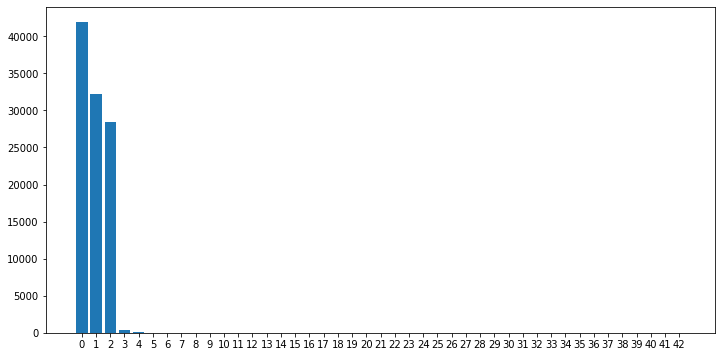

In [18]:
plt.rcParams["figure.figsize"] = (12,6)

features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_)
plt.xticks(features)
plt.show()

use only 3 components

In [19]:
pca = PCA(n_components=3, whiten=True)
pca.fit(train)

PCA(n_components=3, whiten=True)

show the explain variance ratio

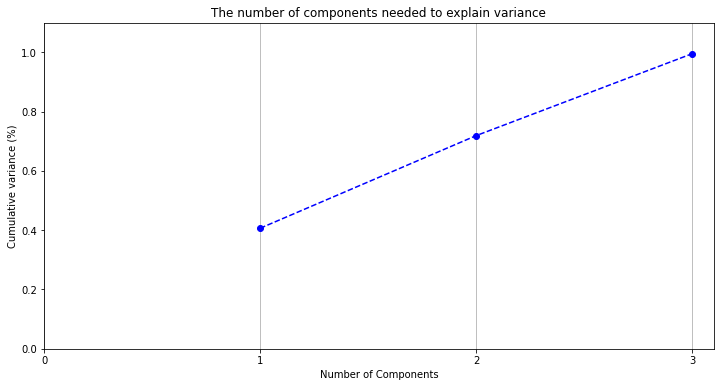

In [20]:
fig, ax = plt.subplots()
xi = np.arange(1, pca.n_components_ + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, pca.n_components_ + 1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

ax.grid(axis='x')
plt.show()

In [21]:
train_pca = pca.transform(train)

### Training

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

train KMeans

In [23]:
model = KMeans(n_clusters=2)

In [32]:
model.fit(train_pca)
labels = model.predict(train_pca)

accuracy_score(labels, train['readmitted_NO'])

0.4766757913946796

train SVM

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    train_pca, train['readmitted_NO'], test_size=0.2, random_state=42
)

In [34]:
SVM = SVC()
SVM.fit(X_train, y_train) 
SVM.score(X_test,y_test)

0.5359724854355303

## Task 2
Visualize your result with the embedding projector.

In [37]:
np.savetxt("output.tsv", train_pca, delimiter="\t")
np.savetxt("label.tsv", labels, delimiter="\t")

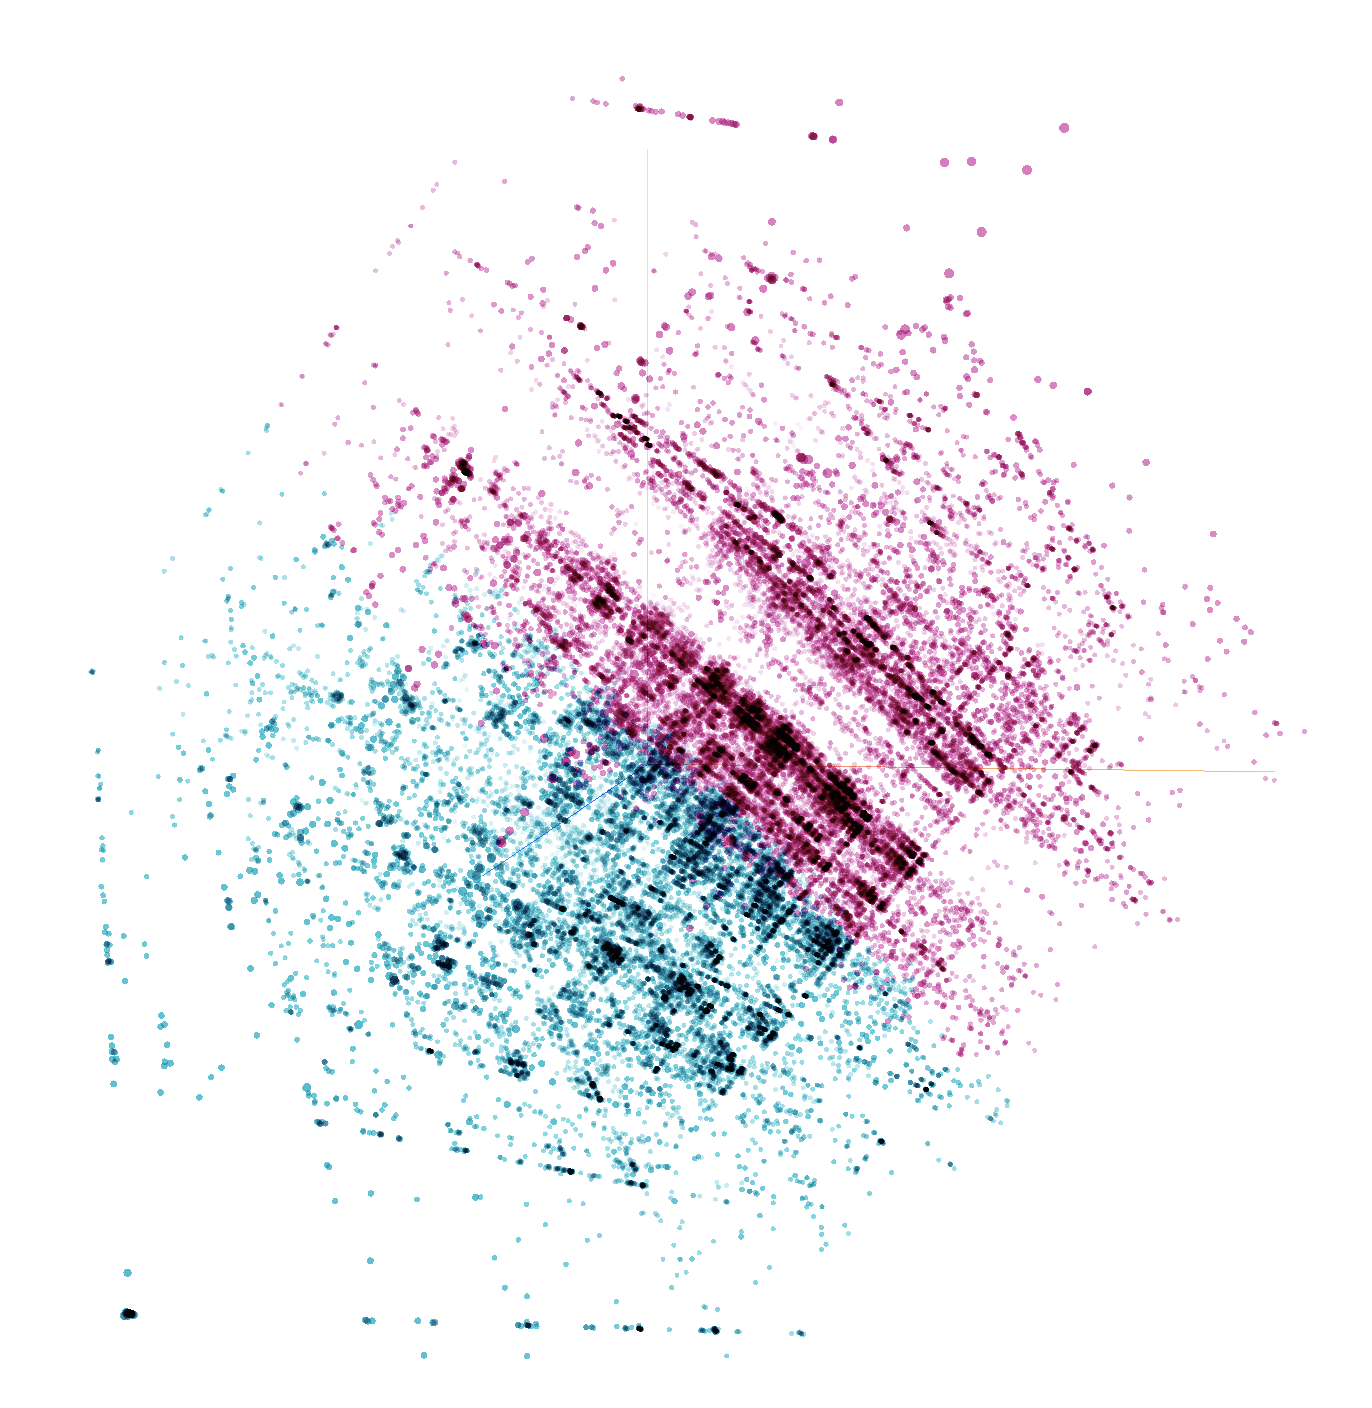

In [38]:
from IPython import display
from base64 import b64decode

base64_data = "iVBORw0KGgoAAAANSUhEUgAABVwAAAWACAYAAAClfI3pAAAMa2lDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnluSkJDQAhGQEnoTpFcpIbQIAlIFGyEJJJQYE4KKXVlUcO0iihUroujqCsiiIvayKPa+WFBR1sWCoqi8SQFd95Xvne+bO/89c+Y/5c7cewcA7V6uRJKH6gCQLy6QJkSGMsekpTNJHUAT4IABXACDy5NJWPHxMQDKQP93eX8DIIr+qrOC65/j/1X0+AIZDwBkHMSZfBkvH+JmAPD1PIm0AACiQm81pUCiwHMg1pfCACFepcDZKrxLgTNVuElpk5TAhvgyABpULleaDYDWPahnFvKyIY/WZ4hdxXyRGADtYRAH8YRcPsSK2Ifl509S4AqI7aG9BGIYD/DN/I4z+2/8mYP8XG72IFblpRSNMJFMksed9n+W5n9Lfp58wIctbFShNCpBkT+s4a3cSdEKTIW4S5wZG6eoNcS9Ir6q7gCgFKE8Klllj5rwZGxYP/jMAerK54ZFQ2wCcYQ4LzZGrc/MEkVwIIarBZ0qKuAkQWwI8UKBLDxRbbNZOilB7Quty5KyWWr9Wa5U6Vfh64E8N5ml5n8jFHDU/JhWkTApFWIKxNaFopRYiLUgdpHlJkarbUYUCdmxAzZSeYIifmuIEwTiyFAVP1aYJY1IUNuX5ssG8sU2C0WcWDU+UCBMilLVBzvJ4yrjh7lglwViVvIAj0A2JmYgF74gLFyVO/ZcIE5OVPP0SgpCE1RzcYokL15tj1sK8iIVekuIPWWFieq5eEoBXJwqfjxLUhCfpIoTL8rhjoxXxYMvAzGADcIAE8hhywSTQA4QtXbVd8E71UgE4AIpyAYC4KzWDMxIVY6I4TURFIE/IRIA2eC8UOWoABRC/ZdBrerqDLKUo4XKGbngKcT5IBrkwXu5cpZ40FsKeAI1on9458LGg/HmwaYY//f6Ae03DQtqYtQa+YBHpvaAJTGcGEaMIkYQHXBjPAgPwGPgNQQ2d9wX9xvI45s94SmhjfCIcJ3QTrg9UTRP+kOUo0A75I9Q1yLz+1rgtpDTCw/FAyE7ZMYZuDFwxj2hHxYeDD17QS1bHbeiKswfuP+WwXdPQ21HdiWj5CHkELL9jzO1HLW8BlkUtf6+PqpYMwfrzR4c+dE/+7vq82Ef/aMlthA7iJ3BjmPnsCasHjCxY1gDdhE7osCDq+uJcnUNeEtQxpMLeUT/8MdV+1RUUuZa49rp+lk1ViCYWqDYeOxJkmlSUbawgMmCXwcBkyPmuQxjuru6uwGg+NaoXl9vGcpvCMI4/0033weAwOL+/v6mb7ro7QAcTIPb/9o3nd1H+I62AuDsRp5cWqjS4YoLAb4ltOFOMwJmwArYw3zcgTcIACEgHIwEcSAJpIEJsMpCuM6lYAqYAeaCElAGloHVYB3YBLaCXWAvOADqQRM4Dk6DC+AyuA7uwtXTAV6CbvAe9CEIQkJoCB0xQswRG8QJcUd8kSAkHIlBEpA0JAPJRsSIHJmBzEfKkBXIOmQLUo38ghxGjiPnkDbkNvIQ6UTeIJ9QDKWi+qgpaosOR31RFhqNJqHj0Wx0MlqEFqNL0Aq0Ct2D1qHH0QvodbQdfYn2YADTxBiYBeaM+WJsLA5Lx7IwKTYLK8XKsSqsFmuEz/kq1o51YR9xIk7HmbgzXMFReDLOwyfjs/DF+Dp8F16Hn8Sv4g/xbvwrgUYwITgR/AkcwhhCNmEKoYRQTthBOEQ4BfdSB+E9kUhkEO2IPnAvphFziNOJi4kbiPuIzcQ24mNiD4lEMiI5kQJJcSQuqYBUQlpL2kM6RrpC6iD1amhqmGu4a0RopGuINeZplGvs1jiqcUXjmUYfWYdsQ/Ynx5H55GnkpeRt5EbyJXIHuY+iS7GjBFKSKDmUuZQKSi3lFOUe5a2mpqalpp/maE2R5hzNCs39mmc1H2p+pOpRHals6jiqnLqEupPaTL1NfUuj0WxpIbR0WgFtCa2adoL2gNarRddy0eJo8bVma1Vq1Wld0XqlTda20WZpT9Au0i7XPqh9SbtLh6xjq8PW4erM0qnUOaxzU6dHl67rphunm6+7WHe37jnd53okPVu9cD2+XrHeVr0Teo/pGN2Kzqbz6PPp2+in6B36RH07fY5+jn6Z/l79Vv1uAz0DT4MUg6kGlQZHDNoZGMOWwWHkMZYyDjBuMD4NMR3CGiIYsmhI7ZArQz4YDjUMMRQYlhruM7xu+MmIaRRulGu03Kje6L4xbuxoPNp4ivFG41PGXUP1hwYM5Q0tHXpg6B0T1MTRJMFkuslWk4smPaZmppGmEtO1pidMu8wYZiFmOWarzI6adZrTzYPMRearzI+Zv2AaMFnMPGYF8ySz28LEIspCbrHFotWiz9LOMtlynuU+y/tWFCtfqyyrVVYtVt3W5tajrGdY11jfsSHb+NoIbdbYnLH5YGtnm2q7wLbe9rmdoR3Hrsiuxu6ePc0+2H6yfZX9NQeig69DrsMGh8uOqKOXo9Cx0vGSE+rk7SRy2uDUNowwzG+YeFjVsJvOVGeWc6FzjfNDF4ZLjMs8l3qXV8Oth6cPXz78zPCvrl6uea7bXO+66bmNdJvn1uj2xt3Rnede6X7Ng+YR4THbo8HjtaeTp8Bzo+ctL7rXKK8FXi1eX7x9vKXetd6dPtY+GT7rfW766vvG+y72PetH8Av1m+3X5PfR39u/wP+A/18BzgG5AbsDno+wGyEYsW3E40DLQG7glsD2IGZQRtDmoPZgi2BucFXwoxCrEH7IjpBnLAdWDmsP61Woa6g09FDoB7Y/eya7OQwLiwwrDWsN1wtPDl8X/iDCMiI7oiaiO9IrcnpkcxQhKjpqedRNjimHx6nmdI/0GTlz5MloanRi9LroRzGOMdKYxlHoqJGjVo66F2sTK46tjwNxnLiVcffj7eInx/82mjg6fnTl6KcJbgkzEs4k0hMnJu5OfJ8UmrQ06W6yfbI8uSVFO2VcSnXKh9Sw1BWp7WOGj5k55kKacZoorSGdlJ6SviO9Z2z42NVjO8Z5jSsZd2O83fip489NMJ6QN+HIRO2J3IkHMwgZqRm7Mz5z47hV3J5MTub6zG4em7eG95Ifwl/F7xQEClYInmUFZq3Iep4dmL0yu1MYLCwXdonYonWi1zlROZtyPuTG5e7M7c9LzduXr5GfkX9YrCfOFZ+cZDZp6qQ2iZOkRNI+2X/y6snd0mjpDhkiGy9rKNCHP/UX5fbyn+QPC4MKKwt7p6RMOThVd6p46sVpjtMWTXtWFFG0fTo+nTe9ZYbFjLkzHs5kzdwyC5mVOatlttXs4tkdcyLn7JpLmZs79/d5rvNWzHs3P3V+Y7Fp8Zzixz9F/lRTolUiLbm5IGDBpoX4QtHC1kUei9Yu+lrKLz1f5lpWXvZ5MW/x+Z/dfq74uX9J1pLWpd5LNy4jLhMvu7E8ePmuFborilY8XjlqZd0q5qrSVe9WT1x9rtyzfNMayhr5mvaKmIqGtdZrl639vE647nplaOW+9SbrF63/sIG/4crGkI21m0w3lW36tFm0+daWyC11VbZV5VuJWwu3Pt2Wsu3Mdt/t1TuMd5Tt+LJTvLN9V8Kuk9U+1dW7TXYvrUFr5DWde8btubw3bG9DrXPtln2MfWX7wX75/he/ZPxy40D0gZaDvgdrf7X5df0h+qHSOqRuWl13vbC+vSGtoe3wyMMtjQGNh35z+W1nk0VT5RGDI0uPUo4WH+0/VnSsp1nS3HU8+/jjloktd0+MOXHt5OiTraeiT509HXH6xBnWmWNnA882nfM/d/i87/n6C94X6i56XTz0u9fvh1q9W+su+VxquOx3ubFtRNvRK8FXjl8Nu3r6Gufaheux19tuJN+4dXPczfZb/FvPb+fdfn2n8E7f3Tn3CPdK7+vcL39g8qDqD4c/9rV7tx95GPbw4qPER3cf8x6/fCJ78rmj+Cntafkz82fVz92fN3VGdF5+MfZFx0vJy76ukj91/1z/yv7Vr3+F/HWxe0x3x2vp6/43i98avd35zvNdS098z4P3+e/7PpT2GvXu+uj78cyn1E/P+qZ8Jn2u+OLwpfFr9Nd7/fn9/RKulKv8FcBgQ7OyAHizEwAa/Hegw3MbZazqLKgURHV+VSLwn7DqvKgUbwBqYaf4jWc3A7AfNts5yqMKUPzCJ4UA1MNjsKlFluXhruKiwpMQobe//60pAKRGAL5I+/v7NvT3f9kGg70NQPNk1RlUIUR4ZtgcpkC3V46fA34Q1fn0uxx/7IEiAk/wY/8vDz+Pq0icJ24AAACKZVhJZk1NACoAAAAIAAQBGgAFAAAAAQAAAD4BGwAFAAAAAQAAAEYBKAADAAAAAQACAACHaQAEAAAAAQAAAE4AAAAAAAAAkAAAAAEAAACQAAAAAQADkoYABwAAABIAAAB4oAIABAAAAAEAAAVcoAMABAAAAAEAAAWAAAAAAEFTQ0lJAAAAU2NyZWVuc2hvdHpEPCkAAAAJcEhZcwAAFiUAABYlAUlSJPAAAAHYaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA2LjAuMCI+CiAgIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIj4KICAgICAgICAgPGV4aWY6UGl4ZWxZRGltZW5zaW9uPjE0MDg8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFhEaW1lbnNpb24+MTM3MjwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlVzZXJDb21tZW50PlNjcmVlbnNob3Q8L2V4aWY6VXNlckNvbW1lbnQ+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgoIujBfAAAAHGlET1QAAAACAAAAAAAAAsAAAAAoAAACwAAAAsAABAJmUBLmHAAAQABJREFUeAHs3Qm4XVVhL/ClOJXBQICQhBBIQgIJIINMiYqgta1aa7WtY+3rs8/XQa1TfbUWa61oB622Pjs6tH2+OtW5Vdv6LIJCmARkJoEEAoQQIGFWtCnvrn1ZJ/vse+695967zzl7+O3v69lrT2uv9Vun4cvflXUe88jYFmwECBAgQIAAAQIECBAgQIAAAQIECBAgMGeBxwhc52yoAgIECBAgQIAAAQIECBAgQIAAAQIECGQCAldfBAIECBAgQIAAAQIECBAgQIAAAQIECJQkIHAtCVI1BAgQIECAAAECBAgQIECAAAECBAgQELj6DhAgQIAAAQIECBAgQIAAAQIECBAgQKAkAYFrSZCqIUCAAAECBAgQIECAAAECBAgQIECAgMDVd4AAAQIECBAgQIAAAQIECBAgQIAAAQIlCQhcS4JUDQECBAgQIECAAAECBAgQIECAAAECBASuvgMECBAgQIAAAQIECBAgQIAAAQIECBAoSUDgWhKkaggQIECAAAECBAgQIECAAAECBAgQICBw9R0gQIAAAQIECBAgQIAAAQIECBAgQIBASQIC15IgVUOAAAECBAgQIECAAAECBAgQIECAAAGBq+8AAQIECBAgQIAAAQIECBAgQIAAAQIEShIQuJYEqRoCBAgQIECAAAECBAgQIECAAAECBAgIXH0HCBAgQIAAAQIECBAgQIAAAQIECBAgUJKAwLUkSNUQIECAAAECBAgQIECAAAECBAgQIEBA4Oo7QIAAAQIECBAgQIAAAQIECBAgQIAAgZIEBK4lQaqGAAECBAgQIECAAAECBAgQIECAAAECAlffAQIECBAgQIAAAQIECBAgQIAAAQIECJQkIHAtCVI1BAgQIECAAAECBAgQIECAAAECBAgQELj6DhAgQIAAAQIECBAgQIAAAQIECBAgQKAkAYFrSZCqIUCAAAECBAgQIECAAAECBAgQIECAgMDVd4AAAQIECBAgQIAAAQIECBAgQIAAAQIlCQhcS4JUDQECBAgQIECAAAECBAgQIECAAAECBASuvgMECBAgQIAAAQIECBAgQIAAAQIECBAoSUDgWhKkaggQIECAAAECBAgQIECAAAECBAgQICBw9R0gQIAAAQIECBAgQIAAAQIECBAgQIBASQIC15IgVUOAAAECBAgQIECAAAECBAgQIECAAAGBq+8AAQIECBAgQIAAAQIECBAgQIAAAQIEShIQuJYEqRoCBAgQIECAAAECBAgQIECAAAECBAgIXH0HCBAgQIAAAQIECBAgQIAAAQIECBAgUJKAwLUkSNUQIECAAAECBAgQIECAAAECBAgQIEBA4Oo7QIAAAQIECBAgQIAAAQIECBAgQIAAgZIEBK4lQaqGAAECBAgQIECAAAECBAgQIECAAAECAlffAQIECBAgQIAAAQIECBAgQIAAAQIECJQkIHAtCVI1BAgQIECAAAECBAgQIECAAAECBAgQELj6DhAgQIAAAQIECBAgQIAAAQIECBAgQKAkAYFrSZCqIUCAAAECBAgQIECAAAECBAgQIECAgMDVd4AAAQIECBAgQIAAAQIECBAgQIAAAQIlCQhcS4JUDQECBAgQIECAAAECBAgQIECAAAECBASuvgMECBAgQIAAAQIECBAgQIAAAQIECBAoSUDgWhKkaggQIECAAAECBAgQIECAAAECBAgQICBw9R0gQIAAAQIECBAgQIAAAQIECBAgQIBASQIC15IgVUOAAAECBAgQIECAAAECBAgQIECAAAGBq+8AAQIECBAgQIAAAQIECBAgQIAAAQIEShIQuJYEqRoCBAgQIECAAAECBAgQIECAAAECBAgIXH0HCBAgQIAAAQIECBAgQIAAAQIECBAgUJKAwLUkSNUQIECAAAECBAgQIECAAAECBAgQIEBA4Oo7QIAAAQIECBAgQIAAAQIECBAgQIAAgZIEBK4lQaqGAAECBAgQIECAAAECBAgQIECAAAECAlffAQIECBAgQIAAAQIECBAgQIAAAQIECJQkIHAtCVI1BAgQIECAAAECBAgQIECAAAECBAgQELj6DhAgQIAAAQIECBAgQIAAAQIECBAgQKAkAYFrSZCqIUCAAAECBAgQIECAAAECBAgQIECAgMDVd4AAAQIECBAgQIAAAQIECBAgQIAAAQIlCQhcS4JUDQECBAgQIECAAAECBAgQIECAAAECBASuvgMECBAgQIAAAQIECBAgQIAAAQIECBAoSUDgWhKkaggQIECAAAECBAgQIECAAAECBAgQICBw9R0gQIAAAQIECBAgQIAAAQIECBAgQIBASQIC15IgVUOAAAECBAgQIECAAAECBAgQIECAAAGBq+8AAQIECBAgQIAAAQIECBAgQIAAAQIEShIQuJYEqRoCBAgQIECAAAECBAgQIECAAAECBAgIXH0HCBAgQIAAAQIECBAgQIAAAQIECBAgUJKAwLUkSNUQIECAAAECBAgQIECAAAECBAgQIEBA4Oo7QIAAAQIECBAgQIAAAQIECBAgQIAAgZIEBK4lQaqGAAECBAgQIECAAAECBAgQIECAAAECAlffAQIECBAgQIAAAQIECBAgQIAAAQIECJQkIHAtCVI1BAgQIECAAAECBAgQIECAAAECBAgQELj6DhAgQIAAAQIECBAgQIAAAQIECBAgQKAkAYFrSZCqIUCAAAECBAgQIECAAAECBAgQIECAgMDVd4AAAQIECBAgQIAAAQIECBAgQIAAAQIlCQhcS4JUDQECBAgQIECAAAECBAgQIECAAAECBASuvgMECBAgQIAAAQIECBAgQIAAAQIECBAoSUDgWhKkaggQIECAAAECBAgQIECAAAECBAgQICBw9R0gQIAAAQIECBAgQIAAAQIECBAgQIBASQIC15IgVUOAAAECBAgQIECAAAECBAgQIECAAAGBq+8AAQIECBAgQKAGAps+cmmnlctfc0KnrECAAAECBAgQIECAQLUEBK7VGg+tIUCAAAECBAhMEMiHremi0DVJ2BMgQIAAAQIECBColoDAtVrjoTUECBAgQIAAgS6BXmFrvEHg2sXkgAABAgQIECBAgEBlBASulRkKDSFAgAABAgQI9BboFboKXHtbOUuAAAECBAgQIEBg1AIC11GPgPcTIECAAAECBKYRKAauwtZpwFwmQIAAAQIECBAgMEIBgesI8b2aAAECBAgQIDATgRi8CltnIuZeAgQIECBAgAABAsMXELgO39wbCRAgQIAAAQIECBAgQIAAAQIECBBoqIDAtaEDq1sECBAgQIAAAQIECBAgQIAAAQIECAxfQOA6fHNvJECAAAECBAgQIECAAAECBAgQIECgoQIC14YOrG4RIECAAAECBAgQIECAAAECBAgQIDB8AYHr8M29kQABAgQIECBAgAABAgQIECBAgACBhgoIXBs6sLpFgAABAgQIECBAgAABAgQIECBAgMDwBQSuwzf3RgIECBAgQIAAAQIECBAgQIAAAQIEGiogcG3owOoWAQIECBAgQIAAAQIECBAgQIAAAQLDFxC4Dt/cGwkQIECAAAECBAgQIECAAAECBAgQaKiAwLWhA6tbBAgQIECAAAECBAgQIECAAAECBAgMX0DgOnxzbyRAgAABAgQIECBAgAABAgQIECBAoKECAteGDqxuESBAgAABAgQIECBAgAABAgQIECAwfAGB6/DNvZEAAQIECBAgQIAAAQIECBAgQIAAgYYKCFwbOrC6RYAAAQIECBAgQIAAAQIECBAgQIDA8AUErsM390YCBAgQIEBgiAI3/+MVnbcd+sqndMoKBAgQIECAAAECBAgQGISAwHUQquokQIAAAQIEKiGQD1tTg4SuScKeAAECBAgQIECAAIFBCAhcB6GqTgIECBAgQKASAoMKXDd//LKsf8tefXwl+qkRBAgQIECAAAECBAhUR0DgWp2x0BICBAgQIECgZIFBBK4pbE1NFbomCXsC9RW49t3nTGj86nc8c8I5JwgQIECAAAEC/QgIXPtRcg8BAgQIECBQW4F86DrX5QSKYWtE2X7BxrDg1JUdHwFsh0KBQC0EeoWtqeFC1yRhT4AAAQIECMxEQOA6Ey33EiBAgAABAq0WKAauMWyNWz5wjcfF0HXzRy+Np7Nt2f84IRXtCRAYscBUYWtsmsB1xAPk9QQIECBAoKYCAteaDpxmEyBAgAABAqMRyIeuxdmtqUX5wDUftnauC10ThT2BkQoIXEfK7+UECBAgQKCxAgLXxg6tjhEgQIAAAQKDEsiHrr3eMV3gGp8ZxkzXG//y4k7zVvzGSeGGD+8+jhcOf91JnesKBNooIHBt46jrMwECBAgQGLyAwHXwxt5AgAABAgQINFigGL7mw9bY7V4zXOP5QQeu+bA1vu/qT3097L90Wbh7y+Z4mG1rXvpcoWvCsG+twFShqyUFWvu10HECBAgQIDAnAYHrnPg8TIAAAQIECBCYXqAYug46bI0tSoHrtvOvyxp44/fOz/b77rso28ePGMA+7R9f1TlWINBWgV6hq7C1rd8G/SZAgAABAnMXELjO3VANBAgQIECAAIFpBVLoOoywNTYmH7h+9Zt/Ea6478aw7UcPhh+F/wqHP3G/sORJB4anLnxaiAHsUS97bljxWssLTDuIbiBAgAABAgQIECDQh4DAtQ8ktxAgQIAAAQIE6iYQA9c4u/Wccz8Rrr73+nD99+8MDz2yKzz8yH+Fx4XHhKVP2CucNO+IsGivQ8IJp/xMWLjuyE7oesOHLxpbauDkunVZewkQIECAAAECBAhUQkDgWolh0AgCBAgQIECAQPkC5/3iJ8Jn//394daxsHXrD+8LO3b9MPxneCTsGvu/lU/YJ6wZC1sPHwtdY+Aat4PWHtFpxB3nXzt+bt3qbD9dALvxzy8MK99wSud5BQIECBAgQIAAAQJtFRC4tnXk9ZsAAQIECBBohcDbF60N1z9wc7jrRw+EO3c9HHY98kjW75VPnBdW7Llo2sA13nzQo6HrWE7btR3++pNDDFqLm+C1KOKYAAECBAgQIECgTQIC1zaNtr4SIECAAAECrRP4yjPeHT5zxUfD9h/dF7b/5/fD48Njw16PfVxYMraO61Fjs1v3ecK8zpICjzwaxqbZrQkrBq53nHft7uD10QuTBa7xstA16dkTIECAAAECBAi0TUDg2rYR118CBAgQIECglQKvmb8q3P7wzrE1XP8zHPqkA8KCJ+4/Yf3WuHZr3PKBa5rd2itw3XbeNWPLEIwvOVBEnWnguvGDF3SqWPmmUztlBQIECBAgQIAAAQJ1ExC41m3EtJcAAQIECBAgMCCBFLjG6lPoOlXgGu975L8K6wzEk2Nbv4FrPmgdf3L8M4auGz8wHsKufLMANm+jTIAAAQIECBAgUG0BgWu1x0frCBAgQIAAAQJDF4jBa/yRrHwAW1y/NTZqsiUF+g1bYx29Atdt518TFq5dEy93NqFrh0KBAAECBAgQIECg4gIC14oPkOYRIECAAAECBKoicMP/Hl9yILYnhq35Lf541kyC1vRsv4FrvD+Grhs+sD5c9Zmvhitu+3aqIrzizX8UVr15bedYgQABAgQIECBAgMAoBQSuo9T3bgIECBAgQIBAywWKgWuc3Rq34gzXeC4Grl845cyusDWef/Lj9w0//fq3CV0jho0AAQIECBAgQGDkAgLXkQ+BBhAgQIAAAQIE2i1QDF17LV8QhW4//+pwyXe/Eu770T0TwJ5y8DPCiy88a8J5JwgQIECAAAECBAgMW0DgOmxx7yNAgAABAgQIEJhSIP1YVv6mOLv13J//2MAD1w3vO7/z2lVvXdcpKxAgQIAAAQIECBDoV0Dg2q+U+wgQIECAAAECBIYmkA9d8z+Y9YFlL5www7WsJQXyYWvqaApdN7zvvHRqfP9I9+Gq//W07hOOCBAgQIAAAQIEWisgcG3t0Os4AQIECBAgQKCeAsXQtYzlBHqFrbt1utPVrY+uM7t47ZqQyvHe07/0mnD9n4wHs0cIYHfzKREgQIAAAQIEWiYgcG3ZgOsuAQIECBAgQKApAhs+sD7ryqo3r51zl/oNXPMBa36t2btu3RwOWHJYWLTuqKwtt59/VbZftPaobO3ZeP6I3376nNupAgIECBAgQIAAgeoLCFyrP0ZaSIAAAQIECBAgMGCB2QSuWch68LKsZSlwHW9mbkbso8U7b9scDhy7N+0FsAMeUNUTIECAAAECBEYoIHAdIb5XEyBAgAABAgQIVEegV+ga13DNr9+aZrgWw9bYizjDdXwbT1nvHJv1mkLWRy90dvG80LXDoUCAAAECBAgQaJSAwLVRw6kzBAgQIECAAAECcxHIh66T/WBWDF3zgev4+8ZD1vxM13zguuP+rWH+Pos7TUuBazxhqYEOiwIBAi0VuOadZ0/o+Zp3nTHhnBMECBCoi4DAtS4jpZ0ECBAgQIAAAQIjE8jPcs0aMZavptmui9fFH8+6Ote2iTNcewWu8QGzXHNsigQItFKgV9iaIISuScKeAIG6CQhc6zZi2kuAAAECBAgQIFAZgQ1/cl6nLTF0jQFq+sGs9KNacd3WXoFrvDduZrh2CBUIEGiZwFRha6IQuiYJewIE6iQgcK3TaGkrAQIECBAgQIBAbQSu/+PvjIWv4zNfY+iatricQNzMbk0i9gQItFGgn7A1ughc2/jt0GcC9RcQuNZ/DPWAAAECBAgQIECgBgLfeuHfdFopbO1QKBAg0FIBgWtLB163CbREQODakoHWTQIECBAgQIAAAQIECBAgUBUBgWtVRkI7CBAYhIDAdRCq6iRAgAABAgQIECBAgAABAgQmFRC4TkrjAgECDRAQuDZgEHWBAAECBAgQIECAAAECBAjUTaCf0NUarnUbVe0lQCAKCFx9DwgQIECAAAECBAgQIECAAIGRCEwVugpbRzIkXkqAQAkCAtcSEFVBgAABAgQIECBAgEC5Ate++5yswu99/ithx4Nbw29s/FS5L1AbAQKVESiGroLWygyNhhAgMEsBgess4TxGgAABAgQIECBAgMBgBGLYmoLWex++q/OSeU88IJzxS78WVr/jmZ1zCgQIECBAgACBqgkIXKs2ItpDgAABAgQIECBAoMUCaWbr2f/nr0M+bE0kMXQ12zVp2BMgQIAAAQJVFBC4VnFUtIkAAQIECBAgQIBASwXS7NbNO67oKTDXWa7X/sE5YfXvmSHbE9dJAgQIECBAoBQBgWspjCohQIAAAQIECBAgQKAMgRi4Tja7NdY/28A1Bq1b11/Z1cTFa48RvnaJOCBAgAABAgTKEBC4lqGoDgIECBAgQIAAAQIEShEYxAzXXmFraqzQNUnYEyBAgAABAmUJCFzLklQPAQIECBAgQIAAAQKlCEw2yzXObj1i5dPDs7/22hm955vP/fCk9wtcJ6VxgQABAgQIEJilgMB1lnAeI0CAAAECBAgQIEBgcAIxdP3SR87qvCCFrYvXHh1Wv2Nma7BOFbjGFzz766/rvEeBAAECBAgQIDBXAYHrXAU9T4AAAQIECBAgQIBApQWmClzNcK300GkcAQIECBCopYDAtZbDptEECBAgQIAAAQIECPQrYA3XfqXcR4AAAQIECJQhIHAtQ1EdBAgQIECAAAECBAhUWqDXLFezWys9ZBpHgAABAgRqKyBwre3QaTgBAgQIECBAgAABAjMViLNd47b692a2DuxM3+N+AgQIECBAoL0CAtf2jr2eEyBAgAABAgQIECBAgAABAgQIECBQsoDAtWRQ1REgQIAAAQIECBAgQIAAAQIECBAg0F4BgWt7x17PCRAgQIAAAQIECBAgQIAAAQIECBAoWUDgWjKo6ggQIECAAAECBAgQIECAAAECBAgQaK+AwLW9Y6/nBAgQIECAAAECBAgQIECAAAECBAiULCBwLRlUdQQIECBAgACBOgtcsevd4Sl7vKPOXdB2AgQIECBAgAABAiMVELiOlN/LCRAgQIAAAQLVEhC4Vms8tIYAAQIECBAgQKB+AgLX+o2ZFhMgQIAAAQIEBiYgcB0YrYoJECBAgAABAgRaIiBwbclA6yYBAgQIECBAoB+B740tKXCsJQX6oXIPAQIECBAgQIAAgZ4CAteeLE4SIECAAAECBNopIHBt57jrNQECBAgQIECAQHkCAtfyLNVEgAABAgQIEKi9gMC19kOoAwQIECBAgAABAiMWELiOeAC8ngABAgQIECBQJQGBa5VGQ1sIECBAgAABAgTqKCBwreOoaTMBAgQIECBAYEACAtcBwaqWAAECBAgQIECgNQIC19YMtY4SIECAAAECBKYXELhOb+QOAgSaLXDNO8+e0ME17zpjwjknCBAgQIDAZAIC18lknCdAgAABAgQItFBA4NrCQddlAjUQGFYI2us9iUfomiTsCRAgQGA6AYHrdEKuEyBAgAABAgRaJCBwbdFg6yqBmggMKwSd6j2JSuiaJOwJECBAYCoBgetUOq4RIECAQKsEtv37jV39XfgTK7qOHRBog4DAtQ2jrI8E6iMwzBB0mO+qzwhoKQECBAjMRkDgOhs1zxAgQIBA4wSKYWvsoMC1ccOsQ30ICFz7QHILAQJDExhmCDrMdw0N0IsIECBAYCQCAteRsHspAQIECFRNQOBatRHRnlEJCFxHJe+9BAj0EhhmCDrMd/Xqq3MECBAg0BwBgWtzxlJPCBAgQGCOAsXQ1QzXOYJ6vJYCAtdaDptGE2iswDBD0GG+q7EDpmMECBAgkAkIXH0RCBAgQIBATiCFrsLWHIpiqwQErq0abp0lUHmBYYegU73PD2ZV/uuigQQIEKiMgMC1MkOhIQQIECBAgACB0QsIXEc/BlpAgEC3wLBD0F7va1LYWuxfk/rW/c1xRIAAgdEJCFxHZ+/NBAgQIECAAIHKCQhcKzckGkSAwJhAMSSMKILCmX01ehnma+CZ11AmQIDA3AQErnPz8zQBAgQIECBAoFECAtdGDafOECBAoCMgcO1QKBAgQGDgAgLXgRN7AQECBAgQIECgPgKX73p3OG6Pd9SnwVpKgAABAtMKTBe2pgrMck0S9gQIEJibgMB1bn6eJkCAAAECBAg0SkDg2qjh1BkCBAhkAgJXXwQCBAgMV0DgOlxvbyNAgAABAgQIVFpA4Frp4dE4AgQIzEpA4DorNg8RIEBg1gIC11nTeZAAAQIECBAg0DwBgWvzxlSPCBAgIHD1HSBAgMBwBQSuw/X2NgIECBAgQIBApQUErpUeHo0jQIDArAWmC12t3zprWg8SIEBggoDAdQKJEwQIECBAgACB9goIXNs79npOgECzBQSuzR5fvSNAoFoCAtdqjYfWECBAgAABAgRGKnD5rrPCcXucOdI2eDkBAgQIDE6gGLya2To4azUTINBeAYFre8dezwkQIECAAAECEwQErhNInCBAgAABAgQIECAwIwGB64y43EyAAAECBAgQaLbAZWMzXI83w7XZg6x3BAgQIECAAAECAxUQuA6UV+UECBAgQIAAgXoJCFzrNV5aS4AAAQIECBAgUD0BgWv1xkSLCBAgQIAAAQIjExC4jozeiwkQIECAAAECBBoiIHBtyEDqBgECBAgQSAJbPnVlKmb7pS8/puvYAYGpBASuU+m4RoAAAQIECBAgQGB6AYHr9EbuIECAAAECtREohq2x4QLX2gxfJRoqcK3EMGgEAQIECBAgQIBAjQUErjUePE0nQIAAAQJFAYFrUcTxTAUErjMVcz8BAgQIECBAgACBbgGBa7eHIwIECBCoocC2b2zqtHrhc5Z3ym0sCFzbOOrl9lngWq6n2ggQIECAAAECBNonIHBt35jrMQECBBonkA9cY+eErrvXcLWcQOO+7gPvkMB14MReQIAAAQIECBAg0HABgWvDB1j3CBAg0HSBYtga+9v2wLXpY65/gxW4dNdZ4YQ9zhzsS9ROgAABAgQIECBAoMECAtcGD66uESBAoC0CxdBV4NqWkdfPQQgIXAehqk4CBAgQIECAAIE2CQhc2zTa+kqAAIGGCuQDV2FrQwdZt4YmIHAdGrUXESBAgAABAgQINFRA4NrQgdUtAgQIECBAgMBsBASus1HzDAECBAgQIECAAIHdAgLX3RZKBAgQIFATgfyM1thks1prMnCaWQsBgWsthkkjCRAgQIAAAQIEKiwgcK3w4GgaAQIECPQWKAau8S6ha28rZwnMVEDgOlMx9xMgQIAAAQIECBDoFhC4dns4IkCAAIEaCAhcazBImlhbAYFrbYdOwwkQIECAAAECBCoiIHCtyEBoBgECBAj0L1AMXM1u7d/OnQSmExC4TifkOgECBAgQIECAAIGpBQSuU/u4SoAAAQIVFUihq7C1ogOkWbUVELjWdug0nAABAgQIECBAoCICAteKDIRmECBAgAABAgSqICBwrcIoaAMBAgQIECBAgECdBQSudR49bSdAgAABAgQIlCwgcC0ZVHUECBAgQIAAAQKtExC4tm7IdZgAAQIECBAgMLmAwHVyG1cIECBAgAABAgQI9CMgcO1HyT0ECBAgQIAAgZYICFxbMtC6SYAAAQIECBAgMDABgevAaFVMgAABAgQIEKifgMC1fmOmxQQIECBAgAABAtUSELhWazy0hgABAgQIECAwUgGB60j5vZwAAQIECBAgQKABAgLXBgyiLhAgQIAAAQIEyhIQuJYlqR4CBAgQIECAAIG2Cghc2zry+k2AAAECBAgQ6CEgcO2B4hQBAgQIECBAgACBGQgIXGeA5VYCBAgQIECAQNMFvrvrrPDUPc5sejf1jwABAgQIECBAgMDABASuA6NVMQECBAgQIECgfgIC1/qNmRYTIECAAAECBAhUS0DgWq3x0BoCBAgQIECAwEgFBK4j5fdyAgQIECBAgACBBggIXBswiLpAgAABAgQIzEzgxr+4OHtgxWtPmtmDLbhb4NqCQdZFAgQIECBAgACBgQoIXAfKq3ICBAgQmInAtm9s6ty+8DnLO2UFAmUJpKA11rft/OuyaheuOzIIXncLC1x3WygRIECAAAECBAgQmI2AwHU2ap4hQIAAgdIF8mFrqlzomiTsyxJIgWsKW1O9QtckEYLAdbeFEgECBAgQIECAAIHZCAhcZ6PmGQIECBAoXUDgWjqpCnsITBW4xtv7nem68UMXhpW/eUqPN9T/lMC1/mOoBwQIECBAgAABAqMVELiO1t/bCRAgQOBRAYGrr8IwBKYKXGcStubb2rTgVeCaH11lAgQIECBAgAABAjMXELjO3MwTBAgQIDAggXzoajmBASGrNsTQNb+kQFxOIG79BK5xZmuvrUmh6yW7zgon7nFmr246R4AAAQIECBAgQIBAHwIC1z6Q3EKAAAECBAg0TyDNdo096ydsjfcJXKOCjQABAgQIECBAgACBqQQErlPpuEaAAAECBAgQyAkIXHMYigQIECBAgAABAgQI9BQQuPZkcZIAAQIECBAgMFGgV+DapOUEYo8tKTBx3J0hQIAAAQIECBAgMBMBgetMtNxLgAABAgQIEBgTSMFr08LWOLgCV19xAgQIECBAgAABAnMTELjOzc/TBAgQIECAAIFGCQhcGzWcOkOAAAECBAgQIDACAYHrCNC9kgABAgQIECBQVQGBa1VHRrsIECBAgAABAgTqIiBwrctIaScBAgQIECBAYAgCAtchIHsFAQIECBAgQIBAowUEro0eXp0jQIAAAQIECMxM4OJdZ4WT9jhzZg+5mwABAgQIECBAgACBjoDAtUOhQIAAAQIECBAYjcCOS7Z2vXj+iYu7jod5IHAdpvZo33XtH5zT1YDVv/fMrmMHBAgQIECAAAECsxMQuM7OzVMECBAgQIAAgdIEioFrrHhUoavAtbRhrXRFxbA1NVbomiTsCRAgQIAAAQKzFxC4zt7OkwQIECBAgECLBTb++YWd3q98wymd8mwKAtfZqIVw+7/e0PXgop86vOvYQW+BycLWdLfQNUnYEyBAgAABAgRmJyBwnZ2bpwgQIECAAIEWC+TD1sQwl9C1GLiOanZr7EudZrgWA9fYfqFrVJh6E7hO7eMqAQIECBAgQGCuAgLXuQp6ngABAgQIEGidQK/ANSLMJXSNz8fgdZRha2xD3QPX8EjsxVjw+lyzXcclJn4KXCeaOEOAAAECBAgQKFNA4FqmproIECBAgACBxgtMFrbGjsfAdeMHL+gyWPmmU7uOq35Q68D10bA1GQtdk0T3fqrA1XIC3VaOCBAgQIAAAQKzERC4zkbNMwQIECDQl8A17+v+Bew1b/UL2H3BuanyAr1C115ha+pInULXOgWu0bezrEAhbI3XBK5Rofc2WegqcO3t1caz1//Rd7JuH/G2p7ex+/pMgAABAgTmJCBwnROfhwkQIEBgMoFi2BrvE7hOpuV8HQWKoavAdbSjePvXu39AK7ZG4Dr9mKTgVdA6vVVb7khBa76/Qte8hjIBAgQIEJheQOA6vZE7CBAgQGAWAgLXWaB5pPYCxeUEUofMcE0Sg90XQ1eB62C91d48gV5ha+ql0DVJ2BMgQIAAgekFBK7TG7mDAAECBGYpUAxdzXCdJaTHaiMgcK3NUGkoAQI9BASuPVCmOHXNO8+ecHXNu86YcM4JAgQIEGifgMC1fWOuxwQIECBAgMAABYqha51mt0aWuq3hOsChVDWB1gkIXPsf8l5ha3pa6Jok7AkQINBeAYFre8dezwkQIECAAAECEwQErhNInCDQKoHJQldLCuz+GkwVtqa7hK5Jwp4AAQLtFBC4tnPc9ZoAAQIECBAg0FNA4NqTxUkCrRHoFbgKW7uHX+Da7eGIAAECBCYKCFwnmjhDgAABAgQIEGitgMC1tUOv4wS6BGLwKmjtIukc9BO4xpvNcu2QKRAgQKB1AgLX1g25DhMgQIAAAQIEJhcQuE5u4woBAgSigMDV94AAAQIEphMQuE4n5DoBAgQIECBAoEUCF+06K5y8x5kt6rGuEiBAYGYC/QSuZrfOzNTdBAgQaJqAwLVpI6o/BAgQIECAAIE5CNQ9cL31C9dmvV/y4tVzUPAoAQIEJhcQuE5u4woBAgQIjAsIXH0TCBAgQIAAAQIEOgJ1DlxT2Jo6I3RNEvYECJQtMFXoanZr2drqI0CAQP0EBK71GzMtJkCAAAECBAgMTKBJgWtEEroO7KuiYgKtF+gVugpbW/+1AECAAIFMQODqi0CAAAECBAgQINARaFLgKmztDKsCAQIECBAgQIDAEAUErkPE9ioCBAjUWWDb/9vUaf7CH1/eKSsQINAsAYFrs8ZTbwgQIECAAAECBIYvIHAdvrk3EiBAoHYC+bA1NV7omiTsCTRLoM6Ba7NGQm8IECBAgAABAgTqKiBwrevIaTcBAgSGKJAC1x2X3dJ565q3PrNTViBAoDkCAtfmjKWeECBAgAABAgQIjEZA4Doad28lQIBArQRi4JoPW2Pj5x9/SDDLtVbDqLEE+hIQuPbFVKubtnzyyk57l77imE5ZgQABAgQIECBAYDACAtfBuKqVAAECjRO45n3ndPoUw9a4CVw7JAoEGiNw4a6zwil7nNmY/rS9I/mwNVkIXZOEPQECBAgQIEBgMAIC18G4qpUAAQKNE0jLCuQ7JnDNaygTaIaAwLUZ45h6IXBNEvYECBAgQIAAgeEJCFyHZ+1NBAgQqI1APlzNh6qTna9NxzSUwAwFNv7ZBZ0nVr7x1E65yQWBa7NGV+DarPHUGwIECBAgQKAeAgLXeoyTVhIgQGBoAvlQNb00H7qmc/YEmi6QD1tTX9sQugpc02g3Z58PXS0n0Jxx1RMCBAgQIECgugIC1+qOjZYRIEBgJAIC15Gwe2kFBXoFrrGZTQ9dBa4V/DJqEgECBAgQIECAQK0EBK61Gi6NJUCAwOAFBK6DN/aGeggIXOsxTlpJgAABAgQIECBAoGoCAteqjYj2ECBAoCICKXi1nEBFBkQzhiaQgtZt51+TvXPhujVd7zbDtYujlge3fem6rN0H/+yRtWy/RhMgQIAAAQIECFRbQOBa7fHROgIECBAYssCWT1+VvXHpy44e8pu9rgoCKWyNbUmBayyn0LXpYWvsa9OXFIhh610X3xS7mm0HnHRYELwmDXsCBAgQIECAAIEyBASuZSiqgwABAgQaIZDC1tQZoWuSaM8+H7imXsfg9RmffXU6bPz+gl3vCafu8buN7Gea2SpwHdzw3vT3l3dVftgvH9d17IAAAQIECBAg0AYBgWsbRlkfCRAg0IfAHd/c1LnroGcv75TbUiiGrXdecGM48NQVne4LXzsUjS70Clxjh9swszUNbBsD19j3yWa53vHNzeGgZy9LPPbTCBQD13i70HUaNJcJECBAgACBxgkIXBs3pDpEgACBmQvkw9b0dNtC13zgGsPWuAlc07ehPXuBawhlBK73Xr2960sz76gFXcejPJhsSYFbPz++Zm9q2+P3/bFUzPZC1y6Onge9wtZ4o8C1J5eTBAgQIECAQIMFBK4NHlxdI0CAQL8CAtdxqRS6Clz7/eY0875i6Nqm2a1xROcauBbD1lhnlQLX2J64peUF0szWGLhu+fKl4xfHPvd44hPCYS87qXMcC0LXLo6eB71CV4FrTyonCRAgQIAAgQYLCFwbPLi6RoAAgX4FBK7dUil4jWfvvHD3bNelL/VDWt1S9Txqe6A63ai1JXDNOxTD1ngtBq5xy4euO9bfkp1bfeZp2d7HRIFi4CpsnWjkDAECBAgQINB8AYFr88dYDwkQINCXQD50bdtyApMBZcHrY7qvCl27Pep2VAxbU/vbNos19bvXfq6Ba6yzOMu1ijNc832/9qxzw84NW/KnugLXmz99cdjn0IVd1wcVum75xyuz9yx95TFd73NAgAABAgQIECBQHwGBa33GSksJECBAYMgCWz5z1YQ3Cly7SW78q0u6Tqz49RO7jqt2IHCdfkTKCFzjW1LoWvWwNbY1Bq5xS6HrfquWZsfTfZQZuqagNf9OoWteQ5kAAQIECBAgUB8BgWt9xkpLCRAgQGDIAgLXqcGLYWu6u8qhq8A1jdLk+7IC18nfUL0rKXCdacsErjMVK//+zR+7LCz7lePLr1iNBAgQIECAAIE5CAhc54DnUQIECBBovkAxdJ1shuvNn/heF8ahrzq267iJBwLXJo7q3H80q44qsw1cY1/LCl3bPsP1pr+7vPPVOey/H9cpT1aIQWtxE7wWRRwTIECAAAECoxIQuI5K3nsJECBAoFECxcA1dq6JoetkIWt+MKs8wzW2szjL1fqt+dFrZ+AaBXqFrjFM7XU+iZUVtqb6iqFrW5YUyIetyWK60FXgmqTsCRAgQIAAgSoKCFyrOCraRIAAAQK1EugVtsYONC1wbULYWsUv1ob3nd/VrFVvXdd1POyDNi4pMJ3xZKFr2YFrr3bc/H+vyE4f+otP6XW59ud6ha2xUwLX2g+tDhAgQIAAgVYLCFxbPfw6T4AAAQJlCfQKXdsWuFZ9ZmtZY11mPcWwNdU9ytBV4JpGoXtfDF2HGbamljQxdBW4ptG1J0CAAAECBJokIHBt0mjqCwECBAiMTKAYuObD1ot+7Z+ydu3cfEu2/8l/e/PI2jmXF082w1XQOntVgevs7Zr+5CWv/2KniweesiJsv/DG7HjBqYeHQ195TOdaEwrF0HW62a2pz/llBazfmlTsCRAgQIAAgSoICFyrMAraQIAAAQKNFYhh6+ZLLg73PXhnp4/HPvP54eS//vnOcV0KvQJXYevcRk/gOje/pj695ZNXhu3rb+h0b8fY/1iz37JDsuMYuMataaFr1ikfBAgQIECAAIGGCAhcGzKQukGAAAEC1RT4t5/8QNiy5cqscQ88fE+23/uJ+4bnvO2N4bD/dmw1Gz1Fq/Khq7B1Cqg+Lwlc+4Rq2W0xcI1bCl03X3xJ2PeAg8J+y5eGONs1bgLXjMEHAQIECBAgQKCSAgLXSg6LRhEgQIBAUwRS4JrC1tivxfNXhlNe/8paBq5NGZcq9aNX6GoN1yqN0PDbkgLX+OYNnzw77LzrjrDvgQs7DYmzXU/80M92jhUIECBAgAABAgSqJSBwrdZ4aA0BAgQINFDgMyf+r7B1x8asZ3F269Klx2Qz1RacujI7V8eZrg0cppF2KYWuowxaE8D6Xe8Ja/f43XRoPyKBFLreObZ2645N4+s/p6bMXz6+vEC2tusFN4yFry9Kl+wJECBAgAABAgQqICBwrcAgaAIBAgQINF8gznS95+5tYd/9x2epxX8anALX2PsYuqYfjun3B2Oar9acHqZANfWoCsFqaktxL3Atioz2eMunrgx3XjD+g1mxJTdddEmYN7a8QAiPZA27585t2fGql58xtszAU7JzPggQIECAAAECBEYrIHAdrb+3EyBAYCACd3xzczjo2csGUrdKZy9w0z98L3t4+wUbu8LW7OR/jYcn+doFr3mN+paLYWvqSVVD116B671Xbw/337gja/qSnzkydcF+CAIpcN05Nsv1uuvOy9744I/uD3s+fu+waP/x9Vxj+PrkAxZmP6wVf1RL8DqEgfGKyghc886zs7asedcZlWmThhAgQIAAAYGr7wABAgQaJBCD1uImeC2KjP44Ba9dLRG4dnE06aDugWsMW7edc0P4/rbxH32LY3PcHzyvSUNUi758fu2Z4f4H7goP/GB8HB740X3hoL2XhH32PmCs/eP/g82hJ5009j/mHD7en9z/hnPoL5r5WotB1sgZCaSgtfiQ4LUo4pgAAQIERiEgcB2FuncSIEBgQAIC1wHBllxtMXDNLyeQf5UZrnmN+pbrHrje+pXrwl2XbOoagAOeujwseaGZrl0oAz6IgWvcYugat233bwl7ZbNcDx87d2dYctjR2fm4tMD29TfsDl6zsyEIXR+FsGuEwGRha+qc0DVJ2BMgQIDAqAQErqOS914CBAgMQEDgOjnqlk9f1XVx6cvGw4mukyM8SOu35psgcM1r1LcscB392KU/G+s84/+7b/hStn5rXvPE170kbPjU+D+njufj2tBxe2Rsxnxnpmt2RuD6KINdQwSmC1xjN4WuDRls3SBAgEBNBQSuNR04zSZAgMBkAilYiNfrHC5M1r/Zni8GrrGeKoeuwtbZjnT1nusVuFZ1/dao12sN18t/72sd2Di7dZ/D54d5Ry3onKtyIf9nYmxnnf9cjOu5Xvyhz2Q/kvXj//z6jH3LJ6/M9tsvuCHbx48DT05ru3ZOTZjheu27vrX74qOl1e88fcK5fk9s/uilXbcu+x8ndB07IFCWQD9ha3yXwLUscfUQIECAwGwEBK6zUfMMAQIECNROoA6Ba+1QNXhGAil4rXLYGjvUK3BNHb31y9fVaimBYtga+1HnwDWNQ36fAtd0bukrjsmKN//fK9KpvsLWdPNsQtdi2JrqEromCfsyBQSuZWqqiwABAgQGJSBwHZSsegkQIECgUgLFwLVqs1srhaUxrRaYKnCtI0wxdG1a4BrHJIWuKWydbJzSrNbLv/jl7JYDFy4Pd24bX583ltN28NpjwkyCV4FrCJv++pLEl+2X/9qJXccOyhMQuJZnqSYCBAgQGJyAwHVwtmomQIAAgYoJpNBV2FqxgdGcSgmcv+s9Yd0ev1upNs2lMcMIXLf+y8asiYt/euVcmjrQZ1PYetv6K7OQdecDW8M9D9+dvXPfJ+4f9tt7cVaOwWsMXOPWb+jaK3Bt2+zWYuAa/YSuUWEwWz+hqyUFBmOvVgIECBDoT0Dg2p+TuwgQIECAAAECrRBoWuA66EFLYWt6TxVD13zYGtt50dXjM1yvv+/GrNl7Pe5J2f7o/Z6SBa/HveiF2XG/gWu8uRi6tiFwTSHrHeuvz7wOWntEtk8fAtckUf5+usBV2Fq+uRoJECBAYGYCAteZebmbAAECBAgQINBoAYHrzIa3GLjGp6sWuuYD17iEwOa7rwy3PnRbePA/f5B1NgWuS/Y8OMTZrme86tc7CJOFrhf+z89m95zyty/p3NumQgpbY59T4BrL+dBV4BpFBrdNFroKWwdnrmYCBAgQ6F9A4Nq/lTsJECBAgAABAo0XELjObIibFLju8/i9w6F7L+8ErtOFrUmqjaFrPnCNDil0Fbimb4U9AQIECBBot4DAtd3jr/cECBAgQIAAgS4BgWsXx7QHxcC1arNbYweKM1wv3/adrF/bvn9Xto8zXGPYOu/x87IZrqsOf3q2jmuvwDXNbM0ezH3E0HXzxy/Lzix79fG5K80sFgPX2MsYusbA1czWZo65XhEgQIAAgZkICFxnouVeAgQIECBQI4FegYAgoEYDOKKmClxHBD/g16bQ9fIvfjmkwDX/yhi2xi0uKTCbwHXBqRN/MKzpwWvxz1h/vua/UcoECBAgQKDdAgLXdo+/3hMgQIBAgwXyYUDnn7uuG/9Rl+W/emKDe65rcxEQuM5e7/avbew8vOh5EwPIzsURFWLoetv6K8OGG74Tbn5gUzajNd+UGLbut/fi8PLLP5g/PaFcnOV60NpV4ZFHHplwX9MD19jh9OessHXC8DtBgAABAgRaLSBwbfXw6zwBAgQINFkgBQEpbI19PUjg2uQhL6VvAtfZMebD1lRDFUPX2LYYvMaZrjsf2JqamgWtBy5cnh3/+L++vnN+skIKXWPYeth/P66znED+/jYErvn+KhMgQIAAAQIEkoDANUnYEyBAgACBhglMFrhuO++6rKdxQtrCdUd2er3i18167WC0uHDerveEp+3xu60T2H72TZ0+LzjjsE6530KdAtfYpxS6xnIKWmO5n7A13lfc0vqt+fMC17yGMgECBAgQINAmAYFrm0ZbXwkQIECgVQK9Atf0z37vvunmMP/QQzMPoWurvhbTdraNgWs+bE1AMw1d6xa4pn6Wuc+HrsLWMmXVRYAAAQIECNRNQOBatxHTXgIECBAgMEOBTX9zSeeJ/OzWzsmxQgpdzXLNq0xd3vC+87tuWPXWdV3HdT0QuI6P3EwD1/hUPnQd9XIC6Uey8t/D1e88PX+oTIAAAQIECBAgMCABgeuAYFVLgAABAgSqJhCD1xi4HrT2yLDt/PFlBVIbBa5Jor99MWxNTzUhdBW4jo/mbALX9D3od3/bP2/ouvXgF6zqOp7tQa+wNdVVldB188cuy5q0/YINYcGpq8KyXzk+NdGeAAECBAgQIFB7AYFr7YdQBwgQIECAQP8CN/5Vbrbro6HrsMLWjR+6cEJDV/7mKRPO1eFEswPX946t4fr2OgxDqW3MLyswirA1dqaMwHWqsDW+owqBawpbr/vUN2KTsm3+YYeGBWM/wCV4TSL2BAgQIECAQJ0FBK51Hj1tJ0CAAAECsxDIh67DWkKgV9gamy5wncUADviR83bVK3C99qxzM5HVZ542YJlyqy/Obo21tylwjTNbd2y+uYMaA9e4nfLRl3bOKRAgQIAAAQIE6iogcK3ryGk3AQIECBCokYDAtT6DVZfANQWtRdk6Ba/F0FXgKnAtfp8dEyBAgAABAvUUELjWc9y0mgABAgQI1EpA4Fqf4ap74Bql6xi6lhG2pm/ZVMsKVHlJgdh+M1zTKNoTIECAAAECdRYQuNZ59LSdAAECBAjUSKBX6FrXJQUie34d1yb8WFb6KtUhcJ1sdmvqQ50C19TmMveTBa5VCFvz/YxruW5fv/uHw4SteR1lAgQIECBAoM4CAtc6j562EyBAgACBmgnkQ9c6h601Y59Rc6seuMawdev6q8LitUdP2q+ZBq7XvvucCXWtfsczJ5yr24l88Fq1sLVultpLgAABAgQIEJiJgMB1JlruJUCAAAECBAg0XKCqgWtxVmsMXePWK3jtN3CNQWuqJw1rvr4mhK6pX/YhbPrrSzKG5b92Ig4CBAgQIECAwEAFBK4D5VU5AQIECBBopsANH75oQscOf93JE845UT+BugWuUbgrJD3ztL7Qe4Wt6cFUn8A1idR7n4LWfC+ErnmN+pc3vH99pxOrfmttp6xAgAABAgRGJSBwHZW89xIgQIAAgRoLCFxrPHjTNL2KgWtxdmvqQpqd2glI+wxb4/OjDlxv//oNWTfuvnRLtj/6d5+V7X2ULyBwLd+0SjXmw9bUrl6h64b3nZcuZ/tVb31a17EDAgQIECBQpoDAtUxNdREgQIAAgZYI9ApcY9fNcq3/F6BOgWvS7ncJgXR/3FchcE1ha2zP/icsDYuee3gs2sYEbvns1ZnDIS85as4evQLXWKlZrnOmHVkFKWTdtn78e5IasnDt7u9LPnQthq3pfqFrkrAnQIAAgbIFBK5li6qPAAECBBorsO0bmzp9W/ic5Z1yGwsC18GM+r1X3RHmHX3QYCrvs9YqBq6x6ZPNco3XZhu4xmfTLNlYTltnxuyAfjirOLs1vjcGrnFre+iagtYM49GPuYauvQJXYWteuD7lfNB6162bw857b88av/KodZ1OpNBV4NohUSBAgACBEQgIXEeA7pUECBAgUD+BfNiaWt/m0LVX4Dqb2a07Lh3/y3I0nX/CokTbyn0MW/PbqILXugWuswlbo3Oc4Zq2YugaA9dBr98aQ9fiDNfYHoFr94zFaDLXwDXWUQxdBa5RpX5bDFzTrNYYuMYthq77zVsUDliyLDsWuGYMPggQIEBgxAIC1xEPgNcTIECAQD0EBK4Txykfus41bE21tzV0LYat0UPgmr4Vu/fFWa6zDVtTjfnQNZ6Lweuzv/badHng+6ve8x/ZO6aa3br1qxvDeWd9PLtv73nzw3P/9a0Db9coXzCIGa6j7I93lysQA9er/ulfskrT7NZ7Hr4zLFvwlOxcDF1j4Jqf3RovWFIg4/FBgAABAkMUELgOEdurCBAgQKA6Ard98dqsMQe/aHVfjRK49sU05U0b/+zCzvWVbzwl5Ge3pgsC1yQxusD1O7veG56+x9t3N0RpZAIpbH3wwZ2dNhy0eEXrQteZzHDNz2Q1i7XztWlMoVfgGjsXZ7jGLQaup33+f2Tl4kcxdLV+a1HIMQECBAiUKSBwLVNTXQQIECBQC4EUtqbGziZ0bfNyAsltJvt82Jqe2/+08TUr03HctzVwjX0vznId1QxXgWscjWpsvQLXvfbaLzztzFeHxc9fWY1GVqgV+bA1NUvomiSasT/35z4a0lICsUdplmsMXI9+yU+HVW9Z24yO6gUBAgQI1F5A4Fr7IdQBAgQIEJiJQDFsjc/2G7jO5D1l37vpb77bVeXyX31q13HVD3oFrrHN+dB10GFrDK/ym8Aqr7G7LHDdbTHqUq/ANc5wPfb1Pytw7TE4gw5cb/yrSzpvXfHrJ3bKCsMT2PCnY2u4nn91V+iaLSOwbmwZAWHr8AbCmwgQIEBgWgGB67REbiBAgACBpgkUQ9eqB67FsDWNR11C18nC1tiPuLTAsDaBa3/SAtf+nIZ111V/8P/CJZ/7XPY6s1unVh9k4JoPW1MrhK5JYrj7GLr22gSuvVScI0CAAIFRCQhcRyXvvQQIECAwMgGB6/DpU+j64Na7s5fvtXj/bC9wHf5YTPfGOgSu28++KSw447DpuuJ6ywSGHbhGXqHraL5k4zNdr+l6+cJ1a7JjwWsXiwMCBAgQGJGAwHVE8F5LgAABAgT6Faj7DNfYzxi4prA19Xvpy44f6pqtZrgm+an3VQ9cY9ia3wSveQ3lKBCD17LXbu01wzW+S+AaFYa/5We5bjt/d/AqdB3+WHgjAQIECPQWELj2dnGWAAECBAhUSqAYutZlOYE84o5Lbw9bPn1ZdiqGrXEb9Lqt2UtyHyl0tX5rDqVQrHLgWgxbY9MFroUBdDgQgV6Bq7B1INR9VZoC13zYmh6MoatZrknDngABAgRGJSBwHZW89xIgQIAAgRkKxNC1jkFr6mYMXIvbsAPX4vsdTxQQuE40cYZAFCiGrgLX0X0vpgtcY8uErqMbH28mQIAAgRAErr4FBPele10AAEAASURBVAgQINBKgVs+e3VXvw95yVFdx3U7uPEvL+40ecVvnNQp9yqMcg3bfOgqbO01OqM/9+1d7w3P2OPto29IoQV3/MeN4aBnrQjFWa5NneF67bu+VRAIYfU7T59wzgkCbRSYLHBNSwpEE4FrG78Z+kyAAIHqCAhcqzMWWkKAAAECQxQoBq7x1XUNXfNhayKcKnQtBq7xmYNftDo9at9ygSoGrutf+8mw7ZrrOyOz7h2/lIWvnRMlFR7YfE+npr2X7dspD7uQwtZbL7oiPHDv3eHOu7eEnd/fHg7Z7/Dwisv+fNjN8T4ClRQohq7C1koOk0YRIECgtQIC19YOvY4TIECg3QJNCVx7ha1xZMsIXLd8+qqw9GVHt/uL0sLeVy1wjTNbL37/Z8OD9+wOQ/fad9/w01/7nVJHJx+2popHFbqmwPW6b5zdCVvv+eGOrFknHf6ccOTzzghr3nZGaqY9gdYLpPA1QsxmZuuG950/wXDVW9dNOOcEAQIECBDoV0Dg2q+U+wgQIECgUQLFwLVJs1vjQM0kcC3Obo1Ba3ETvBZFmntcxcD1W2f+bRd4kwPXFLbGDqfAdfO912X9f+IeTwqHH3hMWLBkefiJr7yxy2TQB7d+bvyX4Jf8/JpBv0r9BIYqEMPW29d3LzO0aO1RQeA61GHwMgIECDROQODauCHVIQIECBDoVyAfutY1cI197TXLdarAdTofget0Qs2+XrXANWr/y/P+sGuG66pnPT0cf9YLSh2IqsxwzQeucUmBzZsuCylw3e8J88PhS58a9t53/lAD1xS2JvAYuqZzAtikYl9HgV5ha+xHDFzjJnTNGHwQIECAwCwEBK6zQPMIAQIECBCYSuDuC27NLu9/6pKpbiv1Wj50nUvYGhslcC11aGpXWRUD14h4/w07wvq3fSIc8rRjw5MOmhf2XDS+xuqeh+wb9jl8v1Kc86HrqJYTiB3Jh6733bQtXPDtz4eH//Oh8KTH7RmOXPO0sGTdsUNdUiCFq5MhC10nk3G+6gKTBa6x3Wa5Vn30tI8AAQLVFhC4Vnt8tI4AAQIEaiaQwtbU7GGGrumdc90XA1fLCcxVtF7PVzVwjYp3/Mem8NC2ezthazxXZuAa66vClg9ci+1Z/c7Ti6e6jm//+g1dx4uee3jX8WwO8oHrd//3P4UnL1jYqWblS58RBK4dDoWaCQhcazZgmkuAAIEaCQhcazRYmkqAAAEC1RYohq2xtXUKXG/78u5fgT/4hUdkM13rErae+3MfDRuv6f7Rk1+59uPV/sJUtHVVDlzvv3FneGjL7h/Peuj2e8NjxhwPOOXQsPeKcma5VmVYeoWu04Wtse2DDFw3fvrb4zwR/dFN4Jok7OsoEAPXuFnDtY6jp80ECBCotoDAtdrjo3UECBAgUCOBOgeu+bA1kcfQtS7bx1a/ekJTV65ZFxamdfh+a+2E6070Fqhy4BpbnELXnd+7Nfzg7vvDk/bfJzxpwT5ZZw57xXG9OzXJ2S2furLrytKXH9N1XMeDQQSuyeGyt301K95z4/iyKfEgBa63/tP4j2rdefHmcPyfPD89Yk+g8gIpdI0NjcGrpQQqP2QaSIAAgVoICFxrMUwaSYAAAQJ1EciHrnWd3Zqs6xK4fuGUM8PO+7amZnf29/zgzvCC1769cxwLqwSvXR69Ds7d9Z5w2h6/2+tSpc7d9MnLww+2jwWuj4atsXEznelaDFxjHXUPXQcZuEafFLrGctyO/6Pnh3zYuvPRMHa/FUsEr+NEPgkQIECAAIEWCghcWzjoukyAAAECBIoCdZ7h2itwjWFr3ASuxZGe/rgugev2szeHuKRAfptJ4NorbI111T1wjX1IoWsZ67fG+opbDF1j0Jq2GLjGma0pbI3nY+B64EnLwpJfWJNusydAgAABAgQItEZA4NqaodZRAgQIECAwtUA+dK3L7NbYow3vXx++/bGPdHVO4NrFMaODugSusVP50HUmYWsCKYauTQhbU9+GuRe4DlPbuwgQIECAAIE6CAhc6zBK2kiAAAECBAhMKVCc5dprOYFYgSUFpmTMLtYpcJ2+N1PfIXCd2mcmV2PouuHRH9WKs1vjFme4/vCeH4TlrzlhJlW5lwABAgQIECBQewGBa+2HUAcIECBAgACBokCc9dprE7j2Uuk+16bAtbvnjsoSiOFrDFqLm+C1KOKYAAECBAgQaKqAwLWpI6tfBAgQIECg5QLF0LVX2LrhfeeFKz47/svrkespL3l+WPXWp7Vabq6B67VnndvxW33maZ2yQrsENn3k0gkdFrhOIHGCAAECBAgQaKiAwLWhA6tbBAgQIECAwNQCKWy94rZzw9X335jdvP8T9gm/9ba/a3XoOpfANR+2bl1/VWb67K/+xtQD0dCr177rW109W/3O07uOm34gcG36CI+tn/2B7n9JsOrNa5vfaT0kQIAAAQJ9Cghc+4RyGwECBAgQINAsgc+d9Pbw75s+F6598PbwwH/9Z6dzy5+4b3j9j/9BOP2Lr+mca1NhtoFrCltT0Jo3W7z26ND02a5bv7qx0+Utn704zFu+uHOcCm0KXfsJXDf9zXcTTbZf/qtP7Tp20J/A5o9dlt247FeO7++Bae665p1nZ3esedcZk95ZDFvTjb1C1w1/Oh7MrnqLQDY52RMgQIBA8wUErs0fYz0kQKBkges+8O1w2/lXhgd37ggLVx8RTv7wL5T8BtURIDAMgTctOC5sePDWsPVHD0543QsOeGp41in/rZWh67m73htO2+PtE0ymOzFd4Bqfb3LomgLXGLamTei6e1mBXssJFAPX6CZ0Td+e/vYpbM3fPdvgNQWt+bpiuVfw2k/gmoLWfH1C17yGMgECBAg0WUDg2uTR1TcCBAYi8JVnnxUeeuDeTt0HHrIsPPtz7fwnsx0EBQI1FPi9xU8P5+28KuzY9XBX6/d+7OPC6r0WhVec9laBa5fM1AcxcO01uzU+FWe4xm3YgesDm+/J3vvQLeN/Zi847dDseBAfAteZqfYKW2MNAtf+HXuFrfHp2QSuk4WtqTXF0HW6wDWGrdvOvyZ7fOG6NamabC907eJwQIAAAQINFRC4NnRgdYsAgcEIbD97c7jgrH/sClz33HteOPXMV4YFZywbzEvVSqCiArd95fpOyw7+mSM65boUPnLkL4dP3/ylCYHrvMc+Phy195LwvKNfFZ769peEhT+xoi5dKqWdc5nhWsXANYWtCWdQoWsxcO01uzW2oU3LCiTzyfa9QleB62RaE88PM3CNb8+HrlMFrvmwNbU6H7oKXJOKPQECBAg0WUDg2uTR1TcCBAYiUJzhuvykk8NhP3eiwHUg2s2t9NYvXBuWvHh1bTuYD1tTJ+oYusZZrmfv+F62huvjH/PYsOdj9giHPemAcML+J4SX/NUfZ10TuKYRnn7fa5Zrmt0anx72DNft5948odGDClzji2LoOtn6rakhbQlcb/viteGui2/Kun3se5+but+1F7h2cczqoFfoOtMZrtPNbk0Nyweu8VwxdI3rt+aXEUgzXNPzKXQVuCYRewIECBBosoDAtcmjq28ECAxE4LoPfjtc/umvZHXH5QSOee1zha0DkW5mpTFoLW51DF6bErhueN954ct/8YfhX+/4TjYsBzx+r3D0k48IJxz+nGx2azwpcC1+Y6c+/ubz/7JzwyjD1tiIYuC65yHzwt7L9u20b1CFa9/1rUmrrkrgevdFt2Vt3P/kgydt62wv5MPWWMcBJx0WDn7R5P8DUwxezWydrXYI+dB1pmFrfOtsA9deLZ4ucBW29lJzjgABAgSaKCBwbeKo6hMBAgQIVFagrYHrLZ+9ujMmh7zkqE65ioVt/35jV7MErl0cfR2kH9BKN/czs/XmT3wv3R4OfdWxnfJcC2kd11jPMMLW1N5eoWvVwtbU1rgvM3gtBq6x/ulC13iPbbgCmz5yabjl6+M/bHbHzRvDfvuPh+8Hrz0ma8i2717X1aBn/cuvdx33OsgHrvF6fpbraZ//lV6POEeAAAECBBopIHBt5LDqFAECBAhUVaApgWv0zc9ynWo5gXzYmsalDqFr24LWNDb9ruFaDFXj8/0Eq+k9+X0+bE3nywxdU5324wJpdmveY5CB60zD1kEtNXDz/72i0+VDf/EpnXIbC+e8+KNd3c4HrvHCHk94fNf1eLDk9OPCqt9aO+F88UQxdI3X8zNb0/X8uWIdjgkQIECAQN0FBK51H0HtJ0BgoALxR7J6bX4gq5eKc/0K5EPXOi4n0G8/0311DFxT29u47ydw7RW2JqvZhK4C16Q3nP2gA9fYi++9/eudzswlcL3j/PFZlgetOzKrb7ZLD+TD1tSwNoeuxcA1mvzwgYcSTbh7+81hwZLDO8cxbE3bTEPXFKymoDXVE/fpWv6cMgECBAgQaIKAwLUJo6gPBAgMRCCGrTsuuzXct3lbuP/2O8M+iw4Mh734xM67hK4dCgUCUwoIXKfkqdzFc3a9Nzxzj7dP2S6B65Q8tbiYD13LnN06187nZ7emsDXWmQLXWJ5N6BoD1+0X3BAf72wnffjFnXKbCnHN1juv7F46Jfb/wGNWhNvWX5lR5APXfNgaL/YTuGaVFD56Ba5ZfW+ZftZsoSqHBAgQIECg8gIC18oPkQYSIDAKgXzYGt+fAtcnL18Y5h+3JGuSwHUUI+OddRXIh66TLSew5dNXhaUvO7quXWxMu6sQuFpOoDFfp1l1JIWuAtdZ8U37UPqRrGLoGgPXtMX1W4tBa7w227A1PjvXwHXD+86P1XS2VW9d1ykrECBAgACBqgkIXKs2ItpDgEBlBK77wLez2a2xQcXAVdhamWHSkJIFdl52e1eN+x2/qOt4EAcxaL3zgt2zrQ48dYXgdRDQfdY5isC1z6a5rSUCUwWus5ndGtkuft0XuvR2bt4SwiPjp+65e1tWWHbiyeGkv2j+rNcUuHaB9Dh43D5PmnB2VIFrMWxNDRO6Jgl7AgQIEKiagMC1aiOiPQQIVEYgznK96QuXdLUnznA98k3P6DrngECTBEYRuH73jV+eQPjUP3vhhHNODEdA4Doc5zLecs3vf6tTzZrfP71TbkohBa/5/sw2cE1ruMZlBRaceni4/pP/EVLQmurfd/+F4YiXPysc+qrm/6BWP6HrmnedkWhK2fea4drvGq4C11KGQCUECBAgMEQBgesQsb2KAIF6CsSZrnGbf/ySYGZrPcdQq/sXELj2b9XUO/sJXGPfe63jOpsfzGqq4yD7lQ9a8+9pYuia799cyyl0jfXEwDVu+dA1Bq77LVtqluuYS9lha4Y99pEPXfsNW+Oz+cD19vVXZ9UtWntUtjfLNWPwQYAAAQIVExC4VmxANIcAAQIECIxSQOA6Sv1qvLvfwLUarW1nKyYLXKPGIEPXHRff1gGff9LBnXIdCzd/4opw/ae6Z7nGJQXi7Nc2zHCNYzbZLNdBha1z+Z7EwDUFrfl6Fq07ek7ryubrUiZAgAABAmUKCFzL1FQXAQIECBBogEAKXYexfmviiuu4ps0PZyWJ0ewFrqNx7/etF//a5zq37rXwgE45FQYVuObD1vSuuoeuF7/2CyGu5RpnuabZrW0KXNM45oPXKoatqZ3nvPgjqdjZC1w7FAoECBAgUDEBgWvFBkRzCBAgQIAAAQKjFBC4jlJ/6nfffeGt4ar3fz3cvfWW8IPv3x+e9GP7hCOf86wJDw0idB1m4BrXUI/bbJbx2fKZq8PSl47/U/MJME7UWmDD+9f3bP9cfsirZ4VOEiBAgACBEgQEriUgqoIAgWYIxL/g7bj81qwzfhirGWOqFwSqIHD9H32nqxnzTljUdbzwJ1Z0HY/6QOA66hGY/P2bPn5JuPxjX8nC1h/88IHw8I++H+btdWDY74DF4dB1J2UPDiJsTS0qhq6DmOGawtb0zpmErjFszW+C17xG/cvDDlw3/tkFHbSVbzy1U1YgQIAAAQL9CAhc+1FyDwECjRdIYet9m7ZlfX3y8oVh/nF+JKupA3/71zZmXVv0vJVN7WJt+1X8C3XdZy4Vw9Z7N23Nxmbpzz+1M0ZVC1y/teu94fQ93t5pn0J1BGLgevv668LN3/1uKAaue87bNxx41Mrar+FaDFyjfj+hazFsjc8JXKNCc7bifx9Szwbx34l82JreI3RNEvYECBAg0I+AwLUfJfcQINB4ges++O2sjzFwvf/2O7PywU87RujawJFPYWvqWhtD141/fmHW/ZVvOCUxVGI/zL9MD6PDxbA1vlPgOgz58Xds+eSVWWHpK44Z3ksH/Ka4pMB1H/1WJ3CNr3vSE/bOZrjGwPWZ//SaAbdg8NULXAdvXOc3FP87MYiwNfr0ClzjeaFrVLARIECAQD8CAtd+lNxDgEDjBfIzXGPgus+iA0Oc5Ro3M12bM/zFsDX2rG2Bawpb86NaleC1+Bfp1MZB/YU61T+ofa/ANb4rhq5muA5KPYQUtObf0LTQ9ZavXhkevP3uLHiNywnEsPXotzw37H/qkny3SynvuGR8VnaqbP6Ji1NxIPti4NrP7NbUkOIsVzNck4z9TAQmC1tjHQLXmUi6lwABAu0WELi2e/z1ngCBnECc5ZpmuKbANYatcZvJX/hyVSpWUKAYurYpcO0VtsYhErjO7Yu68QO71/nLPN+8e62/yULXuI5r1ZYSSAp1X1KgrMD1oVvuDd/fel9iCfufckinnC9s+8am7HDhc5bnTw+lfPcFt4Z7r9kW5q1ZOJCwNXZi2IHrXOGm+tGsLZ++qqv6pS87uut4EAc3/d3l4Y71GzpVn/K3L+mUFaorMFnoKnCt7phpGQECBKomIHCt2ohoDwECIxdIywsIW0c+FANpgMB1IqvAdaJJv2eKYWt6buWjoetkgesRb3t6urVye4FrCMWwNQ7Sjy1+ctjzkHld45XC1vzJUQSvt37+mqwJ9914Z1jzv56Zb86cy3ULXKfqcDFwjfcOMnQthq2pbULXJFHdfa/AVdha3fHSMgIECFRRQOBaxVHRJgIERi6Q/kmjma0jHwoNKFGg6jNcY1eLywr0s5zAOS/6SEfpmV8c7hqW0wWusWHF0LXKYWtsbz+B6wM37gx7r9gv3t7Xdu27z+m6b/U7yg0F85WXMcO1ToFrDFtv+Pz68P177skYDli5LCx/5Slh/5MPzrPMuixwnTVdmCpw3fzxyzoVL3v18Z1y2wob3nd+V5dXvXVd1/GoD2LwKmgd9Sh4PwECBOopIHCt57hpNQECBAgQmJVAr9C1KjNcZ9OhfNianh9m6NpP4JraVZf9dIFrDFvz21TBazFozT83yNA1vicGr3NZu/XuC2/JN7eyM1yv+ZNzws3fuiRr6z13bg0/ePjBcOTaZ4a9Fs0PT/n9n+zqQ9sPqjLDdcGpKztDsf2C8eUGFpy6KjvXpvC1GLYmlKqFrrFd8b+ddf5vZbK1J0CAAIHhCQhch2ftTQQIECBAoBICKXSt+18ee4WtEXjRuqPCsP7C3rbAtRi2Ru+qBq6xbXPdYugalxKIW3E5gVR3flmBUSwncPEbvhDu2rg5/OCB+8M992zLmnXIqqeEBUevCHsfdkBY/stPTU21HxNIoesglxLIQxdnuR60dlV45JFHsltS2BoPRh24bvjT9flmh1VvWdt1PIiDOgSu6b+X+f7X/b+d+b4oEyBAgMDgBASug7NVMwECBAgQqJzAzstuz9q03/GLKtW2tJRAP0sIpIZPFrjG66Oc5ZrWb03trNv+7F3vDWfs8faeza5L4HrzP16Ztf/QVx7Tsx9NOnn3RbeFDR87N9xzy9aw7daNYa995ocjnzO+ZIPAtZojnZYT6BW4xhYPe5ZrMWyNbRC4RoXxma3jpe5PoWu3hyMCBAgQmCggcJ1o4gwBAgQIEGikQApbU+eqELqmoDW1Ke77DV2rErjm296E8lSBa+xfMXSt0gzXLWNB6/jcwd0jMcrQ9aa/v3x3Q8ZKh/3ycV3HZR1c8fv/llV18/mXhgOWHZYtJxBPHPy8o0tbyzV7gY9SBKYKXKcLWzd95NJOG5a/5oROebaFXmFrqmvQoWtdZ7hGH4Fr+pbYEyBAgMBkAgLXyWScJ0CAAAECDRIohq2xa1UNXGPb+gld41/Wbz//6nh71zbM2a1dL27IwXSB60y6Ocw1XGPYev2nz+40b79lS8OBp6wIowpci2FrbNigAtdOp8cKm/7+u9nhvDULha15mAqWU/Cab9pUgWs+bE3PzDV0HWXgGvvQK3Qd1pIwyXCqfa8lBeL9Atep1FwjQIAAgSggcPU9IECAAAECLRBoYuCahi0/01XYmlRmvy8zcI2t6BW6lv2DWTFs3X7hjWHn5i2djrc1cO0AlFzY8OHxX5Nf9bpq/Yp8yd2sdHWDCFxjhycLXQc9wzWPHYPXKgWtqW29Aldha9KxJ0CAAIGpBASuU+m4RoAAAQIEGiSQD12rMLs10vZaUiCe72eGa7zPVr7AXALXBzbtzBq09/L9JjQsBa9lh63xRSlwjeUUusbANW4nfuhns/2wP0Y1w3UQ/Yxh63033hEe2HZXVv3i+MN0r+8dvO64dGuYf8LiQTSj9XUOM3AdZthahYG94X9flDXj8Nef3LM5KXgVtvbkcZIAAQIEeggIXHugOEWAAAECBAgMR0DgOhznmbxltoFrClvTu3qFrula2ft84BrrjqHrES87Iywd8Y9mFUPXYSwpULbtnefcHHZeeVvYet7u5Tti4Bq3fOgag9biJngtiowf3/yJ73UuHPqqYzvl6QqDClyne2/Tr6ewNd/PyYLX/D3KBAgQIEBgKgGB61Q6rhEgQIAAAQJzFugVquZnsOav58/P+cUq6Clw7Vnnds6vPvO0TjkVZhO4FsPWWNcwA9fU9kt+80tZccHY2q1xG3XgmjWiAR9xhmsKXB/csSMctGZV1qsTP/iiTu8Erh2KKQv5sDXdOJvQda5rt6Z3t33fK2yNJgLXtn8z9J8AAQJzFxC4zt1QDQQIECBAgMAkAvkwNX/LVMHqnd/evQ7ngc8Y/2fh+WeVZy/wzef/ZdfDi9ceHYqha50D167OOShNIAWuMWyNWwxcn7zioLDfMQeHA595aHZO4JoxTPsx18B12he4YUYC/QauGx9dcmDlJEsOzOilbiZAgACBVggIXFsxzDpJgAABAgRGIzBZ4Bpb0yt0zYetqcWjDF3vu/bO1Izw5NUHdsp1LOTD1g0bvpN1Yf7ei8NTfu5nukLX2QSusbL8LNdRzG4d5Zg8dNt94Z4r7whPPHCvsP9Tm7t+6SVv+mLGnMLWeJAC11jOh66WE4giE7e6BK4bPrA+rHrz2okdaNiZfgLXFLbmux6D140fujB/Kqz8zVO6jh0QIECAQLsFBK7tHn+9J0CAAAECYfu3bupSWHD6YV3Hczmoc+CaD1uTQV1D17iMwNb1V4W7tm4KOx4YX2vz3ofHfwDpvh/eG171uvelLoZtv/OdcMYeb+8cK0wtkMLW/F2Lf2pl/rAx5biea3HLB67Fa457CxRD15ksKdC7xvLOxqC1uDU9eO0VuqYlBXqFrZnPI48UmbJjoWtPFicJECDQSgGBayuHXacJECBAgMBugWLgGq+UFbpOFrj2mt0a31ulGa5NDFzjzNYUtEbvGLbG7ZB9VoRVq54e4hIDZ//oY+E33vUP2Xkf0wvc/d3bwn3Xbe+68aDTDw97HrxP17mmHORDV2FrU0Z1vB+9wtZ4pemB61Sj2E/gesf513aqOGjdajNdOxoKBAgQaLeAwLXd46/3BAgQIEBgwgzXSFJW4Brr6hW6Tha4xvvzoWs/ywls+9cb4mNh4U8dnu3L+igGrnWd3Ro94gzXKz7/lWx2awpcU9garwtco8LstrYFrnmlO8/dPeP1wNPG13LNX1eencBN//C9zoOH/bdjO+VBFwSuE4WnC1zzYWt8WuA60dAZAgQItFVA4NrWkddvAgQaKXDLZ68Oh7zkqEb2TacGJ1Cc4Vpm2Dq4Vo/XnMLW9J5Bha51DluTzV+tfEVWLAauMWyN2+4Zrh8PZzz+1V3rumY39PER/wzKb23582jzP17W6fYT99877HvMwsbOcO10dKyQD1zjeaFrXmd25XzYmmrIh643/f3l6XS2P+yXj+s6nsuBwLW3XjF0za/f2itwjbVYWqC3pbMECBBok4DAtU2jra8ECDRWIB9y3HXh2BqNm24Nq15+WtbftgQejR3cIXUsha7DDFvvveqOcP8N4796Hru55GdXz7i3gw5cZ9ygCj+QZrluvvuKrJVxhuuTnzAvzHviAdmxwHX2g/fQbfd3PdzU5QTynSyGrfGawDUvNLvyVIFrMWxNbygrdBW4JtH+99952d9nN8eZrflN4JrXUCZAgEA7BQSu7Rx3vSZAoGECKXDd8KlzOz3bb/mSrHzCn76gc06BQNkCmz++e2bfslcf33f1xbA1PrjP4fuHeUcv6LuOeKPAdUZc4ZvP/8sQ13EtbjFsjdv4Gq4fH1vD9e+z45l8pD+His+05X/0SaFrPmx9aOt4ELvn4oau55pbUiCOu8C1+O2f+XGvwDU8+gNNd6zf2KnwoLW7f5itrMA1VZ4PXtu8fmvymGq/8UMXTrgsbJ1A4gQBAgRaKSBwbeWw6zQBAk0TSEGHwLVpI1vt/uTD1tTSfkNXgWsSm3q/4U/HfzF81VvWTn3jDK6mma7xkR0PbM2WEojlGLbG7ewfzS5wjc+mP4tiOW5tCVvHe9v9mcLWdLaJoWt+lutkYesoZs8n8zrupwpcY39S6DrIwLWObqNscz50FbaOciS8mwABAtUSELhWazy0hgABArMSSCHHnWPLCewcW04gbma4zorSQzMQmEvgGl9z65d2/7JzPJ7NDNf4XFO3FLbm+1dm8BrrjeHr6jNPy/bxOJbP3vWH4Yw9ficezmpLfx61OWyNcMXANZ5rYuga+zXZlsLWeP3mL10anrz8oOzW/Z5ycKk/zDfZ+6t2fus/b8iatPgFq6ZtWgxe09qtxaUEYuiaAteyZ7dO27CW3nD9H+/+lwFH/Pb4vwhoKYVuEyBAgECfAgLXPqHcRoAAgToIXPqWfw4HnLw83HXRpqy5lhOow6jVt41zDVxjz+NM1xAeM+OlBOqr1l/Le4Wt8cmyA9derfmPscD1WXMIXHvV2cZzxcC1bWFrHPMUuO684rZw36b4/+uhE7oe8ZtPy47b8pHC1tTffkLXdG8xcI3nZxO0bvjABanKzn7Vm0/tlBV6C+TD1nSH0DVJ2BMgQIDAZAIC18lknCdAgECNBbZ85uqw9KVH1bgHmj4TgTu+OR6wp2cOevbyVBzovozAdZAN3PZvN3aqX/iTKzrlWLjti7tn1x78ou4fO+m6cUQHTQpct3z6qhB/zC9tJ3zwZ1Kx8ft86NrmwDXObk1bmuXapsC1GLZGi5kErvH+fOhaVtga6xW4RoXJt15ha7pb6Jok7AkQIECgl4DAtZeKcwQIECBAoCYCxbA1NntYgWt8Vz507Xf91vjcoLcYtu647JbOa+Yff0hIoWs+bL3rkpuze459z0917q1CYRiB63V/+O2sq0f+zjO6ulz2DNdL3/SVrvoPOGV5WPqy8fViuy44aJxAcYZrCltjRwWu0y8rMJcvRP7P5ljPj+55eNLqhK6T0gSB6+Q2rhAgQIDA1AIC16l9XCVAgAABApUWGHXgWlWcYuAa27nmbadnzU2Bawpb48kDTjosHPyzR2bXR/2x8c/Hf/V623lXh4NO6Z59W9aSAilszfc1Ba9lBq5xduvGT52TvWa/5Ydke4FrXr095Ri+xqUF2r5+axrxmc5wTc/1sy+GrfGZsgLXDe8f/yG/fDtW/VZ5P+qXr7cKZYFrFUZBGwgQIFBPAYFrPcdNqwkQIECAQEegGLoOc4ZrpxEVK1zzR9/qatG9m7aFZb9wcnZu1wPjM72KgWu8OOrQNYWtqfEpdC0raI319gpb0/ti6Fpq4PqZscD1k+OBa3xHDF1j4BoeeSS9MtsvffkxXccOCBCYvUCvwDXW1it0nensVoHr7nGxpMBuCyUCBAgQmCggcJ1o4gwBAgQIEKidQApdha27hy6FrjFsnbdiUZh/wvgMy3hHDF1T4Bpnt8Zt1GFrbEMxcI3n4rbyDaeMF0r4HFbgumUsbE1bCl1XvvyZ2XICWz51ZbrU2Vc5dI3rZ8Zfht9505aw32FLwyl/8wuddg+6sOOSrV2vmH/i4q5jBwSKAv0GrmWErendbZvlKmxNI29PgAABApMJCFwnk3GeAAECBAgQqITAvddsD/ffuCM8dOuOrD2rfn1dX+3a9o3xH2racenutVzTg2t++5nhti9dlw6z/agD18nC1ti4Ogausd350DUeL33p+NqtdQpc82Fr7EPc+gldb/q7y8Nh//248Qfm8FkMXGNVQtc5gLbk0WLoWsYa271mtybOugeuGz94QepKWPmmUztlBQIECBAgMFsBgets5TxHgMDQBbafPbb+2/du7bz3iDc+vVNWIECguQK3/vN1nbA19bLf0DXef80f7/4n7bed/73wwM4dYeHq8fVal/38yWHhc8b+iXtFtl6ha5lha+zmsGa4xnc1IXC98Ff/KZvZGvuT3458+bPDZL8WH8PW/DaX4FXgmpfsv3zVe74Z7rlxa7h/2/bw3K+9pf8H3TmlQDF0vf38q7P7F607KtvXMXjNh62p80LXJGFPgAABArMVELjOVs5zBAgMVaAYtsaX73fskrDgjMNi0UaAQIMFNvzV+RN6N5PANc50TbNcr//a2eGWrdeE/Z88/s+yFyxZFp7z5TdMqH+UJ4qha9mBa+xbr9C1+KNZ6Z50vmyT/CzXqi8ncN2nvjmh+5MFrvmw9Y71G7LnTvnbl0x4vt8TxcDV7Nbp5WLYest546H3A/fuCHvPmx8OWXdc2P+EpdnDi563cvpK5njHtn+/Math4U+s6Krp9q/fEBY99/Cuc3U6yAeuxbA19aNOoWuvsDX1Q+iaJOwJECBAYDYCAtfZqHmGAIGhCwhch07uhQQqI1Cc4brnkvlhyQvGZ6j228gsdL3slnD9V8cD1x97wt7h+z98IMT9037pl8Ka3z6936oadV8MVYuB6l+865fDs5/wK139LN6Tv5ifxZqWDMhfr3u515ICKWzNh6vFfqawNZ0vI3QVtibNqfcpcI1ha9weemBntl9w8Iqwz0ELwtP/7lXZ8aA+Utia6o+hawxa81udQ9fUj3z4ms7FfV0D123rr8l3Izzjs6/uOm7rwXXv/XZX1498+zO6jh0QIECAQG8BgWtvF2cJEKigwPV/9p2uVpnh2sXhgECjBdIs1xi27rNifpi3ZkGnv5v++pKsvPzXTuycKxa2/b/xWa5xSYGbNl4ett53c/ixx/1YuOfhnWHfJ+4XTvvJXwyn/vXLio+17jgGsN/84ccmBK4Rolfomg9bE1ZTQ9fYv/jDWQetXdlZSmCywLUYth60dlXGM5elBZKv/fQCxcB1y7arwwF7Lw4pcL3/ju3hkFOPDUf/3o9PX9k0d2z6yKXZHctfc0K2L4at8WSvwDWer3PoOlnYGvtVx8C1GLbGfixcu6a09Vxv+PBFscpsO/x1J6di5ffFsDU1WOiaJOwJECAwuYDAdXIbVwgQqKBADF1j0Bo3ywlUcIA0qfUC9169vctg3lG7g9GuCyUdpLA1VTdZ6BoD17jtuHRLOO8f/k/YvPP6cNfDd2fnnvDYJ4YnP37v8ItvfG+Yf/whE9Z0ve3L12f3HfzCI7J9kz8ErjMb3V6BawxVL/yfn+1UlMLWeELg2mEZeOHrz/vTkGa43rztmnDgWOAat0fCf2X7w49fG2LwGme8rnjJ2jCbZQZS2JpVOPYRQ9e2BK6xz5OFrnUKXGM/4rICxcA1hq1xK2NZgXzYmlU69lGH0HWysDX2QeCaRtKeAAECkwsIXCe3cYUAAQIECBCYocAwA9di2JqaOl3oetPnLgoXffOLYcM914UnPPbx4Yf/9aP/z95ZwNdxHX17jGJmsMiSbZnZlh2H7DjkNMxt2qQN9G2TUtqmKaSY5E3fJk1KSfo1adBhZgfNzCTLYmYGy/TtnNWszq7uvbqwFzWnv+6BPTDnv9J19NzZOSKfl74Mlj94pwZcCbTSvJgHOnRl4Co/7eHL1oArjjTeY9g6vJ7u6LH+lueVg7PqoaG6BBo6KqC2pwYKcs4XS4VHx4p89p2XQvP2coidlwmpF9sX39UIW8l2S9AVPVwP3P85dRH5tHvP1dX9sWIJuPobbCXd113zFBWFZytVXAWulmArzu3vwBX3wNAVVeDECrACrIB1BRi4WteG77ACrAAr4FMKVL6ingQ84Rr1JGCfMo6NYQUGFPBl4Co/pIMPfQXP//Ve6DjeJZoTguMhN3EGzLnmciWe61mibSQCV9y4pRiu2G4ppAC2y2EFAjGcAO7RVpLBKkJVuU7j7IGtffXqzyKNCU4KpyLnLiiwXwGdbcW1cGTrWiVucwcUtx2B4DFBMHrUaEgNz4LsnNkwoWC2WAGBKyZ7oKst4ComMVzqPlYP0ZKbk8/XH6gl3+OyZxWwdngWA1fLz4Fhq2VduJUVYAVYAVkBBq6yGlxmBVgBVsBHFSDYSuYxdCUlOPc1BfwFuOIhWp/d8xhUtxyF3hO9Ip7rspVfh+yrFo5oD1f8ebIEXK3BVl/7+fO2PWbBVtwHA1dzniYC1/Iv1PiZZRV7oUQBrn2njimTn4ZQJY7zwuyVkH/BOWIxR4ArDrAEXSmWq5hQujBwlcTw0aIRuroKW3Gb/uzhivZbCyvAwBXV4cQKsAKsgG0FGLja1ofvsgKsACvgdQWMsBUNYuDq9cfCBthQgKArxm+t+0h/MnfyBbk2Rjp+yxhWwFo4AWszv3nmbyE8JhbCkxMhKidF826l/rKXqzfDCRz601oyCfJ/eaZWdkfhs5MPwPIxvwAML8Cg1TGFzQCufU3dcKy5B4LiwiDahRjIJU/ugJzb5jm2gQDt/f55D0JDXSmsqfgIjvY1Q8epfkgZGwbnJS6EvLT5kDJpCuRcvVjbvT0ertjZCFytwVbsawSu7N2KqoyMZISu/hBOQH4yRujqCGyV/+2iOd39bxitwzkrwAqwAt5WgIGrt58Ar88KsAKswDAKMHAdRiC+7bMKGGErGmo2cPXk5qvfUQ/PwjXTvuaZA7Qs/bGK67vzD1YCrrgOJ8cUcBa44ioYUoBga39bL4yPCRWLR01OgODEMLsNQdBqTCMdvNZ9VAzP/8+PYF3DNig51godp0/COEWkdAW6nhk/C665/TcQOzdDk81e4KoNsLNA0JVhq52CcTe/VsDav1+4KXf+G+bXorHxrAArEFAKMHANqMfJm2EFWIFAVcAIXdnDNVCfdGDty1vAteNwkyZk5JR4UcYQApiSz8sRuaMXGbbSWE9AV2/8weoKcKV4riMxliv+XBiBqz2xW+nnCfO2A/XCuxVGjdKag2JDHfJ0ZeCqSacVELiu/v7P4Mu6jVClxHFtUTxcUeGEMcGwOCoX8uNmwhlf/yZM/6X/H2SlbdpCoeqNQ6I1/Yp8C3e5iRUwVwFv/Ptl7g54NlaAFWAFXFOAgatr+vFoVoAVYAVYAVaAFbChgBG6muHhagueyrCVzOqp7KCiyJ2BrgRcW3ZWQFtpDeRcudgjXq7e+IN1OODatLEC4pcMegOSuARbqe5J6Fr3qQrUce3kFc5BdbLbm3lfQzf0NSohBVp6hBnHFU/XcdGhEBQbYjd0ZeBq+Qm+fsZv4IODL0FJbwO0njwGY2A0JCgxXKeET4ApCnDNzJkFEUmJMFEJLZByobmhTyxb5NlWgq206kiDrkWPqXF8af+Y5921UK5y2UQFbP3bhcuwh6uJYvNUrAAr4LMKMHD12UfDhrECrAArwAqwAoGhAEFXM2Ergk98BdgIT43AtWlTGYSmx+qENI7R3bRSQeBa8vpm6Kxv0HrMuesySLkoT6ubXbD2B2vjriKxVPqKWeBozFp7bLQFXCvfOKCbYsIV00TdCFux0VPAVYatZJw/Q9e2Aw0CuMqwNTghzO6wAgxc6adgaP5I7pWwrn4T1PR3QvjocZAREg/poSmQGz8dEtImCuAaPTEV4pTPlkCDrgxcGbgO/Y1wb4u1f8NwVQau7tWeZ2cFWAHfUICBq288B7aCFWAFWAFWgBXwSwXaDw4CyKipiW7dA3m2ImylFDtnAiSvnEhVMAJXvGGGh2vtB0VQ/Mom6Kirh8jkJLEegpnpv14B1e8egbRLJmk2mFkw/sFKsBXXQOCKyWzoag24omdrb12nWJMusfPSISwzChi4kiLm5QheMSFspWRvLFcZuo70+K2knZwf+dtG+Oixv4qm1MTJ0NxSDrFxCmRVDs/CFK0coBc3N1OUUy4a3tvVVw7XEwZbuYxk4GrJu5VkYi9XUsL83PjvF63AsJWU4JwVYAUCXQEGroH+hHl/rAArwAqwAqyAmxSQYSst4U7oisBVhq24phG4YpsMXTGGK4FavIfJGQ9XAq7qDOoVgWvM7KGv1psJX+U/WC3BVrTEF4Ar2mGEruzhiqo4nzC8AKVjTUqIgYGwrkHxoToIS304t0+Blq3V0LSlXHRuO1IDRzdtgM7uZggJjoRE4eWaAFHZg8C1eUc5xM1Tf88tebTLsJUsSLvUM4fq0Xr25AxcLavEwNWyLma1yv+G4Zzegq2fXfSPIVta/sH3hrRxAyvACrACZirAwNVMNXkuVoAVYAVYAVZgBCngaeCK0h783y81hdtL6rRy1MQUmPqzs7S6Owr7//AptBXXiKkRtp4+dVoJa5AJLdvLoHLjLtEeqcSAzL52qeker/hHKwFX8mylPXoKuOJ6ckiBkOQIi7FcyS578/IX9kLmjTPt7W61H4YW8OdQApY2htAVYeux1h4ljmuo1oWhqyaFwwUErpgQulZ8of7ehsXFQEdtvWgPT0oQOUJX+n3HuK6UjNDVX4Ar2W9vfuT/Num6Trq7QFf3t4olL1eGrf72FJ2z1xJspZkYupISnLMCrIA7FGDg6g5VeU5WgBVgBVgBVmAEKOAN4Iqy1n1SDC27KgGBa93hwwCnVbFTpk6BxY9f53bl0dsVoQuGEkDYimnb66/Cxpov4VBPPaxMmA/f+efjpkNXXKfk8e2Y6ZIngatuYRcrCFqNyQzwapzT3+viEC30cJUSA1dJDAeLBFxx2NHnVKh4sq9fm+XUqVMD5VHQqYQQSS+YJWK6UodAB65Vrx+Cqg/2QGy+GlKB9o15IEFXhq3ykw3ssi3gijtn6BrYz593xwp4UwEGrt5Un9dmBVgBVoAVYAX8XAEZuroznIBRJgwTUPraVqg7dBiampXYov3dEDI+HLLyZsF5b91l7O62+r77PlG8W3fC6m2PwxsdVXBCWil/7DjY3d8rtZhTlKGr2bAVLbQWw9Uc6wdnYeA6qMVwpfZDjbouDFx1cjhVQfDa39onwpS0l9SKObKvWgQYQgC/zIlS4riSh2vOlQuhWYkdLQ7TsnBQnuzlaiucwJ57PxTrzLr/Qqdsdvcggq20jhG6ugJcK1bvg8bNxTDv0ctoer/Ki/66RbM374eLtDIXfF8BBq6+/4zYQlYgUBVg4BqoT5b3xQqwAqwAK8AKBLACBFxLtm+B5g71NX8CrjO+t8qpOK3OyvXyop/DP/c8AZv7u4ZMcW/aWXBf5WdD2n25gYGr7z0d8nLtb+mBUUos1+6KVmFk8vI8CJIO1fI9y/3HorqPi4WxGCf69IDXPDYgdI3KThb34uYNeH0OdDB6u4pOVi4EW+l2/IIsUUy7PJ+anM5r3i/SxqZenKeVHS0YgSuOl6Grs8B1xw/e0pmSsHgiZFw/Q9fmyxWCrftffh/K6vcJU6OC4yEmKgUu3/R7XzadbVMUYODKPwasACvgLQUYuHpLeV6XFWAFWAFWgBVgBVxSAKHruz/8ozKHeppQqHLoTWh4FEy++BwltuoEj8XzXP+N/8IfX78bvuhrG7KfxYrX7epXt0LqJZOG3POlhsb1FZo5n554FK4/+y9a3V0F9nB1TNljTd3Q39QLLburxMDjHX0wLjIEkpfn+gx0bdunxkGlnUXPSKKiU3nzFnWvcYvSnRrv7CCEr807FI9W5bAs9HiNnZMBxa+q4Qc66xpgwpLZWpgBe6Br9ZuHoGlbmWZOW0k1ROekgRnQVYattICz0BWBKyYMKUDJHcAV5/aGp2vRI5tpWyLP+9FiXd1aBYFr3aaDsH3bO7ouCF3zZiyBZS/frGvnim8pYAu4cjgB33pWbA0rEGgKMHANtCfK+2EFWAFWgBVgBUaQAnhQ0qbfPwvhsbHQ1doC4TFxYvcRyerBN56I6YoL/n3S9XD30VcpnKywIUjhwJdGTICZMdPhp6XvijZPXg794SuxXM2m/SJPLZgO+b8+y6IJRuC6YuwPIOEM9WR2iwNMbDTr0CwTTfLJqRC4dh5pVrxbWwBhKyYErmEZMaYcXmbGps0ErgRbyS5PQlfydqW1EZa2ldQoMV0boKtN+ZyJjtWgq6PAFWErplzlcD1Krni5WgOuNe9JXq+r7PN6NQJXM2Ar7tHo4YptngauRtiKNtgDXC15t+JYTOzlqurgD1dL0JVhqz88ObaRFfBvBRi4+vfzY+tZAVaAFWAFWAFWQFFg8x0vCR066xqBYCs2RCpxGKf+zDJkFANMvuz77Sew4PcXQeroUbA0PB0SgmIhJTQVLvjmnTDjtyuh+ImtYsW+5i5IKMiGxHOyTbZAnc4IW2kRa9DVm8CVbON8eAU6DzcJD1d/Aa6dRc0QMSkOoqc75ulqhK2ojCeBq/FJ7P/jZwPAtVEBrs0CuEYkJ8FEJearPcAV56OQAp4ArrpvfgY2k2ondDXu3Yy6Ebh6I6SAJeCKe7MXusrhBEgTBq6khP/kCF4ZtPrP82JLWQF/V4CBq78/QbafFWAFWAFWgBVgBQA9Xcte3wq1hwoVL9dYiEhSPVw9CVwbviiFps1lsOXF1VDUrHqV4qPJi5sON+97ElYv+Am0dzbCiVPHYPaSi2HSN5dBaEY0hE+MMfUJEmzd87r6+mtLdw3EhqWKNRJSc8ASdDUCV0+EFDB10yNostoPC6G/XfVwHR8VDLEL0iEoPswnFJA9XAm2Yo4pIk/1PrcXvhqhqzeBa+2HR5VDs8qVeK61iperGjYBwwpgmv6r5SJ35IIhBuTkiocrzYOerhRKQPZupfveBK5kA4JXT3u20tquAldjSAGErZg4pAApzDkrwAqwAqyAUQEGrkZFuM4KsAKsACvACrACPqlA52HFW26KCm2MBh58SH19vvCDL8UthK5pBTNF2RMerghbKR19fgN8+snTEDI2FOLDUyBv9hKIyEyGrW++AseOd1M3Dbq66uXaVToYOzY8OxoQuGIYgcKi9dpaVEDwOuvKr9kMLbCn4AVYMeYXNIRzH1QAwwvIyRpwLXl8u9wNcu6Yr6u7o6JBVyWkBsFWWgehqz8CV7QfoWvxq2oM0IlXD8b+TLkwl7bntrzqtYOQftVUu+f3JnCtfOUANG0tgTn/d4nd9nqioyvAlexbd+3TULRvI1UZtmpKcIEVYAVYAVbAkgIMXC2pwm2sACvACrACVhWo++iodi/5Avf/oaktxoURqwCCVmOSwSsentWyq1LrUr1xrwgr4CnvVhm2khFGiPruivuhrvboEOA6+9eXuOThKsNWWrvy+T2A3q3o2WopnXPTHVaBK/b/9OQDDFwtCednbUbYSuZ7ArriWm37610CrmSvr+UIXim5Clur3y4UU6VdOpmm1OUIWhu3DX6Zk7Ag227wKkNXT3m37rpbH6va16GrPeEEdA+EK6wAK8AKsAKsgAMKMHB1QCzuygqwAqzASFdAhq2oBQPXkf4T4Zn9Owpc0SpPeLXKuzdCVyNw3fOrj+Dgx2ugq6dVg64X/uQnkLQizweB64MKcL1H3p7flsv+u1tne9a31NfAdY0BWvEF4IrSkperoyEFAvSxaNsi2EoNCF2r3zosqmmXTRH5rp+/T7fh4Ccfw46aDRCjxIXGdPPDj9qEr0f+b5M2FguT7i7Q1c2ukGerPG/8whyYcM00uYnLrAArwAqwAqzAiFGAgeuIedS8UVaAFWAFXFfACFxxRoauruvKM9hWYDjgiqMxpEBHSa2YaPHj19me0A13hwOuuCR6uXa1q966Z/7qNrDm1eaIedY8XDGkQGON4vlr8HIdLqQArv3pycAFrrg/e6Br2dMqqM262X8BrbeBK2pNCb1d7Q0lQGNcydsPNorhUVPVWM4dhxohMl8tuzKvWWONsFXMe/q0bnqErgRc24qrYM3GZ6HvZJ8Arq3HWiAtbAKce9WtkLBwqNerEbbSxO6ErgxcSWXOWQFWgBVgBVgBVQEGrvyTwAqwAqwAK2C3AkbgyrDVbum4owMK4AFYlJJX5IiiDF3lcAJ4U+5vHEd1b+SFj26AyT9Y6valZeiKMVwx4UnMlBC8UsJDs4Y7oXmNAlzPCwAPV6N3K2kwHHAl2Kr1DzDo6qmQAqSfp3OCrbhuV2kLROSoHqFY9xXoag9wRXtPnzglQgpUbN4OXx1+B4LHBAvoivcIuGJ5zkMXY6YlbwBXXNzXQwpoAnGBFWAFWAFWgBXwgAIMXD0gMi/BCoxEBRq+KNO2nXhOllbmgv8rIENXBK7NW6u1TcUtTNPKXGAFnFHAGXjqzBhnbLN3DILWjhIlfmVdI3S3tEDy1Mmw4NEr7B1uSj86OMs4mRG2dpe3a13CMqNE2R3AtaeqQ1snND1SK7u7YAm62gKuRthK9gWCp2ugg1Z6Vkbgiu1+AV0lD9ejL28Q24nOVg65u/9CwFiuT//4B6INvVsx+SJwRbvQ0xWTv4YSOPr3rcJ+uuR+fyEVOWcFWAFWgBVgBRxSgIGrQ3JxZ1aAFbBXAQSurfsGQVzMzDRIPDvL3uHcz08UkGErmczQlZTg3BkFjPAUD8OKnTNBTEXersZ5jWPwvrW+xrHO1gsfUoGIPH7yz1RvVgKuB778FPr6u6D3eDekxefBrOtWweQfniEPcWsZoSsmDC+QWjB9yEFZMmwlQxC6mg1cZdiK63gTuNqCrWhbIAJX3NdISv4CXI3PhOK3Nm0rg7aSakDYSgmhK6a/5FwGPSe6IXRsmAgngG3iIK2rp2JRS97ycNUM8NOCEbbSNhi6khKcswKsACvACjiiAANXR9TivqwAK2CXAuTdysDVLrn8uhMDV79+fD5pvAxPaz49AMFxkQK4tuysFPZaOwxLHucN2EpiInRF4Fq9cT8c2bsB2nqbxK2gsSGQGp8L5zzwXfAFr/+mjZXQW99JZkPsXNU73RPAFRf1JHTVNmmlUPrULnEn+5Y5IjdCV3/2brWy5YBt7jjcBJ0lapxksUklLKqZ3q3kvUkCusOLc8+9H9L0Wk7AlRqqXj1IRUg3wFa8YQm4ujN+q2aMC4WKl/dDxrXTh8xQ8eI+XVvGDTN0dTMrDFzNVJPnYgVYAVaAFWDgyj8DrAAr4BYF2MPVLbJanbT8+b26e5lfn6mru6vCwNVdyo7seXfe864QoKOyHjLOmwN9DV2aIOjtmnyeGtdVazShUPvBUWjeUa7NNP3Xy7WysWDJu5X6EHA98t5aqK46JIArwtaQcWEQE5UCOYsWeTy8ANlGOXq29lZ36IBrSFIEhKRFwkgDrgRbSRsjdPUkbMXXximlX6X3WKR2zvUKtGwbfJMG74yNCNJ3UGqRU+KHtDnb4AngWv3mIUAvVzkZgat8z1aZwKs/wFZ5HwRejbAV+yBwxXZ3gFcGrvJT4DIrwAqwAqyAqwowcHVVQR7PCrACFhWQgSuGE8DEIQUsSmVKoxG44qTegK4cTsCUx+kzOVBHAABAAElEQVTyJEf+skk3x6SfFOjqvlxBT9XeylZhYmthDXRU1EPkhCTh6YqN7gKu+//w2RBZrEHX4YArTfTueQ8I6Ir14PHhkDFlFoxSymlLp8Oku9TwA9TXkzkBV1yTvFzRw9WRGK7VbxzSTE67Il8rWyvIYQV8xbvVCFvJdoKuVPdELsNWWo+hKylhOTfCVuzlaeCKa7rby9UIW6uk3z1cP92O3z/s56sJPVuNyRZwPbL6S2hrrBNDohKSYPL155gKXy1BVw4pYHxCXGcFWAFWgBWwRwEGrvaoxH1YAVaAFfBxBbwJXB2VpuTfO3RDcm6dp6tzxTUFjLCVZvMX6CoDV7S9fM0uDbhqsVzd4OEqA9e2o6rXXM7Vi4V8qasmkYwitxe4YufCR9fDkXfXQlhcHEQmJ0DkxCQxR8ysdEg4K1OUvXHBkAJyil+ixsnFtuFiuMqwleawBl29BVrLntlDpkHWN2dpZbngb8C1/Dn1TYbMb3jmDQZZK18s2wNczfRuRQ3Iw7XtQI2QJPHMXJEnLc8WuScuRuB69KV10NGgAsiMxfMgfkE2pF9p2UPaCDcJbHrCbmtrGG3CfrJdspdr45ZiKN2yTTdV9qIFMO/Ry3RtrlZk6Mqw1VU1eTwrwAqwAiNXAQauI/fZ885ZAVYggBTwF+CKsLV+Y6FO+YKnb9DVueKaAoEGXFGNkPQYnSjuCClgBK7RE1OVuKYZ2rr2QFc6NEsbNFAQHv97q2EUurdi0goAk+5coraZcJXBhD2v2xJ0lWErmmEWcJVhK23PE96tMmylde2Frt7wbkUbh/NwJdhK+2HoqiphhK6xC9Q3akgnd+T77lsjpiXYihVvAVcZttJeEbrOfvBiqupyI9yUwaauo4crtuyizzWErS0lFVBVqnrERoQnCCvdAVw9vH1ejhVgBVgBViBAFWDgGqAPlrfFCrACI08BGbp6KpyAoypvuvlFi0MYulqUxalGfweuuGlPHoAli6xB19OndbAV+xiBK41Db1droJX6UN74VTlUvK0e0IRtE742W9wyI9wKQQlaC3N7oKvcn8rDAVfsZ/RyteTh6g/AFfdCnq72wNaq19VQCulXDh9GAed2NCF4NYYSMMJWmpOhq6oEQVeCrS3bVe9TvBs7P5XkMi2v/6x0yFz+AFyNUJM24UvQ1ZYt+BmH0HXvZx+Q6YDQ1ReBa9FjW4WN9RvVz4szXvqmZjMXWAFWgBVgBUaOAgxcR86z5p2yAqwAK+A1BSiMwKHVnwgbTitAS06rvrhXrnLZBQUCAbi6sH1Thta8d0Q3jzXYqutkR6XoH5ugo7he9Oyoa4LI1ASYsGqWKfGtzQSu/+/Z/4Hv3PTPYXdE0NUSbMXB/gJch93oQAeCrdTfXdCV5qecgSspMXwuw1bq7QnoKgNXT35h9OXVT0KHEs+0q6MZwiPjxJZtebju+tl7JAvEzcvSvbqv3fDRAn3GydA1PXsGnPfunT5lsRG2onFJS9QvaPLuWuhTtrIxrAArwAqwAu5VgIGre/Xl2VkBVoAVGPEKEGxFIYzAtb21DqJikiEuIxMKnrlxxGtllgBG6Oov8VvN2r9Z8yB4NQu2ok2N6yugdU81dJY2aCZmXDoHEpYNhi7QbjhYIBghD3PEw7Xuk2Lob+4Rwz85/i9YOe67opxx/Qx5SofLMnT1RDgBNNAYUsBaOAFHN2MErjjeW9B1JHq34s8opeSVE6moy4cDrjXvF+n6p16cp6s7UkFPVxm04lgZttJcyStyqGhqXvX6QTHf0ZfWa9D1zF/ebjV+K31B0rBZ1XHOQ6tMtcfdk8mfcQhdExZNdNqL3522InAlz1Z5HYSuDFxlRbjMCrACrEDgK8DANfCfMe+QFWAFWAGvKiADVzTk4IsfA4JWTARbsZy0ZArk3M4HaKEWnAYVkAGGu8DF4GruLSFwbdtXo3m54mqR2YkAAw7f0TNSnT5IS4YROK+9sFWGWPVfFUHM9DQwE7iiLYGSjMDVDNha8uTgIYI5t9n+/CNP15EOW+nnyV7oSh6uRtiK87gCXMkOOZc/r6jdXZ9bBFxpHcytHZaF9wi4YpmSNe90uu/tvOLlA8KEjGuniVz+nLP3M87Te2Dg6mnFeT1WgBVgBXxXAQauvvts2DJWgBVgBQJCASNwrd9QCM3lZWJv6NlKiYErKcE5KXDwz19REWLnTAB3gQttEQ8UCLqKpU6dhiPvroPmhgr4tOQD6DjRC1dMuhJu2vl3OPi/X0H1xj1QdnQ33HrgKbstq3r1gBLnsATiF+ZAo+LJFr8ox+Zrw0bgigttm/yO5uEKp/RLZ9zomserfjb/qpkNXGXYSkoMB12p30jL5Z9T2rs14Ir3ydOVYCu2eRO41q0pQRNEcuXQv+p3B8OdnO4/QVOKHGFrw+elurbEc7O1uhG42gtbd/zgLSjbth2O1uyC7hNdkBOTD9/a97g2r7sKBFtpfoKuVPfV3BJw5ZACvvq02C5WgBVgBdyrAANX9+rLs7MCrAArwAooChihK0Kc+o2HddowcNXJMeIr6CnWsqtSp0PAQNd1FWJfbfuq4fN/PAkbqr+Cwt5G6D51HEJGjYWMoChIC0mAN5oPQNNAvOOxyojnzvgVXL72tzpN5ArB1tLN26G28SiUdxyFkDGhkBiaApf84V6L4FUGWejhiskWcMX7gQZdq99UD7bBvWFKu9w9B2Kpsw9e7QWuJU8MesHS6JH2NoD8c0oa2AKu1MeYE3TtOKLGUk5YkiW6xC1KN3Z1ui57ueKXRDJspUmdga4ybKV5CLpagq3YRwauWJehqz3AtWL1Ptj2t5c12IpzYDpz7lWw4p071YobrkbYikv4C3BFW2Xo6gnYWvTwZlxWpLwfL6Yi56wAK8AKsAJeVoCBq5cfAC/PCrAC/q1A1atqDLX0q6f690Y8YD1C15xbB1+Z3fTNF8SqCFopuQoRjH/o0ryc+58CloDr1J+e5fBGat5TIWLqKudjNTq8qJ0DGteWw4vf+Sl8UbMOKvrbof/0KRg/ajSEjh4HdSd6oFrxgB2INiBmzBw9Gh5ccq9V6ErAde+aj6C05RDU9CjhC453w3hlvmQF4C7OOR+u2PB7nXVGkIUQSz40q+KFfbr+WGHgOkQSpxoYuDomm/yz6gxspdUOP7IeCLRSm6vAteiRQeBVvWEfpC2dAXk/UsGXO4Fr2iWTxBaq3ymEceHjaTtabgSu2g07C9aA66wJy2DBXdeCqzGerZnh78BV3hfCV3fGbpVhK63L0JWU4JwVYAVYAe8qwMDVu/rz6qwAK+DHChBspS0wdCUl7M9lzy1XYSuuKgNXrNv7CnrrbjWmLI6JmZ2MGScvK0DPUvZydRS4EmylrfgidH3/gofgvxsfg7K+NjipuH6PGzUGwhVAeqS/ExoHvFvJ/thRAP9Y+isouPfr1ATJF+RqZRm4HmzYDnWK1+wxxWuWgGtmxET43pEXtf7WCp+cfBBWjrlH3A504IrerU3bysRe4xdkiZw9XIUMXr10FjbD6VOD8Swi8xNMs6d5S9WQucwCrghbKYWmREPWFfPh1An5axP1rhkerjJsxVnb9ldDR3k9xEyZIBaJnZU2xMNVXd2x6+tLfqXzcA0bGw65KXPcClzRQiN09ScPV8cUdr63JdhKszF0JSU4ZwVYAVbAewowcPWe9rwyK8AK+LECRtiKW2Hg6t0HSoBOtsIe4CrDVhrL0JWU8H6Oz9We52jJUiNwxT6WoKuxn9yn+u1CSLt0sjZ9w5dlkHh2llY3o/DEtJvhmaOvi6kix4yHGZE50NzfCi+1lWohVBXWCtPHBsNtedfAJX+5V7fsqZMq0DnV0y/it2JIgb3l66Cks0z0ix4XATFBsZATmw8zVlwAcx/+mm68sSIDV7wnQ9dA8m6lUAIEXHGvCF0dBa7yF0c4hyNfHslertbitxrnd3QN7O9PCWFrZ0mzZnJ4VowouxO6ugJcybtVhq3drar9C351rbC9v6UXWpUQIjEz0kTd1uFW2sYtFCisgBG2YlcErpjGhKierrGz0yHxnCxscjn9Pe86aOitBYKtWQvnw7xHL9PNu+aSx6C9Uf3y8qrN9+vuccU9CjBwdY+uPCsrwAqwAmYpwMDVLCV5HlaAFRhxChihKwNX7/4IMHD1rv6+uLoRpKKNMkwlmy31O31y0LsO+yF0RdgqJzPBa+NX5WLqD3/0Z8iYMgvOfvFWUY8ZMxYQtk4cEww/nPEdWP6n70PJa1tg38Y1sFvxYr100S0w838uEX2PNXZC0rkTITQjCj677B+wdvtr0HqsRdwLGRsi8mmJ80SYghnnrhQHa1l6JdgIXMXAALvgoUoNXx2FiBy956SrsJVkcgS60hhruT3AtfDB9UOGT77njCFtvt6AsBWTu4ErroGerq6AVpwDkxG4EmzFezJwxTolZ4ErjaccQwlQIuCaUJBDTaYBV21CpYBhBoyfGzJspb4L77oeMm6YQVXO3aAAA1c3iMpTsgKsACtgogIMXE0Uk6diBViBkaUAA1ffe94ydHXEK9Lo5coerr73bJ2xyAhSLcFWnNfYD9uMwLXtQA2MlWIkxsxUXte14enaVdqG02gpPDtaKztSaFQO2GrZUQFR01LFsOZt5fDyP38H7zdsg9KTx6BXcW4NUYjsj9LOhq///iHRh6ArVj67/J+wc/cHyuniPdCr/F/1hT0NGUp4gZT4iZC1YN4QT7VPTj6ghBT4hZgrEC90gj0CV0wEXR2FrTjWEgzFdjOBK85nK1mCrdTf36CrJ4EraWRGbgm6Tly1FNDLFFP92mLdMjHTU8Fs6GoErmZ5t6LhFS/v19mfce10XZ2Bq04Oj1YsQVcOJ+DRR8CLsQKsACtgVQEGrlal4RusACvACrACI0kBgq4MW0fSU1f3agSuCGYxlICcKj/cBTFT1diI1D75rqVUHJKbAVwRtsopYVkGHHzgC/j5n66HTb1N0KPQUwSoo5X/J48eBXdMuACuuu93wssVx6Gna+UrB2D7Y69AbeNRaOiphZY+1YPwlDIyZEwQYFzXlIRcWHDn4AE4vgBcy5/dg1sQKfOmWVR0OSfYKk/UW9muhRFo2VEj34LYeSro1jVKleGAKx4WKCf54EC53ZVyIAFX1MEIXTGkgJnhBFzR2tZYgq7YJ2p2kta1ZVcVHO88ptWxMOO+Fbq6WZWGL8rEVO6ErbgAA1chs89cZOjKsNVnHgsbwgqwAqwAMHDlHwJWgBVgBVgBVoAVYAUMChiB67ioIGjdq8ZIpK6OAFccY6+X6+EH1oklOisaaSnIumG+KBc9sx5+88L3YXd/hwZcxyh3EhTgenHMFHhox+Cr5QRci1Z/BYcPbtCAa9+pY3BaOZArWAlTgNA1IyIHCi66TmkDSFw0ET46/i+47Vv/1Nb2dEGGrbS2o9CVIKQlD08jdI2dr0LVshd203IQOSVRlIcDrtjJCF1l71YjcMX+ZkNX2ivO3by/FDMtLXn+G1rZnsLxtj6t27joYK3MBecVqP+sFMrf2gFt5TWQMm8qJJ4xEZKWZzs/oYdHGr1bm7aUQPyiHCh68SthSUzOBCX2cTZsfWy1ZhmHE9Ck4AIrwAqwAqzACFaAgesIfvi8dVaAFXBcAfQWk9OEa6bJVS6zAqxAgCpgjN+K23RHSAGCrTi/DFyxjtAVvVyfmPotuK/weehC91YlBSkhBVJHj4Pz46bBDTf9RrQln5Uv8tSL82DXT96F1pJK2LH7Q2jsa4QeJbTAKOV/CFtDxoYqB+GEQdeJLjhr7tUQlZUOO+d+AheM+y5464AsV4GrDCCFCMpFBq+WgCt6tnYcbqDuIkfoag9w1Q2SKpZgK972JHBNv2i23XE0ZdhK2zALuh7v0Ht4josMoiUCPi/863poL1YPk8LNZl42z6+AK9osQ1cErq3FldisJYSucx+xfRif1pkLrAArwAqwAqzACFGAgesIedC8TVbAWQWeKakVQ3dVqX+I/vVM817tdNYmb40zwla0g4Grt54Gr8sKeF4BGbragq1kGYUVsNezFcfZAq4L/nUFTQ0bv/MifOeZm6Ht1ElIHxsMS6MnwVWrfgxR2Slan9g5GYDAVU47f/yOAl+rFPj6vmhuUgBsfHAChI6LgNT4XIiIT4LSKw/5LXC1BFtxozJwlfWgMoUSkKGrvwBX3APtW/ZwRdiKyd6Di9wFXI2wFW0aacAV94zQNWpiMhZh8g/970AzGbqSd6vYjHI5rfxv0vVnUxUyrtPHeNVucIEVYAVYAVaAFRhBCjBwHUEPm7fKCjijAAJXgq00fqRCVwau9BMQuHnbnkEvpOhZ6h/Ggbtb3pk7FGj8qhwSzsq0OXXD+nLltWLLfWTgKk/SVdkEUTMHYWq0cuhOwhkZsPmOl0S3jtp6gFOKp+uiQdBRuXGXuHfhB3fLUwlvte2PvQydnY1Q31EJYQpsDQuOgsjwBIhUgOu21HVw45m/9hkPVzmcQMu2amg/pOxVSVH5SRC7IE23NwKPusaBii3oSsAVuxJ0zbpRBZaW5rK3zejlarZ3q2wH7p2AK8HWhs3FIkwE9bPltczAlVSynTsaLxM9XI0JgWvD54PhHxLP9a8QAzJwbW+qVz43Ehm4Gh8y11kBVoAVYAVGvAIMXEf8jwALwArYVuCHawcPLqGeIxW44v6N0JU9XOmnwnpe8qR6aEzObfOsd/KBOzJsJXMYupISnA+nAIJWOVmCrgha++o6Rbe+xk5IuzAfwrKiRZ28x6re2w2xU4fCWASuoyPGQFdtE3z2+bPQdKwZQpVwAAsnLoegoDDYceRT2Ni8Vxyi9dtr/wpHd26EqtbBk9HnTV8JlsBr0+YSKNuyVXi2jjqt7sDbwFXWUS7LsJXas2+aS0WROwtccTBBV1fCCOiMGagQdHUnbJXXrXhx32B14JkONigerzfOkKu6sgxdzQongAsYvVz91cNVhq0k3HCHFBmBqwxbW3ZX0TQQOzsd/AW84ucVQVejdytuCD1cK1YP/hxmXG/9Z04TgAusACvACrACrECAKcDANcAeKG+HFTBTAfJuralrFtOmJsfBnPRE+GbOoJeVmev5y1wEXRm22n5iBFrlXt6Arq27Va/VmNnWPVYRtnYcaRKmRk6K10xm4KpJwYVhFDACV+xuhK4Vr+0HBK1yQujavGUQuuA9S9A1blkmHHryUwFbK3tqoPpYi+LQehrGjxoD0WPDoeZYK/ScOgG9yv/jlBADaUHRMCVyMJxAbGgiXP7wfZBy0WAbroXgpHHTIJhNWJgDHyuHZt36zX+CDtwpfe19NR3ndUcqfXbnkGntBa62vFuHTBpADRUvDEIv2pYt4Ep9jHnpf1Rvabk9+9tz5OqwZQ26jlKCDktpXMR4qWZfsbNQ/e8S6h0xOY6KpuVyrF88WM0SbKXFhoOu2A9Dkux//BNoKi+FlrYaOPvW79BwkfsTcJUNP/q3rdC8pxRSVkgx7fEEPmMaaPL254jRLK6zAqwAK8AKsALuUoCBq7uU5XlZgQBQgOK3vr/9kNgNA9cAeKgmb4E8t2ha2YPLF4ArwVayzxJ0Jc9WAq7YF6Erw1ZSbWTnXSWtQoDwnBibQpgJXHGhnoF1sTzlF8ugcX2FBlwPdByFzpN9MFoBV70nj8OxU4helVfhTx1TDtAaA2OUA7HCRo+FCcGxkBys/CyPjwFrwBXnxyTD1UPXvgfnj/mFrk3t5V3oao+HK9ppycuVgSs9QdseroO99CUzgCvNeLyzn4pa7ih0dTdwlWErGdm8toKKQ3J7gOvn1z0pYGt1YxEcO9kLQWNCIDd7LuRduEzM52/AFUGrnAi6Gr1bsU+jEtqiRTm4r6OpDjaVfgKhyt6zY/Lh5v1PyFNwmRVgBVgBVoAVCCgFGLgG1OPkzbAC5iqAwHV3daM26ey0hBHv3aqJwQUwwlaShKCrJeCKfTzp5WoErri+EboScMV7NZ8WYgbhGXEMXYUSI/tCsJVUcAS6Gr1bcQ6jh2v0jFRAZ7+23bUQFB9Oy4g849rBWKx0o+jxzfDqA7+Fna37FU/WYwpWHQ0x48KgorcFuk8dh5MCuwKEjBoLsYqXKwLZ+PGRMG70OJibMA++9pffDPFwpbnl/OOTD0D+y6vkJq3sbe80gq4YvxWTMYarZqiFghHEjhQIS16uzni2koy+DlzRTjO9XC0BV1tersMBV/Ru/fIXT0BPbwe0dqkxiPFLkvT4iRAcHgXxWVmQe0OB34QUQL2NwBXbMOXeuVAXTgBhK6ayrdsEbO1VviwKGRMs2jIjcuDOopdF2ZlL1WsHxbD0q6Y6M5zHsAKsACvACrACblWAgatb5eXJWQH/VuBH6/bqNvDIspm6OldGtgLOAFdPwlZ8OkbgaoSt2EcGruTlSmEF2MsVFTIv1X1aIiZLXpFj3qRunMkIXHGp4aCrPeZgLNew9CjoqW6HUCXHVPPeYQ26WoKtNC96uv79uptgd3shhI4eD7kRmRA2Ngw+rt+ieL0eUyDraEhWIOzMyFxoVOK8JodiKI1RCuAIga/d8VOYes/ZNJXVHIGrJQ9Xgq3lzw3+25D5Df2/C6VPqa+eZ9/i2OvmVo0x6YYRttK0/gRdy5/Vx1SXDxOj/bgrdydwddS7Ffdo9HDtqhjwRM+MgYhJrocXcAS4Dgdb6Zm8u/JBaG6o1IBriPJ7mpY+BTrbmiAkNBKSJuVBZGYSTP/Vchri07kt4IqGUwxXBK4JiybCtr+9BJ8ffUfsyQzgSrCVRGLoSkpwzgqwAqwAK+ArCjBw9ZUnwXawAj6owLOltcKqXVWNSuzWBFG+KXtkx2/1wcfkNZOGA65omOzl6mnYiuvbA1yxH0FXBK4IWzuKKJ6r+nMfPVP1psO+nJxTgGArjfYH6Oou4EoadJe3UVHkYZnqAVq6RhuVj1b9BXo62mHqBedpvXa/+TY0t1dDa18TjB8TBO1KbNe242rc2P6T/fCjnz8BU39+ltbfUoGAK96jUAOWYCuNRehKoJXaMPcV6GoNtqKN/gJcjbAVbfckcMX1ZOhqK35r2TO7sTtkfXO2yC1dKKyAM7CV5iPoSrAV23uq2iA0LQpSVupjFdMYR3IZuqJ3q5wwnqu9oFUe90rBLwBDCiBsDQoKh+DxwRCfmgldbSowTsrLUzxdl0DiOVnyMJ8sDwdcZaPxc8QIXDGsQEJoitMerkbgiusxdJVV5zIrwAqwAqyAtxVg4OrtJ8DrswI+rAABV9lEBq6yGlw2QlcKJ+CvyiB4JdiKe4icxMDVrGcZCMDVDO9WWU9XgSvNdfj+dVTU8sKPPoetRz+B6t56aD3eLbxfIxUAmx6SAMvzr4CCX98EyedZ9jSWgas2oVKQPVvldmvAFfs4C11bttWIJdoPqa9fYwiB2AV66CXbgGVrgMwWcMVx/gBdfQG4olbDJYKt1M8WdKU+rua1a46KKRC2Ukpckm1qiAGa16x82w/fgM/f/g90H++Fut4aGK+E/Vg+7SpA4Bo7NQNEPNdzssxazi3zWAKuGE7AVnow8yJoOqaGqsJwAksuuh7mPXqZrSFW7zFwtSoNvH/O/eJmW2stdPQ0wXePrLbeme+wAqwAK8AKuE0BBq5uk5YnZgUCQwEZujJsDYxnyrtQPFr31gkZhEdrXrwmCYYQwDibmAi2Ypk9XFEF15I/AlfXdjz8aHuA62eX/xPaG+uhs7MJuvraoGDVdTD3L5cMmdwSdN31+puwreorKOyqhHHKYVrjRo9RYr6GQ64SbmAVhhew4ulqDbjiopagq7uAK8LWrnLV2zw8Kx6ipliHrjJsJXFkr0Rr0NUfYKvQ3RBOANs87eFKulrLjbCV+rkbuiJwlWEreriGZ8Z6DbhWv6keNEr7T7s8n4oixwP2WvdWwxf/+jcUteyHjgEP9KzwLJg/5yLIPHuu6Df5h2foxgVKhbzmcT/kOe/M3ozAlb1bVRU3fetFaCkvg4rqfZqskaHxkDO7AAr+e4PWxgVWgBVgBVgB9yvAwNX9GvMKrAArwAqwAiYrcPTv+tORc79v26tGXp5gK7ZpMVsJuuIJRkrqPNKoxAFUvVuxzsAVVXAt+TtwxUNvEs/O0onQVTroUReeHa2752jFEoSoePkAbP/bKxpsxTnDg6NhxooLhkBXS8B1yr3L4KHsVbCtebcArjg+dnwUZIRnwBkrboSonGSInTMBmyHlglyR48UR4EoxXM0OKYAertUfHYDaLeqhOGhX3rVnQvY3LMeGDRTgWvGS+oUP7hdPe5eT7OXqa7AV7STgWr+xSDYbFj1xta5udqXzSLMC5ls16IrerZjMPETLEZuNwBXHytAVgevW+1+CqsrDUK98GdLR364cd3caJoRnQ2pCLsy69mKImZUulnQ0tEDdx+oBVcnnT3TEZO4bQAqgdyt5ttK2GLiSEpyzAqwAK+BZBRi4elZvXo0VYAVYAVbARQUIttZv1HsRLX3xm3bNTMCVYCsOilSAK4YSkL1aCboybLVL1oDthKDVmBC8yrCV7jsLXWXYSnOh5xcB19rGo9Dd3yFuhY2PhBTlZPP531chVsb1M2iIyBG8ImilVLemBJ645TtQ3VMD/SePQ2poEizIXQmTLjxLg63Y117gSvPKefnzg4doneo/CZ1lTZC2airELUyTuzlURuC6/XevSmPwTHeA+fep+45doJ97OOBKE5Gnq7s9W2VNcO3Mr+sPFyN75FyGrdRuhK7U7qs5QlcZuCYtVmOpZt082+0mU0xXWshXgSvad+RvG4WHKwJXTMFjgiEreQbMvn4VRM8Y/Nl2BLgSbBUTKheGrqSE9bzylQPazQnXTNPK/lywBVyTlkwGb8TT92c92XZWgBVgBVxRgIGrK+rxWFaAFWAFWAHtYCxP/Uc8AlcjbMXHkLQkH+zxdCXgimMIuloCrnifYSuqMLLTcMC1p6pdEyhsQhSEZTnu6eoIcE2KnADoh52WMw1islTv1LmPfE2zwVZh0+0vQfZVqjd48/ZyDbi27KwQw+LmZkCy4ulqy8PVOL8RLIYbTojvPNCgDcm62bJ3qtZBKiAYbdhXDL3tbRASFa3krSIPjYtRvFznK/FcB6EUDZOhqxxOgO57MjfqgmsPB10DArg+rQDXzUVCaoKtWPEEcBWLunDBg7AoOXMgFo01erjK3q3UB3P0dH36W9+DoLGhkJszD0JjYmDa7Su1Lo7AVhxkBK7YxtAVVbCcZNiKPZq2lED8osG41v4KYPGw0kOrPxYhBWq7K6DrRC/kRU0WIpz/07vB32PtW36a3MoKsAKsgG8qwMDVN58LW8UKsAKsgF8ogP9hLydPQFd7gWvRY4NhB/LuGhpyAMFr9MxkwIOyRBoIJyDvh4GrrMbILNsCrjJsRXUcAa6N61TIieN6K1Vo27StBDqq6iEmbwIknTVJgyVvnHEfoJdrivK68Zbij6BV8XYNUQ7A6j3ZB7Pi5kLBxdcJUCB7Qxb/YxtOLdLE7y2gopbXfqQeNLTn7+/Cnz69D7b194h7CHPfPP5HuGDMPVpfawUjVOwsVQ/DSTl/ihhS/f4BiMxK0A23F7qSJ2pXbQv0NLWIORC2YrIGXMVNH7gYdSGTvA1cMeyDs4eY0R7sycsU6GpMvg5cZdhKthN0tXWP+lrKEbxag62W+mNbwxdl4hbCVvrsad1TDTEz1S8YbEFYBq5COrsvMnBF2IopEIArCfD+OQ/AliPvQ0qY+sVcRrrqZX/x57+gLpyzAqwAK8AKuFkBBq5uFpinZwVYAVYgUBUwwlbap7uhqyXgit6tmMjDFWErecE2V5SKe2ExcTD/AfV1ZAStllLbXvVEdLzHsNWSQiOzjcAH7l6O49qwrlwTBGErJns8XGXYShNUvrFLwFasx0zOhKRluRpwxTaEA0Wr18La7a9A74keBbqqkDZaCTEwLXEBzL7kawqkVV/frn5vH0RPSsVhWpKhK0KdLX98AfYe/QrertsIe4/3af2o8OiUG+H2g89Q1WpuhIsIXc0ErvXbj4i1ezvaRB4/ZaJTwPVYY7duD0EJYbq6K5WK1YOH01CIB6MuOL83gasxxq4t8EqetjLAd0QfI3D1R9g63H4Jxg7Xz9n79JmDsJXScNDVCFwtebfWfqh+0ZJy4WDMZpp/pOX+CFxL/7NL95iyv235rYGSf++E+k2FULJzM0TH6v97J//6lezlqlORK6wAK8AKuE8BBq7u05ZnZgVYAVYgoBXwFnBFUWXoSrAV2xG4kmcrAleCrccU773YpAmQMHMSZF4/C7sK71ZR4Asr4IIC3WUqCMQpeqrbAU9Ix2QLvBqBa/2XRUr84GRo3VclxuIFgSsmGZp8fvm/4PDBDVDYul94t+L9lJAUyInLh8bOSshNny8OS5lx7oU2geu7y/8ERWU7oLG3Bp6s3w7danhUnE5Lk8eOg98svBuuXP8Hrc1SwQgW5ZAC6OHaV6+C4cRF6n7s9XDFtdZe9ZRuSYKu53/yY137cBWErceaVA9e6huZr/e8pXZHcxm20lhL0HU42Ipjmzaq8Txpnvglqmca1Z3NjbCV5rEEXQm2Nm4uFt3m/fVS6m41P97Zr7s3LmK8rm5mpfOI6u2Mc0ZMijVlakserPZM7E7o6gxwHc5mgq3Uj6Gr+kUW6mEMJ4BtvhhSwAhc0U4jdEXYiomAK5Zl6OoIcC15fDsOh5w75oucL6wAK8AKsAKOKcDA1TG9uDcrwAqwAj6tgPw6orsNtQRc3e3datwTgte2QtUDKP3iGSL+pCXgWteivi6Ir0tHhSfBlJXLITQ5FiyFGjCuwfXAVQAPmKIkHzRFbfbmCF0RtlIaDrraC1xl2EpzPzvr+1DfUQGVXWpIgskxU5VbpxWv1y5IisyCk8rBWBHh8ZC1cIEOupKHK35GvP7dX0Pv8W6o6iqHV5v2QuPpocTVXuBKdhnz8uf2iKb6DUegtUy19fyPfmLsZrNuBK7YOe2cGUB7sTlYuukt4CqZMGzRCFtxgKeBqxG2ktHDQVcCrr11nXCitx9CEsIhJCWChpuWy7CVJjUDuvoycMV9kpfrcB6upIml3Ahbm5W4zdN/ea6lriO6Db1efRG04kOxBFux3RpwxXsYy7WtRQmfNODl6ihsRWhLKalAOXCLwSvJwTkrwAqwAnYpwMDVLpm4EyvACrACzitQ/sLgCd44S+aNahwt52e0PJJgK921FeuN+riaG6Grp4Fr3UAcSnkfeOgPhRQgD9fWdjyhXX1tGoFrbFIGZJ2/SAxj6CqrN3LKMmylXTsLXY3AFedD6Gqvl2vCsgyoePmAMIO8XOWQAnVr1C8Mks/LEX0Ius6bfQFUluyHrp4WiAxTPTa7epXDpcaHQ/5iFabEz84WYwhS4ufE+z94EOray6HjeBscO9kP/2xU4ajoOHC5b8IKuPT2n8HUe52DMgRcGzarrzDjtImLc+H0ST3czfrWbHlZXVmOQyvfoL3IbcOVOw6p8WWpnyc8XGkte3JPA1dL3q1oJ0JX8m7FesLiiZiBrfACCFw7S5tFP7yc6Fagf3YMjA0LAjO9Xd0FXNFmGbr2Nqhe65k3zYWoqYm6e9gXE3m3tu6qhfbD0sFwA29QqL1cu8perq7AVrKCoCvCVkxx8zKg/VCdErc0E9r210L09BTTID+t6St51RuHhCnpV6jhh3zFLkftsARdbQFXmv/Q6k8U8FpLVciZsxgKnr5eqxsL6Nkqw1a6z9CVlOCcFWAFWAH7FGDgap9O3IsVYAVYAacVMAJXnMhs6GqErbiGJ4ArruPNNBxwPbpvI7T3NUJUcLwArgRbQyJU76ukJVPZy9WbD9BLa1uCrWSKM9CVwgoYvVxtAVdab7icYCv1I+hK9R0/eAvKtqqvfTa0lInm8WODYPqS86GtQn1F/fyP9Z6lhx9ZDx/8/WElpEAtjB8dBFmx+TD97BWQefk8uOvSZRCVkgRX5N0I57/3I1rGYl49ADHwZpoBZCBwlWEr9kHgWr+xCDC8QP0m9SR7bF/0xNWYWUyWoCsB15adgwABB8fOTbE4BzaSl2tQfKjo4+4YrlYNsXHDCF3N8nDFJeWwAtZgK/ZzFbgibB0bNg7Gho6HkCT1c9Ys6OpO4Ip7x7T3no8AQaucjNCVYCv2KVs99MuKLBOhq2yHq2UErgRbcS58RiIPGwwBIUPXA3/4VNyPmZ0BqZdMEmV/vBBsJdv9GboagasRtuIeKaQA7Zdga0dPEzVBZGi8TejKwFWTigusACvACrikAANXl+TjwawAK8AK2FbAEmzFEWYDV5zTCF1HMnBFPcjL9ei+DVgVKSYqBeIyVI8/bGDgquoy0q6eAK4JSzNdltUIW3FCI3DFNoKunV3qH9QYUiAqYfCglEnXnQUZN8zArrqEnxn7//khRKQkCtjavLMSdr/8Fvx859+g4dRp6Dt1XNdfrhBsbdpepjXPuv9CrbzxG89Ba/VgTFq8Mf3mi+Dw858qARDU1NZcJwrZ8xZCUkEeWPN2RejaVdUEE65S4y/HzlMPBHMEuOJCdHCWo7C18KHBz5DJP1uqGh/AVwotQFu05d1KfVr26uG3O4ArrUXg1YxwAjQn5e0HB71VqQ2Bq7XkT8AV91ArvRWC3q1dFY0QnZ+m2x5C1/rP1FfJKzbsVu+dOgnpBXMgbn6W38FXI3DFDfkzdNU9LCsVGbrWbyyE3RveG9Jz9tJVVr1cjcC1uaxMjI/LyoKCZ24cMhc3sAKsACvAClhWgIGrZV24lRVgBVgB0xSwBF3tAa7yHwn2/HEwEoErPiTZyxXDCWCiOK6iolzqNx4UB2gxbCVFRnZuNnBFNcnLFcuyZ2t3eTs2QVimepiWqNh5MQLXFgWIxs4dPEiJ4Kt8cBO+Dt5aqoLOtkYEmirezFZiuiYsmmgRvKI59Z+VwnO3/hB+W/YBnDDY9+fcq+Dqv/1RtFJcWSNwbSuuguicNJj1wEVw5M+DgLLow7ViXExaOqStnAmHFOCKiWBrTUsRpMbmQXRcMlxg8MQVHZVLy44aKg7mozAisz7Z8nDV97Rdwxi7GOYBkwxbadRIgK60V3tzjN96vKsfTvSoB2hFZMeJoWZ5t9prh6v9hgOudZ+oh4nhOskrJw7xcI2akggxc6x7Wrtq33Djq147qOuSfhXGeNYngq5G4NpZ2qCEgkiEk8ozPPz259DV0QpdvW0QG5kE4ZEx0NneAql56iv5Zzz/Lf2kPlyT/1sKzbTnv6d8eDsOm/b+uQ9CRdW+IeNsAVfsTNBVhq1JSyaLeXJunz9kPm5gBVgBVoAVGKoAA9ehmnALK8AKsAKmKmAEro7CVjJmJP2RgIdhYcr9/kLavkO5EbjiYISulNizlZQYmbk7gKslJZs3DZ46H5waaQp0ldc51tSpgMFs6K3thLgFg15qn37t76JbW+Og1yECV0zzHr1M5MbL1ltfgYdfvhve6hocI/d599JHYMYdqgcrQlcEruTdirAVE6JdhK6hsXq43LRXjUEbPzMHWo/WiEO0ELgibA0PilHiz8YL4BqTlWExvIAl4Ipero56uAojh7nIB5qVvbwDIjMsezcydLUuJMZ0PdGtgtex4UGi47jwcdYH+NgdGboavVtl4Ipmy9DV12Ar2mcJuGI7JQxjgfFbCbZie8WandBQUQwnT5wQwLW3vxPGjR4LoUGRkJSixvSdoHi7zvjdSprGp/ORDlzx4cjQtbO/DdKi8yBn7mLlzYJJkHOrPoSG8WGWPKGGrJHbGbjKanCZFWAFWAHrCjBwta4N32EFWAFWwGsKGP9AQENGCnAl2Fq/8bCmf9KSKQ7BV0vAFSfjA7I0SX2u0PBFqbAp8ZzBkA/uNNISdHUmfqs1G2XYSn3iCga9U6nNkVz2eK16bzf0d/dCVE6KEmZA9TrCk+FD0yO1OJylW9QvLnANe4DrC28/AE807bdo0ktn/hoW/0J9lVT2chXQ9fRpaC2pFuMQuNbtOgw5y9VD6YyTjU8IE/FbW8sqoKJCOfDrWKvWJU3xdL12+5+1OhWsAVe8T9DVDO9WGbbi3AxcUQXn0vGu47qB/gRcdYZLFSNsbdh0FGJmqL/TE64Y6kkqDfVI0ejdiosOB1zJMDl+cNmr26HuwGFob24QwLWluw6iQuIgZFwohIVGiyH5F6zwG+BKexzJOYUYwHiuatK/IXDx5z+3Kg8DV6vS8A1WgBVgBYZVgIHrsBJxB1aAFWAFPK+ALwLXkid3CCFybpvnNkGMsLW5QoVwFApg6Ys32b22JejKwNVu+TzakWArLepp6GomaKU99FS0Q291B1VFbhZwLXp2LbTWVENwaBikFcwUcyN0JeCKDRiHc+ujq8U9gq22Qgoc+tNa6Cyrg4ufuhE61SgEYixewpS/zf+zbChwxXvo6Vr08nosCu9WzG0B10k/XQpl/1XjQr7x+99idy31HO+EvKS5kD1/ISx8XH+QlgxdKYarNtCkAgNXx4Rs2a4P9RA7X42ta4StOGsgAFfcB0FXhK29je0QlTcYPmDKD5ZhF68mI3S1F7ii0QRdEbh21TdDWFIstFfWQV1pIRzv79VgKyjhPMKj4mD2nZdD6qo8r+6XF3dMAQSv9ZuOQEtZuW5gbFYmFDx1na6NKgxcSQnOWQFWgBVwXAEGro5rxiNYAVaAFfCYAghefcGzlWArbdxd0NUIXIv3baQlIVo58GrqdRc65enqKdB65C+bNHuxMOknBbo6VywrYASu2MtT0NWyRa63ugO4olXo5brr4TcgKDwcTvT1CUMRuhJw7djfINoonjEeqIXJFmzF+whcKT279n54ZM1nohqtwNY/5n8LVv3lHlEn71bqizl+TjVtU78cwXr8gmzoKW7Boi4hbJXTlttfhb1rPxBN9V0V0H2iGxJDkkVMV2yUvV0J7hHUk+exVCZ4RPfil9jnXWyEri1SWAiaC3NbIQXa9tZrXaNnJmnlQCvQM6F9yc/GCF0DDbiWv7NDB1tRAwKurbvVw+BIl5jZyVR0KW9cX6Ebn3CGGmdY16hUCLo6AltxjrqPi6F5R7kIDVL86QYIj4uHyPQkyLpqvvK5UwiVG3cpcV2bxXL5F66AuHlZoszQVcjgFxcZuLa11mo258xZbBW4YieCrngAF75xRCnndvd9AU9rcM4KsAKsgD8rwMDVn58e284KsAKsgAcUMMJWWtId0FUGrghbq9qPiuUixqsxIecuvBQc8XLFwbUfqnOQ3SkX5lLR1NwIW2lyhq6khPU8EIEr7hahK6XQDH1cU2p3NEfgih6umI4rwBWha3hSAsz+7SVAsJXmJOhKdVu5DFw/7H8KLhx/i9Y9/5dnamUqrLn0MUhbMksc4oWHdxm98vGLIvR+rXxvDyy24jlV9sxuKHzxM3GAVkd3EyB0DRsXoQHXrHkLRUxXW2CP7JFzI2zFe/YCV3keLDt6aJYMW2mujoONVBR5xnXTRV73UbHWnnyBGhtTa/CDgvG5oMmWoCvCVtIgNCMaxvpRPFdrj+Hwo+t0t8ImxAGFFfA2cNUZZmcFYSum4lc2izxqouq5O/3ec0W95r0iaN5eBu0lNRA1UfVk9lfgWv0mfkFUJvaFl1n3q7GptYYAL2y65SUo2aU+Z9xqdEwKxGYrHq7/sezhSnKUPKG+5UR1zBm4ympwmRVgBViBoQowcB2qCbewAqwAK8AKSAp4ErjisghdMX7rzq3vAB7ugAmBa1RIvCgvuf3bFr1c2/YOehVFzxz0KDICV5zEHdCVgat4PE5djMDVXu/Whi/LtPUSz87Syt4qyIAVbXAEsla+ckCYPeGaaZr5csxWhJqYsK1lZyU07y+F9hr1lW70RDv7ldug7iP9lwvY3xnoKgNXI2zF9Tf94VmcGnq61d/PG3f8VdTlC8JWSo2K92v8/CxRTb9SH+ty6x2vQmtpBWw7qHq6ugpcjzV1Q8s2NZ4sLjguKkSs6yxwFYMduNgDXHG68dGqXfLU/gZdjcBVhq3yvhC29la3wfG2PtEcnBwB8cuy5C5+WZaha/LySRA9XfVm9jfgSrAVvVvbilWvRwKucXMzIOUC9UtKhK6YmneUidwfgasRtuJG4hdkQdrl+WJPZl3Ik1Sez9or+3IfT5XfP/d/taUQtiYttufwrKHAFSdh6KpJyQVWgBVgBYYowMB1iCTcwAqwAqwAKyAr4GngSms/O+MOaO9VPcMItuI9S8BVhq00nqArA1dSJLByGbbSzrwNXZ0FrgRbaR+Yj4uxAOQk6Fr0nBo3NTIzCWKmp4mh46OCoVyJv0gp8+r5DgFXGvfRyQfhgjH3UFWXb7r9Jag7dFiDrXgzZ77yOuoTeu8oAq4IWylZg67o6brlby8AerlGhqlfrETFJUNMVobDHq4IXDEZoSsDV3oK5uYEXa3B1mMN3dBZ2Ah9dZ3awuOigyE8NwHCsqO1Nn8ttO2vF6YTbMWKEbgqIU/VPrMGvwhUWxy72htSwLFZ1VACNAY9XOsKCyE8OlY0nf/eD+mWLif46qlwAmZ5g3sTuCYVDA81dSK7sUKHaMlL5Nw6V64OKVvycMVODFyHSMUNrAArwApoCjBw1aTgAisQOAo8VzoYlwl39Y3swUMdAmeX5u2keXOVbrK4xem6OleU+F0DB2aRFu4IJ0BzU77hhmdAjuGK7Woc14uGeLg6Alzd4d2KtrGHK6rgueSPwFUGJhR/saeyA2rePwxBsWE68WwBV+xY8fJ+Xf/Kd3fB2KBxurbInFQweqjqOlipOApc51xzuRZagKZ0BLjSGIzp2lpWIaoEW7FCUA/L1e8egPCMeGjYfASrkKhAjOxb5ogyXgi4ag1KISher618zx1l2csVY7jiAWZywpACMkCie/7m4Up2D5c3rSsLWOBqbe8EXQm2Ur9oF6ErzWN2Tl6uG//0LJw+rZ6alzJ5CkTnKrHT7znH7OUcmu/gA19o/WPnqHFrXfld2XPvh9p8WHCHhyu+tm9MgQhcGbYanzLXWQFWgBXQK8DAVa8H11iBgFDACFxxUwxdrT9aBq7WtcE7pI+nQTSGFjj4kvqaMVk49bqhsBXv2QKuNNYTuRG6cvxW96nub8BVhq2kyujxo0Wx/jP1Vd2IiYl0y6aHK3ayBFxj8zO18XLBUehqC7jivBi/taGqRCwRGhYNBb++SZQp7IGoKBeEruThSt6teM8YVoD6D5eX/meX6IKwtaW0XJTxdViErqdPnBL14119kHXTbG0qT8NWbWFDgaArxW/F2zJ0dQUgGZbyuWp3aRu0bq/U7ArLjlXCbURDUKJnQbhmgAcLbXsGQ93QsmZB18YNldC2v1YJZZACCUvtOxSObLCU131SDKWvbdXdispJtghcaz9QYroqIQgwTf/1Ct0YMytoU8sO9UsYmhehq6u/LwRd3QFb0U5LIQVk4EoepngIFaaCp68XuScvZMNwnq1Gm8jTlWGrURmuswKsACswVAEGrkM14RZWwO8VMAJXhq22HykBRbmXp+GivLYvlY3aeFoXOkQLNcn9/kJNmqLHBv8ozLtLbZehK4UT0Aa4uYCgtW7TQbFKcsFUYNDqZsGl6RG8ejuUgGSOdlCWMX6rEbj2NXRBaHqkGErAdXxMmPB0pTiulmK4ymsRdEXvViNsPd6pxsscFxHssJfrhycehAvHWg4pQOtTLNnYuSroMcJW6od51evq7waWnYWtOBaBqwxbsa2nu1145OWedQZWIXKiGkcz7YopHvdsFQa4cCEvQ5wi+Xzrh2jpPP6UGJu2+rpgjnbgoFlvBXQcbIAN//MUNDVVwpjRg97YCck5cN4nd7liqiljjT+n7QPhAnDyqIH4rI4uZASuZsHWoicG/w3sLG2AiOxEyLt98N9IR+3E/paAa/ZVCyF5pf5nUYatlRt3i6UmLFG/5DAbvroLuKLR1W8dFrbTJe2yKVQ0JZe9XG3BVlwsaclkcBR8mmKkNEnp/9up1bK/Yzu8gNaRC6wAK8AKsAI2FWDgalMevskK+KcCDFwde27ehoqOWeu53kZdcGVvAVdrsJXUQOhqyYOM7rszl2GrvM6Zr31brnLZJAUav1K9qmi6hLMse3XSfV/JbQFXsjEkJRJCJ6gQltrsyQ/9aa3WjUCr1qAUZj64Uq4OW7YHuA47iRs6yMC1rUX1HGxor4CI4BjInDgL4vJzNODqibAnZm5Rhq00ryWQKsNW6jf1F+a/8m2MfW0GdF2z8jForFM9o8n2lm714LfYsFS4Ye9fqdnjuQxbcfHuylZIXpGrs8MZ6OoO4EqerWgcwlZMCFxjFE/XeDs8XQsf2iDG4GXyz5ZqZYSbmMjLNSoHwwmcLdrky/4/fCqqbcU1UFuoQksRfmBiKiQvn6x1NSNuMtkke7ma9fNuBK5o+HDQlX5OXPniSHi/Dni2amINFEp2bYKOnib47pEXjbfcWpdhKy3E0JWU4JwVYAVYAecVYODqvHY8khVgBQJIAYKLngaKnpQQD7lw9IAL0oXs9KQ+sncrrX9afWuYqloelBiqlbEgv7aru+GGytqr/gNNlaXazPETskXZXcC143CTthYWIqeohwzpGgOggl5UmFIuytN2Y4SteMNfgCvaKkNXjOHavNUQP3qh8/GjCboicG0+PPjzGDcl22eBa9Vrg56vqE/6VVMxs5kQum7+x3Nan95jnRAZocCmxBQGrpoqrheMwBVndAW6GmErgVbZ0skTVS/ltIIZcjNM/Z35QFm3gFIhkEbtzXsrlVAVOVQV3ujOAFecoOGLMm2exHOytLIrBfRw3fLP56D3eJeYJmRcOCz+3jcg97aF2ucMxYmW15FhK7Vbgq54z+jZSv3xs3nLn1+E7s42qGwqhDGjxkDY+CjoP9EDmanTIf/y8yB+cZbobiZ0xQmt2SQWc/DiKHA1/ow4Al3p9X00kcIIGM1d98VzEDE+WmuevXSVEmrgBq3uzgIB1/qB2Ni4VlLBZMj+9mB8bHeuz3OzAqwAKxCoCjBwDdQny/tiBVgBVkBSgE4UpiZ7wauzwJVAij0AhWySc0uwFe9bAq6Fb6jeNvETcyD1vOliGk8C1zcW/Uo2XZQRuroDuBphKy7mj8BVhjmWIA7BVhKWoKu/A1fajztyAq512w7ppk87ZwZM+sESXdtwFXd7uFa/o8YtPPqi6pkblZUmTJr94EXDmSbub7n1ZS2Ga1B4OLTUVQvgimf9hMXHiT6+8IrucJtp3696J0ZNTwR7PVyxX8tOfUxLszz+ZHvl31Fst/R7KvcfriwDV0uwtfVYE8QExQNCVyNwxbndDV1lmNbb2Ak9tW2mAFcZtpJGZkDXD855EHp6OqC1Uz0kNSYiVUx/1l9up2VELkNXGbbWbjwg7qcsmSZyGbpWrN6nzZFxvR5+443Dj6yDw+98Do0N5VDTUQ59J3shMTQZjp3og3kzzxdj59xzhcjNAK5iIjdcjMDVXu9W2RR7oast4NpSXgYVVfugs79NB1wjQ+Phxt2Pycu5rYzAVYatuBADV7fJzROzAqzACFKAgesIeti8VVaAFRiZChhhK6pgL3B1RjGCrTTWGehqDbhiaAE5fmv9xkPQpsAWhK2UELqaDVyLHt5M04s878eLRY7hBPa/8r7uHlWu2PJHKpqWBwJwNYIcFMcIc4zAVfQZ8HQ1Qld/8nA17QfBxkTrr/svHO87BghaMY2PCoWsb6nxFW0M092SgWv5c3t09zK/MUtXd7RCsHXno29AXZ3qxZw3bTFE56RD/MJsSL8if9gpS58aODxr0xHRNzghEhr3Fetga/3APTl24rATe7BD1VsHobuiRVsx+dw86K1WvRWx0VI4AeosQ1d3wFZcx/h7avwdJVvsze0BrjjX4qmXiSm9CV0RuKasnCTs6DyivlGQcsGgp724YefFXcD1y0uf18u6swAAQABJREFUEBY01anwvahuJzQr0Hr5zGtg/m+u1VlH0BWBK4FWXQelcvZbt4kmGbZSHyN03f6jN8Wt2v2HoLujFQprd0Kk4uEaHhQNWUpoD0z+AFyFocoFwetwsBX7ylCextoDXGXYSuPkHD1ed294V24SZQauQyThBlaAFWAF/E4BBq5+98jYYFaAFWAFHFPAk8DVCFvRUncDV1xjbFgQZlpa/J/rtLKrBYKttZtUjyCcL6VgGiB0ReCKyRJ0dQdw7TzcDF2lLRCWHSPWxYu/ebgaQQ7uwQhzbAFX7E/QlWErqqFPZf/drW9QaniAV/MuNXxB3Jx0SDxXDXsxpONAgyXgWv3JXq17/MwcmPTTwdiP2g07Cghcj760ATrq6zXgGhYcBVPPU15DthO44jIEXbGcfcsccSo4ljERbMUyAlesE3gt/td2bNbSxO/O18qeKiBsxWQErs6+su4pu11Zxx7gSh6uuI43gKu8v66SVrkK4TmDn7m6G8NUhgOuPRXt2gzGg/a0GxYKBFx7OtpgfeHbsKfjKJQqHpJ9ipd3+thQ+OsPlNfTsxKg5vP9kDxf/RLDGmzF6R0Brvj5XL1mP3TXt0Bt8WFobKuE6LAEGK2EFgiPVHVa+qdbwJe9Wy1IOmyTEbjaA1tpUkvQVT4k6/1zHxBertQfYWvOnMUeCymA627+zku0vPBuxQqHFNAk4QIrwAqwAk4pwMDVKdl4ECvACrAC/qWAEbq6y8PVLOCK6hq9XOs2HFJO8s2H+g0HRW7rCeTdtcjWbbvuFT2ierXWbTwIR/arh4xsb9woxvYor05eOvlGmH7NxdpcdZsOiliu2DbpJwVau1kFhK1yipiivjott/lD2RngSiEF/GF/rtpYt0Z/qFDyeYPe2/bMbQSu7YW1MD4+XDc0/yfLdHVjxQhcEba2VavAtqenCyYWLIbiTZsgLDoWQiKixPCZP7sIYheooQGM8xnrX93wlACuXe1N0NXbCghcp52/Embdf6Gxq911AhoIV1vKysW49tZaiIpJEeX868+DuvXKZ8jiybo5fQm4omHOQFf6fHfX57pOMKVS99FRXVPyBbm6uqXKwfu+gN1vvi1uGUMKYDgBTBNjZ0JCsvrz7m3gKgwy6SJDVzmcgAxbaSl7oSsB1+ryA/BlxcewoasUOpQY56NHKaF3FOg6aXw4/HTZvRCfN1FMHZGRKPK9r7wHCen6L1zksAL2eLjiRARdQVkrPCMeCt/9XMyfNHky5N6kfhkTaMBVbNDJC30+0XAZtlIbQVeErZg8FU6A1sccY2RTYthKSvhfTiGGZMvzf3mmXOUyK8AKeEgBBq4eEpqXYQVYAVZgpChghK7OeLgatSr621bRhLCVkoCvSkgBzI3JVeBKsBXnReC6bbviQdS6F1pOdENFfwd0nToJY2EULA5Pg2+v+BUkF+gP+/EEcEXbXIWu9Z/p4V7ScsfgHtrgTJKhq9G71Zn5AmmMq8DVqEXD56WadyvdG87L1QhcDzz9AQ1V4kZ2KfFSU+FIoerdPXr0WAgeFwKZk+fC2a/eqvWzVcBXeI++rH6JQf1yr1kCTdvKqArxC7Ig7fKhv9taBwuFTbeoHloIXBG2YqpqLYKu4x2inBw2ASJD4qHgjptEnS7egq5meLgSbKW9eAK6OgNc0T7ycrUGXCmcAPYNJOCK+7GUzACuPcrBVa/sehLWdlXCMSStShqt/NuUMGYcXJKwEGakL4Gs+fOBgCt6uTZWleqgKwJXazFccT5jSAFsM6amjZXGpoDzcB2yQTc22ANo3bg8T+3HCliCrbgdBq5+/FDZdL9WgIGrXz8+Np4VGNkKINhr3FYqREhYoMT+s+OE65GtmP/uHoGrDFtpJ+6ArTg3AtdaBbQ2VZbC3qp1sKNNKR/vgfZTx6H79Ek4rv5dCyGjRsHU4Bi4edptwtvVHaCV9mq2h6sMW1uU1807Suog68oFkLRc7/1E6/taTmEF0K5ACS1ghK24N0c9XHGMnCwBV3s8XKe/cYmYpmFDERxZvw6iolSvq6DwSCgv3g3NPbXQf/IYBCmvLwePCYZxY0Pg9kP/lZe2WSboGp2TBvHzMzXY2lZcDR0N9TChYC4kOAhdCVKQl+uBkrVQ31sn7AhT7GxUPCmzwrJhWs4yyL/mPM0+bwBXXLx9f71mgzOerTjYCFyxzd3Q1QhccU17vFyxH0LXwuL1WNRSbFiq5tlKjQxcSQnreeH/rhcxWTftfguer/1c+ffptOJwehrClH+X0saFwnkJiyFKOfU+OiIZYhPSIWFSLnRVqge1kVcrzS4DV2pzJB8OuDZuUGPN4pwJSzMcmdpmX/qCN5D++48+x4wbt+QVa+zD9ZGtgDXYSqowdCUlOGcFPKcAA1fPac0rsQKsgIkKyLCVpmXoSkoERk5erXl3Kgdl2QCurnqzWlJr7dVPCdja2l4jbn9c/TEU9jVB48kTcBLfoVTSGMWLCIHrBAXkfC3lLPhx6Tui3V0XdwFXhK3VG/ZBd1uz8op4HKQtnQH5d/v2q2cIW1v3VWtSx8xIC1jo6ipwRZFk6Dqcdyv2/+DEgzBjALhifd8T6sFw0akp0NuunIzeUANVjYVw4vRxAVuPdhTBiVMn4KarfwW5t5wBsfPVE9NxrD2p+s1DArgSbMUx+FsWmZgEudcutesgLRwjg4pDq9fA5sPvQteJHmhRYlv2nuqHfsXGoNHjYG7MDEiLzhWert6CrWivGckIXN0NW9FmI3C1F7bK+8UQA3Kq3rRPq/oTbLUEOByBGrKXK4UT6KlSPbJJkND0SCpazVcv+in8d//TUH28U4GtETBF8eaeFDUZ+k72QmRwHMTGpEOo8mVJzvKh4W5cha2yUQhejaEEZNhKfc2ArgRbac5Aga7y5xjtDXN7gWvJE2qc6pzb58vDA6pc/I9tuv1M/N4CXX2kVix9HslaOPLZJI/jMivACjivAANX57XjkawAK+BFBRi4elF8Ny+9/vpntBUobIBoGHhdUrupFPC+u4Br0UDc1nYFtH7RuAn29rVA+4ANQcraCFyjR4+BRMW7D4Hr/HmXwpmvfVs2z+fLh/5vrQZb0VgErhEpCT7v6Xrk72osXVngSd9fIlf9ukyerrZgK55UT8nWifbUx5FcBq7NO8qg5Ug5NFWVQfqUGWKakPho+PStJyFKATkHW/YK2Bo1PgISQ9MgPTkfznn4diWeq2PQdc+9HwIB19r6o5CclKsBV1w0/Qr7wgsQrDjRcwzW/OMxKGo7BM397dDY3wnK9yMQNSYEohUgFTo2GOalLFPiJD7qiDQ+19cbwBVFIOjqDGwlES1BV3tgKx1kSPPgAYbeSNbghitQwwhbcV/2AFfs9+ay30BdYzH0Hu+GyKBYbBr4ehA04IpervP/dpm456mLO4CrEbbiXgIJuNZvKhSxqNtaVA/9nLnKAVpPDX8YKMFW+dkGGng1wlbcKwPXwSdu7XMJe7jy2TS4ApdYAVbAEQUYuDqiFvdlBVgBn1GAgavPPApTDRGerEpcVkzNFaUij8uQXnGXoKu7YCsueuThzbDu3/8GhK01PVVQ2F0pgGuzeGUTY+QBBCvwJkGJXxmleMwtjZ4M+bGzYNm3b4VJdw/1IBIb8dHLp5f/Q2cZA1edHD5X6anphMavSiAoVn8QlpnQlYArwlZMbSXVEJM3QZTj5yuxVRX4ufX2V6H64H44VLEVjp06poYXGBOkHNhzGvJT5kFK9hQ465XviDH2XMjL9eAnawQkCo9QD4Wbe+cVYjgC16rXD0H6lfaB1yOPboIDr3wE20vXQLfi5VrV2wjdip3jRykxZ5Xf2bSQBDHv1Rf9VDkJ/HpRLnl8wDPsjsD1DLPnWTjah+Br845yiJ2TKYanXDT8QVqOroP9jbCV5vAGdHUH2HAFuBY+tEGEGEBNmuvKoa+vC9p6GiB3ykLobmmDrDMWwNwHV0Hjeun1/jPMe72fnoUxdwdwxTX2/W6NbqkZ9w2GCdHd8MPK++c+CARbO3qaxA4y0mdAbJb6+2UJvlqCrThwJABX3CdDV1QBwNrnEsNWVR++sgKeVoCBq6cV5/VYAVbANAVk6MrhBEyT1a0Tte1VvTU6jgz8AXHVdN16loArdkDoSvFaMcSAuxMC1/0vvwd7q9dBfV8DFPfUQz2+mqyEFCAvVzwNOnHUGChQDs6apbyinJU4U5gVn54FZ75uP2hy916Gm5+8XKmfPwDXxrVKSIG9UkiBmUpIgTPVP0RpH4GYI2xt318HLTtVYDI+KhQictTTx80GrheNvQd2//x9IeOoMfgVg5oIuGKt9Pld8PGfHoWWnjrldX3llX0lpise2DMhKg+iwuMhZ94iSCzIg6xvzhoYbTurfrsQmraUQKsCeCnlXrNUCTdQqsR5HfzixR7oeqy5B4qf3ApbX1wNHb0tsL0JYeooaD/RC9FKGBDV928UTIueAsvOvhGSFk+iJUWew9BVp4e1igxbqY87oauvAFdrUIM0cAVuGKGrvR6uuPaXlz1JJkCvcqBW37Fu6OvthLj0DMhZtQSi8pO1+1RI8DB0NSOcANoeyMAVDwDEw/8wtSkHAHZ0N0FkWDxEx6QI6JpUMGlIiAEGrguEXnwZCl1d+TxiPVkBVsA1BRi4uqYfj2YFWAFWgBWwUwEjbMVhkZOUPyBmDv4B6CvAFW1D6Priwz8XwHVbRzkch1MwTsFJPcqhWZ2nTmIXyA+KhCjlsKBpkRNhQkQutPU1QnbiLEDomqyc/OzOQ7SEAVYu9Z+p3sF4295DsBC8xs5RvRjtHWNleY81I3gdCaD1/7N3HvBxHdX+P67qddV7sSz33uSWRhLSSU8IAZIQSgI8CAEC5A/vPR4vCY/Ae6GnQHpIJc2pOE7i2HK3bMuWLFm9rcquyqoX6z9nRufu7NXd1e5q1ed8Pr4zd/o9u9r1fu/vnkGHImxF0wNXLMv6lm9V1ahwReBa85pQmzcdKsdpuMnAFQv23/UylBzcBzVNZ6C9rw2iAmJZ6SBEh6cwlWs2pF623iPgyidhh8YD4j0ctZaB9EEqtafuQFdUuWJogaIdu6Dd1gSnm/KgyFYJ3SyWK5o/U6hHsPACMSw0QnxQClx8z/e1CSYzcDV/UALWw2JX+CU/OVdb83hmKKRF6cv7ITwznoWDqIWwdPFZPhOAK/raFXQdLeBA6OoJaMX1oMLVVtWIWW5dTc3Q2drC87FrF/E08eKlolI6jgdwlabzSVbe9JEGjL0gg7JTPpWBa2W1iG+MClc0VLkq4Or4Eit1q6M/1JnygPLA5PGAAq6T57VQK1EeUB5QHpjWHkDgSspWulAj4Ip19SysgBxSgNStWDcWCle9aooeT31t4/1Q3nCCx3Bt6utksLUf+tgj0wFM2drFwGvm/DDIDk6C4HnB7FFqBpDZebh/NGQtEfFEJwK6yrAV/YU2VQCqWK06GnlABq5YjypXVLiijRVwxbERuhJwRdiKhiEF9LbvWy9D+aH90NhSBSEBJggPi4GI+CQwLUuHZT+/QN/c6TmqXGVLvCqbhxKQyzDvDnDV98HHdHeeZIC4o5bDVqrPDkljf8OhfCOtjJV2BX3OU7dQk0mTyrBVLGoQlvzkvHFdH8JWfP9V7TnG521vsUJweASExMVw6DrTgetoYau3L+ah77zu0LUq7ygEhoTzMgSuoWnRMNAvbhZiYfjSeF43lYBrzeuFfIO9qPVpMDdkPl8/Hfpaunm2Ob8Gordk8nzc56YmhMVY1LjxHxoqXG0srEBIoFC4Ytnimy8cpnDFclnlWr/3NHsyaBELKbAWq6aVyXFcFWydVi+tuhjlgWnnAQVcp91Lqi5IeUB5QHlg8npAD131wBVXjipXMgSvYw1b+ZxMzao3hK5FD+fC2394EPZZDkFDbzs0sxiQzUwdx0K5QgeT3fWxNIFtnJXtFw5r2KPJaCmhCyYUuJY9fVS7lJbCOggwheCT1BC5Kglizrc/lq01Upkp4wEKKYAL9o8O4uuOWO3Z5lTuXCwpXOW2pHY1gq3U7sA3X4Hak/n8tLu7A8JMcWA2n4El286Hjb+/npp5nGLsVtlcwdbKF4QaDNun3CwUYXLfPy/8EhyzHIEuFv6gm4VBQIVrIFOpowWzNJYpXdl/jiE00AStDHKEMcix+a6vTpo4iARcW0tr+Zpt9Q2QlLMSItekgC/DSvDBnRz0wNXebJCvBT9vTKhMZuZqTcW/s3/uZn1/k32YEXLObpAZdZM35lryH8ZgGj/n0bx5IkGvcvUFbO2sEWp2XFNgIvv8dtMa91RBxT8Oa607G63Q1dbKz3t6O6CrwwYXPPxtft58ohYilidA1GbxVIPWaRJnCLbSEmXoKsNWqp/q0JWuA+Fr7p+e5uEEsMyZwlVr/1f7e4DKpiN0pWtTqfKA8oDywGT2gAKuk/nVUWtTHlAeUB6Yhh6ofEUAGYStaHJIgYm4XP2Pd3kNCF0/ve4JaKoq4/FcX6vfD7Vn+1gcV7mVyIcxyHB33BZYmbSdhxTA0rFSuMoqVlm9aiuy8sU07avgKQLX3jYGvjKGHvWd4dC14L8+5X6RD4vv3y6fTok8gteeehv4GrYSVH27/0/wjRt+75UvrIdqYf/9L/Cd5cy1ZyA0PAYCgkIgICwMUs9Zo43pCQCoefM0WA4NvadLatgj7Imw4j8v0saijAxbqUwPXQW8eIrHRCxuLaRmHLa2szjNwXMCoayzBpkhmJhiPZjFezX5x8L67dewoCJnob2hES55516tnzeZov/ZO6zbwh8KVfywCl0BAdfqvXnQ3mqF+OxF7O87HlpL6yCMPdq/5L7zdD18f4rAFUMJ2MwNDoMnb7HH6kUATGYEXWXYSu2cQdfi/xVgNut77kNZGbTS+JQSeCXQSuWYegNd5f6+yMvAFcdzF7oicEUj6BqSHA3t1U1gra6EZnMNnKk9Aj0DvbB1/TWQcWkOhC2J04CrJbea9zXlJPF0sh30sBXXh8A18QviRmf1q6f4klHdSjbZgSt+FsmWcaf981Eu17ejOqftDYAr9vHkM5fmkNPyv+fJp5B22yqHc3WiPKA8oDygPDDcAwq4DveJKlEeUB5QHlAemEEeGAm4kisQvD6/63/ghZZiFlqASh3Teez0l6mXwfo1V/KKsQCuBb/5hI8dudoONAi6EnCteuMEtJWZwS+cga4ou0IKVa5oM1HpagRbuTPYYSpCV1q7r9JjP32XD4VhAxC4Xj73LsPQAe7Mh5tpFbywkyvqELaidbW1weovXeXQPfFaAUv8ooRa16Fy6EQPW7EYgatpXSokXpnNW9X8swASr14M7gJX7FTwwgeAsRFtvS0QMl88do35UhvbtKvPxtSvfdDDYjXPZ3FeB5nidXvMeli2+Fw+n19ICMStXugV3DSCrTiou8AV27627efQaKmCrl4bRIUmQOZaASIRuHKl60XicWpsO1Z26oFdLG4re9SZQVcMJYCWcd1GsB5lMXKtQqEZsSSRl6fftpandDCCrbwOKbdkCFgJtkrFMBJ4RdjaMrTxWniGWIPcH/MIXWXgat57kjcZi89s/dyuzvWwFdu6C1yxLUFXzEdvSQbL/mo48tA/ofDkHqi1CSA7b858WJa8ERIWL4WtT9wKBFuxD9pkha7HfvYeXx++tm0N9RAaEwsLbtziAF0nO3CV4Wl9bhGPxcovaujgFKLq4Cw2d9rWALjW7y2E0YRI0cNWnF8BV/SCMuUB5QHlAdceUMDVtX9UrfKA8sAk8UD1y0K9gMtJun7JJFmVWsZ08IAz4EpxXOVr/KZpETzVXAxiyx25xp5PZyEGbo7dBLfc85DP1VK4UYj1aBXbBEhA103338onJuCKJ3UflmiLaT5WDbNn23eYn8lhBRRw1d4WwzIILJsOlmvl+1a9Ywhcu+vbtTbm90rgNIOqaBHpKRCzKUvbHMt6uBaOPbwDulrF48wIW9Fk4NrX3s3a2xVSCF0LH9jN29Fh0U+2gSvgytsNnKXm0LC3BExrxKPsVKhXuGK5A/RgcQ6tFRUcvg6yMCHHWbiBup5maGMhB/oGz8IcpnXtZWkKCxuyNnIFpCeuYnEweyAyNgkuevN7gGpPIwUnza9PnQFXbOcOdEXQWb33GDTUlILFVgvdLLZ0RGAspC1YCUmbVwJbKvOBeEw87vML9NP7/Byvn9vQTSg9cG0uqIGIxYkQkBgOcUMg2B3gat57ij1ZUA5RyWl8+LjN9u/9kYDr3lufFWsaOhpB17mh/ryWQKvcYfurX5NPxzU/WuCqXywC1z0/exKKyg6ymwtt0MsUrn0slEZcUAIsTF8PASFhsOZHV0Nzfi3Yyhp59+TLV2jKV/14oznX3itsEE/+ZmhOUrlW7hPKUASu+Nrqla6TOYYrffYgbCXDDbDInEHU3K8+D7FbxA0qbOusHdaVSsAVQSuatbKCp5GpaZDz5Bd53pODEXDF/gq6euJF1VZ5QHlgJnpAAdeZ+Kqra1YemGIekGErLV1BV+EJ+s87nrn6Dzj5TaXGHth93d94xeAsQQ3icpbAwnuG7/z+i8Tt8Ou6PS6BazIDnFvZRlpfu+Bn4Msf7rQr877/ssOEoHATLP/2pdCcV83X7xcdDFGb7MCpaX8F9DQKSDaT1a3oHFfAFeunm8rVcsD+aC1eX3thEybcUr9sf/QbC/TAdUfPs/CVLfc7KFxl2Ip9dn7xDzB33nzMckPouuHP19EpFDz8KZx45R0Ijozi6tbIuAQwZYsNbPq7eiAoIRJmzbXfDGhg4BMtapWjOlOGri0snAAaKVwtB8q0WKFYrgeuRrAV2xnZjvP+mxfvL3oHTtvKoYbBKbJ2BqjSGXA1sY21VkathkC/MPCfHwDRCekccmI7dzeuGi1wzb3zeag7XQid7S3DgGviJvG6EnDFdY0HdMV5EMCT1e48CahuJdiK5Qhc0RC6GgFXc+4pFoJFQFWErWgycMVzqse8M+ha+1YRlL90AJto5ilwnSwq19q3C2B+eCCk3LhMuxZvMh9e83s4duxfHLhif785flzVHWNi3xXsK89sLYPYiFSIiGNxvpcugBC2uVb4snifQlcZttI1jAa64hgtZULpivkr/vVTTCa1yf9fw4USdHUFXHNvZ+FZhix2QxbPZXxzHRU5TQm6InAtydsHEZHxUFlzgrcPZXGpb8nzLGQMAVdaMw6E61bA1elLoCqUB5QHlAe4BxRwVW8E5QHlgUnvAQVcjV8i/X/esZWCrsa+clVa9FuxYQr9yMe29MPeCLrGzJkDzYLLDhsW8VHmnLmQyWI/nhuzEX5Q9tawNqMp2H/Xi2Cra4KOFgsfpqq2EAL8QpgGbxYs3X4B3yG8q8kGC26zxzoMWRg5mimnTV9XwNVd2Fr1knjsmJySfMNSyk66VAaute+KTadC06O1dcrQFYErGSpd961+F75x/SNUxFMZuB657w1orqxyAK5FJfshMSYbrtnzn0CxYGkA3Gjr+P0fgLWojBfNDQiAwKgICE6J4ue1n5zQxjICrtgIla4lL+7VYCuW9bV2YaLZvGA/HlpAKzDIVDx3nJem3rJiWG3po4dZqIH3oaImH96r3QnW/i6wMqUrqlzPIpliFjs3CDZFLIaYwDgImB8KMVEpkH3JubzOHejqDLi6o27FSRBc7f3VUxpwxTJTSAIEBgugmf358zSFK9aNF3DFucgotEnTHvF6E2zFemcqVwKu8uewM+DqDLbi+O4CVwopoFe4ImxFm+hYrpUv5vN10GG00PXYL96FY2/tgO7eTh4iIyI0BvwDQ8BqrYMetiFkWDA7Z+E/UjetHRfgaj1SCZFr2UZvHoa/QJUr2pmX9vCwAu2tFggOM/GylE1rmNo1HRKvEqFGeOEkO8j/byN4ScBV//+3sr8dBfNn4nrpMhC6ugNcqT0qY60V5RpsxXIErhmrcjxWuiJ0pTXjOLRuBV3RG8qUB5QHlAeMPaCAq7FfVKnygPLAJPOAHroqhavjY7H0cun/w07lnqSVLwqolHLj5IVJnlyPq7ZGsBXbE3DFvCfQNZTFIEyYPQ/S5ofAbcu+DsuuvxwW3jtcKYvjemOocj3xBxFrs6mmDJpaa5naLlQbCqHr/JAgBVw1j9gzYwFccfTJCl29Ba54TceueBMunftjzGomA9eql05A0eufaJAUYSva0hXnQVtjPaz/3g1aP8wgcD35wE5oPHoGumxt0N3dCQMD/RCftQiiV2QwZapQt2JbZ8AV6/TWY+mEunfsj+Zifdqt9jAF+vYEW6ncFXTdN6R0Le9pYfFc+2HurNkMu/K9wCDdPxIS/aMhaB5TH4YthGgGXeOysyHnMfce1TWCru4CV1w7Qtfjf3gLykqOQToLJdDeYoXg8EgIjo1hN13iJxy44hoRuiJwlWGr9TCDbKtFuAPepkCornGzLIrVKgNXbCMbfS67Aq7Y3p2QArRx1qfXPq5NQbAVC7wFrp1VQhkdmGz/XNYm8CCjB67YdbTQFcfgMV0f/CdmwVpXDV097RAeEcvPMbxAzJJMCEmPGVOFK8JWNASuaN5AVwSutcWnNNiK44iYrlsxawhdq18t4HVJ1y7m6UQcZOCK87v6P5usbqW1jha4YpzqxPAFXgNXWoecKuAqe0PllQeUB5QHHD2ggKujP9SZ8oDywCT2AEJXBVrtL5D+P+5Y4+o/7/aeznMEW6nFdIKu+BirfhdsAq75L+6A5rY6iAiN55e+7MbLyAWGwBUr8Yf6j97+HpxmKjg03DArlsHWWLareWZgDKyP2Qzb77jTp8AV59l/10uYQNmhAxpwtXbU87KkqAWw6oYrYdEPtvFzdXD0gBF0HUndiqpWgqp6hSuOTnWOM43/Wbe5XZvUPy4Y9MBVVrdiQ1nhqnUcyrzT/9Aw4Fr+1DHot3Wxz+Bl0N3UCY27SqHonx9DaeVR3gvVreEsbABaWHI8xG23xyUk4Ip1RR98hgn4B7PNtAYGwZSWAr2WDmiuFRv6RCQmQ9RKEVbAVlEPqTeKx2djzkvDbg6GwFVvfqZAfRE/18NWLDQCrtQZlWF/ef1+qOqxQjsDrghb/WfNYeFEzkIiU7D7zZ4Psf4miAtk1xqeCrFJC2D53Zd7FZuS5vQkNX9QAgiuMJ4rWtLmVWzDrGQofWk/hGUI6DoR6laja8C1cjsrVMJVb4o1Y1l4ltjUygi6YmgXNFS/ktp120u38zJXB9w0ayQj4CpvnCX38Qa4Wg6K0C4BcQK2jga6jhVwpWu07KuGyrePQ2P+GV4UGBnBla+L7zyPn0dttoNx6uOLlIcWwD8mnXkMXd84DWdeFJ8luIEWmivgirC16aBQXGNbVMJOJHjFNYxk3ihcy54Qn8c4dvodq/kUGC7lZJmIj00bBKYkLofLdnkehoFCC8hrV8BV9obKKw8oDygPOHpAAVdHf6gz5QHlAeWBKeMBXwNXPWwlR0wF6EoxAfVAFa+B6uh6MKV2CFx3P/Y4VNnOQHtfO3QMdELQnEBYHClUctvu/JpT4CqPd2t4GnQN9EHgHKZuDUqBlNAFEBHCYuAlpcE5r90pN/VZvvC3u9nmWZ9CU2Ml1LWW83GXZ26DhZedo4Crj7xsBFj1Q8vAtfIf9seAU24aXdxF/Tyuzgm2djcI6OofEwwydDVtSISKp+2QC8dyBVz/8Pe74LJ54n07a8AeZxX79du6IekGcW2odD367OsQlZiGVZoZAdfmo3VQ9HemSjtxUsBW1tqUngqdDVa2cU8oNBQWAcJWMr/wYJ4l4IoneuiqB67OYCv29RS4Yp/nVn0Hdld9CM3ss6FtoIvx4UG2kdYgZLNwAuEsnEBUQCyYguIgKX0pU5eKcA3pN2yCuAszsPu42KkHP+agFTfTay2p4wpXBK9o3sTIHMtFm98TcM8ZcJXnlj+3UfVK6lZqQ5/hdK5PXUFXgq3URw9dRwNbaUxMTeuT5FOP8nrgOlp1a3tZC58/OF2EnqDFlDx+EOpYnM/4zYsgfCkD9Tner5nGHCnVAPxQQ09hK41/7P73oKVUxHG1b6CVzqsprEDDrnJ+Xvu+iAtMfTFd9eCl8umkyxsB15y/3ex0nTJspUYEXf+80N4PYSuaN8AV+8nQVcFW9Igy5QHlAeUB5x5QwNW5b1SN8oDygPLApPcAQdd69khu7Ga7oizjzrUer90IuCJsnczhHOQf5XTB+h/iRm2wLbb79Lon4KN9T3PYWtllhq6zfdDD1GwrQtKHoOsgZC3dAnwTrR/k0BTD0k+ueRyaqu3qGWyAsBXNCLjaCkUMVqwPWSTiz2HeE6v7sAQ++4+/QY35NMyaxWK4rjgXQuKiubpNKVw98aRxWyPYinCVymXQiiPIsJVGHA/oirAVQWsPU52i+UUJhWf4ijhahpYidHUFWrFh2bNHYUffYxpwbdx7BmI22j9bZOBKA+/91jOU5en5r37T4ZxOyl84BgXP7+SnCFvRYnIWwGDXWZ6v+cAOhTuaLbD6vmt5OR30wJXKEby6gq3UTg9dUeFa8dwJqmaKVwEitAKWQVCxr2EfCyvQx/9lBrLNv1hIgYTQTGjrtsI8tgFRaHAUBAaFQwh7rH/5d67g3ccVuj70MZ8TgSta+rUbeIqHkaBr7dtFWlvMJFxuf60dKnxwgsBVD1tbztTykcMXJGg3wuSpXH1+y+2M8kbQVQ9bjfp5U9ZZ3QZddSKcAPUfDXClMXyREmxtzhO+DowXClzTprGDqwQ6cf36v1tfAVfZNzVM8Uqmh61YfvqJjyEkKYaa8HSyA1dcJEJXsvTbhWKVzuXUCLZiPQFXik9NfRbffDFkfN3z/ydSf1dpyR8P8urMu9e7aqbqlAeUB5QHZoQHFHCdES+zukjlAeWB6e6B0scOD7tEX0DX2bOHP/s3mcI6uPNjnNrIsQFRLYXA9bWN98Pxmt1Q390AFrYrOQJXtAAWGmAJU6mGzguDMP8oFmoggQPU7a9+bZifsQBjMtbliti3coP4nKVgFJtRBq7Y3lPoWvrkYWgprIPwRfFQ8A8BsKIy0/jU7eYm9mjzJTwfc75Q+/ATdXDbAwhVmw6U8vZRG+xqRT1klQecSOCK62g91cCXQ8CVVK60xopnxGZReJ566woqHpbKwLXs7QNQX1oE4VHxTIUaBmmXbnBQuFJn/5ggKH8yj5+mfVWowz++4VGqBtwlftWDIkyH9UgdnHlyL68LjI+AZT853wEqUKfW4jpIuEg8Ul7zrlCnhWXFjTpsCkJXCiUgw1aa1wi60sYzg6wR7vSdkrAcTKmp0NPVCb0sHi3GUEVbdOl5POWbAY2TytX8oXif4sQYI5UbU+GiVeceYzdhYiD9uo2GcTL1sBX7IHCte6cYsxB/qdgVnZ/46HDwrlf5SBhKgGArDb3+j9dQVkvp81srGMrob6zp68f7XAau3Y1CaR6xgm1mliTg5nivR55PD1yxDqGrL4Hr6QfF4/3Z920FGbbSOvTQlcrHKtWvoeGzEujv6NGmmwohBbTFupFxB7jqhxkL4EqwVZ5LD17ltRIQlturvPKA8oDywHTygAKu0+nVVNeiPKA8MCM9YARb0RHeAFe9A/XqVqyfisBVhq10jdtevp0D173l7/JQAtXdFqriwDUlIA6C5wVDckimBlyxgSvoivUEXt2FrdjHCLjW77QrZmMvsIPTho/KoPoDR7hbl3cKELgibE3YvAxM0sY0Mxm6yj5EP8t+xHMjIwUrAtfm0mqIyEgCgq6TGbiSyhWBK8JWNAwrgCbDVl7ADs6gKwHXdYfOgdr8U9DaUs/il4obL0kpAoBufeJ2GobNFaTlKVPzzwIofkHEDJTjK5770tepiZY259VB8WMC1mBhQEwEBCebANVcCE1k2EqdRhurmsYh4Nq4v4SKmJo3E1IMlK5ag6FM68kGaMqtgMoPj0J/dxcEM7CJG1ahLbnvXJ4SfNADB17pwwNBVxm4EmzFaTCma+Sa4TvCGwHXWbqbbO5A1+pXWHz168R7w53LQoiqh63JV640VOPqgWtrqZlPkXLNSp7GnGf/bHRn7rFsw6Gr2eYwBf5d4t9jQFzIhMFXBK6kbsXF+VLhSqBVvui2crMWe5nKJxq44jr6Wrqg8WA5RK1NG7P4rZUvCMV8ys3L6dLHLZVBJk6qh5mociXzFWyVb7TR5x3NQSl9/p35wwGYE4DR7h1Nv07HWnWmPKA8oDwwtT2ggOvUfv3U6pUHlAeUB2AsgSu6Vw9dpxpw3X393xzeJcX5ezhAxcKyhuNQbCuCzv5upm7thRa2AZbf7LmQxDbDwViungBXHE/efdxI2Ypt9OpWLNMDVz0oxDYECxG4NrHNcrqbHH/YJ164FKx5VQ6wFfvNVODqyodyHfkVfYV29N63RGboiND1/Ne+5VDm7ESvch2vkAK4Hjl+K54TbMW8K+BKP5ixHalTMYbrkvdXQktdLcwaFLC1rr4YVmy8CICJJ9Ov3QiJX1iEXTTraezQwhrUf3QGaj45AQRbsRHGWMy6aRvgBlqyVfxDhBFor7RC41EBPs99wa4kz/vJu3B0x+vQ1mWFSBYvNTIyESKZujR2c7Y2jLcAFoErwdbmUqEOjchIgXWPfEEb2yiDsBUNgWtLoXhMu9fWyYGrHrbK/Qk8yGW+yBNwpbGshyugtVSEF6Ayd1Su1iMVYFqXRl146gq4ImjVm7vg9eDdr2ldg5IieB6hMJo+DIIMXV0B17M9A7w/HWb7zaHsuKUydG0tEHAYJ/czsbjKDLya1olNwsZtQWwivcJVBq7tJc3aUoIzxeugFbiR8QS44neXbGP93SSrXBv3lkL4EnFDBNeQeLXj55C8Lm/zBFu1/uyzMuWL4wteCbqOB8Sk7476XKGIP9vbDzHrFmiXT5nBIcU9njceFG3jtttv0IzHWmktKlUeUB5QHhhvDyjgOt4eV/MpDygPKA+MgQdk6Fq/h8VzzREwIuMba30yG0LXyQRa6aLkH+JUpn/UtPi3+/gu11iPO12zrZh503IGW0NZuIBDjXt5OAFeyA4BbPfx9OAUHtc1ITAR0mJWaPFYm6rLYdn14tFoar/w3hzKup3K0FUPW3EQGQjSoAQGy54RMd2aT9Vw+OUfFQJL7j2HN9P/oMXCsf5RS+ubbKkzHzorp/XrgSuWr/7NFVQ9KVPaNEuGrPJCnQFX+sEst0XouqP/IVj64kWQ+7/PQltHEwywDeG62M2IFUvPg4CwMIhanQGL7tmmdZNhKxYicK341xHobBaP2hNsxToErrbTFsxysx6tBoStaJ31LTyN3bgA+lt7ef6tXz8IFbYyCJ4byM+tPc0QOT8csqPXQMbqTRp49Ra6Hvru60zJPPQovmDLEJHuGroScMUFEXRNvGiZ9tj+SEovfiFjeDj14C4H4DqfbUAWsTgRorekQchCk8PM/R19YH63CGb7zwO9uhUbjhVwxbH5jvUstbIbSGgdVXb4t/5PjuEF6LM+bFUsb0sHWeHqLnClTbK82RyL5nWW6oFrTzOLLxwRyIEr9olYET9hSlec37KvGhMeTkCGrVjmKXA1gq04DlrERnt8WFS3yt9N1jyxhshVSeP2/YSqe735ErrKsLVxn10xH42K+XGGrvrrHItz+u4g2EpzGEFXI+CK7Qm6KuBK3lOp8oDywHT0gAKu0/FVVdekPKA8MCM9gNBVhq3kBF9BVxpvMqb0Y1wPW3GtCFzJ8l/cwbPNbbXQ2t2EYj3NajurISEwicdsxcLW7kZeJwNXLIhjcVn15g101Y8hn8tQEFWrwmZxhVRrAduJfLFdqZN+6/CNNPDH7UwFrc78iOUIrWXfUluC2Xgux2/FcwwngKEECh8Qj8hj2aKf2GEjnk92cwZc93/jZb702Bx7rE4Erk/vvw9Wv/c5sBSUwunje8B/XiDMZsrv9GXreHsErjHbMyFyXQI/1wNXLLQeqIbW02ZoPlPFYrja4UvmbRt5Hzq0FjbwdgRbA+MiICTVBK0n6wGVj8//8qdg7RWAtrarAXrZpnZJ/tGQFJQEoX4RcNG99/ChvAWu2JlD17Ih6MrOPQGufHJ2CFtq35CHgGvzaQGWqM26R66m7KhTWdVqtEEXQVeErWgLv7ZFm5OgK8JW2eYGzdPit2K5K9iK9aNRuGJ/NPysshyqBPN+AcSCY4Ufw7McN9GqeU3Ut5yqZeA4Q3RmR1fAFRvpVa4EW7UBWMbX4JWgq17hinN6AlxP/3qPvEzI/pH9NXSo8PJED1xxGE+gqyvgirFcZXMGXLHNeHxXjTVw/eSLT4CtoQE6bM3gHxACIaZoWHCt/fWabtDVXeCKqn4MJUBGClc8n87AtfiRA5D13Q102SpVHlAemMEeUMB1Br/46tKVB5QHpp8HSv96WLuo+r2FTP0lHvudSOh65vf2/2wv+M7E/AeUoCvGcm2qKgMEri0MuJKJjbHiWXkdCzcQD8tuvAyoLbXBVK9upTpfA1ccF8GgDFu7m9pYKUXTBMi8bROfPmRhJE/VwT0PjARccRSK40ojdpQIBSadYzrVoCuuGcErxW7FH8x6dRKCVxm4Yh80a34ZtDXVs02iOiB9q3jfmVanQtotYoMsbNNWIG5QYB4tdHE0T/Pue4eneIhij6t3mVsh7sKFWhlmGj4rhY4aKwOs4r1sOVQOAdERHLi+9esHwMJAa3t/JyBwtfX3wNxZs2Ee+5caGA8LwrLh4h/+YFSbaX14xSMO68GTSBZawJU6TVa5yrCVBkLoKgPXptOlEJWdyasjshNhNOEFZNhK88FZcftI/zh+3YdntCbBqeKRcVfAVWvsZkaGrkbhBOhmmDxcQGoYP205WQMxWzLh5B/f16rP9g1ASLyArhGLkiEwLQyaWNxNNHz/kOlDU2D5SApXI9iK/XwNXHFMNMuhGkDoiuEE0BC2ormzkZYetvKO7EDQtXGP/QYB1kVvEeEYqJ07qR64egJbaXxn0FUPXLE9QldSt+I5KlzRxgO44jwydPWlujX/l/+CltJaqDmVj9NAW3sTxESnw+qv20OTTDfgitfp6jsE68lk4EplC749Mf8XpPnHKkXQqjcFXvUeUefKAzPLAwq4zqzXW12t8oDywDT3AAJXBK16y3nqFn3RuJzLsJUmnCjoivPvvu5vTNU6OARd67jKFcsJuEYlp0Pc5iX8UX0sl82896ShuhXbjAVwxXFJFVTz4Sk8hYp9hyAo3AR+wUEQkhQLCxh0VcCVu8ajgwxdZXWr0SCyslVfPxWhK11D/n/u5Nmm/FIIiAjneWfAFStbimsA1adk6V9cD22F9RCaLeBY5NoEDbrixl0waxb0Wrqg7PmDELncDoOMgOv8qACofuMkDc3HnRvgz4Hr8WffhvyyvUzZ2gV7LPkQPMcP2gbYJlWz/WAOg64rwrLgq//+v6MCrpXPn4CGoceAW8qqoKXJDOkb1vP1IHSdj9czZHEXCWhK585SPXC11dTzpj22Dp6GRMfAlududdbdZbkeuOJmWZHSRnkEXW1FFmivsD+mj4MidPUlcHW5UFapB67WU5WQeMly3g2BK1p3g4hH3VZVB8Gx0byMDomfX6YBVywj6GoEXLGeoKte2Yp14w1ccU40y8EaCIgP4Xl3YCs2HA/givPI0NUb4MrX+uBnmGhmBFupkr7T6BzToSg/WhE+gh73ObuKWauYpBkCrrb6Br7CVnZzKn7BIki/XEDF6Qhb6aWQoSt9f1AdpTMFuBrBVvSBAq70TlCp8sDM9IACrjPzdVdXrTygPDBNPWAEXLV4rt8UjwOP56UbAVecfzyhK6lbcV5UrRJwLW84oYUPQFWrBluxoRxrgPc7CRi/9Vj1p3D+xi9jC27xm0V4gbEErh3VLdBSUAu26gYozz8Cc+fOh/nz/SE6cwHErlrgEEuT1qVS33ig+uWTUPV2Hh8sYpEdGtLoUxW4Wg/XQu0Ox5iGwSkmrm7tbuiAnZF/gJxjt0LN2wL097V0QOWRPFh89QV06dDOFKmm1SkacMUKhK5oPU2dDORYoLe1Gxr3iHiGAdFhbKf2ML6bvRzDNSTbBD2WTt6v9YSAknjSXixUxfW5RbzOWl4Jr+c9AWeYypWsdaAXNoSkw0rTaggNioJbjv4vVXmcInRFK3rhY57iAcFJZ2cLBIeaIH2bUPbGnbtQi9WqNXSSMb8n1KXV7+SDrcYMBFupedZV271SuhoBV5la4eZTCF0RuKLJ0DX+wgVgG/LtQFcve4TcHtMVQwr40vSwFcdG4IqG0LUlnylAK8wQuSQFOsotoAeufiw+ddS6VKfAteZ1x5uL+o3c+ETSYaKAq7QEt7LOYCt2RoWrXt2K5d4oXLGfbO2ldjgfnGG/uSK38UVehq6obpVvgFmPVkHh27vA0lQFnb3t8Lk7vwVLfihilPti7rEYA4ErWlWu+K7AfGB4BAeu0xm24nV6Yghep6uyFf2ggKsn7wbVVnlg5nhAAdeZ81qrK1UeUB6YIR7I/cpzDlc6EcC1+lX26P5BttFNoqNaiRY2XsCVYGtdLgOmVeU0PSy74VKex5iuDqCVlS68J8dBCZX/0g4oazgGx5rzIZCp6zoHeiCaxY68cstdfIxzXvuaNq63GfkHKI5Bj1hiOQHXurwC6Ghrga7OVpg/zw8CQ8KZ2jUSlt99idbek/lr3y7mzRMuz3LZre4d0Y4aYVzHxt32x1mjtw0HkdR2KqcIW9EIuGJeD12nE3D1iwiC5BuF8vDt/t/AdQm/wEuGY/e/x9OW0hroam2F9AuFaguBa/pNjjdxZOBqPSLUi9gZoevcAD8IXRDLgSsfUDoQcKUiP1Mgz/K41Ay40mfYoz+/C0o6qqCprwM6WCxX/1lzIGF+KKQHJcKyuE0QHhEPl330YxrGq/Twv73O+5UfOMTTekspxMcuhLCYeIjMFu/1Vf99ieHYZX87qpWn376a5xG6InBtKhTgmRqgwjWOhXyRN5TxBEbI0NV6qMJhkyycI+exL2rAlebkKVMe6y0ka2zCkrgCrkHJ9jnnBM2HjjILhGWysC6FVXx5iZetEMscOMtTOawAqVs9Ba44kBF09TakQGdNm1jj0DEwMdThfDQnzqCrL0MK6NcnA1es8wV0pZuurr7zC3+3my9lcGAQqvcch4KTn0E3+xtv6RUA+MorvwNp166f9KrXz257ml9HeEYCmNamjhgDmTeeAYeSPx1kN7sL+ecdXm7mXeun5VUr4DotX1Z1UcoDo/aAAq6jdqEaQHnAPQ88U1anNbw13b7hjVaoMsoDPvJA6V8EKJCHyxhHdSvBVpy/8YSAdemf36wtx9UPL62RjzIIXBG2osnANSopTYQO0M2DsBWNfpRjGIGDR96A4rZiDloRuKIFsR3TEwIT4Yq7f+qTcAJ64Io7t0euTgJMG4+VgKVaAM7IxGSoLy2B1lYzBAaEQnRSOiRvW8XXJO8azwtcHAi2UhNX0FUPXOeGCB9QX0ynI3QdK+Bq/sAO3tx9PF32tS/yqHBFI5UrqlvjGEgnQ+B6+dx7wZJbzW+cYDkCV7TwjETwjwpmr3kGP28rEorTHqaMRQtOj+LpbP/ZPKXD/DB/MG1MptNhKUHXtoImiN4qwGbpY0dYbFcBXboaW+DDt/4C5e2V0MVuetT0tkBDfzfMYSNFsL/L0DkBsDoiG87f/iVY+s2LIHp76rA53CnA3caLnv+Yq1uxfVt7I4SHx48IXGXYSvMQdMVz3JhLhq4IXFFKH5sj4mxTHxm69rX3UjFP5wXPdzink1MP7HIArmEZDA4PqVyxDSldMZQAqVupL6ZjBVxxbCPoijFcUd2KJm+AFXuBeE/VvHma1yVema3F3UTgGrUhXZR/YRHoYStWjKRw5Z3ZgT7fvQWtNI4euGK5J9C1s9YGgQki1ACNSelIwBXbkdLV1+pWWsNogSvBVhrP6Lu/YVe5Fqu8tcQMbSz0Ru7h16F7oBtsfe0wb/Y8CJ8fBjlrvgDLvy1ulE6lcAN07TM13fOlZ4Zd+pZnbx1WNl0KjKCrCikwXV5ddR3KA955QAFX7/ymeikPeOwBGbjm1TTCw1uH1Bsej6Q6KA+M7AE9dB1P4Jp33w6HBSJ0JeBq9IPLobGXJ/KP+qzvi0d/cSgZuBbn79VGz1q6WQOuBFm1Sinz6bWPa8BVKubZWP8YuOX7D40ZcK3ZcwKs9TVQWpMH4YExYO2sh4C5QZCWtBw6O1ohMCgMgiJYPEa2q3f4wgS+AQkpY/Vr1Z/rgSvWO4OueuDacqoOojamOQw5nYErXiipXGWFqzfqVhm2kgMnGrriOlCZiqEEyIyAK9VhGrU+HRKvygYEtwhcLUcrmZpdPJpOwDU0O4o9yi7CAiBsxUfXeWxXeSBdvvEzcWOBis3/EjdsELaiHdn5Jlg6a6Ga/Ttmq4L2s70sjussMDHYOsDgZUZANNz6+R9CwpalsPBu+00eGs/dFFWuzaVCaYkhSNDmzBewMzQxFtY9cvWwoUYCrthhzy0CPqCy1bzXMaQD1iN89Qa44vsK47jKJgNXuXy8gSvObfT5XL+zVF4WEGx1KBw6cQZXsbyJbbBGRu9LOh/r1Fvg2lVng26ziFuLa/SLDRkRvJKydSyvyZcKVz1spXXr/w+AwBWt/J+HeVqXfwqOnflEA65YmByUDKtXXgwhcdGQdt3kV7ryC2GHunftG9bFX7KAimdUagRc8fNvuqpc8cUl6KpA64x6q6uLVR5w6gEFXJ26RlUoD/jOAwRbEbTWmJv4wIlxUbCKPW6t1K6+87MaaXJ4QA9ccVWrHrxszBYn/5inSQi64iZZjdVlvLi5Vaj68ARjti67UazJFXAt+k0u7H78MTjVnAcdbJd0srFWuJa/eghsdY2Qf2IX1HfUQhM+Wsk2Euljj1GvjV4PSYmLWDgBEWMPgWvGDeIx7/EArjNF4YqvNalcMZ90/VLADbS8Aa3YH20yAVexIvtRD1z1IQWwJapcF9y4VesUmCIeoW741A7PCLiiOtETk2FrzTtClY6Qs+lECQTF2eOMlu7bC1XWYmjtscKn1hNM2eoP3Wf7oH/wLJwbvRbO3XYTB64RyxO9VrniulHp2ji0kVbZgYOQtt4ePiFm0wLQx2Yk4NqwrxhiNgm1sKxwJV/gZlpoRsAVy7c892VMQK9uxTJnClesQ5UrmTPYSvUydEV1q+2MAOMhC+yP+VPbsUxl6OoVcH3jtKbARtiKhjcCyGpYvXxO5SOlBMpGgmR64OqOulUPW3uaOtiNiCCIWJ0w0rJ8Xl/8yH4+ZtZ3N/JUBq6+VrfS4o2Aa/MJoXamNh/88Q/Q3NUIPUzlGjY/AhJNWRCTlDGlgCu9h+iaRnovUbvplhoBV7zG6axynW6voboe5QHlgdF5QAHX0flP9VYecNsDCF13HLYrWhC4oimlq9suVA2nkAdk6Io/hJOuXTJmqzcCrm0VDdBwUjyWWnBG7KAc5i/+5hC2oiFwdQVbacGvbfwZ7Cl/l58SdEXguiRiFdxR+Ddq5pMUQwsgND1w98scuB46sgMKW4vYDu190NAnFFEmpnJdFrEINq65AhI3ipibURtS+fzeAldn6la6KFK5YvxWNG9iuBb86lMajqeLf7bd4XwmnExm4Cr7/+3+h1hIgR/LRTyPAEtvBF3LXhChTIISBLTL/t4WrWnT3ipo+ESovUIXsjiuBp8HroCrubwIwqPiIf3i9RCYEgl7H/g7VFoKwdJjgUJbBYOtAyy+8jzIidkIafHLYduvbudzY1gB3EhQtoxvrJVPXeYRuqbcvBxoQy25sR64Prr4NihtOQWd/V282S1X3w8bH71B7uKQ53EN99j/T0CVBFzxnKDrQEcfr57LYp3ODZ5HTYel5vdLoO1MA1Ogi88DbBC5ToC8unfsajssj79UKO4Itl2pxicAAEAASURBVGIZ2nhDVzGr66Ne4UqhA4zejwhY5XKugB1EVXaaW/DVG1CG4NUd2IpXKQNXhK1oCFxdqVx5Ix8eCLTKQybobpAEpYXz6vYyoS4PThfnch9XeXcVrjjG6Uf2aENFrkwCy5EqONs/ADV7T0BHs4XdXDRpsBUbToWQAvr3Ea57JkHX9y/5HV4ylJUeheXrL+R5OijYSp5QqfKA8sBM8IACrjPhVVbXOCk8IANXgq24MAVcJ8XLA/9zqkJbyA+X2H+saoUqMyk94Ay2nv74I4iITuRrtjZWQ3dPO89jKAG0uM1LebrwHnv4AV7g5EDQNXhuMG+xMmkbXLP/V05aj7648OHd0JB3BsrzD8MnFR9AKVP7dJ8dgPmzZkPQnPlc1bc1fgtkL9kCK78jlLruwlZXq6vdIR7hxjYJl2W5aupRnR62UueZDF0nLJTAIbvSG18HAnL0mmDqCXBFwNV8tA5aCxugp178nUVvz2AxRMWNDYStaARcMe8KupK6Fdt1mVuhu7UNetrbIDJLKBjjzrUrGEtf3gPv734SzjL1d2pYFmRkroa4ZYsg8bKlXN2KsLWebdZCFsseZeU2CyDj6x6A1+dP0BBaKgPX/d94Gd5/5y8MtrZz4Bo4N4C3++YDf4W0r67S+sgZd4Artu+uF1AOYSuZK+hqdfL66oErjhW8cLiidTICV1wrQVeCrViGJsNVPJeBK8LWlpIaLOaxh92BruMByhC6tuabocciXtvQ7BgOXHGdzmK6Yp0zay8RcY6DM8VTD87aUbkRcO1pbof0rzj+TbA/KwcbLXTVq1tp8MZP7P//orLocxz/H2b+V+mUAK20/vF4H9Fcky0l2FpVcYJ/NuP6EuIWQkRiEt84azqHE5hsr4Vaj/KA8sDEe0AB14l/DdQKZpAHELpiWAGy6R5S4IGT5XSpPP3J0jSH88lyIsNWXJMCrpPllXFvHXroiupWPXAN8BMbk0Qlp3sMW91bhW9b2YqscPSXb0B7UxMUn9kP+xoOQCvbIIgsbK4/XJh6CSzb/jlIu2YdV8VSnbepDFtpDF9AV2ewFeeYicCVfDtRqTMgJ6/HXeAqP65tPVInDwGzZs+CttON7HH1Bpg9e7ZDHQFXUlfKkA83yiKrzy3iWWt5OUSmpTH42gpB8VHQZW2B2HXihkBbST1ErcygLjwNWx4DppxkyP3Kcw7l1ooKiExNhdgt9o2q3AGveoWrDFtxgvcufhgOnHqHA1d5QlfAFdshdNWbDCNq3yqCs91C3Rp3yUKtKQLX8ifztHMZ6upfX2yEUB2BqzVPwG9etiqZq1zpNaDB5NeCyiZ7StCV3o90rgeueB0jQdfxAGW4WVZPA/vXKMIJ4LpQ4YrmKXBF2NpZKVSo2D/mPHFjAvPOzFvgiuN5A12dgVZ5fTJ01cNWud1UysvvJSN1q/7Jkal0ba7WisC1xWIGG9twsL1HvDev/sUveJfUL6901VXVKQ8oDygPTDsPKOA67V5SdUFTwQMU03W6x2+dqsAV30MKuk6FvySxRiPgSuEE6Cq62lp5dtmNl1MRCyfgnrpV6zCOGQSuln1C9dNSUAf733gJDpj3QktfB8xi64j2C4f1CVshNWslLL/7kikLXNGlCrqO3xvLGYzTr8AZcNW3k89l4NpW1Aiz2GZWaAhc0WToisA1bGUcL+9tFY/gm9YKRToWEnQl4Ipl1vIK6Oluh4CQcOjussHiL5wPQSy8QN2uAgfgaitvgOAME5j3FPE+HbjBXIBQpvd0dULS4uUeA1ec35Uh/Hz6//3AAbgGMjX8l3/5MIu9LHqm3TZc6aoHrnrYij0JuGKeoGv1KyLGLZaREXTVv8akYD7537uoKU9N61Mh7sIMLX4rVU5F4Eprp1QPXMMzxHsLYSsagVl+ojvIkAyrZFBW+WI+b51y4zJdL89OEbii9dSLFPPehhRo2FWG3R1Mhq7F/yfitGKDrH/byNu5A1wxpACFE6DBPYWt1G+mp+b3RDgPy5FK7oqlPz2f3QCxP02ChRSuZzr46sUNP+aXUWexX+Pmi2/hZRv+dO10uER1DcoDygPKA257QAFXt12lGioPKA944gE9bMW+U0XhimtVwBW9MD6mj/XmjhrGaGUIXmmzrHcv/B+tSVC4/bHZuBy2e/kkBq20aASuaARdAxLDIf9P78LRvA+gobMOFkWvguCAcAgKZuD1ZzdNWeCqYCu94uOXOgNy8gq8Aa7Yn6CrrbhJHk5TuSJoRcMYrqisJNhKjWXoimUEXgte+JCaMKVrKrTUVoNpQRrEnyuUqn3WHl6PsDXpimXQcrKOA9fG0lIGZ1mYg6Fno/t6O2HL3bezMAP2WLQ5T35RG3s0GYrhSmNcfeW9Iis9lx2bsxBk8IoxfTurxOPg2DjjjnXUHVDdKhuCV9y4TVa2yvUEXLGMXmOCrVhm/lBsbGY5WAEIW9EQuE6k0Q71MeeljckyELw2HSzXxh5J3ao11GUItMrF3kDXol/v4UP02sTTChnfEpsdYqGnylZaiyvgevQHb1MznganRDuFrrhxVke5UCPq47fSIJMFuGKsczKjUDoYy1i2uIsz5VOf5OmzCQfLuHON0zH1sBUbmtakwODZwWF9pgt0RYUrhhMgdWswu0GcnLqcX++im88HpXId9tIbFuDNErpJYthAFSoPKA9MCQ8o4DolXia1SOWBqekBPXSdrMAVvSuHFZgJsNWVssrZu4124aZ6ox24qc6TVA9csa+30FWe99Prn5BPYfvLdzicT/YTgq64zhAWaxF/ZFrzqqFmzwmoLj4OAQFhkLFhE4RlxGug2RfXRKEFfBFOoPFTodIte/4ghCTHDFueAq7DXDIuBUZATp7YGXAloErxWeU+cr7ixRPyKc+n3ih+cFPFsZ9/QFmeLvreNvCLFLFP5QoEGwRcEbaidTPFeretDZJyhGp0+b9fyMstuVUctvITdjjxzHvsOAgBwWFQXprHi4NZeJHwiHgWWiCNn8duzvYonivvNMIBoWh9LlN3SbDVWi7UbYtvZmFAhtSupU8cGjYSQVc9cMWGCVcsdAu4DnT2aePOCZzH8wRctQqWQeAqwylPwRSO6Qzayk8e4I0w/TnBVlrPWEFXGn80qS+AK8FWWocMXb2FrTiWHFLAeqIa/KNDuLrcetAePoLmlIErlqHSFUHrWBnF3aXx5fi7GJOVzJNNsGTYSv310FV+T1MbT9/b1M8olWEr1TuDrkd/8Ba0VddTM67GHwm40ncwdvLF97A2+ThlKp4+BvX7hKq3uayShxcIN8VBRHoKxG4Sm/Up6Or8xZBV6dRKgVfyhEqVB6aeBxRwnXqvmVqx8sCU8gBB18kMW6eUQ32wWD1spSHlx1mpjFI9bKXy0UJXI9iKY7sLXOUf7aP5wV70m1zIf9muBhrLDbHw+uhHo/6HItY5M+pT+c9jvElYhngkm9qTupfOnaX4yKz8mKyzdqMtJ9hK4+ihq4Kt5JnJlxoBV4KttFpPoGtodjRErLK/XxFY2KocVbAycC193B7HNeNrQj2We/s/aGoOMhG6Ri3PhKBEoWDPuHMtr5ehaysLZ1CZexi6O9t5XXXTaWjsMoPfnHkQPC8UlqZvg8U3X8zr3Inlal/AyLkD33oFrKWVEJGaxEIbCNiKvSLTUmDjozfwAVwBV2wgQ1eErbZCC+9X9Xo+9DSLx9EjFic5bMwlw1bemB2MoKsetlJbd8CUHt7qoasMV3Fcc+4piMtZQlPwNEx6P1DFaD7DaYyxSEcDXAm01jIfkCVIvlj4oy1U7FFq2VettfeLDoKmAxXQ3WiDgJhQXl784qdgykjX2mBGD1wdKn18ooetODwBVxm20rTuQle68Vi04xPeddPPbhn2hIcr4Irff62FZghbJD6PvPkudBe4lj1xlK+x8oPDYK2xA/C0jeshfEki+McH0+XzkAK4NsshcZMykqlgyaYDdMVriWTAFS2GQVcFXLkrDA8KuBq6RRUqD0xZDyjgOmVfOrVw5QHlAeUB7zwwXYCrDFtR+Yk2e85snkasSuRp9HahiOMnTg562ErNfAFd6Yel/GOSwCnN4yl0HQ1wdRWfkNajT2vfZko9yRIuz5LOnGf1wBVbuvN6OB9R1YyXB97qfwiumCvi8NGcMnBtOy3isqbd7HoDFBkY4jgIDRFWYGxWfLy+v1OEAqA5Fv5bDiBslWO3Yl3OEzdp4QXwHEMCxG62byKFZR01zZB8rVDRhi+PBQSvaNa8Gih9ex/0dNjgTOVhaO9rA/85fhAyP5zXr9p8BRvLtyrXimeP87H3/d9z0NbRACGBUfwcVV5oi26+gENSPXCN2pwKoYujeRv9gWArljfkCnVgW2E927l9EcRfKFRjWOcKuGK9bK7AlNxOn9cDV6wn6GoEW6m/DF1by8yQcrVQKGP9ZIWttPZjP3uPshCxIgncDSmgB64DPeI9n3zuaj6eN8BVhq20qIGePuiqa6NTntbtLAC/UDvUQ+Aad4n4/ManJnxp+tc9MF38fclz+AK4Fv52NyBs7WwXcdlx/PMfvMthszD9+5puIjTtrYKm/QJoYj+EruMBXHGuvL+/DsERJszCgi9s42n6HeI9gCf03UzAFcsIunoDXMufEjdmcRy0tK+4/qwWrXx/PHjXq2BlKleCrTiDAq7O/WwEW6m1UrmSJ1SqPDC1PKCA69R6vdRqlQeUB5QHRu0BI+Bq3lvIFEj2nbtxksy712tzjZXCFScwUrm6o3A1Aq71uYV8zUu+LR4xxhNXkA9hqzn3JDRV22PC8QHYYdn1l8PCe3Po1OOUYCt1JOiqB65Y7wl01f+wpfGdKVzxhxz+qKQfdNQeU3d+bOqBK/ZzB7oq4IqemprmCrgibG0vt4B/lAA5IQuiIdbJzuh64NptFkpTAqoIXcnokdzcO4SS1VpWTlXsx3oah65UUPrYYcryVIatVIHQlSzvx+9A8a5PoaqpEPrPCuAlA1dfxHE9cs+bfDrrmUrIumE7NAw9Upv30Vu8vL27BYJYLMOw4GhIW7sBNv7lOkAFXFe9HRxF5dhvEOHGR/RZgZ8PBFzbK63QWdPCxwxMiuBpcGoECzsiYI43wNU6tJkPDrbkJ+fxMV0dZhpwNb/nGBMUfRP3+UxXLuJ1BFvxBBWuBFvxPHbtYpgf4g9jCVxtBY3Q197Nla04J8FWzKP5CroafSfh95Fe5SoD1+ZjdoVuxMokduPAvXjChb9jwPVtO3ANZOFC4pZkw4bfXy8uysWx8HefDav1Brp6qnDFSekzD/MWFlsaLTIlFeizh76fxwq44nwTAV0rnhHgtyFXhBjAdaxXG2ehG5yaEXRVsNWpu1SF8sCk94ACrpP+JVILVB5QHlAe8L0HZOhKsBVTsrjNAr7K0DX3K89RNU+j12W5/ei/Q0eDExm6ugNbcQgCrqhuNe8p4KPOmj2Lp8Hx0ZByrVBPjQRcdz/+GO9Dh4iweJ6NSkqH1b+6mudDFgmYQW3cSfXAFfvgj0qCKDSGJ7AV+xj9uMVyI+BKP+KwHndIxthxso0lcMV5ZOjq6nWQ16TyE+8BT4Arrjb5mmXgZwoctnAZuKLaDi1iaTJPCUAQdCXguuP8h6DFWsfb0CE8Mg4u++g+OmVqV8+Aa+mjh7kqNm/vW9DV38VVrhhSINQ/Es7/3t2jjuFKsBUXiMAVLSwlgad4OPbRDnYc5OchQVGAStdspnId7D/Ly+jQWlQHCZ9fzE/xcy2SgSiygATxqDiek8KVgGtAbDDUD20UNHv+XDjb2w8L7hYbMlE4ARpHn556YJdWRIo6UgRqFbqMHriSupWa6T+jjEIKGH1eUX9304aPy7WmMeemafnRZjCEQO1HJ2HFzy/hQzV+XMbe33alKBZ6ClyxT9XH4hFzzCNwRVv2ywt46slBr3A1bRLvk4p/CLiFY5k2pEBwhgDyeC7HBMdzNF8AV3ytO+vEJo84ZmC8XTnr6jUuePhTbM7NtCbZQaFK5UYpbhK2778c/y+y8PJzYNH3hWrUqA+V6RWuLUU1kHrlWqp26wYkNZahK312UZ2cUlgB+rwj2IptELiiIXR1+K6Wwgp4o27FMfUKVywbK+Aq/38S55HDUxFwxXKy1FvdV9vqNwmUNwek8aZbqoDrdHtF1fXMdA8o4DrT3wHq+pUHlAdmpAcq/5EPdR+dAsuZUsi+9gKQYSs6xAi4ylCUnIZwVF/uLjClMUaTEnQ99ccPASFrR30THw7zaGv/7yqeOjtQOIHmVjvgIeCaef52yPjKOq2rp9BVD1xJwTNa4EoLIqjh7Eet/AOO+uhTb4CrO+pW/Tx43rRXgCjMR212BL9YpmzyeMAIuNLqmo/WsTiD9niEWO5M5aoHrgRbsQ8BCBm44mPbxTt3Q1NzBYQEiMfwsW3G6o2Q8/ebMetgBF4jh4CTXCkrXLEcoWvun56E+rYqDlqxLC1zNaz88VUQvXV070cZuOK4CF1l4Fp6YD/Y2huBYCu2wQ1kBgcEcI3ZmAUIW9EQuFKIFD9TEC/DQ/qX12gqVwSuBFsHuvuhYyi2a9m/9vP2QeECesVtXjziLtf6x69xgJGAK5/ExYE+m6iJr4GrDFppDkx9AV3xtezt6NKGReiqB64ybK166SRvm3zDUq2PnJFVrrRRVv3hAsh5/CtQ8uf97JH/AFj4Q8/iuOJne9tpM0RtSuNTBSSEQFdtG8931bdD0lUC5mJBe5lQQwezR/wJurZXNvO28Z8bWaXLG7o4HPvROw617gBXhKZ6Q0W3O0bAlUIKRCenw/K7L3Eb2BJ01cNWy+EKfk9k2f/zHIC7s25ss++2F8BSUc6bE2zFE73KFcvc+W7Gds5sJOAqg8zRQkw9cMU1OYOunsJWvvng0EXG5ohwGKNdrzOfTbZyBK9K2TrZXhW1HuUBzz2ggKvnPlM9lAeUB5QHprQHELaS1e0UG3noYynqgaseqlL/+r0FLP6h/ccdlY8ndMU5i367D9pYTEC0xoJiiFm6EEJSY2HhPZt4mdEBYSsahhQoPrnXoUlK+krY9Lsv8bL2cqHeCU4TEMNd8OoMuDpMNEYnCFEGzwpFnTyFtz/iKKyAL2ArrUdBV/LE5EuNgGuPpZMvtPV4PbSdadQWjbA1fEWsocIVGxF0pfitWEawtbsNIdEg+IeGQqdF/J0119dAS1sD9A90c+iK6tbFN104ogq15UQ9Dg22UiuEZtlhbdgScfOFV7JD42d28E9lvgauOK5pTRoU/eNjiMhIAWtRGTRb2efT0J9kW0cjhDKla9rqddBMG2oNnoV5AYFgWizA0+AcgPBFQm2P40VtSAWjzx4MIVD0yF7oqLVA0+lybAqzZ8+GjpZmiEpJh20vfpV/Pjr7LBwL4MoXYXBozRevEVaFLbOHfDBoalgkg9bm4zW8TcQKEa8bT8YCuOK4CF3bTtjf8wRcCbZiGzQj6CoDV2yD0HVw6I2AsJXMXeiqv5GGn+mWfeIGCMJWtMjVQl19dsDxO2Cw7yw07rPDzsDEcIi7YHTQtTmvDiqftyt3cX6Crs5uBmIbPXT1BLhifzS8MeGOslW0djzKfix5KRfqThdCk7USOvtsEBWcAGuvuxZ8DV9Jae+4Ejtw1ZeP5lwPXGV1qwxbaQ5vIaYRbMUxZeBKc3ia7v/Gy8O6IHT1dq3DBlMFygPKA8oD4+ABBVzHwclqCuUB5QHlgcnkARm44roQukatSndQueqBK7b77OanMNEM1VPObCKAq3mvUBrJa9r+yh3yqUOegCsVYmgBVLfKoQSwzlvgSuOOdyoDFFTtRK62q/e8Ba7OrqH27SKtKuFyezxOrXAoI6tbqc4IuHZWtmpKLXyEOjAljJqrdBw9oAeuBFvlJbQw8IrmCrbK7SmPj+JWvH8IutttVMTTjhYLRMQiPJsFzfXVEBAYCpGpqbwOVbAZX7c/+uvQUTppPWWHYlQ8EnAdLWyleWSV65rfXgn6z9mCJz+EFosZPip9A0511MGR3nboG+r89Orvs9xZiE7OBFN2Gi/tarZBu7kBTEsEgA1fGA8Zt68b6mFPeiwdLMTCISjfuZ8Xzpo9F5oba6C1vR7mzxVAT3yupfH6bS/fbu88lJM/M0arbh02uFQgA1cs9hS6GgFXgtgRKxN9BlxxbXqVa2BiKBY7mB64YqURdHXoxE6K/mePvoifE3Q9/WvH+uwfCQUsQcLKV+0hNcIXJELUuaksFrCArTQwQlc9cEWVq3mnQTzaUUBXPXB1B7biGmXg6i5s1feja/WkP/XBlPz52S//zosPlH4IPQO9PL8t61JYfMkFPoeuuV99no8vH0jhKpeNZX6qAFdcp6xwRZ8o4DqW7ww1tvKA8sBYeEAB17HwqhpTeUB5QHlgEntADwIIuOKSeTxXg/itxb8/wGIgihiM3e3i0cVOqwWW3HSp4ZVOFuCKu2Iv/EGO4RqxUA9dqSFulqVtUqNTuGIbI6UZ9Z3IFMEJboDTUlIHdYWFEMweLU7evBKW/PQ8ny9Lhq00uDPo6g5wlWErjaegK3lifFN3gKtRzFZ3V3ng26/yppYz5VoXO3DFolnQbWvjwFWGrRhbk8xol3h3gCv1R6Wrr2ArjUmp/BnbnC+UmIP9A3D6o0/ghVNPwTudw8HwNr9Q+OG2n0L2DRdA/b4isJnrISguhoZkYV6yhgFX2iCrv6sXTvzH+0zdf4ZB3XqotBRCXVcNRPpFgq3XBolBiSyMQhRkLd0McVuWQNb3nCv/tQk9yMgg1JnKVA9bcfjRAFfsX/H6EQhNF0rZHmuHgyI45ebl2MRjk8E5QldUt1Y/f4KPQ0CUBvUGuDqDrTgmjk+wteWMeN/QXBsfvYEDQhm2Yh0C17bqRoi/UMRdxzJnCtexAK44H0JXsohVdlU2lfkylUEtjmsEW1uOm9mNoDi3p3330ofhyMn3ob6zQeuTGpoGG7dfC1v/fqtW5qsMQdfYzdlu3Ujy1bw0ji+BK45ppHJ1pXCtePY4LYWnqV9a4XBOJ0bAdeNfr6dqlSoPKA8oD0wJDyjgOiVeJrVI5QHlAeUB33pABgI4cspNy1xOgMAVreKD/WA1i92FTXHJkHrRBg5i9WEFxh24PkzhAUSIBAStZJ4CV4StshF4pbLJBlvN79l3/7UcqYLWUgFbcb2dHc0Qk5gJyVsYdHVj93G6RndST4ArjidD15HUrTT/TAGuFc+JH6Cptxj/8CR/uJNWPG3fOCf1yyvd6TKszUjAdTSwFSerevUk1O0qZDGky7W5E9YuheoDxyBpg1hzSFoM0GY0GKsVVbFoQdEmiDtXwCV3oGvrMRFqpLOmmfdfdO92no7lgT5fCbbiXAhcP3nlb/B81ftwtE+EZ5DXEMc2/Ls/60uwctslUHp4H8yZMx+CwsSmRxFM6Zt+4wYG1Rwf/655oxDMzI9ocwP9oOD9ndBsYyEfeqzQc7aLw9aQ+SG8PikkgwPXpqoyWHbTZaOGrjVvCXV7y0kBBqM3CSUuTuYudPUUuOLYMtwldSuWmz8W68EwDI37hIozelMmeAteEe7j+8sIkBJ41QNXWd2a/8t/sRtftbg02Prkl3mKB6PxqNIVcE25eg2P67n/ay9Sc54icEUj6EqwFZ8OoPitvAE7GAHX0YYUoLHHI0Vob95VDOZDRbD4q+c5ha3yWtwBr/m/3Am7n3sSCiwn2N9ND4TMC4YIvwi46ms/9rnCVV7bROUJuDbss//fYcNfrhvVcgi6ugKtNIEeuGK5K+hK/TBV4QRkb6i88oDywFTwgAKuU+FVUmtUHlAeUB6YYA8gcO00C2DRdLyYr6arox1SNq/heRtTVBJ0HW/YSq4pGoKudE6pK+BKbUZKCbpONtiK65aBK6pbq/Yeh/YWK4etWE/AFXcg9+RxYUuuAOs4BpopR+yELc5YbE4pnACVOVO4Ur2rdKYqXAm2km9GA11l2KqN5wV01QNXHIvCCsiwlcqwXi7Hc7Ieq9iAyC9SPN5O5TJ0TcpZxeKcitiqK38sVPMYqgAt7753eNp8RsSpxJPM67fwMiPgihWkdMVwApUvnIDqj45Dd2s7NFWXQU9PJ2RtyoFNf7yZjzFWB4SuMnCN3b4AdtzzIDxb8jLs6XEMp4BrEMD1VggNjGQc8Sykr94Etvp6bXnLvnuZA3DFv/u6fxXC2f5+rU344kQ4/tTbUG4+AbY+sVkSVpLKdZAph9Nil8OyG4WPsc5btaseuOJYBF3dAa7ewFacQzbaNBHLCLj2tdhhNgJXNG+h60hwlA8uHQjAlr3BNklraICwxAReG56ZwMDd57SWzsZ1B7iefvAzbRx9Jvu+rfoift5R3gId1a3QbRbvu8GBAYhckwwhWZGG7ceq0HpYAGgcP3Kt8I27cxFs7axrgW5LK++W/PnV7BpMMMhC1dpON0JHpRUCkyMhNDtKG9Yd4IqNP7v9Gdj/yavQ0m0BfxaKIzF8AVz8wD0Qf+kCPlbtDvH/HiuG6VmbCgmXZWnxqbEBxqieSnbgm69oy42hzai+4t0NOm0gNzOeAFc3h1TNlAeUB5QHJq0HFHCdtC+NWpjygPKA8sDEeUDeJAsBKilcEboicEXYikbAFfMr/usiTCbMxhK4jvVFNXxk38gk5ny7UmykeWXYam87C4794S0NugYGRUD8okWQcf1GnwJXnE+GrqOBrbR2GbrOBHWrHraSH7yFrmMJXGltlMqwlcr00JVgq1avg6600ZV552lqwtO487N5bFg80QPXTrYZFFpkZirk/HVkaIrA9cw/93LYamu3Ql9/D5giEiFp5XJYcvcFMNBlB5Z83HWuQZD5A8cYmHEXOapO+eKGDvq2WPzMN74Pv6jYAY6zAlwSGA3nxORAY1cdWHqbYVHYIlicuRXm+vvB/MAgOOfFO+Sh+Y0WBK6yhS9JhH5bL3z26BPQx2JRVttKGHjtgLmz5gAqXQcZmQqdH86gKyqpByEqOQ3iNtmfBshyscmgPA/mvQGu+jFGe64HrrK6FcceT+BKsBXn1QNXLMu4PodDOsyj6aErqWZdhRTAft4A14bPKjTY2t1oA//oEDCtS8LhICgtnKdjfZBhK83lCXRF4Fr6/EENtuIY/qYwiFqfATBwlg+JwBVNhq7uAlfs99ltz7CbHA2YhWR2E8i0NoUBVwZWJdjKK9kBQz6EZYjPChMDsGiTEbrq4SYpSfWbauH65Y218HysTL8mnIfWNVZzqnGVB5QHlAcmygMKuE6U59W808IDz5aLRxW/lOZ+rKhpceHqIqa1B2TYShdK0FUGrtELMyEgKow3Sb1pFYvHF0PNJyzVQ1dn6laKA2cU/228Fy/DVpp7dNB1Fo/jevjl17i6FcfEkAKuFK60eQi25bte69StWK5XuGKZtyaDVRzDtCnZ26GmdD8j4OotbEVHTBbg2rhHqFH72I7saKYNAu5gXq90RejqDnDFvjWHjjPldhskrVjON/rDsqxvbcLEqRFwrSk5BR1dzdDLgGtkWByY4lNh+R2XwNmefgjOMGn9I10AVyOA6gq44qByH2pb+ughGGDzLv23LRA4C+DcgGjYzmBrR18bVHVWQxVT2fWeHYAEv3BYFbEClmZthewb7QrJ9DtWuwSuOO+uP/8ZEw5d586eD5aeJogLiGfANRIC2CPTs5iKNjyMKS+vvxTMuad4WzzEbWYxXr/v2qfYjoAr5jGswEjqVmw31oavtRxOAOdrzq+F2HOz+NRxFzI454HpoajclQAplXkKXKmfPiXgqi+njbPyf75Tq5rHwkiQOVO3Yj0C15YTtdBjFTdK/SKDIXx5AgQlhU0r4IrXqle5egJc694p5t+dOA6aaV0qxH1+wTDg2nIGlbpMVouG6toGM6z89tWTDri6ApsTCVzRbfLaFGxFjyhTHlAemK4eUMB1ur6y6rrG1AMEWvNq7Btf/GaLdxs0jOlC1eDKAx56QA9baaOsmJzF2kizGCDorLc/rooVkwW4aot0kSHYSk0mGrqOFrjidZDSFX8cktEGWniOsBXNKKSADFt5I3Ywgq6+BK6WfQLI0XyoZmUEyMECkwXMdyichid66ErAVVaEuVKCUTtqo4eu3sRxfav/13DF3B+59LYzhSvBVuysB6562EoTVL3GYGhlE52CrHDFQlK5ttc2QYelGaKWCBV406lSyLpqm9Yv4+trtbyc2Xvnc1By5AAHrvPnBYApOglCYmIhcfNSCIgJdQCu2M8ZdJXhKY1PEJXOjdL+9j6tuGlPJdS+l8/P22obIDQpFppLq6Gk8CCUtRRAaUcNtA2IMAyhcwIgzj8SPr/qVraBmLgpEbNJPLqsh66obkVLv3012M40Q/nTh6EhTyiHq8pOQEd3G6/HgwxciRtRJVe9OoGutSxuq17Fh+A1cRI9To3QVbb5UUHyKRB0lTdgwwbOwlMYQVc9bKUJZOh6/LG3tJACenUrtXeVEngl0Iptuxs7eJeTvxLQ1S80CBC6uoKt2KHylXzW1+YAXBMvWQwdVa0QyKArGsZ3HUujzyl5DvrMkstc5WWVK6pbo5m6FbFnR3kTtJtboO6YuHEQkZQIWx+/1dVQTutO/pfwLTZA4Ip2dkDAVQwngEbAtaaoACrrT/KyqOB4iIvPhEs++DE/nwwHGWrSemS4KUNXT9WtZX87yofEzxtlygPKA8oDygPOPaCAq3PfqBrlAaceQOAqw1ZsuCoxCr6UFu+0j6pQHpgKHnAHuGZ9dwO/lNZ88egdnkwGdetI/jV/WMqbNB+rZo8KCnhBfSYSuvoCuNJ1yCkCV715AlyxL8Vx9RS2dlS0QlCqMTDVq1txHiPgiuXOoGtntYBHgUkM1E4DQ+hKoBUvx104oW/nKcBw5jp3gCv2laErhRNwF7h2m4Xazj8uGBC4yjbYPaCdpnzRfjOzcXclVL6Zx+sQtjY31EDqUvGDH3f8RnMGXbHujc/9kj+ej/m4Fdkc2AQmOr5PncFW7IMmQ1cr26Qukj12jFaz4wSs/d+reF4+yLAVy2t3FELTvlJA2EoWnp4IR3e8AcVNx6CEAdfus33gP3sehM0LhIA5fpCTfCGEhEdDeKKAqtaqKrhi10+pu2GK0BWtaW85HH/8Lehos0Jzh5jTGXBtbquFiNAEEWqAQVc0VLsiaJVND13lusmUp898eU0IXPWwFevdBa562NpVZ4Pu+nbwjw2GgPgQIOgqb6Alzz+afPNRVFY6WsTqBMMwAwRhbWesYDnAQgpY2mH23Lm8M4YU8I8Vm6kRcO2sbNHgKzYKzhQbtjnO5vlZy/F6LTyI/Hk12s8qhK9oGAsYPz/yHn0T/EPENQWEhbKnb8Jh7YNXeLRg/Nsue2m/1icsMx4iVydrKlcCrhgztpVtiFaU9xlYbHW8PQLXoMAIuGH/Q1r/ic6MBFy9XR/BVuqvoCt5QqXKA8oDygPDPaCA63CfqBLlgRE9oIDriC5SDSaZB0r+eFBbUebd67W8UYagK6lbsY2scMVzgq6Ynwom//BG4IpG0HUiYavsOwSvnoQSkPs6y8vQ1Qi2Yj9nCldnY45UjrBVNiPw6o7CFccwAq4EW2kOPXStfvkUJF0vYBG1mWqpDCZo7QgorEck4CJEV1TN09FCDBrMXeBK7fWpDF2xLnqL4w0Ogq3UD6ErWeXzjgrFdqZei7soW1OdHv7hm7xp8ce7ITAoFAJDwiHIJEICIHR1BVxbTzYw9aeFpuIb7uAJwZuUG5Zrda4yCGYItiJobauph3ZLEwSboiA0MZaD1zN/OMCHSPuqowKsfqe48VP8/KfaFIvuvADMLB7rwTdeht11H7Od0vvBb/ZcSAqIZQ/+D8KqhK0QFGqC6hqhpsOOq7ZexgDaHNj46I3aOJSp/6gEOutaIWqjUAKffuRjaCwogebGag5dE6MX8I2GePuh91F5/XHY1ZhLQ8AXUq6AbXd+jZ8HLYiE5hPic5MaLP3p+ZSdtKn8uU+L9BS4Uj+jtDlPwDa5rqdRqJOxbF6Yn1Zl2iBguVbgZqb4/+wAsKPOAqk3rnLo2fC+eD85FA6dJFy3BDorBXjvMoubVNGbxXsCoSEZwlZurNB6XLzOi767jaq9ShG0ykab4MllvshTHOiTj3zIh+tqaQP/sBDoam2DRTeeAyELoxjwdS/s16kHd0HrmTotjisOmLTZOBzPiX//EA69+gp09togcL74/ELguvX/3QG+iGfuC9/gGDJ0ldWt3o6vh600zmiga+VzJ6Bhv7hBvO6RL9CQKlUeUB5QHpgWHlDAdVq8jOoiJsID9+6x/yhU6taJeAXUnO56QIat1McZdN3JNsVCK3v8MDTtL4JtwUFTHrbi9cg/vCcrcMV1TpTJ0HWw/6y2DE+VbHrYigMZAVcsJ+hKm2N1ssdbZXMHtmJ7Aq4IWmWbytBVBq5thUKVSNcWujiGZ9sK2OPoi0Se6iYLcKX1OEv1wBXbEXSVgSvCVjQErmioPkWVK9qxX7/BU4Kt/IQdcp78ImUNU4SuaGFLY6D1lKNvw5bEDFMXO/MpfqbIsBXHROBqqa6EVbdciafcMEZsxjfsN7kIuDafEGE1ojZJcUXZo8vv3vsQ7Kv9DALn+ENKcAokRC6AtNXroeFMiQZcQ4MEYF6wfssw4IqwVbbY8zP56aHv/pOnXfXS39nZs9BUxRSw1bvhE8tRaOzvhiYGe/sY5I2aPQfi5wbCf17xW8i8desw4IoxW319g0het6/y8mc/hRPAsfUqV2cKV1fr0APXpn0VEJI59PdZJICjab1QQHsDXGXYiuvobe2Avs5uDbr6mYKgSneDQl5v+AbHp66q3s2H+C3ibynxC4ugvUyAVgSuXQzQ1+8rAkup+PuaHxgAmVdthrSbHQGvPL6rvB64YtuxhK4ycB1k79/IjCSIWS/e+zJ0lb/rcE0YPocMgStaa0kd1BUWQnBEJCTlrORlFANdvonZmFvCoStvwA6TLaQArcuXqa+BqwxbaZ0KupInVKo8oDwwHTyggOt0eBXVNYyrB+7dkw+rWfgAtKMshquCrePqfjWZFx7wBrjSNCkvFVNWS6eauhUXLv/opguRf3xT2UxP5UeHq9/L4+4ITRDqoNpcEXfy/LfvGuYmAq1dNUJFFZBof9TfGXAdNggrIOhqBFuxvV7dimXOgCvWTQfoisAVwaoMXgm68gCGeKFD5gwOUr276WgVriPN4w5wJdiKY8nAFc8RutbsyIcuFrdRtpFgq9wW83rgimUDXf2YOJiRXwm41h4/CR3ttI5BaGlrgOxlm3n/5HOFulWGrnOD5/E6Dm7mzNLmiftcBsgwx7yzEDAu6yCDsA0MhCFwbWsxg63TAm09LTB71mxIjFwIGWs3aNAVHx8nRSMNHJgSASFMoYpW/IhQS2Z9dyNVw+4b/w5PffDfcKSjGqoHeqFnqKaPKSDnseWdExAF99/yR3bjRIyB1doGWecLtaQ22CTPyP5FxT9BV29gK16qu8C1/qMz3DOhmdFufybha2XeU6B5NG7zYp5H6Jr+1bU8H5gSZhhOgDrJCtfGveWAoQQCYu2fzTJ0bdpXDiWv74XeLqHQReAaEhcNS777ORbjOIKGdDsdT+CKi0Kl6667/wy9PR3sbBCikxZAwrYlMHh2EIKSTRCKSteVccOe6JCBq1CuV3LgaqtvgJDYGAjLiOfnGF6Az8NgLFrG9eJvCN9H7170EFPCrobl/34Rr5vuBz10HY269dB3Xx/mLgVch7lEFSgPKA9MYQ8o4DqFXzy19PH1gAgjYN/Ug6DrLWnuPao0vqtVsykP2D0wGuCKo8jQdSrCVvKEDF1nOmxFlY/8Q5N8RMC18Omd0NncDCXlh9lv11lMZZcJAYH4+Lb44Z2QswwW/Ww7dQMCrliA0NVb4KoN6CKjh67TFbhWPHOce6G9QnzvBKXbgRcB18g1CS485X3VeANXUrfSilHlSsAVYav5g9O8Kjhd3OxMuXk5lD7K3ps6cxVOQNeUn+qBq5HCFRsaAVcsx8+Ugr/+C+orz0AQC23QYWuGU7UHIS18IQQGhEJsahYQdF3w7Q3YxaXJQBAbUhiQsieOcuh69NM3OWydxWArotoQv0hYvOZciF6ZCYt/LP4eUeFa844IPZB46VKQgavR5KiifOjfvwQnOmuhmClcuxholZHzXNZp2Vx/uCZ+K9zx979oQ0wFdau2WJbR+xbryL9yO0/zMnSVwwm0DSlc+2292pAIXNFGuhFEYFwGrtiPoGvWv9mB+ekHP8MqQ8M4rqR4RuAascwxrAECV7LyF/Kg4IWd0NvdCfP9A1ms4wCIWpQOmV/eNGrgav6oCIJShCo7+ZolNKVPU9rczHKqArra2vjY3bY2SL9kEwQlRXLg2rinnG0OJj5DLEMbYJnWpg77Lsy983nen2ArRl9AxStt7BifvQjCMb4r24zSF+8hnzrCh4PJGzDqN18k6Doa2IpLJeDaPKSsxrLsL54HcuxuLPv/7J0HfFzVmfYfWV0adY16t5p7wxUMGFMMBAiEniXZDeksm7rZ3SxJdjfZfCmbZVNJNo2EpXcILRQDxr03yZZk9a6RNNJo1CV/5z1H78yZ6xlpJEu2ZO754Xt6ue8UMf/7nPeYwbSAaQHTAnPVAiZwnauvnLnuc24BI3ClBRB0NYHrOX8pzAknaYGzAa6bUyavbJnk8lzN9cNo/Dn529VxFiVa362Wq0m6POe8r6rpVaWqoh+W8kfldWrr5HhbKgm4Emy11degtH4vuge75KE9hQnLEB4WhYTkbHlf4wFXvnGjsrV9t9pCHZ4qwK1QZk13uJBcCjBsJRsxcKU0QdeZhq00z0wDV5rDn9CxT/msZeA6LzQIEWmxIODKgcHrZGEr92foSrCVgu7OgfLeYGv7rnqqksF+oAm1Ww+Kk8xHUFW2H7X2cliCo5AYSTD8NKItVuSsXo3YIgW7xgOvOhQcEa4I4lamuhS3rQKk2vZXYdubj6C1rwW9w31oHGiHY6QfUeJgrf984EmExkfCfrJhbGUqWvlfbvcGHhVjGQKuf/jBl/HX9sOoHBlAr6BLbqciqlGYiOYHBePSmEI88OSLZ7gS8HWAYtv7Na4prZeq7w5XwTlO6Lblqc8GlrGPXhpLf031B3vkw1VXt/K80wlcaUxv0JUPzeI5KW54QUBDLejAtadSPCz42VsulwJR1gRkXLncL5cCrVurtVGFz/dNOa48KU8d5e2uPCVmAroe/sZr4iFhN9oqymGdL/7WjYxK8Jp6yUKkXlHomr+vsQcMW6mQ/jZSMD6ApPdLxwHlXsEuVK2OZuV+pKerA5aYeKH+TZIqV2/vocZX1M6gtOsL5Nhz8aLDVl6/Ebpy+dnGBF0ZuMblZSFpnXIFYULXs7Ws2d+0gGmB2WABE7jOhlfBXMOcsAABVwqHGjxVriZwnRMv34d+kTp09eW/lY3EflzPF2yldZxr4Nr8ViXfPmhr71QCw1bue76hKwHXM35YkizOEOiHpg5Gdv3Ho+iw1aOs7QgGBIChUBC7APFRqR7AlcoTN+Wir8WBAZsDqVe71VK+YCv1oeANuk500JLq+eG46sCV7pih66IHrjgnBnhp+Ee4Megb0zIXH2rDg8UuSeakX3Ht48pfem8jb9tX3Yq/pg71qX1Cubqg0qw7F/s1pj+NCLx6g63UVweulO9vo23MwNHfvIojx98WQrgA9I/0oWeoB7kCUhYtvhhRqUl+Q1eCrdELrBjpHxLq3jJUvPoBGhpPYmfT+9iSfwsO1L+PPfYytAz3IlSoXcMDgpAkDu75lzv/B0lrC9Cyo0yuhy/r/3gXJ8+I2U/of37nLrzkqIHTC3ANFb3i5wVgfrAFN6Zejq9UurcB67CVB49ZnOTxncLlMwVd655Sil6eJ/P2RZx0xUbgSjDNH4ViX5NDjhGeGuUaS4etfPhUwf3eFczGB0E0iL/AldrqKldSuOrqVqrn4AFdvXzPF/3TJbIpQ1cjbOVxKK4X7jrilwofqJfl6sVe00bYSo104Fr3XMkZ/aYbuHaVtGHXPz4q5xno7ZExQ9cFX/b8ziS3Ase+97Zsw7CVMkbgKhuMXUr+31bUbT8Mgq29zk5ERsYhRahcN/zubr2ZTDNs5Yq5BF31A7Zad5aL7xL1kJbvZaaAK42v++7m+UzgypYwY9MCpgXmsgVM4DqXXz1z7efUAgxcaVKCrqa69Zya35zsLCwwGdh6FtOcVVdd3coDnSvoqsNW19yThK5G2ErjnE/gaoSttB7549LLD/GgSOVTktpQqH3xII5vfRvNnVVSSUdlSWFJSInKFipXoU4VrgWSFhZjsLcXWR9dSdUyMHQ1wlbyy9rXqLZ4clt/gasv9wE8zoUcG6Fr9j1Lz9ntziRwpZuYLHQ98ZNtHveeem0xYhZaocNWbjCd0JXH1GMjbG14rQSR6fEIE0Cu+oV9OHVgl2xu72kR2/87kZ+8XLgWUOCCoCuF9OuXIHWLJ8yQFWOXgfZeDHb0o+7ZI6h44wO8ffxp1Pa1wi4Aa9fIkGw1Kkjf0OlR4Wc1wAVcNyQsx20P/OcZwDV5QxHyPuP+rOpzMXBt3lGKX7z2AF53NmFAQNeRsUbzREz/gsQ/UrkWhSXi77f8BzY+9SnZwhtwHezoEz41lTqZGsUuIbWv8P06BZVrg1DdU0i/wa1SlAVjFyNspWJvwJXKGboybKUyCt5UilTOsJXSHBqeLeUkGLZSQf59qxEgoLS3oENXgq31zygImXGr9+317FLAOJbue9dYp+efvuifUSUemFHoHlIPKu750o/A0FVvy2lSuHJoeasCYbqv15vUQVtcr8cTAdf6F0rhrG0XvrbjXd2c9e3Sr2rmze77110zxC1X/lJdHSZINPzlJI499Jps1dnWiKHBPglF6XO36J+udvUm2Eqh/CH1GeUKS07iuMCV1a6lr25FlFC3WnyoWxm2dp9sRnSRmmuuAFcdtpJdTODK7w4zNi1gWsC0wNlZwASuZ2c/s7dpAdMCpgVmtQV02MoLnUjh+k6z+4cX9bniHLgVMALXcwVb6f6mClxbt1ZRdxUE9DCG8wlcaS3HvqtUPLwuAq6pwq2A0aVA67ZypG1x//Cl9sd//SZqjx9Cc1eVUOr1IzkyXShcFTSh+vQFixGWEYPoPHHSe2UrQmMiqRjJlxTAenGmTPPFH+BqVLdSXxrHCFypnH22UvpCDjpwPZewlWw624ArqVx1hetEwNW2Xbmv4PdHouE9yeWTje2Hm9F5tEn4LLahp64DEcnK5Up0bhJGBocldD32vwr81Jw6jODAYPGQIkYC1572NqQuVsrLiYDrSO8QehscErgeePI5vFvzBpoGhLpudFAu2T5MW/9PC9AagGCBQ4OEypUUrgRci9LXIlmo7zgQbKXgC7hyOwKvpJ68IzoDHzib0SPcIQwK8Gr05xopvuo2R6bie//+DAq+sg7+AFeag6ArA9eWt9V3Z/LmXJ7ea8ywlSu9QVd/gKveJjgmjIdzxVMBrjpspYHGA648EYNWzlPsL3T1F7a+e9NvsOfQiy7Q6hhWis+oIAuuXP1JpG5Y5BO8MnTtOqq2z/M608cBrtTGCF1Z4cruOhxl7Tj12Afocwi1sHj/kArVWpSH+EXZSBHb/U8PG51YAJOBrqRwrX5qP0pffYeXjKjoRCy86yqZz713haucEvQ5Jp+2eogSvl1TxnkIwtCVVNEcvL1vTvy358Oh4q9u5OazOjYCV1rsicfeQVyuut81v7xlxtevq1xNdeuMm9ucwLSAaYFzZAETuJ4jQ5vTmBYwLWBa4FxbwBtspTXMRuBK69Kh62wDrsYflOSbkUPHoXo0bD+KJX9/HRfJ+HwDV13lylsnuw41ybUVf3Mj6CAeCt2nmmVshK41QunacvAE2ttqpf9WPjHEmp0nDlSJkMCVrTAecKXBjdA1Ya0nlKU2Ruj6YQeuZJPzFWYSuE5W3co2IKiiB1K47v/yi7Kos7IOcXnqPRWWYEGy5rORGkwVuHaXuuccHRxB98k2OKoEbK234fSQgkQp69zqv4xbF6HsoR3yM0U+H9sbasVhWnGwxCcIznRaKiKLP3OlXHNfgx3WjQo4RhWqA4VkhbgQcKVASjxyJ/DK4T+jsrdFANAR4eZjVCpbB4S6VYyIsIBAJIdEwBoSjU0ZW5BdsAKdzXUSujJslYMJQtiyQx0+JhWvn10li71d/j1jE55q2YGakWEQ4uXPeaBIk9I1RoDeuxOX48ct+2R3Hbrq7gR0lWvBfetlW4atMiMu40FXf4ArjaMDVcrrCldjHdUboas3cEbbzuffuwat7ys4TP0oZN+xFORSYKaBq5pt8tffFH0CXf02CVwZtvIoN6+/TwJXmRcvKvl5JchqyfP01d7wonqfcD+K/YGuDFqpPcNWStc8coAidFTUoatNKKgHemU+IStbfG4zkLhy7HNQ4P4cTAa40mBlD+1E3Vvqb1potAXpl7j9PHsDrnIB4sLglYArhYmgq2w0djG+b9p31qNtp+f7Za4C19ZdFWe6FDiHuyx0O5tp0wKmBUwLzGULmMB1Lr965tpNC5gWMC0wjgWmC7jSFOdC5TrOrYxbVfZfOz3qC7+ufth7FE6QYZVrp4CnCSvdMJBP4j750+1wVIrDPwREocMyTotf29k3r8TRX74GZ2eHHD0yLh5L7rtW+K9TPx4nmPKcVp/4/jY07jgGW6P7x2BQcAiScvKRfvUyCYia95cgPjcbUVluH5sJlyh1S/Vje+G0qftM37wU4WK7qf1EE9rLamFJS5QKV1K3UjAqXP25UYYw88II57jHMCpcPyzqVn9sNpNtphO40jrZj+tUYau3e2XfrmWPv+eqLrzrMjgqWqcFuOqwlSZoeuOE/Nz3NLQj3BoL2+FKJBRnw9ncgeQ1art7zt8ul2vh75OOg3WIX5GJ0l+/JajlKDpb3dvs49LSEZ2uXAwUfv5S6NCVgSsNVvvEUfzhW/djT6fayh4o1KzBwmdrsSULYYFh2NF5DNEivinnZlx0y61y/rajp5B5rduFwKE/Po/41AyERrn9kK5/+G7Z1tul/H924S8/+wGebngbx4UbgyEB58R/yrVAgPDBLNJbhIuRe69+wOVaQB9H9wlN5axspTR/1inNwRd09Re40jgMVnXYqpfzXBSPB1zlg6oDNbK5/VQDhgcGkXvTGpkPjbfIOOWqPA/oSupWCr5cCshKcZmMwpX7TDb+UfZ1GBVgvnuoCwRc54n3CwcCrm31VbBm5CJevHc55H1urQd0NQLXiWArj6PHVX/aL7PxqzPPAK4Ohw0DtO3fEgdrVi7S1y5CRKZyORA1Bl0ZuJY/6N7+T4rq8QI/RNTbGGEr1ZHClQMBV4atXOYLurJLCmpnhK1URsDVGBLWZxiLZm1eV7mawHXWvkzmwkwLmBaYYxYwgesce8HM5ZoWmCkLPCoOBTMPAJsp656bcXXAyipWvYxXwXWcN8bnw6WAcQ3+5o2wlftNBbpS39Z33ECS8gRcSd1a+8IB1ynFVE7qJktyAppL3EogAq5RqVas+flt1GRWhXc+8pAHbO3uVcq94mWXSeDa8NdDaK2uQKw13bXutA1KIURqWAYo9uNCISuAS1iiAg/UuKtMAK7LFGyl/GSBqxHAGOELQ9cPI2w1nhQ9k4eW0GvHYbqBK487nTED17Zdp+Sw/XYHEpbkICI9FhFZsR5TTUXhagSuFX9W4Gd0SG2y7xG+3MPjYuQ8kSkKFi3+tlKvekwuMqTef/tffgZbdwNanA1o6rMhLyoXl6z/mAu6rvrvm13d+GAjKuDDjQiG/PDLdyI6KArhQRHSzUdUuJqX2kVHJ2H+pospKcPCf9+Eyt8eQMLFGTj4ree5GM6Odlf6+q3fdKX1BAHX5h0leGfHn/FFOBcbAABAAElEQVT75g/QOXoapOcNEp998vhsEQrXtREpHr5c9f6U5u8MHbZSufHzTmXGzzyVUZgMcFU9zrwyiG3bXSkrrWvzPBSwxh6kbO2qahbf9y2yqrWhEqtuvwUJq3NcTQm4TjXo0NWXO4Gpjk39nlj5dVTbjrqAK5URdCWXAstSL6XsGcCVynxB16nAVt4RQr5bKThOqL83vbYu2Bsa0FBXihO2w3il/Yh0W/HKj/+KUXqDiRApwGvWbYuhg1ZVo66Tha46cO067naVwG4M+pt69OFl2hdwPaOhlwIjdJ1LwFW/Hd2lDZefa9c2PK8ZmxYwLWBaYC5bwASuc/nVM9duWmCaLECwVQ8meNWtMXGaftRO5B9v4lHOroUvsGosnwi28ioYus5mZSut9VwB12MPvY7eDqXw7HV2IW/tWjQdK5WKN1oHwVYK5wq4Gg9VGc+/nzd1K621uUsBiPzs1dJtQGRErAdwpTYEXQm46oHUvhQG7Opk9tQrisXW6Cy9yaTSDGBIXcwhfoU4IVvA7g9zMMJWtsW5gK5zDbgSbKVAwJVC8dc3gv24TgW20hg6cG15T0FdR00betvsCIu1gJSufZ12hEcr6Lr0n65H/Ko06ioDqe0Y9pT84F188Oc/oclRja7BbrSLw7TCgsJwed71SMnNl9CVgasOW3kshq6UL/nOVrSXiodAZWr7NLch4EohNiUdCQtyQMCVt3UzcO1orEdoGOlTgfjsHPhyLaAD16dadqJldFgCV9JKEmy1zgvF5XELcONlX/SqcJUT+Ljw552rfcFWrp+O+MDXXnYNk7gmD1l3LHLljYnt9z4qYWuPvQNtHTXoG+xBVsoiLLh+s4CuwufoWcBW41zTmW94Ximgh3r68ey3v42hkUE09DXIKWKCo7Es7VIpUyZ1KwVd4Up5I3ClsqkGBq7cv+65Q4jOVYdI9bba8ebTv8ZDta+jRzy5pMcX9L662pKGr33+p7Cuni/U3oloe8vz4SePNRFw5XbGWIetXBezSH1mml+v4KJxXQq4GmmJ5jfV39HZ+r7QljqppBG4mrB1UuYzG5sWMC1gWsBlARO4ukxhJkwLfDgtYIStZAUTuPr3XiDQagznC7wyWG3eccK1pJQNxR7+Wt8eOwxr8zk4BMu1iBlO+ANcyTeov6pLrwpXoXrtOCxUaTuPoa1O/AgU6lZrTp6AkYtR9tJ7iIh1q+nOhUsBI2xlE+vQlQ7GSr02X1b5Aq7O/k446BT1MeCanu0dQlzxly/yFDJm4MqF8cIFw3QCV4KtFEzgephN7BETcO04oHzxckX8ylROnhHTifd6CE2I0LNe03MBuNLCSeXqbOhEx9EaF2xNva4IMQsVSPF6c34UVj98SLbqbbLLODguTBzWFicOceuEs1E9eAkKCj1jpMXf3uzyjaxX9rV1SeBabT8pDqEbkMA1cF4g4kPjkBudj8vuuReLH9gsu0wEXKnRttv/eAZwpS+m6OhkCVyzbliJ7HuWuYBr3dNHYTtSAR24LrjrGtcS8wz+XLfd/gdXna2uGt/f/xPUicPzLEIpmSTcFyyPysRVBbdi8R3XoeDL6+QWbT4BvuwnO2Xf5h3HZXzps592jXW+ErVPqrXo8/uCriU/fA8lL7+FtvZq2TwiNFqeeG+JjceWV76qDzGr0gxcm7eVoau6Adv3PitdT5BrgRXpl8Oa7n6Albp+EQY6PZWdS3+4Rd6P/vdF/5symZs1Alfq23XQ/WD/G/92C470daBbANfRsYGT5gXguvgl+PIvH5bAtebRA65D6fS5ZwK46uNPJs2wlftcaNCV72u2xbVPHJNLyrpz8Wxbmrke0wKmBUwLnGEBE7ieYRKzwLTAh8sCJnCd+us924CrDlv5rhi6Mmyl8mM2O7602P3ji9vOxXg84Go8hInuz1/wqtuCISxB14pX3pdb6gtuuMzdRPxojFuqtuKfC/+t+g9i9yIA+nFMoNUYCLyySwGCrJFh6oAUSifEZSKpqBCtZWWymyU20dgdOnBl35Rd5FpgLBR9yb2NmcsmE7PijRWuDFxpDG/QlbcI63MY/TbqdXM5bVS5srrVCFzpHn1B1wsZuNJ9s4qT0t7CZOErw1Z9rPi16WCVK5VbshNgP9KEkYEhoXjtRG87gdkANFedRKg4wGr5J27Su0ulK4G8lx/6EeqddWOQaRSh80JQlLAUueKgq6V/f4NUTxqBq65u1Qf1hK7iKZAIWYUrQbCVAgFXCmwfhq7kx9XjMC3RRgeulb/eh6OPvIz49GzZny/79r2EmDD1/bDxswqiEmw9/I3XuAlajpxEmCVK+VxxlQp/lxsWofBrk/etrQ3hNamDVF8AlTrq7XggY3uCZx0HxKFOlU3oEb66jx0XD9OCLUiIz0RkTByikpNwyR/v4e5nFeuvsa/XdzITMGy17a2GvbIBI4ODiMkRSucVWci5ZwVO/vADNZx6m3gdmg7Q8va3ZTqga9KmHI85v566Bi/YjsAu/nYGiJoR8S9ZANcFYQlYl7gKybFZKFp1CRIWevajQWYSuE7W17QJXOkVmd5Q+6SCqTRq1h1nAlWGrTyrCV3ZEmZsWsC0wGy1gAlcZ+srY67LtMA5tIARupoKV7fxK3/nVrHmfVr9kOVab8CV6s6HypUUrkbgSrCVQvXH8mVMoJXD4sRYmZzraldvwJX9t04XcCVDEXS17apCV00LnK024b/VirYKtZUwMi4OVzz9BTbtjMfefhTTpOMB15cu/g+0d9a51kbQlYDrgnWbkXXLStQ+u1+CI1cDLaEDVypm6MpNUq7MQ9sHtZyFdeygLVeBnwkG29zcF2y17VF2p3a0PZiCCVynF7i+OPwj3BT0DWnb83UZ6hpwTR0cc6aa1FUpEgwVqcxxqgNR85WLD27jL3QlP6kt29XDh6S16nuTxiDg6qx2f39acuNR/+JxjA4Po1ccmlW1dw9ONh5AW38bBsX2++B5Qbjuok+g+GNXoGVnGZLXq0O19v72SdgdrRIyNXZXC1+stL0/AKHCJ2t4cCQu+cQnsfCfL4e/QI7cC1AgFwMULFnuByZJlxYi/cYiVP9JKaVzPrkMlf+7X7bTL0bY2n60FrYTFRjsd3pA15QNC6WaVe9Lhw/VPKpcGxBspdDTaZNxYkaOjOkyE8DVH4jKCzC29QZbqS0B14Ydh9FaXyn87dajb8iJuIgkLFp7JWLnp0kVctOr5XLY1Ovcfqt5Hn9i/bXl9pOBrvr7MDJH/R2ncQi6MnClfGyeegiYuDoH6TcvoCIZTv5gDL5ygYh9wVZqMlXgqg3vNbkyNAINIyPKN7BoURgcgWXROYgLjcfw6BBW5V+BwNMBSCooRESCus/su1eAldReB52gUHcrwO4EuAvBVkd5O5x1yu9sZGYCMm9ZyNVeYxO4ejXLlAt12MqDGKGrEbhSOxO6srXM2LSAaYHZaAETuM7GV8Vck2kB0wKzwgIMW0sfe1Ouh05wX//7O11r8wZczwds5QVt//gjnBQ/cBVspYILGbjyDTN4ZdhK5dMJXGm8ku+/g9glGah95QAq9+9FVEyC8N0aB0tKIqLzUlH8lUuo2YyHqQDXxr+Uo/a5/Sjd9bZcH6m2Cq/bJCFryuZidB9pkeWNO4661u/NfytXEnTtKmkSPiszUffyIWR+ZDlXyfhsoasv2EqDf5iAq4dRtYxR4epL3UpdpqJwPd/AVYetfNsTQVdup8NXLhsPuA45BmWzxheVOxYGrlTI0DXnb5eLg38UiKHymucEZBS+TE+8shUD/T0YHhnC/oYP0CUAXa/Yeh8ott5nRaTh2ov/DuHC5QgDV+rb3+FA16kmHN32hvQP2jfsRN9wH8IDw5GRkI8Vt31UQNdN1HRS4eDX3X5KqSMB16HOfo8xjNDVG2ylDgRcKUQnpyBpjYLFlCdFqx6M6laqKz+1S7oqSYpMR2x0Gjq7G1GwcIPsNlnw2vgXBb/TPuJeA89vhKhUbgSp3HaimMEZAdeT4jXtddplF2dfl4hP48affluqjxm28nhTga5nA1x12Mpr0KHr4W++JhWuDFupzbLvX8tNXTFDVwKtHMb7u8JtZiL+dublqHLUIE0cwhYmHjz0D/eKOBy5iQuQmJyF2PQ0JC7KQcoVCnCfDXAdb/0EXJvfUe83akfANaogQfzNT/bZjd833MB0KcCWEP/fOfagh0roe8ef4Au4vnXjL2T3uDzhvmjd/DOGMoHrGSYxC0wLmBaYRRYwgessejHMpZgWMC0wuyxAwJVha1en2kIdE5eKBXdd5VKx6tD1fMJWthz7cuU8H5JFLgUuRIUr36evWIeuU3EnoI/b+LL7x1jJH96QVdEZKa4ma35+mys90wnjj2NdhaS7FWA/rgRc9dD8dinilmTqRRho7vHIU8Z4YBY3aNteC/vRRpl1VLfKOConCbGL02R6ssC1/ukSHtp1EBkV6MpV3ZUAQ9cLTeHKLgTYdYDLKF4SDF3Hg61euvlVdCEAV1K6coianyD8ulo564oZtlJB3ZNHERgWjM7j9ajduU+2iU1Lx6WP3etqT9C1dWcVmneeQPURtfuhr68H/QNOlHUcQ7s4EIvCyOkRpIVZsbHwI8jfvBEWAW+a3lN+RJ1tNsQX5MJWVYXqU4fQ0dsqIFMf4sOtiAixICIsCh/f/1PXnP4mGl46idb31XcUwdbW98qEq5OsM7r7gh/kSoDUrRwYuubfcKksMsJWbqdD18odu3GyVvlwjRb+aQcEPKOwauWNMibgSiEszSJjumTdtcSV1hMMW7nMCF2nE7jSHAzPdn73z7C114rXIRoRkbGwiAMR0zcsxcJ/uhxG4Er9JgtdZxK40noIunIwqlu53Fts/JvCbfS/LVw2nTHtbNj2wB9woOZt9A4PiM/OKPJi8hEXZUWIcM8xID5bicnZSF22ENaL8hAtDtQi6Mp/5/hv3NmuyRtwpTEnUrme7bwXYn8dtrbuVP/vkbReAXNf3z9kB2/AtezRd9FQfRyVHaXiwZT6Prl6zSdQePfl0nQmbJVmMC+mBUwLzGILmMB1Fr845tJMC5gWOL8WYODKsJVWI1yOYf19n3AB1/O7Qt+zE3hl2Kq30n25znV3Avp9nYu0EbjqsJW2Befcskou41z4cZ3s/RqB60DrmXA191Mr/B52OoErw9a2PVXorKyTa4jLzRDuApSfYYauOnClRgRdOyvrEZeX4Vr3iv+6wZWeawmGrbxuf6Art53ueC4A166SNnnb3kAqqVwZuBJspWBsp8NWqmfgWvPaPnQ21FMRCrZsFL5xs5C4QYHLIEswmt46hT0/fAw9jk7Zhi4jwrVARcsR1PaofvGhMUizZEnFakxCCkKCwoTSNUa2t16kwMPo4AhspZXY+96LsnyeUMwmRKdKyLf+gU/AUWpDwZfWyjq+lP90t0way7meoCsHHbgS9Kjap/rGivVc88bXuJkrNgJXrlj9y1s46TUuf3CXLO+uacXJd9+G3anU8lRIwJX8vpLSdfHt18t27UerkH6NJ2Q1QlcjbKWORuBKZTp0naq6lcbhIKGr+CN/8MHn0dZUhYgIoU7OL0TBPRu9KlypnxG4tu9W74GEte7vJR6fYx26TsadAPU3qlx1hSuP709MoJN3EvBBZy27S2XXlEsUGKfMTAPXvV94Dv1d6kFFa/UptHRUY56YNyYmGQODvYiKThQ5cSBcUgrCo6NgSbMKH8Se7hymA7p6A64TKVzJPjMR9L/XaR/xvNeZmG+6xxwPuNJc/kJX265KVO/ei8O129Ax0IGBUeVmJj8qH3f+4IemK4HpfuHM8UwLmBaYEQuYwHVGzGoOalrAtMCFYAEjcO1y2hAdkYi8lepH8Po/3HUh3KZ5D5OwAEPXtBsKsef+p2VPR1Mbltx3rccosxG66gus+oPYEm0IUwWuNAypXFnhOp66lQ/I6jhULw50yZA/+Am4EmylMB5wlQ3EhcArQVjjFmqqn6vA1Qhb+V7PF3Q938CV7l93K9DbQFu79UBH7biDEaZSDQNZbmVsYwSuI72DoM/34T+/JLskZCrIGhgajJybVsuy5M3z0SeU4Nu/9ke0t9RjaFABgOSM+bjkx59E6a/exfuv/B+iQ2MRHZ2EFAHrTg+Nor1WbJnOV25eCLiODg0LhhSA/C+uQemD72H7o4/AEh4jYWtnRyMSrdmwxCci81L1EKTzhHoQQYuIK3Yr072BV4au7L9Vh63yJsSFoGvR3ZsF+PB0BbL3vue4iYwngq3cmKArA9d4q1pfR1udUP46ZJO46HQsuv064We8BPbWRljnz/eArkbgSp2M0NUbcOX5pzNmld3xh1+HxWpFdHYKki8t8ApcfcFWXs940JXbTCVm6OoNtk7kT9voK7v2uUOIznXv1OD1zMQhZzy2HuvAlcqj05NwYtu76O6xITVDuZIY6HNK4BoUGIzA4CCEx8Ui49qlrmGmA7jyYHXPqd0WswG28prmGnQ9G+DK98zxn5Z+AfuatkvY2jcyKB5tA7mWbCzN2ojV/3DHBQldK3+zn29fxnmfUw/zPQrNjGkB0wJzxgImcJ0zL5W5UNMCpgXOhwV2fuoJdFTXwN7hPpWdgGvy+iK5nNngRmA8u1T8fI9Hdf79azzyZsa7BVq3ViNpU473SkNp61YFC/XiCx240r3qKtfYJWmwXpzlgqG6LTitw1YqG+oW6reFaQKs9YvDSpRbAn+AK4/nL3AlteN4Pjx5vPMZm8DVt/Xp9Wt5t0I2iMiIVw2FGvTMg7E8XQZMBFxpIB26EnANigzFB/c+LOeYFxSInrY2RIgt5QV3b5RldInMi0P9ayU48txfZFlktDjBPtGKnC0XuVxqVPxpB3o77ML3pFJpt+w5iYTCHESmxSvYKnqOChCb99mLECTcGOy6/wk4bXTYVAD6ux3o7bEjwhKrxo8VviRTPO+Noas34Co7aZc9n3/GpW7VirH2/o/LLEPX6XC/sv/LL6HtuNv1Sl+3AuUEW4899Yqcr1s8uIyPS/eArrMRuLKtHBWtSN7kVhkmbnADb27DMatbOU/xTEFXfQ5O67CVy4wPwM4WuJISlMJ4vk15bn/ibXc/LJsNOBSctxbPR3hSjDgIrgYhVgv62rukAjYsJhpBArYO9gh/xwK4hifHIGFltuw7ncDVnzXPZBtd3crzzDXgSutm6Gp0KUB14ylcqV4Pz234llS4NvU1CR/ZvUgSrkoyIzOxatm1YndLJlY+eJPe/IJIG4Er3ZQJXS+Il9a8iQ+pBUzg+iF94c3bNi1gWsB/CxB0rTygtk2yunWuAle6axO6jv/aE2zVw0TgdS4CV7o/XeU6GXWrbhtOG7f7UzmpUHXbVD65G9E5KeiubkZEcpzsSsCVgg5dpd8OUUYuBdidgGxkuNCc7MuVq4wKVz5AaaBN+X5LuiyHm8662Ahdp0PdWvV7t5I5916llvTnxqdL4Vr7+FGP6byBNY8Ghgy/flVP7EN/u9p2nHGNUGUagKtRvcrDMHT1Vc/thnuGOInax4VrgLcOgICr09aOiPh45N95MapfVqqjtf9zu1S5HvjOcxhwOsVm5wCEWiIRlZmI7roWhEZFImvLSthLlY9j25EqtNfUIDQ8AqfFqeyxGRnorK/HoruuQcatiyRwDYwIQvNfT6HkN2+itVbB5QAxbrglRvo0Dg4MQWLhfNcaJwNcq/90CCcfE1v925td/ecJpeD8DesQvzxLqlx12MqNyOc1KympzJuaktvq8bZb/6BnYaurEjY67Spr7qhEnCVZ5nOWrcb6h++WaT59fDb4ZGSVK8FWClMFrr5ga/1zaut+xi0L5PjTdZlp4Mqwldc7HdD10NdfhaNR2TkoIgytlRV4v+Ql1PSqh9zf+97jcDZ0iAd0ToQnqocQ9qom8bmMQXBUOHJuXymXM1OHafG9nk3csafBo3v8mnSPvJ65UIAr3xODV85PBrZSH/pesO0+hZ2vPIETnccRHxqPZdkbEZOYfEECV2+wlexgAleyghlMC8xNC5jAdW6+buaqTQuYFjjHFtAPx+Kp55q6lddtAle2hGdMyp+Ow+qHUfxyt/+9iYArjaKDxdmubvW868nlSr/3/hkdFjxwqVS2GitCrRGuopKH3kJPR7vYJp0g43nB8xAwLxDpaxYj/9PrZbuI9GiwP9eM2xa6+hoTrJSl8uTNuS7XAuPB1oEOpxxG+vMUexLDhHKKQ1iKO81l5zLuPOhWz3cfVeBhumEr34+/0HWmgCutYzLQlYFr6S/f4VtAWII4zCg1DsmX5bvKJgKqroZjCTr8ikJUcYKMm9+qxEifgq59tXZZ1lXRhJ7mMdWpswc9dvH+FWrTeYGBSMzPwUBXDwZ6nAK6CpgvnE7amxvQLxRY5Oc7NCQUKYXFUvXatrMCzrZO9LS24fToKLo6FfgMDbUgLNyC4puvlPPxpfSFN9HXo5ShVEawMjraegZwbd5RipQNCthNpHTd8/mnhcp1j5yip8+OaItVAlcqWPngjUKt7nZZIBuJS0R6FCddsb/Qtfy/1QNK6ljw1XV4bu0DcozQ8EgZO3o6ZEyXjd/5DEacg648Jc4XdG3XwJizqhNGdSutbTyF68mfbUfiWqW6pLbegCvDVqqnMBXo2vB8KdJvPhPW+gNcaU5d5Wo/6AbxVMfB6FLACFup3XQAVxq3+k/qYUafvRsvvvozHOs+JZfhHB1C2LwgfGHDV8TnZJN4BCG+vOkDJoKzsRPxS9Xf6egipQA/19C185Cn7eKWn+magdaqA1d7ieoTszAFCT7Aqw5d56K6le55ugOB1/LH33UNS+rWxLXzz9t3hWsh05wwges0G1QMV/bjHWcMWviPG84oMwtMC8yUBUzgOlOWNcc1LWBa4IKzgBG6zjXg2iJ+oFNIHvuRboJX91uUf4AycKUahq7+AFf3SFNPdextQPxq38qXqY88PT29wVYa2RdwddYrqNK6twyjI6OuRbTUVAj1YJAAUso/X4xQvVJI2ajyfJCLq4OW0GErFxN09RYI1pGylWErtfEGXKn8fEFXHbbSOijErUhVibO86upWfSh/oOtsAq6Oig7Y9lXKWyCVa/yiLCRfnj9lNxEMW3uq1fszQChZOQzZlRK6+b0Tsijp4kLUvXEItUcPSbWpJU48MGi3YXhoEPmXbEB3Q4sErs6udrS11WBUwNHeQQe6B7qQEGFFbvZy5F+5ASP9g3A2daByz27Bi0YRHZ+M3m67BK4J2TkuiJS2aTFsB6txaud2OX9kFCn6AiRsrd6/V/p4XXDzVcIXqoKtFFOoPXEAcQnpKLjp8jMO2pINxi5v3vBzJOS7gWDyZYWgQ5v8Aa7kRzciIwaR2UplqI87UZoOZWreWQKHTT1QYOA6OjyI9V/9WwSGBJ8xxLmGrjps5cUQELPt8ITROnAlUJ9yZR6aXleqZO6XusX9MIDLOGbg2r6vWhYlrs7xCk+5vR4TaNWDL+ha+7RStkdlJcEITvX+nOZDszjvrc9MAleet/SnWyVwPdlTg+7hfvl5ovf/yuj5KEpcjMKVG5G+ToHm0EQF76mvL+Da9Gq5HNroa5fnO5uYYWv3yTbXMLwOI3hl4MqwlToQcKXgC7rKSvPi1QKzSQ3vdYFnWegNupoK16kZ1RtspZFM4Do1e5q9pmYBE7hOzW5mL9MCpgVMC8x6C+j+Wxm20qIZuFJ6tkFX4w8/WqO3H39UPp2BgSuNydD1XAFXAq3GMN3glRUzZ6OW8QVcae2WQqUU5PsISYiQyc7D9SDg2lhRKmCR2h4dnZQMZ2cnMjYsh6NO+FfNSUZIdCTilynYPF3AlRbQ+l61B3A9PSLUUUIkFRqv1hezIEmu0wSu0gyuy2wBrrSg+pdOoFfA+95m4dc0JVZAv3hE5cdPCbgaYSuN39fcLcZULi5G+ocw2j+M0eERqsLowDC6xbbyind3IDoxSbxv2+F0dMKakQdrYZ5sQ0rXbuHrtbmuHF3ioJ/u/k4MCWVedGgMstIWITwsEos/vgUtu8okcJXjjgwhRChcwyMsQvHagpwlF8mx6BIh/LwOC3+yPY0tUg0eKnxXRiW7fbgmLMiRbQm2Emh1CrgbKeYi4Erhunf+Sca+Lg0vKJjM9QRcKejQVXcnoB9YRsC19vHDWPDPl3F3v2IduOqwtWjzFeJznyXudwihseozyQPqwLW3QbmToDpSws9E8AVcaS6GrgxbCbRy6NhXi/rth4XauUcWpS1dLONVP/XuW5KAK8NWakjAlYI3eCortIsRuHrrN5N/Q43QdToUrnQPPG5A4Dz88rpPYm/HYdiH+0RNAInHsSQqG/PjFiIrc4F8YHHZf30GjrIzQaeucGXYSuNTmG7oejbAlWErrcsErmQFMxgtwNDVBK1Gy0wu7wu40igmdJ2cLc3WU7eACVynbjuzp2kB0wIXgAW+uvekx13892p1GJZH4RzOMHRl4KrDVrqtuQBcaZ0zDV114ErzURgP/KkW/l/1H3/GH34zDVwZtvJqpwJdn1zxdSSmKcCUtl4BBR6PYlK56kFXou753mPo6W4Xar4ouR2b2gUEzENCbo48lCgqJUmoFrNnBLjSXP3iVPn+VrH920ZqV6FgNADX7lLaNi5e7005FJ3TMJMKV7oRo8rVH3Ur9Zsu4Epj6X5cJ+NOgPpyILUyKV0pTBW2Ul8GrjXPH6asDIN2J2IXpEnoSsCVwnB3HzqO1ss0Xcg3a1tVJQKF79OAeQESuoaLBwgtrZVYuOJyXPb4vdjx+cdwdNsbaHI0IEhsg44IFg8RotMQHZWAVZ+6WY5V8uibUs3qFOpWhq0xscIXYab7ICZSuYZnxcj2Vc/sgaO5zQO4Bgl3BTHzU1Hx0ruoayiR7eiSkbYQjm4bcletwZrf3OYqNyZ8AVdjO8qTD1cGrrZt1a4mofEWmc777CpX2UQJBoHlL7+LEOHnNr6QPvNZshsDV1ajp9+4QLweCqzqsJUaTwa40iFW3rb1e1vreMDV2J6BK8HWrsom1Bw8iEjhb9cdTiNt6RKkX7sIKQa160wCV7axex3u1Ez/DeWZOg+5XaRQmW1rDVfJuOAr6zzy3jKfF2rW+v42jAjFeEpwLFYmr0FIUAh6+pW7D2tsFhJTs7D4nqsmVLfS+O371BriVyl1d9r1Bd6mnVTZZIArDUwqV1K46rCVyk3gSlY4N6H2saOuibLuXuJKm4kL1wImcL1wX9u5dGcmcJ1Lr5a5VtMCpgWm3QJG4EoTTAa6Vv6v8j02mR+e034TfgzI4NXYdDYB1/P9Y1GHrjMFW9n+OnSdSeBqhK00/2SAK6laG3eKQysaK1HVfkQuPyY0EYWFl0AHr76Aa+u2Uzj0wkuy34hQ9ZEaL3DePCxYsUkcFhQqywMCA5B/t9uf1kS212GuL3cCcmDDpeWdSrBfWYKvFJR+yt3wfEPX6XIn4L4jN3T1F7ZS3+kErvpaZkO64re70W9zupYSkRID+4lGpF21yFU20CoUlUIM3X6oBpbMBKRcVYRD330R88R7tq+zSyhPbdKFgDUxG622GizZcBViclPQVdOMbW8+JhSuw4gJFSepCxVrRv5iFH3sUuT+zUo5Ph1W17qrHLYK4adSzGGErdQo5++Wu9ay6/NPutKUIIWrvbwR1Xt3o7r1OPqHezF6egQZMfMRERaDmJgkdNjqERkZL/slZuZg41Of8hhjMhlnjYJcpGzlMBFwPfXLvdwU8+9b7Urriao/q23vyVeObb8fFcYwBIKuRuBKTSaCrgRajcEf8MrQdSII5gu4OnvIVqeRnK2A3oJPb5bLGBka9VzOmIJaL5yKwtXY53z/DaX70YFr7WPqNY5IVe9Fvl9/oCu1pQctz939bwgJCUePswP23jYEiQPkspIXICQ8HMUfvQIpm4R7kUVqpwKPTzE/5GTYSmXTCVxpPB26+nInQO30wO8xKpvofab3M9NnZwGGra27lH/gpHXz5YAmeD07u8723r6Aq6lune2v3IW1PhO4Xlivp3k3pgVMC0zCAt5gK3X3B7jSdp+WHe6tmckXF2OuQdfZBFvJ7rPhxyKtY7oD//DTx9WBK5Xr0HUidwIn/t8211DF/7LRlebEie+766nMXu4JH2IL1EEjxd88sy+PQbEOWzt6GtE1oJSg3CY3YSmWfuzGM9StXE9glIBrZ1kdRgYHUXLkPVkVE5mItLxFSFqmfvCQujAkIXxaFcW8BmNsP9rsKurYWwdLrtWVp8T5AK4eC5glmQsNuDa/WemxjbtP+oLNdFmbXAqkXKUU3AzTbLsqMdilwGxMUZpQZws8HxaEhrdLUH1oj+xLjNDZ1wVrYhaKrrkMLftOwLq4ALtfeFIo8kIREhwGa3YhUtcVIWA4QBzWFo3cT61wzVv+091o218u86RspaDDVsr/cdkX0NEjTmUPtsDe345bvvIAustbUSX8wda0HYddfC4jgqIQHhQhVbVDIwOIDU+GxeJ287H49uvgL+SiOY2h9Afqs0vlDFspbfybR6D1+BOvU5UMCVk54mCvYq/QtbfRwc1UPAng2n3cvZ2cOqdcrb5LeMCpAlfuP17cvlN9n7YLdWv0ghRUPSUAfodDQnjV77Q4HDBRJn0CV6rVoKsRnKpxJn/19Td0utStvbVdHouKGFNi64XTCVxp3PqXT+DY715HTcVh9IgHdnGWJCQkZmCwrw8FV1yMxIty5fQZN3keIsZ/dwm49rZ0IrZYudygxoX3ux/wyc7mZUYtUPvkMY/xs+5Q33UehX5k6p467mqVebv7AZmr0EfCCFupmQlcfRjrAiz2Bl1N4HoBvtCz+JZM4DqLXxxzaaYFTAvMrAWmClyNsJVXOZeg62yDrWxD/Qdj8w71P9eXPvtprp6TMf/w0xdvBK563XhpHbZyOyN0ZeDauOMY0jYslsC1tawcSYVKdcXAlfqPB10JuB559iUBexp5KtQ5lDokOiQGDFyp0qhwpTICVwRcK7Z+gF6h/LL3tCI20iphq1Oc+B6Tkob4IgV/F3/7SupyTgJD19glKWjdWu0xJwHX/pYej7KwZLV92qNwjmeqfnfA4w5yP63Ul1x4IQFXgq0UdL+ZfJ8JF+XIJMNWLt/5uSdkcqi3F5aUBBBwTb26QDwYaUR3ZRsOPfm8PCzd1t2IMOE6QAeumZevQtepJvQ7ejDkdKK9qUEcGifU3b12BIlt0QUXrceir12NqAK36q/6j4fQ1+YQJ9a7QURUfhxO/nQ7Dj/+slxLR5f6HKalFSFlQSEc9W2oP3VEqP5aMSwO4ooLT0Bd1ykkR2RIn64BAQF8O8guXnlWKlcaiHdzuAYVCSNwfWnjd/VqmV505xavwNXYsLe+21jk1a0AqVub/6q+h/QOOnT1BlwH2/tdzVOvy3elfSUq/7BPVsUuSfU4zJCBK/frE/5lq1/eh7pjh5CSS/5wlVI3aaU4BHDsNYhdnMbNXXH6DaJ+BoL+N5SHP5/A1ahupTVNBf6TL+f9P3tG3hLBVqVw3YTIzLHP0ZhAOuOjnuCVOpT9fIfsxxcTuLIlZj42wlaacSrAVYetvGoduhrr9ToTuLLFzNi0gGmB82EBE7ieD6ubc5oWMC0wayxghK7e1K1f2eNWstLC7z/o9FC38s3MBeDKa52tMf9YZNhK60zZoJQM0/Wj8Xzcuw5dpxO28r0wdCXYSqBVD2UnP0B8VJr0wUoAVg+TAa66wpXcCsRb0qTClcYzAldWCTa8cRQntyp1XLezHZawWCy68mo4GltFrwB0NRNECsDaB+6aFnUpwzVaEwUjSFOl7isD14FO5WIgauzwrzBrpKvRhQZcjbCVb1SHrhc6cI1brkD/vKAgRI6p9KKKlCKU3rvSN2eVUkNHioO6oguSkXRpLgLDg4Vbikg8f+m/wdZeK003evo0cvKWIWP9UqlwJeBKofVwBQbFQUplx3aJLdFhsowu5LM1rbgY6359J+yHm9H41klUviVUkr3Cl2xyClZ98ybZtvmNCpS/8QGamsrQP+QUJ7aPYkCc3J4Sk4XM/CXos9sFyB1Fn9Mh4O8Ievs60dVnE0rXKAn6LOIgLQ5xiem4/p1/4eyUYx26GmGrUd3Kk5DK9eJH7+HsuLEOXQfa1IOP0OQocZCYuCctTARcqakOXcmdQNOrFdoIdIiSb+jKsJU75H3qIpk0wtaWdyvEe8O9nb3jSD2SLp6P9v3Ct2tVk4TyscLfbmd5A2JzUhC3QvmsnSnYyuulmP6WTvffTKPClebxpnKlclK6Gv23UjmFqQBX1RPYdR89DDmNjGuE240xyOqs60CkOEyPQlS++hzHLFavC/vJbvugStZbL8kVr0OqTBsv7bvqXUUJ69R3hKvATEzJAgRc23a4P3vWDfnTClwJtJY//h662lrk+i76h9td6xwPupoKV5eZzIRpAdMCM2wBE7jOsIHN4U0LmBaY/RZg6OoPbKW7qXz2OP652a2W4Ts0gStb4uxihq7GUab7x6NxfMozgEvalEPZaQ8NL3ke0pZ+o/+HtHlTt/ICGbi+85GHuEj6XaVMh4OgpvBf5wW6ng1wHc+Pa8mPFGQ9+uxfEBEVh+jUVKkAs8QkIHv1KpS+87ZcU7O9WsZ0ynrhwnXY9MznZJ4v5Fe36tl96BdbwKPSkhBTkIr5X1Dwg9twbIStVO4NuPJrTPX8OpOqtb/NKbZqt1OxDNEFCWILeCRM4MoWmbux0aUAAde0a4VK9KT79aa7I+jKDwsIunKIWZCK5CvzEBQZjIa/lOHQr15ClDUR0VkpcNS1otfWIYFriMUN6gc6xEFtdgdK3n9HKFCH0GCvQme/DVV9TYgOjMTDHWXY/pn/Q83Rw2htr0JyfLacLn3BEgyJBwAhkREyX3LwXQlcW0W/4HkhWFV8lSy3twrlrACt1sQc2fa0AL/tTbUYGupDW0+DcC+gDp3qHmiXh3hFhyUiNTkfhTdu8gt4TeUh0faPP4L22mq5Pr5MBrhyn6Y3lZsFyg+29yL7zmVcJWMjcNXVrR4NRUa+9ntrZHH88kxX9WSAK3XyBl2NwJXaZdy6UM5Jad1/6OmhESrCuVTzywmn8WIErr5gqz5l+YO79Kxf7z2PDj4yXcfpIL2xz+8YeKWmBFy7K2wyjl2cLHszdOWhvAFXHbZSu9kCXP3xh8z3NRvj/V964YxlrfrpR88om6jAqGDl9vt+9hQcDpvrQLVUaz4YuurAldtTzIpX03+rbhUzbVrAtMBMWcAErjNlWXNc0wKmBeakBb6yRwGxB9coEGZUt/JNGVWuDFsrf6O2IVK7vM95B0M8hhl7t8D5Aq46iOOVMZDj/NnG3oBr02tu9QeNHxQV4prGeolSRFHB2QLXwqJL5Li6ynUi4EoHZpWVfSD7GRWuvoCrVAgeqENHaS0aSo6gpaNGwN4UWKITERQcjPjsbJTu2op2ZxMGRwalb8qk6Aykz1+E2PkZWPHD6+V8DFttZUqZRIXFt1wh67xB1/GAK7sJaNtei9A4BbLkQOJCrzHVd5W2yaKBzj4Zh8aFI2aB9YICrpW/PYCWXWXy/uiSsr7Qlb5QFa6uGzQkjLCVqnXgqjdPEbCVAsHWzsN1qNmuDgMi6DovMBCBQcHIvW2NBPzkl5UDQdehkV68/9RjON5+CNUDbbAN9SI8MBiWgBBcn3klAgMCcXp0FMOjg0iMzRB+XyOQYBXxGHANFCrcD7Y9IQ7H6sOK4ivl0Pa2egFbR9HSXStUlKdF+jRWL/8IFn72auk64a0//UrsZp+H1t4mCXvjw6xC+WqRffMzV3hAV2c1HfQERObEuvxo24Uik0LmjW7Q6Y8yn4ArBR26judSoPxnyheu7CQuBf+wBuTbtet4swStXB5dlORVlUjgdSLYSmO0nyVwZdgqxxrz4UppcidgDARcKSjIr0Av5eNXKNibusW3spbazfbA0JVhqzf4ravo9e8VUnTHLkvxeotdJer7lypjFlq9tvFWKMHr2IMyhq3UjpWuRujqDbZSeyNwpbJzBV079o89FF3l6XpCh620Hgq+DqFTtbPvWvPoEdj2KLcutLrENXnI/vhS10JrHjniSmff4y53FWoJhq4MUilvBK60i2bTv35R9uJ22hCuZO3jR5F11xJX3kyYFjAtYFpgpixgAteZsqw5rmkB0wJzzgIMW8tOuAFPYXGO6z708lc+ca2rnBM6bOWymYaubzd3yqk2p8TxlHM+nk7g2rrV/Vombcod1zbnA7jSguYFB3qsq+bF/Zj/N+tdZQxdxwOuvLWSOpFLAVuj+wcOlZHKNTNduRMYGupH3iUbqBj5963zuSWU6vngLIKuBFzZlUBiWh7S1rvdE+guBVghWPHodnQ1NKGx4YTY6tyJAQGe4oXKLlycpN4qQFHvsBM9Qz2IC41DdnzxGcC19CfbhL/MZngDrrQ2gq61TxyjpAxZdy5GzZNHOSvj7DuWePhkJeBKQYeuBFxb36+Go0q4PMge8wdIbRIjwD/Wqc+FEAi4UjBCVx2KUP2F5FKA7sdbIFDUW6++P6neenGuBK6U5vcwg1Yqo7Dn/mcwMjKM7ibhN3VgEL1dnQgNi0BMUgqiMxVIWvGj60EPCygkXZGL0h9vQ9XW3Xh850Mo72tBr1ClDoq6PgFZo4SPz0ti8lAcu1CoUEOQmpqPiIgYBM4LRni0UqgScLWuLEDDzqNIvXgBKl7+AOWVe4XvWPXgIDzUgt7+biy7ZAuispSiLyg8BOWvvo+e7nYcbdolP3chgRFo72+R67r+uvuQce0SxGpbqyt/vw+hsUqhy8CVGjN09Qe4UnuCRM3iQEk6LIuCL0BkhK2ysbgQdCWFKylbOYQkRIqT6JPPcC3A9b5i/SGMDl3HU7fSWLYddeg+oWxFeR24Ul4P9c+UuLJhY64PEjdkegWucx22um5USxiBa9NfSzwOqKKmcavT0F1mQ/N7JxBujUVkmvt7Nu8zK6HDVh56MtCV+nQda5VdWd3K41A80fc4Ac+GV91/S9KuUtD8XABXhq283ngNuk4EXOl9SoHeb1MNDc+Xyq7TdXCbcR0EXI2BgasOW7nNRNCV23H852X3cVKqXAm4LrlyC1b85AZXuTHx1g0/9yi68uX7PfJmxrSAaQHTAtNpARO4Tqc1zbFMC5gWmNMW+Mgjr6O9qgGOpmbXfWSvXwWCrjpsLShW4O5/1qgflNTYG2yl8pkErgxbaR4OcwG8GoGq0VWAsZ7vzdiOy33FOmzlNuNB1/MBXMmlgK5wJdhKIaZAKV0S12aDgSuVG6Gr9Nd6mmpUINBKMNQIXCOjCcgHyEYEXC/6xp1CcaXmYKXS2BDjRgRgvQVvwLXtg1PoKKvDvl0viy6npeIuaF6Q8EPZC2t0loSurQJAEXBdlC0AsIBPq+671TV8j/DLR8C1Ysd2xCaqtbLClRoFx4W52nIi6fIctLwntmdfpsF1dduyiTfgGpqswBW5Exi0C8gzPCrbhsSEI/NWN1TmOeZqzLDVuH4CHsbwwvCP8NGgbxiLp5zXgcpkQcqUJx2nI0MiX8BV7+ooa5fZrtJWNL97EqPDwxK6UmHz8TJEJViFywwrejvsiMlMRcC8AKRdvQDtB+thO3gKURlJGOjuwa+f+FecEO/3ztEhOEZPg3Ts8fPmIV0cQLc8tggZArwuWHMZwixR6Ld1yzkJtlLQgWvT9lLs2aO26YYFhqO5t0HC2pX54gCh2HjME2/fwGClkq8uO4iStv2whifDMeRA/4hSby+2XgTy67rwzqvl+CniQLDpAq5ywAkuFb/YgxZxHxSS1i/waE3AlbaAd59UAI0qrZfmiYciVQiLV0CYysZTtlI9BR24qhLvbka4juEpq1S53J+Y4Zf9WJNsHrtY+Qkd6h6QeR22Omu6XENGZse40pxoeOEEbHurYa9USuPYvHQs+88tXD2tsfHvra+/s1W/P+iaN/feFa40f5a4wBtwDYwJkbCV2rSXVyMsKgrZ16zmLki42BMYOk51IGq++yFyzMIkV1tjgpTq7H/ZfrQFDla7jvnj7hH5KOEeJmbMvYCxP+WrH1X35hAH4nFY8i312eD8TMQEWxnsRxerhyU0D0PX8YArv994XVOBrgxbeYxzBV2nE7iSynXrf/5K3kJUVCJy1l40LmwlZWvZY+/yLcs4Li8TU3Fz4DGImTEtYFrAtIAPC5jA1YdhzGLTAqYFPlwW+MrekygXytbqHfvR22aTNx9BPvpSkxGXk4ECAV29hYmgqwlcPa1m/HHHtcYfecZ2xnruN148WeBKY+nQlZSPMxHYrUBgqIIp7fvFlntxmEr7gRr01AkV6RhspbmNwNW4Ht1nK9cRbF16640eh2dFZ7u3caZcrR4UTAW40hwMXburm+WUOXddhOTNass1r4EUggRcq97fg8bGk3AOdkvgOjjSL6FPTvwCOPvtYgt1FlILijDc2y+3RhfedRmqXtgtD9PKuXQtOk7Uov6kUq0mpuQg/0blFkFXtw52KYhEc2fctAB1wscyh8yPLWLOzEXQ3QowbOXK9l11CI4OldmQuEjYdlUhdkk6JuNrl8eqeeQwsu9ZxtnzHs8W4EqGON/QlSFRx0GlEKM1xa/KglHRyrCV6gm49jV1o+tkk4SuQwMDcLa0C5cCQWhvVOMM9juwZMt14mCtKAlbqR8B19Yj5ais3Ien615Fg3jg0COAa4R4wEAKVwKua+OXYfOWTyE8IRoxhSlwNnTKA7ioP4XMy1ai4MtrZXrbHQ/D2WlDWeVu2Ac6YB/qQphQx64pvEbWBwYECf+yAlCJA7X6HQ4cPPkm+sSc/aMDIEAbIfzHxoTFITYqGfnrN6CtpAKZGy5Cyat/RWpukXAzodR9rHIlhet46lYCcbaD1eioqJbzX/P6V2Ts60KwlULJ46/JmHy86tCVgCsF9rsZmmyR+e4xBaPMjF1ilypI1T92wFaY1YKGl09g/mcucjXToas3n87ckGEr5ycLXQmAEWxt3nWCh0DxpzedoT7UYSs3NEJXAq4VT27nahkTdE1cle0qS7/FE1S7KiaZMP6tpe7Gv7c6bOXhGbryZ4nL+2rdMJnKnI0d6G1Vbisoz8A1LCYGyesKqcgDuBJspTARcDW6BOkutyEyO9YFXGkM8fGSsJXSFHxBVwau1KanWv3/X9o14m+HCPEXqYd9MqNdyAXB2ShgWdnKwJWGJujKsJXy3oBr0Njfp+5T6oFE6tXK/RW1nwx0NcJW6j/dwJV2oNDOE19hOhSuNDZBV9tutavHm7KVDu7iYNslHgRXqJ0uXDYZ4Fr5633cTcZ5n3d/13hUmBnTAqYFTAuMWcAEruZbwbSAaQHTAsICH3nkNXQIdWvzkePo6+xEeJxSV6QsVf/T7Qu6msB1cm8fbz/uaATjD7zJjeq99UTAleCqDlUrf6PUpTxa3udWcXLa4+Y3TnmMSdCVfDEmrMyGvUT4NrX3yPr8e9dL34oejccy3mArt2OlK+XJZ2tPg/oRSfmzBa40BoWWt8Vp7ofqVUZcE4SPQtpCrQeCGPt+9jSaW9X99goXAjHhCQgUPiyT0+YL0LMcg51OdFapceik4eCQYDnE8OCQjJd+/Aa5RZnHpa3KDFwJtg52u4Hr6eERhERHcFORDhfQc6mHWwE+BEselGVzioNXOhAaH47QBLHlWgDXyDG3AgRbKRBwpeAvdCXQagyzBbwaoas3dSutfToVrrq6le1yroCr44RSp9K8UcUJPL2MS374rkd+PODaU2NH/WuHZPv8e4QaW4TR/mGEZ8Xi5Y99X+bpMm9eIKzCR3HyRcUSuDra2mBJTER7TTW6upqFO41YfFD9OnZ1l2NAuBTICI1CSkg8rin8KBZtuVqA3BGxy6Jajld+eLeIhRI2OBTzV6xD5lXLEVOcBNv7teLzUCrbbN3xiHyAUZCwBHEJaehsbxRzRCMlp0DRJjGHrb4Gts564S+5D5EhUQgOChOfsTDYHS2IEuDV3tsqDuMKk/p3egCSmKk+wwxex/tuPvLAG+JgsF4XbKVFFd52ORjGyUVqF4atLWL9ZBM9LLjjWpll4KrXUVoHe91lLfJzT4dgDdidiEiNkc07DjTIzzxlQmPDkXGb+vtN+Y59jRS5gg7SjLCVGk0FuJ743VbX+JbURETlWAX8dSs5qXIywLWnXb1/R4eHkCV220w3cPX195jWqb/u4wFXakuBXh9SHev+W6lcB64jQ8PoqKxBbJr6Tk29RMF9/h6i7wqjupXG8KZw9QVcqT0FUrpGj6lcVYn/wJVhK/XrEq4lYsbUp/SeMfp6nSp0nS7gSmsk6DoZ2Ep9ZgK4Etgk8NlZWYfY3AxY186nqWTwBV6N0HWyLgV4/PFiWlfz+ydlk6CQoCkDVyNs5TlN6MqWMGPTAqYFvFnABK7erGKWmRYwLfChsgAdjFV+UsGVkhf/KoErGSChsGBM4Uo/DgLOULnqsJXa/+B4NWrEdiUOD33vBk7OWKy7FZiL7gTYMPqPOy6bjliHruxOQFex8hw9Y9uGOc/xTEFXAq4EWe2n1PZTmu/i339cuhfob1Xbiaks6TKlHK177Kg4Db2NimSIyrR6KFi5XI+v+MsXZPbE97fJ2HpFjqs6PE35h5yMOwFXZ5Eg2ErBF3A99au9sr79SI2My3YrVwQ9fXYULb5YHo4lK8SFT+8m6FpxgiCTgMSpBdCBqywcu+gHZlX8Zq8LuKZdU4iGVxSIIuhKsJWCtx9wDFupnoArBYKutP3UF3ClNv5A19kMXOkeGLoy5KAyY5hO4EpjG6HruQCuOmzl+9OhK/tp5TqKvSlca58/Ipv0dzgwOqQeAhB0pcN3ap48gl3/8wQioxTwI+A6OjIEa8F84ZqmFQ2VpUhMFg9RxCFX4RGxcpy2jjpsb34PLQMOkRcPWYIt+OS6+xFfmIs+4ZagteYU+oRS9njjXhx3VKFVHLIVJg7A+uaW7yJ97SIMdw54+MAse1lBvqHhATQ1lSErUynKero7kZQ5H5bkRDmvmAq1hw8iMTsHJQe2IjgwFN39NnQPsiIxAFU9NbCGxsMp/C1/5V/+4AHd1CDqytCp4S/H0VlRh3473Ys7+IKu0pXAGCym1gxdO7saMX/xBqQIH7UU8u9XKleZEZe2D2oFMHWr0gKC5kk43VlWj+G+AcQVZ6KztA6JS+a7PvcEXPsae1xwuq/bjqTFhci6Y7kcdiaAa/0rR9HT5H64RRMt+MwmJKx3b5n3BVx7qtwq0Bbhw/bEM254K36sIX3NsgmBK++eoHnpu4p9CVPe+DCMyqYTuNJ4vsLRf39LVo0OjcB2/BTChH/i5DWFsmyeAGDG76KuEqXe5PGmAlypLylc9eBL4UptWOUaXZTs6kKwlQIDV0qfFi5nukrU7g7KUxjPx69q4f3K0JVrdXUrlxljBpSscKX6qQBX6meErmejcGXYSuNW71Yq0GihtC+883IqGlfpKhvM0EWHrTxFyqVFKPs/9fk6G3Urj2cCV7aEGZsWMC3gzQImcPVmFbPMtIBpgQ+VBXTgSjdO0JUCqVvjctKFD9c8PLhGbdv6soCzFLzBVlmhXf55UY6WM5NkAV8/8GYKuHqzOgHX3ib14zYiVUGQqQJXI7QxAhtv81PZ8e+/g7rth9BjV7CPyhZcfwUWffMK8KnhVMah5IfvcFLGAYEBaDmm3otUEG5R98GNGLZyfqK4t05B3ohMBWInau8LuFI/xwlP4EDQtcfWLhV03W3NiLamSDUvz2FvaUKMNRnNNSfR5bShb8iJ1etuFCedK1hLClc9MHB986afoUuMt+xvPyqr6ZCdrnKlYkvfpKATVUwEXHnsMGskwpIsAiZXySJ2J8D1FF8IwFW/H1/pmQSu5wK20n1NBFypjT+f3+M/3AqCrRTCY14gtAAAQABJREFUEqJknHXzMqFUVN8hR37xiiyLyUhBYFiIkL4KdwHiEMPuqmY4mlvR0dSIoX4nYuKSpQK1d6AbHX3NaOh1P2zJtmShKHsdOjqbkLdyDQ7veA1vN72PagFDRwVsCxTANS4wDPet/CLSihbCutStHKPJCbqOYgSR8Qnic1ONCEuMODCrE5EijoxLFNBvs1xjypZ8Ge/+7FM4+N7L6BXuCAi4Do8Oo0TA3SgBYSOEArZ3uF+C1w0512LxHdej8KvrZT++6MC18r2dsjg8UkHnmIw0JK8v9Kly3X73n3gYGdN6EzJzkLxhAUj5yoHyBF4JtuqBwGtwTBjaj9UJ2NovgWunOJwvOChYPiANj4tBTFGaOBn9lOthDMFWDgxddeBKdUaV62QVrjQG+cGl0F3ZKsFrqriH2EUpsswXdGV3AjpwpQ7Oyk6U/+l9xBVmyP4EzGMXube3G10K6LCVOtiPNcC6Llf1Hbsaoau/f4+9KVyHOnpR+I8Xe4w/XqbydwcwOjgM+4kG2Sy2KB3Zn1yBYEuw125u6OpJTfXvD13lqvtxjV2ioGnXMQVMeYLxgCu30ZXQurqV670B1xjxGiesHXuduKGfMUNXf2ArDcnAVR/e2984vd5Xum2b52fLujHLV9MJyxm4krqVdqpQIODaUFmClu4aoa6PwX1lj004znQ3oPdu2wH1gJjHtq7M8/h+Mh6+ye2MsalwNVrEzJsWMC3gjwVM4OqPlcw2pgVMC8xZC3xV+Gbl8N+rFTTlPMcEXDmw0lX8xpVBh63cxltM6lZjmAi4kgqQTnOmcPH/3WPsPuvy5Q/u8lhTwVfWeeT9zRh/5J1L2EprrH7skGup9hNNCI+PEqeViwNvClJd5ZyYSOFqBDbUzx/oSgdlHf7FSxpwPQ1LTDyW/8NNYuvzmCJtbBEVD+0S4KCXl4ReAS+dXXZ5QE5bdYUsj0/y/KE0GeBKsLXzsAKVNBhBx4Q1E/941F0KkDsBCvSDfs/nn5HphKXZMqbLqVd3wLpIwZ7jf30daXljrjpy0/HOc79HekK+PGmd2vYPOrF4lQJE6RuXUpErMGx9/tJ/Q6/TjuGRQeGqchgL1m6SbRKX5cFeqn7QJ61T83n7MaorXHlwBq6cNwIMf2Ar9Z3tCle+v/Hi6Qau4801U3X+AFeamz7D431mKx/ejz5NdU59AsRhV7SdnUP9q0cQW6S+Pyx5VrBv2Kq3dwtJ3Gk4BfAbFNA1LMyC0oZdAmiqz3O3cLERIg6SswRFIjokDkW56zAacBolldvxbts+NInPwohAqRSSgiJwhTjs6tYvPSDdAvDcFMeuUFCv+pl9aC45gY62Bvl5io9JQ3x6JixJiTgtQHDex9bKbnUvHca21x+W6QZnA9qEL9gmAV6DBNilf+HzgsW/EAldb9z4RaRsWOgBXRm40gCkciXoSsC1u7MNOWvUFvrVP79Zjm+8GFWuBBIpMHBtr61CZ1cT8pdskOWF96nPNmW6SpWysKdObbXvs4nvAKFwJZAXGBoqFMKdUvmaefFyOAT01N2NMHT1BVzlZIZL/dMlrpKM29T2d1eBjwRBVwKuFDI/ssTVSgeuxvecEbZSJwKuxjDc1Q8jaOU2xu8rb8C155R7TFaVGv8e03je/iYzdG18+yisKzyBv7/glRWVHYfr5LKX/NvVvHyfsVEdTw116Oqz4zRU6PCVhusqacFp4Ru5p1rtNrFkJ4JgK4WpAlfZeZIXHbp6+/vm73AzDVyb2ipQ4zgFu/huCZsXKpd104bPYvOL9/m7xLNuNxFw3f/lF1G9R3zXirVSuPG7/zquGtcIXU1161m/ROYApgUueAuYwPWCf4nNGzQt8OG1gA5b2Qr+QFdq++CaYu7id2yEruMBVx228gTSN+UXPf29cd35jo2wldczVejK/c91zNvH2/fUCqWNUpilbVogl9HwyjEP6DoRbKVOUwWu1Pe1635CkYCnSuXKwJXKGLpG5sSCXALo7gQIuNoalDIlqXA+Rp3DaBPbkAm6kr/W4m9upCFk6BUHmIznNsAIW6mTv8BVzSAOGnunSiYJtpJKrPEtN6Qg6EoKV3u9UFuNAVfaghwnQGvn2AncpGwNCQ2Hw2FDeraCGlmbVqH4a+774LkoJmVrT6c4iEUAVw6ZxcsRnSUOuFuofANSOf8QtR92b/+MXaZ+HFO9J3QNAAFXDmFJ7jSXTSbWoets8d86mfVfCMCV7leHrro7gYls4Sh3K8+jCuLB0LW/owdxizIw0OZAf7sDA8L/cHSuOOhGPHBgaFvyo/cEcFPfLQPCv3BrVRl6nB1ISsnDgNOJlrZy2PpaJHSNEBCVYMQ8ATktQRZcvv5utDVUo8lWgbca35UK1yEBbIOFyC9eHHZ1uXUVbhPAdeHXLvO4hbb3a2S+5rn9aDp+Ar0OuwCg0ehxCJWrAKFJwj1OTK4CwgSKCbjWHzks1lKJcnsJTvQIv7BCWU5K2mDxL1T8SwyOlND10tQrsPEzn/YJXGni7uNtKH/6XcQV5Mh1pF6mHm76UomyL1dq3LK91AO2Vjcrtzwx4YlC7d6DJSuvBkFXhq3UZ55wKdBd1QYCrqMDwwgKD4OjUanq4vKzEFuYhiN/fFlCZmpPwZqVB3YrsPzH16nCca46bOVm/kJXat++U0FF7kvA1fj3gt8z1MYIXY3ANXlzrhyKwarxARCX83xG4Fryq7/CkpYkq+OXqIdhDF25z0Rx2Y+3e23iD3Btfl0BrfYDtRKQkyuB+JVZ6G90u6PI/dSKM8afDHB1lKnPbVRh/BnjTKag85D6mxG3PMXT9+/Yk3j6fwUKBFwp5P7dKhnPhQtBVvuxRhR8YR2MwJXWfzYq1wNfexnVu/ZKM+SsuQg7X3kCrULJ3yke6HAoiluEG/7jmz6hZs2jyoULt8/++FJOTjnmhwX6AOxn+tkN30JF4wE4h52yOik8dULoSg0JvJqwVbeomTYtYFrAlwVM4OrLMma5aQHTAnPeAgRcWbHKN1NQlAtf0JXbnE3M0HWysJXmNIHr2Vh+4r7su5XdCXAPditAeXYt4A9spfbj/YCm+vECqVwP/fxFudWe2pEqK2HsFGre+kvl7IOVoWtbRYXwTTcPvT1dAqQopVHxp6+gprBeopSuBFr14Au6MnCtefYAuhqUMjQoNAxXvXy/3t3vtBG4UkeCrqEGgNkmTgpm4FpeuhNDIwNyjpTEPETHJ2G6gKsOW2kCHbjKCccu/a3qxxaXnS1w5XHmauwvcK387X6PW8z7zNwBDx4L1zI6bOVigq5U3rarRsLWPpsDTQeOy+q0FYuQunmBBK7Nb6qtq9XP7kFT6QnxICFCQL8RWBLcqvXGsmM4ZVNQcWCkX44RIWBrclQm8heuk/ngiAhUH92H35b+EcNCARohFKc5EUlYELMAPcMO3Pb1byFlk4Coi9XWaQaunYcb0H2qRXyWxx4yjAEiS7JVrGMU0dkCDo8pcwm6ntq9A0ebdqGspwptgz3oPz2CodOjiA0MwaBIRwiV63wx752X/yMufeZTbA6vsXFLPjVi4NqrQTUq131rhqdGoeLne1DyxKtS2drVZ0OIcGvQ3a/UmNHiYK/VW24X96qAcdxSta1+oF2phMkNyqmHd6Hh8HEMDajvkaTMPJoGbVXq9ZAZcSHouvHJv+XsuPGRb/1V1scvdav9pwpcWd1q/HthP9ogDkpU39k0WXiWcstgyY31ujaCqrZ9NajdcUDWRycn47JH/86jLbVhGMsPw9p2VHqotIccfa4+yeuLkPdZ/z63voArDTYRdCXgSrBVD0bgSnVG6GoErr7UrU1vCt/HjeohXHhaLCziQDsK7GpAZvy4MGzlpgRdOXTsbZAqV8r3COBPwNVRYxPufSrQ2dSA27d/n5vOyrhc7JbhQCrs6DwF4GMXq8/U2cBWGrfuKfWdSAdnUdjx8uNegWvxgou9qlwZtrbuUnCexqCdKtMJXRm0khsB+v8QgsKkwg0XD784XLryVlz50t9z1oxNC5gWMC1wVhYwgetZmc/sbFrAtMBstoA34FoogOtPfLgWOFf34k3dSnObwHXmXgGGrTTDeMA1aVMONZl0oB/SulrJ3wEIulY+vVMcIpXmgq3UVweulGfoSumWgycpQv2po0hIz0HSgvnIvHG5LPMFXKnSG3Qt/d77oB/fPa3tHsA1MjYOGx75GznmZC46dGGl65pf3yqH4DqGMO/c8mvh6438t6ag8uQ+dPQ2w2rJQOHqjSj4m4s9DnlhkMVr2fndP8skq1w3/+Af0PJuORwNrdxEbHvNRfLl+RjocMMFOhiLoCv9sKMfdat/fotsbwSuVOgvdB2wKfBDfUIT3T/aKD9Xgw5cCTJQiF/tVg9T3ghbqYzCXIeuvoAr3VuLUHM3jCm4HbVKURmVkYS0KxdSNZ2Bhapn9qi0uNYeOojkHOXaYlRsRaaw8HNX4e1/fBD7m3YgOjgKUcHCz2pIlPCjOoQly69EV4sad0Qc0NXaWY301CI4hAq+sv0o3mrdizpxiNaIGCdMqF5//3e/x4b//bgcl6ArAdfTY5C1q7wJTcK9gCUuXhycpYArNcy56SLZPmXLfDS9WoH3vvMbHGvYgZPiwKyu4T60i39BgoiKW0FuaJxUuUYEhSI/qhAbNt2FtGuUf+SsO1QsBxu78Gecy+izboStAy09CEuxcBMZE3R9fMWXUddxUoDnLLQ4lDrUIXzMpkflyDbz56/Byu98zNWPgGv8SgWKWt6rwr5fPI2B/h5x4JgT4SGRKLrkckRlJOLYc6/LPonp2QIa3+vqP16i+fVTaN1+ytWEoetkgKurs5aYCLhSU+tlSn2qdZNJVrAe+Nnzwj9vuyyzRCcga/1KLPvu+FvzG144gaZ3/j975wEf11Xl/5+tLs1oNDPqvdqy5N5b7PSEVEIgFcKGDRAg1M2GsrAsLOxCYJc/HUIPkASySUghhVQ77k22ZctW710zozrq9v+ce3Wf3jyPqiVLTt7JJ+/ed9u7706R5/t+95xToo9rJEDo0GA/HGnyWpOFrucDXPniRuja7+6hXQkSaLfsLRHzi2X/v2MoXceCreJhyJ5K0Z8Pvc2d4sGCJc0uyiYLXY2wVXSmz1NncQvS7lgBPXDlui6Crqdf3SGa9fV2i/T6X3yRXPL4fleKijk+KGUrT0O5vNAD15mCrfrbTLktHw9n3IC6bvl5DqUHKdesv8cvbOV+6u+yfgzOq7/TxvLzOVd+W5/72rd9gCsrXBkIm8D1fFbX7GuugLkC+hUwgat+Ncy8uQLmCryjVuDGP8kfWvqbMoGrfjUmn7/YXQrogau6a4ar+nI+nytT2y35+kbYquakoGt3bStaSOVqSYiBJd4pqq0ZsWKLoGprVLi6jzQIVwFcH705RTUDA1c2T3ENetpp+zGBVmXnC1x5HAVX1ZjGtODBFyiisdyCGEhBb3pItZt//dVY9h9X+TRl4Oo+In+0cYVjNW3hvioTXM4pG7+WnuN1QuEnCuhgHVHw2FfQNvB2LyIXxaBtJ/mILJIQkduxgibuqizVRaRjwdbqR48h0BqstY2+xBeOnC9wVaq9EOfcgttnhh7GLYEPCcCg3exIRoHXdxtw5fdab2MHav5RoC1JiDUCwbaIcYFrhDUK8Xm5ok/ctkXoOtWCjqomFO6Wf5+6+tuxes11GOzpRV+PhDb2BAmhSgp3gf2w9g948VbV3/FyRwV5dD2LhaSLP0sjZhJYfHD7l3D9Sw9pc2p5iz8H9ehiP5MEi1jZymZNiwVDX8eyZPqOkbCVy9sOVKJ612EcLXkdg2cG8FbbUXSc6SegG4TYoHDhzzU1LI5UqQFYSi4NFq3bPiZ01QNX9dmfDHDtON6CuheOo+10Oaqqj6CT1oRhK8NoVrhmpK+GxRGNiOQYpLxfbjGOSBtVgZb97gA8JbXwuttRR0F6nI4kOJJTEb9yEd+iZuEjylE1N61Cl2HYqkxBVwau5wtbeUwjcA0IClCX0tKJgOvOb/2aXFRI9a8lQn5f33nge1p/fxkjcGXYyqYHrnw+kdJ1LOA6kbqVx1bWOOJagM8bXzslgKuCrarNhl/drrJa6j4i3XRwgWO1VDurSr/Aldx8WFJH/55NBroagWvDKwyp+ZMmLSLVifQ7CbwekH8/Dj/8LBorT2tN2P94Ru5qrP7X94oOzg3zB7yOBVxnWt2q1opTBq5sr9/8U3S0NcMWTW5/MlOw+gc3iXJ/h4OfftqneKYUrvpBFWzlMla5vva3R4RLgQjypZ2duBrrPnP7mC4P9OOYeXMFzBUwV2AyK2AC18msktnGXAFzBS7KFfiXkYBZJSOKDoatbHOtcOU5GFWu80ndaoSryk/rWOV8PxeD6eEqz3cuAev5rpd+a6C/H0x64KqHreq6CrrqgauqUykDV299pzoVaXhSpM/5dE7qnpTbDrlv636CnxTVWG/Zt18CvXrOCFu5rQKu+n7+gGs8+eftqXYhPM2BwY5eeKtc6K5zi26BYSFad1bQKJXreLDVVVCt9YnblgMjcB1w9U55C6saUMFWdX6+0LWSooLrLeO+1frTcfPzDbhW/f6oz3zT/0kqun0KZ/BEr3JldwKVfyhAN20dDo22oqO4AUMDg+JqDFvZwmIjaWu4fJBR/vh+UcYHW2YCgcA6pL5Hzjd2ezrKf3FAANce8sWszJacRCr15Sj97duqiFjpGZSe2COAK1FTvFDyV7zZWYOhkSBaLGSNCwzGx3JuQ+7a7QiPtiH7Qxs1txmtu2rgOUoPICpbxJiR9FCGo9yr7z1Wtypj6HryxX/Qlnwv3qx5WbgXaB7qhouC0rGFCt+uC/CFxfeOC1zVeJyq7w7+ztBDV6PCteWtCoQ4pOKVoWvprh0YGOwVKleGrbYIcjGyWK4fB9bK/vR6cZm+Jgmn+YQVrjUvj77fe1vbEZ2TST5L5QOp7gZS8FfVIefu7aIvH8aCrnrgqhozoJ4pa31r9DtE8yczMvhYsFVdm1Wuzzz4DXUKZ1QSWOV642tf0srGyijoygpXvbqV27PClW0i4MptjNB1KrCV+xtt/0f/IorcleTr292EzDUb6CEYqVz/eZXWVA9bVaERulb8YdS9iVC4ciDHEbU397GkO2BdJN8Pagx/qR66dp5ups89BalskoCb2+fcsxn2VQkCuh5++G9orCgWgR7VWAxcs67fiGHyLWxbHKeKtc+dVjAHGfXvBqVwTVU7Yy5J9TsbfnijLPbSdJUdM2WXAm0HKxG9LkO0UcB1zA5+KvQqVy3w5Qz4cTVeSg9dSx4j/9MEgtliNmaZsFWshHkwV8BcgZlaARO4ztRKmuOYK2CuwLxcAQVd1eTmA2xVc5mPqRGqqjkq6KrOL5b0gGsUGK53nj8snC/3PZVgF217fIEm34MRuHIZq1yV2RenIu3eUajV29QlqsLirSJ176lTTaes/NIDVx6kdV8FynfvFeNZyX8ry4WWfFhukeXAL7Hbsn3UrdxwMsA1MiuO3Cg4xLjBI1v9W14vRnt5IwIporkRuIqGYxxY2cpmBK6DXf1IuE6q6NxHpOopOCoUliwnpgJMjbCVrzWV/txeb0bYquomC10nA1x5TKPKdTbcCRhhK193toCrEbTytbrKPKh67BBnhSno6lybQZBeBs8KsVuwMGQhBV6zkh/JTvS1diLELj8reV/cjqFuCWh5gJIf7BLAdUFgALqbWhAQGEhK9TikvHcF6sivatvpMoTbJRiK35CLpn2ksiOVakXJYfznqd9jkIAr+3UNXAAsCYnEFXGbkLdoC+KX5iI83o68ByVUZODKwXE6Skf8udK1W0+WIYJcDMSvWyLuxZobA/dR+f1wZmCI5u5Byb6d+Hv1szhNvlQ7zwyJdoFEBsMWLiQXA1H44gf+35gKV9GYDgq2qnMFXcMT5Zr0NsrvE65ndwJNr4yqSrms/Pe74KqpJPcA3QgLk324PO/292jAlc/1dvw/XtFOa3YehjMlDc6lGVCw1Ur+a9nit0q18VjAldvooeuswVa+EFnMpWlo3VE9pisBbtPyZiUnZAtQ8ugulBzaJc4iIqKQe/XlWPFN+X0pCic4qM9s8x7pmoabTwW4TjD8lKsZuFYclg8pbI540d+ZkQa9ynUywJU/u93VEoz21lNKnxE2CV8lUEy4Wrr3kDUTH6ufOHYOcOVx+XNmSXPiLCnGD/78SbR3NIvBomyxWHzldgwPDJOiPFqUKeiqHnRMfNUL00L/bwh/7gT0sFXNiANN6k3/YJTL9Qp3Ph/vM8b1Y5ny5cr1M+G/dazr6KFr6h1Lx2pmlpsrYK6AuQLntQImcD2v5TM7mytgrsDFsAIKupqwdeJX650CXA+6O3HKLX/U546AD777dyp0VT+YSn+xz+dFzrl/IyYLXH060okRuPa19hBQspAfy1JEpsf4NJ/KdlsjcD35u1cRlSJ9MbbX1lNebqcOi7Wh9I2dcLc3opcD+lAU4VUrrsGyT10vrq1cCfhMhE6KfyhhhH0k2E1kfgypEltFsxBHOPmtPIW245UIjZIAfjJbFscCrkm3LAH7cO0ud2Ggow8MW5U510vFjDqfKDVC1/kAXHnOyocr55U7Ac5fKPMHXPnaMw1dFWxV0CaM/IxaCZx7jjagq4IUksVNAo6K+yYfpxl3r0HN08fJR3A3Bjp70NnYitBIcjFgDRfK1uQblxJ4H93SrKArA1eO0K4sIDQY7aUNSLl5hShi6Mogx5Y1um367PBZLCDgefql1/GNt/8bXRSIKyfUhlxLKrLsuUhNX4qoxAQ4lqSdA1x5UFa0tRyXPjIZuLIxdG0va6Bt+g4Uv/SmiGT1xqlnkGvLRYHrMPZ11xHYldSKfbrGBpL/Y/LBuDYqHx/6/g99VOhiQN3BCFy5ajx1vBG4Nr1ZgkPPPUmBs9xi1HDydZuatJRUq1nCfYO/7xve5t30mrxH7mTJjEH9S8ew+IFL0XGqmQI2VYmx+MDQdbowSBtkGhkfdetIfwau49kobKXP4tF68k2aLKCr6pNxyzotSJYqm0y6997HNNDK7Sejbu04IcGiGl8FbVPnU0lV5Phm8t1aeUQC19DwUbi+8t73asPZVkkQqxVQxqhwVXXqc9y6l1yANMkHrqxAF4G0yKfrZFwLqLGMwJVBKwPX2j3HEBZJyu32djjTUxGzVrq1YZ+uVvrbyOpWNgVbOa+Aa+VvC/jUr59aUTFPDpMBrjxVBV2NsJXrZuozVvNYIVLvWsZDmmaugLkC5gpcdCtgAteL7iUzJ2yuwMyvwLN1EkbwyDeTjzTT3r0rMJ+Aa8Ujh31eiMn8IOQODFvZFHDlvIKuFytwbfh7KRKvz+FbGdOUok3fgIErmx66srpVuRJo2HsCbQ0Vos3yW28SKR+WfHWbyCtw4ilsQsMrJzDo7UN7TQNicrMI7qSQik/6GvUHQLTBDBkjcO1v69VatB2t1PKDfb2oOH4A7d2j30/OyERc8Z1Pa35btcYjmfpnSA04YgxDlbG7AAbGyqLyY0WADj6fjIJGAVdur1SurJ6NuzRLbC91HahF6y7d3L39WPSJLdx8XKVqV7lUZAXbCdTqtr9O1E8MPM5hphSu41ziglX5A64zDVv5ZvQKOT4f7OojiE7vzYVUV9mGheRv82zfkICu9hUpiFoWh9a3K9FysAxdpFTt9rhp5/9ZOFJTYEuNR9SSRKTfNaoS5zHZSn+4H017iuTJyDEsNgrJN60Qvle5qKeqjR5qxCH7gQ1au7IfH0DzsWI0FBehs4e2OZOf0wUBQfAOdCLamoihoUE4ohJw+57vaH34AUygJRT1b9HnvFSqSB2J8kGAAq7tdXU4VvgaWvuaUdXTgMGzwwhZEIjmwS54hvvo/CxsC4NhDQhGQrAN2xIvw0eKfqNdw19GfW+oOoatKoI5l/V7vCKwUEicBGxK+cp17G6nq6YNZW/t5lPUt54WqdOaRPfdQi4GYmC1OJF3B6ldH5DuBUQDOrBijaPH6y3+ykXnANcIcjWw5KHt+mYXJD9V4KqHrTxBBVw537q3EjGbMjSQx2V6YxcCypLem6uy55UagSsPNl3oqgeunirpToCBa39/LwYpMFz6inUIo4dizuXpYs7sYkApXceCrdxQAVdvjQdth6tF3+kCV9GZDlWPyx0OfN6yvwzetnZRxcCVwevyz10nzjlYlmu/3Okw7B1VtXMlA1cFW0VjOvgLDqbqZiN17a3ThnVukg82tQJDRgHXmmfJnUpTG6nwo8nVw7n/BplN4MqgtXV/OSpH/LxzgM2rnv+0YabmqbkC5gqYKzC/V8AErvP79TFnp1uBxyjIhLK70s992q3qzHRqK6CHrceapZpkRZzDBK9TW8Z3TOv5AlyNsJUX+N0IXBm06m086GoErl3kuzH1plViWzGPYVsqVaRtI9tTGbbqjcHr7QXf1xdp+aLv7UQP+UEc9PZqwDXIGoboZXKr5lSAKw/K0NVdWIfYrdmof/EkohbLuXGdgq4MXN/e8QQCyH9kKAWzYEtJXIKMLRso0EqSOOdD2geXi7wetqrKvka5BTKJoqXrbSw/rfo2/vIKvHbXunyqsz++EZWPHkJPowdDff0IjqRgQ+RTM2ar9GVnyZSqQu6klKv97l4MePq0cRi6hjjCtPPzzRih62TdCfB1lUuB853DTPU3QteZBq4KtvY2EEBJjBLT7ixrRUAoKVEJuLIxdHUSRLVkRiN45HVi4Npe0gj2i9npciE0PAwR0dEIsUQgfstiv8CVx9JD1/jNeehgpWl6NFdptuRfLtHynOmp7sDO+x5BF0Wo7/YSTOqqIxg6iMzYZShvKUTQwiD0k8/VvuFeRBIYzU5eife//W1U/umoBlwjIu3wdrZjeHgI0clpOH3sbURGOHGg9k3U9ZJ7A/qstQ95MUAuDOoGe5AYFIbgBQGkbJXvSw6e9b1m3wdhPpMcORkPuDJsHejwipYJV+XACF2PfukleMpq4KqTrg66e9pQ31FG90euOkjpqoArD3DTrq+LcXg92ULiIsYErqIBHWxL4qD3cc3lybf6fj+otrOR6qHrROpWvr4RusZeliECBDLAG8sYtrYdrBLV0evSRToT0HU2gWt/Xw+iKFhcZyv9W5/cZdhTUwVw5ckzdNX7dBU3NM6BP88MXHvqPMKlAANXhtNTUbf6G95T0Ih6CqTVdmL04RpDYd4lkfHBVaKL+3ADHGvk3zP2K65eJyNsVeNfKOiqh63q2hNB10OffwZNp6TrCQu5OQmOiEDyVfLvrRqDgWvNX04IpatR5Xq+CtfDn/2bgK2NrjJxOQu5NEnOWGpCV7X4ZmqugLkCF8UKmMD1oniZzEnqYataDRO6qpU4v1QBVwVbebS5Bq4PHR7dFsjzeXiNb6RhLjNt9lbACF3nwn+rP+DKdzwedFXKVv3KKJUrK1wvRnWrEbjyvY0HXZVLAYatbGMBVyNsFY3pkLhpqaZuVWWclj1yCC0jn8sggkpsCrhOFbaKznRo+odU3DFwZdND154GNzprmlB9ogD1bgmd7eFxiIqMx/pP3S7at59uFGnCFYvFj1ojcK1/laKVL5VAuKO0EUk3LCOFmFT4GGEWD6Rgqhh05JB2zwr9qZY/+e03tDxnvBRUZWigH+GxdgKuA1pd+m1rCC4RgCVXA8FRBK9YyUrG0FWpW7XGlHHtlIosVZau86Oryi5EOtPAlYHpTENStQ7qfcTn8VdPPbiRUsRxf1YNsoU4LRgeGiYg7tW2wrMbgJj1qQgIk+4AWt6qRNuhGuFSgIM+1e85DiKWon/0ogx6PycgZkuGj1sBrlRwUDQcOXRWNKGroRlxG5eIEg7ApUCNavfGTT8T2ZbGStS5ShC8META1b4hgvYLzsJLQa5a+9rRd6YfsSEO2EPIn2vaBlz1y8+Kfge++ISArb3eTgQFh6Pf24HQ0Eg0uyuxu2kXGga47zDs5DYgjBStIQsDqawDsUEW0Z9h6+aM63HLvm+qKWnpZAISssKVYSubP+DaW9sh6mqfKURPswvtdfXo7ZJuYSqajgrYyg0YuA6PBPPa/PGPoPHtItGPD70Ek4MoGF7cOqno7K5rQ+bdG0mdLKl5275qRG9MOwe4ct8LCV35epMxDpLFfqzZGBiyMXCdyI7928s+TRi6zgZwna66taOoBfXPnERYvHy4wW4Fmk4XSeBK0eyVA9bE5dKvJgPXhBtyEBon34s+NzfGifpcd1dJIUHCVdljtJxacdWfj6LoiTcQbrMhOl++Fku/fDmq/lyA5n2jD0hz/mmrBl75ChcbcGW/wtXPHkF3Y5vPAjlzM2DLjReAlUGr3pTaVV92PnkGrntefNxniNzcrVh856WmiwGfVTFPzBUwV2A+r4AJXOfzq2POTVsBE7hqSzHjmbGAK19ortwLGIErz8WErrwK7x7zB1wnA1uLPaPBWBaP+G5d54i8aBduqsCVb1RC1wWwL5MqGw6cw6ZXuE4VuLJypZO26jIIZUu6ZilCYiLgHFHycJl+y/BE0Yn1kIz7svXQ9vqsT6wV+aZXK0TKh9e/9GN4+zqRnrMSMXnZQt3KsNV9ugqO3HQ0HT0FR1Yqhnr7tWjwDFvZ9MC1q6EFsesXi3L2g9hbJ11PiAI6kJtKYc37pJpGlceRekkPXhnM6hWuDFvD4+wY6JYuCxjMDfUOkK/FFAIENjEMjx1kI4VeBrVr76NAYVW05TyeyiS85kZ1TxUiLMb3vfpOAK6zqU719z6aKnRVYEa93p2lrYhIjcIwuQ8Y7OkHB5Pi1zQghIDrxlTy1+tRTQnctRNsl6Dw7OAwmg+UIcRm0WArN9T7ceVzPXD10ucpPFGqnxm6cuAsZf6Aq7erHQMD5NaD/Bqfoa3/Z+m/6vYS2EIdaO/3oM7bTH5Xpf/IxZFZiKNt+GtvuhXZH9oohj3x3VfI/QEDLdqe3lLL7ijR2F6J455CuAe70TLUCxu5DogmyBpMwHV9zAbc+tNvkQuP8UF24Tdeo6B71WJc++I0xFGgO+P81feDUriyupVNKVwZuJb/RgbPCyaAzSpXr1uudXXtUWq5AMlxuRSgSD5o6aCgXpGh0bDZ4uFMTuehhDF0XfvND6DmWbkN3JIajfZT9Ui+Zpmo7yhtwXDvoMhHZpGfV3KVwuZYmibSnM+MunEQBX4O6j1gfG39NJ1yEcNrfjBUu5PvmR6CrctH1MjuhKSb5PfXRIMagSu3X/HtayfqNql6pXJ17ZMgmDtl3rd6Un25EcNWZQxd+U0YlhAlFKw7bvsVOlolcA0Jk3A1/Wr5eqTduVx0ayAIzTYbAfrEwOMc3Ifk31Ju0vCPU0i8Nk/4kmVVa8MrRbTDQf595PqIBAeWfuVKzgrzB1wvlLqVJzAthesXnhHAtYfcpbCx/2dLQjTSbl4tgrwZgSu3mQp0LXjwee4CT0Ud7JnJWPX9G8W5OhiBqyU0CpGWaKz79B0mcFWLZKbmCpgrMO9XwASu8/4lMifIK2AC19l9HzB0VQpXVreyzSfYyvMxgSuvwrvHpgJclbL1nQZb+dVm4NqyWypB+dxBviNTb8/n7IRW+hMJL7qqWhCZE39ewJUvprYLth2voQA/y8eErWpiU4WuelCmB65qPBUk6+CnnsKxt14UxR6CLsuXXAZHdioiM+PgPlkjoKte3dp6pBzdzQSLO9wU4CRd9HOuyMRAWzcpdSSU5sIWVicp6krnnsoahNlJxbQsQ/TJ+/JlIuWDUrgybGVj4GrJdop8f0s3wtMd5AO09xzg2lPXgW56PTormkWQJe6QdtVaJJJK16huFYPRYS6g60wpXPm10lvMuqxpK12bXpMQPv7KTG3ImQauw/0SxHGwLGUdp2mrfUgQbHkxGmxtO1CNvpYuhMZatZSBK1tYgk2klkznObBVVNDh2BdfUlmRMnS1LY/zKWNg2UqK57NDZ0R5/d9PoHjHTlJ39sHTTb5Mw6IRQHA0LjkblRWHUdtZiRMdJSjuc4F7hJMf1tXWNHztF39ByvuXCtA14CZYSw9gOsvJX+ueQ+gjtWs7+UXl4FSt/a0oIx+uDGytAaFYHJmJuPAkrL70Jmx65E6fuRlPdt71G1HU0diIro42JOcux7bHPmJshr33PY7Bvj7y/5yKAfp8ZNy+WgDXql8e8lHS9XUQ/K0uReaWjch76HJyQVJEqsKXBGxl0NpFatxmcoHQQ4A4jOa6Jn4zsvI3adezpsag5VQZMm+SZQxcrWkxpECWSlf3iRoRlKyrTMJnBVvVAONBVwVbVduZhK4KttbvLkRV8WH0DfQgJDgCYcEWLL3+OkSvlVB4IvCq/LeyW4GZdCmg7rni10dUVksnC10VcO0qc2l9O483Cejasm90d1PlscOwRUYjMiEea77/PtG2itxjsAVHygdVFxK66mGrmAQdHGvl34+xgGvi1eQuhAK22XJjRZf6F4pgSYsW+QsJW9V89dBV706g4MsvqCYiXfXfN4i05Cd70LD7JPTANXGL/PeHfVkSBSUbfcCtBpgscNXDVtU3545tMP674bUbf4xTp3dBwdb09euw5ofvVV1mNK36nXx/zcXf3Bm9EXMwcwXMFZhXK2AC13n1cpiTGW8F9NDVdCcw3kpNv06pXXmEuQKufG1T4cqrYBqvAIPX8ZSt3OadDFz5/mr+Irfcc17ZRNBV+f2rfq4AURTtnJVw9lUptMVZBszyp3BldwJssTqg5dw4fmANNR+lXlPnnBp/OOnrOK+HZXrYqtrpoauCrVz3zNavw+WRrgEYuFrJr9uaq28WwJXrF392iwi8w3m28hd2EWz1wOttR9qyNaLMmhSLPtfoj8U48rdZ/PjrArj2eWV5f58XIWHSd6wjMQlOAq9ZHx1VvzW9SICWrLvGhYTrloh8VwnB7ZEf1x0nWlDz6lGs+tqNpGrtFfWnfvU6GopOk6/PcIpoHyXK4lYtRsq1+eg8Nqr8EhV0mKsffjMBXGseL0TzrlGAou5p3U9vVdkJ0/ZCCcTa9tWQOtiptR8Puvp7L2kdx8gIn4+15NuUootHpEXBS2rLsGSbULBacyQgWTAC41nV6j5ehz53N6JyE7QRo9enjQlYtUYjGfYFWfOE/HHfWdeE+G15sJLaUt0Xg1Y2T0Ed+XdthIUB4rEKNJwqpGcC5Ge1i5SsZwaQlrwc4Rb5Pupwt+DJE7/Hsd5mdJAP1kCabyT9f330anynYY8Yj/08s3EgHAVc+/q7BdCrdp9Gg7cBrQQzo+kzlW7NwIplVyBp0wrkfelS0W+sAwPXutOFaOqoEk1Ok+o2LCAEaxI2455jPxVljS9ScLHyVp8hojenoWlEscgVvH2ZYetQP7nncMj7yrhnA/ldjRHbyR9ddj8YuB5zH0MvuRUoI7jce2YI4aTGvT/nbhZLCrcj6ZvW0UMWCfQSti0RClc9cOVrRW9Iw/GH/47kbaOqYi5nGwu4GmErt51p4Fr99CE00XdETZ383j9zVgL3pPhcbHjwLgy4exA3sj2eg5Epa3q5DPHXjm6bV9CV68dyJ6DgJ7ex5UkoyPmJbDaAK1+zq1p+B7orq+HIkHA5Kj9FTOfssFwHPlHAlfNzCV0VcOV5GF0KhMeTGjTNicoXDqC3vQO93m5c/j8fh2NdEjefN8YBNWufl2pwNSlrRiyyP7ZenYLdC3gKRxXNXOEPuE4WtnJ/Bq6sbNWbP+DKgbPYOHgW22zAVgVaxQVGDnP1t1c/BzNvroC5Au+MFTCB6zvjdTTvwlyBd9QKGIGrqW59R728M3YzrAbyEPhgO9LVg+E7JTDk83eCOwG+D7bpAlfellr/FkX5rasU48TGZ+Dyv39S5F+//mci1R8YuOphq6qbDHQdC7hycKzkD0xOkauuN1H6whX/LZr09HTAM7K9+LL7P6Z1Y+DKxtHOWcnmqZKQaZCiuLMlr1sOViP2t/eIcz54qmsEyDpU9BL6CWS5COREhzqRHb0M/YO9pDILxxkKNLRo/Tas/s7NWr+Q6HAtcrYq5Ajax776ijolf5XdyP3sZWh8vQSH//A0Orsp6FGvVMYuXrwRKZtX0XbmZKTctATGH35z9aNvPgBXBVt5IRm4sk0EXacDW3lcBZ5YydpV1sZFOHuG8R2JIsmVQDi5GPASkF1A/7GxGwGlcOXz8HibaKPgW+mP9nOxZkaAx8CVrfyPsp2N/L0ycGVj6KoHrtVvFYjyttpKBIfQAwACcIMDFLyOoGt6+kr09cgHBDzb504+juPeOvRTmyEqCKCy/PAY/OtHf4R1379FjKMODFEO/+eTcLfJ4FTegS4kJ+ahuYV803bXI8GZhZW3yi2+EwFXhieFr75C/erAsLWRPj9BBEGjgyMFeP1hy1EwcK18+gCiV0jFOM+j42QjIkgdrrfO2mYMEnBVtuij2zTguvvuP6L8+B7srH8NJ3vkGroIvIYShI4ite9KUvSuituMrR/9CD0IadWgK7vqYJcC7E6AjWErm3ufL/ARhXQwvl6qfLaBK1/n4Kf/TwDXtlb5utS2lyOUVLyOCPJhbYtHbEY20m9ai+gt8h46C30f1Oihq5q3v1S95/V1k4WuCrg27zqtdY/buAiZ96/VzsfL8LWVwpXV5MK1AHUYD7i2HipF9KosH9jK15gvwJXnwv5dlUUujsXR7z+PpopitHhqMUDK9GB6HZevuRKXP/Fx1WzO0+kAV4atbDHb5XtQBc2ays3wvxkO/fivoostJl6k/oArVyjomnrXMtFupg/Gv7s8/lz97Z3pezPHM1fAXIG5XwETuM79a2DOwFwBcwXMFTBXYIoroGBr/e4TomfSFglbOz+0XBvpYvbdqt0EZYzAdSJ1K/dlhesbD/pCVQaubAq6cv7Ut3ZyImzJV7fB5QdATAa48gB66MrqVoatehsPvCo1q7tAQgYHqXH1qlb9OG++/5faFkcubyNgtOkjd6Ov1VdxmPbB5WCVV/PbpfrucK5Kwxnyz9lC/jaVMXA9XvIWugk6eYe9FICoF10UrX1RZDYSrFJh5bAnIyE3FzFrMpHyAfnDj4GrP9MD16H+AdGEEBgaC4tQV0dKv95W8sF5Bunx+cjeQtuh79xAvgDl9lR/413ospkArjxno8p1OupWHmci4MptpmvDvUMU2V76KOQx+psliD97lojliDFwZWM/owq28rljuVSAGwMZGYErt9VDPAaubftr0FEioWF4vJ1ef/k+0wPXir/sR0dtI1wN1WjtqBNK1LAQK8LDoxCVSOrakSm2VFdgaLAPu2vfwK6OMpwlLszTD1sQgBWWJNx7y1ex6IPbhF/V0v/dx9NB094ihCc40Vrk+/nw0oMMG49NZomLxoaf3SbyfFCfU+Nnkz/7z3/tv0W7/c37yB9sF+oGO5FBwbvYrky8FDd8/Uuoe0Oq1biMwetQWx9nfczbRmpAUgTqbd3/3oqGvxWjafcp7Hjrj+Q64TSK6TM0SM4T+D6HaCECCYbHBobhspi1WJq6FXkfuFZAVx5n1f/coA3X+KpUynGBY1WCBnO0BpTRv1b6cs7roSsrodliL00X6fkcWt+WDxV4jMKfvITWqjJ4ezvRS24FgimQWXiYFcH04CeclPFL7712TODK/ScDXc8XuOphK1+TgSvbpKHryVFQLAJokR9XtppXDsHTQD49E5OReq0vwGWVa8t+3/frxl/fIfoZDxW/GnV7kPnRyfuYNY4z3fPKPxUIdWvlqSNoaK9CCD0QYOCanLAEi6+6BMu+dtV0h57xfv5cCrj21sK5SX4nqQvyQxplCraq86mm/J3RdqACVfsPia7pG+ghwnr620r/dmBT/mHb9lfQA5LMKfmGFQNM4WAC1yksltnUXAFzBaa8AiZwnfKSmR3MFTBXwFwBcwXmagV+X9GANvohcGPbIBRs5blY42MQmRVH28m3ztXUZvW6Crr203bSpBsWa9cKT7FpeX1m/8f+Sj4MS9BDkcjZIsJtiIiU8IPP9dCVz5WdD3BVY3BqhK1cNhFwVbCV27KNB12VypXb3fD6l1H9p+OcPcdcR+UPRE9ZNexZaaJ+9f/ciEqDD8LT//cGjhS9IiK913mbKNh8oFC6LiTlXIYlFUuTNsFio8jvqeSWYQS4jgVb+SJ64KomdWbhEBqOnBQ+LDvIz2VPbxfS0pcg+6ZtCKbgWT01bfA2enCGAO3q/7wFwY4w1fWCpzMFXHniDF3ZUu+cmjrJqHAdS90qBj+Pg7dBKkS91VJ1zD5bFwYHEIwc/Wzpgau6lAqWlX7nSlUkUn+wVTVQIE+BS/We9xSTT9H0eOHHMuu+dZrCtfSPu1FdcIjeK/JzzK5BiKXCYU/BoqsvQfkbewRztTqiERgWhoaSkyis343n2woI6BN4CwwnlWkErk15D67/8VfQUdAkQKuaj0rjN+Wh/MVdiMnPgTVbKm25zr58VMlW9N23VHOR5n3xUp9zpXJ9svxJHCefsHR5gqDy/1tiVuP2O/6N/IlmwF1YB8cygmmkViv6+ptijJ4ml0gj4p0UqKwPve4OTeUaFmXD2p++FxW/PIzmPadxZM/z2NuyD4W9TaJPH7lPCCDXCTHkwsBK/y+jYGG5zlWIiooX0JUb5Xx21BVIf5tX9NMflIJOtNUFzdL7vOQ6vd/LlrequEiz84WueuDKg3poh0J7ST0qDhxATHIGmqvLSGU/gIxV68kFySpxXVa5GhWuXDHbwJWvsfefHuNEmIKtfDJZ4Cp7jh4rf1OAXvr+Y0t6bz49LJMP7MIS7aKMfZ7uu+8JkVeHuM3yb6HRH6oetqq2Fxq6KuDaWF6MipaTsJLa2xruQHxiFpyZadj409vV1KadKhchZ1nOThZ7adq0xyp75IDoy64EGLbqzX1s1J1Azv0b9VXTzusf0KpB9LCVQaveZhO6msBVv9Jm3lwBcwVmegVM4DrTK2qOZ66AuQIXZAUerWzEPRlShXNBLjiJizywr0hr9ZONeVrezMzMCjBsVVbx24O4sXOIIm5TMCSKZB3hsAvomva+NX7VRsUP78bih7ao7hdtqhRV6gbGAq6sXC17ZVS9yu3HA67Nr8sfN3FXZGoq18kqW9Vc9OlUgWvRwzsokFQj+WEd/UyPB1z11+I8A9fmvaXkE64GBUWvwsI/bsPsWHLJlYjbnANXgQSvq0eiIOuBa3edC3X7jvkAVx5ziBSoebZFcFEwoa05NyFlxQryLTkggGv2J0YBDrdlq3+2WGZGjhywRlnuF7aJ7Gv3/Ji2gHeLfGRMLFKvXIsgSyi89S64TlSq5gixhM8pdJ1J4Krd1BQzHCSrs7gZznUpCAgLQtSyuEmPUP3oMa1t2j0rtLy/jAKuXNe6R74GoQ6L1lTBVmu2Q6gbOWBW+6lGUR8abUHyDUthyZRQiAunAly5ffkTuzkRwDXIGYH4S3PkOQXpOv7vr6Byx354u9tFGftr7SUFakioBdGZmehsbiaF51lY6b3E5qqqwEBfLwbJDcZzVc/CSspIR1AUMkmpHRoUAbs1ERaCs6EWq2ivDgxcc76wUfhqrHn+qCjmB1hnRgKB8RbitgNVqrlIHatTz1GhM3R99I//jmddJ0h1Ki2Ekg8mbMXytG1IW7dGQFeuUcC16egp2VAcz8KWnIRBb69WFhhG97AiVZwXPf6ySAsrd+Ll5r3kq3YAffQ5tS8MhpPUrcsJtjJ6UsDVmZqOrY99GK4Do8BI/1qpixgfnigf2AGhQaqJSBm4MoxyHa3HgGfkc5wVS/5lI/3+3fHpPMGJEbhy85hLUnH6f99G/Z4TaCWXEmxRcYnI++AVQuHKPlzZd6veJgNbVXu9ylW5E2Df03qzLZXvLX0Z5yt+IZWJxvLpAlcep+OE9NmsxmToysBVAdXK3xaoKp9U1avCuQKu/gJr1b98Eq//4RGhbOX5JS/Lx6J7L9ECbqk5TzVVsNUzAkOj8uUOifOBrjwHI2ytfvYouhvafKa37dF7fc6nczKfgCvPXw9dTXcC03lFzT7mCpgrMNYKmMB1rJUxy80VMFdgXq4Ag1a9zRfoqoetan4mdFUrMTOpEbjyqAxdm4pKBHBltwL2Fck+P3wZtBrtYgavRuDK9+YPujJwbdwr3S0Y75/PlcJVgVZWUynjrc3GLdKqTqV1/zf6cCH5/f4fLhihq1HhykDNfaRWA60MXNkYujJsZTNuXRaFfg4M2E4//oaAraqaoeuinI1wZKepIqz90S0+atimt4ux6P6tYFVj694yvPK3X+AURXpn2JoaHg97SDR6h7qRH78ewREEuQjg8FbovH+9VBuTMwq2th2UUITLVnzrWgoS5CHlqgeDXf0IsobQ+zMBPaSkLH9sPwVKyhVl5DwWxb99HWUnjgj1YvriZQgICkLS9mXI/sgGHuqC21wDV35vDJPbB2Vxl2UgMMIXfnFd0yuj28P5PP6aLOhhK5exjQdd9cC1p8qNheSzlRXHyhi0KmMQV/nMIX7JNEu/Za303zoBdFXqVtVRqVzb9sp7CIom/6wjxq8/myXFjuM/eRFtTVXiPMJiR0BAADrcTXDEpWL5J29E26Fq1Ow5gsi4OAKulThdux+DBCK7B7sJPp7BAOWdtLU/ksDr4JlBLFgYAC/VddCW/5WxG2CNiMbS264TwJX9ObJVPXWYIAs9zPK4EZubA97K3dXQgoT1o591o8KV+zFE+f2Dn6XPUBkO9zTwhn9YyJdrMn0Wr0+mhx/R2QK6uitrcOXfHkDTa+U48t2nuCvaPc10b0EICgxG4uIlwl0Cw9bs+zfBvbdetFHAlU+q64/jzaa30Ur3wsrW+BA7Mi3ppCSMgi0sGlkrNiF+cy6iRiLJiwHoMNDRJ1wJqHM9bFWgVdV1nKJ1HvkuUmU8scY3Rx+uRBJwZUu9fdSdzWjbyeeMwJVhq7LiH8q/Yx1lUtVry44XwQFV/UymRuDKY08GujbvLaaHW7liKpkfX3POlNR7K3qz7zb1ku/v1drGXZup5VXGc7CB/GlKRa8/4GqErdxvLoCrP9iq7oHTkt+9LU5nArbyQAxcFWwVA9OBoasCrqzAno7q2ghcT/7yNdAH2ceWfOwKxGwdfX/q37v6961PJ8MJf1e0jnz3cdXqH9yktWB3AlNVuNY8MfrvndQ7lmpjzVRG/+8Z479lZuoa5jjmCpgr8M5cARO4vjNfV/OuLuIVeLioSpv9Q3npWt7MyBUwAlcunQ/Q1R9w5bm906Fryf+M/lji+130L5s4mRVTwJXVjOyf87pq6RuTA2cxaNUb/9DwB1tVm4sVuhqBqz/Yqu7xDT+BsbgugYJjsb9WNj1wdRfXISgiDFE5UmWa80n/Wwf1sFUMQoexoKuq95eyqrV+z6grAHYLwZZ+63qRTga2nv4v+SPWVViJwiOvor67SvRt63dTkJJBimA+gFvzPwTecs1mz0hF7IYskVeq17hLcjDY24/uahcO/+Vp1LpOi/q2vjZYg6wIo23Z8ZFpSMlejjBHJG3rHRb1yz73HthXxot81Z+Pof51qaoMCA4WZfGXLKHfqaO/VIOsoYigyPcR6VINOdjeJ9rVv3gCB//0DMoajglQxgFyrrzhXiRuy0fa7eOrM8UAs3CYS+BqhK18e7MJXAfco2rKLvLlOhZsrXy0AO3FjRigAH38f0hkBIKjLIjKTRBBmIzKSb3S1Qhb9S9Z3bOnxGntS1JZGuqwYbCjB46V6QK41vztKMoO7UGkTb6Hu7vaEUhgMmOLhPH2vCSEkNKW7e1v/AodXhdOu46SL+Je+r+PQKQTliALhgi2VnkbCReeRSfV9VAQOUtgiFCFXr35I7jkyY9AQTEOuNfwttzSHREngXNnbdOYwLXxxVK4DlejeuchJK5ciocf+SSKeqVSMiGQVLvBNgK+keijzylDBVQAAEAASURBVCPbe/I+gDUPfED4UQ4MD0bxP3ZimD6vCrhabU7asRCL3M9dRurUWhEsreFF8vl4ugL9Iwrxdk8jouwJQuHL8LVzoAPJtix09LYJ4BoVJb/HtvzPR8Q1+1q6RcoH+8oEDHcPIjg6lNZuFHTrgSvD1q7qVthGvg+j8nm8s2IMb1MXOk41oJ9eJ2ua/N5a9MnNou58DgpcGaGVAq5qbPuKpGnBNNV/vNQIXOueKUT+164Ys4tQuuqfQIy01ENX9b5SgyjouuN9v1JFIk3YvBQKutY/exLhI+4EVCMGr3ro6g+2ctvZAq7uw6O7bPg6jjVSVeoPtjoI9Ktyzs+U7fjQb1F36jgFzWtB31APLr3lI7BmSOgvVa7yPaq/3lTBqx66+lO4MnBtL2ygh6UtqNp3UFxq2399VLuk8f2rVegyejceqlgfFMsIXf25FHj95p+Irjl3XqqG0NKZhK562KouYEJXtRJmaq6AuQITrYAJXCdaIbPeXIELuAJ62Koua0JXtRIyNYGr73rM5ZkRtqq5zBZ0/cY3X1aXEOkHY0nFRFGRx/KlN1+Aq9r6pyavV4aosqmkCrqOB1t5vLFUrqxuVWDBRQpTx8pkEViqu8ElpmHLiEd/ew/S3rtKnOv9FnLBTABXpW41AldWt+Y9tF1cd6KDgq3cTgHX2q5yuAm8dJLqre/MEIJJzZcQGoMM2lK96T13iAA7DFwVbFXXCE+2o7OqGfXHT4rt1qeK3kZNVwUBVwsy7LkYGOqH05GKqIQE4YOV+1minXDmpyP/ocsoOvUx1Lwof3hyXbDVQlCuVwR/6R+gvsnJSLliJcIomn3s1nSEjPhnZdh37Nt/x7E3XkWzp4og8QBCaBv4ovT1uOmpL82ZH9e5Bq68htNRuHK//uZRsMbnbOMpXLmeA2exees7RaoOSt3KatTeRgrm1NqF1sJyhNkk4GTgmnhZ7jkKV9Vfv0XatjROFfukpT/Zi4Y9J9FC6tRg8sOatmkNOqubEBppQeqN8jPoPlZHSmkZ2MtVWY1hgqcqqFfCsiVIujJP+O3kgHIlJ/ehkx4WVNJnwUvv28igMIQsDEUjlXVRQLj6gW6EkuoUpKcOCwhEBn0+rl9+F25+89/HBa6RmeQj+zPnumVRsLV2L209bnejsaWUgs914ojnBF03kNwahCOSFK61BHsj6fPUT+/xKHqQsSZxCzJXb0REkgPttHOl4bRUzUdFxSEomEDwgzeiu0J+Jyn/vQxd+9o6hZKS/bmyxW1aTMG0ZL7s6B5Rpg4MXXv7unHlTz8DPXCNSLWJJmGJVpEq6Kq+Fxm2KlsYzGsFsG9dNoZRDFxb9pWJc2t6DLk8SEJYEj1MSZPjioopHDgIpN6CokK0UzsF9poL4MqglS08QT4gcp+oRfwV9F67cZE2N5Vh/7pGGw+4ctuT3/f9e676M3Rd9OAm2uJdoIq0VCldtQJDRg9am/eWaLWbfnuHlj+fzFjAlcdUcFWNP5OQVY3J6VPb/h0eD8H+Ae9I8Vlc9ZnPCHWrLDh/4DoysJaU/mIfGvfIB0MJm5eIa9U8d1TAVp5L36AXWVlrkH3jVkQtTRSuMLTOY2QmAq5jdNOKn97yNXpIWYC67hr6W9+PFc412HT97fTwSz5QfTcD18k8lNAW0syYK2CuwKyvgAlcZ32JzQuYKzD5FTCB68RrZQSu80HdyrN+NypcLzRwLffjM46BK5uCrnolx2wC10ad37yEa7PFHMY66IFrISnj2C5/D22ZvUCmlK5K2aqgAl+elWxtpA6NTI2jLcQuMGztrm9D9MpM+lEVL2Y4m8CV3QiwH96hgQFYCKBbU+MJYC1G9d+OkKuIYnIV4cDlf/m435XyAa4nq1B98hDK2o6jqLMMFlKJNg90ISlUqvOiaUs1g1OrJQYbPn2nD3Dt7+yGl6KiDw8Oorm2HBYKLtbZ3gJXZwMS7ekIDApFZzepXa0xsBNwZV+KffRjNy4xXcxr7UO3AQsX4DRvvRyxMxTEpKulBYMEl/r6vOjsakOMMwVZ2yj4FgGmwPAQ2ia7UrQ++C//h6Ov/YMA2jCGqH0Q+aJMX7QMKz5zI2IvSVdDXtD0QgPXqj8c87m/0CTrtIAruxRgM7oVmAi4+lzccDLUQ++LN8g3qkcCDla5dtY3w5YWj1DnuT5cVXc9bFVl/qDrsa9K8NR89DT6e3uQsmm1BK42UlfHSIAXu3X0O6bkTztxliJi9bglgE1YulgobfO+uB27Pvgoig69iaaeGlR0VRJg7SfouZB0mQsQvjBInDfQ56KbAIVlYYgArisiM7EycRNu/MO/0dbxOAFd+XuBrauiWbgWSNy2TJz7C5jDwPXoT54VsNXb40GtuxSDZwcRFezE8NkhuPpa0NzXSvmzCKWHCQxc4wnyhtH73BHqRAhBWLe3GfG2NCy9/EqExkSJayXfkI/in+5EUHioOE8iX7ls7GeazZ8PUV6XJgKxruoq0YYPQ0MDCLOQe5G7LhNlzjXJWp0RuHIFfz8q4Kp3J6D/HmQANUABDIPs4WIsfh84N6QK4MruRZJuXqxdY6xM/fMSCAZZgn2adJW3knJydI5cydBV/Y3j8wWkKPUcrxdBzc43WjyPZzRWuTJw1cNWbsPAlc0IXacKXFnhalS3ioHpMF3gaoStcZt8wfBMBM2aCLh2lbep24AtP47go/+HLFqjaWR+vew+n15hIRbcfej/aWX694kq1P+7SJVNNeX3PBt/B5T+fB8adheh9OhutJOiPJQeqtgtpEi//ApyCRSLnE9snHD48wGurGzdefj/0NjbiD76PmGLD4vBxsxrkb6e/EQTdH23Alc9bFUvwlhKcFVvpuYKmCswuytgAtfZXV9z9EmuwGNVo2oC7nIXRet9N5oJXC/uV90IXd/J7gTGgq38Cs6kwpXdCBytox+gbzXibgJyf2ppAytblSngqs716WwBVz1sVdcbD7oq4KpgK/dxbkrBClLHzZbVPSnVYjx+8gdG/S7yuQKuVU8d4lOCOpGIom3JnWVyCzAruoJt4Rpw5TZ62MDnepWrP3cCp765g5v52JJ/91WuqkBZA339Al7Z2f/c9gwc+drzcFVWaX3Hgq4+wJWgsaeRXEskpeC513+MTtpqGUbQlbU+nv52JIfL7cDRYfHC/+bCBQuRl78d0fnZ8LZ4BHCNSk9E+Z59pK4jwErANTQkAmH0//DwEELCLeRuIRw9HR50dxGYtkcjIDAI9tQUWFJj4eBo7gRB2g5Uko9IL9pKKsnv3QL0ersIuPYI4JqUmI2UDavPAa6scv3rdV+F19uOhbRVPDgoBMk5S7D0/mvpdQgVPnqD7aM+RbWFmcXM00MP432BD83iFXyHNgJXrk3/8ArfRmOcKT+uCraqZgxdzwe08jgMW9kYuPY2dSAgRPpWjUiJmtDP8WSAK8M55feXgStbZHICnHnk5zJoISlu20UZHwIpgFP0pkwCbXWofEOqqb2kKI2wO2FPSUbUokRUvrCXgmp1orq5iFwI9BPsbMVRegDBZqXPQyhB1/ahXlK5diJkAalbwxzIsqRhUdwKfPDwj0Q7dSj9+Yi7GHpfLwxcKIqz7luvqrVUAdeW+nJRxsCVAUwkPeSIdaShu8eNSvcpUp670UsAmNXnofQ+P0NwlBWvQTQntjMYRl70Kmz/xH10n+mofeo4fVac6ChrFPV8YOiqgCuf66ErB2sq/9lBnBwJrMX1/FkdpGuy0jXnukvoNcvBQHsvbVW3oqtUAuvY7Wk+bgW4H5trr4TO8sz3O7B1RzV6m33V0Axc24/6/lt2LPCqYCuP3X6iHjEbM9RlyO+zf+CqGvC1GbZ2EgxnY+Wxnb5/Zhq8Hvn8s+ht7xLXCCX4z6aAK+f10HUmgSuPvf3pj05J4WqErTwGmx66zjZwbTcE/OLrTxW4uvbXczdhzg1JcO0ffQ86N0gI/+e1n0Nv/6iKP2flZmz/o3SbofrqoetMwFY1rj7985rPinmwupWNgev6++6ke56cwpX76KGr3p0A141nDFxfOfAo2mk3iwKurJq/dNF7BXBd/YObx+s+rTq9W4H57E7ABK7TennNTuYKzOoKmMB1VpfXHHyyK2AErtzPhK6A6U5gsu8gs91crMBY0HWmgKuCrXxvDU1tqHm5BAk2G1bapWpRuRQY7979Qdfz9d+qB67uIzXi8s7VaSKNv1Yq7PRzYuD6LM1fmWNdErJsEbMGXPWwVV1TD10ZuCrYyvW8jd6RQoCHLPOWDRQ0KAihOr+GRtgqGo5z8AdbVXMjdOXyPtoC3rKjUsDWtj01KPrD65qfRq5n4Lr0/msIlqTzqWYMXNmVAJunQf4wrW9maLUArbR92d3voi3VvQRew+AkJR37uwsnf5JsEfTjbOmyywRwDSF1Wk+jhC/etnbYFyVjAbletaQ6tW3DLcVlyLxyA3qaPPDU0BbG7i6EE+gKt9uwMDQYtqx4WDOjMdjdT/9TwKLiFjQVnibg40EAuTXo7e6EMyEVyRuWkV9O+cBAKVx5PgxdD375SfR3exEYEkwBs5YjMkv6huT6mK3y/cV5NuVncaxgNrLV9I8XE3Cd/l369hz2SrjKpQHhQRps5XMGrmwqav1k/AtPBFyNgdb6PV1or65HxtXrEX/1YhR861mEjrgu4GuH2CNFIDb+Pmk/0YDmQ6XodbUL8M/1cWsWo/DJFxBuiUJ94yksJJDp7m1CJfk1DlwQgNo+NyI5uBR9FhrIvcDgmWHkRmYgN3411v3TbVj86a08jGbKj2P7yVHgyT4i/X0f7Lr3URTufVX0dXnJHQIB11QnueIY2fYcQL5iO7ytqOkoJVVaq3gQEkQgt3PIKyBwHCleA+lzkmZbjLy1lyH/c1dpwJUHZehqy5Y+WbM+Jbf2axM1ZF694UdwN5MPWlcZzSMM4aH0QImAa/5d1yJqZSLqnjqKPvK9WrZ/F+xO6Vvz+je+bBhFnpb+fL/I5HxC+stVjRh6sumhawB9bo2mgGvDiJo1cWQ7vh64ch89dJ0McOUdAGzNFDCSLXbJIgFeF39mMyp/Leu4POO+1ZxM2RpeKEXlU/LeuXNnUzNiF2ePCVy5jR666t0JcJ0/K/neHgrsePKcKoatysp+dkBkA8OCtMBZqk6fzhZw7SrzaJexZtsFpLfmyH9/aBUjmckAV/Y/rzf2Ra9MD1u5rKOI3vN58apapAq6Kj+uyUuWnwNb9R3U+1SVzSSUZ3/Dz37iG8KdAMPW0PBIKD+uk/HhquY03fTryZeeo3C9Zv09YH+uM6lune785qqfCVznauXN65orMPYKmMB17LUxay7gCpjA9QIutnkpcwVmaAX8AdeZhK08TVa3Mmxtb3Wj87CElgq6fv3fr52hO5naMFMFrsfbu1FGP/DdB+vBsJVtLoErX//0/+4UCimGrRG2KPR0tiMuJ4erkH33FgJLgSLPB3+ARas0ZMaDrdx0LOCqH2bnx383aeBaveMg2iliOxsrUjspkEj2uq3wVNcgkKKde1xUR1uZG93laCX41ESBfDoIvIYQjMonuHP3t7+HQNrS21Xp0qDrmu/dpE2n+o/HcGbgDIa8/VpZ/f4icjOwgNSOIQK28pbniGQHBnsGMNRL26UvySYVcTnaTpAPTVpX4r+03dqF6MR0JG9dhn5PD7xtHiRetRSh8ZGIuyRdG5szrbskzNEX6oGrgq2qfjag67sNuOphq1pXetucY4ERUo15TsUYBXroytv1O05KFXkzvT/YIlIcmsKVz6PXZSByMbnWyHXiwKf+SmCQFNLd0g1J+lXrsOhTm7gZ1Pbe2jeOijhOZ0kfWnX6KAYG+2C3xpKyugOtPQ3kDzicvntOE3ANFKrvbgKcDg5gRQ8e1qVfjc1fvwfWnGh0kDLTn1K9/NcSeImL0sEfcG15Qz70KHtiH7oam+FqqBGgNS4uk1SsMmhcTE42QpzyYceJl15CnaccZZ0EjGk7cD+5H2A/rzZSuzopwFdWzHJc88iD8OwbVfup63M6HnB17ZMPXl7/9I/R7XWLbgHkp1YB134KnBVit+DAbx/XhnTEyO/ka//xoFbGmZa3fD+HKvq7aqSHWQyyFEBX9ZwycFWwVZUzdDUCV1aLsh9X9VDJUzAKudmdgN74unrgGk4PIC3x0QK49jZ0EJj23cY+HejKwLWnzo2W/aXi0gxcs2/eivAk6c9Vr27Vz22qeT10TdiUL7ov+tfNIlVBBdWYQVGhKus39QddlcJ1OupWPWzlC/ZUexCRGqVd2x94NUJXvcLVCFt5oOkCV20SE2T071HVdKagKwNX9uPK1t3YhsQteVNSt6r5TDeteeIEfvPgA1r3TMcSXPaVT72rYSsvhglctbeEmTFXYN6sgAlc581L8e6eiBG4vlvVre/ud4F59xfrCijwOlOwldeB1a1seuAaFesUZQlxTqxKjsE/ZUp1kii8wAeGrkZ1K0/Bn8L1zZdlsIny7j4CrnLOkwGu3tpOn7sKT4n0OR/vxKhy1StcuV/z67QF/1gtat48ImArlzFw7W51Ie3y1bCvkNsXp7odcTrAla/NKldlnUVt2P9fEoiMpW7ltgx6Cr77jAZceet/VDQrgohwkgXSln+2qLRkeKpq8dzB36B9sAv9FHCIzRYUgds3fBJXv/R51D8jX6OkW5ZoMMR1qEq0G+zsEyn7plOWetdy1D5diOH+IQq21ULbvYPRU++m8wE4FqeLZmeHzwjoyicJ65dgQcAC8ks6CE9FnfDByeULg4Ow4ivXURR2O9wHJGDi7cJhydJ3J7ex5cYhIn30h74RuIo2S0fnxufnaxcauPJ89W4FJutO4HzvU/X3B1xZ5dpxUm7bjkiXqrapAlc1PqcKtnJeD1z5nE2pIeUZcPw/XkHT0WJ1Sq4G4uFYmoK4bdlCEc0Vbgp6x7bvt38m/79DArjyebQ9hRSjgWjz1MBDitLW3maxlT+MFa5hidi0/n1I2JqHBSOuAsLiRr9b9OCVt9W3n5TfxTIC+rkPYBRwdR2Wan++Pn9/FDz8lACuKz97Cxehbb9UCR957mn09HfCS64FasjXrHe4T2wLDg0IRnSwHUmWVCzK2AALue1Qlrh9qciOBVvVZ6fjpHz40lnSQsHNytDpbkFYuBXWhHjEb8kF6KPfTMF/qglO6y0tdyUF4lqC7E9Llwnemg607Ru9n9BYuT566MqB//QWf2WmBl2bd8jXzbEiTQt81zbyfcJ9nGvT9V1xdmBYO0++dYmW95dhiKZcCrDCdTaBq/76cdszEbkkRl80Y3kGrwq0qkHPB7iqMTidDmzlfnrgyrCVrW2XfLjA+aVfv4KTc0xBVz1s5Ub+gCuXK+g6FYUr95uMzTZw1c/hQqha9ddj4MrG3yvRGzJnDLTW/+20/jJIei99b1yExuDV9N16Eb5w5pTfkStgAtd35Mt6cd6Ugq4mbL04Xz9z1vN3BUp/sO+cyeV8fuM5ZfOt4LM7jxI6WyAUrmJutAWVYSvbXANXMQk6NL0slWrq3Ahclf/WEyMqNW7n3JiC5ZPw33o+wLXskYNiSqH2iHN8uKq5MnQte2yPOKWlFbCVTyYCrsoHbOxlGWooLZ0ucNUGmEKGQU/ja/LHkauYIrdT4K3BPoKjdDPsW5Ut8dI87QftT3LuwFtNO0lRRz5ZSfHH0sDU8HhsTL8GGWvXI3ZjNgJHVFStu0rRUSVBU1dbG6KSJCi3JMWIrc2Jt+SKbf0CfFQ1o4MeECwMlKpgW1K8CGKUdOMSAqV2hDjCxFzYbUAB+adtOinn7EhLFeVRGUlIui5P5NklARtvVVZBy8JTbND7cDUC13eCwlXc9Bwe/AHXou/u0GaUcc8aWLKkuk8rnGJmPOBqhK08dMOLJUJl6CkkFwJ1tL04JRFhzkg416TDdbAKztXpYgbB9lDs/9Zj6O6Qis7e3k60dpGaPiwW4SE2dPV5hB/Ts/R+D6RAWUNn+uC0JmLRJdthy4kXYyjg6jpag5jNmRrgt+XFnuPLdOR5BqnbjsGaHkMKcHrQkZcAI3CNv1q6V1HKT77HuqdO4cQjL6GLfCR39biQmJQLW3w8Xnzt5+gh9x/RITGICLbS/7Q9+d5/RvNBCS4ZuE4EW/lG9MCVz3tod8RAVx/c9bWwOqPx1z0/IcDbjyEKUHdz1ge4ibCJgCs3YuiqgKsRtnI9A1c2/YMD97EadNQ00I6BYFEXlSXVtM41aUi6abEo4zUx2kTQVbU/+LlnhLJVnQePBBhT55xOR+HK/Up/IV0KtJ+uJ/cUCxEWHYm8r1yu/c0z/q3jPnqreOSwdpr5sTVafrKZqQLX/jbpS1SNHxIdrrLTSo3Atf6FQoTo/m6z7/OsT66b0thG6KpgqxpED13Zhysb+3FVrgRUu8mk/H3jPlQHS7pTKKKbT5WQv2cHKVHzsegBqSKezDjvpjZG2Mr3frEC13fT62beq7kC830FTOA6318hc37mCpgrYK7Aea7AxQhcfzeicFW3LjWL8mwula1qPvpUQVd/P0AVcOX2Crpedu2ogkltgXVulIpSNa4RtnL5RApXpWrlLesJ14+qMsIp4rveCr74d7SX1yEqKxmrvns9TnzzNXTWUDTyEXUrtx1L4cqwVUUw53a5n7+EEx8bD7r6cyng03kKJ0pZx10YvLYUlsISF4OYNRL0BFlDUfzYG2JEe2YKXn3uVyjrLiM13SC6aGu1m7YzpxDYiaKtzOEUPX1j2tXI3i7vZ+HCBT7AlQdh6BqVnYQICuSjgCuXVz93BI3HJDSxJ1HwmvwM4VqAfbUqP60MW6v/dAx97i5UvLWXuwlj6Bqdl4lBgkLJN+ULH7Cq7ixtxw6yhMBdUI9wclmgtvGawFWtkEwHPL0+BXo47VMxwYkeuuphq+q27BtXquy0UwVd9QpXb4MH8RTMSRm7E2DrPNWK5rfLCb53oLdVqt0ZuJL3AGEKuPLJ8V88J4K7DQ8Nwk0uNlKy80lNPSDa2eIT0FhchB4KpsUWSEpSq82Bgf5eLP/QDfRAIEKUM2xlY+DKxqpqBq56U99XDFvZGLh2lDbCmhYjoCuXxV5+7oMYLldW8r3dKqulL/3yByP50W/6+Chyr2CPQdbVW0SdUQGpOit1qzpn6MoKV4atEfSArvVkGY6deBUn2ovQOkAKd3rg4hnqRxrB6EvjtiAtfimcKenY8viH1RAwKly5IvW2ZVo9A9f2QqlIj1omwdh4wNXVKJXIEZFRSL1kjdh6PVXgqlcr6reFF/9IPjQz+m9Vk50ucGXQ17a/GrVvFqDb7UKYJVJA/dzrLifYLx8W+fubx9fVw1Y1j6lC17kGrjxvPXSt/vMRdSsiZeDKNl3oaoStYrBpHFiFXvP8MdrW78Ilv7tHjKC+Z/ik8vFD9PdevlfV8Pn3Xz3jQdbU2LOV1vzlBKnOK7ThV//gJi0/UxkTuM7USprjmCtgroB+BUzgql8NM2+ugLkCU16BLxeU+vT571WjPxz1Fc/USt91XHZLiu+POH27+Zz/4uHRe/3uGv/3Od/m7w+2qjnOV5WrEbbyfO+dQ/cBar0mk5b9ZNTnYfYD68kf5+i2VNU/Zqv8sVr2K6lCtS9LEFUTQdfxgKsetqrrKOiqB64MW2v2HUJ3p0s0s0Q6sebTpPQa4Rztp6TvwNitEloaXQqc/sHbangtnSx0nQnY2tfSI64bGishkYKuCvKU/Vyuvx62cod28uXa1U0Ai5R/JzpOoY22MzvIb2Q3bWceOHsGA2eGkE7BhO7a/GkKpJVDiq4FIuhVf083rNEx8DQ2YPG1l4prh8fZyV9rP7wUQIst9tIcFP7sBYRarbS9N0pEkw8mJdSiByQoCiaFKwPXcnq9+yjqd93B4+jt7SbwFYjk5bxVeoHw6RqzOgsxa9NFQKGeajdsS+LQsrsSgeFSHaeHruLCs3iYC5cC070dI3DlcaYLXblv6Q+lso/huN5mArjyeAxDbPnyb2DXafk51F9HAVcuE9B1ZzncJ2uFupVVlp6TdSIfGCbfF9yuz9WJ5hMl9Llup7OzWH7b9egsb8Jgbz+cS9NQ/eohdLlbMTgoIWxoeAQ62puRf8019N7sFmCyn/zFhiVGofyNvRjq70d4lAPXPf8vPLxmDFzbTzSS/+fRv+fst9iWFSeAq/ocah3GyBih69G/Picinrd7CZQSFK3orsBrnZXooM8mfzWtINXrm718b/7NCF0d6ynC+95a1D1bSIHoevHm87/FXtcRoWztIoVrP40bvGAhUkKicE3qddjyyX9G1ifWaoMzcNVbeOqoiw8u5yjw7gIJUfmcoetYwLWrqQWuutG/AwlLliD1+lUTKlw5KCBb7lcugR62ikI66KGrKlOpCpw1XdjK4zBwffuh36gh0dXZKvJZazaJNPP9G/260PEHW7nDVIGruMgUDkaFK3c9X5Wr/vLlP5N/r/VlnJ8qcDX2n8y5Uk0bXa3oYasaJ+9jlyEwMkSdCuDadKwYoRaLVnaxqVyNsJVvJHojuRG4Xboa0W5sBjJG6GoqXGdgUc0hzBV4l6+ACVzf5W8A8/bNFTjfFTACVx7PCF31sFVd72KDrnrYqu7hYoCuJnBVr9bsp3rYqq5mhK4KtrburqUoxE2qGSaCrgq2euukSo07hidLhQ3nFXDlPCtc2fwB1zff/0t0tjZpwLW7rx2L8reQcjMZMRSwh01B16VfvUKc6w9G4OogX42ThSz6caaTV7BV9VXQVZ2rVG3blOrWszh04iW09bciPCAMYYEWRARZUd1djiaK2t411Id2gq6DBGBiCcCmhkdjbfxWJKQsRto2uQ228WARbKkJyPzwRtoSXUhK2jJxqeRtKwV07WpsRdJleSh+/HWhMvR2dxHcdSE2RioFb9rxb6j83RE0vHUSkRkSrjcVnCKQtACOrBQMDQwiZn0Guqpa0V3jRk9zG2JXLhJuCtjPprJ3M3Bt+ke5WAa1TV2tCacKuHZXSABuybTPCnANdViR89kN+kufd34i4MoX6CiSoKt5h3zf9TV1IizOhsHOUWXvwhAKDLU0EZ6jdeiqbsEC2gKuLO29q1H3fCHCYm2oeJ1g6mA/2gm2DtNDBmdsMgKDQ2ElZbgl3omaQ0cFbO0f6EVIcBgS8vKw5Zd3q6FgBK4MW9mSr5bqz4T3ZGttx8sYgWsoBSMqe2IH2uqqUN5yHI837ED1mQF6GAIM00Ah9Fm5JTIVj7aPKtzGG1/V1T13GmV/fhsv7fwVCjurCEWfFdCV69mtyPLILFx/5acQvznXB7iq/gxejbCV6xi4sino6liVQg9e0kWZgmOinlwKlO/bi6i4RHS5WsmtQYxoc9UzD4hUHZRbAXYloEAr17Uela957qcuV021dDzgqjU6j0zJj3aTj2+pbm1pq0ZYcLgYbT4D19q/FIo5pty+bEZhKw86V8BV/37ieeihKwPXokfe4GJhvR4Pejo6EL9Ifg7zPnPlmArX3qbRB0qzAS7VnGYiVcC1s2H0QU/m+zbOCnDl+TJ0NUHrTLxy5hjmCpgrwCtgAlfzfWCuwAVege+crPK54pfy033OL7YTE7hO/Ip9Ym+RT6OfbxqFKD4Vs3TiD7rOV3WrWgKjynW+K1z9wVa+FwauRmPYymYErkaFq7GfHraqOgVdJwNcG/9RiuLf7UD96eOiO8NWS2gUErPyBXDlQgVdOZ9867nv09kErnrQwNdnY3UXmxG2ctlYwJXr2P5x3Q9wqmQXqrsq4CWw2n+mH3aK0O7u74CdthNXe5vgHmTXAv2kdgtA2MIARJFrgVVRudi07Gakb5fAlcfqbe8msNeNsgNy+67F4iB4EouM92xABykJzwwPo7+zG22lZWhqrkRIUCjs9mQqH0JwSAiyb92OujePITAoGPZFqWB1Ys3Ow+R3th+25EQsDApC5aF9BL8i4HJXkZ/NIRH0KDkpH7m3SfD9TgeuCqryerMpuDpWuWwlgauCrVwWFEkAMcehqrVtwdbsyftgVSpXbRDOjKjAOZvzmZkDr40vj+6csFBwLr3Cla/FpqBrXxMprnOcwr1I0XfeFNv/le9UBq4MZZsKigiexqKnpRX2jBQo4GrLSUBrQQUqCvaTm+OFiHA4SQHrRXeXRwSYs0Y6MDg0gLNniXKS9ZEK293eiDhHOvl73YpV378RtX89KQAkq1xr6f0cQYEMrank1zhX+oIdD7iy6xXXkWoxNh8cq1Lhr/0Ps9+PH1U9izpyqSFnwq0XIJVU5w9v+DLet/ubXOBjPVVS/aoPLscN6p4vRmdxE57/8cPY7TpE3wFD5JHhrICttsAwXJN2A7JWbBoTuOov0vLW6Nw9x+tgX56kr9aAqypkUMZwbN/9T6CLHqJEUdAzZet+/H6V9Un134ElL74p6vj18JJf3pikDOF+JOm6fFHOwNVzVPfQbuXo+GrQyt8UqKxIM/55lc/5eCcMXNmKnnoNDFxDCbhGRNiRkJuLKNpx4iC3ArPpUmC8uRnrqv4gg6ANjfjADiRXLOkfXmlsdt7nRug60+pW4+tphK3qBhR0NQLXuqJCOOLpIWheNtpKKmGJdiBhWx797fKiYfdJWBKihc/f0BF3CGo8TuczdGXgWvG0bywC+6IUrPjPa/S3MCf5uqd8/33v799NczIx86LmCpgrMG9WwASu8+alMCfyblgBI2zlezaB68Xxyk9X4WqErepu5xK6znfYqtboYkrnGrjyWumha/IHJCxtfl0qwtoOS1gwTFvhT7zwCs6eGQYD1/jYLETGxKOx4iSaO2pEsJpFS7fg0ic/Pubyq2383GAq6taOohZtTKNvSD1o0BqNZNLvW42+Vqna5aLQmAhRMxFwPfipp/Dq878U6lbPQAfq+yWUsVCk9lxrOgJI4bbLXQgvQRhmaVEBoXAGRWCFnYKKpKzH9h/fL67Dh+Kf7yCFYBQKX/i7VpaQlovgiHDyhZuEgR6pNnQVV6CxRgb6YeDa3UmgxRGHJR+8Wmzvbt1fBkdeGrrIxUripYtR+qSEGh1NTQRqy1DioR/FpMLtIpcHwQuDEB+Rgsvvvg/R67LEdZUfV20Ss5R5auhh3Br40CyN7n/YeoJjbAGk1mQbC7jq60RDOrgPN4gsw9bh/kGRt2Y50VXhpvGCVDPooStDWlbD+jMjcOXI9nFbRn0vc5+ZgK5K4dpd5abgNv5hq5of+3XubZRb3d0FdL9DZ0RVR3EDLBmx6Hd5VVPYl0oYqD4j6nN65PPPwuvuxMKwAAH4vX0EVXtaYI+gAFthFvQN9CEmLhWulnp4upoIvp5BQlQ6qWGHkZyZj5w7tmnXCLSGaHnOMNj0kq/Z1BuWw7kp2aeOT/TAtb2sAbZMqfZ2rk5DwnVSkcfwouTPO/CFF76AIvJHq7cUAq63xqzBw42+4EXBVm7Lqr1oCkqojIErW8MrJ1G25208UfIYgujhCttiS5qmbuVzvUsBPtebHraOlo/iYKVuHa2Tuda3a0Sm6ily6UBKeCsB6rT3rUXsZemygeHI34Ntx6Sa211PAbc6JFCNjIwTgJz9PTNwNcJWNYzdAF0ZuDbvLUHcpkWqCSYLXZtelupa7ug+UkOANY2Aec2E/lvVhZRrgfNxJaAAZ9Pe09jyxw+poc9JFXDVV8wGcOXx1Zw4P5PAVQ9beWx+LScCrtyu4Ct/F/5blbo1Oj2dSuV70xIfjZQbl3MzRG8e/Vzs/dgToowPSVfIbfnzGbjyPI997RV4SuTDaoatcdtzNDceXD8XZoStPAcTuM7FK2Fe01yB+b0CJnCd36+PObt32Aq8E4Erv0R6lavRnYB6CfVuBS42dwJ8D0bgOll3AvMFuKrXYb6kf6ho1Kby4ZEf3lrBRZrxB139KVz59pTKlfMxW0Z/CPH5WHb8S6+IquwHNmlNlMJVK9BlCr/+D3E20N2H0DiryDtWShDSXtiIpr2nROAs9una1FKOHlJ+LiDyGGdLQ97V12Dld67XRuNgWXqLvSxDfzphvq+5m4BMm2in/OrpoetYwHWwp4+2cW8W/RR0nSxwZYVre1sTypoKUNhxmtwH9KKHtinHk8qVLduSjtjwBBxpO4xOqrMHhSGRzuPCkpC/8jIBnflHMP/w5R97bDV7j6DDJd+7DFxtKQnIvm8T6p8rIqA6AFdRORorT2NhQACs1hi0uKpgI1iSc+Ul5E4gBoERIaRgdKCvoQsNr54ihesQ3NU16OvqwfGyN8BgmOHvGQJdEaTAiw1PxhUfvh/JtyyFbWmsmMP5HBQEUWOMBUMuNHBVsJXnVf/yCQQEktp4UZKITK9XuHqOUcTutali+vr3YFepW92SAK4MW9kYuLIZoSvD1qpHj4i65oIShISFI27zEoKo60WZ/lD6o/1g4KqM2yk7X+iqgKsaj1N/Clcudx2QsIHzArhyZgS6WhfFCnUrF7EFR4WLNPE9izHU2Y/qZ6UC8Ay930Ip2nxgaBAqyK/r0aKXSbloQyg9hGBVdXrmCnS4m2n7Gz3AaS1FvDUF/fTZOEPAldXwSaSGV9A15bZ8NL4kodyxnz+HPQUEcwd7yR/yIG674fP4/+y9B3xcV5n+/9jqMxqNRqPemyXZlm251xQ7iZ1AGqRCCEtCr9llWf6w/IBlKQsLy8JSQ0mAhBSSkEZ6j+Pem2z1XqdoijTq9v99z9GZuboeVcu2bM+bT+4597R77pkiz/c+533Zx2fC8nQxDz64DnQIhSvDVjZHLSnwEhJhykjDyl/cLMoUwHj+33+Ab1Y/Bs8I04ylD8UCehhyVeJyfPx/fkFqPKny1MNWHsSQKT/f/N3IuwKcBwJ/a+zbatHT4hCKVnFBOmhBa0+DG8Yc2V/VcxoMuCZfmaNt4s93vlXvz7uOttL3h/zOZXcPrEIeC7Zyp7GA6wAp9AsWrkbi4kJk3bpIBDPTAzrurwWuOz/xOBf5jaGrgK9rpP/544++hoTcHKz5453+NpxRoLX2yV2kZE0TSlYuT722UEBzmZcPgDh/tozBJoNWraWuJdcPn1upLRL5YMCVK2Yaumphq5pEsPmouqmk+tfTW2kTgdr00FWpW4ONfeDr8oFgNwWMYwsGXKt+vRP2g/WiXh0Yus5W4MrqVrauoy0Csqo5c6r8JmvLzmVefV9prxkCrtrVCOVDKxBaAV6BEHANvQ9CK3COV0APXS90hes5Xr4L7nLnErgq1wGzXcGqha3qBb0YoKseuI4FW9U9TyU9/v13RfNBr1RS8sniH24ZdwgFXLlRV30brAuzoYArQ0vLUglDHl76JfSQ2lVrq2+6Y1zgym21wEvbV5/XwlZVx9B1qsBV9VWqPXUeLG146BA6d1ajbs9uAq77UeWtgZvAEQfHSiQfrp7hXiwwFSDfMh+m2EQcanoXsRGxMEVKxeMHfvqfGOzqhfNwE1KuLIJ9D/l/PHlKAFe+3jAFFcq7cq1/S+Ox774pptHdZMdLL/5G5CPnRmL41DDmZ60RwNVxtBYGqwXzv3glbNtrKfhRAAR5mtpQWb4dNZ4qOc4gBTAin7PJMclYu/JWLP2Pm04DrkoxrF1H0XmMgx62qmbBoOtTQz8mheu/qSZnPR32DaKd1NgMW5VZF0iwatS4B9ACV26nfQ8q6MoK1/GAK+2mHwVbeRwGrmx66MqwlU0LXPlcQdeZAq7ddQFgnHadBGJ8Ha0p4Kpga/u7tL0/SYLl7A+WofLBrYjLTUWf3Y3YHAnnY9JN5FKhE4O+fjGUt6mDvgfkwxL7kVp01tXA7mpGP7nViIuxICI8EnHxSYiJMaHf1wOv245OdxMGqL5nqJvej6kwkjuOq791Hxi4Kvt+znWoovduLz3QYIuh9/69138di796vTjvt/eg4v634CP/knPC5qKroxmG2HiklZaK+oQSCdcVwKh69F28u+sJvG4jZSiNGY65WGBIxc2lH8EH3/uOHJMUvb4mN8HlGKFsFYV00AJXVcYBoKyrJfhUZfqUYavW9OBVD12DAVc9bOXxFHDlfNJl8j3N+WA2WeDKfU8OnDxtCAVclSsBBqzKnHUNSMjLQQoBV4atbAxc2bTQtfy/3qKo9oHvpvxbV/tdB7S/ItW3ohMdUrcUoO1FCd25TCmVVf2ZpMGAK48XTOkaDLieC9jK85lp4MqglS2uOEmk8UtOdxUhKsY4VP9uN7x1cgylbuWmSuHKwJVNC13X/m40dBcNZsFBwVbtVCKt8rv6fMNWNSf1naXOQ8BVrUQoDa1AaAXUCoSAq1qJUBpagXO4Agq6hmDrOVz083ipYNB1Jl0KKNCqvcXZDF0vVuCqXf+ZzCvYGmzM+d+4PFix8LXIFa5jLaJeD1zTNgegzrNXfEcoXNVArGTj6OXjKVy5rRZ2qb7BUgaubErhyvnJANcBt9winXWnDMgTkyGVZxMBV4atyhi6dtU1CqXrW7XP0RZp8oc5RCCJ4GuZuYgUpOlY9767ULdrF3KWrxDdUtbI7c0MW5VpoWviilxk3FSsqvxp/YMHsfOXD4tzV7cNFV2HkBSdguTYTKz6wO2kZh1ATJKZfLfuF9Hki69dD8exRsQkxAtI5m5vQ3PrCbT1NKKjtwOJUQkiwFcJAduye24WW4HZhyabr7VLpMb8RJGaCqXP0vHg62wHrjX37wWrHwc8PcJNA99YDPkaLPj8SnGPepW1qM8KqBHVGgz3Don2fAjmUkCvbuV2WuDK50rperaBK1+r7SUJ2TmvfJDGzZewhcuUMVzsbfOI0/Kfv4YIQwwiyKWFMHpfZ99SJrL1T+wlFxR5pC7NRNeh1lHAlRsMeH0EKLuQtqYUPa1O8VCip8cpwGo4udUID4vE4PAAKayNMBsT0NZVj65+hzjn/j2DPci1zMM13/oXAV0du1vwf7fcTYHoGkcB15uWfARln7wJhnQK1vXwTnSTT9m2pgrMJVcZNoK4S5dey8PBY+8U/nFZ7cow2Lokix5w1KGrugmujnbsrCYVbpgBS3Ivw4ov3i7UrXUP7MMguUdJu7YYnVtrMTc6HBGmGOFuJBhwFRca56CHrdxUD1y5TEHXYLBV1L9Vz4nftApXLmTgqoWyyRtzuXiUvXfHn/zndeW7RT462oT5N2wWeVa4svFnXauKVLCV68YCrvM/dLUftnI7Ni10ZXVr7ZPymrKWXK0UpGHB1zdCD1u5/tQwvfF0poWubS9WofXVcn+L5T+7yZ+fKDMV4KrGUuB1pmErjx9M3crlMwVceSx+PfXAlcuDQVfHDvn3ybo2+A4Z+/bA3y8/bP3tTvLlGng90kfiCcz73Bq+zKyzYMB1NipxFXQNwdZZ9xYKTSi0ArNiBULAdVa8DKFJhFYgtAIX+woo6DqToFWtWTDgynWzFbqGgKt65SaXTge48sgM5/opWIa7sg3JqwtGKdK0PxCan5AQ750f3C8CaHHfjU9+mhO/6WHXZGErDxAMuCZfnusfmzN6lwIKthZ+Xv4Q7Hf0gIHrRLCVx9ICVz6XNge7fvkIdta/QiAzSYBMU3QCRWI3IHvhMpR+ZYt/O27DXySw1QJXHoOha/r1AV+IIwP7Ewauxx99HS5yOdDirCRV4ACpAr0EqmLF9da//y407D9IEeJb0UfQykuq4jiCqnc9+T8IJ9+jna/XomNnJV56+Tekto2jLd7k/sCURwG4YsgPbCpK7rwGEeYocT0FXH0dbiStldt7GThe6MC1z+EV9zeXXArYSRHMlvM+CcLz7l1KsKpOlPHB1+oi1WKO/5wzeugaFiP9wY5qRCdH/+MNUcTuBNimA1ynq27VuhEIM4Sju8aB6FTp8kNMhg7BgCvXMXSt/eNe0ayfArmxxeWkwFPf4QeuLa/Kz7N5XirmRMwdBVy72x20zZj8iN60FE3PHIYpJwmD3j40bN+H2kpyl9HnoPfdILpJYW2g921R6lLkla1A0+GDaHeQIra3XSjBw+aGIzt1IUyWRORvXo0nf/o91Hvr4CIVLFtWTAo2lFBAqqvXoXOvXOO+7m44bA3CxUaHvU64KThJIaxiImORmCiVn/lXr0XpN67Cwa+9IKCxGIwOJ4ck2GOXJ2y99L5n62nrQvI6+YCEX+sIczRiRtZyPHcrorPmMFngqukyZlYLVLnRnHCSVJPpYasopEMw6MrAtOVV+T204fGPUdA0gtIa037OuY7PFWRVPlrVueqm3AkodSuXK9jKeaVy3f6JR/jUb5MBrs6DAbi38N83+vvu++dn/XnOWBZmIv+Ty0eVjXUSDLiO5VJAjdH46BGVRfaHJJj2F8xAJhh0nUngylN0HWo/baZ64Kpgq2o4FnRV9SqtIuDKpoWuVzx0r6qedemFAlxn3cKFJhRagdAKzKoVCAHXWfVyhCYTWoHQCoRWYGorwLC1fUc57E31omNiVi5SlWrhX2anakHdIYNXbRxqLr+Hoh9fSHZ4BHrwnBfHx56VqU8XuO758tNiPpZiuZW28NMrKbDWMdj3SmjlqiGfgoVZGPL1Efw4RcoyCa8KPikVhfqbUbBrLNha/yfpJ1L1y/2YVNw1PHwYgx7pCiHzloXkT3bsdVLglYGrgq1qPEN2QM2oyoKleuDaubMGySOq1dd/+HNyIZCEeCttvfZ5Ubh5A22DlT45FcxpfeG4GLZrxNcknxgSzBMCV2730uaf4ET1dgJWHrEFu4+2YidFJ8E96KJgWHHCR+5uxxEK2BVG/8/BwKkhrLcuw9caXuLuwtj3Im//dTnltl6GrWyTAa7cTgtj+FxrepVrMHcC3H6qLgUY7mu3mGuvOZW8AqEKtnJfBVw5b8yL50RYjEbdqsoUcFXnY6VV/ydVfFpXAcpNAPdRClfOK5Ur59mmC1q5rxa2KrVqb4dUrUYnmxCTJsHrWMCVx1AP2AbJN7OyXnIjwGaaJ5WxEaZoVYW8f1qG6t/vhqemQ5QxbGVTwJXzrCx+59kHYSOg6h4gn60YxuCpQXo4YcGy7MtxinzF2t3N8BFQdfTZKCTPKXJ5YUCetQRpWcXII+j64A+/Ahf5IDaQ7+EVOVcirWgBOmur0GGrAwPaxPhM9Pf7SGU+DKeX5kLw1ByTSCPJrfHFqy6Ho6YOaQsXIr44I+g6K4U3A1f27+zrpAcOpOZliy+Vn5P4RTIVhVM46KFrMIXrZIdT0FUPU1W5dhx9G22dPq/gKpdrIWzz00dhSLXQQwjpmsKQniAU8VroyiC27g/7hR9XZ32DGFoBVwVbuZCVrLVPSFcaDFsTlmaP6VKAFa4KtrbsOCzGNKWnYO39d6L29/vIbUqzKNMepqJy3Xb3Q9qu9G+b4D5cVSMtcOWymYaueuA607CV56wHrlrY6tjRTLtW+O/CKcQvTOPmfpsMdFXAlTt56zux/4Xn4PbZxcOS2HAD/qt1h3+82ZLRQtfzpW5tea4CjpHAo9YVtMPlhrEfvM6WdQvNI7QCoRWYPSsQAq6z57UIzSS0AqEVCK3AlFfg6bXfOq2Pgq6zVeGqJvxgbavK+tNzBVwrfvie/5qcKf7ahlHnkznRwlbV/mxA1+kA16M/eoOUaxJy8txSLy8GuxFg4Fr12FYxXY+9A4ODFChnRRkSRmBr2vuK/dBH3dNkUz1w5X6s7nJVSHDI5/HFacj5yGKoAFhcxqYCYckzefQ1SoikyiYLXLm99OEa8DeogGvnzirhYsCSlw1jRoIYmoGr2sbpPirVRf3ubhhSJNxj8Lr+gbvA96cgspqTPj3wr89j30vPoM3bIIBr1NxopJFLgVpPJaLnxqC+pwlN/U70URCiONq6HU0gykABi24suAVrPv9R/3CsRnPW1fvPGYwkryFfsgfrkXZF8SiXArYdNYhJNiNtS9G4sFUNxtDV1+5G9m2LxlRSTha4KgCmxj5T6OqtdKLhkQN+dWvKyiJ6b8Sp4cEqV2Xe6oDfU1U2WeDK7bXQdSzYqsZV0PVMYCuPpQeufZ2kgM6xoLveSeptCVtTNuWLy2oD63GBCq7HwLXP7kFYdKRo13mgAuGRUfR+TiQgnQDLogxRrg4c0Z6NYY3erGvlw5ia3+zFrj8+gsMt29Dc10FB204hNsyIzNgMoc4uyl2G9tZaNHlqccxdiQh6YNBP4DSK0g2p67D5C/fBXdWBHrsTvW4XkgrzUbXzPXjJVYGtu5Ugrgvs0zgnvggmQwKcnhYYo81ITMpBR0etmFaiVW6NVsCVC/Xrrd5vQwSbGbYq4MruBCLiohBpiYYCrnu+8Hcx7spfflCk0zm4Do9WG8Yvnh7MVdcOBlznzCXyTNZ1RLp/4ddPvWaqX7BUD1xb9hxDjCnwMOuyh+4J1k2U7fz4Y6PqtMBVVbS/LL8/e1vkAwFVHkPByNh3q7JjP3gLB556Bg5PKwyRJuQWlmHA1wtrTg687R1IKMxVTaekcPV3mmRGD1tVt5mGrmrcc50GYCu54aiVPlqzbwioeKcKXHf/4TH09ndje8u7/lspNOXjk3/9HZI2ZPvLLvWMFraqtQhBV7US00sn++B3eqOHeoVWYPatQAi4zr7XJDSj0AqctRX45qFq/9jfXVLoz4cyF+4KbL39Ab+6VXsXH9jxn9rTWZkPBlznsuxJY2cjmJYetqrLMXRVYIXL9D/2VTuVnm/gOpb/Vl+rF83PHqFo3AEgxVs5k68oQMX/vgNXrQQvkwWufe1ymzDfd3Rq4Ae9Wod22grP1v76CZHGlwRUyu4RVZ2oGDks+e6W04ArV40HXacCW3mshoek2orz7MeVTQtdOd/T5PSrWxm4tr11goIQScjaaydFamai6Cccv1LOMAJouXAs8Nr6gvTHeezXL6K+7iC5DeiCgYJxdfha0U5+WRt6bbAN+sCMJZ5A6zCNxe/4IvIl+5Uf/YWH9ivTOrZXiHM+MGxVptwKMNxkANXT0iWqjBmWSalMPcflj3U1XjA15XSBK485E9CVx2l++siYsJXr2bTQdSqwVfae2WPVz6UqUI06777VKutPxwKu3CAmXYJl9jHrKpcPKSxLJBDlegauA075EKXif7bC22pDV0MjV8EYn4Csq5YRiOlA5o0BCMN1Wninh64KuO769BNwN7WiqnoH9tj3oXe4D9mGDIKkYYihIHOZ8blIz5oPn9eNV48+jiZ6H4fTwwIT+XxNJZXq5fNvRgGpxZX1tDpw5J2XERYWgerOwwRwTyJibhTiyT90gjENUVGx5DOZ5tvWSR+vU2ivPw5DTDxSC4phzkuj192M8sdfgjUrVwyZsm6BSFl5rKCrVLn2k7I1XagsUy4vBLsqYUW9+syr+UwXus40cOX5KOjKgDWBXl8FWpUCOa4gRUy76Avr1PSDplrgWnX/e3A2tAjg6iJf0Gxln7kJWbSj4ExMq5BV4yiXBep8x6cfw9H3XhWnvQNeeAc8KCvahPQlC2E/wX8bTgnoyn+D2JRLgdrf7xfnsmyZPz/dTDDgOh5srfnVnlGXUr6iRxVO88T2nvxccveZgpc1f5Dz9YwExOqmz1jaumJYStMwGdiqbsW2jXyaH2lF9fPb8Nq+R0mVHgDqWfR36MYPfxnL//tG1XzCtP01+fefG6Zekz9h+wutQQi4zvwrpgeufIWxdttM9+pn8/M93TmF+l26KxACrpfuax+680tsBbSwVd16CLqqlbhwUwaubMqlAOdZ4XrZ3+7l7Kw3PXSdKeD6y8qAT7kvFEnllFqMsYDrXEOEauJPx4OuUwWuR909YtxSs9E//lQyWqXrWLCVxwsGXFnNmXnTIgFcuQ1D16bqIzCZEpG2YIHw8crqVja1rZnzWtjK52xa6Mqw1XlArvUA+Vllmy5w5WvFL5KwQQx0Bgc9cB3qp639K6QqK8IYjZy7F4vRVdCZ5qfI95+G9TNwjUkkgHlrKVqfLx8FWzt3VGHV/bcFnV3FzwLK6c691WirOA61JCqwAABAAElEQVSjyYKKhl1o6W7CCQosVE8/cHlLdjhdkBWuYRSB3RoejeWW+UiPzcHmf/sXAV35Aloowef5nxwNJhR84jpl4wFPPWzlPrMNuKr7qHvggMqKVKtuHVUxC070sFVNKRh05ToGr+y/tbc1ADsYuDJsZVPAlfMKumqBa+srEsYf/u3zSF24AIOkKEyg77mBbh+8zTbk3rSCAtMZR8FWHotNQVeGrTW/3SvKdtz/EDo8DQKMguBoHSm0DeQ72EBANc2cC0N0HFIyCuk74xCpt5tx3FNB/lp7YaHAWsnkdiCG3r9FCYsQHhGN4eFBlF65Gftffw7R0UY0O6vg6LWTqwEDluZuFNdbeOe1aH7noMinLi3Cyb6TIq8OR/7xIhqd8h7nZxK45mh3ZNacfGx49J9Evt/hQ+uz8iEPF9S9sBubnvoMlLJVNBo58AOWpMtzMJUHN3rYykOdqcJVzcn2ToPIMmxlSN7dZldVSF8vIelESlc9cO11usGwtb9XBhtMX1CC7OuWIfMDElb7L6DJaANhaVWrqslkgGv5j95BxQtvwe6goGkD3QK4JkQnYs0Nd4ph2Ndw8up5ftDKhfrvNS7Tf7dxmd44QJvWrKtGq7n10HUs4KqHMWpMBV3ZH7fWcu8p056Om9fCVm7Y8hz9nc1PQcFnVozbb6JKPXDl9tnXy4crYwHXsVTy3HffV5/Dkw//FzrIbzObkVyBpMWkYcsdn5s0cNXCVjEIHS426BoCruqVnZk0GGzlkc82cOVrqM8350MWWoFzuQIh4HouVzt0rdAKnMcVCAHX87j4Z/HSCrjqL3GhANf73j2Esswkv+/WmQiopYWtvC5a4DoWbG3fcwLpV4xWhnHf8YAr12uh63juBBRs5T5s04WusvfYxxMe+WO76cnDSLNJAMqt8+9eRdHCTaLjgX/7BxyV9bDkSsURb2k9RT5ck9fP8w+soN1EwLX8x+/4+3CGoasCrqwCZbWZ1qVA2lXFSL4yl/wP2kS/qCSDSOsfCaiduKDkvstE+XQP2z7ysL/r8EA/0jcFXtus20oRZZXXVY1q798nFMGO8jpRFB1vRp+LlFrfugGu/XJbMYNWZclr5VrxPSofc94aG1Kvpm3/2+UY9W/uRUdjFTw+gmuEV70DXXBStPeK7gZU9DkJuUrGmxwWQ9u3I5EaZUYcqWHLUtbio4d/rS6FxseO+vPZd5b685wJBlwH3X2j2ihFGRdeSMB11E1M46S7ziV6xY74fWWYGZtvmcZIE3eZKnDVjqhcZzAM7Hy73l+loGsw4OrY2YR+8nNc9ci7mBsRgdjkREQnBNTnmbcsEcGjDBnyM+8fdCTDwKl9pwSa9Uf3oNVVQ/5ZexAbaUY4uQmIINDqItcX0REGoUBNS8iDx2NHrCEe1bbD6OjtRBc9OMgxpqMgYSEFtRpAP6lirSYJwOLirEjMz8fRXW+g1VuPRAqilZyQi4hICmplpuB3cXFiJgs/dTUGXL1oeGYfTPR3gG3f03+Hj8buJFW4KcIM76AbufGk5ItLFcCV3T+0bpfBkdwEGNNKySUIqX2VnRwYhDknAOIGe3xIWpqPjJslyOR2kwWvCrp2HZTub2ILknBqYBhdh+UuActi2jmwMZeHFGbbqlE2Xpatik9LJwKuyi2EVp182iC6gq13P4iOuhpRaslIR+Z6eqhEoDplUxG6qylYWqF11AMtLWxVQ+mhqx64uk60kmua+aOgGgPXlu2H0NlcK9wKDBJwLylYg9jERMRlpAg3AnpgORZwVes9FtieCLiq+5gonSpw5fH09zDWNRRwZdBqK6+Bs4OUxzEmeu/mii7rH/rIWF0nLGfoqhSuptwkUremij6TBa7cWLkm4TxD19898DVSskcI2Fqcswq3vPufXDUpuxSAKy+EHromriTF/zgBNCe1eJdoo3MBXCf6fF+iSx+67fO4AiHgeh4XP3Tp0AqcyxUIAdeZWe23O7pwZcrZ+dE+nRmqoFnavhcCbP0T+W89QEosrf388iXQA9fpuBTQA1e+hoKuUwWu3Hci6Mpt2I6S30+tlZolANHDVm5zJsD1uCcAUufHGf2XfLAioOpdm2YVwTeKY6MRlWLyw1bVeN99zyBxeZ44te+TgHA6wFWrcFVjL/i3K0RWC49UHcNWvf9W21byd9rkUE1EeibAteK/t8F+WN4TD8bA1To/D7HFVv81cj68xJ/nDANXts491SLlA2/XtubzGjEaBTjQjAoyo4DrXIqMroyBKxtDV9u2OjBwjY2Ph7OxEU2t5RgY7iVI5cIRdxWOkOLPQz4wWeVqoW3bhjnhiCeVYE50Asqsy/GFKuljUQtb1XW00FUPXPWwtZd8tWbdGoDNrGbVQ9czUbiqOfE8FKRXZeczVbCV5+DY1UCq7TgYsuL9U5pp8HomwFVNytfkQXeNU536U/7MKFMuBRi4crAi++F6UTXY14ekBfkY8PYh/2OkCCWLSaXPfRDgqn6MKuB6fD+pE3taBTBl4DpIgd4Wz9+I+MxM8sfqpu3+1bCmZsLWXE8K2CFEEYQdGhzAobYdyCBFdoolBw5XM6IjjfD1S8WukR4erPzA7egh5aatrhZ9Pd3odNaLoFpF6UsQn5yCmHgLjGmJYHAUYYz0+1Fm4OroaROgdZiu108Ajx4JwUrB59atvR0dDTVIJP+gns4OtLVVobvfjfzMJYhLlOr4U8PkHzkzTawBHxi4ln3nBv85ZyYLXLlt3V/kwyCGrWwNT+2FKUfm+VwLXbXAleuSxoCuWuDK7ZTKNZbWI47UkBOpW7lPMNv+6b+KYuvCHFQ99x6t2ilaOwqmlkIKy1vXjFK7aoGrc78ExQnLKECWxj8rD8bQlUErG8NWZVolI7sVaD8u1caD/X1IyZcPpHI2LxfNFawMBlrVeAmrA65ouEwPXfWwldvoFa5cNhlTnwF9W1bAsbqVfWhrLWVtkR+4sr9jrRV8doU4VWrxN37+S3jogRpbVqJcLwaubAxdU9dT4K8zULs6dgT+zosx147ewcOqVgVV9QpXX3MXEsoCDyNMmr+JYoJTPFwqwFUtS+s/Rr8vQtBVrczUUj10PRfqVp5hSOE6tdcp1HrmViAEXGduLUMjhVZg1q+AFrqG3AlM7eX63I5yuEnx5huBalctLkCpNf6cw1cVoZpnrw2Kpcq1ZVO7w3PbmpWtemPgyqag63RgK/fXA1cFW7mOLRh0na7CVY4oj3rgyqUMXacLXJufKMeJ3l4x+NUflT9ctbBVXhVg6PpKix2t3bKtKmfoWhI3Wsmp6hr+Elj/YMCV2ymAplW5at0JcBvlv1W5FUhYmoW5FChLWdfhFpEt/tJ6kephKxfOJHBl2Kq3oZ5+cqHQgszrSPE1YnrgysUMXbXAdW5YmGjN25E52JYCrgq2cqUWuPK5UrlW/nEr3K3tArhyOUPXmqZ9qPJUY7enHh0EtfoJhgxSHW+mTp4zFwVCXTgH6dFW3LTkHgF3w6LCkXpFCQ/hNy1w9ReOZDgyuDKGrcoUdA0GV1UbbTpZH67aPrMlr4WtvkYXetvcArjy/BR0nW3AlWGrMvvORvJhKh/WaGEr17uPdYpm5oXJOPG/W0W+Y1cl+L3K0LX4k5tEmWWRBI6TBa795FfYbEwSEcsNIphVFrkqKBGuNKpe3oqhoUFERkShs71WyLLj4zNgMJgQl5qKhAXZOPrsK2jpKMcgA1JyNWCKjEcsQdekxBwYzQnosrXiROseUnh3kWrVQBC1H8tzyc/n/IVIWSX9E4dFkA7cFI1Xv/1T9A560Tvkg73PTv5kfWgntW1mdDLSyK8sly8rvhrt7dVodFWLhxhpManItpYgI3+BuH+ta4GFX71KlGkPWuDKfw/GC5qohVZdB5vhqWkPClz1sJWvNxZw5TotdFWKVnYxMFXYqlSo7FvVfbQD7W9WCdgaZYyF29FBbh0MArjyNbXQVQFXBVu5noErmx66jgfWjv3gTdHHXduG/DvWijwf2l4/jqU/er//XMFWERBw5OEVg0w29jee9cFSf1vO6IErl+mh63SBK4/F0LV9h4TEfL7+4bs5EbbrU39TWX+6+ne3Qw9b/ZVMtcm2/fpB2tFgR0N3LSnGfcIX8sasa0VdJPktTkjJQP71684IuPJgCrrqla3a96q4qO4QnWiAY79UZ6uq3A+Nfvioyiebat8bCsJrHxSO9/dqsteYLe30wJXnFYKu03t1FHSdadiqZhPsoUoIuKrVCaXnegVCwPVcr3joeqEVCK3ABbcCCrbyxBVw5fx9G5efU+CqoCpfW9mFAljVfFWqBa5t7Xa4bE4sWCR/fC3NTMZ0YasaXwtd9cCV2+ihqz5glhpnsupWbj8WcJV1PWpIkU6kcNXCVu7Q4OvDug+Xod7rQ65pNESdDnAVY2qg69zogFKT6xRs5fx4poCrapN6db5/W7SCrVxnWZwhXAkEA64cLGvXl55QQ8BckDpplwLKB6ulTG6tDAZceWD7kVoBXDu2ViGcorunbipB+g3y/ea/MGXq/xwA0Z3bq0SVCrbVQdA1ZcSVgOpj20sAiizlssBYzqNNaN55EIOkAmRLysoRqc/hwoPbfoo9Pe3wkZ/MYaE/o+8UEtBG0Q/2bHIrEEVK11VxhVictAwL11wDdwsF1snPGQVdx/sBqweuzhMN4tpL/t/1IlXAddAr58aFEaZIUac9XAzAlWEr20wC16pf7RBjzvt8ACypH47DvUOiTh3G8t+q6lWqha2qzJAVp7L+VMFWVdDbGlDU99m9ojjCEuMPPmddHlCyqT6cqh+iSuHKZW++/SdEhUeRK4EopFnykDpvAYxJFkRbTYhOjoO7ug3lb76OAVKLn6T/BgZ7SO06Bxs/+nEM9fQJhfr2bU+QinsIzgE7FiWtoIBZ4UhJK0BbcwWMRguONG1H91A3IimQ1kna6p4am4nS0o1Y/tWb0XW0lWChDPZkO0HAsHYPBdmKRK27EnW+ZsRQfr65mGBrD+wEbaNoC3RuXAF8NI8Y8g3b2F2PTFLb5pF61pycCkt+JpJW5SHzNglgldsGvlcFW/V/A7guGHjVQqxgwLX4vg3cVZgeuo4HXFUfThm+TsV9gOpb/t23VJaCrkkFN4PXrR/5M9hVTEddQLGfmJ2LgtvXki/vgEqVoasCrgq28oCTBa4KtqpJaKGrgm9cp4Wtqq1K1z5wJ5QrAVXGaTDgyuUKup4JbOVxan69hxO/2fbXYs0f7hDneuCqFK7BgGv79hNCtdq+7QQO7HielNkudNMDgx4Crj7a1ZAUZUUOvXfZ8gqWImlhIcp+9D5xPpMH7ftUjatVunLeW+GYceCqrqVSLWxVZcH+ZilXPNwm+47RsF31m2ra8owE6Bk3j35I2fGG/Dutxku5Kl9lx0zbXpKfnbTrCv1tQsDVvxQXREb9rePJhmDrBfGSXbSTDAHXi/alDd1YaAVCKzBTK6CAqxa28tgMXMsdAWXSAquZAGxg2+pMXZ/HCQZbufxCBa48dwVdjx+pRHxSAtJTE7lY2M9G1K588oeaFnyiIDg8kK1n9lj1f7sm7UZAe2U9cFUuBbRtJpvXAleGrcI2BrYOriP1KluDt1dsGT1Eri6WkKsLpXJNj43BloxEND9VjsxbJHQQHcY5qO3pk4WtYw2lXAnogSu317sUYNja+WadGKpjWzW5PrDAlGdFZGKMKPNU2BFXJN8X8UtSUT6ipjLS9t644sC2Xm48HnR1VTYTWJRjiralci31Ebe5TkFXBq4KtnK5MAKj7dsq1JlI3Y0EReflCujKPxwPfONFUe44UQ+vQ7oZWP2VDwklzF/L7sMDFQ+hjn6QD1OrYQJPrHRlgVQO+c20EPRaZVmINGMW4o3JsFjSyEdnOBbcswW+li6kXUdR3Bcki/GDHbTA1b6/Dv0eLwULk9t744qTEZtHAY4yzad11UPXCxm48s0plauCrsotBCtcp6tuVbBVLR5DVwVbVRmnU1XsTAa46mErX0cPXJMvz+Nivxky4kQAPS5oePwAqTITyXexEZ6jnf42DF19TifCY6LE/+6OdvT2ELylN+RcCugWl5CIOafmor3xhFBi29xN6CK1aVNvq4CmyRQcaUHiIhQvuQxdLc1oaTuBNgoMF0u+VxOMKcgrWkouAGrRS64Gyu0HCKJG0Lv9JPmJJb+zkXEoLb5M+I82W6U7AJ6YMdkKhq6dbeSKYLAXlc7Dwp1A96AHYeRfdmB4QIAsDtQVRg8o8iwlsHe3wWpMhTE6HguuulrcHwNXNgVdxcnIIRhsVfUTQVf24aq15I25/lMtcJ0sbPV3nmKG3xMtfz82qhdDV/5Oe++jfxHl7OO2r1c+7Ds5NIT04gXo6bDBlJxMD4+KkU9b25XSVTuQHrhyXTAlox64cruF/y5V1pxXNhZwZZCpgmXpoetYwFWNeSapFrYyaFWWduV85HxksXAroMpUym4RtMCVQavWHA31aGw9IoArl3f0dohqIz0QYOBqjk1G8aYrkHGjhItJ67O13c84Px5wVYPrgasxyyKqkjbM3FwmA1y1sFXN7Uyhq4Kt9j31Ykj2s6rA61SBq4Ktam5jQVelbm19QT6cde5rQOm35PeP6svpoW+87D9d8n2pePYXhDKhFQitwEW/AiHgetG/xKEbDK1AaAXOdAU+8NjrcLV0IH0BKWo0fjqvXlxIv0sZlUg7H8CVr3whQ1ee/z8HcS/AwJVBq97OJXjVX3sy5wq6ThW2al0FsGJVC1x3OF1wkF+8RTcvoij2Ehryu0773uO5KejKeQVb7XskzOSyxJWk+JokfOX2Z2IMXRVwZXWrMv0WaS5XwFW18dbayTdfFhi2KmPo6j7cIZR0bTvLYc5NIz91pColYKmMAaxlaRqCqVztB6rJp6X8ccntLeMAVzUep9po1Vo/hJ275Q8s1TZ1nVQweao70HksoCrLu36VaFLwiZUi3XHPo/jZU19FQ78LTtpWLZWuwBBhKMY4c+n/LaT8W5eyHuEEp3ibd3xiGsKiIpFz3QoxBh9Srigk8DoaOPsrKbP7s0+K09QrS+A81Cjy0UlxSL+2GEO+QZhGILbqc7EBV3VfHChLa9OFrTyGHrh27KxE+mUSnmivMVXgyn310FWvcNUC177OHlKdGsFuBZT5WgIP/rhMC1vd5R1wHWnFID2ciSR1vJW2jbOaUql/4kgd3vlOFXpaHWg4cFAOKf6s0TcMfbzYlYDP14PuHjtaPDWktm/GAPkf7h7qI+A5FyZ6ULCaAr1FE1jqoyj1zd46hBGsLUygtZkzB0c792K/S35e1icuFsA0xZiBJHJL4Om2Cajq6LVhecFVsGZkC+DKk4ih9+tJCub3zkO/o4BzLgFX+0kxyBZHLgtM0RZyXxIJm7dFfFaSzdTXJD/j2SuXCYUrt50J4MrjTGTqQRO3C/Y9N1H/qdbrgWsvPfyNSTbT1vxFQjt/+Acvos8rlc9z5s7FILmn8bkDn4e0wpKg0DUYbB1rbpMFrtyfoWsw36gKuI51jbHK1Wd7Op/p8YArX08PXdV3P9cp6KqAa+q6EgxQALuOfZU4euA1AVz5oQA/5OkmRXaRpRQrb7yNu/phK+cnA1zH8o3t1jw0MZcGvgf00NWvcH1P/g3g6/Y0yffA2YCtPP75AK562MrzYODKxtBVD1y5fDyVqx64cvvR0FXz95++Kxm0ak0LXbWwldtoQbC2TygfWoHQCly8KxACrhfvaxu6s9AKhFbgDFeAA2S9VNWIlx9/SYxkTLQiKtYgwCsXfHJZCSlc3aOucragq17h2k4+ZdlS10r14oUMXdln64HmgOpKuRQ4H8D10Yb2Ua/nh3JSR52fjRMtbFXjM3R9/S/7hCuBVvLNGHE5bZE1xviBax6BE1a36o1BKxsrW9nOF3AVF6fDZCDERMC1u5EibGclYM/PHif4KF+Pvm7y8djXg5Vfuh3dTU5Rr4ArX1sPXSOtBjWlUWkwheuoBkFO9n7padTtDmxHjYtPRPEdUtWlB67c/epnPj9qFIauv3n639FJkdgdBK06TzJ4PUXQVRqzrjLy5/q+1PXISCiCxZoGh60J0bFmLPrwdaKRITMBmTdIyDvS7bREqYh8rXJrPcNWtukC16GewVHXCDdGjDq/2E/OJnCdaO18zR4KKmVHn0OqFaMTY2EqTkRMilF0nRPGqH60+Vq9sO9sgG23VPCdOnkSkfT3KzYjAfkfD8B7hjQKuPbYu+BoaqTt6HPR2lFBwPMkKVptKM3cgMGBHjR31WG/44DYru6l9244KU7jCbRmxKRhcc5lcDgYPJxCpes4sk15ONF1HC19DgFoPfSAIYZA7E0ZmzBv3mq47G14t+4VuEjt7SK/r+EEb0tis7F5+V0ofP8GcTMFn1uJql/sxks/+5E49xB4Zdiam7oI1uw8RJiNOLHjbVjooQQ/e2G/rinJBchZuxyJy3KCwlYeaKoKV3HxcQ7a7znV7GxDVy1wZdjKpoAr5zlgFhsH8Kv++1bYWuro9asWYJzLYyJMuOafv8BZoXQVmZGDc3+b/zRhmfQH7C/QZbTQValblaKVm2qB6o57H/P3Vv5btfX+ygkyCraqZtOBrjs/8bjo7mpsQny23PHAClc2Bq4TmQKvDFuV5dy9FL/Z8BFx2j3oxvz01ZSfI3y3cmEiPbS3l9cQCPeIAFpr/3yXaBvsoHacqDq180QLW73VDpgKrdBCV9VepTYNbFVlKp1JZasak1MtdJ3InYDqNxMKV6Vu5THHA67jwVbuOx5wbf2HBrZSW+f+0bCV+ycsz0H6++XOEj1w5fqQypVXIWShFbh0ViAEXC+d1zp0p7N4Bb5L/gW19s1F+drTUP48rQAD1/u+dz+GCHj12Gzk0y4J5swM5K1ahL9etwZvd7hOA66fW5Bz1maroKsetqoLXsjQle+Bla4KtvL5hQhcj7klEOH5sy0kIDCRjQVcud8JjxxvW5vDP8x6cifAsPXd+ja0O7pgiInG8hz5o1i5Gmh5tgLzaJuwHrjyIOdK5eqf8CQyWuiqdSegYGvTi4fQ53RTtHOPiHjOQ7Y6qpGXsxQpi4uQQoGt2LJvH/uHsgouIxqOHKYLXF11zRQISEIJBq78o3qYAgv1+aSizOXpQHbhEiSTv77F39+ivaTIe47bsP+bz+DZd3+FlwhKOU8OiQBaDFtZ6RpL491MW6VvWPYxOO1N8PZ2IZECEBVuWkdK3XicCXBtfrYcURYDsj+8RMxFr27lwmAuBULAdYdYL3WYKZcCarzxUgaufZ3d/ibRqSZ0HWoTLgKsy+VnXw9dXcc6SCVuw0AX+T09KKGAIYlcKhBwZdcUMekycjoPqpRxR39JW19JVVp7fC8auypR391E/lLDkW5IRwoFrEpLLsTLJ56gLf398FAwK1bAWgncrUhZDQ62ZbGkoqn5GAZPDpKStR8vtm1F30nprZiBqoFU25tT12Fe7ip4vXZsrXsNzRQYy3dyxN9xRCxuLPgg8stWYd0Do2HUn0s/DXevHcUF6/zrkDi/gALiNVGwLXKV0NkhyuOSU3ByaBiWwiwkrpB/jzM/KEGa6qgHrgPkh5atu6kTWTeUifxkvye7DrSRwq1Z9DEVJomUD2cbuPI1FHTVqlu5nM1UYoXnhF0A10MPPI82WzXqPJWInhsFI71mHNgszVqIos1XIOu2xYhflCL6aWGrKKDDRNBVteNUC1tV+XSgqurLfrpbnj2mTlH67augB65cORXo2vDwYbS9fVyMycCVbf5HN4uUD2cCXF0H22B7T/6bvuKNtwm2ZsKYYBFq4u2/+RPiyU2M1q5/+xv+U8cO+T7qeFtCPVNBQL2qB64MW5WZ5hF01SjeVTmnwYDr2QKt2utOlFcPBLndmcJWHoNVrmMBV65XKteJYCu31QPXYOpWB6la3bWt2Ln1KSwsuowC0yUjviCdu48LXEMKV7FEoUNoBS6pFQgB10vq5Q7d7GxdAQVcj1Y3oZR+JLCFoOv5f7XYlUDttr0CuKrZ5CwrxVc/eJU/WJYWup5N2Kquz6kCr9oyzl/owFV/P3yuha5n252AUrceaLH7p/Lf60ZvGT7xAxkZnBu0bj+K9JH6kn+/DHrYym20wNW+Xf6wS1wnP+NczzYZ4MrtOGAWG7sSONzZhUZSo/l6JSjg8juWL6BAMgElp+HV+tOA62QhAo93Pk358/OcsIlpKOBaVbmLgvtEIy42CRyFu5+2Opd8QEYhN+VaRwFX16HRamX2AauFrtOBrS1Pyx/pxx94XcyLoWtcPEEWCoK1q/wF1Hgl2FqWuFTU3/j1bwifio2PHhHnRvKhytbT4ET7OxVoPnQE39vzE7TRFtSBEU1aGNUP0v9xtB37cmMmyqxLYIkhX5oUiT5vwXJExcVh4T9fLVwKsE8+U7GVhxzXGPCyMWw1pJr9bXM/JuGSv2AkoweuetjKzSZSuDY8dNg/bM7dY4Nwf6MZzlT9fNdpI042kNVpHccp0PpxnY47gXGGFlXsLqC3zYs+ew8GnPIBTE89qV1dPnIRECPaWJfnIn0LubjRKF377RQlvYNVrvXwVEkYGW6IRtaNi8glQawfuLa/WuOfQud71XBUNuDEofdw0LYPQwROw+h9OAdhWJNxOfJKKBhWTCSO730Lezt2kK/WOJRYSxEdZYLZnARDbByaG8phirPC1+PCL4/9mfqSywR6oMDjJIbF4K6CW8X1Ys3JePrYw+ghMDtMnx+2uPAYrE9Zh+Ubb8S8ey8j1yIZopwP1aR07dh+HN0OO7o9clu0NTMLpowUpF41H9WPbRNt48nfd1d1M+LzMsYErtxQQdeO/RWin6ezHQs/ei2pZuWaTua7kmEr21SBq7s8sKNjPJ/MYvBJHLwnAvCNm3c3udDbLHff9LXTg6pOL9545veoIuAaRQHITOEmxEdZUJC6FEVbrkTWrYtmJXDVw1a+NyOp+5M25nJ2lE0VuGo7d+6sFv66JwNaVb+xFK5c30sPSNian5Hf++w/uWNHBWoOyoc2WuhqzcmFUrrqgSuPoaCrFrhqYWtPcxfYPYA2GBr3UzZbgaua30ynyr0Aj6t8uM7kNVjhyrB131NPoslVI3z1Okh5nx6djDX5m7H+/93jV7eq62pVriF1q1qVUBpagUtnBULA9dJ5rUN3OotX4I6n3xk1O4auIeA6aknOy4nw3dpKPhmPS7VBBCkJLTmZeOtf5Zaxsz2p51skJOHr3JARUM5cSsD1bK+xfnyGrlrgWpaeiA/nym3sCrYyaNWagq7Dn18miut+t89fPd8QI6KjKtiqKsaDruxOQGtK5cplJVT3CgFhBVy5LI6uwTaP1GtK4crnReR2gE25F5gMQBAdNAdWybHFL5TqJ03VtLOdb9X5+yZvzPPng2UUNN33zadEdWPtYURFGMSW5qhoIyKjDcjbskbUZVy7gCJbB+ap+qpxGbi2PCfhCpdl3FisqkQ64OwVaWSCXM9RlZoThq62nVLBZD9ei+H+ATQ1HcNzjS+iY7AbHcN9SCSoMS8mCXev+DxKP3Gdv7e3xobUq8n3LBlDV2+VA1//4Z3Y1+tA38gW4CGqi6L/k0kNyFYYFY9NaZcjnoKupOeVIHNDGfnojKcgYaOVUhOB1/o/jfjnFKMGDsGg65NDP8at4f8WaEQ5PXQdD7hqYasa5FxD12DAledyNqCruseZTpVv1q7DbegndwIceZ5hq6umFeGGKBiSE8QlY3MTkX+3/P5Rc2Dgqsx9RH6OIyzRoshbGfjb0vrWcZwcHBbl7uYW8S48UvE2ajzVQsnKgbEiKMhVcfJi3Pz7b6Hpefn913rwGFoIroaH0Xt9+VpY5+eg1+6Ft40Cb1Gwts76auxv2YbXnceFapsvkEIPSz5acLu41sL11+CtV/+EQ13l8FBEd0NYFIpNuVi98H1UfwoLPrQZ+R9bLtpqD2/fer/2FMmrSmAuSUXtEztFeRx9Xzds3wdWujJ0ZSv7wbUi1R8aHzlC/jfl5759d6WoTlqSSwArAa7jbUheX4Dkjbn6bv5zBVy5QAtdx1O3amGrGmimoWvVA9vV0HA3tqOn04aG5iOodp3AXHIDEUnfLUaC5UVpZZh/7TWjgKu4lxGXAtV/3EZB1VwwJMQjeUUhtL5M/RegjPJ1zfUzqXCdLHDVw9aGvx72Ty/nrtMf9rDCVW9Tga3avr4Wr/aUvptN4tyxq0UAV4atbOMB1xTyA8vmre9EJj0QYdOrXBVw5brmZ45zwk9f/SZcC0xC5Xq21K3sRiCY+4D9X34OXaRCZ3PbOrCC3ADNhKLVf+PnIXPkO6/jlT//gh6C12FgRJ0fSX/zV6Stx4pbbwkaOOs8TPOSu2TlT+XfAHXjRV+W/zZU56E0tALnawVCwPV8rXzouqEV0KzApp8/pjkjZ/rZaXj8A1eMKgudnPsV+Bz5SW1rbKUfj92IiYsVPyLzS4vx6xG/qWdzRlrYqq6joGsIuKoVmfn0f8i9x8s/eZ1gpRmOgX6s+uIGXJOdjEXmWIwFXHkWDF1Z5fqPH787alIMXMWPqA+M/tGnB66jOo1zUuHxCaWrHrjGk3JtSbJllMJVAddxhhuzqq+jWyjqtA1mAroybHUelNsmeeyEskwCGhNDVwVce8n33UCfBEnRBiP62I/rfbeJaWZp3AnoYSs36GmQii/ReOSgfnw6j0ogFZsp1Z/8A77ugQPIu1cqVbV9OK+ga/223XCT+4Bn654jODWAQxQMy0ewiHZlw0g/hlcQrFplWUAQ6XqK/u4RqlxrQQ4iLbFgSGZZlA7rmkx8OWU53ug6hs7hIYJTpxBNasBw+jVtJDhiIjhSGpuO6xZ9GJa0dOTfvJYUj/JeTBQojI39tBoyLBQUS/qNE4WaAwORjp3ywVHK2tFtJgtceTgFXceDrdwuBFx5Fc7cFHDtbffCfVy+R6OTTKj523YMUBAkgyUeEeTbmX1PKgA/0OUjtxMS+gh6OjKNkwMSqlb/ZTe6WxzIuIwCqh1pRvOeIzAlJsHncKK1uQJdPnooEJ9DLkteJuUpYKZt/paoBCzIXYfLf/BxHP3Fy2LE5CWF6DxUjY7qEzAnSfjP22rt9XXo7nai29cFd58T/aRgPUHwdmB4EIlRcSi1lCHVmo/sJWUo/PQGVP3xXbz94l9EEKxkaw6iSbluzc3xL17RvVfAujqgdC3/73f8dZxJWJqF8l/JOXkdUjkaFhWNzFUB9barqgGvb3sIXYMu0fdXNgmNFXAd8PTCeUJCIQauvg43MjYv9F9HC13ZN66yfvqe1BoH7dOa7Z0GccpBypTpgWvne3UwZieQktEqmpjmSYiu2k81rfvTfnSVt/i7eZra0XxcAsY2dz18FMgphpTG8YZk5M5bhpwty5FyWYFf4ao61j96CPXP7RGwVZUxdDUvDTzU4nL3Afm+VG1ODkm1sjrn9ExcChz9zhvaoYTCdbzdCVrYqjrqoaseuE4Xtqrxx0prf7t3VJVyKeDqahflHp8dWZmlWHjnteKc/63ApqCrr8kNLWgVlXTg7fiOA/XqFElrC6Qv1zGAq7/hWcho/bXy8Hro+sbNvxJXZdjKZk5KwbwPXXHBQ9dfF9+FGlcF7P1SbW+KMIaAq3iFz89BD1vVLELQVa1EKD2fKxACrudz9UPXDq0ArcB/EuBhVwL2Rrk1LZFgKytcvxXy43re3x8MXPV2LmArX3M84Mr1euh6MboT4Ps81/b3b75K4IsCxxBsVfaNH38Q1T/ZgfmkcNarW1UbpXKNMEfjuE8qphi2KjMvTVVZkZ4JcOUB2L0A+3D10LWyEy1YTLCVA2ZVUvmZgFY1yWDANTrRiOiUWNUE2h+tk/3BygFWPPXyh5dlfqYYq+RfLvOPqTINDx1SWX9a/betcNEWfi9FS2eLMyVj5b/cIfJZt5WKVHvQQ1c9cB3q6UfalnlQsJX7Rpoi0flaNaISJbDqHIGUq38nVXna8Q9/4xVx+vxDP8EOxyEc6XfCTZF7BglSEWsV/5MgEcsiyQUAuQZIN6YLNczCzLWIMhhgMMUj59qVmPeZ1WKcuj/sx7e/cgtOUMR2D23ljqARaCgkkSpwaVwB1hdci4zFi5G+ceEo4KqCYs05NQeGLPLLSPekNaU+4zI9dA0GW7mdUrgqwMplE0HWYR9tPzdEcNMxgave96JemSY6z9DhTBWuWjA2EwrE6dyWFrh6ax1iiJ56B1p2l6N3JOJ8AgX8SS4rpOj0i8lfq3wY0d/ZQ2pv+Z0TpQkY59jdgrqn9mHQ1+efjqOqjhSuQ4iIjILT1orBQQrSFx4BN33OPAQTIgj4J5tzUbBiDWw11aiq30O+QOtEf/btWpKxCkNDA+im9nFxKZhDvlqHaIzuHica3dUEJBz8CAKd/R6kRccj25iLpaVb4LZ3YPWXPwxjYQI8xySAOjV8kh5Q2dF5tBpGq4XcX0gIueQ7W/zzbX+tFs4DEo4ybG35x2Hy6MGfFGmeJvlvqeJ7rlJF+M1nPy5gaz89FOmjz5aZ4MjXf/s3Ug37MED+sAe7KWhXNN0/QdeMy+bDVdU+CrjyQAxdtbBVDa6FrlrgqmCraqegK7+v1OdAfXYZuLIxdD1T4Nr+Sg1a35D/dmHYKmzoFJytzRjo96HFWS3gtjHKjFhrElJK5iFhofwuLvpswD/u7s8/KdStcgD4Va5a4NryfDliM+VrpNpxqoWuZwJbeSx2A9PT7OQspfK7P3mN3CUQDLxqgWsbqbfZkpYF4iJwILZzbQq85n9mBf5x5ffBwNXt66TPxRzEGRPJJUcsVtwrHxwqlat1rXxN9HPV+j71tcgHCGlb5HqM5cdVP8ZMnuuBK4+tha4MXBVsVde9GFSuL133E7x36BnY+uV7MsuYhY0b7xZ+XEu/dbW61VB6jlYgBFzP0UKHLjOtFQgB12ktW6hTaAVmbgVuJ3cCCrbyqAxc/xZSt87cAp/hSHroOluA6xneVqh7kBU48V9bUU4AUwtcV8bFI5/BKf2enyxwDTI0qYJmBrjy2Kxy1Vqxxm+rtvxM8hMBVy1sVdeZCLpyIK/GF/ar5iJl6DoZ4Mo+9ozpFlKekd9ap0f0TSzLA2/XjJtPwexKU0aNq04UdGU3Ae0EUpVFUZR3Bq7W1VnoHvF1yHUKuLqrR0AFlXnaOmAtyhXvAcsImOjcWYnyHW/Q2+IUapxHUUXBhd7raUc3AdchHmjEGAMZCLqa2H8lbTlcaEjF6pQ1MBmsSMspQowlAcmrCwV05a24B//0DO4/8Cu00xbrKFK3htEP8hRSGK4hn7CL512BnCtWEJCR9xoeFymuwtCmj3x1cpj2U/w/RZbPvlmq+9jFgha4cgeGrqxyHQu2chsGrjf3/zNnR1kw6MqgVWvBoCu7E1CQSdv2XAPXyboTULC14+0aMV32G+mrc03ojsC2rVG0T1qfrb3NaecDwLUb3ho7uRSYi+46G3ooiN5JgpP8vRRpJFc3i7JoW30KBt0BkBqdLF2TmDXuQGr/tI/e70700OeIbaivnwL6mMlX+S4YTRb09/agp9sFS1IGIinoXn3lQeQVLRdtw8lf7Ltv/RUN3Y3C1UA3KVc5CNbShMXITS4VwLXBVY1lBRthtzeif9AHNz2E6OzrFD5aPaSs5ABcKTEpyIjNQW7+UhS8by35k40TKj4nwWC2ij++I1I+KOCa+f7SUf5cGboq664gFwsVAUUnlzN0VcDVvrcev/jVl4Tbgki6fveQXKNbCm9BanYR8q9fJ6Ar98u7SyrabdsbRWA5LmNTCtdgwNWgCT4mW8ujHrhyKUNXd7mNPgv0GjQ50bbrBGISzTDQ/zG0DsmkND0T4MqwlY2Bq4Kt/d4eZK1fIvy4cl39vn2cwNnViuTUPPTTjoG4hEQKCJqK+Z/fRL6hk0X97i88Rapn+T4RBXTI3bxilMKVgSubHrqO5XpANJ7GQfne5u9dBVvVMHroqgWuR//4omgWnyEV0qlrS3A+gKuaK6e198v1P/L4S3A7A39n0nJobvR5YMv/tPzMiRPdQQtcnSPB8JLWFYpWGTcU61qf/dOpAtfc1SuQuJoU7nec/pD07M925q7Q9qLcMfLK138qBi1cuhbx+emTdifA7o30bo1manb88DbvE8tmargLYpwQcL0gXqZLdpIh4HrJvvShG58NK8DqVjZWuLIxeL1y06pJq1u/eUj+45r7fndJASchu4hWQKtyVe4ELqLbm9at/LYqsB2dB/jMvOAqkOkMroBr585yNA4OiCFWXi5/gBf+61pE/OqAKNOrXJW6lV0K1Pxqz2mXLvj8uVfUnDaJKRTUkNqLzXPMhrzYKJHXq1v3fOHv6KqTcIkbFH9o04SRnRm4srmOtQiVa1xuCpLW5CF5U54o1x6CKVzjSpNR8+B28I9LDhTCxsA1mLpVOxbneWsmmxa65t+7nIIQ9WLARWq8EeiqB64MW9kUcOX8IKmInfUNOFDxOhp65Bq0kRKwktwJdFJwIBKTiaBXw9Q2nP6fS/9HEXRNmktBryJNWJewFGlxOZi/ahPVAGHR4YjLSYHtQDX6e7qRvmox/r8f3SnqMqMtWJq4ComWLMzbdDmWaHxRciCs7jpSYx9oAEcpZ+vv6obPQ0rCxaRaK8tBbB75otwnFX+iwchhIiCigGvn23X+bslX5gVVueqBK3dQ0NXfmTLnGrjytbUq18nCVu7HwFXB1vatx2FvqEc0+Qs20XZYtssev0ek2oOCrdqymQCv7CNywCU/k/wgxFvdia4TzQK4DtIDIiMp3CMIhiauyMXciDD/5RVw9TUSjB+x1jePgR8aMHR1k7/qAXKXk3f9Kopm3w5HVROpU+cgNtkqWufduRpdpCT11nUiNicJ3Y12PPrX76Oxp5Xe4/Rg4dQwIumhQFp0EhYnLSP3AXbEhBuRkVqMrq42OLrb6HHBHHQNOGgbe6+ArgkUqMlC7SNItV12+RYkLpKffQVd+cKswm1+4ejIjOkzTq43PLU2xFHKZl6YipP9/OmSpvzTaqFrfHEGYrLMYNhKN4U//OZf0UGfTxc9yOCHIBYKzrU6cTmS47Jw2Zc/gfTriwlI9iAyPloM6jkuVWvyCjMDXG3ba2Gen4bYIivBc1Ipv3YEfbT+A909MOemC+hqpdcw7erT/y3HEdbHiq7OkNW5v5H8+o7+nMcXpInpJyzNJkVwowCuJ8llSVczvTYt9QiPjIbXKyG+KdaKqBgDim6+HClXkNsAgq7sP/XQj/6hlgCRsbRl+kc3w6X8AZvl3wa9S4GJvlv8A04xo6Crvpt6mJmwTN5vza/3wLa/Fo7aOricEsTnLlolurlamjE3PBxhERHY/MLpD5T0Y5+Ncy1w5fEVdDUnpGHRHdeOC1vVfBR0Va5llMKVHz6ea9MDV626Vc1FqVzZnUDSEqnGTb1ynqhWDzNU2wspVdC15okdYtocsI/NuiwHae+TEFwUaA5aP/JcPJPQlUGr3i4V8DpV4KqC3vF6FXx2hX7ZQuehFZjRFQgB1xldztBgoRWY2goo4Mq9FHSdrLpVC1vVVWcrdP3O4YAahef67cX5asqh9CysQOX/yH/8FREkvNhMD1z5/mYCuh5xdePV770Jx94TYsmuNsWhktRfyj7z2n0iy35ctcCVYevfnRL+FX5xNW4ncKaFrucCtjY/IVVGPMHM2xaoKU8rVbBV27kgNka4D6h87C3a0t8Oc6KETto2nA/2A7bxr0f8zRykxkneME8AVy4cC7Zy3VjA1VMhfdxxm7jiZE5EICGRoQNDFq1FjQTAUsBVW2cYacsgkEELg1dOOcqxciWgB67Oyjp0NssHXdua30RTnw0tAx64aZsygxwvRVtnVWoPASnWfTL+ItZKEdplIKw8Bj3mAqzMuBIJSZnwuGzIX7WSFGLyh3Lj23sRl5lBwYdcaKw+ADNt0WYru+dm8oM4WvXEwJWt4e8HKSp7i4BbDFujCIywz2nLAtpqvj5fBBLTq1wngiIMXNe9cpMYX3tIf7/8scxlvmYCgV29tA3aom2Cod4hhMdEEHRl3DzatNDV1yA/N9zCkG1BrG6c0T3P7ZkWuB59+CUBW3kGCrhyXg9dzwZw1QbkYeiqgGtPkwPedgkFU5YWIpEeXPTbexCdFCvgrIKtERYD3IfkQwOeM5uCrr42F22jj8Bgj4S5TbuOwpqTDRP5rE7dKGHBgDvwHdj47H5sffFh7LLtRS+930/SezwrhpSREWaUJC3B4FC/eA8mJWajofUojJFm9A54EUaq0pP0H6td4ymS90nqO3CyDwmxGVh8zWYCqfI9Pu8La+k9JR8cdB0kdylVHYiKNwrYOpc+QLFZEgS3vncMqWtKxL1wsCw2BV3FycghttCKqkfeo/HT0LzzIP6443/RTS4F4ukzWGTKJb+0VuRnlCF7+VIs+tYW0UsbME8f3V2psflzrmwsdSvXaxWuCrZyOW8DPzX3FHptXrhqJRCcEzYXCfTw0LqcHpLkyM+TicAsg1a96cErA9fXvv4z+Pq8/qa5+WVC1apgK1ckrMiGfTcF+aMAab12D/rcHlQd3ImIiCgo4JqzYTmGBwYQk2JB83uHUXTb5XCN+NxOuaYIXbub0UHBxUzZicj9yEq/32D1/TLR94p/gtPM6KFrN30OMm5c6B+NoSsDV7b2HSfgqK8XeWtuLhi2elydsKbliDK3nf+WpU7qYaHoMIMHhq6scFXGPovnf3IjxnIjoNqpVAtcFWzluvMBXP1zGiNolqrntPOteu2pyF/IwJVv4L17/iLug2ErBzNkK7hN/ts7GHTVA1duP1PQ9VIGrryOeug6lv9WLWzlfmwh6CrXIXQ8OysQAq5nZ11Do4ZWYNIroIWu3Gmyvlv1wLWpzYbNJbniuiqqujiZBQc9cOUphaDr2XlhFGzVjn4xgdezBVyfaejA7n/6s3bZwNBV2abnP6Oy/pThK8NWBq3KGLieS9PCVnXdM4GuYwHX167/uYCt6hqebhuycgNbAi152Vj5yw+qapFqYauqCIuNVFlk3FTszwfLaKFrzt1L/E0aHjsUFLZygwHaUq13L8DQVQ9cFWz1D6rL7PrU30SJ350AnxFpsZVXYbC/D56uDrza8AIqyQ9fPanmlMWQms5Aqj8OfNV1ksAGpXOp8iT9H0H/Z1JE96XGDHz0mq+JLmFRFBqLtomz9XZRwC2PC8NDQyi4YgMyb1o4ahu1aDRyULBVldU/eQB9Di98XVLJm0BbG6OTzX7gqtrpU/fRAMDmOjOpiNkYuF72zi3oaXTSuN2iLCwyHMVf2iDy3qouDPcxUgaG+4dEkKaohGg/bBUVdAgGXbnOW+1Eb5P0P6jajgddu2k7P1tsXrxqftbTyl/LB1fnC7hKdwKM6wPmqbAJP8q+FjcGHLRFP8EIct0LoUCnQFkMALXb3vm87aWAKw01Utp1FPBqawM63pEPmJp2H0V7YzV8/W4Yo81YdfttpLQsRsLKDFT+ZidcxwkMEmDtsXfhxbf/gBPeelJthyOBFNvsx3VpwZUIC6PzvFzYqmsoQBy9F30Ogq2RcJKrDVbOctCs4VNDsBjIzYW7gs4H0DPsw4eu+wry3r8c1pU5mBsVUOjyXA2Zcdj52cfUtMX1o2INfuDKFQxdeat+9S93i3aFX1iF9pflQxH77jqUv/g6jHEJou5o5VuICJMq1lRzDmKMZj9wVbC19flK0dZ9vE2kieskzOYT6yq5o6LjVTm+aEAHds+hBazKXyvX8wMcrSngymVdFa2kbJX+ohNXs7L1lB+4cr3+e4vLxgOuPgLcbNmpCzD//ZsooJhUtzJsZWPgGplAAUApKFhXTTO6O+3CnzTXmbPT0dXYIpTT/NCGrafThpQicn1iNaP6zW2wZkhYKSrpsPArW1RWpNZVUuE3qvAMTrSAlV0HaM/1sJUv07Wz2X+1YMC1ufUE8gqWkv/gdtFOAVc+mcgljn/gKWT62rtR+8g+v8uKEgoSF50aK0Y49PWX0dPuQMp6+RCr4BMrpzCybKr/O3A+getkJn8xAtej33vDf+t64MoVeuh6IQHX2t9J9xfqBvM/tVxlL+g0GHDlGwpB1wv6ZZ3Vkw8B11n98oQmd6msgIKuk4WtvC5a4MqwlS0EXMUyXLKHYLCVF+NiBq4zoW7lNWLgWvOLXX6FK5cp4Jq+diHYXUAw+xv109u5hK6TBa41umjJBRS8I5gFA67hz1Rh9y8eHdW8zVGFkuINcI38cOXKvFWrsPIXAegaDLhm37UI2h8cZ6rsUD5a1eQYuM5hOSlZ3HwJD/Uq14lgqxqr7oEDItt1rBlpV5Wg7fUTaD1wRJQ1tx7Drs5d2Em+W7vIjQAbQ1W2FPJrOS86AXXkZsBBaj4vgSrWejKMzQwzYIOlBJuW3IHST1wr2tsICrUePEqBhgbQ6/PCRP4UY8wUUGvzchR8PPjrxB35x3bHuwS3CJ74ja7R2+kiv5BxArgWfVYqbfz1ugwD18YnD4nS7FuXnAZcXcekYkd1S7umGHNoS27XUQmj4goTVRUpXSXU8hdQZiaAq4KtatxzCV35vXroZ0+LS2vVrVygV7iyOtOxNwB8sm5eIPrZtzWJVB0S12ep7Jip8t3KDXoJ2tDLOsqiUySkY9+90QRalekVl71tXlKVSZVkpMVILgTINzCpXiPjY4Q6ufrxrQT5e9BeX4UW+kyzC4DoiBhYzZm48pufIr/J8Wh58SgBI3K70ekk/8ld6GyqQnNXHdwDTkTOjUIsQde4qASUbbhOTKOvy0swvg+DvX3i3O2mhxL2o0iNn0dB/trh6iPfpb0dONbdQi4J5ojPzWJTDu794g8RbSF/rjcHHuSworflxWPoaXWIsRj46oFr1+EW4ZKDGxR/db0ftooOdHj3P35Pqlr16SQfxjT3GPKLHEtgecHmzUhcmYfMW+aL5gq28okWuHaTSwM2y9IMRFmNaPrbEVpDgyjjg5uCbKVvlmOoQgVd9cCV65VbAc53HWokUE4BwrJI5T2ibuVytskC123f+zMa246JPgZ6PRITslByHSkmV40GpNwgJiNO+JCNzU+AbVs9vb9cpHh1w1ZRjW6XCwMDPvK/2yMCoUWER2HRFdeh/VA5hke+5xR0DYuMQMmXNolrag8zBV21cFWNr/fX6twvv4dUvVbhymUMXZWFRUWSP27Z/lwB1+o/7BZQfUgTpG7pN6/3Q1c1t7FS+3b53TFRkE3+WzDbYau6Rz10Td6Yq6ou2FRB16kCV/veBv93++LvbD7j+59JhasetvLkQsD1jF+i0ACX6AqEgOsl+sKHbvviWIFbnnxL3IiXfoSk52Vgc3HgH9ezSeWqV7iG1K1n5/03FnDlq11M0JXvh5WuMwVbeTwFXDnPlhcTjQUxMfKEjjMJXDvfrAvqt9R/sSCZ5qfKRWnmLRLiqCaTAa562Kr6Tga6sjsBtidWf11186fmpFRSvcofsAxbh/sGEBYZieSRAB6dOwLKOg7SxBZmCihc1UBnAl31wNV5qIXAXwACJq0PfCeq67HfVmVK1abOx0vLv/c2qTkHUPn6VrTZK2HrbcOTHQTpCURIj7+ydwxBq5xwUuFFxqKVFGe9pOpj5VokORhIo7Js9nlJ/iPf992v+i+3838fEVHiOVL6wAioWvzR908IXOuf2C8UqDGkkotJoeA7maQAJYhlyqNo5yVW//jeCgmsuMBUHCh/+7bf+dtYF+aJ/KL/uEYoXLfUfRytL8n3HVdYlmXhFDmojUo00HZvu2jLCl1jVjzCyIVAJClc2XiburKpANfkjfmq26j0fAJXnsjWOx4cNR8+0cNWLlPb4TmvzNeggeEjhRMBVy1sVeP4f5WPFPS1eylHcJTUcnrIqvq4DsnPZlRyyWEM0gAAQABJREFUrICuA54+ZN1SCteBNoKtPtj318NeUQtnRxtsXS3kg5UUqfTe6SHYNkAPCmIjyGfn4i3IWkkBzwh4Dvb2o+HIfkRFGdFsqyBwaqd3NQtfTyIhJhnF+auw6tt3ofX5I+h3+9Q00D3iB3nBZ69F7WM78frrD2JP11E4ya8ruyaYS/eRRfDzw2X/hKJrrkD6pgUw5kglMwNXz4lOeAl4MnRl4Fr2rzcQpCTFLVnLm0eQulyCTo7uzmbMT4SlNB3OQ83o3FOB6vJdGKQAXxxQLjd3CeJS6XurtQXdbifu3PNj0afl6eMinRMeUNgq4Gqan4pB8o3MsJWt5blyGDNGP1wYD7iKPqRyVRHl+Xze59dwIgJomRcE/G56KwOfU67XuxXQq1u5Ddsr1/8M9bUHRd4QZULB8rUw56cK1bAo1BxSr2ElrTQOPsb+Xyuffwt9FDyL3QscaHwLycZMWjNyv0DB/awEb+eenCs6dNrrEW9KEWpmLrj855+WA2mOZxO48mW00HUi4Mrtjz36Mqy5eUhdV4I9f3yMi+Al9TUHLixYs46CcEn3GWeicG34i3xoxWPnfDSwG6P8p+/ArfOtm7GxFPx3qb+zG/FL0rhLUFOwVVWOBV21ym7VdranDF3HA62tL1T5byH9/fLfDv6CWZpR0JX9tyrTq1tVOacvXPNDtLdJpXxR2TqYySUB+3DOuEEqnrVtp5LXQtcz8d96qQHXkLp1Ku+yUNuprkAIuE51xULtQyswS1ZglMJ1xJebAq6zCbaq5VLQNQRb1Yqcnn5qm1TPqZrfrV+kspNKxwKuFxtsndRiTKPR37/5KuoIdulhKw81FnDlOq3KdTx1K4NWvQULGKVvw7DVvkf2lWqssaFrMHcCUwWu+uvz+d4vPY26Xbv9Vau++CF07pJAlUErm6txRI1TXEjbVRv8bePJ3QAbQ9exgKtWBZZxc4loz64DbHtqUPix9eI8flFwdw1a6MrqVla5skWaJQDUuhjQwlbRiNuN+HlV5/p0kHy77v/aP8j3IW2JHhhES/khREYaKJq7E0/WPYUKUrLaCbqyho6VrHHkUsBIbgIYsC4wJKOZgvUMEpRi42BDKZEUWIgUsBtyrkO8NV2UWwtzySfmEFqPSfBjTkkl+BGJnBvlNtNgEZ1Z1dRArgTYbIfl+yP7mjIUfmq1KFMHLWxVZQxdd37iMeHHkctcbS2IT8tAQnEuFn9vMx44/m3cFn4fWl+R84lJNVOALjsBnFx4q2zod/lgKiRQRMrL6MRYCrKTJEDrELkZ4AjsHAgsLCpiVMR1b3WXujz1tYxyK6B1J9Bd0zXKn6seuPLWdmXKr6Y6P5upAq/BYCtf91wC134CkVEpcmsyX1sLXVnVyjCH3Q+wGpMBOUPXfqePVM+xArg69jX4AaarvQ1tHXWwUTAs31APfIM+Cn5FfcKikBqbifzCMsRnpKP9+AmhFG1ur0AvQdlmChjXRyAzgny0cvvihFKUbbqe1NlyXn3Obp6aAK6Jiwhq0Wei4uW3sK/xTexxVcI53CcCzLF4N4sg4ceW3Yuk7AKcIh+jRXdeIfpmfKAE9X+VILHhFXq4QH5Ho+LIdUKCGXNP0fsrUz5cUbBVdKLDMIZI6d0Fj70D1Y37hKKVgStbyYL1sLc14PmKv6GL7mMlzXvjhrtgzpOfxaS1Ekj6WuX7NZpUvrG5ZtFXHTrfrBXZSDP5yCV1q7fFhuJ7LlfVIlUKVz5xl0uFrLaBFrSq8taXA6AplqDzZFWL7Mf19a/9DD39XuTmL0HmuiViSHbToDUFW9tfZ9Aqv68PPf4MffdQK1qfnj5Suvpa0EvvA2O4CfNzCdxaU0hVHIuKfe+KoaLo+8vjo+8AAuZR5A+3oEh+3ySXFmLJf12nvdwZ5SejcB3vAsKXKz1A0Fr7tuNIXVuCymffFsWWrCykbVxwRu4EtLBVXUtBV1a42g7I9wrXnaL/kpfmk6o6WzUdE7rqgSt30EJXBVrVQI4jDci4ZiEybx397wNVf67TiaDqWPPRwlbV5kKBrjzfoz94E4//+jv0/diGyLAI/MfDzyLtWgn11f0wbPXSAx+bq1EVoWzVFuTfsf6Mgat/wDPM7LjnEf8IKWuLRf5iUbjyzWjdCoRgq/+lDmXO0gqEgOtZWtjQsKEVONsroAWufK0mgq6zGbhOZT2m42JhKuPPxrZ62Mpz7KYIxl9YIf/xvC5p9A++se4hGHQNAdexVuv0cvbLqrfxYOsTjR24LTvF32U8+DoZ4KqUrJW+fuHj1PgaqdBGYCtfxEV+96584nRVkX8CQTIzAVx52MZH5AOB7A/LBwGNjx5Bx/YqoWzl+oaDe2FOSKHf7XPQ0iK3cmbllApxHm9Vxtw5WPDJLdzUb7ylLnFFDhx76kXAGFXhIt+GvDVe2UTQVbVzH+1QWZF6q0kxRj+6bXtqkbQyH8mX5Y6q55OJgOvBf3uRtlIHlIrO+kYYzWb0OOw40bgLWymIUEW/g5SsJxFNkDWa7jOMdHsJ5Csymbb35pFarLq7EV4BmE4i4v9n7zzg46jOtf/Yqtu1WvXeZVsucu+mOBjTkxACBEgICSnkEpLce78k917Se+833FQCwZTQO9g0914lWb13aYtWWmlV7O99z9FZjcZrW3LH3pcfU86cOTNzdnbl+c9znnfKVFgJVKRQAqH8mOlITy0S3peDXi8GyPuSg/mHKcYOU6IDcYul8lNBVzV8VAFXBVtdBE2t9jjk3yzBD/tKcpwIuPL2ljKpYuUkSFPp3BZ99XY8OfQQ7nB8kTeLcJOiMIrAav0re9DT0QazIw6pq2YjYVUOIu0GUriGC+DqrZEKPYatKiz5sQRXJbxSZTxn6KoPhq3a4ERaWuDqI99XY9r438JzCV2156Zf1gJXhp6G0aH+zt3NIpmVqn8yhSvXO0blqgNHqi3tXEFXVrb6u2hYOHm8cgx5++FYkiVgK683PLGPygbgrGiEu6kJA/0+mOwOtDVWoKzjIHmrSpCWQC8LDATdzEY7ElOy0NFcA6PJjk5SObZ5G9E20IGhI4N0L9MQdlJtp9rzEBURjamUAKqluxZLL7+Z7t9Y+Lo9GKYEhL3kBzrQ24uSuk3Y5y7D4X4nfReY2U9BSpQVq+IXwEiJthIcGTCZbZjzuZv4dMHQ1bWvDdWPbBXrahJGwNWYJO8hPXC1FMTj0BOvwd3TCvY1TXbkoc/nFLu6fF3YSnYgbPnRSwpb/t6m0/fxqyu+TknREpD70WX029Mj6iZelkegug+cgEsF2zgo4OqtbUe4ib7LV08HWxvYZ6WKapHxBlVdzL3V8ti8YsmVbQUHrhXj9mOLgZNBV4ath/74qtiv19lFHqwjSJo2jeCNVNHyBgVaVeMKuDJs5ejqaSbFfgeiwwwYpj5JJNBuos8kNUf++yNzzQIc+McL8PV7BWztob5Ltxeguusgeoe8iDMkoiBtIYo+thb2xbIPuN3YeRJi8/Jk43SBKx9PC1UYtqpg6KriRIktVeK0+BVjgFTtp+YnAq5cZ9+3XxN/y8JN0UhcRN8R+r3klyAq+GWIIdmiVgPzyQBXhq0qLgToejq2AWcbuLa8NPZSI+X6M6ueZdj68G+/jrKeOnSOervPMCbjo8s+j2te/rL6iLDxzr+hp70dNfXyZRJvuJCAa82fdotzbd9SHjhnhq4XE3ANXFhoIdQD56AHQsD1HHRy6BChHjgbPaAHrnyM786Ryoyzcbxz1eatz74bOFRRXvpJk4j9sKQuUP/rRVmB5ffbgh64Mmzl0APXrfTwqo2llMxCH1roejZh6y6nhEMLYo99WNCf0/ttXYHX48FWBq3aYOiqha1qm1bxOlHgyrBVhWt3DXKjpVKTYStH3m0SqCnfQVX3RHM9dGU7gXfaJdxqpyzlXXTMovgYXE7ZqScTO+9/JgBcWeHKsLWpqQRl3fupmaMw0AM8K6WSrBlIz54FT2cbFn7hNoTbogKHYdiqgrN0t2+tFMmAtMA1YXG+8GQ9nspV7X8McCXQwbBVhX1GClLWjj1snwy28n564Mplvs5uUtu54fU6yc+yEnXeWpT7WtFND1k8RNpAqr8Ugq2xEVbMjJ2NakoSVEXbjxDcSYi0YoCghi3cjAQCVYUJc7lJ5MxbgtQ1M0lB2g5nWQM662qxv36T2JZgSsYN3/kv9FNmeUshKUsp+hqdpGLswIDbC1d9A6IMpGYkJVqUxYzEZXJYIkPXXQ88K+oX3ifvG15hhWvdw/tQ8g8JavoJunHYE5NJqXflOODqIiVcdKIV9a/tJS/PXrjaW4Sf41SCgDOuuwoFX1gh9mUrAQVc/R0S9vEGE0GjUXGhqKcmeuCqh61cj4GrNnpr5D2rLbtQgCufE0NXLWxV5+lr8IjFicBWtU+wOSfEYrCqTYzF9RRs5WUFXHm5t66LZwK4cnI2Bj0ushRoeHEPvC3t6KGXBv6BfpjJM5gzuft9vdi97TWE0/3L8D2M1NpZWbOFsvUogbxwUl3X1uwValhDuIkUqiNwU6KtuOg4Sv4WDo+/E0b6vneT3UDPUC+SDA4snXUTtZ0poOuAswcdTdXY3vQ2JdAaQRuBO++wH3GkGC+OnUWQz0GqyQg6fiSW33c3DAkE/Qi4lv70Hfjaxn/2wYBrH30vOTiRWHdjXQC4siI3O3E2ut2NqO2pwjYXZbCnFyCsPB+g3ykLXWexMQm3zf8MfYdMyLp6EZJWjw3tjRi1yxBtjxwRx+jeJhWivMJKYo6+0fvT1yrPNZUS37W/K4cNG9PG7mWGrnrgyi9GvLXy/EVjNOmmF1JGUpdz5H56kZjrJ+W/2oTGd8fATZ+rG/lrVyF2fkag6omAq2+gB15Stjr9XQK4jtBvU3ZcEUzGGMTn5SGXwG39U7vgI39XDmdrIyUO7Cc4v0skPuMya2QMLPT/9OkrMe/bH+aiQJwOdOVGFHjVWgkEGj/JQjDgqoWtYne6V1Tk3rdQLULBVlVwPOh6MuDK+7sPtKlm6OaUSmtVMFHgqlW38r5K4aqFrVx+voGrHrbyOSVckcWzCcXZBK5a2KpO5kxCVwau//erf8chL40goO8Rh4k83eeTf/VN13wRK/56hyg78M03UPrqenoJ5BIvhNh3mW0FVj76SbH9fE8UcNWeR86987WrF/xy5a+2jzvH/C8tHrceWgn1wLnsgRBwPZe9HTpWqAcm0APfOjAGB741WyqbjrebFrpeDLCVr1MLXHn9RNBVC1u5Lsf7FbqeDLjytbHKdSLAleue7VCwlY9TQUlSCuwWXIzg9Xj9qAeuXE/3HCV21QJXLtBCV72dAKtbtbBVNDDlKGIpQZGCrVx2KsBVtKWbMHBVsJU3xRmjsCDBDuXbqqt+3FV/p4RrTc+U4oWffJ8gTTi2du4QUDGaHjY4lsQvQmqcBBicGbrg1suDQtfjAVdOeJJ9+0KcDLhqT9JT0oG2tysJ1EhQILbRh2SfngoTeZzGLx8DEtr99MsMyw7+4E1hKcDqVs7GnnvVUvI9fAvxhfnYuP5RofIq99agl+BR3xEJzFMIQKQTxLli3u3oaqnF4c7d6CKfTH7cjiKg1D1IoIrqJJA6zE7/p6fOwKzPXCcOv+s3TwrY6vJLZVwHKWjn2Gdg8eIPw54vzztxRS4ND28R3q2N6/cK0KrOXQFXb70EOH4CXRwMXbUeri+v/qEoZ+Dq9rQhO78YcUV52DDvtYDCVQFXFyXQ6iqtRmdTDaKNVspE34OE9BykLC5C3meXCoVr+8Ya8vENJ+goASNbEeiB64hfPogaKXkPh7AfIAsCPXD1NXlgzIjBSD/5iWZJWNVbx3YFY+pZ3v9CAq58Pr5G2de8rMKYLq9VrZ/ufCLAddDdLw4TFWuEdWaiPOTIUUqS5EXl3zYLdWjHflKoDw4iglSaCXPy4K6iLPU0pP/wrk1SKZmSg/TFxRjyDaGb/F6H/QNobionIBoBp6+d7vte8UKF1ZA+gpo9rPQmkOkhVSkHib2RZkrHmms/LYArlzWXlqCxswxt/W3kFUu+zwR2ebh/CinB2kk1a4uwk51BBBYuuhEZq+fRvSVB465/f5Z3F8Gq2axr56N7GwNJeW/UrN9CirG9OEQve4bI4sNEqtU59LsTTb7JPoLCHHkzFmPfvvV4tukNtI/4hMXHAH0hTXSe+VF2shcowrK5HxTAlesr6Kr1Q2agroKhq4KtbL9hy08SmxRwtc1KphcjLvI5tou5gq5pN4y99FFt6YFryxuHCBzT7//0dPhGE+Nl3TyPPq9hxMwe/TxpZ1ZC7vvp86oZMefv5ECHPM+YaanHKNNY4crx9ld/i3aC0OLlGPfTYC/izMkwGGyIod/povvWinqHfkcq/z4PJfSLF8DV3dNGL9X2kUI5AoNHh+izS6PPzIDE2Bx84I/3i33U5HSBq2on2JxtA7SJsZY/cte4alrgyhuUpYCqxPuyt6s2GLpqYat7NEFgzKxRy4kgSe+00FXZCWjb1C4rb2UuOx5s1dY/3vLJgKv38Bi85/uX6+f9W3Bof7xjnEr56QJXPqYWuio7gfYNteNOJ3F19rj1iaycS+DaQ3YrHA76HVqTvAqLL7s5AFy5nKFr45Y9vIi5X5QvKVJO079VNHYGJu934KqHrapLQtBV9URofq57IARcz3WPh44X6oET9IAWtqpqJ4Ouqt7FMGcrgZKqMdUIX1MIuI63FGDg+psdZeM+7nXXjA0dHLfhLK3oYSsfhoErx8UKXYMBVnHBmkkwlaseuGqqH7MYDLim3lQIaStQJ+qzh6uKyShc1T7aeTDgmkjgJZ2GPk4WunK7/ND53He+i3oCj62kcIuih3E/PYxzzLJNR0GKVEgo4Fr1r40CHoabogj0SPWuLScVc757NUp+/JbYj1WunoZWZFw+j8CdQ5SlXD+mPBMFoxP10Kt94C3/3eYAcO0qr4edkgsaEyi5VKodMTOTJgxwN9/xD/R0diKa1G+RBlIJNjWi6OPX4vC6N+F2ttEwW6kk5KG2FaRmNYZHwxhmRDyB1CQbfWYEddi/r9ldTZCqB54hD/XRKAwlOMRgepo1F5/45i/E1bzzm4dQ2knD9wlo8f9+UgOaCNIWO2Zh3oLrRb8xcOXkWF2bG8hPt1LbFULhyurWg9/eMK7cXUEZ0eMIYg6PIK6YfGMHR9Cxq0ooZKOtEgoycH3K/yi+97NHxL59dW64D3WI5dI/vy6AK/Ep4fvIwNWcGI9Fv/wIOEEWK1D76l0CuDLwiZ2TLvYzUGItjuHefgzQcHf2Hw2LCqP/w8lr10AZ36PFdgVdGbZyKODKywq68jJDw/MFWjs3j/8bFR8EwOih65kGrtwHJ4q6x/aKzfbZKaKv2dOVY6BNzrt2S+/Ao3QfDPWRlyop3OMX5aL7AF0bKZd7m9vpexIr/FQTFuUHhthXvPAOBv1+DPh6YLE64Pf7EEbK1t4+F2LjUlBeuxMV7nKyz/DBTPc/A9dcuq8XLrwR8TNyaMh9GtreOYzBXh8aSw6ir98FP3nGhhFgbSRf1z7yDmVDjkHyM06iRFw2QxwpLa3IpyRQRV+4WtgKKNhqHVV61z68S0DXwy9twMsl6xBOalVO+jVEbaTS9y/PPpNAYg9slCQpPX8OEhYU4Ok/fB//atskFK4jBHsd7FdLwHEOWXwsnLYG+R+8TPTX6QDX/i4Pkq6YFgCu3KA5JxZNTx8iuwn5fXAsTxPH4YltRoKw/2CVKytbPbUtGCCbEb+vD7bERESaLUhdXSTqm0ZfQDB4ZeDa8MJ+eBvaxDYD+dvGjb6sd5c1oflgqSiPz8+BlRJpxc5NR+O/9lCSnmQCzsMofeZN9Pd70N5Tj1ijBLkpqYWY86WbxH7dlFTLXUM+vyUlCAsPFy9mrOZ4HGjcSC+Y5Ms2Bq4ctmgHbv7n98WymkwWuNY/sl/tisy75gSW9Qub73oE3XV144pZpX0i6MpejbyfimPUrrRBqVwVdJ0IcFXtnc5cvURpIM/iyBgjTqYo5ORIIwPD4pBK5crqVg6tb3n9ur1kaTL+hc/ZBq966DoZhau4AN1ED1t582SAa+urVUi+Jg9nG7jyeb163S/x07e+KxSu4fRbOtOcjuVpV+Dj+37Hm0W0vlIl5pxUq+VFaSNyocBWPjEtcFW2Akv/9jFxzu+HSQi4vh8+pUvrHEPA9dL6vENXe4H3wKUKXH9bPvYA+8L67YhNiQ98Uk98SD74BAo0CxeTwpUvi1WubCVgtprFVd5dMKbAUx6ut7+6TdMDpMyxyKGMf14xa1z52V5R0JXVrRwKuPLyxQhdTwZclY+r1lZgMrCV+41DC10ZtnIUWo1oeqYMVeveg6ejHdZ4UkTmpqH4x1INKSqdwiQYcOVmkkaha455vA/hiQ7xxO82wbW7Fj11TfCUv4hmHz/8UxZ1AhkccaQey4mVLw9Wf/V+dGyTDxyc3d5T3wrHjCxRjyezv70msNzyknwYCRTQgoJXMXOkmoy3Kdiq6ino2vR8mbAU6GtzCugZ7bAibm6WqKaA65BrQO2GCLsEf4GC0YXav0qA1bLhIJxNDWJoNW+Kzc4UNWp2jw1fY/jKvqxuZ+vo3kCMPVkAV1XQ0VGDAx07UcM2A6OFDFTn0bDqj/z3d1H1/Ea8setRuAkU9ZJNAQPXePK3TCUV4OzsVchauRgKuLJ6iYfdKujK6laGrXV/20cQhoYp17fBkkmZ2Qm2upubaMi0FTGZqeKoDF1TPzQdu7/yrFjn/uF4yr8OH8/+vFAeNm3ah163Eze99iDa3qpB2V9eR5/LKYaZx6SmoejeD4h9WLGthvz7GtzwjapceUi0Aq7hlnCR1GzEPyL2YehqSLAEVK6ikCZa31ZWuHJogSvD3fMRCrZ276gPHH7al1cEli+Ehe4dzYHTYJWrfW6yTKJ1uJNAjgF+V7/Y7q3phJleYnirO8jHmJJqdXvJcsBC/q8SykZYopF1WzGcu+V97Cmn5FANnWQKewSuOjoGvUSINNP3haBCT1sbIqKiUVm9Aw1e8nillwkWshzItmTBRMNl13zxi7DmJyBpTS62f+4pjPgH0V1Ti6HhQQwNDcJktaG2YR9ZErhgjDCjkqAtK+U5Idfs1IUwGqy44gefR8Jl2WSZwL8t48NzoB0tG0vx1As/J3Wth2w9wsS+vP/aeXcKte5r+/6JCAK7lggLVi25le7bNXjoU/cKP1kz+S3H02+ULZJUrgRc59x3ozgAfzcmGnV/34fu/RJkO+Zk0P3vJh/uIjQ/dwj9nfIFQm9TJ9LXyBdP3G4/qe/Tbp4ZOARD19bXK9FFSc3a9x0WsLWmYi91+RCB5HDc/PNvw7WfVLWjnu78wiU6yUT+sWO/Ndl3zQVnGGfYyrF/w6tw9rWL5Wi6zhkzVsGcJP+NxdCVv4tVb2xEZ3edqGOMtiEtbyZyP7EcCrY2lRwQ24YHB2AiH19Ww3d6m8TLI95gjiBFrCEeRQtWE/C8kxJytQT1b3XuahHtxC6QalGxoplU/mZLYC3SLv9tczzo+sLK7wbqBhboXiy6fa1YDZYI5xjF6xaZRCuwPy1ogauCrZ27qmFOjRPVBjq9SFySF9hF/a0JFJzCgha2qt0ZunLowas2C72qq89Gr1W3MnDlONfQVZ3bmZifDnBl2KqNo6TyV3Em7QRUmzwv+cHbNCqpBa2HD8McE4vi+29E0tpcUUXBVlWfoeuFGAxdy9a9IU4tNlP+OydxGfm4vg+sBULA9UK8oy7tcwoB10v78w9d/QXWA5cicNXCVv44tlc2oCAzOfDJfGPWiW0VtND1/WonwBe7ZfSBTF24AqxqXc0/vYlUQV6pKlGwlbeFgKvqoTM/V7B1b+vYED3zk5X4UKw9cLDp/70qsHymFxi2dm2vgWvUwzWGVJocc396/WkfiqFrSadb2AlwYwq28vJEgSvfu41PHORdBHQ98PpTiBpRL1FIPRZFCsiZ18HT3UGMRuLFGEcSCm+/IgAotNA1bkEWlNpDD1zZkzJh5dhvgoKueuDK56J9EGYI5a3u4uJAMHA16RIw8cZg0FUB1/atEgC7akktS76UrjpShY1CVyeV8aNcbGYGnFQeAK6jz3escGWfVk4+se/vz+G1w0+hlQATRxxBpqipUcghQMXAlePln/wE2zu3UxKbYUQSjE0itV+mRSYmWvnpe5ByzTR4StoJ2EiQLXbSTPghdecP1okSfmDyNLegj3xnrXEJgVp5Ny1HxsfmoJ78XNt3VyJ69GUPA9ebjn4QLSWlNJRYWjIYTTFY/P/ugLUwDod++ppoY7C3D46ZOZhKSlVvTTtsBcmUnImSKC3OpHtW+k8ybD0yOESwzkUJgyiJElk0jNCwdWOqTahcJwtczxds5Qtm4KqFrVxmm54klLq8zJFwRRbPzktoYas6AceiVFIot1Pyp360b5RKaGOyDZasONiKEkhxTFYAVU7hHcyQNdJKSX0I9rC/sSk7JgBcOdmP3+lDx6Yq8vKVf4OOkp9pN/kH93R3whoTR3f4URjJD7a6dJc6PGauWI2Ce1YidmEqurc20TlUY7h/QPjLMnQ1xsch0mhA1b4t8FBiq6MYwab27WgkcBpF9h2cZO6qhMW49pMPYM431h4DXKv+upUUrjFo31uB5975I6lkfeghhW1KVByS6AXF0iU340Uq53Nr6+9CP9kYGOj7dNuiz2Dhf96Kp+9/UAyl5xM2RhhhIECcN2cZeZcuE9cQYYkMXEvCFdmBZf1C8/PlpN4tDxTP/+WN8JR2CuCqCnvoO8KRsLgAztFER0kfmE4J5GJF+dSpYWLesamafJwbUf7WO+jwttB5WWCMMhPbnoK5H77xGOAqdtJMnNubBXDVwlb/cD9sBJUzUopEUi2uzsCVIzLehIN/fVksz7pn7EVeb1O3ULeyot/v4+RqdrTUliI+PhuzP3M9nv+f75Hn7thLqsvuuhfT/yf430IFW8VBaKKHrpworpnUv9pg6BoMuLKVQMk6+Ruk6rvdbeLFlgKuXK6FrnrYytvbTgBceTsHf+db35CjirpL62CKlyMtFHTV/p2Re0x+qgWunXvkdzScvNuDAa5TAa562MpneLZVrpPvhRPvoYeuE1G46mErH4GVrmc72l6rPuYQDFz1sJUrXcjAValbtRfzflC6hoCr9hMLLV8IPRACrhfCpxA6h1APaHpAC10vBTsBPXDlrri/UA5D1XTLRb+oB658wcGgKwPXYHGugav2HJTalcsuRnUrXxdDVwVcq/60C8WUpZ6Ba+uWsQfE5GUzMVnw+vcaqfi5Oye44oePrQeuXMbQNX5RNtJuKeLVCUf7hppA3cTVY+CyhoZ66+NUgWtPPWW0b9hFyjabgBzFl1+HhKX5KF/3ljhEWcVGMU925CN7wSLKcB+BinffI8/ARIKyBBCL5iD7w4uOga4qAdBkgKtz55jaz11KQHB6ogCvltw4MIjSqlvV9QcDrryNoasCrqIugVQtcE1YUiCLj0jC+sbPfknro7SVlnr8lPCK+sRqkkqpQ2070EQ+ljwEmmErBwPXlVfeRVBWtsVlDGdbO6VKxxwdg1mr12JK+BTEL8lFJ4H4+MXyc9SD1y33PMq7C7sAnnd3NiMlWyr2OJM5hwKuh3+2ET2jQ5K5/InOx3F92FWoKd8DE6kLORi4JhYUwJ6XKhIYdVXXi4z0vc5ugrIuDFObUZHR8A1Q1vKENMy550bqY0qW5B0gy4hORNiMpIDuxNHBI+RLmSigq2NuirAUYB9XfWhVrgayIOA4n7BVnd/hX24SQ/Dbdx4WRfy9j1uYqTaL+fmCrsGAqykrBh5St7La1XWwCSO+AUqCFiMUmKYUO4boux9BStX2XZWINJkQYYyELSeZki6lwbE4bdx18QrbJfgapWKzY0s1ql/fIupEECAyJ8TDnEIJofKSAgm7zAR227eW4+3X/gE/+RpGkur9qpvuFYnx3BVSmZkwOxfte8oxJWIqGg4fwBOHn4DriI808lPEKxoH+YM+cO2DmPPAdYhbljkOura8ImEYn0T3wVo8/9b/ClV4mjEVq1bejl6yAtl5+DW0kOq+iYArg1e28FjkKMbC+deLlwzetnZ43aTKjXHARC8kcm5ZIq7JfUj+PscvzRLrPNFCVwaqHJwAi4Erx6DbJ4aE8zKPUuDfjfLHN/AqXN0tyJ67iBTnCUL12l5+GI68LNhnZIjtKauniTkD1+ZNpWjYv5vOdgoiIiTUHBrqR3xKNhwF2ZQoLZZgtYUUzOP/dvBLKFa49jU7UbH+XVQ07xFtmiiB3yCB6MIMSgg2TR5HC1xFJc2EVfIMrFjl2lVai/4eD6yJiaSSb0bizAJSzNPvvNEoVPBqN2NcLHnHuij53xxRpFVe6oErV9BC18kCV/ZfVZYCDFs5couXjvNkPRlwFTuRpYQKpW7l9Zo/ypcGYUYahVEtQTmrW1Uo4MrrpwJdBzSJBfvbvWh/rRIKtnKbDFw59IBrIsCV91Mq12CWArz9QgCuWk97Pie9rz2XaUNB14nAVt7vfAFXPrYWuip1qzinUTsBXuYIAVfZD2d6qoeuIf/WM93DofYm0wMh4DqZ3grVDfVAqAfOSg/ooWsIuMpufr8A17NyU0yy0f+tbBJ7fD7/WEAwyaaOW/2/tpdCwVau1EVeuteP+l6qnSYDXRm2dpF/oor/OI6am4ErR+Vj74m5UrhOFrhqYatoiCYngq6TAa7cHqtc2VaA49qrisW8Y2uV8IZkCwFXbQMa68k2g8Bj32hSnbzkeWC1q6urGT193WCgyJExex6W/+1Osayd6IcTH0/hqh6AtcCV2+FnawatKrTAte6Rfci6qziowlXV33bvE2LRkhmvilD0P1cek0m75k97BJyt2bMNXoI8Lb316KBh1jZSz3EwYO2kBEO+Yfn5G2ioL/u+5pPX7dX/+ZVA2zn3zkPDE4dQue7dQFn+7Zeh4p9vi6HcXOgozBLb5v7kejHniXNPKw7/TkIeVejv6UP+rStw+FHal8KaloR5P7kJ/c1egkUlqH97NyzJUv36Zu4GLNtJtgSV+8g6gNSoURayL4lFyozpsGYloYPUhOFkPdFUsh89vU70DLDFwAi6KdO5I5q8N+lzTM+eifyPXIbOfXRP0LYIq4l8eBMwNSIMZlJYmpKtAvTxuZhzx9TivD7RYH9ZFQwWz0Vs/dQ6+LqdMDqkKrG3owtzvnLDuEOfa+DKieuiSKXIoYeu3C8DtL23xkl2Dn3wtbjRsqME3S0EzAwGGGk4f3xhDthz1JKeCFatplw+TcAP524JHNXFxc4fg3vc97WP7kTtuzvFZgaurMBc+OBHSdlJCbVIjc6wtZcg+9N//jENi6fkXKQs5Zieuhg5ixcSqM4mpXahKONJ6c/exu6Xn8XW5s3oGfaihfyLLazuphcV9931AyRfPgPpHxr/kokzwLe8XCZgq2oodkYWvDR8n8NRnIVnfvwdHHKVooWSZ0WRitRAwLWQXm7Ekcfr0tW3UKKwYTB05UhZVAzHfFKpE2jsaWxHTC693AoCXBVsFTvRxLlT/g3i9aEegtikFE5em483b/s1AVP5QoWBK4fVRn6tPZ3kXzuAwhUrRFnamrmwkS9tT1WXWOfJ9h/RSxNS+EZFG+Aj4Ek/X0jMyYW/zwfHtCwaJm5DxodmY6TPH9iHfxP5d7LkV2+iraIclc17EU5WCsn2HAzyy5C4TAFcFWzlHQv+cznYEkEbWuDK5Y3baDsl8WLriEEPQWXyso7JSMNAtwvRsfK756quhcESI4ArA1+Omd/8gJhPBLhyRa3K9XgKV67HKlcOVroGU7fyNi1w5fVgKld9HQVaub4Khq4c7aNWOLysgKv6W8NlEw0tbFX71D28l4Ar/a6OglZVfqrAVe2vkmupdZ5fCLCVz0MPXLnsZNCV60wm9NBVq3BtfUWqiZOvzZ9Mk6dVV69y1QNXbcIwPpBKGnZaBz2FndlSQK9wDaa4PoWmQ7uEeuCS64EQcL3kPvLQBYd64MLsAYaulyJoVZ+GXuEaDLaqunqV6/lUt6pzOp9zBVvVOZxp6MrqVpUQq+o328RhGLYu7ht7MI5PlipDBq4cE1G66oHrDQSyCi3St000oploVa5nQt2qmtYCVy5TSteJwlbVjrp/m58uwWKrhIpqG3umBQOuXf5OSixlQI59BhKT89DYJMGyj5JKGUmNtej6jyDcGIW4RVmiKU6WdTzgyhWUrYB6ANbDVq7Dw5r1UTn6mXLioCiHBSP9g3Asl4ozLWDi/dgrVWUgV+2kfXimSHij1nnOwJWDPdAamw+RupWSafXIhzvfyKDYZoswkW+kQySeSTIkIdWej6X3fZw80uaJ7foJg1eO9k0VaNi9Fzby8lXB0FUPXJtfLBH+rVxnwEO+g3MLEWaKJBsHgiJ2Kw6sfxmpWTORvmouZUF3o7uyTjRncMRgfeZb+NzyB7H+q7+mxEY9iI+T/ZE0rRB9BBgZunTU18Dt7UCbt0GANLffCTd9duZwMyULi4PdmICUrCLEZiXjyIC85qmGaDjm5cGSaEMEnYtxNJkWH3iy0LVzM1kWkC2BinMFXMu+/y4Nsx4DkVPCwgiSRBL4KlanclZsBZqeKhHta1XtDFq1oaCrtozhjgKu7rJmdOyrRHtdLXyUKCmcPE6jjRZKbhUGB/nx2nPTETszXfjqMvio++feQFPWafJ+034nSn9CSbS8PlLFRpHnaAWi6AVULqlDeyrawfYEHErd2js0pg400RD5az/+RRR/5xq0vFIh6m3/yTryciX7CVJKr9v6R5HQiZM6caQSxM+3T8OcFdcg84YFSL1xDNIycOVg6Nq0eT/sOfJeNSZICJhweR5K/vA63tv0OLZ3yxEiaQYHYiNjyKojClmxhcgomIOUJTRC4T9WofmFcgFbuU0Grs2lhygpmBP1zgryVPYgx5qHu1/4A28eF3rgmnBFLgFRE/b8v2fR0yphLu8wNDCAuLxcdFTL3wMum3brB2BKjUXaTdPQ/NKYLYFnfwtq3t6KfkqeFUHqcWOMHZYUgrWtHbwbJbaSoD+RPiuOtjeqxTw60USWHg3kpy3v05YDZANAxww7GhawERAVRycMXDkYujJoVcHQRXk21vxlF4YHB9HX5ETrzjICq1ZSqQ8J6Mr1+wm8usjf2kAe0clLZqkmYCU1u6UgHp4y2QfWfPmySqtuVZVZ5arCmCqV9Wo92Jx9qlvfK0Pyqulo3ViGhIXjwRnDVAWS1XVpoasetvIxggHXnM8tCPx9Yeh6OrCVjxEMuLY8f/iEgEv9TeH96b1GILQq4kBhkAUGrxcKaFWndy6AqzqWfq5gazf5JXM45meS2nT8/aPf52yvM2x1jp6POtbMb8gXFmr9XM710DUEXM9l74eOdTH1QAi4XkyfZuhaQj0Q6oFLvge2d489sCweTYBzsXeKHrjy9Z4p6Kr8W1UfVv56m1C2amGr2sZzBV6vfPk+bXHQ5Z8drBlXfiLgOq7i6ErTv2T26bSPBPfwDLaPXuWqB67B9plMWcNjx1peZHxMPnzv/MIzOPDOy2j3NoJhaxx5u/aP9JKy00zgJxJmUrFNocQwRwiyJDiyKXN5GHKvWB4ArnweDF0nEwxd2UpABVsKaBWuXM4PspxgxtfhxpHhYVKP9WH+t25Wu9DQ6jFVHxeWfO+twDaGrRyc7EYb6uGYFSI1e7eh2V0lgCvD1h7yUuSwhhtQbC8imwHyVUybheve+qq2iWOWd97/DJxV5A3b3SaGWscmpwXqFN5xBdI/Ol75994dfxPb7QXp5NPpId9MP6ZSlnFWGu8ue0PYG/RSUq5Mx3QkZOSKugN9vZS4z4n9C5vwuRVfIyVbP3mzEtwhaXDMtBQMusjDc08Veru7KNmOHy4XKRlJ3cqK5RZfC7oJSDkIZKWY0kSCogRHDlJJFTtCfRpppuHHBPbiFhXClmo/LeDK6kpfsxzWzieuwOu5gK4MXPXRR17ICriejrp1oL13XNPRo1YKCraqjQq66oErb9dDVwV3POWdlHCpCR27KtDV2EhD6KUCNCw8CiaCZPHZOaRUtMKaTp6qDjN95kfQW98tDsnJtTgYuqrvQ9O/StC0/iAGyY+VIywyAqZESjxF9wlHB9kIhJEHa8OefdhX9x4M4UZhKcDbrlp9D3wuF+JmyvtuiNTXzQdLSYkZLqBiR2MNKtv2E+B0UfKsqeTFmoo4SzIMBhuWf/1ubiIAXev/eQB9jU7x/TXG2dDX5hLbeZJ791K49zVjZFCC2y0PPYqDrVvhHepDsjGJFOcOGCNNiCZ/1MWf+BhUAjSGMV076sRvz6tf+yl2tGwW34EjZHAQTZB2hmM2bn/mF4Hj8EKUwxBYZ8DNoYArL4dFR6GjTMJlc0ICDu1fjz/WvYBWSojFytVZ9ALmvYEeeA51UNK4sWvgfYe65G+Gj5JseeokYObynFsX8wwMXBVsFQU06a2Tn51aN+eQp+0HclDxU7oWTSjYqikal6Wcyxm6eiucdF5SteqtJm/aDQeQNHc69bdTwFaux8CVI3HmdJiSyK+Z/MGTVkk4ztCVw16cJOYnm7BKX0XsPOk1q9bVnIGritaNZDFQW4vpH71KFIUZwgn2j0HtRLK1aX2XoWxeIDGW2lc71wJXflmgYunDd6jFMzJX30vVWHSC6Zh+523c9/z3hO1s2BtcxfTbrzruyzlV50Kf64HrmVa3nuj6+TuuYKuqd76hKwPX/b99TpxOr0d+15b/zz1i/XwpXVXfhOahHgj1wKn3QAi4nnrfhfYM9UCoB0I9cEZ74K8VjZhOD7wcS+nB8VRCC1x5/0sBup5L4DrzkXLh29rZOgZLa7skZLSRWjHWImHD7JtvPKnK9XSAq4Kt6h45GXStHvVo7XibhndT5BgpIYfGw1W1cybmWujKsLX+kQOi2cy7ZuONa38F9nBlQMewlSPOkAwfqd+mEmy1UFKXSAKRVrNDKLpOF7hy+zUP7+GZ8G/1lEpYIcDrqD/lnq+8gK4K2S8DvT1iSGzSvGkEdCTAVIBJNEITT6lUl6l1PWxVEKzukf1C5ccq14amg6jzVpGFQD+ayVqAPSSN5GVZQGo5Bq7Z2XMx4561qklk3DoenrJKi+GBq65BAFeuyAl2cpaMApcVBeOAa9NTEsbXPLddtOmYngkDDeGvePIdAVu5kP1kOZwDXUg0pyM3bz6c7XJY9IbwXbh34f3od/cgtjCNQK1M5jM1bCpc5N1Yv4c8es3kA9rnwSANi/YPE3z1dVBbnQTIIgiukZ9nJCndEnIxTNsjCOpFRBmRc8MVyLq+SMB0cXDNZKIKV2UjoAeu5wK28ulW/mKbgNdtpPJLWjgd4QY5XDz/K0s0VzO22PLSGPQ5UVZsPWzlFhi4amFr53Z5n8aRfzNHMLh7PODK9Qc6e1FKVhNdNbUY6GeIxw6hU5CzbBHiF+TAXdIsPDnN6Q7ydh3AsGaoOkPXrDvmcjNoW1+DYfKE9ROAVyrKowTlzdkJAf/S1vdKyXbBRgm4TGjfWY6NO56mFythdN/FYO6y62DKiIO3UX6X2I6ivaICBqMZvd4x2BhJqk6+d1zuVgL4UbDY45GxdD5ZEWSBh843P19KoNMkzql7bx0SVuSj9pkdYj3j2rlCWcmwrnMTfW/Ij7Vlw0G0N1SjpasSA+RnOjAyQImkYkX94vlrcMUTnxXLSv3GK+9+6/+wpfZNDByRYNlLSbnSCdYuyV2LWbdfS5+BhMZ64MqwlaPxyYNwHmoUyxK4TkFXdy1+WvEIGkeGMcC0lWMKvbAj6eJN9gJcO/tOTPvolaI4kRS6Tko2xsHAlaPjQJWYWzMTCZJb4KIRQirJl9jAk6lTyEaiS6wq2BrYdoIFVrUFi/jL5D2noGv9k7tgy5Z/77pKqtHv8cBA3uZspTDgpmXyOJ9CvxcMXBVs5XYnAly1sFWdix666mGrqpe4KI/utyokr5wWAK7dVTWwZ0jlMwNXDq1fq9qX5wq4MmztrpeA0zGapX0y0LVzo4TP8SvlcbXHUMsKujJsVXH455vEYtadUmnMvwEMXMvWvSnKPS4Jom32ZFwM0JUvisHruYStfMz3C3Cdfs1qesmVed6sBbivQnH8Hqj4xdZjNhZ8ZekxZaGCS7sHQsD10v78Q1d/AfbAN/bLIWHq1L4zR/5jXq2H5hdfD2wl9VmZc0yZylfI4HWy0FUPW7mdSxG4nil1K/efUriqhFl3rZcPsJwsi6GrkzJIe8iLk2ErBwNXVrlO1FqgnIbjqjienYDaruZ62MrlEwWuqo1c85gaS5WdjbmCraptBV2b6g/CS36KfaSwNJGvqZlAq4dAZIo9lx7Sw0V1R0o6Embln5bClRtSnpYMW721HehrdZJ/qIQsadfMwu7vPQ1Ppxx6O3LkCBxJGTgRcOU2FXQ9HmzlOioYgG29Zx0aDu5FWetONPmaYAgzIp1UoFLdOhPx0/KRdNk0tYuYa6ErA9fD66QnKytcOdj7No68N+PmZY8bBszbFHDlZQ4eBhxhjRbAdfOh52Ehy4Ze8siMnirvAzN9BkmOPLi8lFiMknq9PrQDX//Uj1D7xg5YaQjzUVL2MXRNpOzqHdto2GNtI8zx8TScvBd9lGzI7x9Et6uR6pHHIyX4IXaE8IhIAmhWDPg8wt/VZLaj4LqrMPNLq0jtF47e6jGwNlHYytdS95hUtcUvywqoXFnheq6A68Zb/sqnMS5WPiVVSOMKaUULW9W240HXUwGuvhYXktYUCCUlt6+HrVymoA7DVo6eqm507yTouK8M0RYz4qZnk9dqAjx7mzHg7UPeJ5aRmrFDAFeur6BrytUzyItX0sFBj18AV97O0JWDgSsrSdnfs6+lG437DiBz3jykrKJh8m+WiDpRdlLOjkZvF30PSQXZ2yJ/U2v374CdIJICrjmUUM/T2IK2xgq4+jrFXkaG+Mn5Qk07QpC2qaEEMdYELL3/LjBw5WDo6q2V9RMvy4cCdeU/kiCL67TsOIh9+9+EhxS0DFxjzYmU6C0D+TesQsH9y7gKyn76rphvf/Rx7GnZihZ6MTFI6vukqBgkkffr9OQFSMmfgbyPLoe1aEzhbsmXvy3q81QqZf4ON79+AJ6OVuyvegs/alpPEJe6VByFJvSliabZUvI//lA6wdzl11DyrkVia8o1BVCAsb9DKrujEszob3UL710/efNyWCnZWTz54nIkrckVYFwsk7J1onE84KpUrqodS0Esyr73nloFQ9e06yQkPPzP9UhfOU8AVx+pv/M+LvuUK58p4MptCUsBUrZqY6LAlfc5EXRVwFXBVnUMPXTt3tYkNjmWjI04ULBV7XMi6Krq8FzdM9oyvn+23vO4ULcq2MrbGbjGZmVi6V9v01YnyK75Xc2xj9sWWhnfA4e+uz5QwOpWjvNpK8AK15onSYHfTiNHSOFqtjmQvqw4BFwDn9KFtxACrhfeZ3IhnlEIuF6In0ronC7pHtADV+6MEHS9uG+JMwVcuZf00PVSAK5n8+5g4MqwtaFVPsD3vViLIkoyc0ecQyhdyyvGHuL5PAoLVgROZzIJtAI7nWThb+QdycqMjyfJ4Zmq+mSBK+93KtCV1avKIkAd+0RzPXDlugxd2V5gy+v/FLsybLWa4zBCai9bbCLsmenwtLQi98YVgaHiXHGydgKicZpogWvblsMB2MrbOfkVK7bK35Aw0+PtRM50UvvRUGdWuEaYSVVXKGG6au9Ec6VuVXXqHiWVK2WAHya1YAdlgefYv+NV9JGil2FrjIWuNy4ZCTMLCSyPhyLHA66qbZ5Pu331MbCVy/XAlcsGe3yoeXEr2uurUEWq7BGCR5zgivs/klSEHGZbPI0kP4INlt1YO7gCI5ToyOKIE6aBRwkIRRoNlFgrTiRHqnl3KzsNiLAlpqDHLcHZFEqs0+t1IypKJlFia4jwqCgYbTGUXZ28Zr93vdzpFKbKEqO/Xb6gYujKca5gKx+r8pfb0LallBdFJC0jEEmR/+VjFa6TAa7chh64KFinVK5ahSvbPXCk3iBBfXTSGMzkcgatgaHtcUaylZBQzt/tE8mZuI6Kqv/dQaC0VwDXaEpu5utywz4rncCpEzaCsRzxy8bfn3romnzdNPga6eXhHzegz+kSoN5V34KEfHoBtaIQ/ZThPXltIVzkuWpMsaLh+f3q8Og4VAkjJV6a8dnVqPrHFlizk8S2nto2lG7agOGRIfhIFR9vTYPVnogBSv60u/ZtNPa1IiqM7EjIC/qW678i2mDgymEpiCOrj7HfSS1w5e2tO0vQULUfPn8v0jNmwORwIGVZEeyzUwX85DocVY9uxeYN67CxfQd5voZh8MgwskjhGkWK29ioOBSkL8BVf32AbA0k6DKlk8/qKHTl/X0tXp6JeOeuP4j5jvJX8cvWjfAFaCsV0/eLw0bzVeR//MlF98OWnoJomxnRZA80+xtrxHZvubQK6NxSB+fBelHGKlcP9ZUeuIqNQSZaBakC0tpqCrq2bRqDmcs0Q+q9FfIcLAVjv42cYK3l9TLRjCkjFn0NTgFc++jvpzk1jhTNDmTeOkt7mOMua89PVQp2nnrgyrCVYyIKV67HwLX5+XKk3lTIq+Ni6yfk36dxhbSiBa4Ktqo6CrrqgStvnwh01X//Rbv0G1v/z/3Y/vBjIvmZOlYwhasWtqp65hB0VV1x3Dn/m2oioJX9nbWh9ZLWlp/O8qHvrIe7uoWgawd5nScg56NSLRmyFDidXj07+waDrepIIZWr6onQnHsgBFxD90GoBy6wHggB1wvsAzkHp8PAlUOrcj0VhSu3oQWuIdjKPXL68R+bD45rpPqvu/GDnJxjrAWUf6uqfKaBK8NWFXroOlngOlnYqrUJUOcwEfCqB64d26uQsCQPmXcSdP23Z1C3cwdscRKuyAQs6aTQkqr+CFOUqKeOd7oPO/u/+apqKjCfciRMLFdtGFNqsSqTlUOL/3xroN7xFrSZyhnuaIErw1YOBq5DfRK4Js6XMIjL3RXy80y6fDr5RdZwUQC6amGr2ECT7Z99SlgKqHV7VgYWP3SLWh03Z+DauaMW3uZ2Uc4+rgkrc+Hc24Su/TVwNTZgf827ZOeQBLOBQGh8Fro66mCLSUQMJU/6x+GHcfmROTK7+tSjlAiHEgxFGRCblwZPUwc9DLYJywcPebhmFi1AXye9kIiKgL+fIN9AHxLo+3GUEuq01pRhcNAPG2VlN1rtSJk/gzLNT4MxI4aGn8eMO+eTrSjYqq13tmwxtMfQLzNwDRanAlwZxhlTLOOaU9BFwVbtxsYnS8SqHrZyoRa4amErA1a/qx/WPKm8FHXjyLeUlHMclb+RQ/B52VvXxjMRUcnyvKLJzzXpynwCpa0wki2FNvRJ6Djp0b7vvQRnTT2GKMESx1Hygk2bNRPJVxbBQMeMTpLt9jd70fTaIfIA7Rb+qCnLJbgepqR1I/3D8DZ0YNg/RC8rfGRLMQRrcgJ66cVXd0sTGjoOo8ZDyldSyDNwZfA/nYbir737AWTcPEccVwtbuUAPXLnswLMv8Uz4xvq8HhgtNhjtduEvu+i/bxPbGLi2lJWgx9OB/W07yYOZAepR8qCWsHFW0iJc9fMvibpqknSl/A3TwlbeduA7L6N2h+zvbx74HWpJpUtNBWArM1czTWLJ63iVNRO3Xf5F2FISeVdE0aiX4u+sFcsMXfXAlTfYizOQev2x8FDsNDrRw8xgIJOBK8PW7ro6sVdsRqaYL3/kTlI/0+elCQVdOaFh29uV6CU1fX+3G+lritGxvZJ+G9wwxZH9CHm9OqaRmjozDtn3zNW0IBf5bwW/jFOhPc9g56jq8VzZAGjLppKKnoOtWI6MevgqOwEuV7CVl/oLh1UAAEAASURBVFVowWsw4Jq4bBpyPjsfDFoZruqBK7fD5XrgOhHYqs5Bff95nb/Hypqi7rH9KH9uA8JHX47x36jEpQXjfFxDwFX14snnba/L0YRJV098FKH+3yB8lLMFXUM2Aif/DM93jRBwPd+fwPvn+CHg+v75rEJneon0QAi4XiIftO4ytSrXU4WtuiZDq2eoB/TAlZv91DtSzaSsBfSwletMJHEW15toaIGr2ueTOdJDT62faK58XCcLW7lNLXDt3C4fVOb/+oMnOpzYpgWuDFvrRmFD1qJFArx2UMZnFZzMqfD2K9WqmDOY5eAHna6ddWKZJ+zheCoPOlroaskidWuNU7TZVVIDE3kOclISt7MNOfMXY/GfTgxctbBVnhiTE1KSOsmn9ZVSGOLJz5BgKwcDVw7lyxdFisOGJyQ8ExtowtCVVa7BYKuqozJuq3WVeVutq/lbN/8Rm3c+g/7hPlF0+2e+hXBS68bOTcPIwDDqX9hN8LYRnu52+AbYh7UfMeZkqis9Pf9Z9wJWx8ympEXcP1OQQIq+AfKuTLBSAq6RfoK0BKZMNvjI89ZHiX4csezzGkHZ1LvRQ8O/h0f8SEyeTirHZFTt3YxhAkuslp1/2fXIv2uVOk2CwBLkBApOsqCHrmcDuLa8WCHOIuWGgqBnMxngyg1oVa7KTkAP4vTQNeiBRwsZujJwZWVry8v0vdhbK7akXD4jYC3iLukQZQ2P70fMAjnUeSLAlXdS0NWcH0cWBVYYCJAeHT5CoK2d4I8VxjSbaFsPW7lQAteX4W5qhb/XS6B0ENEmM3LXLBXerlGxBFzJYuPoCN1nU6eKdppekS+0bHkSLHKhhTLZd26ppXt1EF2l8vospOp31lCyL1cXPHSPbW96T9gY+Mhb1UgWHfMSFmD2irWIm52Fgn871kMvGHDlY00xTUVPTTvaSyvQ3dkobDU8fhdWLb8VRZ9fIxSuDFyNlhhUV+1Gd38bXLTdSh7IxnATspNmImXaDOR/XI5u8DW5Eb8km5smYNaL6ke2imWe5Ny2CPt+/oJY726px4baF/GYpwZDVMKvfhgR2sjH1UJK2qwIM9YmX4aCgqVIWThL7JN1y1zEzJL9xNC1r94deFnDsNWcEztO1St20k20IFNtCgY0X7zs+2Kzgq28kkTAMWG1vDa1L8/rH9+HmGJSBlP01Xeh/p29AqJHGIyizO9yk30F3TsOO3kFSxWqgq4lP3hbwFiuaCSLCY6i/7pCzCc60QPXnM8tOGbX6j/sHFcWnWodt84rWuDK669c+SPY09N5EQxbOWxzxu5TT0krbEX8uzkWpwNcVbLFlBtHf3vkn5RA4/UEXSMsY3ZAOffOC2zjBT1wDalbx3VPYEXBVlUwUeh6roCrOq/Q/MLvgWDQNaRuvfA/t3N9hiHgeq57PHS8UA9MoAe00DVkJzCBDrtIqnx600HUkw8aR2aRfOv+5xXyQesiucT35WWwrcD20eQufAEzkx24exR0ln3/PaF01V/YmVa3cvt64DoZ2Ko/P7Ve/+gBtThOTRooHF1QwFXBVi6OX5w7IXsBhq4MW13V9QLw8b49fV1IyyxCbHYGFv7+Zi6C9lx4XcFWXt7/4Os8Gxdzvnv1uPWJrtT8bZeoaptBD8okjWt+uZT8B2vgbmsmz1ELnZOEgAmkHlJQIFjbWuDaWyNVXww8OJqePkSgaryCk6HriYAr78ewdaiX8YuMCHOEWpzU/KfZNxAUUkq0KaRkTcAd//cLauMoAZp69JCScf97r6LSVYauASesEUZkWXKQGlsgYNaTTW9iiSULYVMj4fQ74RryoMhWiE7ysfSQHUL41HBkmNLJf9eGSB7STd6aUWQbwEO9faQ6NJMPpZ8gqyGaPFwpI/xU+m94ZJCyzFuRSr6XMz8nPzuGd5NRup5t4Kpgq+rsYNA1GHANpm5VbQSb64Er15kMdOX6NX/ZHYCtESYJYdi/k9XuBx58k6tg2CdBf7/Lg7y7l1OCKQnAoo+jcOV9/K5eYS/gH/WX9vf2Yfpnr8QQqWQ5kRYHv0iImT0GmrQevDv//Tm4Gwm4etxCvOnIogRXBcm07iMLD4ewNrDmJpAvoQTB/vZeeErGlLW2oiS0v1MlYCsfq+Zd8hEmv2AGrqx4nfVfa7Hh7t/h1YOPwT3cSzXkS4J0Sr5377d+S0P7nfTblI1gn10w6Fr4tRWo+O0W7F/3Empb6beqn+Ar+UlPoZZn2mdgwcLrCR7LFxdeZxe8fd3opZcUA0N8bPLPjs3F6p89IJbFhCAZ2wpw1D+xlxSfBCD37RHrPMlbSn6mZLvhmJMlyl7/0S/xcO2zaKUkXmF0VP5/hK4pPiwas8wplKArHXGmFBTMWIL5375ZDNMXO9JEr+JV5SeaTwS41vzfbpT887VAMwq6hkWFI2aafMmnkgpW/mkzJe6ywllJHs7DIzClOuAjVauzoQE+rxdJeQUY6HYK4KoUrtxwzNwkeA53oHMrJRMkRazRIX8vGbpOFrgGTvQkCwrMMpBlKwF9KOBa/w85OoG3t416xDIo1sJW3qYHrspSgLdNNhRsbd8qX/iwenXI24/Mj80Z1xQr2bd96nGhblUbsj89Bl610DUEXFUPjZ8r4Orc0xDYEDuPvNtPonbVA9dTeekbOGBo4bg9UPlbOQqAK+TfL32sj1v5Atigha4h2HoBfCAX4CmEgOsF+KGETinUA6EeOHc98INDtfivmccqNs7dGcgjaWGrOva5gK6f2zKmsvsj+deF4vg98Hca0q9Aq7YWQ1cOVrtyKGVr09PS5zHt5hmi/HQnwYArqyS1w9FPpI7UH18POOv9fmTcNlNUyxoFOGofHv7vqmmAIz9LFQngyisTsRbY8fl/4cC7r8JmjhewlfezmBxwJGcgNp+GRl5eKICOdkgp11HR/NxhdO2uV6tiHgy4tr4ypphNvlYqqcbtpFnRDgdtfon6kZR0JlJgaSNhyZjKMftTY8NgvZVOUhNJoNnX4MIRAg3GNBqK3ORC4mXyZUn35iZtU2JZr0jSqlz1sFXtPFnoyn6f6/7f1wLAlTOxG8jj8rZ7v4VZ375KNLvlM+uw853nUOeppMRBXgyRn2s4DWO2hBuRZk7Ha517kRlhIo/XGHgH+9AxRJ6epOaLoWRbbf4uwqdhws8yYmoUcq3ZyIgrxBECqr5+LwYJHEWGR8PVTyrA6FhwpvkR8uBk4Oob7qfjT0FaQj7mfOx62GemwphuE+c0GfCq+uZMzvWwldsOBu24XAtdJwtbef8zAVw5eV7nTqn+5DY5FHCt/v1OeGrGIGaEMRrpt81BNCmrOZSdgFihyaFvv6UWxbx5yz7EF0n7i4GeXkSZScl55/xxdXgl0i7b0wJXBll+J0FbSqbl7+mjJHUu2KenYoDK/B6vAK9memkVSV6xtoJEAnQxQYErt99VIq/P1dQMS3wC8j6yFC3ry3gTDRMfQsmut7GjdTMi6N6NIFUoQ9L8mOmYs3gteR8S2KRQn6GHVL9eShjW19ANHyUWyr5nUUAtyvUeKvok2r2NqOypQT8ptLk9E0HPDHMGPv/oXxC/KhOtr1ahY0sNyl5fj/qOEmQmFKHo2qvgd3sRMyONPHN7uClk3iIB2MEfvyaSzSngGk4vJ7IWLcD8X92EgFqdAO1/fPE61JFqtv/oCDz0osJPwJVfuwzRtuywCNycuBhzMi5DLCUSnPud8SMLThe66tWtDFs5tMCV1z3udtgdKZQsLw6JC+Xv4pGhMRNaBq4D7h7EFmYI4GogGwH+jNhSADSkP9pOie0SY4WlQG9jN9LII7vy4S1wVjfAYJVqU4auZwu4KtjK18IRDLoGA66yNn2mH59zXAsBVedU53rYqtrRQ1eGrbV/HoP3qh7PtdBVWx5aPrYHGLjWPLUNMbny5QHDVm1MBLxOISX6vt88K3a79s2vancPLZ9GD2hhq2rm/QBd1bmG5qEeCNYDIeAarFdCZaEeCPXARdsDD1U2i2vrpqzaHAerJRSZlZt2XsFrMODK58fQ9WypXLWwlY/FEYKush9Od6pgaxcBETfdYzG56Sj+0bXjmm16pgxpH54+rmwyK1rYqvYLNiS9890xUBl/WaaqOk5RyrCVQwFXXlbQdcd9T/Mq3KND0LMWLqThlRLGcPnJgCuDhXbKbF+3exepw7pEwiXeL4yAhsUSj5h4qZTL+8hKLhahB68MXDkUdI2jjMKpH5RDPMUGmmhhqypj6Oo+JH1MY2aODQVV27XQdf9PXhoHXJ219aTKssBJyleOeZ++GQq6MnDlYOjKwJWTAHXtqhNlhkSp1Mr/3BKoB2neoIetorJuUvMnqb7l4vTbpbKJgWvdw1JxlfWJ8Won3e5idbhvCA/mXQYjAdO63joCRxEosBXglh9+X2xnO4PuPY146Q8/Q7uvldR89JnQlm5S7GWQEtZIcHZ3XwvSyCswkvaNJqjaPNAJE60bp0YLdd4AJTizR1gow3sMMuy5BGCnIDNrFqoqdmAqNcYWAjGU4CjKYMDwsB+dzkZEEDjq7OsQ2xNspCZKycPsT14Dx0L5sHu+gCvfH+re0ENXBeuC9fPplOmBazB1a9eWRnEIv9Mn5npvzrKfvEvKQamyVOeiBa6sRnXXtKpNYr7koY+SZ+v2QFn+FxeL5b46gmKaKP/NRkTaTKKEFa+RMSYM9/sJJM6hlwrkdTpqKxAMuPJOWugavyoHbhp6zdG5swqd1bWURI3uI4o4UpOnXzMHSWvkSwouq39kP7r3k90FJdyKtBoxQtCOI66I/D9zHOOAa7/bg617nkF9bwOGySuW/Vz5/s21EdAfha78GSrY2rlDjiDh9rJvW8gzAV0736vHrh//C9WVO1HiPIiuQQ+8dN/aIwz0ksGC4oRF+Gzp30R9nrCHtjbY7iR2rryP+1s9SLwiD20bKtG5qxqtZRIQq/oMXDkYunK4D9IIiq89hrf2rMMm12HUDvngJOX9iNjKryfo2gnufMg+HasLP4TVf7p/dIuc6YFr6Y/fCWyf8dXLA8sTXVDAlesr6Op2tSI2Lg2OnOxAM8mXTUP9q3sQN2usjKHrEbKfMKXEwhBnEXXNlCxLKZjZv5Vha387/X5GkKUEXRcDVw6GrnFFOWL5TCtc9bBVHIQmwawHeJtW4arqMnDl0P7N4HW9qlX5LPO29I9O7CW2+juh1K28L9vb8GiLRHrpp/3bcTLgWvuXvbx74G+VWAlNAj3Q8jL9W+TZHfC2dQTK5tx/I1jtqsCrWJ6bjqS1x39p+8pVPxb7ez3dYr7ywU+L+dn6mxE42Yt8IRhw5UsOQdeL/IO/yC8vBFwv8g84dHmhHgj1gOwBBVpVf2ytaoR/9EFOlZ0v6MqwlUPZCajz4fnZAq5a2NpHSUlUfGnBNMynjMehmHwP/LikLrBTy+tV+GSHX8BWLuzpbKdhsUnIu42gIj9BU2g9SYt/eI0snMR0IsBVC1tV0wq6ahWuwYDrlGcq0EHDPdlblSOGhv8zdOWYdudqMZ8IbBUVaVL++Ftwk2doq7MSKY58HGzejJzYmTQ810VD0O0oXnsDYmeni+p64MqFCrqKCroJw9dgwNWQMf5eVmBN7c4Pz80vSSVyd2kNsq6XAOrwY2+i39cjkvGouvakVGRfvwSxS9No2LIGUJEKjQxKaeiwCwNtspztBFjxmnpdodpdeLb2t3nIasAW1Ke17uF9geQuaieGrs2jSmlVdiLoymDWc7gFnWRN8uTm3xMIpeQwVhry/MHPiN0jbAZEWKPhqW5FS0kZDtVsIpuATnSSuo6zrycSQB0gJWpJvxMZkQb0HfEjPsJGQ7f7CLZGCMXfwJEhgq8GxEcRLDfYSc1KUJVUtGbad+oUQq8Evo7Q/3lF1FeFOSJx16Ft60X7frIXiI9JR/9AL6zmWBSsXInMG+cJlasCrgyMVYSbItTiWZkrGK8a99V61KKYn8+HZwauCrb2kiqTo/A+qdqs/cce9NZ1wVneCGdTI+ykfMy4ai5y7pHKSla4uitbMESQVEXKB2bA3yqHxqsynjN01QPX2ofHq+iOEgBUwNWUbUdfrUs0cTzgqm2fl31NPehv7cHOHz5N59RP3q5+DPT5YCB/1+J7biDlrUVAV4atHH30Xap/bzeizWTxMT0L/m75udhJRdq2pRwtVWVkYWHA3pp3cMBTjiEC/AWkzPbT/dpKFhlZxmQkG1Ow9hP3Y9a31gjg2vY2DV1vlS9K+BiGJDuSLs8DqzQbn9uHTvr+V5Zsw97O3Wjs70TUlHDERVpgj4xBXmwR5l99IzI/OA/8+3ki4MptN79xEEePHEV0DCkSN2/HyJDEp7b4RNizKTHgkjHAzC+5dj3wLPa9+SKqXCV4jI7fRfvyHko/GkbL15kSMd2SjWuuuQ+Ji+QLr/iV2eNsBbSwlc+D43jQ1bV3PIy3z5UvvrTAlfdv21QmfgfDKCmeCgbdOTctpt+rI+jv0H1nriVv4TflCzKGrdZC+p2YkyR2PfitN8XcQmV1L8uXSwM9pHomv98okwXpS4vPip3AqQLXlrfl3wY+6fh5ucg7yfBmLWwVF0qTyUBXBVwZtnpcbaoJ5MxbjCV/uU2sa4Frx7aKQB2G19oRGbxBvSAcqxRaKvn+W4FO8NTK70DOLUsCwHXzd/+OLifZYdDIDyN9/2/6xYPHgNeD33wDjVsk2FbANbVgBnJuXRZQ1AcOcpyFtvU1gS1JH5AvGgIFl/DCxQxcq/93J3I/L1/0XcIf8SV56SHgekl+7KGLvtB7QA0dPhMejRf6tZ6r87uQgSv3wblWuJ4IuPL5XErQtfav8h/OfN0n8uzk7SeK4wHXn5fLh89oRzz+e3GxUPXo24lbkIW0m6cHitVvABec6Hdgz7+/GNiHF/QK1xMBV67/5B828wwd9PKB1bbFDqtY54keuHIZQ9fEJXlieCWvnywCw2ZHKzJ05WhsKEEYKR45FHAdIZBnMcWJslt3SPWIWAky0cNXpXbVQ1c9cOWmGLqyCogfVlnFysFKIn5Y5TL2bmXgqlW3ch0FXId6+8lzUA4d5vKEZbnorZdAjNdHeboArubsWBpSPBWtr5WPg7dcr/ABCc94mYOBK4fKqM3LUyPHIEcHqYRVJC7ND/oZMHCteX6LsDjwdLWhsnkPLFE2OKypBDdXod/TA2OCTTQzSP6AB959A2099fATMB2h4cwuUvYxLD3k68YSUqHy1fSTDQDbErACltcT6CE0xZSMMAJSJlLR+gjGDhKkjSJlIZelxxfAanHAlpyG7GvkMHRPZRv8vj5UbNyEIYJtEaSWjYiIRPaSheDM4Y5FlPAnOwZa2Kquta9ewj1et81IUMWnPdfDVm5QD+RP+yC6BvpbvYESQ/LYy4CmpyTYSbtlRmC7Aq4KtvKGmOlJ8BHsZ9jaR1nfh/rlSI282+W9ZC9ORnSCCQq4BhqjhdTrZ8Fb2qktCiyn3Dj2YoALtUrfgW4voh0WoTDyd/sC+3jLu8SyMdMOY+rYtQQq0AInkIuMNYii5pcOo3zdu/C56cUEfYciIiNhsNlQ8OEV44Arw9aug7XodzvR43LCEhuHjFXz0NvQgTBDJEFTF155+yG0EhRtoRcFrGxlH9coeiFgIwsAC70AYF9hG9lfFKevwooHP0UvSLrJ8uJIALgOOGno+/QM9LU4ydYiHe0EcTurJAAxmK148t3fC4sNE1lsMGwNC5uKvJlLUPS5NeJaFHR17m2EY0Em2brUwj5Hvizq2lFHX2I+p7HgJH9t70o4poWtXKNzWzV8XS7qFw8aa/bjOxX/gJOAK7920LaSSUnGPmDLw9oZt2Lmndeia7s8XxsNi+7vktAzmhKc8csUDluuBKjBgKsetnJ9BVx5WQ9dOckZR8OGMRCfOC8fMyi5VekP3xHbeDLj65cHlvUL9ZTAbduvHxPFfn8fIqOMNLohCYYYSj4mrATsKPrqlfrdzsj6ZIErH3TrJ9cFjs2wVcWJoOvpAFdun5WuZeveDMDWHl8XrEb5NzEmNgnXbviqOA2Grgq2Mpzl32VO9sjB9abdfpVY5kkIuga6QixogSsXMHRd9uc7wDYDrGzd+MjfBWzlbQxcjVEWXPXDL42Drvz7qOwE9MCV9zvZizotbOX6HCHoKvshGHB9v6tbGbRqIwRdtb1xaSyHgOul8TmHrvJ91ANa0MKnfSLY8j66rPN+qicDrqxu5Thffq7BVK5nS93K1xkCrtwLgBa2ypJTg65a2MrtKIXr97fvo2G/XQQs4kXzyTcswoe3yQdlthlw0xBMjrzbVwaA62R+A7TAVQ9bud0TAdctnWPKpI5+AmqkhludJs+T7QSU2qz8sbe4KRF64KpVyWqTXKn6PNdD16y7i7HzC+QJS8pZr7tbDDd3U+bvaPIITXbIIXwxjiRc/eqXRTOtGpVesoGGt4/aC2iPEQy4au0EtHUZqm2/9wlRpIArr6iHVH5APfDfr6Nx2x7xEOsflJDJZk1EXHoWkpdLKMbQdZDAzbQvXIGOjfSwVtIIQ7yEmZzNPWFlrrAbsNAw6OpH5D+4DXFW9I/6PObeJZUOlkKHOBcFXMXK6KRtY7lYctWTf25edmATA1cONcyVl5XtAANXjpKD74p5ex/tS1YBDE5XXPYxWGi4b89oErjE+QWU/CgVB3//CipKCdQSvCp1HsDu3nYstaYj05aDg90HSNkaBScly+LwDQ9jjr2QYKuVAGsYJd3qpGztBvQQrPURmE01pmLB/KthNNuRfhW9YKBwLM8Q87fvewg9zg5YYylpUkaqGI5sn50WULjqgWvP4U6CbOFiX2+1BK+W3JNnYhc7nGRyroGrFraqU2PoqmCrKlPQlYFr9z75+8DbGLZyNL12SMz72l1gH0EOPXAVhTTRPtg3vXAAtjwJ4dR2NddaC5iyYkTxwW9tUJvFPOvOebDk2cVy9+6WwDYDQT4OLXRl0KoNX0sPRnxDaHzlIAYpGVdneS2ijEbyAyWPX5qzdYCd1O11z+2EvSANjRt3i91d7c0wW+X3IyY1jVSfI2go3Yu3a19FE8HWXvYGJiyZTsnbzAT8IwlKMmxNjCaQR7DUGGnGyts+CQae3joJm500EqHf3QujnexCGpoJxFKiJ3ssRui+7icYHE/D5kfIk3nPey9S/05FdKQRCQnZyL16OYzJMTBnxIpzGxkY1l5iALr20csXZwn5ksbK3wKuxMe3TpcvC1pelS/gDMk2AVt5+9FRQBu/MAc//fKd+IezFIzSpS4W4G+AjT7qOILKs4zxuGvB/bybiIjoaDgK5G9D1eZNSC+W3zneyNBVC1yde+Tnpu4b2YKcaoGrtpyXq/9XqlH7mp3o65AqYVu2vB9N6bHjEhzq91XrT6/6BjyeToQTvPYP9pOtK/1WpBQidc5M8m21I+Vq+cKRXxpwqESNJxtFodo/2VwPXY9nJ6DaqdIk7lFlPD+bwJXbZ5jKSteaPdt5NRBa4MqFyjrgMAFahq0MZ730nbBE0WiRldeJ/fgl4oUCXPUvQ0/msR648LOwoIWu/MKEPVv1wJVhK4ceuLa8JF+c7Cf/VhL+g4GrxeZA8Rc/JOqfDLZyJe3vstiJJiHgqnqCPNJ13733M3DVw1Z1lSHoqnri0piHgOul8TmHrvJ91AMMW/Y1SW+h4jT5D/QQdD0zH6AWun42P1U0ykmzVJwv2KqOz3OldA0GW9/rcAeqrkqQD8WBglNYUND1UrYUOFPAlbv/jhc3Bz6F2Tmp+GpRFj5+91/RXy+VJ4bMJHqAB76clCSsBno62mCNS0IM1eVwkMqVhx/qgStvO53fAC10VXYC3KYCrgxbVbDCVXm3KuDK27b99jFRZcm/fWwc5NMCV64QDLqyaqdjRyWSlheCYStH/SMHsP8vz4tlnpTX76CM91aCJaRQM8eBgeu0269E5C3TAnXUQjDoqoCrqqPmDNXcB6Tii7OqKwWjFriqh1VWEuXMX4zcu6VasOWVUjQQdPXQw2x0tAWpRbPgaWqBKS6WVJkSeProO5lz50KwCtPXLL+fPvJwzPhwsYCtfB4nA66iDkFXPXDl7Nis/uzYWY3aPdvQSFYMs/Ivw4y71qjLG/dZcCFDV1bCNu3fj+bOcvTQAzgrVxNN6WKeljoNRlsMIoxSdTj901JR1vDSPpS+tQFeSnTV4KnG+u7DSIqIIpXfVLIVGCRbAVKyEtyaSjewhRJiFVjzhX1Aoi0dXd4WtPra4CbgaiLo5YiKRaIlDdf9z38g6w75effWuoWClefdOxrQ9MYBcQ35n1gp5gmUkIh9cUcGWNcH8uqUUEsBVwVbeRsDVw69d6UonORED13V/THJZiZUfaLAlRtT0LX8D1tE2wq28sqRwRG0vFUGBq4j5L0cTsDteMCV66uHe36gV/6t3QfreJOIYe8AVjz+CbUamHurxpTFqjDMGE62GV5KDtWHqRFhGOzugznXQUm4SAmmUblqgWvXziaxe6QlClNI7c3QlaOnrg0Za+bCubchAFw5oVXNq9tIAdsDl6sFhmgriUUldsyYXoy2GvJfbDuI/fRSgIFrH6niWd0Xy8mtDA7kWwvoxYIPDmMiqdQIqkaaCLjeI47nmE8q6lw72tlaoN0DF3lre9pa0NJGifaESnYKkpLykFJYKBI3pV47E2V/3ECJv7xIWjSmPO5t6ISBfidH6HPgSL587DfKkCYhTdlv30JnZRVBZbOok7VmEZKvkipiBq6eqhZExRDwrWiANTUxAFy5MivcX33pD/hl63vwS2EpLPR3Yypti6TvXyJ5Ki+LycPi1NUwGi0wxVDywVHg6m1qp0RmJnFMVsymX1GMgs8vEet1j+0XczWxjQJgtX4i4Mp1GLp27KW+ogiPjhBzEyU/Y+DKEey3X2ygCd+Dm7/zd/gH+uDt7cZUAuOD9AJo5qIPBNStWuCqYKva/0xBV9VezUMS6Od8dr4oUutqO5efCnDl/bUq14naCajjqvm2Tz0+DrgybOVQCldeVsB12+8f4VURza5KMU+154u/Zbyy+E+3ijL9REF0VZ77+QVq8azMLyTgyhfIgDVYcqxH5v4bfH75cpHrzVq2BjkfWSwUrgq2crmKlOsLAiMCJgJb1X7qd1mth4Cr6omLax4CrhfX53mqVxMCrqfac6H9Qj1wlnrggff2jWuZoevpwJZxjb1PV35eVj/uzP99eua49UthRQtb1fWeCeiq2uL5bqf3fWcl8PW98gHjh3MlANNez0SWzxRw/VFJnTjcwZpmMZ9FEPVrBFxVOSteOTwHG/D9G5aK5ap174l5TDYlIyHYyhEMuJ6J73/DOgk5Mm6fJY6jJs81tKtFcBKv2RYzMqMjRVnmHbOFypV9XDkSyEqAQ6kq9bBVbOTtd85Wi+OSRnGhNvmHe38b3nvgT6Kuxy1fMvkH+8S6xRwPhruuG3JQRRnAOfIIUHAUkzKNg5Wuw75BpFxbINZ5EhETHVjmheMlOFHAtWb3dqEM4roZaTN5BhspLxMWj91PDa/tJiggoULiknx07auHLT9R1CXWA0tBXAC2Gkn95mtwwkCZ11UwcOVglatSuCaS+tWcJdvkbXqVa9YnilHzkFSVla57Aw3NB+Ed7OGqSLPnYcVX7gl8Dlym1K3KdsBV0yBUTy6vhM1cJyrCCEd8ugCujkL5G5p6tbzmw//YiJayEq4mQO26xneQHBEtMrV7CIwwcA0XWeCnkHKQPFsJdMWQwtVG/pZH6b9eglyeQScSDImIJ/9Mq9GO/HnLMPfBm0SbatK1tR49pfIFhKehDaySm/3tqwVsVXW00FXZCZwt4KqOeS7mkwGuxkypjoxdlEpJlWR/8Tn6u3yISjCLJES91Z2UFb4PKaslDFR2AtpraX1NfneTR5O/MHBVsLV7dAi9Iz8XjllZYjetkoiBq+fg2P0TnWiGMcsOhuB+Aq2Drj5EjcI9hq6x81ICh1bAta/BTQmSegnQehFhlt9NTjBnSLaSqtkqkmsFdqKFlg2HEEX2BeyP2N5STWAuDIYogv3k+Tt1ajgGKaEUqGxny3uo9HWghTyBLaT6TPv/7J0HfBzVufYf2+pa7Wp3teq9WpJtuXeKwTSDCYQQOum5AZKQXkhyW74bbnJTbsINaQQSEiCE3kLHFdyrJKt3raTVSlu0WnXZ3/ueo7M7WkuWbMtEhn35MeXMmTMzZ3dHnv8853lJ4bqYVNfZccUYJXsLXZQJvV4nEpJykLpmiTgEA9cUsk5ofaGSEtw1oOr1t9HubIJzoFsklgsnm4sI+m7nFawWL3syyT+5p8IOT72Dkn61iTY8jZ2YQ1nhEtbmw1kq7/UnyKoggnzPtz7yB9S7q3H9pi+Lus3lR8k+YwBh9DuKISi6+EvXC3sRByWs81q7RR1vpxOm/HQMk72HCla5Nr16AKX73kC58wh29TTCRf7Ko/Q7CyPsOo8qppB6d4NlBVYv2ix20wLXCL0OxrG/J7zRsjoD7gp5fxWVxyaZt5ZAWQtMBVt5FwepmnuqpUrYrv4mjHnJ8nbtfZ/XVSiw1EBZ4St376DPsJ/6cC4MlDAxPFLCYWMKqd0pKVrxdy7xKVvV/jyfLnC1vysV4a7SNuR9YZW2Cd+ygqu29ypFWXdTE8wZlJxq7XxfHV5g6Hr4m6+MK9OlW06pcFWVJ1Otq+3TmT++5KuimoKtpswMn4+r2p+hqwKuCrbyNgauylpgIoVrIGxV7Z1L6BoIXPmY51Llyv8+mOxFrLreU82fWf8DrPu+fBGlkmdNBlxP1c6ptqnfRhC2nqqXzu9tQeB6fn9+M3X2QeA6Uz0ZbCfYAzPUA7MFuL5F/nDa2JjohwPa8vdjOQhcgfcDuL4fn+VMHkPBVm2bpwteZxq4as+FgSuHgq68fHuV/8FaefCZl2XyJhFKEaNVuZ4tcFWwVR1DC10bvf04TEPjFWzlOgxcO3dLUMOJXxJWSdCq9hd1KGPzVMBVZV7W7sfLCroycLW+eExs7iqvx9s7H4UpPM5XffV374N3UxYae3p9ZcsSSD1J58cqV45hl1+dqyppoasWuFpfOYaYTIsYYqn1cG1uLRM+efyAyr6t3h4X5n/8UtWcAKgxWXK0gSoMNUh4pF9gEUX29xrEnIErh458LWPyzfBUS7DCZZ076kkFGEsJhJw+f1cuV7CVl7XBwJW9JXdse1wU6whwMnSNoeRUGamLcPU73xblStWqkpsRl6HEPOk8Q8OBvXCNQdfUFEqaNECJisijUhdHgKyYPCxbHaQu1KH9cDkG+/soe3wYujqa8LuaZ5AbrqMW5pBtAA2rJOUqg9XjouQElYUggmwGODFRCM3dgy50ksp1eepajIwMwWxORdqyEhrCLiGccWGK8B7tIr/KkCjZd3zyhoJE8qkNgWllKq+Oi5g82ZfuY51QwFWpW3vru0XG+plQuY476Dle0UJX5eEaCGcUbFWnwtBVxQDDS4Ku2ogtHv/dVNsUbFXrCrqyAs/6Zhl9tPTBjsVEwJU3tT4nf5+8PC8iBIaSJAFced1T2zkGXE8IlSuXSaWrnheFfyurWxm2Hh8cIZDK3yf6LhFwNWs+b+sL0jaDtzFwNS5Mg3VrKWqO7iZg2QeLKROWjGzYGmrQ39+DhLQ87D7yIvY4ykh1PQQDQdL0SAsKjEUw6hIQTmp0jphYE6LNpFqnhDgqGLhyVP/mPWz79R/hHehBV7+NfGCHhWerntTZseQjnZxagPU/+aQApAxcVbCit99GPshjL1QYujJw/fnvv4w9va3i98FAdI0uAwtMRchJW0LnI9XkloJcpG0qQcPTe0VzsfTbGPYMimXjQvn9P0HJtTLuKIF7zGv3r9d9Ga9a34KV/JM9pPRllesAWyjMi4KJrvui+FUoKdo4TuFa8NkN6KmXYJRhK4f1tQq6J8kXP6KAJgxcTycYuKpof03CSl2G/349FXBV+75z36/JEzcECbmkRiYVLvv4Rpnpf/o3Jqtceyu7VFXffDrAlWErg1ZtTARdGbgq2Mp1FXDlZS10ZeDKfz9anpHK4LQbSmBeffJ9ivcLjMDfNG9XqvXAuqdaZ6WrCpU0S62rOf8t09oK8EgN/lumfMlnK3A9V7A10HLoVNCVVa4quvaQD/PiNPFSRpUFzmcauAa2H1z/YPZAIHRVdgLaclX2weyB4FUFgWvwOxDsgVnWA1rQwqd2trDlTC9vtgDXQNjK1/NhVLjydQdC15lWuPIxzqeYCeDK16uFrqdKmvWfpdJ7lff514XZPPOFFqqqQgVc1bqaM9zkYOA6EWxV9WZiroWtnJxFBSduUeCVoWvz38rVJkQebvYtM3DlCISuk6lctQ/dUwHXxkcOC+DH7TNwba+T3mjGOOnhN5xKPoz/cfk44JpJcLDIqJsWcB12D8Kx3wrbVgmP+TgMXDnUQyh/9ir5CJf32R0wF2UjKt3IqyJy/2Wl8NVT61mfXaoWfXMGq71jyZ0YtjIQjKY5B/tA9jY6fKCVyxi6ssfrZLCV6zBw3f2bv6LVJVXcXJZMnqocOYtXY82fbxPLe+96WvjhNjeXinWelFx4tU+RbCN4zjCWlXkMYod6vejt6hbDmE3Z0lu1u75RAFfel6HrL/f8BkXkBThAQIsTB+XEFiAnZ4mAdG/ufwI6KivvqYWXbAZiCfzk6jORYcrHPFIbckKsuJR06OMtcFjb0dEq+z8hORvJ+QUnAdf0mxbCvsv/neNz6K3toizyUiWc8hEJyRhCcb9y6MZUw7x8vkFXPufAGOjwv1Toa3YHbiYgLaHrQKdXDOdXFSIsUiHoW6eEWRyBsJXLGLiq4c7Wt/y/d96mgCsvK5WrY59UcHIZx2CXVwDXIWcfBmxe9NRI1aQhzyKU5Xxu4XHRpNaX59rX0iMge3+n/9oiSZ0blRYr1K2yVTlV0LXi0TcxPDAAr8eNtvYqWIxp9J0KE7B/Hilcj5PS8zhZZNR3HKVEb4PwjPQK24sRgpHL0y6GJTkd0fEEnHJJMbkqE+1b5D2FjxJHXo0MXI98/3U0bN8FB1kWzAsJRaujHt2DdgxT2wayNdGTWpbtTVZfdzNyblsJ55E2PPTtL+L6G75OHq4meFo6oV7AWN8rQ2tdGX5a8Qh6yZaAb5d8x9TTb+1TaVciyZhFXsaxGB7sR9HVG0mcGwJ3fTvZCeiE2p3Py7Q0HYmX5/CiLxRw5YK/f+w7eLBWvnTx0DlmhEpwbaTfYFKEGRfnXIv49Gw42popEVkEEksKERITRQpkCeb7HS5EGmMRkRxDqno/dD1d4MrnEghdpwNceb+a3+7hmQiGoI1PHEHjP/bLzqJSBVznElJmMGzfI/9WWVbJfjlT4Bq7MBmWdWljRwYOjSlWuyrqoDPLvpgMuBpKEnz7qYVTAddDYwksl/xs80m+zLz/mQBXdVw1VzYCap3n/LdM+wKRyxi2ckzXTkBUpsm5VLiqY7DSVQtblfJVW6bqnsk8ELhyGxNB147XZJIs3u6skbYnhiz5b48F/7qRi08KBq7d+xtFOY9KYjuByaLtFf/fba6TfLV/1Mxk+wTLPzw9oIWt6qqD0FX1xAdvHgSuH7zPNHhF53kPzAbgGghbuUuDCtd//hdLC1w/7LCVP42ZAq6n+mSfpYdrjlermpFG6kptnAq6TgZbtfu/H8sKuAbCVnVsBV15vemxo6JYqVuVhYDtvZpxwFXBVtXGqeYTQVelcGXgqo3dD0qoMBobD0NmCrooiU3af22Ck3wqOYzh4ZT8KcxnKcBlgQpXpW5l2Fr9v7vQ22aHg2AjK6oSlxcK4Np9pAmJFxX4kpS9ec2vuClfJJQUkE1BkW89TvPA7iscW+DrU9ejVbOy6k2Ft4H8XdtcalWoW3kl6cpTP4Cxgvjgb5/BseZdYshzDA3fj4mkhFf9jnEKVwauR7a9Itr3DEg1no5gqS4iFllLViHpwkIBW7kCw1cGrhyOZoKwJHL09rphSc3CEEEhR2crltx8HR5zP4zbjZ/Baw/+CqkJBQIicVZ5W3stBkh1WOGqgHO4B4MEgBgw5epSkUhq17ysZTClkq9rYyOO1O8QMIyHgp+g7CLs95qYmI30pQRux4IVrkYCdPPIE7LlhVJSTEYShHfBvFgCA1eZfBAu/p5UHGtBlGqj803/i5C8e1ep4vNmroWtfNI8zDvcHOU7fwawqR/zfx8ZbKpgL9WJoGsgcLXvrKOkVOPVeQq6TgRbVfuB0NW0gpTKbR6hco0guOuusCFUH0EQuFd8xrxfhEmHCAKrKplW9wH5GbI/q6EwGZEJ0ZSoLVEcYtjpV6g7D3eg9on3YK+vx/CQ/M3rTWa4Omzo6bVDb4iHjpLTOG3NOGDdifiIBJijE+n72ItRIp3FResFbOXh6hz6TPLHXuC3OeCyrr00PJ9sX1oqDpMSexCRUbFw9LTBSQmH2vrboSPrjCFK/BZCCu4lqevJbsSBra3voKzPJob0R1L599d+CyZK4GVZnIPIeD3e+PED+J/qv2KAfgj8a2CFq4FsD66OK0FJ8hpEM3Cl64k2mIR3acENF8NZYfUB16LvbOBTGxfqe969uwl9HS40bTmA1w4/hkayURgiNS57KceT4n3oxAjWWFYiNipeJPAxx6cjeVEhGnbvp74y+axQGLhyxK2l5F3zKWHdUgmWxh10khXX0Y5xW9RnN67wFCvKtkBbhS0MHAfbKbmkfPmotukzLPTiqouga5wPui775XUn2QxMBGBZ4dry0hHVlLjXa4Fr59Ymsc36ShkYuHIo6MrLWnWrgq3ucnnthmL5fZ0MuCrYyu1w8AtNbcwEbH1140/AozGOdh0STa9PvwzZS1dh1UM3ifXJYKz2PLTLgbYC7wds1R6flxVsVeUzAV21wLWvxSmazvvSGnUI35yBa91Te2CkxHLN71Kf0t+omAQ5WsBIOR6K7rvEV5cXTkfdGghbef/zAbiqvpsIUPM1BGPmemAi4MqtB6HrzPXxbGopCFxn06cRPJdgD8yiHgiErv9M4MrdopSuH1Z16yz6asyaUznXwFXBVr5gBq4cWugaCFxFhWlOWp8q99VMvbFYLLc+7R++qwUsvopnuMDQdTrAlZtn6MrAVcFW3yFHGauRwJGS3gQ+7L7d4cSllGV6oggErgpOct1A4Fr1t7cxnO4HJHHko9p6abIArb1P0ZDYGwvHqVvV8Ri6tjxTTsrJMFHEELn8P7aqzegqkw/X80JoGLzFIMoZuHLMCWM8QiDyHTlElpeX/uJank0Zk10b+z6qYNjKwYrMpuclYI6i7OQc2Z9YLuaTTSp/ukNsqnj+bbR0lBN0DSNLATeKsy9A8SeuFNvmhs5F5V/fRnPjUbR7mhA9pn47Tg+PKUb50M/QlYejNj16RABX3rFmF7d9Au2uelKxDiCcbAFiaDh1MSWxyadEVn8bfhC3hN+N7kMt6DxMClXix6PDQ2irOYYOVyOa6FgMa5sJAEXOC0U6+bayunVp7sWiXrezHbXOClL8HadkXccRS6rBhJg0LFp1CYbc/djw2OfF+fOkz+oRsFUVOKtaCWZlE0yXCj0uj1udjYRLs3xDrVXdpscOEvSSMEmVnW/QdTLgysmdOGJyLGI+1DNAiqoCoXBlyMqwVYUWujII5dBC14mAK6tUA0OpW1W5FrgybFXRZ+0Ri/adTRgkL1dHRSvCosMFUGXgyt8tCV2lvYCbfV/JWiB2gQRXvHM0KV21Uf3b90hpZoW324GeLrIriI5GtNFEKukWeDzdlNnei/klF8DrctIw/lFU1u0iz9UoxOoSsfzWj6LwGxdh1+efkNmlqOGRwWFkXLkEzvJ232Fcta1wWuW9vMlaJl5kGHQWDBJ8bXbW4u2uA2ghj9HjdP5ZBF+TKFP5EYKtHPR1F7E4Ogn/sukHWPz9zXCQZcKhh1/ET3f/DM0jAxik/TjS6ff08ZSLaZ85aOltwqKEFTAYEhFGL43CI6MQNz8XpqI06gPjSepW0QBNGLoycFXRsasGb7z6exx0HRNOrpH0EimK7gnGcAOtz0VJ0jq4vV1kkdCOpJgMFBSvR1SCX9HK7WR/euVZwVZuY6aAK7fFUXb/O1J5S13X1+S3b1DqWf57E5hEi/cL/DvU9V4Lml/0A1d9Fvmt/ov/BYwWuPL+SuWqQKtKoMXbtFY0Crpmf2bi+zWrxpU9EO/LEbcqm+6P8hszE7CVYSp7tR5s20FqbBdaBh0IJ/ifERmPO6//vk/JqoWuahSHPKPZOQ0ErnyWZwtdFTRUsDV+g/w7aFggYSofo/xHW3hGyUvlvcHTQWB9BoBr+z9q8Pp3f06e0x5kZS9GyRc/Io7Dk9kOXFW/qRMOQlfVE+dmHgSu56ZfZ2urQeA6Wz+Z4HkFe2AW9ICCrpPB1q/slZDif1fOnwVnGzyFD2MPKOh6ut6t0+mrcwFcb35+O8peOIALi4pxH6k4fTH2cOZbp4WZhK7crlK7qmNo1a2qjOdK6arKOHkWh3rofZOGqHKk3FCM8i4XFlv8sHUy8Cp2mGCioKttlxz6W1PXKGrl3nIJIm4oEJCQC+YclOXxoeT9tzof2mH9gdfF9bVqUwauDFs53LZ2JCyYLxSuvN59sEnAPF5WkbI5Xy1OOK/9w17YCH7oKEN3TKb/IY4rM1DWAlcuY+g6N3weug40ob+rRyjbMj62hCCsv9+4njY8VXLovPUlP4T31HfCovHTdVe2UZZzAjL03bE318PtIa9TytzeS1A2KjTGB1xj45KRf/0GhESHimQ8fJz9e1+El7K4V5EtwDyyPKijxEGXmEsQTyrV4kUXY+uSfbhrxX3ilBxHW+GqaYMuhaDxjv2wth4TyYG8lLBolB5SjeF6UtyFiH1HSXHnHfagubcZbUMu4a8ZS36TBlLc5lJCI6MhCamLShBLybLmkHcrAz779mbY9zb4Lp+Ba1h0JKLG4LiTIFlsXqpQaKYQcFTqv4lgKzcy5O5D1qeXifaiUiXw8zU+CxcCgSufYkSiDtoXMF6rEz11HT7lr2lVulC2TgRdFXDVXqqyElBlbWQpYFqYKfq/5oG9PhsBtX2qOQNXhq0q2slrWEcenMZFKRjo9iCC/FqNJcnob6fve6Ie3QQmw8dAcJg+XOwWCFw7qb2G5/ZiqK8fw/39BEwHBLRi1XWP14F+UlbHG+h7EJ8iQOzckHmISbEgbXOJaM+yLh2VP98BZ3Ur9OkJcBC8PT44RPYC/iHl9dveE+DUZm8U+yRaMun3Mw/RcSa8tOMhvOYg5fZxqU7nswyj35bUy54Qc/6tLCC/2BsKb8ai669BRFIMXFWsgjyBn/z6LlT1dyOOLDaK6eVCbW879gx0wUsgcZRqmIm/3Zt+JTISi5G1agWVEITZsACpH5H/ftJ+3urez0l1OAmfird/+iDqnMfQR4nsXKQw14fo6GVJGDroOMkE32JI9eqm3z/7KxvCjFiz8gZ6ITF+ZMby//NDINXuZPNAdavzgJXuW3GiuuWijMl2G1c+mcJ1XCVaYbuCjjeqxhUzdD0d4DpuZ1qJW+v/7BVw1daJv3jia9ACV1V/MnXrZMBV+bGr/QPnvN9UdZr/ViZ2e++nf4K7txNb27ehacBJSmr5HY0PicbF8SvxjYaXApuf9eusGHUclC8/VNLQs4Wt6qLdZXJkklrnuQKurGztpuO2vncEMYnx8HTQ301nF5LI7kZFzk1roBJlqbKpFK4KtnZ52sQuA5RIsiBlBSXe+pRYP9+AK590ELqKj+6cTILA9Zx066xtNAhcZ+1HEzyxYA/M3h5QoFV7hkHoqu2N4PIHoQe0wJWvp8zV67usM1G3Xvqrp8T+tkNyiK2Crv/dRF6J9GD/nQwNgKWa6qHbd9ApFv7SINUad4z5kE1UXcHJyWDrRPtwWSBs5TLXRSnY9dhepFOiqZTN87GYHuxPF7hyO1oP3Y6hIdiHhhH1sULeBC8pWzEGWxMItnKcLnDlfZyVEg4xcC25xw8cUm8ohPUlCXu5HseJgZFJ/fYYtnIwcFWRtEaeK68rBa8WuuoLLaj/835RnRVtKhIukcobta6dK+DKZQq6RljGw0MGrnPmSRx04PlnMEQqvX4aXt3ZZ8XCJP8QSgVcecgoJyrb+fWHUVW/G4cdpWgjtZR1xIthAqeRBJ6ySIl6deplaL8j3AdcW147Cm8nZWpvJ+hqiEV3WwslMxpErb0UPQRVown6DB0fRLZxPkrtlF2e1Fed1GYYDavmIdiJBH4SCQYVp66BJS0b5rx0RJr1Arjy9cWWJNIwYgmYed1d3YFR75CAdgxbQZCLEwypIfEMXTlqfrlHzLUThq0cCrjy8vkGXRm2cjCAs+9rwGg/KSfpf46kNQVoe7cSgz09sCzKQ3SCEWYCjRyscp0ItvI2BVwZtHIwbFURqGpV5aeaBwJXruuhRE0KuMYWJkElBRsmZe6go39ccwxdA4ErWwpwND13EJ7OLlKBZuDYK2/A5mqmpGwORIbEQE82GcuuvA6edjtS1suRAfn3rBX72bc1ofNdqWYXBdzWjgMwJCfTywIL4lZkYqi7F0f+9DJsnfWiSn7RKkokN4ATc0/g+ff+iG09dfCQml8liDPT78tDADaS7s+sGo+m7/Q6Qx5uvOwroF1E6DOT0HG0AiP0m2i31qC1p1EkkXuWfl+dYx7YsqaErt/O+Siu/OpXVBH0lJCv8z15Ps6aFoLFUgVsWZGFkNgI8qCuQU+zTdQ/PjKMIY8XZce20e+8De39neim33wd/Q4j6Pe7jKw9+OVHFAHX+MgEhJDq/JrPfBNeGoUQPTYKofD7F/qOPZ0FBV0ZtnIo4MrLZwJd2U5gomDg2rWzAV1HGnyb1z58O/lw03WOgVhlF8EVir5zka8eL7DCNTC0wJW3aaHrZLCV6wUC18lgK9flCLQUYB/XyUL9FrXbJwKvCrZyvY7tlDzxtUexv/uweDmm9mXgWhiTjo9t/oZP5aq2zea5gpeTAVd+0aCNxI3Z2tUplycDrgxbOeqf3iNAKy8zdDVkJ8G8NE0AYPZU5ggErqKQJurcA/1bGbg+9sVvqGq++a0P/HTWq1v5ZAMVrlwWBK7cC+cuAqFr0E7g3PX1P7vlIHD9Z38CwePPaA/85FijaO9bRZkz2m6wsfE9EASu4/tjumuf3Vk6rupD6xeOWw+uzL4e0ELXj6aNVzNOdrY/Lm/0bfp2caZvORC48oaLiyU0YODKoaDrmcJW0QhNTgVdVZ3TmSvg+uQbh8RunsZW7NKFYjjTiDgCruk6nYCuX180OUSc7Hha4Fq2vRx28m51DI/AtCIH86OjyA5Bws1TAVc71deGrv3k4dK8PTrXP8TWvquOEvxkit0clChs8X9vOinZSeBw0FMBVwVbRYMBEwaofVapDFabTgVcuY4WuvI6J9hq/PMRXgTDVg4GrvajtWioPcAiO/QMdpO6VMLlVakbwLCVgxWuDFytL1dRAq8ubPm/3+FY9xHsJsBkJ0sBxrYMR40EalbH5qNvSQJ+8JVfin3bt1WRXUMoyl56A9ExBlIInkC4Tg9DajLsldXCA7bH0wUrgaYWbwsayEd24PgwWQzMJbVfNBboc3DR6ptgyZffDYatHKxw5YgpjIO7rB19NpewrOCylI1FqH+SstQPDPEqBj2UHCkygoDjfCRclCvKhrr60PKc7I+YzARZplG3igKanA/AVZ2rds7AteV1eX3siZu5YTl9xnNo+D7ZOdA8dr5U7zF0TbmucFLYqm1zz+f/jhGPH34aiyRcKPrBBm21aS93vuOHY/3k46rLNvlAq2qEgSvDV1e5X3UWvz5DbFYerqHGCHRuaVS7iHn8hkz8vvjT6B/qgYu+U5FkH1CQtRr6hAQfbOWKsUXJ4LoMXLsPNGN0YJiLRXKrfkfjlsntAABAAElEQVQPouKUdcEcDLo8SCebAY6GF3YTJB3GQJ+XgHYvWmyVeLjpFTiEfQp5sdItOTkkArdlXoNXW98WfsQFunRcffHnYFmYAy95jaoYGhpA09EDpKQPg8NtRYOrGo/Qy4de+k1qI5za3KRLwVc/8TP6LE8g+bIFCAkLFcCVYasKhq4KuNY8ukMUs2qX/Wc5ao/uwt7298gOZBCHCbz2UdIwjhD6OxI/LwLZkWakRCaRspw+D1KYlyy9EnF0bw6ErSpLe+IVp75vM3Qddg6KY2gn0wWu2n0Cl93HOinxXbxQuDJwVaHLtsBTR6r+9RK21f9FvmDhxGXJm6QqOHaR/N2rfXjO4DUQtGq3T2e5/rf74Wmyk/p4IaaCrdNpT1vnTIAr788q1zfqXkDlmMWFiZTUHMuNhVg1fxPm33KZLxmk2DCLJwpaak9RCzADgSvXOxvoqlW3clsMXFVI2EqJ66489W9A1Z9sPhFwzUgoxo27fjTZLrOuXAtdg7B11n08wRM6j3sgCFzP4w8veOrje0DBVlUahK6qJ2Z+HgSup9+ngbBVtfDPgK5KCcnnMNNgTl3Xh3Wuha2qDxR0VcCVy1nl2udyYNO6C5BylUyeZH2tVgDX04Wt3J72M+V1jpn8bBVwte2qxVaPBwxc3yXg6hzsQ/Zy+fC75pblmC5wdZXZ5EnS1LlXwkMuYODqbGwh6DEMfQbBIAIW5jE7AAauXQRWLavzkPHJJeh/vFy0UbGnCgnr/cMBUz++AK4J1I9cueDb68U+WvWQKKDJ3DG1qFrn+WTAlbcplatSuE4FXHkfhq5RKRIAMUA9k1DQNXJsuPxvPvEpGmLshZeGMA7TkP7oeeTveXwAlggLNl11tzjE6j/cBE7C5W1x0FDrVuze+hR5PXZgi6McNgKuxIEQRQo5Bq4FpEaNWDUfP/jqL8Gwtc/upM+CVHhHajBEQ71DIyJxnKB4fHEemvcehLWlQhyj1lWJdhra3DboFkNeI0hdlxFhxHzDfFz9L99EyNjnyJUHXV7YDlfTsPF+4WfJZbqsOJ4JpRHPW145SiqkLjhbmxFFCYA4wnXRSF5bRMPrbTAtTocu3TQOuqaQYjkw/hnAtb+913cakUlSseormMYCw9bhHhpa75HK1q6yRsSQEpKBa099B0IjwxGRIL9HYdERmP+1C6bRKvDuLX/21RsakOA1YWkBMj+5DFFp4xXUvooBC7X/J1XeuV9cKbYwdI2/JMtXq69V+ruqArayCIwwo4RFXO5tcvs2e+udcB61oqfBhl767Le++zh9N+fQEPkIhBNwjden4rKffRWuY20CtPKOvY3dMK+Q8NlBCbp0mWZUPrQFbkq21dfrQrejBTE6M/JWryex9ByEGXVkUZGAzj216DhWQ/YVUaJcnxKP117+A/5GIJPxpZmG6udEmJEdnUYDuEfJO9MJEyWuu+GmbyGS7C4UcO3r7oZpfhaadh3A8MgQqWdrERsTj38/+Gs0jYFQdYFR9ENbRb+JOwpvR9qCxUhcVYAhB1lzDI6Sf+144BpCCQKPj4z61K3cBkPXpp17kbpyCV578kHs7NqHNrL2GDjBZ0zXRv+HkCI8g3xdV5lKKAmYAXqCr1mFK04Crgq2qnObCroy0A6MswWuDFu14a0b/1JKC1w9tRJwG4r8kHUi4Kptr+kv8oVFxh3SdkK7jZfZzkSF5cJ0MGgNjOwvLA8sOqv1MwWufNDyh/6Bpw78Af3Hh+Ahz+AwSkiYTFB9XcbllEBrJXmvk93OZ+QLhbM6yXO8cyBw1cJWPvRMANeJLkEpXJWyluv4Fa1nB1y5rZ2ffBS7tz/Di8LW58LbP4kFP9go1oOTYA8Ee+DD2wNB4Prh/ew/cFceCFz5AoPQ9dx8zEHgevr9OhuA66M05PxQq9138ktTLTMK5XwNf4gXTgVc2b+1fm+pGMJmoQfnv113Ie4v9yt6uNu+W+wHF6fTjWcDXBVM5eMFJiLhstfbpYdg69PlWFRNAKy+GTt7e7G39jBvRkxqAZI3r0Hq5gJ8s0SqD8WGSSYtzx0btyUmjzKPj0HXHY++JrbFZlKme4J681rbEZuRhvbdr2OUHiwzlqwQwNXXwMHGMQibTxB2sa84gbLec1T9eKevjGHrga+8INad9S3Iv/Visdy1tx5xK7OnBVx5B6Vy5eXcz0noxMtThVaxeqawVXsM29sNeOdbv8b+1i3Cw/FQXwf6Cbysp2HFGeTFmhKTjeWX34AVD1wvdmPganu3GraaavJhJa/KfjvepSRBLlLJdRN0NVACnkh6gL+Msp5bi8IEcOUdu8jntpPgqApdUjz6yGIgcVkBDj/1IkLDI1DbfJDgu4M8XUdR57WS4m6YwG8oSgzFWLf6euR+ZD2BJQn4BjrdArZyexEmAyIMEkhqgauXfCurn9kBXZwZnfUyedTxkePI3SCHjw97JYhMv9b/mVsuzBCnaHu7Tp0qQUkdefclEOj2Q8ColInBon2HBr5cIJWfvoZOc0ELXHnXM4GuDQ8TwBsDrtzGiTlyqHsPWS7osxO5SESoLhI5n58eFDoVcOXGpoKuCrbKI8upAq/assDlIaf87Ll8MtjK2+r/tAcVr21Bm12q2ut6qhE6JxQJUYkwknfqmptuQ8KF8gUV1+ew76kn1jgHUYkGsZ71iaV4atV96Ha1oJ9eQoQSOA0l5Wke2QcYMpJxfIgsQ65ajOrHtuE4Dfm31ctjDRO4jEvMhDk/Ey2HS9FhaxD77WrdjtYhstQQgIt8Y+l3cl36VchIWySOF0Hq/nBTDNk89BLUzEbbPkpwR8fbf/BV/Kn1DdRTgi8OYq0w0uQiUrhm69KwsuBymDMy4bF10t+EBJwYHhWAValbnWVWUnfmkKVAtQ+6jvQNwFSQIWBz9ZNb8Zft/4ta+h0PU2K6UHphwgMlePmKuCXINS+Ap8+BtMQiLPrk5nG+13w+DFwHbPJ30dvcRdegQ97da4TSlLerMC2TKnle10LXmYat3H4gcI3QvKw4XeCqYCu3yxEIXbWwVdYgVXQAAFbl5xq6TmQpwMfWvhhMv3kBOClW5RNvorm1DHttu2AKj0VubBH00XGINSVi/s0bzwvgytemha5TAdfTVbdy+5OFFrpOBVv5ZZJjzALKtCR13Iulydrn8rIfvhUErafqoOC2YA98yHogCFw/ZB/4B/lyA4HruYCtTzR24JZM/4POB7k/p7o2LXQN+rdO1VvAbASufNYfNuha2eMfaj5fHz31BxdQ47/LG1Fa34rHNkulZMBmTAZc/6tMgtU6ayfamtpx80YJ6tr75TBNK/l/cXx7zMd1sgewwOOp9UDgGqhufaTeryL9VLb/AVoLW1VbgdBVAddSUjq2vlSFlGo7Gra/KarXD8nzn5ucizv//iXcnOVvW7UXONcC155qG0EeI/kYxsG8JhV7PvckbDTM10Uq1+q6nUiLpsRUpNCKNSWhwd5KwHWlD7hWkpdlHKkmnU2UnbrTio1fulMcisGrAq7aYyvYymWlb78mNun1UlWZSUlsLKtzCFgwFvFHoMLVv2X6SwxaZwKwTnTEFy/4If58+Dc4QF6OHhqifIIqHaf/s0mpek/erSheexlY3br3rqfhIFDe0lKK3gEXwmg4KifXKim4FK8fehTNtD9feQFlN7/uum/gycGn8NM//k0csvGJI0IN2Eu+mZGmWETFG6FLM2FeVBiO/vFFuN129A/0oslJcIxUray2ZbwUzmrZhCVYcNWVCCdVYeHXLxDtvbX512IevzhfgKTeTspIHxVFw7r7yNs1FpmblqHplQPopuz0CTm5GCBFtQgCSXGFOZSEyYCWLRL2xxJAM5akCaUrA9eGRw+CE0zFzk8Cg3yOUI2aUhTQJBC6amGrqmM5Q+gaCFu5vamAq2Of//fJ9U0rkoWHK6tc+zpcYMBsWZOD6CwTbyZYViXmpwNbeQctcG2rl22Yk9PBKtesKVSuE8FWbnM6wJXrTRRadWvX7mYc/M2z6HF1wtlrw+BoPxo8DUiJSqLvVZhIAnfpD+9F8jV5PvsBBVtV2wxd55yYi32/+bsArlzeQZ7GSZTESgFXLhsdGoW7pQ1HS9/ByOgQkoxZCAuLhsGcgHU/uwO1D+9G57Fq1NUfxhbrFnQSjO0h1fgQ/cZG6EeWSIrbe0o+i8xF8j7eVV+HdLJ86DpKSa5cTvKF7YfXQy8NOg+jkWw2DnjlyxA37c8RTv+viIxDNl1bgWkBMimjefq6xSj+3qW+ZGkMXN1N0tf2xJjNAQPX7OvXiDZ48tb9D+DphufgJv/mCHpZEhdKFh6GfEpgl4r01GKYMjOQsCZf1OdEg54a+fKMC7p3NYlyhq0cRlKMD7n6xLKaGAqlmlQLXdW2s50Hqlu5PT6/7gONBM9jCf6uFodgD1cVc8PmqUWwutWxz0q/lRRfmVpQsLVzt3xZo8pX/PoGsVjxH9vgob/F2si6fdX7Bly1x51qmSErh1Ku8nrn7mrUH5RKc7U/A1dTZvp55eWqzn2iuVK5ni1sPV0ltzoXLWzlUQUc+hyC2hOMJmA7gaRN418EqXaC89ndA3W/3jfuBHPuWTFuPbgS7IGZ6IEgcJ2JXgy2MSt64FwDV4ath9rkP0z5ghcnx+HWIHydFZ/9+XASsxW4/uICqdI5H/rwbM9RwdYGj/+h8ipKpjLduOoPL/qqmigjdyB0VVB16zby0+QgeBdHw1TtLR3YcLFUoDFwVXFhXppY/CQB0OkOM1T7ns6cYaubwG5Dt9u32y8vlMrAqYCrFrbyzgq42g4chMNByjIKz+hxGM1Z+Lf9PxXrKVERYs6TN8fUsargMvLfU8CVYauKxDHVWs8xO3b/+i9we7vgGXKKzTYa+p4QmYiomCzo6aHSyFYDRAe7abjtPGs72lrK0OFtJp/HNqRHp9LQei/u/tHvKXGSf2hl914ryn8pIbGbkj/xcOre3i7ExDBwnYOs1TTkdlX2lFmj1flOZ65VtHL9cwFdH8j9OJ5ufR21BIQGCbcOEs8ZoWOxvjeVFKb/vfp7KL71KnQdqkfDwX2o6hj7bvL5hMUgJsKEy751Lz3A+8FE/Jo8PDH8EL772Qeolj8423jlg1tFgT4jAXFraBj18/tFAiOPoxvd9iaCV6MIoeNGRxpgSc0SdY2kyOPQ51mQcEEuQVH/OXSWVaPX2Y2IKKlyjbFY0Nsl/85GGg0YJCW1iZJsedrsGOr1wpybBYaMrgYrRgYGEa6PgberG6nrS8AJs7oq6kl5O18cT0HX2Q5cA2ErnzwDVxX1fz1I9gIDCNVHIDrDRErEKMQWx6vN05rXPiDhjO29ClGfud8Q2TlwMGzlCDNEI+/LEiCKgoDJTANXLWzlQyngOjw4IBSubvr9s5WAjhK5JSfmI9pgxOUv3ov+dg8GO3vF2c0LD8OR/3nVd6aDBOeH3L30++6D09EuyvuHeinh1QhWbPwoXM1t6HV3C2Vrf58bHW4JHY1R8bBYMmDOyhL+sAP2Hgx09eDwGy/j5YZX0EDq7V5KnsW/sWFSxUbQ/ScjVIcLzAtx813/jpG+IUqMU4TSX70mgCtbZcQY6btM2c9DwsPx7N6H8ZKbEnJRv/MLEQ7+jS4IjUQs+cSuj1uG1NgcXH7/VwS4YUsJLXDl+rm3rRM+lk2PHeVV+s2OKbnpw/zDE/ehgxLgZZESeE06vWT54m04QYpwFYGwlctbXyhFZLwegcCVrRKiM+LAKnOlOs+8pUQ15Zvz/YCjp6oT+oJ4TJYMy7eDZkElpQrRh/lKbVtqyW/ZJGxPuDCaXurE5JpgmOC7zqBVG4HQlYGr9p6m6savzkVfvUusKuDa1+1ElNkoyuKWynuWqs/zM1G31j0oIU7O3WcHbxRs1Z4Pg1f2Pa984i1R7HJIGJi9bBVW/f7j2qofuOX2f8i/U0mbph5Joy4+ELhy+VT2GVxHAVfre6W8Ci9ZQEXHmpCybuE46MqwVRtB8Krtjdm9HAhb1dnOJHSdKLln3r2r1KGC8w9JDwSB64fkgw5e5tn1QCBs5dbOFXD9c738R6w6409Q9sxgfDB6IBC6vt/+rWwpwKFsBT6M6lYtbOW+yIyJQuE0lK6ffn0v2pvlgw3vx3HR2kX4TnGmWOYJA9eyulaxbm+xkf+kXcCgfgcpniir+PxrLkc6wSMVDFxrf7kbt9GwaWelfzhz2keWiiqscg0EsaerfOWG/pdsC45pQG9kRDgWp8aDla5TAVfen6Erq1tVxG5tQ+Xvn0bRCa8oGqDM4Rzpy5djyS+uI0WaBK6BsJXrMHBV/q3WV4751K28jUMC10fFstvbLaArq9ws5KWoC9UL6MobjxssMIaEoqe7He3OWpS7jhK4CKctc2CmYZYMaG/4wX8K6MpKKk76cvSPr4h2G5sksJhLazryU+Rg8BqbkIT8Wy4S62ejbPVUkqJ1vvmkpFfiONP0bW196pg4D56c6lweXXQ3flP1FzSP9KOfYNAAAR3WgIUQEDLSEONL9Zm4cdXdmBceiubao6h1HMUIgaN+Ug9m6CRcWFBwEQpuvkQACoatHHtuexM3hXxDLDf+6bCY8wsEb0u3WI5OM4vEXYaFyWh6jewEGhsxSJApjABSWBT5rC4rxoCzBxnXLRP1+9ok5IgmoEIfEZqfOYSBHg+GyRM2PDoaQ5S4KCJGDy/5YZ4YUwGODpJqjxS1DF1zrlqL2IUpKH3gFbg626GPo8zSaUkYcHso6VAYYgtS0bbnGLVB/rXUri6evi9pFqF8DdFFwLR8vAruXCpc+YK1KtfTVbfy/gq4cqIpNaSVyzkYuiZckCmWpzNRsFXVZeja1dwAc5r8/BPW+n1vzzVwVZDVcVACs8iEGHFakWM2D60vlKHm5R1oaDyMTm8b9PRbLsxdi7xrpDo6/cZFaHmmTOzjPNaKzppaRBtNCKPPnWFrOCXwaysvQ6TOAI+DVN/9Lpj0iYgnpXTRFzai6uHt6KyrFsB1ZIhUqLR9DilDLZZ0RJvM6Om0oeijlyM0JgL9pCx21Frx7Cs/xzbyJ7bTy4QB+m7Opd8Z/8YyQ6OQRjB4c95HsfbuT5DlwygaXt4jzm0eQVZ+cXCcPF3Zb/WPD9+Hxx0V4vdJP1FfZJNvdHJoDHkdm7E8YRUuuO2T5GGcjtG+YQFcfRVpge0FtGo/tghRUNHZQC+c7GS/YiHF7C2XIOP2k1+katWt3G6f1U1+t0bf/dhTS0rzOJ30piUfWA4GrrHkmRpbcvLILgauDFubXjko6kax+j3RiKLvXizWtRMFiTNuWwQFW7XbOTFV6wuVaHxegkrLMumnmbghd1rAldsKhK777nlGewjyN5WQjoFrbzslMex2CIgWpZd/v6ItcdAlmRGeMH7ky+kAV/u7Laj87RZxXF2imUZuxONsoGsgcLUfpBdKFxYg/SayF9BAV1NWBl1f3riXjOMu/gOwomCrupTpQteZAK4MW70eN6LovsL3m0X3XCXsBQJhK59bELiqT2j2z881cJ0ItnKvBIHr7P9uzPQZBoHrTPdosL0PZA+8X8A1ELZyZwaB6wfyK/VPvSgGr3dmffhAPitczxVwZdhaSrC1i0CrioOP/AU9jeU4Meglf75+zNXFIyajANff/31oYSvXZ+Bqq5NKiYScPKx97I6TYCvXmwy4Plwnh11+OsevjOP6TTQU+bnG9kmBK9fRQtdAOwHerlW5LrRIQHn0Oy/BvH8HJaOJg528Vhm2ckwGXMu6XGihjOHpZoOo90lEUXIcAmdjiZJEIU3YVmD3Z5+Eo6GJfOpK0U7KVftAtwCuXIehK0OY9NRFKG06Ah3ZDdTZD6ONhg2TeyF5kIYJ4BodEo2rKGEUA0TT6hS0vSaVfbWvvod2azUGyY9RH2lCb78EycnxEjSuuPcm2Pc28KFgWSmBFANP7bBW0/LxfSwq04RBqzZ6G1khRoBRE9NVuWqBK+8+EXSt+42EE9/61kewkzJX9xHJUTAnmqBmNiUZyiffy6tyb8C8eSHiLKrb9xNwHaVh/wQxyfuPY/Elm2nYMSUiu8MPaZ4c+Smubv4MWp+VcCsiLmYckOX93JUExAoS0PjSXoJWczFI0NSYJV8ozL/nQkpmRH1L58GhBa7soWnbXgPb0WpSK6fRcPk+Aq5SbRkRo/MpXEeGhgig6eDptiPGHAdr/TGEhEbA5bEhhCBZQlIuqR5jMY+A68jgEMETJyxZmXw4hESEIYq+q8lXyGscsJNSdgy6ehsk/OV6lvX+FyBaW4EztRPgNs8kAlWupwKu7CV4OgrXQODK59fxbgW0oFWd86mAK9cJVLmejp0Aw9Z+8tJ1lct7VTh9pzgYumqzyrsJMh/5n3+g5JubUP+Y/I6PkEJfn51A6uZwjHgJRhJs5WDgGqmLwdzQUAldCbanXbIYh//8otgeFh4JvdmChfduQtsb8h7AG2q27gQD18gogvxeF07QbyIsPAop+QsQt1TCvo7dFXC0tqC1o5wSvkVgZ/t2vONpEy825KsdGuZN1hzrTfOx+fJ7UPzFjbC+XI5eq7wPDHrJhqCjTQDXQ/94Ed859ggpZElZrH6ktMxKWQ4GuKxH7R/bdqcxF//6u2fHQddA4Mr77fviszwDA1cOZYlizE7H8l9dL8p44iq1kWLVhYHOHlEWT/A2Jo/UpI3yt8AvwSKTYlD681dJ7RmLPocb5qIMpF5d7GtDC10VbO1tJmV7aZOoo4CrLsM8zgucYavtXb8KMOfOk9VdDFwPfO0F9NNLGhWZ162YtsKV9wkErlymoKuCrezjuu8LzwrY2ud2wdnVBmNcMuKys+mlESfnMyJt85IJgTW3d6rQwlZVL3mNfJlxptBVC1xrn9sumjXnZSFudbaAruo4H4Z5IHDla54KujJsVQmyfH6tV8jf93T6jFWupb9+FZ0tDT7YGpNkoX+3JAqLnCBwnU4vzt46QeA6ez+bD9qZBYHrB+0TDV7POeuBQOh6LhSuQeB6zj6+YMPBHhA9UEHQtZEsBVjZqmI6ClcGmk+9s1/tIuavfu5aMWfYum37QfSQxyUnYeGs1Uy+Kp98CMcHPPQkPYwToyOYQ4qocIJEi267E3d9+jqsekw+hLbtklCrxyFh7Z+Oz0UsDYuOypaw7r4xX9eWFw7CWOAHRHzwwn+9CAq2ipOhiRa6MnDl+K93j4g5T9bkSisDoXB9Qg6X4/L0WxaKTPa8HKiQeo1UrleSOlXB1yto+TM3PohWGro7MDrMu+Dxp78q5krhyitK5fpqtQQCCrjytq8syOIZeQm2CtAqVmiigKuLhgT39HUJ6MqglaOT7AVyY+fDQ8NnOXrI29A77IGT7AQ4czMDV2YYkTQUeWXyenSRd2K8Pg1J2YUI00chbmEmGt7YTZ/PXFLRHRJtZGUsFnOeJC4sRNOe/dDHs1LsQlEelRXr264WJoKuUwHX04GtfTY3XccYjeHzuiJfAJK+Nvo+UUQlx4CBKyueuuvq8b2d/4E2+hwY6DBajSY16pIIUqcRdGXgGhoWgdbOCniHemhI9AiB6xgkm6TiK2fV2pOA6x+r/x3rXryUD+WLpjf3iuWCWzeKeX+HWySlKn3kFQyTujUyRvZTXAH5rBr1WPjDywh0V4u6DFxZ3dqxpRp9Y2rpCL0OfU5S2SWbYN1bTuBMJ4Axg5CwiEi4u21izrC1y9qMju46SkYUSapkPQaGvDBQJnhzSjoN4SaQ5O0Vx2HFYs7ClYghK4/06/yfK29kqGffKb+HovLYRAtdteWTLQ/Y5LF4OyflmqlQ0FXBVm53oNMLd5W0WPA2dZO61QxDQRwi4ser8E51DoHAlRWuLCKOLSKrhmZ5zwmn+2HqRxYh/uLMUzV1VtsCgSs3xtB1IuAaeKChbgnkB7u96NhRjdEBec/hekN0TzeQWj8yUQ/HsRYaVSBfogx6PYgkIM/Qy7ggBV37mtD49j7oTPK+2utghSPZUSwqof0TERotlfnHySKl61CdUMy6OzvR47bR9/I4bL1teKTldWEtMErHZUBqmjsHF8UW4At3/4QsH6JIfZg7DrqueegWND5yGM4KK5557Md4sOM9AVxHaN+5Y23QbMJYQmrxzxfchqt+/i2xXatu1e6glK7se83BsJWDISO/QGPYytHX1oP+MaV5hEUvAKvYQJPB7j4c+sWzcHd1Yh6NHBgc7ENCSjZW/r+bVJVxKtfpAtdA2MqN9XU5sPBrV/na5YXKB95BBymPh4b7EBNLnt3p6TAXpFEyxqJxCtfmJ+XfSk+dHUmX5fvamAi2qo3Kz1Ulzdp240Pge0x7m7w3DdLL0MgwHZJTCnzAlfcN/Buo2ptsXvO7vejYWTlu80TAle0iOFI/Jl8GjdshYEUBVwVbefNc8i3nyLvlon86dFWK9egMgzinczkJBK7Tga3qfBR0LfruBlU07TlD16MEXVVEx8n7R+ZH5OgNx5FWtQmmktQPrMJV2WTwxZ7pCwRfR82ShYmA67m2E+BLDypcZ8kX4H08jSBwfR87O3ioD0YPPE5erufSuzUQuk6lcP3mfvmPRtW7/7Pc/49QVXY+zbd1unBR/MmA43y6huC5zu4eYOjKMR3Qqr0SLdjUQs3LH3xGVGPgaq+upWz3Mlt0/StP4jhliT5BgIulfnPooS48IQtpay9C4pws5NBQxtsbpRpKe5xfddkFcM2/ZxVaX60BA1eGrRyBwPVRGraad+8a7e7jgCtvUND1Obp3cRgiw6SdgAa2cnnnrlpSdUr1Bw9V5Qf2N0nplHqjX+XE0JWDQeprlFimbLd8eCz82gZSr8bia4tOVo9wXQauWtjKbSjgysuBoYWu7E3Hilf2qquyH0QMwddegqytXitsBBDDSO3YQevp4UYfcOXkTfkEQiIIOLoGupBpLkRSfiEMmankzegWhxuga+tsqYfeGI8eZ6c8BQKV4WGRYjmDfF0ZeWbcvFRu00ynA1y5OlsLnE54qh2ievsbVXSeBIziJGjWL0xETyWr0AwiAVNkikFA192UZIyDoauT7BV+XvEQ9QFnUmcNHimi2aM196OwpGWK9YbKA3BSgiwd9RUn1eEw52UL4CouVpTQ57vyWawfA677H3sKvfQ97iOf2AR9OjIWLoMuNQ4O+kxdbVYaxiyHG4dH++Ejqydzv7RStMYgurdZQrCOd6oIuLgQYdCRoqxVeLAycD36yj/g9NpJfTuEKPp8Fyy7BAMEUvVkG8Bhq65DW3slosIJ0EUycO1HevEimPLTYDtYQz7JdYiIjCHLiVjokxJgzE8h9Wq22FdNZgK4amGrancmoatqUztnW4FBhwSOpwtbVTsMXZV/K5exlQOLKSPi5N/alMuLCeLGvC/Atd9GHqz03eaILU6GfVcDKZHni3UxoR+dp9Z/X3Qfa0f8Ov99pen5Qz7gGhoVjoSL5qN7X6OAyO7mdjhaWjBMHs3hBO1HRoaRffFqxOYlwlHWiu7KRsSRQpDDWJxKQ/4Znco4Psj3aRmd++XLsM66OllA9wVbVx3esr4NK71EGyBP2P4TwzDMjcCGuIXIiSvGiuuuR9o1i+CulveS2KJEWF86RtYW/nuAcVUKvrBmOZoHnagguMiq9MmCVer3ZW7G1+uem6yKr5yVrgxctbCVNwYCV7XDiWHGxZzMjTyQm1zCPqH2pZ0CuHJ5NP1tGuj3YsHmK5C8af542HqYXoRVdtJvupssO8zCUoDVrRxsKaBVuE4EXLmeUrm2v1lF/dWOprJ9lCitQ9yXeLtOZ0ZiTgHWPXYnr4pg2Nq1p16tkpexDgmXyJEJUel+4BeVKu+ZvooBCwxcWS3PYXM1098IUs3TKIq8pCXk5b0Kccvl9+N0gGtPhR2Ow22o+/tO0W4Yqa45AoGrgq1iI02mC135xZq7qdUHW3n/9xu4BlpSaBOY8fmca+g6XeCqLAQYsipVK58fx3S8W2XN8VOGrhzdh1rp5Yl8acc+5u5GG3JvXTuucsKl8vszrnAGVjq3NvpaOZcvxnwH0SxoYasq/qBAV74eBV5nEraqfprIViAIXFXvfHjmQeD64fmsg1d6HvUAQ9epQKu6nA8KcGXQGhhB8BrYI8H10+0BlShL7Td/Gn6tqu505pys72i9FbV7SkX1Xns3Bt09xFdPoG3fbgy01+DEEMEFfrCmDNLhCdlIWbkOc/uMWJeWA9f+SnwxzuI7FMNWDla4cjB0vfNYnwCugbCVtzNw5dBCVy0MFhsnmTQHANeqx95BbGYaXiqtRAyByYtpOPeRfHlugdCVIeorlfIhhJvvdnlgpiRH18zPQCkBta8ukLDr7Q4J2riMLQVUbMpPx6X0cD5VNDx0EDbKyMzBQz73V70Ox5ADDd529JFy2Ev/RxNcZTVoCkNESprVR0mz0inB1lwCsRys6kwx5tDQ4kTkXrmeVHDNiDTrxfBVe7UEK6E09LjHaaekXPEYJLVkj0cm1DLEJyBp5Xgl0kC3B3mflQ9ZgapVrcr1dGErn2sgcOWyhA35GGRI5ezzAVcuZ+hq39KA9q0VArhyGYP9xw/8BlHzJHC9IHUjzOY0gidSlclAksOYngZncwtM2ZkicY6CrfNoKD5DlEesD+AbN/4EWz7za1jbpGqrzl1FSYzCER2ih62/nZTGhViw+FJ0tzQK6KqAa4+9kxSmCeI4HlsnSr70EUooJMFIxU+2o88mvxN9Y98HV0srapsOotXTjNgwPSlwh2AIN2HhgoswRGBwiLxcGaA12srIe3YQKxdcjl7y1Fv/g0+je38jrPvK4epoJZ/aKAI1MUhdvRjm5ZkIM1FyrdI2tL13jADjANb84jZo7QT4BM9G3SoukCbnGriq45zt/N1b/iyaYBg+5JIvnXpI4Zp8mQTvDFw5ztXDvFLD8THYw9W0NAW2d+ow2j/ERSLiL5T3DU+dH7jG5JrBCte6x3eLOpFkS2LITYSnyQ7TsgzpK0wjCzjcVW2o2fUuPH0uJCXmEHAdwjDB+SH6P5QUo6kLCNKTd7aRlGiWCzLQ/MRRsR9PODHZvPAQpH58AVqfKhM+rh3vVouXPbw92hiL57f+hl7yONA1SMm5ThxHAr1Ey4mh3xC92CnKXInLfnevSKDF9Rm2dpXVk9o7VrQRodfDXJwFQ1ECfnXvZ/Fn+yH0stR4kggn4HqDIQtf+/rvhK9r0lW5k9SUxfu/LMEsvyjrI/U5R8rVhWLe8mwp9jz+OEo2XYvESwrI4uY4BuweguxkqUBJsjgOPPKsmPOEgStHyaeuHaf0bPrbEQFaeRvfJ/Tz4+E51kXQ9QAXIePqZePsBLhs793P8MwX8fRSL/OTi8X6u3f8VcyrDm5F74C8L+jIMmYe3dNzS9aeBFyr/7ZN1Hd0tCCc7tkJhYVIvXKhKDMtSxFznijo2r2nVZSZV6X6trGH7Ov3/BzuXvm3dvg43V9Gh8TLpMKLLxX1GLrqcvx/n8xr5KgQXyNjC41/PozMTywGA1cOBV2jzGZEGGPGebgytOo+2oTkjeP/nkwHugrYvJteqjW0jB1ZAldeYT/X9yOmAq58Ducauk51nQq2cr2ZBK7cHkPXrr304pd8nRm2crxfwFULW8WBaXKu7tOqfe18IuDK2z9I0FV7vTO9rIWuQdg60717frQXBK7nx+cUPMtgD0zYA4GwVVWaSOXKylyOc6nOVcc/k3kQuJ5JrwX3maoHAoEr159p6Hr7y++K02DoysB1bsg89NNwVQavXruNfFwryFqAYVk2JeVIgSknFyXXbsSe321BSdfxccCVG1IKV15m4Po9Gnpf8Z/yQZPLAiNQ5XomwJXVrS8drRCgtadBPqQydDUuyxKH0wJX4gAi/kHAtZs89+Jo+DgD1yVkVaA8BBeSco59WxfGyYdWBq76sBDsqmnGGkoc1u7px+oUi1C+ppn8iqR7x2wGxg7hmzF4BQ3ffelHP0K5sxQuUlvWkyqJ9WkhlOAllP43zYvEMqN8mI2LjD8JuKYVLkbG5uWoeXI7AddYuFvbMEgqrsz1K+CoaaEETD0wpCRTsic3WuvLRSItgyVenMOApwdZG6WSOCQyVJQlXSmhOEPX1mcrRFnqRyXgECtnMFHAlXdVqtC5ofMEcJ0bIY/L2zgRkwKuvM7D++tf3wUdDb8fJT9TDk5exeGytsLt6oQpTgIJc362UC+rz9SxrxXtb1aim5KrzSF1dhQNmfxj2e/wsz89ScD1QQKuFULd6hy0k7LYK4DTKCXeipoXRgB0CBnRSUjVZWHp8k1g2NpiPYbs+cvR0SxBuU5nwoJbrkTuF1Zh7z1Pi3PivuYM81219eS/GYLS2p0YIFDOwDhsHvlxkkI3L205PHTezS5SW+tSyK/XgBGy5uC47Ef3wtvqJP/XAdRSkqUBymyvYskdm5H7LyuFfUDLS4fRekgOQ+btS+++noaxy37h9bMFrucLbOVr1VoLTAZc38+H+LaX5csOLyklVSjgql4AqPKKB7aoRejT4+lzH0Ty5YXkE9xN0DUVtq21YnvTWwfgaG8hn187fV9iMUrfT/ZxDQmLgtVWCYs+CQby7My/7mJk3b5U7KOFrnPpHpX5iRI0PXrEdzxeOPbXNzH/pkvBQ7travfDPdiNIbLwGCJYNzg6ADe91IkjNXkofW+XF12GC/77Uzhy/8uijX4Xedd6e9DTI6FcRsESNFUdwP0Vj6CRvGMZuc4NvGAqi6f73YW6VNy+7kso+eK1mAq4Ki/uQNj612vvxe8bnkElwWel572U/Ku/tvHfUPT5y8lX14noTDOaXz6Eqh3bybaDXqoQcA2ErU6NsrWL7hUcc47PEZ6v8SvlCxUuC/QB9yXd440UCrbyMgPXEXqpUlexh1cFdGXgaopNQeFHLhdlBd9eL+YVP90O67ul6OtxwWqtoP4fRKIpG0m5Bcj++BoMkGWCity7VoFhq7tc/ruXyw2kOGavWA6Gri989j8QQcDcQz7e+QR3hzy9pH6WSuowIyX+u7xA1FUTLXRl0KrCtpNGI/TQvvS3K+1jEv7yNn2hfFmphVUMXDkUdJ0ObBU70CRQ4avKl/78WrV4zuaBsJUPFKhw5bKZBK5aRetU9gF8bA4tcOV1LXSdSN2q7kFcN/ka/3eY1ycK9mztPiA/Q94eBK4rJuqmYFmwB4I9ENADQeAa0CHB1WAPnE89MF3gqmCrurbZBF0fGwPBqWOZzdU58pwVrjs0ytcLglYD2u4Ryw9U+RUPXyLPs/M5Ku/fMe7053/3gnHrvKLsANSGqWwBzhS4/ri8URziaH0rDVe20fIJXHLRclH2neJMMVcTpXLtbO4QPq5Zy4tR/uZOsbm/24lwg54eSk1iPWelfCCzt8gHwcbfvoeFUbEEXeNUc3iUfBpVTAe4cl32cuV4tc0PL3j9qmR/W7weGErlysB1KyWc4VDANf0Gf/8rOKf1ceW6peTHeaSuxQdbD9W2wtbazpvQT9YNK9YvA6tZd1s70Tc0jBxSp9V1S/VVPGUWP0SJxjiW5MgH4QUEagOVrzbya9zb6UTVL7bDuOsgqlv2o8p9FFZSDusIzrHSrJ9sGwwEAFcY8ikZ1Hy09zYj20RAZrAHsdGUrV5vQv7mSxCVQsotIsbsKeool0MDoxKkmquPspJHGGKEisjdSZ8PDSNWwJXP0ZidJlRdvMyhgCsn+dHGmUJX5+EOkdiG2zKQcoyjp8pOSrQenyKxj5LehMdGI8KsQ+7nVok6tnfqUfPXnYhJtxDk92LUO4KY1HgaqmsV23nC0JW9GTkK75QgI+naArgOyDrP3PUDsa13yI1FBZfg2b7X8OnCzwlVMUP0Y9U74CDg2k1DoW3knztCfe4e6UdMSBjC5oRgPqn8Nl/1ZbBCtmH/XoRGRMDb6xTgK4wAzpKN19BQ3Ww6pw4C2j2wHilDQ9tRWGJS4CArgbmkCO+nIdYjNEzbSlYR8REJMFHmdg5WL7tJVZhtWQCDKRG9bieS8wuRd+t68kysQqTFQEnn/Ne64KuXCSuHg99+EZ3lNaRuZGdb8kOlLNMZS5cS7FhIQ+l1pHCUXpdi42lMtLYCsxW4tr8uAWTSFbm+K9MCVy5U0DXzE0vRW+/0Kab6KLEVR1SK/0WIKJjhiYIdUwFXVrv2lPnBWU9zJ1kKDNFvQI/mA4cRpTcggpTNSaTcbXhjH1w2q1C0RseY4HK2Cc/iUPqeegcIfJL3LyfLu/r/fRtJl+eddEUhOvkb0W7oeKNOrFb8/m1fsavDSp7C9egZcJDa2yZeRITT/SeafLrnkIvyxatuJGPUUbDqu6nyMLp6rfQiIUIc291nJ1/qFtgJ2pZ5bThELzE41IuscPq9Wej/1FAdrk3ZAIsuGRvv/4qoMxV05UqeqvF/A25bVoy36ZjDogU5Yf37XfHLce3lX8SSH17rA9Zde2oxRH2bdkmJqKgdVq+Aa+Or+30tnQq4KtDqriUV9RX+F1Ha350CrvZm6ku6D3DERMWRGjnsJOB64FsvwkkvxlydbWhoL4UuzIDExFyMDA/BZElCxhV++DPo9CLx0nwfcO1psMPbLvslOsmMxT+8SkDXlldKMUR1OXQppNjNJXuZ2k4kXOz/3YiNNJkIuDa8sEts7miqxaLrrhbLDF0VbOWCMwGuDFc5AtWrXF7zt+1iW2t9mfhOd/a106iDaGz86Oex5GebxbZzMQmEroHAdaZhq+Ow/PvM12JanI45IeoXIq8u8XIJx7XXGghcJ4Ksqr66/6h1np8udDWTwn4uqeJVvB92AnysyV6MWZ+rQMr1/t+aOq+znWu/w6qtoLpV9URwHuyBqXsgCFyn7qNgjWAP/FN74Pc0fEXF53P9Q6ZUWSB0PZW6Ve3D89kAXRVsVeelha6BsFXVCUJX1ROAFraq0vMVugbCVnU9WugaCFu5zukC1+mqWxm4vr3tAGWZtouMxnysfqcL5twsXsTu/7xLzAMnnECLo2wMJNbtLSVPSYuwFGCPV7E89txgSUvEQgKN+z79qA+4Jq/xDw8s/IGEqNzeqRSuCrZyvdMFrrwPB3sAbuvthYd8NXmUq1K3XmYyjBtSynVV4ixe5mAlK4mxRGw7UIH2KtkH3m4Homg47UpShhqiI0mlGIWY8FAfcHV7+9E7ltSLVbKsdA0ErgxbqwncuggCMFh0UYKKzMZOHN7zGA66KXkOnayTFGYDBFzNlFApmxJFpZGtQJIuHYsv3CTOKSYzHkX3bRDL6kGWgWvDa/JhmTcY0lKQfuVi4al38OsvUQm1W+9/mcF1GLjG0XDYAQKzHAxcO96qEcP8RcHY5EyAK8PWwDAuToQq58Qc9gOUKZngcLgxioAheZlSkiBOOGR9vYIguX//foKyMYkW9NvkeXK7iWvn+5rnByXri1U09HkQoyPHse0nD5JKOBR2gkKcgEwfZkTz+rm4fuRqxC3JQc3L29DX68b+lq0ElKLRNWBHQ1+nsHOIo6HUJ+g/Bq5ZBLovvvsLIjGRx2FHo7WMFKlDSDJlIVpHdg8rl5KqNRS9bXZ0NjSgo62GlLO9CB9LhDVMCrwR+hydBLAGR2h4NyVAGyUA20mes1F0nKSoZETQ8TnJmT4hAfFLc0kFbMcJ+u4xbOZgj1vT4hR4arpFAhsFXJ32Vkpodxwp2UXI/9gFCCdgnXTlycDN10nn8YKCreoSFHQNBK68XfnsqroKtqr19xu6ssLVsEC+bFDn4D7WCevz5WoVHfsrCLINC7uAPoLoQ5TgyZyUjtHhEcwLDRXwlSv3dNLoAkq8l5g9HwcO/EPsbyCYFxFB3p9puVjzo1sRne4fNq5gK6tbbbtq0GuzIzQqUvi8WquP0AuLCKH8jI6NIwsLgrrD9B0lMHi0cQecQ3I4/PCJUXjpRYSFVJqpMRlYunQTyg6+DQ+9yNCFGwR0baH7VlVvI+aRrpXvW16y0KghhWw/vcSIp+98HB0nlxT6fA+y0X52ehFBt2SsNuRhWcpa3HHo/8S1nGqiha4bF2US1O07qXoRQejr4tfg+k99GzmfXOnb7m12ISpdvoSK0Qyrnwy4xhXRyA3NS0JWuCrYyo0ycOVQ0FULXLmcoWt7lfx8DWT7wsFJ/pLWFotlpXDllZbnjuHwg8/DbmsiJS7Zn+jli8rYuASkXbpE1Gd1qqe+cxxwrXvJf6+PMhuRtGY+sj+zXNRntWt/i1uAVi5g2Oosa6dEa9I/WlSiSSBwZdjqaJcvDLmOMT6ZVJ9huPipz6ldxHwiWMUbJgNW6m+UakQLXZufLKdh7dLH9pd//Ao89LcvjmxYIsnqZVnSOizceKWAroFD0CcDdOoYPK//A40iGYvszy1Vi+PmCrrG5MkXyOM2zuBK+Y/eGdeam2zWsj++elzZRMDV+lI1/c2Uf7fjVmae0rP1TIErnwQrXTmSNr2/f0P4c53os2TQqo1zDV0n++5qzyG4HOyBYA/4eyAIXP19EVwK9sCs6wEtbFUnNxF0VdsmmwcqXLnePxu4BsJWPqfbMuU/tnmZQ6tulSXA+Q5cH6lvU5ciEhf5Vk5z4S8N7djV6G+rMJkf0IAPGnDla1LQ9UyAK+9/unEbJQ/hqNsnVSZ9BA5dTay2OIEhgpKhpFqKzUjHrffchu8GqF15PwVdt2zZx6tC9coAzJKeiC6hlgUu2SAf9kQFmlz/nF/NwWVa2KrqTARdtbCV6wUCVy6bSuXKWa45OFEWQ1eOhfdfgyvGEmSJAs1EC1wZti62SGhxlLKDv7Z1H+x1zQiNjKTM85UICY9ATtFCZMeZsWBTkQ+4koCLlFt+hasCroGWAlrgyqfAKtcTVa1YTgC3o64KVmctKl0VaCHlpY4eOmMJzPUTwMgnD9dVhZsw/5bLxJlnfVo+jPOKeqBtff2I2Oa2ttEDfCP5f8aRojUBlz53txy+SQ+2DF3zbpbgmx90FXCdTN3KDZ4L4NpvdcNV0UaAyIz6Z3eL83Z1tMOQnIjBvn6EUX/HJJrhIZipp3tBH8HW1PWL0PFe5Umwtf3VWkqgVIsBh1Q0N+zZhaauCoJBkQinPuSoXtSPi9oXkdqtD7GkKjVmpMFeU4MG61HU9lShg+wc+mk4dBhZOWSSpUBceBxyk5Yi58J10GXHYc8fHkebswHzSP2aapEPpZb0bEpyle4Drq1kPTA0MiiAqyHaDJM5BXPmzsWx2l3o6LMSBJ5D8GoA+hAd2gZsMIURvM+4RNhWlNwklVxO+i6ERISTsteDtCuXYNjdT8nE5PeRr6P2qZ3oqK2C1+umrPLHEUlJt3LXrCEPvniYV2SescqV256N4dhP3+Xdjb5T0+fFI3ZRAoHoGFHGoL3t1TIkXyVf7KSQyllFIGzl8nMNXNWxJ5vbtzfBcmEGWl+qhG1LpajWfOAILDnZ6KiuEuv9fT0wJ6Qh2mSGZWG2sBvgDa46SuiWQ/Cd1PVV+7ejf7AXEeE6cFb66Ag9shYto6RGRcj7grQK4X20sJXXrXXk5RoaDru7Bds63kP7cA9c9BJhAyXkKyGFaP6idThy4HU09tShj4a4u2h7KL28SCZgGkI+pOmGHAFWT9CLIQ/do8IoyVZdTwX9fhxkxyE1pwxTo0kd20Pf9TyyzkjTZdDLhnk4SAkC95Pa20m/sxGqY6TfWna4Hp9dchdu2PlDPr1ThoKudyxbgNfpBcloQO00+q0toBdUV6Vehttf+aXYyrCVQwFXXp4IuvY2UcIsgqz2XXWUKMt0WsCV2wyErlU/3onmrQcEaOXtE8FWLneV2lD32F7U7dgFg1n+myfKRL936qCMa5ZxFV9EZ5FtDFkKtNM9sLuhEZGkhPbYu8R2c3I64hflofD7F/rq1z2017fMC/zikaEr21XocxN821JvLAJbCijg6u6RIxwMMfFIKVqA1Q/f4qvLCxMB18mAlfrbNK4BWlHQVQHXF//+C1T11KKX7p86GkEQRt+5xEgLbr71exMCV25vIlCnjqOFrapsMuiqtp/L+XSAK7+FaHh6jzgNQ3YSvRg5DuPitHGnlbI5H20vV5PXd5MoNy/PIBVrvq9OIHSdjsLVt/NpLHS8VY/EjdmnscfpVQ0Errz3uYCup3dWwdrBHgj2gOqBIHBVPRGcB3tgFvbA6QLXb+yXDyA/Xe5/iFKXpYWu/2zYyuf0YQSuWtiqPpdPZSerxVPOVX8xlGbYyvFBAa6TqVtVhyjgyuuB0HUqhatqY7pzhq1sIVD5jzcRzklOcrOFwpWBq5cUU1Fjnp4RZBOQuW4V3rznYxM2/cNSqUIpJ6Urq1w5lJ1AMala5zFx1MR9k3iXaqr4Fhm8BoJWtTEQuE4FW3k/BVxVGzzXDiXldU6SpY3LCMa+QWXa62Cf1oNkKVC97yiG+vrI38wFndGMvPQMbEhJxAUfWySaiCdAVk5D3xnWcnAyLVa3BsJW3hYIXLksloatqxcvez73d+x4669o9DTwJlJCRlLSrH7yjl2C9LQFEwJXrscPtpzxOm5VNvY/8BQXiWDgysHQlUP7AKweesUGzUT5t6qiqYBroD9kxp0lPiWraoPnWoWrAq7eFgccpELmJFJddlLysLxzznGEECiNMVowMjCAxIIcmEtyEEkq2IybS3wP/Oohv/z+LRgmdasCrtv/8SfEEiDqJ5UdK0ujSTG1P6oVV8xbJU6HgStHQvF8Uv11wd1Ow6P1MXhx10MEQQ3U59G0TwyKFmzwDYseoMRjrdZq5JBfJS/rEiQcGfJ4hcdmeetu6EkFOHfOPHE8oyEJff2kViSA0OVpoWfpE2jxtkFPitYRAk4hBKCyKUlXQck6YfVgzEpGf3ePPL88OfLDMJ/gMyUC4rDtqRZqRx0pX0NiwtHyzmF4XU5ExUoYm7K66EMBXLkv0m9YOA64cpmK9xu4Wp+X0JSPn3KdX3XNKlYVhqJ4MGjVBgO+4d4B4VXsabVjkDwzW2pKyaOVVK1kKxJJqtXU4oXI/wQlWnP2i1279jcijqC6t9mBqhe30MuDAXgoGV63h0BsFCmkkzJJKR2P3BvXI2WzPJe9dz0t9mV1K6sX+yn5lpdAbaXjKN5xVsBGitReAj3HqZaFZP03W5bg1jv/Ha2lR7Hr6Cuk/qYXP5ScKzbMJPxd0425lLRrALH0Mqev3wOLJQOHarfCRRYZjX02ArBzBWg10IuiAlKJx4abYdYl/X/2zgM8rqtM/68tq2uKNOq9y7Lk3ksc26kOaSSkAwkssLSwbCi7bIBll/ZfYJddNnQWCJBegMROt2PHvcpdxeq9zIxGGnWX/N/vXJ3R1USy5W6H+Z5Ht5x77rl37ty5o/md97wfP9aT8HrtGuzrayVwPansAMSsIIlwbZWjGF/87Z+QeON7h72br5lelufN7Z9YhMNUkOuI4mOjkPYH8bQtmBddjBk5K5F383JEM5GZxHjAVbYdePR1maGPdjIR7Gyb8d0bIP6xZu/Ww981FIqRKTHjKlyrf71HtaMn2Z+cCwGvOszKVl2m55seelwvItxuw7z/vh31Tx/ylaXfa3QoSEH1/+1G1ZptPtgqZRq4yrKGrmbg6tpn3H/BERFSBXHzs9RcJgJcJQ5+8w3sesH47hDYKhEeYcGMz96qlrU/61jANZgJ/STM56kKODF/56g6pqRYAlwrmThsz75Xsc25F72E/DF8HwW4FtO/XNsK+CtcpZ1TAdeSr6yVKips+UlqfimBq9h4mCHp8Kn5Zu499RDVq0RLmfFM6enhiBraMy3+54/66glwPfitN33rsmCGrmbgeiFhq/kELgR4DQBX8xU+P8tVP9/9noZyPjPvPWWBgsAVmMgVCADXiVylQJ3AFbhEV+BMgKuGrfpUx4KuetvlMtcQUZ+Pv8JVys0qVw1ZdP0rbX62wNX/Op0U6cVwaOgqCtcrVd0qL2U86Kph61r+1FEyLQAAQABJREFUyNbR3NOPZfQmHQ+2ln73HRQ+ulxXn/BcbAT+/MxrCrCKfYC3mf5/fb3Iu/EGNO/dR3WrV6lbBbY6qLAS1eo1K4x/wPx9XTVwPVTZgOphpayV9VcMK1u/QSXW6UKDdan3kSzjR9Cp9vn9sHo6gUBTYiKw9UcHqrDtqd1IpwfiFzMMH1XZ1wxczbBVPFvrXR6kMenUdP7YFmg6c1jhKsBVYuNew1bAW+eFhT+GF2Qar7XAFoXPfZLAjLG+tVPtW0TP1rZ11apsJe0LxvIoND8DYjgkvcgWqerryY5PPYvqPdtR3rZ3uGgSChJmK2VmTFYGE0Tlw6xw1fvpH7anAq5SVyvFJDnWuYY/bJX2PGXNmPm91aOgq8BW/xCfzdL/WU/o6ULloe0i8OGQ/WOIYDIpmy1OKbhE6ep1u+Dge3nyxEnEzchCCtWMVtO5i9qmfUsl+tq71CEa9uyFp1uG8fdBhlz3DHRjQ/8hXB06FQlMShNpMYYXx+XnoXbPLrVPKBMRJc4sogK4jlYL6UoN5m00fgDr8+6k16I9wbhvnY31vBeoiGurwZ7mrXBTCSgJt3IsaZidttSwD6AyOdLqQFNjGaoIt7w8n6ggea9PKm9XgVGzcq/GFA4lDmKiLRnObUtKgKfBOG5IeBiHFc9C8zbjB7gkrQtmmTU5gRYZ8fDQ09bb7oIl3oG0m2djSmTIe5R2+tyv1Lm/wlVeR8Hnl6iXI+pW/zADV9nmr3I9nwpXM2yVY0nSs/zPL4YZtkq5xJDTgKayLLC1r7mLFhgErsOQ/fjAIH2Cw7F/w6uwEWaGR9kRn5+DhMX8rH9ktuymYt+jr+hFyUyFinUbEcx7d2iQ4J8J2ez83CTRDziZAD7/M4uVclGU/t0tbQq4DvR7lE/rXmcJtnnr0Ez4Pzj89RvEllMJTL8970u4e/v31XF+PeOT6OojHCYIk0iOzladUr3sTAhi54LEAIf3R4bZsbnhLYgFAdknwthhkmPJUdvD2IGRGJeDtaXPYie9Xl0ErnLIcELYHHZAzLRk41Nf/BFtUlap+qeb6GfO9seexI6617Gnq0btEkVVbcjkKcgifL5hzoPsnFpFiOpF6u1Fo5o0K1zlWSvhrq2DPXXk+2KxSdXpOdCq6jS9fETNNXQVSwGtbPWHrVJRgKtrGzuRTGEexm8qVouidpWwTzc6yWRZEmWZw7HQOEexDdj45V+rTeGRVsTy+ztq2N+8p8mJ7I/Oh+fwyPNLgGtUSiwGO/vgKquBLSOFz77dOFi/BdH0lpbn5McP/BLPL3oUXV5aV1CxHM73LdqSiKX//DHfKWjo6ivgghkMS7k/dNXfS3of/46+9R/8mUrqWO0uVSrXQd6TaVS3PvSRb/s8XP2Bq8BWc6KvzAdn6ebR/nYNml4x3itdKNB1LOBa90djNEzGR4zOU13/Qsy1d7K0re0DpEyWxatV1K3e1nb0eNzocNWz8/EkHDHpSCqYiswPLmAnymh1qz5HM3DVZRdqLt+1/nExgGtA3ep/1c98PQBcz/yaBfYY/woEgOv41yawJXAFLosrYIau49kJ+MNWfeLnC7pq4DcWENXHCsxPfwXOBrjqa29u3axy1eUTAXK67uU4PxVwFVVrdXffqNP+QKrh2WguFNDqH2cCXgW4PvGzJ5VXq7mdBffdiiduWYZF3/g5XFXVCLPbkVhUgHhaBEzPHvnRaYauAlwFtupwMklWLD1bi3PTcKawVdo43furYas+3kMTUE4LbBV42vRGpdpNQ1czbJUNGrgKbJXQwFWWJaGShEBXAa7TCVBfqaiHk4mRKteXwRoZiTwO9V3I7Yk35CF7bS02EoRJpN9v/GgrLHGpdT0ZC7rqbWPNa35bgrKn3kJ9g6EklvQz6WkGNIgrzINjFv1FTZYC5jbkx60GrlrdKtu1jYCAz55at2+XqMwYdA8nyUq5o9BXPtEFgR8tG0pV9aQVhQq2ehvbETsrW5XFzEpF/KqsUc0JWBBP0rQ7pqHuj/vRuq0cDYcPwe1qhHfAo4Yu25gYLDE9V1k5dLe1wpoYj8HeXsRkpSPMGonsDy/yQVf9I7DySUNN5mlsRrjFglBCdx2/3vNrXBs0i/CoA+GEPGEhkQSdzPY+nHhL6mUsmEeYnaOUbaKSrnphMxPaGNCit5fqN6qNLHzvjw8a8KmqtgT1VCK3DziVMquL/oNWJhK6If16vmOTEBoSju6+Th4rAq6eFsIq/rCmLYF7yIPmvmYFpaSvKY2Z26dlLFLZ50MI3bpdTjLZ40y6Q5uDQS+ysgW4TSJU60dMGmEwwXNUAhPiDEPXKD474pYa11sDIP26r/S5AFdzxMxLNq+i5vES33pIdAT8gatv4wVY0MBVQKuOhJWEjMYjRBepuRm4SkHdy3sJXIcwQOuIQWaTD7VGEfSnIEwSph0xnrPi4xuREj0KuDa8OAKSmt8+DC9Bqpf3SyvB/xCBvz3KgcziOeqYs/7pFmayj6OX5W607zQSZYndSG+XG2tKn8Zb3bVoPzlMW7nHFP45qHL9bOr1+KdaQyHY/EoF3vrmY/R3NYBx/uylcNcR1LYepYK8B25acQzwvpckR+m2bPqQhqOnz0mbgaOIC4sjzIuDlTBvCj1MW9zVOOg6gM3eagzwxo8isJ0dmYwPTn8ASx59UJ2zWeV6rMv4nMmGYFuo2i4Teea076rmiIMGbNjzDA6r0QDG67DRRiSGNgWLMm7Aws/fr/aJWZru29cMW6VQgKvAVh0auiYtL0TmQ7Nw5P9tUJuSbxpRL9tnvLfzaCzg6q1pR+otI8pUaehUwFUdyDQxw9auIwb0tU1LhIaupd957/8HAlv7aIWTesMM+mDTjiUrDvaiRMNGIC8BrRtpwXHwMNqdtdjbup22EQNIiUiEhcr+eEsqMnNmorX2qO8sJgdNQc7iJUi6usBXZoau/rBVKvkDV9+OpoWGZw/71mRkRu0OQ31X2bRXlX+l5mXfdvOC9vw0w1a9XUPXiQJXDVv1/va5SXpRfW58KxdhQYCre289RyK9jT5+1/QOeBERRl9zdj4KcLWxg7r4G9eoMzmVwvVCn6r+rjUf50IAV3P7geXzcwXGAq7SckDlen6u799aKwHg+rf2jgde7/vyClxI4OoP/ALQ9dxuITN0nYidgPn676XKcw5hgX4PtALydDDu3M744u3tD121unUs4JptjRilcB0Ltuoznyh01YmyajYbvmCD3cxwT6/WBz57P/6pKBM/OFKL/WIRQMVq9jwZhjkCW/WxzND1O4SuB4eh63SCVomvDytbtc/ro+NYCej3dl35yI/bzOQ4LCTQ1GFWsPoDV6lzKugqPqw/fdUAbha7Adq8Hi8+v3qZbh7XmzxcBbqOBVxF5SohdddRtapVrlIm8PWtZ/ei2GZRsLX+yQNSPIqvhCZEqbIVVLdKtA8NqbpqhZOEsGC9eMq5/ICXH+yVb29GdFIqjvUPEAYD0z5+g9rP/KN3rIbWUTUk0dXRhnkP3+2rUvrHN2DPTGHyqExVJh6HjpkjPnFnCl2rfroLbTsrVFt9bgPkpq4cURv5A1cNW/UJWfIc9KQ7gqo3N6OhuZRJrnoJXEOQllgAO5O29Pd2w9XegGCq16wx8YibmqOAq60gCVkfNsCStFX7pxHw1s4f8BKSzKq5+gihaiieqluLW2MXwdPvZLIfOzLTZjLjO9VEhEN2q/FD2x+4ijKwoaSEfqkGUBMfyojIaFodcDg1kxsdqdmKGsKeHd5alXBL8JCo9pZbszEzdjZi7fSJ9TRiclCQ8tlMiM5AUtZU7N69Bl30v2yhD+XASSYqoi/s1WkrkZyej7LSbQjm6xcPWJ25LTouhTYGvbwPkjHE+yChKA/dhNqFH1+lXmfXoWbk/4OhtFYF75OJVrVNiQpRr8gftvY1e1V525tGB0vWgwKmL16MB1y9VVQd5/L9M4XZVqCHlgDBtnA0vnYAHgLQMIvxzJCRBtHTUhFJyNpVaoB+AXa2onjVkv7s9DUZnzNPBbO5JxnPq7d+/yvE2hLZaZbHjoZI5R2cuNDoQImdn4bmtUeYmC4KybcWYctnf49t+/6Kl1q3cVj+oLK7kKdYBJ8viVSIfpBerg///g9wlzQgZnYaBnidmzcfpkq2FaERkWisOoxQ2gxUthxES38Teghjk6hInMw2LPQlTrZloMZtgOEBWnoMnjxGz+J2bp+MvpODuKvgHlS0HaSK/ASWzL4daUtmqtcnxxoPuEoFDV13PfxnBVu7nIYitLunA97+TtqwGKAwPSoHFipu09Knw56VhmlfuQZR9D+V6Cwxrmv07CRlGyCdRWbgKnUEugpwnRQchN6Gkc4zDV0vJnAV0CrgVIc10+iYzf74PPgDVw1bpa4AVx0CXPubjM+KANeOikocKH8bjfSV7maSv2A+fybzuZVlyWSH63IM9vfSSsCqdq9vPISM1Ons6MpAyo3TVZn5u+dsgKvA1t0/eVbZYfSwg01i8c33qrlMxBYn7e7RqmTfxuGF0wFXXV8rXWf/8AO6yDc3A1dJOimRfMtIp6N0VlzMMENX+c6JT2bnDSNt6UzEzEn3Jcw6lYfrWOfb8kolk2HljrXprMr8oWsAuJ7VZbzoO40FXAOw9aK/De+bAwaA6/vmrQy8kEt5Bf4w7Kmpz+GjExj+q+uer7k/dD0f6tYvbxnxxJrN4VUSGvadr/MOtHP6K/ClzQdHVfrPZcY/8qMK3+crZksBean+CtfzAVylXTN0DY82lKxxaQmYOQZcNYmdZFeYYasq4ESgqzkEuGrYqsvHgq4CXP1hawsVpLdPzdS7qbmGrmcCXDVsdTdR7dUuP04noXjlIghwvXpekbIK0AcxQ9f/oiJWAOuBYaWr1JF1cx2BruYQy4HiYUgswHUFIYlWuEo9UbmKpYA/cHUNDqlmHKEhp4WuGraajxts4VByKpTMYf7hay43L4tHno7GNw9wyGKrAq6e2iZEE7xGF6YjIsmmq6j5RKGrwNYTQ8fVPs591ehxdhD2MGP6whE1lD9wNSv0ZEcBGj21LrSVVsDjamGm9kF46TOZllrIxFmRVHMe57D9etoDEOok5SIixo6URUWwFSYj6fpc9NZ1qeOL6lOHc7sB9ff+9EVlAdDeUI0X29ZhxruxSOKQ/wgq4CYT4NqjOSyf0FWrXM3AVdra9fkX0d3UCk9bi2qnv6tTZZPXwNXiiMUPXv06mgktnDxPQVeC02WYtIMelnPoQRgbkaSUSnYH51a7sgTYvXMtWunn6hz0UGHWT8AahAR6ZCZQaTYZQeg/3ouuY13ItTMpW2QMPT2noIXKWHu4AwnJeUieZXgupt0yE3HLRtR7+vW/H+YaturXMpZfowBX8/B9gZoRyUZni97vQs8FumqFq1K36gMSXuqQ8zJH1xEDoNU+s8dnKRBTxCRZaTGEkFRqDj+IBQJJIqeorGhYC+NUgqXW9RWEqSONN29iojbaxAzRA/kkh2KLV3AMO9UOb1+PkClhuOpzf4fweAvC4qP4WfMg/qosrLnre2jsKEd7Xwt2dpahhvevl8eNIHQrDrVhdcq1yM2bj4yr58G5vxpWfl/YC1PoN8v71dmFht0ltD+IwI6Da1DZU8t7tZ9Z5UMI7oJomRGO6Y7p6KfNQDmT0Xk4b6USNpaANohJsoJ4h0fz8/HtJ18l0K03Xxa1HDM3HZ27mnBy0Hiu6Ar5X1qqgOu+r72CTo44OMGOLAGu9nijs6Suis82DoOP4vn38HPVy2N6qCSfnbwEVn7Oc+nnGr/CUIFLm2I10VttwNSqNVv0YXy2AsnXFPvKNHQ9U+B6ppYCvgMOL4jCVQPXjkO0hehoR0wK75O4GOQ8sAjtpuHd7iPs9OnsRH+P8TwsfnC1asVelERVbaqv6Zr/oyr/zT0o2f0qDrjpGUzofZJD1230vp0RPx9Tpy9FR121Aq6dTnYWEcDbY5IUcJVGFv7mHl9besEfup5O4VrypZexbc3TfI+MkSHSTm7KHMz7wt2nBa36mKcCrlJHVK464ldm6cVR88sNuJpP7vWb/1utCmyVmPa1lWp+phOBreaYCHjVymqtpDbvH1i+cq9AALheue/d5XjmAeB6Ob4rgXO6Iq6AGXBIb7d/nE/o+vOjjaOa/0zeyD+EesP5Bq5aWVnCIVc6BLqaX+nlkHxLn9tE5q80Gz8YpO5Nw/5dE9nvUtfRakd9HvuaOjA7JQ4fvshg/512Q9Ug57E83q5P56LNNXT1h61yAucLuOoX8/3DtThUbXzuimkbcKi6idA1RW9W84kA11E7DK/4A1cpHgu6PvTadt/uoSHBqNhbhgTaGDy4bJavfDzgeip16xfe3oPamia0VHCYab3xGtMXzMHqVQtVu1q1qsGqrN8wrHbV9gJSURJnmWNvp5fQzIIX6ozhnHqbPTRULYqdgA4NXQW4aksBrW7VsFWGz7ue30jQmYYP/P7Detf3zDVw7TRZOHQzwdmcz985qu6pgKt7jzEUu/UtQ/U10N7N4cs9GOLw5UEmfZIQ4Hpi6ATSbxy5/lI+UeBa8eNtUh1NWw+ouUz6PB7krF6i1ruraQWQnUiVnPF8lx++ZuAqIKOjpBqOggz6r3pQv6cELe2VCKH/YzBVqYlU602mx60Az/7+bg5rHkBO0QJmYi9EeBx9CxdnquPIpI8wKTzZUGVp4Fr9vHF+obSB+I/Xvod5oUnIizNeq3jFDhHiRnG4syMhFWG0H1j2zEO+9mRBJ18rf2I9GuoPobrziEqKJduuWWy8f5t2Po+NTPZSS3jQR2glKr9knrud1gLTrZmYm7qc592nkmeJjYHT24wGemc29rfT83UQFg7BTo9MROdgt8oEH0pg1XfMi/ZBl0oc4wiPRXp0HjLyZ6G9vpoAhHA2Jw8WWgqk3zF3QsC1v8V4v8OTDCWlnL85PMOWElJmH1ZTmrf7L8swf3+1qX+dc12fCHBtecsYJq+PFR4XCfvM9w731tvPx7xjY92oZuKuzmDm+PZRZVqROqrQtKKBa0+1G87dBhiKnZelakRlx6jhzN2lHeipGenskYzlGsR2cDh97PxsTJ4yGWW/Xw97ejI/DzYMdPag9O23UNK4FYPKc3USphCCFsXPwcxVq+nl7UFb1VEFWwX4y/95A+zg6D7uVeBN/hea4ZiNpJhMDAz0sUMiAd0eWnCEW5B/1VWwFxufY0nYJFF+eBvWNWrf1kkq8Zad93MqE9YdZaI4ad/LIetOAlmBsRlUnUqEUcF915xPYv4370XVU9thzTCAtMDWumd3cxg8M7T7AVd5FkZlGIpDD0dlNB49hEiqza0Oo0x8l/e98TKiaKnQ4jpKmOdFKM9F1OzW8BgFXWc/cgc69zbCPvw8knNx7aqVGWo27FCWHo68HIhX8uSgyYgZHq0RkWycd8YDIx3D+j2Ufc1KSG0tILBVh/ZxPRM7AdlXg6+y32xAa1k5fX05xNxmV8BV/FoFwu369PPorDO+8yKjYxR0tWYkIm6eAZc1cHVuNWwqDv/kdXVa1Yd3wdnTipLOfQqS24KtWJB1Pf1/89FaXoaw0EhVTyxMJOLm5ql53j8uUvNzmYhnqyTJMkeCNR0rH/3seQOu5rbHW971uRfVpvhFufRU9qjlS6FwFWWrROINhqJVrZyHiT9slSZPB1z1PacPH4Cu+kq8f+YCXgPK1vfP+3mpXkkAuF6qKx847hV9BcywVV6IALA5qfHYy2GLOv77KqOnVa+fy9wfuEpbY0HX0x3jH3eWj6ry4wUFo9bNK2MBV+HKs5NjUdJsQFhZvlKgqxm26td5OUNXDVnFLkAvy3nLvSYhwFXHxQCvZtiqj3spoKs+tv98IsD1qLfPt1ueJcK3PNbCAy8bKp4Oeq/quHbFyI9CKfvqtEy96Yzm/sB1LNgqDX6LilIJUbY28EdzPwGgAFcJDV01cFWFE5xo4CoKVwnx+sxfMBOx0VakDyfD0rBVN2mGrrpMzwW06nD3DzFbsgVb2t1YGm8A2cRwY4izqIV0vKN9XB8whnKuTDCG+rYNHIMA172ffx6e2noEdRudJJkcLr/6za/q3bGhzYArK7jfWMD1OIeS20xJwMT/URLq6PBPCKKBq2wX6CrAVSIq3QHnwVq1HDs9A2GJdrj21NK71PiBPlHYKg2MBVxl+HwCn8OibHXva/TBVnVATkJiI+A5ZNyDMjRahldHJTnU5p1PP4NjBEASVkssggguJSHPAJNeCSA9wb+UlAJMu/NapNw0jcNkuxGeYlP1ZaJVrnW0FwiNicLRP28gozqBIWZVf6b5VSyZlIGE6CzlqdrdYzzzswrnqf39YatudNvHnqK/7H7sb3wHEVM0sJwEK5V0S2/+CPa88ResrXsFbVQJugmX+rljJL9YEqlwTebw6iL7VERHxCGSXnwUHxK4tqCG/padBLTN9GdNI4SaapuKlt5GKl2DiWvfVcmIhphwawrX48LiMYXwNsmRBUmO0+lqRvb0+YhKjIGFoCr/C+NbCQy09mCgzYCtoVQ4Sri2GKpCDesFtg66jOfIse4BBFvDkLA8U9X1n4zlpzrQ0Yvucies+bGjqofFG8BmVOEZrEwEuHr2t6Kfx9dxPoCr+bj+qlp/2CrHFeB6pmGGdQJddWjY2nWoHW2bjGdlPxPBRdA2wHWgFjHT0nz3uPiLdJY3w11Zi9DIKOUBK+246+uxq+x1qju71HDxyCB+3ghUF1K9KJ+hHiZ3y4wpRFNnNep6awn5qbzmveqgl6rVFg9XZwMVot2ICIli4rdgfuaOUxEehdj4DEQ5HMhYPR+ZD87E/m+9hkOvvInylr1opVLWQ1W2dDYE8bwyIlLYNhM08rPXR/DbQLW2eBqnEOpZqbqN5vzOJZ/GjC/dQuBsAOzo6UbnnwBX+Zz0uT0Ei9GITDTuq4btexFGdbv4Oes4cewYbHGJhkUKh6G3ba5Aza6d8NJioL2nka+/C5n8bFnDo9nku4hLycamvc+i3FtLCNyLCKpy78i6DR947F8QkWqDe6cBLjV8o/BTxemAq1QyQ1djL37WCTmDrcZ3hapTnKA3TWiu4Vf1n7ajeucOtU8o4Xdy8TQmwHIwYZcB6FrfKkfLjsMo+PAqX7tyL0mIulXOw3OoRVnUeNjRWnV4NxMJdhJGW5GQkIueLidCw6IQn5urnsWd/G4ecBtKWVEG+0eoqePmdGpW/31lXSwFXv7G93wK18gQK5LicvHBzf82VvVxy7TKVXu3jltxeIN0eO743yeRNX8Bv+9yVWn7duNzNv+nd1BNbPwvKhvGej+HmzmvMw1bdaPjQdfmNUbHafLNBvjW9U81Px/AVdoPQNdTXeXAtsAV+Nu8AgHg+rf5vgde9TlegbGAq7nJWcMw7FQqM3P90y2fD+DqD1v1MceCrgJb/ZWtUl8UHRq26v1/uKRYL17W8ysJuJoBq/9F1epWc3kAuBpXYyzoqv1bzbBVX7tTQVcBrmbYKrYCEtpa4Gxhq7QxUeAqdQW6HqmoQw+hZlZWMlxuAwTOyk/HP8+a+I8JaUuH2VJAl81dNgdphK1fnpEDSaYlgFV7tkodrXrVSle9n8z9gauUCXTVoYGrrGvoKsA1fRi26noaur762FZUPbPOB1tlu50KKrsjUUFXDVv1fukvVcO5r5YZtg04GxEnQHISE1Flqipt2wzP1IkCV91ub5UBdRve2I8w+tDGLjAgq2xPv6dIVxt33vj8EbVNwzpZEehqVrgmLZ6m6kx95KpRwzoP/vRVOBtqmGiN2bSpzix8eBW6j3ZQYXsS3tJW5XNa+fo7al9JdhVuYfKg1kalvHN3Nisf1uPHhzBtyQqk3zCTQ6QtEKAYlsi6KYayNTLDhsrHdqo2ZOLcw3tt19uItifhL963cVvUChTefi12/eFp8qrJENg6JSpM1ddJvnIfXuDb/+hPjLYqX9qI0uqtvnIbFXMCgotmrMSK5z+F7zFBTxUTAR3ubUUYlXwe+lRGU6UbQ5BVZCtAVuxUpcarbyvlUOselHfJj2cmweIQ8GiCraTwRJV8KJqAdoAWA32EV0NMmiWqswRaEsiw35zUuQgKDqa/Yg9ylxoqMwuTZkWmxyDltkLfuekFuTYSXVRKSoTGhKN9gwEXxD9UIuuhOWh7pxYCWoc8BrgMsUcibnE6Qh0Rqo554g9c27ZUQnxBJaQNO6GZGbyeC3Q1g09p3x9+SpkAV/84F4Wr/zGlbfNxzxdw9T9n/3UBrt4aN1x7awmUDfDV7+lGdFYK7QGMe71leymi89LgPFTj273HzeRtPR68fvQv6CDQF8gpAFQG8udGpVCBykRVTG4l915MWCwVqJNh4b0cF58JS2ws9u15nV7J0slBiwwmggubHKa8k0VxnRk9FRaqRyMt0ZjzyJ3qmN7adux/4hXUtx6Bh/UHCFflXhUFaz2Ba1RwBBW2k7G1q1pZCcQQtkYSchZEpePeB7+J5NXGM0egaygTnkWkRmP7t//EjpYpvtcUaYuhjUg0ynZtRGbR3FHAdc7Dd+J47yCSbzY62hueOwz3gXoc3PAaDnfsoVI+BG7aC4SzwyI1Mo0A1kPlLROFUf3ax89XCM8thuf44emfwA1/fIRe0qXquVL70i7f8fu7jc63RT+8T5WJPYQZzOmKZkBX+WvjudHf4oElh4nDZibrarCdIXSVHXc9/DwGmWhTILSE2Kpk3jwPoUnGd5IAVx3adibD9F1U+StCaPqB97S6UHdgD8KYjIm3gLILkJEEAlwTs3gNWSYjKdIXzcWQy3h+SLsxRUanQsfeSgLkcCRcNVrYcC7QVdoX2HomdgKyz5nGrs+9gAMb2DHmNTqcEizpmLHiJh94lfYyPjLzlM22vGJAT6mUdNPZ/a9iPoA/bJVtYwFXDVv1vucCXc9U4SrHfL8CVwH/p/MK1tf8Us6rf8FOqOHI/vQ8vRiYB67AJb0CAeB6SS9/4OBX6hXwB67yOrTyUMNWKbtQwPV8qFvl/CTGA66yTUNXsRIQ79YnBcQOq1tlu8SVonK90oBriUnJak6K9Sc/v2B5Dy4EcH2JCbp03MpEXZda4fqV3QY0k3P64bwRpaI+Rz03Q1cNW2XbmQJXnSBLtyvzYmbF/lpRlrnooiy/SiuMNUeqRx3r5mnZOBt1q7mRB158W6laBbRKCGyVECAr4Q9cx4KtUs8MXGVdq1xlWcIMXI0S4O1hhape39HiRL7DBvG3W1zRgb07t8Hb20FPTmaNJmyVEOAa/qdP6l18c61yFegqkbyiEM0bys4JuMbMHfnRb/Z1lfbPBLZ27DIAT9z8LGjwuu/RV6HtD0KjImhRMBupdxX5gKtrbwO2Pv4EVZ5WJqny0Kf1GKYtWAF7bjKVRCkcKmxHy2tlqH5rC+xJxrBlOa9+JqYKtoTTUqAVx4YM5WvO0oVIXJSPd8X/QnrMGOGJVgVd3wNc6Stbf3CfUsy95N2EB3PvQRA9dKPiYtWQ27atxmfQWVnF46Ygcek01Z6Grhq4OkuqsG3js2qbTET9J6Bq4d/fr8o693OI88EDaHfVYG/7bnpaepVKdYDJguQUY6mGjQmNobqwBz20Megg+IkPtinVXRQViFNoExBFX0vx7/QwmZaEAFcBsAKNsmOmo2DJckwKmoTu1nbYEuOVulXq2aZy+PDyTIREGxBVyiSUutXZi8EO2hl4+nCslyCXCdJCIsNVwiapo4Frb70B9qVMIpZDu8Uz1D/8gWvT64eUkljqHesZoH+qHUnXjcCYcwGu/sceb90MXf1ha8urlWq3pNWGmm28NnT56YCr1POHrhNVuJohnRnO6WPLvOtQ2/Aqh+ITuDa+vt+3OYwdPv30TxWVq0RnWZNKqhbusKJpx0FVdmxwgAnePHil/M/0TTU6suRJk8x7Ly0yAb289/qO9/E+A/JsubDRrsLhSENSYSFsOUkoeeYvaHRX0GZAEl0Nop0J5oAT6GTnQjTBpHOol0rWPsSHWPDNf34cjtnpcO+ux9Znn0JPv0spsoMmBVO56IF3+PhN/fKa3oWbn4mTPPDKxGVIiy9A7sqrkHx9oc//1jHPeF0bPv0L9Vpk0uvtRGSUDXHZTBLHhF2DtCZ498QJtd2akIjMDxjwQQNX2SCfg+eXfJ0JmTrQ1l2HjgHje39a7GxsbFqPxuHP1yDB8BR+OqP4+Zply8ecrGvgYLKscHs04aYBWaW9XncnwmhJEjfTuIfS7prBZ9Z7oau8pwLKOw80w1vZjuMDQxhwdUOG/ksEhRodO5IQLeMjM1TZRCeNzx1BN9t0l9WpXSLjHZj9w5vRsbke7RuPwtvoUtfFwv9rLDnxMMNW2UGAa/kLb6t9O528bxhhVMo6UjMQnZuK9Ntnoe65ElVev92AO3MfvgtNrxn3lQDX8r+uV9uDw0LhcbZg8ZcfUusyGQu4Vv9yN7L//tRwSICXxPmAXnV/GPmsZHx0NDgVZetb/+8nOEzrlz7e2xGEzBG0bsmix/a1//wFdQ4yORPgKvXPFbqeLXCVY58JdJX6Ew2tqtb134+wVd93+jXK/Hzcg+b2zteyGbbqNgPQVV+JwPxSXoEAcL2UVz9w7Cv6Cpihq4BV87p+YecLuOr2ROl6NrBV9j9Thas+pp7rZFlf2XpIFynYKitXoq3A5Wwn8MjmA75rLAv/tWz0Dw4zdL3QsFWfiD90vZh2AmbYqs/nVNBV1zHPzxW4Cmyt5zD51Xnpvmblmlys+NxbIyqiNCahOlt1q//5vjEMV82Jr6SOQFd/4Fq8qwMptxag6aURhZDUbbtqBE7Kuvi4ttJaQGIs2CrlZuBqhq2yTSLhqTXo7nPiWGi0WrfGJCL/nmuw6NMLfHYCagMnAlx1yI9tiSHPgC7CRBSuUlnbCphhq6+RM1wQdauGrXpXga62WUlqdfejz6l56vLpSoUnwFXHujt/ho7GGrXaSy/WY8cGMXXeVUhbYTwH4pZmIZLQtfGFI6hbO6LmWP7Uxzl0+VX0DHfWTCKojpudQy9JY/ixbl/mcUvTR6lbpaxtaykqDmzBMQ6lfgcVuCVqKZKzpmLRbz+Mlr+W48CvXpJqKgS4Sgh09QeuUr7n8WfR3FmFYxzqnxqdizn33Um1V6hsQsWzBsxwuRrpi9iEo12VhFS0QSDU6SLkGqSS9Rhhk4OekqGEq64TfVQdTiYIsym/yxD++LcSrqbGFeDl0qfh4BBbgVOxYQ6qBgeock3G3GW3KasMC2GLxHEmDQoOD8Wsf79FrcvEDF09w/Bu0Eng2jkCXIVShxBiS8SvzEEYfU+b3xy5/6MyHQhzRE4IuDp31ap2ZCLAVSLnwYVqPhHYqu9P2eF83KPqwMMTDVvNZacDrwJcB9pHYJvsm373dF8TpT/YCFtRMj1bm5lJPXPCdgJm2Kob84euI7AVBHYuWHJj4T3qVN6SEWkxajcnvVsjaAEi0dfmUUDvXSpYIwhdJYZ6B7DtpaepoqYakirpQ56jSAyLIbi3IYJAv47qPoH9vVSKJ9HbdEHCIkyddRVO9NNLOCkBVbu2w9XdrNo65D6Amv4OdFG1Kn8DhKbiURzH+1eUoSnBFnztnv+inzKtPdq61D4d+ysx0OPF4fKNSI0tQF3HYZR6ylRnQjg7FkKofE21ZmPW1avhrKxBRJSVrycWiVflQwPXzY88juN9/ao9Aa6DQ33IyDMAmoMJGiVbe8cO41liZ2eDGbbKTvIZeGHJN9T+LR0VqOyqoII8AbFRqajqPIw3nAdgJWQ9Rr+AYL6OcCaFKohKY8KoBUrp+y4/q3H0MRXoemLwGNt5V7WlgausFP/rtaNUrhq2yrb6F9nBw+gx5QoYoHpcEl0NdnYjzG68VzKkXQO+00Eu/R2gGuYk9S6jY0jAUffRVgVcZZs1PQ4JK/JGJcmS8iPf34C2feXKX1uAqyhcEwsKCINj6Z3diZCoSCQuyVfPd/HHlbAzqaY83wW6ynUICg+Gu7qOnr7txnYmAYzJyaT9SMF7gKvAVnOcDrya657Nshm26v3N0FXUrX/984/Q2Kc7NAiceQ/E8rt4+ay7qRxPx/yf3ql3HXNuVrfqCmMBV/P/EvK/xenCH7pOROEqbfoDV7EPcO2pg6fa+Pza+Ruu+BvXnO7wZ7S94x0D+MtOccszzmjfy6nyWMDVfH6XE3wdC7jKuQagq/kdCyxfiisQAK6X4qoHjvm+vgICXs83aD1fF8wfuo6lbpVjaf9WfVwNW/W6KF11aNj6lKnsPqphA3F2V0DsBLS6tbnViX4qrRbPKkCKNRJmpevZtT6xvczqVr3HxYSL+ph6PhZwlW1nCl1lHwGvp7ISkDo6tMpVK1v9r8ulvCb6HC/G3PyjyP94Gzo9HNZnKI6vSRwBn/71xlsX/9W/Og2VonsPh9JGGlDuZpsN614xoGRSWrGCrdLG6YCr+TjVv97rWxXoKpYC7dsr0FJe6is/Ux88346nWfAHrvJjXEID19bXy3wt6GHPGrq2ravG2//yc7Xd3dWCoKBgzLvlDsUyJk8JwoyvX6+2BYWPDCX2NcaF2qf2oafOhWgm7YmgfUDH9tqRzQRO4XEWJnEylLG1j+/BUFcvnNX1qC7bTYVoMOy2JPzVuwG3RDJTeVqWAq7BUSHYfO/vR9oxLS17+iHfmla5SkE/E3vFLh75odlMhadE494DaHPWIpKeiBFM5CMZ4I8Q7ojSVZSG3SeG0M6/4Ekcnjk5FNOiElUyoxhCVhnaHcYhz7XdVcYQbw757qRCMJoK2DBJ+hMSTbUg18PjsPSejyKEHqsSJ6igc/A9cCwYgc9m4DrQ3kt4yARpBK4SoXERaF9fxaRpBsySstRbixVwFR/WIU+/Aq1S3vRSKSGMAWVzPjdfisaM9s38gX/QUMxJBQHh1gK+ngn6t5qBq+x/PqGrGbg6d9ZK8/QTNlSU44GQvvouOLcbQ46lfuyidESk25Sq1bmjVopUCHSVSP5AnpqfbuIPXHupXk3+wAiMEdgqCbKiskaeNzL0vPHPRxCV6/Bt460Or0q0VasOOYkFYUweJ2HJdmD/z9egsmIXThAayn1/8t3J8A66EWdNgYvJ2io5tN95vIuQMZgdByeRx6H9UxNmIzouFQ11h6jkZ4KsYMJ/gv5drVvRNOBCI+/hLrbXRUCpLAkI7GPZtpXw9KaEpbjn699Rx5eJPIsGCCrrK/ahi51LHqpLw2ir4eRcLDyCJ01BKpW1YlkgyeHk9YQFR6n95993N5p3HkZzbSlOUt3d4qnjPU+1ZloRwq02pFw7Q9WLSDHgs34PhzpH7mepIABr10+eUXWPEdbub94KB32Qk2xMBEaF7o7WTainGneInSESSezcuCn7dtjsCYhOS8NJKmhDIiOYJCqHHTZlGPAaAF4DVwHeYwFEpW7dT3VrFYfuE7b2Ot1MBshjUuUaFByKTsLKmKyRZ4f2EBXo6g9cG9YehDUzjnA/0TecW0NXDVvl3AUctW4ynv2Rw0paf+AqI2Satu9H8pLpquOqvmQfHCnpSLt2Ntp3M7lYhwfH+vrg7exA/sqrpVkIdNXAVUYx7PiUcT2rd+9Q23v63Wqenj4DN7z+iFrWE3/YqsvHumZ627nOTwdc37jpxyit2IwSZ4k6VBdtWxLYCVFon4bCgqsUcDUD8PHOR6Cra2+9D2rm3LUY5k6csf6v0PfpeG1OpPx0lgL+sFXaFODqmJtx2iRZEzm+1DHDVr3PuULXJnZ66ki5beR5qMsu1NwfuDp3MgmhyV4pAFwv1JUPtPt+ugIB4Pp+ejev8NfywyN1vlfwlWkj/2j5Cv8GFs5FwTre5fnHXcaX9I/nG1/QGrqOB1t1Oxq6+sNWvd08N8NWXR6ArvpKAP9b3qBWHi4wfsCObHnvkla3SlKsjWW1HPLYj9ThRBj3cTi7qAcvdPiDRTnepYSLYwHXs4Gt53LdLrdrcqrX8uOyEQjyj1NHFLmn2udU2/x/GDl31yJ2XiYEtuo4G+iqM1Rr4Nq4dptuDtdbLYQdx5Fzx3IqtCq0cArFy6Yh6xNzfPXOZKHmN3tR/+YeuJsMVVKP10X1UhTmffLus25zvOObgWs/k56lr56tqo4HXIPpGapj0uTJOPDYWtQdPUDFWi8KipcidloW4cZJ2PMTEZbApCk35urq75l3lrT4ytwlTXAdqlfqTkmaIwDRkkZlNuFNaHSkAhCDwwo5DVzzZyzF/x35HW6LXKnamXbvauTRq9UfuDrra9BJILzs7//OdzxZyPvCQrWuwZkAM1EThSfYsef/nkdoSDhfVz+ScgpVvaEuL9aVPKnsA/Z6a9BElasoXINJmI6/S9UkIVQibQkKrVnIi5+JOmcpLQQGld9kCGGYKFvz42ajrasebX3Ge+sh+JrFxEcL7ryHPw4zcbxnkGo+JjsaBq5m2KpOgpOa3+5By9ZyOIozeM3qkEhA30c1YnBEiKqScK3RsSAqVx01v9+rYOsxqiV1ZH18DkJjR+rocoG6AnQH3X0+79azha3S5vkErrsf/os6zdBhj1lZOT6swo2ZaTxDMj5sQDxVkRMBrv4xFnCVOgJdzwa4yr0jEZllgENRR3aXOQ01a1MnOxSiFXjVXp+eg22qvn16glJVSpItSTQnoZSlBKdyH3ZXtWAS1acS29c8ixhLPIf5e5Gamq9AaWdHE3Y2bqS6dUCpp0U5bQmJxOzYBQgJDsEJql4FuEq2+KioGHR6WvD7qhfRQ1uMHsJJF4HrCd7DVt7Ddh4nhaD0vuwP0RpkpS95nwBXdw1VkN1OdR7u7kbU0Nu4bYBD7LlvP9XhcexIiKPFwbsynJ9tiBI31ZKDuJhUSCI7qzWOliPGaAJrTBwKPrQC7oP1sBcaHSq5n1qg2jZPBLp2bKhVRe1bqwiaMtHwWgk8jU1oaCyl/YehCo5LzkLBfavw7vGTKHvqLRw+ugmJtkyey7sKuEoDCYVTuZ0q12HgqsqWFKCv1eNTFws8bHqZz3BGb4ML+Z9djNonDGWrAFfvMHCNLchC2s0z0PJGOQaGvXjVTpyYgWv170YUoa3byngchwKuUjf74+MPyz/y/zag16SkFeiqgau2IupjJ1FXXRP6uo1OwFmf+6A6hdQ7C7Hl439SyzJpPHRALWvoaraMEeAq76vHZQgTZKSGNSJWWeIIRI6nxUvWx43vAzNwdZbU4u3Xfsd7jh0/7HBalHP9GSfG8p3gKRZOB1x1sqzKVn5f9jZw1EEfpjOZWm7ibJVAy2h6EuIXU3Xs90wwH3bj/b+Bt71DFWWuNO7D4kdHVKT+/1dIxfMBXM3nMNbylQhczbBVv6aLBV39gas+vnl+uUDXsRSuAXWr+Z0KLF+qKxAArpfqygeOO+oKmGGr3vC3BF39k2KdrW2AvnZ6rmGrXpe5Bq/msnNdDgDX8a+ghq26xqmgq06WpRWuLVS4SmjgKss/9LMXkLLzHb+gdUUlh87p+NHSkWGiuuxCzl9sMIbhyTHuSItXh/KHrhq46h9KUsns2ap28ps8UdmETUxAJXFVfgYeyB1Ru/lVHXPVH7peSgg95gmyUGCr/iGjf7ycK3SV9jZ0jsCVzn31WELF1iZvjzqN4n9fTb83A74W0+5g1QSVrhq4SiMCXbsON6Btzx7cnmXARPG+i5g2+t4T4CpxJtB1m8s498Q/V/mAq8BWHVOXreIQyTv06jnPBbaK0qlzXyva1h31tTf1S1epZW+l8dkSlauoWzVs7dw/on6cNHkSk8cY0MS9r5FKvVZk3DEXUqd9f5VqJ+36WRyqTeCTHe07hiyYgWv5b95R2yaHBaOzpgG9tMWItNgg/pXi8xpMNVnMVCYBoj1G6UvruR6CASaaeuME3wcCV0cGh8EuNsComFmK7YCAVh0CXKOpiHWkZ3GYrVFPgKuGrbpexyYOiWaSHzfBa9tuQ90bTK9HCQGu9XX7qeALwuv1r2I/fSxPELR6lUqQqj5CqwL6YKZTwTed/qzVTKLFzSqCCVxdVCXmW/PRS8h6/N0her/SgoBtFcYUIYT+g7f96t9V3bil7+3wcu00rnk/4aFYQIgn43GCaWtsPOwZyTjG4eNWJttyDftBLvzPe1VbYQmG0rDqp7vUugBXSUgkUcs2kmYXIiKeqrBHVqgy80TAq8REYave90IoXPX5yzHE57S7sQVxTMYn6tb2Tca9q4Gr1PEHLP7QdTzgeozXxjEnQ5pg0jKj81etnGLSvLbcB1p1NflcSLRtGPlcCXRNuWWqrjJq3rSmXAFXPYw/gp0VvK0UcA2Psyno2s9EhHU79iI2NR2uxgb00dc1nJ6du6vW0dPUrWwxgkX5TZVfXnQRjrFDwBrpQP+AV/m3Jtgz0N3rxL72XdjZXQPxO+3jQTo5jyQotXIY/tX2PNy98gtUR/ZDwKLE4HDiNa2493Z3oNJ9EGXeWjhoQSCJvPoI3tLYoRAXalhjRBC6JjKBUUhwGM99smrHGpOg5lOYJE6Aq6esGdbcRD4XYlV54rXZaq4n+x99TS+y4ywDAl3DE2y+snfZsSMh11Xe7/onDmLn/z6FjDnzlKK1vcKAp1JHgOuCn40MLzcDRNnuD1ulTCJkOBGdAFeJcCph7cVJ8BxqgUDiuj/S43m78R6bYavUHQu4SrmoXCUEulb9ahdCmSAwNCZClXWXtbGzw/jcaeiaff8in52A/j9CgKuEQFeJMHb8LfnDh5XdzN7v/FmVhUcb12qIibny7jWe6bJBe3TX/LaEgPpNBVwFtkpYIwlcaYujVbsLf3WPKtfXq/KlLaio2EYbi2oc7WmAjcr9UA7jX5a6Ch/d/5iqez4nZujavr0SNbt3wh6bqAC7rHfWUJnqbEWLu5Iew95RsFW+RwruX+U7Hf9ngmyoe+IAOg82oqt+pPPPUZSpngFa5ar/T9EN6f9X9PqFnAt0rXpum+8Ql0rh2v52re8c4ldm+pb9Fy4lcPU/l7EA7OUCXOVczdA1AFv9373A+qW6AgHgeqmufOC4o65AALgaqhzzRTlX6DoWbJX2LwZwDahbR95Jf+AqW8aCrhq26j0FuoqlQNqwulXKYy0RSKa1gMSFtBcQ4GqOffWtmJWeqIo+nWdAIPP287lshq26XQ1d9brM9Q8kc5ksjwddBbY+sW6nr7qnpR1Fi2fh1zcYajzfhtMsaOh6OcJWOfUv/+DNUa9AfsScK3B94vGR6yaNH+8axPS6TgVc7cVpOMxhpKnDmd8FuEpMBLoKcB35UZ0H1/46uCrrEJtvAAlXZS1O0HszKCRYtWlPSVbz+IV5EwauGrbKjvIjM2l7uVK4auAqCld7fLKCILN/dItq/2wnAlrNEZlrqPLMZdGzjM+RuUwsBCQ0cO0mXJXhz30EQRYq3VNXT4d7XwNiZqWi/A/vqLo9TheTWVHZlZGApBUFiL/auGaqHSpcm18ppaKvE50NLbAkxyGCPrdH1ryFEKpLBVn10xt2iiRDibSipa0KuTMXqXbrD5UQ5oTjz84NuClqrrIXkA0egtXc6UtVHQ1cO7uaFWzt9jrR1d+OKHr8dTFxUGbidDhoRTDjXz+g6utJb41nFHC1JBvXYtDNYcg8KW8Hhxd73fhj6eNoImzq4VBpydpOrSASgiLp4WpFWkQS+qm4kmRaoTz/MFoOdLKuhRndJS+YKF5PEHZJUq1o2gvEWdMwfcX1KPradQgfzlKuz0fDVllve7sSbbvKsH/fW3oz+jiUOz9lHiJsFkQ6YjCFiXxE/Zp5v6FOE+i6/2uv4Xj/AEJtBoBt3L0f7vZGhNvsOHHsuMogv/rpLysrAl/DZ7lgBq7nom41+yA2vXKQqumUUWfkPtKA5BuYxM0EXD3lBjhJusaApfErMn37aOgqsFVCJ8rStgJm2Kp3mgh09Yf2sq8A155h1atuK4rqV+vUWHbYtOsiNbcVxaPi59tobeFlkrpGJjxKwYC7B2k3TkfzuiPMJp/Kz4hXgc+O0mombupVCbK63G0Qz+hOZzO21a+Ha6gLDnq4zmQiqRCqXDt72hBJxbUotYN53/UP9tAKIBRH2vcS9g+gordRDcG3BoXyvgynx7AdmVSlzl2wGvkPrfCdY8sbR3B08xa1HhVldJrsrHgDrX0tvIfFx/gEPWS9TFbF734O5U8OT+T5nVS+rgXTlqCilK+N92gUfWcTknKQOK2AyaakNgHfaYCrp8YAivasFAVduyva0c/h8jkfW6z2l4lcP4Gtf/3Wt7HPVUJ/5CH6Kx/D6vTVTGYYCxtBb8G9BnjLfGiWbz//BVG3irLVHAnLc3Cse1ABVin31rTDMgxMJRmevTgZLW+WqV1suQZQ9vdw7TpCIEgbg8gkA0ZLZUdxukp6J8vdbDNucc4o6GqfYXyHqLrDavddn3kR9fv34lCDAeBS7fTNXWV8F0TE25EwPJpAA1fZV6Brxk1zfJBVynQIcNWhwKvbULpmzx35X0OAq4ArAVUCXQW4bt7/IjoHO5lsrQv99NGWZ1oW/XJnZ664IEpXOUexD9h96FU4Bzs4YqCLdi2h+Lt7v6NOv3b3LtWxlb1goVI1ywNWYKt4uIq6VcfZAlfZ3wxdLyZwlWNr6Hq+Yau0LWG2FRjPTsAMXGWf8aDr5QxcLyfYKtcwEIErcDlegQBwvRzflb/Bc/IHrueibv32QePHq1zGbzBpwJUQ/gpXOecrCbjK+WqVqz9s/RVBl45PnaGiUO93Jc/9getYsFVenxm4aoVrAgFrydF6sghBJBxWSZ/AqwsMlZCsnw/o+vJwgh1pT+IWAh4zcBXYKqGBq4avFwq8nitwlXMdC7p+8vUdaKptls0Q2CqRPasQ05kE65+KMtX6lT6pf/IgftJovF/6tZwP4LqutVM3p+aNzx7CiuFkJhs83T7gWtbSobZ/aHqeD7jWP31o1L7mDM3yw7RtCwFobZ2qE5OZgS5m13bkZqp1SU7T1dRi/NgbbiX/jqvV0kQVrmbgKjsKdA19YR3BngEAEtONYeKiOhNfsrP98SDtVjy7cfgsOdw7NwORaQQh1+T5ymRhIsC1actBDPQSpDhiMSXMGM6eyGG6x7oG0MHvt54Ol/JzlPYEuuY/uJwKNQsihj0t6/+0Xw3pFeDa52KyIL5HU+iz2F5bBYstFr3dxhBrUbeKyrVvoAtWCxPIENiE8pljI4T5n7e+j2s7ZsghVGjgmri0EK1bDLBMLoKaI7vQTD/Vlv4WRBKKRhJ0JkdlwW5PQvE9NyH+OuM7WCc9al57VEHXvmZDSRadzw6coElo3Wq0Odjbi037nkd5dyV2MWmLJB4qJmiV6CPsyaa/ZDKzxR97lzCWcPU4oaxA1tDJYajpqUdcGNWOkfSWJJgSP0xrRAwyp8/D/B98SLVhhq4CXGV4v6jgBLgeeH4tWjtrFGhVlTlJdxTQdoJJsRzxyL19MYYIiYItYVRUFqL+hQM48uxbhKrBhNdTkLZwNirefofel0y8xb8gDiWXbTkLFmHmNz4wJnR17zVAphwvZk6SPuwFnZ8OuMrBw9KsOM7XqqNlc6lajF+Qo+anGrqt99Hzc4EF/tBV7qPmV0cUlnKM8YCrPn4b1dVtO8vR1doGewohP+9bicl8f8LsUejiiIqmikMYojJahu5LBE8JUUDR2d5AoMrEdYSNfdzuor+qwFCpNjN+Hsqd+5FmyUaTt1Y9p4Z4P4oy0TngUYmGJrPjJI3er0FUXC++7l545buH97RAxbj8bDjLacvR0UxV9SBSC6Zjz641PE4vj+NEKyHYED1Scy0ZyqfYQtXjZHZAxDOpVXIM3wcKUb30B32XCwlxOVj6bw/BXdKAoIhg9Rr0JO/TRmeKrAvgcu6uQ907O2BLTlYespnXzkP8CuN9lTrRs4z7cPcX/oJtrz6Jja1b0MNEYGq6l3YAAEAASURBVG20M+jj68sn4L0ucTkW3XAv4ufn4FSwVR3TBFw7SqoRRluk3I8ugq04Hs6tDVKF3sbGd7NcFx0CXSXilqXrIjXXHq5dh1vRXWt85+gKZuBauXYr4qfl+qCrqFzHAq4vLPk6Kpr2qCaGaOMgkZcwAwVLV1KlPgJcpbz0p+tlhoi4aMz+j9EdSlLu2mH8v9u01nieWTJjldpVK1ulzmR2ICYyeZZ/vP3dn+EwoX251/g+FOBabC9EgiUVDx38pX/1c16X5FhbX38SHQT8ToLeAb7HEvnWXFx3y9/zRCdxdMPo76+2rUd9x/Upj8ewFRCFq4RZ5Zr/katHebj6GrqAC+3ra3ytx6/K8i1fDgv+sFXOaTzgKtvMz9GJdFjJPoEIXIHAFbg8rkAAuF4e70PgLHgFzND1bIGrGbbqi3olQFd/4HqusFW/9rFUrhdC4aqP5z83w1a97W8Nuk4UuMr10dBVA1cpO3KoEmERYbKInBxjSOwsZsuVuFjAVcPW17YfVMdNpGJOyi4EdL0QwLWSibK+tnYLWqvqYIl1+ICrKFxzUxPeV8BV3qB/f9lQ6sjyN24e+bGd8cAIQJNtZxJm6KqBq3t/vWpCrAXK7hr5wS6FP7tugdrmD1ylUKCrVgGJj6GrqlbVdeRkKn87DUSk8OgLGxXIkOUpoaEyQ/YHFp2xwvWQ07AVmBptxVX8Eb3rcy+qtjz1jUrdei5JIPTwzLGAq34tCdfmjQlb1UlwIipXUbiKulVoTh8tHKaEGrDVRhWrDO9tXL8fk0OZwKeXQK+/X+2aNKcQSaumvge4Tg4OUtvLnzEAwcCw/cPkoCD6QndhYNALhyMVfT3dsEfHI8Ieg/Tb5qp9Bjv68N3f/hMtBa5W6zIR4Gq3UQlM6wBNrGoO74KXiYK6maRKgKuOmbELUebeh0LHLHzs8K908ZhzrUrc+ZWnEWaxwOtsw96KN9Ha34rDvU2EPAP0xDyuMFgqAWpRZBIsHG4tYGZx7o04WL8FxwnDIlXSrFCqXwd4evSUjEpGOFWIotYtvu0GDNGPNPv+eby0TJwUH0WPSMKjxm51TkOdffBQLVf2+jp4e13o6DHgjwzfnjXveloo1CJj7mwmWkpQsDWYibgGnF40vL0PQwOEcE11TLx0ErmzF8FZV4PePg8VxD1MdjZFDU1PLSrG9H+8EdZCY8izvhBm2KrLLgR0dRMsx5iShfkDVzm2v8pVJ/+q+9MB+MNWqX+xgKsca6wQH1dz6GHwUuatNDpTLEygJdGxjVCTdgkd5dVob6qmbUYYkrLZuRAVRfhnwPzabbt5j7cSlnthiXAoq413eR9F2eJxsGLj8D3OJFlM2BYTZld+quG8D0/w3gvnfSnAVZK+xdP2wh4ai3Z6CVt4T/ZSgSqdA+FUumbFTEVnbzuTbEWjb6gHcdGZyF+2FIMcmi5xrKcPsbNyceDPL2N7zXpEELiJqtRGpXY0OxkGCGLt4Q7VmVDm2k/lLTtSCGBFQdtEhXkCvV6/8epa1Dy1S7Unk6z75o/y+hXgevSPG9X27o42DFDVe90v/sFXXxYEuErnXfv2Krz1119iQ8cuuKgo72aHh9h8hE4CihV0vRq3fv3R0wJXafPoL3agfU+lLCK6wBglM+3LxvNFoKsAV1uRWAoYnz2pJ8C1q7QNk6dMxqEnX8PS7zzE0hEgK8DVHJI0q6+uC659dehpdaHX5Vab7ZmpyL5r/nvArd5308cex+b1T+tV+kMPQVSuS+79CDrL6zH1H1b5tumF8RTmGrhKPYGuAlyDIoNR+rs3YE9PUd9vU5iAUBIP6TB/9/z6kc/igOeoUrcmMkFgBmF+fv5iXL929Huk9z2beeMLRudJ2+aj+Muz/6FsM6QdM3CdV7wa0TkZo4CrWA3EscNF5jpU8qwxgKts19BV1z2X/z90G2c6NwNX2fdygq5nClzP9LUH6geuQOAKXD5XIABcL5/3InAm5+EKXKnA9Ty89HGbMEPXiwlb5YQCwHXct+WUGzR4XbunlD5aHtippvB0dKKIykGJCw1c9cmZla4atso2Aa4Sv7iGAGOMKPv+JjRvPezbkrykCFO/NuJ15tswzoIZuo5lJyC7jWcpINvMCleBrU8crkE3h/1u27iH6kAjA3SY3Y477lst1d83wFVei/FDeeQHkRYMxS8ygKj+0fOT4URuss8XJpDMTepp6HoNPVpLvvSyFClbgb9QoTUpjwlbrpuqyhJjbPjm3AK1bAauv1uzU5XZZmaq+W2OaP54q1DLeiIJRSR0UpHGF0vxmtuD+mc24WoCksKPX6u2J99i1FMrp5iIwlXDVqkmwFVCoKvE2fiRib9g2ZPr1P5TmVSmbfgHaFe9oW6SDaJwFSVbwrKR8zRnzPYy0YyEZYoBRtUKJ23ramgf0MhkTZ3oJyR21dfjOFWooRERiKUCuJfPgc42A0pEWu3IoiVGNL0PY+anEcYaw4lF4SrRsdv4Ud9PeCs+qaKaDeaw+GND9G+loi6Ey2IxICHAVUKgqwDXJ4Z+h1l/TlBlxoSUhSHAVatcBbjKsPvNre8oIBpKpakAERnKLyFJfmakXaX8Xa96+iFVZp5o2CplvbWdOPyrNwlJOrC18lWl6OsnbGoizO3mvF+GUrM9yZJuoYo2ljBi4aybUVG+Ey0cwm2ZYlXDuq3hMcjInamG80v29IQZuQq2hsVZCN041J+WFynXT0OoJL4ifG3fzKHkXl4PerCG0Tqg8pXNzEDOpEx9boK3GBSsXAFnWSVyblvMt9O4BhHp0cr/r+HgfgwOMgkW1awR9PyMssai8PZV2PXH5wjiqLwNCUNyQRGis5NQ8Nmr36NwPR1wFSAckWrcr+brNtFlAa3m0NBVgKvniHEPyfb+pm5Ys+J9VTVs1QWe/a1UJTfqVTXXwFUUyzpOlRTrQquzjvccQ3cpLSmqDdja3+FVCnM5t4GOblT8dRM62/mc4nsu9/yxwUGkz5zF+3YSQu0W1O/YQ79OehsP9CuY3+ftVPdAU2cVwWcU78dOqk7dSmEaQpAeGxYHG71VBwlOw3lfNhC4CqizEsImUtHaRrV1FIFr34lenKQqVCtnYwhO4230x/XQtiE2H4n0qw61GHYUGri6DtUwEVskju7covxje/o6kRifA29XGxXdJ1DvqcQeTymTKw1hgFB4Cl+TjaraJH7uHLT1yHfMwJxbblNviy0nETmfnK+eKwnXZGHjff+H7vY2WGJi1fZgjpqZ9g/GM1UVcKKBq6yXP/U2/nPdv6OeMFmSgQ3xmRZFyBsXxP0iE3Dv0i/Q93MF0u+frncfc173tPFMMm/MuHcm3LuMe7RzP31npxrPG4GuWt26/qs/R1c3/VeP0UKEnSdZBXMw56u30z7CgK3dNR28d43/RzRwrXttrzpMn7sTtowUJr0Lw5zvj6hRtaq2fWOVqte2rwxvb3mSMJ3PBIb4PjvYsZM/aynSb52jyiKyjO8LWRHYav5e06M2zLBV6rWuq6BvrFcW0VnNofjZafTczoaLXtES4vXsHR5poX1ad37mecTOzlLb9/72RaRMLVLLi39/v5qf60Rgq3P4+NJW5YbNWFf5F3XPC3CNCbWhKHYO0jKK3wNczepW8XgVa4H5j91xrqd0wfb3h61yoMsJuMr5mKFr/MpMKQpE4AoErsD78AoEgOv78E39W35JAeB6eb37AeB6du+HAFft4aqBq7SUMuznKsD1fKhbpc2xLAWk3BwCXsVKoLW5wwdbZftYwHX9Lb8w7+pbPlPo6ttxnIWJAtf/OcBESRxWLVFZ10pFXx8zTB9jhvR0zMg2lDbvF0sBeY1mVYn8WC4r2yzF9PmzY/rKm9Tyc2lR9Fw14Kgq4GSi0FXXF6WUTqT1An3dJBKXpSFxOKGIP3Bt21SOV7oMlelYwPVPB6gGSjfej9vsNpXlWYZhbiAcdM1MQtehJuQToN133Sx9ChDoutkvm/UyJsLxj03DiVDM5cXRBuRoeM7oGIjmkHCJ01kKCGwtf3I9Ol0taHEdpW+pXfkZ2h2J/EFNyDocCYty4dxTMwq4yiaBrhq26rpm6CrAVaLxdSrMjjBhSbfHgJkErpbYOHpYTqYyj0Pls+jnyOzh73LI8dSvrMTJwePo2FQHUba2ri9H9LQUtG0bgWGDzm60NVQxMUoSjquEWQOYEhKKxOJChNIXurXkCFJWzULBF5eq43/rh5/GNbsXqmWZuBrorTsMW3XhgSfX8LmwgTDpXZR2VzNZ0HHEEziF0gcwisOfTwdcJSmSDleJoZbuKm/Ga+t+iSpmx+aAfLX5BD1cazlEO4YqQStVf/n0w5zCRETLV9zP1zKIkj1vMBHSCdjCoxGfkIPYrEx4Wzl0mxFD4EKpKf05aQUQHqbKetpdmEI7hfrDe/FcxXOoJUybgsn4xWf/qLa3HTkKVxvtCRKz0E34uuyfHlLlzt01mPrF5VSulcLFBG9lG9bD7W2HhyrfOAIaW1QsUguLkbp8OpMLnUQHFX1xc3MJxJMRt3Tk3lCNDU/8oasoXLXy1lzvbMDreMBV2i378SbVvGO+cV7+w7bNx5ZlM3SNmZuKlteN985TYQCzjA/OV7ucCrr6t3m+1gW2Smjg2tvUCUvOCEDua+lC5drNRqK4gQH09rATk58DqyMOmdfPRf1b+4z96SEsifqS8wrRWHGQcHYyjrTuUZ+/YCYJdHPYdRDLhqj0TIxgAiT+xVqTUNVGa4muCsLR47g15w5aE/AYrBtCf+FBQqxu3l897Jg4TiAbRx/WNEceWjqrpT8GeSlzkcjEU7bcJKTdNQMNzx2EBq5yUlOojqzZyeHuAjpjY1FZuhMlHbvRzPbbh3rh4blMZr04fi7SpDOCn7ukiHjc/uGvqtfkbezA1I+tVMvuPfVwHqhRia/EL1mdALfET8tH3t8Zn3ttJyAddzp+85XP4mUe08VjyScyiFfEws6VVB5vti0Pn/jhz84KuAr8NscxLxPUEbrKvdixuR7Nbx7BjheehZOKc7mOEim2LHqvX0PfVqODSBJl2aYlqm2ORcb3R8mjr6h1PREgm/MJ4/6UMgGuB//nFfR52HnlbMKcD92Jmg3bUV9/hMrjbiTYMpBdPN8HW2UfSagXN98AoSf53PUPf+gqsFVCgKvAVgkBrhKeGiaTorpYYGsPn2u9ckxrOqZfdwPER7z6V3y/GW1bR56Psp5AW5nsT/F+feaQrKpIv6dYL552rpWtZuAay9f0xr/+Fw7x/Y0gRM+KLlTfZ3fv/A/Vnr4P3qV/q1nZKhtPpW497clcpAr+0PVyA64X6TIEDhO4AoErcImvQAC4XuI3IHD4838FzND1SrATOP9X4PJq0Qxd/9bsBM71nXhk8wHVRHObodq5eW4hPpxp/Lg4k7afImiUuC9j7H01dBX/1vFCQ9fyg4Z6smB67hkBV2l31cufHq/5syofC7qa1a3SqCTL2ttgvH4BrhJFRTmwUfXyfgKt6oUNTwS6PkYv1ye++31V8nB0qJonWJhAiNBVgKuEGbqeC3CVtgS6jgVcZZt4xUlsyTSUj2qFE/mROvvNJvz6td26CF4O8Ze4iaqvfUxUtL+6BlGZyfQlDIOdWc7/Icv40aoVrv7AVfb1h67+wLWH6tJFfmA2OtgArrL/qeKN1f+tYKvUEeAqQ4ajZIg715Nj8yDgteBeA3AEhYvik96j7QZolqz1tg8WEL4cV+VRpmOOBV2b15USqB5H8/4jcLbWK6WcDF1PTslDQlEBEocTl8SvpBfkDuO6CXDVdgK1z+7mj+I8dSyZ7P75swo06YJj/X30bZ2KIW+vSvqU94VlalNUTjSeOv4jzPvpVTj09FpVFpuWqdSBspK4rAiZH5uN1275T7hdjWhlZvZWWgq0UwE4ZVKQGgodGRSBaUwyFG1LUvvfvvXfcPTH29Vy0/ZD6GisIUCORdLsqQQZ9MBcdxhhMRYIcN2++XnsoSVBuAArQp4B/oUTeB2nylU8MXOoIMyKLkBq3kxYUxMR7rCi39XN65GPzsMGAJQDddW1IP+B5ahfU8IEZF30u2VSr4YWdQ7io/jYK9/CQXpg9rJdef/C2PaDScswLWU+pq2+jrArDKUvvYVIWwxCw8LRXHVE7TtE+JOcNRXtfA2b615nkps+DusOx5z4hQgLjURiZgFhdgiW/u9HCVzoERsb8R51q2poeKKhq7YTuNDAVWCWf5wOuEp9SYbVedC4vo0b9qGzxVDJJhdOY2dJPJV/GbiUwFXOUUPXyWHGZ0/bCjSsOYT2/UfRVn0U0QmpUlVZibjLa2FJZEcG33sLOzHa91Wi39sFD9Wwx6ggDSWYb2ivoIrVUD9GhDHJXFctclPmIHPeXFRs2cTO0a1qOLaFStc+JnRbnn8r4lMy0FZDv+LuFvqwDqKHiZBEEXv85CA7C0KR4MjmsyIeUQnGd27xv9ygzkkmUdnRaqSCLPc2uOEuY2fH8KiAHX94Htsa1in7giN9HehnR8OQ7MPzj6O1QSo7gDKjUhVwjUp1YB87ReLSM+BqbKA1Ea006JEcabEqFbe0H2mNRsbyebKI4m9cq+YyKfnyGt+yg8/dnT95Gr858Evl4yqWJzZ+HiOpqs2JTMai1JVY9uWPnxF0tc9gJ9pB4/tYHygq20GlPjtIhuPNOx/Drj1rfLBVii2EvItX3Y0kwkdRt6bdNF1XF3G9Cs/hFrVNVjxMlhYZF4PkFdPUttQPTYNYCNQdGPnOCeN7uuiRB5B6p1FHKpoTIApsldDAtYNWC455BnxVGzjRwFXWRekqwNWSE4e6NXvQWmnA15zFRgfWoXVvoK27Htuce3BtsvFdIR2iqTlFyLt3uer02/bQk7rpUfMgenonrpyqypzbaUMzrJyd8+NbR9Uba2U84Cp1U+8sVN/TCqJ+ZOZ7dhdrEQkzdJUEWgX3i92CceH16BlV8SJOug4ZnWtySPEFNocZuAZgq/nKBJYDVyBwBS7mFQgA14t4tZ+rb1NHuyvdPEzvIp5A4FCBK/A+vgIyDH284edX6svW1gL6/M9G1aphq25jPOiqt483/yh/YEt0MjFSdNIImP3DihHFoWwfT+Eq2843cJU2NXT1B62yTWJ9ixubCF7EUkCAq4XDR9NT4i974PrN/cZwx8MVdXjhLvlRM/G46ouPo3rXQXgOl8DCIa+TqQxMoErw7uhI3P+9H+CnTcZ30dkAV+21LT7bTzy+U51U0o0jUG9Vwmioqs9aPFv/6urUq2r+xa8Yr+uZujY0DKt2OjkMvpvQVYDr48OKWAGufbzvLPQw/tc7l2Erh8e75sWiyCFq1kmj2pQVf+AqZQJdW149Kov0+TyBCkLGq+4euXdvTDb8HlWFcSbi1SqqYYkjFe8o2Np7nEOXpzCLPaGrANes+QuoRMrzwYeKn27ztTbIZDYRyXZELE9jBuNaxC3PJKA5gYRwUYSKdmx01PyxRCmkyl/eCJezgcNqB6midMBqj0P+rVdBlFZRqTFMtGEAVzNslZbiV2bKDLWP71dz1+5alWVaVgS2SkREG+9Xwd+vIugxVGMauM79iaF6UxWHJ23byxRwbWOSq/IDm9FPz0sd4uV61FvJzNoZHFpNuBxuPCcEuhbdtVpVc5XWob3yKLq72jkcux8p2dNgT0ticppoRNKnVqL+1b346zu/RMegmwmKTnKobwjsbM8R6kA6QWtQ0GQ0e2oQTJVdWup0fqZjUPTJG5n1fGAUcJXs5jLMuOmVw2jhsOGThFPd7cwAz/kUDgv/770/Rx0B2QkeU6CVRFpQMOZEpuKuRZ9SCcUG6ZVb1rADZd1HmTG+R3lZzo5KQQyHb0eGWNDS14RjTFrkorVA2zEPIgiiiphZPIZ+mh+44zNY8D93Gw2fwfRCA1c5FX/oeibAtbu6DeUb6a0s7024YXlQcMOKCQNXcyIsnUztDC7PmFX9Va7+wNVWFI+q3++m6tuAX0mLCxQnat1eDistHyQGCO0lQqzhGHB3o27nXpXMqsvrVk8ZSVgVGWZD3srl6CitQk+XG63OKtRwiP9xdgr0Hx8kELRgesIcLH/4E2jfWommssNoc9Wq+y0y1AJrTCKXQ5SdR87tRgeHHDPr72bLbFSIulCAa9JNU+GtcPq2Pf7II6ikotx5rBtOeqt2EeiG8Nyiee+liqWALQf3fvXbaN5yGD1ut1Jx9g14+R3opH9srEok10qFbX72Qn72DPjczWSFws0OV2zCdQ98Vh0rlgBdIuV2A/A9v+hRvFrxLLp5zD7afAhsjeVnMp6fl3uf+wHs0yf+26brSPspgWv173ajdVs5Dm1dh1p3OUcFeKnAjMDU2JnsaJmOnFuYdIvKVrEWEHsL1zajw0nOV4CrxCB9mnVY8wwQV7N2F1567Wf0LaXKnZ1DC5OXIjw0CvmLr8KCx+7S1d8DXAW2Drh72SkUCQ1ce2qM9yQqK3YUcNWNHP7+22jaegBdTgMI2jhCIS4/B9vWPI19zhJ21HQpVXQ2r2NBNG2XipYiadE0FH716nFVrgJcJaaEh7xHOXs20FUUrgJb/UMAq8BVbR2gE2Tpeu07qlQnhbva6LyJoXo3bmEOzgS6ai/pxBtydLNnNTcDV2nAH7qeVaOBnQJXIHAFAlfgPF6BAHA9jxfzVE39y44jOHSkCsXTjC+W2UkOBMDrqa5YYFvgCkz8Cpg9P2Wv9xt4nfiVGF3TH7bK1rMFrjc/8Yav8RgCSx2XGrjq8xhvLsBVR0tvPx7IHVHQ6PLLbS6wtY72Dc0ceqhj4ZJZ+A4TqnydCiwdsu4f39hficraFrTVNmPnv/5SbbZSFSnA9eH0qbjmaw+rMoGuGrhOVN2qYas+pkDX9fQa1TEebJXtOkmWhq4atsq28YDrZEKx37ldSuFqn5stVZF3m/HjsKFzGPRR2XVjjgENZPtYsFXKJZr+UoZthLUSJZ0cxvn/2TsP+DaOM+2/kljRCYAkwN6bKFK92pItW3KJbbnGPY5zdpJzcs7lLnfJ5e671Eu5c8o5doqTXNwdO+49siXLtiSqUpWU2HtvIAF2le95ZzDgEiIpUqJq8OqnLbOzs4vBLkD895nnXYOEJF5P18kAV95vB5JtufAjk4FrK1SdCraytYDJGHkCcHWXy+uvo6BGWAk0IPHVcDiADtoaircCJs6k2PwESlydQg78iNYG/+htgcdtydZPBGTVmS0UAmsBd2urAK5cN/KSFHhVWoTCdTzgqm2Tkw2VPb6Fhno8vuLoywCfELq4CAFdm94pFR6uV+xYLMqjl8o+Z9iqYgYyWDNwZa/KIIBPN+CPDgo7ji4oXQ0ATwxdOZIcc8gWB+/XZdnE6taWmjLy9Mp+sdpjKWXVEkq6bQHgaBSGqpfhB7MEN4+tuJNqPDUUo4uBym2A0ux5AF8zAJ4lSGlFUq0wHDNv7pWUsHo+ZXxlGbVtkcN3I1fEU4fXw7RtG5ImwQKguRSein29pDNaqK2lih4teYbqoSAGZxL/Gd0nAYalA0qlG5NoUeZagO5a+mv1e1SJ18RJg9gvcybqJSJREQMbKxJzDRwfQkZ5F1XCZzIcjehmBMFTM5RuiF1NS9fcSkt/fQf2mFpooeup2AlM5mgKuk4GtnJ7pY9tFc3WfLibWmFPodeb4VXLuJpo2bfvE/OTKVwZtvZWyfe+t15+dqR/aanY93QnCroGGaS6lT2C+ZrSRvMHI8mK+nH8vuZukY2d6zBwtc6OR1I1o7ADacVojiFY0OCSo3CjvJb5Sgk1GUSiq+bKUqpvL6VGeAgfgZ0AhyXELADk8nV3oj35WdNULoeGz0RDjoxMmgEv4GgGvt5wIaGXE77CKhz4XOKoeWYf9dZ3Usx1I9ua3kdbuGA3P/00vFzLYHEQhKRcg7Sz8xA8XM0UC5uDFXNvpMXfup1qXt+D5FFtVFeCh2+eNuru76AEeyYsBYap3d1ETksiVK8mau+oofqeagpBQrABwNT+o/20JOlKylq7mvyh6+6vvU4fvv4EdQ4BQvO1Dt/TtMg8mnfHjQIU8nB9+3I5CkG9nvHmCrr24z1o24cHUHkpeGjST2EOKHBr2mGzAEj+9jYq2vcxmjiOBzg2JB1rhiVDtkhGF52TTYt+e7NoXgtcq/6yS3hd93gV2KlXLBd1PA3ttPGdJ6m5r4lcGMbPYcPn9rzY5bT0S/dQ2hfl553YoJmUP7FTswYlPKBrT5mEqLzBsSaDrAtjRtXhFfanrXi6QJajs7qq66kcntOtfc2A830YFdBGbvR1PBKtLUtcTfGz88mK79ToK9LJtVtCY62tAFsKtBdWifbGAq72pSk0FYsBeWJjT9d/5pcnbMiEX7mKkj9vUou++VSgq4KtVS9vF/YvRgf64Pd3+dqa7II/bOX9/paBa9UfCkXXJT8wf7JdGKgX6IFAD5yFHggA17PQyaxsfWbDDqrYIoewsBn+NXdeRwHoehY6P3CIi6IHXoN6VcVN8aN/QPnDVq4XAK6qt4j8oevJgCvbC/hbC2hhq7u5HUMw7eIACrxqoat/wix1JtPt4aravRjnDFwLtuwZ9dIYuI4V/tBVC1xLXtoBBdAeisBwWCf8A/8lbT4tfvhO0cxUlCjquP7AlcvXvduoNot5xjeW+da196a6Jxm8qoRYvopYUNCVFa43wMOVw4UkVDv6+sjMyUa8w+fdq2LJB1tFLaKr0+QP/IlgK1dl4PrnJ94Ve5XCx9R+PUDfNRmUYzXRCj+LAW/TJ8xY5cpJsvZvepc88FF0sh9jh4TgPkuBOy+nRO+wTC1wrS+qJ09Dq0iI0wFQxYmgolNjKCTHSYmXJwFYBvmgqxrC2fjhQfK0t1FbYzWFhhuQOCtJnJMRn4Ps38pehmE2PYUDlrK/K0d/Sw91bq8Vyzxhj1YVOd+7XCy6D8M/sFqCL/ZP1UXLPucs36E2wyjgyjswdFXAtQND6e0JKVR2YCvV9ZRD3dmOBD79gM/htDb3Lqqq3QP1p0kcJy1Xwg6xgkmwRYfhvIU0hGH47HXJwDVh0VxKu2+5gGMqCdNgp4c6D9Qj4U0IBRt1tPPpFwFbWkSCoiHAijBc060eDJPGMZNi5lJIWBglrVpMDB0UsFLAtbsY2efbAZhnwN4BDwi2vfFnanTX0iF3NX3c10qMyrjndPi/AEmNjIClFiiWhQetcyG9XvYaFQ9INZsH7xmaIQfqOINNUCaHwfZgiCoAZF1IKqTjjahhhx/iIks63XLTP1HG/ZeOGip9NmBqb7WLT8QX+iSLb/lUF5SlQNehBuppaBb9oLfbyIBrcc53RoajT9S+8u1VsJXrRq9MJVN25ES7Tfs2BV71CWZq3lROhkSrOIYhyUoeAOG69ftxX8HiorIZ8K6DwpCwzxAXRdXb4WUKG40oWyL19bmof9BDVVBgtg20edXYoTTPsYySM+bREFTkJqdTJEHqKq4lU6qTsv95JVX9ceSznWErh31ZCq7zMLHM1y/DVjV8e8DVTbbcZJoBFbweD2l6a+V9236wnA4VbqYmwNKIsCgoVyPwYCaaYnNzKP3zl9D+n78j2nMBPLZDIT8Az1dnVAbOvxZWCWHUN9CDeTgU4yFU3n4AoHWAQmF3wMDVqYulJStuotRb5ee5Urlygx9e/yvauvd1qFz7KNmcSSa9lfLWXQtQOAKRJwtd3SUd1PiefJDjrm4R55t4y0IqefJjsdxaUk6DfJ4Y9t/bg/cBatRwJKjjSL3yEjHP/s9VoxSuNa/uFuW4VeGX2kAmPCBuKamgQ+UFtKl1K1nwkCYYoDoYPtB6LN/3he/TvB9fJ/YZa8L3a+O7AN3eiLk2kwaaRx5YqXJ/6MrAtftQC7H3M0fNrkLaWbWRavvkd2YCHiRxcAK22WnLKXnNMgFbRSEmDF0VcGXYqoKhqwujQLo78EABthQc9swU8dk3EXDla4pDfTeJlTEm/N1T8sLGE7asfecfadfDr4vyqh07yA2IH5c0BwpeqKMRZjt8jfFdvfDRm8T6eBMFWzsLa6l+qzwnBq4cU4WuAeA60ssKtqqSAHRVPRGYB3rg3PdAALie4feAYevb+0qpdMcB6mmSf0wwcI3Pz6Z7r1gcULme4f4PNH/h94AWtqpXo4WuWqijtiu4o9ana66Odaban67z1LYzWeCqfFzVvlroqoArw1YVWuiqBa683R+6BmCr6rWx599BYi8V38tLpfve2zZK3crb/IFrBWwSOBZnJtLXsxLEMk8YuHJs2SR/dDbtqKUl2bPpe8lxonws0PrzQwznIJvSxD9lJ2rW5KI/cPWHrWoHhq7qXlFl7NWqwh+4voHELirWxUX61LBcNgtJY7TxXr5xTOB6MtjKbXx062+pEACXg4GrAf6fWd9eI4Cr4GRii5wsHwfAMnBVweCVw4WMza5O+f2+5Kt3ApRUUNTyNN/wSoaurHB1HWqkTihz26BenhnNgOc4BSdh2HturACu7X85BF/EmWRAkicOhq0qGLoOAuCwN6glKZZCI4x0BDYZx5GcyZIZB59QA+mgDItclUh7vv622s03nwi69tZ1kR7Atg/Jhjr31lMY2n7Z/ArdE3I/NW8uEm1ogetQf68oq63EcFmAyCq3vH7Zt5X9bHnYv0GPjOlQtbbXSdjQ1d1I6bkrhMq1Dddo3eEDoo20lcsEbOUVViMq4Co2YjIzdBaUqjUUZAil9x/9BYUCcLLf5hAArxuq0qyEZcJflRN3LfzmiJJUC10ZuPLw4/r3D1Ab7rW60n20vXELHRNZ14epaaCbPPDWRF4YckCZ64QdQLIpDV67bkqyptP2+k9oNwDtMNBsJ9sR4Lx4+Ha+wUmtg25yAVT1Qf3KAGfg+LA4dQauC8wZtCr/Rlr2g3t9wFULW9VrnG4Fqz9s5eNMB3Dldhi6cpQ9s4UY+quIXjVabR91WZLaNGruD1z54YB9oawbc23GqLpncoWBa29NB0BnIrVuriJdrATSM3H/saq0sxhZ5bPjqR/+y20HKsmc4KT2kkqqKd8rrr9juFiE7ysgp7u3S3j3uvuRyKq3kWLgMZwxG2rrhhqoFvN8Wef59WR8deSBVPnj2ynICmDfKtWWwd5EfpyYS8FWbR8sevwWqv3zQR9w5W36RAs1bT6MxFpShWmKjKal35VKQQaAu/7pdarfsw8+xBFQJSOxHR50WCwO3DM66nW7SG8wU3XtfmqGSrcLQ9xDAV85kk0ZlLd4jQCuDFs5SSJH7A2ZImnTrv99EW31kikiCipZIzkWSduB8g+3UsplUrFsgqVH4j15Yr/xJmMB1yNIABgKFWlvcycxcOUIwf2mIhzKahUxy+aIRYauHKx0ZeBqSLCTu1r+vVKxpYDKmvYBirdQJWAn25QwdE3Sx1OqfTbd8Jt/n1CVO9Y96w9cPRUSgouTwESBz6qnCwVwdUHdWlT0CYXgAVFJVxE+NzphAxGMB2yArVELaOFdt5HjynS1u5hbF0ggq5JojdqIlfLXP/UVWZBwcvFvb/Wt+y8o2OoPUte++3X/qmJdq3D1uDrJEu2knC+uofp35XcSWwkwaGXoajQgcZkXtirrgYS75PsyVuMKuCp1K9dRwDX51iU0VYsBLXT9W1W3+sNW1e8B6Kp6IjAP9MC57YEAcD3D/a+A6/4NBRiaJH+kKOD65v3Xn+GjB5oP9MCF3wNa4LoFDzA4shxWeiA1ll7xKl/9YcmZAKL+AGkqx3i2SsIxPvd7kp08O+/CH7jyCSro+nhpHb238xCGfskfMAq2cp23717Ls0CcRg9ogSs3w9B1za9f9rXoAGBLjIn0rSvYygX+wJXLFHTlZVbbPXBQfvf4w1YJWon2VTWKmvmaa1MB15e99xxXqPIMiHo8aUCG+dsPtpFtToqvTC34A1eGBBzrbPjRjyHyHFFLM4TSVQtbxQZMGLqOFyoB1l8r6gH2jJRjk6BkMsB1zzfeIlc1kqgBuhoS5Y/ZL/1GQrqtbd0nHHIs6KoFrrwDQ1ceWsvBPzYZtlbtYvWPvFfyVl8rysMcRurcI4e7s5KrD8CmDUl57NfJoX8zWz1kD5ZwmYErA5cjmv7m9nV5UNUBsIZG6+Dt6qGgOnkMeeyMKQNX3q/nEIZ4Qw3JsJUtBerfPiCA6/NDz9EXYv+eqwjoakqT/TXYDR9D2DAc/uuH5HLjdcBKoP+IvL5MIRIix0ZmiP04C7t/5H72WvLUSsAef9tcqGzZMsImqrUVVJM5y+HbpWtfHYUDInN0V7RQxUfbqM/brzyc2g6FWHxcNlCrPFDC8oUUdakEfwq4qsZY7eouh03HpmIq3voR7W/ZQUPHj4jkQ5yI6yhONnjmLLyWIaF6a4Z6uRfK1XqA3WSoadlIgI/TC7DKwMaJMjOgTQ2grx4wCKXUCfDKw8YjoH5NxTDhOfa5lJQwh1b86PMXDXBV/ek/b91UPapoPODKlRi6ssKVYWs4lNX6+AixryEZCs2zoHRV6lYGrhw8hF1Fx94aXGsNFAqvbxG4tIbc/dRcxuAPkBXXSUcHYGxEHPVD4coWF3qjVVgrDA14yGiyUY+rjWJSssXurbWVlJA/l+xzU6CYNYgyD0CgfXkyGVKt1FfvoqpXdlM/PGM5bJnxwrKg64D8rBCF3okCrtoyTtbUtadJKClZ+coK7qYDxWSJi6fEaxaQzilfm7tcflaUvfIJhZugFu3qInc3Xj9eD0PX7YfeE8pWTh8Xw+rWlbfSJU/eKw6lYKs67tF+WBJsH7Fm4HL1t4GrsUFU6+/tJmdKJumggJaJmPLU7qPmxT/6iOq27Cd7VhK1HpYPbiIAD+3zkkS9rsJ66uvoJHeL/NuPCycCrry99FdbeOYDrh0VNVRQ+BaSlw1Aid9LZYDLBtyjlyFh1Zqvf3VcKwHRCCYKuFY8to2aCovx0AvWC3h9HEv/515q/rCU2MdVGwq4clndS0W061cvUVNrBfV6rQyiTQlkNNooaelCsi+GLQwSFWpDwVZtmVp+Z/WPqahyMx4I9dDnv/NLVUwpX1zgW9YuKNjK3ylVO/Hd1CuvBaPejiSKDhoLuiqVK8PWnp42SkjPw7WJ5GulUGrHjnxGs9LVH7bysScCrrydoas/cDXDSznn3y7nzYGYYg8EgOsUOyxQPdADZ7kHAsD1LHS4shRoQzbJAbeHwpAMJGPxHHrq+kvPwtEDhwj0wPg98PD2Q76Njy6RPxB8Bae48KdKCW949/tT5I/0U2xK7KaAq4KtXMjANQJZprVxi0Ztoy2frmV/4MrtTha6aoEr73c+QteJgCsnzOrEUOjabRienhTvsxTg13LNohF/ua9kSBUll1/sUQ0/2Pq+QfEy43ShUMuEn9JL9oet3AgDV4573y0Qc4atyjqAPVwVcGXYqkKrclVlJ5v7A1eur6ArA1cFW5/5uJDuXSXBYG3vAKCchKa3ebMDH0PiJxWR89JpPOCauX6XqkbW5EQBXfevPfGamQi4+hrAwmYvJGXY2vCGV4G1LlNbZdQyA9ddvVLhulDPA8iJ5j1yvZifKnD1wGtQEde+JsATwFa2GOAf1n1HPLAJMNDCOddS5h2rMZQzj1o2VInj8aQX4K4XtgDJV6RSzXP7feUMXAfa3NS8VX4+h+BcORt5+JwkUUcB1+GaVgqHjYAZMDQs0iC22ZbE08EfrodtgXx9XKhVt4pKmChrAV4X0LXGJTaNBVxbcB4hgEV1Bw5QZEoi1e7bQ/39PYyfBHA1w/O0GV6rDFwlbD1OXa5GsphHPv9DwvWUcf0qJMIphspVfmakf30pseejNtoKRkPXgRYJNjrZjqG5g6JxfbnKJNQJ9/rv8v49dS2U8fnLeFGEAq5tn7J6W0bkpQnkQmb05g/L6K1H/1t4ObYMdiDl1TGKDXdQVHgMtfTVI1lXF1XBX7Ea1gUDAFIYmUxRgLGpSEiUiYRYbpQT3rvagVa8L8fICNUtw7hB+HgmoS+WJ6wWIM4Zn0a29GTq7/bggTuuBTxwGO7rp9TblpMlbwRaTLfClV+tv8r1dBSuStXK7bKC2j/8YStvnwi48nY5RHvkUSnDVo4zDVwVbOVj+QPXjsJq6sbDJ/47nb1+zdHRsOkIEg8gjvYN0QD8n9tra5F87Qhgaw9ZrNFktNkpdsUcgE55nR587z1y93VRdGQKLEB05MzNFhnt69/fC5kmgH6Xi2LwndmDB1kRs6FMj4RtQXkzdRTXILnhLIrMT6boFelU9fQOPkVfSGiZ71vXLjBw5Wj6oIR2v/gqrDrgD9pdB5/SLnjKWuiSpZ+lMNi0LPndbbTvW+9Sy8FSKi/bATsBPQUHhVBYGFTpc/Fw4OZF1LETwBkPiC34TLHOT6CjA0d8h2rfWS2W839wFRX+05u+8i78tunt7gK7BZ1GtLVVUVgIRvJlSMiadN0S8dnn28G7oCBR6Wuf+gCmMSqaEq7k75rjFJEfQ5V/kv3QUzPyd6VqR6lbeV0pXNU2BV2D9KHU8GkxbdzwNIDrIA3hIQqrZXPjltKaXzw8obJVtcXzwz/6lBq3FlF7owTNnW55PlZjDC395ue0VcXyWMB1XzWSDOKzgy0EGLjGpc6m9DtWUvxnZ5+w/3gF76z+CW0o+gu+W/pFlagwG12z9iF4AmeMC1y5IkNXVre6WJWqAa68bck/3D3m+8PbNt78G+pulZYBvL63ehP6TiZTlKA1Ad/j8u8V3q7iZMBV1St48HmxyLCVr7epqltVOxfDXHlqq9cyWW9trq/uJbUvzwPqVm1vBJYDPXBueyAAXM9i/6vEWRF2SwC2nsV+Dxxq7B7QwlZV43ShK8PWQqhO52vg53RBVwVcGbZyHMZws/BgHtxJNBdJ6DjOJHT1B66nClv5PC8E4MrqVgat/sHglYOVrY+X1ovl93cVizlP3rprrW/5Yl7Y3CYBlXqNpwpdJwKuqm3tXAtcteUM/VqRKOu6tUtHWQyMquO3ooArFyuVKyRcotbc5FjatLNo1B5dGAq/cOaIQrsdasHbkcXd4hwBa7zDiufkD1B1z7DCVQtbtY2Wr11ICXfO0RZNqHAdVdG7omCr2hY7DnQt6Oimg//xvqpGD/7mdt+yP3AdS92qKiuVK8NW5zXyQVXT+4ep/WAVtVSVUXlToah6oPswNWOYrgE/8CPhafqdR1+j40cY38lIun+uWqTXr/kFBQ9LgJ/7+WsFcB3q7BOerwZ4EB6L0Al1K+9gzoumgRa3gK3D5S3kvDxbqAUZtpb+crNok5P9MHQdC7ZyhfGAqyHZSocf+5heGHiJ7nf8HbXsRRb3BAe1lsNLEe91O2CK2eSg4aF+XCozaBg+rBwh8ITs7m2j5IR5UEKlQoErAVTN4T2UsXyVqFO6dROsAGR9LmiD0iwjfgnNue86ssweAZBDXRiiDwXkLH0Qkl1JuHps6KgPuPK+5mwncYKmvd96h1fJcYV8H8qeQYKxeAcdGRwip7eMtwfDkoCB60CLh1fpwA//So1Fh2AF0UT1XeUiYdAxKF77AKv2uQ5TEawS+gCQJJ6HtQX2sWKo9yJjHIAbq2FnikRZbiQgCkJ5CNb1GI6dCysCB7K2G+E5GWGNpRj4abZX19CsIPmA0Ax1WLA+jLIfvpz6G6DwdBrF+ejgJTrdoaDr6cLW9u3VvlOzL0maFHQ9GXDlBhn0+8fZBK79sNLghyT8MOH4kSPkqpDgctDl9kHXWUGhULCaKdRsoLZyL2xrayC7IxEJ/C4Rpx8JteqhxzdQP675nrYWMljk3yO8Mf32VVCPI6HahwUUCh/YwV439eF/FDyQDfGRuI+GaFaovDZ47iqpo6jZaWRMsvtsBSaCrdr+K/6fTVT0+noqrd8Nm49qJNM6igc6/WSF17AxSI/kdrNE8jlO9BeKBFmc2I49kK986Ct4iNFICTfMJ/bVVMEArH17FcBnPDFsdUH5y2HB6CK2gWj5uITsS+QIh7YCqU6t2r6Tqpr3i4dN81IvE/eKxRlL+kgrLXrsZtW0mCtI1LxNPizjQl1sBF57JJbk9xBbgbRCDcnRWHBAzAf73WIejXtLF2URy/7AlQtVAq/yJ3bQzj/+hUqb9gjoatdF08JLbqBL/3QiKBWNjTHZeN1vRSkDVwVbVTVHZColLFsgVlmtyqEFrvygr6uynuori6ilu1aobFOQ+Ovyb/+9qDsV4PrfSZ9Bsq1mOoQHXBwmWJfEQk3/85bdYt1/UvuC7LPWreU4h1qqrd4vqrC6lSN50ZIJFcgf3fIbcrVI4NrUKh+0RlqTxb48uW3bj8Ry7fPyOLwyWdgqdhxjUv2nvaT9bhyjykVX5A9b+QVOBbhyfXU/8fKFDlun83ri/ghEoAfOdQ8EgOu5fgcCxw/0wDnqgekGrv9X0Uh76iWMUy+JwSv/MFVxT9LIj2pVNtn5H7x/7Kv6r2/aRZHRdoqLkgCWy3+wWP7oVnWmc67gkWrzYgOu6nVp52MBV7WdfVuvf369WvXNI2KiyN/T1bfxIlnQqlvVSzpV4Mr7+0NXpXBVbfO8wiMVLY/BT5CjubVTzFsAWd1NrWSKicawy3ZRlrokj164QcIAUTDORAtcZZXjtL9aQgderzpQBpg6MlRyMsA1ZvUcSv67eaI5TpDFwTYCnVXyB6Io0Eyy7lxDb3d0+aDrZNWtmiZ86lZtmYKuW7wq2GIM2a0HSJE2BCZf1WW20aCLwetEsNW3IxY6dzVqV4mha8PW/bTr4LtQP9fRfo98IBEMIBeB4ecLI+bQXd/771H78A9L9ssrg+JMRZQ1gZIXL6JI+MA2rj8IFeVxsuUlC+Ca9vBSVQ1D32ciSzijQKLqF/b5yuteLyQDVNHjwVauqAWuakf2U+TgZFpvxD5Ldwc9TFXP7RY2DD2tLT7gynUio1JoBtjx8EC/sBbQM2C0xZElPgYAOAfJX9Ko8g+7kAVeXqdtpRjOWluIPWdQB7wUO6G+47BBFRtnTsMQ7RhKWrSQDFnRFGwKpSGXRJ3BxlBRj5MF9Rxuge3ByOc9A1dt7Pv398VqU+FBOgqAdgwq1AX/fJsoc5fK7yZLrhPnlkIuZLBv31oltlW8WUBdrQ3U0F5O9Z5a2tRVTLUAqYNgPox9QmeIahQilmdQEt5L1v2F4CFHN+odxT8nvGvDoIZcEbkI8FYHr8ZgSk6dR4YoOx3a+TElpObJRjBl6Lr08dupr1ZCaddBCTTYdsI6f/TDC99O3oXWjfKco1aPQA//OtO5fui/Pz6huex/XXVCGRcopetkYKtqQAtdZ+A+UWHMsqnFaZ+zypVhK0dvA/wp8+Kpr7ELcL+OZgTPJAaubCngRgJJTgLkxkPkwd5evnTxfkZSZzVU2LGxFL2Yr78ZuE+TACZrqG1nJekiLWTJiRHWItw+q//qN+6nltJSCtXpqKW5movhe2mlxEXzcZ3CE1gXTPpYG7UVVgLKwgcZSSkZuHKcLMGRqOSdMHAtfBEJ3pp2UUNfi3ggwH6w3VB2GvHQJyI4nI7gnuAHA4n6BDyw1lP/sIfyklfRnNuuoqN4qNEN6GxKjBJqQ9U2q1wZuJZ+KK+F6JR0JDKMIVa6quCHam2wUzmw4X0qad+D+7sbdh0Y0cdqUmsu3fb9H4iqWk9XBYjYa7UX6nUOBVzNOdFQacvPDvMcJ1X8bht1ldbgM8gt6jFsVbHgsXVqUcwZtNa95QWLyZHkroLPKOYq+DNgskm91D4MXMeCrTysPy1mHkWlplNYlElUn/+zG4SNAK+075Df1wxctRGREucbXaEtP9nyl2051AQFPtuhDOO9HMbIh2x9DF2f/zn6zMZvnbC7Aq68gaHr/o3vwF975N5i4Lro8ZtP2E8VfHD9o+Tpku9NWf0ucc04bWmUtHixqLLw0RtV1dOeM2j1j78V8DodwNW/7y7UdS1sVa/hdCG+aicwD/TAueqBAHA9Vz0fOG6gB85xD5wN4BoE2LpAo3bll3y60JWVrRwdXT1izhOGrnMdNrolIcpXdj4taC0Fzkd163h9darAldu7kKHrf0GpyPHvyAw9VjBwLQSYi4JSTcXpAFfVxnhzBVt5uwKu+vBQOlRWR+1IntXX3iGGqvJ29syzxEbT+odu4dVJx88P1YyCrbxjS30Lsr8zZpIx1D9Eay6d67MU4NI7qnpoGL6eHAxbORi4KtgqCjA5/MIHYpGtBBR8Zdiqwj+RliqfzHwihSsDV4atHAxcObTQ1R+4igqTnPgDV97Nfbidtv/qeXqv9CUqw7B0Dv5hbIZnYMiMWXRT0g00Z+U1ojxqcZoAPDzUs6m+TJTxxGSKpMj0VIpfmwdfRVBNjpkzKCzGLKwFeNWWEIEf+SM/nLXAde+vXqVeTweyeZu5KlkdGPY5N0Ms82Qs2OrbiAX34Q567sijArgeeuwjMZS6rQaKucF+6u4BHATEsdsSyJ6QTBYkExrG/aASH6lhxdxebxW8Yf2Aa0NvLR3BkOwhJJfibOh98ExdYJtH5nA7hiEbyBYVR5mfv9IHXLkdhq4MXKNWJfHquMHAVcFWrsQ+kmlXXIYlKFW952GEP7AOnqGseO08CC9HtNu5r5oOb/6EilsL6bXWXcSPNtoAuZVRRjhAm7oLgrFNh2Q34YCtiaFGQCyoI6Ek1AHCRoXayIYkOKySjTbFClsBs9lJLR1VlJa5CHvKiFmYQ6mfk8CCYau7oh1K5k4Acp2oEHN1DoDXiJJc7adgq1o/G9B1KsBVnZc/PBjqlA+LOOHSRMHXnTamCl21dgHKUkLbnnZZHau7pA3eytViE1+7Ax1Qjjss1FPVQpZ0KDOxPAC/5PrN+8iSGOvLxRBzaQ4NwtvVsSpdwFZuQAtceZ39nA3xNuosQYKhxkaUzKDmxgpc5+FkgNeryenA57WFHJdm0aHnPiJXfS0FQVEbEhpOeV+4jpuYEnDl+utvfJQ+2P4sHvg0UyMSuoVD1dqB4ecMWY/iOjVgrp8ZCrXrTAoFDA3H55Ie164Nw9wf+NNvqGN3LbxPW4TaldvjcKxNpa0PPI/Ev/LBAJfpLBG08rn7edEXDF13Pvoi1UDheqDrIHVDzR6K48eGR9OylKto4UOfFXUVdFXAlQuVyjV6hfyc8geu6iCsdK/8w3a1SikPLKGIuSMP8rWw1VcJC/HXjzzw4PJTAa4NNQeoCyCbI2Sm/O7XAte46+SDRnw0iGDYyqC1uw1J+yIdxJCVo3nPISh/j8KyIoZs3r8xsv9jpdh2ssl9llRqBeRVsJXrp+MzZ03aTZR+yQq25BVWFSkPLhBNaYGraptHlOz8yqtidSLYyhVqnztAJX/+SLwGtsoxhFooLjlX7BuRnEDTDVxbCqSKVhwAkyVPyGtGrV/Mc//PzakqXC+WvgkA14vlnQy8Dm0PBICrtjcCy4Ee+BvqgTMBXLn7tCrXJYkjfwirrj0d4MptKKXp3qaRH2f5gK0c5xq4/uJw7aSHc4sTnqbJ78sbfC09mBbrWz7dhZMBV97e1SiVY3wsVrequFCBq4Kt6nX4Q1eGrRzs39oKP1OGrmcStvKxJgKurLrqAHRtL5XDLmPypfLn2tWL6B+zEnj3SQUDVw6twjU/OYb2ajyZn7p2Kal6XJd9Xqv+uIcXffFIPYam3jqbal8upm/Ej0AjVrlyoiwOhq/Kw1XtOF3AdWePh5zXpotml9hMpAWuXKhVuZ4MthZ+/Q2yzUuixM/lq9Mcc67AK2cFV/G/abfQJy1bqQUqL93MYDG8l5MrLQNcTHfOF9JJ/gGbnSWVyP7ANSo9hWxXzKH+Dg+Fw+eRoU8QwKMOoERFyufkj2peVzCu4vltFGrU0aENH/iAK29X0JU9Kpc9fTcpWwTexqF9jQ1vldBzw7+jm1o/SyWvbRLnOgglK0d7W7UAiZnzpcpxFmxdwkwGH3Ad7OqlEItOKFwXQr8TAABAAElEQVS5vmufBBT1b+2jD999AoqsISR7gacpgGvHYDdAZTBUujrKtMwmB5RT/QM9gK7xFG6VQ4UdK3OgGHSSId1GuhgjNzluFDzwHHU3NIntPV1tVNl8QMBdI+wcMjKWkTEqiop2bBBek2GhBjKbIyl2Xi7pnVb4aDbRH1/5Hr3TXUndgBaMuZmb8H9WuEq8Au6NdVYsm2cEAbgaAFyNuP8d8K+10CyUhcwKwmtk/esMHHuYInSR5IzNgHVBM0XHpUIZCY9KJEoLtUm4OtjeewJw5SRiSXfNRRujQ73HqrS7pIVmBkuFc0QePDcXT99nvzpG4ztl1F3EsFCGeXaMsHJQ62PNGRxwAieOzr21SBYlwb85W/49MBZ4VQBU295kgau7tBNq5WrfruGx3mtnTYqvzH9BHa/5o1LYcUilcSgUiuwZHLkkFUmQIqi/0ePbrfZNDEdH4ltTYrQoY4Bvzo6jMLuR6j/chwdeUHRCBR6TlSO8WNmT0pgZSa2byyj180up+LEPUcctLqg++LiaHJHwVTWJtsItFuo4iIRKLtho4Prh4M/HMLsJ6tkUOtI7SPG3ScglNk4wce1rpvKnttFrLz5ClVBru+AZOsQPDwBbOeIAzAa96kgjYKsZ1+9MXM/sbZpgSKC1N32JuuuahU87WwwwbGWIWfp/n/qAa7+7m6IzMinjC5eeAC43rHuMPtn9MhIsQo2K+yAEqm8L3yP6eLpy3YO04H9vHHX2WujKw6A7to8oQVnhyupWbTBw9Q9/4Lr7p69SVE6arxqrW1nVyjFV0Koa2f0Pb1DxpvU+4MrlDF2D4d9si4gVClcGrh2saOUPDUT19l0CtMo1OR2ED7CCrap8KtD1uXlfozcrXgVE7xPqVnuwjuJhKTA3eql4UBfhlFDXDFsVS04cBRlC1GF8c38LH9+GcRZ2Pfw6dVXViq0KHvPKmrceHmePUyve/sWXTtjxbwm48otX0PVMwVZOHqkN2xn4ztC2fyrLAeB6Kr0W2Od874EAcD3f36HA+QV6YBp64IWaEWXCnRoIqoWup+vfyqfJtgIqvpAaQ89WjxxXlU8XcOX2FHRl4KqFrdrz4Hp8LmcyGLRq41QSGGn3n8qyFraq/aYLuo4FXHvauujuJRLqPbe9mEyREeqwo+YXInD1h638ghRwVaC1AaA1FkmytHGqCbO0bZxs2R+6ssJ1BqQ0xWW1VLUdP/g78WM9KIgYuNrg+fnCuktP1uQJ2/1Vrk9es/SEOuMVMHh9aenItcDAleNzDYAM3lDAVa2r+enAVtUGWwGUMNDwRg5gK8cRwAalcOX1HKssX4FEW+NFPc69dcuI4pTrzf/FuvGqj1v+kD2HaqFy5Wz3wVC3piAxkw3AgxNpiezmABGshuoddpMJ6khDuOy/eevWCaXSQNAxkZRJHKDTTfYFKQK4DnVIRXF3McAIrAM4OAkPx7FZyKJeUQk1KnxQPS5Rpgs3UTBUcwu/dbtYb95UIubW3Hgx54kCrq4Dsp3nhx+j2f+bRG5+oKIkW6inM6Atgx5Dn/Vi3yFOAnXPMtJDcdu5rZYYuMbfkie28aThL8XEybE4/i/nAarrKRfAldcr+xqhwAsRPrc2DG/mSEdSqkvn3CqWLZygL85OOf9vtVjnSX/TyHvM6x1bRwBN3C3Z9N7V/0Ot8FlsddfRx63bqQ5w94qIHHJjvix2FfUO9oi+78M6A9FkRy4UhTr0Vx+9dvhF+sDThGRm0kqA22ecqcd7xABWBcPXUECqFKhbo0NNlKBzUlbkPOpD24NQEw5iCLd7yEWxZmSmh7etwWCnoOAQJCbKwzD1FgGTHZfPpuPDR8hT00Guyib0ZzjpHFZxiMkAVy1sVeeV+sCIilaVTcecoasKfxsHVa6dVz+/17da+16hWLbnpoo5Q9exgCtvVBBUVMSEgavWcmA8f9dTAa7qeAxcOY5BGthd1kS66AihamUVdMeuWiS8kg+tgiPCqOHtA6JuW1ElBUH5z+rUlqJyOgpbiXCj/Fw5js+b2KVzKO762eQulw+Fe+s6yV2GBGtiVA4uLoR1tmzXeWUWlf1xs8geHxqmp57uNngkRwoot+w/7hOw9Qi+c3rrOyn+hjxYapiJz4XVpBwJd4wGsQxcm96X9/ful16h0tb9SA4HCAtlJj/44aPzcPSuI4O0MiKLPAB3LiT346H/yQCuseZkmr/2eiQBk58dcavyRDKmbV/+szhey2HZdsZ1lwMGJ5PrIBJseYfo1796iEqf+Yg+2fmSgL2DuL8YunIss8+n/OzVdNlTX5bteH1Zebg/R+5/XiHme/71HWrcc5B6e7qExYhtbqIoty9PInOO/Kzr2jvyd+UMKP9VWOBtveff3hFez334PuRg8MrANe2Li1W1U5qrh2rP3v6wb38H7m97TAr1wAeaLQUYuO5+7CVyuzsoLmW2T9nKOyh1K7+PYwVD18moXN9Z/VOqrd9P1e4ykThLBw/eWH0SxTuy8Z1xjPyBKytdtSrXqcJWda6sdPWPhLvn+Bed1vpYwJWTgf2t2AqcVudNYmd/2Mq7nI/Alc9LQdfSFzbxKu4f+beK/wMbsTEwCfTABdADAeB6AbxJgVMcuwf+XCN/GPLWO7yqg7Fr/m2XamGr6gktdFVlZ2quha6nC1vVOSqVK6+P5aV6roErn9fZgq4KuO5Blu558VJ9M1Xg+juNQvZLfgpZf+h68J1NpPOqz+qh4NBFRtLCu0fDqAsRtvJ7xuEPXRm4KtjK2xm4cijoejZgqzggJgq6pgLOcNzy8kdizpPaXfIH+N2fl+/FVNStvkawwNCVlaunEj8tqvbt9v7vPhbLqfVSJfag3e5TuE4HYPUdyLvgD1y5mKErq1w5fo9kNJOBrVyXla0cXdUNIgkOL5vs0XTF6w/x4qTCA29GjsfTkSF81gzqHUKG88E2sodGUl2ffECjQ8ITkbEakDEuCUpL2EHY5qZQ1tdXUPXHVVDb9fgSZQ0ebKDQCL3Ps7X0jY8BeiTM0BsxzHPRXOo4XE21pfswLJkHvkOJCdjHoTcCIsHv2rkyW6y37SgXHpUnA67z/yR/UM+YNVPuBxW1Jc4pliGZEz6OeoAp+9JkCtIH+2BoOLxItz30LAWHyePLHTA0eXkOffrEH6gbCal6ACRbBlqpfgDWBwBBKhjArk1eJ6wFUq5ZIYrT/1ECW3/Y2vRuqVDTqn3bd1ZRqFVPtR8X0n9v/D5VAKoOAqR5jgOcgsvMg2XBMsDXiDC7gNz9GPJsBPSOMsbCU9NG26o20F86MGwY9eW7R8R6wzDsy+CVy0KAa0MAWx2zgsVQ3mxzFkUjU/nRo0N4j3sBQdzU2t+K+SBlwJvWGBZBJrQ9CKCbkb+MgnUjfWJMxjDjuXEiUZGyPIhamk4m+NiypUBfo5sGkRyNY6CtVzxQESuY1L9/gMwZ3vfCW3imgKs65mTnCrj2lLaIREt6eJKG281i98kCV3/Yqo49FnRl4Fr2x62qCsVcKR8InsxWgHfQAt327fK+VH3O2yPy48hxtVRLdhY2IdFZN1W8vJX6XN0UbjETw9CmqhIA0iMUFmagY0ePktEaRfaUBFis5NIM+Cwr4Mrt6bwPenCJIeFeFvWUtMJOYAO11lcIhSLXCdMhqVV4OKXfvYpXYVVQQUcHh8mUHAVlNI4xhOtSP6Jc1EJXLXDlfbc88zR19rbAQiCIqnuqaUdPBRlx7RqRNKsJn0kz8TAlPhT2JPhvgLWAFWpJK1TZaXnLeXdi4Mox3DdAXYfrYF8jgWHspfk0K1zet0o9OtAsP+tLn91Efy34EzXhYRMDVzNUmLkR+RRhiKKISHiXfu1m6thZQ70YpcQWHyqGPThGhXyA4umUINYxOwuezuHkvCyLhrqQoBFQVcWxYe1jEKK61/YiCV2E8GzlOh74wmY/ePmYqtbO3VIcYF0wuYfxCrhyu9v+5RmeUZheXtMxy2dT1rcvpV9n3iPKeWIIt5DRaBtlJcAJtWpe3eWroxbcSLRmiYulZU/drYomnDN07et1Ube7hZLgE23PSaFW+K17ujvGBK4TNjaFjf7QdbqBK3u4ai0FArB1Cm/OJKqeL8C17qWiUWc7UdK43V97fVRdXglA1xO6JFBwAfRAALheAG9S4BRP7AEtbFVbA9BV9cTouRa4vrm/nG7IS6OzCVxHn82ZX/OHrXxEVrj+yTs0+n4ke5ju8Fe4cvtnC7g+9FGheDnNTfIHCq9csziXJgtdtbBVNISJP3T9i1c9x4rW9vIactXUqarC3zFh+SKxHjcnXcwDwNXXPWd04f/tqxAKV7YU4LBBvR4aEkxLM5PE+sOZUhUgVs7CRAHXYu/58CGD/1BIlvmp9BUk9VIxXcCVH7xUelWtEVCczVRjOb0H0gJXdezJzBm4amEr78NZ5lNWL6WoS1Mp6vLkCZtRsJUr7fzqK1S06X3q7qtHdmoPRYc7qdZTBZWrhOasdtUD+i27+i6ZLfoeCTgUcNUeyGzW0UCrmw4/8yF1u9opFKrV4WGoZ6GejExIIX2UDcNYd1B/f484X973CMBfOH78HwczDQkDuJiTBdXcgGjWlpsk5k0FhykSDxaC4SHa29xFiXfMhaXAY3TJmytgadAjMoHXFuyhUL2eLEkxNNTTJ/ZLvA5JrhItWB8UQ7BrX91HVmQ0L//TZmqrqKBjw0epq1uCDYasZoBOnncNdlCSOZM+adxInUd6BXBl0NoPksTzZEMirV5+rwC0fKCJgOsMWCwwqOHoKWuGp2YmVbyyjb796j9SNbxU2R4AfEqEAeA0BcOol1nSKQiKY/au5GztfTiHIBy3HedV7KmjBuzXeOwY6kgLgVBhJIAENWjFANhqwv+ssCjKi8gU11wwAJbTkkztPfXkGoRv7dE+AN5ZeJ2d5MD7HQGPxV4kEWLZMlsMpGUsJrMzGso7BznXZolz44RgrkON5FydTdHe66trj+w7hq0qzLnw/YS1QtuWOsDCZlUs5ucLcGWI2bmnwXduHXtqfcA155sSIvo2jrPACdzcVRLu8TWmYizgWvWk/A7sQv9xhFmNNNnjcH0FXRm4sldw564aLhbBwJVDC10b3itCsi2pXi3fUUCVrUXEthWcpM0UbqPUXPl9qLdZBHQ94hrCw4guAEDv64GS+SjuDUt+LFW/tYMG3B4qPVAgjhMTlSaAa8yC2WSdF0/dpYC8rbh2EAxceypayZIZR6F2gyjrhUKaw3FVpvAyLfrhRmpHYkVXcxNFxMaRHcn2WnaW4EHMXmruqaXN7Tuhcj1ORnz+9OCBQz9UqPmmFNwHwdQ95MEn6HFKs2RRTsYKip6dSeZ0B3WXQIEdZRTH8dS3Qw58jDxtHWSKiyZLVqxQuLZ+AmCcIT/j2woqqLpgJzW2llGNu0I8VGLbAlOYjWJiMynt2hV4mOCiQXh/M3D1eO2h3A3NNNQ/QOEmMzFw7e9zU/ycfKHc5IOrzytejrk6k3pKO8TnDq9zKOAq1+R0LGWrgq2q3qlAV7aPOfyjTwVo5Xb2fOMtOvDhX8nTL5XBXMbQ9fJv/71InMWwlcHSoR9+AvuIKt4sQsFWXkm4ZeEJ6u+m98plRUyd10jw7yvAQuXv5bXvKq4TVhCu5kaRMJA9Y034jHGslJ8vyjdXu+/5uOyfOCugbp3ed8kfup4Lhas/cOVXOB50DQDX6X3/A62dux4IANdz1/eBI59GDwSA6+Q7j4Erg1ZtRCJz8qNL5B9i2vKLZdkfumpGxIqXON3Q1R+4ni3Yyi/mCa869f0dUuF4/PgM/Kixidc5Dz5eD6TGimWeKDUsLysgqwWuh/HDJ8tpE8BVKVvZQoCDbQR+/95WeHnVU79r5EeFMTYGSh8TMWydLGg9/F+fiDb9J1n/vtK/aFLrz3mtK+5Ockyq/lQraRWuat+zqWxVx/SfS+A6AgdcjW0UDSCmgCvXPxl0/ebuMtHsTxdIWO5/jKmuM3RVwHVBahzV/kWqGRi4thbIY7GKj4OTa51OPLK/wrd7s8tD2QAZ2REmYS1wf4YEJb4KU1zYcNOvfepWhq0WZCW3AmAzcOWYCLqOAq4PvSzqD9ZCLdvZQu5eZOSGdynbCPQBwEYCyHEikiv+7WGhZu2whtAAgAb/jwS0MufKB0Q6JJ9JuDWXmtaXU/mTW6i9DrYBgK0cDFxZ5RqZmY4h61CNlu2nqDgMde0AtOjvptj0OeTuRGImDNPlSF+xjAwxNpoVGkwKtnI5A1eOlj1l9NGKbXR3yBegrHTDBzAUSW0OUcwlOYA/PTTQKZVs1tnx1HWoAaq+Y5Rx/3Ik3Kmjkhc+oq7mOup0I5kbFKYRAJONnmrRbg+SvYB/Qkmnh7LUAiUohu8DTvYB/Ojghajm0WHRdNc3fiz24YkCrrysVbmywvVI3xB1HKiBv6aHultaaM4914hh+v/xyL30aX879eOASq1qBkA14svAAci6AEOnGYZWuauFf6U5BEO1AUlLe+upDxDKA8WqB3MXhojzOQ/CVOAInwACRbQk1Ez55iQM540X719UZDLVNBwAcO2Ej2sYgOsMWAvI9ydcvLZevOceAdcN7GlpT6P829eRMSOKhtCfw71DFL0KsM0hQVqoNZwYuGphKx9bAVdeVtDV5PVGjVxxdh+w8DmMFwpiMnhliKki8lI5lF6tjzfXAleuw9D16OARAWH18RYM9R/5XuNkWZ2FdVAFj7z+yahb/Y/dsqFKFCngqmArFyrgystVz+whTzXuYwDU+oNFVNdQBAuJHig6G+FXaqIrLrmX9BFQjMbbMcx8jgChB74LD9d2F6xfuoUKdqgX1huXzadOjCio3r8X93If1cDTOVLvpM985xuUdGc+tX1cQ+27qgFZG8mYGEVB4XiohP/HB48L4KqFrXxejW8Xk6eugwagvuUIgwKXFam2nGTqLK6ijdueoz2uw7g2ZwofV364EQrla7I+jsp768iChz98tbPvaoI+kebmrqH0Gy4dBVybdxWL+50fvHSW15JzvlQT84MDpXDlY5c99wnVlu+jVkBejgFYF4RA0X/FLQ+I9WEPRorgPtIC11lQA7cerhTbjyKZnha4mpOc6L8eMiZFiu0MXDlY5dq1H3A5T6q927fJ78Peegmi42+ce0ICOn/gyu1MFrpy3bFiLOCaNXsFrX7170dVZ+DKoaDrrNAg33Z/4KqFrarSWNCVt9U8sx9J2sqpo1xew934rln6tXvUbmKuoKu6ztXG6CuSxaIaxs0rgazwqncuvrmCrucCtnJvBoDrxXdNBV7RyXsgAFxP3keBGudhDwSA69TelDvf2uzbgWErx3jA9Y8VI8qUv9PAOl8DZ2DhKXjYaeM+JJw43VDQ1R+2crvTDVxP91xPZ/+veBWuTVC4Opx2amrs8AFX1mc1AcI5AVFVzAWEVcHQlYErg1ZtdKjM6ChUwFVtL9+whfjHIkeIXkchRgx/NBkp/dIF9O35I9Auy6RXu5wwn07gqmCrOsjZgK7nA2xVr/eWlzeqRaFu5ZXJAlcFW3mfZiiWnrp6KS9OKRiwfnN2ktjnUWTjHokZtLdaKs5q3yulxJoe+qI9EirOdN+wwaV/uH2k+hSX/nPnIWpHAhIVKVB3qvhGnoSiav1U5xtu/DUd6O8HcJRq1MvyM6YMXKuf2ktt28tJAVc+F4auJoMEB7yetGixULce7O2j41ESenJ5GNSbeV7gGpU6Aq32fP1tqt6106du5brmSCfpbVYKMegEdOXh5iEW3IOAjK7SRmqvkD/EGbpGJSTDc1Iq1gZdveRYCLVYXRvuZ/k6PS0dtPuBw3RdyU3ctAgLktd0H2a1nQSugwDcYfDDZTVh2QdbyJ6UBG9Soxja6mpvpub2chqClyknyeKEPLW9DYCYUonKfpFJgDw8nJmH9XMY4IfKybQ4lqdcQ7m3XyuWGba2fTpyXTGwU9CVh2vv/Oe/4PNIKm572lppT+VH1A6bghj4qj7T+DG1QnXI0JWxBitW4ZorLAIsOId5xjjqBuiagc/JNgDwYPT3ILKHozrO+QitsGZTQVcJFQ/30gAKFXDlEwvG/8RZs2gtLApCkfm9D96tPTj/eH0MhUI9aEVmdm6nG9B38NggXme/SLY1jORFJkC55Mgcylq5iowpURRiDqcwp5l0sXKIsoKu7QXwxO2Un7V8zAioW0OjjSdNHsZ1z8dQHq0eJENyXj3yXcHnytCUg0Epw1YVSuV6dOgI9Wn8L8OdFkq4abbYj2Frt/dvCE5WNYhEcxHZI0B2Kio5hlEMXMeDreq8GLq2IBFgR2UNFZd8Si3wSe092g/LjzBKgzfq3JWfoay/v1xUZ1/XhjeL4IsqH3h0VtdAjS7v54GeXjq4fyO19Lfg+ggSSutLFt5IV772VXUoYosGTpzFIawEwPFnhgXTWMDVVVov6g0PwMO500XWxARcL1DtHq6FynUPvVrxCj5XsC8eBhjxIMAZFknpEdm0pXkzrtNhlOkEkOUkV5mOfIrNzoPViZVirp1NW777JIayd8HuI4FMMU46jnuFg2Eox5zvriH2cRUBy5HSFz6mkqLN1Aqv5qO4D5fmXkdRs9PE5h4IAcKtET7gGgUFqDnHQYd+vZG6G7ENKtfoBfi8XZlKLR/JB3X+wLVzL0B0kpUa1h8iY2oUmVJhybJMQne2f9AGW3SoOJPAVR2D55/b+5h21besoCsXuMrkaCGGrRxaf+PxgCv3cdzN2aK+mijgqtbr9u4lS5QTDwkTRVFEbhyNB1y5QvOGw2pX6iypIWOsQ6wvfPRGX/l0LTS8VTqqqdjrM0atB1amvwem6sM9/Wcw0qI/cB1P3ar20KpcA3YCqlcC8wutBwLA9UJ7xwLn6+sBLXSdjJ3ASxrP189eYJ6vL3gVfOrF3zlFJd/D20f+mFJtjAVctbBV1Tsb0FULXPcBEC6Mi1KHp7um+Fp9O3oXlJWAtvxiAa5KsboX/q0MXDmcMRKoy8Gw5AOuTYCqDF4bG9sxl3XyExxCzfr1T/f7umc57o3ndiAZlj1ClGmBK6tPBgC5hjwjoIuBK1MdZ14m/cwvUdNY0HU82KpOYCoqV3/Yym2cKeCqzu9czv8TFgLa+H6+BIv/b1+5KK7wDuVXwLWgpJpegEJprFCwlUGrNq6HGurWhJHh/9pt2mVlH6DKwgG/tPHXzfsoOnYEKkbs7KKvxjh8sFXVPRXoylYCe+HPpwWunIQqGRBDt00Os14XaaXYm0b/KFXHnOx8Z2cPHfzOX0X1ICRKsy1LpoVmqUBUCle316uVKxmDZvmaVipXBq4GgLlWQFeOssFBJLiqp9TQUIpITvDZCLRDvVfp6afWT6p8bViQBC1dF05KgaQ2MHAd8kARd2CPKLLHJFJEYpxYDvU+6IhYIter39hNjUXFZIiwkacL8G8AUBegxBGfAeBhIgauHP0AsUHBoRRui4A/ZRcVXFNK6xo+A6AhP4sZuHJwlm93WSe1ba1CdvceqthQQO7uThoa6qe+ATfFxWWK/ds6q6kfoJKBa+dQFzXA15SBa60Ytszw8jjFQOlqg7+jshEwQWWaFJ0nYKtStWphKx/fXyG5+1/e4GIRf3nuJ7Svuxweq4xXca7wbG2HT2URAKwLw/mPoYwVrjoo/Filyr6u4ahrhs0Ag1BWtA4goRCDUscsHUXg3EqxbxPUxn3e/bldDgauwqIAcDUHqkRWtBoBUvXYzwj16ywM0fZAydyC190F9eMR/LOHWAFbDRRnTCS72UkxmbmUducK0d6M4FkUbAyFyjhMqFyPwKaBw1UEVXQlYDigLHtlhsEfly0FLrRg2MqglZOEqTjqRrIpgGZXsXwwE32ZBC/+0JXrN2qAEK8Ptnso+c5F1FvtEupWBVx5W5jZOAq4ctlUoCvXn0ywr2fpnz6lbetfpno3lNK4dvQArlZYZ8zOWUnLfnivULdyWwwAew7jHoAytq+pkwZ65HcoA9cdu98Sh5Pq0hAKxvV46399X5SxP+uwWyqlh7sHKNgcJsqDjSGkTR7FhdUv7BJt93XLESidzQ0Uk5ZNsSvnUNvuCnLhc4fjlZ1PiDlfi1fOv4s+KHwefsrtVDXQSUdwnYdB6R0bBl9oJPmbH7+S5sGjvebDXWIfj6uT9KYIeLr2UtySeRQxW37O8MbEe/NEHZ7UI1le2Z8/8a3XQO3KyeMSF8zDawiHYtdOygKjY7s8L1XZ5v3sUhnbFXBlywK2IlDq1mHXAO36yavUWFMidg0L1dOaXzwMGC3vf9UezycCrqerblXHYZWrinmPXK8Wx50zeGXgqmArV5wIuLYVVJJ1rgTKqlEFXrXA1d3YQo1Vh8hkiSKD1SaqGmOjadGvbqZmJCvr2jvS31ZvUjgGrt34+6G7sZF6XG2k01sofv48sW/UklSaLr9Wf9jKB/hbBK48OoHjbIxK0MJWcVBMJpP8UNU9E3MFXU8GW8/EsQNtBnrgXPRAALiei14PHPOs94AWtvLBLyTg6g9b+fwvduDKr/FMQteLDbhyf3HsrW8VgDUGmcsZGoiAskQbYwFX5dGq6j3x7lZyZiWrVZ/KtXb7PrKnJwofV944BO85jph5+FE4MEi3rFlCV2qSYIwHXBsLDsr9luWKuXYSAK7a3hhZ9oetvEUBV15W0PUH+Wn0KBJEMWxNTZCQjLf/cG4az3wx3cC1uKaR2EJAxVjA9TaoXLXBSTE4JmstoB6emIPlD2oFXdvbu2kxEoco2MptMnDlOB3oysBVRdsnNWKRgetYsJU3aoGr2o/n1U/upS2fFPmK7Evke3HVl5b4yvqgKj8I+OkPXC+5Xg7ZVRUZMJX+L1RjxVDXtUrlJyvOonIyoDSXqvLuqkZKumOx2oUqX9lBzSUlACXwRgQwCQoKIWOEhOEtgBUzMIR46MgA6fURNDDQQzlXraE3494VwJUbib8+39cWA1cOTlS083uvUGP5YeqDb2F3bweZdTY6MjxAUbYkam2rElYCYRhGXN1bKxSjB6EC7IJylD+bwDoBO2dSaoiFVkcvo7l5V1H0wmxkRF9EYVEj6nh/4MrH1kLXff/5PhfR+mceo0/bAJwATfuQNZ51quEAR2m6KChXg+kwFLYMk1xQ3TbiHPpwEuqTMQqwlBNj9WD7EbQ1jP98hbFfKyfd4vUB7zYsimC0bsQ+euy7BGpaTjp0FHubgs0UEYJ+xHFY2coq3lrYFLiGkfAHADfdlIoHA7PJkQz1HpTYIUgIZEyLIgauWoWrAq79zRLM8UF18VIBq4s1iXO4kCYMXJs/lkpFdd4egOSZ3gRvqoyh6wnAFX3YvKmM+ptdYig9w1YOBq7tWwH2NX3E5f4KVy6bLuCqTZ7E7XJ89M+/pUPV28VyGN9buBbmrv4Mpd9/qW+o+ijg2uqi3jYXDQFa6gCHd25+i4bhtczBsLUPausU+xxhCxKRHEcRc+Ip/vY5YruoA9iqQgtdQyN1tOWhJ8WmocEhcrU1UkxSBiWuXTQKuNozU0Sd5PuW0Pov/YwK6z8VCu0GQNc6PCQIZ0uBMCseOJgoItRC89OvIL0B9gQ9LtJbrHhw04HzDJ4QuPIB9vzrO1Sy6WPy4LMhKCiUzMZIMlnlwzxzUiwtfHSdOA+eKOiqYKtvwwQLe76N9jd+Qv140KNi/robKP97VwvArcp4rgWu2nK1XPbLbWpxlIWJr3CMBYZGu371EiUtWSi2TgayNrwp4bBqTgtYVZl2rlW5tnwilaH2Rcm+KmMB16Yi+V3T091KJjNDV8DtW+SDnVC73gdcO8thgZEKFSx8inf//BUyRUX6gCsfIPPSy8VxJgtcm9ePfiDsWCsfCPtOFgtnCriW/qxAexjK+Odlo9YnWml4zavK9lY6nb8ZJjqO2qZgq1o/09D1fASu6rWfyrz2Rfn7IeH2E38/nEp7gX0CPXA2eiAAXM9GLweOcc57wB+48gldKNB1OoArv15/leu5Vrhqk3kNYfiZCn+FK5f7q1wZEBZCqTkfas7bJqHGU21fbHNWuO6DupWjqbkdybJmi+W9UACy4vXqRbNpb51U/PEGthPYUyvXWd2qwhoiARav74ElQbG3TV43RY5Wuuagv99/eT1vgh9dFwBsCoVHmCkrI0GUPbRAeqvxij9wVepWBVzFDpjEeMHrVGCr2tdf5XqhKFy/q/Ef5dfy3ZMMgz8ZcFX9wfP/2FuuXRXLkwGurG7lOBWFqxa4KiuBEepPlA/PvyWPjP5RNBXgqmCrOEFMFHRV6zxvfm8E6EwXcN3lHQbM7S+MjqBFUIWq0KpbK3+3WxTnf2UEdKp6PC9Ggpi6P8sfCrweD+VajlkvfFv7jkj0p4NKWEFXthO4ct3ID4qap/fxbjSA4dKNBUXUVjXy4zYYMCNzrfxxzHWUupWXO3bX8EyEC16Q7ZVVPtjq5sRbweFUVLmZega7KMGMYd4zjpPF7KCDd3XR8vcySQcvyqyHVov9FWz1NkfvfOZ/qKWxCt6TgLYonAW1aKItA9najeRMzaTOmhr4y4ZSSVUBFXbupX29zeSBknQI8JIjFCAtDkOYL7Pl04o5N4uyRT/+LIVjaL2Crv7AVQtbeQf2jax8chd9+tRT9G7d+yLxFkNVBq8OKPicSGbEvprplkza1rqdDvYh0RqArNQMSvDLZpI6nAurVo/iP8NYPkO1jkUM94YnK85bQVoGrnq8aEZf4dimw2vPBKRyhEWIZFy8fzheGytcOYEWD9eOCrVRoiWV7ADSSSsWkTHBRsHINm/MigZ4DSP/hFAM17UwkYErr4dD5cpxIYFXf+DatrsS3xvGcYErv77tX4JdhPehngFq+VnGYHzn4PXDukIfE0FR8Lz1B67s49r0waFpV7iyMtBd3sqnRR74g1pmx5IZ7xtH4/tFtOHpJ2gYCm6GrZFRSXTZz74stmnVk8U/3UTtxdWyPCcRKk8btWwupW5Yr+wr3ij2bQOcT43Mo5BQHZntsv30z64k85wo+BUPU5COr0pCwq2R7+/aFw6IssGuXni4Ijnd7Bhq3VpOUcvTqGNnjfBr7qmQ3/vsA8uhhuZuuvUJ2rT9BepAwjgXLDHaBt3UDr9VB9Th7OUahIcOUVBmh0Cln2BMo+RY+ZlkT06huNUjilatulUcAJMtX3hWLJbs+Ji6cN/NmhFMSc7ZZAR0jVueR1VQx4cYDSf4nKr9TzYvf2IH7fq/V3zANTzMIJJsZd6/cpTKdTzYqsBN43r5uWybk+Q7pFLY+wr8FpRna2XHIdiF9Il7PT/pErrp0+/51Ry96g9ceevJoCvXYRuB9p1VvChCQVcFXFX5zq+8KlTy3bBsmIHPJQ5XQz2SJc6G1UyLz2IgFHYzDFxTbl4k6ux97E06OjRMx48MC4VrTHI27B7kNTYWcNVagIgGMPEHrlw+Geh6ugpXf9iqzmey0NUfuPL+ZxK6+gNXPt6ZhK4XE3BV9yz3mTYC8FXbG4Hl87EHAsD1fHxX/gbOiYeEqrg5fmT4uCqb7vmFDFy5L/yh61QVrlPpT62twJmyE9DCVnVuCroGz5R/JHL524WHKTbaLqrMi7UL8Kpgq9ovH8Pk70B29uf9bBf8Ia2qP95ca2vAdabDR3a8Y01n+Ve9Hq7461pAVodTKtf4GHO91gwMXRm2Ks9W7fG/BB9XFeo+eR6WAioYuLoAc/s6umnuXKlIDMHQaXdvP+36tFAkzMrNSycjhj7Pw3uRiz/k/UErt6VgKy9PJ3Dl9i608IetfP5nG7iqPmOlK9sKMGx9C4lVnNFyCCJv/8m8dFVt1PxXUND2aYbS80b2cdV6uDJw0sbXMiWQr/rjHm2xWD6ZwtUftvJOrFJX3yP8HcLLEwHX1+ul5YY6+I0aJbYq085Z3cqwtQmg1AkwypFiMdJVTquvmgKuCrbyBsOsmWJ76pcX0ktVIz6CuRpQW/OMhKdRIRJ+JN4319emrqV3ZDnBLJYVbHUdbhTrRX9dTxarQ6hVuYCBa2RCClmzEinne5eLOk3vSvisgKttQSJ17KqhlsIS6miUytgZgCmsTm3qrqEgKNaGASL1IXo4mgZRce4APZD8dyJJjaemjeb97DrRrnay+5tv0MEPP6S27gbsO0geDJ2fE7eU7LHJIkM2A7Uwm4maC4pp247X6MXGjdQK1SfHLCBaExKB6QBhVltzaVX+7aKcgStHxLwYMeeJFrr6A9f6l4tpqLufPnjkV1TUvpsOeuqpFQCEh/hboa5NBABLMsRTduxSqOsi6ecf/5h2QMXHvq7a4G8dVrnysz+GrryZy4J5ggjCWiT6KwzfTx1HjxKn/2LoakbZMS+wTYElggWQNRvgOlIXQ7tbd1Ajkmjp4fHqwDDzeEMCReijaMENN5FtfiIFIxkZh/Oqse8z3ta+rc6nbFXwVQFX3n4hQdeGt0uor6GLTxvnbaEe2CXo4vD9MoalAMNWDndzC4Xq5f0397vryFPbhQRa8iGgqICJMd3q84DlMlbIarOdj6VuVdndUx6cr5oZd86wlcMfuLI9gCFZ/n3Cl0lzQSmukhmAwVaco41MALIzvH/PHHwUSbOQzCrMZBBtJV4zH7Yc8sFYeJSF9r36JvX0dVFcbDYN9veS291ORqNsOyQ8HPvgikRbzvwcSrt3qQCurJxv3Vkp2uOJ4xIkzatqo/AEiygLtcljhUHVGO6EFUWcfFikPk/UjgW/eoZ21G2C5/IQteB67cfnQOisINhsHBPeqx24n3pwf9twP803p1B+5AKqcZVTbtJyum3zj0Qzqo9Um46rUunQ/3xC1Rt3CI9bLtfj4YfDLtW1Q4P95O7roOTMhWKX9DtWjspUXu9Ntsgb426bLepoJx0FdcKv9fUrfkADvSMK1+yrVguFq7YuL9e/MvI3Da/H3ZJDDG8UbOUyDoaunUU1YnnJ7+VnkljxmzBwfePFXwrYqjbZ4Yd7x09/POp1qG1qfjrAtXVzGbmqG8jV0kSWaOe4oJrBZ8umUqrZupsMNlxDeFDElgIcwYYwMXdclikexlnnJVBHYQ25KprI3dJKxwBddUb5vcPAlWErh9ZSQMFWsQETvt84Jgtcua5Suk4FtrZurOJdRUStTlaLFACuvq6YcIHB67m2EpjwBCexUQHX9u0jn3v2JfL6C0DXSXRgoMo564EAcD1nXf+3e2D1I1nbA2cbul4o6lZtH53JZS2snCqoPJXzGgu43gloqoLP563dh8VqnEP+6KgH9It1QBHkBRqqLs9/vHS2AK6FDW2+4kdWjAzB8xVOsOAPXLnq+Q5d/wjFmop3dxwUi1rg+vhl89TmUXNOlMWhha28roArLyvoqoDrTYtzqMibXCsJIIWjtKVTzDPxvjS7++kHi7PE+lgTLXDl7VroygrXU1G3+h/naQ3g4m2fS3b6Vzkj67W9A6LdBL38MXOyg2iB68FSCb94n5dvvfxku5JSurKdQMlPNlPmty45YZ+xFK48nJpjPIjK276F7PT+oa3PoFUb/5AZr10dtcxA47EGqar6+XevHbVNC11PBlt5x/GA66hGvStatYpWpTIV4KqsBLTqVoatHAxcN7VIj8TLoi3E0FUBVwVbuV7P7ZlUhsRS2mDoqmBrFh5QdHqhNQPXWkDYwS4PWb1DrONvkZBBB+jKgKT0pU3U2y1hlbunjWZh6HLyXKlO4mPEXjHnhMzSDF0ZuDJs5ah/ez/1ICFNZ2MdtbpqMXTZQ019DSKplROAMBywMByZyo9iyD0D169f/i1yV8uHo+zlmv7wEtFOR0E9VTy/jQo3vEWdfW3wQz1KUcZY6h/0UEpCHkVnZ+NBjIStvEP615fSE1mfp/UN66l4oAPo6DjUo8C6gJU2JO5ZYsmmlXm3ibYVcNUhE702Qu067apvmYFr4wfF1FFVReVVu0R5nacKij0XhvbDoxbwyAromhOLcweE7XG30o9KnqEGNnHVBAOzYPzXYYGRMINXrhGKdR0gWgygdhAQa2yokQbgS7tvAMPCvXYtfNfHwcs1GcOvneF2JE7SUS0SBTnDI+mwuxbQdhZlm1IoL/FSCoZ3b9Z1l5N1nrx3ojXgAM2IYCjD4Czra/Le7tjdIFStWnWrqnshAVd1zt0HW8icG02N75YSD5NuKQIIwOiM8GgzpX9RXmPvX/2IqM4WGByW6BiKXTYHyYLwvc5vljfYF9aQMAJgjZnygVHzh/IHueNK+WNc1ee5gq3asonAq4KJWuAapA8VsNVThYeRzV0+yMoetQq2srq1a08TILGLDj25wXc4BV11ZhP1dnSJESLHhgHx4b1pjI6kmn2Fom5wcBjVtBwAqLSIa9EEyw+2AjHHxtLKJ+8TViVa4Mo7KejqWOsdaeK9zBm4cjB09QeuLQVlVLR5PTX1ALzBb5mTvx3Dtd0Oa4NWLFfDDqPf+/3B1/pKgxMPFTLIDEV3TFSagK6qj8RBMGHguvWB58Rq1e7t5O7vogEkjktyQOFqc1DJoU+Fut5qjRN1zJEOH0DUwlbVnoKuDFq7DgIO4v7gMCZHUuV70s4hbd0KSrlvbIA+WeCqADm3HbsW19ttObx4QowHXNfc8WWKXCohZew673ug2dsfuE6kbq15dr/Yk5NdFf7Tm2K5s7zG11r6Z1f5tvsKsbDv2++J1Q4kv+I4At/wiOR44RfO610H64mBKydz42DgKmPkxjIlRVJXUb0ojl4Fmw+8nyr8gWtnYa34POM5h3W+fLg6lrpVtTHVuRa2qn0VdJ1u4Kr9u0Edazrn/grXM6lunc7zPh/aCgDX8+FdCJzDqfRAALieSq8F9jmtHjhXwPW0Tvoi3lkLW/llng/A9VmAs72wDGhAYhxtMHBtauukBC+E5W2scOW/G7WwlcvnYgjiPd6EW/waT/a6LkTgyq9TQVe2CmBbAQVcWd3KitapxIMf7KQDUK2qcMzJEJYClyeMqNAZukYbdaTz+mgq6GoSClcrjffwxB+4qmPwfDpgK7dzLoCrgq18fI6pQFctbM1OlwCGPVhPFgxa/WMi8Kpgq9pHC1FVGc+nClx5Hy10/dHBKi6impck/P9m/Mj1NxHQEDudZOIPXafqw+wPXPlw46lcxwOuxe0umoWh/iry7Egs8ppUqakymZymjjbgQ8mYHkf2FRL42JcnUKrFIMEqkjDlGfTUceQI6aDyVD/yxwOunKW3s6KGmuukhx8fi735OOLm5VMkJzW5CyBqjCj7zTZfqesAHrQAOjbskz/kyxsLqbQbcA8g5DiASg6UmXp4kMZGpNAmZxl9MeNB3768MP/n14v1st9tp33PvEWt7VVC1doFVRwnvLJC4WUzw3PS7qCEK0ZgMB+TY9Pvfiuga/1gD4bnH6UI+FVmIuHU5ck3wF/WSpHZqRR3Yz6xIk8XJ1VWYkdMTgZc6w7sVVUFKfX0dlJwSBgSq9ULsJyCjOuMF44DwB5sLKBHmrb77AF4Rz7DaCgIGboO4z/fMzw/hv8WnL8dyZBSwmywgBgUCbDK4XXrxmvg7RxxeC2pAFA6zCNCjHQE73EQhmQbALCHjw+TAbYGWQmLKWPNpfDkjMVw+GS5I6YhVlYwQvUF0NoOFXKf90FWRE4chUbqyZQp3+uBtl7sKx9MtnxYTtFXpl0QClctjNOCGwaudevltcivPxxq6FmhIaSPg+LzibcwtLkZlhRhUF9LJfBVT3+DjBlWruoLd8novxEYuCrYqir5Q9epAlduR70Ghq5sKTDo7kPpcYz8cFFkroRRxiQ7VK3yvVJWAod/+ak4jbJ3ABgNJrFshb3KDNz3Hnxfsx1Pb6t8DUfh45ywdj71lDRQ/e4DuH5DqaW5ilzwPh6E+tRhSqBO2HKkpyyhsHAkdUuKp8j5qT6Vq6uyhiJSEylyUQpFXSE/d/qbYMHgha188P7GHtgw1FKYVS/ORU2aPz1M/V1IQIZEW6EGAx04vInKeypgwdFENfh8GMTNc9Rb2Yz74RLct/E6B8UYk+iS6+8CnMxVTYk5v88Nb5Qg2dlBqtuDh0lQ7bL6l8PT10mu/naK0EXSVIEr+7Z6vA9+u2prSWey0Lx/XSfUrqLxcSbjAVeurlSuWnUrw1YVY0FXBq4Fb71INegjDn5YlWbPodyrr/EBVy4fC7pyOd/rk4GtXJejo7BazBVwNSfgM2Sp/FuBgaw22FZABdtKtG6DvYS3ripPvFvus/ff3hXJssyJ8uE0w1UOZUeg6vNc3bta4OqDrN4HSKr+dMJWbvNMAld1zvyw9kzDVnWswPzUekAB17IXPhYNpN+5ytdQQOHq64rAwnnYAwHgeh6+KRf7KQWA6/n1DvsDVz67k8HJ6XgFWpWrVmzEHpxa4Opqk6ouC4a2XztfKgbW7y/zncJnMMydLQW+sUX6mKkNDFxH0IgqHf+1+QPXyahb2T/0XHuGKuBaCODKQIFjXny0mE8VuF728xfEftpJwvxs0gJX3saw6/FDNaKaAq4HCg/Bm81ERouJnr1xpbYJsXwugCsf+EyqXP1hKx/vTAPXsWArH5djLOg6FkTlumNB17Hqauv5K1y5HQauPHz3J3WAeYguZMPmsOQn00TAtfL3u0U9NUl5cAFpla9cPhn1q9r/ZHMGrgeRrCYXw3c5xoOtvE0BV14WtgI9HnJiKPAsALkBr98qbzO8Jl9rJob6Oy7J9iamqSNXZwtVQw9Z2tFEtlQougBe++c66NbbFlLZU3t4VxEKuuqDgsT6kb3VYt5VWSvmSWuXUOY/LicGrhw73nuJ3Bi2b4KSMit/JaXctIwS7vz/7J0HfFxXne9/tlVHdUbSqPcu9yaXFNvpHRICgRAgEJLHEnoJvPeA3WUfj91NFvaRBUKHEJKQhASSOL24Re5FbpIsq/cZaUYzo1G3/X7/c3VGV2PJ3Y7N6p9Pbj333Dtn7r3yfM/v/P7jYEAVMk1693WZ1gjCn9yNYW+/Aq7u3g40uKtRSzXoTIKQKCo4JeFTQVwJkqzZeDNx73HANfMOwt3LsyDAdcsvn8TQcB8BkKGAdfZ3YbZ9CWYQNEaER6vzljL51rz/ez1q/9NQoLXS/uRwzVZ46BcpEUdPU4kYSyJWPPQJgkcDAs0KD6EPpQGuVAGZEIAKfAwOrXDVwDXWZoe3x4G4hCSU3Hst6l7YCr/LhfZWwmr6qEqMHhlV8x/UPgUX6xWQJKA1hDwonZA0noBP0JCf5X38X/xbo2eGIZnwtJ/q1j4C1CFmpJ9xbIYadi1K10TuF9/LGCp2Y2fRloHqXVHyFjBJVmxkAlJTi+jXakGfqwcxcfFY/fjn1DXIxAxcm9eO3x+hsRaM0LolaX5OoOzoIId7xxtq33Cb0c5ptxqQJFDoBAuS/C3pyuwTlDi3uzSoNNcq4MZb5URfg/s44DrCkRIz2ZlXufYVBeYstLiIYbKl5JwCXPnUfeZqEAxbZedkwFW2m6HrmQBX1076H281/uYlLsuGt7oLXVuMf4dYUgwILMA15+ML5HQqJFFW+xtVcHNkQM3O99S25OQcpM4pQf4nV6D2N8Y2Aa7Dg4NUrdMzlcBZIjo1EaODVFKve41rx/je6YeTsDWU9hQF9jmwZzLhmiUa2dcao1gO/flddVzRR9eouUxyqJzvb/UG1gW2SghwlXAfaFHzxt3bkVe+Qi3LJIIeuf0ONxwNh/H09l/inb529YwM8x8Ys7hfnsKS8DjkUsEtVhnzclchmxntM28e/+zyHVf/eBPcVcY5emobUN+yBxYqxJs9h1Hva4KFz8qipHL4qEbf5dqLGvodL43JxXcfe0YuY0KIwlXUrc0v7VXAVWCrhABX++xCzPs/108oH7wyGXCVMtpWQPu3ajuBkwFXXf/jC76gFmNiEpB7+bIJsFV2TAVc9fGTzbWy1bxPQ1OZ6wiGqLK9q6L2OFgq0FUAa9Of9qq5Pr75SePfzK59xnfkoiLWxqSo1jkZSt0aNvae0eXLvr1aLQYDV63W1+XONWyVeoOBq1a3yr6zVbhKHdNxYVtAOmMkzuT50NBV2wpMWwpc2O9u+mxn1gLTwPXM2m36qHPQAhq8TqWIOwenmK7C1AJ/bjJ+fN+VbcA4vSsYuJphq/aODfaMFVhqtgDQdZ3J/JvvGWo4OVYDQ720gEmx1tLHVeKmRSVqXinJsghTzSHX/ATh554xSwGBrRKnA1x1fQJeTwZbdaKm3W3d+jA8ctmcwPKFXtAWAXJeSaI1n8A12C7gVK5pKuAqx2roqpWFzzUboKWy04X3Nu0yqh8bYpuWn4Xr5xfiE0FD+qeCrmeicJWEYTo0WNYK17U7q9SutDEl9I8vN9Qcuvy5nAdD11MFrnIN360c//Gkr2kqhWvHwBCHKDMB0STqVn3s2QJXqccMXc2wVfYFA1etbjUDVykn0PVEwFVg67+3tOOhzHGfTgf9D5MvM55xqUPHuYCurzIRnMRO3qsS31lUqObmyesdrgn+rBq61rh9KKaFxm5mFZdo7PEhhZ6ujbQAmEMlmIQAV4lXBvux7TDBHhPMfGLUh3WERxExNqr2wjE7N4dZ1VdyOPpRDDR7VHkBrjmfXgjHE8YPXw/r6aw03nfWvCyEU0k+5OmHp7kVnu4ule17cNivji0oWoaiu1efFnCVA2sfew+H3luP4dFB2oA0wTHARFaEOU0c6j/K51cUmx/JuAE7knpwl/UmBYHkuLixJHtLH70Tzk3NePvrj6KH3q0SgyP9tCEYQVH6EswksJSwMKu5fWEx5v1gHLjK9sonDXg8i56xc+66CSO+QaR9oATeQ8a7NLY4UYpRlRer5t5qp5rL8NfwBItKphUMXrf9j+cgwFVg60Cf0baLvvAhZNxZppLNHH56I7yOLjicDegiPIqiGs0anQJJeLPFtQ9uJjtqZ5Z4sduMYfKrFIIggbAFkXbVLslUrPrYXt4j/D4JVmMIp+sH3VQnhyh/1h4qAJtGRPl6jJid90NoFJYwOZZEYrgd2YnFmP/BW9DJv2VHRwzoG0Vv8qUP3zkBtkp5DVxHBgYQFk3bieY2pC4oQVhcJMJjo1C3tgLW7ExkXDf+TjsV4CqgVUfvwQ61WPi55XrTeZufDnC1lWWi7pUtiE9PQfsBKi77epXC1Z6Tjzj6SS58+JbjrjMYup4P4Cqw1RwCW8Wftfb3mwKbk5dzNAjVrVrZKjvMwFX8W+XfN5b4OMz50nX0KE7l/nbs+pe/oN9D5TytRERZGsJ3xcyxJJYzCWA7aw4RxvrR2F2FET5jGfF5iI1NQjyH4Pe72RnN5yIiMhq9PZ3qWnKXlMO+wni/mYGrhq36udr5bSZX4qgUDzvKjvGdJGEryFXzxAU5ah7HTqKqX76LL/zxAXSMDiuQFymdM+xMSGVCulh2TGRZkpEWlYEUaw7K1lyNxY98QB0r37u+z/yt3ZjJZF1bn3uaVh2jaCRwHaJSPNWSqjxin+zYgE7amIivsjx3dnZw3J+2Cvf96P+hfd1BhMZZ4DhwmOrbViz97Idx8Ok31Dlkkpibi2j+nY/JtZ9SB52AV/FvnSpanz0Y2NXGZFrLfvWRwLostDxzYMJ65kdmB9Y1RAps4MKZAKXJgKuuUwPXyWCrY/NhNVLBvqwAzm1GZ6Acp4GrrkPPNXCV9a4xP2Ht2dq4dhs6Cdwz5hj/rrWy09C2OCvg16rrkHmwd+v5AK5yHjN0NQNX2SehweupJssyjpqeXugWkOeke3tj4LSJS3NO+TnRsDVw8NjCtLo1uEWm1y+2FpgGrhfbNzJ9PRd9Czy0kz+ox+LfF5+6skQf837MNWzV5z4RdNXAVcNWfYxAV7MqNbDd5L2qt53qXGCvGVq2dXUjTSXJGkevAl3H1/iDfRLgqvfvJnAV2LqHIHQRk2yZ69bXpJNv6fUzmX+datp22h20HWoIHJ5elIunPrQ6sH4hww3mzAAAQABJREFUF8zAVZ/3XABXUbfqeHz1uHrlj2NeqZEESwHgSljT72YqGf54i+SPykUr5+NHU4BODV7PBLTK9Zhhq74+DV2/umkvvxveRybbiYW8J86X0vVsgevBWkOpI5/jL3depT9OYC6g9SC9PXW4H9uJuRaLXp0wnwy4SgEzRJX1YJAq204WDb8dV97lfmbhhOI6QY1Z5Xoi4Pq577004XgBr1MB19BYQ/ElB2gfvwkHn8KKANfW58Z/KGfcORs3phnqSgGtwWFOjCXgtZ/+ihL7OHy4vbcfgy8aoFyA6xVxMWrfD17dhPWH9uHIgE9l4Z7V3Ylv2O1U59mVb6d7fgnsVxYq4CoHJF6Rg4VUkklY6Evd+IdKVOwipKg1wNhlLN9T04ghqmutWZnYsv5ZKmxnISaCPo7R9HFkBnNrXmYg27iqKGgSrHCV3fW/2453//prJpWaBQeHC48SgNT5qcolUBTsIr6qqfQ+dRKIfpJD/ZPScxA25l+bNDcXcaWpKvGGQNfdj7yAtoZqDNG7NZ7JoIYIXiOoYIuMZIIeAleJa175EkY8Q6h7bJtal8lo/zBy7l2MIUcfLFnxcL7XGNgXbrNQyWpBPIfOew464Ktz0dvWp/aHWy28Fgtii4wONdkYkRyt9gl07awxOloKbrgCyasL0LvbgFBbf/0ndPXSn3KIgIoRRlBkIXRt5eceYRKvWn8HOkb8cBFohREoiTI1iuA1T1R8UfThZJKtZh4bxjYL5XeQEBqjMrgLuG0msD5EWO2hUtbPd58oACMIjMqp/luetISKxFAkxWaohGSSBCk20bj2o7STSOZ3nFieGxharP0d656rwAife0tCHAZ99NNkki5R+Ho6Opm9PgJRNkNRmbykBPEl/D7GFK79LQZs1nAtYVmm+rwy0cBVIJi3zqG2x+bZEV+WiqRV2YFy53phKuAq5zGrXAW2Djq8iMq0ofmtPXC1tCrgGseM9gk5OYiIi54UuEo9Grpq/1bZJrYC7j2tshjwy+3ZOv73erDbj/jSdLX/ZHYnUwFXAa+GZ6vRSTDiHURMwbgyOywhUilc2zYbHSpyMvGhTb++VAFXx/pGiM2Ht8EBd12bUrcOMQGUgNYwWgaEWMIx4KEqlYbCHnYYDA/5ERrBZ4Ow1ePoxFF6QMezfeRv7sHajfDTc7UweRHi6ZFqzc1C+WMfVp9PJv0t40pXWd/1nb9RIWsA17isDGasN9omPDaGtgQZSL/ZAG1vf/2/4Olz4G/Nr6KOSlRJRjfEe9HC98RV1lIksVPCN+xBDN8Z9phMrPn8/ZgRwkRyQ6PK/7nrYC2iExPUM+Vp53PWfgjeQRefwUi5DFS69uBFD61Jjhn2HWojJwVM2vXVortRUr4aFeueUZvD6JMcF5WIJbd8UNkxyEYNW1WBoMnpdNYd/i/j/VTwhfKAIt9cXeFXlinY2r2tPrA5sTzvuARZZuh6JrBVVx4MXXUnU/tr+zEzIhTW2RkQKwFdTmCrhIu2EracLCptC3RVVDrPDyybF04EXPf94VX4+9wYGernu5wjKm65Wh1a9q1V5ioCywJdzxdoDZxkeuHvogUmA67ywU71eQmGrtOw9e/itvi7/xDTwPXv/iue/oDnsgXMsFXXe7FD12DYKtcdDFz1ZzHPg4Gr2jfDXMJYPhul61TAVaCojuAh+1qRu5vgVaJN4BohrRwjgLV9DNoKcJUwQ1ddr4bKqsAJJhosShFRzy6iL+quVgfaHS60EYa4qTyTIYARTH4x6PXCwh/C8VTiSKz99C1qfiEmwcD1TGCrXOcn1+1Rl9tMewAzbJWNGria20S2i4r11t++xKGyHvS7emUTVScZKC7N43eSdJzKVRU4y8mJgKuoXAW8m+N8AlfzeU5n+VTVrcHA9fCjW1HCrNUpYaHHnW4q4CoFNXQ9U9jqGBs+q0+67Jfjyh8NXPU+mR8dG3ofDDN+eKABTcwObY6pgKsZturypwJdzX6vosj+1U826MMD8/u/dKVaPhlwXd9lQDp9oEDXMhu9W581hhPLdufOw/i/bU047HNhpLeXqk03wkdHUEz4+PXyK2ArzlaHdy41AI+oXOfTekPCIrJKhn11Dt58YT8c68c79Gz7DZWSANemvbtUuYLLVsJd33JS2KoKc2KGriPeYbT8pRLdhCA9jlYMDvlQ3bMHB/sa4aWCLZpwMGKmcV85SF//12VfRvLiOegbe9dGUGEZk5WE0m+uCqiavNWdcGyrRW1lBSI4pH6YCXYk0jNKAwpXAa4SomLt3t6kluOLkxGVl0Do5qACOCSQBCexPBvDrgGE2wlSCXZ6drcEFHjDXtbD5kpdVYiOtTXIvXeRqqv9r/ShbXLCfdgYGjv3azei5a/7EJPNhDqvVMDZ3gCXrwP+YR8TEMWgy0+fSnqyRhGcVnuq4CdsbiNQ7abKtV+sAlgrnXVh4/DtcELWZMIkgbB2Dp/2E8yGE9iKT6uFKr8hqlufd26n9cAxBaJm8thwQqmy8FgOuU5DPpNliaov214Kv99DO4MR9NMWIpFet7nzyxGdaQDYzFsNpVzXRgN8aaVv89pK9La2Ebz6MMJh57HMOh4eRWuDXuO+vPn1b6s2kIkAVw1bZT0yLRaWzDhZDADX5pcq1bpMBLhKFP7DhVG6ag9IddJJJr5aF5wVDRjo8mKQSvKmzTsxOjykvHhTSovVESt+8bFJjjx+U9fbRjvqPfVPb5bbKRDxeSko+1/Hd3C5drQHytiWpAWWg6FrYAcXtKrVPNRa9kv29h1f/avyeR3weBAZF0eIHk87gWUKuHa8ajzr3toudFc2w1lfx4RStEIisDzCTh5rQQb8Y++frloZgjsDEZYoDPUTFtMn2U9l7FB/H9p6+C5ih6cAV7mn02yFEKWrGbjK9Wjo2v5yNTq31CjgKttF5aqhq3it5l97uWxGz8FG1O6rgJt2IY2+RlT2tVDpOgAr3xHh7HiYxTFEBRY7PKN+lqa9xtEjmB2bg/v+6f8p4NpewWR2rUzOR3AXHh6FUT5fjt4WeAluj/F6E6mOfa39bWygp6tKysXnRkcK34vlhLnXZ1+PJvdhldgvjOry9LhcpCTnI/+yZUrVqstPNj9V4Kphq67j2KjpRtEbOe/jv/2CI/WG2RPsKoL3n826hqkCWwW0miO+OB15n1uigKuGrbI/GLiaYasZsEpZ8f02bztGsO8+yA4A2lPV7duGEb4XLRFGp2D+0hXI/VD5SaFq+9rxv4tpNxtKaznXVHEixfBUx0xvv7Rb4FIArubEgtmfnH9pN/j01V8ULTANXC+Kr2H6Ii6VFrgUgau0bTB0vZiAq1yfhqKicL15zDpAtgfDVtkmoUDtGATQP6K0qlGAq3vM99VmtzKLrgFj5biXx+wJ5BxT1S3ldGi4KLC1vUuGJc/A/rc2qt3DfX7MChtT3/F3gqdZfuwzuUpxkdp/1Sdvx4+XGj8S1YbzPNHQ9Uxhq1yeBq7Bl6phq2zXbWIuU0W/t30HmGDj5beUT2FUUhLW3HHN+wJc5bpE5WoOsRQIvu5guwNz+QuxLMD1wKHmCaeaU5Q9Yf378/Oxh+q+noHhCdtDfr33OOBqhq0arspBpwtY/2nvuILnn+blqfNufcBQGJkvwr6cP+pNSlczdM35tKGG/pd943V9d65RlwBXCTN0FeA6mYfrmQBXM2zV1zv6sqH+0evXEZjqRCMnA659VJHt7BlXhy1mYp/okFmofdRQRAlsPcDh339zOdCdFQN/u6GYjXH7cRl9/e4pn6dOm3r1+LtAhkM61jXqy1HzTbkRal71w3eQE8FkT5nxcP/iSUTRv7KInTrJJaUKusYnJCOxJF95BYp/6+5vr1XHeWnzsirI43LCCbiy62svBzYJdJVob6nCm62vU3k7wuHx4Rji0F6JNvqc3p2xBrb4DGUTEBoRjoSMLBwZJphNsyPzRuNzSVlPVQd2Pf68LKqYSRgjKtfbNnxPrfdsb4O/0Y3+DmYqd/kRaY9FCIcYS3b5I0NHFHBVBfkeHfJw2D6TZrkqDXXi6MAIRqn2DGVWeInwpBh4KpmlnBndQ5hU6AifjcyrjftNoKtExm1zFHB1HqjFYN/4dycekrMIbUapah2QRED8Pzk6Q9khdPnbscW9H60EqoJ9jhKw9vOPyxH+v5DJsPrZLqsSFyKCdgO2qGT4mTTLSc/JYda13V3D9mJ9PO4IYXocE6uVRCbCzkRiYYRTcUyY5WO294Gjg8iJylaq4ggC37KCK5FUnItwWxzCrZGwX248I/IZeg92ovXtvcxi70Jzwz4C7GL0ONtgsdAn22qos/u9HsSnpCM6OQHltHqYDLhKXWboqoGrhq2y/0IAVznPyUKAq4RAV4ndv30RCemZtNaIUutx7DzRCjt53+j3jNoZNNHAtf31g2pP7foNiKJSz5prvGMnA65m2Kqr09DVDFw1YNVl9FyAa1+j/DthPMLowyvRuHa7gq2WVBvKHrpSbRvpHUT949vVskxaNuyj5QSBP++fwT4fUuez06I8H42v7FRqZynjrmdHCeH7/PtuRfXjbykrAQGuzn4DFCdZ0pBmLSBwXXoccJXjJUQh1rmu2ljRU1Fl/+xD2P/9t/UWtG3dh8oDb6JzoB0NTNzVzGR3I0wUF8uOiAgqwF204uhkB4L7GJBHlb6o4628rzOpwr//lu8qBa5UVrVnPQb4XCUQsEZGxqGxaz8Tb2byCTuKRnctftexER18blTwOkK4IMD16thczE9ajM6+NgVcRY2fE1vIztzlWPLtO+A9aHS6C1gN9v82Kju5D3gwbO3cZKjkk5eXsBPHsOHysVNfIrGMnUG0eNHhbXOg+L41evW0wWvr88a5pIKMO8ZHEwUqHFsQlfhUwFWKTEiStTxfHZX9iYmQyAxWx6o9LtHinv/5qtrVvms/ujrqEUqbi/5BH4G7A4vmX6f2pa+YD+3lquuRuYBW184mtcm22HjGZOVk0DUYuMoxZpsGWZ+Ov68WmAy4nqq69UK0hBm26vNNQ1fdEtPzM22BaeB6pi03fdx/yxb47wxctY+r2VbgbNSt+gbSilVZP1XlqZT9xpj3qyhcJeRHsgwjP7B/vIddgKvEzQtLArBV1rUi9mTQVUM6Aa7bNuyEo6qGGYWdhAK9TGqRxh8UBpyQ9dGhQdY8g5mWExHFocTJs0uw/pv3yOkuqQiGrmbYKh9Et4n5Q4Xwx9GvX96EgR4P3E0GKElbWIZ7b75cKVz1MecScppVrtpOwHxNAl21slWf37z/XF6Lud5TXT5V4BqscE0gqFpAT1EJ8XM1g1bZZoatsi6hoes3doyrJx9ZYnQMGCWMqRm26u0CXU8FuOryem6GrXpbMHTV2//n7Fy9iNZnDwSWJ1s4mcJ1MuB6VYXxjujcMA4ZkpbkI++BxeoUZuhqthOQnQJcg0OAq4SGru/xXXSwzI4NTY0KuA5RybUwvwC3p6WiJ9+Ky2821Iupu5wQ2CrDuxuf36nqiKX3YGu+DRsc3Ugoz1DbDv9kC+fHkLlzXNUk0HXOx29R+/MfXKrmAlsFtJrjRNDVDFzlmO6Dh6g6o6di026856iAn5nQZxJ42KjcbCSAXR1bAA+HCwvoCCdkKSFwjIriO5UQMn32bOTdtUKdWoDrLN6Xh55bp9ZlUv6PVCLKS5kxI3TmBOAak52otgtwDYkJx6wIwpvdbbQeGEC/06OG08fm2DFMD9yhXj+H1B9F9TvvMlt9KIaH+5FbtoSgdlh543o7OpCYlaP8JcXTMnGOMZRWPF8FuEpo6BpptcLT1YFB2j60uetoD0D4SoCUGpdDq4g6tPQ1Y7u3QV12DWGsDHM2x5URcfh4wYepUKUymN6vLloNiBXDMNvHzTkvAjYC2csS5jPRFrERAVQnQdhM0QJyXxwBrCUkCtEEsM7BTmY2j0JidBpyZi9WXrnWgnSExhrgtf7Jrdj95lqVlT4xOp1Vz4QlkiMpCEAiqDoTawH57ixjme/txQWY89C1AYWra08bIhKikXnnHPNHUMu1P5f7ywhpJ+u8dL2KpCuyAst6QewjJFnahQgNXeVcLc/vg6feAIkCWyUEuAa/j8xqe1VobLL7IaMzQlbbd/NZItTTwFW2rfz13TILxImAa6DQCRaCgWvi8qwAFDQflnWX8T6QbeJL6d5v/M0c8Y/AsfcwZhJeziTskrAWpqNrrKM4sYyJsnh/dO9vRM4Nxrtry4+fQHvPYdqDEMYzqVsU1dgxTKp3zbe+hOhCA8xLPYkrx+0lBLj6Wwy43cZ3l9fZhXmfuFmKYbDLp+ZVr72j5rVtO9A96EAjgWsdVeBuqlijeS9KNAgkDXpGrHzmlzAJ3vKEBbjhrs9TLcljD+7gfdylgKsoXQf6PbAn5SHvqpV4+4+P8bmrx/OOXXBQ9TrI+uL474m5/BxFUanIiy1SSfb6j/TDFs5OjJg03PiPX0Pmhyfe1+cKuEqnkGNPDWJSk9FefVBdq2/AjehIGxbcbrx/BboKbLUWZcJ+hfG+kfYwJ2aT9ROFGbbqcieCrru++jddTM21wlVWmugnHhynAlyPDBr/ftXHDjg8yqfVtasFbRWV8Lq60dPTot6tOQUGwI1OtmPFL/luN4VWtdY/s1ltzfuI8XdBVk4HuHZva1DHJy0z/j1wsr/1qvD05JJuAYGvFxNslcacBq6X9C110V78NHC9aL+a6Qu7GFvgUgWuF2NbBl+ThmKnCsI0cDXXI5YBOsmWbE8f8/F8eOUc3P38OlXU8IhViydNdKWv6RX+4GmtaVTA1dvSwuzBgwq4hkZxeB+HCobFRKO7ylDShNBjLTYjA4lFBdj6gweNE12kUzNcDQarU12ybhO9X76vT9CKoOLnT+hNCsiE0t8ydcEcfObWyycM8TfbDLzIzPG3ZSSNH3eeloKvWU5zqvfZebokfGfPYfruNQeqdzV3ICErFbMnUblKIQGvXcxarWGrPrDTpH79z+omvXnCXICrGbbKzt0Ve5BRYPwIn5ebhq+XZkMD18pq44ePlHvhI1dD/Fu1pcC/dxmAz7owD1lMPvK9MeWqlDXHiYCruZx5+Wxhq64rGLoKcNWw9SlmrBd/WYlP0orEkhOvD1PzqXzoNHjVsFUyPkv4b8lX2Z9r/Yby6V2+KyTJSwJVqhKzCCBWf3mNWi6Mj0ba3h646C3praf/IzuLYviOWh8Xht4bclQZz+/2otbnwZX0aO0dsxTIYSKd0rH6Vv/1AVVOJpMB16JPrELqTeMQQMp5q7tlpuLAI2+hu65eLXvdXbAmplNlWYB1r/xOeTF6Rjwoii/DSz3bOaQ3ncltmCyK6kyJOILYUirOLBYqN8MjkVTAe+BWA/y0vblPlemn5YJEtJ1Zuz9arpb9zS5Y56eh/c1qwtUwtW1m6CylcI2bnazWu7e20o7Bz0yHM+CsbFTbBLoeoeKv6oV3CBcNlbentwsRoRFISMmlwjUMvm4HVYHDyJq9ED2NDfT7zEXyymIZYY1Wvpc6m+pUXeJ/WXbVVbAvK0QVlYGeni60O2upYD3CIdh5GKBitbuvg2rmPWjnkP+9VOT1B8EkQWAfjMnAiuRl2OnciUZ6tx7liUT9eoTkKSssHh8svB3dnlZVr2uwW8HqmbQlCGOCrfgwG7zDRvv0js2thEjL5tyAyFi2KT015fNGUvH69ku/JdDtZj1HOe9VFgY3rbxPfRZnSx3c9NVMsmVPAK6icu3Z2sL7qw1D3cZ3Jp63RQ+uVMdNNnFuHH8H6f0augpoNcf5gK5mwBpTaDOfTi1v+dzTah47loDRV2eoDs0Fk1cUTap2rf/1LngOdRhFaXHibeUz1+NE7tXLaSdgPJPmes4WuIp9R/cWo80EtkrEz02movRA4DRm2Ko39mxrU4u1v9+ofNCjEq0YcNMegjY9MUnsnKDFwCCTbknyPVEzhzKZWjSVsmH0NJao/iOVrvSMFqWrwNZYejyX3nANUm8o4TuEanB6xEpSqYIHjOfRDFy7dtTQ8sT4O2BJs8F3iG3E0TzKwoLKfY+rC+82vIQW+q7KvdghCfJ4r3sIXnv4fMxgR8JkIVvvjM3EFz/5CA6se1MpJW2xKarojGMzmFcwFNkLl2D/ptfQ3FvLv29dtDXxMzndAF8BtFTguSSJ3ywuW5mEbjmfOVtsOmz2dMy+97rjgKtUHAxdJ7MUqP+F0dGlLoSTo7RuEMgq0TPmn+13Ogm9Q9DUshdtvgbYIpMRT8X6so9+FK6qZuR8oBzuA20TYKscf7bAVdosfRKla/1jO9BZUc0OFKOjVWCrhFgK6DBD12DYKmWCFa5dGw8hcWmePhz1L1ao5dBoC5OpRSAu3+jg8NQxkWN1NaKtNt57dsTlpR6ncNXq1l6W1aGh6+kA19qnNyirHKljGrrqljz385Mljjv3Z7y0apwGrpfW93WpXO00cL1Uvqnp67yoWkDA68Xu3XpRNdhJLiYYiJ0KDPsTE25JiB2BgFZRq8o2DVw1bJUyAlwnA7SPXDZRJSFlzSHXJX6gKkFWTQMc1Ycg/xgPZdKiMMLW5LISdB0kROAP/5aKjZgVGs6hr7FIoK1AXHrqRQ1cr3r0WfNHRcbcQgRDVwGpwfFHU/Is2feVDZVY9/xbysM2uKz8GLvx03eoJFZtbL8o+tdJLKb6ddmYx66sTwZdz1T5LPVNFmdyj01Wz7naJsA1OEQFZw6xFDhRmGGrlPtX1hnBhBrBEQxcm5rb4aIfnQauUv4PN61QwNUMW2V7ARMzPUw1rIauAlw1bJX9EpNB13MFXE+kcvk1E83o+Gz+uEpPtmnoKh6uEvW/3ImfvLE9AFtlW19dB75x9xWyGIipgGugABc0bJWM0YfY+ZK41Pie+q7Pxmt/2YmQZmMYez2HfGfNycT1dxhQUupY1TykgKuvoQu+jm68yTIthSkq6/kxQqGGzQ0Em+GYH2s8KwJdNXC1zy9Ul1H2z2vU/FSAqxm2+lt60fbSXngaDQjVUr8PySl56l2mKuQkJo3DfpPj8MO//DMyu0cIXIeVus1/lOpX7p8dk4PlOdcSeGbBvqgAJV9dpQ7tfLMObW/t5Ttw/P6LL0tX6kkNXPsa3PC3uhGVYUV0rhWxpUkEg/2Qzy3AVRJmeegJ23u4g0l8mlWynQFnL9yESbMIQI7QF1cUV8NUk6YlG23hdrXDGpOiFKJyIaKCtWXnYOXj98BFK4Nt//hnJJUYYCH34+XY98grSplWv2GLuu5hdmIMDjAxGoGrJTwaCfZM7Kx+Gz9tf1cNlVaFTJNbaSdQxOHQLVT81Q+4qG4V/HSMQ61pJUAV8Az+V2RJohrPhggmBhJgnS4+rszKPiRqWA7BHj7ar9pVkqDFhlkRT8sCH9Wy8vwXZBJo0+vz9a1PKJh1hDDXO9pHb90IXFv2IfT2diCaidga2ysJnqNgJ3RNysoL2AoI/Gh9dQ98hGZxWQbgEvuAqaDr6QBXaYZzCV3NsFU3sRm6SuIricbnttFvlqDnoVV49bpHdFE1lwRBAlzDU6LVeuqN450NAlzN4aE/pUTqdWVIuWHyd6sZumo7AXMdJ1s2eyZLWQGuJ4sN9/6BHQRH+E5ug5WqeAkXLYoG+33IKJmL6CSC6HB6pPaxozczEbn3LFVlLOkGgNv+hefVuruuiQmvsjnSpBeZ1xuKxNq/ViDSGodudkZY+E5Z/K07lNq1d18nk5T1wbFh/O9QCIF/X7OTFBX8N04kOvYcMCwLXPRo9h6iR+so790jSKZlwHYmuto+3CdFlbJbXcAkkwze0/+2/NsI4Tutp7uJKu14QtQQWqVYkVhgfAdNu7dhU8PrSKMdgp/Q9ZCvHq18HqQjQ56tQj4fVipeP7j0PuTdYKgni748sRPBbGkjlzGZ3UQwbNWX29dMJecYbJVtycuK8dbPf4puWin08/mNDaXlB+1WshJKMO/2mzH7O1erQ/X9qes5U+Das93o4Excmquq0tBVQKs5BLqmrCxRm8yw1VzGvBwMWc37zOpWDVtlf0JpLrwtXSj6lPFed+1qhod/J4dooSURm5WMRf96q1rWk/3ff0sttlTsRp/Hheg4GzsSk5H34RUnVbjKgWIrIMnIxC5DEkHqEOh6or//utz5nOtEhvoc6bcV68VLci6w1RwZ7DSfjoktEAxcp+0EJrbP9NqZtcA0cD2zdps+aroFLrkW+M1Y7/N9Yz3X+gM8uGXiH2DZ/tPlF+6PcDAIk/OfDnCV8hJme4BvVuw3NnIqsFVCYKz2ipX1k8FWKWO+NlG59tIbtrXyABUgXfwHZQqGmEHa00xFC39UDDFp1uhAH3/cJCGCQ1cv+8zH8NSHVks1F10Ew1Z9gcHQdTLgKmU1dBXYKjB68++fUVWMUBETFmXhkOABxOfkcEiwD+HM4m7LzggoYQS6JqbY8RFm2DaHGbqaYasuczp2E/qY4Ln+PuX+0sm1xN/1/YoH3jHUNnYq2iTOFrh2c5j1z/fWMXHRCKLZIRDOZEST2QmIulUiGLjKttufeVtmKgS2Sghw1fF9ky+r3jYZcJV9Zuiq7QT0MZPNJ1O4TvWDywxbdV3B0FVvl7kA18fp72yOMwGuZti6nfYZYWOQPDQyCk6C04zPLMDuVw1vvsNMImejWigYuG6sqOUQ+y6UMvnZ+thQtBHaSjj8A3Bvq8bijGxEMuGcjg/YOIzfFBq4yqb1H/tNYM9k6tb2scQ8Umigg5Yfe1roFxqrjnHsPoSeTr6/GAmpmRxC6qQ/aCKuefEL+Pb//jSWbcrGq/ufQvugWz2/gwQgZdGZamj8qsV3ofje1Ui+2oAmAlw91e1U4YUZ0IZ1auAq9YdZI2SmIKvMBbSao3tLK45Sre1tcNI7cj8hUwJiM+0qg3v19vVIsucolWuvuxP+AQ8SYlMRxtEEfm83MvPmj/tps1JJZJi8vBjWpWnw1jjUabrHoMZMPhNkOMwK34podvpE2mLRtY/PDN9VErUNO5jUx4OnOjeg7sgRtU1PwrlQzmRYkkTLTQjqZIIwSbJloYJVVHlRKuHYDGQRtlpCwlEQa7RNsjUXMTY7YuITsHXbi/CM9BK8DqKE1gN9tGwQKCswtpX2Azt8zfDSzqGPtg25tCcoZlKiMNYfTXVxobUMUeFWhIeGMYt9NDodtQRgIygpXIGcNUtUMjMBrjv/81lY4g21qEDX0wGuWt0qnzlY4Srb3g/gKueV6HizCsP0RnY1Gves3+vmPRDJ7zsctrwsZN9mdGycCLrmfXaRUZlp2lvZGViLn29A6sCGM1jQ0PVksFXOu+2fn1V+rW2t1fDxObMS6B8l1IzhEPb4pGQFKiNiY/l3lYpyZp6Pn5eGyBQDtGrg2vZCFap+9zYBu9G5ZEmOV7697ZuYtKqxiUmrPOpTeH09SEsvpDI9H7H5KQTPRWh+zvhbILBVQhTRkrRLLVNBW/17o96Nr/4RLb5GxFFBm2JJV0rt7zW9poCrVrnysZo0Ctix8E9Lv4mEzGx2yISg63Ct8tPVwDU6LQFbnvmTOtYz0IPt3TtQT0Wtn++bUfq8hvAsabz/19jLkZsyDws+dhvMwDUYtkpFpwNcbcv5eZjQr+7ZCgVbG17fgnZ+H5LcTlTqXs4L4ouRnTkP6QvnYuEjE4HjpB/6FDZqWwEBrhq26sMEugYDV9l3OqC15ql1qrrij61Wc5lIoiwJ6UDVUfm7v6lFSdgmwFViwQ9vUnOZ9NUZCuDABi5E0yrHHJs+9Tg7ecbU5zPYcZdsAFcpczKVq5QxoKsBnmVdYuEjtxgL7+M0GLjKpVyK0LW7ooUJOQ+rDk9zcy796R3m1enl6RaYboHz1ALTwPU8Nex0tdMtcDG1gIat+prM0PX9Bq5yTRqE6es7FeCqy042NwO7yUDdg5sngcwrJkLm4GuS8zzz7k4FHtxM2DLg8WK4rw/uhkYFGEP4w2+ImaNTFy1E+rzZmD23QHmImkHwZNf6fmw7FeA6FWyV6xXg+of6DqzdYYAlAa6D7h4OF7YgikMgR/r7ORzSpT6aJSGBlguEf7QYiKByq2DZfISEhCA7lUP0plC5mr8/3T6TfY9636nM7/zzm4Fi3u5ezJ4/rlRYmmFX+3ZRLS2hFdNqhZPmfgOIyXoWAdq5iLc6jfbRdV2TYgASvX4qc7PCVWCra2gkALbl+CJmlU8eU7yaLQWmUrjKMd80+bzKuoQGrvW/2oUfMKO1juwPz55U3ar3n8ncDF2ngq1S7+kCVzkmGLpmf3wukuir+kKLMRRyJRPs2Vfn4FYT7JTjzKGB69o/r1ObW5lE6ijtHkpTU5FAq4J9VAL1Ub06enkOFVKDWExwaL8yR5UtiIvm9wNse6MGHa/uRTt9n/uTojE/Ph6tY5YEPRVVKGcWenmOotKN+3LOGAxRlXBiBq56W/C84zX+uGphkirx5VtkDG8OBq5yjKemFe31tEGgJ6jAVvvCIiaG6cPa4rfwj//wMzycexs2ObdTlTYDSRwyP0LAF0v4cXnejVj53U9P8PyseZQqf8JOX0MnZtI6II4AWvuDmj0k5bzBwLWf6lvnlibZRag2oOb9rRzazGtxt7ZgiHBzZHgAcYmptCvgMGtCmBAm8mJ+IfS3uTgcP0odIxMBrrY5OYhflArfYQO4is+swFY/E/wN9PayYyyeXts2hEaGI/3mOaj8t5ewcetz2Nt7EM2EoFn0W5V4md6TApJs/N7mELZaQzi6gQq9IwRB4tO63d+G+JnhSukqbWQhdLUzU3wSy0bNomKXdgyZllQsXXAriu9ejZ7KFjS+tw0eguIjVA+LgtVPpeDwaD/+1rEJbQSv1PwSNBn2mAXinUvF7Or0qzDK8n2EwZK0K5L1S8Ta2BY875x7bsDuX/+NCthOdHoaVXKvCHrElt/yEQJXqnIfXIGeza1IWJGhjjNPtMo1GLb27jeei/g5Bsg7l7BVzi8K1+7NjbKoInFFDiZTuOr9AlytJemoeuotgnZ+jwTvopxMzOBxqcazMhV0nQy0Sr1m2KrPcy6gq67rRPPmZ/Zh60+ehtfnRJeHvpm8lyRd20zeV3Pol1w011Bzimo8kr7defeuDMBWqVeAq8BWc3gbepC82gD91Y+9g5Z9e9FPBXePz1C1J8dlIoIJ7ZZ/+eOIKU1Qh3ZXNGO4l52lhK3HOMS+Z78BtDOumwvHplokLMrBCP2U3/nJY/AQQKbG5yJv0XJ1797/p/vRTI9liamAq4X7SkMt+EzhR7DgmtvUSKEIdhhE2Y1OJQGuErFz7eje3oinf/fP2O2pRTvtC/h2VbYdpRGJSAwjdM26AWXXXIdFJug5GXCV+oKh61QKVw1c+5p75DAMdHrQtJm+s65WONV3AuTa56J41SokluepMnpyLhI8tZmSZ+l6pwKusv9E0FVUrQJaPc5O+PqoVmbMu/omQnzj21n66O1qm0wEurr2trDzqQl9vT2wpmcgjvZCEqcLXF+98WGqW8fBbDQ7l+Y/eJuq61SBqxTWPq6J5bkXRfKsvwfgKrBVQoCrY/dh/tvCeN5kW8L87ICXvaxPx3QLTLfA+WmBaeB6ftp1utbpFrhoWiAYtsqFaeA6GWyV/RdS4SrnC4abZwNczbBOK1ofDrIOOBXgGnxdAlsT+ANdorGqDn3OHvg6O5kUgkP/qG4VP0FbYSF/+KWikFDxlsWGgnMy4Pq17TWqHpn8aOk4+AtsPIuF+9/cFjh6QXYqHmRiB3OIb2vrvlrzpgnL73zxw2r9RMBVClzDoWUauNZu3o36tw2gGUZLhRn0YRzy9cKSJHDE+FElmaat2ZlIL85TwFUrXDfTx7Us2VBL6O/d/B3qizsb4Hrto39GG5OmOKuqmGxnEOHxVlzxuXuRnmZcmyhLFxOyaeAq59TQ1Qxb9bWcLXQNhq1S75kAV/F0dfJ/He5hwTTjYQsPxey4cRAlewS8SsKs/6hqwt6GdrTVtajs2cVFOQGwetuTr49XwqUX774eAlt1aOj6m++fG6WPrvd05mcCXHX9Yjcwh36qEg/97iW4qIIU4Fi0pgwfW1Z2HHDd4/bpQ5WH7ou/2IxWZh2X6G1pRgz9VsVjNfvqpWrbFm8f7PctwGxCkrb+IQ5HNRRjC6zReJ5Jrtp8/XD29WNmlfED1eHzI9cxhFwqXq1bDqk6oglcYzKT1bKPtiY6Ynifngy4CmyVEOAqYYauPWMek7JdewI2vbVdgVbZ5th3WCkGX85Yj4+HfZQemG2o2PY8ugYMYEPuiOTIVFx59T38cZ6CBGakbnlpL6xjvoLtFfsQxWHPEnH5yYS9mUhYfjzkmwy4StIgCceGOmO+oxohbBNXcxMiCKHFxzWUnTqSXKqfSseZMzmUv38A3U1NCA+jr2UcO3cIXu2LDUV27mcWUdHbgbaX99FXNxLtOw+oemXiI2CwRERjmGr89DnzULX5LVS0raNNgFMlwJLPmU01X5YlRYGkjKgMpUo96KlBJ5NmRXOI8QDtAUJYcJQsw0lgKk6uAoIzmBQrgp6tCWExzC92FJlRTK7D4zOzypB55ULCq0HUbXiPNgjh6HZTeeQj2OF5X3NVoZsWBYKvjDuGSjK+m66MzsBlqVfQwzIFhzsrVadKHIdZ26jyTc4xhtB31h9Cp7sRhwmqZsxgu1AlaaMadmXJjbjsB59hjeMxGXQd33v+la3mcx14eF1g1WKPRe6nxhWowUO2B1u8qqx7zBqgc99BtR7CZ0+Aq6uuEalzSjGDSe3iilKRO4maNXCysYX3E7ge/I/1OPDCG2inUtnhb0cPk1JF8r4Sq4k0SwZV3OlISMpAxuJ5SL7K+HdCD4Gk2FYMevzI+eACdPFZiSsy3hPOLYYFQ9ZdRht6D1JB+7Nn0M8kVU2uavoIRyCa97R4IEeEWTD7uhsQk5NEJXoKogpsaHt+/PmQ5hEAKyHWKaODQ2o5Lj8VtGDFUI+XdiJr0Lu7A5+963LU0GdY/vo4xsCeKsyJPEfSdZFJtfZdGdegtGglrZgKEVuQoor0VrYj71Pl2Plvf0E/7VUSc3JwaNtGtHjq0NjXhCYqXfvYydPMjgj3GNF9MGk+ftS1Ux0vk8mAazBs1YWDoWve/1isdsl9ICrX2KJE+Gp60PwK/X/b2uHtdaLP78LKT32KPrjGe02Gv5vB69lC12DgOpWlgFzoiWCr7N/55b+iYavxt0kD15joRGQvNf422ZflI/ueeVJUhQDFQ4+vQ2+X0bmSs3wpFj58i9p38F/XqXnWh+eruXliVriKqr7huS3wdjkUuBXYKnE6wFXKi8pVx9m2qa7nbOfBwPVSVbdKO7S9tF+N7JBlDV2ngau0xnRMt8D5b4Fp4Hr+23j6DNMt8L61gKgQd9KPScf8MSWfBq6yfTLoeq6B6/MtDn0Jan4Hh4qer9CwTsNWOY/AMw3sJoOtUuanJoXr003jbTbCTLwNLi/qOwz1g5TVwFV+TjRt2IDR4SHEZ9NHj0Pl51xzGZN1JalzSlkzcBXQ9gSzEEvY6Kum41xBVzNs1XUvzE7D54smAo+pFK5yzKkA12BLgbbqetS+/qZKJiY6lxF6z4VaYhXYFOAaFk2Fa0wM7IR68Yk2PH3nGnV5waBdNk4GXfV3pw46zclvaaXx6KNPoHWrAaIFuMr3lk21yuoPXadqE+Aq/5njYgCu8vwe4dBiic8EWYEIbDXHNkcvszmPcMhnKD0hw9Qus8LVXFYvi5r19T+8wMzw3XoTym67BkX8noLj87v9wZuQd/84HDlu5wXYYIauJ7ITmOxStvOZ/mnFXoK2ysDu0EhC09n5uHqeAeyyOIxXopEAtWcsOVk3YekSvk9c9Bzt3lSH+BpDPXLDzVfA1+QgrBtlpu2jKP7hzerYCMLWDEu4WpaJANc3/rKbSjG5D4EPf3wFnO+1IJH+prOpZG17pzLghxzFH6793l4k5OeqsjLJu3f5SYd1a+Aq5TV0tV+eI6voetOAMmplbBJFP1Ud7W/vp2WKGxq4OisPcfh6FA7uXYeBER8sVG+KurJwyeUKuHYy6U5sGpWsY8C1Y6vxozn1ilJdJQo/z8+4sTmwrpWUZuganmihmq4pUEagq4PAVe5+gT2jTIw1k3LW5AWl6Nx7kJYl6XDW1lFVH4Fwemr3MplhQlYukghzPPVtOBp6TAG4/NWXs4ZjVPD14XBFBeKSUuDtccDn64bT145IgiAHYXIfk/W0Enp2EKaKL6sMZU6imjWfwHVB4hLC1n7Ecpj3fsdu7CHUtNE/1cnEWqG0EoghJEugzUATj++lCjWFCmBRuyYSvEaFRCKdsFU+x7zZVzPrfCYimfzGT2/arv016KNSs7X7EHa79qFCoNsYsJK3USgnSaynJCIBqfy/OL4UGclFGBrwwentQFZaKUb5PhsZGUItr8tJONVJaNdPv1iJDEJZgb1LSq5D8YfWqG0ysc0nyJtE6aoLnC8rAe3ZqlWsAlQH2nr1adVcA1eBXhIxxeNqLFkXuCbAdbDXiz4HARlV4N52hxpV4WeyuaiYeCaaSpKiKL5vNexX5arlE02CoeuFUrjKeQ8/sQXV69ZhV/NG+gCPwkpIPkrAmMhETaT1KCm6DAu/ZqgS3ZWt6OQzIX6abc3V/DdEKtWqTNDH5HXhtPLRkbA4B75GdiikxahNXqq8tzz7Z3R4mxDFToBw3pPhobQoSMpGdjk7JQ63ouiuK9E6lvgucX5OALYKnGt6Yq9SuLr2UQnL0R5R6bQ7KEtTdQ85+3ieeJVE6qf/9TWk8nnpYTK5590HId0nct+H8v/MWRG40b6ECeJuQv71K5hEz/g3iaeqEw1vbIW7oxX727YijM9SUlQa7RVchM8WHPJU43V2RDTy32ESxl9DA+R+Ij4P3/v582r70f5RNZfJVLA1UOAkC9pTVIpFsBNA/gRPBVulzPmEg2ZbgZPBVrkWM3CV9Q4mUhPIPmfNjUwYaCifZXt4cjRSrs3Du3f+QlYDkVCWi3nfvw4atuodZugqsFUgq4RrZ5OaSye7RDPtimKZXCue/16xLsxS205F4aoKXsQTAa+XImyVJtUKVwGuOiSJno68B4xOB70+PZ9ugekWOPctMA1cz32bTtc43QIXTQsIsJEwQ9efrFow4freD+AqF3CuoKsGrOYPFQxbZZ8Z2k0GXTVwNcNWXWcqh65K/G67oaiR5bq91ZzO4PBUj5rLT4HCZQsIW+UH4ozjPGK1qlEDVxY659A1GLh2tTtxw4pxdYIGr1OpXDVslWuTmErlqoGrUQr4CH0/yR1wqKISnZWVOEKYlLliGbxUiAxzqLRkt00uK0YcFcKJyTYUUln6UFmOUjZLUjIdC6ne08BVb5tq3tA3ENiVy6zNU4UA11//8SUFhHWZI0NDSFm4ENd/+k6C8SSq1IwfC1rhKrBVQmD5+VC4St36fpBliWCFqzy7L2834FVaahLm8zrN0NUMXA95+9FLAOslcPUNjyA9xoI8KlsTxcuSlgKOQUM5KOexj1kMCGzd/EYFGtZvUj/sZV8Eh1nLL9rbH3pAVlUcOmT8oIo84McPc7L1ZjV/v4HrhIs5zRUNXBsO1BFw9qmjBeBkLp6DotJ8VKxdD3sBvVR5b3no3Vw2r1B5ZxqnOUZfQaoQq10o2mb4P84dAx4CXD1HRpF++3wqO8d+cBK4Wghe1/58Mzb0uPHec2/jWHYyh9tnIqPajRsWGnDSyqRn4ofo63RAYKuEGbgKbJU40dDuTqpbe5joREJbCQh0Lbh/qdo21aT9JUNZW/PkejXkfm38Fnw27z6j+MBRlaznwAuG8jmpwFBVisK1v13ef5gSuM6KDMVRkYCORVyJocbT0FU2S3IrHf0dPrZLilrteP0Q6v72nt6lfF3DeF+7OAQ2+8ZytG/ehyMcAi03rdfhgC0jEyN8BuT5HhrzZJWDs5ctUcCop74RSfxuazduQouzintmEqQa7xFRF+5hRnI/YZd4sUoSrDwCy/m2+Vi0+CZ0NVFJyOH7u6reZmKfPno7upi53ck3/QyqXcOUzUIv7QMieWxieAK8hNMxhLLpBJ6ich0+OoTFc29CZGI8hvx9GPT7CbIjaUcziMO123DQdYAZ2vvxTl8bvGPNlcB7IYHJwsS/8iipzzLbbFoFWHD9XZ9H3cYK9PW70Eyg4h3x4nAfPWkJtbZyCLRcUybPnczj8qLpbRpfiKu+9A/SFCreD+CqYau+Bg1dG/6wS29ScwGuGrbqHcHQ1Vfdw06KBrW7hR0U4hneXl+lbCckuZolIo7Z7DOw4Gu3nTZwvVCwVS5eg15RVm78t1+h2yvfndzNx5RXb+HClUgoyYK33oHcu5ah6jdvMbFWC3o9XfwnhvE3KzO3jB0O0bTGMP4GWksyqVo13h0CAhuf2M0M9zVwHK5HZxs9f6kS7xsizOTw/DDeLyG8X1PTCpG7qpyqVeM9mLA4V7WtedKzq1F1fHTV1HKEShi9j+MRT6W5fUU+vXXpa8935NGRUVot9SIuMw2vvvILPOPYynuZn4XXuiAyCaUxubj97oeQedO8QNWtr+1D7boNaHJUEdR285rC+NzEoii3HB9853t4ctFX8LXK/1LqVnksjE9tHC7dit/KWINPPvxjtSHrrjnGjjOYag9Rd73RgWbNywioWM1A1azC1Kcx79fbzve8623j/tfnSb56/Dt789ZHlaWAse8YbVhSUPTR1bqo6rBIWVOMjreq0Lp9D6LFlmQs4rII8QmZdXjGfkPk3lmuNklSSQ1b3XuMvzO9h9sVYNXHJCzNMcpePw549b6LYe7a1T7hMmyLjM6DCRv/jlY0cJWPJNB1Grb+HX250x/lkmmBaeB6yXxV0xc63QKn3wIauJqP/BSz/U4WAl7PtbJVn+d8KVwng60CVr/53n51ag3OZOVsgOtHCUfWdxlKnPXM7i6RlxCLPfT8bOvsVsm0ZJv4tko8ctlcNTdPNGA7F8DV3J5mcP3TQy3Y02RAdoGtEmbguqXdUDI+Tg9Wga4SYi8QnCxL7RibBEPXYNgqxb6ysRJVHIqsw89kQaIKaduxU3m5HhmiP1xMHDLKlyI8NloVG/R4kb/EaKe0lPF/8P/o8vEfY7q+4LkZtup9J4KuX1y/B6/89A/Mvmv8mMpYXo7EvGy8+cW79OFq/g3eN/qeMSuTzdD1bO0EJpxwihV5bnfxPmvvGIfRNy4pU6UFusqQ+JvSjDbrJmDaQ3WrRJbJPuAKO+HpWAhw7aHHq5swVsIaForf1rbhhUd+BU9To9oWFmP8yIqgn6gGrhq2lhTnqDJNHHJqhq6nClwbfrNbHa8nufct1Ivv21yA62tMpLeFyfD6CEFH6MPaS3uQWUzAI8nwRglxbPl5sBdm00O0E+nMdD/K9mtaW01YEY4stped6srPfO9GRP2BsIzqVokTAdfN9z6Jn1UL6AN6CD6cna1YvOIyBVwzu7zorq6Dy0mfTTuH4fN8nbsPoKZlK5VeUVhx5yfUcek3z54SuAps1SHQtZffcVxeGmxjSqPQeKPjyAxsNQjz1fVA1GpH+kfQuaUaTw3+DR+L+ABKH7hKqSHbXzYUTZJ0q5edGHH8O6LtBOScWuEqP9D7nS5ohevJgKsZtuprty1NV4v+Jg/2fO9FtWwleOqtbkEoVcej9M2dFROGYXbsCJwWROXu6ISFPtGSvMrV3Q6Oqmcn0EwFaOJtqchcsgCexnZE8blxVtVjH8FpH6GoxACTVvURdnYSRDH9FdubddNbdaV9OeYtvBaDPi9yrzdg97HRo9j2xJ/h7e/GAapSPYSvMVTJDhOy9xOqzpoxi+ecoXwnBQ9F0zYgil6qonSdnboc9px8NNXugXewV8GutORC7Dm8HvUcPu3lNfiokD1EcCtP6iz+X0jvy+iZYbCHxyCH8LaPqlobQXAClYRt3kZaPTiVonXk2AgODnSL46VKuBXJc5dFJrKOGSiNzUNR8kIsf+Dj8nFR+Lllan6iiVnlqu+Xk4HQyerzHHTA32xA+Zh8AwRKucmAq3i4qj8cQRX5W4zjZXNUxvjIEF1s/4/fRP32zXD7jfdlZBhtJew5KL3rWhQ8YIAiXfZkc4Ex3mrjWY4tsbPT4vzDGAVeSRK3f/dpfvwZ8PR0IjmvCIkL8uCg/ZB0KkTGx6Kz9hDvdA7bd4w/59b4dOQsXqySakUQ5kto4GrJjGWSHA8a1+5AV20NfTyPwkNfz6EhPwZ5r3mGe3m/hiCGfsWlBcuRWlaqjhfgWvPcu2rZVpiFIVe/SnYlG9wNLVSXZzBJaJ8CrvI8RCbKebppURIHP0cCJS7lu4te1LX8Tirbt6BloAvhBLslcQW4+Z6vIP2a2apumfjqnNjxq2eUunWY974BXOMIXJfiih98mu+eTBQT8GqFa+BALrCPF5dHxOLBxV9C1lJjtMWiH91mLnJKy+/c8Zgq53Ea/3aSlRx20mjbgGCgGgxdg/ef0knPolAwbJWqzMBVfFydW/m3hPA4sTRvwjM1I3QWBLZKCHCVEN9eiZ7aJhw4uA4Z9lLsbd6Aj37x+xwtYLRJMHAV2Opl4kcJb4cDGcvnKkWre3czZn/narX9YpwEw1a5xgvxjF+MbXE+r8m1ox22Jef/3Xk+P8N03dMtcC5bYBq4nsvWnK5rugUushYIBq5TwdbzfdlmQCjnMkPCszn3VMBV6gzeZwau+pyidNXKVr1tMoWrHtYtZTSIe4KwRkKgq8RkoE7tGJucCLiejqVAcFtK9cHtKUpXUYIsoJ2Ajld3HIQ1bXwYkWwX8HouQtrij68YSjSr3coqZ8Dt6MGep57DQI+T8Iogh7YL8mM6ad5SpC4wQKuocrJmF6CtpgFLVxkKvPMBXOUzCnTd9MIbSMzPVkrb5/hj/GKNL2+oVJcWDFzHRE2By3ZS5XtzdooCrrG0EpDQdgLFTJglIaA1gUrXw/QJ1fHEwSaEErq+++RLtMRYrzZHJ1PZQm/bqCQbci5boouquQausvLvY/6YEwqcZCUYuErxCwVdBU7r+DThY3D8nvtf3ibK9WNo2nOQ3og++AjvZs4S3DWL0DVbJVaavXwB9v9pR8BbU4CrxEJmg7/l22tQ+a21aj3htjlIYXsP0kNTFK4CtxOYrKnp8Uq0v3MgAFylcLSrGxZrEj53982oH3t+BLhG0Fu0sXM/kuNyFNgbHPUj1ZoPW0oGomw2rHz8HnUumVT9x0ZYZxudaAJZE8YSZMk+8Xu0LsyWRRx+aiPictKYvdyAMpIISUCaAFeBrRK9+zsQmRyD6OwEPD76M3wy5PNIujILGrZKmdaXjXtTlHS99Hf1tLYjNjVZdsFaaih6ZVkS0Yh3a8+2NjQ+swNxxUbbBytcTwZcpa6mJ/fILABcPS0dhD0Z6KyqgS03Cz0N9ejuamMSnxH4Bz0U/82Ef8gLG4GjRHbBIsSlJBMahSLnziX8DPtw4O031L5aZyU7ItwYIiyNIthOYHKelJhspGUUIyI6hnYoFmXxIEm2Sr9wNX+cp6L12YNwMrO4m+rvrbtfVJYEgxzG7+f/Yk+SHpmCLg6r9lM9G0HQZJkViUTWu+bKe+Bs4rW66PtNyDuLPq8hs0LhH+hFvbcBXUM92CcAle/JcNYzwHko5/lUquYQssbStmCUIDiEkGzo6CBcYn/A9R76W4oNgrzzj/I+HuC2IapqIwh/8yOsyIq0IyM6E0kx9AVNzMCiL92J9A8Y0EU1wilOgoGrHBasPg2uSoCrRDB01cBV9vkOuWSGmCLbcerWbiZSi0w37lkpEwxcu7c2Ee4d4nNL258D2zEw7GeHyJkBVzNslXNJXCjoKufq3Wv8m6LjrRpEZSWg8a/bZDM7X2gRQK9z5+E6ek2Hw+VoRZOzBilMgDWL90/RiisUcJWyAjnIDz0AAAFySURBVF0FuAps9TW40PTaDtTt2YLoGONZkCRjISGhqKnfgiHegwMEr9FUlCbFpCG/tBzZ1y1Gx+ZqWnWIhp8J6KjO79pfizj+fejvNt4TMekpxwHX/jY3EpfkKtCXxKHrPqpy3/3jb+Dob+N56GPNxHJdVIT7+C6zhcbjvgd+iKxb5qH3QAfqXq7Anso30dnfgShRhbODICUlTylc218+hNo/bcAHnvkcnwd1SYFJBG/4ctqb3JByBdZ88D6IOtWam4nE5Xk4VbXr7m+8jMatO8bqPEarkR7ExCQo4CobBbpOBlQFuk62PXBxJ1hofno/uglEdSz68Qf0YmDe8YrRweXiO11GKqTeVKj2db5eR1/q1kA52xLjnWsGroGdXAj2IJUOMHMIdFWJ0mobCVvXc4RML/r5HXlFrc9OIvHrvvzaj0EDVzlWVK6b73/SXA3ii9JR+s1VE7ZdjCvTwPX8fysCW80xDV7NrTG9/N+1Bf4/AAAA///QJwjbAABAAElEQVTsnQd4HNd5tQ/RF20XWPTeKwsA9iKK6qJkSZZkybItyU5sJ+5JXBLbsf/EeWwnceIWO4kd2XKTbMmqVqO6SIq9AWABSPSOxaJsARYd4H++O7iLxRKsImkVfHo0M3tn5s7s3ZkB573nnm/RSQYWYqEFFlrgXd0Cv2nqxkdzkt+V3/H3LbY53+vDWUlzPl/Ih0dae7y7Tfk8Iqu6+lR5eUocLuQ4r9oGvPW+0N6rln+wstBbdi4LT7bbT9nsjvSEU8qk4H/qOlT5lgM1iEmZf5vfbiqbd9+zFT480+4fYXs/5PcbHOqwY/+2/WjatgOO+hpMDDowPepBQEgYAiNikXHl1QiPjUFAUBAS8rPVoSzxMUhJikNZajzuzz7ztdo8NHLK6WVHmk4pe6cWPNjYherOXnR1G9eIfI/NK0qwaJHxjfY2daHH1o+piQkkJMchPS4GFQkxaqUlLATW0GDEhYagf2zc2IFTx/iEWn7wcAM6W7rh6uzBUI8dnt4B9J2oQUh4BKLTM3HLF/8SIcFB3v38F763vMC/6Iyfm39ZOe/67I+Xz1t+sQpf6h7A9nbj2ZAXZ/FW+xc5Kd5lvfBLtveW/ccwwuvK3tACV0cXQqOi4LH3ITY3EzHpKRjYbYM5LAwjDZ0oCI9GdHG62j3LFI4b/+Eqtdy3u90oCw9D/PoMXT0aBofR9LMDcFQ1oWlsDKN9fTg24sFobzcy8kqxPtqMjGGP2n6gtwMjY4NwjfQj0ZwF97DxzAkPiURMTDK6EpMxPTGJvEnjtx1y9sOamYWC+65A/6E2VYe1IgP9+1vUckx5Jmyv16L7SA0Cg4NVWe6t69U8JCYcwebZ+8Z5tBumxChEZlrx28n/wf1Bn0H8RuN7dD1Xr/bpeK7aqLcoHY5a43iqgJOYYmPb/L9drYqO/esb8HT1w1KcisEmO8yFKTAXJSL+itm2kQ0H9neq7fUkdmWqXoSn1aWWW39fBU97H4It4d51fbVNmJwchWfQhb7eNkydnMbYxDA6h9oRGhiC3tFeFJmLkRCdDoslCVf+718hqihO7V/99Rdx+IXncbRnH7pH7MiMSEGedQnsg53IT18BU5QZCcsKMGJ3YNjhQrApDEu+uFntG1sx+3x6bPXXVNnU5AQGBrvQ5K5HWADvvXEHAhYFwBwUhUxLAe+pcERFWjE2OYyu/kYMjruQHJWB4KBQlN90Cxq37cKeppfx6kANBk9OIQSLEMj9gZOIDAiG/FM9kt/JGhyB+JAYdPO7TXHt0NQYhqcnudVJTHC/tOAojPCze3oM5kAT4rh9VFA4UsKTkRVbiIz8pSi872p1zlGFVjWPnmkT9eEMk8ET/aes1XWcsoIFrprZv1WeNuN3jMo1jhmVHzvfLqrM9zh9e1phSp29f2WDiDTznH07njkK26ETGHUPYsg9gKS8AmTdthKRWTGIKZ/9rebsNM+HgUNdcB+fPWfZJLooAbEVpz4z5tn9nIp635x7z/jfC7oS52Eb6n+xk894+ZVnY2JkGH0tLarA7TL+nVK09kq2SRzvr2REZMfi5NikWt/16nFUPvUMXEN2Xh3AxNQEIkIi1LpeTzdGJkcQzusyPjKF11oQklPyUfb529H+YhW3mX01lGsv7fplGO8bwUB1M5I3laB3XzMWBfAPEjc79tKLiIyyYmrKONcVn70LvXsb0VZZiS57A1pc9XCMuVDt6UQjr9fR2arx8kcfRPK6Ijjru+Hhv48aKvfAFBaBq//1s5gaMb6HnHDvnmY8/7sf4Ecdr8HF/SN46GV8JqaEWHiP56E0fR2yVq1Q300mcWtykPHBxd7P8y1Ufvk5tOw9AHNCElx2GwYH+xEVZVyXWatXIG5VDtLvLp1v1wsua3vkKPrYNhKOpnbE5KQjbnUuMu6Ze67dL9RjYOZ5rg9W+o1rYHtpZt8q4992sSuMZ2niNdl6sznzzmdOqM/9B1rV3NnUidiiDB7T2N72+nGMO/n3af9eDHr6YBtqw/Ck8bcoPCgCqeZcPp9uQ/K1RWr/pOtz1dz+RjMaf78bloLZZ3XxV65U6/wnR7/z+pyixf9oPH/mFF7GD3Kf+8bFvL99630vLg8cmNu20gaxKy7e8/O92KYL3/nd0QKLFoDru+OHXPgWCy3wXm4Bga6VnX0oT70wEHqmttNgUcNW2VaAq8SFQFe141uYnA9w1Ye5f6u8QM0fFwJcdZvoGjV0reJvoKOj2443fvx/cLXU8cVpCCcJiBYFECAEBMHCl/7otHSY01PnANeEhFisSE88I3B9qLlbHWJgZEzNb8lIxKWCrdJRIfHn6KwQ6Oobf5mbgi9sN37HYwdrMTU5ienJKRSUF8Fu68MD99yAPgLWUnME7KMTc2Hr2ATIbyCwNSQoGM0NbXC2dxG29iMyyQDxAYEGZF13wzrvYU/UtaCwIMv7+Xxhq+z45wCuAlslNHCVZQ1d5wOusl6g65NvHFDAddRJOMT2GiPAyVyzAjG8Lpv/VIOBhlYU8YU8LjhMdsEt65YhmFAs7wsGYFSFnMhv4BuHnUPq48FP/VHNhTfsGnJhcmSCwCCUIH0RNpvN8AwYQKuzoxbjEyOIjkiYA1y7TTOALCUV40NulBAAa+DqcQyg/Au3of9AizpG6TeuhUBSga2utm4Muxxe4BqVlIiEVXmwLE5BWGIkBhtnQdpY75AXuH7p6n9TdclE6tKwVT7H+AHX1JuWSjFSbytU8+4tDRioMgC0q9mGgEA2KCP7A6vUPPGaHDXXE4GuY44RxJQZgGy014OxgWG9GolXZKHzyVr0znw/Z2MHLDlpar2rrRM9LQ0YH/egxX4cA2MO9PB/a3Ak8mNKEG9OQWxSBjLWlaPoqxvVPnK82v82QMDu7U+osmCCTbMpFinpxTBnpGDE4STQnYU+ScsLkXJjCQFcMnq3t6p94jdmouMJ/l5OD2ofeQ2H697gpbOI9yAhFwFokimZdcYhlHDIZIqCk/Crd6gLTp6fY9yJVoL11DAL1iSsRaw5FX868QhOjPQpmBrEesakDkLTEF5nkwRfHoLULkLm7mlBrEZkBwYglWDXMz2uoKwcX9ZGBoRi/CQ7ZULMKDDnI4ngOTTYhAB+z9DQcFz7iy/M1CBg0fib5i2YZ8EXhMrqM8FWvbsvdJUyc8n8HX96e/+57dWmOUVJ1869bmSl/fVmND22D/2NTYhOSbkg2Cr1+APXweY+RGXFGdB1+Sw0aHv0qGyu4mxQT2/nrLZhoHL2mR6Va7T36YCr7Hfs269j0OdvagQ7JZNvLELtA6+hr7kV9a37Mc7fPD4iGSlpRdj4o0+wfePRP9Pxs/87f4Sr3w57fwt/8yDVGREZaoY5KhFt9hq0DrUgKzoHfcM2dS1ds/pelH78eoy7htH4zC5ExhvPGwGuxZ+6Sn0V22sNGGruQSA7IOS5JQBPYOWQqxfTvFZTc0qR94ErFHAdIFCUspamSuzp3slnXhvaed36x72WPNyx7q8QFh2t/qYND/QhjB0e4dYYWLKTYFlq3OcCXU8S6j7x2++imfDWzPtiaVwFIsLMKNl0nbdaga0SZ/ptnrrin9Ftb8QJx1HEhFqRwA6J5IRcmOMTkX+P8Yy42LBVzkmAa/0ftsqiNwS6VvzwNu9nWTj27dfmfJYP1pVZc8ochK7F/2BAzuPffXPOuqKvX6E++wJX+a0suQYgta7IQuotBWj9rdGBdvzhV9HWdhRNzto59WRbipFTsALWwiyUf+9m7zoBrhL9B9rU3KrAr/GMl4KEq7JkBoGt7buMf7ekrytTZX9u4ConoaHrAmxVP8lFmywA14vWlAsVvctaYAG4vst+0IWvs9ACb8cWeLzNUI18IOP8XrbO9btcCpWrPraGi28X4Crn5QtdT6du1ecv80sNXPWxNPQ+SIVrzVECmkNUHlVVwllXrWDrouAQgqxAgpJixJUQXGRlIK0oG9PT06qKJCpcJf5ro/EPc/XBb6KBq2/xvWdRxPpue67LGrbq7f8c0FUfW881cN2zZYcqEsVraHQELEnxSE1LItQJRgXVzjdS9eqrbpWNiwkB/2Z3jdpPFKw7t2xXy0M2uxe6brjJeNFUK2Ym/pD1W4dnAcg/LT0Vfvjuq5f9oevlULfKsf2Bqz9sFcjqGx8n1L7pgadVkTXRisjIcPT29COd6vCOF+vg2FuHtBAT1kVFY7GJ6sGlhtpn4pMGbNR1nQ64ispVomFkVqEtMMN5oEEBV1mXvKEE3Ttr0X68CjHxqWhpqYaoWyW6CQMHHV3EaYsQHBYJc2Iq4geMToGwiCiklBQj49YValuZpNycj0NfpMKNwDWQqudhh8O7bvnX71LLvsA1IsNQDgoUe3jy+7hh393e7WXBsW9ue/kqXAW4+sJW2b5nZz3cbVRS91IpnGVAk9MB11G7oaqS/ST69rZRzTqrvg2NDYel1Pj70UHw2vr8IUQQhEucxDRa9hxAW1cNGp0n4BKFFrlOZJCJau8YLE5bg9SCxbAWZyrg6qjqRs9rVJDVUM014II1PwuHtzyDiAgr29VE6JKE/s5WJLM9JUThKiHAdfHXr/HCVlXIyWB9r1o8+rsX4Bly4iSh0uj4ENpcDRilijA3tgSjVN5aCVSjrYk4UPMyjrvq0DgyQBXsIipUJxBItWBqUDTKLPk46mqEk/tN8XsF8Ld2To0rACs4Q3BVK5WK7EKZE4ncfwXBbiCfr4MEssmhFoQFhmGUikIzwXNKRBpSY3Ngd7UjjopGiaSMAiz+tKHajaQyMqrIAGxzKp7ng4DXc4GtelcNXc8Xtur9faGrP3AV2OofCVdnzynS+/vvO2ejmQ8auvrCVlkVOwNcfWGr3v9MYE+2Edgqca7A1VVjXE+O6i6cHJ9Cz54GtX/efWvVvP3Zarzx2K/Q5WmnSnUUIQToa3KuRcayMqz92YfUNgJdD/94C5w93WhoPWTA0dE+wsVY5GesxInWfej0dKBp2LinE6kUXWxdhvW3fgjhSTHo2l+DyfFxxKQlI25ZLiaGRlW9Mgkxh6O/qpWK1D64CVvlmpQ4OT2F6LgEBVxP/GErOlqOKsDvonJyZ88ObGNHQz+fdzrk2SeRy86+r5V9Bss/fAc6dxzGkKMfERZej/y7NkU1f9ZtxjNNFLXSoeTgyJ2O2sNK9Z3Mf0uYM5LhbDYUn1KfJZeq0ZXZpwWur9/5Mxw/uhP2YVH5DvMeGUFqRAaSzBm4v+onUsUljddu++mc+n2Bq+1lQ8Ha9Mc9ahvzzIgt64pMJN2Yh9p/3zZnXwGu/rBVb6Ch6+H/97IC4xq2ynp/4Nqzux7VW5+fA1xNVLgmRWZg2cabdJVY/XPj74Yu0OB1YEZxq8uL/s4Avltu/oEuUnOBrm8H4DrnpC7Th/69s9eoHNK62vibeJkOf9kO4w9dFxSul63pFw70Nm6BBeD6Nv5xFk5toQXeDS2gYav+LhcbuvrDVjnOpVCefmXXUa+yVX+XS3EcXffFnF9q4CoK1y/vPOI95U4Od5doryVwcLlR9/zzfHEaV2XBBEOWzBysue8OOHsd+MiN6/Ash3Nr2LqUlgISn5hRYqgPPpPLCVyrOKxfouZoHYb6XFi1aSV+eMVcuOZzapd8UYBreVoCntp+CIN9TsIiJ60ZzBxK60H64nzVnnISeYTYpWzHq5MNgGKlvUBCWDC+cqDOe47jfJHd/+puxGbOKrdKSg2AqDfyh61SroFrFYdzS+RQnfP987TFUDtewolWuOpDCHj9zqoS/dE79weusqLpyRoc7jeu3x6ngxDKgqVUEQtwDeMLf+Ubh5DMIa/fSsvCKykW5Pz1clVfD+0IEmlrcd888F8UrvWuIbVd84OVai4TH/aAOxLjvOUCXPXK/rYWeIadcHvsGElZjMHeToSERSs1pwDXRKfRmRXIzozM5eWqjrTNRoeFAFeJQ3/3jJrLZIg2CeasFKRspvJzQ4a3XBb0y74sv3b106cAVymfD7rOp24d4zBV57FOL3AVeGItyZIqYK1Ih7/C1Re4irp1qKn/FODqIehLvaMYAwdpqbG1UQHT2JJ0RGXHo46Ap6+zGUfb98E22oOxqUkO5w9HYngKKoquQv7Nm9Sxh6l+3vPkH1C4dAOCowygGxIZifaDlWxX47NsGGKKQN2JnYi35lCZGo64nFxk3rkCU8MTCIuPUHXpSeTM8Pgx+xB2f+UhBIWGUh0Yh576OgRRhSxEanJiDENDDgy4qSyfGMLB/mq0j7vhomJ1mOvFDiGM8DU7JBp3Zd1C1V40VcHBeODog7AJfOXFMsUDDpycVNsrCbY+gZl5PPdPDgxFx9QohlnG7i18jXWlJxZhlJYunhEHgqh6DaVCOyKSQCuWytvoKMSX5yI8xYDt464R5H9qjV/Nb9+PZwKuGrT6nv25QFfZXq4x/xDo+laAq6p3RuV6OoWrhq362G2PV1GFbkbMEkP5HbcuHU9u+mf09DThSN8hBFO5uogbZ0bloaT0Ciz/hzsg20go6PpfL6Kz7ig7ADxw8hkSSbA6wetDQGPLYDMcE4MIop1ABO0nwmlvUZqwHDmlK9XlZc5IgoNK8sJ7NmHcbQDX/qoWWMuyVP3uOpsCeZ31xt9+sRVIX1GOuBXZePafvoNIk4UdDUbn0hjnz3W/jh2jRueFhq1SURpHvtyfshE33PbXGOzqhY2jYkwRZqQuLlUwNzqHNlET0+qY07TR0RFbkaUW6363FV0NNRgadqhjFl19DSr+8xa92Zx5x2PHUPfImwq4trobveusYfFYUbEZVz/xKW/ZxVgQVb4OeXZJ+Kpc/S0F5Bk8cNBQjbbvqEJUYjxy7jbuR/l7ERASiIEZVam2E3DMgDw3rYJ06L8tmXfzmTU66R35oNf7A1cpF+gqseOlh9Q8kp1VvrBVChPX5iPrY3M7xOUeHKieCxNjy9KN49IWQStcZf+oxARsePBeWXzPhT9wlQZ4t0LX99yPu/CFF1rgLC2wAFzP0kALqxdaYKEFLrwF/GGr1PROBa5y7r5w950CW+W8JeaDrhdiJyB1adWvLEtM81/31TP+tvL56JEGlC7ORScVMBL1e6vh7uSwZnpXBoeHIzIxERb6Yn7qIzdB1Km/aOxU2/lOzhW4yv6+EPZiqV3/7s3D6nQEtnZUGspQCy0QJHZ+8+Nqfjknf7O92uvpOklfP1G3ThJiB9GX09XrJHQ1gJ68KXfsP0BvOIIiczTu/fBmApxkBVzlfLXKtbG+1Xv6ufmZVMcGeT/LwrnAVtlOgKvE2wW6/or+tqJk9YWuNyQbSkh1ojMTga1V7T0oo4WFxKE2Q4XW+mI9VYCzSlBZt/5Da7Boewde33qAikWqvgjjbMEeXPPZWwjRDKBw8/JiaEBfTti9NCZKdlWx1BKJJ1qN+vPMhlr15R8YQ0Ad++uwcaYzIq4wD2m3LKWSKRf1P9mn9q1++E/oc3agxXkcjpMRVEQGISk2n4rxQJTHxhNITMPK3zo4kvYCdgMUmzg0N/N2QhOf4bsnfvMGLTwMaFPxw1tnzmx25gtbpfS3Ez/HX8Z8fnaDmSWBOfU/2ustF79WsQ/Qkbw5Ty22/MG4fwS6SgQEBSAoIkzBVvnsC1y7Xzb2H3eOQHxlY5YlnaJw3fX/fgN7TwtanXW4/0v/hoRNRudAz9YGFH9pI1p+W4n+o21444lfwDk6APv4AD1Mo5AYkYobPvwZmBLMqHn0BdR1HlT+qdMEnI4JB64tugtpFWVo3b8fcRnZCKTlhoSz0wAI4/xtgoNDeZ+FIL4oF9blmXDV9xBUhmOc3ryjfUOIpq1J1scM2C3QVRSNwTERaHx0J2vi/VhbhUmqVLudLegZ6aGVgBsnhnswQng6RL9VJ5+fYzwf3tUI5X1dQGXu/dm3oNfTg2oO8e2iWtbJoeMeKgid3M7ouhLMdmqIt+WEAFyuCuT/kfz8ubRrkGEtoo9sGFWIBrgKCTURKoer50fmNSsx6TGAWlhCNCxLjE4YXx/iU480F9Brb8f5truUZZcLuL4Vhat8f61ylWVRugpwFTuB3h0GXJNy6QDxBa6OKgP6TgyOyWrk//UqNPx8HwZb7Kh8/lkcof/wONXR/LmREZmJ9Zs+iOS1RbQKSebzYRGsa9JQ8/1tvEYHqUbtR0x+GqoeexqdjkZ0UN0qylgbVa8BVEWb6A88zmt0mteLeP5O8DoxBYVhcXwFwkIjsOTGGxGdm0hlqwFcQ6LD0Cdq03rj/C3ZqXC2cMg6lezxq3Ow70d/4JB98W7t5fktQoTYe2SuwstHH8Uv+2uUOlW+k1yfK8NisS6uDEWpK5VCdsg5IKtUR0XRbdfAWp6O/n2tqmhophNUPliKUjHW58HrD/3cW5/4jy7O2YBb3/iG2t53IrBVQoDrm/se57kN8NxOUgluQmnicqTlliL/g1eobc7FTmDnfQ+pbWWy/ncGRGyYeW5L2cDRVqTesFgWvSHQVYCrb2j/Vl/YqtfL/Rpbkak/ouXpA2rZkk+bFLZL66MHEM0Ob4GtY3weSQz29yI0TP6dFQ8BrhK+0FVgq4RYCkhoWwH1gdeNjpOT0zjxh9fURwtHI0kIcJXwha7zAVetcNX+rRq6bn7+i2r/9+JkAbi+F3/1he+80AJGCywA14UrYaEF3kYt4OvbKJ6N74bwh64XG7hKG/mCUPn8ToOhcs6XKwS8Xiho9T/H39FPtVKSOxGsCnB6aMsu+lA6kV6co14CZeKwMykT/ebcTNIUGmXAptDoSGzii9T3NxhqUX/gejrYqo+vAauGq/qzXq/L9ecLmf9WvltHL/Zt3U+/0076y0UhjABT4nIrXQW26pBEWgP8//Yb1+P1QwYItlOFNOx0K1WkrfoIRplIKXFpOUyxFuStLkMqLQZEmdtLb1cd366sPwWyyrr5QKuUf/sIFVUN7bKInqYODjU1QOXbBbgKaPUPfwsBvV5gazVtL7q6+5CcZFUdBrJuKeHr80xUU9/WjCgmspIwdQ3htx+8Hvft3IsIKhcbDxF80q8wMj0eWZuK6fPpRlJhNnKz09T2MkmizcMNhHCNLg96d7XjwO93EewZL6p6o6BYJtaSYbl8OfYNga6SZEqifWsl6o7tUmLXRicVXFSlFUTnIywoEpbIBFjj0xC7xLB18PC7yPBbSaQWabWq+y+K52j1eVlP4Qt21/OGiknq1wpY9aJ/qJ0v9gY8l3XzAVetnJP1Onxhqy4T6Nr++CxUcB7tRHhaDIbaHUjamD8Hto72DMExM+Ra9m956gCCTKGEmPFwM3mhOTcJR//4EvY1vIIGJsMamPAQ3yzCJoKg+/71P73+mp1P1TI53ygO/+Z5VNVvxTiHWocRXOYlliPCFE0ldxa2vPa/BEvGMHs51jT/E6XdLTf/DQLZ4WCvayRwNToeXP02NNsPo43DtiVEgXpF2rXIW7meancmrGPyM1EVR6cmISw2it6S00i/cym/pxmmZAO2H/6nV9B9kLYqHQ3odROaD7agl5CnjQmERNnKo9OXlUpE+lz6JhIysTelmMmMrrKW0V6ggaB1FO383j2EsyNC1/j91UwW/ULjEpkH8P8gLiyh1+V9Oe9HeloJfRqPIZzqWbETkE6vxA3GdekmRJbwBa5hcYaSdz77AH9A7w9cB+sNaHam5FjqgBdh4gtdfe0E3orCVU7LV+WqgauU+6pcz2YnINvr0NDVwg4FCV/YqrcJiZ1VWWvgGpE522HkYmI7icYXdmFv5bMYokI1hKrlnLjFiIllYrS1yxGdk6Cgq2w31k9l63Eb2rdXqkSVcuG46N9d10JYS7uJZqpchzkX+43jni6MEuoPnhxjB8BJRLBTpyAsDtel38D7yYOMjKVIW1mO8u/cKFWrqPzSs2ousNXdZ6jtPVRyuz39tApihwKTw0kkRKUjLbsUMdnpCIwKxXd/8ldwUvWaTE/ZOFFSJq9B0YZN9LUew2APn68JcUzq2If0TRVzgGtwdCiT9RmdIU5apSRz9MEbD/8fAXKbstAIC6QanZ62N3/n75F6u6EoVSfAiS9w7Ww04Gtjf63yby1avN4LW/X2Z4KuvrBVby8dXIlrDA9rKRPgKuELXbXKVcoFvGrYKp8laphoUMI5Y3djpoctfwoVi4IC4aYftoQAV4niL29UlgK9RxrVZ5kIcJUIZgdL8tpSJsjKUp+TrjP+VqgP80xaHzI6yfQq+y7arjS26I8o/NA13mVf4CqFx3+4g4kRjXObord85m3L6Tecpzxc9U6SzFF3yOmy99LcH7guqFvfS7/+wnd9r7fAAnB9r18BC9//bdMCvrBVTmoBuL5tfpp31InIsPH/WGEoFy7liWvYKscQ4CovBQJXZZj7CG0EQqhkTS7IQkJiLBwcUt2wr1opLmX7SKsF99JK4HzAqL4/QpkgRiwMdPjDVik/n3p1PfPNBbo+TIjc12SoeC4XcNXwUIDh39BGoKa6Dhb6VaYkx3tP88cbl0F+AwnxzD1AMNxTc4Iqo2YCKxOHMlPhwuRIAXxJu/6+26naHKQidpIZ3YeRR0WrRANVrudiI3D7Hw2Vi+zj4PB8icsFXH1h/JlAvG4zObcqgnKJ8jSjvaZmXlilTFStkuxFh0BXgW7XryzBUXYevP7Aqxj1uJGQnAbXiS41lPseetvu2nYIQXmJ6HO70WfvwgSHaGdduQSTo1SfsbqRHiohmQBL4urSYgQsi8fgwQ50P28Mt43ly28uh/InUhEZSVuI+BOt/J3CTgGuUlfebVfCRluB3XseQ3SYVXmBDjDBkvg1mjjsd4rKyPTwNCzJvAIZK5ejLtGEpj9tRRZ9QmMTM5B5ZQVqnnkFpigLojmE08LrKLacCiUf9ZL+/gHBguUIBwhcJTR0FeD69zd/D30ExhLTHJYqIUCr8+njajn1/UVz1K1SOFDZRsibwYRZHZigajJ2WRomOEw9ONqE+I1Zaj/xjdWhgau7rge2vUa9km0+PMaC8PhYmAuSsP2nv8QrLS8Stg6rJFDS4AkhUfjIms9g9T/cjcSrDZBw4kdvov6ZN5ktfQLjTCAXGRVDH8pRdajg0DA8e+hXrGMQSUySIyHXQSR9Cu/59L9w+zEqZJsVcB0ZdKOnsx57u7er7WQySvWfqAlv5BD9qGjCIGY0l0jPX8ZrYQQpqw0lW0h8JC0HjO/XuqWStgAB6Dx6DF09ddht343jI73oJ4gS8fEI6VcMz0FatpdKtmnO5VKVq9PMYdaZVBgup4diOxNrnRjrp50AvWH5/4TaghudJvTVLb+sKAhLaVNQRN/Wu6/+PFVvcSj41EbvngE8zkBlBwS4OhqoUMxPRQjV0hLBZg4zT7Wo5cgsWhAUGu0mBf7AVco0dNWwVcokTgddfYHouQ71N2o89+nlOIb/2fgqGP2Bmu+28wFXX5WrAFdf2Cr7ym/b/pzRAVf5wnMYGx+BJTpBVWuiXU98drZc2ErpOu6m4pEXlPxtHuQzcdjugKu7GyEhYUym1YP6nip0U2mdGp6EEdoM7Og/gn7OB9gBINdkIP+P5jMjLsCE5dHZKIkvR/HKTSj+5NWIX5+Olt9UwnG4Aw76pwps9QxyZABPUD9fG9hhIUmz4kxJKCper85RgOvyH78fOz7+O+zZ+rhSl8qK6Ig4rLjnA4jmM9Y3gi3GtajL6h7cRksUQ6nfvrcKg+5+tNqP0rO8T20iXqwJlgyUXH8dln13M8SvVYfYBWhLASmLmUm6J8vi+eof5wtc+/m3t+TuG7zVnA24ejf0WxDoKsBVYKuEo9H4Oy9JRy15KQq6aoVr4jXZ8wLXIdcALRmWcNSDAcGXfeFW71FOB17nA67xq/Ngn7EakAoS1uR51a32N1pUnY7DnWou3tXOuk5E87xjlhqdhgJdF2K2BTR0XYCts22ysDTbAi2/qpr9wKWsv5hr3zFn5cKHd1QLLADXd9TPtXCy7+YW0EDJ9zu+W6Cr73daWL40LeDrz6mPcCnBqy9wleNte/pVdVgZxh4SEY6BlnYOdU7HzdetxZuVJxBCH1EfzoX3URHrD0a/V9Oi6tCTvy/JUov63jhMfzeJlTPDwDV49Yeu/vWqnS5wItD1x//9iFfdKkm+Hr3r6nOq7RX6RfrGdfMMbfddL8u+4PAFetsKZBUoeOzl7eoccqlYlXjsg9d6gevvXtiJ5jf3wMPkRJK4ZMztpGIvlApXK+KLCxFfkMNEQDHormtDNNWuEgJdBbgGMoFWYUGmKjudutUXuMqGfc2dWHX1arWPnmhLAd9kY2810ZgvbNXHOR101e0msFVUwBLJTMImAKuMgNM3RN0qobfrpB9tZFyMKvP0O9FMn9Zhu9GGMTlZSExJw4qBkzjhGcRAfCgGB10YG/EglUNnJUaoLh7tZWIj2g1Yk40XzeuK83H4MWPo/cD4GMIIuhMTEnBldAxKqeAcpgevAFcJX5XrQF8HkzcZ5zI84kKt/QBsHIYezmGv3RwqPzApyIXDj00pKGanhn06HCnp5RgbdkOg4vKEJAxR4RxNf87JyUkFXAd77Fj2mVvhbrDDecJ4OY5MscLVYkPuPWtVfTIR6CrA1VVrw++DHsZ9wR9T66LzZkF/764mqueM7ygrA0INRagsa9iqlmeSqGivygn3CGLXZEBUk77Atf2JGnS9dhQthw7C6bYhJiYVSXn5bFMXwfcgJth2NS178ap9PxNCSc0GQEqhSnNz7u1Y/oHbYKLHZRAhoXUth0x/41mMuF1MFtQDt6tbeUiKHlQ8K3f07lWqUqkjgRAyKiiKvpUmrCy4EWnrKtQw7FAmBIopS8Ojn/p7HKeqWIcAV6FX0RwaHR+aQEA1jFQO446LyUBsApNhMXGPROzSTGWfMFDbjoY3d1Hp14dIZlEfHhtClW0vXqc1xCDBhAwEl2szVKAv/+8ncB1jiYBYKY9aFIA0wvUcDrcuj12CemcDDlDF10KYbKhc5WgGgJPt/UOaSv7PJPAtoT+lNTgKkVS63rrpr1DxT3d4N5es9pLJvO7hrVTJOxBuiWE7BCD9utkXPYGuAlwlNHT1B66ng61qnxmPW1XBzMQXhOrySwVddf3+c9srTd6i00Eo7wbnuOALW/Uup4OupwOuer/enUZnh/4skLOPZc5jBoDr3n2cnWpW2GsavJBTw85wa4yCrq2vVyKpolBXgZqnXkV4ZBTcfEZ4PAOYJPzPKarAY1t/ymRzwzhEGwsXIekEr0kBrsH8P44+sTlUoW5KXEdwugHLv3onleVWdD93An0HWzDQ1I5htwM2exOiwnn9cF9JhDk04sQgFd2JUWkqIZ05PlEpXAW4SjQ9eIDwsJeALh7mUgMujnQMqnUudsAEm0PV8vSY0dkjw9QP/+NLqkwmAlwnx0aZ6C4Ue2u3sDMqHFnxJUjOLUbeB9dDhsSLfYCEi8m9JFZ+4S41793XrOYyiV+V7VWR6sLTwdamBw4h55MVmE/h6g9cpS5fWwFfdas+zunmviMH+umDKgDW02t08pT9rQFP+/ezw/Srm1QV1V/eokYR6fq6Go8jbclSBVwj+XdHIqZg5rlNAi/PeX3P6n1OB1xlvUBX8f9e/IUbjc19HjpNj+5FTHEaVf/G7yQbLABXo5n+nNP+PYYSXKxFFuLt3wL+sFXOeAG4vv1/t3M9wwXgeq4ttbDdO6YFXrPN9d+7hhlX3wmhoZI+18sFWy8mINHnvjC//C1w6++2qIOaqR5NSjCUSJcLuIrCtYPQSpStEsFUWEos3VCBIsKuOoJSUbnK0HaJCnpczgdF/YGrbCvQVe4NDVulTEKg63zAVdd7KWwmBL7eP09SJOOM5k79YausPRfgKomxjFiE2sPH4SGYs9eewLjHg4lhZh8vW4IvfO7Dyu6A77XY/8YBWh4Y/7B2NFGhx2Hvgmw8Nr6Uc33F/fcSxo0ggtfFsGOQyXwsBEJBCriGhsjrNPDvy/PV/HQTf+Aq2z119zX40v4Tc7xbfa0PKmYg51uBrucDXOWcBLq+wOzaEgJbJWoP16F4aQGW+UBXDVxrqk6giaB6uLeXStVhAtAI5Gy6Aq7OTvrhDWGo24P4zHxERUXjuuwcOA424ks3rcbvOdS1koLRsZER5LFT4eiROgw3uzHC4bChfPmXWDUdidaaNghsjebQ83Eqv8vSMpDF36c83Lg//KFr7i0bceyPWxQokzocBIYtzhM4MdiI/Khs1Aw6qTyboj/pFByTHHYbcBImerqOnJzA8tiVSIovJnwIQyF9fcOjLQSvM8O6mfE7NjuDMH72LXk+4CrHlJfwhv/bh/898RPcG3KPFCEiLZY2B0m0R5gFVBq6+qpc5XrUobNWC3Ad7nTA4mNXkLgxC3oYuGzX+gZhay/h6NggYU0AskqXw9HVDpezlwnDXBhhkqk37XvQzoQ7UUwkZSYkLWR7lGdsQPF1VyEo3ADXAcGBmCZk6TtUj6Zj+9SpREcnoaHroFLA9Y852W5DHDY9gQQFIMOxOLYC+SVrkFBhjAqIX5tD1e4xvPLEz5nFvQ0RhDgegqhGZjQfo7LYzgRWsbQlSAkxo4j2DoszaDEw1I+4xExY87MRYqHPLlXDXYdq0dpQTeDkQLQpViUsso/YcNjdguMcZj2ulKqGijCCDTfFs/WwzPiFTiJuUSBhrCAvDvPnfGV0LlpHumGjtUArh4BLoi0T29vEq2Wce7lnflr5CcQHVu5sgba5VAKnMFFSRLAJlmAz0s05yCtciVXf/ZBUDQGu1cxiPk5rDB0tlZUouukq9XGk3w1raToS1hudCxq4ykpf6Krhjb+6VbabT+H65wauGrYONhnKSDlP8Uh9q3E+wFWO5Qtd/ZPYne5c5P6UEK/W2gfeUM/5YYdTlQXwenB08+8Br4HU0iVUtNqQfbXxvULYmVD3+Bte2Do2MYxAercGM9GaiYkAX6x/Cs1UU9fwfjvJayd05mpMJfjPJnAtiMpFed4mlNx6Dcx8HnRuOaqOKZMh/hugi8P0eQmrcA71IL9wjVruaaszCllfau4StWzJSkXcqhwOQ7cj6Rrj3tOqPw2aHUzE5G7sUYm0pOKB9nbEZ2XTJ9YAh+O0bOmkhY41MxPuHpuCvFJ5+edup79sK5p3GO2kfYtlnQauaXeVei0GZFmi/Y/H1Hw+2Cqg1TeOPbQFsRmZvkVIWlekIO+cQn7I+/zZr6u67+9WuzmpMs94f7lalue1wFYJ8eSVcLOTjD8OzEwkFsuOIYmkGRVp829mz7HrzVqlkHU19ahtxEPbnJMMV1O3Vzl7NugqlgKicJVw1dG+4boitSwTR3UnJoelE4rq6Va7mud8cDX6CIElTtJWwEllbkxuMuFuhvcc1cq3OBH7GB0N9Mm25PBaWpmlivxtJPR277W5hq36ey9AV90Sb9/5fMBVznYBur59f7PzObMF4Ho+rbWw7TuiBd6pwFUa1xe6vlXg+kKX0Rt+E5VMpwtf2Kq3eSuARNexML98LfBEux3VtgFUHW/2HlRD10sJXOVgX9xxWB1TWwp0HjeAzOT4hLITuKKc/0Dne8JtmUnYzcROOjQU1Z/1/FyBq7/CVe/vO78UwNW3/rMtXwhwFWBYOaO+7Kaq1UlFS19jG184uwlch5VFQBj9b8PMZqy8arUaMv/AQy8o4CqAsK/2KFUmHL7NoaWm2ARkrF1F0BrDBEA2xOVlKpWrWAqIT2VRYZb3K8wHXL9ImCrxg5WFCqw2cdiojhz6lWpFq1aWihpXfmwnbSX6m9sQl5sFC4eE37yiGBf6TDlf4CrnJ8/QKt2GTBQjoTNib6ZtgMTH6Y995x9eQRev1+atbxK0mjA2AyfjSkqVDUNPdRMkY7sp0qqSxnzs9s341pevUfuLono/77shQnAPk2Y5emmlQeCqQ4bs5m/MQ+v3t6NrdBBOqhsXcbsvJOeqTZbNdEgkV5Sg5FtXof7HhhJWVtYQuEoIbNVhG2yjlyj9PyeD0cmh8iNTbiZb8qjs4oFsc1PAFKFcCIrNJUxitgFWdxfSs5egt6uJ330aYVSDLrvnZjiOd0pj6GqRcUuFgoPeAi4ERYag/dnDeGj8ES9wnaZSNn3zUrWZv8JVgKtv2F5s8H4UmGpdSTI9Y1vgaeuHu8ZGda+LnqcnCfIy0LnzCHrbqTA2x2FkeEjtG0n/XDP9RWv3bMP4xCicHIY/QtAZTl9TO4dAp0VnwWyyKg9bSWYlieNMFloQ0PcxkNC190i9qqevqxW1Pfth53BjgY2BMwDTPtqPIkshMhMWw5qSrrYV4BoYFowxmxvmwhTYdtTiuVd+qmCrZ2oENsLaWv4fShAl3qsyDyfs/kzhRxEUFAJLXAqWfP4WdL9eo3wo+3gPDHNYb2hEJPp62xFEsDVJz8qa3iq8OHCESbCkFia+4/9mAtcg1idgdZy/F38k9Z+NwMXX29XMZ2kZPS9TCL+amexolOpE4TDhAayb+x0ZN9SBIawhjXYEMVRFp4RaVCZ7UbfG0Z7Cxe8QZ0rEDfd/Fkv/+QZuCQVcZS7QVRKvuXvtSGCCsFHXECLYcWFiAri4FZmI9FE6R+WdviPbF7r27WqBiQpZf/Xq2wG4+sJW+f7xVGBrf1X5fCFxvsD1Qo4h+2irD1G7xixOQfsLR2A/Ws+nwSKl8JZtTLyPwmNjEM6RFdFZCVJESJuElz//Q1pd8FrnsymI18nAoE11DNS4jvM6p7Kc19XgyXGVyC2a11YyOyfi+H9sKDtuqLgWqFtedgPCrbHKpiCGAFR8l0cJQOPKMtD8wl70d7ep+yKKf4ck7J0N7LgyOsHcbgPQpSpP1zR6jObO8TLVwLX1yYNo3XeQSlwXwsOjERYeiUD6ykZw5EZUSjyTeCXBcawdKT6JqcSnWlue1D28jcpWAls3VeaRseo8stawM4ee52InIMBXYj7Aqlb4TDRw7dmj4TFtVsbl7jVCYGvup1eoDzpxliktSq8+xU/Wu4ILGra2v1npLU5eXWyAyhtycWzG11WvdCmLAeM5biFElSj5+tXQnQjyueqHT9EHN15ZhAh01cDV9/nvD1x9/b2lDvH4bvlNtSwiPNOs5r6T3t2z/+YU6BqVmYBFVNRr2CrbCnB1t/Qg6w52CF4kewENXA/915MYoqVESr7xd11UzWcDrp1/Mv5dI+eWeluhzN6V4Q9c5UsuQNe39089H3BdgK1v79/sfM5uAbieT2stbPuOaAF/4Con/U5RuV6MBtag1beu00HXiwVcfeHWQsIq35a/uMuPtRlqBV1rAF/UJZ6trkcHExmFx0TrVSgszr0sXq5yQO0lKgm0OjmcO4Uv6cNU+5VQVfg+Jg/KjTQUfd6TO82CP3D1txR48aChbEjlMPsV6Qlehet81flek3r92a5N+R73naOCVdd5prk/dD2bwlUD1262oZMQzxJvRcOeStiqBWwv4ktitjpcGLPQx+USDsh6DqvsrzMAk6utCRMjw4RoIbR14JBpDm9PXV6m4M3K69arfRtpI1BaaqhWpOBMsFXtwIlxlelPOAW2yhoBrp2E/qNUOY+6BZzRnzKDiVKYQE2g67kqg2ePMrukwauvnYB42+oQywCdIEt3Wgl07SZwFdiamhKHzq4+NV/MF3VZZ2MbVz7+AtwdTLYSY3RKCXRNXb0aQ23DTP5m54u9wAKqSAmwN33yWvzkyjL421d0uT24ntf4Q/T/bNpeDxdVyPFlyQrCnniSQ17HxxFG5ayFYqAJWg981JoMAa6R/O2iqNIW4OobO+75Dfrbm9FsO6KKh+jdKq/WUVRU7upvhn1iCj3jBKeMGL7cSkb60EVhCsCmm7LwvpQl/J5UWnF9V7fxcmmNSVNQMqmYGcxnhpVGFySqOnTiLN8hrLbtJ84ZuPq+wOuXXQ1dJz0TsG07To/TMaTdsgx9e5rQX0Ml/NCgUgcnZOXweh1RwDU+PQdt9YcVWLnqu59W57blS99H20AdBghIo2kBIL9lXtJSxCVnqv1a248pmDg46mRCs2gsv+42xFdkq2O62Emx8+ifmIXdrpICiapVhtWnhicjw5yHJRs3E/zOjoZJWFUA+8F61blhpYpOoqFyFw7adqB/3I0ThL4SNI5gm59EMJ+9Alw/kn4zSkquRNk336/Wy+TEL7fRdqONUMu4cwYIn0wEPv19rRgmFB2lT+YW2044qVT1cPi2RCRBUiwBaQItC2SvgwTLHTNQVj7L7ymRwOH+9yashNWUANtwJxJoLfGmfS8qR/pg94HpK0LCkUkw20+1oos2BCEEugHcf4N1MdvSgvJlNyDrxpUY7nKjg88YiRF6FweHmRAdn8Bh3gbICYkIgykhGhFZVkTmWDHUPKC2jcympyuha/ODxr7Zf2mo8mSlhqkDlbSoYCZ1HWeCrv7r9D6Xai5wyh+4hlrCEFUQj5hy47tf6LF9oevp7ASkbu2BKcsJV2XJ7Lyjf/dsR9jxX25FRDI9n3cdVPUIcI3ns36II0wK/2ITnEe7OIS/Bw3bdqDX2UlF6ASiTHGwuVsxOO5AH4f/W+lvbAkhpKUyutndQGW4A4lhCTDz+ePiNimR6RjgtSZdAhtXfgCWtFR1rNilGeg92KyA69iAB466Dng4BJ3STLVeA9fBwV51H0thCK/RSEscLKmpWPLlG2BebMBZDVz3f+cRiJ+yBq5yD0RGmr3AVeoQ6Jr76ZWy6A0NXKWg7uHtOHFkJxPnmbH42usUbO1oYgLCEePeLyplsqx7Np4Vugpw1bBVkmhKWPOysOp/7lTL/pPqf3xxTpF0WOjn45wV/CDAVZStg90GiNbrSz99A5IIXOXZPFDVrorlWSDKUf1EcHf3IIpe7Tl3rsaimY6t/hm7BBcTbIkPrJWWCfo5rb269TEEukpMT0wzSVyrWo5dnqnmMtF/H+xbW9D96nFvuaUwGUMdxrNACr0jHgi8bS820p7GqEtgq4SZ3rPWlZkXfJ2rSmYmAlz79reg5qVXlG1FpMmi1gh4vfKRT/huOmfZF7bqFe9W6LoAXPUv/M6a+0PXBeD6zvr9znS2C8D1TK2zsO4d2QL+wPW9BFvlB7vcwPVCwNY78sJ6CyetgZFUsWXfMSQTGJYRGGqA9CTVchJ3sOxMcTuHA0p8eJXRo19NoFTOYfqicG3r6Z8DXZ+5b/OZqrqo63yBq1RcTssAiQuBlxq6atiqKuJEKyn1Z5lryOZbppf9r8szwVZ9/npfmV/Iufvur5cFup4NtOpt5TsKDKyj12pfQ4sqHmWyq5EBebGR181FCImKJMikJx6Vq+I3KlHPFw/JTj/KIdgnpyY5xJqelvRmTVm5GmnLF+PWK5fj7sxkKtyC1fZnmmhlq/82onT1D9/fRICrk0lZOqtr4KF/pkT6quVqvmLTSvzoimVq+WJNfIGrUSdVV0ySVUkPV61oFe9bga2+MTkzrF6Aa8OuSnTu3auIskDXkIgIJC6mYrPHgAS9PR1ISk7HTdk5SP9Aibom/IFrFUFuYlQ4+qlgnSIgkzi49zBtNcJQ+evXmbiKSkCCsPiToQSuLvwgLRdVtHiQ2Lxh+SnAVcp/XfpXMoOTKkabp5Pem5EKuLo5FH07E+F0DterqyGGQC8Q4QgNGFXb50dmIy9hOSoK6d1HeDxBdahnaAAmwgbxVUxdUor8j25A7+4WCHDVL9O+sFUqOvHgG3g2Y7tSuAZFhCAqN4HgzAAr0UWz7amVRurgMxMNFTqekJfiZg47HVUet2ODg97NnFRQisotq7ACMXmpVBJ70LR/Lzz0rLVa05FMMCwv6MMcpfHUoz+gh60dIVSIZkfnIIIgaIoKPBchayjLBtkmIUHhiI9IYuKdWORdeQWVs6k4/vs38Hzlb9g+zOzNYfh0R4WZwLUsYRXMUYlIyilAWIIFg51UcxK2StTS3zKEalWHQ4AGgXZMMgS+Nh/ej6ebnkDLqIPeq1Oq7WW9heq/GxPWYuXS9yF+yWwnxrJ/3Yyulwhv6Znb8soBdeuG0F/Xzg6Rhu5K3sWBVKYGYH9/JboJYD20KhBWylRaKGJW+DGCsN306xXbAP8Q4FJBUPX5pZ9AeFQsapp244H2lwlnT904kfLXPF47gwSuA9O0u+AxC6ly3ZS0Dokx2bw+RhCXkstniaH+szfWofSuGxRgleMOdzlhKUlBw2M7sXfbk0rtK+U33/VZxJak8zsE0bvYLUVMFBYNga4atrY8sR+DNgNSRyVRjcgh0CVfuVJt+3aZOKtt6N3Tpk5HYKuEANfOZ2sQmW5Vny/VC2/Nv231Zo9XB+LkQqCrL3B1HrPxPgcan9utlK1SryjcIxIJyzMIYt+oZOfHMCHmEOz2FoSGRKDH2aLuIdlWEmdJkquIwHBl7RHJ+0XA6yA7fcJ5HfXwWRTGJHNy/41S9V2cUI78snXKR7bwbzei8081Uo0Kga6D7X2qA0SMidtePojORgN0CqyNoK+xL3C1LsmiUrVwDnRtf5aWHOzE7W1uVM+vEdqLpBYsobVAG+IzstVxipjAS8K37XyBa9+BFrX+5NQ0Wnbtp63KNLrtjapMJskJuRz5kYSrn/y0t2y+BQ1cNWyVbQS4Jl1ZiIwPLj5ll3MFrlrdeibgKpVLB8HAAcPLddAm/15kK850sKSvKzOOLz++UsgbH2OWGjA1ICzIKOD2zY/v81oLDHb1YOkXboF4wUpIG+nQ0FX/jZDy6m8YEFlgq/N4N5zNXYhbYvwOsr70a1fJzAtcNWyVsksCXF8mcB12QgNX6ana+I+fPC3Yfk8D15lrRX4LCeva2Y4wo2RhutACCy1wKVtgAbheytZdqPvP1gIaur7XYKs0+PkAV/0DidL1Qof9+oMtqfNMcEsf89049wWrGqb6lglslRDgKiHQNXbGR1MVcDIfdP3otiq12t1rqDL0tqVU1vkC1zRmspf49qpivclln2t4ebGApf4CvnBPl50JuMo2+to82/Woz1nXK/OLff6+dZ9uWSDirhe2q9Umixm2o4aiNzQqiiqWeKpHB9XQaWN/JgKimnTM7YYlPQ0nnn+BwyzTmMCkngmzwhDEJGWxuflYdvt1+O/N6xAXenbYKvVeKHAVUFxTXUdlqIues8ch5xzGBGpyzqXXbcBNVLlKfCwnRc3fykSDaV1HDX1a+5ta0V11BFPMGJ93w/XKs9bT76D1wiqlbpVtb2ZHxQGqxAW26mjcXclkI11ILC1W+5SWF6PthRPocTmRwgRCEhWxsfj6Vww7AXlWVhECLCfcFdgqoTsY3qhtgYXwdffr+1T5JJWdbdvq6amcgWQqszqP1uD+2GTUM9GLRDA9737y+evUsp7U/xcBMGPnz3+pgOsQgaKONCozXVRaPt21V0G/HibpCiIATA0ORUhAMMrj1yAy3IrS1Cz09rQiyhyvgGtCSo6qIiKO6rWZ9pcXav0yrYGrWAno+AOexP2hH0TMKiaFmoGtep2Grr7AteVP+9Xqgk9sgnhRVn31BVpcNKHu+G4mfKpBJ887LTwRqzKupoqSSfX6OxAbm4Yld19PZWkDYosy0bln9vhRyYlwtLShofEgeumfKpYCI1SECmQVAN3NRGJjTGSVHcnzC09QdgHxVPKCCtCYpBT6HQ9jy4HfY5zwUkYCDNOHVQPX5bfegQnPGK03wjhUNhbjzmEMNtoxymu3qvJFBa30dw2mX6s5PB4Huraj0t0MD+sLYn2RHJIdRuB4V85dyF22Vvk36n1yPzOruKv9z+0qc/c4wXPTkX0YH6cNBQHwIFWzI5MeHHM1opsq1FGCkiACAydhVg8BleBTX4TKVd6QYeOrCcs2WJcQgJnwi8430D0PcJUdxIYgiUmPxglzpcb8ECvKYgqQay1BXHw2RkeH2CnARIfhEar+tCsW0z4gSy03/n4X4sqz8cz3/p1WDjZ13rIi5Q34JAAAQABJREFUiSrhgrQVyF23GiZrtNpWJgJdTRlmJk9rR+euIxhy9Kt1kezMSF235C0D147HDaCXxs6PixUCXd3HBWDNwlZZ1sBVls8VukpdZ7Mk6HquXqqk2rRTzWUStzpLLftCQ1VwARNRtrkIXpu3EPRL8LqKyc/gcO84BVztLbT8IHgX1b500kmHTEufoYT3TIr6elw9S0y87vMTlhFoOejzGox+9fsPYYqdA8EBtA8gcK1I38gRDEuQdetKpN1ZjIafGc8uOawA1+x7jQ63cF4TlXweOOvbVPIqGeLfM9gKiykeSSm8Fm9cL7vwqqZqPM2ilgViitLVeYSq3EYbWvYcUNepyWzhyA2j00eGsLs5XN7d2aPgY1RiHLLuXInEa7JVHds+/Eu47XY0tVain502AigLE8uYyM64LmWjcwWusu3ujz9C+x7jdxPYKuELXJt+NtPmLG/asgfxi2c7YWTbZd+5UWanhIauvpYCslHKhtI5CvH+va0sNZ4KTv4d6j5+XHm7Ft6widtlqHoHKmUbSVplADXHYdq6rMpSZWrCNhDA6uJoHh1i72JhB1fbjkNe3+/kwiJs+PX9ehM1b/1dtfezAFeJ5GvZQTkTvtevqFzl2BKibNXhu40uO5959de3qM3b9hxCUxsTmGVUqLkUlq3YzOkiWHINT1d/u5v3EnBVjeQz6d9tKKR10QJw1S2xMF9ogcvTAgvA9fK088JRFlrgsraAL3Q9nZ3AxTih/1dtKAXamTBB4rpC4x9WZwNcpzu2BmSy/kLrOF3dl7L8M7trUJFgPuUQAl01cK2iilWGiusQ6GoKCcJaDiv2jfMBrveuLvXdFXeeRSE7Z+PL/OFj22f/sf7rjYbaUYZ/VxNe6fjxTLn+LPM/ztgoeJiEwT/mA66+15Bsfy7XkQBX1yjHfPvE54pnXxJ8iqE7c6Rs2kc1cK4qVt+69LIvQKzcVa0UgbJOhudLCLiUob0SqYW5HLo/m6BsjEMuh6h48TBpSBCHAw/ZmRQjPZvLTHSyaQOHrsfg13dfe87AVY4xH3T1V7j6A3D5Hbt4fYuHq4Xg/9CTLxFcMat7SjJyV5ddNOCqjyvJsVL44t3NZ8/Rl95Eb80xQjQCaPpmBlClaM7KQ9KypQr4llx3BTs54tQLt/G6ShXOzL0oyk+5Fytm7h2ddKtzaxNcbifcfTYUbF4JC1/mb129GIcIlnWsYoeHf+xp7cZrv31atX9sVoaCd+2vNiEp2ooBDnMvnCQBY6R9ZCNanU7kbcxHgjkSXy0zXs4FuO5RlgxUqj3xClo6diEpcExBRgGutX2ViKLy7PjIBHqG29FPkBgWEIabM65CdDSHlsZwGDk9Q8PCCFSobJzk/wkp2RDYKlmuB519SMor5EtpCjR0nQ+4PpP1Mj4a8hcYod9q1r0Vc76mP3A9/L/PqvVu1i2RWrJYQZHqF55DbS+H4tISQEL8ZmVo8tLkVbASQltzs1Q7JazhNf3qEbWNZMKWsNNWweWxc/hyL+rd9fSudTPh1YjyT10SkcLvHKIUeSYq7kpjSxFvSaPHIzsm6O8oGcnNycnYt+9ZtHs6EEkFrGRjL7DQM3f5VYjJIpCdAa7pd5UpqNO9rRYHtj/DM6T1A5V+AkMFe4qKMzuWEN5Rh9d7CUynpxRsDSXE3JR4Bb1k47D+03+hztl3ItBVD43uo9fh/ocfU6ub+4/zXEap2DWhjwpmXpRoJwySof/9PG7z1JTydfWtSy8bV44BpqQsiwrnVF4LjYS3XacBrrKdhTtG8joXG4Rstn8C/WzXJK9DZtYSdLQx0324hYp4cX6lF+St12HxV+kHyWtWhh/X897ac3yLskFw8xwnqYBMpp1BFpN4paUV0yfSuAcSl+Z5Va41/7HtFOAqHUZr/veD6hgXMtGwVe97MaGro7KbamTjGu15sw6mOPMc4CrHPBt0VeC2ro92JDOQmYrSjLsW69P1zgW42nfUYZBKfOviLFV+MYGrVCjZ5iUZlYQcR+77zOtX0O+0A4de/xNC6YUsD6YY+g6Pyt8PjxN1/YfZgTHGJH8E8ASsE7xfgnmN50XnqaRaGYklONa+G4MTg0ilrYDcT2s23IHY4gxE5yeia2sNcj+yGmP9w+zIMRTj6gRmJqJ419HwyJs4fmQHHLQmkPvMxPuzb7SXx5zAl3/6sLcNk68rZHKmLkzxWTfYYkf6+5ZBfF0lQZeEJJUSgBxGf9eRIXoTp2ar8iWfu0lB120ffhBV+19UsFVWCCSeJoBODk9V93ZCdDp9Za3npHCV/Zt+cYgJ+Zpl0RsCXCfd4+jZaQy3T1xjfPf+o4TL7V1e6Ho62CoV7fv04976ZGGopxeln72RHRdtqlyAqAo959l37KFnb0cD4lPz2BmbgOzbjU6e5Jvy0PVsndrcCzxXZRn7y/Q0wFWsB9p3Gx37MjpCgGvu3WuRfFO+d19f4Hr0oZfgcXFES59xrJiIeFz1pU+rbTPvnx3N4mubISvfCnDVVgL6hAS6ioerRCT/vg65B+gFbkU0n0k6kdaZoOu71U5At4/vfAG4+rbGwvJCC1z+FlgArpe/zReOuNAC74oW+OudR9FJ39CKpfnQwFW+2K9uWH3B3+9CYNkFH+wi7CigVYd9xn/rxmWz/0D1Vblq4OoikDLPKFGDOez7bkIc3/AHrlrd6ruNKF2jCdJ+Q0/J+eKJNuNl686MhPlWn1JWz0RK+VTm3bfV+Af37zbNX+8pO55jgS9s1bs4ONw7a0aposvEl9VXWaphq17vC13ng62yne81dHAGji2lb+fZFNw/rW3Vh8HtTPKVGh7q/awXfGHr8yeM7TcXGMoS2eZCoevpgKuhZuGLcXqSSp4lqtcIq4VWAi40vPwyk/yEES4GM0nPCMGioX6OSEhmWRBi8zgMfuVS5OVn4kdrSvRXOKe5P3A9F9haQR/V5w8YL9WiJHLyGu2sPoowKl2tORkoXlKghvy/VYWrqIDFKkA8bnVIYrHW7VvhsbVjiglWTjJJFRsBwdY05Fx3MyxiwRDLREy875I4vFaU5XI/SpSzw2MmATSepwK9cY9xD4gP7VB3N1WQhBOMCSbIiivKV8nA5HOM3MOEFretLMWeVhs6OTTdTU9Q2/4O2JtqMTU+jKhUK5a+/0asKStUIO+Vx/agj3YLE2MjCCEcj8mPR0ZQHBJ5jI8PB0q1KvP0Q99/QS2Lv2yP3XjGpAYOo3nIuOayIzMxGrdCbTM+7KavK+0MqJr8xLrr0XL8EC0ELMisKFfrm/fvQ86KNbDV1qqh8sMEl+H0O11ElVv+6g20GFiP/n2t6NxmAM9IKktj6PP6m/FfzQtcNWxVlXMiL8ECXDVslfKh4QEkxGfB1tOAQ/Z9aoh8KAFpGNWpopzLJiCV4f8VH7tTVRNqDcdQUz8zaHepz9KutuMn0EcVbKVtD6r5vT0EPPL/BLcQJdxiJvBJMcXQczKOPqYJyMleTr/cMXqlchi0DJFfZFSVfdMKVD7wLBYRVkQnJXlhq1yjQ4TuEfyN+praMDHkQV3LfiblCcIwwaIohruprE2LSEUCAZOo/GKsKSi442rs/NmvYLHQbiCDQ4rXzyq8jCMaUw1cbfQ9rHzqaWU3MUp1a8dgk9oghJnhXRyqPU5FYRftA1yEyXbC83paguhOAd/6fJdnvppqh1B+WBMWg2rWMTDPjrJeUGoU27SAPrgxBNTB9Iu10qczMzobDkLfWLZfKJMnLVl/PYcbpyCeno8CW0f73OipbcD+6hfoF9vNJEpGp1SKKRn5yWVsgwT6wgYQunL/qAis/dk96jQF1mpLAQGtEm/FUsAftkp9FxO4uo72wFVrdPwJcJWILzdU4bJ8vrBV9pEh/NEF9CddliQfvVH11ee9yxq6CnB9KyDKW+HMggBXHUMtfRza38uEbeNyW8FWX4+G9kMIkuRT9PgVH1fplJHfv8XVgBZ2UEjYCPGDmcQtiYB+beI6JMRlIyqG3uxD7IC5YgU7AHnPdvbhF7//JnbwmhZfY7Gs+Pl9Dygf2bJv36RPQc01cBWbkbY9B/lsaMQQ/WGdTOK228EkcpNjSokuqvGy6Ezc/9F/4XWYi6j8OMSUJaF3hwEf254+pOoT2DpIb9q22iqlupXCcCYHFOiaun4Jir+8EdXffAlbH/kluvj8EJgskW0uQHb6MkzzPou2JqjkWeX/eYtady4TDV0FtEoIbJXQwFWWfaFryrUl8Id+so1v2F4yhAttT1cqH9dJ/ibyW6VfYfw7zNXQTU9lXkde4Aq4WntgZkKqjp2zHdlLP/++OcnpfJNoeY83A1zls6hcBbQK0HXy2dt9gp0vFnozJxr/bpROucXfvNa7qyxo6Hr4t1twtG6bWueZHOLIgzAUJFdgzWc/rMp8oasqOMtEn2vSdbP3nd5Fj6QQ31bfcDZ1oquB9h8zsFXWaeAqyyqJ1vvnfz7L+s5nDGW3LKfeavyesvxujAXg+m78VRe+0zupBRaA6zvp11o414UWeJu0wPUPPMNkM7Y5Z3P9HcaQ239Zljun/Fw/+IIyvc+5qBP1tn+O+dmAK/9tq+KT9CkUpauGrvpcN6/ikLGzWArMB1z1/vMBVw1b9TZng64CW7/BTOE6QqiM1HExwOt8sFXqvxDgKvvdPY+qUMp16OtIw1YpF+AqcSbo2jlsvJCpDTk5E3A90udEG6GnRHqsMaR2cZzlogBXqVM8XD08RkQcfVoJ8crXLcOBbfsIDQ3f1o4Dhzj8uR/jniGMMwGRKTZOQdZgZkSXF7WsTRvpPZmCwoIsqQ7fW36q4kitOM/Jlw8YMKKTnQvXl+bg5WMGPJJOBIHAU2NGG4rVQRgTtkRYRfV9UnnNphblKJWrBq4tnhF19KwI0zmfhYBpUaB2Hm9UQztF2SvtEMYh/zJ3tdRh0tGFk/QuVbCawGBRcBiWfeorPB8m/qHvbTR/J7nvJHSHiCxL3XK//uJ3z8HR1kF/OnobdjazbTlcnWB7qKsN05MTiCtehsLNxrOuZGkB2n0Ur1V/fBPDTLYl4E9CEhAtvvMqhPE7tr5az+G7TCjW60RA9EkkV+QxyZ0ZwUOByBkMREa4CXfGxSrwWBMfiaYnX8aQq5svkMxA3nUAUehn8qcRxFCdKArXtqlwJFB1NujohCU5G0UEdhIR0RZE8KV5ml6Frxw7iFBCiFBTJCyORngIUZLMWWq70YlhLL3iRirUOAyfYdtVi3Am8pKw5BvA9dZG43sW/d1VqtwftqpCTnZ87LdwdzHTORWuxzr3MlFVD4FlEJVkKYSWXQR8wQrMCWwVL0gBfOK7Jyq5K//ukzClmOkr28Rs1gQLWcno3HcUgeyMqqx+GXv6DjIhVC+zphPo8FjBhDq8xBHLOotoJVAWuwzLyq5lW1oQzQ6mlu170UeFb3wiYejSIiSuMpTD8ts6qzvVKY/Tb3eAdgWS0Mycnoy2KoIODp0epbqvl0OnBYaOUnlnIdSVyE5YgtDQCAOwSjbyzxpqMlnX+D/7ZTYntKXAkW+9gnb6BPfaWjBC2DpKMG4b7lAemKLq6x7pVgP943mclqEO1BOaHiN4moebzqnf94O0hni1XhWVgXj6v/7CfoCesFLDIloeiKXAIqRRTTtGZaqF3yuZ0HWcw8IlBFyLijGcv8uK5LX0z01DwQ0bMeb0YMxB2wObDWO0ZvAMDtCKYzt/rwn1+xUlLOU5LkJSei7VhxyCbgpH2pVLUfIl4zqRurWXq9gLSEjyLJ0YS1Rv5wsY/aHrxQau6iRnJnUP7CKAH+G9L88vdsr8x80za+af+atbh20OhCfFUCUbi+hCZor3ga5tfziCgWoDHkptscsykPGhJfNXfIGlGrgKbNVx7Hlei/Za9FJNXTdED+fAcHaAhFL1TQ/SpGI4nDbYB9vRMtgGB1Wsw9PjVHNPIo2ev5kRaUyAuZqjK0o5hD1AVZl5UwWe/Po/4YHWZ9FP1bc88ab5fxKvxX+/4ptY/OEbkfPx2ftEdtLQ9dBPHlfKxEEmrjoxcBj7XBxNQCAq7shyTUbwmrwrZRM++L1/k928SmGBrpL4y7KYw9+fOqSAq72FifgcbcqPVoCridYta/7xXqVwFeC67ZEHFXB18juF0QohmXYYa9Yz2RdHHy37l+tV/ec70QBQ9ut6/TisSzPnAFcp19A151NGx5gGip66fj5rj8smKtY/fB80cJVEUy4mxHJT5S+q1aEeqnoJXTVwjV3GhGWHZq6dION3cDfZ0M3ONGk3SYooIbYKOnyTZJX8w5W6GMe+87rybBXQKmBVon1XlRe2ymd/hauU6djx8Yexd+sT6uMw21YizZyD8s23ImZxGs4HuOq2UZVw4g9dfdu74dGdSr0q27bvrVSdaG52YqoONFe/F7ieTuGqj+ELW3XZux266u+5MF9ogYUWuPwtsABcL3+bLxxxoQXe0S0gytZmZpqW8IWuAlwvFLZKXRqUybKOtzNw9YWt+nx9Va7qnVev4Fyg6+e2VvIfhtMoz0jyrvGFPt5Cv4XTQddzAa5S1emgq8BWiUsNXAWuDhHKSURSGRgzo2w1XmdVsZqcTeEqG50vcNWwVfZ9OwHXE/++Q07JG7vuylEJs6SgjGpRUfD+mi9DOuSF6uEtO6kaPQZb5SGE0stu3D2o4F4YlyWZlkTSkiUIiTaW112/7qLDVjmGAFdbIxNK5RqwTpJPiZfsGFWhQUwWJbAzrWwxzASIHbWNSpVroSL75pUlysNVw1apS+Jcoevf0JZi/xt7FGx1NLUov9ZJQt7IZPHsHMLA8cOYoj/g9KjbqJjTRYFBCIrLRMld91KdmomCJYYC/b83GQpQ74ZcEIuLn/zkYYyyXZ3NHFJddwTTIx7WEciXU1paEDYER8ciODySCcnWIq1iCbKLczA8A49f//GjBOAujPR7VLXTE2MoumMTHCecVKCOYZgvhFODzHI/Okggw0Q2hLnlG1civmdMAdf1J+z8LvF4+eBhtLMdh7o64epvwloTFU/8b3CCGbsJArOjcnGMoEsluCGsS2CSrNXhhhI3KpnZ6+mh+3rTUXUOkhjHHJdORXArCkMDEUwlm4Q/cJUyd72h+hXg+l+VP8B9YR9A6mYDBp1JpVX9tS3oPHgEh+u2oolqN4Gt4gVpJtxLi8jAISaHSuB5ptFvNYKKuaSkXExOGtAvjN6hjj5+T/oqjhMaBxCkJsfnoKb9gKrLTdXnYQJXFx+oAlpFrWlh/ZmsuzgqC7kxhVh7+z2Kr9uP1cPVy0RIhNCmEBPSc5eg8J4rFUiX7ych0NXTM4C4lTlwnehC2wH6OxLSKxsBAtdRDut3UnmXwmHHAhgTIo1rPJDnlV6wDInsvMj6aAUhcZSqT7J3dzwz22FV8YNbVHnrw4bKsHXLQdQc3Ko8MEMINiXJlwxtNtF7dZTfd5SgKYaZ4Y84j6OBWeLbqTb0nAdxlTYR6FpCG41P5H6Aw79D8IfGx9FEla4oDuN5TAuPNcW/O6lhFslfpED3EI8rsFU1HPfPoE3DmsIbkEe/ZVN8FI49+jI8bqNTSb5QBEHWkns38x7rYIfGFAG7HWYm4pPoo8VJfHEeCj6xAUOtHNabEaPKowqsCrz6gla1YmZyPtD1cgHXQQKxgcPtGGrvZzK1PERmGZ0Qki3+TCHQtevVE2oTf+AqhRq6CnD1j4sNXKV+ga5iISAxMuDGkZ0vM7GfDdt691ONOs0n9DST7dH3OTofhfFLEcIOhUg+216pfhT9VF6P8toXQaWVSbPiQi2s5SQ9hoOQS3V6xS23q3pf/+MD+HHb8wSuUpsRckV9OCYf9932Naz/5X0zpcas40ljBIRYCtQd2YUhHufIwFEcYGeDix0CYbwOQ9lJFsLr9paElfjLH/5U7ehvzaDAq3i7NtB/lypXeTZXHXoF62/kc4CRdfsKBVxtLzei+sd/wnP7fk2VPTsyTi7CsrhyLF1pgFYL/0229FvzQ1e53k4H9X0BoABXCX/oKsDVH7Z2Pn8Evfx7GBUXr/aRSdJMB45A12aOgJA4OQO1ZTmmIEUpUAW26higN6p4JNvbGxEewd+G1j3ik+xxDGCInrzaszttQxliK4z9+ve3IGamDq939wv16D/YqquFlb7eVT/5k4KuZ4KtssOWm3+ImuNvqn0FuMrzzBqRrICrFJZ978ydFGrHmYk/cJViDV1927rvQCuVuOxgzDYA8SJCZyeFDBJddTVIzi9WyzKxZBOo+3nmzgdZvTtwYQG4+rbGwvK7oQWaf1n5/9k7D8C4rjL7H9vqbUaaUe+9Wu7dsRMnsdN7IUAgAQK7wBLKwgIJf3ZZysKyS++hk5AEQkjvcdx7V++9j6TRSKNu/89339zR80RyS2ycrL7E8967774y9715o/ndc8/nfRvpH37z37zelbMz570FZoHreW/i2QPMtsC7qwVE3aqjhT3MOiIS47H7Pz6qF89paoauFzNs1W9uOuj601UF+FWN8Uegrne4uROLCVkPNnWg/HCl11Lg2pVFJ6nsdP3ppr7QdTrYKtv5KlylTFSP5tC2Bb7qVqljVrjK8ltVud742Gte2Cr7k9DQVbxcBaJJ+MJWKRNLgb7hUeWv6hoZx7L4KNxwGoWrbKfvo3GhC6bQwFUnyTLbF0g1rXKdTt2qdyO2AqJwlWjkNEWpOIHPzM/QVU479YWteoPcf1urZ6edrvnaQyohVW9NDTNDJyiIN9LbB1terlIEBoZHICojVfm2yg7yqHD99hIDME67Q0/h5/ZVoqqywVvlmfdv8s7rGa1u1csHmGBDgGsP72m5wTpLK9BTWYUgJpoKCAvlr8Y5tDRYoKoLbJWIj7Mjg/6IN6VNdThI+ZkAVw2ff/nHZxRw7Skrp/KUIIkJqIL4Y1NAY0RCAo49+jCGW6jEJfBTGZv5431uSBTiV22ALTsLq2+6Ug4JM3DV+5bbRRSuw/1OQ7HZ0oK+8r04PmaoR+dwWPkcgrx5TPo0L4iAIi6ZqspkWBI57Dw7HbX0IW3YuY0Jy0IhsJX8ANY0wsVRo2PDTe/ByQn6d1Ld6c9M80Gx9OadDMJH1q5S6tYO+gAO9/WjPDCYibXcCrhGuFqojuzDUksch6DTsmC4jaAkEImhyYiOSMHCu25C2y4mKKLCVyKW98LceXPx7PYdVNZaVJm8iFdtET2jh1x9iIpLolJtHpIvXcy6xsPBkm/As+anj+AE/ZL/OPIEvnjzv3u3PxVw1ZV+VXAPFWsl6KeStmfMxfP0I6yxYE3y5UjILGBilmQ1nFjqi99eE/1Mj/SVcTjxECxU3KWGJVDB6s9kOjaqTENQ0nMQ5UOEoYStLWw3UcAFK4gYiI0EJymRWQhmW6/4yPvUKZQ98RrGCMiDqPSWT/6oewjLP3knyh55DSNUgkus/+59GO2iZYAtGI799Cj9+1baQVRxiDEVdgRRQ6O0pOCFS7ZlK9AxPGrAe1tUMvwINa945FNqP/IicM43Yi5NU0UauDqYxOboy8+hlcmx5s1hwi+2h0BRF48T4i8Z3ydxoHs/Gulz28F26OEy71wm0fLd8/TLcvUExodwJobqwg1ULMYGxdLflp6wvA4ugldR9kXSRsKPMEs6AptpD+CmejGI94AMGw+l2tbG4eXpUXkoXLNBDWs+Tog11O+gPYQTQfT8HBweoGp6AqHBEbDYYhFXlMeOiLkKttpy0nkfGfuOLExAzKp078kKdNUhylbfOBvo6rvt27Hcvc2jGOTOBusdiFyUgJ6djd5dT7jHYC2Ix3TAVSCrDi9Q/Qs7Ojy9raJu1eFd7wNczwds1cdsf6UG3Tvr0EbFeEdrNRocVdjfV0L7ihEqUicVqA/nvXhV3CWwhcVj/oaNVFX24tnXf6E6AkQJfYIgVPxcJeFcLzsLJEldAjs6Vtx0B7b+9Xf4Zv2TGDDdqwG8Dwv9g/Gd9/4Eqdcu1aeCpFvyoYFr965aHHv5BVR00f6E99aznXvQzs+fAVznYj6T662NW4vrvv4luJv7IEpd++J0pN2z0Lu/6p8ZcNJZ3YGDLxt/k4pCXT4NV3/6M/xeGGfH2wS2/eG3TPY2yASE8lklGOa1ybQVIqt4BUQZGRFL3+s71yDx+hy17zMB+2YIKBtplavaAV8y7lusZ9VUA8XD3/27t9wMXUXlKlH2rde96/VMwZc2qFnlqUy1uKFo5dB/fueJqrObXtcx9GyXBHWNraXqb71gjiIQta/A2LzrNhidhZ4daujKrwMVvsBVCrVvqyS+koi7avrOBg1d7eEJGBruxeobjeewbBN7WS7ir86S2dOGbh9zRQ1cpUza++CPnlSrxaZGIj4uGylrFqOff2sLOBfwaiFk1WFflgazR6svbBV4a1+aqqur6SxwPak5LuqFevopS6R/5OTP2kV90hf45DRs7dpdhd564zstKj0VMewMmoWvF/hi8HCzwPXCt/nsEWdb4KJtgZfae7GJUOtUoYFrX50xVFDXXXTdejX7yzVFumjGqQZiusLFDFf/aSd/QPnEz1cb73Em4CrVzdBVgKtEG9UYMvxaIiI6CtcQuH6UfyzOFGbIOhNgNW9bRcXqa6YkVDEyTJnDbP/m8auUukc6erEgzrjGAl7vfHGPeRdvO3D9NVWDjzy/46RjmIHrSSumWdjNpD1dzPCtIyYkCCsJ7c4kJKO8Dl/YesjTTpJh3he86m1ONf3eMUPlLXXO1k5gJuAq+5oJun7aA6a3/v1VOGrof9feppSdluQERBL6pRdmorurz6MwNWCr7E/idND1eibA6G08uZNgxwMfMjb2vPoCVwG0fgR4Og4/9gxBq6GylDJrciKSi4wfsbIssFVCklNdGmsAWFXAl7MBrrLNLwlF67ds15sjNDoGMQW5ajmMAPyN//gKlakEbAR+c+hxG55eiMjMTMQW5GHR+qX0cI1TinPZQMNWvbMDhPzlR6vQUVqJ9oMcttpAP1YmlSFB5Q9XKk2pGBWV+jz+oJ0TQF/SqHj6vIaj4OYbmXSkEnN7jiOAx3QND+J4yHEhnfQ67EI4Vcu9NQTBCgUSAvsFInXZClioHLx5w2Lc2DOOQ2WtVBDWYDTcqk8HtUc3M6kRvSBHm5Q6MpzKzmDCSAuhZFbRGqqS0unjdxhuJuCSGKHSV6Ji7DiczjbY4w3gvppQOGntAmR/eiXanqtmYptsgiXjGT7hEsRnhICl1r9X4Pfjv8IH/e/TxRi5YurHaWZYsLfcPPPGHb9UyrW9nTsVcJV10VTIxdJCYHn2RgV92+ndKFDEyaHNex2H6RVpJGIaZZuG0ec1NzRWqWLzkpegtGkvDveVo5cegQJBA6mwE0CYwmHOxQSuBcXrkLCyUPk1Hv7KC6h85XWERERinFYBEslLFqC3ukGp7waofJWIzcxB/Mp8JN9UhOH2ARz99nNob6yinYAbbbRdGGNCK4Gg8wh2/Xg+eYnLEZeRBVcPk8GlJtCiIBu2pYZqbLCul21oPAeG+wbU/gs/dyUshYYHokDX/pIWVG7eCqeri0nMJpG3+BI42lpgoQ2IH59lnbVVeKHiSZQTgnYROg0SokxyT3P5z02QJfMzhdSZCoOgzGPB4sAQrIsqRrZ9Ppr7qqn2jUD7YBMTr4VjkGq0SUK0cg4dH+fUTjiTRTuCWCp67dZEdgbQczkpCa7uLgJr415yUjU+ONLP/YQjNMTCK0FP2Mho2pakKbjYeoxKcBY2dZaij+rga6/5Z8TT2zYk0Yr4K6egiwDX3sMt3lN28fmcestStRxzWbq3/ELOmIGrHNffGqiA60C9ofYOiTU+i7ZltGxYm+I9NTNs1YUaqprXtT1Lq44k4/s27YNGB5Sufz6nI91DaH+uEq5G+l1XtWD/7mfUvX24txTNhP3zPMTNQgX04sh8dl5QkVm4FPbcVNRu3oWW9nK00vs0lJ6/Na5GXvMTCKE6XuC8PH9shKIT7NTazkRyLzK5nQ5J0LaInsJfvfdn/D4wnhNNuw6o1ZLMyMLPUF9tMypKd9DixKkU7530jZX75qCrHklUwGcS6qZTuV6wYoPRecetR3qdah8pNy1Fym1F0Net6anDOPDi39U68UgOCghD7oLVCKF1zPHxCVTt3o6DrdvR4O5Ek3rfPL/wVFyWYSgwwy12JK9exM80AR2hqwDXrt3yjGKH6u79apq6fAkW/+8Nal5efIFr4s35qPuVAYB8YavU10DxdMBV6pqha9TiVAX6zfYcu//wsFQjULXQKoYdm4wwJgqcDrjKd83iO2/1AlcNW2UbDVxlXkNXUbgKbNWgVdZNxQk4tJ0BCwu/7AHBLxoA1NPH4K1+prC11aN67j1m/P0RvTrDq27tfM14tna8XoWmXQdR13TIu39JtmanojZnwRpV1lZdhvxNV6p5ga0SpwKuqoLpZRa2mhrjIp/VsFWf5ix01S1x8lSAqxm26rUCXVf86k69ODu9QC0wC1wvUEPPHma2BS72FhDYao5TgVeBrmbgGpmRhLQCoxf8dMDVF7bKMS9m4LrpoafNzYJoJtn51NJ8LLdFeMsFvIqy1RzTAVdRt+oQ4BqfYMfPNizRRSdNzbBVrzgddBXg6hsl/caPZil/9qjxx3GyJPxh/MeyPDXVybLUgullOnXrf5dRscVhXcUZifh8wRSEMW120qwA10MEzuXHjGPLSgGuT915+Un1Zlp4mgDMN85E5eq7jV7W6lYNXKV8JuhqTpJ1OT35dLzi81mRcnPCrNepgt1gqq+309NzBa5tHQ6VLEqS/Diqa2DPNj5z93/yvWrXpb1T11ofS6anAq5a3eoLXFduWoP/WWpATNmHL3CVsrr6KXjSerSSqqIxqjv9EUxv0nD6z964ZiGOtEz9GJdtfshEb+diKeALRn/440cw0NpGK4Vw+rOGy65VBFutVMDyB3wdvf0qjnC9BbELliI8IQ42/qGZT9/VH3nsBHz3KTsQj9l/2XIYlceqceTRJ6hOHcFAbQkBbr9SrRoehsR/onalByLmBGJeeCzCEvOx+uO3oIxZtAtTM1BJqJZNJWl1BxN7HD1CdW0mOo4dgD/VrfwdjKjsDGbXDkduQhJu+vTlWBVtdCLsev8f8DS9UKO4/2j/QExWH+LwfxfygwMVAJkgDEygp2JaXBEKb78G2Z9ZiZL/fBVt+0rR207vWVcnoiISODR/Ll6ooxclocim5GVYfs9dTErVgZSbT4Y+GnS1P1+D9lfKqEY3VJvP5+3Av8z/V9Wm9SOjiL9uCp5LIbmKgjapoUFev04p3/v1h3GsnlnIndWIoIIziEBHvFsLY5cqfz2pI1s3tpZgZ+cuDHIIfyuh6wn+50fImUzgkh+RgZjwZCTGZGJbxXNMKtWNAarywqjGSwmJUx6racyeHhWZiNRFC6lQW8ks88zG3tKLo8++iODQCJWp2padgtotu+h9bIMA15GRIUQw0dP6/7kPQTEGrGj4/UE0bT+A+rqDaB9qVorQACpC53CYbuDcICxMW88EQWFKNT7OdpBh9KHslEx77xI0/uEQBpgwTTxhdYSxAyfj7qVe6Prq9T/E3qPPoWqgRsGqeCacCuR9s3T5dehta0NLR5nKov5q90G0si3GSC54eyCCbRHnF4x+Xr8mwv5hKTRFAOf9eBGkeNS7Tq6KEfMDAvGx7Pdi/uUbVeKroxWvq+RldYRaDvr3JhDYtI84Ec/h4gnBcUiLylEQJ8xqqDLFd1jAc097M/oIi0eYlE0sEIZ5L7on+T3DYy6i7+vYxBjBmQuHHQd5jYYRRagrCdKKYxbjis9/EjEEKOE5xvdNxfemOkmMszyhksTpc9b3ol6+EFMN7vSxBLhK1D28T00FuApsHazrYfKmBAxU9ajyCCZz8g0NXKVcWQyYYKuue6Gga/3vDADYe7gJbSVl6vAtrRWodJTw+g3Rp3WQ9/hcJAXHshPDT8H53CVrEb0gA4nXFaD8B6+jnaMWyut3qYRp4oF6nP8l8V4Z4HwGk0+FBoZjX/tOHBpiRxHvUYlY3tsLmWTu/dd/GRO0WmmrKVXlkthIItweg/6ONrhcVE8T4gt0lTs+lPeNJKsz7n5+n972Tzj60nMIC7NTUc1tHJ2wsmPNkpqE2HU5RkKy4jgc+NenUb97H4apwB6WZImMKCa0S1+1nCMTxtXfqT/e/F+oZ3Iual75ORIv6DlYQguNdXFrEEmP7MScQiagSlD2Ahq4atgq+4vgOUdmJJ8EXaVcwKvA1tOFBq6nshQ41T60urVzdwU6m2rhZrtJCHSdpPo4Jikd3S116B5oo2I4VKlbZX1MYgY72RYq4GqGrbJOOtzaaSmgQ6taZdkXuG7/+u9wtGEr7vz4V3V1NdXQVRbaX5j6+06WzcBVjmPev6zXoYGrXk6kElpCw1ZdXvHQZlQd3QH3KDtSPRFK1b4CrvIcVMTXeP55/VtvnPr7xVfhKruYhay6Jd85U1/Yqs98Frrqlpiangq4zqpcp9rpQs3NAtcL1dKzx5ltgYu4BXxhq5zqdMBV/Ft11JcZKgBZ1rBV5s8UuB5uM364yDYLCR4vRujqC1vHPF6NiXlpb4Ku8j5mCoGOEg8/vUVNBbZKzARcp4OtagO+nAq6Tgdcc8JDlMJVlK3NHnWtBq6idBWV65kCVw1b9bmcKXSV+uJfKxnhJT7sSdKgFvhyzASF51vDdLFKZNTc58LCaENlJCvORuHq3ZFpRoCrGbbKqumAqxm26s01dJ0JuApo1XYDss39Rel6U3TSEkFH/w/26Fk13UbvU4mP+HiOqULPiyhcBbi2Vdahv6UdzqYmRGVlYsOd16jz/0C6MST83w4YP6IqqhrUlgJSo6gqkgRaMyXPWvON35gPpYYUp65ajNzcNFX+3aUGbDNDVyn7Rkn9SdvVUskp0dPpgD3Wht9sWgF970u573WXsrMJMyAVMCqJrg63dKOMilRHXSO9VwfpJDBK6BuIQCbJ4q8wWgO0UiUVhsQF9JSltcEmdpbcl5WkDnvvi7uxPsdQrdV4bCLWUv16FYHaZ7YdxZ7X96Dy2efg7mqlX6ybP1wnCF4HuC2xAEHYHA4RJ3WFnzUF84IttDTIQCCHcQpIdTnaEG6LRzjhX3c31TuUFLka+BxwDiJc7ASWGD8s7yxcgNDbcnEDbRY6X6/HM4/tRGhqLFr2lCOSbTz8wnYsO+6irUa3t6kimBxJQEHRHdcgLNeGxmcMuHJ483MI4Y/QoMAwlLTuoEdnIIII7YKpUosKjcMV37tf7aPhb4ZySzLHRy002uKlH72Ajsnjan0BEyX9xf0qvnjrV5D32UtQawKKUqF1aERlFJf57i0NSCQM9t9mqJGkrHmPoWgbHHCg3lEuRbSSkA6pOQq6HqnZikaq547RLkD8GmVIvPhKSrsujkgjUA1AMn1q7RaqhzmMf2RkELXdpawzjtSITITSizSYQ9szV65ESIrxLA2ICJLDoLe8FRGZsQq+yo/w2q07MTRkqOMshImRVPqmXbuMyYxi6G8Yj6GGflT/bCdeePSHHHrs4ue0D0PHmTSKalRR9UVRHbo4ehnyl67HuNhEeCJuUQ7oNqmWekqNz4HAVomUm4thW5GE2p/tR+1TW/HUgd+q8nEmIppD7Wo2fTPzMldjV9kz6B510Jd3mNB5gHB1BH0EKMG8V2KY6CqJMFQUwC4qX+u5bvCEtJChfvXjNJR8QdqvmwnSpFzaUYeF8tebrNm4NOs6ZQXQ3d+KloF6tAx30MLBjSi/cCoWAxAZwGRjTMRmCYpCXsEatXlT3THExmXARnuSvlZC/E76kzqqCfxbuH0Xjg330PpgQh1NrtrltIIYoUemnJkog8MI3eKCorG26Hos/8J7vCpXs6VA7+FmdSy5/3oPGR03Mh+zYeqZqSqc5xdf4Bp9SYo6oviEmkOA67wQ43pL+VCTA/GXTwEdM2zV2zX8/oie9U4FuDp2Ge/Xtsr47HlXvo0zkqBq3MXkcASubiZenBsYQN/vUExwtEjJjtfQM9gGJz2DR/kcCyOky45ZiADapYRYLIim9Upoog2WbMJYfq7+9skH0URQP4//BdMuQJIj9XMI+QTvZ4nK/koFXSP4uU0NtDOpXwiuXngXQqw2BVyHeQ+H0tYlLi0LTt5LYlchn82atoNoHmzmvXsCl2Zer/ZljTG+x+b6zUNzzVEFXMdGh+BP1fZ0wFU2+uvar5iA6wksufom2rF0cwSInYkUOcLm9e9jD1W6AlwlJnjsDHbsrIjMQ1HyGiRk5SvgaqPHaffeevRVN6GydDvC+JyJTzOe09MBV7Wzs3yp/ck+b9Is7d96JrvY+p5f8zvF+JvZRasPDV2TM4tUgi3Zh4ve6i5aC0iEWeiZTdiqE2XJqAYd2sNVL/tOzcB1+9d/h+dKH8UQfaclothuH7zlQTWfedeqUya/E9Cq1bNqA74UfeUKPaumvsC1r6SVFkD+ap2NifZ0+ALXGH7nShSIqpWPPUn+ZY71j3xILR75fy+bi702ArOw9aRmeccszALXM79U2lKg4s+veDcSdavErMLV2yQXbGYWuF6wpp490GwLXLwtcDrg+lGC1gYmykovyPC+CQGuZtCqV5wOuEo9Ubm+04Crhq1y/mcLXGUbiV96vF0P0fdSJ86azlLg7QKuAlt1fHVfhQKuGrZKuVa46joavJ5K2arryvRsgKt5O/O8GbbqcoGuAtN0VFBRuiY5WsHWeMKdHcz0/tyhSrRUNqgqW774QV31tFNfhavAVglfW4FTAVep7wtdReHqC1ylnkBXM2yVsurv7qB6UZAJoGGrzGd9aiWH20/BZSkzx8af/BXu3n60HTmGwLBwtUqG7q+/dh3+i0OrdQh0FeCqYasunwm6vtlSYA5COSQzhQpBHQ9No8Q2A9cSJtEyoA9/VNHb9QETbNb7eLun+h4RywoBrkM9xo/NscEherrGMflHNP1YB5QFQLAlAksuXa7UrV8z2UHUExILdH3j93ux1maosJJuL0QP1boHaMWx5cmX0HaAKlNnP7O3M+mVewBzRHnqNJK1zOVwf39LLNWvzOAek0IvSwPKBHC4pwBXQWTz71iB0W1tSvUaQUWus7xZwaq8lcVUt25ANztyVtQZP2j30JNXwtLgRg+9dSXWU8F7YN9TENCqQ4Br0sIFSLq+mMmfOtGxowyNVcwyHWpDeeseghRjfzHBieoHKU0MYA2NgdUeB3u+oYwW4CqegMevKsLWn7+Ckf4+2t7KVQTqsVMBV/F2rVxkQE0pn0sYKBYfMiQ1lpYlAlz9dtYr2wRZn+gfgAh2rFS89hrByoQU8ce/ne+XG/B/GRba6WZiqxFCOyYBqyXgDGHynnAqei+LXqESgdnCYuHmEH9RSgqMiY/NUopYSXwTyiHwkbQdsMdyuC1tJBKuLUI/E+jYPMlhuunNF1kYB1ddN7oP1cHd50R9xUGMjo8gOjIZRTduUomQ0u4ylL4GcN2BnpIaNDeWYlf7NnRRDddNG4MRgswQ+pwG8Zo+eNt/M1laoPr8yXsS4DrpmqCCOgRzaa3h7jJUZwMN7bQdyFGgesfdf8KxvS+jrPcIrQEM2COgKYLvYYL+mMMEqUNUm4oauZdQapgAy0aln5Xr62gxIGAomG0TxLapJORsJeSc5LEneInYlFQmUuXKqSTZknIJ3c6BXJfDIeBX25dgUfYGdtZU4WDnAQxyKO4A4a0A7nj6ySYza7uokK28t5Lj81XSnSF2Kozz3Px47EB65Eo4XG0oo73DNkLbZraLbxQS3qYQUInlQwj3J6B6efoGFN98HQq+sN5b/U3QlefurDGe9RHsdLAtTfmHQVcNW/XJ1v/B6MiQZTNs1evlgReRY3wmzxS4mj1t9X7OF3g98uUX1CHEl3WY3xuSSMi2wHimu+iLeuCJJ+gP7UZEaJQCoC63A4Ecki/gNdIej+L7roWztB2tu4+gq62ekM+pEq7NpVXLPCYjlBgYdiCC9ibxtC6Zx89+CEcYDHYbnUPzeN8O9FF57u5l53KOqh+/oICdVcex69lH1fJx1dHCz5MtQ927EVSzRnO0lNgOSAK8ASetLfjZDeAzt/DSjUrdKhuKJ3XyrVPfedU/3c1nWaesULDVUMqeQC9HOzxX8iia+bzpYkfDJD9TYqdgZ4dGFoekSxKtoqWEgDwPVxetX2JimOjxGJzuHgJXi3HOhK4auEoyMh2p7y/Ws+dtKurWgcoOtG8tV89cfaAJ2iXUlO2m4nwQ6ckLkXXVWr3KmyjL7IOqV0pyLonpPIl1HZkKdK1lEq8XX/wFO9ya1PNKyuX5sjJmBa766L9Q+Z0qRTNC1+mAq7YtUBvyxQxcBbZGrzF+YzjoV2sGrrGXZ+DIAy/SA3zqM5mycjGTH6ah5vGdEFWrOezLWc7Oy/ZqjtpwG9+pooa1ZDKZ1tc2mqvOzr+DWmA64Dqrbj31Bdxz32PKw1XD1ll166nb63ytnQWu56tlZ/c72wLvsBbwha6icBXQ2sshpp1VjerdBEf5wqATJ0HXM4Gtulm+QG9UUbaa41xVro838g9txh1Uhr2dIf6t9QTNEmbg+m1ma5Yw2wqoghlenm8zQJCsbiGs0KFh6yd3G0P+dLmLsGemOJXCVW8jSlczbNXl4uUqSlcdvsBVl880fSsK15n2OR1w3c+syr5xLxWNEgLrBbZW7zV++EhGeRlS/umP3X5WKmkNXmWfvrBVyiR8oatWuBpr3/z6Ax/Fp9QwA9enG9sRFuCPMsKZEEKa0MerCXTmqh0JbNUxE3QVhefLh6tQSo+9MdcQVZzhEJAYk5mCp+65Vm+upl84UIVKQldzzARcpc7n9htwr6qyEaMElmbYKus1cN3tMK7NSpOlhoDXYwSuOua/ReAq12ama6KPoacauv7sV09Q4erCqMvFId5sm/Aw2DLTVbVQPrfyi7OxkD6qch+ZgatU2PfwftiDjKHE3v3++416Ftf/9hk+AxvQdvCQKhvp78dwTzvG+l2YR8DpR7gaEEZoQVgZlRWDcXpfhsbGIWnxfMI0Dp9/rRq35Rs/zo/09aL/aB0WMqHVp65ZrfaX/akVeOPvJWq+kc+HjpFhDvMOQcz6NNT/Yj8KqdrsaW5AHz1ZdSTQwkASTxXevgn1L/OH94ATfQPtVLhaUcXh6aOEauH+Eaw+BxFMiCTA1TnWi+z4pRgZdiIyOhGZ165RwHXP8DDa9x/B2IhLwenAoDA4MhvxmbWfRU9qJOI2ZqCFqlaJTp6fH9+TRC8T2nXtbEL0wXaEsxNEYsjRi9x4KnvZ1n5UBFoLE5igaw5//O5QareDLdtVQp5+ggLJkh5ImBlP/9AxKu0sPM9AgdkEekNMEBYREElMeQKjBCWRVOh2D7QgKSqb6tZwRNO2IffDl6ljauDayx/pQ+19iGfCFgGuja8foiXEOOuQjDGCqd6zF6YjYVO+UrdKmQDXxj8Z1/XQE09hf+tWVHOIdDPVrjSNQCjPMZR+uyttxVi98mbZBDYm//IP55B7H+CqYWtEbpyqV//oHhzc9QytCgRYGEh0mNclglDVj9CqhwrDzpFeBY/GOHxflKF2tkEAj+kmMG9noh8Bo0FcFih9jKC6k+0kKF3e0ThfBGlLwqxIQqRW3n90LSZQEuUrO3AIXCMJlpZGFijf1jEO++4b62eCLAt6CZXFyzUlNBU5cQtQ03lUWR3IfiPpuesk4G2iCnmExwvmftKpLN7RuRtb6YXpMpqTNadCnmIxhNP53LfFPwjLqQpOTSji0O5lCI4KR/600JVAjOpWAa4CW3WY6+qyf8S0/6jh+ys2AqJoHeroR2icFX0VLQi2WRGaEEk1um3Gocla4TrWP6ROP+f+1V51a9MzR+gRegDDQ/z+oiL+5s3/77y8RfFjlhioJfhsdSjgask3/k5qfvoYukuq4XYxSSA7kIb4XDjB+1CSwwXSLiC1qFjZcYw6jWHcjgZ24vV2MFFdiBq+H0wlfRD9q1NWLUXqbQtR/ZudGHYYavJx9zCV1ZMIiYqk9Uu7ArqWpASs/e3daHqsFNWPbkFf59TzTBKxZd9Kf+NDDRgfHeUNfgLOZo4MYAzyeevob0G7qxmXLL9VHmkY4fff6u/erdZb50/93SeK5X76gToJX5v2Gp/rocE+PF71ODr5zBHgKkrcRRHpqsMjlfYH8ZZMBPOZF5+Vi9YqwwJBOoteqHuavrcTKKbH7QONL/M5MQVb5cB99GeOKk5W5yAvKe+d751/O2a0d6sGrrLPiETjvTbs2gs3bW4meH4So+PDWHvPPQq2TgdapY6GrTIvcXroWoOffPheVFLdLBHKZ4mbz6/rMm/Gpv/9rCqTl5jL0mRyUrQ+w0Q9BxuV8jTSlKfAF7jKRhq6+lmmvoMFuEpo6CrAVYe+p3Uix9anKtk52aBXq/tDQOy2rz+E8rb9TOLIzgYq+ZOsmfT3XYPMO1fP+Jmd2sns3MXaAmboOgtbL9arNHtevi0wC1x9W2R2ebYF/gEt8K3SBnypMO0fcORTH/K2J7eoChq4OpuZIZsKLent1yGqV9/fX2cCXn29XN8qbNXnc76hq1a3yvHOBLiaYas+x2sSDCWdLPvC1l5HP5pLa5Gx4s1/vJ8JbNXHmGkq0FVsBM4lzMBV1K0SZ+Ljeqpj+QLX7zPjelhoCIeJGwCwgJ6bGpTJfuS++cWjL2HYOaAAm5QJcL30+svedmsKM3A9HWyV8/AFrpJMS7Yrcxo/uHfQEqCKsDWI0FWAq0QAs3sviY1S8/rlVMC1vLMP5ZX1GKLVgqhdQwgT0/PS8NDVq/Tmanq2wNW88UdeP2BeVPMCXDVs1Ss1dH3PU9t0kXf66I2XeOfPdMYMwWWbM4WuUvfLh6hQ5DDS3k7p3JiD7pp6+BOiCmy1xkTi6qUypB1vAq4tT1cShh3HhCfRktSZRwj+WxNw1ffol5/czORJ/Wz3PjhqG9BdJonDDBV5MIfPuvt6EL84E/0N9cILqIgMwep77sThP+9GfoKhLIuvMtRf742MlEMhdnU+9tAKISzPjpWWcFVWOeTGyPJ4NZ/xWDU66BGtQ8CrPTkNIZ7Oqo6ScgxTdbu1mf5+rhpEzB1mVnFmuqeCMpXqxXAOFxfgKorF2IhUgtYkOLqoAiVwlRgkjBiJT8Kuujp2KjmZcGoI1iSChzm78NnPfk/VEeCqo9U9SpUrk3J5wEr1G7Xo/f1ryAg0hvQH0y81zp+QksrxldcvVGpF8TqUH8T99H4+vP8F9FLVWuOqU2BRgOuimKWKICYnF6C/j2rdvib6k84jfA3itZgHx1An4ixpSM7i8NmEGGUZYCHI1RF3RQa6Xq9X8G7I46/s5nWanKCKlM8J6ZRoqyxR31NpC5eoH9yyjY6yr29Ws2Mcgi3Drr/xnXvQQEUcdXyEoXOREhzJ7OxpWLvqVt5TQUzIY1FqvrxPXaq2a3+qAhPDVDgnR1AJOQUN2l4qRdvhEpQ0bGOyqgEFXa2EyC7O53II9xtNr6Cf3qj+fI/xgTYUUm0nIUnZ9hBuigI4gO0g3692Kg+LohZiV9duHCF4dfIaD3CF4GRjAC6VxLwubrU8B4l8rkTSgzacEDebfrhFcUtQ1nkI0RzqH8jER30EveFMghXE9U7C13AOFXaMdKGHkFdUbG2cihJ2lJBWbBAshK4CfbcNtaNXTmiaiCb0vYwJuFLDmKCNw86j7WlIKChg9vBYRC5KYjIcQ1lt3lQgUN+Rqc4aWXcxAVft2Srn1bW3Vg1Rj2IHl8TpgKvUcbcOyMQbw020jihtw7FHXiS8bPeWL7rmOiz65smdZt6V5zjTu492MssSVRI82YUAqt69BsQcbh9Ue+3ZV4/GXfuRsnoxjjz7rLr2ssJqT0AwbVmsSYlKHSvfNcODA8p71Y9glLsAAEAASURBVBoZg2B6Y4fYIlXn3LJv3ImB8k507qjB8dEJ9Hm8vYO4fZAlBCG0LnKUN6njhdFqxr48Y0bgKpXs7GiS2PGJX7PDvwX7mrdin7MGPbwfXeyMWcCkXB8ovFfVWfCe66kmn1J3SmH1T3eh9rldCiTrP04F/oqKdZidSqUd+9m5EMT3ymtKiww71d2iPF9dSEVvX5dSRG5rfQO9/GyOsVMilM+o23Pfg9z1lxEA0maDoFVC2s1KixKJ9OuWq+nbCV3NwFV2XvP3bUyQZUf1sZ2IshjHlXIBrxK5ay6FJStB+XqrAp8XX+Aqq2eCrqXffB39te04uv0FbG5/Q+3Jj16/0fwuueumLyCDdgISM8FWtZIvdX/dBQ1cp4Otup5MfX1bzZDVXG+6eYGuOg796EnUNR5CnbNKdSKN8LtPnnNBBMbL8jexg2AximdVrrq5ZqezLTDbAhegBWaB6wVo5NlDzLbATC0goNU3/tHg9WNUdUr8YnURNHCVZYGuvsBVYGs94WAaM6T7xtlA17cLtso5vN3AVfYpSleJn7NNzjbOBrgKbNUxQpVrd00zf7CEI4FATUKA6xNNXWpeXm5NOTdw6t3BRTKjgZZYCdwvXqXt3So5lJyeAFeJH6xbqKYXEriqA57ly3SQViwFHLyeGrgGE7YGE7pKFBMGhvoZ8FWWZ4Ktsk5CVK6bS+rQwiGX4kkaZbPguvlZuCkpWq1/mp6mEn8rrUMrVachkQbEE3WrxEw+rmql50W8WvupFtVxL/e/hkmdfIGrrBfoer6Aq+z/TKGrAFdzNPMeEqWujvg4u/ceMitcJzm89dhjB9HjGkAiFZACW3MiLPh/n79Cb+r1GP7ezqOqrJltP8TPaiiBQ/OWWlU2OjyE+OUp6G9iwq56wl4qVAPCQgjwrNj0gZux/VfbkMj9fq7bUCTJRhq29uytRCDhvI6b71rpzdQsZdXf2+2Frrty43HE2Yfq2ibk5KfBebAGy2ibUNu0i8rQUSa0cdL70w8tBGYSSUE2eobm0KPTjuz5hqJ2sNeBYGsEoT2n8h6YXOblpiYEEgL3Op143xffi1ePfB93L/gcJtcmoHNolD6mFmZvbyaIG8Oiy7Mg4LVnWyM7E1wIqGUm9KMNBDN9CKKiLY0WCckblqrjL1yRicnBUTiOtqD0mRcxONyHLvpHdg13Um3pRFpYEhLD07D0qlsQQc/I4a4BOJmIqvnYQQyNDDBJigCrOUrhGiWqXCZzi1wg8I6QdXO9Ooa8NDyxHxHphkWCwCEJe3Emjj7xHKzxCXDTLsEaGw87PwchyVHI+WcDGEg98VXUMeZ0q9EMP/z5/cqXVNSmYfNCMT92MRZdcQ16ahoJXYORecMqJurqUkpX+6p0tfl4v6EC1vsSr0SxFRCVq44Aeure8quvYde//1F5WR6sflUpsoJ5jChmfo+xpSo/yvqeMnrltqKW1gKRfmFUosZhVfbVTOATjae2/Qov9jFJGiGRJMwS/kmcRO9Xgh+ChWHC9kgCpXkss/J4ucz6nhmVx6REQ4ixpiIs3IrqBiq/mBm+fogqVqrkLPT5jaQNgJt+sk1Ut44TNHXS7mCY017+E/9YAVTxhMOdhF7HOW8OWWfhi5Wfn1RC/vXRS7Eg7zIEsNMhadV8BVwFrNqWGLDSnCDLDF3l2jrLp0Bk7qdPhmnmY57v+ea/lihlqxwnJIWdpGwDB1V7AlolBmo7EUwLmOiV6RjpMJ6XKXfNV+v0iy9wlfLKn2zD7r//hapEN4LoiSphYeK9jd/nMO1VyWr5rbwIaDWHQFffMAOqgepOeh73oI+K0r52Y1tRrvpTbd7VXs+ODyobCSqjY9MIYS3sSAriCItBRCQZquSCT1+JzleqMMikdZKkTiImI0tN5XPn6jH+ZgnkSIDEhfMVcJWVWuWq1a1SlnbPQgzW9zMJUwXad5TD2dGOvx/6LXbQg7WX990Y60zyOsTyPruKHqzXLP4ArnnpX2XTk2Lb3b9DNzu+JEJ4zmHsCApLiEZIkhVbf/EbtDoJz/n8cfEzMY9qc1Hbp4Wn874+zmelDU81PKdgq2wvwDWQdT7/kZ94gauTo1XaqksRQfgcFh0NS0q8UrueC3Bte7ZaDoOE67LVVL9o4CrLzU8bal2Z3/X8o7CGRCM6Og0jHE2hQzy9dUgyRd84U+AqsFWieecR2vLE0CKiBwO8hr30gb7xe19B39FWw/rjsjR0vGx8/6kN+BK3MROibvWNuZTdz5Q4y1zXDF3PBrjqfYhn676/PY7m/lp08jtmzOMzHC3ff7b5iIvPVMDVtiwNidcbf1vqbWen744WaH/R+Fsw/irjGfTueFez7+Kd3gKzwPWdfgVnz/8d3QJvFbi+0TkF6Mp7nd62KCSEWRcz9QPeu+I0Mxq26mpl2w4iNidVLZ4P4KqP81am2k5A7+N8AFe973OZzgRcf1rVonZXZho+bwau+lhRHLoo8eOVBSfBVr3+TKHrw1SG6nifafimLjvdVNSt5nirylbzvszzGrjqsmuWFahZbSkgCwJdv/+LvyiFq6hb7enMirzR+IFxrvBeH+98TM3AtZoK11H6r1mYBXyFB5Jem2h/2w4rwPUnf38Dbs8w0PwlBfjlVW/+8TXTAXViLEmKtaPbqUCrrmsGruWe+zaPw4Vfp6rw7bAU8FW4ynHPFLjqc9TgNd8aigMtXQreyzqzwlXXFfAaFxSgsk0f7KHn58AAlZRWXP3hNfgAvd6C583VVb3T3zAB3p+f30bYHUWPwT5V7qhvIsDkUOPGZkWlxgaZGCsuDmNMPhWZkoSkvHSMbTGGz37WB7g+9+oBz77nsEPL+IxdnpuPtY9+0HtMPfOdr7yAv9RVE1oSdnCo/1i3GyENToTXVyJ5oge7e/eopEUhc07AzkQ4UYRoEtFMiLQ6/WrYU9IhsFWV5WdhkFDaYQ9DaWk1rRgMJZ6LoPiSz92KQ/5/QHLmJ9FH24CDr5ZyGDHBY0AAvlZcgH2v0hcvJRKtzx5AyG1L+Z6ZEKyUmcoJXQW8XbKiUB3DOp8JqghnundSBVvZjIGuDg4PdlBlNoDw8GgFCocGHUyMEwW324nCy65k8rEA9NAf/GjJZiYK61HDftcV3YQgj2dxGAGA2Gnk37fhJGWks6bdC1zHaZHQUlqCcKudCrQk+u86mYDnGOJTctV5xbADIW5DPswqV1mhwWvmJ5apet9I26SsDmLDk7Bs043wDwumZUEvvXpthOXZcFYYYFAD157d9bDkxatt5WW65DTGkOc2tLBjScJFv8uJ8TG0tlcgMiwOcUnZGBroQ18vPVN7xBpiDPOjF8NqTaBSOx7ugX4MOnvxcu2T2Moh1oOErjLEX+CqWAtEEwzNZcsGUo3mIkgtDLZjvlWAexRys5bDn/6cbgL7jq4GlPQcYrb6fv4jWOUQajuTHR3n/oYJ7sc5rWQirx5CrqkuAkmLJVf4zSGesRJ+/Cf2BjEEvnelUn1YuJpAysbcckaF2FU56Pe0W+KVBVTIpauhzh2vGwq14HixwRCYOfV9lXrL0mmVdKrieXox2wnIIdy0FGAzIzTZRrg64IWtsm6S6mYJK/2OJczQ1Re4hiRGwLGnBS/f/0M4B7ow4oGusfQpLn7fVcj8iHHvqR2d44svcJXd+EJXM3AVlesgk5g6GkWxHwhrcjziVuWh8i9v0At8F717S6l0HsMliZciZ9Fa5Lx/HQIsQQiwG88X2b8AV4nBeloTUF0elZcMdwfvs2PGdVUr+SKf4+z3rEfKnYXKWkDKZd4cAlwbHzuEUXZ+tO49gt/s/TG2uLsI/6e8iuMos99Em4uiqGLcX/O4eXPvfN0vD6DqqS1e2NpRUkk7kBS0HyvD0RoqWNnhIApu+Yz583MjnSsBTDSYac3FU80v8F6eq9TnskMBrt/93UuYGKItBxWurQeMzjdZ19XZgBjC6IiYWFzy8L1SdMahYavewBe6SrkCr3zvvQfpa1vXjupdW1V1sREIofVDSLDxN+LZAtfp1K0dhFWOg03qOG0VFUrhLwcLt0Yied1iddzIYgPgy/a+wFUqTI5K989UnC3Y1JYB2iZgwTeumtrZaeaeveK/aLXjQGNXGa+vQ3mFJ4canRjJ1izkLFzNEQ5r1F7O9rxOc+jZ1RdBC2jYqk9lFrrqlriw08Y/Tj0fU+8uvrAHv0iPNgtcL9ILM3ta/zda4K0AV1/Y2sQhxikeNZu03tlCV1/YKvuop0ougsMndQz0OE9KnGXUOXeFq97vW5le7MBV3psZuoqdgIat+n1r6Hoq4Cp1L/PxvJWyMwGuZtgq25wNcNWg9SiHA0uIlcDRes88k3C83eB1OuBqhq3qJEwvAl8lLkbQqk9TWwrIcsPAEF6qbkGRB7Lel2sovnTdtzr9zwNVePnF7Sft5vMfvB43eODuSSt8FjRs1cUCXc2hgasZtur1q9jJc67hmjB+oD3GhEOBHAqt42xhq95OT7W/q16Wqfle0uvdYxMoaeGQWCaXiWdm6wVJsbg7k0NqpwGuf6C/rMQze0vVtHbPYdgzUzk/R6leO8sq6LPHba0WlvBXMuGTANcEKmyLuO+cB15GQ1EyVkSEqe0FuHZWHmHNOYSOPUwW1Yf5YVakxc2HjYB07Z8/qOrJy8de2sNhyPRb9HSutR+uh+sQ/S/bO2Hv284h4EOEbPRu5TB4f/5Lpp9mMBNPhXA4eCiHkQt0DQqLQDRhq4QA1xaCtjYOt23u6lTQ1W9BEfKumo/BDa8isu99qGCdvmOdqn4Yk+KEVvbiBuc4+u0ROEwPSgn/ZQtQTDXv6KIE5WObEBioyuXFDFx14ZHKUiYUi8Vqesi+8YtfY2xihOrBCXpH0nOUSr/hkUGqW51MlBNEBWAIgkPYllRWhlk4HJ+2DUEh9OdNkzanx1+R8fkRn9gGjxXGMBOciTdmSFgk4gvz0EnAMki7hKi4JH0K2PjM/d55PdO7vw1RSxP0opq2vWCApK6dhgpNgGtkZjIEJvsCV9kgeo3x417vRAPWgToOVW7vQbDnO7qjvEJViS+ivyoVxl3l1YjNzoWVQ4Lb95WrdZ1NNejub0JiXC6yNqyhcuuvCGISK4eT6jr6q75IYDpAqCrQVZBfDFV/AkojCIdk+L94VY7w2mZROWuhejWPPrRRUYnsLIhF2bGtTOZ1DJ30N3QTODFvvBpCPcHp5Ik5COc+6uid289bmP+fFBq6WnlvR/KYAbzX2ibHvYm7pLJA12Uhcbgh5zakL17OETJVCI2MwlB/L6ccVs7PhDUvAekfWATtdSrbtbx2BNGLM94EXGVdzGVpMrkgoYGrHKzjVQMaxl2RC7EYiMi2o/X5cqVs7dhs3B9S72yAa39JO574xtdlMwRRhVxQvA7pVy2j5zETh71FleuZAFc5ruF9WY8+jqSxpk99NuxLUhGcFIEvXXsl9lBZOsh7zMXh+JG8znfErcS6Zbdj8b/dDNvKJKq8jU6nsv99lR/hSXpb93EIeTKOM7Nb1bYtcA31yqGQkGh0dsSzw0YsBXwhq6rkeRnpGFRzR7/5Ig698iyebXoerw73nnR/SYVsJu76YtFHccMfH/RsaUwsRcbIHwGuokKWENhqz01npwz9idk5U7t7N1zs7DnStV95Sgfwfg+nt3IgFeJhnB7mZ6OHnq/iqyyxPnYVLr3zPpWkaV6wP2of36VGMwhsDeXzSSKpaIGarn7ovWp6upfSr7/mrRK50HiOTQdcpVLHK3Ve4CrLAl1Dgi0YHR06Y+Aq250uBLjW/XWPt1rtwT2IScxgJ02/AteWxDik3LDYa0XgC1wd+5tQ+OXLTlK5ng3Y9IWtciLix6r9Wr0n5jOz9X2/xUBnJ/ZVvET7nqXKFsI96lJJxQqzLpGvZ6+yVW96Nuelt5mdXtwt4Atc5WxnoeuFvWZm2KqPPAtd+Qiib43v31K6fWansy0w2wIXoAXM0PVs7AR8getBQjA7h4nquDor6axUrtMBV9mXWAtI8iwJbRPwMc+ylE33ANH1ZP1snNwCvrBV1n48J8nr5bqRYOzRI8aPe61u1Xt4q8B1iymxURbhzxcK0vSup51q2CorZwKusu7thq6yTw3DzIBMyv/R8eMqqhhN8cmckwGLaZV3touWAhKS+b5PJfGh4oiKQQlbYABigvyhQZ6UfSDdUErJ/NnGph//xatulW1DaEnxiZsuxVZPsrTvLjV++Pru1xe26vW+0FXKd3n8O7d67AtqO3oQRYCok+C9JzVOb37aqYatf/aAzLv43sP9pqDrlw5V48H5ht9mqKlc79g9OalnmR19ajuxXjhEhauEeABL+N5L+h4bp63AIQ4RnUfAWuxJShLiPw/vN12Hh2pbqX46WfF6gH7IEu18//1K7XpcLffUtdDjc56CruFUqC9ekIt0D5DOjQjFL7/xPJU3w6puxMvbkMahuxI9/dVUqM5BySiQkViMsKRkRBJ6f2pdHh7r6MYWDvmdkxaGzromAkgmwWpwYLR2EOM7n0TQZA8TPI0q4BpFeCDJltyEmMtCE+k/OgX1N6z5gFK5CnQNS7Oha18VjkYEo4PQLyzNaCd5pp+47wByRj+MbbRPmA64hrPz51hlnbIRaOC1D2NHzCUPbMQlHFmx+6kyBVrlPangn5nSMlt/9SqGU2OoLmvGXL+58OvsxnDDUcTNG8Ugh/eKr+JxDl+PZhIt+WYJpm/pGKHfOGFenD2T7HqOgq3uwX4k5BRgHm05NHCd5GdMlFc1j+5EV30dnP2dBCFWjI26OTQ6CNFxKejuaFLQNbYoFwu+NaWaEtDqGxq8uttc6D/SrlYPNfYh8Zo82icY112Aq1a3SgVf2Cplkj298u9voKW5jIl5wjHC80kkfJJkQhIpGxaq8+7Z2qCW5cXV1I3Bzh61HLPc6PRo2noQzp5OVLUZkHtk0q3Wi0qvlX6sDraT3J39otYjGBPvV/FvneA9kBEczXuXia/CCdKofHYTJDUN0vqC6tYh1g9hNvk+quUGqWIU+Orm9RoiqHXzqk2XIEsO7BG04k5LmlL/HXa1ooNeiW5etyCu9+e1WszkW5fGr0V+/mr0dbXD6epS11C2ttmTYeP9PURAl/+eK2SXKgS4SgTS+1OHKFwlAmyyZyOsxWf+jNHbnO1UQ1cXIatEeI7du4sxBzsJGBq4DrGzxsJ7Oyw9+iSFq3cD04woXCUOffdpegzTh5uq+jn+BH5UzWe8dyVsK6bgp2mzM571Ba6+6lbzjgRwde+pNxdBgGvP4UZ86XsfQCX9fYd5P4yxRhCv6YqQGGxK3ojbfv2fCrjKhtU/24My+qpHEORLODuZRM8eg+a6ErhoISIhUFmgqwDXxf9zvSrTL93bm/QsotemoPkvJRhzDqsEWi8980tsp9K7dsyFJqqtdci3p42dLD9c/SAu++k/62I11cDVXNi9pVENhe/cW43WihK0OKqUb2sQPw9HuX9/dlDI8PO5/OwkhSTwfEPoZ9ytLDbWpF6BdQ9+1Ls7Aa4Sjv0NaOGwexcV5wl5Bd71Gbev8AJJb6HPjAzvd+xrOKlUoOtMwFUqln17i1KeyrwlIx6de8pVgrO4VVPHlnXT2QlIuUTVf+80ZkyvOZ9f7V0q+9bral78WwfYkTdERX3S/CJVNtDWCQGu4WmxyP/8OlVmBq4CW6MWTv09FH+N0bHn3bln5siXXzipaME3r/Yuy/2ola3eQs6cCrpqVaskyBphssFujoxYaF+i1L9xcVlY9KmbvUmytN3BLGw1t+67Z34WuJ7+Wjb89vBJldLuXXjS8ltdmAWu07fgLHCdvl1mSy/CFvg5VWHm+Kfst/ZHqXlf79R5DV3FTuB8AtfTtY8GslJvFraerrXwJoWrAFdz+CbS0ut8bQXOVt0qwLWnqxf2mCgIcJU4FXSdDrjqX9rFVLfqOB/AVe/7Ypr6wlY5tzMBrlJPQ9dqKlwlNHCVeTuh61+p7pQI9YBYga49Hjgr5XZPucyfKsRS4L9/b3hGCmxt4tDH0BgmyiEUk1hFD0wJX/D6dgJX2f+ZQlcBrhq2ynYSAQSflZ5EY5MTx+knO0jF4jCuK0pXScZu9gBdM2w1tiRgJnQV2GoOAa/aA9hcLvMauh4iPJXEKgJc/Xn8e6lwlRDQquNoa7eaXZpsgAVZ2MPr1tHhgJOfqyF6h4bTk/fOq9ainlBaAGF9qwHn0ukfGESocqSyEc1lNfDzXM+RRw4hc9hNJeo8bG47pvbv4nbRMfmISU7DWF8vgm9Ygptys9HEofT76bVqL07g0PwBVTe6ahKTj/4BwwIsJ5s4HHwcTZwf5HsJ4z5jaSsgw2Evi1ml6qfFzkfRe65V89n3r0Dtz/ejbngELZIZ3BO5BXF4bvI3WDLxfmyJHKen6Dh6SzsQTTuEQbbHHRnpqKKnt4R02Yu6VJS8kiwrgu12/XduVIosWR9gC5YJlyvpFTuG3YeZyGRdvvI/rXryCfT2HUFiwCRhoYCOWD5eCOOC45nYiUOWCWnqekuxp4+JwQgOJblZnH8Y/mnd5+HHY0mkXLYYdS/vgY2JjJKvXsDEPdVoP0z/x6YqDvNlgpseAen+SM1bhLjVefSZdHD4dBfiLsmnryifYTx/ZwVBQt7UNZX9CnDtfG0KRMVeni7FM0btz/ZjsLkbSTcXqzrB8eFofPQwDj32FDp661TZMKGolUmrUlOKEJ1jdCJEFSQj+xPGtan89nZVT4CrRHhOtFLoubocTFBkRevREuyreYnPBYfysQyigtXiH8HPRCA66Fd4XCD1vGA+a2Q9PzcEoJIoKIbDjoM4VNpKlWv7sOz7BD8nwbwvAjBIcBtOuNTI5EEn+F83h7iLorGX90+/AuVsoBlCoOsqQvF1TPbVwYRbW/pruM1xZStgI8BaRRhbEFmMgoIp4DoyNohR+sQm2nKQmFeI6IVZGHO4YaE3sQ6Brhq4Tgdbdb0LBV0FuJphqxxfH7trcwNqH92tYKs+r4Ivb9Cz0041cG17pVytH+mml2g3k5jxezlmZTahLf1iGW8VvKqdnOZFAFf1n437boAqdxkWn33XWrz6Hz/CI1WPo3TUiRFeU/l8S5qpXCZauyP9Bi9wbflbOeqe2AVnWxtcHMo9j51HibmFaCmj/6c1Wg23HxyhOjLIipTM+V47AfNpmYGrDJsPibegfUs5tjz3O5XUqoedCnsHm9HAzjWxrpjgxvJUSeJ9f4BJ/pwlxjPWvM/poOu2u3+P3mY+I4foDU1bE9Eb+fsF0DZkFHWOMmylqlX8YSO433i+z1h2GHTzsxTAz1lWRBY23v0JerimKLWl9kPt5fD7lh0yQoEjBmiX4h7qR8aSVci8bTniTuEhqbc3Q9eZgKuoW80hbSQRtThZeVmLx7eOs4Wt/TXGd2XKzQvV+cp59dKnWIc83wfp7+skbB3s7UFcXp5S4Rd8Yb2uop71dY/tIQQ2OkE0dD1T4Kpg6s353v0deeBF77wkWrSyM0/qSEyndBXgKspWcyzL26RAq9rmhuk7mc31Z+ffHS3gC1zf7erW+t8cUhcu/UOLzugC+sJWvdHbCV1ngatu1ZOns8D15PaYXbpIW8AXtsppvtOBq/gjytDc5n4Xuum3uDg1AR/JneodPtNLIdBVEu38rLwRYisgIdYCBVRUrafa6GzCV+Uq6taZ4oHDNSet+gZ/OM3GmbWAr8rVF7jKXnyhq8DWswlfG4HD9GirbTT+uI7mD7vMMwCucjxf6CqWAr4xC1x9W2T6ZYGukjzLHAJb/1B9smo2ml6R10xjH3Gm0PVrByqxY5fhoeRo5jB9D2x1UbEisfGeW94EXKV8Oug6ncJV6orKVStc+9yG2ksrXGX9mQDXB/kMmSBwlQRX6/PSZDMVZuDqZnImFxO0jHPYvwDXwfFJJLB9rk6MphpvSt2qt50OuMq6ezIMgKrr+U7/5FHYSvkeJm0q4P4l/AUmmkKgqwaue1mvyFPvr8/voMIrEteuMJ6Zm0tqkJ5gKEZl80sJaR8+WIHao1W0Huil//AAJIu3NSEW9h+9ehJwHSKc8AuLhL89Fn5DbgQuT6MKzoLC9HT6sQZiMCtUJfe6PDcNdQ8dxKG/vEAFYQX9IJ2ErBzwPVGHdoKteMIwiWAZXk6AudC2BNbQGCy/932qXANXWRDoKjHA4bbxmwqwzf8PWD/xQSbJGsULQUMYrnAgnv6LkVR3DT15AMG0SBgibA5Ni0cwh9kPEdZk0i91mH6pa65ajQne5+LhGEoLlaa+AdTR87HTbih5y7ZXAPuPYHyYQz77KgmLu5AcQMAUYKHi28YM95kIotdoe38DDvUeJQx20qN0DkHgOPyoQPvMok/QizQQtuRUNFccRXLBArh4fLerH0XXb0Lj9oPo72wj8LEpANTaVIaUlPlq2HTjoYPqfcZkZqof8sk3FCvg6qrtQliqjYCzC+EcdizzOsSb1c7ESDNBV4Gtza8dQjctAHTEZOUqr8s9334YpQ27ePaCZOjDONqLhYlrkMFh9mIfEO1JuBW9LlVvCrEhaPyboWQ9QfW1DhkGXdVxSCX7kf0IDIkKpFUAgWdQALPB08txHjscDtVvJnglRB1qomL4OG0FxghcAzBOkCrQepiAKZj3QwwzjouqWPbVxTZuob1ABJdbmEiog8B15DTAVZ+XQPI43ndXRmSgbKiNKsE5WBKRhijC5eL0tQil/2M/Fa4S7mFmuufwcFEWZuQtQcKqojcB17QPGkOzBWZKxFyWRlVxh5o3v2joaS47X/Pm4/se11dRKucw6RYsSNXz+qnrqgpMLw1/NtS87tY+lbRKYKsOga4XCriKorBxp3G/RcTEIDTOhu6qOrx44E94vZ+KQ94LEnZ24KwMS0UuPU4/9MhPVW/Lvv98nIkZIxVwHRkxOhPjqT7vrK1GEJNkufo9nQeEr/M/cp3aj9lOQGBr3+EpMcWJ41RXN/fi6EvPYnPzK6gfdiCWz7EIdhy96KSinnsI4/0VRgX3F/I+iHWf+hjtD8LVfkOSLWpqhq19hzsQuTBOlb9yzQ/UVDyS53hGS1Q17kNIQCj/Fic4drfSlkVGCYwjitA1mB1V8/ifdFgNTI5gGZN03fmRr6L4PzZ67RgWfP0qlH1rM8qf3wz3YB+C+dyWSMjNRcZtVLrOAF01cFWVPS/TeqoStjr2NqgaNn4PSEjCQB3tz1er2TNJSOWrbtWwVf4uKPz4JrUfOV/zuTkOMFluQyf03w7h8bGqXvrNyxB/tfE3vwBhx74pSHu2wFV2aFa5yrIZumrYKuUSvtB1JuB63atfNDaYfZ1tgXdhC2jYqt/amUDXCwFc5XzM0HXWTsC4QrPAVd+ps9OLugXejcD1ISYREdha0zz1Q+Ky+dnnBF3l4m1hMh5znC1slW0FuDaUGb3paQXGH3XTQVdf2CrbXgzAVSDj2fiTynn/o+JnHsX2P58npbYvcH2OsGfEA/sEuEr84vKlZ/z2v0ugr0N+6Ov4vwJb9fv1VbmeqcJVb6+nAl/FSqCb014q/55tNGCorA+hEvJ203B2vc2ZAldd//qHX0Jvg6HQ1D+YZF3qqsXIJaw7ncp1Jtiq9/+o55wPtxk/qjVwPR1sLfv3zfhqy5RytIE/gHPuXqSgq8BWCa1wdQ264fR0JF3q8bu1BwdiEb2lgwmXQjk03RznClzN+9CfTSk72tyJJT4WCR9hQi0J3+8lo66h1BPgOucNAzJJXfst+agoZebkaiao4ZDb/vpGeqnmI4zq44T8TCT+eBdeqNxJQEhIwcRVk0wGZyFAC1+WJJsrD1MLoeuNuVmIXpemPIufaOpC19AI6n53CFV/+jMGXA0cmt+DrokBJFIdOnZiFEWEHsMEbhFczgjPwMKsDfTPzII1JxECXHWI0vXE+wrQtbkeGSHB+P34LxRwPUhYGr02FbVb61RCpT4qYbM81jVzFkTj4P2PIYHwWGBrS8UR+q86kRZmQYQ1FpEsc1pCUXqoBG+MjWCUz53kS4tw7LldQOlepJBlzz3uog/oKCYnB6nWDOPQ9wCkhqfJO8YlN9yN7zz0STRyWLOEKDDFP/RSWxEuX3U32pgsTACj1RaH8dERdHc3omj1FbKpshuYw3tpsNPBbOqxcBKo97Hdnc5WJKUWYHx8lCpZKtduvITwZS4VvM0YGzCG6fszod28ACbRCadalJYWk/S5DbHx3K8sRlB0GGI2pKvzkZcdd/8J4yMjcLQSbk5QUcoYHO6HxcIEWFSDHee2u7Y8TlsEAmgqXEWNaiVUXrbhZnUMa14iIucTvHqAq8BWid4DxrR5yyEcZ5K9QQ7t9QtkArL2WlT0HOWQZ2aQ59BZP4KnNalXIjImCQs+fj36j7VhgN+DR7a9iAlaMbjHCbWpKO0blbp+aBvm/TE+oCB8OhXF7VTwyXBqsSGocnerzOwjtHUY4L8uwi8JUc6eLuS6SNKu+2KY4CokHgNUWRenrWVCsFF091JVODHEzpIBFCavVipAa6QBbqJSUrDogRvU7sNzpyC37/HMwFOv8wWfuvxCT32Ba+OThxGWYlenYc2POyV0lUpl330DoUkGqJPlC61wlWOah3H31bfA3cd7OCEOf3vu+9jtrEYS1dHzeK/FE6Lfct398A8ORlgiO1O2HlC+ykOD9OZl8juJopuvhruzDyWvvcLPQi/VrZGIiU9D4b3XvMm7terHO9U2+qXhlQPoaalHafse1A+1qKRW3ewAiOGzYWX0Uiwq3oQJfl+Geiw5Rt1DiGdizciFxjM5/moDWgtoNcdwiwulP33eW9TT2YgTBLdGnMCB5m1Uafegk/foqKdjQvrauvmZHuH9LzYbgp2X0Rf7/jVfoBo5BhbPd3TsumzUPb4Hrk4qbT0flfC4aAVcZf9nAl2ng62ybek3XpeJN8zQVcNWvVKgq3mIv5THbczUq712AgMEqBJtTCwYGmFcs/iV+VTMpkx7ru0vGIm0Bvh9f8LTyZlx28qTgKvszxe6TqdwbX2yAjWPbVedXbKNhC9sNUqNV+3pqst8Yasu/3bater5Ksvi4RoWYYMAV3NyuMQbc3X12elsC7yjW8AXtuo3czroeqGAqz6f2elUC8wC16m2mJ27yFvA98ftO13hKsB18zFmnOYwUR2JiTF4/6I8tbg62uit1+vOZKqh67nAVtm/r8JVys4UuErdfyR0/dDLe+UUvPGbjcu98xfbjBnoyLnNBF3/xmHOOm5JjtGzp5ze/cZh/PHShTAD10OtPWijJ2ASVWk1HpXr7auLmUXaUH6ccodcaYatuu6/5qfq2Ytmas5y/1YTLp3qTQl0PVfQ6rtfX+AqsHUDVYHO8XFVNZI+lZHMDi9xtsD1X/dXorKyQUFXX+AqPzVzmETkdFBVHfgULxq6vifVAChS9f49FSdt8YMVxjNNCgW2SpiBqyw3uZz452/djN8++ToWrF2COp73cXr2neC/2LgojI1NIobwTsJOH9QP5Kep9hii5cD3ShtUuZ8H1n5tQeZJtgKnU7eqjT0vvp9NKTarXDVs1dvM9L301a88p6rUDQ4iIywMR/v7MFIYipotO+GoqoTb0YHgqFjEFBZh6a1Xo3DfIF7paEHX67vVdq7ICKz4t+uoDOzFRLsB8uIirbj8lsUwn0OVy4CEL3v8dB9a/2mcIKiInTtGwNWn9pXmSSE/35qPK677qCrzBa6qkC8qIzanGriKwrW3KArVP9kJ58QYBibGMX+tcT0P/HEbkgmH0wkbA8MjUN+wD6n0TXVyCLDAmU76lTbPtcJNZVwFr014VBz8oyIwyuSLk91tCOurQm4gh/US+I1M9COaCldRXooC0xZoZ/KaMFT0l2PPQL1SuAZwP0GEhp9Y9i+wxsWjpaZcAddQJhnr6WlCKJPIJObNR3RxBgY5LN+ab0AYeW9jA8NoJBwa5fUIjbBgeJAKYyp2NXB1HGmEf3gIxgeHpTq6K6i+JlwWm4lQaxQGae0Qk5WFtBuXwj80AK5KB30mh9B1oFrB1n4msgoPNeCFBq7W2HgE8F6tPbgL4RF2NHeUIyd7Jfc+B6NM6iWRUFzI5FGJyPHYCpiBa19lC6FIOeGBMVJFEoG5XX1wuDrR6qqnWp7ekSFJSOTQ/eS0Iiz+3M1qn3WP7aZH7jzU7d+P4HALOlur4eI1GRwbQKmzin69xrFFuaeGVbNdJQQ0hVHhGsoh1FKnjl6vnR7fTIHdp8Ku8jwRpauFMw9m3or0lGJ0dTVhjN6w7RwOLsBVEhJJnfz4pbAlphGYlyOtcAlSrlhI/9t0dQ4CXSVLvTnC0o33b4auFwtslfP0Ba6OA1OKTVl/OujqLDM6rPqPtkl1BVwvhLpVjqWBlgauQ+ygGHMPe4Gr1Kk9tAcJGfkyqxTsYjsQ7fHV1sA1ODRcdUxEpaZh/mc2or+sE72HjU4DSco1OjSIhEVMBMgh+TqS7yhkB08D+kuN9y3lY71u7Pjzw6ikst1J+OmkxUUAnw+poQm4ctUHYUmOY2Iu4/4Q2CohwFUi+fZihGcZn8HKH+9QZfISszYT3dvr6VFtPxm6djcja/VqqvCj8Oqvf45D3Qfo48oEYVSzipd2Pzsqyvk5EK2y/JN73I//sth59eD6B5G03FBi25elw1nehn6ODnB1TP3NlrTaWC9JpM4l2p6tRt+Rk0e/zKE3eNSiZC/cjFpodMjJ/qXjyDfMwFXWicpVgKv4sdZXH0BoUARSFi4mADU6Cqezw9DA1Wmy6rFyxEjhAxvU4XwtD8wKXPP5lP7na97FXv4NFcFRH6eCrVJZ3596w5mAq6zXibOSVy/Ggq8ZKmS9nZ7OQlfdErPTd3ILnCtwlffsC13fTjuBd3Kbnu9znwWu57uFZ/f/traA/Lh9p4NW3SACXA8SfrV6PP7CwgUmzMGGYmOYjtTL54/ucwGv+hhnM50OturtfaHruShcd9JC4Xy9F1/YKuftC1zNYOQffQ9NB3V8oasZturrcCroKqDVHAMENXcsN36ICHAVtUYzs2RLJNNO4DunsIuQOn/mcGkdrRzW7RsXG3A1w1Z9rucTusoxfsjPsMRhDq3+zaZzB/waukYRrIraVY9i72MiIwmBrtnq+aAWp33Z3m38CF0bbcAJXUlUrhKNu4yh1GInUEWYKSHAVeKyeONHqsxfm2gos2T+XMIXtso+NHDVsFXKfIHrke52XPXl61BTXierCbvGkUabgWb+WM9hRnM/gj4/QqTwoABEhRrg9Z7sBHz9SB00aFUb8kWA61sJ/fks8Xi2/uTSRafcne/3UvUP96r6f+o2QIos+FOb+QhVW662dvRWlyrlY0C4lZmz8zFnNBIvXLoRX6ypUdstsBhqt56rklB+pEqVWWhXkEgf2B+sM37ES6HYICyn0ldCgGvD7w6jkkpIx9+ehm10CmIsDQuiL2oM0pMXISY/R9Vf9pNb1HS6F4GuAlxzn12Kkl170ezsxtyUXFhp6dA8THASFIruamP/VnYQ2JrrEThQq4aJ99AL1BZkJ3R1cHi5E45JwkU/G9qikwjf3ISHdvjTCzDHEoPIwR44HEepvp2DYmuOArVjx0c4ZJ5gkd6iScxyHxFA2E4A8nznbgQS4t6RdgOio1MVcI3MTELF61sRHBKmVJPi+RqTnY3A0BD1tjLuWon+EuM8xYdQvF1DoqIw10MOBSHO//TV6NpeizHXMMb6h9Qw/XmBfhhsd6Cnrg5zqaAdo3o2MjZBqVw1cG19tgRBMRHqOOVPv4bOnjpYwqIJnYzPrAzlt0bFw5aehvbKCoQR2kqEx8UQynQr4BpmsyOCnsHpty9T60TlqoGrFGz90q8gysFhZiKPtMYjf9NlGKUKt+XAEWyteIptNEJVcDjswbFYseYmJG9ahOMjExjpdqF1TwkGerpVcjV7SioCwkLQfOQwttQ8j3p3B5NljWKU5yh+rQGESxbC0F7uL5xwK49Jg0ZPjGEbE2H1sY7UkzBe1exJLwKiJIzpHMTTXuCB3PcjIDAMZR0H2KYTtABlkjeqbe0BkShIWMbkZxFUJRNuc6N5fv6Izc5BKO/xhI1FGO4cYDKyqQ49DVyNo1zcr47dLQSNU+p9OdvTAdfTvSNzUjedzE28U3UkUT3/VkJDrbbXy/RFxBhHFkiExtuQeutCNd/8NO07aMHRsbkWJ2jxItErnQIVpQghcBXFaHh0NCLzkjHOz1Og1RjqHxAaCEdJI0KYFOwE1doNe/YjNsdQovpxtIJ9UTqT7tnRta2GbZWAN775c9T1lKFvjNYT7ACQWJG1CUv/5XZM8v5ufukQLUS6mKzKgfGJERRsvBKB7NjQwLX12UoMNhh/68i2IYmRGG6l3QqBq4QoXYP4t7UflewStsJkTHCkSeULW/Ba6ZOIDrYjPjwFO9rewHMDTRj0PC/8Wdef92scOyiuss3HTVd8AhZaqghwFZBX9l+b0bz9iOwSGrbalGr03L+PBLpKaPCqFa5aTSrAVYb9S4iiv7+2DZl3rlLL8uILXPd/4km1rr28DEPsvBkadiLSlog4PjdPZYEg0LXur0ZnoMBW25IUtR+t3tXQdSbYKsrWur8Z26sN+RJFCzVr0VSnmIaprU8a93aiyddVb3M2U7O6VW/3bgWutT/dp98iMj9ufJ94C2Zn3pUtMB10PZ3C9V3ZEO+QNzULXN8hF2r2NN+dLaChq5OJdKwe9Va0JQLJ1jD1hgW4SpwvUKl2bnqZCbr6AlfZxBe6zqRuFdBqjvPxXqYDrukej1I5dnVzJ1ZnJ3tP43BTBxamxP3D4L0GOt4T4sxbAa6+sNW8X1G7PsIhpgc8Gdv1uv9ZW6xn3zQ1w1ZZ+cjmA1jv8abUlf+vA1eBrQJazfFWoavsS0Y59hG6mkNArM2TZMlcruc1bNXLvtBVykXtKqFhq8wLcO129Mks7iia+lH4VqDrdMBV9i/Q9VTAtZ9ernWOduTeOp+qVg7f5A9zAa4SDyzNxcvsNJAkVGOS1cQT5xO4athaQHXtEOHv1Smx6qjz6Y99utDAVdf7XVc39jq60TpeD1drO4YJHIf7uhAQaoE1LR3u7hNIzShAElWi7YMuetRGoJngdNV9l3BY+CSqSqphibbhqmX5St1q9puVYwh01cC1dcQAJROP/F55usr6e/OvQFLxAkLSGsTk5Sg7ASnP/vQKmUwbD/7gE4j4BRMncUh8Y3+TUjfmJy7E4KJChBUnoe75wxDYGkw/Wruf6L6A8ebd9Jb15zD2AQXnjrGjpnNsGPMCY9FNsNdDcBfG4f9zezuQHBKJZQSlCWyDtEg7vQ8jsO/w81S3DqJ5qJ2gJYAdD3PZ2WBFYhizd8dk0yM3hhCxi6pNK9IuX84h+fMw2sckTFTFtZWUI3XlQjj5rBfgGsEELvYVaeq85EXA67ygeegtNzqSBAIVf3Ujmp8gZGL0HKLSjgnBZP+TVJd3dzcgb/El6G9tg19AEIcxj6hs8gUf2qgUrgJcT8wx7sWeslq0tlTRssWlMmNbrXyPhIi2zDSlkFUH8LwIbBXo6u5xIHkdASnBlW1pCuyrU+nbK0iH6lraCvSXtqPkkReYsOz/s3cegHFVZ/Y/ttU10mhUR9Kod8lFrtgY4wKmQ+ghBDaBkIR0Nm1D2pK6uyn/NHaTbAhhA6GDQzXGBmNwr3KTbPXepRl1yZLs//numzt6GiRbbpRkPvCr99335s6bp5nfPfd83ejt78IQh1XHRaUhi4q8veteQCthaBsTVUnYCaYXX3QTh3jHwJppR+XL25Ue9TjvnRMjI+q9GxzoQ2XtPiqGj1B57CRcHaDVxCh553QCVXq78h0T9alo5IKpIrYSdNUSkFPjS5uBE4ROx5XKbyKlKx9ZnpA6JPw5/1n2bShzFisrivZjTmV/YOPQ9LTwTDji89Dd1Uzlb4yC3IMEPzEJ6UheNg+DBN82gpgPK3Qt+8MOT3vIQqR7uHvU4jE14rgCJ1kxw1ZdrL92/Hcq2X620FVAcRcT45nDWmCHXLNz3/i/c2bgWk+v8CGqxS3RMepQgaph6bGKznccrlXbuvgZikx2IJhWJAJbJQJDQhHhSEBXfSOimEDOReubGFqdxCzi36RdtBRYvw7NXTV8lvQhPTofK759rzpOgGvxo+sUbO3nPRMdm0TIG4u8z12q9sdenApv4Co7cr64VO0XgNllUtS6KozXlnbTQsiwfulsOvjfr6D40Dsoat/DZF31qOHnyMDLvG7e3kGsKZvWL9clrMBlt38O4uNqjsM/3ahWBbbqsF8x9vdVb5vK/NCPNlDRmqKKCnQV4Nr46iG13kV/9phxnYvT6LfahAh3wseoBSnvAq5y4NHfboGrtAFVO3aq5GHOvlaE8vXMX30zAbId2V8fA7bqRO5J82tGh6DepmGrXj/V/J07H/EU6W5hgjZ7HNJvFMW/EQJcNWz1bHND14aXjI5Hz/ZrjY5DvT7R/J8FuJphq24HH3TVLfGPPTdDVx9s/WC/1z7g+sF+f3xX9wFqgbPxB9WZsPXLuYs9xDoEukrUMXFWslsRoPd9EIDrRLBVX99U5t7AVY6ZDLpKAjAdkgjsdMIbuk4GXAW2SghwlZhI7SrJg2Qoto6XPn6ZXjwnc2/g6g1b5SSno3A9FXCV+r62+QAamE1d4sp5uWr+CfcwMrVimpiB66aKerWnf9CAgLPTEvFBg61yge+1wnUi4FpItcuXzyDxnanp8RiH7fW77QRWuhNnnS5wlfomg64auGp163sFXG3BAbj1+RrzSx23/JVq48e5/4roCYHrRiZgCnQPmTzmTiR0C20M/mXN2+Pqyc9KPqnC9dteyf5+OkGyv79SOVpNX9T4O2ZDJwTTwDWNw84t7oQr407MFf25qf5zEW6ONhSNAlslBLj2xgzCWVtP/9YqKqoGuPUE/VQLOMSzB2FRcQp42TgEXAPX4Jkc7kl1b5/bdub5O4wf9mbgutttO/JrKl/LfrMD27p7sJX2BWEH63Etk3JJ2C/IQ/OOErUcf9FM1HKofGQzFV8psZNC1y/efRuSt9MOYNCJdUzIFULVYjKTImU58pH1mWtw9IU9qj5nZSmiCFxbWMbvxACsVLfW07ex6thxdPhZ4E8FWqh/CIYI3PoI8SITMjHaXI0IQr4cgsnIGX7IjU8mcLWivaEaLa5qlLqOIoRqVWmf2GA74q0pSCSQ9rcYyubITAchlgEhTtBSQmBpN0Frb2sHEufnIyAiVA279U5y1V/Xra5ZJgP13ejc34AhlwGoRR3WsodJzQ7vQh+zqjsHO9Ey0ELf2zTMnnUpAuhra6UXbNJVc1QdLZsqaD9gHDtAn9t+p5N+vLGoK9qHhKxcDPb1URFr8wDXQSrQwwgYJJJpCyHDqAW2SmjgKssaupb9cSdKnqYHJjO/S6KpASZBS4jJRrQjGa21BLytR93A1UCc+QmLMIfemRKDfE2dpTX01uwgPB5CqJXKQkLT1sZKvFW3Ac0CXOlNOawgK8vzvWgkfB0+wUz0BEqiZA3m3SiJiTro5TpDOefScoAulkOs5wT3yz8DrXLBHbJtul7h3Epg/tGoPIT7W1Hb30hAT8AekoiwwAhEWGKpiowgjCUQ5oFVjQfpSxuK+Nh0xKZnIvmKuR7g+mFSuMrLF3g5WZwudJ0IuLa8ZYCvsHQDcsq5zidwlfrN0NU2l3YeboVt9Uu7YeHfKWe58fyWjPLHumnbwcRb3XXtquOs/tB+xKfnKC/irjbj+5cAVwm5h6wOQ+UYHGl859PQNYbKUYGvErLsuMUYsSO+pqJGlRjmfZxx0YWInOlA3EoDaroOGufQnq2BoRZaIbiQ94nL1TF+If7oLjU6K9QGTmJXZDJJ2Zja8pnF9+PRQ39BM4FvPz2wK9zepcG8YCNp13RcasvDsqxrEJ+Ti4sevkNXhebXKjzLeuF0gKuoRTv31im1qiSn0iFJqjbe/L96VdkriOVOwuUzPSpX2TlthvHJLPj2Kk9ZWWjbYvzWkIR8TfuKmeSLzzlaofTT7iOESnmJ3JlLkbB41oTQ9VwC14ajhxGfwVET6Q51XkmMNRFwlZ2idNXAtWO30TEm2y9+7C40vGh0JKty1+XIbFyYoes/g7rV/OJ90NXcGr5lXwu8vy3gA67vb/v7zv4haAGzF6Zc7pkkZfIGrlKPGbrK+hYqQeVrUgl/vOl4r4GrnNescj1b2Cr1TRW4mmGrHCdxutD1hwcr1XHG1021qCaicJUIcasENWyVbd7A1Ru2SpmcHEkwdOoedSl7LsMMXU/HTsB8DaJwlfjXdw6gsbkdCfRx1fMFbl9Y73tagyMNW+X4zHjjx93ZwNZfHTF+lEl9Ev+aO6YAMbac/VTA6/m2EpCrPB/A9QW3D2cPrQQ0dL0plcP3TqJulWuZisJVyknI/W0OAa5TUbdWur0t0y0CwiaPiRSuAlslSn+3Xc2/mxiv5kV9BrAqpCJRgGsNVZ/RCyKpAHUhNDYKMfwxFsdh9D+ksjOWVgJ3rduhjrssN0X5D39/v/HDtrhs7L569uaVqsxkE2/gKuXM0LX8wZ3q0Mfb2unnd0KpjVNun+VRuIYStqYTunqH/szI9m204whcZ0CXjfU1SLZGYM4nFuBoLRM30eqjcssuDtnlqIaUJJXhu+qNg/Q3jUN3ZxMCgi3M7h0GR2QMgpbEoaPGGJ6cQDXybMLXB6j21cBVw1Y552yqG2uZXCx9bR2OEPZ17jyKrMBgXLtqvuxWwLWeyul9HLI7QLXwZRERCo4FxoUjf87Y5zDR/aP15uVXIL3Jgea+TvQMEmYScttD7SicuwKLb1+Otf/zkpJji7q1rPoQIkd7MDgjlIrFOOylOrWk7G0Ovx3mj+qLMY2K1hEqXSOnHecwcybx4r8TznrYaE1wkTUK0dHJiMvLYoKrdoLLTjQ2lKJjoEkpI2enLVNw77LH/hW7vvWsei32RcYP64GWHgRGGuBGdnRXNiNydjLCs6iwY5iBq854L9tjV6aiYxuHfruBa3+j0RHVVlqulKq1TnqejvQy8RMVqwS/8+MvxMVfuFsOhXVmPP1Gk9FV3Irapw5gsNNQG/a1dSLt+kX0rmxCSJwVw91DqnxnWR2H+I/BVtkYkZmA8Nl2Do8+xozjxtBqVZgTb+Aq2/uZVE4i0p6ExMUz8fajf0F7v6iAg9FDNbHdkoqUlFlUD0exs2IEMYVZ6K6iepQdEvVb9jHRVhVtF2yobTqIZoLPqj7+I0g3tK8nUEJvXgkzRBWMG01FuahdJYFWGOGpnUnGdtPewIxaBb9qVatOrmX++xvK464LT0YGVa2DIz0qYZiA1aU33oGOo1VMBBaIXTtewiDtDPzoKStXEcWkW5d/9z4FXD9ssFXaUcdE4FWAa8dO4zPdSmgvEZ4Zo6CSPs489wauXVRoD7b0eopo6HqugGt3VZuqOzyNSZ8+tcBznskW2rfSn7W9j96rfXAd5WeWIxOm0ROnv7ULYfx+4eSz2ZaRTCBb5wGukrDuOK03uvlsERuOcFsMhgb6qWC3w8Znvhm4ynk1aNXXIMBV1OgSQ/201WDnuS0/0QNcQ1Oo+L/qV3DSJ7q7rw1JjgJVNjI9lbYCMXBS5BBEL2mJ0eFRNc/4+AVqLtC18o+78c7v/4Jnyp5hEi2+NnY0dLFDoo89A8H8TEgHgdzr4bQWuMyWj3l8Psy/+UbM/N4lniRN1X/fCVu2ARNVMiqqZ72j9m8HPZuSPz5LLZthq96poWvja4f0Js/clkflcHLEOOAaNT9F7TcnrdKwtWNnNUr+/ga/A5bCNWA896KYPE8+091MGmaj9YwjIQ8ZVy1D9tcmVrp6Tn6aC1q9Wrlmh/JvNT9HJgOu2lZAgKuGrdu3PIemvgY0DLYpz+nwPONtAABAAElEQVQLE1fgyp9+Q12N/vt1mpcGcwIyST72YYqJFK5y/T7gembvYuMrZeMOTLj6w3U/jLt438oHpgV8wPUD81b4LuSD2gLewFWu0xtQnerapwJczXWYIeVkalBz+Q/ysvm1yHVO9nrOBLjKUHkdt3MolDl+5IavelsMgY23ulX2TQW4Srn3C7rKub1jjVvVdoMbmE5F4frRZ95U1bjajB/vMjzbFktfSGbTlZhL707zfS0ASQNXDVul3LkErlLfuYKucv+cLqCX859N3L3OgHNSx7lQt2rgar6mjziM98e8zXv5dICrHGuGrtKR8AoBnI6J7AQ0bNVlTgVdpZwGrxq2yjYzcNWwVbZLPFBajJxbZyuVorEFuO3a5Wrxs5mJ0HBV7xOfVu9t5n1FHT16FcnMNh/JrPMSpwNcpXwLk0aZgetklgLewFWOFRDV0GQoqcLpwZsSF4X1r22GjZ0XQwNMatXuRGiUFf2EdnX0ESWbUl6XQr5m3rIEHbX8Ubm1kl6XfQrEFty8BFcvn49it7esP/1FWwj6jhMMx8ZGwsVREuFUYkrMccSi8qE9yKPf7RIm7frj60ykNC9DwVbZ30NP3GVMxpSSFIXwnDgUuVW0HYSyQUsdKNvx/9D5k25Mo8qzQ3mqHkds6mIkBwTh/v/4rFSBrQ88ojxGndP81foRegLWENA1EMwNEKZMY5s7UrKQymu0uOrRx8z1/gSYvVRYRlmSkDCNr4uq1zZCwPSomVh8x8dUPYdfWI/jvL7YpHT0Ua2btuoC9FPh3F5eBWtigioTNTOZXp/jgavsiFuVyWzb8aqMKLIGWo37wHW0WVkQBFL9KjGddgTifyjQ1VlMe5A3X8Xu5u1Uf3bCQZUu3wIMEwodOzGMEILNz376P+G4xlC3auAq9fRUdMpMxWjfkAKu9uUGEO7YWYPGrYTpbmWrFBLYKtHDpF6OG2YjevEY7JbtGrjK8t5vvYz6XfsVcA0KIYSfNwfDTGg06OzCoaKNtIzogzUkFikZc9BPBZ/cb4FB7Awg8fRjFnmBl72icqWtwEC/E/WdldjRXoQRqkr7jg/TLmKQw6WPMQM7IZJ6xXLWsZhOJJ9BBXI6M7OnBNObMzASOzqL8RbVvxqy6tLaakDaTUKgK29ntZTO+/TjCSsQGyYAysCxWbMXK1VwCMG/ANdhqggl/KcH0kpiBlbf+VnMfuByte1cTprXjakPJ8sMf67ONxFw1QbdGrbKuQS4SghcqvnbAaR8fLzdzzjoKrSPIQprHXlfv9gD+tp2VKrN0fNS4Lg5Xxc55fxdlgJ8m9LvPjVwFfhpjhnBxrPAkhKF8mc2o7niKGE/bUMuWoTjtGZpI2Tv7zY+M3sr3sSrrXuoHh0C71o1bP8C+qfed/kPsOo54xljrlsvy3tY8dRWtaqBa+4XLta70bq+Aut+/ivPuvgHh4dGI2PhYgVcZYer1OgQG6VCXsBo/GrjMyv7uoqasOf/1qCisQj7nYdwdKANPezIaKOtxhCbX1SuEqJ0lQ6F3KAofGbZ12Gh7YsMkdd+q1Im+oI0mSm7ArXgnphhq95+nNdS+/petdrT1gpbqvFsMAPXrnrjO28fO6bCaOMgScTm/vJaAsNyBV01bJVKvIFr1d+MNmtgIj5nB597/S3q700IFegCWyXMwFXWpwJdtQewlDdUqkfQvrtaVulvayhX1Yp7sv87a5XvraxKsjZzGQ1ldXkzcK14agvKiviv4xDq2OE0zI4gSfKXY81BSmw+ln33HpwJcBXbBnNIG36YoOtEwNUHW83v6Okt+4Dr6bWXr/TUWsAHXKfWTr5S/8QtcD6Aq7e69Z+4eT0v/WyBq1Q0GXT9njujrpQxJ8+S9akA1w8ibJVrlzgZdNXqVlF97nNDGlG3SriouhLgKqGh6y+WzlTrMvlZcbVaPljViDkcJqjjgwZcve+b9xq66nY53bk3XBWw6r1N6pwKcD3dc59ueW/gKsdPBbpKuQcOGABAliUEul4TYTVWTNPnOCQ75wuLUVPf4tl6cV6qWm7oG4RWsYplgIROjOUNXWW7GbZK2UAOF89zg7aTAVetbpVjzFFCyBV71xwEU90qHTcSFvqXhpmsBczA9ZktB1QZ/h6Hg0mRKsqqEUvIWv0CfUYtYWpfOJOsSGx69jX6fUq2eHpo8oCYzFS1XSbV649gsH8MHE9j9paFV12I3Egb7Jeko7LV6DypdyfDy6Pdx+HXS9Txc6JtmLGIai1+3qOsYah8fD9SOIxX1K0S3sD1TSqdxbqisreXSrF0HIt9AiNPLVEK34o/v0irgGAERcUghB6zd1+1Ct3skGk8WkIfzhYcI4yr6mxENRMv7etzoZsAJTA8jAmpPkL1mhUnfv46LqS6NZwJsYpcHajqOIhkqrb9pwcweVOvSozjGpmOOELYuatvogekHZkEhm37KhBpUsELdB0eGFLXL8A15ytLUfKLd9S6nmjgqoe/CnAV2Cohnq/dta0IZAKp6W57ivCseGz4zYN4q/Et/oA/rpJJNQxz+D6Hv4dSqRtHD9lQvxCkWrOQlb0IFlsU4pcYICt6uXEvCnQNyzAsJOQ8g019MlMK26P/tVktmycCWyVSPjafKtdhD3Q1w1Zdfs/XX8Do0IhaDUuOZib0Rljp0egqr1eKYNkRwCHTAkdbq8sJ3ZsRERaHYKuVvprRaKmkWpfJycSncR8TlFURlgqyG6VGL5Ig+S0qXSU0MJVlN09SUDWJKr4cWgCEzGAyrbB07pyON9v3YvcxQ50u5SVE8adhq7GF7a0WpiGBdhQfty9GWmQeFetpyurA2d2M0GArou0paKovQ1s3Fc+Ex2IxIDFz8WUIpgpxwS+vV76aaiMn9kt5DWcYAup6qoz7X6rIutdQNZ5hdVM67F3Q1Z0R0Ru4tm4uZ0dByrg6zeB1sM24p2qf3g//sKBx5ax5cRho7IWGrXrn6UBXfZ1dxcZnRepQHq4XOHR175rXPX34XdsCowWdEgi/XY7aLbupbB9W62F8dmTddjFG+Cx3HWnic2odvn/wD2hgZ5H5vpGn63UE8z976NV3KVtVRZzI++g8YABTG/2kB9vHnpEnBo6jZVspija/oosbnVhcyytchmhayHQcqvbsE59jiaiCNA90FeDaVcYO57//H7rZAbOR93sVnwn9hN3dpou18IMSwmd2HDsJ5lPF/ZGFdyFx0Rwm2jO6GqReDVzBYf6d++pkkwpLwtjz4shjG+DqaIaVoxziCnOVPYoU8gs13mcNXEXh2UpLHIGtEhq4DtNfetHvblHbJpuIwlWAa3cjk42xE0aAazCT2g2xM08ltOs3PhdiWxJKqw9RuEqcCriaYauUF4DqHWagqvd5H6cTZun9E81F5fr8175HdX8rynvYEWkCrlGWeKVyPVvg6qpsQk9LKwq/9BF1CWLj8GEIM3T1wdaze8d8wPXs2s939MQt4AOuE7eLb6uvBTwt4A1czSpAT6EpLGiV64cVtn5my0HPq/zfpcbwJ8+Gc7RghmenAmdmdas+vTdw1dtPd+5tK6CB68PMACtxtzspwenWey7Ka3Wrua6JoKuGrVJuIuDa1T6WeKO/uxfxHK4cFxeNZiZ1CQ8xvuhncZiyjm/mp+rFM55P1VLglyU1487xtbzxP0TNO833jN5+qntHl3s/595w1f07HPsIlSTmxNk+ELBVruVsgKsc7w1dsx81oKDsk8i+fxmer2lFF+/DpiYDRsn2yxcYYGt9UamsesLs0+oNXOX5Wtc7qMoKaJV/EoVRBuiUZTN0NdsJyL6JoGvmFxeh6FdbaQVQjJe7u3BNuBWxF+bhoq8ulUM8IdB1G//VM0FdNDszKg6Vq3333rgKmx7cgmW2CLzW7v5hGxyKHbG96Ovo4mePmexLKjHdfwZ/REepY8KjI1D1UjG6ewxf6/6mDpWQKorZwK+68WJVpsR2DCn0FRXg2tXhgl/zKHr6DRC2muB2dwuz1KeEwsIM3p1UtqdnJiHotToFXRs4hPeuT66Ec1cNSqICYCVsFeDat9AYjl99+LdY5XcXSrq6CYOnoX074ScTQdlppxDGe3Ra+VFsruMQ9b5atPNH+wihw2BgApwx9Jyl72jw3FykrCBgS4rHBY8fhl9LIyzH+lDbWYqBkQEMUdHoHHLBnyAvhCqlfrqGRgTFIjVjAZIvXYQLlmaTOIyBi/K/bkF1WwfstJc41tWL9E8sRgKtKkJTI+h32OR5D8zqVtk4GXANT49DE31tpxOcv7bhTyjqKuM1jWCU0DXcLwhd9J7N5PBaGeYeGWBFGP+F0JM2P+9i5c0aT19ciYzPLfB4dk7kz+kNXDVslWMFuErEXGSAW7XiniiotN+ASrJJfF4lRODYsadWLQ92GvZDvfTK7KirgQzVbu+sRRcVxOLZGksI0U/v1z7CIhmyf5jeuJXc18XX2c/XGUx4KonMjpkgkoBTAa5awRpAoLQoMFzZO0RQnXxVypXw86OCmQnCvnr0CQ8sY3oudU3mibx7UlcUzzPA/V91XAI7wZR0Lrj66Wk83INowvrEhHxU1x/EKEF9TLiDCcIG0NRTxzaX845i2eV3IJVJjXScKXT1Bq5S33sBXfV16/lElgInA64atroIArX36FBHr6ou8coCNW95uxJ6m2wQIC/+nlm3LZuS0nUy4Cp1RU0CXScCrkm3FqD1zSoceehNOZRe1YZyWZY1cK1dvw8vvPF7PNK+n8nYZM9YyP3i4B/DX174XVz/9r+P7TAttW6sguuA8V1MOiCSr5vn2TtQ06WAa2d1DfaWvq62h7DzJJwq1NXfuQ/tRdWo2rITEbFx7HgJo7XBeOCqfVzFVkDimf/4d2xm8qyqoS60UxU+wG3yeZHrDOAkjEsxfIbFsFPmnjmfgT07Z5zKdTLgOuwaUDYIGrZ29zKZXkg0IqLtGBxk0rhEB6JnpxPCJ9F2JF0uxa1i5fVv3KnWB/u7kbJwPpqLjyLUxmRl7NRLvXEBLVPS1H7vyc7PP6U2icI1hF7hnU216m+KPTkbR4u3qH1iJxCTn+U5dMHvbvAsT7TgDU69gaursoE+rUyAt4BK1xtyx1Whj9WwtWHNEc9+KSv2CjqkDcSvtWN3DZ57+D8UcA1kgkYJrXC9befPdfHTmmuFa922/eq44qObkWw3Pley4aLvfhIfFvB6Wi/cV3jCFvAB1wmbxbfxLFvAB1zPsgF9h/ta4J+hBcywVb/e8wVddf1TmXtD13MFXPW5BbzKkGsNWvV2mb9f0PVkwNV8fd7L5qRSonZtaumkytXJ4X3GD7fC5QsVbJXjxF9SxxKCE4lzAVx1nQJeT2Yl4A1c5bjJoOv7DVxbqVCLDTK++OvXN5W5ANeDboViHd+HRCoS59ptnkOvNcFuz8b3ccEMXaeqbjVfrkDXB/gDUsduNyyS9QVuP71Pv7FL7W5tbMe8ggzCmVCIulVCK1xlWatcZVlCVK0D9Bjd0tTJZEccIs0h1MNcT6A3bFRIoIKuZuBqHDXxdCLgKpDrP14ar6QU6Dp7+WxkfmnRuIr+p8yAZOuYvbuXVgERtBEY2dqKpZHRSKE6VoBrAmGrJNGqaWmgdcBCdNHXVcJFC4GMxXPVcgaHiv79Fy/CEmLB4NAg+qhM1RDMSvVnmH8Q4pg8qrbbhaX3XITDhLsBu4x64oICFSArDRnmUN6xH88CXQvYrn0Dg7gkY0y1Pu2dBqq5diKFnS4V/cbzoKn5Sdx54/eQwGuup6p0pHcMnCS8U4ZnXn8crqEO9NAm4Dj1ks3DTLjkH4Ge6Dwcv3g2fUTjERQSgnzWmby3A0Evb8dwU5lK/jQ4YkDhhj4mEDvWjSCC2mBC12ACttjYTOTefCUWXZCBmOUpKtGLc189Og7W0E9xGAG0hwjLiFfepwJcJQS66mg0ZbOe7k/Q52Up0HqgHGHsWJIQRXEnk5i9sfsJHOiu5FD740yQMwIbgWsGfURtgcbncTpbfpgwcITwLz0iD/bYDKQsmU+P1FhEzLXrU6t5+6Zqz3rOv12klieCruIFqyNiZgJilo1BVwGDEs5JgKvs09A1/5vLseOzz6Cjqgp1dYdRSajaSagqqrUAKohjaI/gOtbJ97ANnQSZNYScg7yh2+WmPo2IJFyaG2TjZ3UmkiIyEBWdBH/6r2498AL+X7N8bk/wPpDp+BDoKqG3y5ymAfhu8mp+ZgcwSoiVET0TcYkZyi7i+Mgodrz9HIYIvIMIeAcJ5yVp2uxLr4LjqtmqrjMFrmV/2KGON0/OBXBtft14v6Re+2UZ5uonXRboKipXbScw0m8oQUd6jOedHJhxr/FsMQNXXeFAkwHbRd0qYQauO9Y8BUtQuNqekFGAlc9+Vi1PZVL58G6lbDWXnQy4Shlv6CrAVWLf119Scz3paWxD7j0r2XH1Auqqi1HcthePthXBpW8Md0G5X+wErr++8DsErg/owz1zDVu7qlrUNlFsJi4pYAI6A5wefH4t7LQxWfvOnxAfmqTKJERn8xNMn+s7r1XrPVWtKslXEJMKBkUY7RS7mIna6NVtDg1d1/zsJ3iqfj3aab/RJx0ULCRnk7/6cvn9nOiXcSc/G/fd99+wzUnCjCA/ZSWw64tr0NvcirgLxoBj5Nwk1K0pgrOyRqlbNXBldUhbuAixi2nF8ok5suoJsQ2QcB5sUPNeduz1sINSK15loz0/B6k3LGB7HGdHVK0qJ5P8b69Uy8U/NUB43db9SLpwDrevQukvthkEmSW6TTZdckDyTXOZUCxVFt8VAkzNgFWUrOZ1ga3dLS1obimHJdiG/MtXj7MPMFdohq2yvfLv/Kzy+dx4pBgJuUbHa/qNF3gOee5r36fPd6t6Ftntmbhmw7c8+053QfxbX7//16hzleP1lh3oYOeUxCKOuFhkX4JZSy5DBEUWM7+z6nSr9pX3tYCvBXwtoFrAB1x9N4KvBXwtcMoWmAi4ykHvN3Q1A9dzDVvNjfJBA65/3VnsuTyX2yrAMdsAK2Zlq6eQ14K53V4kgJDQ6tZuwp8ufomPy3Co7dFMXvSn1WPqIrXxPE9+uM+4plCCzIPVhpLlkSuXTHhWb+D6XqlbBbR6x+mA1x/vLfUcLsD1mpnpnnVZeC+A684O40e7PvGiKOPHp15/L+frqeA0RxRB3zxb2DifVoGu3rBVjhkhXL2enqXdHL7ayiQqOkI4VD/VGjpO3ar3nc687Hc78cuXN1PZZPys7quvgx+B1g/uvW1S4FpUM6a6nJcSj0teM+5jfd7PFxcj45ZZKNpoQOZQKlr9AwMwl0NKddQ/cQCFTLj1enMj+qicleisZvZqqz/irNHoDhxR20ap0nIsTUfrjjp8IteABgOjJ/BcxRGkX2Os9zEZYyjbs6CAYCHCgn38XKUxgZ5E0DOliOO5j9I6QSKxuQsbhl/Af9/9c7zARFaFYRbUuD1xEwlzw0vb8PTjT+JQ616lnhw+MZ1K0EAC0QEERhVigNYFsZ9ZiRn+/ognOE4/FoxLBqdjw/e/iepeJtkhZJMh7Zc6LkNx+z44LCnomWFRADStcClimBgsMzgQOV9aCgEsOpoI0wWgRi0y4KQ3cDXDVn2MQNewvBi1Ksl0dnz+abXsYjKy1qZKlLYeQG78fLxQygQ59Ko9RqBSEJqAJYnL0U9VW3VXOUcDC+pmEikqcMMJMIP8QxAYGAJHziwcny6YESj4/GpUP75HLVsSDZWyrGjoWvSNtWpfcHQYIpl0y3Vw7H4Q4CqhoasGrrJNoGtvkxMRuQmwZsUgdlWabB4XRfevpWpvB6obDqChvw51fUysRHDcRxXxMOdCU4Ko1BX1bh3VruJFKZDodCOc1Op6WzZiA6OQZM2gCpUQnNCjfrADmweY8IyfD12tzAWe6XV9Lr09hp+fTyVcpDKkW5hEKy9xIebccb1Sea//1W8wMNyPyu5ydf1yv8yJmoMFSz+C7DuXnZWtwP7vv4aQBAOkx1yYiojZBrDU13cmczNwleOnCl3N5xLvVjNslX2OmwoQGBPKpGtGB6goXHWYgWtXiQEf0/5lHvb92yso5nD9ngEmrQqOQO8gFfRxmZh/383KX1MfP9m8Y8eYqlrKnAy26jo0dNWwVa+376xURQS2zuDzfMDpQnNNKQY5BP4439O1da/hbSqde0w3SQTvsTSC9j98+Ql1rCTQctxiQFx9vl33Pa8X0bj/sFJMh1ptaKotgyU0EuX1u9E30ochAn0b79VQ/3DMmn8JAm3G37fjx0ZUAi+pRAPXBb+9wVPnRAsfI/Tf39+s7vEgXmMs7TjaCeYq3QpZ72PuiszFV7/zkGdz/Zb9allDVwGugw09aN1WBmeVAUYbG4/ymdOD3LylyP/s5eM8WHVFGrrKet3afZMC1/bt1foQz1xDV88Gr4XSX24bB1wFtkqcDLjK/nJ6q0p0t7YieQmPcb+fAlwby4rRO+BEB59JwfycFy68Qile5/zkCnWMnghw7dxvWC5IQrTGshKl1pf9/XxmRVkSsODGm6A9as/EOkCfy3u++e7HsGPTc9jYvBUltJCQ5GjyVA/jc//isFRclf9R5NFGxwdcvVvun2O95tED415oyp2zx637VnwtMJUW8AHXqbSSr8wHtgW+4ZVxWy7051Qk+uLctcBksFXO8H4D13P3Kk9e0wcJuMqV6iRZ9QfKxl34mUDXiYCrVBpEZaDEew1cG/qH8GdmEZY4QmgVEOiHufSmlPiKyc9RbZhg8lv3sbLryzmGwmWCYme96WyB68tULBZRZSxRGBfJZSdtBMaUeucbuHrDVrmOMwGu66gq1XF5fKRePO15M5NIHXT1jDtudbwBrrxtA8YV4soQf0DflGIfB1xDCVuzI8PoDzodaVRFnk0IcP3tq1tVFa011Qq2BlCFdc/MsS/eHbVVav91Wx6AqFw1cBXYKjHzu+vVXCaP0oOvLisaAxkz0FFZh+n0uAyi52ZqYQ4SqYidQd/MJiaachLEhx3oQ2l7K2LCwhDCIfCtvFdqu/jDNi8Hja0NaKs8SHgwhPDkGIRGJiHCL4q+zilUD57AjpBjCKClQC9tC+RXsCOHwzpZfyU/V1aCaA1cDz20k4rOUHQNH0M3M9YnBVuwteovWBF4PdqWGJ+hVdfPwY1JsZ7X8MPLfo7De9ZQTWkoYoePD9AjNhqN/g40BvhjhImzMj62GpnLMuHfOIC8n/0V1a5SHO2tUkP3BQhmhdix2LGSyqfL0XygBH3ZaQglrIzv7IfjipnwtwZyCGmdRwV4JsA14Vrj+0DnbkMV1nW4BYcfW4eONhlyPYrKzhJaZtTAwWvJjp6DoCCLeo2R9iQMMBGVy9mMbvobDhGu9FKNmxCWpvYHUmEcYeOQ/YFuOLtbEB+VhhCLVQ3tDY6OVO+HFBygv2TGp8Z3WIXlRqPtHQOymMFI3jcuVnXLREPX7oo25ScpwJW//xGexczvhLC2OQ4OHU6VoirW3/A7VJcVMaHMYXWt22iR4BodwRDRtvAPUZWmBITBReXoEf4zUL0cKgmzxoKnOGnE8r6/1pZHEDqMRvrBWujbK+9lGUFFOZOMSV1Sh/yTZf2Pi56QfX4scZM1GZn0hZUkWVn2OUjML1DDqHc+8jc0dlWjnpnIO9nm/oSzYRwWnkwwf+mN9yD9zsWwFdo99U1lwXXAgJJStocdBmHZMecFtkr9ZwJcJTGWdAjUP3dYqlCwVeYCXCXM0DUgYux5pmGrNd9oj5pn9qF2+270MjGVwNY+tp89IgWJ2TOR+dGlU4Ku6oSnmIhtgA5zJ4CGrXqfQNiSX76D7spmNBw4iIYWAlcme0uMNLwxE7Nm4qkNv8J+dsSEsFPATpX7x5d+CaPHhpBQOAsTAdc3bv69qj7cEYfmgyV8rU5EJySjsmwfVfIWtHTVIiQglHYaPUiKzqFVxTAcfP0auMrB1nTjuRySwMSBXknK9LWb5/J6O4vqUfrKJrx58Dkm+wtAcXc1NgyM7yg0H/Ng3r9g+T2f8WzS0DXv3tWeToOd9z6rgGsvEw729TmRkm9Azuw7l08IXD2VcUE6o6qf360sBWS7qFslROFqfq7Iti56k6bdcsG7knfJPnO0vlVtXlXLpwKuomp1VRnPV7EPkIhemIbyJzcr4NrqqqWNjNFpUJBxEcJp57D8iU+pcnpy8AHj72MX8w00HD2M7VUb+Bwb4m6jEyedz4nFS29E+q0XqkPOFXBtWktV6/2/wqGWXdjAZFydfK5Jx5E8o4L5wJ3FRIGfKPy0D7jqN+qfbO4NW+Xl+4DrP9lNcI5erg+4nqOG9FXz/rSAD7i+N+0+GXQ9n8D1gMv4Ia9f4Wyqst7PMEPX98tOQF7/ZLBV9p0OcJXyonQV4CrqVokWqtkaSyqoJDK+9M91D2u/My0ej/GLsDnu4LbzEQJcJQS6CnAtSEuAhQl2dJwMupphq5SfKnD971ID8MoxX8ieGqQ9F8BVzqfjmsRovORWK59v2CrnPBfA1Qxb9es4U+gqwFVCQ1cNW3W95rk3gBXgeleWA/W9A8pSYJjehQJcZ8dYFWz9DhONmOMnTJxyOqGBay+VrToEtpYf3Aqb1fgcdHYZnw9Zj0pKw6EfXaKLourhvbgnLpbegiVqmwDXGfevQLN4r1JRLpHnVra2t7uQnBCrgOtxvo5k+vJVMeFVWUcLFsU7sI9KqcqeFkynFGyQdgJ9zWXwC4lABD8nA529SCxcjDduvwWPcqht7PJUHKRyuJGfa1e7EzNnZhF4dKCtoQXhUTZC1xBC1xgcemiH8iPs549yCQs9CUvjNyOpbTkGF3C4+/xEJMdG4vvzc9R+mTx728PY1deHbRv/jBlMhhUbEIi5sfNQ6zqCbQNUVDpmI5BZt/3pFXj1Xz6Lrqs/w6HtLnqjCvwlJCcMDCG0uDLvY8j9yCUYYBK/pKvnULV1UO1vKy5nYisqeZVy/wRCHYSYzOY+ckECSqjoi3HbeMwuGHsOTaRwlcqOOal2cxk/+GW9YfNh1B7Zh/beJt4v7WgjLJQoiJyFZTfeSVo4DWFpseipbkPpGxvR1UN/YcJFie1MoNNJ9WXX8SFYOGQ/ld6QEn2EA9GERbev+ipCY6PR19oBC+H2UFcPEq+ag6i5BoiQshMBV2ue8ToSrsmSIipK/2c7E2ql6FVUPbkboyYFtzUzHgHRoXAVN2KUNhqVW7ajpukQ2mkfsNVZgnoOxxetFtm7grXxVOX1Eyi08Z9TSChDlLvuRWZcN4ZJd+kNRhGv6QkmwZqBOIJW8XsNnOYHq18gFbT+OEbwupaKRbFg0DFRMi0NM64OS0QGIaqdQ3fDQiLpXxmvjjzO17KvbBP9g0thI0CbMS1AVRfI+/LivGsx87YrkfnZRXDuc3/m5o7dA/q83nMBrgJazZF080zz6hkvn43CVUBr1xEDBovCNYxA3TZnDCZr4DrRxcmx3tFf7ULZk++gsYLKQjdwnb/oalVMgKuE9sxUK1OYaIiqFaxyiBm4yrpAV11O1sVPtqu0CdFUqPY3duPIC2+gp7sNLiZva+itR7otVylwwyJiEJ2ZDrmXw1Ojsf9/X0RrS7VUoSKr8EJc9NdP6FVIMjznoUb00PNbopejcY5zhEMoR+JU7NqKvsEepZ49ThV3CDsYgoPC0NPXiUXX36LKtxw8quZpVy5G1ucXo+foGDANyzE+y7WPG88gs8WA+fUK5KzYuQPlzQfwk/o3VX0TTS4PicEvfrTGs6v0pbcQHh0L+4X5yLpvsScZXPOGI+g4Uq0+q1I4flEBTmhv2fkp6vj4q8aeC54K3QsavMqqwFYJM3AV2CphpRWLROS85JOCVzN0nQy2Sj3ag1UDVw1bZZ8AVzGcfvvHf4IGrqJwTU+Zi+TF8+CtcJX3tfyJrXIoSvdtQZ2zTKnnjS4b3l/BcViYexmTWd2AcwlbK57ZjoPbXkdnfwuebnobnYTzx/hOSIdQEP8O3BgzF6vm3sbzXufzcVXvzj/GZKo+rT7g+o/xfn8QXoUPuH4Q3gXfNZxxC7yfwPUrO454rvs3Jm8mz8Z/oIWJgOt7CVulKd9v4PpBeTtPBlzlGqcCXb9EpZw5fscEMLe9uFltunpWBsTj1Ru2FtFXU6IwwYCz5xu4yrkecfthnilwlTpOBV3NsFXKS5wJdJ2qncCrjWM/8I7zB4kOAa6Txfd2Ge9XoT0KN5lUhpOVn+p2b+gqw+jMsfgUFgPnErjKeTV0lWW7259TlicKDV0Ftt5XkMqkQMcJ8Yx/335xEzPS+zFbtB92/2kjFqfljavi2YfuGLc+lRWBrsVPvqqKvhEeAbEVcLma4aT6cUWUQ23fx84CSaQSU7AAkQuz8MMfXY2yX2/Hg82GHYA+jyQr2u/qxEhBCAZc3Rxq2wVbciJy5+RQ7ToNC5Li8Le1xo9POca5o4VK3Rm4xpGMzp2l+EPlToxQ1ToteBQDzUcxI8SGyKw0ZnWPQmRGGmbZszGYEqJPhwSCvwWOGLy8z4ANbUWNSGACL4nLrp+LV772LLrrGxEYaWyTu7LWvg1zbv0mjrmzjMv8l1dTIceEehX/vQt7enrV8Zv+9Kiaj/bXE9iN0te1kyqhQPROtyrIZ7E6MGfmXLi2/YmqyFECPybMImyV8Key8bqCOxRwHaaq9e3n/w9Mo4Wj7fvQyKHq6RwSPTu6ENk5FyDzumUKuFYQOMZcbEAIVQknmUzkpWMi6Fr76j6125aXiMPPrEdR5UYqJ52I44/4ur46dDCx1AAhZCgBsCTIuqLgFgSGUhnMbN6j9G2cRqjY0lmNQx0E3/xh3kQP2g5+dqWLIIj/HASBqfR7lddzieNSOBy5CLFGTghce6upCk2LgsybNh5BcJQVGrb2N7oQt9ywFhH4Y04GVvHXbWg+XIpgKp3DCeTFu/EYE5/l3n4JWrYa76tA1/Ld21HZdhib2ovQIcnJCJ4kOIibGdVnYAaXQ6b5o4qK3R71/BmDo2IZMMr9khTIeIfkSHPInTFNgVaxCxBbAFGBJVN9mhocxc9sLCz+Vux3HsKaHgMGTgRcpcZ5/sFMIlcAf8LbWFo4KOAaFoOG1jIFbEd5bS5aFdT21dDfN5Sq8mmwso3toYnIm78ccfOyEL9qrAPAdgroejLg6to/9vmMMMFOuc6phBm4nq66teox497srTb+vnZVNSN2fqZSMgdEyN1lROTCMWCvt8ncG7pGsoOk/tlilD29Gd1tLYiwG3YVKnHRwlR16OkAVzNElYMFuprho6qQEw1cBbS28Bk11GN0cNjoMx3Ejq9Dz76mija1l6oh4hG05gi3xCCM1igZVyxlJ8h+uFqZIb63ncB0FDP4mbJYomGhVcCVa7+uT6OAq6wIdJVo2HwACUtmKQVnb1MrevlclY4qgbsZsxapMuIj6ljEzpydRQiLobKZI2ZGB0fYYdWNWd+4wihTZsD45vVj3+tj6CNthq6qoHvyxo3/gyoqal+pfgVrCZG9Q7qIPxGVhxsvvBeh9li0l1VQidsBV28L8mevQE9HO4IjrB5f1yFnr0pyJvV0saM5piDdM3xetp0MuMp+CXlf5H0Qdbz98gwU/3Sj2i7AVcNWtYGT/PtX6sWTzrUSX9udeBf2+LiOPUYM2MqCiR/JwUuX/BS9XR0KuoYEhhF836qqkCRaEjqRlgDXDrfn7M4nn+KojgPK31uAq5WWEFlRs7Dwplsw+weXqeO8J527GjybJvus6AKiapWQ87mYCLfpKL1omWxwD/1bt/bUqOeb7M/i8+aqpMuw7I5P+uwEpEH+gcIHXP+B3swPyUvxAdf3+Y2S5DH7q4wvDnIpj7DX1RdTb4H3C7iaYau+2g8rdNXgQr8OSUAzWWjwej5hq5zbW90q2z7IwPVFJkDScR3BxvmMkwHXqcBWuTZv4Nra3I5rZo9X/YmqVcfXtxiKD70u0PW9Aq5Tha1ybVrhWqeGUANXcHjbJaZEVPr6zfOzAa7meqaybIatuvxVCYaqRq/LfK0Jyj63vxTx9PfU8SNmaT+XoaGrN2yVc5xP4Pq9/RWel/GjkzxzPIUmWOgkbB1ikh0dEVRC/4D+vy/+5CW1qau4kkmdulW287xQGyLm5artP0xMRP4PpvaDU9ctwLV1awniLszD72gvMMQf9W3FexRwXUAIaQmOxi56oBLzInHmyYHroc5OdA/2IzDbACqSvCkhO5U/TDn8nHPxZJUoL6lmNu1IVL1UgmuTUnFbTBSea+/Egy++onzxRv36cczVQt9UC0Jj7Ah3JMJekIvk3FR1vExGRk7giZtW4Amq2fex06RtZz0KmaBtH+uRSG85hhsJF3/86jtUaQ5D1IUSzeklyLz5K5hGACwxnXCth9cXYglG8Zq9eHDRUnqeDjNJShnB3ghmHN6GzoFm2ju0oJ/eicem2dBx3J/erkG4NvsiFFe8gFpC1OP8T7BfIIcPJzMxVRZVpWn5C+HHBExrNj2DYlcZqgfrMXBiWJ033T8UCQERuOeqbyOEcPL4lRxmfBLgqg5yTwS+Nr99BH3tXRghnHx7y5NoJ8TrJTBtpy+gk0AyKdBKG4VBDDMhVgCBpD0wAvEhsXCEZ8AWHoemzioOUw5DTEwKNpe8jLdpQVA8MsRXMT4WBIQggom/CuhtuiB1JVLnLVAFUm6bj746p1K4mmGrPrqv2omQRBtVgC61KTTVpuaWFBsEupb9fjtcR43viJXbdyCKQ6cl5J7xDwlG0uWFHuB64vgJDHX3oebwXqUQe7NtN7qovB3kaxPwKr7DoXyNomp10d9VgKsCrKzPj//0axomVx37VMnZJMb7swp6Fegq/zLYsTGTsPXKtGsRGBCM7FUr8cVf3469VAIbhgYs5BVJBK03Uz02na8jit64kZY4JcPt7mvnPePPJGXH4EfoVsYkYP4E3jYqiUOYCd4WFo/s+UsQmZ/MpGUEchljz8+TQVdv4CqWAioUdB5/cWcCXcfXMPmat0dqtxv0CXAtff0ddWAQP48Dfb2Yf88NhPFxaH2nEp2HOUw+1rg3ouel0tc0X5WdCLjqs+//zmvQWeJlmyQ1OhvYquudCLoK6OujurZp7VEFXHtb2+HP5H4CXCXKN21TQ/t7qTYNoB2HxRJJz+og2JJo3eF0oqJ0N5po7SHK1AQL31sqniVCLDbkXmU8q/O/tdIDXNVOTmYEC9oE2uhZGrM4VSXaa1hTwuHsW9BYXszn1wwk5hSwXABG3OrwUSbYstJbWoBrZA7V1Xmx6G9woX1vNUbdIy2C3X6vJ4Ou2z/3FNa/+mf+DRrAn5u3eVTjcj25VOfPZUdCelgq5mWu9sDWACbkk5jO518IO5SiHSkKurYdqEDy5XMJkusVcA2nJ3nCqgJVViZTAa7rrvk1Whsr0N7dyGSFy5C0dI5Ss5qTZ0ldAhnTbrrglIpNDVvlGAkzdG15gxYL++qMHZyKJ605saLAVolxKlh6uirw74atqgAnZuj69gN/Rm9/J/qpzh7gM1qeM8kxebTEyEe6WGK4LWL0sTI3w1a9fSLoKtfSWUSP6x370cfRITsrX0dJdw0V+sFY4bgEnfSZFQsKiVDedxKL/u1jp2wnVdA3+dC0gDdslQtPuDpr0us3q1x9dgKTNpNvxylawAdcT9FA53v3J9duH3eKORwWeLLs3eMK+1ZUC5ih63vl3/qPAly9Yas06MmA63t5y3lD1w8LcJU2er+gqwBXSXp16yLjx5hcy8dT7TLzhDds1TsWxY5BPdlmBq5/E1jjHu6uy/9i6Sy9+IGaf2PrIVTXtaCttgm5C4x2iIu04geTQL1zCVy1JYBuEG9rgDMFrlLf+YSuUv92rwRasu1UwLVjaBhvNRvgzkLfzpPZCfyl0oBGd6UnwAxb5Tw6GdbpglcBrl28Bh1WAtfPfP5JFHP4vcBWCQGuEotsKWou0FWAq8RUoKuAVnNs+eOf8VpXn0qg1Ud4N0xgUzk8iMRQO5oJ7hYzg70tKVkpXNPumgt5vV/51t/NVaCCP/Stq5PRQQ/faKqWnQSCHdX19HENU4mtumg1kJCThq4OFzLz0lH19EH8JicHjxJiHOIPxSNNhponND0IDXv2cOTmKNWtHJqblY7MhbOoDjPJjXjmq+gN+zF63Er85rEdai6Tzt01uLx3mEN54+A8Wo91vK7qwQHYCSPqZm3G8Y7LYVuSyGG5Adj11i4EW8N5nTVwljp5jkAsJci4x+HAlsfX0mPyMCL9ZrC9XfR1Ne6JcH+CymAOFab6sZtJlSTWNb+lEjjlhWUgjV6gqXkGmDzc3o5th15Hcdd+NI32KvWogD+BgBa+nLkEoctjF6DwM19FFpNpmcOscDVvF+DaS1uAlr2VaC0vw7MHHlFwdUTgKqGeRBdhSTDhhyg3xeIglDYBIfwBnkngGh5E5TAtIurbyhBF0He07SCepQqqjrBdyntHJlXItyesot8uoWDBUuR96VJPkZiLktXwZYGu5ujYVYOgWCvbrxtRC417VO+PvywTop7s3GuAjYYdB9HncsJii4KFtgX+4cGIoGp3iAnNDq9ZjyN1u9DY34BUDtOPt6ZhU+06KndH0DHcgx4CzG6qeAW82vg6e7m9l+0QxXYY4bZ2rg/xxPKqhtju/N8Luo4BV7k+2S8h5SW5zL+n34hQvkcC0+yOLAwPDeKGDffz/Rt/nDqIk3iC/Fui51K9GsSkRqGICo1HhDWWsIWJytoNRf8Ir0mga3iAjfdQBGJj05C0cA6VgHKB/MeTh8QQkK82OlJOBlzlvGYfV1mXhFlmdatsk3hPgeuRVlLDaah6eSecjfK5PoGgUIsCro5ZBfCjF7KEq7oB0XlGZ7gZuKqdE0w02K17+aDaG54WA2uBfUpJsMzVTaRwlf1mlauGrfq4mmf3q8Uh+hdLBNIvuv1QNUaY9E6iu61Z2YUEBAfB6kjAoc2vK3uP/c5iNPD5Ec37IYJwPdearbxeYx0ZCKP1Sf59q9G2pVrVIRNLEhXPV4zvKBbY2rKlHCVvbFAerlJO4G14JBPeJcRjuHdQNo0DrjPCjTYW4DpA7+wAiwVTAa5Sz5MLv4bgUKssoraxGOsbN/GzNogCi4MWG8OIogeoJNtzRGaho7tBecxK2SF2RgQHhiM5a44CrqJwzfr0hbJLxa77n4J/aIhexUUP/4tneaKFrfc8joq92xRsHWTdEtlJC5F39cpx0FVgq/jXRs5NVmXirxzffmojJ96wVbafDLjKfoGucZekyeJJQxJkeYdA1wY+ryuZgKunjR7LVCKXFm1VxUTZGkVIOxFslQJTAa4a/Fau2Ymm0iPYXLEWlX20pnB3SIlP9KUx8zE3YyUskdHqvOEJdix88Aa17Jv8Y7WAN3Q9GXD9x3rlvlfzfrWAD7i+Xy3vPu+Vf3rRcwVx7NGU8KlcPU1yVgtf23UUv1xo9FaeVUUTHOwDrhM0ynnYpKHrhwW2PrrH+CJpjTLg5UMXnT8oKUpXc9IsrW69wguwyttihq5TBa6iPPIODV3PNWw1w75TQT59TetNyZpWM1mTqFv3cyheN7OxHyOI0yGKvOx0xzjg+qDJs1XKmV/pVO0EdP167g1bZbsZuHYMjeA1+mr6u9vVEmD8yJuKwlXqOtfAdaI2N2+Tc57svRDY6h1RJq9d8z4NW/W2yp4Bvahgq6zkZxk/AE8HujZxCL+E2AlICHBt/sk7uPnAXg9wVTs4EYWrxL/RQ09HIoeiSpwMvBb/dofnPWvZUoK3tvwVW/ijPZBDpwW2HkEA7FQtCbTqS8nEgnAbPVA5NN1tKSD1/5ojWaoe2SuL2N7USKDnhxmzLOh39eCSqy/G+hc2qn1RqQnsMHFhuL8f1gQq/hi5MzPht7aaIFCgoBEbGmphXWxHOxNuBUWEMdFKOtVjBgKLjbFhzyYDEltiIhETH41HP7JcHwpRJulo21KB7lr6uRK4StRs2oOGYQ6tj7ThzcStSMm+h2rVEVR3dTOL8y4C4EalrBwdHEJofDwy0nPx0VQq22h/8GbZDrQz4VYwE4ANUZm0KvQ4HKGpHtgqmaYrmTBLPm0CNFdkfwRL/vMuHP3ft0hV6fXX0IDasp3Y2vI2Gka7FewT8Cch3qK5HIKeGOzA9bd/H1HfWU3lWDDaNtUw2VeQGkZrlBw/1cC1ZM2bGOzrwd+PPImaQaeChXLHzOC/PILyQb5GcTL1F9UZQc8I1bUZBMIx4Xw/mO39GBWx0cyS3dxdhw0t27F1qFvVIUpRczgIEZeGJeH25V8hsIlQIDx+cR4iZtIH1w1cWzdXeA7pKm9BcEw4gu1WjPL5EJI41uklitfYC9OpGnR6gKsc2MWOizDC88jCJEzzE30psO//PcfP0Ra0DTSpYbjipRpPxWkuPXWD6GFZ2bwfR6gULRtsg5Pg9Rjv1QH+k6sXNh9GBak0dQuPE2WrtLvxieKKOybGpsZOuYolhEcfS7serX1UJ7O9KjmX+l/pqWcSmjFAK0fInbwi2MZOkFkI43GD7KgYGu2nHUE4Cmdfik27n2Pb8RoJrmwc1hvGf/GRaYhJSUfi4nz0NTlZwwkFW6U+ifxvrjQWTjHV0FVgq8R7AVzbNtd6rqqrpBm22cYwf70x6gIHtn/hKSbQq9ab1DzIEgZrol3BVtkg91QoO2hOBVzNsLWv2bCwkeMEuqbfbXRwjDvRSVYmA64THSIKV4mWjRUYpLVAEJX3XUebMPc/r1E2B7KvbWcVPaeNv30xF2Wg+rld2Lnhef5tfJOJ11xUYxv3ShRV0w5aVSywzURCeIpS2AtIvPxLX5Fq4E+7BUuyoYKNWZ6iOiZke8tbpeg8WoP6ikNMzmWAR9keTnuCmddfida95bKqgGtUYTIGWrqggWtvVQc7k2rc+xPg5PM1+/YVaj35Y5N/l9Nqz8i5Drz4lR+jqvMIuvm86xnpRRQ7C2R0QAqT7c3g50wiJiKZz9HpCGSiQoF7cbQkC4kPR/TSVLVfJtWP7/WokyWRlETGR5eo+US2Feuu/TWqK4qo0mxRZWSigavZPkAPp/cU4sJE0FUDV93ZI+UjZsYTqKarQ/VrVivuydkAV8raVS0CXM1hzUic1EZAlzsT4PrqkWfQzs7YNj6rgqj6D+Kzf0nUbCSGp6Fw5TWq6oicRHbuLdKn8c3/wVpAQ1cfbP0He2M/oC/HB1zfxzdG7ARef6do3BWs/fR149Z9K6ffAgJaveNcg1cfcPVu4X/edW0noGGrtIQGrrJ8PqGr1O8dokb1DjNwlX0TQVfxcdXhXce+hnZ6uhq9/lLGuz593JnMvSGf1HEy0Cf7zbBV1tcRQiRH0zvQBFwH3B6TUUw6ZCWU+sPKeVIUGrZKWR1/Wn32X6onA64GaG2jb50BKOuYDG6me2joranx+hLGzc2WArJjfcXY0L0vz8tBamjwuPKnWtndaSiNSjoNtaf4I0rkRoZ7DtVtrt8Pve4p4LVwNsB1I38Qp9CHUkLUrRIauMqygJqpKO01cJVjSqg6tdC31fLbPbivqhL7t+1QQ5MFtGrI2tZcKUURYzd+NGrgqjZyYgavx0RFxyh/0ICXAsq/9V+/xRBVrYuDj2H3UKDa3+NnZRKk2bAWZqCvqAodmdGYQy/VX//n9Wq/ngh0PVDTiNJdh+Dnhu2uhiYEUk0ltEtgywkCr2HaEkSkJFPBaAx5TsrPgKvNiYDD/ZgbYQCGtE8Zytk7/r4JCUwWU11v/Mge5j02ncBToqXcAAfzly/Cby6eoy9DzQ/9cANedbnQQ7VTWGYiHLye5PoOlR3anpaDevrDCnBd1XAhsm69CA8+9CqeO/w2VYtUttIv9TgtD2JyZiH2RBRujnOQl06jXUEjDh/YBL4a/nidjqhRJy6gj6lEOC0BDjkNpZ0ATQv/2UMduOUvP0P9mgM4zEzjLW4115Ov/Bg1I22QTwvdEBQQDGfb26g8TfC34V8++XMU/se1kMQueZYxBZio7Fo3VsvpPBG7MhXOoiYc+MWreHPTo1R/NmEfAWAvgWoQ4UcK/VoTgiIxL24xrSFamHStjmq0aCTZsngTHlewcl3pC7SPGMa8yDmop99rO71fX2UdA8btwXtV7lYj0mdMx0zaEdhZx5LUVcheucLYwbLJHylE9IVJaFpXhv56J5N4DWCw3fg8Rs5KgvNwPRWrIbQeSFb2AgJfLSmRVPRVKRAr4EPAi6jTImYmesCHnOCR+feikupAsXLoJ7w8RrsAgceX5dyszj98rB+76jahrLeBXsB+KOpvpZqV2lNel3RNybB/8XcdJuQc5Lq8Nm/gKjep+yWrOmUi6/Lq5Z+D7/n8EDtshGQNhNr9vAYnganYLMQx8ZV0SGwjDArhe3mbfQkyogjS0vOwt+g11PRW02IiEIFUTXdQHR0XFMc2H6T9Qye3BTBhDv0+A6MwZ+6lyLn5IrTurkDsAkPtyVOrSP7obL142nMNXbuPUlnnthqwFdrfVY+5s2IqSj6pwAxbZd0buApslRBrgG3fe5TJ7ZoRGByqtiXm5RPGZaPzQC2Tr/WpbacDXI889JY6RiZynEThj65Ucz1peL5ELSbeOPb3X+873bkA17ZtxnNHju2vpoL/glQc6xxQoFW2dfNZFelOTCnAVeKZz9+PNXXrUXqsB/28q8RDWO6tEN5YWaI2Z+eBPTgGSWGpiLby3k/Npn1KHFLoPy3RvrsWtlkJPHclXPR976yrRXdXGzp6m6m6Nv7GCXC1RtvVc3WUnYXh9MmWiCxw8Jk7iGBHBFo3GzC2v8WJASYZ1LBVFeTkZNBVyrS8UYkDD76CbbvXoL6/kSr6AH4WmIiUr2voxAiui1nIZGH5qjpLaCSBqwUZVy5VylD7auNvktrJyaEfv6EX1edeVjRwlWVv6OqtcB3gsyArhs/oxAxc/vJ9aHy5VA5j543x9zZqYapal8lEwFW2C3T1Bq6yXaCrN3CdKmyV4yW0yrXiWVGxTkNjWQnyr7wUXRUNEM9difC4OCx77C613PDi+N913omzzNB1MjsBVREn+//4Ml7Y9TAaBgjY2U6S+C+efwvyI7IRS2Xyins/q4r6YKtuMd/c1wK+FjjbFvAB17NtwbM4XoCrhIauly0r9NkJnEV76kPfC+Aq5zJD1w+rf6u8DrOtwGSQY6+zB/NsYVLcFxO0gEBXDVwFtra4YV5cSvz7Dlwng6MauppBq35p3sBVtk9Wjz7mTOca8JmPPxXsmwi4Ovv60dLQirjEWKVyleHYEukckq1DrAXKa5vRwYQzSbRv0XEugKvU5Q1dReHqDVylXIi/H65IiOFwQ2NYs2wzhySj0gm1rqTHa3XfgHm3Whbo+prb6/WKCXxgzQecDnA1H3ey5bMBrlKvVrmages7G3aoU0bzcyMhEHaiZ5L26v00YaHEQUJsiUcOEbT+fiu+mkT4tvOQ2pZJb1AdZwNc/9LShsr/e1IB18HhblzLH+8SL7v6EFG4EoW/vNHjJ3srr2smIb85fnu0Fhv3MHN8EcGYi6oqevyJYq23rZ1DbYc4xHYG/Td7CCQErk+D44JF9B+kWpQdB5EpDmahN1w143NSVbWr3HYZbxcZP6QFUYwQhHa1dCAiLppw9Jgqd+XSQnwuy4A6sqGegOWljk61z8Uf3291ttEnMhHRNYR/BBwf7TPO8+jAi/jSzM/hJV7rjpJSHKorQz2Hep843o9p9OkMjqXaKacQly1ajNK3DqGisgzHh/oRc8IfM+jDGhAQjnuTclHiakRtdxlVpANIDLIo2ConF7XX55/6q7qOdT98CiFM2LWvtBwjQ30obXgHFX0cSn98iPDvBAS4WggvlkTOx51PPoyRbsGCVKeeArhKmWn+07H5O39RibJESVlLENLKJFnhVCXHcQj8nKh5GCFQtYqHKM/l7G2CO3JJigAAQABJREFUPTodx2gT8Vr5i9jIjOou0h8NIPP4vqXyuI7hAexkPeocnETyGrMJFi1+gVTOTkcmkztduvA2Nuk0xORnISwt1vBdtQYRsCSiY08dE551qeNFDTjIIcXb1j+F+p5ajHKo/7cee0ad1JJmQOu+GuN5JgccpwelhICPmr/tx56HnkdRzUYC10ECV+NZEUDgujR5NWJTs9DZVI8j9TsJgerRSIhZd6yLkGGGshg4xtcs/6mEWnwNon7tZNKiPr5mbw37u5GrAcam81qsPDaew/+TCC76qaIV2DokVhd8nxN5L8wlaEqMYDb60ChkXXwRAqPD0LDtIMpKtjMZWRFGadMgymcXVWfRtHIY4TVUDxCYEcSmUzXsTy/g/JQLUHDjpVQDRmDIaQBIaYdpBN2BkWFo3VUhq4hdmIGkmwywpTZMYeIsendHpRm6mmGrrm4q0NUbuMqxonY2h/Zh7Spu4Xv5nNqVc+nF6GVHpwDX4yPH6e3JJH01DUhcMhtxq9ghwIhaZDz/9HBp2aY9WkXlKnYCZoWr7DcD133feFk2eWLuzw1ln2fDaSyYLQY6i+qpwB575ghwlRB1qwBXiZy7V8gMNWt2o7n4KH6/4zco5n3p4v0oYn25w4P5PJIulQxaDMwkCLPT89nGzozggFBER6cg67KLVLIsW16yB7hKnZ0lNXDRdkWgq3ilhkfQIzgtBVaO/ulih7TcL87qOliio5WH60BbFxr2Gx1CYVScXvrCl1D7hLEu9emYDLhWPbxPF1Hzlp1H8eKLv8PBrnKsJ9Qzh3yG5vmH4P4l/4ZF373ds8t+6dj3FNnoDVzNsFX2a+Ba8+h+pNxpdKiJylWShtU2HUY01fkZ85ZIUURk2BExa+z9EOiqgetksFUdyIlAZO+Yzo5NCYGxx4dHp2wlYK5HRh8U/XYNmpvKUddVgSgC9WA+J0KZAFLAq1gISGgbgVMBV1X4FBPz52R6oB++ffuVaGQnokQO76/5CUux4NabUPDtVaeoybfb1wK+FvC1wOm1gA+4nl57ndPSGriaK/X5t5pb48yW3yvgemZX9+E6SkCrd/jAq3eLGOv3bDa+oGvYqku99PHL9OJ7NtfA9EwhqT7efMFnWpe5jomWJwOuAqgkvpwz/sepbPMGrn98ey+s7iQXAl0vv3AOaulJ2jM0JMU9IcBVYge9EM3AtZCA70ytBDyVuxcEur7bSmBM4SrFTgZcBbaaQ3xRJwKuR7r6zcUIcKPGrZtXzgdw1fVr8DoZPJZy3pYC4mv6ZrPxQ+fpkirE8H0R8NrBjgoNW+W4iYCrhq2yX0KgqwBXga3lhytQ9uJh+Pv7w0ZA9UlbNDRw1bBVjjkdhauUF5WrANemF96Eq7kEjcyaLjEr0FBY+t96HRJum6m2CbUMIDz9QkEq1X7GD1N9L4uq+ujOg3DW1mNYQfQTzGRP30rWrYFqN9VZkqiKo9bhH2ScJ/+GZXDW1Kv6I5I4PD3NgTh7NApoQ7S/phlB9M+VaGikdy2Ba0hEOCKZGEsiN9mO+2cbSrKHJSPza2XYR8h7CYcq72mjqpW+rVmX5zExTw1tGBqZOT4aV9us+N2hPxC43ot73nobra0NOMaEWm0dRzAjiK/Zj7YAsXHMsh2HnML5iOHQ55Kn30SXqxl+hGyxVHWlBdLL0/3DvJmgr4zeotYZIZhnTVK+nYvyr0H+bcYP26PF9fQh7UI/PW0lWVB3QgIiaBPx2vY3mbRqP/ypx3SEZ2NOynzEzsxFP5P8xS0uQBYBnw4ZNuutcJV93aUtOPj4a2jvqEW1swRtBI7TCRtjmYRJ3qslM68lqDbQYo+rHaFhEehmIrL6zkq8TvuAfQSAepgz+Y+KCC7k0J/Wn0A8kmrd6azHj8l5xBd2gJ6AZI+ID4ohWqHy05KEBRdep1R9TYTjfnyvovPTEJYe7a6NGdcPN+Ctp/+CJipouwhxh6kODZoRjJsv/SJSLp2LEIdNwXfPAVwQ6KqBa9uuSryx9iF0sN3FM1USkhUmLMPiL92hDpGkWwfWvopGF5PIsbNAQJC8FlHe9VJ5J8rWMB4jIWBbQGkzX0cbVd7yGsyhtwhI1svm/aJgDeW+IA6ZlmuR9eBp/rBT+bqCytYbH/g+0u6ci+YNTARFYLPhod9jL5N7SdtZ/Cwcit2NUL9QQtt+VLmVuKlUIaexHXPj5yMkxIrMK5axAfg6I6mWzowhuHkBrpZGdHQ1qkuJsiYgaVYhZn75MuXTar6+yZbPF3CV83lDVw1cPaC1pIWdHnH8/LUoz2E5xpJq3B9dpc0cOm8si4VEx74aWBzGetzKTAw2vvs7moaulQ/vRndVm1SnIunqWYhabIA3Uba2bjMAtd4fNT8VyZ7nmN46tbk3cJWjTritXjqL65By9TxPRc5DDYTOGejcU4vG7Yc4vD8ef3/uV3i9rQjlBPUCW8W/OYA36Qwuy79kqp+vjl1I2wnR0BM4WlN4Lxi2HbKee8UlSt063X8Gwvn3/Li2FeL9J8nCnAcbpJgHuLpqG3h9o+ycbUWLqwaxEVIfO8kIY4PpoRvKEQZB7NCJXZKtjpPJRMDVG7ZKubS756L455vwzQduxQYv4Cr7JS6hr/XPvvukx7fZG7hKGQ1doxelyqonBLYWfesVz7o8xyTsK3OMbVytfHqHAq3GBr4XhPY2t2+r3pZwzdhr09u8597AVZ452m5AlzV7u+ptp5pvvuMRNJQW4/WyNejle26hEj6Zn3EHkw5qz1ap41wC14muafPdj6Fi3zaC3kjE5+Yg49YlsF9u/L2cqLxvm68FfC3ga4EzaQEfcD2TVjvHxwh49YHWc9eoPuB67trSDFzL3Cqy7AgL1Srj1Vvn7owf3pomA65LC7PxLcKXD1uYoev5gq26TczQVdStGlAVVTepIoX0tvxyTpIuruZm6HqEmbmLTBYBAlDzrcYPMyn8DKGehq2yXl5HlWujoXI9W9j6Bw5hlLjXpCJUG9wTrXCVVbEVOBls/fFerVYEFtJ7U2Ii4GpWt6pC7slk0NUbuGbz8yv2AtpS4FSKYvM5zmZ5n7sDx0m/yoPtLqynCrW1rBqX33aVAq7Gz8axM0wFuErp0lYnqmi7IENDNXCNYSKT1gNH8K8xSciiylUD18lgq9QzkaWAbJcQaFz9SBG2vb0H3UcPeGCrvWAB/mvtl1FDgPpomfGjXoCrxDdnpqm5vp+1jcXWJ16GgAFRBx2ncvUE1Xw9zc0KUAis62sbgF9gKLN8h6php35MRBQ1ywDqQeFhSKbNQHi45V3AVU4m0HWYQ2YFuAps/SjhtsRbHCYrcYRAupKerD2Dg4hk0hrXwACC8m0IrDY6J2aUd+AzQ9Pwd8fbKAu6in6M+9Vxdd1tVEoewnSqWy0OO8IIfcLsTEQzPRaZhK8HnngdnSF+GKouw2UErXmBw2jh6xPYGkTl4sCJYFT1liGNoOHCvJvwsV98Fj1HDFVhb20HmplQp7e2DaFUfrcQGhcHzYCrpIJtQYhGAJ0rGIbq0bjsfAQR0MdRwS62C9Je4W7fahm+bI7Ylako/+MOOAl0D2/aoHZVth+m168NwfQLjbY5YIuxw8kkPqG0a2hpKEcvPVunTTuhoOzfql/GQfpAGlphjTWMMwh0XcSh7gI3EwhXgwiE2jgcPoIqrUBCy1bCTxnWbw+2E6AOYXbyMgIcKrjCjU6frFuXeYBU9do92PLOs6juqVLqVoGcAoUX2Bdh2R2fUDYD05iQyztkGPKOe59Vm3uaW3Ho4JsE40x6xoRZEbZYuFytWHjHrcQx01G/ZT89cvejhXYII4SsYq/QSE/XDipiJbGWlUP3xWtSVL6hXG4d7sMR2edNXE0XMRFwld1sGvruTkcE/4UTSksiMklMlhGSSBXZQlz8qU8S3AegjvdWb0cH1hU9LocpO4ceJvjqo69iFz0wm9jrIArcSN7/85hgrYDHhkcx8VN2KmLmp6tjuqta0bj7MLPc70IfAbJEaEAYBLpmr1iOjI9fMCXoagauvZWGKjE8l3Y0+Yb1yZkqXNUFcaKhqzdslf1dBK7S7r3V7VSkdnL4f6QHuAooC8+NQzfL1GwwLMjiCrN0tbDmUJntFUOdvWqL+LV2bDf+PskGDVt1cW+FqwBX6ezRkXRrgV485dwbuHaXN1HVbVzbcK/xbIl0qywdN+ejeZ0kgzM6VRv4d2A6Oyyqju7Fn8qeQisBnChd5dYT8CpKV1G5z2QnyYq4pQimOl0y2Mt9woZDVlwhwiKiEOFIRHdjMxxL5qLtQAWtWdhxk0s1+cFaBMeFo7uGQJudW5b4WDQcPMQmH8Wemk38vBodN/EEfjHRqQhjUrqU1QvRvr8asUy2GRRrfN+dKnBteuswYuZl4qvfvR6v97fx8zDWproh5TV9M2k1EiIyOConHXO+cB3ir8rUu981l+R5EgJbpe2aN9Inlv7bvUww1UVoPEr/7IS0PCp2U2FflUOYXTOuDm/gOhXYaq5AwOtEsFXKnC5w1erWQ+XvYFv7Hj4f+WxnSKK0xbR3ueGXP1TrMjnXwNXsYSvqXmlL7/ABV+8W8a37WsDXAmfbAj7gerYt6Dv+A9kCZuh6rv1bP5Av+DxdlAauGrbKaQS4SshXyFJCWFkv9AFY1SYCXc0KV4GtEt5ft//tQwhg1Qt5jyYCqNZtMX5cDvb0Y/6iWerMV6Un8gdXxLuu4ndMmGWOL3nBWdn37/uNL9atTKolYeUP/iS3h+mZqls1bFUVcjIZdNX7TzZ/vq4VxW1jw4alrEBXAa4SWuWq/Vu1nYDayclksFXv1/MdVP5KXECw/V6Ghq1yzmfZybj+xTcxTNjX32GAwILVF2M6EyCZ41TAdduRaizJTfUAVzlWoOuR54sQYzUA5aWNffTqDECEk6qqSbxb9TnNwFVv0/M/ljdgL6H+7v/b/v/ZOw/4uKoz7T+2VUfSjEYjjTTqvVmy5d4wBkyHQCiBFEhINsmmbUs2++2mbnrd7CabTWCTQBKSbEIJHUyxsTHuVbas3nufIs2o2v6e99w50niQjA2GAJmXn2+/59577rlXzP8+53kRR2/CNTHxWHHP7Wr1bZnJcE5N4xdB7VADV9lI2rQAV1FgS3gJnwUWjjIrtiS3att7GJOjo2rZSV80ImMI52ItGGBX/oUEjWIvkHflEqVetUkCHD9w/Qz9EP9uh/GsSLnrCR/X2Ayo93S7caxrM+0KuLrGDPBx/LEqdI94UMjkWJ0pp2GlDYqZHqq9L7Xgcmbyvobz9079EvsqV0mRBMw9iMpLQjN99haZqFskoFsUEcmEXWYUr18O8Y71/eIQhqcmMd7bg1hnG66PW6iA6x5ni+qyH23KgWPBBOFkLFasvw32tcXoLzLOM7FzBJYDrXh865+pDjbBQyDqI0CxFmVhhN2oJSweN8oICqMIoaPjzDyHU4i20D+X8CSGz0jjxLhSiyVuzIL1YD8Etg7uNt4LruPd9Ez1ovrxF+g/O42kzDx0NVQh1my0EaeTyl93G9pH26i+NSGJ3Vu90/yI46rHbipiNXQMfI8n8ual8r7kEQLZeb6lSRUYoGdkTlIxqrr3Y5QwSEDOFM+50tOqEqld4bgUi5dsVNeTvKwQ2bctV9PH/+NZPL/lXjR4mui/yuRZVHtFsCv+hqzNyF+xFilr+XeEBx/vH4Up2UK/SWZnJ2xtve8o+vY1Etb3w+syIKElxYHao9tV4qowHj+c8NSRUog++hc3u2rU8SK4zMkERbnmAnrrHmPRC9HLrrXi5ZoaIXYJXrTSq7aXyl+xUwiOTLbFeJZRT4sGQ/1rwDGpH6OOFiiLhQyCsXR6aE4SbAlMiVnEjwQJJSgoXANrdjp8/OgiwNUzxI8EPJbT24uslMV4uZEZxOk3O8X9JHnjIoLbAsKwDCYeSiRIzVq6HKmbDBgofpwCbg/te4rAdZTWBJP0YUybAa72VbnKl1UnyQq+lsB5ga6BsFWv09BV5jV4PRc7Ab3/XGOtbpV1CrjKBCFjYOR8cLlqwwJbJeoe3o4oC719+b6ISTPabjBw7X6xGrals71CzpYkSwNXp98jfGSoHxZahUjkvWeDGp8rdA0ErrLjENWrEtalhqK2nwn6BLgKbJUIBK7u5h701tczgZQNPrcLW6sexFZnPfrlPcNtpU1Fsx042J6WxmYRzMfzPkubEw31aThiMpCTsQzZFxvvqyn3mBxChQBXCXcD32EOCzxNPWjavwejPiea6Hss1iYn+YxG0rLiFP9zxGYiv2gVsjavVPsJbM1+X4WanmsQrHAV2CoRbo7B/ucfxOcIkOWuBkPXSF7UDbTK2OC4GDZ++HEUFeOi++5U+77aQOqu/jc71GZd9SfQx/dtNO1MCopXq2V5N2+Al57cOhKobE25On/Gx/V8YasuR49fj8JVYOvQwVZUP/MC2geqUTlcBRfflSa+T2y0I1mVsh5Xfefz6lAaturjaluBYP9Wvf5sYw1ah/yQX7a1Lc9U/rXB0DUEXM9Wk6F1oRoI1cBrqYEQcH0ttRbaJ1QDf0U1INBVA1cNW/V8YDXclmP8j3rgsr/G6e+eaD3jskXd+r2gZW8F4PpvRxrOOM/vLJtVzZyx4iwzv+EPJR0fYjKXCxUfeXYvu15XYZK+rGYClQSCxxx2O3y9wFXD1ttLsmdO9ZJko+v1zAL/xEvMFh8YF9vjA2fVdDBwlYWvFboKcJUIhK4CXLNjDQhZxGRFgfFagWtgGW/WdCBslWP+y+/ZxbuxZQa2yjJLeiru+MD1GGQ3VLEXeOjWS2XxK0IsBQS06sjJdODby/LxxaONqPFnmB6l+tG7ow/vts8mvvn8T25G9Vdf1LvNOT4bcP2f+g48s+sYQakHVirQ0tKY0MP/zhPgKvH9qpaZciOpcr3Try5N8Hetl5WBlgjb6enq6mM3dnbhFysACR+TtcR74tT0UvoJnnA50c5EOhK3/793K/pg87cFga06/o/WAjoEuGrYKssSTJF4P0Hsj/znN8iPGK3d/SpxmWvUi3ImoBn0TWA5r0vieibI+8YDn8Oh42vQ1tMNT2s/VYUZmCb4ufxrN2H7UzuYwbsXBYvL4fF5MR0xgc49jfBS7b0CUein2iqJQK+aPqdD3hYQjyCMIDOZP6o35VyKFaUVqCtKgXlwFI7rF6P3qRMY37EDEwSYEic9nWiPSEQiIcQUzy8rOQmupiYUsEyLJRnjY15MZOdhbHgYq5cY4K2H3cttqwhjCFwlbMeN+nRV9ajs2pKwytfhURnU6/5Ev9MRNybGRuGbGMUgjyceswNUfErSKVGpDlKtuoAwpiAuFz/r2orh06pY1c1ZAFAqoaOF/qLp3LbcWozFmetgonq1u6MOE7zuLk8LIbwbTUzGNUJPUzdVrhK32Ndi05rboIHrwO4W9O6tg4fQ9KGd98DL8wjncQstBShOX4GUkmJEUq2fUJrG5FnGu8pxlfGuFuAq0f7CYXSze+6guxNOJnULozpWVJ4Soh6bYpmnaBvgoUdmDLvtT3BeLqc4aRkVzkMY8HXz+qkqpH2CnK8oXgWSuultO8T9fP5rl/LiePHSvbuQ6t7dXn5AIPgWlaFsIv8W8p9EIiFpCWFrCutH7AIkUd846yCFgNrGBFglmWsQTcXvSX6oaG4/CqspCWaLHabYeLQ0H8Gh/r0EMV6l+F3E68mOoU0A70VKUi49OW2IS02hQnySyr5pTIyOo6ulCh3OJghMlmsvLd8Ea146TCkElBkJyLi1zDixVxm6q433sPNIN7tgG+rwQOD6Kruf82oNXMVGQIiipdh+xr6BiX+OfmWLWufk87WA4DGG6nUBrmZ+BBGAqb0pg2Gr7HQ24CrrD3/2cRmpcmte3Kqm4yxUryfaFXQNBq6dDxpAMf09xnMnO3Q+VK320wOlYPUrMoePzH4MLf1/l+hNZoCrwFYJpTzlc76INiye3gE8/vI92OlqRB+fnTBes7BogZR2Wm2UxKQoCDtBuC65DW2RFpQnrUDxsosRT4uZ+YBr2nVGG3j877+JYX4cEZ/0UT4TyfRbPsX2Pko7izRLLoovukSdU8rG4lfAVk/NgFpnLklSYxkEQlcBrgJbJUZ6+tFafxj/WftbNPhtS4ynhPCYSuK1MQ5sSr2EwDUDsVTYV3xGVK6v/P8wSRAoMaSSg6UpZXDVY8+y7U/BS0X+oLcL1uhkOJJzEUtLGAGu2tdV7Xgeg6afHXjF1nmfWnXGskDgej7qVoGtOo7Qv/UEFa4tVPVLWNjjQHpCbN5050yiLL3t6x0LbB060o6ap15URUldZ9B2SqLsi5epsYauIdiqqiM0CNVAqAYucA2EgOsFrtBQcX+9NRAI1d4KQO1sd+If99eesfq/VhefMR88EwxMXmRXpnT//1TqbUPAVdfEmePAdqHXvBXaRzBwlXM7H+gaCFv1dWnoGgh/ZN37smbBl972bOOr73kEI/1DCrjKdtnLS88KXIPL+rHf/1Uv/4ciQ/Gju1VX0S9Sooxg6lyBq2wfDF2Dgetrha1StgauMq1jsV9NrueDoate/nYYB75DfvDSUdS8uGcGuIaza3vaklJcd8lK/L2/G37wNWlQKdYSXzjSGLwadzzagVuPHVbLrZHRCrbmf85QacnCm7IMKDofdD0bbJX9P/rcfjRVNcmkijBC1Oc/8x41rRXWR1q71fxSWlqMszv9xwKU1vNBV9lBevE+t+cYwggbpgmgfLv7UEHYetQ5hKXs3irR7fMh+/1L8Z01JWpeD/4YAFrfG/Cc/YHJYYJjnDBbVK7Vnf1UABs9FWKp9D5SSygakOTr2rI8VC28B/1/WIWnfvM43AOdVIItwEpbrlLadjGDfPGHrmSCKQ8G+tl1PioKowTFvuZhdultZ8IpdsOn2tBEKDZGRa8p0YHJpt1UMNmx2ZxMpXEJYtIzERYXhZisRLQ/vYPZycOQSCA3yaRZEREmDHj6YU6iryJ9OcOZZGbzhk3oa6jHSfounl5doS5thAnwTIkJCvRl3FCB6dGpmUsOs0bBU00ozLalI//jq9Fw917UPLgVzqEuREfFoa77sAKtC4kKh6jqlB/+PQSvMfzxf5qwMYqwsNhahp30cz04NqDQYgF9JOO53spxSXwRUuKzaf24EC7vIPLyV8K+uADbH74PewcOoGOCiYBYXwKGIggOswggL0u5CLd+66sEemkQ4Fr355cQYTJhgv61zr4uXn8UwumBO0EFeCSXT4+PYdlHbnoFcJXrOvqvTxNWDWPfjofp/8qs25Mu+qCOIismE4lU6oZRLTtJxWofLQSsBJ0CWyfozzoyPYJSWwXv5yJMTU9QHerGCXrcnvD1ooXwVSwBAmOacEq8ahNoDZBLRW8X4aybwKuTwHUWuSp2yN3Y/ZvwvIJK02SewyShb/dYn7p+AU6pphQkMgFSWlKeguenCHhtSZlILi5A0Sc34ck7v43a/sNoY8KyaYIwyVCfF1+sYOv01ATrhB6vBOa9rha4qEA+zXML532qKLqMdeZFJL2P01aUKdgq1+DYbPQ0iV/y6n+HWn9vQGxXrQECzXl2xGYlUDGdE1gdF2S65bdHVDliJSCerZaSWegaCFybf31o5nhDh9vUtOPi4hm1qPJqbR2gtcYsBNQ7vBpw7XjghNq06YFd6G42wKkAV4mKT96EQOCqYatayYFA12DYKuu0irX6e9tlVkXCCuNvsPYq1QpXDVw97OrvZcInsQYYdTsx4RvBE/UP4ig/ANB4RQFXwfrxbM+RbJsJfP4E4icRrscxqZYA18IlG1B01yXo3mJck1a3ygmIwlWAa+uDB3Bs57OIibKgbaCW79VOOGj7kWzOUue55vbb0V/drKYv/cPH1FgPBLaOtjjV7OChViSuyEZsjhUCXzV0nfZMwEU7BR0CXUeHh7Cj5hFsG+aHJbZnEz+oRPAaMgiKK/huKUxfCa/XiRW33KR26ztUj82PfkpNa9gqMxq4Nj+4T6na3fwQ5xkZpNqXliBMRmencl8i76Y3Friqg5znoP4Hu+Gsn7W3MKXG8yNaN/bsekiVZCN8LqxYj9zb+Teb91XHa1Gz6n1lrJWtTQ/uRU9dnVolwDWOcD8+L3UGuAbuE5oO1UCoBkI1cKFrIARcL3SNhsr7q6yBtypUm+9mBANX2e58oGtI4Tpfzc69PLh9vJOBazBslRoJBq47g9SjG4PUo3c8uUtV5CB9VidGvGr6q3dcp8ZzWQqoFRz8mF3Vj7R0od/fbdueZscy2hAEAlcNW/U+nynN1pNqXOn3Kq4cdCM76KPCGwlc5eCB0FVg684eQ6Un6zY6bHi7AldJalXnr9c8i6H++fIj29HKbvQS4YRKm2++Epm0eJgLuGrYqjbmoJdqzMCo++lefIP+fZL1XMcLIyNqcvnvP4Lr2aU+xu+rKgsDoeskSZiGrREB/oW6HBnL8XccrqWH6eDMYlFdb1peTLQ0G9pH+AeXLJ9dyKmmnzCBSRjVkv+45ozleuanVM9uOxigEiPcbH1KfhwaPzwvzchGzoeXqc0DVa2BsFWXpaHrXMBVVK4Sn36Rikg+W6n0S/V4RuHiB4ikZBvS7YbCtYJKVwGuf76Rfprtxo/UKYK1KP6wL45NRIfZiuUVZfAuc6Dy2HFMUuVKjoCIaBOcXW3w9bgJRqf4wYRwgvvAO4FY1pQkwrKHEWCyjAJ2owUTbtk3FWPP1/8Dp+ntmmMlnKPqdHR0kMrZHlycXIReT6uCnBHs8rt+83vV+Y+szMIep0tNNw67sWxpNiJOENCWpCArKhrPvlSFse174Fi1Ejb3KNKpuI1OYDfsZOP6JHP7YGsrvCNDTI7VhP6xXqrkEqhqHSQYNO6xl8o6s4Kuxj1YYi1V5yEHjSU0TSc0tiQlo6OpSp3HgKcdyUzkIzE+6ePwNHoJDHcMHkHP9CgTfzGpFoGrKEOXWBfjo7+/m4pbJ7s492OcvUjcHVTCDlBdSdgQFh0Nn3NYZIcEsTHopx1AeHgkUtLyEBETg9KPXAHHlYbfY/3P9mL33b/GsLefarEm9FHh6uO5TxIWX04/RGuMnSBqHXbs/AN9ZmOocnVhgmA7jkm/ktl9OtZkhXfczYRiddgxfBxDAmMJSH08/zBeRRJBZhz/mQha7QTM4lnbT6/UWpVM7JTytw1UwMr12/hQXBGXhTQqETPi8hAbHY9Geuf28J6GL2KpvMZabzecBLsCuhPZVTwjyo4N6Zcgo6CcScymcfjIU0xEFqHqPN5EGEllM2dU9A/R/oHXOsb7Kt3BRemYxW7lmy67A6Uf26y26dtp9OCIzUygwtlo9+cCXAd2taPLD+ykILFwiF/suODAdfiA8XFGnSwHYisgwFUU2RZ6tuqwrcvA0P4uJtSa/YBiKaWP7Wp6k+7rRO0vt6sPV2O03IimwtpEmxDH+tkP6AJc2/9kAEhdZubti/UkZoDrg7swMtiPEfcgNHB914tfmtlOJs4XuEpiNB2SIE0iYVmGGoslhoSA18r/eRIDXS1qXgZ2epoKfB0fG8Hxrr200+lkNnk3pglepb3EMlneON9HOXyWLGyTWbSayM1cjsx1y7H0W1ercprvOaQgqy5Uq1sFWh598DHVlgbdXfww5oWZ756E+DT1PKetmq0b2yr6ofoTKGllqwBXga0S0WwbMbT30NBVljX8114ZKejqbG6DNdd4J8QQ2m//1S+xo3s7rTJOodScq9T0BQnFyMnlu53PxCQ/qolVirTvKSrtE+Npb7B+PdJvXKLKbP7jXqWa9Qwb76hYSwIEup7ic2DPNN4HCYXZqPjutWp7PRDv8cDIvsv4YBW4TKbnUrfK8uis+BlP2LKvXC6LzisEtkpo4Co+uxIpK4thW5kNUbuamTwyGLYOHjA+LiSy54JEMHztfNj4m5l+S6laP9dAq1tdjd0YIdQfZbvSwPWie++Ya5ezLut93mjTuv2edePQylANhGogVAP+GggB11BTCNXABaiBYKAmRb4VoNpclzYXbJXtXg24Bpf1QIvxFV/bDIR8XINr6Mx53UbeKu3iQitcj3UPYmUGM0ZzLFGRaqhkZDoQuAbDVlkfDFy/frwZ9fS71FFIxeBXyo0faHqZjHW3fwGhGrbK8vmAq6z7aXWrjFSU0atSQkNcDVtlmQBXCQ1dg2GrWvkGDn5JCBccHw3oQh687q06L7A1OMoJkyU+tvUgenifi/Mz54Wtsl0wcBVLAbESkBDYKvGJDgKqoBjjj1fH2nKU/vslak0gdJUFAluDYy7o+pFn96O1ukn5rcZQUSmxdFUp/mvjUoi69TiVlj1+yC/rrly3BB/w2w0IbG2boLfpgTq4OtthYhKVjX/7URT8wyx8fZA9BiR2+lWpNZX1KF1aiI5OY7msu2xlCQJh66+oDjoRAIBXZ9hlM8wHXDVsvYfdkrfsNwDMKO0RRFUr/wS4Sgh01cD13mvZvbyziVCLfqn02YuhGjLWZIczLp7KSSb9EjuOxAXsum3HSMcoxvhjdiGB2uQYFa5eD8bdI/RMpWqVilpzeDySmQTJER6OdGaEniCEHGZCoDROj1NdmRMp3c7pX5q6Gr09J9iV346FU04mgRIot0idm4Xd0Tf/22fw50hCXEYzPW8lYn20LKgfZPf1CPgKEzH8K6o+nX3klYsw5hvC9fnLCKPM9Id0IzEne0ZZ7SOkGhric0bY0eNpY9KrIXYr9qpu/QJFJCKpRpMI47Un0GNQ4I6JsDKR3YAdJSVYJCCfYLTxwG6lFF3E7UbGDBVcTu5yPH3wfuzzEJhS0SaJo3KZYCvfkq+Aq5Q7uK+FSZFS0Pznvco6oL+6EUn5Oah6aRsimCzKRxg6TaAiwDU+PgW9/a3wEXZGh8Xgik99mlnUc1H5oyfx6Is/V7BVrACiCUhFDbg+eT0yHCVY86/vx0SfF/d96R9pG+BU9ZltzkNh3mpe+ml0dtWiabgaO/lvnPegm/dMQvTC2VQUFkQxg3e0XX1cyKXVwZ6+PXhRPFa5XmDrIgJWC9daeO12erU6WE/jhKA2qg8TIuNpKRCh1IhjVNeOESQJbG2hClftzzIi+a+QKuacqERclnU1MkuWsi25Me4dQWJmFu02epT37gQTvfnYhXpL85NopBWCk+caxWMXcb9kqneX0kf3ojs+SEVrMUaajL9DLFqFQNdzBa7OI516N2PfNwG4yoFOM4FecGjgGrhcYKtE830HUUV7lnHfKKJMxjtVoOvyf7lpZnNJlBUMXGXlXND16M8fgXgAS+R/YCOHrFx/pF5fMCdwldXBKletcD0bcJVnTkJA7OEHH2U798AUZeYStsehRhRkrKRqfAGf3xHU9x3lx4RWDFI1L+vFYkL5rfIjSSq70lt5/ytWXYN8qiPT3l0sxaL/xVZ0PVWlpgW22i/NVtOSfKrq589goLNFfWiIibYgd+VqWApScfh3D3OZB5m5S/lIL8CIcxCOwkJY+C739rkQlcTnnoAwGLhKwanXGipqmd7zod/LaCYcl5Uh+0NL0Xw379cDz/JDD3sDjHlgp6o7IZcJ7vIcTGp3FJ1tJ/htagQeWqckECab+GEnlsrV3HVrFHSt/M/HEZOUiN66Wvj4MSspNU/dIuken0A/UgkNiGcOzolg4CrrzhW6Dtd0IprXHRjzQdeG/9qnNgv+sKiBq6wMhK6LP3H1TLGp7zLqT/u0atgqGwQDVwGtjX/cObNvPK1DElfkUHE9C157tjTOrBc/YVHTSgh0jSPclTrXdgIzG77KhIaterMQdNU1ERpfqBrQz+p8z+eFOk6onDe/BkLA9c2v89AR34E1oGFa4KW9VcBa4DnJ9IUCrsHlhubffjUQCF3Px04g8ErFWkCsBAKVrcHQ9bUA18BjnA226u2ODHuUulXmzwZct/OHU3DMBVxlG61yfbNhqxz7qa5B9HjHZHIm3o7A9aGgru1FhK0auM5c2KtMBANX2VyrXAt/V4dB+v0upSowMAS26tDQdT7g2vjfxg9F2V7AmETB369WY33so609cA274KTq2JqSiA9dXIEb05PUNh9//sArgOs4rQEu2dKtYOvg3hoM1R7As0OdOM0s7GZ2Jb3cbML1//CvCrxq4KoK4+Dh/dVI9qtN9bIfX7xUT0Jg60GC6oEBA+zJilvXlqn1GrjObOyf+E+qv08QDK/KScVRqil7CWsFuCYQtIYRGkZGhKstBbhaaTPwUs33sO0z3Tg57oSNiC6OsDCMMC3akoJhes5GjI1jmipfS7EDHoLW/sN1KlO2wMGksnyYHCZ4+/uZSZvgrLkLMbQCiGLX9VyqHSNPepEZPoVhJmqKWSjYjdAuMhenqKwUghBnSkZ5dIRaPklIJxFF79EoJoZZct112LoiUS1rcnngPNpFlVs4ko+18FwnlP3BAp5rVJwF3uF+go1B5IZNKnQ0RU/SSXbvL0tbh5LNl6oyeo5SudzfTqAZharOPYoD9Y/z2aOHq5NwMIHXbKYCU7rTh7NcAYirc6gwpb+sgFYJW2kmjj/8DPqHWxFN39KBkQ6qSaORmlRAWLIa2x65j8CoWYFHB71I1296Dz8ElMC6JJWZ6YcwMeTFWD8B9fAIIq2xVLhGoHHrblW2y9XDpGSTnKbfJIF110g7z4H3jOcSTXXfxtvuVEnDHv3BN3HMeYLXN6UUdHaeZ7ltKYpLNzKxWBJybl2J4z99WpVZe+Jlta/Udf6StXh51x/RN9avknsNEnC7RZXMmOIx89hdW7o/pxKillqKCGxdaKLisIlQqJNK2glys3BWQzItFUoJvkoIcqV7fzfVrJIF3kyLBh/voXTb9p30oZe2DCeYHKuLUNd9mjsaVQgrx3Ksy5NW4/r3/x3iS1PR8UIlkpgl3tfrhpXtrOW5gzh04CkcoGq4kUreAbYXOUcLz+8SSx6W21ehbN1mWAvSkXJp4RnQ9XyAq1y7hq6ibpV4IywFglWu8wFXdQJBA7ERaHpyDw4cfpK+tZFUaSYixZ8UcMM375rZ2ttGj8/9zUhcfeYHy0DgqjfufnLWY3PmxuiVHJ8ak3Y4G8E+rhq0zm7B9zRVrgJV3U29sOSmEAxmQHxd3QLA/ND12MvPK8A5RuW0tOkxwvgMB+EZ25aoEReELaQCthV7Wp+nHQbV22yfsVSfC8iXDyGXLL0NsTYb8m5brw7d9MBuLOI7zFpEEEd1pLPSAOiWUuNeDjNxkovJs3JvpUf1YwfVPiM9A+oYQ64uHn9EDk01Nj2amQTPywRb+UvWYJwfeOL5/jzNPxGR7Kkxl8JVCmv9TaUqUwb9exswRL/yInqS9+2uo9dyDRJS09X6USpVBbhaC9LQsfPwGcA1nV6yEiZTvFK5ejp7EcVEl2Za49Q+/aKqlxGq4B3FxQoeinJYEmMFhwY4wcvnAzrBKtfWFw4iuaLgjN2DgasGrWdsxBkNXgOBa+A2Al/FCkbDVln3asBVw9buJkPdKvtI8sPMNSuw0O+Vvig6XN1fgaoaRMt2OpGbTpYly84ngoGr7BuCrudTg6Ftz1YDwc/qfM/o2coIrXvr1kAIuL51703ozN6GNSDg9a0KWgOrMxi6nq+6NbCs0PQbUwMCSCT+qdhQLrwxR7lwpQYCVylVoKtkEl5KpeudfrWfPlqwyjVY4aq3k/HW3lmotDmFijp/aHWrnpdxMHQVS4FfX7MucBM1HQhdNWyVFaJwFci6NNGitlvqV2KqmTd5IMA1OK5LM0BT8PK/5LyP3cRNi/gLdI4Q39Ymt/eMNRcCuIqPq8QedoWv+/bLCrjK/HzQdS7g+qS/fqWNFvy5SXZXMR9w1euDx3Iu4uX71K5KONjedJRnpuDqZ7rROjGBuge34IHmA2rVJNWJNmbZlvhowRqUvfe6V0DXl4Mg9Xp6s97u96CV/T65bdbTUUNXAa5ng62ynwBXiXC/vcLggItq1HGkEJy2tzA5Vv8ASlaVw+0aYbfbH2JhdQ6c7gEsoBrLRtCRnFKKvin6kSYmIiwvGUPsMjtN31E7s4J3E6JNUdVoySqHiQmxYtNilFVE74stiGiowSC718cuoM9mrA29Jxegw1ONJZEnqYaMohpyCgP0vF2RuBYLEotgX7kEdVsewaqYaMI9FzPU22CJSyYcTkdSeT7c7E7/4r5GxOYlonF3I2K6nIhlxvuTrOsFvfVoEGVkWhFVtuzKz/NNmeqhUnZCXfsCwrlIqjZXlF8Be1khWnfvV+pXSuZwovZlDBO2igrUS9g6eXqK7zAjE3oSIWccwavEitzLqXwrprI3Vc2fZhvqPngC1dU7EUWlptWchN7hduUTaU/JQ5w9kcqqfmW5YF+cj7hsO0Y7hmDJN9pLWIxoPGFA1wEPpmiZEZVoRuPzhrWKa7gXY+OjaHHVUyE6xiztNgJoE1nlAhTmrMTSD9+AKc84HvvhtwlOexXITiXgzGF3ZRO9KgVqxsSy+zPhlauXoIvR0c/kXiwrLT6X3Os0modOYNfwMbh5n8VWQBSyApmzqVK1sL4kEVdhXDZavB1MBublPZtGO8GYJDQK43ZlhOSb0i9D2YbLMdjcjKqGXej0ttNPlgnaCK8lEZeN5xzJclyEug1MLDZqiBzV+cgglVLZUl7bXSv+FkvuvIYJ0ybYZTuB3efTMdroRN/LDXjx/v/Ftp5daCZwlTeLj0rkON7T9bHpuCL/BnatzkVELLuZX7UMcWwfOmxrDMil589l3M+2K/FGwNb5jj+0h4rrgBCFa3CIlcDh7z0CZ28n+tj9vI9qY4Gu+cnlSC1YjPK/N5SDvdsa1K51T29XY7HAsOZmYPl/vCu4yFfMdz9p7KtXDB1qQ/lXL9ez5zzWkEpbCnjYM0p8TWNTktBTU8tyTqOjp0aVN862YqWCXtSlWVSZSsh2ubesFok5qn7Gjxodzega4jPu5vPP9hTFthlPT+ElpZuRtqoMklhMwkvfVHOqA2FUzscXpiLCFgPniS7EFzngqu5C77E6eD0uxFkT1DijYgkOPE+lLWFrL5PIRTEhngDXZH4gEUV5QmwKFexTfHdGYdNn/0bZpiQsNe5NoLpVji3AVUCrDgGu1qxM2FflnQFdk5ioNHF1tgLSsm3v/hr0tTWg29nMudNKSR/Nj0wbPv4RVVRcoU0lzOrcbQDdWCo1JXJvZf3441yh66vBHAGvkiyr+6mGGTsBfYwLBVwLP28Acl1u4FjAq6hctbpV1omlQDBwHR0zPqDHUQm8kFYTQ7SJiPX/fV1x282qSA1dHXMA6cBjvtq0bsuB270W4NoVkDwsza/sDSwzNP3XVwPBsFXXwKs9p3q70PitXwMh4PrWv0ehMwzVwBtSAxq6vpmw9ZG2PhylsqqCP/B1Eps35OLe5oVq2Kov4+0AXYOB6zQhRHAEg9fg9cHzn91leHJexy5jOjR0nQu4BloLlGWn4p9LsvRurzrW5bV6DEAo0PUvCVzlhAOh61sNtgpoDYy5oKtOlBUIXW+lj+in9lQH7qqmf7Zutjtg8MpPc/umGvkROhv2dDs+uaLoDOB6iMmFqggHdXwrJVNNBgNXDVtlZeuvDjMxz2nsp+frQr9iUZZ/NSNDqVy1wlWWSYjStSLbUEoZS+hdyq6vh7lch8DWvyOIFeVPIHAV2Cqhgest9kxlLyDLAi0GZP57X3tWRipuTUrAlstnj1lJcCrdbQPj55etULO6t8WjP3gWS22GArfoYytR57c8EGXrKd67tIxktX03y5ocN5RrkvXawgzoojwT4JpkvomA4JBSTFqnTzMplRMnswvgxhiimJgsJy2dHq+96KjdjzF2745m9/tFTERlSs1G5gfXUbF6Cl37G9G1rxIT3fUsdxxR/C+cdFOUpmGnCHIXnEIx04+7Tp4mtotCvnUFodEqDPBc4juOqHNMNGeoRFwp2eWwfPYqtWyoth/tieEYe+IYLATvY8PDtAZJpip1mirXbnRNTSnQWJSUBld3FQYIhOWYyaY0RFIdt/bdTI5TVY8hQqsxduMV39XxaR+ODxvvHPGKTGJX+kWExJ4pF0oTyjFC64MEJnxavHYzM7ivMc7jYBt9F0/jwEMPwuUjrGUSpwxrHmyJGfS1PYmF9O61FxbA1y+erPSwLDDapIAfifjyVLhr6d9J305vm4sgx4XxQQ8WUeUq40l67LYcOoKq7j1wEwa5RH1HyOigNYHYCogSLpygIZu2CeWfuQZ7v3k/OrprIKBGw9YxdpOOZndtJxOQLVoUgczMMgz2tWFPxzYmCjPapLSmRQSXi3gPB5itfZTQNZ+qSQkPlck++r5KxBFwDRC0JtNWYYCAzMzkWHnM8l6QsBjFyzcilh/YxvnR6tnnfolewuu6USrDWe8Cb8M4jOXx4wiyKllPbkKlKf9rRGwJ4vivhOe9ggmyrr74LqRfZHhXpt1YAlOGRXUTr753K+578ls47utVCYjkNRRFdW0xz3UDLRSWXXQtovnuTqzINs6X0FXD1kCYORfIVDu8zsHwQQNoSzEJKw0g/zqLfMXuGriKb+s4u9x39TfBQi/e3LI17HJOr+I0wx5k+EQb3N3diI41wzXQp8rJWbMSy84DuApo1WGjd3LqdWeqHfW6+caBkEpDV4GJkixLgOsYP6h45Z3Nd68oXMVTddmSq5TXppRZdM2l6Hz5MGLtSci+cRXc9X3Y9dv7aQHSyiRxbmUBIkmzYqmkXpy+Rn08SMkrhHdoSNkRpJUtRkQCk9zxeWt+dK/ySHWzLkxxZh6DH2osVn4QScJQJy1FBtrhpBfyOD9EiJL7NN9pabHZSvG6iKptG5/9GCr0U3IKkXPtauR+xHjnBl97IHAV2CqhgaveNvdvV+pJNRarg06+y7qPV+F4y076Svfzw1AEMmJzsLic3saXrkDB39FuhZ63otCVEJWuUnFS3aqXCVwMhq4a5vTvbVT7ycC+rkDZHMwsOMtE1ddfmFmbsOKVbeDVFK6y81wq17MBV31ArXjV/q3BwLXPzQ9btF6wmFMw6OrAMBX0iYTkEtm5FcjcYNgtvF7YKuUFtmWZP1/Y2k3QOnSwVXblE2CEKL0t/HC35GtX+peERn+NNaCf0eBrDwHX4Bp5+86HgOvb996FzjxUA2+rGvjq3hOoY0IjHReVF+Az82Qk19v8NY6DYavUwdsBuH7zuPHDorV3EL+8YhXu93v8Bt7D8wGuP6ppY0KbWXgm5Qh4nQ+4vt5u/wJcTxDcBMYnzwPYBu73VpjeN3Rm3a1hd8QLGcHAVco+G3TVx15mjZsTuMp6ga7P9RBM+eNKRwICYWvHPgPAiXLJxARbaUXZuOzZgRmF62/o26nDS2Ak8eRtt6qxToyllgWohwW4PtLTDUfsmT51v/vBLQRc02rfX9BPN4LgbL7QKldZ/wl2Z9bR8GNaFfCX1bO/e0wpXAW4mghKo9k9W0IrXGU6ELgGd+u8h4owiaw7l6qxDIS3HqM1wNjEFNbkp+OT/uMKcBXYqkOg6872Fmz8xCa9SI3v3mz84P/0C/sx5H/OhgUKMhYSYDU+fzfGnKUqi3044Wp4VBTiYiyItJnQe6gepkgT8sfY7ZzZ4pvaj2CEQCKW/8IIXG1r1iLplsWYnpzC3rufxHDdESxUgH4BISy79zOhVhghZfhJF9HrGHIIDOngiiECWkuYAYmvyL6U3YR5n6mwNSc4cIy+sJd+4wPooM3GoKhyTdHIazDUTUltTH5VdQInCVmj8oxutTnvWYt2dhfOvHEl2n7+JJ6v2q6AolzfhtyVwj4RHReHw1XSTXlcFitYw47T9HJ1cj270ZtSkWImVCawzMtehigqJ82pych813K1vQwEbvx6ySfgI7R1iw0B/8XTWzLTVkQLhjBYbClYxK6uE2NjaGk9qpSp0dFmpOaVYNnnb1DlBANXc4FRBwe+9yfaNQyg29WCofEBlu1i8iDeI7YpawRhK/0rY8OZKIndsKdZr6kJ+Si9/DIs++716Nvagn3f+j39WWtoFxFDm4MuXtMCflyYomWEALkF2Ne3mz66XkLPk2peFLybUy9V0GvUD2LdU24cdjfTc9VNNelp3iWCRKpUL7cWMhFdDJ/5aCwvugIJWRm46N4PovnXh3Dg7gcxTKVZ5cAhVI92s0aZEIiQWLLLS2b5gugktewlqp5lfornQidcWhcsQFFkLKGsnMclKC7biOh4+sF6RpCymhYOjJJ/vhgdD5/Apz60GaO8ZlHYSjKvsngj2VEy71d6bhmK3mu096z3Gs+MwNadX/y1KkMG5e+/CnkfXY2hvYYiUpaJ32nwvCw/1wiErXqfNwK6CnDteOo42vkxRGLUzTaXlIqcS1dh0jUGL/8Gx/ODjwDXwZZmmG2GElK2FYWrjfYCc1kKyPrAxFhDRztmumkLbB3c30IFaQc/JJyCp68XGWuWY9n3rpPd5o1gSGVAVzZgRtfuY2hpMN7pMi9WAjZzKlsDVZsr1soieLp6FGxVMxyM9A+ig16nkuRtkCrnaUJRUaPLh4LYcL6n2DbLEpcxERXvO99jw73tiE9MQSShs3wYkaRUAlynpyb496NUJaqLs9sRHkNLkZ3PE/rS3oPQVx4yr38s1icmfqSJj7Aig891IHAdbTHeQXJ+sTnxMlKx/5MPqbFWt8qMKFx1BANXWS7Q9dh/P4HKqq0YGKcdCj8ASYgtx9/f99sz/Fk1eBUrgUDYKtsHA1dZpm0O+vfMKm8DoWvLr2bvQ87fLJNdzjnOBbhKYYHQ9Vxg61wnIMB18EAL2plwc9QzpDaRd6mX8PxQ7fMYp0LfxveLicp8U2QcVlLluvgLl1GlG/AhZMUb8yFEn69Wh4vvsQ6BrRIauApolWdIwpzM3gi3r0dI7aqq4692EAxdQ7D1ndUUQsD1nXU/Q1cTqoG3ZA2IsnV7Qzv6/J6DXQSvJvoA/vB9V563n+Nb8gIv8EkFQ9e3MnCVTOkv1BuKi2x2/5P4UnnOOQHX3wVA2TuCbAcEuEoEQtdA4KpWXsDBz/3HCyzyLw1cH2WyIYl3U815vhEMXGX/s0HX+awb5jvuuQJX2V+UrgJadcylcJV176b6VeKY/z1xhNcfz/eEqFvdHb3wdBsqUgGuUwRY9sJseKjY/OiwXUFXAa4dvmF2A6fPH4FRBJUvxWs3YtU/bFIwVxXuHwSqXP/zm08q4DqloKCxwQ+/8S6Y/Z5wej8Lk0sFK15lnbY40Nsp0KpnOO7dXY2G47vxJNWKE1T2SYi6taB8PVLWl54BW2Xd2YDrIXb9lyinzcDzLx/FRibokqiiT+oAAayndwBNz1ciMiYOcfE2pPBfW08HbPGJyHl3idr2hpWlkOet8gvP4HON9TiZaVHLpyzs9s1kZFNM8rX7v44ifHoblbRhOCWgjVBuIYHZ9OgY4aIXNnZRT3C50EsF40LCjjRKFMcJ//KTqShNt2E8MRqD9Ih1NvRitK+d+FI0jgR+PNIiJtxaJNYEvE+JBGa59GB1099TnFa5BlYqu8Z5zE1JOUhJS4M504Yj3nFkFyXhOD1P4wkyI+0xKB4cR1ZUOAojI6iyZfdqeiJOUT2ZkpYMc4pxTZb8BDRU92OodQAN7U1KNeYhVBmiEkoynSs/SAJfifjwKHZTDifgiEL/+AiS+IO9wJpCX9ZotT6ax0mkrUfqyjQ1LwOePp74xXPsPj/Isk4RIJ6kCnUCi5OuRFb+UkiStdbKQ1QZxlNB1woTk/RERzOZVFqGAq7iQWuUswDxS1MRHhfJrvNNGDrKruIn6tDb24R+Jpnq8lIpSugp4aBXahzb9mneExfVqB6CoQjxdCUUuuvDX1fAVbbb9+kH0FtTh5rmvQQRPgWWE6OSkWYrYPb3XTjOZF4+AopJQqsp1rck9XIQVJTHlym/2lGqab0Esrtctegg/CtGz3kAAEAASURBVBHgKvdPcFkpu3Nvpkes2CsUXn2xHA6Lv3QZDv+/J9B99AQG6Ys74O6kYrgKHQTF06yXMLYfMi8UxSRTPZzIpGftaBl3YZjAm2YQ9PMlPCXAzSUwKUsoQ0XFlehvb+YadicuK0e0zbineXeuQf09O/HLP34JE2xD8VTbCnAzR1B9GJuG3ELxcwxHxsVLaCuQxIRGRXj2xp9gjB8HAmPJHdeoWUup8d5xn6DP6GJjWm8nEPZc480ArgJb3dV8F7YMwEs/ad+Qkx9DopG8vFCdprO2Q8FWS34S+vc0UwXZAReTjklkU90qcTaFayBwlW09jcbfIJlu3X6QoHKS3yROKdgVE2eFOSkFBe/diLn8W2UfiUDoKqpAmRdI6G4mcGKbajq0VyWRknYVw48R9rQcTtHLOcVO4GpAKSknVqw5CFwzNy7D7t//HjUD7LpPFbWHilRpX+K1PEHrijWJy6VY2hMkwUFfW7HSGOhshT0rj2WwW35rJyJNMfRkdcPrNoCp2C3I8U7sekEOpR7sYb7b5DxG+IyN04c4nWrTREsakqlwlYjnu9K6OB2+NqeaF/9liYJ/NGCxhpy9O2vV8lcFrn716s77f4OawWNqnwi+C+MjElCUuRK37Py6WhY8qP72tjO8SmV9MHRVqtsA2CrbCHCVOM3khcHxeqGr9m8NLvdCzVd+cQtOPPsc784C9Z6RZIWibhU7GGuEDRkJBTDFWPGeXd84A7bq4ye8QdBVw1Z9HA1dg4Fr9TMvIM6SoDYT4Cpx0e/uUuPQ4K+3BjR0DcHWd14bCAHXd949DV3RBaqBv9tXM1OS/OB/+q6zf8mf2Tg0MWcNfOSxl+DzjUNgq4QA16ySHPzvJef3NX3Owt9hC88FuH7w6d3o92cx3/Lxm/4iNSCwVUID1y52q96w1gBAwdA1WN0aCFv1yQdC17mA6482lOtNL/g4GLiW8sf9JvusYuWCH/BVCtSwVW92vtD1fIBrIGzVx9NKYj0fPA4GrnOpW4P3+UplE77OJDjzAdcVtjg0sjuyjurWbiYHiWO37yEmHmmj918fTvEHf6TFgE3x6Qb4SsvLgOs7W7FvxGiPY/wRHuNwEETEIjOjECXs+vnbK1frYtU4ELju5zGbf3cUGrjmvn8pPlWSOSdw1YUIeL2GHq2vCKFDc4QoWHfefh8GqTZ1unvmha2yazBwlWWichWF69M7j8gsTrK7ukQSfWP7+By2vEw1LaP3SAOimM3+5OSYgq6JjhxCXh9BgRWXfvoSY5sh+p0+YPx9+6fUVAVdh+MXYhW9El+4u5fKTCoMP0HIef8Btb3b68FQVxPBZyzaX65Uy6Zd3Tg9RiXoQkJKcz6iCWGT0xbjrn/8ENwrCUbr29R2lQ/vRNeBA1gwvQAR/DcdTqCaz8RKcbHo2/kSLISFxRQPeyeHkRJtQwezz8dHG5CrglAk7fL3q3LGV2bCcVUemujVajFFqmWO4/RgrGUX0m4DYsfnUrmk658JqRwOA9DteqEa3k6CmXYmC2uqwrGul7i/FzVMqDVCeBTGfUqjrCiKzaTX6yQqUlYjPj5VdTtOXlyAUba/OCYX07H8hzfqSYzUDeGJD3wLdX1HqEAdUkAxnD/+S82LUJKWDTM/NHS096CDSlUnbQtEQZvLxGNmE/1MIyLhyE4mlI2ZKc9C+D3UOITGQy2YYFsfpI3DAP1bm5mV3E2bBVGL5hDYmghihgiOXUxSNs62YCEoFiB+ZXoxFi8tRMpyB5yNLlS+TBUhj91HgBxHkJwQYUKmNRlVfa1MktUP70kDtg7TNkBMHfKjYgiuIlAR70BGfBLanQP4XXctBlgvHnKZcW4leCaNcDSXZVUwYc3m3CWINkUR1ieg5kgj+kZcVM1OU40sIIpaYdZvvdet/FuzTLEK5qZRLS23qn3UheMjg+ieHFd1kEiLgqzoGKxMfReS7NnYU/OU8qS9ovQWRPLcRGUc57Bjmsru+v0vYYhWEf20FxA7EIFvabSMKE5ZATPPveDGixRwlYL3//ABVb4MpBu+xOqP36bGMhDo+pcErsP7jf8v0ieUsHoW6utlGrbqeRnnfnglhrhv/0tNarH9YvqE7qDFAIGrxMBews2GNjUtgyT2LCr/2hUz88ETcwHXYUJcic6aKpxiewsMR27JqwLXwO2Dp6u/twNd9L8edRlqxf7BduTwQ4Vkkvd096K3s5Et7jQc6QbklOnMjcvh4Uf8l5/7A9XufWhkkrpBfhAYYRtdxHaw3lKA1NgMBXPFDzaaHwem2R43XPs+mJm4a3xgRCkkwwjlBbgu4gecmHhaC4gnKlWxXkLd/o4mNPUfV9YCkUzOJW3eQqBfkLoMA/RnTrRmKGgbxvZqticjnolDJeaDrqfGp9R6GcylbpXlWrV66ME/41DnLvryRshi9U6K5Ick+dQhKtsP3/NTAtVZtWzvlka1nR4Ew1ZZfq7AtW9PvSomeZ1R3+cDXrXS9Y2GrV2P1uLwf/9ZnafX40Rd7yHauBSg09mi3gORvCcJMfwQULEBF9//oTcNuAoElkhaN3tvgoGrrBeVa8fuwzKp1K0yFluB8q9dKZOhCNVAqAbegTUQAq7vwJsauqTXXwMath54Wn6YsQtdTjrySnLV9H+vKVHj0OD8auCnVS340+PbZ3ZKzs9CZo7xo+JHq4pmlocmzl4DP6huw1ZmtPWw26CEmX64l/MHyPn4lZ79COe+NhC4CmyVMIsHJONPN12sxoEDAW4SAt1eDbjKdhq6yvRnz7N7/3yJsaSs+WIHbQUCIxi4anVjsKIxcJ9dA7PAUJZvSDKgT+A2wdPfr25Vi/6lNHtmVTBwlRXnA12Dgeu5qlv1CWjg+tsAFfIHg1TIettzGet7L9vu21+FvDJDXaP3/SQB5/5+5xnA9VJmhP7NkTqlct3/xItwtxs//AW48rcnYmxWZDEJkURnI3+or1yMbd99BOMjwwq2Lr59HVxtBsgIY5d4d9MYntxwkT6k8sTTM3J+U0zcpCMYuLrZPT6TSZx06B+Xen5mLBRpjgi0DJhj9RmL5gKuksDkf5jV+UCz0QW6l96pOlz88DLU2KxmJzweDDLh3gImMrOk5MNGH1tTRIQCEQJcewlbnXu7MFLbw27q0nWWycYS7FixvhgvVGfhzs9FYLf/Q8oku+gP0Ee0+Ug1VVDTaHh2C0ab61S33NOTtGwQX8+FJvq2Uh22KAYZycVY+aEblJLRcXkujtW1oumRo0xKM8os6jEYZBfQFWm5sJSkUwW7iEracfgeb0QiFaCV/QeRHhGNWCan0nF58mKU/O0danbqlkL0ip0AP9qNv9CGuB43EnucGGppweIUA3Y4lpfwXMKpUkxFZJJJ7SdqwP0HGjBQTShBuNrQsJMJvjpw1MvkO5wXVZ2E3LarY+3IpY1AaVIFIqluzSguRyzfr/0nGmBiW5MQ8BrHhGEFn1yr5pvvPQRnTSe2PvQLtI60UTHqQ2l8CXJTK1By7aWwrWKiqYf2o6PqGJq6j1IFOwmHORvpmUVYfOdVMKVbMdZtvHeiU+ORtDETx776PFq27yUoZ/dmJoXxTY4q5WwHFani45oZm4UE2gkMM0HWESpITYQxi9iVOpUek1nx+bjxJ19W59by8AF1rzqOVmKY2dd99Fw9yQRlCUxMFMHu17s7tqKbimsXFYLjohAk4LFSJZsebVeK0WVpG2GlrcPdu3+ImnEnPNxGsOxClm6jonQFoUZRXC5Wl1wLD60fHAUl6G+pxzTbypGOnYRUtBFg8qEMnpOALzMT21ioiBxxEn4T9grgFQ/GttEOWhWcxDC7lEuk0pKhY6wDu/ihYII3SCfw+jDb6aWpBSqRmYPdwF1uD2oHOtE55qay8aS6l6KjToqMQTKtLazRJuRkUpFI+NhR1c06cMNDZbyH4NtCWFxalDMD6JPFQ7d/FDF2Q6WoToSDuKxZZT4vISCMljPSaZzzzAou9g4Yz1XKiuSZxa+YCChspN3zitVxmXzHyRUFHNPT5qFdwJnHi0nxn2/AdtHv+heMd3kUbLWtyFZlu6q71Tj5YuN9KTP2y3j9QREMXCNoIdJPxbVE60sHCVynZrpyn6vCNegQr5gVxat0pZ8N3nH2NpCkUAJd+3qaEBuTwA/2Llz5/c/ObNb++GEceuFxPN6xBT38cLOIlSVPdCYtWwrjMlT1CSSNpxez2ARY6PO79tb3Ib6USbQSov0qW3rJ1tbyw16CAq6W/DR07z2OUSbdamg/gGPOE/xIwYRztM8IpwI8JSaDVgNUvPKZcViy4aKyvbTgImSsXToDW+UEtcp15mTPcUKga+ufD2Dv1oeZvKvTb3OyAN181m2ErRIliUtw44++PANdux6pwXCl8bdR1pf/+9zgLhC6ilVDQkE2kjfxvfpiLRLKM6Fhq5TxWoCr7PdmRCBwbes4rqwo5LiJtBPpGG5iIsBsBVst7DFjY2IzU4DVgz4/Ubi+HvsQXY4edz5UjaEj7XpWjQW8auAqC7TKNZWJsmS6+U+71XYCWxNWZocsBVRthAahGnhn1kAIuL4z72voql5nDQhwFdg60tNLNYXR3UND1xBwfe2V+/HtR+Djj2YTwUVsjPGDWEp7uwPXf9hXe0al/HhN8RnzF2Lmh/4u79JV7pEHnzujSIGuVxC66vjcecJJvd/5jjVw/c1z+2Z2FeBaRk/JL5cbHyj0ikDg1tZNVVqccf+XpRlKHNkuUOGq93st40DYqve/JPnc1KoCXecDrbosGQdDVw1an6OCO5OqzGKr/GA2Yi7oqhNK/R+Vkonm2WdBQ9fXC1zlyBq6ng22+k8RwSpXAa6BsFVv91qgq773rhFR+BnxUfo3/+hgLd8FJvyI/own3AZIeIiwUIcAV4nHWnv5Y3sMlU/v4By7HifGMyP9JJIyUxFFZZ13xKveK6nFBkBoPVKLCJYrsHWktw/W7CyqLFsRFm4oI1+4mh6Xu2d7MMgxLvo/KjMDgKssk1/sAlolzFRDScTTVkBiPuDaywRfYhMQHPMB16b/MVSkeZ9edcYugdBVYKuOu7bs1ZMQ6CoK12NbdsLV2o5J7wivOxbO5gFmamd338RUJhOxKv/Zktsr2M17GE0vH6DirZsKQR/GxLOY3cknvRZ6k67CDd9Yh3dRHSkh0LU4xYYGQvA6KuRe+vHPqRJtxLSzn2tZJ6cXcRzBf0RcBAGWCCZxyiBoLCxWKqOEkXG47HGEGw6so3jt5JhRj3UOdn/elM39GJQ++r7zAkE4M2F370LXdATVjXFoIWTMiU5ALLuWL778Wlx03VL6F+Zj73N1arfBXU3sds7kTbzP2VSJemglIMlx2o9UMku90QbCoiLpqSjvlgWq6/VuQsdw3v+6xp2ocR/DISbcmTSYmSpTBkmEYKtj7Li56DZ2+zfDlsUEMRtK0fj4rjOAq1a4SvfR7m0n1P7dleJRvo/J1MP5PBvtNob3wFFSgr66eoyPGarKnqFWbn8al97+N5hkmzfn06fWr8S1rqCH6M52TI9NYPBYK6/nCDwjA7Al0EfW58bwCFXFPOcowtIpqvmG6es6NDFI78o4ZRdg4X1Ys/x6FN68kSo+43lyNfAZ6GFX275uwlsCR5+Tib24Dy0JRBEr9dM+0kIrDlGJSlIsE1WvEwqWrkyoIABPwKGB3TgoKkLCWrF6SOY1RhLwrozLRL65ANFMWpSZVgYrE80NtjWjr78FbvprRhAEn6R3q3hRFqQshT0nj4rohWg6vg8jtBLwMklSupVgvvcAoZZVWVdE0t6h29eHJ4dPoDcAiEslm3l/vpR/K6y8R9G0tBA5ce9AE+GXl3VBVSL/neb5iTIwg2plhyUHmcVLkLyiEKWfvwRbb/kZupr53PM6C1dfBN+gk3B4Ut3bmJQELPvWdecNYQK9IT01fTAT3AaGeLgO7p6FYYnrCQKDIljdKqvnUrjK8ub7DspoJkThKiEqVx1jT3wf5iwzBo8M6EX0izTaQ0KuAe1kRXyR/E0Meghm9jAmmrfwXlIRqkMS7vUwIZVA8AVsP3G0M0inSjvvujP/3uvtpa5f7Rjiy+GsGYang+DZfzoneZxu2oBIxMUaH7rkI1LGcuPZGukeweiQDwP8e/1saw2OUSntJnQXr2Afy5C3UzpV3wX80OOgMtpCdXchvVzzStNZNxa429zobu5HnP//Q0b4tymV74tFSz5Ou4Ze9aHihS33otPXRXXsFK1GYjBG64us2GzUuuv4YWWCZZqQF5fHjx9JWLL6Stj9tg5yzq8VuPa/2EoFZDtGWqnc3bcbHYP1VHgb6t8JPvMSWeYclBZvxNLPvIvvVWOZWuEfpN1UEjirpnueNlSwjmvzldp1uLJdwVZZKcBVYmp0XI1loIFrpB/ony1Z2rkobGcKfg0TgeVr9e4Tm7/ND3n84EbbEnn2063GhwTvuJvvxxhc/e//NHMksbsIfE6DYave8HzsQ/Q+eizAVSIQugYDV71t4FjAqwDYUIRqIFQD7+waCAHXd/b9DV3da6gBDVtlVwGuEgJdQ8BVVcXrGnz2gPGDObCQdxps1dd2IaGrhq1SdiW9GpsOGj/y9bHyVy3GUr9aWC97M6GrthTISknUh58XuAps1REIXS8UbJWyXw9w1ecWOBZlaxf9KAPje2sXz8xq2FrL5EPtbuPHaSB0DQaugbBVF6KhqwausjwQup6PulWXeT7jQOA6l7pVl3UuwNUzLX568pPXiLmAq6wR6Fro/8E7xh/YNX7oWkPPV4mMuBiq9iLxctcA6vuMH52X5BvAorJ3GAePs/s8gauExRILn1811kVlZWRsDIb9alB5jw/Wzba7UQKoPzqM+2fzA7ov9nZjxfdvfsXHH5c/cZY6iH8g0HU+4CrdKYM9XGW3uYCrhq267GDoqpcHjrXdSCXtFk4RSEns+78nEGWNVwlm3K0tsBUWInXZErgPD2GUdgA3/dvNVAFNY98zLxGu+ghn+aOeiuDT7GY73juGhdH0Pfz0R2Cl9+mqpVRe2q24JYPdaxm/aOzCPf/7IH1hn8NIw1GKWkfJUKbIRSLJSSIQlsiPS6fCUHr9DRikT3duUgY8VK6aCFwHCXU3JaQQfBoK1IIlWfjkxzfgO7Q9OErLgaO/3gln5XGspPKxkD6pR1ueQ1xkEmHiOI+xANn5m2Batwyfu4bZyanQS1yTjd5t9Xi6tgUZkRHwDQyqcxTo6mQCElGpmcwWtBDyuNsI7v1tcFVpAbqrazFCVaWPCbBOOOvxh6GjhIdq95mBsKFidqe/OrECS9LXIb20XK0zMfP7qL9Hwab7PzID0CaHx3n+Bkxr2rZHJeJp765mUrRYJt8ZRZIlHbkr19IX8nlVjqj03ASoJqovE5IzVEIon9PJthqLtHVliKbv7IJJ2i4QuEo0PrYLriHj/0GsdnrjDnYjo2IZKnc+jWkmHnMSuCbHpaPN1QgHFX2FRauN7tYERhGWOEQn8jgV6Wh+YB/MhGItW/cRULWhx8UM71OiqlU0jH6qSUz45cQw/Q+d9D4eohJWklElMBmVmfDCSpWgl9BUYGblCD9cELTlUC1YnsCu3xznlK+Eu7t7BriK2nVyagxOeipKjFENmMzM4daENAwMtRGkJ3DpKQV8Bz09qtxJ3nPJNh5BD9eF9Pj9Uu1vMSJ0WUKNZLCAsHchvlR8F8tKQbzdgbqql5XCzcTEQocH9tPP06faTiRtHYosxbjs+ruQWJGD+MUOjDYNY4SQTWK0ewgDTfT05QeKsREqFmkzUHjZJiZZW8qkUmkY2mcATNuaNLX9fINAkFN/7061WQyT/cVmJ8JC+Hpq8iQTmNWfsfviL28+Y15mgqHrfMBVbAUCY5zgUYe7cYBg+WI9q8YdDxj/rzCfwlUrWtPfY7wP9c4CkLQv60sfuE8tjvN7iadcUoShQ21Mhme0/QQm6LIxe73jGgN66TJez3jXh++nmvYkvIPGM56xYRniy9KwyGR8+JKyReFqKXDg6Z/8CMeGK9FEi5BW3v8xtht5M8q/PEL/7Egrrs66SllUiN9wJ5N1WZj8zjvswijLj01MhDk9GZOErnFjz2BkcBSDvU54JyZQNdxD3+dFiOaHgFbaYoifdR8V0sNUcYuidgl9bFckpbHtRqKY7UxH2uUGGFbz/r9Let2cY+NRhKvGBU+n3FN+TGgaRG1nJz9AjCiP2glah8i55MQm0LppMSyE6ien/M9IQKGJK2wBc2xbx4bPmJeZ0yf1fsZ4sGaIPQ6m1XaJefJ88h3aRR/rxbNl2ZYay9VK/2D4OK1OCK91JL3/G6/wj9XrXss4ELbq/QW6yvJD//EQ+ntb1bs2Jjqe75FT6He3KjsBU5SFVjc2LP/0zTPtWO8v40B1q15+IYCrLkvG+vkJXBaaDtVAqAb+OmsgBFz/Ou976KrPUgNzAVfZPGv9SmUrEFK4nqXyzmFVIHR9u8NWudxgdauuggsFXAW2HqNqUvxatY2AOob//5dF3Wrnj4W/FHDV1/uN4816Uo3nU7gGAtcrirPUthcStkqBfwngKrBVIhi4BsLWb9FWQ2KYP+zuKM6EqFt1zAVc9boLNX6ux/jhdSWBwLnE2RSuO6ks2jiHx63A1sDQ4FWga7DCVbbLJDD1N2W1m0DXCCqZViaYUeX2Ktg6wERNEk7CQomPLDcsSMoIWSXkXCTuOTyrNO+qa0NvZbViSlEWCzr3GQofLxM4nT4VjaipcPrhxeB+Kt0EtkpYl+Uj931L8Km9VALyB/Xyf1rPpETGj1C1gX8gwLWe97DppwfUknyqLXVo/zoNXecCrbJtMGzV+58LdJVtv3eiVe1yoq0bA139qN2ynQDPjJikJKUijLMnYHpymv6CCfj4Favxb1+/G10HD9JqgYrg/i5MjloIT92ISY3G9DgBqS0J2RdvxM3vvx5fWFaAJwi5JX72s61oqDmOgfr98LbTToDAVRRp8m+RmaAiqwS3fvNfsePXW9Hy4jZaGTDJS0YuIunXen1KHhoIC7KiTAq6fu6yZarM3+SEYee+Y9j/k8eoxDSsSNZRSZkfEYVpKlwjzQn04+uH1WJDlD0Rt955GdLaXAq41rGHxK7fvKTKWRBBENLURnWugxYDPYiz2pBUnI8dfj9bt7Mb4vtpptrSlpCBhq7D7A48SqVzPN8Re3CAcFG3PeEdYQQo8ZxYyi7IN+e9G2nZJbDT+iL9OgO8ykGla7zEwJ5WGcFSlKKgq7u5G6MEwLJ+1DlMxbWb6m3+6Oc5iU9kB0GsSjpGS4E4etXGxRkgYyEThsVarQqyRhC8TtMyQe5R9uUr0X+gUWWZz71sPb1zD1GNOaVsGE5SlSxIyeXupxI3lseJZxKudFiYxEcSkk24RplMjv6szNxtTROwG6fUoLEZidj3hz+hh1DCPelCi7eLyj0qjqNszO4epmwEnFzewe7LEVSxyrIoZVewAIm0esiw5CPZno3G9sOq3pJiHMguXYUFYQuRVJGHoeNGnex66U8q2doEQev06UlYeG/TaDfhdBEes/okW7zgsGYm45IwhfEaqCA08zzizXZsb3wSj7oa4NbAVTbitOwltX8Nk25dmXEFCkrX4iTrxMT6a6k8gB2tz6CdFgmiqo3leRdSgfv+j30Nw7VUC9cdRzL9jJ2E1ktuuFZKRMvOA/xowY8OPrZpf5Rcs1kpomMcvEdUPJoL7dDQterrW/VmKPuKAU01cO3ecoIQ13i/+mjbMeZ2Y9037kDPMzUz++iJuYCrrBPoOh9o1fsGjqUreXDMpW7U2/Rva9GTyk5Aw1a9UENXrdYbYDZ4V5MBeD0DvchcuxJJq3KwKIb+wQSuZwTvacKyzAum1ut9rgmDe+l33WAc31qQDuuSdKS9mx94/FHzQ/ZCoxJUFNw79z+AZ/sPo5vg3s37L+p1aS9iMSHP9I3WIty88RPGnnxGzUzw6XMyaRbVukbDWkDwakPx32zG8JEOND39MmITbGit5ztjYkRB/VZ+bJhg+cO0J/DxOQ6nyjuD1h5Z9ItNo8KyYO1GVf7qn93iP8PzH4nC1Xmsk762TDxHv++2vhNUiI+i0lWPRCa0K7EuRmbKYmz40ofOsBTQRxo80IrE1Tl6VtWXVrfOLOTEqaDeHGk3Gn9TW351ZGYzrW6dWcCJYKVr9bdfDFyNk7X/i5x3zR5frWT9G5V8xqazM2r97KyeGq6k3QltNCTisy2ofr6BViXtaKCa2csPTpfas5DFvw9pBfxg1O9lTwcvevkBa4QJGX38+22iN++mNWUouD1PF2m8QDjnaRiZXeafMhfwPSnhf8cbM3MPjU2khc1G/17j44Assa9LnF0x31TQdcdc/935tgwtD9VAqAbe5jUQAq5v8xsYOv0LXwMCXCVJlkTb7oMhS4ELX8XvuBLngq4XEri+EODZKpWXT6/KxgP0wVxZpuqyItdQ4VT6E5LJwiVUvL7Zvq4CXYNBqzpBDrTKUQNXDVtlfSBw3UZlicRl7NL+eiIQup6rncB8x3uJQO8pKot1XMf6vjgANorC9bmA9er/6vk/01eyS/x8wFXKCoSubzRw1bBVX8Nrga6ibhW4WSVd0Rll/qzhGrwGw1bZRgNXmdbQVZStktFdgOk4la1jfkgb5VckRhG4RvOfANdH6qhU9IcA10J6aH6iNFsvmhlr6PpEE+8Tfw21MVHRyKiPyaQMKNq5vxonCRbDY8wEUj4sInC1UxUzyqzwpVbj+ZHfP/GErtPsmvr1rExVtu3jy9hdflZVpWGrPnAgdNWwVa+TsQavepkGsBq4Pjw4qz66hRntXytw9blGkJBq5w9PqloHnBDgaiKAjYiKQMv+Y2jd8RJOsUvqSf7QHnfGMuM7fUFZHwtZ5ycJleMcqYhJdqD4io24aPUSlLN9i4rovmf2otc1iKG+Koz11eMkEyEtIIwLs9qpsCpAzqaNyCovxHPfvReTnnF2S3VSoUgvUIK5BILAJbE2XGWJR+YNq/Hrlg5czA9ED0/3EEiNoP6Jgxht76bqdhj2hTG4hhCyh8pFiSEes4D+oRq4emp6YF+drda1E0p2PLif50HfPgLY9CuZlX7LYTTQn1OUvtvrDUXhMnZ3FsPRYSbiCRvvUiD6JNudj0qxOKreOkaacP8wobzCeKcRw3YTx3/ZVHVuTFyG5XmbUH7Htcj76Cp13MCu4bJAoKsAVx3OY1TC76nkLLtIEyTH0M5hinUsxe+oeQzHRtoxwO7vX1j2GUxNjzM5WQS6BpvYJd9E5nMacSYbrXYM6xMfLQQE+HqHCR1cfeoQJpOxLsIUjRH3ILvVmzFKv2IL6ywpP4dWFkZX4iYmKpOM66LKnRwfU/umLl9MJVoP+hrqWbddaPHUK3i0iFDVTmiUZqG3rtWBhrb9TELUhFEqBQVcSsQyiVpylJ33oxzJGQTQGyqQeo0BvqzLHFQfD6D7KQP+tW07gGhRWxOAd/fWK0XgGCF3DGFRDM+/Y4ievbEpaKXK2EtwJZ62JiY1yokvRFZmOY7V70CVq4YJwsbw4tjssyHqWoNPLKAKORyr43KwLv0S3Hj/VzDlnsDWz/4E21ueoaraZYA23kd7ZDxBcRLsJgfrOlLVuYCfWD73ueWr0VZ9BBGE/GNM+CZq8TCqGKMJ/MfpnRvFrujW1HQs+9yNqg46/nxUjfUgLCbqDOgqwFX4cN1zO9UmE2OjyFu9BuNDHqoEc/VuiMu3q+nM95XPLHutE+cLXAOPo2Gri8+VRHyJAwJcBbZ2PVellrk7uxHOtqYjPi99buCqADptEAhcJS5EF2kBrsGRcmUAOONKvY3zGG0zqOp+4cl78WDPS2gjjBsLYGExbDg2vizyIy24NGWt8nKVDzDykaK/pVkdpmuQPs1so4uooF7/gTvg62JyvjxDmV/3xDYMDLQpJeU+fqiRl8royTFCfVpj0d5DwKs8KSNszxKrk9fik7X3q+nXMhDouv3f7lawNYrvhnEqzmW8dNU1uPj3d81bpHibBocA6rmAq1gLSHQ9VgcNW4P37X6q4YxFwbBVVvZuaVJeuIEbln7h0sDZ1zStla1Dh2f//j9370+xrWcXelnPJ1njWXy+r0q/Ahvv/BCcdfS75f9H1B7dCd+EAWl93M7Ed7k9PlOpXd+17YtnnEugyvX1qFvPKPR1zHif/NdX7q1eegGNOXgLvudeNc5hk9ky5jnWOZTxqqdyDmX4X/KzpxM8dZYyTJd/L3jr0HyoBt4yNRACrm+ZWxE6kbdKDQhwldDQVabz6A3432tLZTIUoRp4RQ0EA9cLBVvlQKJwFeDa8vL+mePa+ONahf//jbxDTjjKCpXSVZYLbJV4s4GrOug5DAITZgXD1gdqWmZKeE+JcZ26i/vMitcx8TS7kuq4NnW2u5xeNt9YoGtgBAPXGipcOwi9BgiS7EzqlBEfi2KqNCUEump1qy5Dq1xlfhkzmb+REQxb5VjnClxl2/uo3nv6gIApwitaQtx69Xo1LQOBrucKXGd24oSAVh1OZhyXEODaQjXrrwjux9ktfcw3gRQLwQf9WNvoPyphJujYxB/+N2Ymq/nAge5u30OFnwBXCQ+VqCcefRon6cU62suu0lRbjnb3IOwks7XnlGCQsG+Cqk0z1YH5k2bELjXanAauUoYoXQND1K3Boa0RApcHw1a9TqDrXMBV1v/LV6/Sm50x1onV9EKBOzq0yjWKcOQU4cciwmqJBTTlHO7uxxBVoH3HqzDcxBzz9C6NSjwNc5oBR3yD/YiMiyOjXkg1ZxmKN61GRWE2nvv9LoR3snv5mA9uqlSd7Ioen58AZ1O9Uiha8wpgyWAyydXLsOueRzHa34pp2hcsIIBgXnCEnWaypItW0sqhBblpeYjIScTS1DSkMJnWYw8y+Vb/ALsLD6OXNjMLBXQtimM37ExEk08WTC1QCuNsAtPrL1kL6/JMerjmwbXbULsJcJUfyM6DXcjiNSc1OfHytmPomJyEK96ExkNHkGxJZJfYRmRMu9A/WgUnf3w7CFmN5DfhVG5GocBegQOd21HDpE1dhIKTrFQzE+PYqPpcGV/M7ruRyGT26/zl63Dxr+9Sdaqha882A25MjU6y674ZJf+8kdCxQaldBbJ1V9ao+pedjtRuxZb+fRgWb1T/jVtqsuPi1E1wsxu0RAx9WK1xKbxpp5HkyIKPCkkJF1Who7RBiGb3fhs/DMQKxJ2eUErNlXfeQqA3wu7yGUpAFsOkWxLdz59AJN8/XfuqMNLXx6zqHbDEJiJvLRWhTITWfHA/lWCtcE0Mw+pPUubj9UuX3IbRFtT5+ul9mYQRQtdEdvMXdWuupQiZWWW0VsrC6rvfg9b7jiL7wxXqeDKo+aEBGnv3VsMz2IdR9xAmCIp89GkNY5b3mGiLUgAONDSit7eRwLUOozzmOP0xJWxMTOSIy0Krm+upUu3guU3wfJoIXsWTU6pNfmsLPMsk0M+NsmKDfQ2SaKVwwx+/jIb79uClh3+NAwMH1QcTSSJWREVuAlWzUndD3l5lizB9egpxnLeakrFk09XKJ/MUjyNJxHqGmuhnS8sDQhrxyyxKLMPqW9+DpDV56N9uQHx1shwEAldZ1nL/EfTtJcxuJpjzjkKAqyOvCBNMGGfLyYR4xF5I2KrPIxi6nk3hqveRsQBXDVv18rKvXI59H39Az0KAa193E9LzjQ+7sqLgvRtnukr3PGP0Ghg6wG7cftgq27wRwHU+2CrH07EwfBE+f9NmPMcPG25pM1wRzvYi7SaW/+L4PixkW95oXwkzxx56oybGpqGFfsEKorI9mtkOC+xLkV2xgu/DfPpLM6nWiRoMDrYRxlsw4htGZd8B5RMsB8hkm61x/X/2zgNOjqvK+kdhcu7p6Z6cs6RRzsmSLMu25GxjHDDBBgys/cFi8gJmWa+BJS0mLdiAc5KzZUXLVs5xRhM0Oeecg6Tv3Ff9Zmrao9EoWAjoq5+60qtXVa9CT//rvHOzUUtP4gEmlZvI686H1+e9Cx/Cde99nTYWxgtkbkCFb8LYXiS/s/JxlJTS9sQBW2XlxMQ5qk6jpo9+ng24SkkzdNWw9aM1DJ8zVuAqazU5wKhFntXXDgfjw2sd25QGrlJaoGvuug+wv2gTtjaeAF8b8mUQvZr5nZXE+/sH334asl1RRO999cVB4NrYXYdgPsdsgTEKuPqH2LH05QfGtgOuUv9wLdC15VvGzT7insvTwBHyQBgtzrVc1j0HXR7H7/FRY0zbGLWGUY71o+t5LfrZR2e65lzWFnAB18va3K6N/aO0gIauen9dNgK6JVzDy90C9723W9kJ1JwwfvB5B1sUqJD9kCztAlslwiYRuEbxR6TJy/VKBa5qh50+RNlqhq2HNu5ELxWN3Uxs0sMuufbJ6Vhz7xo8mnHhf8ybYave/IVAVzNslXqGebgS9jUwU7xVoCsVnBIP0ONOwhm6fo9Kz8sRNUysscPhgSrbC/DwOC/gesfLW9RudrV1ooeq0YCQIKycaajpzMBVCjmrXM0KV1WJ40MDV50sK97XmxBsPB7Zmalga3P9EOCODR/qnpdE5WY4fV8TCGK1pYCudyTgmkKQuuGdbexqb0HDSUM11cmu3+Jx2riuCGV1BQiKj9FV8Ff6abx9naFq0zM/DuAqdf/sRxv1JtQw9jPT8IkYO36ZM6Tq+fc0A4wKcN2y7fBg+U1funXQVkBmfmtSLN6qMGwANhVUsKslFZxswzKC59r8Ehz4/Xq4+9F/lapKa3I0PVevRe3JAloLdKOfCckmEFZYCIai0uJZ2zgcoR+lqAp9Cagb2xqwJCYV+zor6HlYA0tUDCLnJSnw2sN79Ohz71A1W4sz9O10o83A6f5eJjU7hYDYWHoFMikXu2zbU6Zh0g1zCaK62dW9HdWZ2Wq7su+n+npgTUpkwi8f1OwtQ0IofyBTxZhIH97PPX6zFBk818+LgplR30kyy7i33R0tmVVY97d1OELI1d9FyMfM4ZMf+Azynn4RkT05ONxahDYqKXsIRAII/z4ZfR3CbZKoZBzCUlLx/DuPI7ejUnmTyu+gaE8rxtMDNJoZyePtk+gT7I/Y+bMRfUMGWrKq0XC4iO3QCPu0ZIwnSJboqWpDGLOfd1XS0zDPYVExOQonXtiEv+79LUrokdrJ7uvdLCvtGkWom0T/01ACAQ+Oh3qH05O1Sak/Baw2NlWqxFg2SzSV2k1KXec+3gNuPH8eVLsF26LQ2lKHQGsYVdueiFkzx9iP2jb0EsIKcN3zzLNoY52i2JZEUpLc6ubf/5DdwctRwkSHpWXH6Tfrh07CIkmcdaKdXaYJQHtlP9lWsVSQxXC/ki2TkLHoOth4zuv25qvt6A9JriPgtewFZnYva0TphwfR3tKIopqjzOruTibFrPEhabRJ8GL7pNO6gqrcqgZk7n0feU3H0e8Arj0EnNFMdNVM0FrDJDgVVKr2814c4P8EWjys76iGvL4KnkBFLu0Hwrhv6YTAXhyPpF1BxqdvwLFn3kFpdRaym08oqJoanME1zqCDdRW2FioYdpjH2UR1oh/bI4IwWRRyAtuamKirigmSRNXbTfVxANtFEqAtzbgZc79/Nwqf2a0O2cuRDNGSEY3oe4arVDN/vBllu48o4OpFb1gvWpl4BwcqewX7ArnejLgU6lZdlww1dB0rbNXrZv2n8VzX07bFiSh+cT/Kjh+jyreN1wUtR8QLk8pza1wc4m40lN7O3pQ6+7qu51IAV12XqFidYat5WfMxqluZVFEi9vY5sC2LxQ8il2Jt7T4087qX+01CdLruhCSiYk/l/R3tZUMI//fwpcKJtgLE8jrv5TPCnzDejffZHZ//D3TWNCJn51YC2Ry+QE2CNdj4HvcN5j3v4CntTfXYl7+BdZTwej2FDtYRSwuN9MAUfO6Pv4Nf8kdf6o4Vuj4742G0dNSqJFBeHn4IDo0eFbjKcTpDV7MFgyz/OEJUrjouBWyVuszAVdf9y8/eg93NOWjhs+I0T4DPODekeIfgU4sexqp3v8b7IBcNB0uQvXEzAasFNbXcL54nX+kZwGeuRPqqa2CdFYuIW42/X3TdrqGrBVwt4GqBj7MFXMD142zdMdb9uMOL7Tv8weQKVwvoFnhwd5YeHRz+ccGQ0mBwpmvkimmBh/cZqie9Q7+Za3S71NMXMjR7uOr1q7NOKtgq0xq4ZqxaPPjSVUPXfyTgKsfy4AcGUGolkDm2bivaq4wfUrJsIiFh7JL5WLpizgVD14sFrrIfZwuBruLjephdpCUEuEoIdB0JuF4u2Cr74AxcZd4dsUZ3SRkfLczqVikn0NXDy2MQuH4pzQQrR6tohGWHHL63ssidXTmnEBI9TOBaQV/S/JePqzWib0xGChWtomo1x0jAVZY/4nhuFjAplEq8FBWKUNa7gbCyi4rKin17mWypDgNU0J4mDJz+2QfgS4jbzG1W7iuhH2QIXpo7T22qdncObHNTMPORReZNq3GzynUkdasUGk3h+vuThlozt7pB1bfIcT4qqOp1DoFOZtgqywW4jhYCaAW4bv1DP0oOr4c1kQme6MEq4cOu+lPvWqHGewkoPaSLOq0IotiTI5iq7KbmdhRszUPZjkOqG7avZyDBC7uVL5pClWo4gdSAWtd3fgQ2PvMmyvdk0XvUUGSeEYBG5ZF4mU70PEPw2k1f14lMgOMOe+p82GfYFah1/P6l0rWOkLSHsNWL/70VdI2ekgKLJQBrJsfjhogQtS39IVYh7VRpSvjR/1Si5KFXcSTzmBrvDiIMYXgR+gWf7kZO9WaUEDpW03uxhxv15H7FU0365RlfVuBTgGtXYxN6OttRUZmDPqpHJct1OwGp+DUGEco0dNHOgEmfJs+7Gl1NzQhnksLOigbCldMIW5qutucTTeVpMxM/0UNVoKtEW141Wspr8N72J7GN0KZGFK6cf4r/w6jqjaaaLoLwJ5Rqy3gr6yTgOkRQtJFwsNbRTft/U+9BRGQqaquLlF+pANc+AkF3QlpvL39lkxAUFgnfsBCVWbzpmHgX89yVEpoRJglE9GZZCxNjSWRkXI3JD61C3p+3qfZuKi5FbtFuZLZkMZGWJAMS39XT8KDSN4jrXRN5DVb9+OuIvm2SUrXW7hmu9JQ65/7pEzj09bdkFE287/Jz90AUs748vkQm8mql4tWekIz+zk5VRj7qKoqxv3QrYfAA7Qs6yUVElX2aSmdvlNBDVuBVO8GKQFELz5csEyhbRd/dNg4DCUyDaEVg5TZSqEZOT1tCpbGFPud1tHOoUJBToEtFVR5Vgp3sirwDZVR3d9P/lkJHFX4EwnGEY7em3cVs5zXIJ6itJ/AVQD2Rxy91z4hagqiUycqKQyw6JAS6Tvvpaiac61DT8uHJbO5NB/kMWX9CQVeZJ8A17noDhMfdN11mfeyhk2TJhqI+MWnE7dXvKlfzzzChV9NR4zkkMyxTI/C3zz2Ext563mOiPu7DHBvv2ZB4JF+3BAHJoYPqVnPFzsC1Jct4KSJl0r+zzFz0koyf+O+tqp7WIvZU8HBDZVY2/VatmOCwpOloakQXfT6fzPwrz3k75NWMnHJBbh78H0Oo6kebjBCe3/yuGtp88BnF+SG83ufQ2sKd6vcw+v+K3UY374kWvgBo5XUXwPIZcYv48igFgcnhaKP6tbWyBieyt+GVii1UZJ8i5O0nCGRiK5Z9t5NKbyeFKzeDcwHX0meNZ9mpngFUfJiFzmbjOyJ0chqm/+x6qWLUEOiqQev5ANiT/7NrsN7kbywcHL/UI/lP7FdVJj1k3Btnq98MXSVR1q77n8fPX/kGivhsloRlNt7/q8KXYO5Vt2HBk/cMq+bYd+nnvPcwOtoaB2FreOIkJN5pHJcLuA5rLteEqwVcLfAxt4ALuH7MDXyu6gW2ZjkyKUvZyfGR+GcHr2aV1+WEDuc6F1fS8pFgq+yfC7heSWdp+L44w1a99FJAV1G5mkOA6pbth/njkt1yxU6A6tYQJs4SL1fxcZXl/2iwVY5PA1cZ3/78W/9QwFX2+SkmwTKSZjl+0XOes4+rlLvcIcDVOUK93J1nnXVaK1ylgADX2dNTcBVBpoT4435QO7zb5DJ7kFo22kcmlcDOIcB11X1PobSxmlmE9ym1mSQamk7PRc+QKDzw1v8bXGUkSwG9H+uogqxiIpU0sQmgom52SCC++/4hFO46hJqjR5lkxQACAgLtU6YhftkCwlcm8dlkvDB57HQQItyM9rHPH1LCjOTROrhDI4ycD3CV1X+zdNowdauuUlSu1/zhdT2phqJmf27N8B/FvzH53T6cwnUerMLXfuCBP/zPRpQTQjTWVsDbj76WTORUQ4/RiHmx6GGXZ3/CuvSpKYQMPqjg8+To7qOoPlSMxuxidEviqYBQdne3wpMJhOxMwmShBcH8MDuO2djl+9AJWhWUoPFkDaFqnwKAfR31tBeoxakuJqXq7sQ4JonCGeJvdv8Mj5qF0ClJ6PXvgCiNvZmoxtPPUIJ7cOgd4MfkV4RsBK6r6X15Y6QBCl8vr1PHnVXbNKwdJqwrht/6vVQw8oc1o4FJlIKS0zGbCaiayvn3Ve7LONFJP1HCU0F6Hvyh7kX16gwmuplNr8Uld9+HluJqta4ksJJ9EvhaXCLdean8JXiTrqn1TLwV5B4IPwLAWFsaIpMnU7F6Cj62YIJLT/gl2ajwpeqKdZ8hiLUvTcCB769V9cpxff+Fh5FPaCPAVZR2YYQ6dndfJPhE0mZgABG+sfClx+QT+S+igB6z5vDm4+TR+FuRlraAdhFuqC0vpAq8U/lNehK6CnC1pMSiv71TefKW7iNo6OR3A60yGrtrCRD7ldpUutbH2tNx/YvsesnIemyjGjYUFuG9zOdVV/4OQmFR4nrxuO0EnbdP/QwSVizClB9efVbgmvrVq1Dw1B4FW6XC+spieqNStZuYzN4JbWobSZ9YiqLXdyEoIQrFu/ZDPGqbeF6auhuQTYWhQN4gbs+LNg6dBMXSrd+d+zCRKjZPemVaqAaubC9BFc9Fsah2Cc/9ef9aCF0S2K07I3IRAullm3TLEiqQi9XLleqSXPgGhqCFauGdpe/jOJOElSm4xqRJvBjkKe3F+kPZLgusMxSAL+Y2jPRc7BrvHYpYC++LqGQEJ8TCy+JLSwwmUlsUg5bjxsvAlhO1CF1m9LoQ6CrRdKAKrTm1alw+AtLssMwOH5zWI2UvZanR6E9O1rMuamiGrboiZ+iqYassbyZsPU3oquPw869jG31wxVdXrgN3Akc71cVLkm/Ewsc/h5BFhtpelx9pmP34Bx+ZfSmhq4ateiNHXnsb9uhEquapAu9opT3JBFgjY1FfXqzO74nK/dhHy4AGnneB7RP5FAhywPpGXmcdvDfkepc0dAJKZ/lG4vrUO5BZvpvq6z5lLSH2IxJ2nwhEhaZi/nc+hbDrk1CzpQiNB0qZWKwKv3nl29hPeCt1uPE7y87rcrYlHZ/7z1/pXUXI0vgxw1a9Ukuu8WwKW2l8D9muOr8XnMf+w7jHpT7rrJhBEKvrl6EZtJrnjwRdxUpEh9lSRM8711DDVnO5s4FX8ZfVoX1m1y78vrIWkPmB7hYk8/vEL9ACXzs9xePDVPHJ31uuV8M7yx+jvQl7tBC2BiZEKHWrLHQB18Emco24WsDVApehBVzA9TI08tk2oZWt/0rA1QxbpV1cwHXkq8MFXEdul/OZ++jxQlX8Yrqgn8/2Pk7gKvsh0NVZufqpdbtRX1E7CFul3NcvQnEo6/+944fMZi/xxpOv0i+yeHB3fEPtBDVpF6VwlcrMKtfzsRMY3JGzjOynb2M2FZvJzAie3WxAhjRH91Nz4qyzrH7W2fI9cbEv4ZyB61hh6wF2TZYII5z9n4M5hJgNuH52Oj4bPwQPPiRszWJWbolJ7D6rwwxdN1cPQbKVYRZVZCTgOuFXB/DFk7nI2fSe6t45gT9cu/hDeal/FJI8vDAlMgmL3/4Sfp9dpjeD3883FIYyQwPXE9yf5s5eVUaAq4QoaJ94eROyXn+TANGYJ76u/pHRVE7T25LjOr7aZqHXJzNQM6GOOUYCri+W1uCuGAM+m8sWOHxei35vJO2Ko0JUQifN0gpX8zpfTo48K3C9991dOL5hO0InpSglu7xgMQPXr+/KVFXteHcb1amnmDArEhUbb1Pziv7vIH5aXqXGKzrakFOYB7+AYPouhqCppBy97R2YcdNKhFgDsXfDDkKydnYNz0R7/kFDrUo12HhPPwQksqt/SDimzpgNST6VsXoydrILeR9tAiS6m1swb81yvPKd/6JVQQu72RfhTK/43Y7DeL8E2hl4wBIq4IAZwWPC4BdPKJeSoACrKF5rS6jGJHBdNG+KVAf78RasphXEW/UGTK2dHIiKumZE0y5BopVWCKEf1tB+YCJKXjNUbzJ/Ea0JTvPfBCqxD2Zvon/qfjQQuIrnn8AQUUYlEqbNZ9djW1g8Mr58o6ymvCelm3U7rRkEQpZWZKKPasoK5espPreimaYSkAmkkictQB4zmFttcVQI+yA4Pgq+UVZEzYqDqF078ptQ9No+Va+0r0TWUSbf6aJ6u42QhqrOXh60qo/KuiBCPwF9r7cSFrItnCOdFgvfmf01WglEKOAqlgfi9yphCed5CQ1WsLvxZBH6eS2XVR5X4KyVajAJsTHwo+ouOjgZqddcjemPr1bz5aOvqRubb/81/nrgt9ynAYKmAQSwjZKo8ls4+Rak3rkCcZ+bPjpwfZLAtdC4L3upZPVkl/rIRVPRQD/m6OtmKLBXtycfFeyuLn7BElmEWnItlNFDt5NqZMk8LpnYJdwI+9zYpT+JikNLQCSq6K/a1d/O46Aqk8eUxXX6OB5PiB9ClWqMfzzCgwnymVE+ee5SVUcnbR86WpvQ1d6M9/LW4iiVyoVUZwv0lpC98OZ/L0pe+6goDiHgnU1PWH+C38n2mcqv09eL1xqfHV7uPrx2w+HpH4DwhZPgEeQjVQyGQFcNXPVMAa+jgVYp115Ur4qHriDUnRuhV72g4bmAqxm2ygaaj5QjMN2AVHU7C1G8bT/ePfqs8u7t4zXgwfb3J/hePe1TmPbgjSOqW5131AxcWwrY3b+2HpELpmLSd5c7F72gaQGubSUGzG5jD5j6anruUsnc2GCodmNTpjMBIP2H+cItYqHxHHn//5iAit7ApZ1VfGniz2fXABPn9eIEX0Z0cXwC7+tTvJVkeDWtAOxMItfW30aPYePZ5cmXHHKdyjUWFZaK1BtWIP0bxjUmPralbx/Gvi1r8U7l++r5IveaN6GuvEz5zEOPwzvM+F6M+9zMUY9ZK1t1odrd+WrUNjdRDcVy5nyi8u08FLy0C211RnvJutHzZ2Dqj1cNq+ZswFUKmaGrGbbqCs4Huo4EW6WekYCrGbbqbWnoKtO7H3geVbm5CE9NVap2PxNwDaafa9h1RpvpdStfz9GjaugCrsOawzXhagFXC3zMLeACrh9zA49WvQu4Gq3jgq5U9rEbbHF2EZqKytkd0FA9hE6djJlrjD/q9HXkUrjqlhh9qGGrLnU5oOvHDVz1sfwrDOX8yTm747UPcfC511Xm8UsBW8fads4wTEDYaCGwVYeGrvz9puJCYav+ftD1ngu6HjcpRjOoFB0pBLyOBbZ2Ue15yAFb+5j5dzc9F73cqXby88Kn4sIGwWZWgwFa+TsVJyob1CbtDsj86KwUNa1h67rcYjQ4QPRzty5Ty8zQVWDrhpZWFL3zHvoJnv7WmM9uvZ7KT89b/eAFnp62BI+F+SP9weFdETV0HQ243kVI/JeT5fjv7/+KMLADE9zd+d+DCksr/YFTMOAArtGTEnD7/rYRgauiY46GFXAqsNUcGrxq2GpelkjfWXOMdo05e7gKbJUoPMDupew9QkbhAABAAElEQVT+LpFx7RJMZY+Yb6THqGkBrhq2hk9rZXZxZrVetQh/u3YeNHA9TisFiaamBlgzQpC/bj9aSovUvMgZC2ALtmNCkju9bvOR/9ILhFv99HYN4pCIasI4uLHLtkeATSUeC5ueik9+8S617sFMAwzMzUjG0fwSbPvdX9h9vANtxTk43cVu5Oy6PcEvFoEhCcoztJcQPSQtEem3TEeQI2HcH6+Zi7cdHrRSaS3VYxq2thyvIJiqQXGwNwHoKdz6AwMWHnhyP7yzygk3JqIm8wBCCV79A8MQSrjqwSzzARGh6KAFQH7hfnoY71GqvYmEfV7cnwW2OUpRag2ORvLyRQieFUvrA8GfTNJysFQNS3cfgvyQP7p7PRqorPQkGO1gt/R+Kls9CaF9CElDwwyo484XAhEx0YhcngHb/DgqXi0qUc2JJzehu70V7jwfAQRBB7e+hbwWeg3SV7SW3Z0l+YsPr+8sTtcpGwH95FC7wA9jn2yEgjcEpeKRXz6N8vcOoaediczqq9imoYR/gehsYpIpgs5WKpJrW8v5oqKTCdROqRcXfm7+fOHggQBPC1KmLkYoFeo+UYSU92aojQhwLXvhOOoOFuD5dx9nF/8uQicrlk6+DZFzphIkByPhwdmqrECXgjeHuh7H3TgXHiG+aM+tQxd9uHV089lgnRIP78hAiGfp/gdfRRu7XzdUF6OkIZfdswNR0HZSdeFvpZJ4IgFyI7v+R7gHUbk7juDVQluBAaRQJWi3xqkkVFVN+Uz01YwygrNm7mMnoZkkKAqgp+3VUasQYotBXW0xpiy6Vu1G6LJU5L+6AzWl+Vif/waOEHZX8kVBn6mJ2fywkLwK/BasNovHvdy+ECnJc1HNpGv28ARanJzgaRgHuz2Wtg60G+Czw4OetJELZ6D+eAGVr4FUVUcg9asftR7R7WEeamWrhq2yTICrEUM7Fzx39O8dxwqDg/MFrrLimd4Btb4Grnty1hFMVrKNBtjlnlngJ92B6HmzEDI77ryAq4atUrkAV4lLAV33fOFFVVftSV479WXq9vBlD4gues56e/rDFpMwCFr5NTIY25/8C5qpQB1HBWpzbwNBchD2NB5FLpXrom6VohN5ryn1KxWtc4LSaD0xgcr2JlpyeFJNGYTwgBiE8BpIWLVQAVeBrSVv8qUUo/DgHmwsfAcNfCkgz5dAXpPyImD5zE/CL9SGuFvnGKrYjYWDCaZkPbP61wxcNWyVMhq4yvj5QFcBrod/87qsNhgzHr4VETca38165sUAV6ljrND1UgJX2a7AfYHbLbR2kNAK15GAqyrg+nC1wD9RC5hfIrheIFz5J9YFXP/O50h+VLsUrhd/Er663+gKqmv69ZxUPXrFD0eCrXqnnaGrC7jqljn70Bm2SsnLAVxlO87Q9VLYCUi9P+FzQse3J8Xq0X+64d/z3JkbczQYZi4n42bYqpfNcagq9fSFDDVw7eodsgP48Qz9o3x4jWbYqpecDbrq5aMNNXAV2Lq9nH6nhBQTqfIKD2KXbyZXivQ21JpnA67xjuO/j3BWgOvTewxPOr3NGYnR+Hen5Gevf3MDEwv1YN+bb9OfcQLepiqtm1065cerhEBdAa6fKM6ib2aE6vrtE2LFVfffoZaPBF1FcVvT2Y1380oJ4gJUOfnY8ddXCQ09MXnpHMynb+maWDuq6SOqo/7PRz4CXGv2ZCN0QbouglfpBxv3wPTBaRkZDbiOlwMwhfhIvlhQhQCqMJ2BvrMi+ZH3DwyuWXiA8IeRQB9RCYGu0wgtv/q1YhQdeR7WeENNGRAdpdSAs1evoIWAP7Y8tY2JcIxj7Gd39P6ufjTm52GgvYVd4Psxnkq2AHscwq6KRsX+/YQC+5nwinWNY/ufoScroaB3fDyTjxmKuJD0yZi8Yj4m81xKzGQW9uvCg/H4kXw8/aun0F5Tw27dDYRw9bQacEMQExuNp2oxiUC0kYAtIDUa0++eTfjbit4edmN//jhVZ/2I9aEnp7cv7v/UElWvqFvLHVDDl0riQ63NWLCAMGR+GEpfzMT0Qi7vM+4R/+oaeie6Yd5/0yYgqwrtxXVoKzOguG9oCLON5+JwzhZE+MfCw8OXkKaViXCohkpJowfgXQSkBjhWG3Z8SCKonLVbkFe0j0mn/Ahc5SUDu6QTpjQS4AiE9fbwp8ctrQYyZiJqxTR4hwci7OoEnHyCkLfSUOf2NjNb/dRo1B8uwsFtb0OUp8easwmB+1Az0IE8hy8uG9u8ecf4OMQyoVwc1XnpBNfXL/osku402qe9qA6NTLImXffHU5V94ugHzL7eQp/dLrb3eEJXKlapBJ0WtgApVy1T9Xnb6MnrAK7Ffzmi5ulkWDoxlgxP9xkwTgrE3DsNE33dVDdqtQI/6vcVqdHoWzLQXtCkoKvM8I4wFH0x9xhAt+Tpo2g+Xo6TO3agrrlErVPK5FWnCfLFK1Qg2MCZPrTwuvBne1o8glQCs0g/Qr7wFPjSAkPEvAJOq1t4nbcXIY/Q1UiqJe01DkstaQj3jVHnI33OMlgnUWkcE4ymY+WoOnoCL+/5I/Z0lKGaUHuoE73aFd4nAtvOcJsEYLwPUuipuyLuesz/t0/h8F9e4/VJkN3eiE7CdkFznf09CPbmiweC/tSMhZjg6YEgejCHX5MO64Ioo1LHp8BVZ8uAswHX1uwaBKTbB9c/X+AqK5qhq7OdgCx3VrmGLIxC3dZi5D71If2W6ZFbeAK7yrfSz7cDM63TkBA5Hf6E+svWflFWH1MICCvfdRSdba1I4YshHZcCuNZ9UILdP3paVTme30lyDekQSwFbTKJSuPrHhaKNL2kkTu7azsz17bAEGj0zfAODqXxuQUNjKfbU7EIZfXs7+QycQM1zN18y+fM7R5Twk2hVkWqZzKRL9GemXYoP7TvscUnw8PdD3C2z0Xi4jL7fRs8CsTQInzQJv3vxm+wRYqMNhicWTrtFbZ+XFWori7DyJ18dBltloYVqzNBVhiWFTGvoqoGrGbbK8vMBrsd+sIkwshJttUY7yH0iCldlLXDTEHT9RwWuNYTXEoWv7KWSuo5HN04p2sPEYzcxAunfvkotd324WuCfrQXMsFUfmwu66pa4Mocu4HqFnBf94/pcKqYrZHcvajfMtgKXQt3qDFtl5/4RgWv2G+uHtavABImrvnCnGrpgq2qGc35cKdDunDs6xgJm2KpX+WeFrqJo1TEpyfjherlgud6uM2yV+c5ATJeV4ccBXA/QmuAl+sH28Aewxd9ncHMPptKDzdtjcFqPfJzAdatDxamBawWVtMtjDCiggesUdkX/kGBWQsNWGR8JuAr8k/j1sqHulSdaO5H32I5B4Lq1s1llFJdy7oSv8kPKk7Cu1tcbnR0VCJsz9ANVnpPyI3LD/TdI8cEQteuTh3ORvWk31Z6EOOzyLRGXbqz7B1oR/E92KRMQGVDp3oTwQegaRqDc9+fjg3U5w1ZZMBpwleXOKlcBrvvqWuhZ2YPW7l4kWwMwi96yErFMGGUOM3D9v9xS7NhxhEB0oirSXmMoic3A9fCfbOietR37//qCKnOKANKNXbqlbeIXzIK3vy9ytu6CNTmRfqk+6KhvwpGn3sFAB70w28vZFd2DqkJPjPOx4lRPOdWo3hhoacCZPgGunqyTZ4AKRDdbAkE1wWxMCPzCozDjxqvx6YUZuJag1RzrqHb+9o9/h8oDeXDz8EFI3RkEhkci0oOqWx8/7IzwRszNBrzOPZ6Pyqf30Ru4ESFUhc32oW0Ak2ItZrfdYttEtGVXobusDlW0JkhIjFWbaevoROwAwT+Vht7p0UxWZIDSoNZW3PntTxAMug8CV1mhnQrtcAcsD5wcjg3/7xeqHltkAqIWT0PIgjgIeDrx2PtqvmV6tBrKh3g1lr9mQO4Nj/4aTR3VSImbTbuBbIhSV7q4e3C/Lf6hiJ82m2pTP6R+fonKTl7y/NHBevRIZ2kTCrfuVX6Te4s3I7+jEvuoomsf5KyDI3oV+PPaiSTwlnsggLYMfXwBstg6FV999wXkP70bzfTtlgRwXe1taKgrU96u3T3thK70z2UtNirz3N08EJ5AIDg1QcFWqTx4YTRO/m6H2k5QuqGmFPAqSbAGOvrVfPOHGbjKcXTVCHwGgqZEwi/RosYD0m1qaP448vV3UJdbgI7mRrS3N6CO93AbgXNUQCITDWaimUrf08Sg6YFpChYH0SZA1IXinxsdkQ5vQnjvYHbtZ2Tt24KytiJ2+W5HZW8jFYWdKrmWLyFZorcVC0IXICQ4Dp60efAOoFqW981EJmM7suMd/K34beRTFasVrqql1YfkPKe/r7Qzr/MEwvRbEm7E0q9+AR1lDTi5eRuOlexge3Zje0ueykQva4TRdmGaXzzWLP084q6dA/9U2yBw1VC14WCx2m/5mPHzoWeULHdWuDoDV1nnQqCrrHc+UbE2WxXPf2mHAq4yEZ5gvNCR8aRPLkYrPZptixMRsnjo3pBlI0X9tlI07CtBqwN4SpnTfHkn3sYBsfSDzogc0Ut0pLqc5+X9eidBai0tA4zvG73cN9QK//hQNdnf2o32slq+gNoPHz8L6upL+ULED+58FnV1Gdfs3PvuRsvJShzdvh7ZjccI8On7zWvpDK/EIMJS8TD243BpKNWs05aivb4eQbSUkLBPS1KQvoY2O10tzejvJ4ylj2j0kumwzokh1C5S5UR5uf/D13GS10wtoW4blfdetGn4zl2/HFRjOgNXWVFD1zPic2CK84GtejUNXWW6rbYW/jY7vUzDlZep7qJ/NuBqthPQ9TnbCoxV3arXH0nlOpKlgJQ32wrofdX16KGGrseeeEfBVnneyQsapSq+fQ5Crxn6W0Gv4xq6WuAfvQXGClxF5a7DWdmu57uGl6cFXMD18rSzaysfYwuMBFxlc2bo+hvCC3M8nGL8+DbP+3uNa4XrSMDVLzwUB/77K3+vXfuH3a4zdD0btPv0tuE/iJ9m0porLc4FXH/qUL9+a1Lslbbrw/bnBw5vVj3zP/nD3xxyzk7kD79PBbqe7dyZ1x1pXLKZ65DETueKbx0aUreVVtRgSVrc4CqjAVcp5AxdL0bhKrBV4hdbDyovRh/CLz9fH3x3rvED+HIB16befhR39GADFTIath4olOzf4+FP6Ht9svHDW6CrBq7OsFUdCD/uff0DParUljIhwFVAq0QRE3Hl/3w3Yj08sXWt0QXync42egiK5kh+QhnhaYtCVuUudhk1uqjq+Wk3XvMR4PolKlKLs9l9kzYtOgS6auAaH2CAbA1cpcxXHP7HeW1dapWiPxzAyxUEkgQxP6NXnHM4Q1etcNXlNHQVO4EXmVFbw9Y2RxKzWUwIJSB2JsFrVVcvk/R4IIYJmAS4/pGgdSdBqw4zcNWwddeTA5gTOwcv/9oLq/74Blqr6lC6czckSZP4hsYtWUDVqvHirurESarwohGREosmQtut3/s9xlFRfEoUm/xdf+pMLxWtLRjn4Ue4ewqnqYI903+KvqsBtASgn2ZwKMF1AE73cz9nTWI3anpnEoB+4+5rh70EEGW1ANeyZ4/jeJtxLcsxlDMRVaSnL9Y8vFj56cq8Pb/aidc270B9qaESm+hvVdA1jH6Z4wICMeN/P4HaHaXoOFElxYX7wpsAzDMkCAuZuOtw1kl02IKRMj0JgeVNKN2zC8tnz8NuWkYEpEXh1pWTFXhVNI2rC2yVaKGSsPlEOdp4nwdEGYpdUX0GM6lM48ESVUagq8DWpsNGd1WZ2VXSjLyXt+MM4VFZYSZaOxsgHp+WoFB4+QfByra1pEUqoOkbE8S6hq49VSk/PEP8lGVBfWYhSrIP4UDVbqxtykHrIFsZHFGrpE50RxKtAKqZcKubFgHiMynhR0i+JGQa5masRid9Ss9w/ngqLisqcphYayLcCWZ7+jqVUjQ+cbYCXrJecFws4Sg9Kk9Wozonm0pfb5lNiJQGDV3Fr1XCGboKcJWQZEEauHbxxUZgUhjVpFYFXUcCrpLFPvOP65Cfv1et30zA3HeqG770lD1NCFfWWcr5TGbGhFkehFy9hKK+tEGIDkqAG4/f19eKoPAIVOafgMUWiZLioyoZ2N6m41TF9vJlwDgqHc/Qo3cCs8wnIcjDimBaA9js8Wp92aglLg4fbn4ab9bsxMkBA7pKS/NHEC8Po8292IYCt2dT4TrTMhWzZ6+GfWoScjdtR1trLV4qeI3WD22Qp4OsQVdfhLCt7wpfjsWr7kHSfYt474gzrLTRSfQ08oWFKcZPHA8ru+ZLRN6WjsZ9lTj8szcw45uGEtJZ3XwpYatAUHOELI0ZnNTAtf4A1cM79tIT2IDvUkDDVhkX4CpxLuiqt1X4onG+22vq+NwYYGKjELX+xUBXUbiWvnFI1SPQVaw0fCwWAja+BIq343TPAJW6/YS9VSjJPIROvniwhcTgcNFWXl/efIHnAatvuHqmJ89dgkBaQRx68Q3sKduCva1FKrGWVB7M6zCRStWlMfS25ouZM3wJ5BNkYYI8b5V8qYDPLV+L8WwV6GpNTEDiPfMRssRoV1H5tvKZv2H9n/FBw2HU8XoX+xBRzyYzieDUoMmYMeUaZPzbDcMUrurAHB8lfzs6OHkhsFWvrL1cJWmUOUbzch0Jtup1NXQ9X9iq15ehgNezgVZzOfO4fhZbZhjPbL2sZpPYNJSjYvcxPcsFXAdbwjXyz9gCYwGuZtiq28AFXXVLXP6hC7he/jZ3bfESt8C5gKszbJXN/yMAV7ETEECw8YEbL3GL/WtUJwBvNFjnDFt1q1xp0HUk4CrdkY8RhNWX12LF0hl613ElQ1dn4Co7bYaulxK4mmGrbpzRoKsZturyMfQrlTgXbNXlL9XwbSpF9/K8SnRT4erD7qoLou38gWYoQ0cCrnrbWumq7QRK2J1eh7OKUs8/11DsBX60l/CyvJp+mwFIpZpRoGs5wbBAV3NyrGcc2d5F2drD9czx7e1D8FCrW83AVcoKdO3ZuEmt9owju7m5DgGuJeMIyWJ8zbPhDFwFtkqMBFxlvkBXAa55v94jk6rLtQz/9/d30ntvIvY5PHl/vmG3zFbR+H4Z/m/qcNCrE2DpMqMNNXAtb2pXxfw93RFMuBpCNa145Op4aGoi/nqyHDlULTZWGCouga1Xm+5zKfvCT/pw97fd8c30WKXUfXfdDlVFfV4+Bmgd0NPSRhAFqlxt6O82ALJXYCACoyLgYw1C1p+3ozn/GPp7mgkC+nHqFOH36WaM96FnK+GeyigED0wMiIJncBQmEOB5+tNXs7sDtilRCE1Pgi06DJ9mYiR9Te6qbsQJJlZbEB+BUloESNwZEowNtA04xvMZfYfx0qCL8MX9tXwcYbfenHXr6cXZR0hiwPcbozOUwrWS7TPt0RsRTauCKkL9/GcOIJKq3UYmREvy9hsErj2EjakxcSjPO4Je7vdpdkf3pErWkpSMyJtn4e67Z6J+B70eHdF6ohqBU8LRnFWNig+NH+hegf4qq70P9zUwJYJ2B6GDEET/yJfVBbhK5L2yUw1PVJajO9yuVK3j27pxFa8rn4ggdNey/Yjkgmcym31mpSorUNA3PgSRN6ap6Y5Co64dDz2Fr2z6LqqUf6tapNbVYwECUlmX6E1DCb5F7S1Ws1aqK4P5P9DdF3etegTlucfh5eMPL9ox9BC2D7BNS2sykRwzV8FKgfB9fJFwhn3z3eg/Kknietra0VpfCR/fILW56Kuohg4PUgmyZIYZuGrYqgryozW7DjXvn9STapjy0KJh0+aJo99ah0Pr3kADFcLuhKhuBE+tva30mu2gJ24/fTKpquawiypA8dl153KxRJg7mUC5rRmdnS1UhjfBi+VIy/gSaCLeLHmHat9+lTxLgG0tFYrhtH2IJWz1nuCFySHTDeDKekJs0YhZNBNt5fXYuOHP2FB/CDUEu10Evp0EYTrC+JJnEgH3HHYlT4licriBfgTZwlFVlos/572EIqpcO1lc1nDnfoTyvF5vmYLrl9yP6d8Y+lut8Jk96OULJW+bRVXdWlyBoKToQeDaVlCPyv1U99YY14cnz9tkvry4WEsBfRzOw5O/N+CnzA+a5LAFcYKuuU+/j9ZG45nDQ0NQWCRsM5JUVe1l9bTEMGCivLgYDbpq4Kr3ofjlfXzO9KnJDibR6qAtiC/Vx1O/ehNCV8brYmMeCnRtOlqBqt2ZCrS207ZEFK4SeTs+5D0QwJ4QzehRSa+YFI0vkRraK2HxsStrgRBLNErrsgleIxAWlYzGmjJUNJ7ELl4TLeINTBsOf3oDZ9C+I8wnnFYivvD1DEBAQCji6GfbUlSB6JUzUbrZAL+y3fQHrhlM1KRVl+9/9wk8nfMsivlcanVcY9JPIYzQd41tNqbGLUHq9cuG+bhKXR9HiFq0wfEySdfvDFz1/CtxaH4Oy/6ZoasAV4njv30XHbR2aGwsh9UaTaWrBSvffFgtc324WuCfrQXM0HUkOwEXcL2yzrgLuF5Z58O1NxfYAs7QdTR1q2ziSgKusj+icpVY99jv1FBgq4QkzXJZCaimuOQfZwOusqErGboKbN2y7bBqjzZm4pW45c5VaigfVyJ0HQm2yr46A1eZZ1a5vnrbVTLrvONSANefzkyCBrG5J0vx1l1Xn/d+XMgKv8kqRI1DYVlSWcsE2eMxjz6jcQG+WE1F5FhDw9ZKKid1CBg7X/C6oaqRirPT2JpvQKsEuwEQpM6H6ZN4tnAGrlLOkz6U5tDAVeaJylWi/4nD6NmwQY3Lx3/WN+AH7BofEhqPb9RWo2+2J06xC6d0m3cngCNnga/Npspb6GcaT+hVRGWrQNXRgGv/Xw0gqDdU09OFW6w23P/LNQq4VnZ04SfffUUvZoIlTwR4eAxTup4PcJWKXqTqqogwl7usQoCrKFzzmg0IKzN96Onq4+GGHfuz0ULF6nh65kp4UOUs0PX5x/uQGBSF134zZEMg1giZheXY+/K7qmwvu9Z7BPijpaSUXq1MnkRoFD5jNhOD9RKa+jOHFRWQx/uQd3ynAq69p5j9/XQX96ublq2emOAfiPFMAnW6l2DLNwT+obFMFORNewAPqmBPIeOTC9V2IiPtmBZlwzxC0bVP71fzmqYEIJDWDz6bh9SdJWxLCQGuJwgrJIJ3NWIHgWXbrgMErt3KMzHszDisikzBNl4mkkjK7fMzVNmBwk505dcigue7OrcIHoQrn7GHo72yDjk11bCyW//WkmNwc/NCip9hbxA+bY4Crvbl8cjIH2pfDVxbCFxbso19kRNSk52nuqBHLJqitumXaFxTMtHBTPLWhca1LtB1vOdEZnIfQGmwByp2FcLDHoCm3QVUxHkhKlSr6c/AK5Rd4eln2kMAKyC2q6ZV1S3djn0TgpR3ZslrB/Hq6z/H3+oOm2wFVDH1IXfMkAaTKl3uqyevmWACyXbCRg/CxFYefxAB5NfSPouFX7oPlumGQrHouX20U6hT3fEFttYUn0RTSxUmEnjWs1u/xSeM4NNNeVS68bwnX7sUk/5j+dDGTWNdFW1qyjvSePFT/nq2aSnVngkWBE41unQPW8CJk7/dg8ptx2h7cEqRyrrKElVkYKBHeWNWNBco79Wqzgr4U/UqcZrHVMeERguiliE4JBJl5SfQ0t3IxEWxSFu4TJV5bu2P0UCY1U5IW0lbAukKHkAPWElqNoHtEkelalLQJPjRgzPQYkfcsrnw5jlpOl6GN9b+ChvZlbyEatduE3AVA5Nk2i9cZ52Jo615yOILiW76hH4+dB620f6glD6zLaStPA3K83Uq1dg3RVyNFZ/+Au04+tFZ26T2zZ0e0S2llQhOjlfTzsB1+0+ehHiJtjTWqOWeXr6Y9cDtiP/sTDV9KT/Et7X5mAF2db0CXc0q16I/G39TNB4r0UXUcLyXIEKwu/7Q/XAu4CrlzdC1fk8xmk8a91rNSQPSC3D1jwxD3O3s9n0B0FW2IeBVovlYBVrZfb+tohYFOfvUPEluJyG2FMFUtIqXscB+b8LTLvrTynAcrxFbSDwKyg/SoqKV/5nojzYqLbTikHsuzjuMgN9LQdfU9MVMwNcINyZanP3InVR4N6r6mx3PkNm/uU1Na9h6/LfvoL6qFK/kvYhsXseNvMbkmnHj/2T6BC/ny4CM2CUIZc+JBX++W617sR/1O8sGqwhZNNz6QXfP19DVOisWZ+umP1jJ32GkgMpXicSH5gzbujNwlYXO0LV47QFk7dqELir75UETHZ6OlNUE2t9cOqwu14SrBf4VWsAZuLrUrX/fs+4Crn/f9h+29f/OKh42/d3JccOmXROjt4CGrmbYqtdwVrleacBV76drePla4EoDrj/PKVUH/4ijW/PZWuKed3ahnj8sJJyB63BNIXAleUI7Q1e7AyTJcaRaArAiNAhjtYKQdUYLAa5lVHnp2FZQgcQow3f0OyNAQg1WdXnzcPdmQwXZSfAXPTsDb37yavPiSz7+Fr3n9paza3hVLbo6uxSgsNAj9aq0BKTSH3KsdgUCXAW2FrUa7RBPYHuhwFUOcpPJ7iGW/qMSlxK4Sn2THN385QXUB7f+BD+0GaBVlkXMn4L0Hy3DnW/Rq/SZ12UW+uhZaZ+aQRjooabbq6uZMCV00K9VzeSHthXQlgIPbTDun19W12J7bQWtG3rgSaAqsTo0EqfuTELkB7V4Li9bzQukolJi2n2z8CuT96yaeZ4fAl0beV4yaCMgsPUFAnZvqph1CHD9EbvI3/z8RjWrmcCss64Ri29ajq3/54l7vuOu5ouyVYcA1yqqSPduMVRsVYePKCAtKsbupnoq7VrgGWSl/6oXu/WGImnlUtTsLqPX4FEmgWIX6fYSXmcDVLUSCZzpwASCzYC4FII5QhmqinsJuOVC9PT0Jpg9g9jrUyGwVeLB2amDsFWms5uakbo6fUTgGrg6AeUOD9pDzxjq4T62/UT+7WOlgvaREDv2+hlqy13h3oi/fTLq91eg4ngxPJq7FEQL5vVspQpxzfzZqM3MRTEViuX0f+1qqkJtZz263P2Ugmxp+iwkf/46enhOwLJg43qV/RvvYQAkM3DtpKdte0M9QienSRH40aO2v61HjYvHokT4akPpJ+Ot2fWoofo8t914SVCzPldmw40vJ+Kp3rVKQjg2pZfdXwHX/Ge2s0v1KbgHeivFY2BamPJ6FOi6/yuv0o+yHs21lfjq3p8ReRM28j+ZHpXXelymjPBmveGESOM52U4oqZVzslTUsN9KugsL7rjXKMzPqgOZ9JaciUMvraXnbBcqW0vomdqCAILNHio8ewkro5gcKC1+HkInpSP+/jlUABvnVleiYauebj5UTeBkqLJtS3msjtDAdaBT9LhGFPyJfrUNxjOohS+uakoL6aXprbxcI5MnIffoDngSlNfQS7id0Kuqux5NBF9yxAI/Rc06IzAdgVSdelDdKvdMZPQkBa/sk1JQT6uMjUdeRNtAO5Xap1TitXYelyTcm8gaYrwsiGUyrQDPECQlzkQ3vxeCbKFIpC/pn7/2b3itbg/KaRHBq59htLNoir24acler/1e1WJ++PMFWAjvkxbeB6FUQc7xj8PC2JWwxyaguapC1RCRTsgbTouFBBsq3s9E3I2z0cDu+tpOoK2gDkfXvj0icJXtjAW6Nu4ZeqERPH90i6yRgGvyl+fpQ1JDDVzNM3sb2xF1RwaKXzioZnta/QZtOZwVrjWbiwZXHQmgZv/kQ5TTIqWuqphtxLaLSkI7PX0lwVH8J+ZekNemGbjKxhszS1Cdl4f6hhJ6rFK5TJ/fGPsUqmmNlyC1VYVK4SrA1eontgLj4etn5fdsC2pailDWYbSp30T6VLsHwo3nt4KJ1nwJZyVmpVwDv5AQhExJQMT1YglhAM7gudEImm6ohgW4Fq/dh22bn0Nddy0KmdytmaroUkJcsWSV6yqWye+uts3l3ySz4Efv14yv0Fbg2qH7SG3sPD7MoNW82tmg65UMWs37L+MavDoDVzNs1etk/2wb8tZ9wPPPJIKErl5U/1utUS7oqhvINfyXawENXV2w9e9/6l3A9e9/DtQeOMNWmekCrpf25Ah0vdJB6xd2ZamD/tPCyZf24F21faQFriTgqmGr3snRoOvPsktGVLgeo7/mlARD2aTruVKBa0NzGybZDLCi91VDVz19McNMJnZ6r7hKVXG0qBJREXYEOSwCZOZYoavAVgGt5jj8i383T17ScfGCrSYoLWFX1BPlNairbYDA1gCqGyWmR4XiPmbfHUsIcN3BLt7mWBwWfEEKV12HQNfRYGsBkxlJQh/9PyNgCHQ5q1t1nVrlKrBVK/31MhmaFf7HeF51ci5Z9vIbWzHRy5Pd59sJraplloqYhbMVZJ255iqlcpWZonz9PRNlZf/wA6MQP79QXKLGO3u7maCMcJtx6lQ/FtEnMiXMgjdLDYjgSUWgxJ+mTcP5qlq30uNyuX34tS51FXV0I97XC6WdPXjiWIHMUupWP3all/v/azuPo7jUOKaDzw7A2y8UD/zIUG9KWTNwlek7XnkfA4R9zYR3kqCoLisTfR3t9F31IXStY2ZtiwKuAdGxTJTlBn8CWDu7XJYcymXm+EqM9zpFJSTBL4GAf2Qk0q5ehPjYcOz5wza0dfO8ErrOuX8prHw5cpqwaSX9ANdEWCHd2jJ5re1uohcso7KrC2ErEpDO+1tsBcRSQOLFWf5o6+pRwHWACZ6OPW8omayidGP36u6aCjxkDUFwZBz2JIeh+aZYtV7t9mJkvrNHjUd7+VAtWo8ZkdF48L6VKHn3IDbRh7arrgEHS3LR01GLMkJFe0gylv+/e5FS241bVwz/LrUtj0MDFX8SCrrmVBBoN8GfWeZ19DZ1wJfHJtHC50dgfLiyB5DpcQS4e7iOZU40YeUpFL97Ap5UuPbW0TKhh963Wfno47XkFRiA7hZ64hIQdrYT6Ha3ItgSweRhYfRLTYF9fiJsy+KQ8wsmKtqVKVWra2/rgZdQSPDTzO7Qx6jabDepL6WMAFdf1tnH+W0EOAJnJ/C/B+cLcE2lpcKn0u7B5Ouvk+Lwiw1B+abDqMrPwTgmoNtVvAFVPQ0IoMrOkypZz4meCPMOhz+74YdQOZ16w3LlQRt9t6H0dYatNZvy4RFsAChn6GoGrgMdvZCyPYStGrjK/nRW1aOntR1ejpc2HTVU0DObfQ9tL/aWbEYRVa4NBFSi3hXP2h7COStVuCvZxT/Yyw5/zyAEB7O7MEGVRH9PN/KKDqCmqwJNvS30um3lur3o4bp0T2D7nIGNAC2Rat6koHSuH4AWgnmJhKjpePHIk9hOKCbovHeYrYOBX9msw0LOZxih650hMzGRQC7GQmCYNgP79r3N66GbHrQe9KYNxPQlq5H2hWVqXcts45ld8ZrxAkeAq6fND1kvbBhUuAbSI1ksBc4XtuqdGw26CnCVEJVr0/FS+EXbEJBsR+Tt6Xp1OANXDVt1gcaDFbSbGHqea+BatS4fxa/tZ1Z43iOzY3Txs6pWs3+6jarwYwq2SmEBrgFMdjXpu8sH1z2fEYGuonANmhqBgud2KeDqQ4W+hABdec6Fz52Cij1HOWcciouP8AWXP+166O1qjeMseXXBZx6fPfXljuc9X7AJsN1XsJFXD19sE9BKYjc3egTPsM7A3KW3IYGQOOzaROVnrCpwfIReHY/nZjyMw/Qab6fFhUQp77cWvgSw8l4LZ0I2sdBYGb+aFiBBPP5UvlgicL5A4Kpha/m7x9S2/OOMlyUBk0LhDFxVgRE+qt7NV3PD1wy9VBqh2Mc6SytbnTdyPsBVoH/m79ahJF/OtRECXMPSUjHvj5/Us1xDVwu4WsDVApe9BVzA9bI3+cgbdAHXkdvlX2muhq3mY3aBV3NrXNrxswHXy20n4Axb5ShHA66y/Jo/GAo/GZefhcupYJIfBs5xuYDrE6akdA+NISHdDmZr/+Oe44O7u4DedpcSuL5RanTTlA1sICQUYHku4Dq4M44RUb06A1d3B/jc+6MvOhe/JNM6+ZZA1z3MzF5LtWAgs8rruCsjacwKV1lnQ2U96rt71eo2gkmJVQRJAvnMIYmannP4r+r599KHVUIsBf52OE/PxktrFgyOm0dq6dFXTfghsNWdQKKLir4gD3eEUH3qOZFKoomChUYPDVw7qRzsJpCU8GLCqWevmaPGzwZc63OMbqqqED8EuEpsuP8GNTR/mIHr9Qd2I9IaDmfgKuV9qIr0oqJT4um0NBygMu4kYWLsZ6ereakWf8wL9lfjI30IaDXHSNBVLzc/A/S9v82R9O173+vBlLsqEUdYbg4NXJ+kl7NECWF9XkkVIsNDsG/LHlQclB+dZwgTa6kEbiFYmADvkDAqBAMwgd3H3QkvRa3q7ReImvxMpKxZCF+qbmuy8zGRat+b775e1VvR0Ix4R+KtsldPIJpJYyQ0kFt62DjOdY1DxyvJpm6ICFHl1vI6lvCk8egWqnu7untQzevyyLPbMFDTDquHPwImxyLaLwAv/v4eVfaV0locZBkdWf/xhhr1Y4IiiRqLN1Z8k36XmU3Y/PI2pPWdwpHqSpS31sPDSp9FJv0Ju2Ya4ghcP3vNVLWO/hDgqkNUguLl2l48tC1Z5mX1x0CnqHqHA1fxjTze2akSX8kyz5kRqDtUyWQ8vL5buuGXS/VyRSmhajh6aeXQS7A4fuJENNaXoY4ektKt2eoXiWmrVyNkehys82OoRGY3e0f4JVpQ8KcDKHx3Jzbufw4HWgpwkEot52e73ElDaxkryzwblZdJVK6utM9HfMR02OLi4RdhQ/WhLL68KVU2AlnN2ajto78lgaQX21PS0kUwyVQClZpxUTMQEBxChXg0Eu9nwrV04xzWbjVAlF+yVUFUDVwduz2sa7KoWwW26ij8y36C/6FpL5svTnedUtBNytRWFiAkLB6FBfuVIjG/tRD5XdWoJDjvIPSSY3cjKAvjS4/VVAWmRsxitvgIeFuCUHhkL4KCeQ5qS5Bbf5SlxqGhtxGlzAgvz6Emqne7WIdYBgQQrEUSMk/3T1BQVPxiw30iUdpeivXN9FIVgM37Qf5JSF0yZgauAlvPsJwPh9+OXYPkuFnwDwtDzckcbCtar9aTlwniL7t65j1Y8F+0d3DAVrXQ9CEJs3RUvEcvUoLxscBWWcesbtV1jAZcpYxA17ptxosdga06RoOu5ntFyndXtavVzLC16VApWkuMHgMaujYdLUewQxkuK9hXDN1zZuAq6s4OejALPPenF/KlgGI773saHQ3GS9LoxTMQmGG8hD72xFtqW7I/fsxiL16fXUyoJUkZE+ca32lxt8/mvsYriLrz0b8ir3y/FMex5hPqepLxJL8o+iYH4aYvfhOTCYklgZw5mg6V4fDLr+NEzQG00p5A4KqV6uxJobOQX5dJqN+DOQkr4SPHHErwHR9GC5DoCwKuGrbK9ltP1KCtuBbnC1w1bNXHMFboWvXu0Hdu+JpkvfoFD88FXMdSsQDXpiPl2PX0M6q4wFZfnuuIBRmj2gpIGzTyOp7yw4+399JYjsFVxtUCrhb452wBF3C9gs7rXW/tUHujVWouhesVdHI+5l0ZCbbKJl3A9eNteGfoej6wVRRqEqJSu9gQ4NLYbijspK7H5xhdW89V709OlAwr4vzD/HIAVw1bd2QXwc/HaItpMQasOxt8/bdtR9HMpD7meP6mJebJixoXMKe70gtwlYgNMxRrMj6SwlXmO8finzyjFK4DPeyi2sxuuJHhSF88E5+YkarUfc7lL3ZaA1epZ3OJoW5saOtQ1Yq69XwsBWQlaQeJGgLWUELVqcwgL+EMXGXejrohYCbTEgJdR3o2OT+Xegg3WvsGBoGrwFaBrr5M9hTObuznC1wbmHhJoofen570A/3WshmYTcD56S0HMJVJaBp4r9j9fbA1s4C+elS0sXwz/UonEvCKpYBgEvFzFR9XHX+Yn65GBbg+WFyixssaDBW0TLg7/GVbm+vh6c2u4NyeRBB/GHu6u2OJL5PxOGCrWsCPzyQNV5Tr+TJ0Bq4ybzToKsvNsfoh+qlyxuceacPskAD8OdfovupLBayGrVJeA1e97kYqViMIXZuoIj+2aSfqTpxQCZL8qKwkK0JndRf8qeC9dtJ0bC0c+tE8IagbU+jhKZHC9SUEtuqYdrQL+5tpF0APWIkPCXJjbkhFAu+r6s2FeCQqXM3/bUUNwlYlqvF8qheXxhnz3+B+hdH/N4rt+tT3X0Urk7BZHFYN3oSzu579slrH/PGJlzaryQkTx8FzvXH8MsMrLVxlg08K8MPWP72HYiZ+8qBSttPXAyn+VnjSU3bJQuMZehs9Zs2hIZJAqz1URktUb8hSw2UEvxID7b0YoO1DS2EVJMN61IJpSh0qsLW3oQ0BaYZiUVSu0wJ90HzAuFezX9iIjrYmBLDLuqhbezrbqKQjdKFqulZUq+zKH+oVhkWr7oJkanfz8VDKPM/wIXAv0DXn59uR9dp7eD//HewkgGwgqG3luXN+vqudNX1IAqeFPhGYaSVsZbIzqz0GfVSOtjbXKruILEKgxt5mqmc70Eo1ZifhoB9Vmv5U3sVzvXTbTLize79/INvQxw9Xv/VvqHgnF72NVPxGG4rSTnrYjgZc+9t6caq7f3CvROXanDv0AsyD35cFG3egvr4UffRPdaeVhBv/tzMhlkQbE2ltqN2FCqpcOwlLT3OeeNYGiLqQSY7m2xfwJZQNp3lzVDacRDfB7ADtA7zdmDCMlgN9VBJ+WLcPrfSHreKyGkJUqUNaT6B0NCFzIhWonvQIlrCye3ekTwzW1ezCSQV5NXI1YKsk7tIhsFXCynlfjFyOZVffCzf2nNi/fi0KWvKYAKyL1gZ8NlHFOMU+G7c+9SiV0Ma1ousYy7BxLz1JCdAkRKkYPO+jzxn9skDXl/h546WUnh5pWLE2+yOzzcDVeaFO7KbniwWGObL+c4ua1MBVJhLumk/RqBlTDweuUqZ6fQHBWBkq9xrKboGt7VSu+xFAzvvDnVLkokJDRA0PZT9z1m9VdTa2GH8PxCXO4HeFHYFJxvkJnhGlYKvecNZjW7HxL0+ghQC/orMG9VROh/BaEXgqwHXpinthmx6Pyp3GMaR9fqVatfjVfajOycGBgs1UPPcR7rsjLjAVUxauVHC1tahaDVvoOStxMepWWV9DVzNwbafdR/TNUxE8hmtPt5XUdeyJ1+FnM2B8/J0LcDaQaoatsp7E2coaS8/9eSmAq96KgNcSqq4lmZrAVst0JnkcwSdYjr3olT3IP7qLf1PQ35cWBPGx03Hdxm/oqlxDVwu4WsDVApekBVzA9ZI048VXomFrPbuRLmOm2O+5/FsvvlH/gWoYCWqYd98ZcJiXucYvbwtso3KtlgpECTsBYxRB1sVC1+/szxl2EJ9MjhqEY8MWmCacYass+vakWDzugLCXA7bKNq/6xfMyQGeD8YM5MCoMN66Yq+adDbhqr9YGJgs6xR+xdkKYR8X38BKFBo0auuY64LhUfy7Y+lMTxJYEZBlfeRwDvQQDPNd+oXbcceNViHeAS+lSLbGp2jh2Gb+GXdEvJszQVfxanymoVKBV6hyrf6vevm4HPX2pgKvUZ34mCXCVyGXWc1GWaeAaQzWkx/gJ5wVctbpVYKsOga7WsBDUMYlYG39Eia/jNYumYwl9eb/7PLvlMjmNRHtNLaxJ8WguLsUEwlf/iHBCcioeCV41cF1y3191tdDA9TTBUyi79EoU5h9BQEgEpnxqHgrfy1XzvKl0nezjg5i7pyKGPro6zgZcjxN0H6qnqpQRQzCsY6zA9XrC1mVfqkOHI7P3A6lDHo1R3oZSWdfpDFxlfkd3n16M9fRN7KHVg/iUSkRNo/9qTj+2UJVnjqir4nEt//b4d9oZ3Pf2TpTTb1MF709/Qu5VNZ4fAa6yfPkXFhnl+Ckg2OyXLsA1nevuff0oqvx6VLnKD4ph7x6HopY6+BBe2qm2nU617U3R8Vj6xucH6/r8e3vQRQsCCSufDy1UPQcV9SBocQwOZeWj4Vg1UiIJS8qNdp5Hn8bXKitU+fhJMbjmdkOJfCuBa/ZPPlTzgxxqt7DrE5VKcO0z29X8bloK+NB2JOzayZgXyIzme0uwj/MkDmYXY1paLNpL67CSCvOT3kMArrexE9fdNQu9tV0ofvUAyo4cQXdXM/IbMmmtUI0qwsNuKtySvG3sth+GcnZd96cfpBsVkDF+cZi+SBTY7DI/JUZ1MbfOi4MA1+yffIC89dvQ1dGCrcXrcKSjktC1H02Eh6JsdQavgrfEaiDNzRtLLFMQRbWqlAryC4O3TwCCIqNQnHUAlc1MXtTXhFYC1zb6WzbRV9KXXeBFR+pGiJjgE4sk62TYbDEIm5oO28IkWigMHe+ZgdPwi7egs6SV9dNX+aYUNTR/CHCVaD5svMyY4Ok2CAxLnzmmlm3/5ZO8Ro32FdjqwcRE/oE2VNWcJID1wtaKzcjt5ksUglQJOWZ/AtcYgaOeVvpr+hJkebHLtvFCaQJf7oh6eOJ4JgUMTEZpaz72t+TiJLuNN6rGGmoxGQvhsdoIXG0EtF4EYiEegQS1/crC+O3W4kEbB1E/SoiyVUID11i+nEmgdcMUqmVTbdPQ1FGPY42H0UHIKxHhZcPs6KWYesP1VM1do+aN5aPyjRxE3JKGoqcODisef/+sYdMy0bC7HC0nDGgXyARYEtYFQ88JNcPpYyzAtX5H2eBaWsk6OMNpRANXmS3QVRSu8pIiMC50sKR1fvwwhateINA18w/rlLJVw1ZZ1lZZo5KrTfnialwq38GsH29B+W5R/AOHs7fAm+fd6h8Be3QSMh5aA7EBkJB90hF2XSIEuu547m98VuWhqqsO8X7R9D3u4fc/LUGsVOXPmq6S0ul1BLoWv7JXvaQpLTzO5E3tyjd58dX3MDnYXCbpM85XW0E1/BPDEJgehtBVF/d3jxm4yn7o+zVwsnFNyD0rcbZrQwPXold2E3rXDAJXWWfRs5+RwUfiUgDXoj8dQu3uvGF1n2FyTtucIbWsthMYVug8JgS8jgRadRVy7Dv/6ykcK9vBZ2Kbmh3AFzeLptzsgq66kVxDVwu4WuCStIALuF6SZry4SjRsNdfy4k2LzZOu8X/yFhgJuJYw03asSaElTWCGHP/kTXJFHp6oWsupFtTAVXbyUkBXZzAm9Wo4JuMjxdmA60hlP655Xz+Qh0PbjR+HGrjKtu77zM1qk+cCrub9upTAVeo1t+m52lLvhxm2yrw6eql+krArl2A4x9HFO9SR2EmgqwBXM2zV9ZwPdP3h8UK9mhr+6BKB52JeqxUOYCUVRxLUxTnU2M4K19EsBUZ6Nkl95meRBq4y/3hLq1K3ipWAhq0yf6yWAgJcmwnqnOMMQW47vTo7CMIEgAvY/9kDt+Ikz02axQ+/OUgv0qIKnNy8nfmf6HkaYsDwACovAyQbtgO6im3B/v/drqr39fBS0FUDV+kO3EK/zaSbp8CNiawmUKEr4NdKsLs8PgIVDsWwQFezpUCVw7ZBKs3lNWOlClUDV5kn0PVcsPUXjqR5W35nw/Iv1+E4vUP7eg2lYCpVohq6CgT6Y26pVAtvsWwg0DLHA/RWlfg1E1EdpK9z4eFsuBNYe9Kawh4dioy4CIWR3vzN+ygvM6695DUz1DoauM6493/R3tHGbvFUZ9LfNvn6WbgThsquTTLNM0ThKmEGrp70CDXHMVoIDByuZbsZULSxmbCvgl15axuZzb1cQbOZ9Kad7OWtgGvYgklI/sYCdU89TZ9Hcwh0tfj7Ktja0diChpw6eiB6I32cP+YHBmLz0Tw0BHuxi/B4uEf4Y8bqqbBnt+AOu6HWNdcl4+2Ftfggu0TNFl/RHTzW6E8soLWBLxatTGXX+UJsYuI6HcvDbApmjKtsZffTIgImeloG0xOZ63n4+iLu1vnIX0tQXXAMuyo/QFF3I31WT9EnldcQYWAQVaQpvtFM6tTDc2Yh4OQLAQ7nXXs7E5TZ1WYs06iyW56ggKso4WpyTyKrZBf2NB5FfX83irluJ4nhED409k5w4GTWH+sZiKsjV9ALOECpmfv7exAWmQzfYCZMYzK2kmOHqNQdj5OVR1DSUYJgKjEb6Xsq+yRup1GEwiGedsSHT0VQWAS8eF95EZh7hwags5JQOjwI9iWGeln7tRp7MPxToGsbE4u1FzWgfPNR9DL5n1egP07TPiF6+TS899jP1Ao9VLF2EPyKljSYILW2q5Jq1X7E02v1FNvs9dJ3UUWoKsjIm+0oULiXVggCiIMJZhO9QwnB4pHfVkDVoR8tTKzwkaGfHcer9uFdtlsJE2IZYbSa1CV2Af5stFjC3nC3ANhoayGq3yAC3S5C09faylQbS7tKmIGrzAsh4K3j88hAWcDX2F18/LiJKOusxEQO4/xiMTNtBWIWzBgTcBXQKlG/twgh8+LR29SppuWjtbiO/sI2JDwwHLoKcHWOs0E1czkzdHVWt5phq15nNOgq/q1iKaBDrq3TBHxttAQJpC+rjkn/sUKPDhtm/882Nd1WZKh5C/bvITg/he6eNvod00/42mVMLhd70VBSgKuA4Oq8XFTU56rznz5pCWFvKGJvm62Aqxm26p0U6Crzj/72bWTn7qRPMP2cqW5NjpzF52IXQuOS6HdtHGc7kxum3X81St86hP2bX1dVWPhs8/YNxC3bHlXTub/aqaseHKZ+beiF1eDMMY4UP3VkWEn/KcPV/K2ZVYTXZ2iZwpd3/E5N+/zyj4BXDVxF3SqhFa4yPlbgeiHqVg1cm0pLZFMqLDGxsC+gJ/IXZupZH+tQjv2Nr/+QQP0k2pl0T8Jvoi9CvSNw7acfwpRHV36s23dV7moBVwv867SAC7heAefaBVyvgJMwxl348h6jS5YkX7nUYQYbAlslXMD1UrfyxdV3NuAqqsRvpMdccOVmOKgrGQskFOiaScik4/kbLvyPd13H+QwFuJ7MK6EyokGtJtDVx2rBbWuWqOmzAVdZqFWuavwSQUa10Yv4cAauUtVyKlYFuEoIdNXA9WGqXyXOF7ia4dyvM4vZ5bhX1WMJ8FXDiwWukiyrwuHRagYzAlwlnKGrwFZzlJsgragpzc8lczkzcJX5ZujqSSAh0eGAHWbYqp+hsvxsz9Hb1n6AmUxUJLE7sxAeBGv1hSVoKTcUQvU5uYRBFvpjusErKBDLb1vFbv8TUVHTgOMf7FVd6NXK/PAheA1OjBn0c71n/V500aYh90UD6IX4W6hC6sOXCJiq+/qwJfkUrQncPgJcvzwzjddBm4Ku0QSuWu32OarRzedUA1fZfrMDmKY5zq3NCY7qfRTY+tfHDDXfZ7/njqMOX1ZZLtDVDFz/5LAWaG4zoEwQQeqPZw6pgmQdDW93HCLIoTqvmxBbKYO5zM9u5f3aiAAqhquz8ggNDUX2HXeuklVx09Y6rP6QgKK6DO60VvBj0hmJ26dk4NMOePlKfSPKed3G3DlZLSujmve6RAPIFprU5Buf3YOZNtoFlBtwKNQ/ANu2bkdPUxvO8L9EKJMYRbAb+/dSJuMQu+rHf3k2slnfuz/fiLhbJqkyzQ0tsPHlxgAVUFk8v3300x3oHEcvz3DMTYhHW2E9WiK8VVnf5GC4F1DBmVONDCbPudUSqOYHzxz+fJbERR/mFKskTm821qJTXkgsnQLbbOM4Ykt6cYCKaR3XfXIukoOofqK9w/4HX2XipzZ4BvjzBQAV1wzfUCuqTuSipPIYCqmwPEk1q+5ZXUkvRw+COH+qKcMI9fwJBb2pLI0NSEZERApi5xvAO3xFugKuUp8A36bDZTj2+jrlDyogMrOzGvmElP28sQ0ULyWBQFLAq30jCR/jMHfydfQ/bkNjU4VKwiXLoyLSYWU7uXm5E5imoPS9w8jcGXMo+gAAQABJREFUswmVbaUoY7IpR0951V3a4hHMrvk+7KLvw+79LcqD0lPgZsx0pN24HKHLkqRKjAZcWzKNdjvxxGZaKxjnWdbp4XkLTU3GrneepYWHJxq66ziXCcAIfP2oLKvrqUWEt9H+M+eugX1uCl771Y+xq+GwSjpUxWOXZGFiMRDIhF8CsRcFZ2AC29aHymGl1KVytbhFfGArUc/u/Zl93bJphn4aCjIFLKzDm/+nU33sRfAqCtcB1j2R81q4ncM9LUxKdkbB1tMcjud8uedlbalJw1apS8cXrVMQ7892poIydcoCPkc8YZtmAOq0Rxbj2A/X66IOz1YDoh791rrB+TJSl1OIxJsWKNgq0wJcA8VaYL7RNjLPDFwl+ZuEqBrHAl1V4RE+zhe4mquo2Wj8zVq/t1jN1tA1cHIEIm5ONRcdNi7QVQPXqqxs1DeWoplqUrnmgv3CET9jHhY+dc+wdc53ovq9fOz6r7+hsaUC3bwXrQGR8JGEVZPSBi0MzgZczdtaf/0vle2BzEu4Yx5y/rJ5ELi20UrFxxasitfkGMpNXwsTds03nmFpX1+ikvU17C8drNI6JwbWhVGD02cbqXyLL5MOGO0qZab+17Uww9aa7UNWEclfuWqwmrK3+B3HFwMCW3WMBF1lmahWi17erYup4dmAqy4k61wobJU6ROH69waux554E+sOP8OeOX20gKDfLpXromCeOmcVDFsF43mnj9k1PP8W0D0b9Jox903Vo66hqwX+ZVrABVyvgFP9GJUoWVSimMOlcDW3xpUxbgYFeo/OBgz08gsZng1wSF3OkONC6netc+EtMBJwzWzuYIZnj8FKLxS8mqHrWGCrbFDbBwxunCOXy0pAtqmBq3n7Al8//PrF/UAy13eh49KtWyLD0f1/LPU4A9ejBeXsah6IuwnTNXQ9XN0MK30bdcxmciXnGE3haoZzj+7OREOt0bXWj1DOn0rIJxaP7Y/RnznUebJt7en5brkBfxqYmEhCPFTtDqDqDFxVAacPM2zVi0aCrhf6HHJ+hrYzqdCz187F/2fvPADjqM7tf2yr15VWvfdmWcW9YBsbY4oxNUAIJBDyEtIg9aXwUklCwkteXhLSyMs/JCEQAgESwGCMbbDBvciyJdvqvWtXvUv2/3x39q5Gi+SOafoSdmbu3Lkzc2d25P3Nuefb54Bvep/i16qtFR567aAq7qTasK20Er0trRiw21XCJ7+ICPS3MVGSvz9h2RKkpsWjcPdhdDc2Y2zIAJg+IVYEMQnQ1ntvVu08QnXoxsIyNW+Grh+hWjH0vgWq/A+v7nECVz/CVYGtEr/Zf0zBS5kfovI1kcpXiasyEpi92rgPBLhKiMrVFbhKuRm63vHiDinCqz9vxNd+s1DNy8embQcRFhOO1noDXEnZK5++gcPUh5S69eDBY1SfGtc4KiEKP16zkKDKeAZp2CrbFDj+XTGbqtYivphpq2tBc3EJLRjqmNCJVg9+gfANDOb9HITrv2Co0Kr/dhi7G5lgp9X4N4mvXxAsrPeJ+6/BpVsNJZq0nfRJAxKKH7OGrVIuoaHrTcf6UM578Q/l45Chxb8f+3/9Ijw5/H2UYNAvKAxz/KwYSDcAu2yf6B+ASslcP2JgRcvyaELybnTUMTHWzt04MTIEa3oGxgbdacG0GomXJqOaEDk0KBAlZbVoO9QIDybMSmI78bQrWN3ZT8Uds6gTutoOVCN4bjwzm9fRz7YDTzLBziGqmgWiWZekwzM9CEff3AvxbbaV1CMkIRXRCxIQRoXrJy/JU8B1+z1PymGq6OV+vUhWa5kZ24vZzwvq31BD3WsH2hScs1Ex2cMf895UaApc7ON8LOFiOgFpOBWlSZGzkfOhdaotb2auT/zoW9VdP0++AXW9NTgsgJRDXyXBk7QmEU7AmEylahiHxc+PWAxraBxs7XXKG3UGFaEj9En15XHl3nIdwtek4sjPX+bLigCUbttO39QOHKUK1G2mO5Wloxy6f0L5oEqinxr6Vg5yauXwfYGMaYHJmJu5Brn3XKtsBaYCrpKcqbfKeAHXuL3YCVwFtkqkXLkEh//+Ejxp09FNW4khZnK397VQHWoMZY+gwtbX3R/RIWnIXHc5KrfuwFOHHkUj/W9rWbdfnfsMhPK8QwjlEjh8f1ncavgHhqK28SjPdwDbW5mwiBB3hHV7Tgyhgor38aAfME/Im1c8mNckmmA5lAB8lH6xdQTMfrQliPUKYk+coPWDO/5qN54V49tPDltlfTztU/53zQMqkVZwZhxmcrmv3uiLtrJKRM3P4j03Dr/SP3GparbuWePlj1rgRx/vKZ+YELWoYassmIGrLCtbARNslTKJCwldT6VwNfZmfLoCVykNzo05JWzV27dsqVSzr37tl6i3lSnYqtctWHnjBQGu9sJ61O8sRF9XB585war5GH6fs/5zpZrXwNXGlxw6sv9rtZ6dUEcXvvS1n/CFaR+aeO8mENIlptEXNioMGrj6ErhGE7gGzYlGxNpkBVwrHt+lN8ei397inD/VTOG3Nr5ltU6OZYatUsmb/tWxN+Wo+gJce6ne1+EXYYV/YhhSPjX+t0avk+mR721CF5XAEqeDrarSeXy8GxSucvhHvr8Z+595mi9SK9Ay0IJwPk9iLCkcJWC8qMu86jJY5yecE1g+j+5532zqClv1iU1DV90T09MPSg9MA9d3yZUW6Kpj2r9V98S7Z+oKCvSRvR3AVdqeCrqeK+jQxzs9Pf8e0Mmy5Af6s44M3OZWzxW4mts40/l3GrjKcbpC1xfuuOJMD/9tq6dhq97BuUBXga3ZyeOKIv1cNj+rpX0pN6tcTwVbpb4Groeoin5ky14p4tB1dzWNJsCLD7FAZ6pXhfwocyRUS/U3VHxm2KrrCHTVwFXKBLq6AletbtXbuE6nAq6u9c5l2fwMFdAq0UCf0GhC0vsmSRIn0FW2uSstBg/TLkCiWCWBOkpYSDBCRSqzs3C+iz9yIxBFz8leKiEFlIkVQD+hrCeBmxeHMqcy6dFfLzdgqgBXCQ1dr8xNxWVM2iTR7vBMlfkEDsOPoCJQYkdbl4KtaoEfnU1tCrjKckZmIvxoP/CF+eMqrnaHslWAq1a36m01cBXYuul/GlRx8kpjyP2HHCrTQ7QTaCUc1XH5SgNu3hYfgS9v3IXq/Ud4rh3q3D0DA/H5+z6Kz/A+lJgMuIoyr2JfEWzllRgiuBTw19s0AHcfPwRHJWBNsqGQTfpYHqoeM+DPptJiDPZ3IzoiAZfRAzSBqpS7k8ehqNoZPzY0tKOQCddyw4J0EdY5vI2loOFfxxV0lfk/VtVhRrYFB/+yC01HjlKxynuUcCvAwxdRecYxSD0Jga7z/I0fvX+tqYBtpBWtxw9TvcxrPNAHb3ruhs/JxrX3fAS5TNxVSJBVTyWXjdemnRBqRvsgcoLDVFtfiua9ooKQjbBVR/Vz+3CYQ5i3MlP6CSbNkajtMdS4A7TGGHJAwuRlBqD4+k1raJcxAxVPFMK+rwL59HWWhG3Fh1+GHxMxtQ80w0KF6MamreilWsqbwK55tJfJmmZSOTkLoVQ+jpwcpdJV7D1iEMYEWuFBsUjMnc/7mS8GsmKQcHuePjzn9OhDr+O1P/0BhVR6FlPlKnCwg8mhgqiSjaFidnZgCsKZUGqESu2OITuBbzeimAQr2poCD08fhCenIumWxeg43ID+ZjtsZTVorDnKpFXD9FumdQShbOsgATFBpB+PcYetCDUcYj+LRzCLhTEExCEEr/nWHCxZ9SFk33v5lApXAa4SAl3bD1bRQqIZHfVij9GvjiU+Px8zqUb3CbOgt86G6gP70dhegpoe49/A3uybUO8ILF3zYUReNht7/vcJtNgq8FLjVlTTE7OfNg0+7EtfqlqjCErXxV8FHwJlX/8gItSTOF69GwftRWjh8Qtslb7343UQe4d6nqd8F0St6s1zlVcWPVQAjnE7LsKfn5FUzYawD2K8rPz+h6G8pxqH+ltQQbsRCakn/02mcPXlih+k3IqPbXgY9f8qVrBVQKsojltaK2ENikZMtqEKl7amAq7WeQmIvWU2fYYnCjEGW42XOWbvXLPSVdqUOB/gKtuL0vVMQavUl9DAVea1yvVss74/u+K77KtOtHUb552VuQIKin59pTR7XiFQt+Ife1Qb8tJOYu2/v6Cm+kM8W3VY58apWbEVMIcGs0d+9yKefvN39Feup7fyMAZ4X82lRUi6fyyuWvJxDPCFkV9ICPxoybHw4ZtVE0cfHG9ft5l1/0Soq8vN07MBrtoDNflzC1D+h71o2sVRDox+ewcTQQap50zceibUWnJ6Za35GC70vCtwFTsBiYtpKaB2aPp4avE30EcPbg1bZVVUWiYCHX/35HsZtX7i3ynT5h/Y2eq/HJpw7gl3jv8NmwauE7pmeuED3APTwPUDfPGnT/3Me8AMC8xbXQjges+OInOTeGSZ8Q/yyaDrNHCd0FXv+MJPj9a85RhcgWsNh3gfbO9y1ruB0ORCxTsNXH9davy41ufzeQ6vfqfDFbbK8ZwNcJX6rlBVyu5MipQJfldsXHMfB4yTMg1jZf50oYHrLkKqPfS6K3eoGO1UolgIji6ZOw7uBLxq2KrbFeh6JsBV6ls8qeBysRLQ7Uw2vZjAVWCrhADXfgJlX3rj3uuAlgJY/eilaQ4Br9/51zbYK+sIuZoVOBnjsHbxdu23URFGhaqPNQjDvYPw4Lae7KfI2an47tXLVDPz6EcpoYGrWuBHVnAgIk3XUpenOOC2XtbP417aEbgC19BAf8yPCkE8PXLDCV8lBKy2Do7ozZ1luiBs1VPIu8XQKYoqvN9mR86VK9TqXPrFvrr9gLENla65SQb4l/vh1mdfR9HG7WgrPkJ/vhOY5eGBMA6N/fpX7sYdHNZvBq56Xwf58uAIt2kvKWVSmlqM9A7DkmCooK6/5Ap8LcYAqc9fFu4ErrLt8c4OLA4JdcLWit/u002qaTKH/z9YUDahTMBrvcnT9lBtM/LoHXtPSjT+wftdYkNhKbb/ZhO86N16VXIGdrU0MEFYP9EYiZUj7kqbjWuoWJW4deNmtM5oZeKvRgx2tPCcORw8NBJR8+Yi+7JlEN9fiRECczsBX+CJAPTQMiDDEoxlTKZ11cosdb/8abPxwzCQybNuCgvBPiZ5kyQzxwlW99GDUV6iaeA6SnuJQULXUbY556qVHJYfQV/RE7gtN00lhiv8yr/UPr0KdsCDAK+tt1EtdxEIz6JyMpBej3vbD9AfdRgtHNouZyZAUPxDJWToehRh6dLwxcjIWIZeezvcaJERFBWDiAUZiF6fBf/UYFVXPnbc/Tfsf+N51PVUooRQeITQlU0gjWA1kO0EUuVawuQ+w9yfH1WbkhgojUPco2MzEDE3E0GZUeir60AbPaMrCndjZIzAnXXEt1hihABX4Ou21r2o4Dl0MEFXj3SII9Lc3HB16DzEUum6/sffRMx1488pXUfDVr0s0+ZNJah60wBdERnpalUkrRNib8zC3s8+g9qDB9DZ3UIfxaNqrL4P7QxSwughy8R1mR9fi5K/bcXBIxtRQfApQ35LCLUFOEfyHGfzWJKCMhEaGq/aHaXyWdp6qvLf9H5lQkaWehHOhrPNMOkjKmcPE+y2KGsCMKHWCWXPIKepT3Um58NmzkQG6y8MZgIr9vVxqpWPEtaeUHsxILQke9Qhc3JVk+hhfGPYIqxaeAu/XzG0m7DxfjQUk50dTfDzC4aXrx98g4yXE3lfuU410V8z/u8D3aYrcG19swIBaeP/dtDQ9e0ArvoYznZqhq6uyaBkWLwOfex6WU+PPbRNzXZVNfEZ3wZ/qsoTb14o79UQtipRV3vLVJIjmWOyREkCXG0F4/9eEb9knSxLb6thql6WqStw1eu+HD4Pe7pK0UQFe7vjXpC/MDFUXS8PSsenvvMwgmaPv6AKXRmPswWuDc+XqMRhrpYCIfMTlHJYbAXMClcNW+UYBbhKyP1R90KhcYNy2Z8K1yBHQq13GrqqA+SHwFeJ1t2lairQNfE/5qr5i/khnq6Fv3pO7bKny6Zga09LC2KW5qsyAa4S7xboWsPRKDri7zD+nuvlizl1Ba6y71NB12l168W8OtP7erf0wDRwfbdcienjeNf3wGTQ9XyBqyts1Z3gCl2nQavumXff1BW6moGrhq02E4AIof3A9Q7oeiczcev4y9VL9OxZTc3Q9WLaCchBvhuBqxyXK3SdCrhqsOoKTHW52erlpw6FpAaush+Brq7bSvnpQqCrAFc7YU6Dw/rgWE0T4uMiEeZIyiVtTAZcpfy5OkOhI/M6ROF6wN7D4Y2i2zLimthQPeucns66wgxdxU7gQoZ+hh6n2lKHK3DVala9vr6kmqCwEpL8qo8AwxJPr9VDxvajg4NUafrAXl4OT/qDyq9Kv4hQ2g6IzYAfYhbm46d3XI3vvvgGfWC94U3Vqo+fLwSaSgwQ9H7zsvlqvoHeo3McUFYKpgKusq6toYWeqO3KK3begmxkUZ24nlDRHFrJqqGr+EBKfOjLAwrOeOdscVbvYVsSN9y6FkeqGqlubUYY1c46WY8kupKQ+0GUscVbdqOlqIhD64dVeXAKvUBzM/HgR66AWFyYoetXuM3tL7yJo1u5zZEigt02jPTPQGBUCtYvXoUjXM61huKrhK7yI/2+/3pBtak/fvWj9WrWFbZK4cv2LiR8PA+HeS/rsJpAtcBWCQGuEhYqj3W8yfNsoyK5f1Mtk9H0wHpJFBo2V+jVeDBnLtK8vfD75lbY9xbj2ZZCAuYRnJzZCzevWQiMi0NQYiJi8rJVYrMAnncHX1oE8aWFP5NrxYYHI5Ew/T/S6bHL5D7fPlbGRE5NzvZ/edMKBVzDOdRX4hhtLQS+P/D0q+hqtauy1hIObw7wR97ly9FDqOvFZ/elOWlIp82EROtrVVhA2P74/Y+gra0crX3VSKKFQRmH/w9wiL4MyW/hMPhYKjEbqLiUIe7upKQB9B8dIuzzJAyUpFrpVKfOj74EIaH0luS1kEj/xCo1jVxjHJ8kVir6f69gd+HzqtxOJWuIV6gafj1CpXBlTzW6CXa7CQYFxGYyo3o8E0otu/Y2+PD+9LL6oXrjPiruQtBwuAjNzeWqnRBLnJr6UFF8tHIn/t24HS2EsY2E+eNIkc86tpnk7oXb49chLX0Rlv74dgTONhTEqgHHhyt07SkynlV9jR0Y4PWW8KaKf87316j5g1/6N5XXNaipOAQ/H/oL97chLm4OghLiMIsvjCTslbXosbehqG43Fbez1FD/sAB61uYshK2uFoMD8n2eATeOFBgc7MUTx57AYXqw8pDp9eqGbPq0+lG56kvAXNTDffGadFPZrIGygHDjXGULEPxzO84uosI12tvKFwhtbM+GRkJoCVH9moGrKuRHMoFrOPcxzGv79RXfgIe7J/p7DZgakZ6GPr5UGeztgQ9V6RF5mWqzqKuzEJRnfD/qnipWylbdnp5q4BayIFEXqakGl2boqtWtBd/YgPyfrJtQ/51aMMNWfQz62PWynrZsqdKzVGTXY+ejf0O1/TiOdVcgkOD8h0++BBmeb44zAa66voDX8MuS9OKE6dkA18+FzsH+7ipUErj28baQO0MUzuINvITJ8b7x7T+rtkPmG98vAa7NG8uVL7N5p2aFq+6nziL6Lw+OYpa3MfJF1ee9N8oXeBq2SpkA2caNxQiePfFFt4atUqejwHjmdTKBVkBqGLqONqPihV1MTFmPy35xH6yLjZd5UvedjKo/Hpywe0nSF3PDuBrckjPx7+uEyhdwQXxpbfurndYKjeXHkHnFZWoP7ybgaoat+vTfKeg6DVz1FZieTvfA1D0wDVyn7pvpNdM9MKEHNCwwF77dwNW8r+n5914PCHB91QHHuhzQNZA/2i8nTPnOtoIJJ5TLTORfJhx5L4UrcJVjP53K9Vcldc5TvI8w5O2IMwGuAlWPmLyz59A+wAxPzckMxVqgf4CJlWYb10dD1x8tSKePbpU6hW/Onvhj+EzO67WWcVB1wMXHVLY3A9eaHiP5y5ooIzGHWeWqPVxlG4GuElrRqRYcH2bYqstd/YKl7yocPqRS54Z4w6dU1z/fqTxHNXAV2CrhT2jVQ7Xhaio7X3T4q/rSz3aAELT45dedQ+elrlcAh1BfsQwl2/bLorIP6G5someroSbtbmzkj9V+ZsseRfq11xIu9jPBkQE9pL4k2grNTEZobARaKsbvxaSsJPxh1VypMmlohausHKayto9Jqwb537ULZ6v6czlEOtbHe8K2Grp+75ChAn3iJ8PY/miqqiN2BXINN9OvVQBZKJWsOTz/LdsPEubaVB1RvQo1uuPTH3Ym5XuQ9+3zT72CxgMH+QN8UIFm3/BwqnnT8KUbVuHqmHHILkn1JLZuO4C2MiZo6xi/37pr+hAQGoVgqkAFuEp8lVDbNUTFKnEq4GrepsHxnNOwVdZ5EYSVHKukypQQ7ySTANEXuYPnaKUqWEdbTQP8meDKvqUOa2gXcYjq2uLWBnTW1mOwmZ6soVZ0E2q6ewchdnmW2iyJQ/2DQoPRVE2Y4ACusiKW91Uc/QovY3+uDg/Cw3/ahUMcUish0LWmpwMZTDS26qZ81PF+j6PPs0xbunqRy/vi7y+8Tjhm1I/JSmHemZMII8Dt7u5HIO/LEAs9Rum5fCcV/X94bDdK/7QVZVRh+pzoYd0+dNH+oJOKURlmPMR9evI/Gf4vsFVUvOwCBQMHCWV9CARjmKglxT8BVp9wJCXkMwM6rRbiEhCck4CY9bOpdKV6mxngi3+4BV3VVIMe3K38QX18LUi7ZhV2/fUx7GvaiRqVhIqNM+ZT+ZkWlocASygi52QiJC8RvdXtmOFBX9FGG5OPvQJPWjl4efojKDwS3QSadS3H+CJoD/ZwCH0Lgas5AmilEM2h+cuD07EibT0yrlqFrG9eiq4iQ7Ws6w53GS8BZDmUCYEqHzHUaz3VBnj1ZwKopHvm6eqofbII7XsM0N5eUgVLnAGABjoJ46kwnkG1qQzJn/upG6iAK0fY4hT0VLbh2EubMUrYNUgPTY2GZbqlZhNaqW6V/hc1scDPcFH8znKjvcAMKl/7UDEyQEgmV2Fi6BKZCnTNcvPAiqAMgu0QtLJvWwbteM6hZJ64pbEk2whw41eW3roeuIbq5SuuuttZdYbbTEQszcBM04uHgHTju6ehq7OyY0ZDOJ00yQxdXaFl/T+pEubO20wJlqSZtwO8ilWIxKkSYqkK/JBzsB+q1Yvq/EOXJDqXw1YlOOfNM08u+ir2VG9FBW00JDzpiZvoG4Mv/+VxJ3R1ha1SbzKFq5SfSZih61TqVmnnoYSr8XzzGyhR95LxffZk3wfy+s8nqF8RsQxLrroVlowoWHKiEXqJAV41dA2mZUHElSkKmkp70demY/dn/iGzHIXQrIb/y3dAwo+JB4MyYpDx5eVqWT4EtuowQ9fJYKvUE+Aq35vjG7eio6cV1R2GmjQ/bjlu2f2Qbuq008YXjO10xbNRe9Y8dlhvhviPjisyJ4OtUvGdAK6yX4GuEpVP7+an8VSwJEcjON+4hmdzzqqht+HjvQRc34bTn25yugfecz0wDVzfc5ds+oDfTz1wOoXr++lcP4jnMhlwTaY3ZT4VPt/YtIeedh4TuuVcVa4TGrmIC67A9Wxgqz7Mtwu66vanmroCV6lnhq6yXhSubVQbSixalOMErrIsSag0bJVliXOBrsaWxufPmK1ex3yq7STEH3O2NUAXU7XmDe3l6iw8zcxjHKL50cRInAlwfc4x7Fs3mUzF7VQKYV3nbKbtQ6P41r5jmEk1mETlUQO2SBKqmIwEZS8g5QJcDz2/FaOEm+LTKl6lEm6enshltvT7aD8gPq9P0O/09//cQpVcFTqqatBdX03gOgBPgkRLXCI9Szvhy+RabvyuuXl50XKAClPCl6j82bBX1SIozlCPpnHYdSBVsT+dP7VHm4au3VR2SlxLVbFErL8M4RbcwnkHdNWwVaDqHx/oU+s+8g3j+/7p9HinP6wZnEslAa7NxQagHegwfnAnLV+IxLKT+FJkpGrnvxsasaunSMFkDyYM87UG496PX6uUlzqJm4atssERJswShauEnyOTds6SPGz57auqrL+nE7FxyWo+xxqi1K5qgR9TAdffMInZ56LCcey6cXAi21xD/9ZHyg1vWoGupYfLEEaFaxfVjQJcJQS4KvUuoVdtcaW6NnI7+FoCEXigC+kBFuwkADxWW4HOsnKMgHYDTJIUSA/MEQ4bX/C5dbCEBKm2pB1tKdBP5fIQr++t165U6z7jeIH1dG0LNj5lgL8a2k9IXJGehDdqGxAy17j+3p7u6CRwlfDn9QwnVF1LYFvS0Y29vMe6qXA1M7q0+CiqMftRQmuMsbp+BFTwnthfgL7m3egfrUcrh6338XyH+Xtd7APCqWqNoA9qDyGhgEHpCfkp70+IOTsggQpMIznV/KwrccLDCwHxkfQf9pfDQWB6BDI/Nv4ywKwClOHWW772aybrepOJpxpVsig3+pum0mogP3opPL15b7I/E5bPV6B1Fq0ugrPj6C9qo9qtkSrvbvhYLCg7vBNNXTU42lWCsoF2VPE4e3mA8i0VkOTDc0ikenMeE8qsXXA7Ynn/+EQFoWlnkUqMNdjbiyCqpE+OnkTM2jx13HG3Ggq1wm++rJb1R+6Pr9KzOPil59V8yKIkNY37cLbyEN3/o6fR0W7YNHj70A4gPAK5/3kN/V9nouwPb6CPHsbNlaVop9+nnerTAap7B3nMBd2VVK8OK7DdS4Wx9H0wfWF92P8DJ4dRyzoDtIbodl5MuQo8QYZxdxrXRb7N8YS914TkIMgjGPZhOyK8wvBi807sYab7qUK28+c+/fjfbHp6fvP2nyNisfFMmeE+CxYO5+4uaXNufrbAVTYU6GqGrQq0Olose/INNWehvYiOCw1cC/7zRd20mub/9JoJy64LR75vPGekvNuR2DH19qXOaqcCrtsqNqKB11dCgGs0Vd2r59yIa7d827m9K3Q9H+DqbHSSmeZNFRMUqk/95gG8zARt4qds5/0k1zyIL1BWBWUpm49li25G7hfH+0ZDV920GZq276t2KsAFuLY3VsGbL1R0gq/YFfkIzqPv8+rECbBVtyXA1jW0ulWXH/jRM8rioqD2TV2EYL5MSE9cyP78lrNsqhlX2Cr1zhQ+mmGrbl9D17cTuJb9Yo/eHVK/uMg5f7oZM3i38dpICHB1Pd/6p4vVOv0Rc7PxAlYvv13TdzNwNdsJvF3nP93udA+813pgGri+167Y9PG+r3pgGrhOfTnv23PMufJXizKd8++lGQGuEqJyFYWrhq1S9n5QuMp5aOh6Otgqdc3qVlmWOFvg+sCRSrXdd+YYP9DVwjl8uALXdsKhEIIhDV1F4aphq25eVJFJzELs6/D85O+rt8T5Qldp8PUWA7TJfKPjHloQagBHKTsb4CqwVUcTh9BfEReuF9VUK1xF2bq9vg3RHBLewHoHKmrV+thwKx5YnI1ik+p1tsn2YEJjp1jop2Lu3jeOOGvUl1Ur9ZouCI0xhieLn6vEZMBV/DQFnM675Srl8frJjFgFrX5Jz9fqgmM48MdHMUzvtRmzmIncYqWa1YNK12EEpxqKyJMcRjw2Mgpfwpvo+TkK0sq+BLrGZiQiIjzklMBV6grIbHAMjV7iUJMKcJVkSp1U2UYQxEdSxa6Ba+Ydpfj4/R7oHx6RzVWYgasuM4PX5556VSW4knXeQRY0M3O2JTwOIYFBeDR7jtpEoGvS3XPxxo4C3LtuORMNeSg7AVkpxyiq1u5mA+wE0GZh9cp52LHf+HEYR1gYFxqELVTXSki9zpIurEoe/9EuFgMSAlxF3dq801C0PZNggE5Zl+BQKd2XHieLzniYKvYjfFFRcvAYrFTu9ti6qFbsRgATyEgIcLUz2ZRA9hOjJwjVh1W5l8OOYLCnB6Psr57mFgzahpl4yQC4QZHJuC59DsZuSIe3hzvyqJB96VApYniP2hyJ2G7LT8fDm3bTFoAQjvu0EcLf/dX/QNnmMpQ1N3OYN4edjwzDGmi8xJAkSl6pTLhEFauHYwi7HIxA17mEnpJgaT+BayUTTUkkUj3by+Me5PO89shxDPP7GZmZgqGjXVgUGYXG3/waHb0FqGbGe1FXCsTzJ4SRxE0SPYSBYi0QxiHuo5xm007AwoRb0RyGPIsqWKslCqH5eWgoPIywxGT4034mcnUGE3DNpI9lgjQxIY79z3Yq15qx6YU/om2wFQOEP6FM+BToEciEXEnKmzUiKhlh6akEodmQbO0+kcazZCb9ayUaNtIP2O0Eutjfe4+8jGZm6x5lkql9vbWErifVUOkEHmOSTyQWxK5EWDStHBbnYrCN50joLP3c1dqK7q42pOYvRnBWPNcZSvvQpcnwCvVR+2l8xbiHZCEgOUypbWW+fbfxTJ/7v9cq2Cplh/93AxOg1cksE2IFYoiq9ZjcOfClwr+cfsQn+ew9MTaG47V7mdiqHKW0Iqgj5O7mcYuK2FNtyRcMJNLRVLj6Ebi2jPahkZYL8vpjiJzVMBIwgKuAe7kX5HpJiYDmAO5jAZO6yfWK9AwkvJ2JXgJbb6pXuwh4N/QZ3y+xGJCQ7SWkDYFvOZ5+uCv9dlzz+2/AusgAoB2Hms8JuKqGHR9m2CpFGri27a9C7a79qlbckvmO2hde4eoKXGVHp4KuzRsr0LbHuMYCXIPSozk0Pt55fJPd17Jyz+eewp//8YATuFoI/NOZIG7R/Gux5pnPObeXGQ1d5QWEjqmsA/T6s53u+tQTzk2ajh9HxtWrUL/zMKrLD+HNxm1cNwP+7j4I8QxRHsqr1t2JxNsWO7c5FXDtPt6Mo/9+FdE5xvO9qZj//uVtNRlw3ffZZ51tykzUlbOVQnZCIRdcgWvdvw8rhWtBrQHlpb4A1/iwzDNSuZ4KuNY/M/7vdWk35qaJ/2Y/FXCV+q7QNWih8fen7rkixNJaQCwFKh8x7m2pn3TP+P0ty5OFGbbq9WcKXc3AVW/rqnh2ha1S72IBV9mXK3R9pywF5FimY7oHpnvg1D0wDVxP3T8XZa0GCHpn5wsSdDvT0/dGD7hCV+3f+t44+rfnKM2wVe/hvQpd9fHXmLw1pSze1wsXwsNVt/9um7rCVQGrrmVyzGcDXOVZediRbEm2zUiOxQ/zUmT2rMMMXM2w1dzQa6/vR3NRiRqK7c1EJ4Mc4rfgtutUFQGzjt/Zzk00bG1yDKuWFQLfzFFJBZ5Ekp+3uXjC/LkAV/PfEf035BOb9qp2L02Ndbaf4/CflAIzbH3meA2HFDPLO2GinerFFHpV2pnszZvep75UbX55ZT4qOIS+gUq/aMKoa2Pf6t/o3MkkM594vfAtpQ2EuklZyapcLAV0iLVANlW94udaSqBor6xGH5NXyND5WR6emH31Sty/ej6Odxjb1FPZWFBaj+1/fBxdNZWEZ2Ns6gSHn/vSZ5VJtAKCMGBr5TyTFxF8xV96pQKuXXXM+M7h2xJLb1wLP1+fUwJX8UId7DfqjxAShhH0raaSLJnDy3VE+xjX+yNfN+DLNZ9p0auc0PV7eanQzwN5DphDwOuRykYcfsXxo5g/upsP1MLDNwBxBF0SAl0FuCZ/Yp5zU7N/swDXf/1jo3OdzCTTa/bx9Zeosoe4/jAhYludcWynAq7mRn7N+2Lbtn2wzEnA9V+4TK06xOH8uQlR+EJ6nFoW2CpRQI9WCXtbBxM3haPieKWhamWZANdhKp072J74Egpw9WYf+lHV3dVmU4nQBLaK0muICsxuJnsS+hCelIOFK+fDujAGSxIMta/sQ0Kg1620v7jzhTdQx2dEi3i2NtALkYA9NCMdmSsXqf0LQA1pGuWQ2k5UVlZA4K6opgMTQpCcn4EA3tvB9ICN5/ekhupWgXd76Dk8SMiqVLncl19QAI5t2sp7iYPUKc0VWBtPv+CFg1YEPf4sPOiBWtZRiD3d1VRWzlLqyiHaB0TQy3UWiVCfJLYicI33jeLUH4nh2ejqsXGIvze6+tvRpxI+8aUBAZM1KB75H74O0RyCPBmYEh9Z28E6NO44gt5OJmmyNREWW9HR1QRvrwD6zoplQARiV+fDL96Kmmf3w8uhFpd+i7sljzAwGrVPHUbtpkMo37cLVfYSguaZ9CkdhdU7HOHWBLTYqpncawksMdFoKSvBiwcfx3Z6WI6yjRm81W8My0Mvh+uHsX5+6mrELTBUrgJcu0taEHZJIjRwFdgq0bavEmHLDIsNVcAP7ygDhNe/dBhlr+9UxQJc5ZhnurG/ef2KD2yGJ5MTdQ508IVUrVK1SiIsG7/3YuOgX20EsG4U4ajYOXgTetsJS1sIpFt4vQSKGmiVx896askBTOWbKyXeLBdUHEJF/ADb5jsVKhg9YeG1yyAgP0Gg/qy92Jk0SdrQ3q7C/VZ4W3Bd7JW46ttfkVXOZEWW3AiU/GKHKpOP9C8uc85PNqNtBWSdK2yVMgGuAlt1CHQNCIuAhX+jQqmGjbkpS6+6IFNX4GrNp4XHRwxQ6LoDAaH2/bVUB47/DbIfqT8j4CqK0g6+IPjVQ59DJ78T2ZYMJEXMwW17fua6G7Us/qzmuJDAVWBrD/2k/SOMe1eAa2SGARUDkyJw/KXXUddUrFTw3vyeJybnIo5/o6wLjOeiHNdUwFXUrX18ASXe4xIBMZH8O+fGly1h6ObLlK76JkQtzMbs+1ej4jf7VB17sfGcVQv8WPDbG/XshKkZugblR+LVGx7G1j1/hzu/FxLJIbOx/PMfR9InTg8wpb4rdNWKz/MFrtK2hq6SMKvy/w6iZqM8q4zngb26Cpm3Xi7VnHEq6Lr3nn+qekGZ4/edFJwpcJW6rtDVFbgeuv9lqeaMECpgLyZwde54ema6B6Z74F3fA9PA9R28RPID+fWtVI5QJSFDB0NSmf319quhfyy/g4f2nty1VgiZ/QzfkydygQ76z/zRruOuJONtsV5+t08nA65yzBcbun709UMTuuqxS40fkRMK36ULAhQlzL6kF/NQp4Kr5vLzga1d9IBctCzvnIGr7gsNXgWguoZYChx5eZsq7qqtpV9mABIuWaT8P3XdHNPQTQGuZtiq62joqmGrLp8KupqBq9QVlatWuE6mbjXDVt22gKUqJhEyh4BXsRYwh1a2HqSfqcBWLyo0a46UEibNQHx2Gny43E/IGBXOIfomj9IQAuPPnoVv7cdfK1C7FZCjwwxcdZlMtTf2Liojf/baARx47BmVoErWJV66DIGRobh1Wa5SHwpslWjrGcQrf38RbUeL0d/equDMSeIyP/pT2kqLDTsB2guIncAMDk+PWcLM80vmQaBrcCJ/lBGmJOeMw5/fL81W7eqP65/cjE4my5IQpW14SixSEqJxZ0Ycegj1NGiV9Td9ZRB7fmeRWRX6b5MsyN8nDVuNtcbLFz2vp5KM77mnN6nFuh2VTPZlUQrX9q4OhFqCFNgJWBSGS5fnqzquwNWscJUKZuAqy7e/MA58ZPnA33bArd4A2HP8ghA0LxkJd+TipteNe0hgq0ShvQ1tPIZPfudDENgqIcBVQqCrK3CVcm8v48d9b08vPTdHsGxOqnrR8p8cjt7QYqd/aBd67Z1oPV6KZiZ0cvPwgCUxgS84uhV4cPfxIzz3YoI0b4LThfBwc8MVORNftHwkIUJ2hWsffQFtlXVoYjtjw0O8F5hoLYH+qClJWHrFcjTyOxFpn4nXDh5AT3s7vGjJ4E7g6h7kjgwOkxf4lhwdToXnCcQRrMo5dvFFg0Q/v4fiNdvbZkfdrn0K5o+NjBAKWBGXvwjXLZyHhD+/juHuVp6n0ZcHW3YigKq3ASb8Gj05gor+VrbEBE8c9p8VkIJ5yashZgKePr4ordpLf9kaDBEKehESyndlWepVSF65lMON7QggZI6/MQ/+6VZ1PPpDVK4SzftLmNk9hP+e7EY/+3OICZrkvh6ln3FYchICIsJVPUnIo8MvNkRBiI5DTWjYUIymfcVorqukn22NqhJItWywNUb1kQBKT09fbDvwFDa0H0QnAaWN5FKUndwNbg9OQZRPFMY4lH/9DffBnS9rpgKuffV22HiPh+QkSQP6cJD5tZVK5dpZ3ITmvSXqPPzo09tJ+4fQtGQ0FhFwtlZjiIB1JiHqkbZDONZXj3p6adoIiAcdTbnzgHx5VFa+YLEKcOV3XlSqbUO9eIND1IfUPum3KgduivFDMRqST13FjzOeXArlM2SOTwSVjMHYaC9CJZW28ryVbXUCLnnKzXbzxCdTbsHctevhHR6IgBSj/wPSQtBX1Wna65l5oU7YwGVBkmTpEMgqcaFBq27fFbhOpW7VqlPZruLvOxGYaHxHs7+9hgnnqlVzk71EUCscHwJdJVwTZTlWT5i4AldZeSGgqxxD1T/3QCCrEbSMoGVNzNJcdFU2QYBr1jdWqVW7PvkElyMhHq2zfN0d9d8KW2WFthQQ4NpZ0aBeLvXzb1T6ulWwOpJtte2uQjd9m+OumavaGqzrdrZpnjF7t5rLJ5uvfqwAm37ysFq18IabkffDqyarNmWZhq5TwVZjQ8cXkQsyikGibWc5QTu/7wxtJ6AWJvkQ4Nqyq9S5RoBrcFw8wpekOctkZjLoKv3asOHIhHoavJ4NcJ3QwCQLsp82hzpfr8578Oz6Um83PZ3ugekeeH/3wDRwfQevr/xIfvKXjynYqg8jccVibP3CrXpxenoGPWD+Maurf9Chqxm26j45U+j6Vf5oc42fzR8fauq67kIu37XdUMEFcNjwZHGhgOt/HSrHj06jjHSFrfp4LiZ0NWeMl/2fadZ4DRH1Meth8nr5YkzNYFXv72wAq95GT+V5qdWtAlslwuIisSIjHvekvhWW6u1ON5W+ErCqQxJkSQioFluBNx95TK9S06i5TERD4Cex+lJDFaKVrVKmgevvjtXKoooH5hogzxW4ysozga6Xho/DO6PFiZ9TAddOJtqqrDLOTUDqAkLCq2kpkB4gui0jBLg+c7wWJaw3QLA6NDCI9uo6uNPvNDxJ1CGEEqQHku7HGhKAAKpAJXpY91oToLzmFIpXsRO4780jBDHGDy8BSe5U8EgIqBAf15odhnLHPzICe3/0WbXu0bI6lcyo4GglBvv60VbVAF8Ohffw9YWFYGnIYbdwyZxkBVzrqRKqLDhKb9YatX0y4XjxhlcISAcIn5hch0PJR/p7VeKs6IVLqH4cQezieYjNTIQ3+6eK+5FIZAItCTN0NQNXWSfQddmaxXiIdif1DtWrgFaJZ/6HcJDKxvr+AbUsHyH0CI0ngJJwBa5S5qp0lTIJAa//+ukral5gq0R/b4cCsAlr0xFIP2iJH1+5GMkO1bS2FFAr+BFKhalWt+oymYrSVaLq8UIFlQ7b2tWyfOTSy1WAa/XfCvEV2gu4AldLdhACqPBdy5ceOgS4iqo6j0PxJbTKdY5DjfolwmlzCHCVEOjaWF6NMqpGbaUEpbxeM6n2DE7JhHewFZb4WA7dZ5Iv3hsJVF67E7h6SX86LAqkjfvzje+Y+LX+/P+eUcB1qLubnr298I+KUgrJGUw85UOlekBECBVpb9IHtAUnhgcQu2wREqlQTaetxN4/jSdKCfD0RsKHZjuBazufO2P0kK16o5hJy/bzOI2kTl7BzGafPhdXXL4cK8JDEU+YVv7CdsQtmYuq7TvR19WIUoK5juEu1DLxklgJhLgHqKH//hz6nxiaDX8qZSvbilDXS1Uu13sSEM7i/5YmriYsNSBDmAMym6Fr3T+NPpQ+iP1QthpGXPuvQthKatDV0sRSqjTp0SpK3xO8Z/1otRFMWwQd3kz2piFE5Z8PoOblA7SxCERzaQmamsqouvVFWGSiGmbvFeCvngOb3/wrnm4jEKFSVCFGJ6WcgbusGbASRGbHLUNofAJiVuaqXUWsSoZ9r/EsEtgqIcDVh/uX8GFys8grjH9niAK04k/7Vbn+aNtXAT/6Axe/sBFVrcY5u1Ft2j7QjOPdNSgZsqOVKmKxCqCjiILYAbRhCJ3ljUj2sdVDlHIzYOM12MkkTO0OHmQGruJVK0+oEa6TU5J12mZAjsOLy4m8Lnxlgxy/WER7h6K6rwHP99Q5QS+rqJDpap9gXBt3NaKi0/lc7cdCx7/tBxu7YD9aB2/HdzdkQcIZJZ9yND3ppP6Zo28pP1vgqhNh6YZOlRCr9gkDaJ1K2arbad9TpWaDcg21YdU/dyMoJRrd9AtPpper/VC94U+6KkFvMum0ebPxfJaVEWuMZ3TRDzarup0UGPS2tiP2knyELIx3bn++wFUDXwGuR958FQMjvYiNzFLANefz1zj3cyZAWCpP1seF334FTQcnXr8rN3zJCWSdO+FMy2vjEDIwxQDYsl4D18YNZebqiFpnPBfNhWJrYQ6dsE1/5yyZ4bAuMa6Vud6p5s0KV0nwJve0hAaS1vnGspRpb2eZnyp23f3khFWnAq4VvzP+7aA38IoOuGjAVfapzzF0cdKk1g76uKan0z0w3QMf3B6YBq7v4LW/5blt2Pe3f004AlG57vvJ5yeUTS+cugemgetb++e9CFw1bJWzaSypVieVwR/XOi4EbBXQ6hqTgdepYKve9mJAV1fYKvs+V+Aq2z553XKZTBlamaYr3EsLgPMJV+B6rrD1W6ZrdpwqTA1b5dhcgesLDYYaTx/3+mgDjMry1w+M/xB5aJ7xI0SrgGW9hq4CXM2q4Dmf+aGsVi/GBOCIylXUcskL5yi/V7WSHxq6CnA1w1ZJxiOxJjIYjb0GkJsT7K/K5EOA66tNBoC4nHXOJVyBa1WjoaLrpGI1nNnaRaE6NDiENVQWRnN/yUxIZYaukijryZ2F6LLRk5HHL1nSjZhJUNnL4d6BygszMCoCQQSdfZ19avU8JhKzcEh8KNtcTj/NrEm8XQW2SnxxV7GaysdMghCJ3y+djc/sOooND/6aya5qVdmgvZVqVB9c8rWvQHxdU5kYaxdVdxquDnBod9ScNPpdzqRvpF15aM6fn4UuWjWk0S+0tKEV7TzvVNoSSLz85Etq2lxQQPjWwwzZHhjjEPbIuXPR19aOiJxs9DQ1E8pFIJiAeYTAWSKGEPZrCzKRzaHun9tt/BhuoNpRq1ylzutfuV0mKpbdO4B/PDRDJVNr4TB5ga0t/UN6NUYJm3Otgc5lPdNKCCaxwJQYTa/TU0mm9tx/vwKtbm0kKLTODlbg0BodpqoJcJVwha4CW+ckxeAbsxPU+sk+xKP1Z/WNapWGrsEE7v6XRqN6Qykem5uvgKuoWyUSrs1EC/s5nNdHq1ulXIbfSxyqEdAHBV5P9xzRau5v/79nUfLiy7SEKCMYH1DD9AMSZ1OFvIiQNBjdjbR/GBxUQ0yv/dj1aKWKUwPXlTyOZQ6PYwGuEt974LdURxr2BDIcfZT3v1C0gOgotB47zhoz0N/aAlE8S0TSN9U6FIaEgEBUOMC2rbsDFr9AhK6KR2dzO78Xw0o1az/cSiB5mFYIPRij5/BJglfLTLEIiMCy734VlUzMVbJhN5Zdfgmya3qxgsnYCrdtwD6qXSuZkMqN/wuhJ6qoaXvoBerNbXtHOxXsC6SNwCx+P4LcqbylOjPdmoOYpNmwMEGZKFwlvCMCOBQ/CZ2HjX5WhY4PDV0rHtulIGnb8XL1YmGMKtf+LiaQ8w+imtaPvsWxGKSNx0CnnQnmAnhePDe+gEi6eglsh2pUax21dRgeGYQPvYMlKZY3+yaY2br3/Ptp/KzsKQVcJRGa4YVqHEAIj/2babchOipdvbQJogXB7C+tcR6iQFcNXKPWZdJuwID8ovrUMTY0xqzqTeiukucYh1gnhalkU+V/2YH6I4TdzfTOpQp4gBYGEQFxVDx74LHSp1EyLL659OLlCx1//hdC2JrqQwDuR1U5/Wilr0W5bB/rQ+FQH+0HDKgq+/DhrRvJlyT9XN+kQLKUTgSu8tRKJRj3pR9sFAFumGcQWoY6IHYRg1T1vjlkqA/le5Dn7o3LQ/MVeJZ2/PzpgXvVEpnFQFMnXwiUULEXS+hqPBNyf3SlWmfbNT5U/FTQSwDrth/+Hi3dtehnP0is+8gXlYWAzJ8vbJU2TgVcZf2pwqxuNQPXjkN1qN9dyJdebvR15osjqvXjLp2rmsr40iXMEF+GqGveCgnNsFXv9+TwGGwHalDw7L9VUUhkPF/KRCLlI0Y/XwjYaqd/dj3/NlaXF8KH9hw6kuctRuKHFunFM1LgatjaRYsNHVlfX4m3AFfei7FUz9qKje9h8q1LVfXOokaELklE/fPj6k2BrmbYamd/SATPM6CzK3B1ha1SV4Crhq2yLHF+0JVfLEdoGHm2wPVMFK6ibnWFrbJbsVuIWjt7AnR9uxSu+jxlOlniMvP66fnpHpjugQ9uD0wD13fw2muFqxyCWApIcozsdZfiqRtWvoNH9d7b9TRwfes1O1/gerxoHExmZKfg7Va4mmGrPhuBrhq4XgjYKu2+n4BrAyFaNFV5k8Wah592FksiqPbaJmy+9xZn2WQzrsBV6pwOlkzWzoUsM8NW3W6Vw3dSlkXdKhHl8M0sbDEUgLlUS+mI5FDkPx427mfJQr/7tb1qVT+H6PbZ7IjKzcIqh1JVVphhqyyLyrVo4zbnSASBrf5MQnTZqvmy2hkauErBdw4acFfD1nYmnPowEzxp4Cp1BLqaYauU6ZgMvH67sEKvxg9yk9X89tZONW0ghHxu/zHlKRpGQCnAtdveo9SqAlAjeA9kUJUrYFQDV9lQQ9cjVLlK/Pz1g/Rt7YQ1LBAxzGa/kwlBOuob2E+d8Am2YJDAJiAikgA2QPlYerLf89IT1bZ5EQYsnkzpqqGrVBTwKsBVw9YDL76Omu1vqOHPAltFcSjhExGPtKvXITQ1Dl60N+jnOfr4+Si1YXR6glruJnBVwd93d601fvze5rBP0eDt4Sc38dp1o7mQPpz8ga8jgCDI3cdHLTYVHMTJsVH4hIYjKCkJkXlZqvxXH7t6AnCVQoGuEtEcRv+bxVlYep9xvDt/ZahXZZ0A18314z+qRS0XQPCugatAebGZ0LBV2xFEOfx+tWK2ZWAY81xA7I1Pb0WnAupQdgjJi/OQkRiN41T/SswlKBa46qqinUpBK9u4Ate+gV74UGGasM544RW4246vUmX6yaIiBVtlm7zEKDXcXgNXDVtlnY6zeX4sf/BPKPz7Uxjp6+Y9QIg5yqH6oVFIWrVGJRCT62NNTVFNe1sCkbdiPhKocF1ueqlihq4FTYSe5XUIDQvC5t8+j15bi4KKQYR3AthHqTh0p1J6iNDRjXA5ZsE8eLfxGhJ29BHsSvT0dtFrlsra8DB4unsiekUihvjcPfav3eisq8ZJ+nIPtfB+PtENywx3DFCROtMtGH55q3ms8Rx+TwuEiAh8lrdpLxOTicpxb/HLONJZRhXlGNpHewgH3egFKp6iAu3GEEh/0DB6QApwDfa0IidxGYb5nfCi0tQaE8/99yHnc1fDLyEY5Y/ugCdV5xL+8QawFOAqIRYBPSVtKH92JxOQDaG9vgZ9/V0YYRI5P2/65fqHsr0E1JceQWlLgYKmYzwmiZvu+Dr8E0MJOaNQ9PtXaSfghrgr5qLozy9jmOrjbiame4aAc3OfjDTgza0+jakvv9s/SP8I5izmsPHSMiReshDJdxkvA6Se2CF0Hh5X2E0GXG3766XqhLDMiUTDy8VoK6pAefFejI4NooPw2pfg020GIainBdsatqBtmAm8CGMDaSMgSZZuzf+EgnqPb/slmghHZxKqBs7y4nwXDhFUunEvHrzoozwPgbQneP17eD0ExurQKtdZLEgkcI1w80U09yfAvJvWBkHuYgphRB+XY2g3EEWP19CAGKTNPMYAAEAASURBVETGp6lnmyUuBq1l5dyGSeq621HQuIMJlvyQSii7+rufVXDTDFv1vqeCrgJcn/ra/Qq2DhAkSyxMXYt59918SthqVkCaYZyGgXq/Mj0f4Crba+gqwFWrW4/8/kVZ5QSuMp9x/WVM2teAgPhw+kMbL8o6xed1UYKsRvseftfkIcqwLkxQU/kQ4Lrrx39FX6/xd1DKEvMWIPnmJYi8+q3QVtafTYi6dTLgGhYt/wYIcwLXs1G3mmGrHEvoJUkYtvWj5sWD6tC6G43vhl9oKPw5aqSLVgOBfMkhScY0cJWKAl3FDif946vUdnIt5doW/mpcxBOzNA9zvnu5Wm/+cIWuAlwPf3ejuQp8+TxJvnviv3EmVDjFglltfa7AVZoXlWtHTY3aU3BiPOXnTDa4aPy6TgVcZQNRuUqItYDAVq3iV4UX8ENsBSSmYesF7NTppqZ74H3YA9PA9R2+qKt/+Q/l4SqH4RtinfZwPcfrYYauF8tO4NM7xxVbctgCEN5NYYauZ2In8BRVbhK/e2aLmvoygYmOF+9ap2fflulkwFV21Hi8GmmOYcu/Jtw43zhT4Cr7mUrlejHUrfo8XVWuAmjaCWEksoP81NQVuuoh8m21zIbc1KrqyBD4kNgINZ/NYeXf4nB51zgdcP3i3uNqk18szHDd9G1bngy4SpKsR8rGf5CXt3Yg0AGqXnjmVXUs3/qsAZdrCDoXU+GpgWsNrQP6Cd9aj5XCL9QAFJL0RvpHQ1dX4PogLQe2MnlWd5Oh7hNla1tds/Jx1f6tZtgqB/Dj4mp1HPpDA1e9LNMFBKMSWt2qFhwfrsDVDFulytGyWswmiMz090Yrh9X3Do86N5c5f4dnZhWHQPdRsZnG8xPRlhm4atiqNxToWs7+eo1tWwhmQ/188e9NO9FWQb9Ews6OinICSzu9NH0w76O3YYT3Yh89Nr0IsfvohekfFkJFmyfuvfEyrHexFzADVx8qU3WIuvX1/3sS9rIy9LU20fvSRnXjEFWongq4evr5I3rhQmRfsQz99NG8lsmmNnPo6IDDSkCA6zABmAehugDXNIs/5pnUw3o/C775Gyokm9V+ZEi4H6GxRDehmbc1jAm5mpjxfIQ/6AicSEQsiWkczp6MJ374OQVcpa5Wucq8joInEmEGrbq8VqBcRy+/q4OqyAxc29hvobw+AkAbCV5dQ+CbgNZ21rNxfTDrXhkTqqp9YY/xHayrNaCvXAMJb8f9307I60awG0ql74NM2OIap4Ouuv4XS0qVulWWcwhz1ZRw82pmiP9ViaFEVoX8uI82AhLm54coXMmVkOdQZH4+LVbVMX88WdOMFwuMH6sd7R1op+9q+atbeD17MEyg58aEZ54BViSuXkVfXiZxcp+JsMxMzOT3VSJn+Twk0dJAA1cNW8372G3rxnaq3v/630+j4egBDLQ1EOQOEa73ktZwuHn+EvaXB3ysVsTkZaP/gI3JoVpU8ilpx4NAvp82FSNUtvtynLkb4attxhjcqPic6e2OnoqDcKMy1ZOodSaBnagjZ870x0yvOASm5MIzOhiJCWlIsQbjw0eaeU8Ho4Zwv6B2O71Eu1HOoe3h9BVt4nB4CbESiPeyYIT3YaRPDJNPrYF/kBU9tHoI5Hl7EZSeZIaqsORkRK7NJogqM7YjeJIIX5KqbAXUAj8Euh5/5DUm+2mDjQpyAYStHRzK7kHg6mOh2jUYBWVb6S/br3xjh6nSdKMv6k1XfQFRSzKRco/xEqOz0IBAx367BQVvvIK23gb0E/I92XoQ7Q6bENknzUeQxaR2d8avR3xsDvtiBgJo5xDCFwDR12ZN8J41Q9cOk1I3ICVUqZu7jhn/Huk4brxIsGbHoHlXGfptHSg48AoCvILQQT/cHqpaR+jdGuIVjoHRXiqFe+FJBaqAT28m1opnVvtSJrbyJGQ93F2qnoN2KqjHiLjle2k7weeYUukaZ6CepLx5tReslEpo4CfzoYTKFsLZeFoVyI0eRrXyICGvNyFvPK0GBFxfc9O9aC0ug4efH19W8Vjr6JHdWoMDjTtR3FunVLEBTFwU7hmAVXFX4aOHfo2zAa6v3fwICg6+zGeE8XdJjisuMBkLr7sV+T+Z+O+1hmePyWrYCozvbgiHPus4FXQ9X+Cq9yHThhdK1aIAV7EGkWjlc1/iVMBVYKtEV1UzFd7hal5DV7EVeHb5tycA1/CYZKx94Yuq3vl+aOAqPq3i39rfxxePvhYmy8pQsPVMQav5OI4+tM28qIBr6LJYvHr9r1S5fNflpkpetcxZT2CrAD3te6tXSN9oQC3KVrmf63cWoIfPTwl/ekvn3nu9UgybQXtvVTv3m6jqaDsBV+AavW4O4bbx7FcVp/hofqUClU/vUWuTbl6EiCuMl8Fm6Ko9XKXSmdgJ6F1V/alAzzqniXfnO+dlRhSuLbuMvyN6RfiSdCR/ZoFenJ6yB2r/7rAAuW3OdH9M98B0D7wDPTANXN+BTp/e5Xu/B1xhqz6jdxt01cd1uqmGrVLvhUMlqCeY0sA1m2qynyyZfbomzmv9ZMBVYKuEBq4Vx6qQQm/Fh+mZeK7xXgOucp4CXcVK4IC9W522Bq6yMBl0NQ+Tf+21/WqbEA4r1iHAlb8R36LkNAMTqWtWp2nYqtuQ6cUAr1MBV/NxiI2AKFs3vbqLajWCFIYns4z/5x1XU0XopZZdgWvdrr3wCg5W60ThGkoY/XcXywUBrRL3O7xcNWRVhY4PAa4CW8UzU4eoC3Vo8Cp2Aq5xrsBVYOsIQVwSh4k3E6QsSYtDQ0cPAh3+oCt4rZ8vrUUks6zb6eHaRe/TaIJIK9eLulXC1VLAfGyFBK/b69sQQ5j75K4jKNtTgLrde5QX5klCBd9w3j+8gdy8vVWZgNKAmAQEUYEilgOWyDD894evwOxAX3OzU84v/K/fKoWrtDNoa1T35gwOEXYnDHL39UdAbAJC0lIIjVqoKgpX8FWAq4KtDvCaQk/KTy/NUfsQ4LqP3xXdv+Yd30PP0O1/fEpZCfgSuDcdNL4fM+nLKKBvbJCZ6DkfnJrJH7zLkZgejz9ft8LZhIauBwlaJXaZVK2yLKBVopnXJ4IQVKDrMIGUfN/EqzbMAUaljqha+fv4LSHAtZjb/WFHIQY5XN3Nwx3+fPn1t3VLoIGreaMBqjE72wgsHbBVr1vIFwOfdPFMPRVwle1E6SpRcn0SDmv1sCoh4HQAV8fipBPxbxWrge5W4wd/2txMp5+rGboKbJUQ4Fpfygzd9g540aojPisZRVt3orNG7vEBXm9m66b6VFSoPoSWlphIAlfRJAJLVsxDoOPFQrIDst9Mf2LXePb/7UFJTx8eevTXBK51SkE9g1Bxpucswn13eFljkfeRK+FF9XT/fhu/M51orinlSwYbVb6E8e1NVMZ24+QQVaZUTApYc/MJwqyhftpv8MXPGBOxwQDnMrR+jO6hszxovTFvGTOPtyJ2/gJE8zz+b948VL20m0pbG9XZnbB3NuFQ+wHYqLRsoS+kxCxCPFFfehDo+bsFIi4glUrzVHjzu2AVi4ewMNhrDWgWlEComxiOId4rOsIXp8I/w4DzUmaZE46WLcZz7ACh8+BAHyw8ltbaCoLbGVTv9uNw427lrTzChF4CW2dRLbok+QrE0as66cOLVdMChLqKWvCPW7+BVsJWO5NO9Y72KUB8iJ6zJVTNCiRK4MuUuxOuQVr8fPanHzyZkMyHL5YkUU78R3NVW5N92HaPv0AT0NpdyWzwCaEYoQULU1GpTfqaOqhSL0FrYyXae5rQx6z1AQSdHYOthJfDVLm6UyE8yPJ++PI6SYR6h1EB64+SjuNs5YQa/t883IMOXsMwwlhRFLdTKdtJ4Crf0SF+ir+upADzZ4EPgbE3+8nOt1Xdji+rAV6NBdnmUu9gJNDLdQavnSQ6C3S3sPQEPHgd87IuQ8ScDOWfW/bGG+jobsT25jdRPmCjgnaMbbtxH7NwWeg83P3zh+EdE4CW18u5PeH5pSlqejqFqwau3jznOYmX0Dd4/jkDV9mhVrpeSNiqTsTxIdCw/PGdaqm3pQ0Dvd0Iz0hDT0MzohbNcSphtcJVA1fZQENvAa7aw1VAZUutAW7DopMRtTAbkpTrQoQGrtKW2ArokGRZOkmWLjvTaduOOrS9Wamqi7pVQr5fpQ8bfWKZHUlP0Cp0lDUqhaus18BV5iWkD0f7R4wF02flP4w2GkuPqdKotEwk3bKUtgvVTMKVYKrJUUEmb1f7ASYGLG7mC6RWVUe8rv0SQpxJq9LuXo7gBZPD11fW/4IvqOxotxnPpeUfvVMlDNPgdcJOz3JhMuAqTZih62TANWJpBpI+Pf8s9/b+ra5hqz7DuGnoqrtiejrdAxetB6aB60Xr6ukdvZ964P0OXOVaRXNIsY6LCVzrjhg/OGp38se/vLJniM9e8uqlal6gq4QZvN65bfwfw39xJOlQlSb5MEPXyfxbzZu4qlwvprrVfBwyfy7A9Uh5Pdo57EyrW1Wb/AEpIYm0JFwVnQJeTwdbZbuLAVxlP3e8uEMmKv52zTI9O2G64qE/0xPP+JExSlWhwMDZ69fgW45h5k/QA7OUoLKDfSEJlUTVqmMy4Kphq67j+K3t9HmVcg1oBbYeqaxXPpm6vhm66jKBgDpcYaBZ5SrqVtfh4H8sN1Resr0rcG2lXYQvPRg9CZdvWpiFGIKjfQRwdnqatlGBmhUVBitB39xQy6Qeq/qYXKeSTGsLwevre4uw589P0u+xg4o/f8IkDwx1tRPYuPFHXy8zEA8rX9TglHTEzMuDLxPu3LR2Ce7JTHBtcsrlzLu/g7od2zEkwJWwdQYVrvzyE+SmUEk7QH/NueisrlEZ60OzMpk4K4QvhAJUe7mZSQjx90EMfWlrunq51Um0UQ0rUdvehZCocQD1yNJsfHvvMRygZUo7XyqVbnhB1RulZ62c2wlRuDLC5+RgyU1XUgXohV9fvlCV6Y/FXxjA7l8a4FqXyVTDVpkX4Coh0FXm5f6xOZTpAl21hYC+r6TuG402dFKx2sSXBlu3HyTkG6Vvp3HsAgN/uX4ZfnqkWqq+JextVGZSda0jgMl4YqlqvoEwXkNWPdV1Tjf9ySEDYki9M4GtUm/9nzcQnnahl3Ydcv3C0xJxBeGEhAauArSeEnXrwRIF7kv3HFLrBbj60lap+VgJ5l+1EuW8Rr28j8c4HF6ir92GiNkZCKCSOojntz4vTZU7HmeocHy/ljr6bIUjGZNUeo7Q9cvPPk1YWa5U1GN8Rsg95huWjLDoFCSGhOPEPAvXN6ByyyEO2+9StgajtAyYScXmGBWupJPw5/D1gdFBrmshmCScI3Q8ARnOPUxEJ2iQxgozAnDC3Qqf2HSM0CM2OC0Py754HdYTBFkO2/D8Q4+jtsOGWbYyzBhugG2EwJCw04PAMMrdl20Q9hG2Wql8FcVrUnAWAgLCEUO7C1GoDhNES3hSWW7hi6LwZUaiKSlT6l/j8Y6eGhttBqzwTw2RVah8Yh89Z4fQXHwcPZ2EvoM9qnxouA87W3bRtoND8AknQzxDkJOxCqFpTABz+Rx4Wo0XJ61bS7HvmX+ivqMCzf0tVOW2c8i+L4+/lwrPQL7ESUZq/Dxk3XA5TvSPwjdm3NZFdnQmwFWrWqX+cLdxntKrAZmRKP7dK2isOobu/nZ6tnpTpesLLy9/2DoJgAdauAWvB8HrCFW6AmA9CI8TLBmw9TejqrsKPWMDaCdsles0REVsMAFlBS0Ghglbe/i97+N+5PsoylbpQn/2tahYV1lScbC3BkVUxjv+OcK1UtOoH09gujIwgS/3ItBFMC/QtXGgFXG+UWpfWZELEZ+bTz/hLh5/MZ4u+ycqmbhLEnO5c0dRtBW4NfF6zLv6BoQuSkJ3mZyLEVnfXKVnp5z+MO5ytU7D1tAFiRMsBbS6VSqdTuE65U4u8Aqt1Kx8ag9VqxHO1lsKShG3Jp8exYF8qeGmyjVwteQY/16RQg0L5WVC9TN7OXphvM8u/9d9arumjca/I2Uh8koDXqsVZ/mhoWvwXEPJfy6qVtddCnTVIbC17U3+26SgXhdBoGvpYzuQeMMCZ5l5yHoj1cKVT++CBqv+TIQXuzRf3Z9iQdDTwpeT4eFq2zMBrlJRoKuO7qMtaN45UTU6GXQ9+uPXcOyl15ywVbYPCebIm3WrcCb3rt7fVNPJgKsZtsp2lb83Xpo27zyumhHYKjENXFU3qA9X4CqFFxO61vzt8PjBcC7+jpwJy9ML0z3wQeiBaeD6QbjK0+d4wXvg/QZcpYNcVa4auL7dsFVfHK1yFeBqq6DfHBVtEjKUWUJ+4nhZguETEowr77vLCVzNsFVV5MfpoKuu916aiq9jC4GMq8LV1VJAzkmrXAW4SlKTdgeMkR/sElaHvUAO1a4CXH9wxFBcFNHz8B8uHtKTqVuljYsBXB8xgUbZp8Q9zG7sGmt/9wzqDxpDpmSdZLFPWJyPf314Db68o8hZ3UrV5eZX9yjQ01xcovxbZeXmz9/srOMKW2WFqFx1n8qyGVLf/sKbUuSM0yUoclY8xYwrcBVYpm0FBLgKTJOo5DDsXg7HniVZ2wnlPAnzvrB6AZYTNv3ScU2lngDXWH9frAwX9dXUcbxb4JERGQE++N3RauwjmNz59Ab0tjQrdeEsT0/0NjUoBeIA1X8n+gmjeF+F5CxB0qXLEcHEU2sXzD4r4Cp7FHuBZ776fQz1dPH6+bOE9yr/722lHQJhh4Tw0PA5mcxaHw1/qwXLZxvDF8UuIZbXdhMhnQxjDuS5FhUb93QwFb8eVAdKfHl+Biqpij1Ef8/9rFv83MsY6e+nslXAmgcVu13wj4xGyppLkUlg7CaKvbnGD7hPfneWAjGTwVZpW4CreLO2EtJJdBCwpov/Ks8hglYLYiUgoWGrzIuPq8QrDe043GJX83tKqlCxp5CKz0CCbHeE0CtWrm0wk+v8bnmuUrnW1jSo5F01O/fDjwDyrs/fjo20vZAYZWKnxcvy1fzdDoVrCoH0hQythtfJsVYT7P6Titym40afCxyVCElNRDITteXFR04Art+k0riQIymGqDyVxEzSSZ4BBN5jY0wkFEXPYSpb2ffH9xTR+sMAdwKRr6EC7u7kKPW36tGNOxDAeyBcfFxpXSDAtbLFBt+SHiak8sBlN+ejhBYZBXUtiCjowIayUhRsfk559Y729fJ6e3O4O68tn49BocyYTgjpEzULwz099CruYpKtAcyg0rSLPqQnee1mUPmJGZ6wzvRB53Aj3VoJP8cEWhLA8n8zxL91hj9f9kTRrcAdM4d7ub0nAizx0hVY+1sOcz7B/2+ooFq0FMcOPkqFI5BCdWTgzAF0coh+gnekquvv7sM2/NA90k1lazhhfRPvoSAFExflrmPiqjhVb7Crm3CljR6z4QhOj4fteDUS1s9XsFVV4EfUGgPI9tV1ouNwPSpfo/+svQU9/R30cuWQeH53PD19caRuB/zcA5E7exXvN3+Ez8tAYEbEBOAqbT77x4dQ2V2pIHEXh+17cfi+JPpKt6QhLiwDl3z9bnrHtsI3+q3AtafEuC/0sYmfq4RWuGrgGjg7AsOdBnCV9a2vl6Fs+w7Y7Q3Ky1bKMi5ZiUH6VLdVVdAmYAyN7RVSjIa+WloJ+FC1O4x+KlkDeU7Sj8Xd1cp6oI8JroLcPNE9JpCc+2adHqrQqWHmOakm4MsVnlwbQbV7FCF0NW0LqsYIWNV6InHZkKEVl+LrGk8Y38c2BeT2E/qKx6tYG8yLWAwLgXlURhYO73wZrze9gYpBO/dJKE1YG0Wv3uupChbgKqCx6tXdmPMf64wd8DPmQ1nO+XOdcYWu2lJAg8tzbfd8t9PD64c4QkNH0BwDrPpE8t50xOjAqJ51wlYp0Opt50rOhF+WiKIHt5qLkH3/6gnL76aF8j/sVYfTXdqkpn7x9E4mcA1bnTjlYb50xU/VuqNlb6ipD6H9itvvNhJl8R6tfMpQugpslZAkZEe+96qalw/rgoQJ/ahXaOjasKEIbfz7OcDnoIQkzcz76vq3qFzFTmDHD//ytgFX2bcrdJ0KuEpdc0wD1/HeeCeBqytslaOaBq7j12Z67oPTA9PA9YNzrafP9AL2wPsRuEr3CHS9hYkL3qnQ8LTw31sUcO1ra6PSpYv+jo38Ieun/NCCU9NUpmlJMHeqeD9DVznveQ6F36n64HuHjR+hRwnN2unpKl5+gaJ4NAFXGcIsoNUcZwJdLxRwtQ2NqF1b6T3pGmcKXK/7+2aUbTXAp8BWiSvvvB4/yU+dAEpd29fLZoAqSbLMIUpgAa6ThVa3mtedL3B1ha3Stlmd+B1H8qxuKlgFuPpwaLonFb061hK83E4o9bdJYPUdJlj9Yp0xfFC2E6/RSF8DysU74FwFVaKisJMoaGzH4794VAHAESb+GenrQ1dtJYGHJLmi56qnF7NtRyKdSa7u/ti1E2DrMYfaVNrJpAr1VNEzOob7ttPC4Hg1bQwOqqqiRu6uN36MSkFYNoFrbBTi56TgiiQDvtcRrIXRAmHb0Ur6+fWjobyWnujBavtAJjjzNgHHX16aj2/sO45OgmpLSBAKNmxDD/1d+9raEZGbzaRgoU7YujA+CtmEpnfeP4hP3dtHJZ0BTf9rbqpq2/yxx2b8ONXAVdZJkiyjB42axQ6wEE7Qak6G9WRFI+qozpXYwgze9ZLBnEPGBbhKxGQkwF8AOIGrhED+vX9/nsfdoJb9o6KRecWliGVytEDCWQkNW2VegKu2C0j+7LhqStadbbjCVhutB6Kjw1BT3cQkSVX0SO4k1BxjUpxZ48CVALXFcR8UlVbj6MbtVJlzCDaTr9W++SasaUwsRNAp6vTI/FwkL8yh2vgkohwvFvQx5sWEMdHQLDyzt1gXqWlLTSNSmdyxdU89enl/hhNWB/M70ZPkjV7eD348/+7OHg5fHsDWB35GFbU77Qlm89rQAoD37yz28wkm6bJmRcJWepSevqL2IkLly4UhwskxBR6YVukE7R18kpFAhWL1cBs9WwllWfMEYasoU2d6RcKd4M2Dxz7MYfeg8nMmk315+AQjcMECjNDiQwine5MdJ2q3cbtRep56INnHD8EcHi/KTB+qRj0I6saowuwl5GvqFz/cYaohCXy5bYiXFevWfkb1LwvUM32IVgGxc3PR32an9UIQvKMt6G9mBnh5wcID9Iujfca2o1IdzSX0rw62or6Mfcjv9xD9TENC4hCemsyh7yf4giNQbSewVUIUrqLCkx/tzTuOw1ZZg52Hn0ct/WdFLSrnb/H053UJQExgIlZ86uPwjbWi9Y1ShOQbz80ZHrMw2Gx8PyKvNF5gSNvDXcbLCZmfLAS6BuVHYudnHlOre+kVXdd0DCGWWERSUW/NYhIxWy//fWC8rPC0+GHT848g1pqOwsZdKO2jZze9mRcHZdACoZ/K0zYqXQdVX44StLtRwWqnp281lcry7Rvml1V/X608sRgmMLMTnjbKGx1njM8LcPVkvXC2E07VbTP3YaWVgD9Vrj6E7glMnhXvb/TBoktvRG8rX6wUb0NJ51EC9l4qmb1hIRAO8WKCogjju13Xdhx+vIfcue6K733pggBXOXQNXaNvzHSeycWeaXrZpDq9KkUl1bIfpJ8tn4ud9H0OoPd006GjVGeG0kakjy+TrLDwb1ZQTvSEJFi6nY7CesLD+AmnMRlwlQrvVuiqgas+CQGvc392nV58y7Togc04+tJmtHfUMmEakxsStkokJuYjYfVClWgsdGU8Gl8sU+UCW7V/rvi8SgTPoyfs+jQ1P9nHkR9sQu2OArVqgC+nvH39EMeXeNFXZSN4ftSETXb+xxOoOLhLKeZ9qDhPnrsEluTIKRWuDc8dc24ffUMm6p8+ira9Vaos/6fjLxqclc5gRqtczVXfrcD17bbsMPeBnncFru+kulWOaRq46iszPf0g9cA0cP0gXe3pc72gPeAKXd+r/q0XtFPOszEBrk0l1ah6fZdqqaOijF563fzRS0+3WMNKQICrROySBYilemqqeD8C16nOdbJyUds9sLsInu4e8KQP5L6dxtDdGVQAhhCASIjC9TAVk5JgK5SwRof4vH57jtHfusysdL3QsFXvwwxdv1lQhhpHpveVzLyuYzKFqwBXiRoOT+7j8Oqsay7Dv29bozd5C3QVwKoVqxq2vswh3RIv0P+0wwG/ZPl0wFXqiKWAjsfXX6Jnz3nqCl3NwNXcqMDXGnpmmsMMXF8tMX5gXZ4ej1m87vNpKyAxMHYCtfQHbaYas93hgxpBYCkh4FWgqwDXBMe0nnUlougBK9nonyssxUs/+RV66qvoscnhvYSt/vRvvf5zd+F/CDR1mGGrLpsKugps7R0ZVSpuP8K6nxwsRS0Vk3VUe3ZUVFCRyOzthK0SAlyzluTiE+mx+N99x9DfY8DKbiYJC6J3rS+hY0N9K3w4H+AAr3r/GrjqZZl2EFQ1HC5FKO/771+1FHncTiwVBLRKCGytoD1BkMMnV8pcoWst+7LQAV3rqBQe4LkEUNkqsTYuzGkzoFWtUi7D0osIG14sqoStowvuhInlzMI+SsXtAH1LPanUlaHdEVSI/umy+bKJ8gveuu0Ajr/0KhW5hjJsJgFi8mUrkbM4F/P+P3vnARjHWab/R5bVV2XVe+/VvTsu6b2QhMARQrmjE+D4E8pRcnBwQMjBAQkklEBo6aQXJ7GduPemXle9rla76tX/5/1mP2mkyI4dl/gSvYmnfvPNzDezs9rfPN/zxobjIv4zh8dfDECpu12u/uvt5tWnNS3AVStbZUMBrnYq6EU9P+TsVcDVl96diQtzFIjNYtK6Vn6exMNW4h8/+53q2h4UH0eo4qJVhI3+vyn83HbyhVogJJt7WEoiQnivRkdNP4/ZgGsL4brE8c4JhBHgBhCeNvc4EB0UAt8CgsUaUYF3046CLyZ4/Rx7mACnpY7Jb6zod3VSHe7NrT1oXdEHb+sE7TJc6GtrwHh/L7Og06KC6ke59yZo8TCP3fy9fBLwDXadr63diZcdtUSh8zBAwCY9Cby8CPlpOeDNOseHOxDk6YcxgtRRdm9nunqMEtyOjzBBVX83FbAEllRmyj2wkZ6wi4OjqUSPRsdAM9XQBKcEbtK9v9RZASchoTehnnSTF0h3cfoNiMvPh3eQH/a9/DRGuc8AJl8SS4y8RRvhGxFMk2V+zt33Y1edjcntApVSTdrKxd4j/VRze/NFiaunE5ExyUi7bAUCEsPgHUJgmBOJvooueHjPV7BVtpHY+4UnCFxt/FxZUX54G/1cW+GgtYAPz9OLgFEB13/7uFGYw+wvrUXDo8VqXgNXmdHQ9e2AqyTtqXv4IIFMDRx1jWiqL4UvbRck5nv5ouDGK9S0vdiG1toK1LYdg4tqVG8qi8tcVfRjnaDn7piyECgKSkEzrRDGiVQjfaxUJ48SaA/AxbY7wPYWj9ZxVZsxEPXxPE5S+25aKpNTwFWemPM5b6US2kJLCKcAc14judN9aLnSyusWzXvDSgib4h+FdSlXIjYrF201FVIR2rts/H72p/92ODp6+HePqwZWbysiA+T7eR4y81dh4xOfUWXP1+BcASENSc3nEUPoKnHga8+qsYenByq3bOezhC8leH2js7LeAlxn1mOGrgJbJWYqXMNoB3AmtgKq0nM0sO9qguOYvOCZivRPLZuaMU0JbO3hy7mWilJUtBg9GsLoU+zPz76o8TOWrEHG7avVFgJddWjgqudlLMDVnNgq/gO5k6u797fg8D3PTlO4plyzHME5hhhjJnSVDQW8CmgV64UT+bdq2Nq1z6b2ZWMPjUAmrdRhpS/9O4WuUoeA1wsVtMrx6c+WTEucK59ko/YLYzincL0wrsPcUbz7LTAHXN/9azB3BHMtMNcCpha47MFnJoFrd3WFyl4uq72oApKIXriYiXvYhTLV6FZ5Iuj6fgauAlt3ED69RHgo4U3g2sbEUs42ZqclvJHII1ySKKG6VYCrhIauswFXVeAsD7S69Q9VU8DyLsJQga06zNB1Ntgq5b7B8jteMSC9zK++fKVSt8r0qYSGrVJWgKtEPLsw6ziRwlXWmxNmyfxs/q2y/HRDQ9cTwVZd35dpmeAg6NKhgev3CGOdVPS99vBTynf1iR/dqYugkopQUWeZgasA2QhaFwj0jHKDxVxr0OQ21fQWTaVCtSDYgq/vOIadW/aiYfc+tT6AiqSg6GisvnTVOwKuf6trxTCBq46LmM1dVKAPUaX70AOPE7bY6LcZQZY1jBhmk8+kZcGDawshSbAkOlumQ+eF7IZ/mIpLUbZKMhsdYimQRGgcSpD0KbfVhMDWkQFRHgIbCo0XOOvjIvCx/xjGwz/yVct30ILg7YCrFBToup2fu1a3NYMA11B/b1ho+RDiVnALcBVrEIkaQt0K+pT2D42ioqoe9pZODFFR5B8STDhmQQ/PK3P1IvzlqpWqvB5cdv+T04CrnzUU8csWKeB6VUYC2gnRNXQV2KpBa+OIsV+pZ9kfP4xUtsU7CTN0lSRZ8lwJIhztZbIsga6RWalUXMVSbTqsqo9k0jZvKlpr+AJlE0H9GBNQHadq0JPATzhsRE4Or3EdLEzoFBwfq4CeJDn65IepmKZa+4+EDDKWeLyhXSlcG1+vRgdtLiSsWSEI9YxAH+0hQiwBCKXKvZMQXuDlGBWsQwS+Pm7lb1hqChroRxrIHhOD9O4dHR2CJSAYDkc79abtSmnbW88kS8N9iq0dpwJ0niUcx8fo0OobgoBoWiQkFMJKdebRUsIhT3+0D3ZhQgAdlb1Mp8U67Zg/0Y9OwrgRzvNEERq1gMfRjCHWOz5GD1iiOk/57/gQvVDDsY4qspVhKVSbd9C3NQe9gz3oJTzc232Y6E0QnpFUK4jANSM4G2nxhWhqq6TdQDuC2X1dPs8CIwsIXC3RkXDYGsmRPdDD3iGOnjb4+VjUucal5hHmO5G4bCEcVMj7iv8z77WAGCssSQK4qVol+JLob+ymWjUUgelhGHUZ19JVRWVvswN2vsxpLiuBN9vRx4+fM5YPiY2Fn9s7NyAmZBpwlfo0dLVkRWCgkZ7Qwf4ISDaU6LJewpwZvXtfM7TNQOWjW+HsakfaCuOz4MnP1ThVyRIj/Lxt2/Q3QtQRvkwawBFnFUH2PKqEJxBFlXEHvVXl+OKpJJVlE1QP+xCCehGO9nDdSy7bW4CrLzcQP1fd9rIfw5LHAK6hbNtl/hFo4/UcZX0Ccoc4Nsofh4OgXneED2DZSELpNN9QXJt5M4J5n0v0djFpFC1ZRqmy7aH6trm/kUphviQidI0KTkRcWh4W/+dNCM6bglJqw3M00ECoa7+NiZqSzyoQmglK5RQ0cG15oUrdG8V/38SEck6VzM0SaFVnmXXFejUOW5KkQN7J6pGC4t1qP9hAMNmqthMIeKGqW+UABbiaI2xlvHl22vT2Ox5W8+LR2s7kcY09VYi0xCvg6u8fhNzrLlXrw1ckq7GGrrMB1+N8gSSh4adMhy+j/y8V0AJc9eeuz9Ylq1QSrZMBV1XobQZm4Oqg3ZWo7C1BoXwpaoBceeBm3rZW1RJ/S97b1PZ/b7X+fJmP/P0GXefUrearPzf9fmqBOeD6frrac+c61wL/B1pAgKud8KHtCLN0M/upqLi8+KNOwickhB6uEUhau1zNnwi2ysr3K3AV2CohwFVCoGsbPSIlli/NVYBVpsU24Ptun8+tmw1wJss30AN0prpVlp+LEOBqhq1+XpRlMVrc2d7N+/xv2gOcKG5wK1xlfXa2oewQO4FTjc9tNbrPmctr4Hoy2Gouf6bTPy21TVZxV27y5PTMicNURIoC0xyl4lVJBaaE2AkIbJV44W/PofnAIeVbKfPBCYl4/v7v4E1aBEQxIZQZuC6kErGa3a53EcCH0RvzthyjHYMICz1+vlc2V3HErYj1+cIi3PvQMwpQebH79qpLVuETCzORRy9VHaeicH2S1gYdBMPmuIGJVJ5hwi45Fh1DvK9b+VzIZnIQga0SGrjKdB+BcHOZTSYRlyNd8C38+WbEAOs3w1ZZeiLg+pt7RtiFMgyH749QKlcpK8BV2wnIvMRMhauxFNjEz1q9G7gKbJVIJ9Cyuu9tmdfA9XEqWxs1LCbgKaeaN7UoB9ZQKhQZoky/Nj8NV8RHqHk9EMj/hx/erywFRBUaEBGGjPWr8emLl6oiqbQf0EpisRIwA9eW0VFUDg2g6Gc34vKk6HcMXT+5ybgnBGQ11TWrbvkhbr/VdKrlbc2d9PS0KlVwO4GnjbC1kb659bt2o6tU7kmxHfBi93UCg1BCN0KpwJgYWJMSERwTjmB2jY+JCkMB1boatsrJ3fHcNjS+Us12aySclnveAxkZtAdI8cJ46yjCqXKNI7x87vVNCE4Jw3wqWyXsVEn7sSu9FyF4x5EW/Gzj9fhVVZlaN0AoOx7aR0Uos21X0CqjvZa//ScUxAQBngdViN6hkVSnelJ9uwipSWlIKkzGcHs/tjz8NwIzWguMEJyGJuJ4VzWGmVTLSb/XEQ95iUDgqtDbBMfUQ1LVirEenq4PVecW+gQz+VVANFYQiKb4UNU60cUu5cHoH6XClhD1aE8JRuj3Kd3fh6lgDWQ393xrHgG2N5r6GniPH2eyKyshXSDtJKKRkrMQkUWZaGGyu54uAmmexzHbLtj6GukpOp/wPwALE9bAynb3pZpd/JAjl6ap9g/KCldKud5qu4KtqnE4iN6QAQfbzML2lNDQNSgjSsHYVgJsC8Fsw8vsRcEXN+KBa6WXsz89SQeae3iNDXjWzBckoyODyLhhDfzp8aoTREWsTFX1CmxteqJUTYt3qRm4apVreHoqk0uloWNfDa0hPDBAa5CS3a+jpbdB2QbMp/VCEz1vWwlSw3muYpkjz4HcICrFA+Jgo4rUxa7YAnfSAtPRz6795a5qvNLfpiwF5CrJKxr5Jpp6PcEZhizXPujptDr5ZPL1KO0uhn24h56ww7QqmIcG2k30ss1d3K9cfXkCBPHeDifgzaHFwIqolcgsXI2Ua5eiefMx1XW+paaUL5yG6ENcQp/eMWUxEB+agbDoRKy656MKuDY9WUY4Voced2+K9Y99Cs7STtZuRHDu9GeEXn6qY4FBAlrNUfRfV5hnz2j6ZKBUgKuE7Z9MgNXajqCYKPRyLPd/AruyO+vaEZJhvHDhQliLZkBJeQgxBLS6JxVwDb7AYatx1MZQwOuJYGvHVpsqJAnEGplQMSBcXozQ3/TYfvpdG3/nhKTE80WL8fJCgKuGraqgeyDgVVsJaHXrbMBVimvoKsDVksz9yc3PaNtsPDMjFqar+fQvzK7GVStnDAS46v3NBK6uDlpKREZPAlfZVKDru9kdfsbhn/Hs+xW4nnHDzVUw1wLvgRaYA67vgYs4dwpzLfBeaoEv7jH+oHv5l3+mJx0VX4Sux+llp2GrnKsAV4GtAlW176u5DS4U2PqnWqOr2MdS3T8WzAd5Dqe1wlV28SKVSKJwbSHA8qGirSDDUAZ/l5YBGrjqQxG160z/Vr3OPL6vcgqEfT4zwbzqtKbPBnD9+oEqVFTWT9uvQNdTBa6SJKupq2fa9r1M5hPOjOk/X5M/bfm5mjHDVr2PmdBVQKs5/lRSDyvB2vcKU1FjApZpvMYCXEvZ1br4hc30xmtQmw1T1TafisLookLc+x+fRi2ViMePezC5E7u9uu0EdtjaEEAQq0Oga/CvDupZNdbAVWYyv7VWLVs8AwCrhe6BGbpqCCirqt02Ba8RUIr60axw7aflgYWKUA1c26jADo02fmTm01NX20Bo4FrHBB/S5VjH4mvW6Un8dtXJr6EoJpvd/qICWz/7NW+IwnUm1P7hwSnVdREB0jVxxvHIjkoIvH9bNnUPro+ZrtoT4FpEf0lRwHZQ3dpFeCzA+6ebdqG+guo6Ztke7nXBmphAH81R+PHeS8lOQX5KHC5mQqglknzrBCF+rr1MGKVhqxS72g1oy3len/32U/h4q/ESxpvgZyuTkvWMjSB4QRqK7liCvVTV/umyU//RPNth/Jo2A7vcynBZn0pgWlnfyuMyXgJ40iKi8VAxmvcfIpilqpNJzJz1tVRes/t6bDyf7xNUMEcqZaYPFapJBZkKtkpdGrg+Sn/xF2hlkUAI2/hMGQ432GS1isGBPqRsyCFc9WI3eW8kMlFaNe//Yb4cEPXyCF/g9FING5qURD9VP4xweSQBRd4hZq6/IlbZT7gI7vq7e2Dbug+uhlJaCAxiPpWtE2yr+b7zEBifgtjFCwkFwpGckwYrr+mxJw6hoZleiscaMOJoxryhHniO9lDpOALmoadGd5xQkC9HJqT9qYEkMMVxqjLZ9RweAfw8hlM1a0ViYCKWEuoODzmRc7yFEHAAAYSFq/KvR03dQWxq2Qw/wtJkAkMLPRvHWI8XgatE60AbgWsQ7QgiEB2agpjUbEQvoTfijsNw2tthtzcS5JWjjZ6yAnvns6t7XEAsNqy+jfMTympAvFBjmFxLfHVLf/0aBvnixY+qZF83+Bflm4Rf5NSLnubnS4R1Y6DDge6GBhR88iq072cyLd6LbeUVCOSLUfHTDiB0d/G5ogrL0Gse6w5C8g1LpEq076hCWFEiEm8tmIStagUHAl3FUkCHQNewgmR0VzJpXC2faySpHfUE3Oy6X++gSpLge3B8kGB6FM083z4qR0Op+k1mF/0UAteRsTFC6jpaDYyjfbibYypR2dYRLNM47EQb6xFQKiEJtAz9rN67MRbuFMF22mhJxA0LPgp/JhQaoaf13rJX1L6POetQS+jax7btc28qr6ASqUwussQhIyidvpuB+PiWBzDcOYCyX73OBHgtGKEPr49/AIboQezgNQsNTcCSr9yKwIwwBVwPf+PFSdg6TBV8UFwsEq9bqPZgSTWeN2cCXWcDruFLUxB3fZb7LM58ZIauWt2qaxXoKh6jLj6PdYgK3pqVAFed3D8M3m9iiSTPiyC+lJOXNvKiRkK6stc+vkdNi6pVR967nDCrY3OdPhQ1PlkyrGkF3TMatsqsAFeJieEx9bnL+OQadGw36nfVtr8tcFUbuwezAVdZFb40WZWYaTHgrGifhK2DtL/xswbjTKGrXF/brv1K4SrANWnFEkS4nzVyEGcDuNY+sF+djwxSP208cyYXnOeJmcD1/aBuPc9NPLe7uRa4YFtgDrhesJfm/B6YOTP3+VJ0nd8znNvbhd4CGpyKh6uEvboeYelJarqjvAa9za0IjDP+kC66/uILXsGqYas6AQ7OJ3QV4CoqOlEsauBqZ/dlHY/ftF5NzgSuAmHfLsywVZc9E+iqk/DoumT8Rf7IMtsKyLLV/OGuwwy7zgZwlXoFuvZSJSnxhdVFaiyD5SeBXZOFznDidIGrwFYJAa662/Zn8pLVMhkIdL3lyS3Yfv+f1DLJvC4qVC/+oA9KiMOqW6/CDdnJaCWojaaNQDpVqX9gnQ52wzYD18oH9uHetLfeEzOh68mAqzqAGYNX3X65sjiFsPcFwjSBriNuW4Erqbx8hsv62QX+zTcPqK2jqJiTmAlcBbZKdNcYbSJedpJsJY7nJ/HZxTlYLZ6WpthFb8tygqGPs/u9hEDX73zHgc+cALaaNp02KaBV4n8OlKOBLza8aBeg45MbFqtJDVtlpmXAAJ/y2dxL1ew/tx+Go6EZHaXlqqwoMDPWr8BAjxM3bliGZTFhJ4WtaqMTDD652Wi3htIaHPndVtWNOoRgKT0wFElLs9GY5Y1OPmO9pDv4/HkIJ4C8mG11Jz97pxP/Q9D87wTzAl2/wG3/p4weyASaBw4Z59RP6NpZVUt16Ahczc20iGlDGH24BVJJ+LHXgiSniltYiHm8B+bx+uUVTUEeAa4BBLaH2V7FTIomUb+lEkOErOH0Du7rd7Fbdh9ilyXRhiFQQdawWHZZ50sTAa4SfYSpg/R19ey3sLvyoPIuDQu24gffuwk/eXYbAmg90c8XAB1U6jbsKsFAdwePd0hte3zMC1fd/WkkMdmgEL7yShtVst7oae9G5SsHVFlnbRWtBELo29qLIJbpo6WAg+PjntRJUvko6O74uF0BQlGcwjOKsJnJtYLjERkUiwJrLFJjY9C463WEDZeya/wwvTxpK8Fu6Fes/1fMp1LadphgwhqFuoZirpe2o10A/VM96R0qKs3CmBWqi31iRiFiVrpfMngex6F//BO7bVvoZUrrBF5/B4/RjyrZwsjFyF+xAU7CvpiCXMWtHEw+NsxngE9QIJzsthwcFYnY1fnKVkAaI+GGXBmpOPIfL6txFT03e5xMyEiVZ1SIXAN61hIeetPbeZhKalevHf6+Qci+aL0q39PYMglc+5t4XTqcCF+UjI5dtbDETj3jpXD6Z5erbUTpGro0Tk3v++rTauxggjZ7R7OqPyYqDVUN+9FO+OyiMjiQ55kQmIxi+1EFoyPojVtNFaudUHWIClJql+mJSzsBwtZewtmw+T4IoO0D+Q/6CcOrRnrRQUsAXqm3RAHLZtFK4KLY9Qih72766pWqTNpHl+OhGz9Pi4cOPN25VwHXIcJbL14nsRu4KjgNDiprW1h3CfcrdgUSkQSGO/52AN2H+Lmpa0Lc2gJ0lxrPstC8JKPt2fu7+tFtqnw/72NpV18+y5MvXkZfTeNvIoGuZwJcpfIj3zauqdoRB2cbuOp6TzbWalcp0/D8QZUUrt/RrawG/AODEZObjaDUaDirWqhgj8YE4asOsRHobeugKnbq+/vdBK7Nz1agp7hZHV7EihR9mDgd6GoGrlKBQNfxIQGu3cj817WqTg1dA1Mi1LwkyjqVEOiqFafyUqX6ke30YTU+Z7L9gv++arIa298Oo3VzKQS2Sghw9WePhoD4MJyOylW21dYCMi1WLUbosTE3G2x1F8SpJn0yw1a97bsNXfVxzI3nWmCuBd5fLTAHXN9f13vWszXDVikwB1xnbaa5heegBTRkbTxWpWo3WwQUM3t4/tXrZt3rhaJglYP7eTmVNu74SnainsRM4Corzid0lf0JeP35sTr693mhhMmxJPKocP3PInYhfYdxtoGrHIYZugpsnRnPuy0R9PK3AFd2NZew21oQlhSrbAVOR+Gq6+10Q2ndnV6WX2jA9RXCwYP0P5Pwp9dquNtndSZwFW/XF3/zV3RXVfLnvofqSh2Zn0d/zXRE0cd3Q1YyOgmkCgiytzR1qfpqCJwmCD1T3IrsT79GSHSC0ND1Q/dM/Sg7QdFpiyvY3b7BpMjtoa1EmK+X8pVtIfTyJHDzJmATaCdR12wonhKZwTqUSaQkROGq1a0Hn3+DDGvqR7cf22OUStL0VcaPbgGuEhq6PlQ1pYSV5ffdz27UHO/7uZ/MnlZo4Prlv78yuZ0Zuv7iAxsml8tE/+i4mq+gWtk5PIJ/bjvMxCQuyAslUWsJhPRmcqOsjatw3wfWI54q2C/tKcf/Ls+eVs+pzAhwHaJ6WSBizSvFahNPJpQK9KGSkneEJZXdrZk4aJQJurz9/eHF7uUx2Wm4KD/1lKCrANYDdYaCv4CAXELAqwauLfSmldjy+7+z23QvAeYw4SRVhYSjYVl5VI36sDt7ooKssv+AcKu69+axq3bBIuOaCWyVmAlcx0ZH0LzdpiBMKKGrV6IXfPmSYZj3lSha5TxdR9kzgsBrZHQY0VZ6mlLZGxxtpW/rIJ+HBI5x8Yi6Ih1HympVN/EWXoMhJvFyNfTSziASzSXsyt/lQgG76Eu39AwLYc+dxvfR0eIqNB0tQ+ULm5hcqxsTfdK1e4T3oT9BBJW2/M+TfXCdzhKlwDuuACnvZ9bDRucyX9opRCKn4CpkJ1JFSGiqzrOsFNYhJjEcbGPSLIuxjGrIpUuvQ9F3rlHzbVuqsPePj8DR18HPbwt85rPtCBhDaScQFkp7Bia0svIZH7kyDdIduPNIHV7Z9KA7YRQVrfO86Y8chqLUDRgZGkRy4UIFQAcdLlQf2oPA4DD0OpkIi8C0j36aqflLYE2PR/KtixCSH6WOofZ3BGG2DlS+/iacvW1Up1NVSjUp5YfwJcyNjc3ES0cfJWB0sR08sDySCmqeem72WvjyOo/2DyB+XQGTkUnHfSb3InRt21+G4cFBRGWmITTX+B6NviwTlrQpCNtbZUfzq+Woe24X2lqYXI6wdIJJscS7NjgkAiNUJTd2ViGA9goSLS4bQnzD4GRSrJq+evSMEnRyG5cktyJwHSUKHeU1CaB6OIQKVH8m27J4+WEnVapNBLODPGb+ryKAD4nFTE6UH5iESL8YBNE3NybKAFvhcUkISY1DQGwonrjnbhT3lKp9jdDTVRKdWalKzg/JwaHuo9jU10LLAXel7tFCJojaQy/Ypn+WQiD0QBtV0rz3JEKpPo6+JB2H/tMAzTOBq5QR6HqqwLVtU41soiL6sul/BzQ/U6FXqfHZVLdOq/gUZ8p+9iaV2kehgWtAUDCic2YHrtqzVaqW57nYCUiyrGh+xmcL3Q4z22C2su9kmcBWCQ1cZVpD19MBrrJd6U+2ymgyQvIMKNpX14mINSmTy60LYyanT2ei6amyabC1p6ZZgdeZwLX2yV185hr3pb+FqvrM5HcEXE90bE2P83npDu3hqi0FuvbWqjWLfn69LvK249mAq2w0B13ftunmCsy1wFwLnOUWmAOuZ7lB/y9WNxO4yjnMQddTv5L6h79s8cDbdF899Vrf+yU1bJUz1cBVps3QVZab52X9hQpb5dhOBlzPN2yV45GQ7uUatsp8Ln+Mf/8sAtczUbfK8egQpao5frJ4SqWhgeuTbjWjlIukx6OUueGR1yY366ZCK1SAa1aSWna60PViKgpnxvkArrJPs8p1pp2APiaxFdDAVWCrxEzguq+zBy+V1aGX8DiQ3Z5bCKFt2/eya2+4UqXkr1mEbnYDLiJEiWQioR2Et5ERRpdUAa4+VGkWuBOq3fSkTe3jZIP+Ow0l59LQE3d7N28vwHV3W/fkol4C13ZCv0YeU0KkcRz+7BreRYXipYQYEX7e+Ht5vSo/E7iOEw7X8RkhsNLTx5v2I8aPQQGuUdn0cWWXaDNwFWXrq7T5SGD3fomf/HAAX6Sq9YNsi3B3Uiu14hQHT7u7v/7vk5uZCMpwfAx0Wx9IFbe4lVar3d56Alw7+BLEQYWrANct7IbfxTo6q2sxQP9QT/rlkkAiNCUJSy9fPe0oZoOun99dOlnmvhW5k56zsvDfCYHtVYSSXXaEpSWphFaebFe5/s1MKNbX1a08VMfY9rJcA9cgiy8W0MZA4s6sqRdIaoF7YIatenk0r/8HM+KVFcN39ldAA9edj72AjuJiWiUMUew5xPPzQHThEnaJjkHGigWYICxPJky3NRndhi9aYKhbv2CyKhE7AYkXjlShkfYhgVSd1+09opb5WCxIWpQLe2ObgseyUBSw7HiMouQcRBAc+pc0IEaAa0oqHmqrx403rldQ5vDOUvjdXoSjr2+nrUOrsjjwZRfx+byXeitpuTE4qiBpVADVprRnGFqeDJ+R+ehg8qaaXS9htLOcAFVU8UQ8lEcKR/OYF0IDUP6b50uLgwAC5i6quHq4hi8FmCBLebp6eMPLJwEbv/ZVfKYwH85jzQguiEPpvU8j1F6DNnqz6gggcL35O/+J+pcPTELX6t/vRNWuXWi1V1MVLvicdTMCqZoN8LOi6AoDzrJxEb6QScJeOoiXN/8OTqo/g1lfakQ+IqKS2Y19ADGZWWivqkKr+NayJm8vH/TR2iA0KIoQM1Ix4uAoeuvyM7LgB1eq/QhwbdtdTihdrIBrZz+T3lGVG06PUk/ev6X2YloYMCEU4eYYFb3y38rQQkT6xyIhNgfz6GcsFgTdRxroDxkBR5nxEqR2xy54enoxeWMafAIt8GMir7Q7ltOwRslWAABAAElEQVQn1oph+wBVoC2wH25AzQvb0d3dymRzLipru9n6HvAjdF1xxc1oPlaKjg4bggLD6Y/rRfUtPZV7yqkup3pX/HN5jr1sM/kXxm3a2Cbe9H210KIh2jsEWQTm7QOteKTjIJhaULXsPG4VO4/HRSjry/OL8QmmfcCIUrkK3IuKSIU/vZTTr75Itc+W+x+gTzafCdxfuFcI4i0JiAhMwGv1L+Gp3iZi3ukRwUp+ufwbuOTBL6oVbVuqMdDipAcu7yN3ZH1pFbbe+iC625qVujUoNhp+4bwvqd6PuzrvlNStGjLqOrv21MFamKBmTwZXnaUdehPuJ3Jy+lxP7PncY/RylZcZfFnVY0dXVyNWfex2Nd/05mH2ZAhHEFWuEgJcxUpAroeO3BPYCeh26D5o3HehixJwtsHriYDr6cJWrfgVcBuSHwf7fvb8Wmz8faPP81QVrbr8bOPD36RlBUGrDhd7IiSuXMzkaSlqUfwHcrDrk39XCleBrs5uwyYkJikTqTevRPKHivSms47bXpPny1REX5I6NXOSKQGuGrZKsXD6Nyfeln+SLaZWnQi4GkjeKJf6aePvl6mt5qbmWmCuBeZa4Oy3wBxwPftt+n+uxpnAdQ62nvolFNiqu7Sm5Bl/QFxo0FW6y0rckmioU0797M5tyRMBV9mrGbJqn9YLCbTqljGrW/UyDV1nKlzfLeD6XfHzdKtb5RgFuMq8KF0lTlftKufsTWgicbZgq9Q1E7jKMg1dBbgKbG2uMZSd4gGYnZmk1n/jkAFqhwnuxLdRoJUGrlLHqUJXKSuxx25AO5k+X7BV9nWq8Ze6VmyumAIyst231xSqzQW2RtOj8qEDpQq4ykIFXQlSY5JjYWW7ieov0+25Gseu1C8SYHlSVRhD5ZkO8YWVKL17i1406/gQlWqZ31w7ue5UoOsrbrWyJOyS2E7f4CwmWSqm5+e4gFNRuBIA9vUNoJDA9VKqJ59hlnqJqKAA3nPxuPz3z1LZNo443sONhMvKy4/rQ2Ii0MnM68Eci9ff2vwMLGUysA1UNgpslRDg+pdfiBpxDF/5tgF4BbhKnA50PUKgXUcId7TdgZde3Ka292WXdgnxvwxg0q4MAvw2u8A2Jh5iIrIvFGXgGKG5zWlYV2wqpqqSqszmo+WTXewjqEC2uMFzepbxY1dVwIEZupphq14/4FYFN1bY6N3bTFXpKProXdrX2qqSDQbS9zHv0tXoau6gGnSAAHRUJT2T7QW4Spf8RLapBq6yfDboOhO4CgQNZTf+b128RDaZ9L99mr7RP/39U6h44WW1fNDRSVsLC8KzchCVl6P8XFdvXKHW9bmBdbZb1SoLNXTVwFVsBZra2V2f9h+Nh4vpP2qAc18myrKwfUXdKlH1/FECTT9kR8Vh9I39aplYPUZ7eWNRVi62urrhRTuOgPwElLW1oqb0IP0P/eFqasYY20w8VkNTFqK3vov35Aiy2CVdAJ2TANGDStrB0W44KnZgordeAWS1Aw7ELcCD0G6eP0Elwawn/Wgx4YnRLpvxG18BVxaiAjYwaRUiktPx5dWrkVtqgJ+uBhtKmnfTJmA+fT4tKnFWNL1CF6y9ClErM9Vu+pu7EXddLqoIXSt3bMPw6CB6B7vZlb2NVgFUuvpHITwsgRnLL+O+6Y2bEIrOPTUYpLVD5ZGd8PVmAjBfC+zdjRgjJBWVqJPes+1DHco7NpE+sZ6iyvSlJ2w4E4MNDyA8JhkxC3MMlWuB8XeEWAo07joEh6MFTY5qlehLTrKP/qV1vbXoZvd5Aa7jbBRJ+JVP71JvfrY9eG6L0zaqlwqutjYFVkVl7cEyQ320M6DFhYQ3u8z70AM2vMj4DARRXTvqGkI3wVP5C6/B1dcFOxNdDVJd603VrgDX2PBUrLzzI2jfVanqGOEzRro9H3zxGexu2Y4O+ut6Ea560Ls6gtDUn4ms6ghXLRz701JgHo8tgIphf/rptg90YIuT4JPPy0AedxTtHSTpWBMBrcutqI8Tawb6suZbC1C46DKE0HM5MDECLTtL0NVoQ13LMVql+PLGoLUArQh+WvlXNIpvwYyI5bPqQ1QBZ4Tl4QP/+AFqaTEgoYFrQLwVArwkpGv3QIvxTJH53K+tl9EphQaNUlhgq8TbAVczbFUbcHC+oGv763U49usXFWyVfYu6VZJqifenesEhHzh3JLh7NIiXq8TbKVs1bJWyAlwlziZ01cBVVcyBANN3Ym+ggauu51wBV6l/662/07tRYwVdVxhAcsGP+YLkYCsq7tuKlspS9p7ohy+T2YYlJyk7knUPf3LatuYZga3dh+hLvNBoZ1l3ysD1kWJzVWr6TIBr+87pKu6oVdlUvM5B17c08tyCuRaYa4Gz2gJzwPWsNuf/3crM0PVCBa5muKWh1rvZ4p9ml906t6ecPo4LDbpq2KqP70KCrqcDXPXxX2hj8z2pj+1CuDf1seixQFdzmIFrCSHlE+6uz3cfnSonCbS016tsK+dazORF5vjDGSbb0XXNBltlnQauMn3Zb56SkQoBrhICXfk7nVCAkIQhwFUiLy9NjWVwusB1csOzNCHJodIJNmeLe9xefV9jt9FTDQGu5rg9Zaob4dZ244d4A30Yn97LzNdMFhRASClx5cIsLI6gvyJhQUPvoPJt1fU81TClYJJlGrjK9Mmg60zgKuVnQtf2IePayLooWgeIwtXmTpgly7Yxm30Iu84LcJXwpvpNQiDwKiotqwgoBbTq+PsTr8JeWcsf3XRiZPfsVZ+4hd6V42gsqabnZDiuY8IggbYBrEcnj5Jtj9DPWOKjX7Lh9i9RDTs6hjgqgDVslXWnC1zb6cl6kF6eEi+8shP9ncZ0dGEWfNhd2kk4mOxWC0uZ/9q4VEZ4k+BQwkov0L8eqUYHAagky4olYJZo5gsRgbcnAq6zwdZagudogmuJY5t2qLEA10FHj6pburIvvOVqBNJywc/PF6P8zNRQHTxGb9UhJlALojI3iCpVrTBVFXBwIuAq68VSoL2JyVoImLua2mAl6E5KiMHK2DBkulXE9+0rw5Gte+EkzOwqL+exEGamZVARPEzIGYX4BXlYSJhXS4Vqrht8633fvSgLu00vQFZQ2fqtPaU4SlDdWWNTxZz09hbS2UfvxvRLN1D9GoLyfx5GrGuCyZCYlIvKVYmt7PY/0N+NAGs0u457YaUlFD7Xr8YbFSXo6WplO9Xznx1DrdUKIHhQ6Yn5VIUHJSM4IAwRzKA9ny8zgghydx18DUNN+wh9+Hlzv3xSO+HAg13YPeb5Yx4TU80nuAsKi0dvJxWgPXx2Eg5O0EvVJy4LIVEpTLI1gWXOQdyQkIpAsRpgjNLyoKmrkuDShczIhbQ3iEZocqICrgJbJQS4uiq60NdgR9WL21FRt5cJo/oRZYlHEM/L2ycAF9/3BbS+XMEuv1ZUPfam2k4Gg0N9KCl/EwGi0uQ+uqhE7aWn6LHeRjh5bAJNLyH4Sw5KU5DQ4heigKs1gT0HPrcBIW7gat/dhKbnigldD4L8Eq1tTF7F8wsOCMe+pu2wjzjQR6A7ym71HrRXSPOLoj/vfAU8R6n8TA/JQFbOagWie+2dPO8BQnILy3rwmRUMS0TE5DEHSII6XuPQxQZMa9tRgUMvPYdOds8fIRyXSLCmweIfgoLrr0T+ty6Z3LbiF9tx+B/P4GDDNtT0NykInE6lbSQh+qKcjSiv2gl/QvIeeq9aCcobnFUI9gklKB7nUXsgISwLR5p3EEh34WA/72HacMge+bXDtUAKAe2VhKXXffjf1T57m4xnqSefdQ7e80MDtAmhR/EzB/+Ep521TMqlik0O5GmXPd+bEJfgm2BW7oLvJF+Ltdd/TJURBWtwJj8nBK62vx9Gf7MDTduPwD8sFKk3LUPcNdmq3KkMTgZcZfvZVK7vJnCVY3rtxvtkhEA+W5R3a3ULoXYk1Zj0DW7vUNdArY827pfUm5er8icCrrJS2sEMXNUGHJxt8GqGrnHXZendnNb47YDr2VC36vuicye9tpmQSxJnHfzlE+o4g/jckxDLjMRbF/K50wHbi8ZLLAc9uX2p7Pbn32PJVy2BJYWfU3eELTe+y0QN37jl0GSCLVkt4PVkwLXqF3tQ/OgLqqakNcvcNfL7eXGymj5V4CqFzSpXsRLYdcffVB3mwco//4t5dm56rgXmWmCuBc56C8wB17PepHMVnosWuBDB1mzAVc5doOuFonKdCVzl+C4U6GoGrnJcs9kKXIiqVjlWc5jvzQsRtsqxmoGrhq2lBKpdDQaMWMfkGwJY89xwSKbtXBeWGKtO9fGb1uG77CZcTbjixSzj8+mRKHE+gev1/5iyDlA75+CZD13CrO+j+O/DVWrRhQZcBbaawwxeNWzV698JdDXDVqlHA1eZ3kJ7hTJ2HZfQsLWQEGyYoLKS0NMcZuA6DbYyKVT5Dw31ppTP9ieEMoW2EzAtmgZczbBVl9HQVc8/QcVpGBN39REAVrR2UYFn3FsXuUHydmY4z6RKVUJgq6upBb5MtCRjlfWdy5d/9CYqmz2xJj6S6rT5TCpEZd8M4Lrizi5VxwPfN87BxR+Wi2ckRDsd4LrJnfhLA1epfJM7wVfhygWor2mgMqsP8QlGF1x/Ji27JicZcg3aaCkQRdi6l4rkMI7/cJg+u4QtEiNDw2osOCdI/Hndy2Xhg+sXqnUauNaV29S8DGR7DVx3PvyUWi6qQQkBmxILr1hN0aOxn/+3JEsta+sfxm+37MWBpzfBTvj4of/5L2Szi78OM3AV/2ataheVq4R4YG4/UqmLE/IPIobbx4WGqGUtVFa2EMbW7tiHrrIydT7+kVH0cCW8pOI2fXkRUhOiMUDgHEr1qI6bmbylmInNkqkUFiivw0HI3UiQ3UTf5m5bI9qOGNYC0YUF6OvoRN5VF8O6vxflm3fiuiArqpkwrmy4H2XtxzDBLuF+8emYoFerJKaKXMYERfXGs2PYWY/hjnoqUwkdPdhGVCZ6BoTQczSLitEMxK/MhaOkGd58WeHwHEX9zj/z/nOpFz762OSaeQYnYj4B7fGJAPgHRcKakASfgQksZWKqLTv3oINA10JPWb+wMASNeTMzkA13peejlAmgrLFJWMj7JPsjl6oqJwZGp6rmlBm4ygoDunajloBdFGcSo/TKDWRCsKhMQxHbSjWwld663R098KPis7v4KAJDwplwqh7NPbXoZOKtEpcNbUy81U/BoDcpoj9VoFcwqVYELQJCA6MVcE25dCnVsmFIuClX7UcGAl2dJQTJjOJ/vIye7nZD9RYbj0c338dnzQjvj3F6mAYqlet8gu5eKl+9OB47PopVCRuQmMVkafysdtloAxARQ5XygEqcJiBHInZVHga7eun7Okg1JuF1I6E4LUlE3NhaWkaf3DaM85k2TP9WAeN5l1yK5A8uIZw1vrt2f/5RVU/jIXqB9tuVDUGwfyjCopKRxO+9zb+7ny93vOkD649RqpglEVb/QA9cA3Z+pibgxXXl3cVoHbKjnP/aqYyXT5DAVnlSRXP9dQSuN/zLXWo/fS1d8Gfyr0BaJVQ+Y4DuQd5vfzxCm4FBh4K1qqB7YGFFFsqv203KV4GwNwcl4oNLmaxt43JEXsQXiPyc9dXZUfvMLrWlvJCxxIQj+cNLZrUT6NzWgIi1BqA270/DNbOdgF5/toFr0xOlumo1jr956t6ZtuIkM+LjqsNJ2CoWAsf5fBfg2lZRzpc9Ri+FwOhIQsEY5H5rgy5+wrEZuDprWxHM7STONnA94QGc5gozdI29OuM0tz55cX0/6FIKuo6MoWEnk/S5YausS//gGgX9ReUq0LXsH5v1JpPA9fjYBAIzjO87Wek82g5nRYsq52ppn4SuJwOu2z74EP8urYPD2YoBvhCSCAuKQ9bFG9W0QNfTAa5qI/eg9oEDaN9Zbl6kps8HcG17tXbafqMvTZ02Pzcz1wJzLfDeboE54Prevr7vmbMzQy19Uu823Hq/AVdzF/mz1T1+Nuiq7QTOFWzVXpkn8snU99eFMv7Po9P/UDMDsXdyjOLp+sLfnkc/PRwDwsOUciScSZQkBLhq2Opq7UDK8gVKHZeSGKMAlgDXMSoD5/MH8vjYGDK53ZcK009LGXiiY56pcjWrW2UbWV/Orsvm0MD1R25bAVk3jz9evX0MleT4uAGXZPk9SwwAIdPnI2bCVtmnBq4zYausOx3gKuVPFgJeQ9kGBwj0JETZKiGwT0Kgqw4fqkFPFF9lxnaJmlr6Dr7KH7tU/f1HHH/U3m38qN1HICZR3m2oR7PcVgXLCDIPcJnDrTyWMgXudQJcJUTpKrHFrRBVMxyEzfBSFaCuQ4CrdJWXDMnt9GocpDJOImHVKjzx/c8ys7tR9xAVryGmetbeNYgD9wZM2grINivDgmWELh7j6YBWtREHDYRX5QTSEgJdY6hifnI3YRZ9YyPCQ9llm920qQDNpApbIjE8BHe5vZObCQ1rTDBefGq/99p+ejP6oNfRB4ckCiOI8SVsVNuym/9diw1Aqu+hyx54Wq2TgXiOdjPD+ZIr1xAqDUKAq6e3Nyb4WRXY2tfWjoQVi5DoPhbZRgPXH7+2F68/8DBtB5pkMUWYQ4hbsRqf//bnJtWt5kR5h6lEXsDPvQav8t1sBq6dtK/wpr/wmlULUEXVqoST94nd1sSkWV30ZOzAKJXXYvkQv2wJ4nNSFXCNYRf/w7XNhF2DaptIdgVfkxKLRgJOcyTzHs4Ua4lfPQJ7bS2c9Y2Et74KYIoXbXBsDK6xpKPoRUOF9cvqYthG+tE+yK7IBKDSXX7I0chu9VZ4x8djHpu4v7OF500P2A5RTlORya7lIHT0JHxLWHc5EtIXwkmlsIPwwKOPClXab7TUEeDVbeGhid6R4JTgzS+ecDYnH36hoVQMR6CvohfJBWkY3m/DHcsW4PK12bj30e14XbW18Wxa7BvEjOt1SCYUFuDqy2fyjTeuVqec+ME82B46PHn6bwGulV0EccbqhpcPUeV9FElMgtVdV0/lmQVjPIYRQv9+2m/4E84N08qit/gYX3BYqLzsQ7erFc1MJrWru4TAdVCpK4X7BdGndElQEi7Pv5XgNl3tICyPyZs2Zk4qXCcPihMCXhtfPAY7e/xI8jOJxuISJsHqx8Hm7VSW0qqB4NXCbvtRvuGoo+dr2ZADQ+6DL/ANwZ3rvoEIeg33NPLeZ3jyO0ZCgOso21yAY+iyJHTQHkFCfJolQV0HYX9rA5XahKWZC4x28+O9Y4kJRcTqFLiqOtG+uxICXCX6+uxIyTa6EDvam1HXdARljlIeH7/XeN0vzbqJyQgDmTjMjgZ69HbSasElNgKj/WgYdqJpfBBDPBZ5agbzhUYOFc0LQrKwKG0jElcsQcKNhaj/5yE+m5xMomUo/ubxJeVTD/4I9zbTAkIdxfQBP+pviUJaEHwm4zZc9+Ddal3js4f5MoCJvKjUd7Yan6u4RflY8KOrpm0roHVmzAZepYw5SdZssNVcjyhdT9dK4GwA1/bXp//9Y9/fQOB6HE07j6Cvx1B8x2RnK9jaU9uG1A8uhxlmabgqYFUi5eZlk9YBep0s17BVps+mtYDUd76j+4ABOWW/+sXDiY7BDFy7Dxj3jqhcx3mv9biTc4aIxzlBp7a1cBzic+OVMjTyGiS6fcoFglsS+fekG7g2PVdC25TwSeAq+9fQNfdr6050OPjnyu8q2OqkonyQqn0dF1/xr4i7ogDxN+XoRe9ofLYVrl07jRePcjDhqxJmPaaZsFUKme/RWTeaWzjXAnMt8J5qgTng+p66nO/dk7lQgau0+ExbgU3/dt0FdSHMKtd3qm41w1Z9cucCup4ryKqPWcNWPX8m0PUr+yp0NWr886UGEJm28AxnZsJWqe5MgestT21F3e4jCrgOESL4WpltuTCbatYYBVyfVzDW6PIcEB6OgIhQLFm9EP+Wm4zvbzmggKtkhs5JS8BFcRFopQdldlgglrEr77mO2aDsXQcqmZ16bNquf0E12tf2T6nu9MrzCV1PBlzleGZC17MJXPX5HiVskdhPdZtEEkFVNOGeRF5wgBrPNiglSLz7lT0qa/jQ4AgG2eVcIprALp9Q/rsFqdM222vq9i0rPMUwkyHAdYhgXmIpIYiEBq5q5gQD/czSz6v7Kg0YeN89f6C6NRitBw+pLT0Ii+d5zkfMIiZfokLSmz6kFkKmVz9zIwb4A3Dt1wnrCJAEtp7N+OIeZlSfVKLSQ3dJNl6jsu3p3ccmd5Pq9l+NJfgtdAPvK9jVXseb9H6VENgqsY/z8UxidqzTgf2ElhK+vj4Ek/NwO71fJWJYVoBrDT9zPz1QAbPCVaCrhFbK1lOhFBhjdAeV5UuvWotBgk4JDVvV9N9ewp4//pVd/JkiyA3iA+MS8fCf7sVGQisJDVwFtuowQ9ePPL9DLe5q6VSWBY62LkRRtSohywaYzGywx0mwaSdEDuQPbyZnCwxGwpJCBV9tu/YxuVcnMi67hNAxUllhyLaXrDUUvTKtQ4Brhft+q7K14NCr2xRQlvWjTAI11j8fOQVLcXu/DyLqGvGorQLtBGS7+9rg6R+EUSe9bQlVfQIiaCvRh4l5I4heUYiWbS9igqpGTTA9PL0IXOOogrwWhddeikB+dupKqtDX2EcVpx+v/yDb6ziO/OUezPOhH2xcMqxpWQiOj6OqNQYhkbzWvPdWIgTLN009iw4E+eJQGJM50Zd44cWFyCAY3ceXX17sznucn8nA9Gjk0Jv2g59aoU55P19c/Obe13A1FXyDLQ5c/aElarkxmEJ1HW/WoutYHbuaB1NJbEAqAa6l27fR47UHwYGRGBh0IYhWHcF8cRIYHKagq3ihHu46gB3sSi/vp7wJEUep7MzyC8c1GTcy+RSVuOzeHxIfS9BMxTUj0N11OPnDRcZhuIe1D+1Hn60LnQSvZUd30Fe2Hfsdxez2P0ageZzvEPgf1cPthJd2UaW6t/PjOM8nBHd/9JeIu6yQUNd4AdjyPJOaRQYh8uIUVbKv1gH7QQMK+dMqwVXZDisztncyg/lYr3Fv93d0I3KB8XkR4CpR9Rfj/hToylPktbRicLAPrp52VHYegYNKul4qfAPpgetLKJxlzUcLQbQ/7QKaaUNQ3NeEUKqjJRwE0638N0iALOA1gM+6DFoSLLVmY0Xu1Vjxg48oyNtBH1n/OOPz3ltv2Aw88Nh38Jir/i1Js1TFHExdTWCRlx9uiFmDaz79dYqtPVH9Mj2D+SLJ6WhDsDVKbZK4fBGTFS1WELy33PjOth9sovWF8SzQ9cbfcGaQStdzOuOZsFW2fScKV9lOQ1f7PsIt3jc9blWqtJdMi7JVYKskzQpdkiibTAKt0h9vhYatagUHZugqy8zQUeYvFOAqYFPCutD4PKiZtxmYYasuqqHrkW+9pBb1sSeJKMnFJiBmg3FvaNiqt2nYdoj3G1/Y8bMfRB/1iOXTv/MF0Nc/YvQu0NuYLQU0cJV1WuUq0zFX5J7QTkCsBPY+9FdUdBovmXzdnznZrihtA4q+eMMkcG14tARVj7whq1Rk3LYO8oLq7WKmyvVM1K1m2Kr3Oxt0vVCAq+3PxvVKvmP6c1sf+9x4rgXmWuDctcAccD13bTtX81luATN0fbfVrXJqonCdGQ+szp+56D0xfy6B6/lsoJnAVfb9TqGrANe6mqm321LX07ddIqOzFucMuO4x/vASACIRU5gjAiKEE7rWcZ29uhZhGezGyBDgumrdUtzBZEUSf6WibYTA9VL6awpslbDQrzKfqsbMwLMLtlTlbzMQ4Dozfro4822Bq95Oyp6rmAldtTpR9ne+gKsZtjb2GoqRpZFWdcqzQdd/sIt/LX1TjzBj8fDgIOoPEXowKZEX/SsFuEo8duM6NdaDEwHXAQEE7mRIuVS4Oqm41LHQrXjV87ONze3XQJVbosWXGdvvYzfyY0ohKTDSn12zx+lD2mOrRUiy8aNwjKC335GDW3+2Eb9ddXafyQJbdWjouoJKtkaqBw/QR1WHeIlGUO33i2XZehFedNsQyILHy230Wt3FpFYdhI12fs7C4EMYWbBhuSpvpYq3h6AyjIrZmzINiCAr1kaGTAJXVdA9EF/W0kPlk8BVAGxajgGcpMivVxjdectcU6qhbUxg9uaxarz0k19QyU69IWGGAOzgpFT88YEfzgpcbc+Wqz0uCDXUe58lIBVvvP8i7Kt0ezyn0gJC1K1d/GEvsF7qFeDqaqYdBO+lwo2rqMQdgJ1+l6VPP4thJrGS548QyviVa5C0bDF86OtbkJuKBUw8ZuOLAwGtEruYBNLucNGPdRAudpfvrKml6pnqWbudsD0avh4RCKCC08/bB5/Py4V9Xw02lVSgivto6rbBc3QAowSkomId8aRn5vF+jPfXE7aKatDwURX05eHph/BlV1AZvByrrroIR/aWYIAvqLzoxznioOqaxzvCZE+eAccx1NOjusWPDw8rQO5JoBmZmYIrItIReqAZS5j8ydXYgR4+N+M2FKHzWuM+7XrThgZ+xhrpuRy6NB4+tMWIdj9DP5WdiAfK69Fqul7XuC1floQGqraQQQ+77UqU/PxVNY5YnIquwzbVHnaqw5uaaphgqp3ezWPwZpKnpPAkWPi5ybhkHVXBgfCLJqDdX4u7H/g0OqgEHmJX/3jvIBQFZ2LVgmuZyKofOVesR8mzr9Erux9FH7hW7Ueg60zgqlZwUPfwQbzww3tR3VOGYiYWG6R6dIwQt48WA0Nstx5ebNGvSmt78p8voWUak159MvcOXPfId7lkKgLTrexK34Phrj6lHB0bHKZylArizGg4jjUh6zNrIJDJvpfXlgrxvsYuXrt5qoKwQkNxlnLHItj+dBi9tk70045g92uPw8nkXoccJegbG0II7QSCCVeP8z+BeGmBqXARwvZTYddCG4EWd9dmL8LoMJZ1jY2gmNv38Vx4J6hII8jeGJKJ/NACZC9Yr1TnUt8I73N5QelB1bDcMwEE8a+/9Ef8uGnL5LbuKtRI9i9xuX8YLotdj/yllyGCL7jqtuyhLUQzBod7+VxJRERqGuIvLoB1AZOcudXAsl3bZuNFsB9tDXS8G8BV9j0Tup4ucG17uVqfAsdGy3S7gbus0Amy+IbPVM6Y1ApCM3BtKzfaRpJvrXzgtrdscyEt2PflJycPJ3JFOpJuOzVIdiLgaoatnXXGC5mklYvVPgKYVLLjYI2aDs1OgLPGAL3BArCZhCz68rRpamgpOJsi2r6nWdUhA/FwPfq9V2GJn3rJmPpviybXzzYh1gmP3/kNvuSY+rs6hC8zJAS4Xr3lm2paYGsXX7I4mCDT1Wk8/4IjorDxn59T68/X4FSBqxzPTOiq78/zcawatJr3NQddza0xNz3XAue+BeaA67lv47k9vMdbQIPX9ypslcs3B1yn38SzwVYpcaEDV0mK9cbre9XJtBWXsWttDxPmuJB9zeWqq6/HfKMb53EqG/rtRnc9sR249ObLMeJWKn4qL5ngbBTl9l5Vj8DWQOnKyy7sWuVa7e4GnB7op8rMNvhZWT3+H70FzzQ0ODXX83bAVbapqLSZN6Ef7GWT8638US8Rwy6r5yq+w2RJ5vhBUbp59qxNv95mKCmlwpnAVZbNhK5m4CrrK3ceUMDVj56c4e6kTDOB61+qp35oia2AKFyPEYalMZmSDskt5E+gZI63g64zgats+7sD5dhy728VcA2g+kb8XBt37VDzQfHJaDts529zZhXPD8TV375T7e5sQlczcDWfS7jpR7+TlgFZhNrr3V2Ks9hdXmDrC6U1tBroRe2hMrSXlPGlRjq6KplsiMBudGgA3pYgWFOSEEhwuIJ+q57SaAwNXBPpdZvEf1rhat6/TH+DtgM/OVhJ5WudWpVROPUyQQNXWSHQtcZth9DMlyb3/ephNO/ZSzA6Dh96Iq64/Vbcc8slkxYYZoWrAFcNW6UuDVxl+n63ElmmJQ43tKJ8fym9AMPgbOuEk8BVInFBPq5dswA//e7P0bpXlHsCpOZRvDaO0Iw8FN5yowKut1+8VJUXpbNWPW+taUKH24aihRYjY1SaZi0uQH2FAQxkA4/GcbWdAFeJ+bwfSgkOjzJ7vF9FBVX9kXjdyWRRVFp2dVfh+EA1jo+6WJJETP3zwPywdKz48tfgTfAbEhlKNegQ2qts3N8QLQx8IIn7BgnEvehFO0q1mCiLu6qq2c3dj93qw2GlIjRvUTZ6/3wYX6F1gUQ3z/OZHfuxwj9AlXt+fQpBcjCGcwg8CJElwllvnNWCRbx/Stgt/SB9mGOYzEyHQFczcJXlJT/aQoVtKJq3HlPFPLz5IoIWFpWbt8PJfbZJwi6GH8YQE52JuLg4WGIjELkyHb30Y/Tks9teUo+m8qM41rgH4QHRsAZEIj4zj/cEMER7jI4OG0ZGB9FDALl4weUEzF5I2LgAmZ9dqeo2D7r3NePFz9yDIy27UNpbhxYqiZ28tgNsI3lFNyrN7I4A3uLiYVroG4pbs2/Dlb/5mroCsto7xAc97MpupeK19dVyjFLF2s+Ec9Kl3JdtMp+K77CFiXCWt1EZzERKxa2TwFVg66j7e6hjTzX8qbD3CvLD0edewAHaHFRRteqgPUAbXzSIb22KdzDieAwx9K0Vn9kxAupGKnTtBPRitzCfxxhFKDvE5d30/21nwwg8ZvOokCdbLpNfLQ9KwWX5t/F+cWGIgLqnvwNRoUkYZ7Kt4PBYJm2zqnv2zhfuQi1V+DNDPvEx/Nz/R9btWPmhD6Np11Eq06m+tYbSxqKCPrODSExfQAibhuCMqLcA16HOXvQca4EGrmHL4+EXM/Ucnrm/cz2voeupwtb2141nl1gHsNEmoaqA1tBFSepwNXTVwDX6ijQFtHQiLLEH0EBLA1cNWy1sRwvV4uLbmvv1def69N9R/aIc7dg9/e+D9DtWnZLS9e2Aa3txJQZcRo+XsJRkdXw+/v58aTmKANqOuOrZE8AN8CUZnsRxvjhNvmGZMeMezgZcdQHxedXR9Eyxgq5vB1ulvADXl79+D5qcNeijjYeEKM4XJm7g3x4pWPvox9UyrW7VsFUWCnC1piZg4b3XqjLnY3A6wFWOR0NXfW+ej2OUfcwB1/PV0nP7mWuBE7fAHHA9cdvMrZlrgbkWMLWAGbq+EzuByx58ZrK2mKxkNX2uLQQmd+iemKlwfafqVqnuhkdem6y+i/6JEksvNn58/nxZ1uS6U52QxFbfd3s8mrcxq1zfiZ3Axl8/ie7aBvQym7cnVW9FN1yCLnYNbjtmKPWiC3IUbO2utSGcfn2VL75INaM/vQgNWJF/9UZaDRjAQB/Xh5m4Yndrt1K2yrJ4glXpLppGddY2Li8nbItnBniBb0uoojKHgNaZcSbgdSZwNStWzbYCZjuB6/+xaeYhICszGbKthq26wGzQ9c/sxniHO9GGLne643cLuGp1qxyvGbaKjYDEK/zBNeBWoorKtbOxlRnERxBLr02JmZYCM31cBbbKdRd16/++eUhlvpftbuQ9FEqAbYaupwNcn2PyLPFmld+ATz72MruPDzHpElVutiY0bN9OMDSK4f5EBEY4lNpQ4GXODVchrTBDdn/WlK6zAddfLc/B01RrHqF6TmI24PpjJnY7XMnPISGd+Jy2HDzI4/RR6s8RKhyHe3sIXAP5ozEVSauXwZtttTAvDf9KpaM5BLhKbOtwMNlWlZoOIaT7Um6Sgq3DVFlKNFAd6ctu8Cl81pphq6yTa11L6HqMdYQSKErEMWFVDZXN4ZxfHmWFjYpigYiXmmwQBLza/naMvpaCzZiML9UAIMv/9GM46wzlqyz/2F8eUj6vn6Mq/po/Po8IgueO5g6qjl0IYLIfSaplq7Ch4uVNVFYRltP/VCC5p58/QVoUlnzsI1iyJFepW6U+bS0h09f96QVY2W3eVlJNSD1C4Eklb34GyqjMD6Aa2IdK3wmCrMFih1K4JnyogErLPhz55nNMBLOZ3f2zMdjdqQDaq72Ed/lxaNn+BI4Pd7D2KQDm4ZuItCs/hlj6hnpT3S1KxaIVRTi88zCTxATyPCxoqRA45MHnpY+6Dx11deoFgDcVtv5hTJzE3gE+e7vRw3tVFJ6LeQ+LlYIkDLNTJTlMSwLrrSvQ2uuCtSgW4UySZuexBtM2Qryo51Op6XCr0udXuxCxLB53LzOey9IWEuYf0wNN3Rhw+zZHrs1E5V+2YIhJw3qdXegbMF68JKQU8Hh94WMJ4P3mz4RUToTnpSjoeuTJF6j8JfjorIEXPUQLV16OA9ue5XM+CH1UeXYMtGD+PG8kBNN3N3cpwmibEXVROmIue+vLoqN3v4Jtj/wFe9p3okZUolSSmhNDGUcvsBVYRj/d5WFFuOFfv4a4K/PQ39QD//hgVaRzO5Vs5Y3oaWISR95vreXlCg7Np9I4MCIcuR+/RJULKYqm5YG/mt735acQnB6lpkd6Bmm1UKueFV1Vtaiu2o/tbdvRNNyDEV4TL7qxDktiLyZJS/ePRBqVvWI5UUJf14bhbqXKHaRCW8qIYlVUrhMcNxIGjqqnkdqNUuom8qWBeLrekHodOntbMEww60/l7jz6BstnKYB+vd5sV0/6A49R9frp4t8bG5uG8nxb5xuMb3/gZ2rpKD9rEwTM9uY6DA71wt8vGDHZuQjiSwgBrim3L4K2E9DVND59hMrlEHQfaUDuXRefN+CqgZIcxzuBShq2yvY1j+xCb1sHAqMiZFbZBmjgKvMGgKX6krBVovQnb6ixDJy065CeA5YoI4FTG++ZgX4nIuNTJ2GrlHsvAlc5LzN01XYCzU+VUclugwau4q8cm5sHR0MT0i9ZJZvRx3p0Erhq2CrLBU47+DItOJlJ9Ba4v494P+uIuyFbT6rxppt+qZSnw0P9yFy3DmkfXkFYHjOtzGwzAlxrH9uFLipwd1a+qIrkhi9EZGQqwrPSsOw3N09udvCrz6F+z/7JeQGuGR9ah4Rb395WYHKjszBhhq6z2QmchV2ccRXm7whd2ZzCVbfE3HiuBc5PC8wB1/PTznN7mWuB93ULCKSoMGWylsY4l9D1o1sNDyhzoz+8foF59oTTn9h29C3r/ri28C3LNHDVsFUKhMRHq3IZbv/GUwGvAlpnxmzgdWaZU5kX2Fq/bc9k0WGnU00X3HY9LPxRL/YBgTGRBK6dGKTaVbo1123dqsCPT1AwktcsV+Uv2mgozXRFdxcaP3L22g2lhCwX4NrSN4w3abMw6lbDWqj2+ioBQRgVVBIPUgm5h4lxJHISjB/EMn0mwFW2P904E+AqsFXiEAGbxMJ440fd6QDYmbBVVcTBbCpXcxdwKZdDiHa6oVWuonCdDbhqACf1prJ+DV0jCeFyCbFeb7OjiyBI4kNuVfLKcAOIaOCqVnJQxaRP4/wx9uxRJrKht64PYdUQVZTD7AK+akEadLdoKW8GrubkWLIuksm1zApXAa5GR2H6KBK0vfz8GwoYidXBG3c/iPnM6h0QZicwmgcvgkvxL137b7fBy63WOZcqVwGuOp5uYpIenq9Wt8pyUbiagWsTVUZ2Ki0FuI6yS7lO/qWBa9wS41n14MevYUZ346xFuSqerhJD9I+9a1EGHqO9h4tq7CDC2WD+e4PqTx8CSB0+hFK/vahIz06OX6GVQFPfADp4nBICXQW4yrXPpY/ow1VNqHKDO1n/A5Mtw9P3vimLJuMT//gD+poOUHU4ionhAbXcPyELG7/+VVy5skDN72fysAlCK4kEQsjmDjuqjlSg6QATPb3xEiZ4PgJbLfHpyL7uWnzw5ktVEjIpr2HrU+ySL/EIfXKdPLYhFzPX89wl+ZbYNyTSU7qL/p0BPI8+JiT7gNv/NZ1WBPP+YxNe2bEN27qYlIsJnGJ5r+wjL3B4SXZ7F0btTEg0Lve3HKP8mw8Pr0T6h+YhZd0qODtaEJYTA3/aPESmxDOpkqHc72PvgBb6pUrG+BEqYDvZZTk0NUUB2nnsQi7q2AQmPGt6rZpJncbhtbsCeX4BKBkfoXJyGFG0NhihZcK8nHCE5EZhsL8f0XyJIBFOqCvw88i3nkLP6Iha9scPXIGcr67FG0yKty4qRC078KWn1ThsUQpmA66+QUHoaW5GY1MxQq3xSChcwIRhhNIEiBJtTD7n7OlEaEQcQhITELkoDW/c/yAcg53oGuxAZV8jIghcUywpKomNnFdqWA4TsBUhhBYjAlwtSYTLWVNdh1tfMtR5nVTp1e86hIPlr+GFjr0o5jkbCmK1a0Tw3t5gScCCiEVYdfktSL9jtVrR/mYVbJv3or25hjYQtUiJzCUEHSc07iG4nEBiMhOT8fvJk70rgvidG39pPgS4dr5Zr7bvre2kl+8QIlaloWtPHQaaDdg8TJVz3bG9eNn2IpoJXAWC+xCGWgiRcwITkRiYBtewgwnxGmgzEIROmWbyHhevV9v4kLozhDPJdenjtsOkUnK3SEv6cZmYXji5XhSzUTy3FLbbRRHLaE3QB2/uQzwpvQl2kxMLlQdwS3sFfW478JPWXeq4uRmWePvhG2u+xaRr0fRZ71LLwzNS0FZmWOfMY71ZN62Hs7IVCVcbzwkp5B9nqKDbtlTRj7gE4/xMSYTRlkOUwBErU9R85EZjrGbO0qBji43euo2wFsZNq/F0oasGrvZ99WjccVjVdSLgqkGr3qGGvcd+9Rxf7vCaD7ng7xvIz2oIoplUSy6agENzXKjAVbxbq/+803yoWPqLD0ybfyczGrp21zRAejN12mpoJTOCpKJFqrqEy437aX6gD2qfcP/dyPtZrAUkJtxe+aFFCWpeD8zAddsn/syeAJVwuTr1aiz/yIcRdzkTmxUaz7bJFbNMbL/jYbVUoKtEbF4+4q+Z+g6Lvdp4gSrr/rnmezKaVLeG02f2fADXmvv2qf2mfX7638Vq4QU4mAOuF+BFmTuk910LzAHX990lf2+c8HcOV+MHC96qqnhvnN176ywEtu5+ZgusydP/GD/fwFVa9VSg62zAVbadDbpKF/3DpXWyWiWTUhMcXAjA9Y43juDIM5uVslUfV29zk5oMoYqu6PpLkJeRoCwGBLh2U53lx+6Og93Gj1NRu1rYFdjFrOLX/MvVugpo2Dq5wD3RzT/Gf0clUbPd2F4We/OP+g8VZSKFCti/UC0pcdSdhVqmNXSdDbiWuBWXUk7CrMY0lrzz4cksBU6mcNWwVfY8E7jKsjOBrjrRlNRjbuOzAVylzpPF826Ypcto8KbnZbyLSriZIdB1JnAtZ5d5CQGug1RR9hKCWcJD1bJ+3ls5+WlYl5Ws5vXgtpQYzASu39xdAi8CFYlBgrV+eqRenpfKREdjejNcQ8XNzd8f44uCZ9C4+5BaPtRjV+O4JYtQRO9NAa5nE7ZO7vwkExUuAzzqIgJcJW577HWlcB1w9qK/2wVnSyuctnqCw37CIx+lbhXlbsLyRYhm1/Fr2VZL2J1d4r93HoX4tEoIdGltbEFeYiwaCMN7qWIUuDpExaQ/lZcCXWVeYjbgKiD7DSb50sBVwPpK+q4KbJX4zs5iNdYDK8Hhv/P79lt7y1D/hLHulqgoPNPRiWdefxa99bsN2EooRhNYeIXGIuOKa5C6egmuXGFAV6lrxA1d7QS9Lz3+EpoPHKb/ahVG6a86TkAWmJ6H3Ouvw798+Ep8PnPqR/3v+KKm3G0jIPW08pxbmRBrhBDfgyDFi+3iR7VmUUEGFjKRn4Te15rtnaj4++v4c8letbx9qBuVw4TcKVnoaSymlUAv4aonJnrl2TjEf1TrzwvgsnCqTD0xj161Hp5DfDZaqL4Nx8Vf/AQsbI8g07WofrMaTsJSUkz0zutFVGo8/V0NSBrBbroSTqqHxx8vw6rgULzJZ20Xu+cPUOUYc/VitlM6X1LR75gZ6AODBNtB3bcBOzsRddSm5tUyvkxoo3dp2ieWqWXXlQgkZlKh7YbSuSHQgO0BWcZLoIS2AQx2OOlv3MSXHn0YZff5ESYWUwnmfP3R1+fEqPi28ljGqRAPD4pDUBi77zeXw+aoxGGnAfkkyVUou9OvDmNCKyo4vdnNNzrSeOkWkZaOwm9cOQlcNWyV43JVtCF8RTK2/L/f4JmSR7C1txF2tzJOuuCH8j5e5R+FAmueUn5edvtnmek8HEf/+iLV4FvwePsOdLFNbwzJwOKYFUp12ztgR3LKAoTExsou4E/rBQGuURenovpBA4TI8jHeY2JBEJRmtIUk27JX1iIwPgYVu97A83XP0lN3CJFeFr4gmsCqyOV8ueFLywRaTRDC+1GZOkqF6hG2gT8h6Q6C+lEe+xjVrfIKxIfXIolJtrpoSzDI7WVdJ+GUOQTCLvIORIpfBOL8YxAflKpWjxHghofFI//aKxSw7rPZcfCBfyJ11XKEL01G48tHeZ0G4WhsQECIlb6vEQjLT6QHbQeCs5iQLT+WCs9GhOQZbSCVRl2conw2u/bVMYGU8V0ryz1p/SBhpdr8XEBXga0SAlwlzND1TIBrD31Ee9vaJxWuqTcvp5r1xH/zC3Cte3wPE+h1TAJXOZ7wMNoLELgqC4FvrJ9Uwp4r2Nr8bIXsdjLirsuanD6dCYGuLZvK1CZ5X9/I6906bfNTUYxO28A00/BoMeqf309Pagf6nHxJyTs6hm2kgavYP+hEYvYDDZNbhi00nsnjQ1PfwXqlhq6vfuBX6Gio4Yusqe/AlXf8C2IuyTol4KrrE7XrrMHPWOw1GZOrGh8rmZwW2CoWFqdqXzG54WlMaNiqN3mn0LVjqw2R65N1NedlrMHrnLr1vDT33E7mWmBaC8wB12nNMTdzobeAgNaZMQdeZ7bIhTFv7norwFVCQ1eHrXlyOrsoC79cPr1L0pmcwWzqVl3f2wHXE8FW2X424CrLv7KXCVlU11KZM+JCAa7b7/+bPiRodass8KTnav2zv8YtT25FF30WJfo7je7QappJfKJyM9XyzV++DQKWJcwgUC0wDQS4vsxszLsJQiQEtnrzx95l7EpeyIRaGrgOE5iVuNWhBSmxs6pbzbD17+zGLPHDpWfvHpH6tMpVrAQktBXB2QSu3zY9r8qqGvDkLRvVvmRgVrmWVTUi35QYSdbrtn43gKvs/5oEA1TItMSJgKus09B1hF1ft9iM++nN/SVUDU5Q+WdAseNUg4nib8mCTCILYIEbjMn2EhvdYMqYAz7z3JuYN9+ABbJsnL7BkqVbAJuEbe9CrvfBwXsCUUu40sgu8Hf+9++ZnKgJgfSoLLp2vSoXQBD3TZM/ru6Sr1bOMmgnKOvUsIzgMsqkGJ2l+AkXaeiqYasu+PnX9tLH1UiGFRzgj8qWDnaTrmMiMMI/NkwM/U0lIgntCpNjkU4vzu2Eo0MEsRICXcU2oKfLgUgm2XJS6dlLGB1IlaVDgB0VpIHuBFMnUrhq5XCNCQwniJp5FuDaQnsQR7eTIJcJlqiijXD7idY2tSM7KQYtPJeHPvwRTAxKcixeHwJX/yRmoqZqKm5hIbLoYyrdqSViqZZ++k9Povql5zHc3YaAxCz6g3YQjvElDcFaYGo+u7oH0sc1Q8Ha56nwlZgJXF1UKlrZdkepkh2mslQinhm3JZHWan6fNPNlTTdtGiR6tjXD8tRmjLNLfTe7gZf0tdG3sxsT7K7vQd/d44SQPGiCYsLsUR6Hhw+38kRMQDJaB+o5yfuNYM7D2x+elvkIIaiNzM9HMMGdJCZzVLlViBHsjs4u7hLRKxKQzHY6yuecw2UchzefuSH7HXAcNJRbXR20oKAKLO7yxbDmRCKK9391cRX9YsMwn8/OUd7vl7T6oXd3qapzjcWCh6l49IsOR843L1HLrDtbsJZJyCQEulbQX3bBT6+lh2eHOreVK5NR8esd6KY/q7O5nW3Vh76eLqU2lgRYnlR3DhO2SjKtks5DBI/jtPzwxRBBY51KIsb2GyO05XUVKJkXEMPPQxgKo1cgIJAgMNSA27HL8xC9MQMj3YZiureuCz1lTfCnNYWXxccNXX+LPx1+EAPsrl9Nj1S2PjIJIxN8mACLY3ko+FMBuqrwer7EfB33N2+GQ903xufdi6PvJV+LhKhMRGdl0ZM1FL60q8m7a4M6fxnMBK6+oRYq+XhtGfWvHKLnbg9cDjv6++wIsUbTZ7UX9R3l6KWSNTNyoXq29A860U/gGh2SjNquEthph1BDK4UqlunhsY+yLl8eu4X3zEqqYvNCcnD4/7N3HvBxVWfaf9S7RqMy6r1ZkiX3buOCjW1KIEAIJZBNTzYk2UA2ZdPIl2zK7qYX0iBhw4YeAgFsU9y7bEu2imX13ka9N9vf8547R74eJFt2DDFkXn7Mvffcc8ucW+T5n+c8b1cRDhHI1vMedg4b31c5PiHItSTB6h2qngVRF89NX4vUDSsUcNXbhK+IR+NzpbATmo44PNIHeJ+EJMYi/j3z0LajHDGbsxGxMgFaDaq37SpoYKfHuBoWroFrH4fV1zUchz+VtkvuulNVFeg6lcq1v/Lc3/+gNKOTR+/7QlNn4Cp1NXSdCXB1Bmb6e1U9eZDP2rlRMCp500WAq9gMNO07znu8m+8C/k8LBg1ck29fjKjrUi/0Vf7udc6wVXZ4ucDVfDLOsFXWXQngOmC3Tx4mJD4Wy3539+SyzAh01cBVnsLemlZYaCd1ZuIMfZXPCSg0bJVttMJV7AR0rPrSR5nkjir+GShc9TYydYaunUdqEbYgabKKGbxqr2C98q2Ars6wVR/rUqCrgFZzvN3Q1Xxs17yrBVwt8Pa1gAu4vn1t7TrSFWgBF3C9Ao34Nu3CDFyrOOzSzgQnEgJdnYGrlF8p6PqPAK5y/mbo+lYDV2cbgqksCEThqoGrGbbKuUbPn4v8734K33SAVCmTKK0k+EtLQDGnEs/culpNZ/ohybKeIyAVFaIvoUE81XZLmQE3xMdLAVeBrSPjp+FLRZnER2clItShYjQfQwNXDVtlnZVAaColrHm7t2NeVK7bT9Whq81QUoZGhmFdZuKb1K0atgpo1ZFNqCq2Afr66eumgbauJ9O3E7iaLQXk2BdTuBZR7ZrpAG9Sf7UtBPvshgL2FH06G2g/sO+oAYokwY0oaTx9CPRoRdHPeySQiuc1TipXM3B9ntnuXyupkV1PhoWwroaALS4rGXsfncDKD3viJ6vnnXf/HKedgUS/SQUry/EO31OZl7gQdC12WCcYNY3P2Q6AaS670Pwjjk4CqRNN4Hu9yQdVyiSBlkQ7YXR1Rx/9RMmbCJf6CFULT5Rj1ZI8tb6gpAp5HBIsCtO9J6lca27DMOHqOLfz4/D28CgCL7ezaK9tVvVDCONGRieQQCWwxNc5pD+Fz41zaOCqy9NoL2IOrXCtohq9cOsO5Yc4PjiARR+8G4F8ps/Ir2+GANdjxVVoOVmJY7/6b8ItJpOKTkbSqtUc8t+ngKuFz4fQtHmz0/DEjx9B7bbnCTe9CLfcqWzthIclHGfHBHpSGcv54NgEBVzD01KQsWAWfr9h8XnAtYFesBJ5HKo/SFVsY5sdgY4h/iH0JZX5RkLiXof36QTBZd0X/8TEWD2oJzzsGGoicOyHux+Py4RIakA4z8czKA7eBFORgVS22ukBSfWp/UwPIRaPd5ZJvWjn4EbVY0BMNGy5eRjqoHKb/pJD9mGKetm5FBCA79x6izq3O+44N9Rb3wuz6M8qsSLCgid+ugelS0LRTXBclF8KH57zMFXP0k6BTE7n6/g+KeUTWFPZjjIHbH+qoxkWvj/iNxP68nlo2V6N72WfU3v1XZckh5gMAeiNL5ykYrIA7RVVSt06RtuHsJhE9La10SPWC/YuJsvqq1awcZhgOdwnAh2jVD8TNHYRjIoKdJTA1ZdtlMVkWiFMLrUsbRPCEpImjyMJrCRCss5BGAGuEvGb56Kv3FC6Nm0p3PvuZwAAQABJREFUxu8e/iLvdTdYfYLp88yEVdxvJ2FmP5NBDZ0Z5f/jGOfxDo8Zz7LaifogoGXSvd98/H+x5OfvYxKtKkRvMADa4fufUzXs/I61tSewaMMtCM1LRPTGDAQkWtB1uAnlj+5RdQY5AmO4r5d2J6MIDGEyN3sbParpL9tdjTHaYnizTaJCU+EXEKz8lQWhVtQfxW77IRSzTSZYIM+rjarXZZY0+lVnw044/de2AyieGGVtx8OhjkY4y8UIQtdQWgqEUSUcSbicQHCdHbOUYN0H8XPmqOd5wfduRX95J3wjA1H64zeYzNJ4n57l8z3CZz6KPsXh84zn2rogBh0H69QR/OOtENga6lAfdhysVtC1nlYOra2Vyi82IMCKIYLkqLh0WHj/pryPalFmntchsHWovhv+CVZdRLX5zKCrBq6yoVnleqmwVR/YPCS8des5gcWF1K16WwGEovxt2n9cFbU3VSNlwVK8HbBVDvh2ANeBCjsTw3Wxj8jtklWjup20wrW1slwVBVqsmPf5W9W8+b7Q9Q98/Ak9S29kQ1VtyTgHw83AVSqKyrW3vZW2GYOYf9d72bEWhoTbjY7EyR3NcEZDV2fYKptfCLjK+isNXd8K4Crn6YKu0gqucLXAu7sFXMD13X1933XfzgVc3zmX1Axc5aydVa5SJupWHe9U4KrP/8Y/bZ20EpCymfi36m1lOl3SLHMdPa+BnV6WqYZ35jLt4TpT4Crbfsvhz2rez6XMdxL4dDPjrUQawZooX3X8gpYDEgJcN1JBuY1DH+XnaQg95jYQ3iQ5QIPU+Wp+mUxUVNQ1w5fQaU6y8YP+QYePqF4/1bSQQ3h1/Nnhu3qqvFYVOatadb2ZTL9u8tytbzYUIo9tXvqmTTVwPbTf8KKTCktXzEUpAWxOeuJkfbluFwKuUlGrXC/Hv3XyQBeY0QmziqlWlEhy+MQupjLZOUTpOjaFkkuyeEsIcC1saEVzSwc6OPQ7iIq9MQKjPiZtS82dhUACwDbCahtB3NpZScxIPIi1TAAj0U2FVh4Tbr3G7Z4vMH4MqhX86Kdf8Ilnh+ETHIVl93kiwDH0+vcmj9I6ArgG/u8cGri20ppAwu6YhlOxKUnRzABWA9cunouODLZHFO/RmUQZbRT2OZJn6fpTQVdZt7O1G0V2qiodEcZ7/CgV53JfDQhY5Tl40f84g57QpaVVqNq5X6nTpbolLgYLVi9BLT2TB7p7OfQ4SNmaxCbTioCq0oWE4BJTAVe14iIffyQ0fuz57Tj50iuYGB0jVPQgE/XAqn/9KLOtW9TWC6jALaxrUfMtBKGiPhb4GhAWCgGtUTGGAlKSDXXwftj20EMYbRZQRGpF/9KzHFrtRkWlpyWM/oAj8PS3IDg+mRYREcjavFYpPddTPenDoecScl9JzI2PUtPSJjuzWBvrbITGsbxOA7w33zhRiS76xMqwbPFWjaa/64uf+k+MDdC7EGMEaaLEPMNj+8PNj+8Uwm5r+CwqLf2RtGE5uk/WY4CJduroXzox1ECVqy8BLX1dmYVeFLxuhIQePvwO/L7uXkHwtUZw6HMcFq9YgZ/MzcaWFKplTbF2lwGJdVHTjcnYSr9diROl1eji9e6mMltnB09dlAd/wuOQwz2IZEKusOZeFBF4H/Wk3cT6NAQFBaptoytG8OlEA4BIwb5dRieHzOf+5/XSyqj9QwHqtx6EjUmDBqgkjoxPhS/VshJDHMlQX19Cv9Z2ws9BKkwDEEnVZlBgBKpbj6Og64RKFiUq1xC21ZyQTLa3H9KimcgmJU3tQ1Sj1pQENW9bmoqx3hGlblUF/BDgKhF9fRpqnziO1r2nULznVf4N8KcNQzdhL1V09FPd3V+FenbOGKGnjkXHJJHX+rFP/B8W//x2VTLWTduAvjEce+gFtXxs70tqGkCoOUFwe9MPvqqWW3eeJNQcocq3FcP9Bsj0Y/IyD3YKCnD1pa9uP31sW7pqEcSEVTGx8u8SAq052Xj92d+htKeU0HkcpcNtBK5iKeCGRB8LcoKSEOYbju3tB9FOpXARAbIRxrvQsTA50aX3hhDUEtZmp61k56cBoob57k27e5mqO842tB9isrBq3nsMSQIX6rBk8qfnr0TsDVkKutZuyWcHQBqtSVphzXQM+eZ7o7NUnjPaOrS3wd5Wi+GxfkSFp6qh41K+/JF7ZKKibbsxgkUvC3i9HOAq29vWJslkRmFWt+oNzMBVl13KVEFXAmi5+UPn007gLVa1Op+bM3S9EgpXOYaoXAW2tucb1yogxgDiWQ+sdj6Fiy4f/9pWlRxLK1xF3ZpMywaJqYBr6X/tetM+s7946cd9004uoaD5pYo31Z4KuJY/sYcJuziKob0KgX4hiEnJQcadqxD3vuw3bX+pBf9o4CqgXEfC+433hl52TV0t4GqBq7sFXMD16r4+rrNzagEXcHVqkKt40Rm46lPt43BdC9VCznGlgKvsdzqV68UsBWTbqWwFprMTkPqXGgLivnMR/2ENVKeCqHI8vd587OnqaqWrQFd/G4e9rluGJQQyD+UZahmzyvXvha3m8zHPa+hazyG/FkcSo6+/dkgNiz5DNVMih+dKkpgHmGDL6lj/PyfrqAAbxsmKOrIZA2AsdKginYHrvx85H87d40jyoM/h18crUXzAUL1IWRhBkUBXbSOg681kagauuv63CU0l9HWRa/F4TQseIbDq45BxCV9mkl9302ocohdnjAMcJziG0afT4/MNqmaTHIBK6muFq8xfySh9aAeyH1o75S4PdxrA1bxSoOvDTKJkjmyqHJ1DgKvA1kaCQglJ9mTncGobh6JL1LR1EFMYyMESFIAIArI4ArJ0x7621rViU6IB0haEBuH253er7fTHgUc6sPELSWrxNK0FPKh28/b2fpM/6972Hr3J5JSnpkLO8STBhoDWDgd0nUV1nhm6OgPXUKqzwzl0XGIm0HWmwLXKYYNgBq6hPK9OgqHdRcaPy3FaB4gXaACtA1rrmqg0taskW6IOlUianwsb76HaU7XwpFLci+dqpV+uL893A/1fJd6fcg7IqYIZfoglwu1f/BFajh2d3MKD7R1Db9z7PnnXJATd4lCTRTruXXcqr/R1lg3jwiwoKK7E7p89zEQ/TE41JteHClcCvLNMGmZJzTGShw0NcurFJFVraBXhQWhLZTwVu7FMSpdF+4n76en66R1Hed+cf+/dkhqDcocq+Q56AX+VnuG1BJgauMpQem/aD7SV0Jf0lWdxdrSXStVAqlsHCJAJUpm0yTc0CRve+z70sr1X37cM7VTH7vjMo4SHnWgcaiOobaSlgA/c/YN5bqcVaB3vaoY729vXFkPgtYBJ0Npx7c234MezZ+GNRQYM0Q3nDFylvPHGJLxUXo+9TA7VQ9jqTcB6ZmKcHtp9yNmwEqFUsAbxvAt/sA3zF+XymCRI6xNQ8jKTX/kHqF3HE5xuvnehmi/+5las4HI5bQUkMpgYqznOqublY6Stl2U+sFORPDrYT99bP5Xsq5sWMH8pfAQZwRkIpMI30MfYZv03PqtU1099+cs42nkCNpZb+b/NPwaRYclIXsJkULSh0erW8AVJGGRyqqAUA7J3n2igE8M4/DnCQcIyO1pNe8taae8wRqBnw2jnIN741a/xYt0WHOF1GeJXVKRM1Tz/w5OLSwlDH7j2q1j80J0ITDY6FMqoFu6iJUtl4QFlBTBxZgxD9JwNJhCdv/wmxKzIhm9UMBpeKTgPuIbGJ/C6DsI3KBiNJ4/DFp+mlK/yirJERyM0OxFHn/wLStuOoHuc50boLKeXzPtlkPPu/M+f9/CfW/dBunEGCWKD+X6xEsZXsSNhlJXPnP8VHG8/djDyGBsC4/CJ9zxE9arxzm1vqMb6H31ObSHAVRJ9DTZ3MaFeL7rowWulMtWP94QZuLZur0BfRQutFYJR/toete2sG9fBOi8OFf+7V1ko9Hd1KNA+QsWwJBuzMJmgRModSxVcE3Vr00sGyNFWAJcCXNXOZvih/X2jNxuw/koDV504S5/OTFS2uu6VnAp0nQloFZ9Wc1jnGc+ILtNWAto+oP6pEwq4atgq9S5HPSpQWhLT9fFvrkQY73Vl2WBSPasVjg9pV1FRm2MmwFXsMeJu+/tBpz6uM3SdCrge+dkzCrbKNnXszPHz8EdKeJYCr+ue+4Te1WVPnaHrpdgJyEEv11LADFv1ybugq24J19TVAld/C7iA69V/jVxnOEULCHh1ebdO0TBXWZEzdNXZvD97qOy8M+3iML+75hhDI2+IDT9v3cUWNFx1hqm6XLZ3XnexfV5s/ROOf6hKvbsckOhi22jFo7neVOBVQztdbyqQOpM6evuraSrgtZfq14eLq2nBUKsyNcv5CXD1pVfm7XlU/RC8auj6rYIKlFHdqiOLaq4A1jMDV2fYKnXNwPUrz+1Qm/ebPGqlYPl1y1X5lYCuAlydr0k9E5HVUZWogWtMbgYGqNIU0KGBa6fYEvCHehgTFulIjI7AtxwAV5dd6lSDU7NCVUDrVGGGr3o7c72pgOsJqhoXU5Gc4oClYikg8ahjKL1A1yQqVcVLU1SP1zK51Y76NnQwWZONkFWHKFt/Sc89HamxhtL1q/OMd8Gm372AsteC1Op5t1GFSE9IiW4HVBXA+PTNq1SZ+UOgayyVgRLNaji2QVwrmNArnOUCW/uoApPOn3ieTyaBha7fwbJo+qSWU6l6qbBVjmcGrtsItyRimEn9J4tnqXnzh0DXenrPtrAjQkJ7nT5/qJiqO2+MDo8xo7wX1XcDGKKNQMuJUkIiwh6CSVGcTlDBKQm2+gli7WUVShmavXqxAtFxvKc2ZyailceIZIeFHGMx28/ZPsB8PuZ5eUcXvHEAldteU5BX1vmGhOC6T38Ij958jar6q/JGHHPYGehtcxOi8LlZCWqx2AHfP/y9R3D8Dw9zZP4YzgwZqnC4M4N40iys/LfPqgRiAQTf4XGRaOX+7OW1SJyfo2Cr7GhpUjTuJUwVL9cmJ8uHTfQUXEqoq0OAa31rB+TZkva0V9ainRnem3e/5Di2YDACa3q1url5woNqw9CEhchYPB+z2CGVQJV9T0EtXm5lUi4OEe9nxu0RDnX3jYtHb+tJTPQ0ExZ78LsQbNLr1CsiGX7hcQinksoWE4vrU1NR9/QuBMRGo2ZkCEONLbjzvhs5JN8Nr9JTs7jZ6Lz4z+/di1P0xn1h234mluvAOEGpGzspPAl2I9ghdLZiiL6pZ9HSQcsE+tpGLolXX9GvZhSxhLNNTIIVz/I8dmgI3NHAVSqd2rUTNXzP5n3oDrWNfHQcqoDNbscIh/mGxsQrFVhZ7SGqvUW1OY5yQuUg8VC1LcWszJXIvHcdt2EiooP5aO2oZGdKKY8Xj9SY+UhavBDzf/weNVS/8ZViBCXxbza/X38t253WF11NTWhuK8fSze9DABWZvtFBBNy0JYg6d53G+0bgY/VX5/fwxz6OX7XsuyBwTaK6dQOTa93z/q+wLTImv1dfZRuTYZ0Drl3DdoT6Ge/TlMQFSF63BNbZsaqNtt30E7VdeHoSRtmh4B8RgqYjTFA1Yjx/3rQ9Sb7WUPrVEITXN5Sgvq+Salla4dBaITYgDsmRuVj7/U/SO/p5/HL391EwTDBKFCswVrpBouiLuy4kA9t7ylFJWwrncPT94H7bXCxOWKPuQanjSfW0KG6tvM9S3rdUbdZ2yHh/dNOOyc/RcRVGuxBLTiQCk0IhwFWi6IktyrNU5gOCQrHs6/fRIqALJx57WYpwmt7Fw8N9SJm7CANUNUskrJlPG4I42lIY/xbr4N/jIKrSE2+Zj8h1RmeNqjiDj/YdNefVsq1NPm9ZFjRs1Sumgq6Xo241Q1axExBVqzneKuja/LfzO3ljbjp3T5qPP928M2yVembgqmGr3l5D15M/2qWL1PRyget5O+HCxZTA5naeSZsKbDXHlQSv5v06z2+/7TcoL9mHAfowdzIBngBXGy08MnJWwJoah3n/dYPzJu+IZRdwfUdcJtdJulpg2hZwAddpm8a1wtUCrhZ4q1tAftRvjHszYJ0JdDUDVX2eVxqs6v2ap2bYqstnAl1nAlydoZ3e/8Wg61Tr9bZX21Sg6w85LL+OIEIS/4jCVSIzLRGbOMR8MbNOa+DaSLWfxKOnzqkrZgJcJamO/mEr2xfyx7Mn1YPmEOB6ObBV70MrXZ3VrXq9AVyr1aICZcxibk1KVN6boQRwAoO6G1tVhvX+lnYOSw5G2vxstBA4BYVb8ezta/WuJqdFJtiUO42vqDM0FWA6HWyVHV8IuGpga1a4thJEStzsUE7OJ1g1x0GqZMupdNXhTuCa6ajzP1Q1S0giqwGqCBdkJGNfQSnC+UNfxyp6ln7Ise/Zn6nHV79gqEtl/Ws1zejgMHIdH1w1T83elmDTRWraQWVdPQHlfEK8WoLGZirqJDoJWgtaOiEqzEGCVYloQmO5V5bFhiHScY/EE1C2EnaaYybqVl3/YzsLcOqwoRqbv2aRLn4TdBXgquNQG4d7EwYn0HLhl0dOooOWGP5cbuNQ/CiqWOvYydNRVY9h+uHKEP/Rni4MCqjjUPGxAXqSevsiMDoWPkFBiM6dTXDnhY3Xr6Jdh48wfYJmQyUu0FXiYuBVd4q9/MNfY5zPkwcVk6Gpyfjuv92HjaZOsZ+W1euvMDk1A9dHj53C7z75AEbaWW+CAEqsCby8Eb1kLa75yN1UAZ7l9/TjkO0zzHxv3AdFx06qfaWkGfBEgKusl9jFzhqJ1FgbBLZKmIHr5/ecwCl6hkuE8b5qpUXDvh//GGPtdTgz0svScUNE6ebNPFmh8IvPpbrUSo9hf5Wwy9svEOvb3XGkqQae1jCUtVTCO9hK+DqM015nMNzGfbvxvUSIJd6u7v6RtChwQ8ys5fjk7ZsVpDxwsoxetuE4Rc/Vgf5OxEYmYShgQsFUrU6OnB+Lr33kVmUpseX1gwRh9ISlOlmGj0exY6kvvwUd9MEdIQwc6u9HsNUKS1YoogYCFXCd60iWJd/TDFwFtkpI8qdWdz8kLV+BiV7jPhPgKjE2RnjfXoEtja8zKRa/F6+CFz10ZxFMLIxcjrnrb1L1umsa0dvRhormI+gY6UCYTzjSYxdg6QN3U63cRgVmJyIWJqu6/fVMRkUrjdoj+Rjj8PqewQ4E+4di7g038d7xZCcBYWJunKorH4HJtJ3IjkDRV1+jOrgGd/31fialkjWCLmXGeINLh00wZ9cFRmNdwiY+u+6o7TxF71cfrFx+K2KWzUbL4TK1f7EU8KZq2YueuiM8h7jYLNkh4ufnIfnORRhuHkDH4RpaKYjKmkeSa8jw4+gDicH2LoRmJfDQbih98XX629bDPtiM4dNDsNC7NiIwFtlL1yH1nmVKQfqb57+BnQTV/XzA5D4Wq4EwbhtHa4Z+Km2L2MHgHPKtRK17f+QCzI9fDXt3HYc+h8KL1hoefDY8CF7T1q1E8vsXoPIPB9F0ohgjA320CxlFfGYeIjgyZWLM2G93BVXv9g4FalubK+nT2gd/P/oQx6QhnDYkHrQj0THETiixrRjs60ZUxixEzktD84ESeFFF3dPYwI4df/iHhyF+Qx6S7p6rN7votOWVCnSfaJqsF74kkbYCxj2hC51hq5Rr4KrrXOpUqS4JWCU0ZP1HAlc5j0uBrhcCrs6w1fiOhvq1/tliDPJZk5gOtnbsN9qlp7gFaR9frOo6f4jKVceFYGvTX8ugPVprfn9Mb4Lkj86fnHeecYatsv7tBq5yTFG4hvlGIMqSoBSuFwKudX86IZsg8d48Nb3aPlzA9Wq7Iq7zcbXApbWAC7heWnu5artawNUCV7gFXm7qeNMenYHrVHD1TRs5Ct5q6DoT4OoMTgWIXmngOt33fyeUf7+klklK+tBE4DjAIZUCWxdQ7ZgXYUUeFa46NHCVZYGuH6ZHXZwDHOk6Uylc/3thBj5J6KXDbCcgZWIp8MJd1+nVV2Rqvubi09pQWEaYyiHildX0L21mMqAYeHP4qkRoUpyCqs3FpxQMEy/FsHT5kerGH8NJUgXZTApkBukCW6uoGNWRyoQ4PlR9ZZgSHjnDVqkb+POjepNpp1NBVw1bZSNn4Kphq97hAbsBMPTypzn8W0c+h0jreJk2C90ErX1Uug5SqRlMa4F2KhF9mdQqkBBWrAby4ql6fdRKBZod//HgOdgq+0gljPwO/ShPMynW0hx6WVLtPEp7gY9ySKQOgYtdDiAhZYOi7pJMNww7Ab74xIqytXdklEBrAGmEcv1cjifAXkOQ2OKwGlhsUk2qjWf48Tl2IlWW1ajatfuPoub1LQROAQiflY2a5wyF3VS7qmCbmGM/AazYk+rh+c/ll9DTdYzJlQY5VJhQ+6WX0V1+gkPk5f1JjEO1po8tAxE5uWo38Rz6H5kcx6HN9BkV6R3jzuVzlMpV5i8EXMVO4H8ISv2oxpaQEQg6Hr9+mZ5VU2fgqmGrrHy4tBa//tWfUbtjO0a77RxKzuH8hEq+tkSsfvCzWLowB428P2ocSfryFhjDT5upUJXYmG2AG1G3/r7KgDqNjk6HTVRNS5hh66NVzShqNrZtpoWFhADMFz//IE7zfjozOkDKJjBPgBUVhUEx8IvJotIxkGJVH9Y9TRsBJsEaY2b5kASqWe1oGx/BCIGwV5IVHafKMN7VgrPDVLkS7LkRQEq7+4ZwmH1wLJLSUtFdUIhFsSl4pqcKI0zU5eUdgLH+Hl6bYD7zHBZOeBu1MB6jhNi5KxZgFu/3egLAhoZ2eBOQWdk5YeVzsP2xPYStI4RrIxhjUicvbz/MvnkBgqtGsC7ShmsICXfxPtBDl7XCVYCrwNaYhFk41lgnTUCbCSq7EuPRWk4QHGihcnoAe8tfwiGqMAUMCiiUeyiGvqrXRl2DVTfeq7arzT+qoGPPCD1eacEgMStqIcbZJinzlxHUNfGcfRFHb+ro9Rko/+MenDqwG6MEusMyrJ/ANSIqCQkr5iEwMRw+YYFqH/IRe0Ommj/57V1qWv7aTty17zuqI8qArlIs5wUs8QnCMishYUAs2gZbOKR/kM94L0W1bpgfNhfX3PovyPz0alW36cVSdJbUoaOmDiP0vY1KT0fc2tkYsVOHyvdG2ZZdDh/Ts2g8YUCWiIQUtW3qbcuVIr/2b0fUcm9LC8qr89FPG4wQXyvSU5cgZeMy+MYE4dVv/QTP1L6A+vF+dLIz4DS3kLdMND1+63gfEeu/KYxvAyTzwb41YhHigpIxLippD29+r0a1/Yo5tyDpusWwF9bAmx0unVV1k/tJWr2Qz7yhkJZCT66vOnwIXX0tOE2P2cjQRHXt3XlPhlgj4e3nT4gfRguJQQQxwd6oqYPHlyrp8oN74B8QovYfYA1FWEqiUrheKInPQPW5d0FgihXOwFV2NhPo+vcAV622FMAq0UuPdktKtJpKgiwdM1Fi6rqXOnVWuMr2lwJcpb4zdJ2JwlW2u1CYYWt/TTuCkm2q+nTg9UL7Etiqo3VHGUJz2Rlhiumg6z8CuFb+/PDkmfU32FHy2ja09tYrm5QoWyqCI6IwnaWAhq3tByvVPmxL095y8Fr/pNEhm3Dn7MnzvtiMGbq67AQu1lqu9a4WuLpawAVcr67r4TobVwv807XAxYDrVLC10eFxGJdrDD02N9o/GriawZs+r5kCV6nvvL0Zuun9vRumAl0HCL16CZpuTI9DNKGbGbbq72iGrs6wVddxhq4CXL94tFyvhnOyLFnx96hbJ3dsmtHXTWBrB1V14QnRHLbbjZLnX1JDwL3ou+gfasVpwsCA8HAqWoMwQmAigFCAqw+HjAbaqMYwAVfZPcWYKhpbDVXLjZmJ/HFOhR1jbXyEmmroeiWAq9qh00c7FaP/yyQ/AVRNLnEkTNJVROH6S4eVgC6T6VTQ9bHCcsKkQDRStSkRxsRXjbRekOHyqQ41497XZyH/2wboc+7cWMUhwFsb6UlIaCr/jxKgBBK6Lo8JoxWFAXOcgWszIWtj/wiC6HHaRbAazqH6fVRZa69ZSbTUw/I0fo922g/08ruGcJ8S9/K+lNja0qWm+mNTdKiefdNUA1cNW6XCOJMVSQQnZiLjhutx4JsfU8vOHwJdf3D0lCr+0oJM+uC64Rhh9iu0JuhgEqjWmiYqpENoU9GM8pdfxlBdAfnhWQ5Fl0344cGh54tW837zVvXcOEQ5KCpK+YNGpBjf5UfvXYOnCC9DHB0X5uskexHYqsMMXaXsUny2iwmGHz1Whjee4w/fwuMY6e6kR+kYvPyDsPTjH8aKZXkKtsp+NXC10rM1nspVHeZnVIDrLvocSwwR2kvcvtSAyzIvowzue+UA7SaY8Z7PXUP+MTQd3EkR6gSBtx/GuuhXyOOfZSZ6Ny9fBKfPY7t5MJnSAGFcN2EwVcJUvEp7engGwhoSBx8m72qrKVbYz58wfqCZSbS6m0nW2OZMluV2hhYA9BVNnrsK89lxeHJ0CI0jPThDtWDvABMC0vrBN9BQ7YZkWhGakqTU1eOE+l60rYjOSsV1y+dijFBYOpvEz1emEj/4r7+hn762XUwAM0HA6cdM82kJiYgS/+OAAESX2fEegsQ9Al1vzQZPW8XjH/0DqjmkP9bHBx8IDUX8srlUMhZRweuLcPr6Vu/Yjz7C54LW/ShhErE2wkuJIHqPWgmRNXBd8NNb8PpNv0BhCS0lCAWHWU8OYfEhRA2MYUcHk5x5eDGBVzjtH+YjgM+gf5wFhx9+AqeaChBAn9wzhNvhBNErP/VB+EYYnU1yrMBkjmKgX6WGrVJWv/8YXi34Mx63F1AxKiVGWAWq0iJgSVgeC9zVMOFWqm2H6JPqx+H7MX423H3317Dwx+9FV34TWl6vUMrbjiomihrsQ0hkFLyozj7D+8DCe6TlONWxvB8CIkIVcG3rrEVokKEeDAiyIjw5mfeIQHkjRPEaTL9Zc9Kdh+LWoGO0E6NslxMEwL58AIepdvYl6Dw0ZrST3l5DVlkO4IKN99z1YbmweocwAZk/lfTN2NVFRTvBt9RNZbt9csH9GCe0ztm8EU2HjqtdufMYEexkqj2QT8jth9DEBOzY/jjPYYR/I9y5n1YkBSYjmGDYl5B/nHYYHlT6evEaiTVGCJMNDjFJmTUinhYKtHZJTkXTqRIFrUd4rECCV7/AYFgTErDst3eqYzp/mGGrXtdf1nGewlXKs7+8Rq+enDqrXC8XuGplq1a11jxrgDYBrhIqUdYGA6BPHvwtmHEGrpcKW/UpCXQ1g1Zd7qxy1ZYCev10UwGuomwV2KpDoGsIPZTDl5/rCNXrZDqV2rXoodcmq4x1G++I6YBr+/aaybq2dclq3hm6vpUKVzNs1SfiG2X8e0CW7fk101oJmGFrd0292tyanIDLha6vrPuB2kdYWjKW/PYONe/8oWGrLr8U6Kq3cU1dLeBqgXdWC7iA6zvrernO1tUCV10L6KGn+sQu5Uf53xzDg0VhU0hFl0RepKG4uImJUiSuNuAq52QGQc52Ahq8ST0dGpqaVa5T+bfq+q7p398CZuCq92YGOLrsSk9vf5ZJqahOFfBawx/LneWGaqKvsR4BUfSqpQ9mQFgY6g/sI4ANR9QcAxp5EpCIosvXakE4wUB2GvdRWY/Z3JfEhYCrrJ8OuorC9ZTyMaW/6NAQEggfJOZxKKlEIYfcZ3xllZpfyGRVziGw1RyNjn3pspkAV6m7z96Lx48zUQdVpa21TfDh8WNibErh6kffzDgOwd79xjnYqvevn7U1tJoQ9amNMPTZKmZsdgDX6/hDu5/zQwQqcwhklZuiCdjIfp6iKszXkYwtJsAH4UwedJzDh1uplhR7gaTwELQ4/EYFKsc7VNaZbA9Rumrg2sMOAok7qbicLu58ca9adeiPz6LtOIdX97RTBOmlyrw4dH3Off+C+RtXoJpelylZyfjl0my1Tt6jQ/Rk1eFPdekDsxPxSGEF2nv60U2wJknCwmmTcGjXUVS99jo6T2yfHBbtRrDiRohjm7eMUNOfCkxPZT0QEBmJ4JhI+BBuRzKbvLuHG3z4/XUsy0iYhONm2KrXZzKh2+WEANe/nKrHtpd30buY9gf2TvQ11FPpOwtP/fhLeJFqZ1G36hDoagau5mf1D9XN2F5Wq6uqqSeVstfNSpws21pag1EqgHuomK7Zm4/a1/+G01RyUraq/j9L+OfO4dYeBL5hs+YgOC5OWTFIZ4e94Ahh7DA5KtvQi/cQoaxfZDImOJR/vJ+AldDPjf6mHtKuXn60JhiF2ziTJDGJVGpMulJlyv7HaN/hzkRVDbsPMyt8H84wwZaXTzAS1uYQevurod+SJElga0x2Or19bQhnR8t/clj8a4T65gRqO4+UqO9Wv6cKA7SPkMhKN4bIn61sx10bFquyVbxXH2enhShdRd278+vPYLy7h/DUR0HX//nGh9BfTe/WNkOhKhsVvPA8Gnsq0TnahcO95RgjQPanpcB8Cz20w+YgIXkOlv7P3Wh9rQKv/+phDI5SoUsYO0A1Z7BPCCEe1b1sEwlrCEFOQjJSb1kGAQe/z/0Y6nsq2LnRhQDxhM26EenrV3AIuXHusk1vmQGDhit70ONIyDfBhGEFh1+h/UcD9nSVoIVAN4hwMooAMolQ9fTZ0+igqrWWybW8CRiTeB7y74Y8azbyMtZg+Xfvk12j/NE9aiofgw5ltig8PdkJIRYC7U3VONF8CBHcpz+huYR8nxhex6BwG58dX1gz4tB10oAvAlyzv7JG1ZOPgi+9jF///kG17Ms27h3rZ9t4Iyd0Dl5r3oltw50KnKoKpg+BrXEExAuYLGuWJQNBBNfVbPsjvRVUyQ5ihPePJ+swjRtuCs/DwrjVCLLQEqNV/n640bs8GCFhsQTn3ur/HoL40tqD6CL4DWIbnabP7ACheI5tPi0KrMqqp7GzHL5M7BXAToFeeifHRmQQ3jOp2Aj9XDMXwp/2Iq2lVG2PyXvNuJ7xuXPgwc4pS1oUrHPiaA+QxHVGTAdcZa22FdCwVUM4DeAcu/i7Js7KVoGronIVhevbpWx1/gICXi8Xtjrv60osOwNXrXCdDriaYas+vnQ6dRw8B1EvBFz1ddbbXsnrrfd5selUwFW2SfuM8Y680PYauJ56Yvu5anwUrEkJWPTLW8+VzWBOYGs3kynqCAmNwQ3bv6QX1dQZtkqhC7ie10SuBVcLvCtbwAVc35WX1fWlXC3w9rSAGbZWllVNHjRtVgrVUOd+YE2uMM1o2PqXkhqkEnjMcXgL6ipXM3DV5zjVdCrgaq4nIE6AnA4NY/XyO3H6od2GCkfOvZ4ZyfWPN1l+419n/o9WMyQ1AxfZz+XEld7fTM5BX38NXAU0jdB3c4yw8/ToMKwpKVTVDWG0t5e+sgHCchC3aD78w0L4g9/obNDH0bBVlnv6hjHA7bTCNS7ID+kmH1cNXPW2eir+rQJcBbbq0NBVD1fXwFXWm6GrM2yV9TYmcTKHfN+qeqoHHbE8MwF3MHGSOcqp3CwlXKvu6EVNczuGqVD0JtiUJEFiK7DvpRDloVn0s2TzZpPzepi/FMi8oIFOqlJttGx4keraXqpYR5kkaG5iNKLZLv1UEY+fPotEqleP0bvQlwBhiKrWcSrXvAgcbVS5SgiwOUxv1GEO2fahGnGY4DbRFqqsCkIIJc3Ata63HzWExo2t7RziPY6nP7BZ7cP88Tgh4ktFxntw78N/Qld58SRwdaeq0oPKNFveQjX2ODIvW6mdZfv/+4+P4Dv7T0zuykoVq4QA2ACCqMKjJ+nNGqDKvAhcJFpPVuL4739BBadARbaJdyh8IpMQlpZOaG9VCtcRwm2BJx6ETaEcLpw0J4P34PkAXfb1+I0rZHKeulUV8ONygeuLHCLfxOteQQC6/fnXVEZ4K4e1r79xNW5Pi0UuvXM/tf2oPgzmOe6Zj3OdOQS2Suwoq2MirA6E0gJCgEAP1aCpqfFYmhiJ6qeKsY3+lLbgIDT3dKN032sYqD1Gu4V+ts0EQRuHzQfyuqbMRtZ7bmJHRwhhXA+TaZ1Ca4HhFzvaKsNn6S9L+wecob3AUAeHoLNdCa6VDN3LwteaB6w5c2kpQN9PKk6DB05jmSUcr57pxTD9UUeZCd6bHSr+fhbE5WXCI95T2V/IOyBt2Tw8sHk5fv7GYfV9QghKTzuUlAGEfN1yrQgSLbQISeC7oI7n10nbFfGgbTvayKRK8ty5IYLXdri8FRmLZil1YgrVrlUEiqvuXoD9lY08B7FL4LBuWg6076/HTVlJuDY+XJXJR8uWMg5Xr6RlRx92Fz3Lofl9VK+OKKVoijWLx49kUqxFaCspg29wMFrqyvl8dSgPWxn6npa0gMmkSg3gyo6N6NgMpKxbqt5jbuy8KHmBnqxMLGYfaFCq2zhLEtZ/9XO8Hp2I3pSpYKvYNkg0bilgMqhzyte22kpUNBB+s9ukuKeUYJU+u3xHjPL6FQ21UEVKVTstMiSZWJJXAOZySH64XwQVvzG47sufUfscYOKuQZMiXaCrJKPqbW1BHy0iGjsJOAepAhR4TOCaQ2DrQ0VzdBSHHduiEJISS89eP7Uv+Yhcm4awpXGTywJcf/vIvyv1rlFIz1ZaHdx09wP495/di93KJ3iy+uSMhS+tJb5hWB4+F57u3oTXfG75PV9pP0JLAqMjRyrzDsQi+tWuj9+IjHkrUHX8MNWqI/RxTsMo3+ERCUlMRBaOttJy7C9+Ue0/gN/jDBW24l8bGZKIIKqq5e9Kef0RKtkjqET2xgjtNPyofLVYoxyAFci9dRMa9xynVYlcDzeqW+P5XHTBwoRvEs7QdSrgqm0FpH709ekygRnCdRU0quRcVwLEaeAqx9B2AjKv1a4yL/FWWgkYR6A/6OPG+zrxA6K8nj56i43OBcts2/SVrvAaga4NfzP+TXa5wFVOyRm6mhWu2k7AfK3115jqWjf+xXjPSp24Wy/820DvZ6bTvwe4yjEEumrg2tPZipBw498vmXetw8Wurz7HqoeP4OBv/qQXJ6dJuYuw4k8fmFx2AdfJpnDNuFrgn6oFXMD1n+pyu76sqwWubAtcCLjKkS4EXQW4CmyV6GW2ZokPrZqL4w6lqwBYga5TKVylrtgKOFsKvNV2AnLcmYSGblPV3f3GITXcXNZp8PpOhq4athqglf943XNIfe0gepaGUlEnMRPoaoajaiN+XAnoqvd1Jafm6zvVtdPrd79+CP0EdEFRNnRUVGO4qxshiXFo2H+QirdABMXEqNOyxMcgbk4W1azxarmYUN4MW/W5C3T9yOwk1BNkzQS2ynalVBqe+u7uaYGrGbZK/csBrrKdhIDXVIKzzxC6mkN+/P+6qJqJdAzQIutaCcwiQqkefdoHX/t3AzDek3o+bNP7MANXXSaweH9bF7OI96OagMVCBWHv4BBSo8IIYKhYo0dhHyFsDZN8iUdroANUCuRYw/dK+5ABObZymLovYatYE9Rx2L7EbH4HAa6SxKaVXrMN9NhsooqwnfBLwpsKRR9Css/deA3Wcyi1hMBWc/zw50+gfu8eDkOvmyz2JpwLoJdc4jUrJmGrrPSjqjk6IxE+BMgSAly12rWtjp6VhG/dDc0YIjzy5LEFjvgR2PXWN6C7uhoDbY2IW7KK4H4ulcMBGCIclsRafc30G6XCcyrgam8yQEAEh/AHEkBK/Hp5zpug66UC1xLeb1Vs82beoxIxBIjb2TapkaFqWX98hn7MOn5b2QRn0CrrNGyV+cJGO6qq6XPpgJQC9wS4NrxyilYkIXhq236lbg7OiEVdyVF0HNvKrSYUjKbcj36rTHq0cAVm33oTLBFh6OG1biosRuPBYtk9JugvO9HXRhVsKE4P0u91oIOlHmqdgFZp8yC/FLiFRiPTwqz3KcnIXZ6NuPdm4Ycf+zVtRGqUBcEwlYfpabMRxORH2Q9ei8yoUAQ+eUrtp5CK2f71BsySgh4qlxPjo1DNRHnSCSHRW2jHqsQktmE/4janKejavLuO9gIDsAQEEpxx6Hl9N0ai6QscZMEsenTur6uBX0oQhrp7EZ2ZBCuBrXu9sb/N8bFYQ5V2f3k7QuYaz9eJ772k7jl1QH6c2LsVwQHhsNpi2SEUj9rD+ezcEVWtmxqWHmyh1Ul2FiHsSVgIJbvbjGRgg1RKsoFZxxu5qzdSReqFnromnCzZg24qXCX86QubHJWHyPQM5PzbBtgP1aHmlYNqHQhPg63nYLAU9vKe7epiMihaM3QSso4RmB/sOo4qKlt5NeHDl0mAmxdCCC0XExAPc0j9MIf21w63I9I7GDfl3MV/F+TwmenmSAIrQtJjEJgWgWO/eB4VVfnooedx23CHAqZWJsIapZo5jsmwMhOXqHNKXLaQnRhnMO+/b1DL5o/GZ0vV4h8e+AyVuC1M5DYOH1oxrErYgBcq/4IdtBfoJYSeKlIJ7u+JXoUwJlkbGR/i9xILASbn6inDwYE6QmRpSfl+7vhIwvXwI1BOS1/IJFc9ChgnrlqEfj4D3bX1CLLZEMCOoSPb/oqG3ipud4YqVwtWr78HfS1tqK8tprB7HM3cr8DoLrZNEL+rhDvv5QGqcgO9g9R8XNQszNq0Gr01RqeZAFepY8RZ/o2yYfEv3udYBszQVWDrVKEhnMDW3mpjv8m3LYQGca1bz3XOy/ZRm1Kn2s2byszAVa8UuGoufzthqz6HqaCcBq26jkzfTugqxxPwqmMmdgK6rnRomUPeHRK2NSnoPtx8XsIsfa11fX2Nxdu386jxt098h4OZ+DBs3rl/F1wMupr9baeyXNDHk+lUwHUm6lbzPl69/icww9ZJW4GLAHW9j5kCV6nvDF1dClfdiq6pqwXevS3gAq7v3mvr+mauFnjLW0ADV7O6VQ4qCleJqYCreBxK9HFopTkEus4ndNBhBq4CV7uqjSF+sl5A3vbPGD8CNJC9WmCrPn891fBNlrW/p8yLx6eEQNepoJ1a+Q74EODqDFv1aSeuWqpnLwpdLwW4fq+kdnK/X8lJmpx/O2acr6ccc7prKHXlmkt0EkYOE4j0NjZjpLdHlSl7AWYmT14yFzmErccKDTATyh/TEtdmJuINh29lUkwEHsozfphqa4qZ2FL8P4LOJg6f3/SqfRK6aoVr5leuUccxf5iBq5Q7q1zNCtdfUF16oJw/qghOBLTqEOBaRJiUSygoCawGOdz/Ff6gP0V46MWh/aEc3r7laX+KD0fwtS+GMcGOoBTgNgdwtTqG/+v9OQPXaAeY3MnOmWP0tu12JIMR4BpLyBIfQrsCAteXqPjr4HlIrGZbStzAYdzNVPxq4JrfbIedgDLCobRzI7abS2jbM35awdZDJVVoprXDMJWTA+0diEhPxVBPLxWbVBt/4Ba8PzcFc+n/KuEMXfPFRuH+ryjoGhhD/815C5iRvfxNwHWcHrYhCTFImJ2m9iMfMuz/i/Rx/cGRMpTspAquopLK1VC4e3ooxbQfv6cAGxli3NvQhPk3XkvlLZW93NaD7dfZ0Kag7iCHzLsT/uWsXwZJePXpXQUoPUL1IAF1F7PQ+4eFIotJj3QIdP17whm4yr7KqGw2A1czbL3QsZyBq9StdDxPyalxaN5aoTYf5/0VVNWJV+m3KuEb4Yf24wdwmipLUbjSxBXeEclIvvYaxM7LhYXPnETJq3uY0KoP7Uyy5E0Py/7GMuXrOsH74exIDe9rtqYbAbebP2t7cKh2Ima9/25sokr9w+xEeW1VBBqeKcFWQu/2vYUEtp2IY0KwJiat+uan78VHP3MNHvvGNhyjmrSfQ+cbhgcxe84sbP7iOpTx7514txYTttadoh0Ck2i1FTbBZouBhX7PWWEGiLTP9sfIoXb0nTTgyVBcMBLXpaF8WylCO8ex78QO4aLwI2T1t0QyAV0Q1bCecO+fQJIlFPM3z8P9BNMSw03G39yz42fQursMFaOjSKeVScSiNAxTCd7J9+oIQW8vobEzcI3MzIAfFfiR16Sj9DevwpdWCKVHdkCg6xDVok1D7BCgLUPneB+ifcJoJ+CPEG/6ibLtBe7Nmr2KliphKNrzOry9fODnbyFYbaaynGpSKlYz565U53iaHQReVj9M0Lah6uhB1HSUYW9nIeqoxB3hFxV9t1gNbAqbh7TwHBxo3E0FfyvaeWwBlgFUxN4WtQrv/fgX0XLMUNUlrJnH58QH2370M1QRcA5NcLQBh/D7uvsihJYPufErmZTMB8Hhkci4c5U6D/kw+7bqQlG46ih7Yztyb7kev/npA3ihuxQ9/B6jZ/VaY2ojIF5AD9oFobkIJhC2EriOERCXdhQqC4Bxft8hQuMa2jYEEMrOCUyiMl8SAmrlrxvhM9XcVBZLeNA6JHZhLjtaGjDODiwPfq/SE7uQEJuN8KRkhOUlofjpLcrDtcF+kvDUk51NwbxGg7AG2NA92IbeUcO+KdbCpF30NV644WY6ahjKaHtVNRqaSvgWPAs/JitLptdxzqc2X5JqVEO4mudErWxEcEoUgRstCujx6QxcpcZMoKsZrKpt3gavVuPsz//U6lZzqTN0vRqAq/n8LjRvthWIus74N0bL1kq1ScNLhQjJiKFq3LhnwhdQQZ0RjpC8c3/v9fWWDaYDrrLODF0FuDY8XSLFkxF/h/G3xwxb9cpLha6XClzlOPn3/0UfTnm4yoLzdZ2s4DQjwLXkia3opz+2jqDgCOTctQmpn1qoiyanAl1doHWyOVwzrhZ417eAC7hehZf4PwqMP3TfnXfux9dVeJquU3K1ADRwlabQ0FXDVilzBq4atsq6kvwixJsAaySThQTyB4uE2V7gmYompWZ1Bq6ibr1aIav6EqYP8fWUkGRK/S1Um0TTu++fALheisp1psDVDFt1E18MurY6fkxK/SjHcHK97YWmXycw1fHtOannJTQT9aqOcA5lvxB0lXoe/OFdQp/KXnsXavceVpv6MYlW+jWL8cxta/Dg3hOooIJPRxqTHM1z+BhLmWRql/iEaRi2LItKdDrwei/9REdkuD2H4VuocltAlYnlsVLM/upqLKIXqMSRLgNIyrwzbJWy6UJg63EC1AYmcpII4z0t8eDKPKrIBPsRtNFGQJJUeRCQaKh6mNu8/pw/fvK1SFznUId2O4Cr2ogfFwKubVSrRhAyxjJD92NUzjQSEA3RZzaAZa0E2ksJbYPodbqrvk3tzpfztU1tBCpeuIZ+pUvo8xrGuhJ1BLSneI6SNKuP+wimXUIyIbEAK/HTPEAAXltQTCBXphImnWFCHL+wGPiEWDnsmNnkqR782IdvQ5LVaMt9je2obe1AuGN5Lq+fvm5yvE8fLMWRV/bI7KTCdYAKaB/uS6B7d7NxznOuWaQUrhq4lu2nF3BlDdWdBItURQdHR6Cfw+s9fbxw4/WrUEG1agfVvhKL5qSjgMPwwwnoq5kgSCImPRHfXDUHxwg+j1ANXEKILNHODOhx87IRRZWlOaIDCcEY38wzOs7M6y42L8BVQlSuf6WvqkSAvx8y6MGrY6bAVepr6CoKV4nTVKvqCDlglJH348mXCP+GeS8MdHLIdShGOwnRs9I5DHsAA3ZmMY9J4tB3/qDncyjAtZfXt6OagJFAfmygHy1Hi3F6ZBATHQSbVBeeHaFimcO0eUT+T+Wxmx8SUt+Dj33kDtxjc6gyedxH+T7XwDXKN1Cd2s9XrlBTS4IN3995GN1lJWhm4qsBf2P9mo3rcPOX1+MEz0GAa/GefFW/u7wLkVSZBtErNi88Qg2dr+f5r7JFoIyWA+20mDhd1gz37BhUNjfAXltOVaudkJjKRU9CzKAIKq8DER+XjKiBMwglRLStobKU9gLZJ2iFweQ3tYeOEO5R8R1hw6onP6GOG1VpjDBp2VpGb+B96O/tYEI6Q6EsgC8iKhkxC2arunO/uxkFX3wZjUcL0NRchoa+WlT016KHwHOQis8RAsQR+q3mcqj//NA8NjeNO9jmc+dsRF1lIdXmTCpG2DlBmwA3Kikt/mEI4XnbklKx4Fu3qWPIR/1fCmm9MoqGQwX425E/oXiwCa0ElUFUNod7BGCdbTGsvuF4tv5ldJ0exrDjvqBjCPL8IqliX4fZK9ajr6mFdhxBSFw/DxV/3YsDJ/6mhvN7EkT6EwrPilqAzLVr0M2kgBJWgvyIRclq3hm4isJVEvBI9POZ49eClZ1Ld3/rBjQS7A8b/3wxwC/XrSRoXURv1wCqfMVGoIfJvibYNtJRUsk2E6g5xvZKocL29lu/gJDMWAWfd/32EXWMEVpUuNP3NTSIsDI6kYpdqqX5XMdsylbrOw/Xqal8DHfS1qLNuI4D7XbUVjNRHSGrJNQKtcQwiZudHUiNGKSVQddYN/yYsGtR7AoqpgcRHZOBJV+6Sz0bL33+P/mu5nPA6yOevbmpVOUyQdcon+e8+284z9N18uBOMwLgzOpWga0Sfy9wdTrMP2zxXQdcX69WbRm1/s3v+4KvvKzuLT/++0FH8l0LzgOuutw8dVa49re38Z0TCQv/HSNK16mAq2wv0PVygKv52Jc773xd2w9VGcmz7smd0S41dNWVp4Oter1r6moBVwv887SAC7heZddaw1Z9Wi7oqlvCNb3UFniMiQQkPujI3nqp28+0voauAlzNsFW2NwNXM2yVddUVxo+FnJxz/8hbYTOGtsp6bS3wyiv7qKYJfJPCVepolavMX82hlY46e72eyjk/e/vaq/nUL3pu0ylcBbZKzNRWYCrganVkizcDVQ1cixw/kOUYufyRbK4jZTrMsFWXzQS6mmGr3k5DV6VUJjjUIcBV4kLX8lsnqhVw1dvYCVrEbmDzPTfg23PSFHAtryLsYWRQkVZCVXc2OxU0dD3R3IlgwstCh8JP7yeYgPAPG5dAvFrNcX95OcLekzpZ5M22vH1uBjbGG2DU34OU5u8IDVxlF2boKsBV4mCLMTyf3AHjHKIYy6Hl3/rJkLLD/PYD/rglIVLVkw9n4CplztBVypoIYAS4SvTSLkD2nc+h/oOjEwSuXlgeF0GEQS9CwtWfHy5BkCQGIwTx4zqJjTxmGn1dJToInSTGCGqaqJDtoqJuFiF0FNWzpb1DeJ6wsra8HqUvb0EPwZbs5/TAAKHcMPxjUyDJqCwJSYifm4P11ywgyDDO4RQVs9dkJqKScDMt3PiROh10HWgVFSoTNBG8SxZ1icw1i/H1dQupDg6EeN8++JedaC4u51DterXek0nPrMlJhEj+CGam9aXZyagk/BkmWPelKjY5xoCBld0D8HUogQXcSghw3VllAPL9f30N9pMnFRATz9fFH7wdFloLNBGgL8w919l7qdBVA9dfnzCgrniS6piuY0Cvv9BU/z07SuXu/pd3IX3lAqzJSsLG/R34cGERqsqL0MUODTfPYSalCmDyo2C2UTAVnwSQsYkIWWo8o3HsGGjkNRLg2nisCN01NfS55VD4mgpuE0glagX9BUZpxSD3hwf/pyVDcCKvvyeS01big7dfdx5wbdvPe4PxuxMlONpai+9nz0NoaiL3y6HfVKk+eXg/6pmUqKRxF+GXH5qpZgxhUqTg2bOR8L65yjPTjVBNLBJa8+t5Df1ho5I5zM8fgRXthIZZav+rLBa8sPM4AmlzUZcejjd2HERL50nC4l6M93XAK4jqZypJA0IjERGfhoW8N4cbO5F5XS4ii+1YetpdwdYe2iY08Hnxp6dtYGgE8r5mQM4seh/ryP/m02hrrOL9YEM/fU8FumZtWA+BrRL1TxTh8M+fQkd3LdoGmlHC5E+1VGiOEyYOESCO82EJZ0KpGHqLZgYlIDdqKUvOoKqjSA3n72LyK0k4JcPxF0YvQ3h4PIYG+5CQMwextGmQsK1JIyAeQuMrxWzLJvzppe9TCToGb24T7x/L+UGlqH2WCbqG+GxGsP38+UIIpN1Ajn8UVoOCX9QAAEAASURBVDDplLxsgqkyS5w3H9X5hxDP/Uctm4VT7AAdZrudocLYlpCKkOTYSeB6IYWrthSQ8+s5abz/63bn46Fd30YlYTDzqKl3khfPYw6vxX1pdyApax76CJtO1h5SsFPgaz2V1xOE+QKcg+kfK0D6uiUfQMK6+egqacDJgzvZSWG8O3p629k+CUhduUwOOxkCXYebDMDaurNssjxqbRZK//QqOprr0MGEb2d5/yrrgu6TSlEbSMjcT4VvNIF4XGAi0pMX8J4JxexPbkLH4VoUPPNXta+2brE5mGAnVCj8qbaNSctCaHoSVfaByPrCm0dGTJ6AaebkD/eYlpj07cFVatlZ4ToTdet5O/oHLziDuelUkGaV69ttJzDTJmp1wFZd3wxde060oeaJIwq4ynoNXd3Puitrl0G+Q4d7epB6+wokf2Ce3oWamoFrT1Uz/76dUbBVVkYsTUHMDelvUrjKuqmA68XUrbLdlQy5vhq26v0mErrW/18REmYAXwW8SkylbNX7c01dLeBqgX+uFnAB16voejvDVn1qLuiqW8I1nWkL6B+nuv5bDV31cWT62UMnzwOtep0zcJVyga4auH5/XrqqKt6uGraK0vV7f3iJsKGBQ2ANUKL3J9PCHz9oXrxq56cbhi4n/E62E9ANfu2vntOzl+3hKjvQ0FW8WzVY1TvWQFXKnWGr1NHrdX09fSuAq+x7UuEq1M8ROx+4G793AC1d9lGTL6mGrlUHjnM1f50zgqLCsfPBe7D2h/+nlvuomAsmFIokxI3hOgmBrt4cKltOFZMA1356iuoEWwJcU15qwm0cYm4OAa7dzNKe9v45qvgMweIHludNAlcpnA669poUpxan4f2yXWF3P56nirLZ4b0sZRKStGoZFaTFncbQZSnbQwgmx977F1989+uxiKL3qcSKCAMoyLwzcJ0Ktkq9YyY1bgFtEqwOoCjrQqlaXUO/TIn99h56KjapRFo+hGkWerpK3JIY5Wh1KjCpxOwldJ1g5nKJa00A+Gluu31/IbqpjK3ZuQd99ZU4Q4Xi2cEB1pyAJyFOWO5CgrVkqs7CsJDANZRJrQT6HmTSuE4CUJG/+XPYtcQDN12Da6OM66M7qKT88BYCCUKhCQ7tNscfvvwh/PZUgyqS4eYCXIdpYzBk71C2AoGR4UhZPAf/ujwXf9xfhOb6JnhSzbh4XobaJoRtnEcYGxdofG+9b3kWCmjD8Lcdh1G95wCtCXrUKgGu8l3C0pIJK33OA65S4XKgqwBXM2yV/cwEuP6KqmWJVqqyJczvx2Xf/C0a848i97Yb1Lq8+VnM7O6Gl3++RS1PePei7UQxLPHx8GEnXWhyIqG0Ff/xnjV4wqG2XRgficdf2YvW4lOwl5bQ3qMXA3WlODNIhbBYCBAMunkkcir0zI3KUQuCM2ZTTeyHLM8oXHvDcnWs+DuysWZXO9oOGMC1u94476x719OntIqQsAGdzfV4oS4fJ/sb2ekwzuRITFAl+Mudz3PyMvgkhSJhRTafZQvLPJjYiYm6munHSdgaTpVrxHUpSC3sVccT4Go/QouSkRHkxwcgv6QI9fl7uW4EZ1SiJnd4BkawA+Aa2lH48X4MoVo7BAm35uAjtWfQcagaha8Zw+HNwDV83izCjxxo4Npb2obBhk5UbJN9Ux2dawDQ9A+uwECloaJWK/gh0NVO6HqwZR/KhzsVcB0gpJOkVuG0ErBSdZtOD9FFsWvYmmewr2GHgn5cjT6qUsXnNs86GzGhaQgMDkN4YiLOMrmdJBC0ZsfBL8qCWHrkdh5uQvEvt9HHuJG+t60obzuBnZ1FKBwfVqciXUeie06ivDXFOwTZQYmQBGC+tCsQNW0//WjFMzU1bh58+O8ISwwVozkJyPr8GjQ+c061KjubTt0q65yBa+2ufLS2lOMEE18911WKfvlivGfC+f+64GS8J+9epG9ejVr6to9SPT06Ogy/wGAUV+5GwyB9Lb0CleLVg+BVA9eGnYWwN1Ih2tus2rGfIDvFloP0FavgSVW/jjnf3aTAtxm2hi8wOq/rtuXzeENobapSALi+qxwltFIQWG2hl6v8ybL52jAnczXSqZBv2l+C8eEh+ho3o6O3EVYqaus7TimFaxBtEMSCwJPbBrNtr9n8ASz55R36NC44bXuj5rz1kdfSTmCb0RETtTFVWQu802Cr/kIauk4HW3W9q3nqDFvlXJ2Ba/vOKmUnIApqiQB2Dg62d7ND6oyCraqQH/O/ditCF8boxclp8bdfV6/SUFoROId9XyVC5yZMFmtLASkwq1zfduBKsGoOeZ/blqROFs0Euk5Wds24WsDVAq4WYAu4gOtVdBu4gOtVdDHe4afiDFzl67yd0HWq5psKuEq9ny6Z9abqAl11fOmhh9XsuwW46u9lBgm67J063U+vyt+drJ08/cIXd8xY2Tq5kdOMM3CV1Rqq3s2h8hKibNWh1+llPb0QcP1xWT0+P+vcP/j1NjKdTuGq6whElwRoOsQiQmwFEpwgl6w3Q9fbnt2OToc6dqjLAF4j9IwMIkST6Sg9JSWi5+QgN88AaEsIiXQ8fbDoPOA6d28fOo+cxA0cNmuOkqwEPNncgFF69Al0Fej5tU3LUNYr0NCIuxw2BXpZpmbYqsvN0FVgq4QAVwkNXQW2fjqDPrRcL8D1EO0zmggeT+0zrtGtHzZUptcnx5wHWw9QdSkxQNCykBB2OtgqdczAdXdjG4IJWUMcKmgBrtmEz52EqEX8cRhE0Po3h/+tNy0CsgiC7VSMDlAh68t17oQift6eCOD/fvRFncsh72Hcl8BWiYpmnvvxclQTuHaWF2O8q1NYCgWPAlxDCIMSqPjKwFx6pwYStiZGRcDOYd9V9LTtbeX7S1Um2EiOw5oF2fi32clqv2bgWnmyGnX7jyiFq1rp+BDg+omfPaGWxIN1sM0OW3YGVUJnMU4lbmBkGO0MotDDNojmEGMeTNWNIXBeSC/dKA7hX8th9RIVjuRV6VSaPslRD+2DI9hD9e7hp/5KyMcM8PTS9o+IUMA1ZwOVSgSUznGpwFW21z7D5n1dDLgKbN3H9muj+lsixNHhIMrxrA9/A32NjRhgtnmJsMwsLPvgbag5Wsohz+d+6NceLuTw5z5EzTaUocn0xRUOZqFvsETZiXLEUtEoFgwlL7+K9iIOvW4oonuAwDvBdjJhrnjveIJXPyZTi0L4khVMKhWE6EALAjbTo7WsGrH0KT99tBM/nJUxCV3deB91VTPBFYf5j49RyWqNxNaiP2NvTxPsZ0fp7+lGPCqINBBeYXnwiYpEwupsJkCzwMLM8zF8h9iYQK2d1hgSYfQVjs/vgMBWCQGu25OM+WcP7EXziWMY722Cu48HPPws7LxJQyiHnuckJKNjcBCZ783FvxHKSwRsqcHr3/m5mjcD18SbVmDpymS0bCsjWOlU68+ywTqraqk6Nd4VcbOzkfGhVUxOdAqByXK/8VwOEirXNlKROhuDVN//8I+fR+mwnQDxLH1UPRHm6YcowrpYvyhk2uYpr9e9LbsxQCWoL9eHUAEqCa/CfKxIC8mEN+vHp+YqRbIzcFXH21OPvlNtKKM69elDv8XzffUqiZY6GX6IujWOHqi3Ra1EZux8iDJ0iIm2PN19+CiepVdsAIfnM+FWQChic3IQv34OwhYnYLrET43PlaLiyT0YYaIziWU/uAed+U20EzEU2xVP70VVyUEM0lv2iP0oYaYnLFT0SohVwfoV9yHlZkOVWvUcrV3o0dvSxPYLDMfwcA9OdhxXvrcJVOvGB6di7urrEZoTj/o3jqKu6oTytrX3NdFGohW1hLPi9Xpr+u3iHYHZm65Tx5GPwITwyfkRu/G3wyciACMd/eg8WY/aony09RH+j9hRTUsBi2cA33d+PFcLFmZeR8sZevDSc1iu+TC/S1xMFgb6utFGkB7sH4qGnkr009pAbGFiAxJgC0nAtT+4H5HXGnBX+3dq787Jk5liRsNWvUqg68XC7Nv6diTEutj5vJvWzwS4mr9vf7kdI40DGGzqZBLQ82H6VCpXvW3zyxw1YIouJtPSAFZDVzNsNVX9h8zWmYBr+ZM70Uhv8CA+txYmvLQmxyv46oKu/5BL4zqoqwXesS3gAq5X2aVzhq4udetVdoHeIadzNQJXaTpn6DoVbJV6ZuD6vT/8jQrXxjcpXM2Js7bwB585Nju8Ic1l/+h5s8r13QZbzW273KRcNJdf6rwzcHUGqhdbbz6eGbqKnYCAVnPMFLqKpYA5tFWEgFYdFwOuXy+sxB6CWoGtQ4RpQ11dTH4yhPili6mWDEF7WSWBWgT86c163+YVarcyJP2pujZ9CKV03XPwBIIOM8FNYTlm+wViMTOrO0dpoA1j9OFM/9wyLGSWeDNs9aKlQCH9POdFh6nNbqPfpMRMgauq7PjQSaN02a+YIKiJ4PXJnzZh8W2eSImLRJwjsdSn0s9BcqmvgaveVobXSiwNC9ZFk1MzcK2k9+YAlbgauFoJXHMIXHcQ8pZSxdk7NER4SOjI3Q3QU9aX0NVOH8KR8XH0MeGVN0FrKiGpgIYowsiCpg4m3ApGfSchOAHdKIf6V9LrVIBLzc7d6KuroMr1NFVmvkweFKveR7Nvvh4J/AEWS0jZSaBymtYJAnL3vbKbSjp/BBCeBfCcUpJi8aPVc5Xn9TiTiHnRV1ZCgGsnk9/o7yxK14jMFLhTqddda4DfCZ5HPzOP99TWImHZUmaXD+IQeG/4EiDaT1UjNTeDw9C94Uc7gWHC5K+uX4Q0fp+p4lSf4cv5wwNF2P7oU0xMNELlpi+GmJk8m8l/fvnBG/EIIY05/muKDjHz+unmnYHrhWDr149Xqt1UN7RNwlYp6KOnbcL8HFTsPoJBO20Aamsw5oCAPsEWqnH9YS/Op8KTVhW0AQjJWoSln/wwbl+zgKCoH8crGtT1FQ/jFHoiSwhw9SGQDufzULrvGEqfe4ZD78sobh3krSLA9QyHy7rTTSCE8I/qz+VrFWzdHJeErU11aG434MFp2gRMMDHVLbfcjNVUOa8mHG07WIHIZenY/9PH1LH6h7tgH2zGASZ9GuNw+1baRrSf8UL3WQ/awkYikAmJ5O9Y+OxorCDsdicA9yAUlBDoOpf3zT2O52UvVWXb/3QEHbS06OC9dnz3fg7dN2Cg3OM+hMERBHbxc7KwdrHhtxoR4IdFtOkppjL8fUlRqP7dMRx95Dm1f0uYDWm3GEO8Pfw9VZl8DNQwiVxxFToa6Tfd36ZQvq9PAKJTZvE+dUfKe5Yq2Ko3cON7xLYsFf5JIXj63q9iezOTYlENGU1/VT5GiA6IxSgha9NgA0GfP/2de6g2nVCbJ1D9avOPRoCfFcOjA4iNzEDcnNko2vUqrCExymZj6RfuYcKzAH04VPxpD3745BfxKt93hjZ9chXeF5yAjek389k27v+zPE43FbHyfAnQdee5enr7IjY7B3GrZ8MvMhjRmzLO7cA099zyrykf0zO0MQgMDkdYSjKyP7MOIXOiMdzcjy13/DcG6BdsJ8xsIhCViA2Ip6XHHMz7l1tUJncZgqyj5A9b1WwXPYKDLREY6Od7n/dsqC2enSfx6v4OjotGS+lJJt7pxGl27NT1lFPp3YaWkU51ZwZ6eDNBXy7fpVQEWwzQ2tvdisTs+fR2trHzxADks7+0Ee07KlG95bC6flWnjqC5v55K1R70TfQRgsciK3oB0pYtR01+PjrZISAhCczE93XR+vdiYuw0E8r1I//Qi2gYqOc19WaHVAQBtgdWXfcBLP31+6Fhq9qYHxeDrs7AVba7EHQ1w1Z9DBd01S1xZabO0NVZ4Wo+SkheJCp+clAVtfPfMWInINHf1YG5H79Z2QqIlYCO6OvT9Sw0dK1++gBCUmMmgatUEHuBqy0EuoqytWj7lvNOTcBr0uJF9HZNRcLdueetcy24WsDVAq4WmK4FXMB1upZxlbta4B3cAs7A9R+tbr2cptTQ9dFDpeglRNFJs0TtFUx/0JwbroFOmvWN/JOTh1gWa8NbBVw/uOv45HFk5rHVxnDt8wrfhgUZmm6Oy1Ggmbe/3HlRtjrHlQKud7+457xd//k9BhwwFwp0dQax5vXTzTsDV6k3HXSdbh9Sboboup4A111ldWih7+AQh9wHhFvx2r/epler6RraB3SUVynYKgXBMdEcptcBa0qSWj/KRFA2Jvy5b/NytSzA9fGaFpxwKNAE6jW1dSL/d7vRVFQEX3qbzvI1lG+f4pA/HRFRhgppw6ufVUXPOhJJyYLA1k7+QE9l5nCJlbFhhJyWSwauzrBV9pX3AO9P0palN5zrCJlHBayEGbg6w1ZJspVlSs4xFXQVH1eJdipZDTRFtR2HykdyuK2oZHdRPdxGpfDRQyVYvmIeQgJ8kMCkQf0El20Ert2ErWIzMEJg5kNwGU4wWkOLhjZaFHh6eaCmoJRQbwiZKxZSDedHL8tWpShuOFKgEl2J16ZfaJgC4lkrF+NDq+ap85EESBMErhL7C05iiMeSEOC6ekEWwrmvAZ7DCWaD1yHg9RD9SEOpgtWRmpWMY6/u04uTU/upSqSvX8mhv7RB4He3UNnafLyMPqUB9M5OVsA1mpD+60uMIeCTG5pmNHD9tQNwFuwvIFAeQCQ9R//rtnXIDPZnIjHRYJ6LRIcdw7kSWgMU1ZgX8bXc5POWp1oYol+mOcTOQkCr+CHr6G3tRGRSjIKuAlv9mSSot7EFnRUV6G9uUn6lHhzaL+DPl6rPzpMFTG41wGHoBI+EfJSkIm7dLbjmX/8FrTXNWO64Nkcd2eoFumrgWnOIEJRq8q6qSvQU71PAVei8+GrCMwjekTnIXrSJqtYQ5FlCUMnEWi9ue4ZJi8JxZozGABwO7+Hlg8RZc7E2KRm3NRrXe5z+v72tTejttcMArk1UXXehcqgR7vyvndD+KCJwxu0MouZdh+DESGTduACf2bAURbwPJRrZWfGDlef/mN/BTgRZ38BnpKO7D6e2lKKboGN8dIRqWvoKB1lhmxuLj7xvAyHvMMywNd4E4G1/MeC2bvOUj81H3f+d0IsKuNYRRJ/lUPzWlio099QQthlD2WVY/qKc69iRQF9PJh6TiCB4ELWrTBPuMs75F+l38nnrZgdGOp+zIZWAq4nAb3BikOpPP/ov96F2qB2x9AeNJXCN4/B7f76/kuYvQvnhPerYsm9vT19ExaVRRZuHiJWpUoS+slb8xxdux97BVoJrVaQ+Avky+GzsWmy8/RMUgXrQk7eFz/EgFeFD8PUPQk9nK4aG+hEaEYPIWenwj7bCNywQvjYL4t9rPDOiapVo2HacNh4ltADoJ3Qdxzj/T8tdgshFmYhcm8ZtArH3U39ES10ZWnvrCJRFHQ0qi6mEJshOvWm5Aq5SpqFr41bj3w7uDouWOqqT+xydZFZrLHzYeRCWnITKIwTpBLGdg7zvmWSrmqB6kNDXi/dlAH1vA6i6XpO4UQHXoYEe1NpLmZQrCDG2NN4HkhzRhqQNS5iYKB5tuytRf+AY30W8b+z/n73zgLOjKtv4k2R733u3916zm957CL0XBaUp6gc2lE/lsyCKqFiwIYoNVJAOoSVACiW9Zze72d57770k+Z73zD2byWU3JGSBEO/Lj6lnZs6cKZv7n+c8bxHfT8NK8TtnwWVK3e5GP+vGwmKUVlFlT3sDNxcqY5kY0Oobip6+DiaJm4GyIn4cZKKtISrA/T0CmdDNyg87PbBaI1VCLrGciLlmrpyqipNBV3vgOhFszf/lFrWvLiryfZmDwDI70rZ3Atrzjb9pYwscEx+4BcSqwxzW+eHm2XGnNXDVKlf1kZA9ccJWpKCNylWrnXXAeNBVFK4SWuX6UQDXsj/tGzufxp2FWPLkzWPzE03sv/NlVO41tuvpbVXFBLjOv/MGNf1+wLX6mcNGuRuMD2ATHcex3NECjhY491vAAVzP/WvsOENHC6gW+JetC7DMfC7ueBfMT0Lz3EJfs0Z2NbWPjfyq/mRlI4oIOyTqbd2Tr2Wm7smGrvawVdflo4au9rBV1yOPXpnpCZGn7beot/8g4zMFrvtNnpxy/LkW77FqPJB3ItT5Xnrs2LoznfiwgKtWLt+8fifK2NVZYKsOM3Rd+dunMECFa19LG7yCAghcg1CxbQ9Vk17wDLQiYqbRHXrtp1arzQW26jhU30qVnQEyd/z5bfQw0/zU7i74UP0URoWSGbjKNgJdxwOub1Hlq2Gr3ve3bVnp99ASINsGBt0IL25NPP5DTFsK6G3sgeuC+wdx6w3Gj5MhKlBzqxuRwW7uEnelxaixDLRv635Cey+qTQW2SrwfcFWFbIN6Khd1Eq1phNCH6d26ubgGFUzgJzGNdU+bkYIFEUFotNkJyHKBrvHsrl7DaxBNSCkJrur4IaeXoLab4LWH0x70NQ2lctmXysU4dvcu50efQ1v3wplqUg96Y2ZSeRlFNXcmu/frOJ/d+NdRKZtvA2eiIpYo4LazCBL7CYS3UzVrtW3jQZ9OiZJ8o74CWx9emIbLnngT7fQANUd7eSVily0YWyTQVRKRCFTSwPVT9ONcZfOKHStom5Cu3hJlPQPQwNWHal0d99E32QxbdbvOH0dpbA9cZR/vB13tgeuPs0qx59296vABbBsJ8TANpqpTLAU0cG04dJjPkRUVW7Ywa32vUrU6E6D1tzVRaViGY4RiNBSkMFVUk1MoTA1n8qFL0VFaiugVKxC7cAaGCCAlBLjWM8la3hvvUv23FqPtlVx6RFYxaCPg6sfu+V5MihZLX9WZCA4MVcD1Qmsg/lNTjhqqW/taDEhxdHSE9QrHwi9difPmpGB6gB88f/I2mvOKaIUQjuqibDQQVvq4+SO/7RBKqYIc5VeIomFvNBwjsPVPg4u3FYuuvpx+u4FKnW3Ug0rJqwwAqH1/Bba+zgRu5hDoGlzQTy9Qnj/jwtAw3PJl4wONLvf8Izv1JJPRGD/65SPGvq+8SCAXC7OydawgJ7avJfRkF/bCrHcwdbSNkM6NsG4IzgR+s1PPU8roWbdfQzjbira8SsJXfwwT8EkkpQSrcd2beSh5ZyfaWquomhxkwqhupbD0p4UAnXEVkFVwW5UGgqmEFb/SASZ08iT8O8b/wv0MyBo7cz6Sbltu7HdjHnwTg3HL7atRNtKvPHw9pwAX0Qt2buRyzP7sVehv6lRAVTYYau5FR3ktAT0TqDHhk3xMcfWn33K4RcFWKeOTaEVPkfFOrSZsbSuvQFnFAdABQp2zlHFm4rCMxRcge9sb8CQcXnbnbcj+5yt8FxcTRvYjyDsSqSvWSFHMfehqNdYDga4CXK3TY9BRZKhhK7L3oJfWAj30R/X3CIK3TxCV766oqs1lG/QpOJ3fVUILBn5YYj1E3epFX1yrqwXLUq6AwNa27nraoniie7Cd6mEv2oskKY/NsIXpGO2ldYPVW1kLDDKB3hA/rEzju2sKT0r8jRsO0beVgHagl5Y09Itt4v3py33zULB4hqCdwHeAHrlJtGdo66jldB89cT3RRbVtY38DSvrq6I8LXB1zKRZeewNCVyWr0z1T4CqwVUCrRC+TSnqFBCH2uvlqXgYO4DrWFGc8YQ9cZYenA107i+oQcXnmWD1OBly1wlUKf9TAVWCrQNa26sqxusrEFdt+eMK8/Uz1U7koevpdtVhsBZp6ahDsE4nzvvc1tWwi4Hrwrlf4zjH+fvvHRdKShh+j3ge6Vj1ufJCJvuXjEXHYn7tj3tECjhaY3BZwANfJbU/H3hwtcFa2gBm26gp+kqDreMA1babxD3zpMinAVcNWOT8BrhKTCV0nAq5ynI8SutoD1y1v74X4h+r4uKHr6Shc7YGrnIOGrhq47sgq1qeGdTddODYtE7/gj31zfDc9xjw74bQ9cP0g6tYJd84V55uSiAk4kjjv2gsgFjFaFZtPQF7y7m5lH9BLwCfeYJbI49dxelL0WMKgb23PUfuQgahb85iYSSL7P9vRQ7sNUbieCnCVbbTKtbLTUOTJMgmtcJXpf5ecqHyRZWboKvMSOsGRTD/+nNHFdfc9bhBLAYGtOj5v6xbtZ1N3adgq6wW4StQSgmrY2kMLAIk5TCYkYSGQnShE8dpAX1OJesLEh1/bqrqRH2X3bQnp1v+dS5agmkmySglC2WEcMVTRis2AL5NczeL7Yy3PN6+segy4ynYeVMUGMnmZRCS7n0tCLPnfi9YF0VSVXhgegE1UCesQ2PpWo/HhR5bltnbQ33FYre4aYOdvgp6EUMP/chu7bAt0dbcBT4Gs9mEPXWMWzMDwwACz2hvtJeW9CLq+NC8NF7yPhYqGrfoYkmjqRweOP1cCW3UIdNWwVZaFM4lWuC1Zz58IsyU6mOXePk4HuApsldDAVaYFuoq3sXDhHiaOk/OVqNydpcYyKH5jPY4M9WPe7V9BSzG7TG94DSNtvFfpBXqMXbCn0MNzmk8IPCMS2b26DZ5B4QQ2oYheugArLlisnqe/06P3h7d9h6rMdYSKNjWvgtH08o2bi6RLr0RgQjR6aS0RkRrH7unOWFk/FQ/v34/OJqokO+gNSrWkdFcPSV+IlLgkhFd2IpL3VtJAN1XRfmP1tURE4u0tj6v5uoE6JpYaRA7v1QF2zz461Yvd01di6fkrML9hkEBPUNfxmH7/JSrRmoatbZ3dKM8vxwA9dxPmTkcafWh/wCRp46moqp89jJadpTjAe85/DiHfwUq1Y+lSP8fTkwAgDs1cHzAvVi1vpkJVushKPM37osnPBf6FDWjIOoAp/R3wABXVTPclkRq1AJ7exnMZvXSOAq7V0UFo3ZfPNmuGByFdQgCvQVAg+pmQbH/eBrgS1EqX/m4qfSN849DZ30KwJ/Yb0wgrh9Ay1IIG+r8OMrFYOQFkB9s2lNussc5EavBsmIGrKFynuh5/Hzz3o3vhQUAbEZ6GyNkzYEkLg5OvO/pqjWfTK8qK6nXZqu4ycA/whnuoH7xijPeVwFYJAa4CWyVqxdeXCQcr2vLpE+2vrAX8PYPwl+Jn0EmVaD/vF3mGLvVLwnd++TjaswnDefmsmdFjyla1I9Og6Jfb1dxgGy1Kdu6mAroZLs5u6OprhsU3An1sZ4s1HAVVu2mzkoXK4S64itqaEU4vXDleuFswVqddg+DkZJQf2I1+JkubRmV3Q1clgnzCER5JP3yWqyjPRmRUOj9CHEPUwjnwmx6GjrxaBC9PQH9tNzoL6pX9QEcV1bNUv3Z3N/Mox/hBqA8lTP41yHMMoiWEPxXIUcHTMevzV3ObWiaaK8TrB59A5UAzWql4Pcp2ED/eNYFzsOa8W5F0y/L3tRVQJ3SSgRm46mIauDpgq26RyRl/UOBqPrrZQuBUgave/qNQtsqxBLjmPfOmPuzYOP2GixD/1Xlj8+NNHPjGy+xdV4PCwu308/ZDZFyGKpZ0/YpxLQXMsFXvL/EzK08KXDVs1eUd0FW3hGPsaIFzpwUcwPUsvJbfzSoZq5XO3D62wDHhaIEP0AKfdOAqp/zNvYXjnrkAV4lCm8pVphfTVkDiXASucl5m6GoPXGX9c9eskNFZHycDrpf9Z4Oqf0txpRp722DV5i9fM3ZeHxS4ju3gQ5h4iorrP/3ndfQ2t6i9u/l4q/HFn75QKYL0IXfvyEYXEzPJD90+Zp8XL9GApARm6g5FOmGrhChmRd2aZUoiJ8sbaCfQScCjgas3VXTx/QYQMStcRd0abkuak/bjVbLpCfGgyZridIGrGbb+5S/DuOMOF3wlKWJs/5024PpPwteTAVe9gSTL2k1lrT1slfUnA677bcpYvZ/7Xt5K/8Mj7EpMiEV/0mm0Cbj70qWwEJZKPHKwiFYCBrC5PMGobwr9UL/ywlsYJKDqZR2kq20M1a3+nh5KXRZP8NtDRWk4y1nolSpw1T7MsFWv66AnawGvUxlVyaNURPJSE/QasNIMXKW8PXTVYL6HqtjfsStzPoHxve/sRzeTPUm4Efp6U1V5D9VsqazvRGEPW6WcwJuTxV62gYTAVh0v18q9asRuXtNkm2pZLztd4DqNgLGIdgJtTK4mIT6bAloV+5QFVK3GLJyF/Nffpn2Dv3o+VDl6SF5w02UoYo8HUSNve+BnGG2lhQW3n8Ku1VPdfViWqlXeA07eFjixq7YHlaqRixbhESYje72yAb+9+avoKd5BRsZyYwecAufgWZj1hc9h8YVLMCvcgOPvPEGPWJbJrqqQw6O1ukL53qou/LPDUPVSDu6Mo/1A23HYLt64kpDMLywcefvfonqwDmW95cgZmIpCqiExzV/tK/jCK+klG45HqO7cbvOmlRWPVZdSdRmOsGUxGKXncB/tKaqYDMzZ3Q1OVCmK4veiS5YjkWrVT0cZilK1Qw4O/u+rarJi9z68VHUYjSPsju7qi/OSZ7JOU7A6IwVHae/QwQ8MEn42OwtRZW7nx49d7xSzy/8w+srbILYPJf96CYnH+tBJMJjg6Y/I0DRYeF5eBKpyG3VZvJBHv+SaDVvV/ihT5nMSAFeC07CQRFQ30BKI0+IBGh8+C+3tTABFQD7Abuoezj5KoVnWnofa/ibUUKlZMkJvZra3aK/9CPMutTLx19/+g/ArjA+scpCKxw8ax+LQI9wfNa/nqHkvqlYlLFTbBq2KkUnUvpCPlr0V9Ms27BpkmXuAD+JvmS+TY2EGrt21VFgz8dkAAboLew0MDPWhpqMYTzQwiRaf4SE+yOLC7MNr/MOMr+CzB38/tp+TTRy6+w21upVJ1zqa6yHdlN3djL8PLV3ViApLx+b8tVjfkY8RHseJ7etJ6HqxdQaSAzKRvng14j+zEHXr8/h4HEPJju2qjq4u7kwQ1o2W3gZlgSBwW54fZ6pi01OXI4Q9JgS66mzvvVUdqHxxPy06+tFUZvze6O5uwr6mXTjAZGSevFbhrj5I9U3CvOkXYcnvPqfqve0bj+Kd7Bewp7MI/YTivcdG4E/182KC5yTrdFz98I9UuZOpXFWBcQbi19p+kH64Ow8pVasuIpYCaf+3Qs86xpPYAvbA9VTUrebDH75/MzptPef82GtO7ATEQkAgrLYSsFe2ahsB2c/HDVytUTGnZC2g36lS53a+Ny3x9N3mR6uo641eA7Jcx+kCV3vYKvtxAFfdmo6xowXOnRZwANez8FqagatUzwFdz8KL9Amrkj1w/SSpW3VTjwdcfz+fig6G2Apo4Kphqyw/V4GrnJuGrmIlYB+TCVz/74Dxg+yXcwzVsP2xzIn+TjfJnz1w1epWOcZt23KQt2mXOpyGrTITxazjjy3LfI+6VdadqsJVyn5YIcBV4pe//ffYIYJTE+gnOvME4FrJbuYNlVTnjQEfUMFoKCK3MFGMDm0noKFrHbtdRxA+1xO6Fj+ZRV/QIXQXVWK6VyA+N2p0L5Zt3w+26v2PN7ZXuKbQ6mGBXddyAa5//atR39tvF/yAE4CrrB+yqUyHRo8ooOYq9gQJ4eMdEgJcJdoJGO1jIuBa028oFM2KzHWVTThMkNdNwCKerF6+nliVkai6fG+oakQnIYN0K9fx56tXQRKpNdjsCX6ybjsSCaEks/lM+qQup7p1mw1yTgRbZV/2wFWglYA6DVyljGDOboLbwGBDXefEcy4rqJBVCn6MUnUrNgbuVPBF2j4wyDptVfHbnFJ29TXO2UJv1YtjQk8KW2XbAsK6aip/zzOpYN8PuGqfXNleQhSuWt1qLAG+mhSpvFzfD7Tq8nos1gL355TpWQVdZaa9plHZCMjz0NfWhsGOTlgSqMjjtA7PgAAFW2v5oeI82i+8SlVl5W52AS8uoQqpmImzRpmArpseq0yiRW9XEkZ6rTqz67wPvVfjCJ5mYBohvHSXz3vsN/RtNZ4XuS6ktXAOykD8ymtx909vUoesf7VIjYupKpWo7CBUDZumgLwnIXc/PZALHt+JFcHR+Oygcd92tTcidt4ClOzcRjuKINQ3Gkri3c07qAZ0wWOdvayWM46w+7azfwgCvUKwwDcEX+C55dNPWWBrH1W8QWkJfIiPorOmVsG1vuZm2tQ6wTs0GCGpyQiiTcaV89LHBa7Shf6f+zahjMB/YLCZUC8Q8eyufnVMBvyYaXs/AakAuTmE0fbA9c0Nh9W5yqCWqsYIL2+kFDejicmcXD29kEb7A7FKCV5kqKI3v3MYDVRzS0Kz7g76VlOZuTogivCvHiF+MfD08GUyuSPKR7WjrQGSgIsHR2snPV3pvRsdmEbLgX5srFiPfCon26hUHuZ6V9JcC4FrtIsvFdyrsPp/vozUbxu2AmMV5ETTWxXoOFRrXoSU/102Nq+BqyzQ0DX64lnwTjWUrbLcd3owih/aQdiXR4jfhB6qowNDI8nsj6KXiYGa2srR2FeN55r20jeWylxuI28rb95fX4y8CN+pMCC37GuiqHu5EP0NTJRYYYD5LWsfQ3REJrv0G4p1f2soWluq8VjBE6gbZSZ4AlURPXvwGDM8gjGDlgkZicvRRyuB8JR0JN68FIceek2B74aCAipyu1DYmI06dve3uPixBY8hzEuSeGUifsViZN5/gapaTzGfJyHljP33rkVl3n7U0fqirKcMDbR0GOTHCoGprjzuPL8EfPfpF6jgtbXvMeDFP9yPd1sOoIbPziDbQoBwBBXGC63pWDrnWsy48/LTVrlq2Cp1qttF4BpsfDD/qGFr/WvGsxp2uXFvS33+G0LA6+nCVoGqomjVob1bNWjN+9Xb6GePjy6+193pt+1r+kA3/d41erOPZDyewlVga8jilPdVuEoFpcdA6x5+1DPFRMBVehy0MtlWxe69Y6XnfeMzEypcHcB1rJkcE44WOKdbwAFcz7LLaw9bdfUc0FW3hGP8QVvADF3NwHWi5R/0OB/mdmboqmGr+Xhv1B//cT6ZsFWOMZGlwER2AvblJypnrv8HmRbwaoauk2kpoGGrrpdA11/lV+pZ7GdyqAR2bTXHB4WuZtgq+xPgWm3rOm/evwausuxsVbhK3TYVHf8xEk0PUIkfZ8aPWQqMB1y96d8qsfbTq9VYBhq46gVZ9Ai1/V5Wi7yeKcYSeqnZh1a2yvLx1K325e3nNXQdD7ZK2RnfKocGrXpbs8JVK2AFuh5iAiPxU9VervbQVcNWvR976KqBq9ljVMraErojmx6s7YMG/E2x+Ch7gvpedr9nkqoGdsGPDPSnL6QzYcQgNr38FtXHrRjsYrZ0+hp+87f34Fup0bD3pg2mkpA8YSzCbN3qxxaMM2EPXXfWGXYSuuh8evW+VFpLECy4ht6tuaVq3EHw7k7rg666ejU/ddo0dldPxNzZqWpeBgJdt9p8dWsIjSUimfBruU3hrxbYDb6xeS/6CJKD6VPrR/uCy+LDkcgESpMFXO0Od1qzy3/1uCq/5PxFalxSZkCd3Nc2Kdh64s6mIGbZIlj4o93Ti+o9hgBXicNUZZaUVqODStmi9RswOkCVcl0ZjvS08gaRdiZcIjyf6uZJ785QJhzrR0BKBoFmGrIeuo/sj2rUKa70fo2BJWUR1s28CBtijC7z724/hNUrZ6nj6FshL3oqAaYzOpnYSqL2X/uQQqAbxfssQ/xkGQJcA+cbXfRb9pXh5W3bmaSuEEvdj+FPTYSS7kEYHuqCGz03p9Bf9jyC0E/R7MIvKBQ/ppr0SIQ/QWk/3CPdxoBrV62A1yMY7Z8Ga1Q81tx+EZYTzo+ncBXget/+bRjoMd4LA8NtVJIG4HPBYSjg/RCZvJC1PAbvqHDM9zLU0UELE1B9fpSqv0BXUbh2DA0gw2LhxxwveCcHIcXW9tKktesMMFsa5I6S3SU4sO5RqkHFT7QFGR6eTIQVg/BQQ5Xq5uWjfF8FZPb0tcPLw592Gt6Imj8b7659FAWdBdjeXUHF5FEF8aQjvcBMH4LpWHbjXRmyHPEJ85B60xqEXGR8+HO1GPfB6QBXdXIczPrVpXpybNyVT6j8Lj9o5Fahs9p4DruZlKyhtQQuTFTVR5D8SPUbGLC9FIjyscIrDKujLsQXcv82tp/xJgS2Sghwbd5bCktyBIrf3Eb47DFW3D8+Bo15h7H+8LPY1V2OPlFpMwR8LvWJw/zQpard2rpqeS29EByagDgmxzpKxfzBF9byQ0wj8mgHMED1sA+vg0SYRwS9qjOQee1lSLt7BZrfqVTL3SN81Lh5SxkOP/kGGpvKsaFmA0oHO+FNr9oeJgnz4LOzkhA1nl7DnlSNT+V8HxW/Hu7eeCLvCSZ/68Mwr5cL6+fF6xTtZkUovWinh8zD7E9djbTvrVLHOJWBBq7d7M3R00gv7Q56m/tbkfG1SxGyJu5UdnHGZTRs1Tv6b4Ou+rxPdWwPXGU7rXDtyGpA6RM71a4EuPa2tipf64DUGLVsqL0PUdfNYiI8432jFn7IAzN0FdgqIYmzyv68T03rQfxXxrcYMKtcpezs316hN3nPeN/XX0JnpSGESLxuhVofc+uM95TTC+yhq0PhqlvGMXa0wLnTAg7gepZdy/GAqwO2nmUX6RNenX/augB9nl2AzLBVn5YZxupljrHRAqcKUe3L6fb7sKCr3v9kjgW2FpoSlaXYurlb3Z3VYQS26jBD19MFrnof9mN74DpiUzOGpcfh6YsEGBgh1gOtJZXshhgIs92AXn8mY/tEP9LF9v1CK1ylnEBXDVtlXoCrhO4uHuvtjqfe2KGWadialhSFn85MUMv0QENXga2zIgLwti2BTntzB2bPSMJ1L1ZRnZWri4/ZCMiC04Gta2uOdxu/JtJQGY3t1Dax6IFBQqtBPPNtVzxbZgCdQWZev9KUiG8OFbEauMpmByqMchq4fpOA8/1CoKsGrbqsPXB9vroJzVQMdnQboGsp4f8ArQyWsDv4+vI6+huSDDFCaA0gnKSIZV97/CV0VVXT79O4li5U7W35x09O8C2VbQS4hpq61MuyUwmBrjrZkZR/nqpaCR8XFzW+kHYEX9vNLsOsZ2VhJQS2+jNRVGNugVo/hbBVgKt/VJhSEs5MN+4ZM3BVBTkYD7YWMznY7sY2vLIrB2X7cpj8yxfWiBDMmJ6I5fRJncjvVatatV+rPoYej6dw1etOZ9xHtfNnn3tLbdJR2whrdBheun6Nmr/uhXeggetQt6hKqXT08SUQnQr/+DhYmfRKIoTX2Qxc1UIO9ry9R032Manc4ScfxVGqXKcR7B3l/XqUMHSqO0EqoeUUZ3qUJs0geE1Fc24Fk9X5wtsajBvnLcStVBbfxcRXDZ0d9Lbs4n0yBT6swzNLDTAsyU++vycPRTZAvIiK+9x71yPdwwszaCuQ/NnzdHXUeCfvzfyePjVd9+pODNADNqef3b8JrJx9/eHmRI9cN3atDw9GDMHkPjfDGsQv1YLKrYcx2NONIw19BJUtcPJ0h09EOKzh0VhOYPzwdy854VgyI2qskqe3KuCqVvLGH2BX8w5CtHRLLJVmSViYksgM4TFo30ebg/4++M2Mwapb58GTH0UkivdUqQ8Y3lSIZ9DLuKeweQy4DtT3oOHdAjRQWS/Rzuekm23RWHgI5U0HMDzaDT+nqQikqjbBkqqy2Y8MD1Kt6YSQ5BQU7H1XgcPg6AR0tzSxC/3zqB0kHGd00he0lD6i3uyq78xrHuLkidm+CYS3sQS5/HBiTYQXE42t+MOXVHlnerVK9JV3qLEMgs+LRcu2ajUfuOw40BGlq4SGjWqGA+tC456qfZUKVJvvq6xrz60meG1AX2c72joJyQnInahQjomage9v+TEWsk7TLTNw49O/oSesATA9wg17AL1vGWvYqpdVvrJfAVeZ76k2PhCHLEtCG31gp9L2ZO+Lz+G5irVsCzEuoK0CvWwvCz9PJeba3rIPTWyja0OXK9/a+Lg5tJvoQGl9NkaY1KyFHrntVKl60EqgZ3SQ7zArbrj6u1T2tsGbH3tirpmrq6EsF/b/70toKShDWdl+7G7eg9KBVvTQv1XemgKUl7DtLbSj4PcKlTDLjeBZnklf9wDUdpWjhdetcqARA3ymJMTPdZQQNpr+r9MtGbjhT79EyIXG+0sVmGAgwLXyRUMRKMBVInxJprKG+CiAa/bd6xDEa2AOB3A1t8Z7p8cDrtN/aLzHxwOubnw/uvKj11Tb30Hf6BC105m/eO877L1Hm7wlAl61b6s9bNVHmQi66vV6LPYBEjpBlvZqrfz3IV1kbHwy4CqFNHR1wNaxJnNMOFrgnGoBB3A9yy6nQI6iEgNkpCRHq9o5gOtZdpE+wdXRsDWLfnzSrVb+YR3GH5iz2D1RhwO46pb4YOOJYKvs7ZMEXK98evN7GkCgqwauslKgazMzivvbPHNl2UvXnwgcZNkHCTNw1bBV9iPA9e4F6Zjl7401j1DZU278uNbHmHnFamU5oOfPZGwPXGVf40HXu3ceZpZ748fzk1evgEDXDQWVCA8xlK2y3clA9DXPvS1FoGGrADlzmP09JYFWKRWjEtZgf8TYup7fmxGnluX/+B01Ph3QKhuYYavaAQcCXc3Lf/rnYRx8IIJ+lAYUknK/3JaNy6fHI4wwSMd4wFXDVilzKsBV70uPzbC13ZZUax0BcTe72A+y67TEBVRw1hE4Jvj7oM5Wx16qXCOo6vQjGBIf1xvv+aMCrlLe1YfKLUKmxTdcgXkExpUtnfhMeqyCrbL+/YCruR3ibeq/jbZEWheYfF432JYJbNVxOxXcAlx11GcfVqBV5gW4hmam0CuUdaY69bbZx/0rdXkZTwRcH88tw8ZX38ZAZ5cq7uLhwaRUEfjWdeePC1w1bNX7ngi66vV6LJ67EkVUe6byedQx385+Qi+XsRm4yrwkcpLQ0FWmZ3/rt8pKYKC9Q8FWN38/eNC3dLDLAOvzrjkfK23/PhKFqzkEuoqaunrXPvQ1NWGYQLG3ughH+zsxhRndxVuVBZjBPQQhs+arTacds8CDsNOPXV//xcRLN+zYrWCr3m/KZTNwyfx0fIH3l44HTbYIsiyTKuraZ3Nx2Ab/a+nJehXhqMDWjqwKvRl51TEefxr2dzJJVFOLsp3wY/Kk83wsqA+xIO37a/Dc85tQf6Cc505f2qou+gcTuLZWw9UvCG6h3nAhRN75xS8h8tPpeLepEyuDDR9zfRCBrg//bT3e6molDM1igqN++FmiEezsgaSQKHgwyeLKZdOxvoF+q1SjSoRdnoxkqsP1Pdp+oB6NG4swuDQGdUz25T/TACTWx3NRSh9ciQHadjjzo8TOrRsJtFvRSQDnQ+PRTvqJBhHKxfmnIDImHZboSKqWuzFMj+QR7svD1w+WxEjseflZvFG7EaMEdn1MmHWEsM7HyY0AOkDZEFjoIzoFtAWh16u3qx+XjajjRganYMYNl7LO6WpeBl05TWraxaZ81SvM0FWWte2u1avQtq8SjftK4EnbEFc/T/TWtsCSEa3W1xN215cW8cPIABOnHX+3+QdFKE/hwBnG+zb6M7PG9jcecJWVZuia9/c34RseOrbNFCeCaMK+jgKjTTv5Eau+OB9ZtduQaJkOb/rmttB+4bXazcgj9D3KLeX/AHoZXxYwE3F+qWjoraZqfSptAaqUwjWIoFUiwTcZUeHp4qzB/53U/ZR02XL4Z4aPedy+cfGDqKuhJQFB97rat9BFhaz8u9CNqlVPbtNLewF5Qt057UNvWPHidaUKdhr/C2BSrfLeGjQS8jrzuaqiRYQkJQwlKI+nintlzIWnrHbdfcczUmWlcPUOCYJPfIgCrrLsw4SuVU/myCFoS1Gtxhq8OoCrao6TDszQVcNW2cAMXGW+LuswElYtgShbe23/TtLANfyy6WesdK1+6vjH5qjPZsghTynOBLiaYWthwQ51vNDABMTMn4sjo0cRONd4P+iKvB9w1eUcY0cLOFrg3GwBB3A9i66r7r5rryqbyDvxLKq6oyqfgBbQsHX9vjx0MdmIEVPYjdH/BOh6LgPXu/YVqQQ0H+blOleAq73CVdrMHrg+89hL8Aw0oKJkGU+hOlN14eXwgVknqjRl+9MNDV01cNWwVfbzx8MVyCZUGi8O/vqb4y0+7WUnA66D9PeTeI4Kxg2HStR0hy1x200XLMThjl61zDw4GXQ1lzMD16P08ptKpaaGrk+w2+UL7OosYeWz2247pqiMJdHPjTEhCvjq/R2xdYGV+Ztjj//Q1+v12AxW9TINXH/6iNFd/54vGyrNGYRr7zAR1BZmTe+3gU0XAs1vrza64wlwNcdfmGTJHHckGqoy87JTmRboqmHrs/SI9aT3aj+tBHptCcMEuErE0F9T4iC74AtwXREZqDhXIAHmzY+9iqqd+9R6N6o/vYODEZuZhMzYMLXsJlvdwt5H3WqGrWpDDsrolWoOM3Q1L5fp5kEDHt27rwBltM7oqKrHCOGgRGByPI7x/hro6EIqfTpFDZsUGYLl/DA2HmSVbV60qZP7BoewIasIhbuz0ceunBLifRqWEoevX7bilICrbPN+0NUMW6W8hIauEwFXga0SWuEq0wJc23juYi3wwKxESC+fYnrw5r/+jqwmHK+Cb3Q0YRHVi9NTCRvdEMp3jYRA13wC192ibGUBWSew+saLl+DP/1iryrSVlnEfleiq4EcMW9b3KQRGzvQmjVtzEf1YveEbYezPh+Dtd0MBuPKdrejvIURydoXAVgl74KoWmgYC2g8TQK7/2zvoEY9URtjyOPQfbEUQFda+Jca1WLI8g/cioavzVDzxxm60sdv+pSP0Zo2LRBGvf04nu9+mssv5vsNqHz69o6hoLGUyJD6DTJp1lMpHjxBfWguM4uIf3wE/KlBjgixYSNuSdvoG65Bn9779Railv+re32+CR1sPIl080DQyiOv+eTtmEhCvYzuHc3tz3Jkeg+qnc9FbadR3N203JJK+uRSlf9oJnxZ6dwbxuaGNR788X7zHqiqy0NZbis4RJpyjulIUkZFeETxFV8QGpyFhvtEjoSm/GMNMKNbYWsYu+t0I86MPb9lL7J7eq2CrM6+PP6Feio+oIo/Bw8lDqSjduU9vF3+CQF5jKj5dCWXFYiDx6qVUtCaiaXMJ3IJ80LS9mCDdG4FLjsOOiYCrwNbhHr5PCmsUcJVzDF6YiNrNh+DGjxyN2UXk4tNQX1VIdekgvGmDkHH5RYi8bgZ804LoX2mo9mU79xAfDDT2cOwlsyo8wo+3qwauje8U0vJiiNYhhupdCspHleTPrUbpszvhZ3t/VW/bpxT4MSvno3r7QVRUHMS/K1+lt+sQRrmNfF7y4f0+g2A1mDDanzDakz6q00hW6/vr+RxOp+2ANzyonB4g/H6j6k16ZHvAm1YDmSGLsPi2m5iULVh5cNbsykZnSz3tAjr5LGUJmeW7iXYSVGC3UU07cGxUKVideTxR21qocg0nTI/wCENcUDpy6nfzGnWguL8RjQT7bnINWS6cyljxnb3i9u+csr1A42YmzsqqkWZRIcnPPgrYKgdzAFejzSdraIauCTcvxkB9Lxo25SvgqmGrHOtMgasZtuq6j3QMqsnGXYVqHLJofK/WyQCuuW+9iV5acUgIcJWY+/Xr+QHK+FunFnDgAK66JRxjRwv8d7aAA7ieRdd9IuAqVXRA17PoQn1Cq2IGrvUF5eosPK1+TFDShXmr5+MPy2ee9Mzu3GP840UXemhBip4868cCWu1DMn9/WDERdD1Thau2HPkoVO/27yOBreb30FXPbEY7QYmV8KOCcEdHLDOLa/uByYCust8sKujs4zvPbHqPulWXmSyVqz1w1epWDVvleJ9ba4ChTgIIrdYT4GqvcJWypwJcNWwV0GqOB+Yn49WaFrXoHZulQGV+BXwC/dQyDVxFnTRsg8GH6lvYrZ5JV8IMKC4FzdBVAzBZ/hpV7wV2asH75qVg9vdroUGrlJMQ4PqX7BKCE6Mrr1gbSCTyHokjyBFo82FFiw1Uyv7/UmSokrSY4o51AABAAElEQVTKVYDrDKsvophQSsejZYYa+FJTG1z1wKNUS3YrEOlLFfL8mcmosCXSSmNXxxGCHU+CEIm7UuQjwvHQatVmG+RdTEin42WbXYvMZ7AdJE4Fun5vVy5qy46DhriUWFQWVSIwwLi2akccXD8nldYEzmp2mcm7VcNWWVFACFZZ34ScHQeVopDcioo8X/z4jusRTQuLZKp97eNUFK73ZJeObSaWFxMB12eorpVjBjFZmcR3ZyeNbScT9gpXsRWw0D6hUgBxSxuu/fZtqvyut/aip6GZ/GcKl7dS4RoAH3aLlmXetA8JoBVBSkKkKvv6E68xmVQQXEyQXKCrXPNvbNityrz5kwfZhbuYhHcqk2sNwycmDUdGhugwcASJF12CmIUGWK19twIe7PZaX1eltguZE4nMBZmYRYApClf9d1St5ECseSQ0cN16IB/12yrp8doGV3d33knsGh8QqKDrVMKsSCpKf/aDi7CFylSJ8hfzmJ29Uk0XURWb290O35Rw1FJB60RIOlhfTj9NZxQxodTQQBucqHId6WUCLWa3d/ENREhGJpIumo1o2i0EUtk9iypZiTf/uQez/XyRw/u8gb623YW1iGSXXr/MKFx6K70/WWZjyfF7LprPjcQ1+f1o3sVryAiYF4Odnca715O+tq1M+OZ0qAFD7HrvEW5Fw7aD6Co/gC4COqdj/TjU04Bo+pKG0MvTnyrVcGsC28AL7lQP97a1YmR4gB8PhlDeTkXlkQF4UQnpSTD4ZsM2jFDdGk5waHH24z3uRYgn0K9bLQ/jvjymuaGXQM/i6k+Q60JFpxOKu4txVeYtyPyM0S25u7xZ1dsyKwqekcbzNxFwbXi7EMPdA4SuBhx3JqwX4Fr67HYU5+6El7s/umjjEBQQi8hZM2FluwUsjTZg6z4Dtg61GB9Ijk0F/DNC1LH1wAxc9bKKx7LQnlONtpJKtainowX+IeFjwFUt5MeV2pJc1HWUUfk7yqRqYUxE1osna95A05Eh9BDWyzveif+ns51iqSQNdQ+m3YGzAtSebENXAk8J2S677QBaOR6gVYDYNCR6hiMzeB4WfPozqoweeNA3ePefn0RXTzNK6Klb3lun1K5iLdBO1WsDgb+01DwXHwQQ7vrxuq2KvQiW0CgcOPQmDnXkoYTXTFSxXgTkYUwKdzq2AroeMhbwKvFhwlbZv1a3yrSO6Bsz9SRK/rRrbNorNgA6IdTYQsfEabVA+d8OoLvcUKLrDc/UUmAi4Kphqz6OSpBl5896JsBVJ8eaCLiK9YwjHC3gaAFHC+gWcABX3RJnwdgecEiVNLgwg46zoKqOKpxiC3zVrmuwbPanhWmnuPXkF5Mfi6JwNQNXOUrqjGQ8dJrAVbabTOgqfow6PhUVrCcnZXwuAFcNW/NtWc3jE6M/dLWufifJRSCnUCEqNAVbmVikm/BD/BJFfSZKNAlXXyquli+mYm2xrbzx1V/NnMHADF3FTkDUrxMpXCcLuOrqCnjVsFWWaeA6ePQo7ttFO4EGdt1t71Zw6BiX3ULYM5nAVfb5i4WpcOVFeJoKVyeOBboW7DyI6Azjw0eELTHXdGY61yHAVWK2yTJkIuAq5X5ORZyTrYv3upcNtdYP7jDAo6yXCHFzxR56hB6ubsTwyAj6qTqVGGTyHwGuqxMicEVEoFr2YQzMwFX2L9DV3cUJ3x7HF1bDVl2PL8SHoXFAcqAfh9l/pVJaw1YX7qeTPq+dBMnWMCrA6psRHh+Jf128UO8Cj5ceV7bJfS8h0HVnUzv2s010RPFjlkDXkwFXXVbG+rzu3V+gFnvxGje1tJuLYBZVzHNN11dDV3vgKhYLBUwk1UIPSncfL6SkxeHStPhJA65SqcsIIHVoS4G3qhpQQnDv531c6ffbVUaX6+9RuSoh3S1/RPW7qFzNsLWtpBS9DfVMrkRP0dhEBCQlqvK+9J8VuFqxx1B1C2yV6CYg19MCYTsqqxGYkgBfXjcJAa7Z/BCw7YU3UbdvP6Y4uRCwdbFLey+Gutrh5M4kWr4WdnVvhZsvgZ41HqsXr0RvuifSmIxKIutgASzBVqxMiR6zEzAD16r2Hvx4rvHhTgPXf/zsGbXtMJWrQw1dCE1PwrLYONT19eGyMAPKRXw6Y8wGQH64v9XepbbJLG7F10ryFXBtJKBs2EzP184aBRs7qQI9xmRrx1xdcaSf9wVVl1OoIpRw94/Bwrs+jSCqoK+dl4ratcY95MIbVICrioXBiLZ9BNDexg2813UIcBXYKqGBq0wXJ1rRX9WCwBUJCrgG8/nv/fd29Pl5o3z7VjQ17sPQFCb3GmynH60bhgn2ZngHITlsNvwCQ+Hm7cO29UNBbiE6WmupSOfHmREDNg+IgvLogDo/sQ7oP9LPd+sg8gj7BDL3K0jIJGFUZjoT5AW4+NGC4YjqNt9Chax4vnoRLoqy83u3PATL9EhUbz5IRXQY3AIMlX3691fLaZwQ9euL0bi9CK7+XuipMiCtFGgnCM0uelupRIcIGF0JDlclXQ0fawCWPHwrrRiM9q55/rDan0eMAXUHCV79ZxjXVh/oZMBVl+ni31AJUbhKHPzdC/yAFoScrE1UNI+gl8BZopMJu+oHm5FFFWk7/xbI28vK90MqQfQUzkUSuvo4+1Ll6q1Uw/IH2Ym2GW3d9djTtAfdhNv93N8RYnZvttc8SybSYxYjJCkZPtHG86KyzPN9Vvb8LjQWl2BX6eu0w6ji9TyKQzz+IA8q6lr53OPKctHcTwSh63dv/D166htxMHcj69mOqj7jnPxZn5uv/j5840KpcF3JrT6c0MmuPqgFgD10nQi4Su0Tv7rowzmJ/6K9CnQ1R9z/zDHPnvb0eMC15vXs9+xnPOAqheyh66n6t8q28u7e/8dn0dBSOqZu9Q0IhvZylTKOcLSAowUcLSAt4ACuZ9F9oOGGvaWAVNEBXM+iC3UaVTnbgKtUXUNXbSsgsFU8XLVSZ7zTs1e36jKTBVzNsFXvezKh60cNXPU5aKXrZClbNWxtYxIi/+hQdZjE5NgPFbwK6N250VB6CGCVBBwhmakKtkoFGvYfhAu9MHsbGxS8cHJz4w/sYITOnY3YhTPHPhoJqJ3s+LA9XCeqrxm4DhHGfv2VreiiwlUiLSN+zBO5sMsAGLL8VNStUk5CVK5a4SqwVeI+gh0XwtDn6Z/oRt+/rDrDg7mWSUZERSch0NUeuGZwmbMNokqZkwHXdYRlLuxG+9O/DuOe212wn7YBmQR8zlQZSlQR0JTRjqSVqniJRt6H1gjjB7uFwEa8XCWW0VtWwp+AaLJCA0nZXxuVdlabAjWQGePHC4Gtu5k4S2JhnGE1YDsNNHQbyrRLqGZtJYB9Nkdg4DEksK02vE2ARN9ND4uf2lYGl6xZoJSupVTD7WwiMLKFGbiKurW6zQBJev0fVo3/Y/LrewwgJuX+uCBVFz9hLD7Ae2hX0dFpQJdoKnEtVHCagatsINDVDFxlmTevoY5cXq/LbF2Vx1O36nInG5vVrbqcWeUqy+QOfMbO11SWf2ZGPNZWHf+YJssk5H0gEHYH3y0VW3cqGNrfZsAvD2sQfGNi1YccT3q3xiyapbZpJ0A2h/TM7yYUby8thZufPxW9fXDndQufmY7OmnranVhRtH4DFbKNOMru9lOZLMuZCtOB9hYcYSItZyovjxDwHiFNcrOG0dM3EK5eXog7bxa8CSdnzTaujTmJnfz9FNCqY40t+cvSQF986Uev4EBVhVo1NERVKRWXHuy2HhIdA8QG4kup9OpcbahyM6he1t6r/3lkp9pm+7bDTCDVDx+Cw70vbkJfTR6cCRa96Nfp7pfALPIdGHKbgtEuns9IP9uH7waCyWnuIcj8wlVIXjQby9JiMbzBqINck1wC11r6yn75rgvUMXIIoeU9okOr4dOplI/8rfGe76Da2j/egM6icu0pp9/skmiqSqeglh6sjVSHlhwuQ10dP3YQuHbxw4soLN2dqGYlhPPzi8DiqGhYYugbuzgJjYPDaD1QhpJ330Fnr/FRYmSY6mWCUld2UT9ybIRJ61qV/ydTxqFmoEV1Z5c6yjPrS7iXQGVmjHeMUn3mdxSgaqhDJWgSb1FPgtE071isnPNpJhULhSUtkomsDDgacd2JH7gHGoxrN9Tci5ZdBIpUuTbS1sM7NBithaV4J+dFAl3CcrFwYMwLXoz5V30aMx+4WM3Xry9CT6ntPg3zh4au7XtqEH718WONB1xlB6JyrVi3m8nLwiDA1UpPcmljiZbtpRjm34yD777G5H89CriKVUA/r3WoTzQ83H3wSvHzaCV8F5VpHxNlBdNqIdY7SlmmWHgfBFjC0d5Zj5a+RqrJu1HSU4Nh2gKMElS30ZJArAEyvaLYjiNYELYMaQtXw0U8rtPCEUwLjF4mIKtYuxf5u96ixUA29nQxrwSPP8L6DfF5k5C/BoG8ML42i44kWhv86YWtyHn4NfQyyVh/X6fybrXMMe6hkAviIYmxJELOj1PjyRho2Kr3dabQ1QxbO7Ib0brDeI70/h0qV90SZ9fYDF3Fw3XHTU+8p4ITAdf3FPwACwS8SrTuKcPs3135Afbg2MTRAo4WONdbwAFcz9IrrOGrVM8BW8/Si3QK1RoPuMpmH6fKVY5vVunI/Mlgq6yXGA+6nilwfdb2QzybCsHZpi6/crxzAbjKeUxGmNWtAlslzMBV5rVFwhe358rsCfGPpaeeSOCEDTmz/JePK7gqoFVCeyoOdFAFmJSA+n0H1fL+tiYFMWTGzd+qlq28+84PFbjKQWZ/5/fqWDKYbGXr2I7HmRDoKgpXAa6uBBiiBJIkThKiQL2eXqqiSP2goaGrWAl0DY+O7UuO5cb9PmVLXJNTRyVcUyvhxRRcyi7nI6zPVE5LfJp1eIaKWA1czbBV1j9u6gJ/LVXlK+5rUD/czbBVyklcTyXU197aj/JSoxuyD7svS6TFR6jxTFvX+kKC53m2bs2yYpVpWhU8jUED/Q514iozcJVdTARa9e5/U1CFQgJkcyy2gUcBrgNMvCVJtHII8TqoTo5gIqFUvoNe3rzXvAmVrkFYQIgl1gL2wFUK3pJgwNzf2MHGUCbRWkLwHG1KJiblzbBV5iUmgq6y7u82/9treH3yuwxQLMu3EbiXN7ZiDeuW09iOOab357VUn26sN57XC8KMZ1G2+aAxEXC1398eJtF61q4dROGq1a3m8voDzMxvPsgu1gRNVJ9KgqvRgT6lPvViV+vhnm6qUH1hTUxQH3rM26dffh5tCA6p+7W/rY0fezoIXf2UH2vy0tmozC2m/+VuegY2Km/co7QRcPH2ozfuEYwSth6hAvUYkzUdGaDub6gH07yC4exJlWBAKGFrGMIWxGD5hYZK/1SB668ffHusiq+9tQc1XW3woZJ2WpSFXdQ9EXthEuYmGBBKCqbxI8V5If54hxA/l/6vOvLu34Csd6lyZDKivgGbYpC+szMtyailenRnbQ56RvjRgyrGKUy4Nc3DB+4BQYiYOQNXz5xJuHyEid9c1YeJLbW1CJHkcHMCcN28NEK0TtTxw8A0vkeabcfMZJ38dvA5yKrCxWzv4zEFAfNj0XawCk2+LmrxerZVOT9kVBSV4GhHO4601SGZnc09p4wiyDsaEbH0OI2NwmKqsVvymPiLHzJKWYfW1irUdpQQznYh3ieJHsH+GCQ4bO5vggcVrE30Hh1kF3r58NHE5FDdVLr60kZgiLDQQuuBQHaVj2cSqNaBJuR3lxI6Gh+z3Ahc3Ql75zDB1II5l/FDXxp8k4yPkVLhkwFXdUIc9FYYbb/j549Rpb5F1VGSQ0lkBszF/xT8E90FLYSRhuJ8qK0Xwx39Co6O9I/AOyJAlZWBQFcNWwWuSsTeZnwwqHulSM2Ll6uTtxtm3H8h6l41lsmK8CuSsff25xVw7RnuwCAtFAS4uvP8/X3C4Mn7d5iWDHWNhWgjoG4f4sdPjxAFQEN8jA8Unf3NtBHI5d+lISa4clb/1w21K2XrANt3mPe8WAs4EZaGuPljORNbzb/9Mwq2Sh3K/r2b6mAfVG/NRkNFARq6qvCX2k20MjiqoOuwDbp68k+MTMqnHQ/+vYmm3+43530D12z7CZOtGZYU4sda9Pq7qKk//oHJyvOQmHX9VUi7e4Wa/iADe9gq+/igwHWi45stBaSMQ+E6UUudXcs/auB6dp29ozaOFnC0wNnYAg7gejZeFUedzpkWGA+4ftyw1dy4Al5PBbbKNvbAdbJgq+xbgKuEGbpOJnCVfZtVrhpOyvJPSgh0FYXryYDreLBVzu+DAlft0yrKVgOKdDN7eDMG29it3dMPomYd7u5A0Iz5VLgeT/ojKjKJjOuvU8lwZFoDFpk+l0KDVwGuAkMlBIhK2ANXKWMEk79ouaVtyXijew+VYdfuw0yUc0St9o8xQMJ/LlowBlxlRQ7hm4T4tUqk27qd38AkWWKF8CTVkpJMyz70B49uqv8e+ecRbPmJob77xYEiI7GPbYMZVH4KcL2B3cC7mW283+brKOrWW1fMVhYCrzLDt1gJvEP4Z46ZzFh/ukpXAa32IVm47cMeupotBDqZLGsi4JrHutbynq4trqAHYSC86XUpHXXD6QMa7uuF19/drw4lsNWNqtKoQAtuTIpAtS1BWCy9UEXpqmGrFN7EpEk5tgRm3VT0JQf4sgu/h9qPgIkID1c1fQ9BxgjrJhFk6x4v0+NB189vzZFVY3GbzU/23wcMgGFlt26JWYStN9iUlmOFJ3nCHrqaIaT5UBq6ziT0Tab1xwJe/5MBV3mvPXnPbxRwdfH2RWdlibIUGKYqU+xJhroN6CoK1u7qKkJTwkWLvwKtoTMMBeqArUu+1CNiZgpaKmpx+NnnVbWmUdUq0ddcT6DqTRWrH20FBNZNwUBLHeHkMbj4h9IOhOpXepy6UPUakTgdHome+NynL6SVgAGIZB8/yTVUejn0Tpb45uq5aiwDUbhKaOjacaAcOb3d6Iqk4tP2PkSqJywB/gq6CmzNI/i8Mz0WD+UZ+6sh+Jeo31CCiifXwbu3iV3JCaJHOpDgdAyJoYuxPDgSPT1teKCmGA2u7jjq5oSjtEnw8gyCX0gYrgiKQUJ7O0auWYq1ZUZ9w1bFoottFMWu9vKOOML3UDuf4x7bc5w5PRERBwxAv7D8OPgNmB+H3N0lOKzaCziaGUabhlYUl1egYx9V+ATXLjy2HxWml1gj4GmxwpXXZyHVm0FzE1Dxxh50NjRgV8UutA+2KO9VT/FtZaKnC5ZcjY66WtQSHg4Qnh5oz4ILfVk9Ce6OEe6JIrOflgHiFTqNcFA+IQ1QdRrjFa1sC9axq7w/LQxcuU20RyCWxV+Clb+4Ax3ZdbxH3Olv667acjzgKurW9v21qN5ifJwcoaJ95l1XoHl7GV7726+pKO1jLwJj+1t+93v4pBpAVdSfffSv9aTfqVa5TiUI1+Hib/zdi74xQylZ9XIZC3TVwNW8XOpijrgvzcH61Q+gs70B3f3Gv4t8PAKw6Ku3ouMwE3zFWNFRWI/KrL3o6+tQm3ZT+eznbiXA7kclYXR+dxUtAEYJQ6fQE9eDCmA35X3bQB/gOsJsAa6SgCyYfqxWQtc1s65H8rUr0VXcQFuPNlpseKn9VmXRc7ajFmsrX8chwv8BLtUqVykgb2QXXhhfAldP7vNCQu8v8QOKVrZWvLgPG17/O7KpSD7E6890avzbOA1fiL4CAl7PBLp+FMDVrHJ1wFa54p+cOBOrgE/OWTpq6mgBRwt8UlrAAVw/KVfKUc8P1AK37zistvvrkukfaPsz3ehsB65nen5nsr2GPeZ9CIOabNBq3v9HNf3TXOMHtBzvnozYSTvsFU9tVMBVq1tlx2IpICEQebKBq4CSgqIqldCm4YChZO2sEEXOMXZpHVLQVabd/AOYIdyLXXptPx55Hb3443/uLdepuokX9bkKXNUJ2gZDBBnPEG5KTLOpTG8i9JQQ2No0MELI0o9eKtC6BkdxabwVIe7Hf7CrgqbBBX9/FS0FpWqJZDb3CmGClMxETKWlwL9Wz8bTYyrXFswID8Rh/ljWMZPzWumql5mhq/n5++VfB/CNL7pAVJQSr1Kpm0dPUnP8fGE6fkIQ+/bmPWOLBbjOSInBvXOSx5bZA1dZcboq11MBrvawVY5jBq5iJ5ASESSLx0IUrRI7CytQU1FPtSOhBNvSjUm2EuOjMYPlP0swXdTdjx9t3qeUrVL+EpN6VKCrANeEcZJPCXRtYZdrCQ1bm+hxK8BVQtSFWYSBw/1D8CSMlNDQ1R64CmytK6pEeHKMKqcH/1yeif+jb7B9/HLRx/M3zr4e483f8a6h9PMnyHnxN4/xns5jEqe9bP8R3L1rNyQJYOKN31ObegZZ0VYsilcDuIqvqwu7+Q/39vI94we/mFhC2UqCU1/MuuEK1GYXqu18w4NRl52HDtoLiCq2+fAhVWa4t4sfhjypnO2nt2cCwufNYmZ4V6pHh9FRUYmOsjIMD0yDG0HsUHcbrSRCmERrAQKiQvDSTRepfVf+OxuPz/Y54dRaaCtwfVqMWqZhqy4g0HVFWTu2JliwpcF4H8i6hMtSVZHL+Mw8ue8wGmqa4MnkYn1UXIfyWbL6+SjY2plThdGdm5DkHYBmArQewi5vKjxne1sQTBVp5gWXqP3cvW49Cp2oWmxvJaROxnR60UrcHRqJB12H4XZBlJrvYl1LtuxS7RJOuDrQ3YuQGCqI2Qa+PGYIPVY9djYQyrngMqu/2kYN+A57e1sBmqgOljjY2YnOKC+4Jfsh789vYpSJ4ywuboh288F3589DZxUBNmGpB0G5H72cW5mcc9eeV1HXX6OegeGjTrDSbzTKw4IFa67DANXwQ7SBKCzaQX/RUVR1VzJhljwXxxAXkAFfWjyU1x5C5xAtDXivDFH1KjGVAFb8VQeoAK2m/cBX1nyfytZUBC2NV+v72PYCXO1hq6wUSwGBnIcefEOVdeZHw6Ee4+/W9K9cqJa9dPuP1fiSn92tYGtvhQE2ZWFfjQFcB6lylTjSbXw8kWkNXI8OiVL3xBCrgL6aFhRt3cL3t/ERIH7+QlgyjGtkLm2GrrJcYKuEd5JxfVt2MymbTfne08B7yGqlyjYQG59+BK30ei3urVH+tqP8m+FDOwYrvV1nWKejpKsURfRYHaLSVf48BRB+p9KqwJ2QO8Zi3JsBIVF8H3rTYsHwSm7ML0R9QxHyqZrNpz1BFi0u+vQLTdWKf+u5r1AqjZf5JuJr33qInq2rlIXAa9/8GQ4178eGjnzIHTTC+vgRuIbyuLel3UrP4Tic//LXbXs5/ZE9dJ1shevp18ixhaMFTq8Fqp7IQfTNmae3kaO0owUcLfCJawEHcP3EXTJHhU+lBTRoNZf9uKCr1EHA69mkbJ1staq5nU912gx8ZJss+kWKUktC1HSf1DDDVn0OkwldRalbUmQAXTNslWNNNnCVfYrKVSLvNaobqTAb7u9Fb20ZjtGjcJqXvw28+jJxSxB/Jhu/xAJT09Q20u1X4qXr16jxf8PgP+zCbw4NXNtpC/Cv7HrUMPO4hAtBX0KwD26dHjKu2lVga2txOaHUUVVegKuEQNeIOWlKgSrQVeIZglexMci2KV0Ftkpk025gtl0CKzN0nfPDGtUv9M7bpqny7wdcX6Ey9BBB7KHCSlVe+7a+bkp4JwpYgb86ROl5lR341OsmGo8HXMVaQNsKvB9s1fsVlauOb9mSaomqX4DrAMFpO5NjOTFRlkQwky1lxoTh6zaIJsv089Rt86z9wtwU+kh6INnHUK5KGfvYYvN4beof5DWZgiy2mYRcvka2TVlxJQGiB5xtHrSxqXHvUbfK+7kwp/iEXWvwKsD1aXq7ZvN9aQ4NXJ+jTcu6Q8WoKa7CO9++yVzkY5n+d0nd2HH/+I8XULb5LXTlbcexEdHLCZhi1nUXCywzVuDXT/0Bb1HFX7TtIIHokFLV91IhqYGrfGgQZaoLk3K5Eaq6WdhVPyiQibIMsJ730jq0HmaCLMK4oyNsf08vWgcMwys8FlPpaxuUMZ2WAVYM8DoEM5lV5bbdGOzqosp1kO81J5ZxRvIli+AdHAB/WmS4ZXcir7FJ1b+LybX8LQG4+I5Val4G92bEQVToP6FP7XjxxfvXY39ZqVq16MZFSGQCrhlBFrxZUo0K+ncKaB2kulJisJferT0esHoaKsnh5zbBvdO4B+b6EEIPNiEzaoUq6xcYAv/YSHrmFmBbs/G+iaHa1Z1JuW7nOokdoT7ImuuBhsp6VGxn4qTaGlo1uBM+82PBquUY6u2DF31qI+MiFXCVbS4pHESUmwEDoz6TgV3/Psju/cMoov/q7k6qOwle+8I84RbNhGN8HrtzWuBW24mF/OC2lHYX7rwmngJspxxD4TZ2ze9rQ0n7YRxi8qVOvsc8prrivIAUhPvE4cL/u4vJuUrotVtHEOyNpgqjnYLi43mN/HndRpC7dQPa6UXqR0i7v2k33AkPB+lbOkila6t4nHLcL/CQdb86dCku/9J3EHlVBtwCWcdgQ6Up52UO7eGade9r7K1Bv9GuTvgEh8CT12Xe768xF1XT9a+f+Bz21bBHx7I4tc7ZxxV1L+ePbSPAdTx1q8BWia3/eBR9tGSQCA2Ig7ubF6bfaMBztdA2EOA6UbRsqVKrBLpK+KUbH/Q6D9dRsXsAhSW7CFZLkNdTTUXxNFoJuBHcR6q/F0cIw2to4dBIaHqU/4k6OIAwtnW0Dw1sz1DaF3hS6X3nhT9EH71YQ1KTEXPNXNRvLsArTzyIfbyWmwdO/BCnKsHBbGd3fHv+XVh8z60IudB4Hv6e/gXsqN+Cbbz+8qSbgesNcVcjJnEmMr52KULWGO2p9+UYO1rgXG6BfV9/CZ3l1eoUk24w/p44oOu5fMUd5+ZoAflnkf4V52gNRwucQy0wHnCV0/s4oevZ0rz2sFXX60wtAvR+TmesoasZturpTyp0/bCB68naVwMi+zIf1FJA70clt9m0S82KvUDB80/R+5C+h+7eTDjTC/fgKP5IDkZfazN97doQvfJClVjLyi6s/y3qVt1W9sBVlgt0LWfynCez6gkQBDSJSmsqwi1euDI1CPHermqZebD8N0/RpqFZLdLQ1Ytd3sWrVeRJYUx298ya4z/MnyDoFeCqYatsaK9wlWUauC75zSDuvK5LFhFgHBlTt8q8WAromBVqxXU25asGrnqd+LY+lVUEPyrkdFTklyvFqMx/ftlMtXgi4FpF9ac5oqk01WGGrmKJoOPbNnAq802DBlBtJRQKIMB8lqpVCU8XQ8lq7g6uVtgG2R09eK24BuXMdN/W2k7QNhUZaYn4HLt3S8TTf1U/S2X78xFIP0odAl0vDDc+DOllelzCpFoS9VSwFrC7eBetESoIqAcGh+DG+rXS41SilypYDVzXfe5Stcw8OBXgKuUFus7kR6rP2OwEBLY+8dZe9LL7eFN+kQKT/pHhHxt4FXuBQlOCqR99+xeoo3LzSGcd/VNF82ZYZYgT5DS/SIQtWoPlX75ZNcWBtRtxhFYX4s3K/v5qWX9zk7ID8AwKpqKTSlcqVP3jYlVyrNo9+6hWLcZwa43yNRUKN83DW6kJvUIiFGj0jY5Ru/IKCqKCLwgthSVK3XhkROoyFQtuvApRYcbHAmfnaewCXjgGXKUCAl0zPrVA1aW1qgHLVs9X03pgBq/35ZTrxSgoNX5cP3PNSrXsYVoSPPnMG+wRYLwLXDyZtIiKwqPF/QSuHvAqbkF/TQPC+7pxoPRlKkinYaZ1NryYnCgiJh0WJrTayGRYfrOiMONALbZT/dvX2EiwHIZlXt6wpEfjba7PXW7B2p//AX1N9Qo8uxMYT3WiryfVvINUxQp8nerigozM1fjyoPHszV5mKB2nXpmImufzCe760JVbg+0EcE3BTvBNCWAdwtBG+4w1/PAzXZJtbaxE9YYsBVs9I63oq29H4ZZ30d5Tj+zWLFRRXdwwSrA51R2BhOs3pV+DtEvPY7kOhCxIQk8V/UiLqjFI+4jYSxei/VClUr8WHt7B5E8NaKSPrdXVSi/rLvqr9ih/1xZ2+xfP1z52nScqJyz0wEJ2ab/94b+Otbt+b8qCiGuNj4ACXJs2lyLrH69gsL9bfQgZGR2ExRqO2V+9BuHXGOevd6K8W00KV1kedkmSXo3+2m4FXTVs1Su0f6vMC3B1tbhj468e1qtp7cAkYy6s8x03jS3TEx6xhsp4IhCpoWvgimjUrzOAcMnTTNzIxJUDPZ3YVLoOfUz8FeoWwCRnzcqv1ZuqUvkg2kebhi4qg3sIq+XvgwDrUi7jZw8FRd1ZidVeYTg/+iJc9vvvor/e+Bux5+FnsKV0PR5rL9DVHBvL0/lZv3j89OnX5Y8OxLtVom5nDrIObcCjNRvVvNi2ePO8A6movSXtZsTPXYiY6+apdROdq1rpGDha4BxpATNs1afkgK66JRxjRwucuy3gAK5n4bW9+4DxDyip2q/mHP+H3VlY1bO2Sg7geuKl+VvpcZXRYZvCzlyitLAcr9/6XqWFuYxMf2Nv4diiP8xPGZs+0wkBrwJazfGLRenm2U/M9OkA1y1NnVgRfBxWTcZJnv+Xl9RuoqcnqPGZwlZzna5+drOaffdXD6nkNqODA1RNefAHZQemuTJ5i5uHWu9hCSTs8YY1ORExC2bi5RscCteirgGsL2oZU7gKcE0I8cUFtBV4P+AqjXrsKH+sUoVpjq3f+qx5Vk0LeJWQBFlmUCnLBLYu/a0BObf/73G4Ket6bD6xb9qew2ybPcFMAld7mw/xa5UQ2GoT3qr5zmZD/TTY2Y2QpFh6NDYjxQYxH1puwFdV0DY4GXDV5R5k8iv7EOhqhq16/Vu2ugtwnQi2Stl6gtBm+qzua2xDLNV1ApxT2cX/n4XVKK6sQ/6mHVRXFis/z7jVy/XuEZ4Wh3torZAygcL1P7b37AImy9pM1W8hgW4hAfQg1bTutCEIjw5HbVU9XJlIKzgkAKEE1T9ZYIAgOcjfuX02u5lP8/A4qcJ1rEJ2EwJcH3l+E8q37FBrRgYG4ExV4/IvfhZPXLnMrvTxWUnGlcau7ZMdGrhWdxmqvlee24icJx7FaCuV20flPjRU2wq4eofDJ346Lr3/u2hkYsDOmkZ4sH0acwsQkpGKHn7oEc/o3pZWNOfmorMoW1X3GMFR8PzVaC/NxxEm3To6RMUor+cUUcMyqZRbYAQzwsdCfKWHmJjLLyaa0HWaSsLlTouCxpwKJtryRWBaKvwiQrBw6fH7dONft4w1SUMls9M3MgHVrASETE9Fd72hfPXhMxkgCdcSIk9QupqBq97JjzLj1OTPDldg4/ot6G1uI0Ae4P+DiJk3E5b6KSjbXwD3lm7MJ2yuqNuFYXajj6dPqwc9RYM8wpGSshRll8yiQljDaijoKjsOsO1/LZWbRfSPbZvpibw33laJDod6ughbp/G93YuRLna59w/G6GA/28KL/3vjy4uvgmu98Vz78D5dsTIdkZ9Kw5N/3YndTDw2GO2CLibn86R/bkQc16fE4HO0DdBR8OBWPYlWJk5rKC5AR3czitpykNvTQujnBC8qKH1c/BEbOR+LExPRUFZEW4N+rPrfO+CTboBu2Ul/ZSeKn9mGTbseRwch6xCvcRPHsR7B8HfxQ1VfHcoH29BCUCjWLS7y8YpKzcXWGfj8Q39U9WjZU46AuTFqemzA260tq5qgvpY+1J1EjFNQW80PKkExtEGgrQLPbcmjJwJQAa46hmgH42r1oM1AIHqK29BbxY8BDK9of3b3t+piY+NDP3hTTVvnR6Ps2Z2oK87jx5ZOCOCViIubjeRrVqlpPdCwVeabt9DPON342BN1w8SWIeWP7kPN24fULo7wvijO3Ulf3F5aMbQjq6MQHWynACpQJVFWJJNstbDtBMAWsB1Lh1mOL3HpR+HMtpRxMpXEMwldv/qV38MvJUzt17ooGod/8Qa+9fjtOKjU6WqxGqQQ4v/qwgeQeecVqHxxL3K3bcLGmg0YoY1OJ+HuDy66Hw9uvI/7n4ZM3wRcccWdfNZDxnZgmUWVtUPlOtYejolztwUcwPXcvbaOM3O0wMlawAFcT9Y6H8M6M2zVh3dAV90Spz52ANfjbWWGrbJ0U24pQm3gRkCrjoQU48fgREpXM2zV20wWdB0PuIpy64ZPqLWAGbpOZCcgsDWfSrSDhAsSgfTSiyT0+bJJwafb+VTHX9iW856ijy6bPH+o/ztQova/4YlX0NfSxm6YVmYz3obBzlZmCA/ACH/AOxO6CoQVNVloZiosVLkmJ0bjl3MS31O3c3WBVrlqOwE5z2EC043VnShopMKKiid/qjlXJFqxNNjw8rRvC1G4vl+MB1xPts3S3w1i+10nglb78s+b7AH0Onvgqpdf/+p2PanGjezG7sZETgJclRKXS10IDy9eZShx77IlfdIbvR9wFdiaY3s+Mk0q04mAq6hcJYLdnPUhxsZPmVSy4tMqIeA1jF2jywhEJb735i4FWxsPGTBPaLJ8SIhasgRe7GYu8chtl78HuIqydR2tCjqpbPXzMNo3nID1aSbfkgRZA31UvhL2WAhZh0dG4cUu8f62hFeXpsXi4jArvvrOQTTYkgc2lddizvmLT4CuYikgdgInCwGuv/37i2g4lKtAnpQV4Bq3YgkWLZ2N1CB/XBkVBB+CNwkBreaYDOiqE2QV8l4QK5H79xeqQ7R09aKkrBaHnn8VjVvX4hhBDNMw8X8m8HHywlSvQCrlI7HgK7cjlECvaPtBJsBKo0I+CgXcVztBtSjmRd396v/8D7cjJBrqVfCUJBHOfkFU3fcpVeuRvk4c5ccgn+RZCJ87V3m1Gon8jiEgKQFHRo+imv7uowNyn3Jbela6+fgTpkbhohsuUvW9f0YCbvvJOiakq0VVzl7aFDipe9qSGKTWe9A3U7qki0WBqGUFuj5/7Uq1TgYnA65f35LNbvy+2Lp1P7obCfR4b4TRi9vHxwtDe5ow/Pxm+NNrs2ugCcn0eJbkUQJcs/uG4Xn+LfCZHoWuQ1VYudK4H0TlKiHAtYlq3R30aC1b6o8ctuEAFcJV27cTOHugh933j430s+1H+P9RTOV7+hh9Vd3ZvT3ZMxrn0wO2e5T3JxWsXRxP/8EF8OWztJZKxfK9hyBKXPFcdaHtwbw1C3EJ7TAuM6m9N/18EwaoWnWjXcIoIWlZyQGUdBahklDZ18WXPrRUbvL6LQ5JRms31f6DrbC4ByKI6uaMyy5Cxr3no/b5PFS/mY383W9jT8N2Fp/Kj0H9TLbkgtohA7J2UZXZxWdT+gWIJ6iFgDCMCaAWBc7F7DmXoLu5EVGL5o4LXHP/vg79vT3wCQxCaeEeONFGwtOd9hTsrRGclIyUL66EddFxkCzt2rL9+Ecfb76zJTpyGtVYBm0HqnnvesMjzI9tZ4F3shUt26rp2doBz0ieMyP/kU20gwnA7vXPqnkPVx9c/OvvqOl+/l2QECuBxs3Gv8kEtuqwh67Vz+Yh6vp0vRqSzKtlB31di4w6FW9+F9N4XluL16FiwFjmx/vHlerSSCYdO0pVcD3vr4ahDuwbbEe37buHqFzlzRlKleoirwjMCpiDlTd8HvGfXzR2LIGuPex5ccX6b6tlMewdcAeTYH2z9AXl27rrp4/j0f2P0EJiAD1HR5goaxrSPUNw44pvIOOrlxrq1ylju1MTPZVN8I0zrBFkQcq3Jv44dOKWjjlHC5xeC1Q/e1htEHX9xB8wTm+Pp1dagKuEthSQaVG4OiwFpCUc4WiBc7cFHMD1LLu2DuA6eRfEHrr+t9oJ2ANXaWFRuWbzx54ON29P+LF7cAhB7McBXKUe392Vp6ujusnKzCcVuI6dyAQTAlslBLi+k2103/a1ZQa+kd00daw8DfXreLBV9jNZwFXDVl03ga4+9E5syitU3X6H2IVVQpSY4lQTNm+OUrcKbJX4bwKucr7foA+njj8sSFGTAl17qSRtGRhl4iXXcb1b9TY3bD6A+kPGvaGXmcf2lgLmdfbTAlol3g+2SpnTAa4vMbnWM1nF6GH3eYk+ep0KcA2KDEHNYQMYuPNDwgVLZqj1pwNctbJVA1fZgYauZuAqy8VSQGIi4Kph6z7WV0cGP+jcZstAbw9cOyqq0NtkfAjxYDdsr7AwehT7wZ1Z2L/6+ctxiy0RmuxLYOvuxna00rNVQkPXfoLW3JIqDLFu3WyfkcFB1Z07kGAuPDQAnlRrSiylHUAtt31j7/H3nwBX8bFMmZWqyshgovfyWAHbxM2vbKNX5FMKuAps9QgUj9NQJPC9Ek4P0XqqkMPoVzmX3r7ptneOeR9nAl0Ftgpo1THItvnhlStQQM/UOgLXLbty0VxYSnVpK2q2vYXRtgpMIXia6uELn+gkzLrlswRy7Ip8MA/tJcb9EzZnNi6+9Ur8fGYCfpBdquDrum98E0f6uggNh4xDHT0Ct4hUDLfVEyJ6wdnLlyDWCQu/9mWIBUp/WwcCk+NRuXUnrInxyge5bmcF2mvKlLer7MTV2w8rvnYVnrx8ia4+lZQDWHXjL9DVUEXI6EOw6o6R/n7V9d0vKkrBQwGufa1tSoUbEB2KNCpd78s0PCw1dK1racdlydE4SNV4JtXPG2hn4eLspKBrIa91E1XN4ZFUyvJZkfC5dz3CW8rRxORH/fTX9CSQDqYP5+a2Rnje8aWx+s3y81Xt9eU7V6hljQPGc/CnnP9n7z0A66iu7e9l9d5775Il25Lce6HaxkAMoRNIhfzTPsLLS3khjRQSUl8SCHkhEHrvBhvcbdyrLFu2eu+9V9vf2mfukUaDZMvG9LsTTzlzpp0p4v5mnbWZqZ73XlVeMZW4Ncq6oKWogHXdaSXQjoHGYr6oRQXMvPEElU6uwZgSNgVzPP3UdqqDfVEVMAnhc6OV9UUD7ROGeP/207pggOcvgDjWNV7VXRkehVnlLaimIvfU/ESIPUMPE0uF0arAledZW5iHLZVHqHYcwEnu043n4gv+rSBIHSKQcyIEnByahfjJ05F59yo0bOexMQ4/+wa2laxFGy0EnFlXFK2ltBGQvzLC64JtylZ/wtY41wCkMWFTYlA6vOh3e7T0XZVQK8AtGNnTlyPpxkVo2l+Gmv256OxogY9fIMrKCJDZpf8U4e3ZgGtffZcc0qioet14XnsbOtDL/57yCPFDIJWaEuGXJ6PsaUNxqlcS8Fqz/gQ66Lct4Z8UiaA5Rhtqz1MpNwPXDn786uK95RVkfOyJWTldqowKAa8auMqC1qNVTBhXiE7aX6w98QLVwYPwobK4bbBDKUxnh8xBaUcx9tIfuJFQtJfXcoB/r0XlKi3rzMbNIJyN5nOZRq/dKTELMevOzyNoYTy8Ew14bD6A8iePqNnYW6fhr8k34M3qjdje14ZQQlveXfSEdVIWAl+f9S3Mu+c2hF2aMHyOYj0gH+b0xzm93c8acK17pxhhlxnvDN0G9rHRAub7a6JtUvF0rqoac/PUUato2KoLLxR0rX2rSG8S4SuThqfHmzBDVztsHa+V7OX2Fvh0tYAduH7MrqcduF7YC6Kh62cVtkprjgVc5QeLKF3riiohsFVCgKvE86uNH29qxjT4IBWusptnqc4yh8BW7fGqyz9Ovq7f288fsIw/zEzBf9umZf73nD9baOC6joqvYiq3JAS4thNKJMZE4HJbV83jLQQVbZ1q+Wkq8X5N6DBefNjAVY5DQ1QBLWsff2340JrzCzHjtuuUsrWYXbQlZrAL6o8y4tT0p31ghq36XDV01fO6u7/2VNXlenw24DpRdeuiv/Rh+10G3NPbPttYQ9ej9B+dQTio4ypCOnMIcH2DcKc0v0wV97S2I2WhoWZtqhp5nscDrrKSVrma/VulXANXmRboOkRlaBqVd8t4PIGuzqoLvLYVkDo6zLb0Ye4uqvhswFWve39eGZ588Fk0FxQp4OpMj0tRRvrExBKWOiBqZia+sHy+Aq76uAfYbdYMXGVbwVS5ulD59SYtFyQKDhm+h6dZ15nLYiYnIijAgGvZhNNfJHy55ul3VF09COd5PrDsvYBFLz/TWKDrsa17jezrfNknzJ+p3i8abAhwdeLxhTMB2EWmBGeyzQsNXGMJIGcRbm8pqMD+l9cRThlw3psQODQ9ERGJ0QTQwaii/3CFAEIC0oa843B0Fq0d4OZP5SktBbZ9/wtqXqDrH6+6UXlIi5KVX3j4b4hduudxcog2BCHsMp7PhFpMLjdnDmasvkytlxgZgtefeIOwNRjtVXVoOFKtVK1qfdaYNXkqYq+dMvxOk5XW85hePFGG3HcPq210NTYSuPbyA1MbwW0SbScMOCjTSuVKeG4GrrKStt9oZxKoYr7PJczQ9SRBlxuhk3SNl4jmfeG3uRqlewtRzq7ZKadbVLmnixcqI7IRvXoBcm0ft2TBlV+dhyt5DV+12XzIfoqa2rB331G01TSgnQrdXgLnU/zY4+kTTd9aAd6NGGilkpIA1DU0BVfPWonW3Dz4Ui1aTuV9fks5HPwcCOu9FJwWcC+qVolTVMeK0jWw3VDm+1a24zp/Q/WpgavUC3cV/SnPh0m4fFJDUfAo78l3N6G8OR8nOorQTKVtKFWvoW4BVO96YkrkbEy5YgUaXY12cMmrxNYtT6O5vwllPXUooxqz7GS/AoSnCPKcuO1AQr1Vfin4n4deQNTn07Hlun/i0MF1ar8CqjtoQxDjFY+M7IvY64JJvmrq0NlOS4rWclUnPjqTCnYeH+9Fia5G2lY4uyIgJRbZ961SZTJoPWxAUpl2D/eG2Ax0FBofb1qOG3/fAqcYsFXqhMw3egvVbBj56Cbq1+hrDFVq3dvGfSN1JcYCrkVPvIt6Jlzz9KFqlh9NVDgAMctHvxO00lWga8E/31XVipkMrrm1AjVMnNVHS4pO2gv40HIhwT+VFqtOeL70VVSzrEdBVsCD996QbZpPEzXnfO4IuQPptbo0KAtX3vxd+KdHIv720fvWMEx2uvbXf8DG6k14q6tu2JlZyuVyLmPSs9tn3IHUK5Yh/ftLhoGrLHdQnq9VMjkcnxXgKqDVGh9H8Np62FBJ+2eFWQ/3A52X+6th9wjMnPX3a866Pw1bdUUzdLUCV6nzfqGrGbbqfU4Euuq69rG9Bewt8NloATtw/ZhdZztw/ZhdkE/J4Zih6x38cS9egRIvbNg7fIYfNXAdPhDThAauZj/JDxq6/oxZpyV+MU7maQ1a9WEWFJQhNSVOz6rxRKHrexSuFJlks+t0OrubCmw9XFZDqwFv5NqSrkyZmqy2PxZ4/SiBq/nk5R329uOvqiL/GKp44iLVtABXiU87dB0Ltsp5m4Grhq1SLnEm6CrLzUpXUbZKmBNmqQIOHimuwaEqAwQcPkxVLe+nc4WtGk4eq2/FHFN3YdmHFbj+bN8JVNp8W2V5NEFeiQ0qybxEpB/VefyYYFW3GkvHH5qBq6hFy+mHmkmPzWx2i5fQ0NW8Ba3wM5cJdJVzMqtbZblZ4WquL9D14V8/RMuMJuVD7OLlCf+4KHgT1GXYfJG/O924BrJeOe0Iwj1claWAzAtslVhA79uDjW147eAJlNtUn94BfvSs7CPUcUYyn4dr6AkrsYSqRytwXTE7A1/ju/p84of8AFJLf9pKgnBvW0KztMQopW7V25NEYT70kv1/M3if2OL9wFbZhFXhKmWhVNUKcH2adg0Vuw8ScLlKMa1HXJUSPnnZHOVx68FjaapggiR6traVlTNzvQGkpa5AV7EnkVh46Tw8/J2foilnB7vHi6p4Etyj0uATHUfuOkQgSkVoWASTRPVyG/RmpY90Gu0UTp48hR6bClm2k/PMThnBm2rHtDADJIwFXKXOn9fuRBv9iAW4Orm6E67Sw5P3Yy/BqyhcJQS4Lr54lprWCleZGQ+4yrJyWjqkybu+qV1mkWW7t9sGB1H1Up4qa91fipVUsgps+NtftqgyGbQeLMMXlxsfN/6TanxYmMaPpgJctxwvQQ3/drQSLA/x2enmcfvHRKFsw1EEBUagZt8uKk4HkRAQh/jQKGTwo8LVX74cj63dh03VpSgvOQRHlyFeK3p6sk1dCf08gkPhGx3JRGa9CGGbepSfRmdhDaLcPHFXaLhSuNadHELIolSlctXANSMrGu159dj51ydQ0mCoQvNoM9BFm4RgWgz4OXvCmSrXpdnXwYc+wzWbjyAwKwHNOSUYKjxGxWowXjz4MHIJXSsJXNv5ThMgSIMHhBHWXR8yG9/428OqXQ7+7QUUVx5S09XdVQS5bgh0D0VEUApcXT1obxON6uNGl2JvWuB4+gXAj88Fe73zI0sZupqb4e5D1TAjKC1eQdeeagOStx2rV+UycOTHl5PspdBTY3w8aD1ehQDaPOjwiCQkjQ1Ab10HFae0hsit5T3szWRlHqqK34wIXXUUbNWFWuW68xePobuLthVeAbTXmIqWkkpEzMyAH+Fnf1Onqh6+Mo2K4nZ4RPuikyD48N9fRxcTnFXW59HDtZl1CM7ZxpH+CQiOTMQ7ex/Hxtbj7O4/JGYeGGSNU4StMfR4deR8oaiI2cb8P71x+Z4ljP1Byi2IS8rCZa/fpfYpAzNslfmn7/kB/l21AVUE+9a4xjsK12V9EfN+QoXrGF6tJ/64fdQqduA6qjk+0hkNW/VBfFjQ1QxbW0sr1O7942PUe1Afi3Vsha16uYauduCqW8Q+treAvQU+7BawA9cPu8UnuD+BFnbv1gk2lr3aebWAQFcrcL10atIZf+SbVa4Xyr/1TAcvwFXDVl3vvrnpevKCjzVs1RseC7peKOCq97GtoQ1PSCZ0dieNIlwV2CrxTnE1mplspq6pFdI1VyKennmB/OH2QQJX7cEo+9Pdg9Oo+BGwcZwAR8dYvqzy3tq1fpfyeOtuaKLvoQOmfe5ypW7V633WgasVtkq7jAdcZZkoXa1xNti6+aVBLLvWGX9bkqUgrF5fd6HX89axhq2SwK6e913FiTJ48X7MnJKs4KsVuL5MhWsOu9NLaPC6aloSIm3QUcrnBI6AM5mfSGjYqu0EnAlWfNgFf4DdlV2cXRAf5ItL2AU7kOq0p0pr1CbvpvfxeMBVKmjo2sOu0ck21e73phjAc7xjupKq0252B+9pacPcS+apan19/fjR/GlquoaerRKico0gdC3v7MUl9GOVKLX5wh4gdH1xz1G0NvA5pv+litOTcAO72mcE+SGKikKJRC939SEsn6C7gnAvhorMFIJYCflIdi4hwNUctfXs8k5/ULET0BHDNqjmfBvPrYueu61MUuVGb9kdP7tDVznn8VjAdTI/Rv2GiaZWPrIGJdv3qW0KbO0h3BJRXebnVyjg2s37LZgerY1U/OeveRseBJnOXl7KrkRWEu9V6bovIUrhTnaVdyNQPc22lIRQ/vHxar6J6uSBzg501VaqJH6ByakITktWQNSHHwTMUf52EZJDDPWghq3mtvvhlHjs43XT8ffN+zGF6mSJE8WVChBfdNl8HC00gEB6crRaNhHgmsf7wqweF+gqwFVgqzWuiQ4ZLrr31kfJ0CZhJc89ZF4S7i0sQRU9Wz2yA5DFvw/ynt5FdWtvRyf62GOiIb8AftHR9FJ2o22CJ+pezEFM70l8KzAIb7CNJAIT0qh47EfCVXPw5KYNqDm8DacG+nCqu4Ei2EFMcnZD2NyLkbbiUiqP6ZlK7+6ObVW8d30QQ//RS3nfHC+rxCDv08BZxjOVkBSMaFGY8xofeO0w1jx8HxroSetNpWX/YBtcnVzhS3sBJwcHWiZ4Y9mPf62ORQ/8poej5t5X1OyBI+uwp+UQyvvb0URQ3Mrr70kQuIjeoOLbmhQ9HeuOPo+mgTZ00zt2snesWk+Aa0FHGSq43jH6wPbxWBIcHXF75EWYlcYHUgAAQABJREFUlrIUkTOM5zjzvhXY+bWneH+1EFD3o7muQn0MSL/oEgTPimd3+jjCUwNwyobdw7zRyQSIbiH03G3sQdOBMtozOKh9Rq0wvCF7aw1QW/aM8f42A9f+1k5k/n6lqi+DtZfdr6ZXvPN9NRbgWvbCPpQc2KPmZeDk6EKrlgQM9fcjhB983EOM96pLkIeq4x7ui8rXc6gOL0RDdTGaumrRT6gd4BGCxLRZKMzbhZbeRiYLbMR6Atd22nAMcE1DT0yLCFozdEjbUjEu7aTvQoGuUVQ+Lw/IwHVXfw/z/u9mtT8rcBWF6+8Kn0HtGMA1lus/9rXHMfcfN6h17QOjBT4JClcrcJUj/zCgqwauAlvbm+qGb5nZ374ZYl8xVpwrcH2/6lY5BrvCdawrYS+zt4C9BawtYAeu1haxz9tb4DPUAlrpqk/5fBVVev0LPdbAtYrAQCKSP5izqZb6oFSuVuAq+7RC1wsNXGUf1thCj1cn/qheV1SFfYdGuiXGT44ncPXBsRPl7K5vKGp0t37ZhlXleq7+rRq2CmhttlkdSKIamZZxGuGJOe4jSDFH1l2/N88yc3gxAlNSkLhguiqfiK3APewyrONXZ7BQ0HXOZayTmY2XyOxctnWmumOpXLXCddUz64dXvWneVDV9JuA6XNky8Y1decMlD85LV2D1/vuMsku/YLMBINHKJpjUcS7A9dhRdvulHYR4sErcffPy9yhcNXAV2Npi6yqeSeiTGRYAMyTS+zeP19YYz7Quk8RROjRwlfliKgkl3PijXYCrRCoVhp4uzthAW5QwKiijbR8pbo4zugarSraBthWQWfFqfcXmobjaVldA55niP0yGJXGY3csl4tjlW9bVsFXKBLZKWG0RVCEH39t6CIf2Hx35cJKehHQq2RfEhI4Crq+xW/h2i7VKTIA3bk2MVJsKcHHSmzzj2AwNdcXfZicrf941OYWIsoFH6cW+6a3t9ObsNuwHWNkvMhxXrFqsVruE5znLZn2gtzOR8ernNkBAq4TAVv1Mv0XbkUEmKpMQ4OoRGEBQGk1Vaj+TexltGML3zJE1G6mSHKTKkhCoohzh07NVfVmvjf66Lj5yT55md/dQdrc27nVHFxdaBVSjrbwM3Q31VLga+3H3D0LipRcRxvpg7kVzUEiVoI7khOhRFgLjtdv39o68g135EUmHQNdpVEJKCHQV4Kphq7blUMsI0WdQ8SzqUw3kw3m+Yz0D8kxZQ56l8ieODBc37i1W0w8FGceyp6gQQ46tqM/NZSKwLqRe9Tl4Uk1dk8PEYPzA0F7RwusaBx/6Ec8Y8MSt/fTsrK/Fhs4uwu5W9DNhlEdIGF6vy4dzpA+h3R4MtVXiNLPcQzqIO/nCkUrTtGtvweU3XAEPfuhwXFeGJVTeuudV07agVh1PMC0igucloKJvAPNuykTLfqo7j9dj62Nr0VhTjJ1VvK60MYh0pdrTwRWTA6aii5DUn13Og+Yug6PtHpCNhSxOQQT9P+vfLUTJLgM8Pn7s36gY6CBsdUaqRygSvOOQQN/WtSWvo5XKzAFuO5SetOFuQXB3pLqVddbVbMH2XnooqyM0Bu68778WnI1bv3QvgmbFIfKayTjy87dRvS8X3e1t7I5v9ACKS8xkYshg+EQGIvIq413dtJVK2HLjGrnR6zZ4QTx9cB2Ht+4W5KmmJXGWKE+LHtg9vEwUrgJbdSTcORfvfuNh2hxIOxux8CdfgYObI3bd+7gqaGyuQGdvCwI8QzF16QpdDWl3L1Xb76011NGyQKDrgd++qIBrzwAhPNvZ09OfHzIS+DwMYM27/0ILrRnED7eI7TXEdcRnNYww14f/6gilmwhi5cnhLaJCziyC/y0y3ysaV0+7FfN/fLsqFxuEw/+zFg2HC+Bme/8+v+7PeLT52ChLAU+2tcDcmyKXYdHyL9ihq9Gsw8NR0NXW5rLQbDMxXPkjmPiggWvz7tF2EoFzqTi3xb5vvYyyfXv1LHyDwvj3YnyVa8UzuWjcbbwbg+ckqvW0unV4Ix/QhIBXu5XAB9S49s3aW+BT0AJ24PopuIj2U7C3wKe5BcSPUEJgq47fzsvQkxd0/HEBrvqk7lxn/FgrK6HfILOeh7NLdR1/vGvYqutp6GoFBgJZziUEuB7mD6i2ylp6WLIbaiwVS+cAXBf99j9UtxpgSvYrKleBIhq4Ssb2ZnZ1lXj3R8YPNzVjG2gwYy67UNBVw1a97Q8TugpsNStVS7bs04ehxglLZ41pETCqkmnGDFt18au/2IigpG74RhnQMWteJpnUaOAqdc8EXc0K1z3bDqhNO1CBJhFJwP/UGP7OAojW0MdVQiwFdPxiVpqeHHM8FmzSFc3AVewEaglz/ahw7bApRH3pJ/nK/z3NZEDd6GF3aQfCtlm3Xo/FszJghq5m2Crb1smxZPrR/AoZwccGeb6fHqfmzYMnSg2QdJA2DZkmr9Nl7LqtgauGrbLeWMC1hJBXkmLd9/w76O8bhD/byJ9K9gRC4xuoypXQ0NcKXAfYnTuJqkcNXKWuFbo+agPCsuwwge30KPolMuO3+V1gfg9oEFje1oUNzGLfzIzyHVXGefZ3dislaMrCmYiNMkD9TVQsjwddD5jgkex/BtX31rA+09ve2UUY6ItuKmvN0ZhfjOCURAhwDaH6NsCW0EsgrYSoWwW29jTXw4neuuIp6sPEVTFzZiAsIQpZ/Cfxp2/dg9bifEr3mLSHibACUyaruhlXXgwBrObQ701dZm4zXUZehAJ6bZfuPKiKRHkbwORYT1x/sZr/y3HjPro73biW3k6CqEaSzxU2d6h5GfyP5X1sfgZeyy9n13c/VXcKbTjMMR5wfTfJH+sqqlFSXoSm0gNUAzeoxGxO7kyCGZcIZ7aRWEe0logVghvmzlmCmU0DuI0+oAVPbcUfDu5CBBXjjlROSrzZVAGnaCZYqs5DZ967LBH0JufjAgeCu8DMhbjz/h9jiPYMgydPIp0fVgKpYq1bW4iVgYYam5VVRK6erIDrO/e9jLbaanS2NaClqwYN3bWIdJdeHJMwNXKequsbHK7eW41O0toGbI2k9UTjnhIETY9V0LWluFxZGsjytW88gFDPKMy5+gZsefFhbKjbgR6qMwepznQnpE3xDMeSxCtxiurcPx15CDnKekLWNEL2Mo8w8udX3Y8lz31NFZY+eQgnntmo1K3dfZ0IDaGqtbuD9gEu8AuJQNzlsxA4OxpljxsAyMn2ocYt2AexN05T2+gsNsBp8IIRe4EjP3xbLbPCVikc4v9y316rlnuoNqGXexDB6v9bhdx/vIEeKrVbW6pV935Pdz8qXBMJf8Oo3m7AQG8vHD2d1Thq5hSELjPetye7B/HuLx+lfYbxfAUFxygP2MKcd1HTUYHizlK00t9WvINbCFglxD9YEmeJTUMtE2m1c7rHBv8EmEY7OmOmVwxWTrmBKudlCJgeg8rXclSyqxM7t6KHCuLw0CQkrlyIjuJa/Pixb2I//XN9uL1Arhvn4ocrYldg6qJLMfehG9U+7YPRLWD19ZWlHwfoagWuF1rdeibgKirXvX97WjWUhq0yM5aXq8BWa8TcZHwksZbb5+0tYG8Bewt82C1gB64fdovb92dvAXsLnFML/HCX4fumV8qiEu5GJif5IMIKXK3qVr1Ps8pVkmZJSOKsiXi36m3I2OzZPJaFyA8OFKKlvQO3TUnEU8dK1Kq+Pu+FGhocjAUMzLDFvO+xplc8+qYq1sBVZpIWzxqumpYSp6ZFAZuWEoP7TABBzqWAmbHLdh9WdQS2SlzzX19V4xMFZSjbdYhdtJvVvGdwIHL+anShVAUcWOGMlF8I4GqFrbLdDxq4yj7MoYHr0ZffMRer6YDEWIg361hWAVKhh4BDh1ltJ2VvP1DApDjVSL7ED62llaqaQFcvZrm/btlMvdrw+EzAVSoJdBVLAQGuXgRjEv7B/irD/f3zje6yqtA0EC9Xa4wHXHMJ+iR2MyFXlC1hn15Xq1ytwDWN8O0Eu2DXENK1sdt+HxMXHXz+DQx2jai7ki67FDMXz8CfFxrwQ2/TPNbA1QpbpY4VuGrYqtf/Qny4nlRjnTTLXGgFrgJbJXbRdmEn1ZCtPHdXqgMlVhBkXp8QoaaLbJYhD+YY4LqyphGxkaE4G3A1w9a1+4+rbUWEGYrPvywmcB8n/nDEUAGVNDRj34ZdBHJlSk06SIjjScWoFbjKZqzQ1QpbpY4GrqJw1Qr5TsKhuLnZyEg1gKTUk2da2w9IPakjHqjycWdyatywlUk41csSu17biMb8IgLXQqpig5XCdaCDQIfANX3VJXjtpsvw+7xy7D1eihbaMdTkHKMPbBlcvYx3pfjB5j/+G7Ut8+DntnaQsp9PSxwFqaXsBCGoIwFqEz8S1R812vfUEFWUGamYe/Fc/H62AbkO3r9dqg+HF6FfzvUJ0LC1lsnkJK7NSMRSm03EcGVO3JtrvNuPMYmljilMNvaTqQYIlTKzwlXmReUqwPXZvHwqZyupbj1CpXAXhno6cbKvW6rAMzyWti5+RnIwzl918QpkUZU6p7Qde/mxYvPxAtXlv5vwNIKAs3h6JLv9V6F86xZ0l+fhFJWVyveB6zp4BmPGN3+ASKqzvZhsTSen86BVQSw/ItRtKMYPkkausQBXid3ffA6HDx1WwLW9uxHOtBJID0tBV0cjfLxDEDfH+Psy1DugVM6hS1PVenoQebUxX/54DuptCXRmP3itWnzgrtdQfTgHzx9+FNX9VLESuDoz2VMyu9Fn+E/Fv8rXoJC+stZwZsGlPJ+7Vt47DFylTuPWchQ8vh0NRUXo6zWUqN5Mvubp5w9vWnyk330Rjt+/EQJbh7rpxUw7kEF+TJnyg0uGd+EWNhqWn/jNyL1RS+sgiQAmiutgUkGPqMBh4No30K0AZkgQlcjBIagjRI/LnI7K3Bx0U6EbEhwPTyYn625tZj26rxKSnpw0hA6CbGdaJ3jy40LyVYuR+u2FqF1rvEeaD7CnCp8LR2cnnNi/BX1MVFbSXoAOJswSRbCPkweKemkbwWPqPjUATwcX9FPh2nV6EI0c+3AfQVSnhjt7Ybp/Oj/+ZCL7+qvVOdTtOY6Dh9ehn4C2f6gPoV5RiInIwKwf34SWQ5V4+I/fQ2VPrao71TcN4T6xn2ng2nrIaAv/7NF/R1QDcTAR4NqwqVRXV+OQi+JHzX8SZ6zAVc7BqnI1n1fI3KQxLQU+TsC1bp3x91Ufd9jyRD15zuN9335leJ1Zf1s9PG2fsLeAvQU+WS1gB66frOtlP1p7C3zmWuDZ8rr3nLMAV51Q64OyF3jPTi9wgQDKIkIYHSf5o9ecfGsS1SESAlwlBLpKrKkcUZCqAg4uBHD90rYjqDMdj0DXhmMnhn3utKXAiK+roeI5afNsyydQbSE8MUcgkw2J16vES394WPkxSgIcHWHT0kcpXTXw1ctnZKeeN3A1w/PjVKhNs1kw6G1/mMBVYKtOfCVKrbFiyjWXqWIrdDXDVqlw9+48VNquU8HGkwiMr2Fim5Nwp9WEOTLmZ0NbDRyorFeLplH9eKfJD/SxEuNHoCgirfH9nUdxlLYCAlslruC1uDlu7A8d2lpAb2M8SwENW6WeAFcJDV01bFWFHAh07aW69Q6Cujcr6uhT2Y1CgkiJ8qOFKNu5jwrqWnpTeqiymPnzcd2NK3BLchTq2aU5awy1pVQU6CrAVStb1cocnA24Sr0zQVcrbNXbFegqwFVi4zFabBD+yb5vzohTylYNW59jwjOJ5i5DdSbQdRE9tc3qVlluVrhq4CrK1to64wPHRIDrXpPqcnt1Ex7+079VMisPf184sz3nEFzrEIWrxESBq4DULa9vVus4u7spmCozAl0lBLxq4KoKONDvFIGtEjLfx3aLl4RGtvD08sAzP/2jnkVgsvE+jJ2Tham0sXh3k6E8dHRyUsC1p6kR/fTAFp/X2IVzaCcwd/g9KRsR2Lpl/W61PVHle4eFsNt9CNJMYFg+Vl374mYco8VBbwu73hPySqSsvMxmsRKL69a/9++TBq7baAnTSn/cOvrj1h4jxGtrQ0BSAvb95ptqOzL4JWHr5k37VBIuScalw4mQ7OpLZutZrNrTOjytJ3KWGc/tL//+NIrXb+R7YAB9zXI8k6j6dlNqVwcnZya9ikZE6jTEhIZifitVhzYVbnGcHyqe34KGoX7IMbdPiUNe4SECxSE07KWPa5d0rT9p7M7BF64eybju8d/R97cD1ccKlQFoUHwUlszPUnVuLxuCBq3GSsZQoOvenTvQTdVlvF8owqk6HuruRWczoWtgKPzYkyIgMwbO/u7m1aBh66hC20zZYzlq6tDDL6O0+jCOtR2nlQG73ju5007ABS938B4Sksgw/pIa0zKMp4/rfyXfjJSp85F046LhBR3FDegoMRKNndizBd7eQQiOiVewVSrN/OPncOCuV4fr64mMHxrAVWBrb60BavWy8keND5AtfJ9J9NtU+gJOM760HPv/8QK6u9sgwNWLKlcPKol1eAcFI4LJ8+r25ROwAl0tzWhurkRQUAwcaLEydHoI9fWE9Vzm6UorhcQ0XPT81/XqaNjMDxCHq5gsbR99MOtRWn8Ebo4eqO+lvytBqZujO62LnLG/NQ/tTEiWTyAr4cGdhdLyIdLFG1N9ExFGdavsJCoiler0QHoXl6KqmV6x3I6Em4Mbj+Ukr20qZq++nmrbFJUca/3Vf1UJvFQlDlJXLUP6fy/Rs5+ZsYat+oTHgq7nA1xle5906GoFrmbYqttL+7mOB1ulnrIT2FuqV1HjGX++atT8hzVzoYCrGbbqY7dDV90S9rG9BT5ZLWAHrp+s62U/WnsLTLgFbt9q/CAxr/DYkkzz7Cdm2gxdzbBVn8AnEbpe8/xGffhq3ES/TP/oMAVd821ZzbWiVCpoqCqqV2voZe9H4SrAVcIMXWW+neB16VVLZXJY1aRmbIM2grCyogqVlEWKBLoGxkUSXMQxuc1ITQGu1jADV7lfG0qqRlUJYTfh87lnNWw9Zktmk0HY6mzrGq938FEA1/FgqxzTRIGr1M38yltKmZZysSOa6UnZUV3HxECjVRQauP6TyfHMoYGrhq16mUBX8Ss9RHj3v1RHvkHP0j2EcRLp7NY+HmzV65u9J8fzbzUDV1lPq1wFtn57qwEm9PbumZOhJ/HPo8VqWoBrgU1BXbJlG/1AqdKKiFKwcMGt12BJRgJmUW2nI9TNBeKVOVbcn1c2qvhswNUKW0etbJvRibLiTb6wAlxLOnpRT1VuroLMBgX67YJpai0rcJVCf1vSsW+kGMCxZWBoFGi17U6NBLpqdasUnCtwlXX+cygfAUyqJdHKBEyuNiCnYauUW4GrQNvCthG4lEavV1G4foPX8dAWA37Kes1FpYSVbUx6ZdyfcvYrbrtaqeO1Z7TUE8WeOdqZ8MkcJXzH1OaeQA+tBaRbv4R3eCjmMZmZC7vNH+I5VB7IpV9pJVyobB3oMj5UBaUk45KbVqn6g/ww8bPpSbj/SAkK+J5qLGVXd5sFimxXQt5JEosvmq2Soe3cuBdl23YRtrbRwqKL+zT8dKNmTYcXk0cN7G2CG6Gmh7MrfhxjLBN4uZ1Jq16P70c327PywFHC33Z1n7pRYSrHL9BVYOtRqlob+UGhk17F3fS19QwM5D6CIcA1lNYFc22JuOSYzNA19gvT8Dqf1Rwm9apqbMXGR15A7cE9KsmVA7vB+8YlUfneTMuNFtoJBNC/NQaJ8EQ6k4/Fzk5EJz/wrV/PxEwleew634rpC5ejprkWrbXFGOzsQ28Vr+FJUcoO8J+8yF3g5paKk7RzCMyainDC6JPsqu9K24Krr1+BbNpsHOSHhakhfqxrxJQ1BmTU85U7jL8xnlTfO7kbcDV4TrxePAxYq1/LV9OiajVH7G3Gf79o2CrLGnYVYtvbjzGPmAP/OaKXiaL+XLUebcZjNry63F2R9CJNd/XHnbO/A5+Q0GHY2ny4Ep28Bg70hfZLNlTnPbUtfK82YJK2VFk8Fclfn4OCh3ZTXWwoSGXjM37zOZhVrVbg6h7uDVG5auCqD8jF34P+sca5u9F7tezFfbRAoLqUVj4SAlfDMzLgmxSGYvos55fvU+Xuzp5o7W3Ctd+5B0deeIOJNWuJQifB3ZUJvAZ6kJa5GBHzeazfma2Aq6x08PcvU1Ubg9K9+9DcVk1LiAEFbHtpKTBI0Lq96SDyqBDuopWAXGkH/gsl0I1mgrPLwxbAg5YAvVTF1vdU4UhHKQ4RbHexfQPZnh5s9wXeCQh2CxgGrn7pEYi9xXi/1a0vIfStlMNAQFY0wi4dUW2rws/AwApc5ZTPBl3HshOwKlxlO5904CrnoKHrWLBVlk8kKp47NuzfquuPB1wrnjuqqlyIpFl6X+axFbjKsvNRuVqBq/RgSrtpmdpVzC1Tzbu0T9tbwN4CH/MWsAPXj/kFsh+evQXOtwXGAq5jbet8gNZY2/kwy0TdupmqRR3LqIT6pEHXcwGuRhf+2GHoqs97rLEZup6LnYAGrnqbZvCaTXWjhO5Gqut0sit0Z3cPqm2KS1G0STZs8WkNjDN+uEp3X4mrn1mPY69v0Kuy63IgLr/9c9BWCnK/9lLd504lmzXO9R4V4Kpha3OFocJZdPEc3Js5Gkpa93Om+afY1V7HuSa50grXMwFXq63A3wuMH6mDtBO4MyVa7xrLH+yDt+/W4XkBrhJ+MaNVqgnMpi4KVytwlboCXa3AVXxKdTQ1t+JGKqvMcaXJw9Rcfq7TZuj6TGEVAm1wssyUDV62OUB1672LstTmNXDdvusIoVueKvMktKradwi+MVFIWjATi2dm4BJTNndViYPxlK6yXKCrFbTq9WRsthUYC7g+abonWpgM6krT/s3QVbb1y/0jtgsZhFMS0+jVWdHVp6Z32RS/GrZKoQauD7GdJL5O9e5YIdA1h/DNHONZCty55ZC5Gr4yNRGzA33wUoVx/WO83NTyAps/awohqoat4jEr8dTuowig3+iXua6GrrcwsdchrvObDQSUB/Pos2qA7ubCUrVO2LTJqDtidMuXaVHMv3KDoQxUFTj4H1vCvN/QcmAfVZTf/t9n4Eff6raqOlyy+mJVbc1/XlZjUbZKiLpV4vV/v0S42ISm/OMK3k5ydEL80iWImj6F9iex0LBVVebgy69sRTOVpwJcmwuLaatQpLxhvSMiCYeTEDd7Gppsiv1Oqoeb8guUwtXN1w/OXp4ISUshIDsFlwriSH5Z8qKi9NeJCUopur2jA8cIZ51WJ6GAUPfwi/xAwnD18SFodBsGrhf973OoOzpyX/S1tiEwiT62KXHoYKLIAProJsZHIJEfPCS+aXoPyLwGrhve2Ymaw8fQ29qKpryDcAugEv2ULwbpRdpPZa57YBh8A6PhTm/XiyKZeHFGHP9+FuPQKy/TcmAIJwd4D/Ic3FjHkfB4kB8JequO4vQQofVpAd9D/EegCQ+cYrdzl8A0JKxaQG9cD/7zwueuX66cBwS2HrbdxxXPH8M0nu+qwBEAK8fsEuwpIzSxu7vA1qZ9ZWpeJa+ifUDVi8bz3bCjEIHZcagnUNUROi8ZAl01cBXYqiOEy0pe2YF1e/6Dv9Uf1LpcvVhEoISIk/DF0Lm442//Nwz4Bba206u5i4poUUcLxNfQNfelt9gsp3CStgRBEbHKCzg4OxG1e/JYLwReMcHwSwtnQi3j76MVtsrOBbhKCOTpbzA+ULTT51TCKyYIbsHeEOAadkkCdn7t6WHgKn8fvai4Dl2chCN/W4PyosNqHQ83H9oHGPeDA4+3uurEMGwV6BqbNl0BV6ncU2d8RDixcTM9XdvVOTd11fGDThD9XEupcu3nR4VB5HYUo5g+rK0ErhLSVu78AJLm4oulwbNUUrNWWg+coB3B1q4K1KleLZpoT0IsofSl/pPxtTt+B4GtEhq4qpnP+GCiwPVszWQFrp8G2Hq2c57ocgGu1oi5YfR/w2jQ2rS7hO9747+b/OnrPf0CK2GtwPV8YKucixm4arsoDVxluR26SivYw94Cn4wWsAPXT8Z1sh+lvQXOqQXGg62VuYWInpr8nm2dK9B6zwY+5AIrcJXdP3TRjA/5KN7f7n5OldWREwaMkC2JwlV8ASXMClfd3VZJGrlMVK9a0aoqX6DBeMBVw1bZjYAQrUoT2CphBa41OcfVj1YNXKVOWkq8jNhVuExBV/kxGTcvm96Ll6pyGVz/5q7haZkwg9ez3Z8/JWA1h/xgFOCqYassCySQTKfSVUPX617eIsUqMpJi6OE4vvLGDFv1OmeDrgJZtT3AuQJXDVv1vgS6vrrR6G689VseMKucj7KbusTJoUH+WG9R0270WIynwvhfl856D3DVCtcf7R75gVJO5WgwVWc6BLjGUGU33wQQ26iylBgLPAqYHKtcb886Fuhqhq0HqOiuzCuGH/cZQcjk4sxkMCbguo3goJxK6ldf28SEbtXs9m6o4wLjorGCmeen2WwPStmFfLYNZso+9zW0oLN/CHfTn1Pi9te247GrF6np/A7j/k1l5vDzCStslW2cCbg+aOtSrPflSPhzcUTQMHCVcg1d2+kLqf1yBbau3Z2L2uNFaDxRQJ9Ld9z98++MCV9FoSzxRZs3rJoxDaywVRb9c2n2cA2BnNYww9ZX80rU4m5b22noKoXOPJ9CXlexfniNibE6auoJ/PoIKbuY6T2IMNSAP+3l5SJnRWc1fWOplvz2kw/hN9lJ1t1i7s/+yfu5gUmyWtFccJw+pL6ImDkTV/AjjYT2dta+zwJcWwrp81pWSKgpUG8SEwxF0XrA+HvnxWMIIrzU3rICfMuZlb7m4GH6nnazu3+Tgoay7eB0Q50XyO7/Ej3NLQidMln5uHoGB8OVz1dXQyP9ZIPQesR45pJCI/HTuFj4EfQKcO29MUWtu+HAcRxfv4Nq7F44M/GbBq7eoUHIfe4lQtImxCxcouqKunWAxxKVlaEUrlKogasVtsoyAa5r6Vu77bk3UZeTg6HeLippWzBEGwMn/2g4DNFr9dQkODMxlguf78kuwbhtejY2hblgz4E9qNi2llsZ5MujV76mwYEgztkzgh6wfTjV2QI3ZrTvPikfmobo8+nAsQszLDEVErvseyakIGnRcqpKJ+GXP71FqVsPHi9B0a6D9OluQndtP6ZN5fWiAt0MXRO+PhM597yNNiaC7GioR8zc6dyuEYFUQOoQ4DrEJHN9PBcdbn4+EOhq44JK3aqXCXCV+M3d1+OJ1uIxgWu2szuuCpuP2/78F1VXVNUlr+xV0wJcfSLCaVPSiOjF2ajekUuVaRO6ulrR09cBDzdv9Y4NCI2Cu7evWkegq2dEAELmGe+XkGVMtGWxFLAC175mQnA+Jw6uznDzN1TlMddlwSvRn1D2GFqPVaOLylqBra5+fM/xj1l7cR1yt74DDyb68vAy9i3K29QrlyLnuTVoa5drJH/1TiPALxJZNxnPiLOvK9rza9DC92t9RQk8PX2plN0DdydPtPQ1KOAqGL2AibTyeht5J5xCCwGzXOkQJrta4ktrAI9wBLiHUFXbiDX1O3CctgM9+gKwnuzXlbv+SlAmssLnYcl/36FK7cBVNYMaWIHrWOrWkdpnntLQ9bMCW1v2VSNgltFz4EwtM1HgKrC1bO9+1DYWqc15uflh6sXLPzDoer6wVZ+rhq5mdateZgeuuiXsY3sLfPxbwA5cP/7XyH6E9hY45xb4tAPXr286MKpNEpko5r9tWaJHLfiYz2joOi0tXgE/cxIt6SZoha36dD4s6BpuglECW3Vo6Dqb3YglHnhjK9qpQnNk4pVeqrREJaSBq6F2pcUAQbGEQFcJM2w90NKJ3+0yunmphRxMFLhaYWueSjxjqG9Kd+fAR5Lx2NSfGriaYave3wvXLNWT7xlPFLgKWB0rBLwu/uPTatFYKletbpUKUtcKXB97ZhD7fmbAH719M3QVAH8NvSYvnpaMw+WGekrqZbFL8jfZLd2scp0IcJV1PVychoHrboKdNJvK7k0CpEg+b9lUvGqNk9TXMVHw+kcbgHx78z61alNROSKnparpOPpC/m1JFr1YB/Ev+q3Ksdw9ORa3vrwZdTbFcl+ndHcGfvbVa7HmBJO18YNFQ2k1+jvbmZU7BAvoQxpsu3+3HzqBZkIMd1u3eT+qM+9duUCtL4Pzga7nAlxPEEJustkz6J1q4KrnZVzGhGAStfS3lKgkeA2gYvy517egbMceNOfnqS7Orj7+mHbDtdjwnRtUvYkOrMC1gs/KtOzJanW5h75O9etXbHBab3Ms4CrLBLpq4PrvPUfRyG7tHc1tmDV7KoIJJHfwY1IgoeLx3UeoIiU4bTLAZNPxPEItQ7ErXdUdnN0w46t34Pnv3owId1e9Wyz67WMKcIp3alddtSoPTp+CsKmTsfjyBcPAVRYIdNXAtb2ijFDTAwMdrVSU+ql7VGwAxN7EPYBdo1vkOIw7Nyg1lUqnUvR1dCoA7OQm8N1Y5q68RaPgGRSk1IwCkH0iwhBMaDvABE8tvA+H+gfgy/dL+foCJAaHDwPXuwo5f3MmWvkBYG5SFHbTy/XQms1yqErd6h0aTNj6oprvqqvCqYF+BKVnIfWKywjzPBFt6x2wKjUGm0pr8KcxEsGJ5cexxnZU0DJg/aMvoun4UfTUV+FkVz/FqI70Q43GpNOuoJ5W7Ue63AfGJ+F7aRk4RPXtf7a/goGmEkPFyq7lmOTMeo5w8I6GlxNBYngU+o5vQw9VrgOnmnilHLldAle2j4N7OE5RPesWlIEV6Yvw1+98Hv+m+PqlR19G+fZtykd2iG06ycUDMfOuwforVqljaMopQw//PujoJOSUEOgqCtfGPSUImh6rygS4VjP5mW8o1bq2aE8KZ6Ipf8TcPA3JvMf2ft1oQw1bd//9CdVV/u79f0KDCQoKihQ7gSv803Dtsm+rrfmxV0zWfStx9Fcb1Xx7Wb1tL0wUedM8lDy/B/Un8tHQVD5c7uXuR9jsCE9Cz14mJxP1axTvyZTblgzX0dC1aQc9qGvaVbl/FiFtpPG3sqeiDVXrjL91Grj6TYlCxKpkBVyHN8QJt1CCUSagknj3kccVcB2iT2/vQBfi4qepcid+fCrM3QU3qlslQkKk/U6jvaUeLu5eTHq5AM2mD7v9tGEpL81RHq69g70K09b31qG4uxpttGNwpR1GAJNpxTMJlp+LPzydfXn9e9HABFhHOkqwp48QfrhtpWXF8xWYR0uBRcEzkTn5IqxY+z1Vbh/YW+D9tIDAVnNMFLxala16G6JwFeC6681ndREEuIpX8zU77h0u+zhOVDyV+57DsgPX9zSJvcDeAh/bFrAD14/tpbEfmL0Fzr8FxgKuom6V+DQoXOU8JCu1OT6JwNV8/GNNa6imIaWucyGB65e3H9GbVeNHFhk/5EYVjjMjSsWi9m68csxQvnnwx9/RXYffU1t5utqA61jq3DMB13NVtwpwnULfw6NK4SrKH6pb6Y0rsFVCFK4fNnA9U8Isga0SEZmpw4pYAa5H6Cm4a42hKr3zG1H4lqU7sVrJNHigwIBYVuAqVQS6mkOUcdL1V7wf66keFb/dvkFjX7qe9nHVsPUQAU+e7R2SYVLJZ1msBiYKXH+VU4Q8yf7OfxKSSVt+x7sx8/cbXzQAzZ8IZXMInHScGhpCJmHUuk17VJFWtz5OBeiJPTks4wYYA7S58A7mj6jPXaTmn3t2LceT4EaYJeFEr8YHv7ZaTevBhYCuWuFqtROQfVih62VRhmJZ7/8FQjk5fFG3SojtwLHGNtS2tCPnne2qS3tbWRFO8To5sK0CktOx+Ks348nPLdabOOvYDFwFtkoIcM0vNN6lkjCqzeadKuD1OBWvtxEYSoidgFa4qgIOXF1c4E+/10p2ua/IL1XFLuwyL0pEXwL6cCaiktizYZeCrtJ1X85BYOjpwX44enir5UFp05B982q8futyNS8DDVzbysqYCb5LlWvgKjPbfnC7KtMDeVeufeRF1OceJVRtUoK/vqYaBcVOdTVzfJIA0AvuEcaHC89gKqm9fMgmHRA8OZW2AkXorKnmB6NmZS3gn5CkuveLjYpPRKjazZb/ugX3HTPOc9OWA6in6jh2Via7ojsim/7B306Pw4N8duubDdAmK5XQl/rNL62Cfj53F1bi7fv+wnu0W6lRpY6jqxtCMjIx65bPYUpSNMr5bH5ucpwsUrEqMkhP4g9M9lXG51Yiit31DxKmHdvwLmoO7DOAa88QJjm5sm3pk+rsj8CAOAzQD9STmexvZ2K5yfNS8NfcY8hjUqz2gt041d3ALfHGY5KkSQRsk6h+lCRbM/sdmeSqHnk9TMp3qg39p+UjgAP/ufEf6bWjNwIDs/DF2Km49dLFeHZlJP713Z9SyUwQ3c3zZ3ufPukIv5T5mDFjIR6cOoVWBB4oemkn1zdCFK6+YeFIusH4+GEGrlKjo6AeTblGe5f198M/Iw5p319iWxsKump7ASk8/sw7qKumPUSP8d7/ceka+BAGLvMMx9XJn2dSKePjgtQV4Coeqo5uzmg+OPLfEoEEvuErk7B+9d+VwjW/wvggFOARiiCxZeA9U1ddBFd69rp5yH0ehrDpkxE8L142i5Blcco7tS135L0l5Rq6CnBt2lPGBJJdwwpXDVylnjkatpSZZ5kU7RQK/rNN3bPdTbzHGZ2tLahvKYGXq5+aDwqORlNjJe0jfJQ9hBQGhEWp5yAwjVYVTEJaV0J7jP5udBOal7WdUG/NcM8oql6bCFxdkRyRDS9+1HEkYN9zbA1qCVvfaitAB5+FHt4qxnuWDcuQYRTVtjH0e50bkIals27E1G9eMWGv1po3CtR2Iq5MUePxBjVrjHp6ecSqM9fX9ezjT2YL5P5s/fCBR65KV9MTAa7DK40zIdD1jZ/8ZnjpJwW4ygGboasZtpb9x/hvbm2/Ir0AJOK+mKXG9oG9Bewt8NG3gB24fvTXwH4E9hb4QFpgLOg63o7OBrXGW2+88q++O/I19uGFU8erNqHyu5mh1xx/mpWqZs3A9dMIW/U5C0gwA1etFB0LXOp1rOOdVEKZY36w0S3RClt1nXOBrrLO17cY/8HnQ9VRPhWsomo1x4LLRtSE4x23FbqKwnUi96VWuObZEmSJL+OSi2er3W/duEclo1l5iwHwtJ2AZCg/ZgNO+jjNCtdf0O5B4mcmmwGzynUsO4Hx1K0atur9jDU2w1ZZLt3IH3l2EFnzmjCdKlWJsfw7zYroCiqMfQi862gPIBEaETyscFUFpoEA1zVMRCWwVYdA19/Ny9Czo8Y3vrhJzRftPcIu4p2IzEyHn60b/xUzRiCGVJoIcP2VzQIij6rUJipPTxIihtpUfekc35OZBIGtEmbgGuDjiSYCSIGuEpk8hhzCp+1U3dbkFyvQKr6SPYQR/jExmLFoOmIJpZ545GV6C3sMA9ehgQE88t1b1Tb0gL2LR0UK7+WxosymPo3zdFeL/8rjPBNo1dsQ4KojjechIQmzdtcb8Gw31bk99IENCTCeTQGu4dzHXp7fGy9vwInX32BXZAOyOLi4KuAaOSMT8y9biD8umNg7Vvydc9hWMYR6AlylrcTf1Axc5bgEus4nEE71N1R5UjaHPq9femePTKoIDQ5Q4yr6N/ewTUTdKjHQ20dVeTBBFI+fwLWji2DHpkZuaWjDngf/pbrvi2+oA7u6S5wNuEodV19fWkl4IOWypUrlm8BzeIAqaHOIJ2otVZGiYm0pLoQA15MdjQR/A2REhITyz5Ew0icUAanTOHuacNFXWR60lVcY6mFvL9oQJKl7SOEk241x/BFDASXvhjz6h5fSjkDOM5Bdv09xO/+8apFKbParowYgzMk37l95H8kHnzY+a+FUx9byOuc884KyEuhrEthpREjmbKSuvJR1wzGZkLuG112gq8BWneDNgUm/JAS4trR2oOTwCXTUGnCxavdOnm8tz9EDjp4BtD0IpA2DP4JO+xs74PA2Knr9Z8TjoYMHUXpoBzrLjhN8t+N0vwBtZ3gmz2QbeyF8chZu2boNT9cTDJ5sR+XJHkI5R3Y5H2Ab8bk41UdBbDCz1ycg3S8Ch6mAPOnP7uul++lQ0MF2NT7euIbFIXLOQiy7/Vr83/K5qHoh7z3AFTOmImBmrDrG8CtS4LrOaD8p8Eo27rGaN4+jmPdV2PLJ6ClvRcSVxn8DiMrVHAX/uwOb/vFPcxGu/M2P6BNLtTXhatGz29Uyga0SAlyjrjHeX7VvFakyga2l/zmAivWHUF9SiG7C4/aeJgT6RFDZ6o+2Nvq99tJr1zcCTkxOFkhv1/CZ6Qq4Nh+ogP+0SN7XDhgLuAYvjkVXcSsqXjisvFtlh26hxvMuCldrWIFryNI4lD+Rg8oNOdDAtbGmFD7+IThespvJ2zzQ1t+MUM9I+PkayuCOTh57QBRC+QHBOyoEB15/GeGRxr4c+cFk84HnEEbYqsOVz0dKxkI1K5YKG4+9iPWtx1HOhF7G3Sf+rnK38Nj5bMRyn45UT6cQakd5RGDe9KsnDFw1bNX7PhN0tQNX3Uqf/nHpI4fQVW78rdNnK9D1QgBX2d7Gqx9AValhqSTq1rjZMy+4pYA+7g9jLMBVw1a9Pzt01S1hH9tb4OPRAnbg+vG4DvajsLfAebXAd/acwF/npI27rhm6Crwyz5tXmgjYMtc/07QZtup6E4Wu1iQ1Vtgq29PAVW/7XMcvMjnModoR0PTrOaOB0blu78OoLwmnJDRslenxwKUss8ZYwHU82CrrnitwNYM/vW8Br9q7VZfJ+FyO27zemaY/z+70OgRwSATFjHRFFXXrL0xdpQW4Sgh07aDP5y2Xz8PmggrEEaBI1nBRmekwQ1ddNtZ4LOBqha0CVs1lVtAq2132jz7+mK7Fl2+Un7QjYQWu1jYX4LqYCYTWMbGUxOXzDKWyVd0qy1SyHaro9ucakMGPMC0sKACpVCUGuDpJFRWf4w90CQGubYQ81Tl57LLfSQ41CV6hhupv4ZXLMCvWaOsDBPuFpu6rb962Qq1vHvyBgLLP5gery0XpKqopycz++Mr5qvj2t3bpxcPjTAIrCbEXkFhX04w3T9AXmBnqS3fsYjZ2N3bz7kFQcgqXnoYflYnh9Oosoz9sF7tee9PHUyIsPnKUpYAVtkqdsYCrhq2yXGK4Z60xq4ZjqVtNi9Wk+dpdFh6oLASO8Xo0ECZ7sFu9F1Winkw61UhQ+e2ZaThEy40ffe8+1B85qNZ38fJT3qRx82cjZUoiHrhopnUX75k3J9OThcIedViBayuBqyTEMocAVwnzdqYz6dez2w6ij6rcrhYDuAYxydXCLN7ng6dGwdZVVIBKPLHlIHY/YEDX0zwIn8hYzLnzi2qZWeEqBVrlKsmgApMTEZaRygRa9ZhxkfFBpYaJpVKYfV1brwg8TvXzxFNvbkfeK2vYlfqwAVyptqQ0WO2DxBAObr6Y5OpBn8xEBE3OwJSrLkYZ7UdkP55URnuxy79kixfvVknO5hUWjJC4SGTY3gtrnn5TbauHdgeefG7iZ01DOiGevCsEuObQM7OUimtR9IpPqAutDQa6OnlfJsGXgLajtoHH9xK9Y3t5WP1wD45A5KyZ8Aigt/UsA5772OwwXPlMSMTx2dxOJXeM7b3W2taJfS+to0WBAVQFnqtjrjIu7KRJp/Hd6YvQRkVuHruRV/O58J2VhPaBXrQ0N6GWbdNVWUhhqwvbiJnu6Q8akj0DLm6hSHCPROT29UyaNISNzeVoGqC/5+kBJLq6Yy09ZmlYADfnMDoM+KDLgSCup4JHOMSbigrY02xn7tvBMxjOfmFIvfpKXHP7avx0BhNiEbjqEKXr0me/imIm6Cq2eQIn2s450ZZIT9dty6lDY4IPat4Y/fF1yc3Zuooa5xO4dlUYH5ykQJJapf5/Ix/7ql4+Pqq+zGjgal4gwLXtRA3amZzTNzaU6vJyePMe8EkIQ93e41TlFyI4OgE97fR37WpH9k1Xo25PPq0n6EG9PAOtOVXk+iPvUdm2KFwFuJqjZk2hmh0Ltup6GroKbJUQ4Np2ohZ1h422FOA6SP/u3Ia9aGbiq7oBvkPosTvdP4MA1g3RwUxwNns24lbPRM2GE6g9kEu7gRHQH0DriLKiHLVtGbjS4iN98WVqvi7vOP6156/Y3tuEvtO8tMO1aLtAr2J/wtkkd15n7i+Y6uh4WjbEJmVi6rdWTUjhagWusvnxoKsVuKq6dpWr6Yp8eiYFuEqYoeuFBK7lj+dg/z9eUPvwDQrFJW98W01PZFD+5BHE3mr8t9VE6o9Xp25DyfAiSZj3fsIOXN9P69nXtbfAh9MCduD64bTzp3ov39tfMHx+f5gpP3Tt8UG3gIBWa5wJvJrrmqHrhQStso+xYKve99mgqxm26nUONXXoyVHj84WuGrZWE7JJRFKFJfFJgK7qQM9zYAWuspmH6Xs5XpwrcJXtmCGSzN8/w3gXaFsEKfsgYKts92c2xaQkypIQ2CEhXYEDCSgybHYCAl2HYSu79nYQwmnYqlbgoKu7T02eK3Q9G3AV71ZtHyA7ENgqoRNryfSyh/qw+etuSuEq8+aYKHA1r6Oz3JvLZFoD16KakR/eAlznRQdjPyGmxMyIQDUW6KoVrtX5ZexGnc+u0J0IZCb3IHqt+lLpeEl2Go7TXsIMW9XKHJihq8BWHRq63kGfyv+jT6sbfVq/ZwOpZnVrAwFbCBNpSQhw1bBV5n/P615BZWUpu233UkFasGGTUvX5Rkchde40dHV0oberB16+PvQc7YSHjze+ddlcWXVU1NKCYLbNo1YvsAJXK2yVeucDXK3PSSHb9JpZ6RDgKhEf7IcDTCjkRuBacKKESZR4PxISxhAmiu/rtsdfUvUEtnpSgZpJ/+evZsSpMhlE0/NVh372rEBVlv82O1klX2sn1C0vNp6buMRo+Pp60Xt0fOC6q6kdxbzWObSY6GIiKD8vT+zYuk/vEhkz0pFE8LQ0JhR/2nEErVR2LptpfNSKorI3xc8bMwK8kf3dP6pu/Fk3Xq3WFdhqbRv9DpEKsqyb11JHKZW1FfuO0KKgghYF7QRjcXAPZBf6+FiEJUaw23QNDj/xFDpLjlLhSghI1eUkwqTTg1TWegXCiQmEHAkQXTw8Ebt4idqsTwT9nmMjmVirWqldO+salX+rwFYJAU6SiE/KJbrpSxs2NQ1Lls1S8zIYpK/numfeJKQrovdsjbpJBnt74BkaQasFespyuUdgAOGqP5qLS/gstavr6x8Xg5D0FARGhROGlsLf9rHDiXYF/XwnebPNGmkzMpk+zaJuldj/8tvwjzXUia68Du6+3njn29cj/3fvYh3rCGyVEODaNS0CBw/sRG8b4WlPGwbYFd2NXsdyUkP9vRDf2+TlyzBnxRLUbS/H1H0VCCjYiby2Y6ilb6fE4OmTCHD2xN7uftTDFT0EeqcHuA8qHg0aR+A6yYXTLHDwhHNACi799V24Y8UCXGWx0FAb5OAd2/tGzwt0tQJXWVb9ynEUUeWqI4kfJSJXG/dV+VNHUL+9AKGLUlC14QiCsuJ1tVHAVQrN0HUs2Cp1Sv69HxUbjF4bMi9d8H0DCVurCtE/0I2O/hbEhkxGF9sx8+IVtFGgSpjXVYBrJ2G6hBufTQdeO9+ksDFhq6p0lkFXqfERwyveb1RNga4SAl4rdx9CRdVRHGvJQXlPA5PXOaFjiPYLvDZpPgnIiJyNkOhEAv9uDPT10ntW1Myn1PoyiEjJQNCUODXfXlILdwL8FlqMNDDJVlVTPnY37sdWWkuIlQA/WwxHLG0EZlJJuzJpNRN5+cDLz/hvqcj5mUj/wZLhemeasALX8WCrbMMKXO2WAmdq2U/2Mg1czWcR/+Vs8+x5TwtstUbsbZnWovfMC2i1hoBXc/lEQawZtuptvh/oarUUkG2KwrVhdxHE3zru9rOfnz4O+9jeAvYW+GBawA5cP5h2/cxs1Qxb9UnboatuiQ9u/H6A6wd3VB8OcH0/sFXOfU2OoSqR6c8qcL3QlgLSlh9lCHDVsFWOQ6CIjkBbl3yBrsIFJLZu3KvGLlQThrN7uqjQdFiB64VQuOpEWWbgKvvTCtdl/yRI4A9aga06xFZAhxW2SrkVTu3ffgAhVG5KiNJ1PNiqKnAg0PUlJpOS0OrWEpP3pJQLdBXg+mRpLdawK7qoXJtKKthd2Quetq7vZwOuyQSCf5ltqPDNwFW2L9D1HnrqmkPDVl1WaTum6EDfYdj6axtgH2TSogJCqA5bJvNeAlYPAkMfQr0gHt+ud3YqGwF3gtb22ka4Ujk3Y342QelplJRWwZf1bp9n/BiJ9nTVu1RjK3CVQoGu1QSga4prqEIdqX9zYiSqbN6rkTbgmWBR6cn65mtW22CA7a7WTiQSKGdS6SrQVYDrsZomlQSsi4rXXsJPieCEaGSmJyDK1xNr9xrdIQW2erq54CYCRh0auGrYKuUauOo6Mn71xkvU7H6qZyX+fcRQO8v0P5ZmY0+zAfVkXkIUrmbY2k6A08X26O+jQpNWFtNtHzUEqiZS+SqxiX6RjTb1ok5gdhE/gAhwtYZum528Zjok8d5rN12mZuV8jrALvVgJSBzcvBfFBOwG6APVqA0EmSHwoZWEqFRFkRhAdfP2P9KLk76ep6kCdHT3pirTTalqe2wqv4CEVLgRfnoEBIhwm9DMgPuT6O3ayXsmcV6W2p8M+IgOA9duql+lwJMfHBLmGPdQekIUck6UoZwguKepGQ3HjjJBWI1SXrv6Bioo7Eb4n3b5YrTRSqPumKHY9AoJNvZBxW8su9hr4JpM1Wwuz7mN6nVPwuT+zi7aQLgjLC4KXfzosXDWFLzy3Fq1rgDXlOnp+PfKeca2OPzHn7bgaEeHeu+tP5qD6twdOKngqpMaD3KZa2AUvWx96QvqgtiFmbRY8Ma0+Vl4+bsPYpBq9igm3lp9qhqtA/Qe5T+XSU4ErqdQxu33nyZctNkHGK1jvEcnMVFXmEscgjyDEDBlATZv/cXwMVknrMA12ssNk22WG1L38A/fUqu083mVSLpxES0CytR00Mw41G3NRyO9dHX0dncgJCUFaXcsUUWB80Z6K+g6ZxsLcJXQ0NXR2RlFh3ejp58Qmz6n7VSRRjKpVHx0JjwIGp3YNX8SP4p00crEi4rohrJSTL1uOS0bGhB37Uy05lar7aV8y1Dvq5mzDDRs1dWs0FXK69YV4fi/NqCs4DB21WxGRW8Lb8nTcJ7kqFZL8AzDtJCZkERbk7OXoKYgDx09rVSkOiMoKEbViZk7A2HLUtS0DMIuT8S2L/wHpbn7kVO7i7C9Cdu7qPblO5MaZrnlVZKsGa6+iKev7V3f/wcCsqNR+uJe+CaETxi2yr7OBbiq+jYfVztsldb49IYVuF4o2CotdiGB61hXYCLQVQNXnRBPnp/3A1zlOMwqVzNs1cdoh666Jexjewt8NC1gB64fTbt/avZqB64f/qUcC7bKUUxU4fpBH/F4KtfzUbiKH6TVVuB8gauctyhcPyvA9UeHRn6EyrlfaVMYadgqZWPZCpyPulW29VGHGbqOBVxfvHaZUrdq2CrH28tu0L6RBCwm4OpDgCKhFa7jAdd7c0tUvZ9OHekOZlW5in3AeLBVrczBtv+6WU+e81hDKrFvSE2Jo9KpTm0jht26zepA64YF5o4Fce9hd1lr/Gq2oSIT6HqougnHcgvQSWWwAFeBreGhgcpSwGonoLdjBq5SZoWuWtWq68tYQ1cNW1faPBcvDQ+Ahq1Sr5rq1pOErtWEVxJxBM7l9IVNIPiSMICrF71de9V8P7OzB8UTvJMLCXSVCI8JV9D14jB/FNBTVWIs2CrlOwicJQS4SkQG+KCdvqsCXI2tqWI1MAPX56G3q44AAEAASURBVNg1+QZ2TZbQ10wDVylLoRdtHEFxOz06L+dz+ismZGptamM3/Xa0VtUSGnsr4BoQ5IfVWSm4mnXkGnb0DYyCrbKtsYCrlAt0NXsrC4x87aZLoIGr1NExcwwgKsuswLWBPQUGeAxuhMyh9Jy9Y84UpZ0rZHd3iUom1JMQ6Jpte//clDACh9VC20DaxQxbzcu6GhrRK4CTEZAQR3/eCNTk5qNmH8EYG15gq4Rc0/Dps0YB13RC6hPsEl6221AsdjcaoLuf3cFFOSzqWCGS4uUakJiIuLkGYBV7gl2b99FKYOR4n79mCa5/ZSsV9EfQRLsAiYHODky+cjnqjhofL4JSk4ZVjjUHDqKjqpRJuDzhQTWpT1QMFbGTqaINV+u21zbxEAxIKQUhvBcHB0/ChWrvUH8DSu/lvdBPO4LghFjUnShEyaZNGKJiNmjyFPzzH/fipZwCnKSH7OVTEnA9VcXmuJdtuuvJPahicqrKo7vR11wDV253qK+HSepcqHQdImwO5bQrAeFlhMC0FmCbdNbUwZlgt+VoE0Df3eCh07jZoR0t9ActHHDAmx11VDvy2p5i28nxc/8GipO9T2JqLXdEOnjD1ckX34rOwLV/+CUir041H9rw9HGTt7EUjgVbdWWBrn5UYesYC7jKMrlHZj/0eV3tnMcCMqvWGYo2Nz7jrUXVaK+pRXllLtxpvdDb3wknQsuQ4DiEp6czAVY7BMA3N1JpP9AFdxcPRKVmwpvvxnpeM32NPf0DkPH1yxC8JPaMx2SFrVLZDFzl+HSUvrwPh7a+SYXrYZzoovr6VD8inH0Q4xGCIFd+eGCiuIigVPpDtyHAPxJ1DaVq1fCwRGR++So17RriqTengGve77di2yOPYGvNFjQPUhlLZXPTED+u8IOAP8F8shs/ZhC4BrsF4fPf+gnSTYnM9IYK/7xbTSZ/d64u+kSPWw7WquMPmG48u5/ok/kEHLyGrhcStsppnwtwNatXrU2m1KNzk6zFE7IbEOCqYaveQPp/L9GT73tsTiRo3tj7ha61fO+EL3/vOZv3YZ+2t4C9BcZuATtwHbtd7KUTbAE7cJ1gQ13gamNB148zcD0bbNXNY7YVmEjyHb3eRMcCXCU0dBWFazaVZZ+PYdfKT1FYYauc2n3Zn/7/ULIm0MpIiVHKV1G3ajsBM3CVdhGVawRBXQ19RDVsfYFg5UyhYau5joBXK3A9+vI7qopV2arX0wpXPX++Yw3xrOtboatZNavrmsHr8wSDR2xd22W5hq26rh7Lc/o6VZYCWzOYnOvOFANwXvH4Wl1Fja2wddTCM8wIcNWwVapp4HqUas9CJgVraTHUlwGEIYtpM7CjlNnoCduiCSSrCXCaCWKzeE13UB3YUtVA5VmLSpoldcQ31I3JdlzpeSnh4eOF76xYCAGuZwptKfAU4YtEZ08/vG0q15uSDGWxeX0BrgJarXGAXfIlNHBdRSAokWNKYHaUnrP+PJdKeoFaFa6/JAC/Z89xHMkzgP9VCzIJaYPUNmSggatMm1Wu4nPaUm6AYoGtOn5y+Rw9qcYatu6ztbFeOIttrYGrtHEx1Z8CXL2pRvQinBNrgezIYKVuFeAqsLXRBrClXKwEJMZSt0r51cwwX7brkEwqlWlnbb0aF7y5jh9GmFiNykxH+q5GzJyN0CmTlQ9qdz3VhuVlCrj2sV0daBngE5MJd3qmxi5LxoLLF77HxiTrrj8w2VWIsgXoaWmmB2vQcAIi3hrKs9UzOFCpY+VYZk4b/d7cssmwT9BdxwWmlW7ZBu+ISCaUY8IobiRlxaWoJ4CV5F2K5tpwvKuvH6777hdls/hVVhLMiR+lTCd/fLCgSmZRxPZtIHh3p4pZ4oUf3qsSp52kH6soZr3Co/GNP/wUP7HZt6hKtoHA1kp+GFn/19dot9HCxHT96Kw4BheqjwWqSniGRcKZXfMdqfp14lig6SkmlOusNeCSX1wsE2q5waPfHX/1CsW/tryKt/q60NFbx/PspWqY9xO/XhgfMGT107Rv9UDwJDfcGBgOScAU4BqI5V/4DgSOaui6sc74cCHHEOFhnJtMS3hvqDAmOCx6ZjsBq/Fu0YUaXsr2JKwKVynTwLXi6VyZVdFRVI/Qiw3oG7wgGg2bDPCol4dcFK8ncfTeDQqySkFHXT1Kyg6gl+AxJphJu/o6eb8HoIdKUUm44x0QRNuPXviEhKKxrBjNbdUYYpK2xJSZ6G5vYxf+djjzvvT09YcAV4mlz3xNjccbjAVcO/MJvxkCPPLu30L1bD0BfAEOFW6Gr4sfeoa6sK1Rnp/TCHXxRZh7IJIDplDdSgW6qxeau+oQRT/XhpYyBHpHICAsis/SVIRfkqq8Zes3Gu+TtqM1qNx2BOUFh7CndgdqepvhRMWsB6+lRAxVs/KJwNclAAsWXo/k2xep8rBLRz48atiqFnCgoWv9xlKqzJ10sRoHzR8B6KMWfIxmNGzVh2SHrrolPpljM3S12glou46G3cYHtZB5xvt/PMBqbYGJKFxlHfmooUMUrhLvV+Wqt3ehgauAVmvYwau1Rezz9hY4cwvYgeuZ28e+dAItYIWudkuBCTTa+6xiBa4fF9hqPq0v8T/arfHo4mnWognP37rZ+DH+5LLs96zzdJmh7Ls5Luw9yz6LBZ9V4Kqv9RF6TD5i8y+Usr+Ysrhf99JmNLEbukQQFWUqizjHEloZu5hJeX7OBDjjhRm4SuItiedWj0BaM3g1J8mybu/jBlzl+O7Zkzd8mL+akz48rSdO6wmO5Yf344SvOm6jIl3irr2G2k9bCejl5zpeX2uoGvV6bzE7fK0JTEr5n6+Yj3Ab+PzCmp048vZ2Jj9qo4qvF8kXL4IHYWD5IeOcvAjS+uhZKgmFAqgClvAkcL3z4jkQ9eyZQgNXqfMQM9X39PfDgz6rEr+dm4ESJv/R8efDRUx+5TYMVSNssFHVnZehqn1h7S5o2HqYSscawjFRteqYkp6oPgY9uYkqTsaXL5mtxvuoMt6103gXSoGnny8euOFitcwMW6XAClylrP6E8eMpNM34ISkq17FiLOAq9X7Lc2smSA3ydEObzUYhiAA7muA1mTCPzFJFAa0SDtK2Qu6RYC6P5PKbTdYHtmpqpD8YiMJVQGtzQRE9MP2pHGxFe0Wxgq0n+/sIXN3g6heMYKoKV9/1Fax7/FW1/olX3uZ4Ej1SQwnWfQjU/ZCdkI7427LwX1mJhETu5t1h9XMb0MJ3gFgWaOWrd1gISrftgH9CAmJnZ6r6lQeOIoGWAplpccPry/PeaLMsES/X5qIS9ClLi1MYpIJ6kH6pAQnJyqagITcXcfSHjWHXfwlJ3ichsFV/HJL5ey22GlImIeA1ysMVbxwtRh0/NKz/xS+YoKpT+YXK8kmOjvjS449hFdWt2iP1Vba5xJH6VuzYlYP89dvUfH9Hqxq3lxVxPScEJKerRGTdVL8O9Q9xmTzZk2hbwGfH5pXq6uODiOxMDLWcxusrL8evjhXhkT//nteYibJaBdANcA1CZqbRgvrnx8z1npjl2Idsb+MDxsXTrkfMvOnDwNUMW7mSCvPHDrPHqiw0Q9c2eht3NhI01htwUJYnEGwOUeV++qScgxGpfB4E7NVtz1cF3Xy2gvk+18BVCk+rczbq66GGrjk/fQeVOw8ir/hdlHaWYGbYfFWlsr0YFy2+TXm69vfSuoBJ16TNJHHWyUFpCwe0d/IDT38bqjvLMcBEbd1DPZgfvUytHxQSA6/AoLMCV6lshq4atqqNcFDx+gGU7N+HhtZydA90oo1WD8FMXuXvyfvfyZXqW1d0U9EaGBiNQb4He3ppTULlrQfVue5MGOfi4aFAcfTiTARMj6bXby2Tt51Um28vJERndNDf+6lNf0E/LSNc6AvrRe/eKYFZiI2bqm4VL36okLACVytslTrtxbWIXm0ox9vzahEwYwSynitwbdxW/p7kY7IPSaxmDr/MC/PfglbYKvuwA1dzS3+6pq3AVc5OQ1fzmVr9W2XZRGGr1NW2AjKt40IBV9meFbq+H3WrHbjqK2Qf21vg/FvADlzPv+3sa9pbwN4C47TAWLBVqp4PcNWg1borDV5vfnkLCvceobqoU/nPLb3yIvx+gfED17rOZ2XeDFxHMngbP/bvY7Kc9xtrCH10rIocUdfpsg9i/KNDI967ZzoHga3WmGbzlJTyzxO4TrGBD5n/ORNpXffy1mHYKmUCXCXGg64auGrYKnUlg7nZXkDKNHi1QledMEvqmJNmyfxE4gGbAk7qftOmLtXQ6kR+mdqEWAxI/N6UyPBsCtdXKg0FuFrRNlgdHTI8a4atUiiwVYCaOTR0NZdNZFpbh5gtQ6zA9XBDK46U16Kxug5+hKcSz37egBkyPfnLP5WRSkQ0REDn5OaOaVddhm4qLptKyg2mxOW9bczkHeiHhOlTkEZv1CVUyZ4NuMp2NXTdx27W23kcAlxX2rrIL2bSLYGuGrZKfVGxiu+tBm1S9lsbcJXrpRXIt7+xHW30TO2khYCEF7t9C3CVEAX+daau4l98Ywcq/3/2zgOwjuL6+sfqvffebcmybMvdxtgGFzBgEnpPgJAGKaQX0kMqf5IvCWmQkEBCD9U0N9y7LbnIkqzee+/N/s6dffO0ekiyZGww8G7irTOz+2Z3n3i/PXNuIT+LKRbRl9aBSstZYQG4xnS9TEXU4qyv/EapMPX2zGsux3+vWqJXrXNb2Co7ROH6jI1i14GJgswh3q2ibk0mYN5seQkmnq46bIGr9IHYYYjVweLVBtR68aHHVHGBraIYFUVjW6kBzgS4SkQtWoZP3n+3Uq+mXf87tS01yAAseU0GeInxCcTf/t/16LCApCgCYl/nkeq6a57fglIm2BPYGhAdSvh6BKf4maQvuzlE3DM4WLXtxxcyyy3fCbJh65b9artMSnfuQ0dVpVrvaaFdAR+Sfiam8oyIhX9iCofbM9EUrQoO/ubL1jpm2Ko3jgVdZf8jJytUsW+uvQkDbY0KuApsBf1Ul3zjO7iU5yYqVw1bn9l3HGVH89FZ18Bs9tlMmNSOrspCnOqihQEG2BZPksPOV/7mzxSlUhlOFWkzvZLztuykKreJfe5I71l+hpAQhKROxaxl83HFdOMF1L13P0iblCJ+xkomzOpmjiwPJiKbAicnL7gPDMKZCaXuDPBT55sUMB1h4UlK/Skb/BIicTzJD2GXsV9MMR5wlWKN+0sgsNU/KQon3t7IZG30k+2qJvSPQFhoInppseDjH0x7mHAmi0lB/N2zsf8LL1iPIMBVIv3+y63bxgKuWfSMLd97CIcKN6Giq5JJ0AwQmUG1qChcl/7gHpS9bFz/43s2U/lKCwFnL94zDvB098UAE7Qdr9mP+h7jb2TjAP+7xMEZq6IuRYBfBGbeeCWmfvUidR5dpa3wjDP6ynpipoWOk8Z5N+wshnuEUa7laKVSt+bs3IyWLgOu93O4fwePE+ufgujoVNVC3LJ5aOP3c0dtPapKcvkCaPg4Alwj09OY0CscDq7GM1G3l0npeM930WrDw9sH8WsWUumajcOH30ItFc1zopbCldd6/r03ouWEofKXA4UuT4FWt9a/U4LyF49YP4FvgvFM2gJXKSDQVUCvRNI9xt9btcLJaAmyBLTaRvDFsWqTLWyVjXbgattbH+/18mdzrB0Qc6Px0tO6wbQwHnCdDFA1NTnqoi1wPZewVR9QQ1eBrfK5RKUrMe+Ra3WRCc3twHVC3WQvZO+BcXvADlzH7R77TnsP2HvgbHpgLOAqbU0Wuo4HXEXZ+ten30JrxfAPAL/oSHz+5svwcVe7CnS1ha3S/wIrv2fj7/qLSdgNmGGrtCdxvqGrGbYaRzQ+h142z8cCrraQg0xFWQ92UqVXROVkM/1PnS2KxUACFgGoEwGuNQXl8GPSo0ZmTZfY/YO7zadjha4jNppWJgtczbBVN6Oh67qnDAsDga05VKNJxJjgsqix6qlcOj00hOXMdv4pDoX3M0EoDVx3ldepuksI+t4P4KphqzooJ2boqrfJ/C1mNH8h24Bvevtjaw1QJ+sCXFXWdy4LcO2n92Xyqkupau1E7dETCEpOQHBiLPqp4BNglTQjGZX8DpnBYePfypyqmuyij6pELAHdaPEnwi8zwJcyb3B4rzeViBKH80qRFB+llmWSy+uggevsiCCszylWVgzWAlyYF+wLUbIKcO2hWrKXyYouv+kKK2zVVijZNU3KSqChtJLJeowh+p5+zIbOBE8VBGz9XV2q2UQqCl++Y635ELhvaxYObdmHuhN5ars7E0XFzJuFl+++ikDIYURZWbGFrrbAVWwFJKIsycFKCFoLqcL08/bEzTMSFXA1w9aphMi2dgJiIyChrQRkWTxWZUi/3Kuy3JSfQwVpM4e6i6WAGwKnZSDztuswjff4r+ckI+8XO6TaiKik4lGii7Bsx9oItezh5oavp8cp6CrfjSepVG2qqFH7TtODtL26jlYDwfCLCKVvbq2yHJCdvlGEUk4OSg2vfZ1lu0BXUchzQD22/PaPsknByqH+XgwycZMrvVEHOk8zSRcTSKXMQ8mbP1JlZGL7XSTbxgOuX99ljBZ5698v4eQrzxJwUk3JYeqhsxci6dLl+NrNa5BPn9wdB3LQ1dKOkh274RUaIiP8UZuVTSBcgoG6InLWYRW2qFI9E+dj5m23UyXtTchKL1y+rGqjwnigu4v+o6FUCnshODaS92U7lbLvoPbQbsSvuhKdtTVo5T3YR+9SF+9gOJxygdOQI3qrj2C1pz8y+Cx4UBEZS0CZtmaVgqUCWyV28N5O/e6lyKZdgo6v86WXDrPCtelgCYLmxatdLkGeOPmPrSg/lq2AazcTV3lw6LwXQaIcI2geLQs+acBGqTBZ4KrVrYfvfwWH3n4F+c3HUNVThxomygpxoW2GoxtivGLw+X88huJn96A4az+V3jXoI+wUaO3ADkyOnQtJ2rWj5G0Mnh5k3WZ00l5A7uXpXpHIDF+soKyHjz/aW+rQ2F6DlKR5SLttFdxCfajANaC2nL+GrbIswFVCQ1dRuBbs24MW2gRIyHUW8JsYOQseXj4Inz0ds395BU78aqva31Zs3Oc8DRWdfBEk3uUauNbtle9UY2d9cZEVuLYXVsMrNgSp31im6pX/95jRgGUq4HXmg5dZt00GuDq4GaDXPz1c1dfJzWxhq+yUJFmTBa49VR3W8wpf+95eMtuqXC80hWvNm8bf+vDLk6yf2b4w3ANm2Kq3jgVdNXCVcra2ApMBrmJnEnML1eAXQJhha8kB42VR/DzjJcdE4asZutrtBC6Ai2o/hQ9dD9iB64fuktlP2N4DF34PnCvgOhZs1T0Q7uKMfdsPvgu4Lrh47sde5Sp9ZAsqs5lgpY2QwTc6HG7Ks8/oyVQmiBkPun6H6tJfWZSx7xdwNUOJARslnZz1ZFSuAsjM7Un9EwSlkcxkLlHCZCzaG9CF/SKwVWIs4Kp2cqIBp4atensQE7vMm5GEH4zi6yplGuinKbH5i9eo+WQm4wHXbx48iXZmj5coOlGi5klMsiRxaP12Dtem9yL70js8DLPXLmUGa0P15Opk/Pg9afJvVZU4echkx8Df9SPiXChcbWGrPsBo0PVfxdUoaGhFHT1aJUKpUn3QZHsw5xu/Q0tJqdonk/4uDn1PSea8kzDMqJO0fDHBUhtcvejj6uWlygYStE2nHcLlUSHw53eKDjN0FdCqo43+rUsjBAoyEV9eGZWubmMCV1G5XpFmQCMprz1cZVlHPf1QJfIPEGiwk90JUaN4D17FaydAT0BrpRVQnabCtZyfgYmU4iKZ0b6IsLBWKRIdCM8deC0jM2fi63dePULt+lhRFf7x79fUcQQQico3cdFsrJlnqH0+lzwMiVUhTjR0FdgqIQrXrGr6plrusaTQQFxKRe1mAvq8SgPSq4KcfGFxBqGVAT0EtuYTBCZzrtvSsFXUrWIjUH3wsPJilfr+8UkI5HWL4/nlvLpJWQuIxUBHZRkWfvFuK2yVshq4fr+iEg9GG5/hh+UVSpkonzPprkwppq7RcT53U/ldZ4atwbQVaOA5CDyVGBo6RcUth67TLsCH8DWEz7KAWdn/nMk2RJTyp1SyKCZi4QiLKTQyFYVgzaFD6Kop40sNAvihPo60d4V7SCL233qvaj/1+xe/67tIdtgC11/nlOLb0+OwvqoB75RagBnLbX1pM5NcOaGD6lWJ+EVz4B8WhIaKWvr9dqB0+07aAhj97sL7e6ivjwC1Gy3ZW/jsDwNXZruCow99PBevxNybrqaysR1etKfo5H3lw+tdV1KFaZlpyNq6Hyf+9zy6S7L4GR0J9/oIe72Q8IlPIyJjOhpzatF+vBw+VPnOZiKtroEWRDudQrhHBEcSLFXqVgHa5lj+zN34v6NFSKNPsY7LLc+TrGvoKt6wEm15Blhsya/A4V2vw40wVwPXlBmL6fMaScjdh4CMWKMCp/VUbE5xcrSuuwV6I/zyNDTtL4NfqqG8PPLn15W62TcuFNO/d4kqK8D1xNYtfOZ2o6G3GaW9jfQvdUEsE0TFeydgxrTliFs+F1nPv0xgWq2Aqz8TVMmQ/UCfcJQ15uMQYW2v2AkQtrad6scQ78MUtwAmnzqFCM5TA9LQN2BcC1+PIKTNXYaUO5ZZgasANK/EAOu5y4JA195G47vdM9YfuU9uRiPvs15aCjjTRiAxc5HyIw+hwleiu4JJsmgX0Hx4+HtLvlzaSmrhmxCOzgre34lh6Cxr5PPVrurUFRbQm7YV8TPm09e4ATGXzIX2l9Qw2AxdY24dCZQEuErYqly1wrWJSuXA+fHoKDbuXQ1bpc5EgWsjr1/QfOM6i8K15B+GvYr/XOP5lbYadpYwydjIkTfvFbpKuxdiaNiqz+3jCF3Lnz2uP76ax9yYPmJ9MsBVKpqhK7/0JmUVIPW1d3TDPr7kYgQvMF4ofVAA9sC9/1Pn0VJSjooyo6+8Pfl9NknoqhqxT+w9YO+Bs+oBO3A9q26zV7L3gL0HxuuBsYDruVK36mOvJSR58u09qDpyQm9C+soleOqa5db1j/OCGbgKbDWHgFeJ0JR4CHCVsIWuAlpt4yIOnbaNiShcs1s6R1Sb5W/ArhEbLSu2cPQ4h8lPHaHUHB+4SjNa6arViOY2BbZKmIFrEgFXUTGhAVWPEmeCrVJGgKstbJXtGrjKsi101bA1NXOa7FaxzAQbzMPH9X7zfCLAVcNWqSfAtYTwNed/BmyTYcI60tYuxyUzk5lN3ACu2fS19HB10bsxlZnn77FJCHXautfQRI3m4WoqcsbFyQJX2wbb+getm1Isw9cfePgJRM1MVUreJiaK6rMoP5sKihWMdHR2oOfiILxDjB/lkjht4eypZwSu2bQR0BEfHABJlvX3E2VW2Kr3tZv8IUWFaU6eNRpw1QrX+pIKKld9EJ0ci4hgf6VwPUIfW4GtFYWlqnkBrVPnGj8ouzq70VzXhPw3N1HZ20q2587EUU4ImZ6GdbddhZ/OG1b8SeWV/+8ZQsFWpcgT4Lrkk6swk0PpJUYDrmqHzeTbe3IUcC3KLaYPpAHMTg0OIojna47HrliiVg8Rup4i6BFPVx0pBK8/f3uvWhXgKurjtrIypax09vBUc6+wCAt0nYVXbl7FpFobVXmtbNVtyXdUwd8Porm3W22qbmnA3Mg4dA8M4PSyYCQlRMGZnqXO7BczcJXCAlIFuErM4PdLL2Grjj1MjhVk2SfbdCI9sRM5SnDbaLkXAqLD0MRlGb7fTajfXlmBuoPZVKF2UkXtgimuPvCKSIFfaCwWxE3FM3+5WR3C/H0kGwS4brB4Fq/X3098oZCVV4J0JoDbujMLvbze3iFMluXvo7yIF1tg+TvbDqk26+nP21RQgMb8ExjsaOKQf9pqeAcibM5CVO7ahFNtfNEjD7ACma7wTJqD0Bmzced3Pq/qVzQSlgb5I8fy2Uqy8pDz0ovoytvG/frJd+CSM7yo2p19++3ImJ+OTiof/fceRBttBuo6CrHEn8m2+L9B1xAEhyYgNXIY5vvRguNQnC9Vi1PVMfVEgGsOE63pqH7N+HtVuf4gQptb6GFbAE+PAESlTVcqVykXkZSmYKuoW/ube3VVNRfgquGj3iEZz7O+YXwPnty+Q232DQ5X0DXx+gW0OkiCANcW/h3Ym/0qSjtKqVDtQYhrABJ8UxDiF4Ooael8MdBE39YOJsRqRVcvYSW7RoCrF/1RW7obaSvQxwRWfBE8SLUz734PWj9I7zkS3sh8gOB1XfhSdXxH+qMmxc5B7OI58E0Og1uI8XKjp9p4QRS81FC9Nu4vh2ek8bz11BuANHhRrGqjfkcJWo5XoZ3f37Fr56htGriqFcskbLUBfvS22o1GtvQceiBvKzT65YbVX+N3RCMyv3mtLqbmGriO2GizooGrbBboKpYCkjDr2I83jCg548er0bTHDIKHgasUtFW5isJVwGJrTrW1ndRvXGyFrXqjhq5mdave91EErrawVT7rxw242sJW6YP3ClyljbMNDVulvi1wlW0fBHQV4GqGrXIeduAqvWAPew+8fz1gB67vX1/bj2TvgY9VD4wGXc81cNU+rhf/8l+qbz0DfHH7mkUfezsB842moevZANfL//W6uSnMnJlClRTVQ01GApZr6et3NrBVGn0vwFWrW3/M5EU6bAFpkSWJUaJlyLMZcAhwlWHebR3Diq/PzohXTU339dRNnnH+xT0nUEzwJFGTnUMVZQuH2HrDh16Cl1+9XG0X4Krjvr3DLwb0Npmbgausb+XQ+eLcElnEm3deoebmiRm6ajsBvf9zHDouIdA1wqJazNmwh1nTc9R294BAqiDFo7GeYKGQatdIApgp+Omjv4QA19kxhvpLFeYkyHVY8SnbzBYDusx48yfpI5hFlZ5EJrPVS9xmSa4ly6MB19HUrVJWQlSuOt7Kysei6SMhgoauAnB+c6QIGziMvofD3wW6+jE7vYydjqAirtNyfwh4lTgTcP3MRmMonj62zB9bNV+tPnjcuFZ63/fTjXtJr5vn2mu3nIrQ2oIyNOQX4xOfuQ5V9HptZtKsLg7TXrB4lqoi/q0OpGNPcPh6J7cLbJUQ4NpCz00XXhsNXDtrKuHs4UOF5gCiqFxJX7kIIYTCt1m8N6VeNpVs2fTpraathIRWt8qyBq6PW/r3Tos3rewzx9NltXid/d5tShLWQ8uGSItCVJfVwPVzWw+js6Mba00qXwGuonQVlavYCUiSLPFrlSRNMhdFpounJ8LnzuEw/1AsXrVI2Qfots1zAa4t7JfDj+5mhvgmtSuUfp5rvr2GSY8qaaE6hLTEGLVd1pPpVyoKVwlb4CoezN9jUjCJXzCx1U8s3y8/siTQE1WrgNZjzzyPjooiwm1XpF1/iyrfVFCoLCy6mxrQ29SLU4P9cPbyhyMtBTwCaD3A+y4swrgvsp/9sqpjntjCVtlXQpWpROG2fYR6TMrV00dP1RR00mrBiy8LMi6ajUqejw/BbGVuERpPFqMmi/1dVYRTPfKCi3iPx/UIj+P5eKG3Lg+neyu53QmO/jGIXX45Lrn7BnR0DcPKdFH8dvWgnkryQy+9hdItb2KwPldOYzimuCNw7ios//JnsZDPX/DhRpS/sBdNxfmoqs3GVA4X74QrSqiulQjyT8ZcpyEs+OQNCMqMxdsE07bANcZk4VFssavofngX6rNok8DrGjLYqYCrt18gZn7hKtWu2UIg6+sGMPRLG4a74uVa8s8sCGjVIcC1bN8hNDSVo6PP+DsW5huLmdetUyrX8meOo+BpAcxU1jbWoqTmGFr7GhHgFgIvV18svOEWfvY4tb+9oNaYF9aglMrm+ha+MKH9QF1HFaq7q1Db24QeqlzFVqCbFgODvIYNfD5FDe0l14WK4U+EX4TksAws+MqthPT848owQ1cNXHuqDMgq+83ANf8vO1F9+DicXV1RX1XMJIF+WPzAp6SYUreKylWHLXA98ZttqNpzFHsOvYLyTuOZ8KF6eVb4Qsy77QarulXqTwS4SjkNXU/1n0LYmkQFT0tfMr47vS3+0tJ/roHuUtwafXxmIq40XnbKRg1dBbZK2MLFmk258Ddda1WIE7nmNW8U6FXr/KMIXOXD2faLHbgal3w86DqWnYD1ZnkPC6MBV7H80BFCtautMlzvO5/zDWt/p5oXhavAVj+L57l/fMykPV3P53na27b3wEe1B+zA9QK6svcfyB9xNr+bN1IBMGKnfeVD3QN3bh9OLCAf5HFmi/2ohoDXyYJWc1+MZSugYau57NkuawXajbGG2uts27lQ692146j11GosXqNnUrhKHV1WV67cfwQJS+dzSG+s3jQmCJEChy2qtkJ6A6aYMrXLvskAVylvO+TWDFtlv4RAVw1ajS3G9PFCA1zkWpRj/7v+EuuwXg1dBbhOBrZKyxq4FjPZjISo9Fz9/BG1YC69QqMxNz1RKVxl3+WPv45mWhdIzONwfh2NTOhyLVWmOv70/CYCGkPJpLeNBl31Ptu57vPfHzQgiYenBw5wGLIAVw9LZumWwkK0ExhJtnInD0Np7OLhjRv++CDmWGwGpF1Rt2pfV32cyQBXM2zV9QW6htIr9xgBYznVlo2EgCHRhspQyghs/ebu42ign+lNcwyF5mXhAbq6mm+pNUDJG0ykoyPaMuz9K9MMuKa33/LCO2qxg8OtL6YicAaHMYvS7A3CtxPHjB/mydMMEPbN+Wm6mpprS4E8+mP+7J1DcLf4tMrOWbHhuC9lGGaMqHiGlZte2YF8DtWWOE2f0X4O0Q+bMQ1evsa1MCfMMhSuTQSsrajn/SPerV7+vuRoDijel03fYTc0FRWrBGGDzEgu1hhRc2ZhDm1VvLnv6sThvpXjCXSVGDIN83Zknc8QQmvYqgpwItD1q6a/Vb/n3ykNXHWZyNBAtajBtayIh+scQlWxuJCorjEA74xIAm9GFF9q3MbjSQh0FdsAkV32tjSrbf0d7XDxYQKiLgMwdzfW8d4NxcIv3E2160pVRk80cO1o70SdRZkZQUWor48XQZ+3gq4ZScY9of15pa6GrjOmxvB7YyS0123bzpc//BTyX3sTLUV5GGg1PpOct1tYtErkpcu3FNKLlx6dTm7GyxtXQjAJDVyv/8FVsIXytsC1jJ+lpaoOBRs28x45rawBHN2YoGpwAKEZ6cqj1Y8+nDFM+FZNeB8TG4EtT7xE4HoIHWVGv1PGTTXzKd4TnoSu6YTYvrQjcKNlQBj6+3rwyL++ircKK9HEe0sikOA2lFYbj/7wYVx0903I23kQR/7xB5ymknMKDHgq5aa4h2DqDXchwDMGTy9dhBe3HpfNKuJyC1BbW4SdhOwd3TVUf4uX7Gm4uvjgloy5SLl1OYf6OxC6Gs+wVLrrrkUj1K0auNZ+6XnUF+aiv78LaX7GvTMacBXoVEsAp0NDV4FvtqGBazH9Zjs5HN/dyR3ern60nPDFcovSV+o07qP6s7gcbQ11cLR4HPtHRSNgWqwVuEo5DQlL/n0YWx76q1K6ykuSFsJWVw71r++uxaHWArQTurbQXkBCXvFM4T8/qlvT2JfLIlcgbeEliFw2XXZbgassa4BW/04pmrMrETBrGCh7JfrjyM9fV4mxOulz3N1lXMfM6z9JO4EYCGCt3VAkzahltWCaCHB9/a8PqS0FbUVwEUU21xbFXoKQKNon3LfWWnqiwLX2beN4umJzVjlaC4a/pwW6CnDVILV6/Ug4qvtT19dzW7A4HnCVOmbo+lGFrepzWvxbdT/p+0WvfxzmtipXW9j6fvaBLXBtLq6gRY7x3wkCW3WcCbrm/974b0pdXifa0+uTnZc9eZQ2KwUQD1c7bJ1s79nL23vgvfeAHbi+9z48Zy3YAldp2A5dz1n3XjAN2cJWfWIfZeiqP+PZzm2h67mErbe/vF2dloADSWrzUYeuNRZ1l/JypSpt9kzjxY6tnYAtcG0t57BZZjwW4KpDwKsMmR4tNPjT++RHqDnGA65SzqxItYWtsn+iwPWPHALsxSHj5vg51WsS+hijtW8uP96yQNdNjzzBYabNzHwfiN42JnMh2Jy6eimiCX7+tDBNwVZpQwNXWTZDV7PCdTTgmpAaj0fYzkRD9/3fc8tUFQGuEh21dWpeuWcHBjqoxmUm9ykWOwFHFzekXHEF5ly5DH9dbPzwt4WtUvlcANd6wpjD9CHVkUkg9jVCLwGtB3ZnMwmUk9oVkxw9KnSdDHCVhiTZlo7LTPYNXyFEjSFk0jGDw+JX28Bdga06niW4D/Ry06sTAq67G5j9nZBzGoeBL2ZyrOfpd/riASqjOVzbiNPKw9QvJhLJmamI5JDxX5h8aaXMp18zfnwJdPXn+bYSRjfQKqHxZBFVjz3orKmBm38A/OKi4RsRjmjeL6JuFeAqYYaucwO81TaZiK+rhMBWCVvg+jjhf1MR/WIbG9X+q796JwS6Stz28jYqDof74m+rF1gBq+zPP0kbkJQ4WaSvcCcaahoxf6qxLsBVfF21n6uofqV8zqubOSy6FD4x8SK6RmNeDgZ7uxS4FD9Sn6hYpF21cgR0NQNXOZZAVzNwHQ2mStIsiW9Oj6N6cQAJ3iPVdmrnKBMBrocf/zd66oznaqidw/YHuulp6sqXF0ZfuITEwDtiPq8Ls9MTcLp7+aGns80KW1NunImZKTHvAq5yODN0zd7DrNK59NwuLyd47uL3SrOC7B6BYeyHKLWcdMkSBVxbmNRK1Ky1fJnWQ7WveK72tTUSzvbjFJM4TSFUhJMnXIMSmBQsmWpID0yzqG2T75qDmGDjGfjrD37HFzGEjGV5SiErdgRDopQl8DxNYCgWCacH+zDjs99GyuJMXNXhhRWE/42Hjf6QzzCFCdzKdh3ERnrCttYXwdXND309zXAl1LwyIoaJ2jIRerGhWpTyEpGfmGYFrhW0TajkyIO8h97BPG8f1PClQhf7OYND/yV8QkKRdNOSEQmyNIwzQ9fZ/2eoYFUl02TfZ59Ta3l730F9R6VaFuAa6BsFPx4jMDnOWlpAsTkc3Z0RsmT4750ZDuY8uIUvDDpxZMN6NHfWIcwvDj5+Qar6lpyXcKitENW0GJAWHfnPhQrXYF6XKFd/jiLww9SA6Qil168vXyykfWaVqifwrLuijerhYwq0CnCVEOgasiJOFrFh3e/VXICrhEBXAa5p31mh1keb6Azppf87gB1v/wc9TPxVT6/afgJhVwcXBVwT5y1A3LXzlLJ1hKclG4y9fXSBgECdlpxKJmkzRjQEZdCvlQkFB3uHYb2cz+J/3GY9LQ1c204Mj1xI/dYy6369oK+xXpeOVNB1+jCAln2jQXZrHfvCR7YHNHT9IGGruXM1eLUm3jLBVin3fgNXOaY8n+aIvT3DvGpftveAvQfOYw/Yget57NzJND0abJX6duA6mV78cJQdC7jK2duh6/t7DTVs1UcV6PqrRQZs0ts+KnMFUC2w1fyZxlJPSnkJrXIV4Co/ckIsEEX2TQa4SnmBrmcCrVJuInEugOuZjpNrGdoq5VIt/qCj1bn0D8+hpWL4B6OUWXztalXUDFxlg0BXSV4Vu3iuWg5gRnvfIF+ryvWfmw+qeraTsa6TbbnR1ks4/PueJ96gj5fxg71o40alHtTqVqkjw1yT164dAVxluy10nSxwlTa0pYAse9MjVpIuibJVRxBhpB8zom/degBtVbWWIeWG2vMX3/y0KqZVrr+lZ2o1gWMpwVocVaZafSYKV1t1q25/rLkk7rENc8Z02WcGrrKuoetE1K3/NCXakroS3m4u2M1h+bvf3q3W2yoN6OlHlW/8rFTER4USyJA2Mn62wFD4yvID+07IDEeOc+h4eRWaCksw2NdLyNNKIOkG35hoJsHKZJZydyxJT1Jla9u6R8BW2WgGrqqQaWIGrhty6FX62lbUHclCa9FxJrjn9SKQib/6ThQ+85BSr/+N4LiB/rJBhLsS3YNDah4eGoRjWYbiMIbeyL68tm20Hbg4JhRlVLvriKai9w6TR7ABXsvQzGtbeYBJtKguFHWrKEUFuIrKNeP6K0cAV2lLoGu5fD8xLqFaOZX3whLC7fGimd6/Alt1+NGeIcDFSa+OOn+AdgN/uP1eBVxPse9PDxAkDVCFy6Hh6h8TJU1x8YZLSCxtRRZg+YwF6krmNRsAShoVdauErcJVtr1S2YATHMovcbyyHkVMola207hPOqrLFWR19w9C2OxMZSnw9TvXIbu2GS5UKEuU8VpI7HtlE0re2YT+9mYM0tvXgT6yU5yojuWwds+wVKV0dXJxJ3h1R9yqqchYmIFG2lns/ufTqMvag6GOZqW8hnjf+gbzuE78eEZCtvA5C/CZb38Oc8MCUf2a8dJgRolxznLs4IUJqN9diGcO56A6dz/Vqe3oDkiBj6MjLvvcdZheYihbzdBVgKvEWxZQV/MmbSKyKtDJZGHhzvSLrSyiDciwX6vZSkDq2cK48VR+m/+8h+rVQlRmHUAk2/YNDEd7Sz0cHBxHANegBYYVTMPe4e+I4IWJcPJylUOqGOo2FKuy0l5gvMxqI2Dsqm+gDUIzwumlXExF2aai9Wjqb0PTYDfKCDflakUwmZob+9WP0DWMHrHB7kEI94rC3NXXIPYTmdj4jd9jR9kGdLF8ik8yrr7rG3Dx9bAqXDVwFQXr0T+9xmRnxrWftnaFVd2qTnKUiQDXY4+8Yd2zdf8zaKfnsMDWMI8wzJq52qpu7a02VObWwpYFW+iqYU75hixrUQ1c466bxz4vUduDFvBl0Io4WgYYytamg6VMmHecCerC1H6/pAgELYyDJMSSOPnQHjXXk5RvLKJ61XhhItvM0FVga+OuClU0aEm0rmKf23vgfe0B28Ry5nU5kTPBViljq3CVbe9V5Spt2MPeA/Ye+GB6wA5cP5h+H/Woo0FXO3Adtas+1BvtwPXCuHxiI7CeXoTm+CgDV/mcMqxdR0ZGilocS6Gqgasur5WxLhwOrmMywDWTirZzHWboavZwNdsKaDsB87G1wtW8zXbZDFv1vp/s16pEvYWZ21fOgS1wjc6crtStUmo04CrbBbRq+Crr3uFhmEurgaPbRgJXLyoeBba+SO9NiWssPnhq5Swmn9+dg0Prt6GMSWP6OHRbQmCri5c3Zn/6FsSnJVgVrrp5DV3Hg63/LKpWxbMIimZHheAuy1B2sRWQEOgqdgLi3/pVKkvNwFUUrkfpH7v/5Y2qrANVchIunl5IX70Et9ByQYCrwNajtBGo5xDqXgI8icxFM/G7i85OqXHr/7YgiL7PWuWqFa6iiH2LlgMS3u5uuNXGOmCaj4fad6bJWMBV6j309xdVdQGuvlGRCOT9kELlY319CxIJXXWYoaskrJI4QPVj5aGjKnnPqYF+qlv94RkcpIDrHSvmooZenxL38rwPMmmVjvFgq5SxBa57H38BVVQCDrXVMwGT9Ld4TE6Be1wmFn7pS1izPFOqoZDqVYlqzv2oEvag8rXc8nJHgKuOe2YmYYPlfpBttsBVl/v2oQLkMTFV1n/plVpdrWCr7NMK1/ssx91S2wTt5yz7d1FNLHEm2CpliqmitI2xlK4CWiXkeyPz67/DieefovKTycAIXTnWn3uYDIlKV5ojU+3qCffIRMRevBxuHQH4T7pxb754tdEPVQSbV081YJK0ucaiqBbYquPvG/bCO9AXx9/cQWUrk5ydOoVO9oMzfW0j5wpsDaR61gOLmOhNRxUTXkVS/fzqc2/BLzIMA1QVlu09hJpDubQ/IIQiuCO55nD1FAx01tNfNgRD/T3s0wAueyOcNgXVh7PQkL3bAMli1i0+o9EpmHbVOrgSmofEReKLl87Xh7QCV1G5SkxxcUTkuqmofMF4ObD+nePYuX0XXAKCseK6ZdZ6kdweMI3qYiqs/aiunvWLy9W+AirfJapfy0fpCwZoi3NxUduSbhypalUbLZMzAdfSx7NRt+ckSukpO+dP16LsP0cUdG0trUAM23cgDJZ/bYT7/qERykbAJygEK1+9D+LpqiPmpnS9qOYVzxnPo6w0Z5dTRGz8bRToGjAtCpU7jyDryAbsaziMvlODqB/sQjwVrT68R2r6muFLCN5GCBtPyBnlGU2PWCpt/URtfhrr857HAOtIgq2B00NYFbEcq75w37uAqxxboGvJC/uYpCpcwVbZZuvXKtt0nPgtvVt3H9Or6KZ62osgv6vFeI4FFMcQ+kqcDXBtrTS+O6V+8NRE+FismoIWGrBVtmvgWszr3NXYNAxcp0YiaF6sAq62sFXqtRZUIvrqkVYR4WuNF0watko5iQ8KujYfMP4WBsyLME7kAp8W/mm/OsOk+4af7Qv8lC/Y07OFq3KiAlj19onAVqljC1ztsFV6xR72Hvjw9oAduF5A184OXC+gi3EeT2Us4GpXt57HTh+laQGuWdWNqGKWbx0fdeAqIMM2xgKuUs4MXQW4akir2xivrpTRQ9tl+XwAV2l3IqGBiZQdD7b+gEmWdHRQFfo5+rrqeGC74Zep181zga4/P1aCA8cNMCNWAhICWyXMoFvbCowGXKVsFC0e6k3D7WXb/bdcJjNrCHT9K394muPzlgRZ5m3jLcdf+1U0nDgGJ6rcJEQ1t/yeG98FW8drw7xPgKvAVh1m6Kq3mee3vfiOWhV1a+/AEHzoHbn97V1oyCugsM4RkkDJ1ccbMZlpePHGlaqsANdN2w+bm6HXYCievHLxiG1nWnmTQFU8ZCs4RL+ZSluBrldQGSl2AmbYKu10dfcijCBLQ1eBrZ/deEB5uOrjfDElSi+OmJuB66t7j6GtvgkzF2RgSayh5nr1eDEGmLSrnRBOYGt+jnH/BYUFIS48WLU1GnDNZeb6vE07lRJYQJhXaDCiM6hUnJaAmWEBk4byr1mUhXLAqyyJzb5B/9UN/3oRJ556jMPSOXR+qFewIv/nAAePIHjGTINfbAJily5GqgX8aeDaw2HhgSGG6lXaVEmzpsdjy4kiJEYYMFlgq4RZ4ao2mCZXP70Je//yD8u94I+wjDR48H7xsfj1SlFfrgcTTprBq6mJMRcnClzN3x3SmHx/yLYdm/Yh+4kn0NtcT/jajVPdbVSSemIKnydJpuUTHY+45ctp8RCKICaie+bqpXi7pvld52MGrm8XGOq8MkuyLIGuJQeOKxgYx5c4jZW1qn4gvXAb+dKhn8mtmkvK1Law6SlkvwNq+Lb0kURTaRWaS0tRvsl4kaGgMLcLwHVwD1A2AZ6E/eGZcxGUnIDyPQdQu/8dJtaihQBBn0twNO0RYvElejvPDPXHuqhgbLb4J6sDWCaXhvlbVzVs1Ru2t7azfwb0qpqviAxC4bO71LJfgvFdOeuXl0MD1+M/ehvtVLd2MrFfOu0TJJY98xk1n+xEw1apJ8BVImhBknVYfNPX1yN0UQoaDhaj9OAB1DQZz2Ba2sVob6rH3C/foOrYDlU2w1YpIMBVIniJAf8irkjGpk8+QuD6Ngrbi1DeY3w3Bjl74xStCmI9w9FI6NpPn12RvGYGzVGA1YMwdkfNdnQpkE9GTvW0ANd4j3DcduP34RUbAv8Mo8/Gg6rqZEyTus3Fak28WAW4nnx9q1r39GdiPiqkvSNCEH/DArQcNj6Hb3qENVHWRCwFtMK1fm8hOuuMlweOloSLSTddpI4VcZXxkldWNHAVj9cOy8tEP8JWCQGuLfsNaKk2mCZjAdfq1wvg4mfYepiKv+/QVcNWfQ4XOnTVsFWfr8zt4NXcG5Nb1mDVXGuikNVcR5Y1dLXDVtuesa/be+DD1wN24HoBXjMBr3Zl6wV4Yc7hKY0GXe3A9Rx28ASb0tBVF/+o2gnozydzW+h6Jmg6Vt3J1DO3YV7+sWlI92hei+ay53rZFqSIytMcAlwlNHT99lv7mQXeUDA5m1S+uo5A1/FCQ1cBrqJkPfjGDmUtoOuIwlXCxdMdIZYkP7IeExqApRZAJ+sSowFX2T5R6Pr7PONHtdR5nipPL1ppjKZslf0TCbO6VZcX4CoANtOiyLXNeq/VlLL9qVIj8/3h9VvgRsgqWepF9elOEBqZHIM7MpJxmD6VAltrc06qQ3gEBsCHYPJsgOtvjhhgXBoS6Crxx0vmqrkA1/8cGFauycZMehV/LTUWfz5ZiWwOd9dRW91Ab85g/H3VPL3pXXOBrk++ulVtbyo24JgMz15xw+X4/dKZ+OFBQ2VfwrYaq+shsFWHQNexgGtDKZMdFZYqBdnUOdNVlSszkt4TbNXH1dB13X83YPNPHkRPBS0FxKuUCtfTcKaSkX6goXHwi5+KISbqCk5Px8zLDAWjAy0jROEqkPV+Ko/zmTivoq1TN40CJoJanppoXR8PuFoLcUHgaxC9Rm+anoC/78y27hLgKvHYSuP6WXecYWE8S4Gf0vdZ4uhJ4zmZljgM1M0vbH7A++gEE/Ft/vn/obOiEM70RJbwCjOUbUGpaYicPUMB1xlsYy4Bqm2YgetjmwylWTPBqruvN4KiwzCNQPIk4eNcPgcSX0uNwY/4YmjPbqo0C437qb+rE570jR7o5rBwqsK7mJCqh1YT7n6+aCktR+2BQ/RkpaerQLwpzoYqV9S4FvWoMxNSpd9wM/rpByzfgvnrX8IpQldP+rzOv+vTuPcTxrUV4Cphhq5m2Kp2cmKGrgJcI66ahornjqH1aDmCFiUhteDd4FmA65HvvYns3GJ0NvBZqCtGii8/E20bvLwCkHHzVWcFgrRnq5ybBq6yLErXJG8PWVRR/OhhFL60HZXlOSqLdwdfMvj50i+XSteUW5arMgFzDSDYuLeMSch8Ube9EH5pwyrG6BuM59BoEQq4NlQW452SN+mR2oIO9n+adzQ6+Sx18wVGA4fxT+H/vOn/O8M3Cf5ugXipagtyub/rtNGKHy/IMs8wzA+ei4suuwUxVxvKU32MiUBXDVubDhtAv724Fj4JYch+9hVakPCeZFKwJT/5lG5SzYOXGveb3qiha1thHcJXpxIsG4ptvV/mAl0FuEoIdBXgKiDXbB+hoasZuEp5Rw/el4y2gmp48W9G7b5cxFw88rM2WZ5L9wgD8IcuTUHToVKqemONunnGC4nghXFqXSbvp8rVFrbK8S9k4DoabJVztgNX6YWzi3MBXEv/nY24T806uxOw17L3gL0HLsgesAPXC/Ky2E/q49ADGrraQevH4WrbP6NtD2jYmkNgoWM6ocL7AV5tYasc3xa4yjatcjXDVtkuYQtdzwRcjVrG9N69J0YAVw1bZa8tcL11fpq5qlo+l8BVN/7VaSN/YOvtE53bKlylnsDWLKqXZttAVw1bddvbckrQRMWpROGuA4R4vcpiQewEBLZK/OtgrpoXHswhaCyGu78fRNW3kj/Kv5lm/OBWBSYwMQNXXfxbHO4u8aUtB9FiGdqs940GXAW2SghwnUkvWYl7x1C6rvi//zD5VCl62zvQzwRS3Q2NCJs5AzNWX4wkKnTX0mbh6WOGsq6cykVPqn0lPpE5DdfGhKhlsZQ4Qr/OkpoGtDa1oZPKXJ8gP7UvgArcf16xWC1PdqLVrS8QZvRQMdlS24jr1izC5yzeqlboWnKITTuQjAhw9YJLYCiHovvBxZ3eqkxkFJAQS4uKToTPkPv1NFYvNyB0PX2Qg20sGCJ9xle3iierxK9mG9derXCy0aIQPRNwFSA4GgjU7ZxpbgtcpbxA15N/PYCfRBvQ7ZdV1Uj+gjEE9wczElTCsNf++G/VdF9HB9z8jGvjFRqCxIUzIcD1dg753slzC7Qk8VtPoBtluYZDVD3uOXhC1RfgOtjTz2cgCEG8P575xMX4yVEDAkuB4/zObKNfqwauA1TYSnQW9jFRVRnB6gCGCCpPE+ZNv3Y5uvhSoWr/fvqMHle2B8oeYgpVrm68DlQ7/RJYAABAAElEQVS7uoXFwMXbj8C2S30PigI25qKliJs/G/EWS4jVSVFK4fqwJRGfOiAn8iJCR+X/TqDxQIlabaUlR9KNSxF1XRqe/uc+NFsSay2hIrt8D5PVLRoG5K20CSk4thtvVrxFlecQ+qnoXB48D86810IIKDVwlYYnC4PMwFXqa+gqKtdLv7gIAlp1NB4qRlmW3Of87rcBrnW78hE0NwEVG7PQwefXixYeAYkGdNTQ1Ra4Sjt/SL4RbVSyDtI/9zRfWEzhM1TUUYrqvjbZDQe+6PNycEW4WwAa+1txoLsejadOY0jtNSaznN3x+K/e4HU9ZVW3mnZbF8eCr6MBV/l7J0nBfBNpQzA7Gg60g9BhC1v19gaLP6pe77b48er12NsyRiTmaSZgl9DAVcNWXV5DVwenKWg8VE6LiWomdqxXu73DQtBQUITpV6/WxaGBa+RlGdZtTj7DqtY2G+D6fsJWfUK20NUOXHXPfDzmtsB1MupWAa22MVHwWvu28d8PUj9szfALTdv27Ov2HrD3wAfTA3bg+sH0u/2o9h64IHrgjq3Df+CfWD7rgjgn+0mM3wMyHFriclO29fFrXJh7NXDdtnmfOsGgmHAIcJU439B1NOAqx7WFrj+bafyH67Xrd8vuEfFegKs0pKGrLLeWlsmMCYKaETF3tlLA1lbVI4xDhyUu5RBcc4wGXAuZIEniobnDwzbNdczLZoWr3n4ugauoW9+gSjTCMixejiHQVdSs/yoW6wEDVsp2Lzdn5OSVoupEAboamtDfQWUdky5lXnYx8g/nKYjX197JbO0VSF69XIHupiLjh3zqsnnIoAJwNOD6fHkdrmeSptFCnqHXcw0wJJYCgSYfV4GF5QRUGrqK3YAoUSVE4SohKteJAFdt+/Dsq1tRlXUMnbV1qv4glYRO7u5MdBWDzHUrsSY9EYctdgxBFhgZ7eeFTxHQSQhsleRIEpWWxEhRIcPDuGcxgZHcE2cTAlzNsHWgpxceft5ISY7F75fNglgLSOx67R1UZx1F7WE+Cxzm7BUWhVNDQ1SwRcIvLgZdlmHEvW1t9Ajt5L5BBCQl486v340GXr9gU9K5lXHhmGeyBdDnrUGrXpe5Gbp+lyC2gbC5ICtPFQmJixhhKWBWXkoBga7b61tVWT25OMRPL44518BVCmiVq8NGQ9kswPXKZ15GS68BzOLmzKIXbQAcV3KIeDET4tUZPpi9rcZxReG6gr66XQSon59uwEmBrnsq6qywdT/vxRZCVgcnJ3VOHfTC7WpsRPrly9T6LH4v9hG26RDg2kLwLr6jNceMFxHtBT1oqytlIrVuglP+jTjNZys0Gb4hUQiaHYTcV14mXB2i6tANfe2tGJBEUVwmASRsc+ew/x5aDQzCkQDd2YPWCE4uiF++Arffe5s+rHrOxgOu2d953VpWFoLmxqv1gmd3qrk/oa2OoHnGvsaDpTjx9ka8VvgCSqkC7eI5eFJ9G+fmjzTfZEyPXkILCVpsrFmoqyroqgHDROCCGbqWMwlc4uJFqq1+vlg5PXSaSdrK0NpcA7+AcHR3GddVgGtMYoZSt7bkVKGfyd6cPN34DOTgaO4WBHCIf1BgFJb+9C6EXGJ8FusJmhb+Mu121HSWIb+9FI0DXUSupzBEu4Z+ws4AeuqKvYCA2LahfjRRAVtL2D2o6ov29TRceX0yXXzxizv/ggV/vkH5termm6lYDcg0oK/eNhp0FeCq1a0dJcZ3UAfvn8glM1Q1Aa4SoZeO/TlsYWvtxjz4JI38frUFrtKmQNexgKvs1yE+vE2E8rlvvKM3UXHdieR5F8Ev2XjJIcDVDFuloBm46opi5/Beonbj8MsNaSdsVcKEm7MD1wl3lb2gTQ+cLXDV34Xm5ibyvWgub1+294C9B85vD9iB6/nt37Nu/f79+aru7+ZPPes27BXtPTBeD5hhq7mcHbyae+PCWtaw9QgT60jMtECXDyN8FeCqYavu5WWXLlCL5xu4ykFsoaseKqx9XDVslbJnAq7N9EpcPH86Grr7pPiIeMTi4zpio2nls5sOYtsTLxJghSogJ/OQ1CQkpA7/+B2rDQ30NGzVzdpC10cLq/Qu3EPloi1wfa+w1dq4aeHL27Kta020A5BIoD9oYpAvnnpzl1r3Y3b7PgK+Zqo6B5mAqK3KGBIqw6PJHdDX2aHAkcCrPqpDBzh0Omz2TCYFCoc/h6rG0WohgkDUDFwFtJpjNOiqnyMpd8ySFZ5cA0dLq5Wfa2NzGzIIBdOZAErC/Hxp6PrWnqMj1K1SzlbhKtcnm8nA8rPzUL73IJoKCpioqJcJiHypKPRRwDV2/iwk0bJgPn0+Bbpq4LomzoAZjxFcr0lLfBdwleNp6PrTeamyetYhULW8rJqqWQM2ddJTVsKZCcMotoM3+yFlahz2bjCuWwW9PiXkmkmEptNfNP8kelua0V5Zwiz3LUwo1QlHDrG/5Ec/xTL61qoLyal4t97GREmjxUSAq653eH8Oj9+PtMxUfMnyYqSi693PnzP9Kc0xUeCaQ8/qxgrjflyxYj6ufdUYjv2tV9/BCfq1auAqbTuHeCIkMgH+cwzfWoGusfMz0MqXJqEWO4Lfrp5vPg08SluPE1R2mqOpvAahCVFoIoyVEEuBWckGDDMDV9kn0DWN6tOt9D3Oe2kfgsPiUF2eh46qPPJwR/Z/B073tcM5IBGePL9p666kP/JJZWPS09zAvuujWNmZebTced2a0NdSy8RoPQSwDvy/E9WvbohdcSU++8AXsXlnFi69aLYVuBZYkqTJeVzMa3kzn0OzulW2t1Dh6sfPEkywOhpwnfXLtah6KRfbH3wUuTUHsLXpKDpPDUhVFX6OrlgbvhQJ4TMJXINHAFevZMO6QZedCFwQ6NpeXYvA5DhVrfFkMVrqq9HSXo3oyHQFXGWHQNfUm1dTcVmMsBXTVFkNXAt27cCJ2kNo628nDKUylX6rcxIuJXS9813Qtau0Fbu+8m8U5R9EN60D3qndjaqBDgJUJ/g4uqBlsBf+AlwJVU+yvR6C1yEerZvPmw5nLoRwuP8MtyDM9p+GxJAZyLz+k2q3LWjVdSYDXL35QkysBQS4jgdbddtm6DoWcNVlxV4g9vZhJarePtb8+INbuOv0CODqxRcZ0UtmIpCWAeGXJ6H86WPvqh5z8wyIf6uOM8HW1qMj/z74ZYyExrawVdqdDHDV5/FhmdvaCkxWQf5h+ZwfhvO0A9cPw1Wyn6O9B86uB+zA9ez67bzW0rBVH8QOXXVP2OfnqgfGgq3Svh24nqtePvft/IrJWiosMERaj+ZwVIGuZiB07o96flq8/n+GkqWRkEFCFK4Sz1+7Qs3PdpLLIcwl7YbaM55DmVNNyjrbNjV01bDVdr953QxdtbpVQKsOAa6HjxchmpDBHGPBUl1GgGtxfqlabSkz2hPgKiHQ9Uz1tQJRVTBNNHQ1w1a9W6Dr+Q6xGMgmQNSwNS4iSA2f3cckQI1FZerwMvTa0cWVYM8dpwb7racUNi0J9cxg3lFTw+2G3kt2CnSNWTwf85cPD0eW7b+jV6gOW+CaVdOEXywYacuggauGrVL3GGGrhChaBbi2Ufm6ZBYTUY3zfD1iUbxKPYGtd761Vxbx+GUL8Ykn30R1biE8A5mVnFnle+gJXHEgmwpew1bAxcuT8CcRATGRVuA6zd9b1RffU7EUPkzwVsfs8011zUwkRtUfAVugRQErSlcBru8Vtr5KtfH/mLxL7AQEuGrYKiciwFUAYCefKYk+JsOSiCEELGeCpzZ6zg7199E31F0lXGopLkBvfYVKssXxyrQe8IBbeDze2fuGqqcno6lbZd94wFXUrebo7DJgr4atsm8iwFXKjQVd9feBlClg4qp6Pt9B0cb3kseWenyHoF+A665mQ2Et5SROe52CT2gM4ldPRRuVqt5UaAfGRWJ2WrxRgFNRuN6bHmddj6HP7bUvvAOBrBKiOKTEFD2tbZAXDPNvu1ZtHwu4ulKtquPJH72AWP9Q7Dq4kdeoEUPdrUziRZUr7yFHrzBaPzjAKzwGEZmzVBVPDof39PPB3r89RuuCTib5cuPLDKpeW43h3A706HVwcUPk4hXqHtDHib9oPlYvnY3RgKuUMStcy8Q2YOEcVVVDV61wFXVr0XO7sHvPCyjpLEFNbyuOcdh9CCGrDHOXE5/GxGwLghci6KIrMXfOsGrfFrbKAUYDrrWbDJVi2MphdeLh+19V5yOTwl070dbZgCHaL/i4B8E3IMyqchXgmnDPsH+oAL2WIxXY+eQTqGQCrIa+Jng4uqNzsBNzQhcjNCQeYWlTMeNba1T7XZVt9KutxonnNqCOXrS1nZXY0HAArVSxejk4K4WrwNYwFx/k0kKglMrWHn5svmNSoZmrL6/fTFc/Jszi/eQSAF8Xf/h7hGDd7x+wlBw5Gw22mkvkPrTduiqQtTmLCtkJqFt1pckAV13nTHMDtHKUB/9e+CVGELhuocq4GR6exsuL8KlTkXj9ItWMLXQV2DrZsAWuUt8MXT9uwHWy/Wcvf/56wA5cz1/f2lu298AH3QN24PpBXwGb49vCVr3bDl11T9jn56IH7MD1XPTi+9/G+QSu5mRa5yIh1kR6R5K/nCgcCS/OBFzFy/BHGcM/os3H0bD1CAFVMCFQhJc7zgRdzfXHWzYDVykn0FUDVw1bZft7Aa5SX6CrBq5v3nmFbEI2AZzE7w7m0d/TUy3/eZEBEW2B68HtB9V+AWUSKzlc3TbeL+Aqxy2yvCAQr8LDR/JRV1AGV3qUCliSpD6eAX5w43r54eNMmOWlMqjHzJiKKgI9UaTpodn6MySvuhjfuvIivMr9efllmJZhwBidaFIDVwGtOmaHB6pFs9rVFrraAtdADnlfY1EnTuSFhoatcqCiIycJSB2UjUA/fU2H+vsRNG0qlt18JU4cymFSIEtSI/rQelHl29/dg7uuXq7OsZLD71dRXbuJicRkKH4V1YRtBMDdTD4UHBsJTyb6EW/Xs7UQUAexTAS2SghwlWggLNTAVWCrD5OpufM5EvgrcRkTVj21+QD8QgIQRYVxVU09gpncSaKkuBzZz7+O6m2vcZh2L4eku3GrA5NrxWDp17+Gt75gAERVeIzJeMBVqpih60SAq1gK/Dm31Hq0dHrdTgS25hVR3UoAHxwboeqWHDiKoo1HEJ+SiciSphHAtY/qRa/IMLjRA1WAq0SAKFOnxallPRkNuC5/+CkFWrubGuEREIDqw9lMRBbHBFjG/XrdHevwnenD7Zh9XAW4Hi0xXhLIMTb9+jn0Erb2dzbRA7mL6lZ+Zyilqg/cA93hQr/d1HVr4UtVY83xfKVwrT54iIC2DT31NQSsrjhFeH56sI/1HAlhXdgq1ZixCVTIhsLVx4cvPNqx7LO38j4YBslybFG46hDoKv6tom7V4FD2KbsWqo2D58YpEPzG93+Low0HUdpdx+H0vQpGtp8eQBhBZjg9gtNDVmDGyqvRHGWAt5X+vlb/VtshtAJc5Tty+9NZ6jRWNPQxqVMi6rYZkH7mzwwQeuKX76CBfz9aqirQ39uNysYCeFClKqGha0BsLBY9frPaJhOtnix+bg92bnsGdT01cHWUe5svIAhQo71iEeYfDxdXd3j68v7682dQ9J/9ar9bgDe2PvIoippzkENLgZL+NrhQQSyqVn/xbXX1QQltFEoHaQfBztL9JcpWdz5zCU7umOoeggiPUGHnVuAalzQTGfddBQGstRuK1LFkMhpwPfHbbVaoKvC5bnOJtbwsTETZOqKCaaXsP0eta2InMNkwbARG/v2v2JUN77Bg5eUqPq79LZ3w5vMl4TfVeFGY/KWRavHJHPdMwFXasoWuH2WF62T6zrZs0Z8PjNiU+MV5I9btK5PvATN0nah/qxzF/J042guoyZ+JvYa9B+w9cC57wA5cz2VvnoO27MD1HHSivYkz9oAduI7fRXfvOIp/LJ38D4jxW33vewW4SmiV65UWBZUGQt+z7P/FLEMhOdEjmmGrrvN+QFcBrub4iWVosHmbXjbDBr3NFry+QYAksFWHQNcl9LodT+Wqy443z7MoZqXM97cbQ+U1cBXYquNsFK5Sd+UjL+gmMHWOAVJlg6hbBSS8UlKDA8eMax/IJE1jQdf8vBJ01BugUQPXltomXL9y5A/U9wO46g8kiY62W4ZIb9u8F91Ujp4aHFC7NXBNJTRtIlRsJMDzIsC7Z8U8SPb2RT95DA25+bophNMP08nZCVesXIBdJwxwEGdJXCOFBLraAlcNW2W/GbjKuo63LL7IJ9q6UE5FqY6JAtf/x+Hh2RaFrNQ1A9eepmYFqtwDA7HgrpsQQVBZXVWHkv30dKXvadGbLxMyD2GotYYJ5N3ws+1bCFq7UE3QKsmzuqgq7ab61IP38uypcdiRnY9wepf6MPnQw/y87yU0cJU2NHQNDvJHIGHxMcs1a6WS1j/UgF6B3p48Lw6TJ4idRajoqEks6x+lF6zA/sINm9CYRSUdlXyOHt7wTUjDJfd/Ds9cd4n1VJ8uq1XLZlCnd5qhq9m/Ve83Q9c7bZTaKaas81L+nTrjWuby3pJIpXpZhoL/h8mpHrNJMmZWt5qB68GnXkJnDYee53GoPiHyUCfVxj7xiAmZqdpUIEwAJPvCe14Awng/PnP1Uph9YFVBTn7I5FrmmPON36nVbt4j1YcOKRA5hUPIAxKpfOa/+AUz8fw1y8xVrMu3vLQNDbQs6KhvRE3WEVo61MErKIqq41y244TBjnqAyknf5BSlGvWLicX0dWsI0N1QzhcfTQVUNbdQPV2Qg4H2ZrJZF6VqPU3vXYGvTh5e6KkuwqneTtoShHPdG8HTZyN17UqltBYrAR2217HyhRN6FxqYREtga/B8qvXf5mdkLDpZigMnN6C2tw5lPcb3VQ/tBHyocPVxS8DsuYTz9JT3s3jaxtwyQ9VbY/GyNsMF2VE7P8QKW2W9Pa8GSxs64WfyjA2/xHhWGveW4OSb29BGNW9ISCzKKo5JFRUzF1+B0MVT36VubT5Ej1cqMNuqq6l8PoDarkr4uwaibaAdCRzq7+Huq5JstXQ30OKEgNqL98HUZEJqL/gkhtLHtBSvr/8LrQg6sLM1n9DVEUlU1bo7uNCegip+ktacwW76uqpbAF68qRx4Rq7st24qfl25HM6+uT5iuVK4zrhoNeKvmz8qYDU+CfuECt/S/w0DMW0dYPYpfy+wVR/nTHOdGEvKRVyZPKL4aMBVlPESrfT69qPnd/2hk+cVuJrVreaT09DVDlvNvTK8bAtb9R47dNU98cHPa98y/ptRziTsssn9Jvjgz95+BvYe+Gj1gB24XoDXczToale4XoAX6kN+SmNB14+zpYCAVtu4kMCrVuXJOYqPq9lOQMNWff6Tga4fFHDV5zqR+WjA1cR7FMzQwLXVMtxY2k3msOvPTIuZyCHGLGMGrrrQH0+UqsUKJsrJtKhIzxa4SkOSRCv/0DCo2HTvdar9nxw+iUJ6nJbnl6p1bw5Pj0mJU8syEaWrVrlq4HpafsEzwiwZxs0q1/cTtqqT4OQH+wmBLJFPMNnaMAzFU2cYClXZPSsqWCXWepKAWcft8eG45vktanXR9EQm0vHECSZO2k3g6kU/UIkgQkIJrXKVZQ1eZVnHWMBV75f5w7nlSOUxzKFfaJi3mZfNwLWBoLQ2t5hKw3ZCMENh5+bvT+sEF0xdsxxJqQZ0E/D352tvxWB7I0730m+TKj8ZUj7F2QOxl9+MFYSzAltrObQ9LD6SmdrdkX+0kAmN3BBOqCcWAH38J8nFX75znfl0IHYO5riLQ3VHCzNwlf3r2P86bnltl1rUz5iGrbJRgKvEHIsNiFrhRI4j1+7zq66Hs6cXVZW+hCWR+Mz3vojvWl4Cadiq69jCOr19ovOTTHxkC1p1XQ1c9bqA1k1/+y99TqvIInvIJZ1w3YMPKPg6ArjSv7WB96kDFZnHn38R7RXFODUwwGH6VI4ODGKKWwh8g2fihZQ5CF+cjl9X1yD5C8MvNb6fTgDLMENXW9gqHtbiE1u8O4uJmI6go7IUQwO0Z/DxVyrv8MxMTFt5MV6+7TLV1q+yjXtJrXAi6tbirBPobmphQrlyJtxrREd1C9wDouHi7o1B+rH2tjWw/73Q39WFuIsvhn9MhEqI5krv1oPPvcp+qOR92sZ/rfRy9YJbQAh6muqYWMuVsJWfmbCVngP8vD5wDoxggrR4TL/mavhRJRtJCH8RrSVGu35m4Prfmjq45NZhYEYEWrPL0XjwONYffRYZro7I7a2A5xRnJNLCIIBKUweXWKTNXsvESAuQ3dauPmqypydsgavsMEPXI1SC5zcYUF32Va0/gHhaIiyakYSqg8fgTU9oZ4LmhBsXym4V2777d4JRXwQmxKHo4B61LSFzIRY+dpOlhDEThauoW3UIdJVkcf4x0WgsYyKsxgp4sH/KG/IIQ4Ph7uatbAp8/UIRwwSIHYTi8391A9649f+wv3gDmvpa4O3kib5T/bQlcENBVxXqqJLuOz2EXr54EcDqSOB6igcUX1cnzqk5VpHK74YvTP80fVyvQdp3lqttDTvKjZ2WafBS42+dKFvbi40XG7JLA1ezxcKIihNcqd9aOqKkI6+jjsBF0XpRzc2wVe8wQ9fRgGv69y9BzRsGKMp9dKOqZqtwlY3nQuU6FmzV53qmefPBkd+zAXNH/549Uzsfxv124Pr+XrWyJ4+oA8bebrzoO9PRzbBVl7VDV90T9rm9B97/HrAD1/e/z894RFvgaoetZ+yyD32BT287gnKLgm3LfVR3nKewhayVxwoQNWNYdWCHre/u+AsJuOqz+26W8YPkl7ONt9a2sFWXs4WuojaUWEX1oDk+DMD1hhe3mU9ZLadbEsroHe30yZzm74UCZib34w9siQyCgStMIEmXFVCzl5nfGwlnvzYBRbAZuv6GQ/vdCb50CHR99ZbVVtD15tECPP/JZXr3hOb3bBxWI+kKj66ah9tf3aFWNXCVlekXzdFFFHCVlVaCoB8cyMeRHYdU0hxdQBRNoQSvz1J190HFv6hWMsdjz7ytvE2nmRKDSa7uP1w8SwG7IgLVxEBfaxWBrjp+S1AlIcBVQqCrANd6Kns/MSNxhIrVDF3Hgq2vUBV9nImzRFEmkc4s9lcxuZd+uTEWbL3r7b1GBU7/yQzqYikgsFWiqaQSvR3tTIImQ7w7EJKeRgjmDn8OURfg+vv503Dlk29h4/cewEBDKYdxC2wdYE3BLI70PvVl0iIvrPzVQ1Sy0n6BYFXgaz+TsnU3M4EY23ZiUiMXD3cERofCjfOUxBj8hv0nMVHgKmXN0NUMXGWfDoGoB5iMTNStEhq4TuHw6EweP4tevRJ/XGYc/5f0Wy3iZ5dIJJy7NDoEyfRTlniprA7uzsOQRraZod1uEziTfYuDh+8DWZ9M2ALXB/76PAo30SOykd6zloRf3pExWHjPHXCkhUJacgzyCEElBgeH0FJRg/w3NqKt9KTyEj5NICrhl5iGwV4v+IXGwp+JfQ49fR8ePF4CDVpVoQlMrn9xqyp1iCraDoK8gZ5ugvchJlXzIygNx7wb1yGFsP2nmSmwBa5igdFE9XHe65sVUG04updAmEmygqJpXzEDPlER9AvuQhCVlv2dtD0IoU9peBBi6S3rSJC88+XNKHjrDUNtLtYDhM9uvoE8fj/tPpqVF+/pfgJmi7eyo3cQAqbOJhTuJ/T3ROiM6Zhx6WI8uW7075VtT2ZhL71oCwhDS9ta1Oc8vbcYNQdf5XdVCzwhik62RZwY4OiBW6OXYzsIdmfOwrqLZlmB66X3GJA0ls/BNMs9JI3ZAtcD23LhkxaBjrxa1O8/gliqdKd5UiHOY3v5+qOdicJCohPgR+jcyRc+pccOwJ3KVA9PH3VuveuW4JovX6SWzRMBrlrhKtvFZ1RCLAskNn37D+jubac/tQOcqVB39/BFD6+Dnz+tANhHEt4JIfDPiMTJf+/A8T0b0dxTjwDaBJS25aOfHrLFXTVMGNanbAPSvGJwqL0Y+QNdcOMWmjyoNpw5ne0WgNURy/HlgufUNlvYKhsFuNZtLsaW7/4Z3T1tSn0bP8cY6h137TycT+AqxzdD1zMBVykv0FWHeLTq0NC1s2j45Zze915gq27jvc5tYau0Zweu/L632wqg9HFjFJS+x+LuNP4u6vXJzgW25j+9Ba2NtapqTXMhUlMuwuo37h+zKTtwHbNr7DvsPfCB9IAduH4g3W4/qL0HhntAw9ZmeuDpCEiIQQzVGf9aNrG3mbreeHNb2KrLjgVZJZP5Rvpp6Vi1ZBbORzZz3f4HPR9N3SrndKEBVw1bdX8JdJ0IcNWwVdczQ9cPA3AVhasownQ0Mvv78kuNH5J6e3RYEDrph9nd3YulhLERHJKdYPmRbrYVENi6nirAtwknW6vr6JtaSdjgjcXXX46/XjIyIZM+nswFutrCVr1/TrCfXrTOx1IWWguYFsYCrp/ffBBdBG4CXHs4HF8UjmEWleTqjGR8LjlKwVZp6nv781DCcl0ECpKpvLm4FN7hYYi2+JyeCbo+nFuGI1TOzYyPwNdSY01nd/aLtUwWJPFCKaECs8pv3nUE3vQAFWuAWmZab6s0YKwvAZEP1chzqWLVoaGrBq4/PJCHaosnbKnF+9eF/dHNZE8S996wWs3Hgqtqp2kisFXiTcLbJkLeIAvkjWQyugcIuUaLQt47P6SPqYSbu6u1iEDXvxVUqvUK2kAUU5UsyaZq8ovVtuT5M5AQGYqfz09V6/JiVRSuBnBldngFXGUXoesUopYpMqfUbYoL4q++CzPWrUJ5Vi5BH+EsgVlLYZECXymXLFLANZjK50evWIJ/F9cwKY8BadSBLJPJ3IvmenpZoOtek22CbBdbAfHmzab9wOt/eoKJl7qoJPTEM3/7ia6m5p39g5gdZICt8YCrhq25vM913J0yUjWnt090rqHricY2PPXCBipWX1CKTqkvcNPFxw+z77gDqbw+Qf4+cGLfSmTznhDgWn/iJCr27EBfSwMvBz1pqQJ1cvNE5DzCqxnTEMw+ePosX2Zo4Fp64BgtBbLg4ulNJbSjOr5/fDwS56XDxcUZv145D//OH/7vgxxaMpTmFKKXSeRqso+h7vBOpUY9PcB749Qg7w8nhC1Zi4Hubq4OIfmyNbj2pstQRu/gfL5kHewbUHXdfLxRl5NHJfZJ9DRTiertj3Am1ip841UFXgeaeD/TGmIKPV1dw+LY1il4hdFHODgErr6ElUwI9/D3PotLQv3VOZsnTxRW4ST7XOIAlft1WVXA8Rr0ZL1Kz9YO+Mn9zYij92msbyoCo9JRtnYuPOcaL1ci2fZUvvyYFTQM3McCrtLOi3wZ0HLY+PsQz+cy3dUNJzdtV3YGG4t2UTXqSHTpgDmBsQikCjhu8Tw05RnPZrGHBwIXJiPmtplo2l2BTCZaDL545Pff8Z9uksOo0LC1aX8ZYXwt6vLyUVp1DO4u3lS7emOAL1DkRVfstExVPv0La9CwpwR+0w1Ye+yv69X27o42HC3dgYbeJnQSsEpUUAHr6+SKQnq7Vsi1ZLjznyfbm01Im+6bgs/98zE0Z1eijortKLFeSDfabc2h9UVOJYr37ycEpke2q7eCrtLGojtus3q5yvrZglezwrUt1wBAAbMipUkVkwWuut5Y84I/7n/XrnMFXMU24GwtAz7uwFUuymgqVztwxbuAq/TV2UJXga31ewtRcsB4DgprD0tz8GTCvfGgqx24qm6yT+w9cMH0gB24XjCXYuSJfJU/nG1DVDH2+Gj1wGiwVX/CWVdf8r4AVzneaNBVFFv1HA7XXmcolXyYefn1u9fp0/vIzT8MwNUWtuqLMBp0NatbbWGr1DMDV1k3Q9f3w79VjjnRENh63AJb06nWlOUmAtegmDCIyvW1/76umvKmmi6Yw5wFvN49Pc7avBm2ykYBrr/dehhHdx9WsHWwt4eMwpm+ifF48Eu3YBV9X8cKGfo/Wpwv4PpXQrxsftZje45YDyuJlrwIBQW4StwYF6bmAlx1ZG/ZpxcRzAQ2kphK/EPNw+6/RkWsjiNs38gQrrcAW75y4/DKWSxp2CpVG3r78DrVjfsJWSXqOa/Ys18l7+lra1XbnAk+4pYtRZAl4dectASldBXg+h+CjWe3GKCzu60D3kyAVHroOHyZUKWX64lzpiOK132eRc08YLFVkIZvsfSPOohlomGrqFsrCKLMwLWY5/a2xdLhF1RrSnxvdjIEtkrc/8JmNfcmoNPQdQHPOYvXSaK9jUOxGfFRoWhsNeDhrbOmvithU8L1X0Pp6/9lgiMpM6TqGO6NsihAyoHg3IkzdypePRG75lomMAom5CmjLyzVa0EhXA9CxPRk+AcH4vJ501HLc8zn97Y3r/dMKnUlRoOtz/BaSGRVG9/vv15kqPHUxnEmjxKk6RDYKvHQz/+ClpISJmsiOGYEpaZh3ifX4L4lGWpdq1tlRYCrhFa52qpbzbBVyqWyj+Uwi0zgTbZPNrbVtSKHUP2B27+M7noDjBO5IjB1JpIuXa6Aq7QZRugusFWHQFd/QtUjz1KZWVYKj+BQ+MfFEjYGwIfPkwDXOoLopcuHX9SM50X9Y36X2Ya8MGomoO+gKri5qBCBSUmIz0xVxdbOSuH3URD+cqwYHi5OENja2tSKqNhw1FJR3VrXhB0P/hCnengPKUBH2E4w7OAZCCcvHwLSWN4jYZh949Xo5jD97tYOJnETNTVfGHh7Ex47oXDzTn7/ORDQ9qoEbj6REWgpLqSbQDc6SuT77jS84tKYS4s+r1QnTwS4yrPyr5xSFJTXqGO18hlzcJqCim88jObeampZ+wnraSfg5oFbUi5D1rQ01EX6oKCxAZErElSdKwicPz11dOBuVrhKYUkUI76l5jj6x/XYlsuXah3GPevMIfwRzvQS9Y1H+mVrVdHttGWIWjMfMZ+epWCrbBTgKmELXdVGy+TEL7daV0u3HaBiPwg5B7fAk/YCrd21SIgz7gdPJkPz5n87eXBUiQauumL5a4ew750XUdddhcbeZhylvUA5Ya1cHQf+8+N1rD51il6uvP+pbp0XkK6qXv/lH6NmX45a7m5twbRrL0FbQQ2Kdu2mH+xpVDUVIsAzVNkbeNA2QV6/LPzeraq8npwL4CptmS0FZF2Aa8O2MllUMdBhvHCTFbOdgLF34lMBrxq0atWx1A6YE4uIK4y/g7Je+q9hkUAcr+loof1Zmy2APiAz+qzAqy10/TgpXHW/auhqB61Gj9iqW3U/vRfgqtWtomzt6ud3+GAXPJy8kBSeCb/A0DGVrmboarcT0FfCPrf3wAfTA3bg+sH0+xmPageuZ+yij0SB8YDruVa5jqVwlY4cDbgu/cU/0WVKICPlDj/8dZl9JON8AVcNMs8VxBwNutpaC5hhq75YttDVFrjqchfaXHu3auDaxB/wgRbvSP4ORSPXO2rpVUjYqkOg648vNX7w2sJWKWMGrk1FpVQNCnB1gn8CPQqXL8ATVy7RTY06t4WuRSeK4eXnrcqunWn8+HvjSAFCLef0CH1WJxJmlavYCej4yvZh2Kq3pYUPQ2Fb4NrJIcQ1HMavn9/RgKsZtp5ksq2TG7YTzoTAL8pQmHVyiH7UrFRclJ5wVmrXpwhIL6Gdgw4Brt9/YzecqNiTEOBa8OYGNXzZhUOUJXpaGuHk7onE1asRafF2fe2Otcpm4PXDeWilb3Evh0lLaFVrApOMtRFA+RNCa+B6qKoRGab+kfLjQVetcG2orEXZHkJdQgvfqEgqhZuw8u7rVUIvaSOBfZPCIe4vmZT/wUxiJlYCV3IEwDOvbkNTcakUVZ6ta2++Ui0/aFG1qpVRJg5UrlEeyqTwHsoz8zQTCKkQ0khvRwO+Dlf0SV/FodFx9PtkIqPkRPU8hDKzd1JkiLVQ1skyZCTFYG1cKGb5G/emdScXBLgKbK2oaUA079PZfMlwkynbvLnsWMv/oEpc1K0v//ovajh8Xzu9QDmU29GNyeo+9ylcwYRyAntbaHdhDn+qm0eLzbUt2ELPWokEi9pYnvHUAEMdK9vPFrwKcNVx081fRi+HmHsQRMp1DkpJQuTUePjyGQ5mYq1cAtBByznH2yRl+zmtA7ZuPaiaEtgqMTR0CqmJUWpZT8aCrqMB1x9nGIBR9lXRJqCvh+CTUPSi1Dj4uLoo4BpuUVN/8r9vY8ACTJ3Zj6KgPvLfJ9HfUE6RdC9JHZ8v+gFPobrR2T+Uz3QMLS0yCIj9aAcwxNtpAFEZ09FF8CohwNXTz5dJ3I6grayc9gSd8KHvbtXBvVT9Byjo6hsbJ8wVfZ1dvE07lLLaOyICUXMysOX+W1Q7evJrQtZvT2d5xo3PGS8mZNnVzRVBvI5zo0Kw/uKv4lj9YaQQtl6XdAkGmajr2PQMHPF1QHtuBXxSOTrh/7N3HgBWVGf7f7f3vdt7732XBZZeBUHEgt1YoonRRI0mRvPlH2NiimlqjFGjsXcFK733Dgts77333peF//OemXN39nKXIqig9/0+78ycOTNz5kwh+5vnPO+CcLK2tab5+OjCcXMwnhFNHLx3hVjqbmiiiGUzhYIs56/byCMtRF+LgdoHr78pgOsg+sQKfWMLr9gYRw9ydwmgiDkzqMzLUdQ3Blx5BUPXpm1QwB+rIbeU0WvM6lYOTqbVUVMLz1wFLPb3dtLAQC/5BkfhXWYr6kjgyn0o1ai8wsLGkvb+5W1KL91CXXj+N7fnUyfePQxIe/ADPk3+UBc7I7lWOIBrtHM4LbryPlxjM2qCKpkVshwOsExwRFK+irwj1N7bTI39DWQDuBzrO5G8gpDEC+r3kOtG/z3hbc4FuBb/+wBvog9dinLfe80Nodb9o6NODGGr3MBzTrCcPe8pw1YOtnmQIaGrFrbKdcagKwNXCVtlvdNBVwlWO+FFrIv1HmMdINd9H2Gr7DvTdLQHLjRw5T2zyvXgCx8SA9dmJNlj2OrtFIiPqp7iwDcd/PtoA0xzph4w9cBF2QMm4HpRXhYiE3C9SC/MBW7WxQxcWeF6YMVa/RlzRvGj/3pUv/xdnDGErudjJyBBq7afLgR0NQSuErZqj2Ns/lIDrgwEOQu7BK58ToqyVQGuqrhOAFcPAFYGrzIYuC5fNkcuGp2+C+Xo8y8vp9aSEgFbLeGx6R0XTaHJMUaBawaGict4rXD0j0yGrWHqEP8mwCsZErbK5bOFrrK+4fRjNbP7flUhqAWunYBDQxg6zJGeW0ZBYYGUfzRPAFeGrRyscNVaCnD/Mmit2HdErG/KzhIJe+wwlJeHIQ92dVHk5XNp6eXTxPqzsRjYAk/cpoFRRRNvKKGrMYVr+Y7dSPrTQhaA3SPHj1N/cx1gnT25hkcL31PvuEh4SB6nOHi95sHjuhf+pQ5uLqI9yryOXDxdBXDlwkRAWla4atWtojJ+Tgdc16HPCrOKqLmoHP6euIa4uY4DelkAdnnHYbgz1IQM1Bm4Mg6Jhn2EhK5WgEKLJsWLw3y8ehfOp03MswJSBwjsC5XpBCix743wl00xOl36/gba+vs/0WAdgMII4Cv8G09C3QYSa7S+mTWSFv3haQqHB/fMmBBqgX+xjBZViZuGvthRWElFSOLFsfkXt8oq9OheDGOHOlIbV0+M+UrQVSpcJXB1CgiiCdcv0QNXPsaX8ICVcW3QWHjG5Qxbi2AlkFmJ5xu+vAHobxsL1vldeOCaA0C/dtcRGgBA7IMamYGYB+wehjBkPi4qSBwzO79cTCVw1SrDecWtK3eL9fwTFeKnn89UtwuHEv/ZSdH6cjkjgWuhCpa5PBXesY/FKVBqDxTXm/GxZAA2DPGA4Kxu5WCbiFdh81OJa9baoFw3e9hpcAK6zrpmOvLq83RyCMAViZcsnD3oxGAfklDZko2LO4b/u5OjtxeFz5tNuV+uEYpXW/x7bo9nyT8hmnSAzJkbd1OtOmzVLSKSWosKyT0yimxdXKAg7yA7Vxfyjo0SHsLdTc3wJ42hdeqIF4asWWUKKOe2JoX5C+jKyeQqVQsQLg+GKv9hgwSGtV/kU8OOQjoWqKM31uH5UT1jQ1KjyXFmAE0BcPV2sOPN9dCVoUb+R1vw3DeIcguMTnDx8qW4exdT6fK9Iru9S7w/tefU0t5juVSdf4g6ehvJxtKOEl38AXiHKSp+GmCzDTnC17ZxBvoecJNtWKS6lXcsYSvPM3DlJFTOoT5iymVOgZ7o7hPUCiuW+qI8sof3blNjGQ1Cpepo6wI/V2fA1x6824aotC2P4v3TMMS/izelq/7zOHnNCxEepln/XU0VpVn0cflKqkUCrWYkzxs8qQDXUAsr8kGSrcu8p9Kdr/5HWAl0lcNSIv0wbS75ksr6W6gMsJYTbN3lNZFCXSKoH967ZV2lFOAYSAnRs2jKE7fRSP/oe+R8YKtoPH4ifzFVzo6ZatWtcsWFBq5a2MrH+DqBqwSqDFtlGEJXWW6amnqAe8AQup5J3Vr57ugH9eA7jdvIHX7gM2ErUNJwTHSyBK5THvwBBd+hjCQx9b6pB0w9cPH2gAm4XqTXxgRcL9IL8zU0a/6Ln8FrseqUPbOlAMeF8nEdT+FqTN3Kx+U/ljbuyaAGeNhx+MRFkTfUKW8tNv4/tEUl04++B74u4MoHkND1bGGrvlEX6cwvMRT+OdUyRau85OaWl1VTigo0eZmhq4StvCxBq4SuPF1xBtjK23Gw0vWGXz8r5h08Pck1wIdumjuR7jLiG6kFrrwBqwbv32/cXqBMBVxcL1zT9vOBrhK48j7fXL9fWArwvDdAUagOykiDmOfjRv/TZDZ3cnIcYyfASZs48lZuFNP+tjYACFvqrq+Fss1FZJnnFbFXLgSM8qLn4VHK4WmrKFSXq+CXy9xtlDKe31vbTJGahFdcxtDVx86a2GLg/jV7FP/WImQsLy6ltqJiKOcUmD3cx8l9fMktKlJ4z3ZBOWaFxDd+SbFQfo5QSznekwARdi7O5B8TQldi2PUHG/fzISgB4PGZGYlintW1hqEFrrIvWdH5RXWTqLoe7Tm8ehv1NLXQIIZes1cqJ1bymzhBwJjm/AIkIeIEWPH0yKP3iG28VBBUi6HYHAxcORi6MnDlaepl0wRw5fLxoCvf8zVQ18r4/J576ERPG2AzWxiMghK5Xkzh7Wpu70H+s6+kRY/cQ9GAZpv3KH+MuXq7I9mWHVlhSHIOwPsw1MXH4Z9rBcA0Z9FMSgbEO4xEV7nw83SFny6HH7aZBEB7ripX3paVrk8++KRQufJywrKrKDY5iiYgoRY/q6Wql6cXAKGMZIDyOd4KPOeyx/fnyFXUCgiaDMjNwFWrbuUKX1XhKnfOSleG5gxdq9u6qfStI1QJ1aYTLBtm/HKurKaf/jk5XD8/3swfMkvFKglbWwBTXfEe4rCGivGzG5R/y3nZELgybD0KtXcMkmNVq4nGlqjQNxVqakvNy46Bawl/WMJ17WrrhMq7i7qg7v/dQ7cCvtVSzqEsyv18FRSojkItbgWlcT+UvKwad/BW2sO+tWwpYA2vXf9JE8gHyt5mtLelCM9iaTFgrBeSskHlCgWrLSDrSVhzDCD5VejMKdx8unxOKv1K4+/MsJXDELhyGTc9F97NMlIBYg2BK68rf/MYfAqLqBT36f6eLirv66XjUT4Y6h9BvkiI54mEWQxdpcqV1a3lRw7J3VIv/E6DwpIFcG3eVyLK3VIUcM7QtcSGaPcrANJ4d0z1jSF7JLZyDw2lqB/OEgBT7ohtFVw1KlZjwLUbH9WcoCbnCLl+ErUeriTX5AA6/PRyUcbA1cc3ksqrMsgSsLSzv5UG8Bw3D+L9iuvmaetF3s6BlDJ/CQUvgwJ1XojYLu/vO+gff/+x8HCtAXRtA3S1RwcGAhL7wa/x3nm/psQHl4qh73lP76ID771Pn5Z+QVkDHcRvH/40g+6mZPjILvWbAxGsBUVHTSPvBLxLw7wp8qfK9RMHO4cfQ3Wr3NQQuMrhy+05deQxGQBbjQsJW3mXX4fCldWtrHh1mxBAPpePfd4ZuNauzxVn4xiifPwwBK5aewu2tjCFqQfOtge0sFVuMx505fWV72XRwRc/FFUZtnKYgKvoBtOPqQcu6h4wAdeL9PIYAleTf+tFeqEuULMMoeuFhq2ymYbQdTzYKusveX2VnBWwNRlKnu9y4iz9yV6Ama8TuMrmrQbc0gZnV7+UgkGrYXCyEcPQaYDeHzD89qYvduqrSE9XWcDLv08Mk4tnnL5TVE0tvQowc3ewpWk+7hi6ORZgGsJW3ul4wFULW+XBJXQ9H+Aq9/UzI5C3vrKOdKrvYHyIAlZ+HRciNzE65X9jDm3YQw1ZuSLrvY2Ts/BwbSnIg5rNXWxj74Gs5VBZ+k1IpqXXLaB7oxWIsa2xjXapirbZgCiFAGrT/ZU/Rhm4cmihqxZ2ipXqz4Pww932xidUf/SovtjG0UkAV86sbgXVMQNXjiFAICdYHrgHB0DN5iJgK5fvV9sRh6H9HA+qMEgLXbXHl7CV62ZDkTsJ8DED09wyxdcze81WQKp2AEooXK2tBThtgwqawZWNk+KH6J2QQE8/9Qjvgpaq580JsyRw1akQc8lUBQBzvV25pfTwLMVTcLJmiLz8wKAFrgM9fZQUHUJ/m3cZkiG1YGvGKQYB/0tze09yiZkI7+EImvODa6ga94GNvR0NInFcEJTNhRkFyMgOgAwbBgdcSwauvhHBFIp1VezPDejIoQP8ZDsGCawNjnROi9JmQMJW3lgC12b42cbD95RDC1w5WdZafEjRBitcf4Zr+YaaLKoKCvMmePXelhqjrzbTSKI6/cozzOxobKeVf96krxWH+24LQDvH4Bzl/uf5L29ZyJMzBkNXBq4StnbWKgCdFeY2qo3GCODl8mtnC+jKCldLSwtqhKKXwwN+v/ZQS3MwcC15/oCYn4gPJRzRv5kpFK48b2FuTp++upzyP36TRroaAdoGUWpG1v7J9Of1n9KW3UeFH2wfPqJ0oR02zo7UlJMjQCxbCjj6+gs6d2J4kHobm+Bk4UDW8E9mYmfjrCP+0IEHH/X88PGhg3TBQZS8ZC4fmt43sFsZD7gygG2pbQQQbqFlajK78d5JErjy/vP6++kobA2ip8ZSekcnBV6DxGQArhwPqe+0FXe9TyeyM0QZw9Y++Br6e8VSyJRJZA7AzSGBK88H3ZxAef+A3YcKh4vwbJvh/0J+MIM6s2spFs9Md0UTVyWnUC+K+eUsMc8/bCfAIRWuErg6h/kIQMfrTgyNUOvRKhrpG6J2wHMOBtUVhUepqDULdgE91DvcR30nBinAzpsCHYOh2p9NE351LdkHjyYFcwxzpf9E3kjLqzeSJ1Stx2EnYgff3EBs8+v3P6H2TFwXRBcS4+Xs3kwfl35OmfB/5rcDWLL4zx3/ft7qO40iPJMoOD4VH66UeznwqhTynKW8v3kfZxtnA1wlbJX71ELXCw1c+RjjebieraWAbKfWy5VhqwwtdC1/7xj1VPA7WAmGrlrgqoWtss75Qtf69cpHA98rIuQuTdNz7IHK97PGbBF8+8WpAj1X4MonxdBVhgm2yp4wTU09cHH3gAm4XtzXx9S670kP/HBnJlVDbaRVumb865Fv/ez/DUVNppqZ2gRbz+1ymICr8f7aj8Q1HAVtXbQbw4x1KlCQtRm48lB3GVExoWKW7QW08SckkdHGuUBW7XYb4fepjRD8cW8IXHm9IXSVvpiGKldjwJW33/CjpTwRkdnRI2cp2UUBKvoCIzOHWrtEaZq7MxkDrgUHMikIgE7GO0umyVn99GEVbj+vKokZuB7Zfojqj2Xr67DKtaOimFxCo6i/RekXa1gRJN18vVC5xuODC0PXe1ZsoQCoF2V4A+gwcN2J62mpDgOXwFULO2V9w+mU3/8PyloFUPE6Tp7V29QEv8g+wJ5AUb0xI0MoYdm71MrBkVJvXkpXwy+3vZ9h02gwcJWw1dixDYFrHYZkB2FIOQdD116onjkJV397J5Il+VE/MsFnL/+Ehvp7yRpKQWuAORtnZ3rx5T+LBDWZAHfJyNJ+NdShHNfCGoDjy9sX06tqgimGrRxhqsfqVWF+SIDjLMqMAdca2Cdw1nq2N+iur6GBynTUHRH1lR9OpmVDZlbO5Bw9EZnlJ5JHeBDp4NVoByVgXXElNWTniSRPIxha7hIWRRZWVgDI+A9TdySH84sKwXB0ZESHgvD48WGapSZp4v3/0mDYt+bA5zT7FobGc3yOkRIc7L971ZxJtBM2HM5IhsVxe2IEFeJdUIs+18aV+HAyHQrPvYCxeVBzcjB0DQSIjcNzwGFoX3Fd4KiHrahwmp/8pxQ18h6AfI6ZeA89WVNH2bC1iLphFJSHoV8N3z3j7fZX6bDpgIVDW0Ut+tlCVOP+7q5vIpdAX3JXPV/jAGFLqpX73RhwjVqv9FsyVKiW8OuUIaFrOVSWXz76O+otO4rbglXQo2HpFU1PbVlLlbi26Vv2U82hw0LdzLYAnOxqsLNTDKXvb2+jgdZ6snbxJEsbO7EDXWAQxSxZSHmrN4LenaQhKM+tHZX3UzTK5yMx2P+LD6Hb1+wdPSDmEqHO1SpceWXOpt1UuXsnVOL9sOawo9hrl1E4rDcMga3c0cF7FYUoA1ePtEiqhKVH4xxfPWxdiOfL7rNiKoPyvOVgCe7tKmqsKSIXwnB6wMyYkKlIuDcF8PP4GNjK+2fgKn07M/BO6Yh0JYftGLmDf2u4d3O3rybnkS4aOjFAvhiGH508i+Z9fK9oWuHze8TUNdFfQFdBNUUJoK4K6SBcFTEyOEKNuxVY1o77oLGqlA5VbqXBE0NU0Yd/66BW9bH1IC8A1JlzbyWP5DAKuCZO3ZsyYejK8cHEX1Brl3If3PTCX6niyyOki/CjorXbqQjvg3X1u+nwYA8dR1179RZhLO2OJHu3+M0lf5dwCopLIWeMShpP4dqZp0BmPh6HLs7486OFro0HlRFPvrOVdof/bBIZAlfe17eZpIfBqzHvVm6XYTRsUt7N2nIJXLV2AhK6+l8RL6pKz9YLDVwlbJXtMUFX2RPnNjUErrz1xQhdtcC16YDy7vCaFmlSrZ7b5TbVNvXARd8DJuB60V8iUwO/Dz0w/8VPjZ7mtgdvMFr+TRYydOUwKVu/Wq9L8Hoh/Fu1LTBUt/I6qXBdo0JEqb5bV9dKS+AH+G2HFrZyWzbklJEDlJla6FpcWHFKM9fcsfiUMi1w/aqwlXf6FJLgdKoK1x+r6sgzAVcJW3l7Q+Aq8UipxlaA60ngqoWtXM5xOugqYatSk+iF9AJyBODURgMyqTsDjHLwsF0O7dBdCVvFCvwwdGXgWl1VRyW70ql82xYMM1ZUvlYOzvC0ZViknImjjz95xcdQ1LQUUVKZXQTVZKvYlTdsRiKgxmPgOoyhyhxV8Jech0RbdwEqnkuw2rVU9b+Uyb46a+qhFFOGQNcfPYKEP8jYjczqTv4BYtf+k5LR7uPkpSYsmpcQjqG0ZuSiKgW5kiF01QJXXp/fpKg8eZ7jwOEccsTw/KS4cKpD0sDq0mo6+v4KwN8eoXjlOvYennTPk78UQ5R5mUMLXZUSEsD1KIaA96ieqmcDXBm2Vuzeg2HcbWI3J+Bha23vBF/bcCr+CMOikYneDOCGYClgBoDqFJZE4QsWAub50hBbB2C4eA1g7QBUurawXmCQbQWrCLZtGOxsRz4lgE3AtITbfkThU1Kora6JnKBwnT0OcH1ftWe4PcRHntZZTX8JmwSOjD1HxNQRSZsYuLZDhesLb16Ok2iHB1T57lDe5udBRYz1EfERNA2w9Uew9WDYymEIXLlsBArMHlz7cI1a+FyBKwNWbTwZ4EePAeRZzvcmBq3aOBvoetUHmwRs5e168cGir6WN1aw/OgAAQABJREFUnH19xfPkjMRk3Y0tYpc8JN0cHya8VdsBTrrFEY0PGh/9bjkFuygfAP4ND1WOuuFRW4mjtyh998TiZfD7LcAzqaxDV4pgCB94+S30kycfpq3bD1P+qnUCmkoF+2B3F/yZO/FBoZX6ACzNzC3JxsOPrJ1cyc7Ng2KvWgx1bCO1lpajXrfwNeUdM4hl4JoLZW4pnhGOXlhmOMA6Y9nNiwRwZfDKCbP+mVdBzz34BLWX5MA7VAHCFnb2NOe3T5AfznEygPP9UcozzPthVTTH/J2NYvpeUwvZXRkm5pfC9qPq/UyKxvav4H3AkVraSh5TIujA86+TH8C2s7M3RSyYKdYl/fFyqlqutI9BqzY+/P16sZgPFeoA3mEJ+JhTeyQdicpyyfx4Mz6gjJCTlRNFuMfT7J/cLawCtNtLtWbj1tEPghK2ynpe80LpyMNfUjfUvY1VZbSrfB31AAhbo597kLjLDfYA82OWUcTcGWTjBq/icYCrIcSUwPWNZ35FK1oyqAkKWm3o8Lr2QIKtqU5BND1gHt6D5hQck0yBc1NEoi5j6tazBa58HAldGbhK2CqP7xDqImf1UwauOU9t0y8nPD5fP/9NzjRsgcXDgjAqfemw/rDhD0zWz58NcNVXxowErdoyQ+j6VRWuhrCVj2ECrtqePvv5SwW48hkxdNXCVnmWJvWq7AnT1NQDl34PmIDrpX8NTWdwifeAVLcaO42LAbgaa5ep7OLoAUPoysBVwlZuYRayuqdoMsV/29CVgSsrW2UYAtdiKFsjY8KouHD0D1quawy4yn2cz/QWTeIb3k8iwN3jCaHns0t6QB3yrwWu4Uj88tJURRF0NsD1p/tyRRtemR5PhsCVV7xVpAx/lw1l4Do3SQExXGYIW0vQrxGqUlhuw9D1uk+20aE3VwAOVCKD+TANd7WTHVRwPHTewceXTqCMh/b7ToBSytebbKH+Ldy0Ex6vOnhAKqo4hq63LkyjbGS818azM5PoBU1ysZ9HB2pXn3ae4WsThiI3AIz0AFL1IBN5d1094CoSAUHBxcC1p76Omo7uopMDXarX6Unyu+wOmvXg3XR10uhQzDMBV2sMz5axJquEagEEGbhyMHS1AkjeDQXxwdffhRLQmqygcE26bikFhQZQANSh2nhiogLItGUvw2qgHp6k2pAKV7bG6IA9wzBUfRzeSHaWu3GXPnnRUJcCgy0BXK0x7Hv6z+6mrX97BrCoHiDMXKgT3cOjKGj6FLKFP2ofhuz3IglZS2GJUDWyypLhcG8zlLK1VdRfUwxgOwRaOURmSOrjnjiVpt//I3FsL3i4xqgKXKlwlbBVVMDP2UJXCVt5OwaunfCn1cEfOSwpivL3HiP3IH+y1zlQL5TerehvO50T6TS+vy5Qv6ZFBFASkixJ2Mr7kgrXSqiP2XKgc/A4lSOJ1KI45Zk9F+CaetPzvEsROiiXveB7KoFr1E9GgYysczrgyu+1aWj/o+mK+m//xr0CsvK9ywnh+AMG+/k6eLrr/T+94VE7AWCZoxqJpcoBMh0ByEs/Gh0u2tbdTgtDlHvq50h6xbHm+hDKQt31f34WvpObMJ59QA/+zZj+WenIe9oV5BYRBsDejWRZCrwdgs+wR2QoPIoBWgGCq/ftoIGGcjw7uBcsrckSibZib7yNrr3zWtq18wg15hcJ71ZztJ9VnSHwcF04bxK9/9+PaKBduS/Z45Xj9vtvFVOpci1Nz6XiDRupr7lWvFN4pZWzKwXOmE9hs6ZA5TxR1GfoKmGrKMBPJryFUw2UynN3NtEnAKSt8CGW0Q9ZZ+2qgxSAfy9ioQSepo6UYODKYQjSaid5UdP2cqpedZTa/KCLrWyiCUhUVvDJOhpuy6ZCJJlyhf9pz3A/udngo5MV1PyP/lbsy8xC+fjkmuRPErryCt6fYTBwrfwgi6rWHaGSrP1U11VJ/cd7qQu2By5IdJcYPJ0cda54x3jQrA/upp6y9jG7kApXY8C1sbCQntr3NGUNKx/H5IZWmAlCwi+GraFOofh3bDY5uruT75Q4int0tqx2yvRcgCtvXPpy+in74AJDlSuj4NIVB0Xd+sJ8vN96xfy8px64oACRYao2tMnAtOtq12SLai6RftRbp3zISnpqEZW/DoU4wi5IB9V0OT4Q1JEzAL/HpGDyv1oZUSNVrqIifowBV14noetXha28DxNw5V64MHEpAVc+Y61NgOwBE3CVPWGamnrg0u8BE3C99K+h6Qwu8R44HXANRCKYd+YkX+JnaGr+19kDEroawlY+5joM3ZURCBVbMrwlv03oKoHrDiQomgtlZBWASx7+wLZXPfpcMFTbWDyXNtZOwFidr1L2dQBXbsfiN9fom8OwVQZDV0PgaqhulbCVtzmyZqcAJv/A8HRtaK0FXp4WJxLc8fpuFUhcrg5v/6C0nhi2tpWPAtq0K2aJXTFwnfX3dwHjWql4/VqRIOp4LxSFAJDm1nbk5BcoPB8ZuHgnxlPo1BTKW48hwkNDUL51CRhj6+JKk+64jpZOiNID12YVqIfBU7UHastgDUg7F+jKjVzw38/hndpB7IfZB8Uge6tytnUGlNXbVtLJvlYFIEqPU6g+7UMn01XPPiWgK3tm3gJlppVmWLY4eYOfz5E4KxM+rtVNbRSo+q9ylWQkHntvxxFyB/gLBpDkqAUcuzI+lNZAnc0hoasxhauogB+GrrnqEHI3qIH/NCmGfrL5MHXCq7UCakFOVuaI47ohY3obhounv/GO2JTVrceRSEwC16n33UWu8BduAaQdwpBrN1gItMESgXFQHP6tqISath9Dpgs278b17AOohn8nvHn5mnXXltFwS40Kp2FJADjnFDuNptz3EwqJDhbHOxNw5UpnA121wPUgfIJlOOId1FxYBvjqK4pYRWntANjq5w0Fbq/wNLV1chBJvjyQDO7hBWmi3sbSGgpEkro4gPB1JVUCtsa6udBHGYqK1lu1J/hTWqw81GmnG+rb6LcPvyfq9KGfOHwxtF5C19cuH7XLYHuT8T74SMW+2AF+3sgsIRdnJ7FYimR/HMn40LF7x2FqzC06Bbh+cNVMenh3pqi3GB97/rftMNWvVe4rhq0cErjyPEPXX3i1UQP2xdEJNW7l2rcARIdFgiqycCRLN3+A0ztE0rfWAqV/2I9YFxRMLiFBAtzXHctCgqwCGmipoxN9eOYRDFwn/OinFJQSSyfg28xx7JPV5BkDOwpra4qbkkh11Y1Ul11AbSVlwm6AVbWsOH/gH/8nFK7NNY3kCS9aBq6Z772JDzaDQuFqhneIvXcIhvzPId+EaKPAtfRlRYGYCWX3jb9dJI4vf5o/zZezVJ5VTrW4ZiFTo6h+4zGyAXy39fSgn09OAigLIb+rok6BrbwxDxNf/1kWdSCJFkdPRSOxZcOxraupsD2PyntrqRsfIoZOmGPovyP52CNpl2scDYVGUyQ+EJjhHeIY4kWzMdxXQldjwLW/rpuq0K726mpqbami1t5GGoSy1RJJrII8Y/BhRPk3jtXd/b0ddNnfHybHcFfRJglbxQJ+tNC1Df6tn730F3qtbucp6lauH4z2Xe2ZQiG6SHLX+VHYlKkUdDWSokHdOV5cSOAqj1G/QRkWzcC1KiMdCc06ycFW+YDlHRBBl616QFY9r6kWqModyXPldSIJFpJhcUjgagWPdhmteeVkB9U9RxdGAVja2JI7RmZwdJbWki7cn5L/pMB7UfgN/RhCV5PC9at3vBa6Xox2AtozMwFXbW+Y5k098N3rARNw/e5dU9MZXWI9cDrgeqkoXLVJ3i7FBG9yePr5DE2/GG47Q3VrZlEluatDbhm4cvy/lFEl5Dfd5iezSkUG8q4uJBHB8OEl6jDmGBWYsGfjLw8pkEDbtksNuD4AhaaxMFS5ngm2Sl9TO1VJ9r/H76FgVVnK+/e2ZW3TaFRDxVav8TR9+VgRFezNGK2AOTcoM1ntysB1yTvrqB1+kyUbNsG3FEpLZAhXwozsPLwxjD1SqFn5+L5J0ZS1nDOgI/N5uwKD7D08yDM2mqYunknmQ4NiUwlcjx8fIT8kIOOQ0PVMwPXdcmXI8J2hvmI7/snr7KXH1++jkt2H4euKocZoS1txMTXuBXAFICHhYiirW5ClazCFLLqOfv/nh0UhA1eO00HXFfCevSnIm/5wuEDU5Z8qKCc5m30H1IvVWQXUlJdP9z71a6EmhI4QqsR2asU6juToEKOWAmIlfg5rVN2rAMF9oO784KMNGGLeSHYuyh/9XDdsShL5IanUQSgk81euRImirLO0tqHIxQvoxzcr4D0LHynq6hVFcSMUopwMyx/DtLugcG2GTYQNEo0Vbt5OQxgSbg0AaO/uQTX7dmAIepEKqC2garQB6EmmhJtvhUowlKoxpN8ZAHfDz66nD2AjcBv6zVDhym08W+DaBhBWiw8rHRgGbo32uGO4OUfhhh1IwpYIiK4MH7eC/YMjgFlPU7NYbwmbBFuoFe0AXpki+gHg3TU5jmbg3cCxo7FDTPer588Lkeo77oYgL7HuTD9PI8EVxxu/X0GD8ATlCPEJpBug6n7gH1eK5aXvbRDTyOhQMeUfw/fQ2QJXuYM9u44QK1tlMHBdD7sXGQxcORi6GgOuPUsC6ODHq0Ud9mJlL2FOzjQJfsbpK/CRBwC0u6EeKlof6gLwG+xVlIWszLbAPTTxh7eQE6D10U/WU3NeNj5gNIDVQuFqZQ07AR9YhyRQ8rWLaAgfSjqQVM0FiucpUM6X1TXTHCiOX/lwPbUUlUCxXIN3RQ85eHkD5AZR0hWzBWTN/xJD6UszyTV+KtStdTTUDk9nRxdy9AvFhxJfil26UA9b+SSkwnX1P7aIc+KfYViIpLq4Ufj9oypjqXDl9V0FNXQAdgjx3p68SL14dh3w7P7Y25sSx1G3cj0JXHmeoWtHXjWFoX9y8nZS51Ab1fU1UA0ScJmZ2SJRlQ05Y+j/SdsQLJtRUmgS7DlcyBsjDhJxL0f9fDrvRsSp0NWMCt/aKYArV2htqSZHRw/q62sne3ud8FCurlfeMx7OvmTvALWrqxstXPmQssNxfvOfgfJ9bzY9tvYxyofnsmFMs3GkMDtPoXCdnraM4u67/LSwVW4voet4/q2ynpzuuRmA3yBmLr9bXyKBa95/N1JZiWInogWugbNTKerRafr6X3Um5y9bx2zqMTVUnK8EsQxcOdwAXQ2BK8PWNnhjuwcE4roiSRyAa3d7C7n6BJClnQ114b3shPvJRYWuNZ8rwD/gurP7oDOmYaYFUw+cZQ8YQleTwvUsO85UzdQDl0APmIDrJXCRTE387veAMQ/XS0XdqoWt8kpdStBVwlbZ9u8KdGU7AS1w5fNbGh/+jSlc/5ilKLVkv/4hKQzZuRXQwWUtSIDD8QN1ODDPM3Dl0EJXQ8ghKlygH/ZvzYZ6TsbH18ySs+c8fQUqRhnZapIruSynErjKZcOpVLeyslXCVq7j5OsjqiZdPl1RsmHpqSnxokwLXQ2B628/3gLljpUebvEGDFzX3nmF2FYCVx7uXLmbVZH9gHPwl7S0EompHAFufJOVPzIbsjE0tK+fmvPzBMBjZSLDPLfwUAHTIgHtGjGE+iRgDcfd05JoU3kd5RVUkAOGf3MEYFj5eNdTwlZRET8SujJwlfHwhxsBlJoFiDv83FN0oqcRq47L1ZhakrVPLLlGJVL11nc05caBK4NWbeQiAZaMjLxScgGcOrJ6KzVmZwsPVx4aa4Wh/fHXXU9XLJ0jq9LvjFgJyJVa2MplEri+/RYDVSSSQjIjCV0ZuFpAqWYPP97MLQeoau9+USfmqkU0b9ZEJIxyFMsMXGsBwfhmYEXrQE8/gKs/xMnm1N7aQQPwJO5AoiaOnuYWGuI6He1Uu/1LADZkaAdstXByp4DZi8kf8BM7ov7OLjG0n/fp6O5KZXsOYbteCpycSvfeqoBehq2nS0gmDoifzVCQvg8vWgauHAxdfRMihb+pW4g/QDOGtSMRFsN7BrHeUA/n788Q7fQIQqIynA8fOyAmXGwfCLX0EiRrm4/kZBwMXY0BV0+Ndy/Xm+M1CrN5WQYrXLPxfly35aAoqt9ZSfa2dvS35++kRb5uokz7DpLbGd67hsCV6/1zqzLsuq2qgbwAweNV24An8f7juG31Hnp6wShM/N0uqDQBmWXU1zaTEz5AHXh5O3lgGP4ENwUs8vpM704qWrcBqvR6qEeHYG/hTIk33UIhE5RnNB73wLovtsKGoxm2EkV4ngfhm9sBlXQf9VXCquC48s41s/emy595iQ688jqsJ/px/7kLj2CGT55RYbj+Sr9ZAdRG4vrEuTiI5jFw7W1ppfbyCuGnzLA1cfFsKjuSS+kvPUsj7WPf+bbBk8gzfgL5paaIhFnTo4LlaYopA9e//d8aOogEXjKmAD72qX7QDF2lFzR7L1cvzxXAtTPRh8wLlfubt9MlBtB9UKGyurV6Ra7YVXt2DXnNipC7FcCVFzh5VuOuEnJN8KNqKFEbS5CAq72Bho8PUH5rFtXDy3roxDDZWzpQD9lSv7kzxYRPJJfoCPLp6KW0sCByDgOMS/Ijr7kh+v3LmabtFdR6BMlG8XHKHrCZI3BSCj9ieAa7xLXJy9uLazsK3r0Cwk8BrrVfKlDW/9oYsQ8GrkVrd1ALAO5DuW/rU+hhtxQFBbGbhS2FArhO85tNnp5BdO3234vtTvfTdhjgOUf5yKWLUVTd7tMCx92k6Ol9Yl0TksNxeE2KFlP+iXpsFEIzdK3+IgP/hjUK6MrA1cJcuccn3LLsnIBre4bSPnkg1xSl32pXFhJfYxkMXNuOKZCVy9wmBOpVrgxctXYCDFzZJoLvdxm1eTkCuPbBxqW3pxPvUgvyjY7GMzRM4TeMAuKzga7y2sl9y2sol01TUw9cKj1QtxbJnI9Uiua6TQwmvyu/PcHGpdJnpnaaesBYD5iAq7FeMZWZeuBb6AGt0vVSga3cTd814Mrn9G1C199lKEPyuB1/SRn9g5GXzyXWInEWQ1cZyaqX6zdlKWAIXHNK8McQhlHGR47+QcfQ1RhwlW3+OqZySL9UlzJ05RjPu/XXR5Thu7It/zQC17SwVdYzhK4Stt6yRVH9yHo8/XjBRLF4OuDKADZwygQKjg3Vb8rQ9XTA9c28CqoG9JTRVlajANcfXiGKHjpYQKWqX27Jlt3CKsAcWdU5fJMS8AepAkqbC0upCdDRDP6pfa3NUNWdIN/UyYBxKdQLcMbQjIFrDbxkezu6KRaKTw5Wh1UiiRYHw1YZhuCKyw2BK5dJ6Mrz2mCP1w9//jh1ZGxGWwbUVcg4joRBNn7RNO/3j9PKO5doN4G3MQClJpbBJ1ILXI+pSsO/qV67jx/MoxpYDGx89mUkoGql/tY6nD/3jRkFzb4MYCqCEjDM+kp8xLhatXDQ7F4/Ox5w3ZtbSsWHckQ9dJPwxH3wB8p1WZ2jfJhg8PravFT9vrSA79U9Wejfk9QNpXgfrAnsoLzj4ettmM/DPd1SVkG1R48KRV1XdQXabk6DbQDiUAXbuPsje3kA1MmxUHJ5ArYqII6tInqgIh4GoBsEoD0O1XLg1GnknxxH6+9bpoetskFaf9x/aT6mJKpqeq73AcArh5urTu/NLFWjJcXKH3I+UEJ34l0wIyaYNuw+Jup3Aqy7wDeY7UaCoXLl0EJXXv60ahS68bIhcOUyhq7yGedlDn7W/4nh/xnF1eQOuBnkoYCXx5KV960x2MrbGbtvtddkY20r5fJ7DtEKewcOdyTG+uS6UTjPZXUaFToDVw4JXUMBn7fsPEqNeYXkmxhD3oE+uOOgskSyqXf/t5zyVrwPf1FrAVxPQunoP20+zbjnFkoJD6TH4Ek675n3qfZYtniW+3Hfsp1ER+Ex2G+MvgfEAS2dyD31MnwwAdSGvYRHZBieJSJ/WFNog4FrDWwuLo8NoZ0lNZR/KBuKwEayd3MjZyT/YpC45ZH7IE3t0G4m5s3svITadfHvHqEkwOCrv1AAPK+MeXy2qHPzT98XU/5J0SmA8joAf47oX88QU22iu1vgsVm3uohW78ihfEB5Y7BVbIQfCV1l1nkuZwVk065iUcUl3l9A1905uTSCvnToqqCOwXaq6u8mSwDCbjMnWAB44MOADs+aBfV21pNDfy4SYFlRmHMU3fb6M0ahK8PRzpJ6aitTztcXNg3dsGPwSA6n3JUbqbgugzwdFXDo4R50isJVArumvcqzM+HppcSJug785T3Rbv5pBnj9oOQz8rPWkY14LxGFOgaTj3MwJc5aKOpNfflmfX3DGYatHBK48jxD17MBrlzXMLTAldcduu9TQE5/UW3v22+JaXh0mpj6TIs/a+hqCFx5B32VciSGco25zBC4ctnJoRFyTQrgWardkEM26ocDsZyeTa6Byjpe9oZFRVdVCxVs2i5gq5ObOxcLL9yQayaLefljDLq2HxsFw007S2E/oXgny22+j9C1Ch9ItBF0c7x20TR/kfeAFrbKppqgq+wJ09TUA+fWAybgem79Zapt6gFTDxj0gAm4GnTIeSxqYavczYWCrgxcvynYym3XAlcBW7lQTaUtoeuTSeG0T81ELtWtXE0bZ6Oo09Y/3byErbKOhK5y2XBqCFt5/dkC159GBhBbC0jQytsag61czqGFrlqFq1S3GgOuvN3rc6Ce0oRUufpiaORTRwr1wJVhKwcrXMMB5jj+M0VRT03/0+vkyspDVo8ieJh3D2CjpY0NAGs79QO+MYzrxDDlkyPHxWX0nZCKbYLE/ngbO40/XpDqd3oCYMgwqqF2/PS6uYbF5wxceQdlBRW04b4fCIhojiRQ9kHx5BETR+WfP4+hySf1x1gJj9YvADhl3JAYQVrgKmErr5/g6043BSuA74dQI2554S0k6KpBAiJlCL+FDfxt/YMpbO4cSpiaBMVZJ901V4GiDF4fOVwoDyOmnGxJC12lwpVXMnSNAFDjiMWweAav2oiCojUV3qV78YwUA2TLuAv31lNHFAVcEbxhe6EIdQSYDIcXalZpNRSHOSJRVmMWK3O7aLi7jSxsnWDH4EY2gFrW8HUNmDQBfp521FxcSgOw+LDF8PTBnm7UH6CmLEWlOcyevrjebnGT6F/vPCsPr59K4MqK1uzm0Y87VVDZXqneY1yZoSsDV2PR3tFJd6oJ39YWVlF5FcA2AGAfQDIPkbdBMjCdCv7DAF7D3RUPTLY8MIydTadCP2PAlbdLVW0IctR2JwASX+GnQBZez9C1DW3rQb/3IelZTHKMUeDKdWU8CVU/A1cJW7mcgWsCVK6s8JchgesLORWyiOxgD5KPZFgt8EFlpXIXksZxRExOQMZ5M0oG+Hz1H/+jxiwoVRH9rQ0ArzawAZgA4HozxWG9DaD6l59twXOsgOiOqkrqbWyitoztuI49YrvRHwuyDZmI5yVJFNk460RSrQCcpwyGrRx/nRBB78Pug4FrBNTGHFsBhT0DvSln0x7Kfvl3ouyUH0tnCrz8ZvJ1TKC3YVdgGFm3R1Ppfw9TBlTeMnrhWzzM5Bdxzf9djgRWlnKVfsrQlYPBqwytulWW8TTwplHIw7C19XClWD3SP0QMXDMBbbsK6slzegQVvraZvOBrm161CwmudHTSJRr2HDqqQpuaq7Optj2d7MxH4MdqTs6wHVgcdjXdlfGS9nB6/9j2rFoqXLmNhuCf6wNrFlxU2DTUUB+eKQuMIKhuyid7Kyfy9gqnZbue1O+DYasErbLQPTWYgm5NFIsH718hpg35BRS5ZA7tf/d9JOaqIFsLO4oImgh4O5qYTQtcW/YpHwLkPs2t0B5V3SrLzge4DqmJvBJ+O1/ujoqe2U/Fa3fol3km8sq5YvlsbQWMAVdWubLCVRsWDlZiUatylcC1Nb1CrHOfFEI95c3kOUt5FjOeWgV1N5LMAbZ2FteT3+I42vfH96gH70tnnfIu4P/JMvHnN+gPdSbYyhUNgWtbRjUlPqlAcP2OvuMzhrC15VAZeaSFkQm6XjoX3gRcL51rZWrpxd8DJuB68V8jUwtNPXBR98B3DbheLOpWedHPB7jKfXwbU0PgytBBRg6yz39y/Vy5OO5UwlZZQQIeuXyuU0PgytufDroaA668jSF0NaZwZeAqoxxAjOOxnRliyp6KxkJCV143+bf/HVOFYdzEpXNpGIo1GVZIZsNJs84UDx8qoCNbD5IHhjgHAazKkMCVn+FiJAdilWq1qszrqGuiwMhgyti4W4DAuvQjSO5kT4PdSILi6UkO8GQMmJiEBEcDlDIzVahb5X5nqonCKrqU8+ZyBq0yZscrf/A+hGHi2tCqXMdTt3J9VrgaBsPXiNgwAZHfU71gZZ0N+eVyVj/9YMl0oXCVsPXggSyaNSOF4r1cBeD6w59fptKNq2gEwHKkq4ks3dnfD4o3Ny9yDgwSQ/G9woKpB16lfRgqbKdjoKmjSLTBME6X4V7WPQqFZxGSyGlDAte3NXYVcj2cB+gohq13dvdRE+Acq109kJG+DnC5JiNPKCBrDx2goc5mCBgtYSNgRRZIDOOdlAIF6yCSovmRucVJkfSopQgwGvvjBEjsj9tdV4Xz7kCCrUFxOAtHV0p74Bc0Zc5kSvUfVW7J51GrbpXt06pcF6rD9OU6CaW5X7ZrbByykZCsCnYcAYCqGQCX9VAF2sPLlYGrlbWlSKo1M1K5Zxi4/mTdPtr+9qcYFj9IFStfIkPgKi0FDBWu3A5WuWr9U7lMC1y3NLTTy7uOUn1+qbA6sHdxpuuunke/wHbjxbkCV94PQ1eGrRwMXNtgFSFha8WuPdSUvhWJrRhmn6Tpf3iJitZvQEIs5bmyQ6Z7r/hYSlg4g2KhgGXgmllWS9mAoCcxLN8zOgzWDd105NUXaLhx7DNzEvYbVp4R5BQYAQWnPe4Hf3H/Ji6eA0XxWJjNwJXjpaJqOqRasKQhyVff8RP02l9foZKPnxHrDX+s/RJp4k8eoDfMARwN4h1YE+R2dVLE3am0/OevkQ4epByWgZ7k6+wi5sNvSyZb2C2kQY1+CPe1jHgkl/txuJ9c1E+lnYC+ADNa4Jr7N4BnNdryKqnKR0fOsX4UsCyOil/cR5Ub9pJ9Syk19FajPW404BhELgHB5ODrSYfWfUBHWtPJBUPRB08cJwtAVy8rB/rPyt3kNS9E7lYA17oNebB0KKP2pjrqG+ig7v52sgagdXH2pt7+Dgz5D6GgaRPFNj7zosln4dh3xrHH1uj3xzNa4MrLep9SzRD62n3ZvAr+vQoQ18JWLtcC1+b9FeQ9O4zKPzlCjTmj0HrKEzcLhWvrAeXjHG/H4T519N8yaSugrFF+c1dtJs/ICHKJUFS7ErpyAqij//xEX9UzKlKveuXCs4GuhsBVWgrw9hK6+l8Tre8TLpdxov+4mJXAlRds3B1EmYSuvDDcMSDK2jJqhE9ua00V3js6coDKlZObBcxIJPtARXV9rsCVYavHlNF3xvclCZYWuDJslWGCrrInvv5p1cc5Yw4SdMupH73GVDBYMAFXgw4xLZp64Dx6wARcz6PzTJuaesDUA0oPaKHrxeLfaghlXlSHCl/M1+xCK1y/7XPVQlfDtmgVX3tUlausMxNeroawlddJwCPrnev0QgBXQ9gq26CFrqeDrVz/bICr3K+0GeDh+cbibIDrtcsBbZDEisPcEtmyVegqgSuXy2fYELgWp+cA5plheDo8NqE6HO7vo8BpU8g/IQrixxPUBoUlD0MOhJKPLQU4JHB9OCZI78crgauErVxPAtetgFscl/kof9SKhdP8GD7bsqp8xg2B6xHcX2WqdYKTu6K09PRwE5tl7suAj2oPeahqPi7sbWmjff/+Fx1vB+RR1XZmUBO6RKeSA3xtGVDFL5oDkGlBTeWKcoyBax+G5odNSiAvT2Xfsl0/ABxaVTY6pNvH2UEkDJLrecp9UI521Hf1iuIrI/yFupUXJHAtRZKucLX9isq1kJqxTSlUrSfRTnskm6rIKkRio2IaGT6OLPZlYkg5K1VtnN2FwrW3uQllfbCL8MC5+GLqQjaOjsJf0iUkWGSfL9uKJGoNsCHA+THoY79Xj9hkmnXv7XTVRMUvlNu1Hsm1OFqReG1B6qgykstqBo8TJ87iuENVsBpeX4atDFnrAJqDoTitRHKxJmyTJK8F1GVD6n1bjGHtXgDacT5K376zehflfLkW8LgXbe4i17BIeue1p4SFAINXCVv5+IbAlWHrrwyUyM8C/mqDgeu7B7KpAfd0Jz4+cOiQ0OzXNy6kBWobtPXlPEPXXdsOiUVWt3IYKly5jFWuLwK2ltY06H1eJXDl9Q25RZTzzguwAmBLjhGhKudXgLmjH7nGpZEjrh0nzIq5Yj55ILkVA9f8ijpqAqTm6Iafsg6g0DvQl0rgsbr/z48QyK1YR2RB5rpAsnL2QDItK6ie3cU97RUfB0/WOZSIDzO/iQ+hf+ZViPq/jgsRUwau2vjg441UvmMXPFE/0haLeW5n+NW30y+f+Bl9/tQGUfafyCgxZdjKwcDVxtOeqpGEz7YAHwr6uukE7rfIpFiyn698GApVk4zVaJKkLVLvtTNBVy1srV8HL8LMsSBx6KeTRDua4eFbveoofIu3k5/Z6AetwIBYagkKoMPZeVRWvJWa+0vICV862kYGyBoWA94Argt9Z1FSygJKfOAKPXjddOXzKmztpP6hbmro4X4zE4m42KrAxy2UYhYuEMdO+atiIyIW1J9dP3hTzPW0tIhpwt1X6BWusp6ErnLZZ8FYaCvL5ZSBK4NWGSeHR6hJtS7pa2vHByMd+eHjXfRDM+hcgGsVLEBsPRRAzvtm6OqeGkS+iyOIgWv1l8pHRnlcaTPAy+MB19KXDsvqYuo2QwG+WtjKK2q/yNfX818WOwa6cn9IBbQErlLhyhsxcO3IV56Vke5B+ByPXveyTQfIwR1K4QAvCr89TRxDl+ClP5axGa2lAK/vq+yEsnwsbOXy7wtw5XNl6GoIW7mcw6R0Vfrh6/w9X+DKbdNCV5OdwNd5tUz7/q73gAm4ftevsOn8TD3wPeyBMwGZc+2Su3dl6Td5a7YyBFNfcAFnvmvAVXaNIXjVwlauYwy4crkhdD1f4Mr71ELX06lbuS6HVuU6HmxVahr/1apbmwsrRCULKFM5vGJCxFT+aBWuP9ufR+VI3LThx1fJ1cRl2jgb2Mr1n8wopqO55YCuiuKHoWtIRLDeUoDrSODKStduwC17eFtyMLjpbWknn/hIQKBieIJaALBGU8XhTAxJtycvJNlZNDOFVm8+SC4YbjxTVa+yAjMDAIgjBTDIWMQDUhqGIZQzXC+XDZ9xCVt5vSFw/XjHEXKBpUY3gCWHA86tASprDvanrYfXKYdzIDwQk+JFwqGK9Z/SiYEuMaSeJb5mVvYUsGAZhc2aTk7w/GT83VypnB/DVg7wQaEU9YMyOH/7IQzTd6SY6Sn005QoeieziMqhDtRi89X3XMNbiJDQWS7zVPbFEwdytcV0dVQgTQag/MexIirEEPRqANceeOkOIHM9D11uzi9CkzEsv6WR7JAEzc7VhToqKsUwdN6Rpa0DoGu/gHgeMQkCurFlhC2yw7uGBlF9Ria1FUElC1/LkyPD8D6EqjcgSADXj66fJ9pyxw4FpNRkF4vlHjVJl2dUCMXER+hhq1iJnxTcG4kqmOHzejm/Uq4SoFUuMHiNxn8cPJy3d3hYzB+EJzVHKNSv9VD1vvfM69RaXER9zXVo4wmxLmDaLCpZ8ZyYN/yR0FULW4vU51HWjYbC+5lJChRk4Prixn1UX1BGQ/C05WDQHp2WRO8tmyM3GXeqfecZvu94oz9nl1H/wBDUrcq74IlEBZj9ER7eu3cfpeLNO6h6w3uApAOiH+SBzKydyTlmGsVffy05ebrLYlhrLKPb1+zVL5em5yJRVQKVHxuFUs5QQDfkFVFDdo5QwPId21NfTcNIEuQSDj/oxHg9cN0GdS+HtBl56EfX0D4VsHN5SVElle06iGtQiH5xGANdbYPTKHj2PJp35zKuSiXvHBPTSbC0uNPDgyRwFetshulIfjYsSRzJwd4JwNWMAueNwsMOJFhzBTjuhMWJO+4hb1g/pMDKgGPeNgX4h/0klT7QtI3XGbOcMISu8f9vHh2DslwCV7P0vdQ/2MObkx0Ut0ERyXSgtpoGAILrmnKpe6idMroLycEc7xCA00DYDthBueqDZFUpgTMpdHIapb14I+2/+yOqzlWej/q2cqrrrYT62Jac4THtDY9VnZuPULgag618bPZrPfavL3hWhKOnB818+065qJ9K6Hom2MobGAOu9Ydz8c5TPgpwHU4G5pEWzLNjQqtwHbMCC5wgq3TFQX2xFrhyoRa6fhXYKncc/sBkOSumWtgqVzB0NQyGrgxcGbZySEsBCVt1UQpILf/4EDn4K89TXyOehyiA47TRUTlnAq68bwldXScofcrnbhjfJ+DK5y6hKytbZZhgq+yJr29qCFvlkc5V5Sq3M01NPWDqgfPrARNwPb/+M21t6gFTD1yEPSBhTANn8lbDB3+saaGMLD/TVAtbZd2vE7ryMRi8XqpWArKPzmX6TQLXc2nX+daV6tRBDHk+tmqb2J0u0B+AS4EsXCCh63FYBTw7B0mx4IW6+I3VSLgi1VgC4wk7gbMFrNp2tyLL8gv5FTQ4dJyy1aH1DFxX3bZIW03Ma6FrF54dTwwbrskooGhAw2QkvenHPtZ9uZ35I+BeB5S6tgLmLbp8GrECMVkFq5kArVxHG1romo8EVtND/cjPzlZbRcxLyHjKinMo0ALX3MY2qgaMlNHZ3EGscpXAtWDNRpHNndezv6kV2tQNyNJRlCmsBBhKcbIsC50P+U2dh2H3jlR/LF3sbgj2Cp4JqRQ0FdnYoRp2Q3b3FhyrLrsIHrjKu0fn50NpC6ZROa7nYJ8yFNwW3qk8/6OrZlMUhsuzT+vpgCuv26HC6yDUDQPg9cAw9A+zS6kVCtfM3enIft4ojuno7Q2gag1g7ipAXUhSNNXzMHBYDlTuO0gDUBPytWNl43BvN9l7+MAmwR3Xy4x6GuqFXQKDxbaiQuqqLATwG4GH60QKmJJGkVOS6cqJMfTi22vIC8nbujVJ+WT/BkDt7OlgNwa4dqv+s7NVq4k6tJkjRAWrNVjPcFUu87p7oY7mWKUZSt4EQJmOYfcNdUhus20PVe3dRSeQ2IsTgZlZWJNP6hRKu/kaigb0/7OaAEvsxOBHqltPB1x5k0dgAbJ3w24BXIdwvYb7+zHE3J+ikSztvWUKeDbY9Vkt1sLS4SV8ANEGg9d7NQkFeZ2/TwSd6KlH3yjvAPFMAdq5p8yjgKlpKDejCYtnUQ1sBNzw79sIbARsbeS7xQzWAruhXAaIx38u8Fv2S4iBGtaTGivrqXzPQeHL3FqkwHxHn0AKnjmDIqcli3shawMSP1VWiSbqgoPI2deHJsycQFWwHGln24O6BmovV6B5Z1U5nhsHcoOCNXz2FLpmTiodg92FOX91QTBwbQTU9XNyoQkurmOg67beRmqsA5AEbOXQwU7Af164mD+h8WHugS8wKzEd3N3o1qWzqOrjbPqhl6eoxz/7F576UccQujJwPaAmiONtlt2ayhMRTdvKKevF9dRcUyaW7R11YnqooRY+rPB57W+moZFBKunMI1dLIntza+o7MQS/2REKt/fFMxlJMxffKoBr2WtHKf215bAP6MR2bdTa30iO8Gv1cQ4iBwc3mvTATRR8exJVfjD6ITf4tiRxPIatFZ8fFh+9nACaZUx56SY5+5Wn++/9GCp9f9JFK5YR+W9tGgNcg69NFUnATqdwNTy4MeAqLQW0ddnPVcZ4ylZeb6huldsYA6712wvkajGd9B8F8I8p1CwwfGWvX46C5/bo13hB7VqzMps68BzF3KM81z3lAPwqcB0PtjYANvtAyXu6MISu3zfgyn2jtRfgZRNw5V74+sMQuppg69ff56YjmHpgvB4wAdfxesZUbuoBUw9csj3AwFULW+WJfGqQLVqWjzc1BlvHq8vlXzeIPd2xL+V1WuC6s6aJHp9wquffpXh+Erhy2w98sl6cglt4KHVUAoAhXIIDBHBl2MrBwPWed9dRDdSjHL3NLfBL9SAnZGt3Cwuk0Ljws/JsFRurP1rgKssfBYz6HxIU2QG6/VIFW1rYyvVqkMXZGbCQE2j5q76ZznbWVJBbhqHMJwBreqi3FclF/H2hpGyjxHlTjALXRsDVLqhkb7zuMmEhoIWhJUg4NVtVq8m2XQjgKvfFx7oj1Je+ALT7FImbOBi43oYkVy++u1ZAo9pDhwHrzAAgbQVwNQNgdcI59QKYVm9cDh/TIbJ0w3WaMJXsACbboKoc7uuhwY5WgL7j8MAMp1k/v5eS4N2q4CXYA2zYQwPdClS0sLSE0tWJ+Bpbor85GJy5eLlRNJSwXvAoDYDFQDdgdqjOUaznH20/GMLYStgOTPRyoc2VDXQI16PsWC41FxQCtNpBuTqIdrqRk7cXeUeF0pQJMbRt6yHYBthQQ34JYHEmPEl7hMerGYCYZ3ySsBMYQGK0gfZmwOd+YUOgC4FlBBL+jCAZjr2nD82+705qhtrQHlC5SQX3ndU15JOSoG8zzzBwbYR6OCElWg9dGbhy4qnF0xSoxECew0tVUVugHVrgGqfaJrC1SDusEWQ8sv4AVZVUUm1GDnxMB6lq50bwcFhlYHi3FQCZ/9QZ5JuUSLFpCeSpwlxj4NUYcO1rh3cs7vPrE8KIk5/JeA5Q+/OVOwCXW0SSMRtHO3Lz96Y5E+PpEST9+ypxtsD1fwWV9IdJAKA0JPoHMmuydA0kh4AIKLHhbwrlMluFeMfifYmbin1bWWWeGh1CO6CS7UFCMPbnrUs/CBWr4skbc/1tULHOpkMfraKumlo0/yRAci/5TZxE3vFRVLEnHUmdzOHjy+uIrB1x7w4OkVt4iLIMJSon0rN2dBDLHSqUtUHStYi50wRsFSvwkwn1NUcD7AAy3jtAzo7OSKClgMznIiJo7y0R9PRv30HCN6WM6zrHu1Ic7lmOnMM5FJkSQ9m78IEDzLkfCm57N1caqRmhj6dOFXV+cOgQdcFSYgDPpO/EQLr/zqvomKqGfmbG2HtTJmgUG6o/hska85/dLdbE/moWMVB74ZFnqBtQeHC4n+p68OHq+AD5I5FX5UCrSJ5lgX6f7TFZbJM2+Wq9tcDRX62hzE1rBHB1tnMja0tbCohOoMDLUokVuVrYyht35tWT93wFBma/tI568X7hcHBxJ394iMb+arZY/io/clhwR0kd6WBv4j4xWOzGytGacl7ZCHsKD9KF+VDUQ9P1u5fQ9XTqVq7MwFUbbCVwPnE+wNUtEckM0bdnitpVhdRdOvoxvjm9GOfvR45BHmLTsJ9MPNMuxL3RelT5IMGV2UZBwlcJWb+PcPWMHWeq8I32gISuJtj6jXa76WCmHjilB0zA9ZQuMRWYesDUA9+FHrjh851jTmNhUgTdB1/Ec4lzBa68bxN0PZceHq3L0JVhaygUfDKkhcB+gDkZ0zCc+1IILWzl9pbnlcHvcN+YpjtCNRa1aCa1QzW2YHIc7QEULMUw3eG+Aepv79DX5WHuOmSzD8KQ5z+mxVIAMrefS/wVvpKDGJp9B4aic6xQk0oxcOVg6CqB68H1ivKnDzCVI3zWJGTXbqKp05Ops6dXAFdnb3fhazkIqGhhq7QlLCGCUlTvTalwlbCV98PDmYOggGVlqza0KlctZNTW0c5/BMgo41Y1W7lcHm/KwFUbAwDGz7/+JXVUIWt4ayuGpTeB2VmQo68/uUIJeBKqTiY8rOBjRah7ZCQAkyPZAojmfvopDbY10kh/N+qYkTlAbdQyKNuuXkDtULeW7j8KNaC3AK5D6C8GUydh5ZAwZwp1wJqhv7cPyarMMYTajqIiggRw5bbND/KmtkEFLhr2gyFwZXUrx6aKesqHh+6h1VsFFBtCxnVL9XqkLF1ISVHB9LvUSPr1HkVJVwzrgfIjWYCzRTgXHUC+jwCzdQCYLflKncGudgG37Dy8SBcUTlYODgIQB05PQ/kJqs/MA2T3I4atI0OwG0CiLZcQ5b6ytLMRwJXbxipXDvZxZeCqV7fCr7Ucvqih8DeVgJptBBhccUjYyvMMXGXsgi/r/U88DyVvE/VCzXtimCGkGVTW7EEKH1q0w9zKkmIXzSNfPCunA668T4auUuEqYSuXGwJXLrvji+3UoCaTs4dNhBMUxqm4dhcSuP51cgw1Dij2CXxMGd7qtfa97E7qb2sll6AQoVYV69FnDFwH0McTblwiN6Hl186mO9bupQbcHzmfrqSWPMUewNzKCn2EazRtDnlEhlNTQTEApovYLmbhLKo8kkOtJRX4yONGdYcPi3Jr9KsZbCpYzV6zfSWdHGhBv2Pgv40HJf74lwDwbqJexKR4em/pKLCTjXmztI6OwVe2DtDVD8muZEzAh5YfAf5d+77i78rlXQDEHAxc07ceEIpWvkncYXNhjufTTVV8Vm4qIm/cv5ZoVyHU6BwSuAbGRVAA6qXok7udpNtDlCHexoBraU+f+CgjdmLww8A1+7/rqKm2jLbUZJCf5Qmq6a2j8oFm6jkxzE64pLO0ockuUUiKZUuzp9xIl316v34vef/YSc3HFCDpDEjPoYvxGwNcGbTKsHK1QwIngF3+gFJfTs4unuQTG4Oh/j7nBVxz/rRFHkI/Tfj9AmreUalf5hnPuQqIHVP4DS4U/euAOFrjwVHlqt/seDJUt3IlVhG3ZY+2n2Erx9kCV65btzkblhi43+HX6j9X+RjE5Ryng658XzQfKKdOTXLGiFunC+AqYauyl++XZ6s8Z9P0u98D/AxwyI8O8b+df8pJ136ery/zv+5Uuw/9StOMqQe+Bz1gAq7fg4tsOkVTD1yIHngaWX2zMJyT470rT/3D6kIc40Lu438ltbQ5S/kfBQxbObTA9VWs18a9RmDseMC1KqeEggCYjIUJuBrrFaJtmmzk871dx1T6E/wMKzVJUS6LUoYTM3DVwla50aUAXRm49iDJFIcjVIwcR9bshF9oBoZxK15xXBaA4ehXQNnKIYFrL9R0nPRIBntwBk2f+JWA6w/XKX/EJgN0DgC63hcdpFe3yv0zIOUh/5sP5VKb+ozzOoaurHKdOD+N7AEgGbg2dSrn1Ar/UgZs1hgebwHQNYjygnVbqCn3qFCLMoxMueN2cQiGrd5I7GODehK4ZmJYOMczUG+dS2iBK2/H0PUNQB1tGEumo11fAg/Q9YBRK9bsEnCD1Z32np7kERUB5W43XXHTqN3Cuo/Wkmsg1E9uOnLzdKGN/3qV2vKP0UgvgDhkmZY6T3IOjgKs9SVrwMlh+H22FOSSR0w8/FAVCBAxKZGmYjj9LD8PemVfFrmxkhUgidWtMhi4TtB8bJDlPN0GSwGOlQUVYvqjlEgxzYYn7cHyOtoNuwpOZsZhbmFJbgCgCy+fQQuCvenVgznUjwRNHc1t1A7FoS+8ezuhSObj9yFJlc7PmxqL8DEAibJOQCHJiZiGOqHmdHYVibIYuIbNTKPjKK+CJUFfM4ZWd3eL4esOXn5QaQeeAlzfm5si2vKImpjqX0hIxdB4U0mNKOefNvRzqgroYwBcrQDPtKGFrVx+00ebKGv9dnjRVohEWcehxLV2cIbVwWScRwfpoEr2gdLTEX0broH6xhSu2uM8ml5EzQDhHBFQDddAAd2KfmX+e9dsRS2Xi7KssmrqxnB0hq0MkEPQ9ufnKUq4M/m1ao8n51nlKsPf3kbM/qewmvoAsTnuhr2AhK2iQP15Bt63n3+ySSw5Q5nYAeDeh48zsQtm6KtNjQmho4DrDFwL1m2mZviJnhxWrRcsrck1Ip5C58yi8MmJNKwmJQvH838IqlhzKLIbcguFnUAHrAL4fnIJjaTqnWtppL0cxzipP46ZuR0FXnEnzb73NkqC5chjccr9LivIRIJZ+JAmgbpcJ4HrcwVVVIAPOsVZUBlC9e3l405NDa1Ul6f82833JH9I8IDCloFrB7xcOzNaBHAtqa0FDJZ7hGo8xgW+tm4Ul6goRVk5zcHw9XBVE90cGyKW5c82gGDbzBZq6O0XRXfcDpW+C55NNRo2wrLjSBVlfLaK+ga7qaOvmYo7i6ga0HngxHEoXC3I3dKOQh0DKcYrheJmX0bByybqk2fxbho2KxYF9RvyaMKzS+Wu9QpXLXDtwvPZWFpMDjpX6oNdCUdgSiJN/s8N+u2+yszpgGt79uj/DnJN9P/WoKuErfL8JHSdtfwuWXTKlKGrNirWHaT4B5V3t/dlYVQLC4ExwTJ6NTpylH8zmmHfxBG0UHnW1dV64Fr2SrosojA1yRrDppKPRj+edjU1UdBM3l7Zv3vq6HNgUrnqu8808x3qAX4GSj85qD8jl3Bf0kJXLWyVlUzQVfaEafp97AETcP0+XnXTOZt64Bx7QAtb5aYXC3T98e4s2SQxfWPWqFKBoauM08FWrmMMuHL5eNCV1xkLE3A9tVe0sFWuldCVYSvHdw24HmztohfSR5U6DF0ZuGqDbQI4bsAQ9w5AMY4vvtwGFV+zULmypQCHV1w0JV8xS8yzwpXDnImZJvxUaKMpIglbZRlD10dig4ghhwyGrdUYAu6KDOxNgDTDajt4vZsKxNbeeQXlQJnI8cftR8S0DRDFEQCSg2Fr5oovAGmKoTwcBUm2br6UcP0yipqcIOqlQGnmClWthK1cmApPSQ6pZhYL4/wYwlauZgy4cvnpoKsErlyP490P10IhehwKwnaKQZZ2ewwbD0VyntqmVvL3cqcaTDnaAeJS4sPprT88R43pu8nKyRWwNRxD7+HliCHNFlbWALYAsQgbQBPf1ImUdtU8srdVgFo4gBJD12LuS1y+WlgDcDBs5TAGXA1hK9fzB6BchG1eAUzlYEh2dOdh+GjaUxiG9HP8dFoCba1qpDYVJnFZLbw3gwDpamDx0Idy9rEdADzlIePtZWUYYl4p4Lmdu5dIpuQenUhTbr+Olk6Kpb//7VWhLGV1KcfwQC+sC3zw8cCT/DDsnSMEQ/k5JHAVC+rPXijYZWS1KH3EoJVjnsEHGFmPp6xszUW/f/DpJmrIyYd9RQuuUwv8Z3uQRRwQLjyM4udPJ2c8X32Ah1rYytufCbhynVU1yvDitbBnYNjaA6DqpMJvd9gbBALisc3J7Z9v5+rUhfWh6rNRCuA9GepObWiTZD10MB/J6ZRnVlvHcJ5hq2E8FK28HwzLf7huHzWqw/UZuDr5eMLmwIsqj+ZT2dZt+uo+E5JhS9JKNXu26svMrW1IFxxBSTdfR15QAqfAp/lwYSUxcK3CPpsAIbsblPeOMxSph157G883lNnl/OFmFFgpO7Qkn9k30oJf/WyMuvUT3HdsZSKjAAA1N6OI3ABTvfBccSQHetGGw3livk392CaS2RWUUmOOUu6bnCisFAa7u8grWv3ACWgWhY+dlasV9dSxzMPYx0kk6VKugYO7K7niOesERE9MjqbquibywQcfjkSA131vHqZIB3uqg6+2jac9+UCJrQWuXI+hK8NWGe1ZtVS0bqdInpVRvZtyOvFvFr9+0R1W5hYU7RRM0+Ovoqils8k1CfYj80LkpmLavEd533rODBpTzrYCEriynUDxu7upB/c3w1a2IHGE560LPL8j755NnrPGbjtmRwYLegsBfIgKu2kala3YL2q4QFGsjQbcLxxBlykfDqJ+Pv6H9Lb0OnKb5EcdWcrzz9u5JCnvLZ4/3zAErnJ/UY8o1hFyWTuVwLXlaBn8p5vJQ03YyHWS/rJoDHBtPcyJs0ZBqBa46oIVBbQOibJksMJVC1v15Sp0zX5ys1C4MmzlYODKtgKlnxxAAjqln3nZBFxlz5mm36UeyPvrNmovrRRg3JAAAEAASURBVB9zSuE3TtHbapiA65iuMS2YegBpFKQbv6kzTD1g6gFTD4zTAxcrcDWErbL5Wugqy7RTQ3UrrxsPuPI6LXSVQFVbxnVkyPVyebzp46qygtc/lWJcLTvetpda+dkAVz4nCV3PV+F6CLBTG2nIbP5NBsNWGRK6MnBlWwFj4ahRNjYVV4ohvVyvDao6jsSF08TUGGxtBCzj8FaznftBdcrxl8wSOlqE5E8ADjKWIrmVFrhqYSvXKUHyJfbo5HAN9hfTSNgY/DstRsxL6MoL/0HSn9wd6eQFH9LGfCgkd+2mluyDZGZphSH0GG6LJDpOfqHkP2UKOXq4Cej65qIpYj8fqhnFj6kqVy6cABDJweD1JbSbw0xQDTFL90cFiBmGrhl1CgDlglRs1wPQVoDkWBwNGJY8NyH8FOBa2tMv1ssf/p8+1T0DtB/JvjLwYaa5thHDpq3FageoWUPCAmiGjyutySySmwjg6ubhQh2wDsjfvJu6oLCzQ3Iqbml7WYnwQFWSOB0XMFYXEkFXPHIvBQDYcbji2vwiIVTMyx/Okm4MtMr1j+5C4qbN+wBFFZA9fclcAVzdcb2D4f26GarRagAyV/ihdvcOIFGROUXAx5PVrYbAlffZCS/VXsDWooOZOF8bGoDS1ILPG8PEW0vK6DgSQzn5+VLk3Ol049yJdCc8cNkLl4FrR3k51K09omm2yDgfMG2KGJLuAXUjx/Il48MRLXDlugxdGbieDrZyvZeh6NwOWNcLtXjlkUz0cQcNAhIP9/VSxGVzydnLA6pWJBIL8qO/q56dT+DePxvQyvuXwdD13V3HxKLqbkBNUHEP9sCvFwpLGyh9J8xOo3BAw2okcJLBwDUA8NVXfW64nIErg1bDOB14PRfgKvf7LPrmV7HB4gPKgYIK2v3S2wJGW8HLdwgfADgWP/kbOvzhl1R3aI9YFrD1puvIE0P6E3GP/yY+RJTzzz/zKsT8F8uRTAmwtXwPkjfBy7Vx/3o6OaSogEUF/Y8lINYSilpyBV130+VUBrA6L1y5F/biOY1BXzFslTEdavRPD+TS5ROjKQM2Hw24b+sK+J0Ieon/rzuWTZ1VFVBR10Bh7YH3oDf8RX1EYr4ZNywWu7GBLUIt3mle3sooAfaHLT+USR6weOiBEtnRQwG6bNvBPsk++GAiQ7e7kfY01CFRnRtAqRl1FyO5X2oAucOGozO/jqa0D5FTKPoFQNZN9TmV27YdraYDH31IFW1FtK8tm9ygbO0fGSZfW3gxu8TS7CtvozqA4qgr52L4/yy5GUnYKgsMoSsnyeJoO1ZNrdkVSGLlTTUHMzA6AucC4OrgprwX5yz/sdzFaada2FpfpNyDvlEK8GcQyOfVdqRS7KML16APQN7Z34dCb4JlCMJzziiUFAX4YdjK0V2igHhdnLdY5p8LBV2NAdd2fIQIvDqF/K6MpIYtZaKP+Jhxj83hiT6qPkLCq1yljbLQe14kHe87LhYZtsqQ0NXKSfl3kstr1+WQIWzlcmPAlctZ6Vr7pfIxteyLQ1xEEbdMp4wXV+FjTRs54v7iSHnw6rMGrjUYfh1gGnYt+s30c/H3gCFwdYXC1U3jY2wCrhf/NTS18JvtARNw/Wb723Q0Uw9ckj3wXQOufBEMoevpgOt4F80Qup4Otv5Io8TlrOGpKVFjdvtdhq6nA67cCVLlKjvk94lhclY/ZWuBs7USMASuvJPzga7ZqrqT95OoGXLKy+OFFrpynSmAvmwzYAhdQzHUnDPEczQxSIDStDyvVCTI4rKXp8XxhGrg6ypDq241BK5ch9ffs2KLqN4DsGVuaSHmh5HlfdK8NHouLVos3/DZDjHlH4atHJx0iZN0caTBX/Y36rXgBD4cJVBJsrKrBupIjuaCEupHFvQOAMeuynyRSIrLLZEcxzUigZJvvpa8ArwpFXBHhpcKh40B1+3qfhuQ+KYLytJo+DmmqAokhq5a4MqwlWPV0QLyA4Bh2MoRAdVsMmDPtZrkR4bANRwqVla6bsFx0qHqq1SPy9ufCbhenRxFqzEEuig9R/iIxkyOpw2wGuhvb6Xe6hIe108O/qFQgHpQ2JwZdBkyySf7uFEZ4OqjRhItHcbQfm1MVpWfC1/6jGoAGTmRFw+rtgBs4gRJKdNTKRnnyMA1D4rMJsDI7v5hcnWyp1Bs+8MwRan1emktbTqigIFAQFiOSeizQwAtK194G2rkYey3j2xddGSH/4b7B+ARGkhxUGtFYf8BOkd6fy1AelkV1Rw4COBaAA9Qa3IJi4Oa1o5C5s2ipKnJdH9yOMXrHLSnYHTeELrO0Hi0Gt0AhT9Zt5/qoLwcgNemrSOUiXlFuD4uArTa43z/P3vnARhHcbb/1+q9996bZUm25d5xwRUwMb0HSIGEkn++EAKEfKkk+ZKQhJZAAhhIQjVxwcYFDO5Fsootq1jN6r1XS/b/eWd3Tqv1nYoxYMO+iW92Z2dn9+b2Vtxvn3leBs0+7m70G12CJEv9mas/gDHk2FVeRxXqNZR/7KSA0f2qVQMDV8+QQIrGAwY5VZ33sQRcb916gDeL8FJ9Ui82cJX9yzJy7feR7E15wMLAlROgTVx3PTnjgQerVnvbWilgovLdZ+D6xpq5ctdhJf+953jx1y9QTcZB6iri9wK7Cc2UbN5u4x1DQTOvoMRVS2jJfCgCNcD1XVW9GgDoKYOB60GoX5MCvQVwzc8pFAnQPHHN9ba3UcHmTbCzaKCzvT2wQOgiKwd3Cpm/nMJmTaMkqIjr8VCFz8EaMJXjLGwuAgGGawBd23CvaILnsiP8fJ3xUIQjOS2Rb1WmKN2YR6frodBU77fd+O5fdc1Csb3mwxxa5OpmAq7chgGCDAaunUgAWHuykI4W7KDOMx3Ud7afJnqnkZebP3X1KBA+LCoFkNiPZv3tRrGrBK6tuUNAMPa7M2W3ppLBa3OWAl2rC06Si8sQbHXBvcx3RjSF3TzJ1N7SgrQPOLl1Fx6stAgrBCd7V/IPiqa0B64RuzUdHQKusp/YW+eMCFu5nQSuZ5HgT0bk7VPk4pjLU8+okPJ7CuTlHY98b4PY3129dzFs5WDg2pJdgXxx1lS1P5c6cY/liAfYluDVHHDVKlwlcJWwlffXAlde91sUwcWwGAm4ckMJXa2QRI2VrR3wl+bghIVtVTUUMj2FvFNDKWSd8jdcbNS9MGjVxtcVuhrJnbRXwdiWOfmbjOCrlPu6XP+8y9ptxdScqdxH5LGSdD6uWuhq2AnIUTLKr+sIGMD16/rJG+/bGIFxjsBtW/ab9kiBokfv12ba+AUuXKjCVZ6ihK4XAltlH2MptbCV2zNw5dBC168ycOX3qoWuE7hCE6xyk9DVHGzVNB3T4sUErlrYKg8+FuhqCbhmbvlEdiNKthWITIoeVscrErSet0GtqFY9IPXAtR5QlXHEn48VCgUqN2ev1fbqOgqdlkJxCQrMfhQqvP/NKKBqTEnmKD2YJUpHZAH3VqdLb75tOdX29BPD1pOwHuBoAfSoOnacfBNiqRNesxX7D2BqGUDrAJS2UI0NdraQrae/ULdOvesWAVsZKE9W++Q+CgFt50IVKYGrVLcegOdkmXqcdng1VmXmSDZCnAX9+N+e4N3pTYAxGfuwD3twtgCU+cLjkWErx2jAdQfgia+jAx2raaLa9k6zwJWVvXds2iMPJewFJgMWXadaAPCG9wAvswGaKnH87N2HqWjrBwCYXkhK5SFgz9Trr6bb4PXJsHWOCoh5P/nwQAtb3ymqpHWxIcTAde2bu6g6t5Dq8wD+mpuhQoVfLhJwOXh4kHd0BF2xdDbNw7TsMpw7x1R1qvYWVT1cBF/MeYkRYpuErtdMnyjGfMebH1DDScBT+HOy9ytPz/eMihFAd+5Nq8kdauw0ALksjNHu93ZQ+Z49AsRb29kJj1f2u428YiHNWTqTnsJU+9t3K9eOOBhe1sPDtQgwW0YswOiFBNsJvHb0pACuvD9DV298xi6ujnT9lETKV5Xkk/08aYG/x4UcgiRslTtL6NqCRFR1uBZZ4SqDgev9axbQjsKhH5qhULZ2sTxTDVa3boUC+w2NMpo3jQW6cjtWulqyEuDtHDf9V7km/331kJKS6xPueIyaTwH4I3paGnDNOABMraZB1aeVVZ/X3rxqmKpVNFZfGLS+99Z2KoNanRXEwdOmU9WRw9R0dBveoaKkl+2tXELId+oCSr3+KvLFA5Vm3BdsYRdyy/zJ4jvF7UpU2wOGrgxbZbTDn3or/KKr80uRuK6COLlcF0BoS0k+DbTU4qGNouaeYOtMjsFxFLFgAcXNnyF29wd85LBBEq2zSH7HsJWDgWvpXngMN+KBEMIzKhLT8UPp3tvXUCYeqBQcL6LqfWXU2aYAO0/fINHOwcuR5kRHU+L+MhNsbSupAaCuNz14ilyHY+MjPr0xU+zTjgdjnS0A2F0d5ODsSjnFe8jLwYd6BrooyFO5l0++fi2AbSiU/jakha0dpeg3Snmg5RbrJ/prPob/HkD/7SW1SJDlT005Zbhf1wh1K8NWDgauHKNBV1a4soVAB6w/SkuzqBtgmMPHJYjS160T0+olcOV6Vrl6xgaTz4yIUYErt6/aeoJcwodUwy5RPqRX7XI7SyFhq9weA+gqVb6nNyj3EYauUt3K7crePyJsdrpUuxauC0QysYhvTKOAJVHEwJVDq3Jl4Mph8nHVPSwYC6DSAte6Q8pMh4A5CRR5z/mQee83XxfH4xeGrRyp964SJb9Ygq564Crafs2UrhK2ysEKuzFZLhqlhRHQwlbZZCzXtGx7MUqGrjICliv3J7lulMYIGCMwfAQM4Dp8PIw1YwS+9BG44xPlPzorcovEuXz0veu+9HO6VE/gswLXL+p9fV2B60+zh/6DjMf651DCcXysSaDF66NNK+Y2o8UDmszGHZj2/N3JQwrii6VulecwFuAq22rL5f/YJFalVQCvtFfXUsTcaaJeC15HAq7Sg7ULWc1XhfuZ7ATqAFuZ8jWjfOxvb4s++eXswDnh88nLs1bN54L6oW58ElN7GbpyZGzfRxMA4M4NDmB6brioe2ndFaK8992P6fQRTOeGkpWnlPOUbi8ADY7C/74pyrOwEbBxdkFWe3ea89D3acm8KSLJHj+csVEVZaKh+vJQgqIek/YCXM3q1lpAPo7SA5nIIF0kElHxup2LCyUuX0Qb71hpAq4MWzmsMY2+HtA1DpCQowigxw9Ti+P8veg7AJgcWoWrhK1iA14Yuh7KyBOrUt3KK9JK4SeHlG162Cp2UF+ePKIoSV//3d9Eja2TE8YxQqhbXe1th8FWbqAFrgxatcFgMzurgBqLT5uAaz+gqFtoOCDpBLJFojL30DBafvUiaoa6NRVKXgauDFuLANDdoAStAojq7+2jSEy15mBVpi0gFcfH7++CHUI1AFcxYFcrDaBd8PQ5ON9ICgKQv2Z6Et2KqeE3vvMRHVj/DjVjavLgmX4kQ7PD9G4fil2+jL5z22qR3V0PW7l/Pu4vdMnQLgS6MnDl+O37u0XJL/6A1gxbtbE8aAgAaevHsqwHrrzPLPi2clz/5g46nat8P+xdXcg/IpjeumGp2MYv22uaaVmgF938zscikdb9K+eIbayqNAdcR1K4ih3H8CJhq2x6PnR9nOpys8gtJIwCUpIB3hphE+KJ5Gh+YhfvkAB669oFcndTKWFr0bZtUKoXiAcnyKJGrrFT8J1vod7yDLS1Eu2t3EMp+dZv0c3fvo5ykWSvNCuf3AP9kLyrnWwAXaepXr5peDihj+vxsIKV1wxcZRzfuhsPKNyoYON7dKapSgDXCVY2ZOWM846cCPA7laKRNFDCVk68x/7HfYNnqQFlNR7gVJ8spvqTBdRRWSFAsy1sAXziYilm1hRqw8OQCbj+qwBc2R+1F+/H1sEJDxjsKXrZJLpt1Twq/Os+uhlKYI7K/dnwxfUjd9WLk5WuFZtzqT5f+Y5zm07Av0GA4d2lW6n1TCddHbuOunvbqae/i7zdoISepqhYrZAo0NrRjneBz2gT+lXG5OzAWVF3DjDcJcyP2ksZtipQuvYAlLiF2eTkqFyHMx68WbTlFz1wLX89R2wLvzXF1IZVrqxwbWg+LYCrk60LOdm7mVSugStjSVoPJP90iWk/SwvSUqDtZC3VHSwkJ6j1u3HtR988W+wyVuCqh63yeK6JvnLRVA72DqloWeFadTCX9MCVx0uqXHlHCV7DbhpdCWw60CgLDF2LN+4FqMcDBTygC4avsEdi8HnQtTUH996X9uG+ymr8LtGrAVxHGVxs1sNW3sMArqOP26UAXEc/S6OFMQLGCMgRMICrHIlLtPzeQeWHnjy9Z2Zanpoi2xjl5TsCDFslaNW+CwO6akdj+LIeuo7m3zp87y9mTQ9c+ahaW4GvqrpVD1z5fTN0HQm47q5TIAtPlZaRBACycAQFmxa2yn24vDUmaJiVgFZNyNvl1O0MqA+LkAiH40ZNhnNeN6dwZaDCkTJGewGlNfwUVeDK61roKpNncb2ErpaAq4St3FbGw4CX7AUqRTwvZhZQSUmVSWnTDc9RJy8vkQQrXlXTMnD1BgishWqQ49i2vcLL0wtQiYMTMcXGR9BJTPutzMiFEqpC1Fsj6Q4DVydvH6o9dph6qpUHQ6xwdQiOJTskkoqYP59SrsQ0elXVqs9Qzh1J4Co6xYv0bd22XwEINbBVqDp6VABXhq19AL1+SYl01z1r6f64ULHbA7hfJmBKMUcRFHYMXZntMmzlYODKIaHrN9Vp3p2AlCEAUE6Yoi+DYeqeWsUHluskbJXbx1qy4lUb10KFynYY+pDAlesfUYGubFMGb9tmQKQeqCw7kTitfM+nYpOjB94X7ApYqWgFr9yohfNoxbKZtExV3D69R3lYx8A1D59bHz7byBTlwUMfIHw4lIhVgD6sBj65dSf8Oavh2dqGvpygSIaXZVw0RU9PpUfgtcvfjeXPv0u5722ClYCimuTp3EHTZlHU3Bm0HQ8CzcFWPtGLDVw5aVYmvFI5PKC+DYbnsUy4xXUMXFn1fAN8a8cbeuAqYavs51fHimjvoRwk0XKj2+dOptVIvKSN73+UQTtfe99U5RURRo/fe61Yl9B1rOrWhw4rQM/StaeHrXwQCVz5vsD3AY6nTpSJkl/WP72eXOBj6orEUQxbY6As/zU8w6Vfaw7uE6+vnkMMXNlC4PSnH1J/YxXBNBh7n6UJjp6UfPt91Fp+WvTpGRlBQZPioZodoMXzp1DeaSjMVS/mIDzwaMK1FYLrbC4S5MlgyKoNBq4cx1gdvu8Y1WTnie9t5aFPaQAwFNJVXOdWZOPkRn6p6RQ8dQqlLUinUyeKhVrXCVYannjAEA61c1V9C83B+/7H+s1UtG071NrteDjjRg5e3uLe4T8xkepOnERCvzJYKrSgzhX/gsk1mD2mAwGi/SkNthiToYxP//dJ5TR1D4gYuHYUNFErPF85OVN3axPV15ZRUVMONfYp94z6vjaa7TuVHGychVp1+hVrRV8MXD2TQqBehSoW3z1WsjJ0lcC1A2rZACSlk8C1MasE6uIecvH3pdYy5Z7rGRVG/rNjLcJW5aSJtNCV615J+Y7cJI7LK/5BMWLKezSSaTF4NRecgVwbActjqPmI8pmd3qTcn3m7a7gPucX7j1nheqHAlY/VmldNBVt28yK5eOJ6RqI4qXAVlaO8tJ1Q7st1u5T35hyi/I0Ybarz7utfpM6mBgB2XJcIFyRDZOg6+Q9rTEdk2CqDoesgLBdClgxBX0vqVt5Hr3D9ulkKGMBVXjnjKw3gOr7xMlobI/Blj4ABXL/sT2CE4+thq2xqQFc5El+tUq9s1b67UGSefnVBmrbKWP4CRuDb+48PO8rfZl/YVCdzwJU7/ue8IVXKsAN9RVbGC1wlbH1212Eqy1Z+/NpBzXfLdVfSfUnhSESjAIm/zEgYNkKyflglVvTt9MCV23PG+EqopMI0HpQjQVcJW+WxxgNdLQHXqasXCt9W7pOBqyXYytstAdfMZgUYc5vXkNAqDwm67OFT2ojEW52YbhsyVfkByMC1oqIGSXV6KTIsgDqRQCnKx518AeneV7Pecx8v33QlPZVTTAVIiNWIKdS12fASBexz9PYWiaIqDx6knqY6eC420mAPjn1uUFgJCN/W66+hpYAxHPuOF1NIWCBV4ZgtUK9edeWsYbBV+9llfXJE7BM/OR5KVyTDOZBBfe3tAraywjBoMiwR4OnKPGQyfF23HUCSHbw3dwClK2cq7w9CNhGFKoDllevTk4jVv8dU+4RGhkIArnUoI1XlHwPXb0Bppg0JTxmaXmjIPthSgEPaCmiBKyc/qsc1yOEHmMTx0cHj4jNi6HoGitGuxkZMu25AxnioCB3sRRv3sDCKmJFG4cg0f3dyFP0TNhIyTiH5GocPT8GHpUQtg9aaevjtdtAApnQ7ASDWnywC+DkDgGsrgIy9myuFTU6mzfdcJfZlhWvmhm1iuerQfnKPiCaPiEjKe+lnou5CgGt+uwL4RQd4SXAb2W6AVa4MXCswfqFqcrkSAOy+/5ykOCiqDwGEJACiccQ8MHPc0NUScN3fwABNURiKzs28bIN1wONPv4ZET5VUfyKXeupZqXyOfrl9E03y9TDtsWIMClwJW007YUEPXs0B1+nx4dpdBHTVAteMgnJ87xTY5BXsJ4Crh50NMWjVRio8ll9//j+U9+YrNNgBlTmU7gK42ruT37RFlIIp8kvwndZbCfGDkqxyRWnO/VWUVAuV6+2L003d64Erb2Do+t89gK0niqi1ooq6GnBM3Fz52u5CYisbJN1zBDR1BngMTp1IXuqDFbZHcHJ2pHIoWl3gjRuA72/ungx8R3qosaAIsFKxyODOegDK+L400AM/25YqKGa9yAqqUX5oFLlkOYVOUf6e26M/B/ydCQKUTgN4LXp2H2XB7zbVTfkMr+m3Jo845UEUn3sbwOu2/z4HX+0KOouHEP1InsUR7BRAi2bcRE1VCpyetG4VdVY04IGGtUjKVLRxj1DY+oRFUEulomo/h2R1ji5I0rd4OnWerkdSuE7ie50Mhq4MXKc9o0B8Wc+lVLdq67TQde8d64W1AG9nhWZXd4sArrJ92vevPg+6StjanKm8B27L3owSuLbl1+P9K4CRgatnajB5pQfJLkcsxwpc/RdHmu2HE2eVvXtEbBsNtpb+45ipj56aFgpeq3zWeuDKjSxB1713YvzgiVxVnk8uTgqgZeDq6u1LC96819S/FrjKys5CBcSPBFtl2697qYeuhsJ1bFeEFrp+0XYCYztDo5UxAsYIyBEwgKsciUuwNIDrJfihfI6nZEndyoc0gOvnOPAWutbDVtnsYkHXrzps5fGyBFzlWOpLBq7bkHV918Zdpk0MXPsBy2ZdM3zqI8NUvkcWn0SykdJKmrFqgWkfuaAFrnrYWgCAEw+AI4Er7yOha6yHK01V4U6WCspkn1Y69RPXjxW6ctKsMgBMDqlw1Xu4jgRbeT89cN0OaNGOhDic8IjjhR/eLsq3MU09H1nWZfSpnq8SuEYBxNUiQ3UrkmpxhEOdlgxlWqbqi8l1Tshez8C1uaSSupsVhY87MlpztJZXQCGpgBb2uWzI2ke+aXPg6XiN2M7AlWGruZibHE0/QHZ1Dgaup0SmckCBuiZR5xcdSosmRQsla/K3fyHq2LeUYWsd1HQBUBmyL2wtVKBt2IeBK8d/b19BL+B9a2Er1zNw/euG3UKVV7B1BwBMt/AsnXrNUgFcGbbKkNBVglJZbw66/geZ2GXcCI9KrT3CzREBwt/1GKva1JgMZZu5fhi4aoMzz3Nw0iz+XOfNSaUWTEHe/rd/C4/K3hblxzxPGw9MSyb/+CjR3g9eprasDkQwcI0EiPXzcKM6TPUuyD1FjoCbjfgsOQb6+8kjOBCzxgfx2SrXgH9sBM0C7OZkWRybj+aJsqqgTJQhCbAcCPChP85NEeta4Fp1XIG9wcmKovaJqUrJDbV2AnrgyttHg66fALpqFe+8z8lnDtJ3oVB8T70uuY7jQqCrsqfyyqBVGyNBVwauDz/2NBKK7aOeynw614/vIACatbs/pdz5HTr6+4e1XVlclrC1CJ6mHAzFOR7+xiJao3oSiwq86KGrBK6Z8AX/5PnXAX/5/nKOVv/qCZoEiLrzoyPkrVptNMFqg6GrHVSX9fA1leGH7SlQvk7A/55Y8Q3qry8TKtMJNg6AlO7kkzyNlvzgO/TaamUKudxPlvfuOCwWGbZyTFcffkgLGVFp5uVXx0tp28bddPoglOzwJ+Zw8fMln+hwikuOgSX0BKrBvY2jvamVPJEYrwnf+YbCEjq9f5/wHrZGEreZ932LOqFuP4drv6GwlBpOZJGTbwBU+WXU11RDZzsBXidYYfsZsnb2I1t32GKsvgoJttwF4A3Gdc3BwLUKx2uFf/TJ9w4C4nZR4vzZdMe9i2nO5kpi9Wkt7DUamysop+EodQ12k5O1E/UjeRZHqs8Umr7sOio5dICcAFGdPbwpeMEkKtz8CVVWnKAeJAJr7WvBA66JZGdjTw6OruSHhxh1ZcXk7OZJkVdOp77GLmrKKyNn9Z4mOsbn4j8rRlnEa/htyvdvNODKO+T+706xX+WBLAFdXeAvLSN0dholP7FEroqSgasWtnIlK3y7y6G2P91IrglDD5/cExXl8liBK/elh67s4XqxQwtbuW8GrhwMXccKXHN/toPaYFkjgWsPbCN8YaVhTuHKfeuhq0eK8neStxlhjIAxAsYIGCPw9R4BA7hewp+/AVwv4Q/nczg1A7h+DoP6Gbq82MD1M5zKZb2rFrqO9gNcAtc9O/dD3dcj3rcl4LrrH28hG7Tyg08OkBa6amGr3K6FrhK4foSpyJxgqAHgzgm+fy5QhcYCSvwIyYD0sJX7YQhwqq1TdinKazUJYYZtsLCiVbpKCwFuOhpsld1J6JoN/8Q6TMtth08jZ0hmj1XOMr/m+mUsFiNnANO9AG1Bocr03mdnJRHDnUqoTfu6+qjyWC68DB1Ft25+HuTg6UGemKrJCjJbQJkSgLb4xCja/o+3RRv28GTg6gdf0HfXLaKIq+8X9Qxc7THtf963biH2bGVfx04oaOtPVaCtMv1fNFRfLAFXbZsYeInyZ/hsYeUwBR2GH9CVAcoEBbYCwgQEKR6Ak6HYZfuAH+zNEfYC3F8MplFz7DuQQ5nr38B0z17qa20Uys7gmYsoeuFs+s7VC0UbS7CVN+pBqRa28vZMKHLr1QRWvB4I0FnbpPzQ53UZqzBbYZ1OSSu3mSuzocCW8fj7n1DWf96HQs8KwHRAKPVCpk0xAdekuDBaqibmYkBZB/UyBwPX40eO4zNyoq7mdlEXCqWzO8BqO67lNsCq5Elx5O7sQKWYMu2uUdjlwUvcQ03ItRrg+rbIoani3BFDV4atPSq05Tqf+GjaeMNiXjwvxgtc+fNPhnWHFrjav5pHs2AtwKEHrlz32B+u5uKCQg9cuZORoOtNb39MG3/yBPUCuNIggCv7nNo6QO0dRPe8+hI9o1F6WjohLXCVsJXbBseG0vUpMedBV20/fC9g2HrwjY1Uk3FAXN+s4LS2d6Q1v36S0uDFy7ENswYC8d3s6+mDAlNRvHK9NTxXJXDdhYc3bD9y/O13qQOqPhtAQwevAJrx7W+KxFhsPWAptPd5bRtz9/yncc7ZSEj28vKZtOLF/9Kpj/eZdvGNi6Fg3HOWTlV8erer0F8C19xtn1JNZgZ1lp6gc2f4+p5ADpgmH3/VNeQVHkL2eEB3fOM2Ya/SVHCCznTAo7i1GrAVil3AcCtYJNi4emFxkOb8vx8S/31JSo4VlgKZlQ2Uh0R1DG97WpXviSO+x8G4F/2q1pWOv7VFnCcDV4591Z+QHdThLjYuFAB1a0IkpulPTBLbIH0VZclRwOgJZ6mqoZAqOsvFebnbeyLJljfFxcwkVx88PIICliPu7vmirNmeT72NHXi4ojxYcfLxHhNw1apbRUeaF/Z1rQB0leHq70ce8KjVA1fenvfrj2QzUfY2dJJHgnId1R0ppIAFCXQhsHVYp59xpXpzEQWtjjXbix64ciOpctUDV3PqVobOp/69nzoakODMz49qCvOptrFEANdJa1eQNwA02yzog6FrxYbj5Bw0BLWj7p2ib2asGyNgjIAxAsYIfM1GwACul/AHbg64GnYCl/AHdhFOzRJ0NRSuF2Fwx9mFAVzHOWAXqTlD15+/thlAcGjqsTuUeDEAVTJOQXVZvv/oecDVG4qumMTo86wE5H5caqErr38ElWJWAZKL4HgSuC5KjBTqV+QnOi9K1KnflerU6GCoBr8xTuCq7fS7SJDCMVbYqt33j1BGvvvOTupqasZUVEWlaAdYlrxkDv3rGuXHu7Y9L0vg2gkgV5V1HGrPHgqbMokaSiuI/ScD4yLIHQpfGWXq1HRebwRA9cIYf4DEVdpY/vcNtHju0A/LjRs/Fps58QyHA0CeNkYDrgxbORi4/hVZ2zmy1WnLVvAM0KpbeVs8lK8cEriyOjVHk5htCpK8/HN3Ju358/MYp3rqb65HgjBrsvXwpZSbb6PQiTH01vVDgFCvbuW+LQHXnYWneTMVAAw5eblTIKwOOFow7T0lPowqoZY7DUsGF093UX/bFdNEeSHQtRDw9R9b91J9USmmYCswxjc+hvziFIUeA9dYWBLcgSzfHDLpVC5UzBt2HhR1bTUNwmPQBjB++VWLRF0Ovk+PXT2fPsR3oQTbJXCtwnIwlNAKOsIU93mpor325cFPs+l4TsEw4PrtW9eYzkHb9h1MmZYQeLGq3LSkbmXQqo3740JMqyd/9alpWQ9cr/XypMTHzF/7pp1GWBgvcN0Klesjv3iB8t54AQAQ9yx+IgA1pb1/FF3x6KO0+d6xwd9V67eKsxovcOWdbtuyn3b8/jnqrOHvivJpMXBNvGYtrbtpBWVr7AMkcOVkWuzrKoHrrj/9jRpzD9FZTL/3n7EM6vXT8DgNpSseUqZOswKW40dJEaLUv4wVuDJsfeut7WJ3Vs074fPqBdzkhETuuNbOIhFWY3EZgGcrPE/raMadN8DOFRAbYQ0wWY3v0pHnn0FSr2aMdz8AJiCqgzNFXLkWvqf+SADXiyn5rrAiwf3tSAZ1N3ASrgEaaK7Ed96ezrHnCNZtPPyERYqtiwfd8fwfaQbu4ZvwHa6C2r71dJU4Hvcjgev/DfhRxnPvUHe3ooD28gtBEidYk6RMog5YdQRDhd5VDrV99PAHEgWbP4YT7iBVVJ2k8nYkqRvsJ19HX7K1sqXooCkUEBUjgKsLHpQErVBhLY7OPs0c1YCvHG5Ryr2Ul6XClZfHExK6moOtDBl3PPo0/gZ6UsLKRdRWUkPuuI/0AbZySOAqjxf17aly0WwpPVPlRveJQ+cv6y6kZNCqD3Pg1Rx09ZqpXMMjnYuArW/spaoiZdz5WMEJyucy95Xb9Yc+b73kxczz6gzoet6QGBXGCBgjYIzA12oEDOB6iX/cK15WnqhHAwAYsPUS/7Au0uld8czbw3oyYOuw4fjCVgzg+oUNtdkDrXxhA5SZ/nQrVHXvIfu6Nhi4NsGbVB9ekSG09a5V+uoR138L30ueSsvZrmVMDvETwHWql+t5KleGfaxwlcA1BMA1BkrBVKjwvoxIe+j3Aray1ymHe3goBSTF07J5aWLavlSTFWXkIeN9AYXOnEqTZqTQaahQm8rZOxFZzOFL11ZXR87wZ+Wp5vburiJpljOST01QAU4TpqIz0I4D0P7T9Hizb3XtW7uEZ6wrwAlH+X4GHo04PySzQpInn4R4uvO+G012ArKTla9+IBdFKdWtvCKB64dIplWyD8q2mmrq7+oSsH3iKgWSssJVwlbZkRa6ZuWX0Y6f/S8UvH7UWV0mAAxDF2tMl3aPiKVJ166hHQ/cIHcVpR66tsH39K6oIFMbqXDVA1du4AClNIcH4GcLlJ9dUJiGxoZTMzxjU6As5eztDFz3aaavzxnFL5T7Y8X1E+8pMLv2VDk8XRvJPylWZKHvh5qVFYyLEyK4qQgGr0fh7fvqCUAkTFMvzswTCZQ4mRYr/KyhznPzdqNWTKNmH0s/KKFtbK3JE58/BwPXFfj+ydC+f6m8/cv+XKjCnUxTv7ntKnUfCX55rHJgrTBFvS4kdL1ftU6Q/WtLPXDlbRK6aoGrdh9etgRbd9W2DGu6OMBz2Lpc0QPXkdStcp/v7TpKL91xD51pqQZvRUIz+IQGzlpMax74Jj2zJF02G7HkByFsKSCBK6tbOUZSuGq9Wp975ClqLsozHYOBK9sKTIbCnIFr/t5MAVgH+vohwLUnb6j4OdKTIum5R39PFTvfpbN9fA85BxBpR05Rkylq8TK69f6bRTv5Ygm48nY9dNWrW/letH1fFuVvU65ht+AgAVzjpydTakQQ7c0upFP4jjcWFAov1r522AgASEbOnyWU96umT6TcmkZ68e7v46FJrYDDfFwrRxfySZ1FEXNn8ypVZ+WQT1wstSHRX112Jg0CzIbNXQSrgVxqOXGYrJGMi69/9qS2dfOilFvvpPK9e5BYq4R8ElPI1tmZ3GBXwcHANX3hdPrz/FTac9urSGLXIOr5xcbBjoJnDz2EKNt2EL6yPmJ7wOwkAS2LDx+gprYqym3KJldbFxNwdbF1o7jomZSoPuhxiR+yNZGwlTu6mMBVnBj3uQXq0FVDDzC5/k8x11JBawEVddVQsms4Xb/mh1DABlJD5ikKW3o+XB0rcG07WS8PS2Hrkqnl2JDfL2/wnDwcUJsam1mo3lSoPNDQbRsNuNbuzcdDhKH3G/Udy99JCVz5EBK6uiAR5Kodj+iOev6qOdjKrQzgev5YGTXGCBgjYIzA12kEDOB6iX7a98ObUB/Pzhz64aPfZqwbI2CMwMUfAT10vVD/1ot/Zl+/HrXJlSwB12kr55keTH3/0EnTIP11hjI91VShWcgAkGJ7gWOVyg9DX0CyEPy7GdMtZTDoSlM9Xbnuz7klcpMoFyKp0pcFXO/44CCdyjhBTadKxHRVn9hIgBVfAVxzMG23HomqSvcdFuc52H+GHDyQICsBU3AnJ1Ixps/2dnSRFRLL2CGxUgWAhxMgqx2AIUOH6oxs8o6NHvZeGbpu0SlcZYMHMObSj1ULW3m7g6cnfBV9afE3r4O6CyozXZxRp+D2QHHL8T9T4ynO1ckEXN/e8DFVZeYAipQioY5yfpOvX0MrATzYRuBhNcM77/un6Yri9a7N++j1O+6kwfY6cKRBbOF/NlDEudMEO9hHRCSQa2AQxV95xXnAlfuR8bLqTSnXJXhkkCiBaxsUz+2YiszBKldWuCYBdp2AYq4BsDouXUnawtuD/b1olaoYfA0wVIYXlMVn4NXK8fv0IQ9UuZ3L+z/KELD8HJL1cKKfOvj0ps6dTO0d3cNgK7eVwJWXGbqWArw5wDKDP3M7W1uqO3WanL3cSADYcwDEsGdg2BMML98uJOqKRkKipap6eybArAwJW+U6Q9cOQFwO9njlBxZa2Mr1DFw5JHTl5ZFUviMBV97XEnQdK3DlPixBV9423mCl689feEfAPneARJ/oCFq2ZAb9OC2GPsC2laMkzmIYufdEMdXDHkAmRWPo+tqKWRZPRQtcudHT9z8GpbHieRo+bwHdfN/NsEAhOgAv5UrAdg5HVWkdAJ9kjraGVvrkqV9Qf00RICSm3YuwImu3AIpc/g269/H71DqlGAm4cgsJXfWwlbfdBSC55+W3qReJ3850deIe40Jhs2eQG647HwDgZlwj1Tl5VHMsG4nyFCWpvas77hs+FL1gNq5P9m6G2n3TTir78H0TNHXwg7dmYCgUuQzvzlEX7FVY6e+bEAevaVarnhX3RhdMoz/++ktC3T7YAc/XAVyz+B7h6RL8d7vEPWEClKccAXNXU/CUFApPS6KV6Yl0Jx62nP5XLpVvzTRB13Co1b0mK+NYsSGLGvKLTMCV+2gHFO7obKHunnYo7o9Q50AXRbpGULR/Cm+mK34zNLb+i6NEHb80HRiu7mboKhWultStZa8M2QVE3Jkm+jr95glRht0wUZSWXj5c9Sd6bd9fKLe7lgYxHhgt8rN2pP+8f5SqP8w7T93K/YwFuGphK+/jGj0ElXldxmjQVYBWtXFTRjl5p0eItaajZaL0mhpOwWuG3y+lwrbirRxyCvQQ7bQvlqCrFrhy+3YAdlf83Yq5Za7YPdCMlYDsdzTgOtbPQ/ZnlMYIGCNgjIAxAl+NETCA6yX6OeqBawkSw3BEQekqwwCwciSM8ssaAe0Pvh9PjLig0/gNMqpr49GJQ9e4tt5YvrARuGdvrmnHl+ZOMi1f7gtsuXLkgz2mt2EJtsoGY4GulVC5LgZgYmXrSPEuQNsxeHZy+AIKcjw4aegHs6j4gl7+ePK0OBL7udYjKQ6HH4BZamQQ7dyXLdYlcOUVWycnQBdPmoXp5P0AsM2VNdQDv9wuALMm2Apw8HYGrhx98CXthmWBNkLSJ4lEZVzHquIP7lwlNlsCrnZublCkBgi1K8MTqR6bDUAu4w/TFNXszzKhYtKEN5SXHM///mVqPlUkzusMFK4c8SuX0ic/up3m/+416mlpI8+wIIpMiiInTE+eCxuBR/7nN1T631cAVthbk2Er4Arrme08yAaJjVzD4ih+1XIKQtKct68fnjwGDUXoYStXSuDKy79Q4XuOai2QgERVHIlQPOfWNlM1pv6fRTKfViT98fLxohaUNwPUhDo5kBa2lhVVkIN6LcXCI5fDHHRlz06tGvs6wGaOHGQ318dEner6Z5v2CODK7c4iER0DV1Ardbez5ITP3RlqbQau1UhOlpYQQeGaBw13qsfSA1fugB84vIppyJl4cMFqQA6pAublzwpcpbqV+5Khh66WYCu31ytc2WYh2ceDllhQuspjmCs5WRZHDmBliq8H9amJyq4O8aXfZp2iCoD3EDy4SEESsy15JRSK46T4eYl9zIFXhq0cErjy8pSF07gQ8bT6AEGuy/KWTXtFYiy5zmWCuzP9Y+dhmjNtIvHf5N/lldHb6zdpm0AVHUNOuP5Y3brhzR2U/fo/4UGbh2cS/fh2MG6zJoewVEq99Q669sbllHdamWEwDQ8J7o9TAOOwDsewwrC1AerU0v2ZULDiYRi+igxcGZKGz5wsevAFdP3kufXUUszTua2ENQMEw+QdP5ECkpOEurGtohI+1SFUvPNjKN3byT0sUjyA6ayuFA90mJ9y36xgZU9qVv73d3TCaqCHPKNjcI8Ipoy/PysewigesGfxngcEd5VvY4KtKzlFpNCiH/0/URULOP0H9ZrmiqI/qvYcxYpaM+SaVHh3ZpF7jPKQrhbJETmKC4/AylX5fvX0K9/P0OBECkhIILdoPNQoVa4jbhu6NpVGgq7es5TvObfVhxa2ym1Wjgo4lusjQdcT8Gx94BfrqHGwRwDXMzhnZ0Doh5LupuipM3FfchHdeCYq5zAabOXGDDy1wNUSbOW24wGu3J6hqwyGrRK8MoiV4FULXLmtHrpaAq7cdu9tr3BxHmzlupGAK2/XQ1epbpWwldtwjPR5KC2MV2MEjBEwRsAYga/KCBjA9RL9JA3geol+MMZpmUZAC1tl5Xihqx62cj8GcJWj+dlLLWyVvX3R0PXnOjXoTy8imJQ+13q7Fa26Vb7v9vYOWqD6ayZ4uo2YCEfuY6l8GxYHWVCOyrguKWKYAlbWy/JHGUMQ8Xea7O1y+2cpJXDlPrJLoXbUJDXKQZbleiTI0QJX75goip2aRO5eHsQg59P6FnoJCsXTPEUdMNANCkXPkABMLbelNvi8dmBaeXu11tLhHKbp5sKKoAZeoH00AAWXjYsnIK0vxa1eKQAsCIawE2APRg4nJIbpbmwS8CNiwTzhwdpRo/QZMWeqaLP5thVUCJXmv4qGq7t+NkVRLs1/aj2V7tkv2vKLW1AQBU1OgtdvDzWcLBKqOa4PTJlIM1bMIxdQlxce/Ck1HdmK2n78YxLDAeBq607Wrt6UfOs9FD0zjUKh5PzjXEV1prQZeh0NuHJLCV2f0Fzb/1JtMBjMZxzKxtR9D+qEUjpIVbY6YTpyaTGr75Rg2O0RHkwuaDcScOXWErq2Qqm6QLU5iIU6NleFrlVtXbQs3F/teXixWVVyc20uvFdbYCfAY2Pn6EwebCGBzy42LJAa8X2xhncm2234AsJyPDEtQZSWgKt+rBxVH0qxE160tgIjqVtle0vl85pr5LsqBLbUVoJWBqyTAD45Np4soxAoeydDacwxHuiqha28bxmAekkhssqrNgzv3rJcKFoZtOYdQ/IjwD4Or5BAun/1PLNKVy1wFY3xEqImuuN1PXCVf3tzoZzmmATVOQfDVm1cAwA87cd/1VZRc0kZhc2ahu9LB5Xt2UMp162lMijgi959Cc8k8D0BPJ7g5EXB81bQ93/3KDnZgHjqYrzQVb6/nUhcVws7GA4XXy8oRZsxZd+VnPG5MGwtyTwp/FMrD+wFIO0iRy9/qH0dKWLBXOrFg5/+zg6yd4Ovqrs7rBeggAWNjZ09mVrhk3zstf+grQPgqwPAqz+S+wVSW1U17g15eFv95ODuJewenP34XtRALafyaQAWEOf6GofBVnFyE+zJOSad5jxwP9kiUaADHvqwcvvPCyebYKtoh5c2QFdWtkavmi+rhJVAXV4+vXT4L9R99gzdEH2taVvy/KUUcW26ALSmSnUh/Zm1+iqL61oVbEeB8vBPNm7IKCX/ucMVn6MBvuVOPlR5ppMYtg7ifuBpZU9T3cIpzgP2NHd9TySK4v4DV8TIw1DN1lNiWVtn2ogFtg/oKG6yqGzltqPBVm6jVbjyOoe8m0vYynUMXFuPVwGuupHXNOXBACtcOcYDXLl9xVsnqDmnkvzmDp/hMRpw5X31oYetvH20z0Pfh7FujIAxAsYIGCNw+Y6AAVwv0c9uLMCVT32sKtfvqE/ceZ8XZk/kwghjBD7TCMgffdpODOCqHY0vd9kcbOUz+iKBqx628vHHAlx/llPMTUX8LGX4Dx5ZP1JpDrjWVtbSiklDPxa10PUApn/P8nEfqUvTNrYX2I2kTNpgSwGt5YB2mxa2yvqLDV25XwavP0gMQzmk/rFieobYvjeLak4o0DdwYhx9cM9Vop5fnswAFILStQZJpirLKskF0M0JUMMHirxizKyozS0QbZ2hzuTIfv11kQG9u+40EtdgCj2mIfP0fGtHgJMAJN2aOpUW332dsBY48d4HArbyfi1Qp9p7eFHg5FSzwDUaiZ88bRW404lM6i6wOOCQwJWX79lxmD58+p8CtkYB1J4FEOTkP1rgyu1il8yn7d+9lmJv+h8qef9lJNdpR638iQ5LARd/cglPpJnfvZcmJsfQHKia9UmxuB+ODQCUGzKVMeD1RcnRwxSuXGcuGLgybC1Akh+OTiQ1Y/9fVwDVifERlIPp43b2ttQJK4JuwKMe+LwycA0EkA3w9Rb7mFO4ig3qy5sA7BwMW2WozgxydViZrlNu50PRndXUTgdgmdACoMU2BZGAzxwnoJhurWui/A8+RBIiN1HnDHD+918/YBLFlmJ/jltgv6GHrVzPSmCtypXrblQtCnj5QuJW2ERwzIkPFyUD143ILq+NqwAaOSRsldsYup5BUiZtjBe6MnBlZauMj/dnYdygCARw7YA9Ccd8JFA6jgRz5ceHHrQwcJ0HD9Ifp8XKXU2lBJKscOWoAKiVwUp0S8CV2zB0ZeCqh628jYHrsuffoxYxrZ5rOHBPwP8rDx/GtP4ueBqXQmnqTi5IkGXv4kp1OZkUfeUq8kuMpY8evIGeLVRU78q+yitDeBn3aZKZyTp9Kd9fNixOcj86LDYzcHUP8Kb/4kHLbVv2UTnsTTpwvfV1dIjEVw4eijqVk/rZqwrLvs4ucgNIbYcqn6EpvxEnH19hH9BRVYUHOq1Cnc8gNnrRfDr+3iZqLy8gawcXJOPqR1KtUEBcb3GdNxfkQNV7ArcFfhgzPCbYuZP/rFXwdl5JdoC4ErgmwSrjio3njwfvLe8unGyKYevbmS9SEwBmI9T1Z/G/5b7ptOrq+wVsbc+pE6B2+FHhp2sGuDYdVKC690wFqvM+DFtbTyjq2pYTVdSD69oZtgwcXsmhdCHAlafS37J2OnUBELOtQIi9G83zm0lOdi4UDj/fUFi3eE/B/V0FrhK2ioPiRdbLdW3J4FUPVs3VaffRLuuBa5BqH1AFT1ctcLV2UFS9vjMjRQIzLXTVAteR1K3a4/JyDcZFRg3bKyQpn4NUrsptI5UGcB1pdIxtxggYI2CMwFd/BAzgegl/xlroypYCWjsBedpjAa5a2Cr3M6CrHAmjvNARuBjAlY+tV7l+GQrX55AReyw/HC90rL6M/SwBVz6XLwq6Xghw1cJWOW5jga4rX9kim0NdeZTCZ6eL9ejEKNKqW2UjBq7MI/MBuiqQ/X0ppuCPBboycOXgjPEy4jCd+ssGrvJc9KWEHVz/UEKYfjP9peC0qGuCpYCDnS0dLSinQChcOSKgmNuXe4rKDmZTJ5JqDfT0UvWhTwVg4mzmZ7vZsxSKOFsnMUXfDioyZ78gmnLXjRSTEE298AEth/ovf/N28k9Opo7aWvIIDaH2mjox9uIYAKcMWzn+PCOBfrgvVyzzixumPf908hCg+ktBBWVBtcuRFhFIHx46LoBrxcEMUSdfklYvpi13raH/h75ef+SX1JR7kM52KdN3GQ5bObhSzNU30cp7bqA5YYoSlIHrC1BOsh8sJ5qSUQG7hWxYA2jjZ+mK0lNbp11+rbSGsjAlvwrq0W6ATG/A62ZAugkw1GwCwPVFgqAzGBsvTEfnqAI4bcUDgcRF08X6SMD1kQwlS/cNUQHnXYO8szngqget3O5Px0uppQselogYb3eajunvCfAufglj/GmRck0c+s8mwOyTZGVrg8/VHwmOvERCtl/dNQTseX9OLGUJuPL2ixXsD1pSMaS2ltA1WIXz8jg5UG2n+uPBgbWNrBJlZl0zJeHBSh4esMhg4DpehasWuG7Z+ik5urmcB1z3HT4h1K2scOUp2U4AshEA0M8uUT5jeXxZ8ve0srmddr39oawSXspJ8Od9eflMUx0v6P/28oPO93XQmdsdQlK2UwDnLVV11HK6Gg8q+FqfQKW791D98Uwa6O7A1HpFHWkfGElB6XMpdd1K3pXCw4NEGe3uJEr5kgU7lcnqTAFZZ+5v5z+LlYcBsk07ks5pQ3svWvXPTdRR3yiAK7dx5/PEzdkG96Om0jIoVAeggvWGyrWd+qDM5XuRSJ7XifXGKtx/7MnOw1eoWHm/kJnT4UVsS/Un8qCEbQWQrEMfXVC/upF7aBieEZ2DvUktdRYdHAZc+e8Bj49dUCpFLV0BmOtF1rZ28Dn2oLjUOEoLCxgTcN30/tOU13aKegAvzwBe2gIAJ7tF0nXrHiF3JLKTwepYjsbCYuH9Ovc/d4p1+SJhK6+35dWS+8RA8p4RTMUvHRFNGLbKsLK2pqaCMor9xjxRNR5LAdkHl+/MeYIOl2ynZP9p1NhRLYCrt1c4Ja5cZAKuetjK+40EXHl70yEkXZwxBI25Th+tANHa8Egxr9KXbbTAVQtbeXtXeZNJ5eo+UXmIJPcbb8nQVQtb5f6fBboaClc5ikZpjIAxAsYIfPVHwACul8lnrIWv8pTHAlu5rTngyvUGdOVRMOKzjID2h9941a3a40ro+kXDVgat+jD341Hf5nJYvxSAK4+THrqOpnC9EODKitZidapqc6nymfKUdQld2WN03TsfD/vY3lm3iL6/U/nh2gYo5g7Y5Aso8tNpicPamVvRQ9frNdP49e2/KIWr/rhjXZfAVdv+gfgw+j8oZXfuyRTV7AlbWVQOcLpDKMu6KouOeXGPAABAAElEQVQAWxVodW6gh8jaDhDTjRwDwskWSteZD9w7DLhyJxFxUHV+rKjblGNh2mpkKMXCP1XGw8mKanG9+r28Heq5CNXDVQtbZftTmBLP0VlTT/3sQ9vQiOzkMXTbnVfTA/Gh9C6UyP+Gj23xwSyqzswCjRwET7GiideuocnIjC5h615AJI44wLdaVbW5GgCeYz0SiXm5Ootl+aIFrgwaOeEaJ4piRSfDVo5jsJzIO36KWipq4I3qThHwXz+VrcBSN9XPMwLgtVNNEsb7nLVRACEDV3PqVglb8wGx+2Gl4BPoQ6vgwynjRlyHWlgs6/XAdWdtC7Hak0NC15sTIwRw5boH9uRQFVSEuVs+ptbSEgCqASXpGdSBwWmTaOHCdArR+MPerfp66qGr1uuW+/0sIZMxaYEr9/f66jnDFK4MW7VRC4gZ7utpqpLA9eMsRUXqjAcvzshE/4rGo9PU2MKCVuV6OO8U1Mvt4tLi5i7wvL1j4VTKxXkcOAoFpRoRUC5bgq2yDStyn9t9lFrgdcrhoF53S+em0cOahyXav7vcTv7tZei6/ZRy/2vE+46ODObNArpyOS0hnHIB93f+8QVqKysCrAQU5URZ8Ou09w2Cx+lE8o6JpClXLyUvNbnWH+GtrFW5atWtWadraP/bW9GzIJU04xtX0j+WKUBZD1y/qUlCyOeijfuQCE7G6XLl+9OJ67Mm5wQsTRRwGzRlMk1aPIsqABVL9xykxvzj1NfaTGcayrErVMv4Xtt4BpEzwHHUFQsBX6E4hvq98tAh0XVPcwOAqyM5+wbA03kQ/VZQf0sdnW2vxQOkQbyDM2hnTVauwRS+7BqKnDOdBtHOHg99WOHKERDkSz/I4nZEtfvzRClf5r3zTbFYCH/XPS//E7MgdlIzFK4cNhOsaaZ3Ks2adi0Fz0kRdfKl7pByHfJ64PyJFH3fNLmJJHBl2MrRXtpAoatTqDVXGRMJXJuKSkUiRAlcZdIsU0fjXNiKJFocnRhfF8xKcEWysejrZog6BqvjBa4MW7VhCbyOF7jKPhm8cti62MkqUfotihi2/llW9N6s3Nd4gOtnObaxrzECxggYI2CMwOU9AgZwvcw+PwavYwWt8q0ZwFWOhFEaIzB8BL7KwJXfqTno+kWpW7UjLaHraLCV97kQ4CrVrRK2ymNPWzlfLPJU6Q5A1S4VpjkDrn5najz961ghMWyVwdD1lskJ+HHsJqoOY7o1x3RNhnZRgReGrpZUrbINl5cycJUeuNUVdbRQtW6QsDVHTcLVAVUge7jaOjspyjL4sraWAtY0VGA2bjcUYlC42ruAd9iSLXxcWRnmGuhP01csEMNwKr9ElLEJUaI8vHWPKD2RbEsLW7lSAlfRQH2xBFzrhDftUYCTOkDgOqjR/JBEawldtXSGgK2yj3thQ8DRpE4DHxg4Q6tnp5EPpvPLYODKsJVDD1z3QanaAjWqjFQk41oLuMrBgHHLEQWqBQX6irppoYoq6/Wt+6kbibykUo83eocGUKiqHhaN8dIP1bA7kmVNDlSmBHN9rJo8S7bh60wLW7megasMBq8rAUy11gJymx62cj2rW2WcVsEr2x2EQ+nK8RG8NN3hcVoFeHfi/U109swZcvL2JjtMOX/1r49Rnvq9kH1I4CrXP49SAlfuWwtdtcA1H8rVciSs4jiRCXVjWzt11jfQGYxx9NwZ9L01CygbIDRDhXrcztVLec+8fEPMcAWetOS4MlC5NriNubhn6wFR3QzPY4atMmxheZEDf1GOTw/m0OnMHLH81JPfp9XBPmJZvkj7A3PAVWsBItubKzlBloyj+QwiyQRdeTnzcC7VwlqkF/YWp95fz1UirBxdoBCFejIugYKmpFLElInkANDI0JWBqza0fzNffnkDtZadhq+qG6wA2jH1301A13Q8rLDHe9fGSMCV20noWoPvG/PbzuY2Ktyxm850d4uEV2wFkLh6GcXCSmLPezvo1NbN1Atbk3O9uEcDthIUntbOXuSdPA2rVtQPe4G+jlbyiIwFZPUjtiMY7OvDsi/1QvXKntIdeHA0wcaBesqyUOKhkbO3SKQXPn8+ueEext/Xc2pCtA74W3vDbiMcXrNZP3qXUp2UvxF87p7pcbQOCty4Hwwpkb/jM5EqegB5AVud8EBqbcKNFDV9plC4xj48k4r+dJC0sJX7YeDKIaErA1eGrQxaZbhF+uKczslVqv7kBB7qVJKjq3IdS4XrZ4Wue7/5BoB1/XmwVR5YC11HUrfqYSvvf7GBqzyn+o/L5KIoL0fg2nR4SLXMb8J7uvLQZNgbM1aMETBGwBgBYwQuqxEwgOtl9XFd2MmaA66GuvXCxtLY66s1AvLH4zHND/AXlw4pTC73d/uf8jp6Gx6dMt69VoFgcv1SLbXQdSx2AlLhysCVla2sdOTwn5RM3vA3jNKoKOV77gB8dcPvdC1wjcEP7GVQojFwXX+qij7OKwYMU9SNvpg2vBTT2M3BV9nnSCWD18/Du3WkY460TcJWbRuZfOz2D/aL6vrKOvzoHgKuPL2WbQGa8pVrqr+LE9m0IlmNM6acB0AFqYCppGuWQ+EaZepa0b+ZVsUC2wc8qKq7eFnGUxr/Xg9MFecp/hx6hWv2jn2onQB/ytNiuwOgz8zrVwqrAQc1WdO3YoJJAlfRCC911Q3UUFwhphozrI2cN5NSpiRaBK683+YS5UewFrZy/TpkeNdGT1cv3bgoXahbT+QUUVczpjMD+vlGhZEXgK69kxP1qfC2FQDYHcmCHl00hVI0alHuTyqoZd/mgGudquj2RIKriqM5AEjNYgq0C9Rozzx4E5kDrbI/qXCVsLWsHNPNVR9YH0A2Bo11OO/GWnhqdvbQ6UMZSG7kTg89fAexFccQ7lF63AZvzmDsLz8reZyLXTJ0rYTPJ0cIPCt/nhpNm9TkdVnwIBaQDxdbeUML7Yc6t+10BWArMq8DtHFCpaA0+FBiqryjvwLHuR8XvB8OBnwcd8NnlSMXfaSqSmRel9D1v7qp+1erfrHcRrtNW7/ihXfp+MZt1FlbQ51l+O4ACK595ll668alvJspJHT91b+3iTpWuOrVrabGZhZGAq65UFuX7jlMbYBzPD2/GZ7KLYXHkPDOnRy8AvD9DcT0eVuafc/Npp49AaOfN6P85b+brG49tusg9eAaZ9jKwcDVKzKMWMHN0JOtDGKQoG9+bBiNBFxfxL02C1YR1YCtQUE+VFMDGNrUQmUHjlIbvt8D/b1QrHpAPe8Ef+YF4nuV9+67mDau3IfOwZ/VCg997H2D4efqCS9XvkbO4f3Yww7DlqIWLyEHN3fhrcr3jO6GeuFf6+DpCT/YcgF03cMiAWJbYD3Qi+9RAES/1jTjrpuFqpXfmx3U57W49hi4lr4BxTzsDFYFh/MmU/zk16tMywxUs2DJcY4GyC80mlzwQEbaCTBw5Sh+7oipvVxoyCyhwEXKLIuOkgZyCnY3AVeGrRzuSQHCNLZqax415ZXiYYhy35V9+M+KxdtU7roRd6TK6nGXVRtOUvDa0Wd8jNTxFwlcRzqPC9mmhco9lco1ru1Hq3Ct3ak8WOTtAUuG/vZp249lmYFr7Q5l5ga3d8VnHnbzpLHsarQxRsAYAWMEjBG4REfAAK6X6AdzsU9LC10N2HqxR9fo71IagR8fKxKn85TG+3Gk87t3x9CPnjQkdBlvBuaR+v6ytzFw1ceNFrKX69tdTusMD4+qysnanONCwRU+f67pLXhBTRmNKd3auCU2mPIx7TZTnU7O226ZrKi5CqFeff6VDdRczglSlB+uqSsW0g+vnC26uFDoKna+BF7MwVY+LQlceVlC1wYVaDGQ6m1VvE0HenuhHKyn4KlpyHbeLlSmXQ1NGHdkHYfPpxOATvicdBN0VUaQe1VCC1hlHZfsoaoPLcTTQldzwNUHXrAeyCa+ek6aAnCggvUFmKvFewgIVmDF4Y0fCRbRWKBMQ+Xjpd96HS2fOfSjNl1VerK6NUzN/L4WHq/aKfPHYFdQXdsgTrdBfWBTmZFLc+68llqgamzReI26IFGWB6a1N8B64AwSgrGXK/tCDgAEYj4z2SGzuifg62vXzD8PtvIBzAHXJkBOV/TJsLVRAPAJ3JWAZrxP9c5/cjEsXoEiV8YHUOY62NtTBzwxIyOCqalVAQoMXDmscY62ANc5J0qpB/6+P79luajfjinpDdjHB1O2l0HJKGGr2IgX7ecl67iU0+Dl9HftNl7Oa+saVpWkjru28u3TdbRVVW6uwPT46+C/K4ErtzuperMycP3krc3Ujiz1rG7vh48qQ9cAAFdXwFbP6AjYPCiglYHrAJLGteHBgr2zgwCuDFs5GLiu358tltNiwijOjNJdC1ZFQzMvyd96kqqPZlB70TGoEzGFH6pwazd/enLrBnpM93dKQtfFAZ5mehq5SgtcueWWD/aRB1SZ5YezyDUAoPCTfQDz9QJcOgI2CmUqfFHdw8PIIySI7lm7SBxgy4kSWjUxim5TH3ZYOurC/3udGjGd3RxwHYBnayfUxs7enuQLRTgrkbXxKpJLcRw9XUsp2M7A1RRQrBYiiVY7vl8Vh5S/z70tgKFQp3eV5cGPuZ5S7v9fKvv0EwDsPDqHRGg2SPzlFh4LqF2B7/cEOCWcATS1hY2AE4XOWYh7VA01ncyh/uZa8kmbjXuUL9nyA5D2DoqYO53K9h6iqgO7lFNAfw5+IeQaHEYh09Jp6uIZ1AT1MsPW4wDX2f/+FN/dHnpw4WrTKfOCBK4MW2VI64GA2UmiSsJWXhkNuMo+Bvv65aKAr24RgLcTA6gjX3mwWHdA+W8eUyPccHkMtDH9+XXaVdNy+fpsCr/9fCib/bgC/WXD1F8q33+5bq6s+u8QKOTtwVcrf0/10NWSwpX3kbYCo/m3ctsLidptxWK3gOXRI+6uha2yoRa6WoKtsu2FQFc9bOW+DOAqR9QojREwRsAYgct3BAzgevl+dsaZGyNgjIBuBCRsldVjga5afzq534VA179BpSPj21DWXQrxdQCuWni46TfPC8WSHHs7ZzeKWDhPrOqhK8PFA/gRzZGPJEmJmELNyla2EdiBxEzrn/4n1E794p+1HRKnYCrq/3uIFX6uY1K5/uDI8B+f+qm54sAX+aUYakQZ0S6K76Bc15Y8ZsVIxKgNBtJa4Hrt27soNTacCqFk45gRH0GvvbIR4+BFgbGhou6alFh69eMMKj+QAdWY8uOfNzj5+NDiu6+jv2iUq2IH3ctDhxWFGldzJvbRgKt291X/3Ey18M+UClfeFpKeRglTE8kGoLAasJXDH8qys+q04FQk+3nj9S1in04odWXELruCGRjFwU5Cxgr42GrDHHDl7QxdD7+2QajmWInHkIcT2ASlp1Pigul0YudeKP9cBLefgOnFHINn+qF6DaduQE4bB8V30Bmgc8s9V4vt5hSuvEFvK8B1ZfCnbSsrg+2DAlN7m+tpApJFecUkYIp4DC2/4xri+yCDvN2wjqgDOD8FaMQSuZaKKkzZ7hXJmboxZTpx8RyKUn0/V+P9f1CoqIeb2zqpBmrF9vomSp4+iQJwrlLlGojvgzbYkmGN6n871UvZJmGrbKeHrnrYyu0sAVfZB5fHoWpNDxqyYmDgOlXN1v6L9RupOhsPX3j6OK5NO1dXKLBZJekI0OgORacfeeJ6sIM/p0RT3UiEtwwK10G8uwqMRzMevLTjnxveoxfA7CBA3JWJEeIUsgFoOdKgXL5Ko3IVlbqXmY8/Q1mvvEQDrXUKcAVQtHb1pYjFK+mPv/vRefYCut3PW30siz8/ol+lxZy3TULXQ1A+cuKrfKj0O2oaoPpvoqojRwEkq8ja3kEkQYucP4/WXreM/idJUWq+pnngEYhxWaIZ2/MOpFYwdO3C9Pwe+NjOuX4FVeHhQ2t1PbngPtGuqpE94H3KDx0ioMbm6AXAr1Z9agMDlM/vLH8B1UjDTIMsPJxg6FqZeRx9t1JLKbxyC4/SuTPKPVtIPNHexjeB7D18yC00kvwmJlHprh1IklVFZwHYz/UxxMeViu/duUE86EByv3P9nVi1I9/pS8gjPBzeu+eoteQU/uXj88G9DmrZCfbKdesYHEPT7v0WJaTF0VzMfNhyrICKDsPf+KBy77R3dKZ70mbSX/ZsI1sHJwqZFUXrPVOp9oDi7xowS4Gs/La0oJXXZWihq1bdKrdzGX5LivBzbTuh3LMYtnJI4MrLDF17mlsoYtV0pq1Uf3A4hPWbGUtS7VqLJFB5L+7k3cgt2J9806OGQVc9bOV2FwJceT+Grqz+zH32A16lSfevvCAFqPRp5T6C18RxMe5g2Np8TLmn8c5eU8Io4Erz4NUccLVknaBVt8qTGuzok4vjUgmf+NVH1JzPD3qVCF8xRSwYKlc5IkZpjIAxAsYIXH4jYADXy+8zM87YGAFjBMyMgB62yiajQVc9cP2ssJWPOxJw/da+4/LURPn3OcnD1i/mih64fhXVrSte3iKGrHz/UWRpLoK3ZTsgipsoGT75pUxDcpUW8oqLFUm09GBRP94SuG741yZkjq8yAVePkGB64Ls3jQhcMwBnOF7IUn7suro4D+v+84SuWtgqD2oJupoDrrzP1rtWEdszcPRrVFUR6pT3R+Hz+qZGNX0D1NIrX/ngPODqnzIRU4tD6IM7Voq+zL2sWr/VVC29XM1BV6mY3Kibyl3Xq6i+fvv40+jnHCVcuRBAsJm8oGQNghJNC1xTVF9V/m4v+cubVJmRDfCkwAuXgAAKnJQk1KEMXAuPAQKDwPkgUVgY/s2D6l1Gqy7TOqtc06DO++n9T4rEUl0NQ4ry8HnzhaqSk/dwcCZyTvLjm5REDpiez3YG7lAVOqpT+Rm4JiVF0+9nK/cDCV0t+QRf/e8dot+6/FKqzzsJL80y4Xc52NtJdm7wogxkT84YgCAHHCdAKBEjpqdimnc97C6tkP29HOdQi/MeJBsoXW0cHAEjHSgkLYmuhi3CEfi3nlMhWM6nGVB/OtIZKJs5oqck0xJAqE+L4KEJuDMbU8Y5tLBVVOCFoaseuPI2LXS9EOCaV99K0zH9/BjA5yQ/D3k4+GXaiOXuwQHKBpB9d/0GARu5kuEqf7ieAG2dsGCwc3YmfyQd64MVBAsCrZAcjMdn+dWLqBHguEy1kuB9OelVGKAhq1wlbOV6Bq4cI0HXX2HWxf/d/TB1FGYI4Mrgz8bdlxKvvY6uu+Na+olO5So6tPAiYavcbA668jb5wIeBa21OPnVj6j9bBnBUHNhLkYuuoJQr59FrqxTVvtgwzpd/FCuQn3e7G0mxngew3bLnGLG6lYOBK6u5B6Eg5nFnMOsExStf+8EpCox0h4qYoetwlSvU1ZjSz1EBW5NT+zPo9N491JarQEKxwYT8oRaPnU3hC5bQAOwj2E6mIecwDbQ1KpAVcPVsbyuOrqpEbfB9BPC2cfcnt4gEcgkIFg/p2ktZOdsEoNstumco6xQ1BQ9OZlIS7i0bbr2SVv79fWosraDG7AZ43LpQT3cnoP5uAGwk4/LDQxXEQIsLbUxdIJblC4NXS8BVtpFl+Rs5clGUDFtlyCRacp1Lhq4dZY2mquCViVS19ST11CpJ8eQGLXDNfmwbbGHK5KbzoOuFAtfsJz4UffqkR5j6tna2NcFWWTle6KqFrbKPC4GueuDKfSU9ukh2Oaz8LMC1cX8JeU4KHtbfeKwZ9tz2qtjXWU32N+WPVw3ry1gxRsAYAWMEjBG4vEbAAK6Xwee1/B+bxFmyP2H6qgX0nOap+Zd9+g+oHnyjKZm+7PM0jn/pjcAvc0tMJ/X4pAv3vJKdXChw5f210PViAFfu0xx01cNWbsfxeUJX7p/Bqxa28voxTJeuwg/iYCjCfjtrIje75OI+VSkkT0x/75Owlbfnvb8NU9qVqcAMXRm2DmLap3NguACwXfU15OIfKMBr3otPyi7PKxm45quWAt2tmEaP6dMO7m40ZdlcWgQgple4HoEtgYxfbthNbfDmbEWSqWlrl9DFAK4nAX5kJCKpl6UYK3AtR7KlX6rq2/KCMrK2UyAMg2jtNFQtcH1ymqL8DIKnqj74b8DhrZ9SraombCk8Dj9FR1r05GMWgSsrW4sACrXB0JWBq6XQA9c9mF7ezVPyEVWwDPBH4qhJAKu5rOKEoo+D1a01UMr5Ydtk+O/K7/bVr22ljNffBmwBbGXwcw4KtLQE4e9afVJRD1pDqeri40meSJIVChUYxyQAPm3cFRVEr5XW0E9/+FvqqKqEXYACa6zt7GnS9d+g1tNV8I50JSd4YZZ8sh9AqJtZDzWePE6D3e0iwU/4nFkm6Dp9zhT6nQpctccZafk7u4/R9mfX49pvg2epMl3WFtOrGbi6IPFPL1Rv7Ti3vo42GujqIGso8aKXLBMgrKu+kXoxpdzFD+8PwNHJy5Oi0pMpBhYDxbAs6MJU/ADA65xPjwC4OsM7U/l+8fkETkwQkBKGr+SIBwtLpyZcMHDl/vTQdSSFK8NWDj1wXaPaRoiN6st3tx8WSwc/2C0sBnhcGAL6RkdSJ5STrF6PS4qiEnwXinZ+LMA5J0ryjIyktJVXaLsiH8DWVbhOn/voCLK3KyCdG9yQGjsicOU2v8osot/dcb+4L7EC2RE+oTc+9VN6fhkUiWMMPWyVu5mDrhK4cpsj8FptKCjGfcxd2K04ws4iemYqzZgUa1K3yr7GU2qBK+/H0JXjrm0HqQZK1zokzHOGVUYdEnXxxeIZEY7PoEq0sYInKkNX9jmedsUMGsSYP7NwMr1UXEUfHsVDD0Qwvm+shPX2cacPn3uNyt7/O2oHxTapcBUrtu7wNZ0jHi6wkpkfsHU31Aj7gHMD/XS2R3kQYrq/ob2tVzB5xiZDkW5HzYU5NNDegnZQLeMhA3vCTrBzIdfYqeSfMtkEXH+0/7iwFOBjssVK/n/34XtVJk6BE8p1VAMwn3Oj7bOuEXXyZTzAlfeR0FULW7leD1y9Z4ZwNTXrEi1pgSvDbY7otXOFwpXVrXV7To0IXLm9HrqOpnBlO4HGo2XUis+PI+aGOeepW8UGvLgG+NLM52+Qq6OWnwdwbSmGmpk9WBAe0YE08SfDv+tcr4WultSt3I5Dq3LVqluVrbiWx+iFW/lOHtXvV/4G8b5+s2MoZJ3ycEL2ZZTGCBgjYIyAMQKX1wgYwPUS/7wYtmozb7Mihb3xohKjv1TwKkGrdvgM6KodDWN5pBHQwlbZ7vOArqOpW+WxP2uptROQfV1KwFWekywfOXBCwNbKwjJRFRIXIZLQTMYPXFYtfpHxa03GdD7uT5IjxeH1sFWekxa6apWafJ8s271HNDsDsNRVzz/8kDjF3ln4+Z3t74F6CUo2JFKxc/chn/gk/ID/q+z2vJLB6+8/3E8tgNK3r1l4HmjlHSRsLQKgfXb9Zqo8liMADvtFBk1OoVlrhqtnxqtw1cJWeYKWoKseuFpSt+4DEP5bZoHsjtxUBSZXmIAEli0BV3nvPwWYIoPHvnDLVmorzOT58kq1tS35TllIU++8kbbcsUI2FeVnBa4MWzkYuNYAyLTUNhIr5ZgaBgCuWiNhTxrg66Z9iv8mA9c0TB//XrxihSB2Vl++veuoWMrceYCCEmNIAtegpBiqKywX20KTY8gL4Ohvi9NNPq4MWzkYuD71m79TS0kZ1HXKeTl6eFH4vNlCWekZFkz93X1UfewYvETbqTnvCA221+BM+cc+/k2wx9TWpZR4zRoBAELiI+hf1y7krunfqr/wTRqVrdigezkKS4wn3ttNBR9+LJIB8WZWt3IGeVZu1h/PxtTpM3QWlgfsd8nAMerKNfiONAjA6ILp9SLxDmiwG9SG/N8XtbAQaK2pp86GZqiB6wSscwKAHoDy2c7JUahD/aJCycXdhdzxzxcAcpUZ4CkVrvnw6pTxyoqZcnFYKaGrOdiqbbgVYEsfCjoZql2pTod/Hb61J6F0PVlSScUHj5kaOMFeIArAkT1rC/KLqfRQJhTyBUig1EvdteXkFBBO6XfdTo5IlueqfkfumJNKr2fDW1S1ItFC1zfGqBTdUtVIr0IFmobPOdXPE2M2HOKbTtDCgjnoag648u4SukqVK0+f5+uBE615wdt1NOCqtWvR2o1w31rYegi+vhx/X5IuSvmy5hVl9sHpjONQ2LaIxGv9XcoDJCdAX050xw8jblk9T+5C2Xh4UoWHgRytUKx7QkHsj+92XlY+7fvD76m/5ripLX9/zpENLAIcycrJE9e1Fdm6+5FXbCL1tbVQ66njUK1C6XqGZx7IKwQDAIsB90mLyRqw1Ts+juqyj1F3XQUNduK6GsDfCEdPJNuyJ3ufIEqCCvnuu64mGx44xC4kwys4gKRZmceovaKMzp7pQ1s7kaCrr70fStdIej9q6P2InfAy761vysXPVGqhqyXgygc49fIBoST2xt92joDFCWL6PAPXotf3UAtmb7h4K9eeOVsB3qdqYwEFXxXPi+cFA9bmY+XkMz2SGg+Xktfk8OHA9UYAV+yrtROQnZgDrs1Hh9TSXunKvVW21wPXsahbi/5ySO5uKs/AyqIV3sHttfVKHS4JPhcOS9BVaai8lryIv2+a0Pq4aqqJk41pY6ywlffZd9vrOL8a8o6JpKDFCmg1gKt2NI1lYwSMETBG4PIbAQO4XuKf2fTHnzedIcNWDtfAAKF05WUtfOD1Lyrkj27t8Qzgqh0NY1mOwG9OlNGjEyPkqig/L+DKnUul63hg6+OqJx7v/0vVF0+qXqUqzlwbbi9DC13NwVZu92UpXPVJ8259/1NqQUKTLqh0lJhAM+dNEYtfNHQdL3BVfvYqZ10ioN9QTebL/8ZvaSsxlZsVTgO9UBRi80BnG9RLmFZqZYMf5u74IR0MVV8gPB09R4Su6uBYLBi4MmytQMKfv/36eQG7OCs2q+Z4+u6aH9xt2ne8sJV3HA9w5fZa6GoOuLK6tRLwTwtcK+Hl2glvTq8I5UdubKqiMi0+WUKOYgo20RWToul+JCmS930tbOXjNpdWUfb6V6i/SU16Bbg3wc6ZJkAluuz3f+Amw6DrZwGuetjaiinlXbiWGajwdOX41DhKh5r1CHx4J8ESQBt64MpToLNUEFhb3UBttQrIcwd05GWGRIGAsDLhFvfF0FUfWuja39lB8atWwMPSk4Lgh5q/L5NaK2rgr9gEAFpM7Xl7AFsH1C4UCOQYOYM8ouIpasFcYuAa5M/QWGlSifNYPSWeRoOu8pyu+c9OJHurpnYo2/o6Oqg+l5PINQq1NydsYuBq7+lLwdNmUFBaMjK3F5I9FKouvj7kDXuE3q5ucgZkbMLU+g5Mz2ZA1gult7QcYKgVP2cq1cFOgds7uzoL4MrH/+u8VMoA/JUhPVw5qz3HoVOYjq2O8doFk+me6OHTbuV+o5VPqZYd3I4TW3FInMbT/SsaWykAnszdfQr8t8dgHszIox6o1dklYRBT3jsANcLSJsGf1Y08PJxp2wtIAAXlcU91MZ3rbUePE2gCIF7atx6kXz50m+lhBANXGWcxlt4+yvG/qP/+0QNXS7CVz/H3eeXiVNmjVfu5yPOXn49c15Za2CrrzUFXCVu5zURcDw8mhMnmxEnudhzIoRZ4utadKBDA1RGgu/5kgbCv6GluFomrVn3/TpqCpHSZuKZS4YcrFa5VJ4tF0i1WHHN0wVfXGbYOHfCjPfzUD4Un6wRbR3xUypdlwgQbssZUf5fgKDxwiBPWHSf/9RINdvDDN/47wVcJHjjYeJCNVxRZ2eGe4RuEa9uBOqtPUz9sCJyxb19ro/CFDZu7gOZ+g9XgVjRVtSV58dVNVPrpHhoEmGcv5q4aHuNz5OAVgO9ZNy256l56Og6gUePjOlY7AXR0XtR8MKR25I2BK2POa8MVWpWr1/Rgqv2w+Lx2tR8pyuF23PPacP2zwDMI9i/pf1l7XtuRKiRsbdH41nvCt56Bvoza7HxqwthE4z7jGhlAVftzxabRYGt7fh25JQ7dt72mKn+XtND1QoBra2EVha5JFedQ/PYhqkGiwcB4BSZ3AsC6BvpR1HUzLXq66mErd2QJuPI2CV3HC1t5XwauMlbs+B+5aJTGCBgjYIyAMQKX6QgYwPUS/uBY4XV0yyemM5TAlSsW3XODqf7LgK7yh7fpJLDwRf3g0B7TWL50R4BBqza00PXzBK7aY45lWQtSZftAJ3u5KMoaQCp9SDCrrx9p/csArlrYKs+tAsmGOCwBV972RSld9cCVj80qV0sKV/7ZLEMBrpgumRglqjI+3Ec1WblCfdfd1CSmlrYUZtE5ZKxmiDLBBp8rlJeOwbEXFbi+tusIHd+wRUwZ5xNx9IHKKiqCjv7uQXmqF1SOF7iO5SCscOV4H7Bx/0eHqaWsnDzCQqBsVNROnVDvcR1Hf0cXOfv70e13XyvW85CUqBpThfXBwDXjuT8p49wPBRvGmD0QGbim3/ew8HPVqly1ybLYWmA0OwEGyQyQX8QP/ML6FoqDMpDj35s+FSWrW9uhxORy5YxkUcfA9dxZBQCkhAWIupGAKzcoYP9WhDsnXsKubQDR7n5YRjB0nYx+pKesqLTw8r09OdQFcNkNwN2GjPd1UFCeeAPgpx0PTc/26PZCAiXAHweo6dxCI8Q1xAppLwCjAEzb70FiLV8oSW9dOpNuilDeh66DEVenPfpXynvnbfTbgc/EVrT1iIiloKlTyTc+SjyQsIFfphMgayggcRmyxffg3Hvx2fdBEdZSUUnuwUGwS+gRCadC4qOpu6Nb2A0wcOUIAtheFxculv9v027K36UozW//yf2irhCKZIhqTbCVK/2gpp+D5Gvjha6sEOXIxbjK+HFaLH0A1evmE4rqugHA9Qx8Q8PC/KkB12xnWzu1MZTHZ+oCQGptY0XNeJ+hcZFUmpNHNTknqKW4kHqhcjzbyXYUg/hnJaaVW7l40bzHfgo1pgs5IXlWPXxrg5BMzgOg1hYPVmRczP/++a3mb+cjuoeV8nijlbdt2U8pagI0bmsOun5W4PqtnYo6nG07fGC9wZGGBzflHco13gq7ABnVUGufhUeuFeB3UxnsNxjkt3fKzbT0rnUCug6CAh5nuxv8Y4Vr6d6DAgz2d3bCEsaPgvGQ4P+zdx7wdRRX2z/qvffem2VJ7r1ibGxjA6ZXAyEBQklISPnyhvRC8oaQEAKE8obewQZsY2OKcW+yJUuWbPXee5csy/6eM7tztVpfVcsN9vDj7u7s7OzeubtXvv955jn8nOfuPAjv1QqqyzpMfbDq6OtUQT+OP93VhGcfSbIskP4Mn7mFtRO+m07gXAC3FjZk7RUDiGqFxFqd5DlholA1M3T1S0Fyqlzlb6MXPL8femStSdmaBquSVHxfHn7xGfi0VqA95d8EtoFxZOfmJbxeL79zDbl9VkF3+irfpfLNnQvgWvgfpe/lOSLvP3MgSA9dJXCVx/By0l+v1G6OaJ2Ba9q/14u6rn79cJQL3JAwr2D7HqpvKKOWrnrqOonvwBMtdMOaRwe1Ech/XlGjtpc2kHtCgNKuCl0lcBWFI3wxp25l4MrB0LXxUAmed+XvmIStvI+BK4e5RFrmgCvXHQq68v7RBKtb9eE/J56ivn/mZ6uvZ2yPXw/I58bcfTB+ZzFaMnrA6IFvUw8YwPUi/7TNKVylpYC8dAO4yp4wlhdTD+iBK1/bYNB1POwExvLezcFWbkcPXHcfL6FIFdrI84wFuMpjJXg9196tfD4tcC3KVoAElzcVlgoFXHBKAm9SUmI0sbpVxoUCrkNZChRCdSnhqrzOVPiHtlXWUNXhQ4BCHVApQa0Zm4RELT3UVl5EvS0MUMBaAALHW+HK7bLK9U+b91IRpivXH1OAHatcJ65ZRZvvvZqrnFVI6PpvqLCdnRxNbf11aoxpfTQrxYCAFRhAYOBahqn4pUfzTIczdOUkTHbwimXvWg5OeBM9fzrNnxhJDFxLc4qhCBs4IMHANeu995GopUj0Mx/HClcrBxe6/M9/4s0BClfevnH9diS3Un6sD+bdqlXs8jEfYvp+CWBaJWBMK1RudfnFFDV7CgXAMqAa74VDAtfDUHGdPAnAogZD16GAKytcOfyRUZ0hjYwatXzF7CSa5uUmiqchEZSM/2oSB31H42HJ+0twv9blFtKx159BxnRFPSuPk8vTZIeM9f5k4+4FVZ0P9ba3kg38IHuaG8h/8nQBOrkuq1+3//xOedioln7zbxUWG/Zon4V+0cuWCG9ZhogcIVHB5APlYB0A2WTcA6kF5cJSoAV92gMwxv3BNgJumH7rDE9aN9gH+MPPlBuLgJKUIVk8AOSvXvqAivfuR6mF+G7xjo+nmx66g84FcBUXrr7wtPzHkZiKla0cCnA9ASjqJsBrKxS6ePipB4nWrOFZ3AtbBBc3Jzr+9T4q3bldWI7wPd3dWAc1JO4DDNCgIlqCJYmLD8Wsvo4mrL5ctF0NRbgd+s0b3rYcvlAjjyds5Ta1wJW3RwNdr33vK8pY9ymAUgGSp7lCvexM8Ssvpy33KSpGqXQdLWzl69ArXJ86XsrFlF7cPx28vbNblIWEBFAZoLaLk73YZhDL4QDg+s6mndTZ0ITBhBZ4ulaLZG9esVHkAI/ZQAyerZiRSOlQu6btSBV16pEMkdWw3gkJxMkLuU4gnvkKKGcPvfMJVafuEtP6xUyGzmZYCPB9oHmIYTtg4xcLKIvP9dQJwFIG6rBXsIV1gB0GGwBInfwDKXjGNKGolQM334Nqk+M6JKhrAfw98vZ71JC6FSVyABZ3OmCu7+wraf7376L3blwi6uf9Y59Yng1ordyYh1tWO7womhQKVz1sVfbgO0IHXSU44v0MWz0Sg6kpS1Gbcxlvh61N4dVRBSfHKtPYc7hh1l1bTR25AIhzHN67iXpOdgrQ2t3XQyfQ5yl+0yhp/jKa+eyNA85Vu62IWnNrRRkDVw6GrlLlOp7A1crGWrTPL63l1WSDv3OqU4QJtvI+c6DtXAPXgudSqXqP8u8HvgYZ4wFcy97Lks1RyI2JpnVj5cwe0D4zvNfcvXDmUUaJ0QNGDxg9MHQPGMB16P654HtZ5VWILLPskccKV62dAF/chYCtslO0Ktfx/sEhz2EsL90eGA64XizvzBx01QPX8VK4Xoj3PBhwdUUiEo5IqIUq8GOSg20GODzgV/nGNQvF+nAv6/DDWMa1mBY60rhv91FT1Ur1B/uG25aZynhFr3LV//zkae9pr7wNmKTYBzAAYq9WzhrNyYHYS7MHyihHT0wRR0Kh3uY6snRwFom03EJCKeHq5bT57isHnHO0G9InMW3XIUCBZrJGpnfO9h6dEkcvXjZ1tM2Zrf/zQ3lmy88Gur6C6b7OSIL1xn/eMbXtnxhLlZnHFT9PlDJ0ZeDqFuRP1161kFZCMfjE4dwBKtfo+EhSLAYs6POfPqqoXDnpDBSucTfcSeFzlD7QKlz/A9irDb1q9EcHcsTuzi4F3vxsaqzYZuC6NyNfwFYu6AC0cYKNgKuPomxNx4/oySH+dFJVtoqD1Bf9OeQ+6eHKwJVh6yR1YCUNijxe33pA+bH62Mo58hDTMgN2EhkqkJWFJ9WVUkBoVgtnvP0+NR7eaPphL+vJpYWdD1m5ekH4CgUqFNi2HgqEPtFaj2MsMEXaTSTYQnYfuv7f/6Q31yykd5H0TsZoBka+C7/acsBUjmBA1gYAyoS4cLEtX4JtFSgxCWrXx179RBTzlO7Tpy3IC5AxJiJYlIWp0Pn7CWG0vUYBnXd9/5fUCV9YHnA40d4h6s24Zy3FJEbRkX2Z8Ix0F2V9DDQRAfASfXn5LLE+0hepcNXWZ+D6KXuj7joiik/hepuhTg7CtfoBkpfD59cS8MoF9gf1+Eya6xsoBPt2v7eRyvbspN62RgwU9MBuAZYLXa0E6SrawbcNkls5hcRTxJKl8FQMBxB0hnpeGfSwU5PNrUmOppvGoDzm701z35d62MpvaKTA9YdIYJcJf9Ejb74Lr11FZero40eugYGU8/rjom9G+jISSwFui6GrBK5lsIzwwDPUhAERZakMYly1dKbptD+Aj/KD2w7T4W37VeCqKA1doaLmPndwdyWPMAV0sp9ufUGJOLY+R1Gexi5bTAmwDZmMKf42KpD894vrqBlq146aWkzl30qnOqEkHwBcLfC97we7ZDfsw0DSSR5EOE2W9rDucIugOPVvHQ/ecHTtqKJ/xcVT7I+Ve5OBK/v/5n6yjrrL+B5jYKuEhbULxd7yAP30se+THHCR+0a61CcEnJauPE98fOPhEvKaFm5qii0FRgpcTQepKyWvKc+HtnyswFUmx2qrqxXfU/xd5YokhBy7tr8LSxQrKm0voR78LbCzsiNvO0+ytbSlQPT3nRnPmS6BgSuHFrqGXjtJlJWvw3dGiBe1lysgNuS6ZFHuMVlRwYqNQV7MqVzbivq/N90TlHvMMUz5TtI2Mxhk00PX8VS38vnNKVznvn679tJGva6FrfJgA7rKnhi41MNW3jvYvTDwSGPL6AGjB4weGLoHDOA6dP9cFHu/D+haBC8rGZzQguNCwlZ5LcbS6IHBekAPXLXq1sGOuRDleuDKylXp3yqvh31czdWT+y/mpQSuWnVrxIQIcckN8DvkuHZyLG1Ky6EmACwPJMbhCMK06r/OnijW9S8fqEmL0quV46cEeJmqmIMIpp2aFS1w1RTT83PNn1PWeVD1xmPY2oSBqOLtOwVw7WmoFFUsbOxFcixrZw9yC40CcG2DyktRJLJna3dTExSwMXTZPTecodiS5xjNUgJXPqYNWd1LMOWYY6uqKBMbZ/ky3sCVL+eJYyWUASjIkZ+aJSwFfDE1PPdApijjFy1wfemhfmXSs8fKBGRl2Gou8qGS5UFCL0CtaGR1f2pmvKmaHrbyDi0MlbCVyyVw5XUJXf9+MJty4KPJkJWDrQTiAWAmAbSyIm09QNZOwNJYJNvRhvYc2vJXkFSJowt+nNpg4GoN70aO6QBq2zBdPRKJhlZF9P/YNwdcKzF44YtBjBokWyvcf4SyP3yXekoPDwJc0T6AjZyebOUMlatPqFC4iiQ+HQAvDDvZpgFhYe9K0VffStfcf5vY5he95/Kf1CR0v1STz8mK+5EETsZMoU6FdYfGu1ru+zO+//bUtYjNTHhmFuO4PjY+BQyrg5rbB0rWUKhaJ2DA5jjgZRIGZ/7nxQ8oa91H1Jp3mFxjFGjFQMvOxY1CZs+khHlTyd3NBbYCFsQJnBi0ckSrHrv6axU7h3lh8KpNOMXbr+1KNx3lgEEPhq0c9bBlsLezpRB8tyX6IOP98WIqwSBPwe6DVPTlFqjgoY7m94j/ncMnwk83Cgm0jsFfFDYLc+fCfsRHqL49QwOpXR2UuvvyGaZzjQa4ageouAFz35d66GoOuO5WPyNuYy7eEwcD170ff0k5GzfAs1cZrLB2dCK/icmjBq7cnha66tWtvF+GVLp+vGWPWqQMjXlhwKL0cLZI0uUDWP+6JrHYkqfeoYaCYihcq8g1iO8H5VlrLikRfseNx9PE4JmNewBNuO4G0a5XRChNwEDWUwtS5KnpR7Dv4KgAVD/0/kYq2fIOBi/weeqAKzTaUIza4HlzxTMFixlMdbewdsAzhc948XKadP2VQh3/4d8+p3Yk0JMx0d6BMqAKzNu8hVpL8qi3LmdA2xZ23pR0zyM0/9ql9PSiyfKwUS21wLXm80K6Uv1uk41Ipav0bx0v4DoW2MrXxMm0OOoPFotlK+xb2OdWG4f2bKT8lhwBXD3tPLDsIl97PwFcHRzc6Mb9fxHVJXDVHmvtakfNB5XvZQlb5X6GriMBrlxfC12t7PvVrbItXkbeqwwIStg2HGCT0HW8YStfi17lag62lr7bP1AdetPQ/1biNi80cC19u//fE6G3JPElXbQh7wHtBQ53P2jrGutGDxg9YPTAYD1gANfBeuYiKWfYai6emz3BXLFRZvSA0QNGD5zRAwxdzQHX4qwCSob6rAJwqCKvhJwAUrTAlacGy9CCHT1w5ToSupoDCLIN7XKswJXbYOgqgWs1/BcbcrKIgSt7tbJvqJWTolrxS5lO/ikTxewAPi5szjRYEkSMC2jl9mRooSuXjSVBlmxrsCVD1+JSRQ0WrgKrsSpc5TkYuurjq/1HqREei9qYuGgG/WQKsnl3nSBH+F/6Qxn7ChIhOdvbimpFLZ3a6mJ9qFkPeugqYeiq17dQ8Z7DpraW3n2dCbqe7Owke0z7Pi5gqzIowBUDYIPBqlZvO8AUTeihqzyHpgpJ2MplmVDl9arK2AQMINjLrFXYlwr42gY/UwauHBK6aoHrgW0HKQRTnafHh1Nxc5uot+31j6nw80+ppzwTT5Ki6hQ7TC/8fGmnPjNU9UEZygEnT3XxgAaDDFbU4WmEUszWL5pmPPAgzV7Q7+v3l9nKNFEJW1FZhASZWtjKOyRw5XU9dGXgyiGhayoAcnmTAmuXR4fSUUDYCni4cjTgfdZiWvdXf/lfxU4CSYRggoo99uQYkUSeUXGUuHoF+cDrdW50CCVC4bodgzxHVZUtt1GHaedfPKQANd4eazBwzYC/L0eJ6u+6EgNLrazQ1twbn8Ee5tiRHGqGDUll6iGqP7IXAzSdYK19ZAW/Vo/YSfDyTKHQyRPJFdYJWTsOUGc9Azwk6LrxqjOAqyuUrisCvcT+kbzogSsfo//O1ALX4WCrPOd7yL7OwQrX7PUbqKtJUQWywjXlxmto6QIFhD8KRfK5its27KZOWAq0AH6KUP98BOGzjw8LIDdM6U6HB/RLy2aYLuGhr9PEMy2UrKhfvP1raisCVOIBEPEMWpBbdApFLFpI3lFh8B1vhlLag25bPofuwODHa1C9p5XX0dbX1lPpru14nE7DkxX+w+VpOAeeGbR5+jR/T/GggdSf8+kdyNIZqlck3QpGciwGrvGZPbTz/U28U0QN7ovqnmY6YXWCPON8qSErFT7Mtfg7wzC7D39rnMln1nLYx6ymW1fNH7PC9TcHj1PtzmJxzqiyDnJLDh4AXQNXxYh92hc9dNXbCWjrjnS9+Qgrg/vDPUVRrPaXKGsSuMrypvQyatZYq7jDWsUD76F4wyFK3fExVXWUwl4AgzX4brO3ciB7gO5Zi66n6Dvmiiaa0svJI0VRnPoujhBl8v2dDXCV1yeXhS8ckqumpQSupoKLeEULW+VlDgddLyRw1cJW0/VeYtDVAK7ykzOWRg8YPXA2PWAA17PpvfNwrAFcz0MnG6cweuBb0gP37+lXR/BblsCV1w/sOjwAuPKP1WBOHqQJCV0vNHDlS3pwH+xW4KfISsqs96AiBHC1sLEDPOkhO68gJFgJIM+YGGLPaw6uN33l/HGHraLx8/By0/od4iwdqrfqjwAclvj3g8exXIIeuLZ19dBdUHNHIEHVylc3QZ0aZfKnPAg1Yw6m0Jc1tVMuvD3dML3aC16WDF1/hMzko7GYMQdcGbY2QHFbA4Auww8ZtGctn0dbX3ybrO3sySsqnBImxVIV4ChS45hgq1S2yuN2AZBySJXrfTHKNHi5Xy4lcGXYKmOaaotxS5g/vQz1K8NWGT6q5ykDV+njuurlTbBhyKEOTFO3g7+pPf4Pm5xAU2JD6eP3t1Lxjh0AdnXUUQgA1McwUonTUNwJaKOZniz3wdAVfAgJf6AKA93hRxGB+pyF3cmT/Gcvodt+9YipOgNXPWzlnVrgegzqVBkJGFjRQldZrl9uq2miTNgOlGmOXRETSsfUZEfluB82vvIhHXv7JRUOS6BlCeByOc25725yhIdoFJSObEGgBa4MWquPKko5/4lx4tRnA14lcJWwlRtk4MpxVbAPbaiog7K1hMowaNHZ0k7F+w9Ra1kZ4FwXtZXmiIRilrAisXZworhVV9Mff7SWMgBun/vtU1T61UZ8Hsp7s/cLp1998F9KgYqZ4xQAH4dWbSsKBnkZCXAd5FBTsVbdKgv34nP69LO9VLpPgUqctK/g8y/wXlbSdTcuk9XE8lxA199nFprO8TWSCIrAfSth6669GdQCOO+mDlps/t7Vpvr/B1j3NnxdG4pKKeeTj6i7MheKSSgSYenA3+muYQk0/bt3CtiqPgwUDOX8lVMT6DBg6/aPvqCcj9fhIwLwR1jbO8EXtpW8J0wRIL1m/1d0qoOnk/dbAYiKGBiw9U+isMsW0k9+/SAVvnRIANcKgFYOXIEArl3dtRQ4b5JQ3rYUZFFfRwueQzeyhSeyb/JUuvKhtcLiYCyWAvy3NBPP2aGNR8Q5+eVxSy/ymtoPxrXAterTPFO9gJVngljTTs1K/tMHqGbvMVOJ35wEsR79UD/41sNWrjAYcDU1pFk5+vsvTFueuPbTvX3UcLhUlO169xU63pSFgboAAVt7oC6eNmUVhS6cpB5jQXGPKPBVNiKBK29roetoFK6yLbnUA9dLCbbyexgJcJWAVdoGyG3ZB7Jcbp/L5aUIXM9lfxhtGz1g9MC3twcM4HqRf/YGcL3IPyDj8oweuMR6QAtdF0AdmK6BTVnZ+ULhynYCU+DFl6bZx29TD1y5jG0FRqtu5ePMKVztrPknLpkgn9gY5EUCV94toSuve8UlkpOaJTr7xd/QCgCxs/Vp5XYvdPwTXollmmnhfD0ro4LGBbq2ArR24P9ZqlJvGvw7GbrKKINqbTvuBYatHUg4lFVYRtbw6YyODCZfgFcOhq5nE7N//3/UmK9Am66GRoAv+PBiGrglpqqe6GgXWc25fRsnZ5oMNRon1pFJbbicrQRkjCdw5TYldE2CUpNDq5a99r0vqTz9uCiXL/HzptDi+DDacugYHXx3A9UdPUIn2pqor0W5Rp7GzF6tXRWAIFB+KSo8eTSQkgCsrMyT6lcUWAC42jiSrVcoRS1fReEzJpMHPid+Viern1uBmh1etiSB6ys6z9x4ANdZqq2ArGtuqQeuh9Nz6bEbL6dsAEuOIwDkuz/cSsfffZFOd7OiUl4vdLlOQTT7x/+PAqPDAeedaO20CTRPnfp+y8c7KXPzdtGGk7cnuSAZF8fjt15B03Ftw8X/ZpeIKj+b0A+lGLhypKk2Kcm+/YMRDFw5vvvpHjp+KJva4TNbk5WNafcnyFJVMreU5qN7YXsAH10LlFniuyjphuvpwHP/pt5WvDcAcA5LR1da848n6R0kSOJzHlFVtbwvBeccDrzqgate3crtDBd64Pr3L6HCBQRvxUDISSQGaywsJnt3N5q8+jJxL6VEKOpB2e65AK7ctha65kLJyr6erGzl2PShAuQkcOUyLXTl5HMfwYN37/MvU2PmLt6Ne94KYw++5OAdIBSuDXnK94OtsxNFLZhNbrCI4Edk1wuvUePxI2J2gyWSnfFz4xYWjRkNM6mppIwKPnoDAwJ8f8oBAdE6oK49uSTModD5C+nhR9YK4Pria6+RCxSYHB0Y8GjraaHeXqgzofBn2GuD5HHtVZWwnYgmvo7EKxbSlfguGgts5XMwcN36/mHKKi+nDtjfBAYgeZebO73w6HLePSC0sFXuGA666mGrPI6h63gCV263cpMCgwOvjKGMX28Vpzq0/gNyhlVKRqnymXrAN9fZ3oMi46fCW7hfQRt+7VRR33dxuFjyiznomvzHK0z7R7PSnMnAXQn3JD+5ekkthwOuFxKumutIA7ia6xWjzOgBowe+jT1gANeL/FM3gOtF/gF9Cy9P+6OK3/6vkyK/hb3wzXjLbxX3q/f4Hd2qSf7CiXn0wFVOXZbJrBrhn+kJv7mx+klroauErdqeHWpauqzHQJWBqyf8QiNhFyDjmVkXt+3KowcVdZ+83r9PV1R+clu/PFfAlc+zEwqr6k6oKdXwd3Kg+RpgJYHrccD1jp4eykN/WyOxkKOzI02HJcXZwlY+7ZSf/hNJb5QkO/I63JCRvPpIBmBli1pkN5U1kAAAQABJREFUIUAsZxOfetlMUfbMYmWqNG8wdNXDVi4fqcLVGqCtVE2CdRXUc7fgeWDv5nQNUF01d5IArs/nVXDT9N7m3dRW3X/dnHndxc+Hpi6aTs2wIWjCM5L/9T5R187FmfwTYqhw1z5qLiykzrpK6iphRaIElTwF2hLA6JQAZf3AFVVQbu0VSz5J0yjhyivILwxgxp8V6KeFJQifIAFT/rUhges+gPrjqkq1rLmdlkYGjgq4fvyVqlhE4+6wb+jp6KIV0yfAaqCN9uxKgypxI9Xu+xh7+X0ADls5k41nMM1/9FGAlUjASyvyQTKkUA8XAclZjfvJO5tNl2qvKoef+O41prLBwCvD1oxCpe+TI4Mo2qV/YMAOcJ6Bqxa2coPFHd1UAgXovi/2QGVZRT1tHdRaWkp9sEBw9PaFMvIk9bS2AFb24P826q6tIEtbe9BVCzrZXIt19RxIBMTKxtkPP0Lxk+KosbGFUmLDTdc8EuBqqnyWKxK6rssto7qWVuHDLJt09fcWq0sA/tW8UnKXWJ4NcP3ZoVxTW3fBM1kbcuYDl8l/F0jlNQNXLWy1hr3AzYum0m3q3xwGrjvzyqgoM4/2Pf1POlFXgkRX7uQYEEaJ119PLeWV1FxSTCfxPWUFX1WPiHBKWr5IANesz3dSXXY2PFahjLWywXeEI7mFxyB5oQMGazroZFcH1ad+CdWl/B7hK7RCEi3ck8tuMvm3ZpTX0p67n6WcjmrqauPvZ9gZuCfSCQcbDJDg+xEg13/yZAqanEQeUDgvmxrPDYn4Lga/xhLcZ+nVDfTVWypkRiMerm70ne8tputUtX31ViWHQ0OqMtDgOSnEdKrxAq7coF7lOhqFq7ygio+Uwafdj79MJbXZ1HVSUQtbQbGcEDKDnD298RlZCXVrS0E/BJXA9RSUsTL8l0WZoOvZWCZoYSu3fakCV752LXTV2gnoYSvXPZ9qVj6fPvTA9WL3cNVfv7Ft9IDRA0YPjFcPGMB1vHryHLaz/P82DGh9yz2rB2wbG0YPnK8e0MNWPq/8YXW+rsE4z9A9oB2kGYnX840f7RQNvnfN/DMa1kJXCVu5kgSu2gPGCl25De10dG2bIwGusj4rXmVcarCVr3s44Mp1Ht19lBcixkPdyg0Vtiug9ZDqe8ll5oBrZiPgGhINNQBW9XT3UiMUdQxcw6D6fHxmIh92VnHbpr107Ov9A6ArA8rm4hIAsV4kO4PqFaCFY879d1FAgAKVJof6kR52PK9TdA4GXLUX/DasAz5JPSaKAlUrjb/PS6a7P9tPrQCLHK4AhhyzoOzdcbxYrPNLzu7DQonLsJUjZeUi2C04Uvr+DHJRE+D0QCXcCf/TXiwbi4qoOj2VumtK6VQPgERvB446CYWeE5YWAEOK6pXb6oeuyLTuFkYRy66hRXdeT0vgxckDIuy/LIPVrqujg+UmFKXupnW9yvWuQWwWTAeoK0uefs9UZKeCUU/VQ3h2kDdtPpAtAGbqCy9RW1k+rr0TQMWOXMLiaOra28kXdgKuOE4CV26MlckSurK6tRcQzSPIj365YrbpXOaAK8PWnQf7LSeAdumuy6aZjuEVVoxqkxBJ2FpYWE61RWXUB09XBqzNZeXk6OkJ4eopHHVaJIjrQkK9+mwka0LCqdM8PR0KzVNdbZiWfkoAWAuoJ23cvGnRz35CoVCNlqBNjnkzksTyfAJXcUK8SFuQdbCv6Khnz18iJy9PkQRvi5q47+8ar+bxgq18nnZ8dzykev7y9gQomQeLFS8ykFeiA6A6dkoCLY5RwKGErrz3yv9upA4kb3TydKeanEKavnwu5WYUUGdTM5UfPCwsIGwcHaEaP0Q9FUfxtPRR5PWPiIZZcXoaPsw2SJhWn5tH9fBcPQXYyoDPzjuQuqqKYDFcryhhHb3I1tOPJt58K01bMksMdEwO8aOn//UGZTzzZ7THalgeQLCioKU3U+hs5T5z8fEiDzUhXwDWJ0Bdrv/+ERejeXkdPrMc7DlrLu7euIsaMSBQl14pYKvvjGCaXm9Fa3x5QAW3IXyzOSRw5XUJXUcKXBtKi8grtH9AUq9w5TY5GLrW7S5C8jjl+3W49pWjlFcJW3nro5//jho6FUV/7ynF6iHUPYZ8/SJo9q9uFwcUr0OSvUg/vJdgajpSTi15VeQS4Sf2eSQrAJuh69mGHrhye5cydDXXHxK41h8oJO8ZigjiQgNXc9dplBk9YPSA0QPfxh4wgOsl8KlrAYq83JGAFFn3XC8f3q/8SOXzPD0z4Vyfzmj/AvaAAVwvYOeP4NSj+a7QQ9N6gJurJymecNofwPrT6o+T+4cCrtpjzNU7G+DKCcH08Z85Zw8A9W2O57Ze3SrbHgl0/fHuTGrr6KQ5AD7Tfd2pEAmrrgpVprrLdka7ZOgqgWt9Zw8OtxDZ3LmdBRql6xtQoDVhynIbgGsblhzxfh7kiSRaq1U1ligc4uUPqtfjr3TK+A+hTl0HsMLQlcMGcNUdWeydoGBM+2CTsBRgOwG/xHgKTIgaErjy8RK6jgS2cv23ofZOhcJNG0mw3NgAoKgNhq4nTpykwkPKfecIMMRxEspfBqpx86YK2MplBQVl5AW1YSWm3nNI4Fq6Zx81cBb29gYAIoBWqL9O93aRrW8UWcKqobssE7VRzkQRIaCrBZR7XuGUeMt3yBPqVlt7exxnQZ6qlyjXs4efbiTOtyDIhzfPAK5ZUChzXDchXCzZVuDrmmZa5NcPZsUOzcu1H+0AjGw3ldjDQsLRTQHPbyyeLMqXPreOGgpLkbwuh6oP7yUHHyRICg6nWbeuIU9vd/JW1a2yEa0VxJ+hdl1qJumUBK6PZxXLw+jTT74md9UDlAs7oNp96PrLTPt5RT9F/1E8LxwMXBvKq8X66b6TZAWFdvKMiVQKL9mOFgwiYCChZF8q1WYcoN5GKO/YQgD9b+XqS8GzF1L53m3kP2UOTVy9jJzRB56ebkLh2tbcRmEA8KsmKJBDbynAtgzaWIznZTxDAtcM3GNHtiiDZwGJsbRk/hT6qcZyYTzOqVW3cnujAa5cnyF7fkUtNSIR243zlXuHy+Xfm2eRiG/jjsPUBlW4K2BjSHiAeAZyM/KQyK+M6nPyyTs+ho6vfx9JsdJx5GnsVx6S02RHCXf/hAKTJlDN8XyRQKsDAwAWtrDiQNg4u1PUFatp7nXLaMvTr6DEgnwT4/BdEkOBeM5zcI4OPL8HnvgNnYbNhwJcbbA8DXsMX/KYMI1iVywjF1zXpEnxVAI/WgauHE/OTxZL/QuD1jR4B2vjSQzi6OPD0lraiPPLCMIz/WC9tdykRiSl8poWJrYldGXgyjC0ektBfz14pnpOUSC2//JoUb771leJYWtxVSaFBygDAwxeBwOubFtQf6DY1CavJP126YDt4//aSU4hynu3dVUGwbjCyTb+26HE1l89SfXtVULhKoHr5IjFtOif94sKntMCqXZbEdaVz4+B66mTPPihxLkErt802Mo9xsCVYStHkzoQFHPzgguuchUXZLwYPWD0gNED3/IeMIDrRX4DmAMofMkXC3DVwlbZlQZ0lT3xzVsawPXi/kzNfV8M9l2x/L8bTG+GQZB/TDi14ofuRICDyQA28kewqZJmRQtQZbE5kMr7RlrXHHTVK1zNqVi/KcB1JLD1SSjVGlRFaiuWS9VprFGqsixxCIWZ/JwGW+5QwZC0FmCVqwwtdN3E0/YBJ4sAqhhG2CEDfABUnA9gem2ok708xOxSwlbtTi14Zegqo7Gnl9LFOZSS40dyyQ0gogWemby0RXb4MBUs/nX2RHnYWS0f3ZVhOj4XsDQlJY52bt1D3qGBpnLWvFUdV37YdqvJoxzgl/mju1ahXxQlWxW8NAPUad3NmH7PwLUDCjaOk11dVPjVNmopzqFTnQqMY+UkJJRI9gZf1zJMycXU535lK5AEwKqFtSuAbASm4i6B92EAIGgrnWjvADi0Ju/YaJq9cBo1IKGaFrjy+Vjlyv1aDCsBGVVQ7HZ2d4ukZ8HuzhTn4TYodL19WxqSTLXJQ6kVwEwqXRmW2Ls6UXV2AbXAK5MVhqwS5an5Xkja5BbgQzOmTxRWAqYGsKIFrrL8oCYxl4StvE8LXPewulVSaOwbCXDdWtVIn6kWBJnpx0TiJr+oUJ4djkRsNtSOrPfVx/LRl51khXuqfN9e6qosgMK1F7DODirIQIpffTXNWrmAvKC4/uSNjynzhb/i1u+k8Kvuo7ili4TC9X8mx8i3MmCpB66882ygqwSs3M5PoHLmkGVH8D6TdX6teuj6kDoT4N9jsFw5W+DKSeg4MlS/XbGBFx7YYA9UBq7p8H6tqVL8eAPwfNfgWZKx98XXycnHl4o3vIbPh6Eo3w5QhOOz5NvCfdIKuvWJ39GBrbspZ+MG6qwsAjG3EvXs4JkccdkyqFd/QS/kA06XAaqrUYXztULhv++ZZ6izCCD3dLfcJZYWdt7kGjdF+Mguu3GlKJuiKux548YwRZUpdmhezAFXR9xjf5yRoKmlrDJ05UiDvUBgdjPUrYrClMu0wJW3tapPCVwb1QRVvF9C1/a8Rsp+91MuoqbmKmrpQrJDBx+68+h/RJm5F3PA1XNKKAVdFUfNR2uo8K0D1I0EihxspeIeGkzh10wT2/V7C8l9oqJMPfLsx1RUkk6OsG1o6qij8MCJlAjYzeEzL5IYuGqjdlsxNRwq1RYh8V7QgPc6YOcQG+xbq43oh2eQVuV6roFrwX9StaenqPuV/hlQOM4bWoWrbNpQusqeMJZGDxg9YPTAhe0BA7he2P4f9uzmAAofNBhEGbbBca5gANdx7tBLpDkJXkdrJyD93KS34CXydi+Jyxzsu4IvXv99wRC08Fi/MoaBazcgjCd+rDNw5XhirqKGERu6l5FCVFmv6Dh++GrCXBIrPXAdCrbKpvowfXSwYJXrFS9tQAKZMlOVg39+wLR+oVf0KtexAFd+DwxdxwO4yv7YoUkCJMu0wJXL/gUl6qG8EuoBFLUFtHIHiLptShzN9HaTh5hdDgdc9Qe9CDAioWsJYKaPCjm6oPDlCIPacR4sBThWq/BVbIzx5RUAoUxM02fYygmpQtF+LeBCDtSsDF1TMAX68PFiam9qpa7mVurE1GhLNskE7ek70QP1mzcFxISZzr56uqK0fm/7YWrHM+bspShJszZ8RlWH9lJvUw1AKmArpqxb2LtQX2sNprMDbp5m9TDf24r6y8Lamaxd/Sho/lIBNW2dnMQ52J6gs76Ooi6bTxEJkRSN65XqVq4gLQXu/TKVrHEOjhZA4g7AxaS4CKpXQao3FKsh7i50r5nEZwxcOSR07WlT+r4up5h80AYDV47a4wXwy+wiTyTba8d3SXtNPb5PQsjexVEoFhcsninq/XFGvFjyC4OvezU+oAUYRIjSJGvTwlauXwIVvlQ08jbHUo2Fgl7dyvsfT1OUg/XoK1a5noSlgCveawBgcA0gW0V+GVWkZ1IvQDgD19ZS/r6wwDYALNTGjj4+5B0TDeC6kA5+uY8O/f1RbnZA/GH/UTofwFWCVe3JJXTlsr+pycTk/sFgq9x/ttD1f6fGIoFah2huKDsBriBhK68zcK2oqqMgfAZVuE/8fb3oBGweJkLRzsCVIz8znybCR7myCiCSoar6Xd+Cz2z7b34Bdbhi58CwlYOBq9eMNXg+XKirsYHairMBzO3pdF+vULc6B4TSnPvupvW3XyHqa6ErD+bws3zk9Zepp5ptMRSYKyrixdI5EIrOOJr+ve/QvVcvksViORhs5Z1a4FqH558jDO95LmxYOFaYUXaLHXjRJ8hiNWv6LzZDaasATa4XdkeySeE6HHCV7Up1K287RXmK4oAVihqWN4YCrqxsLfhsrzjGIziQ6gqLyN7RmaJXzyPnCAUQa1WuQdfE0661r+K7Er7WGmX6yfZumvfGXaId+cLAlUNC19HC1rpdCqwtX3+ELKH014aTvwcxdD0foYetfE4DuJ6PnjfOYfSA0QNGD1y8PWAA14v3szFdmTmQogcopsrnecUArue5wy/h00nYKt+CAV1lT4zfcqTfFXrg2gjowGEOuCp1C2nLd1YNuFAub6htIC/8WDanbn0fyUA+SM+jmvxScoCCThuxE6LoqZn94EW7b7B1rbpV1mGvVnMKV95flF04ALbKYxi6yn66GL5HHzlwXF6aWP5TA6QG7MAGK1w5WOXKCleOcw1cgx3tKVIDwficG/DZvn/gKK+a4rKkGLorLtS0bW5ltMBVtvF4VhHlahRpzYAj0eFBtECjLBsP4CrPx4myZDBw5bhhQoRYcgKxbYCuhWnHqBvQlVWup+D32Q2PSc5g7jchjoIAIgOhcGWl+BEA3J2f7hDH8gurYTubWigsJZ6+euJfALUnqBNJmiysbai3rggS2HYo9hQ4KoGrJVRpUdespca8XGSf9xAJg3q7ukWb7HM7+YoF5GBvQzfgMziOvklWvVu3qRYCm9d/haRQrUIJ6B8fRd0Arj1t7RQSH0GdAKhBAEA+bq50Sgcq/gh/Tglc5RtoKq8hCVu5TALX7lYkJsorIlv0wQm03YNzBKWwkk8hYqGYdq/gY6JnF00WsFW2ycsl/gr8kWUSvOqhayy8cWXIpEK8vR4evBytGATguAJ+nPvVzy67ToFdVfi8QlTozXUyiioHAFeGc5yczNbJEZ8nPndQPAcPD4qaN53mQan721U30Mm6Y3yoLqzo/k+/pmcuPxPq6BWuZ6NuXfvpHtN5pZJVC1x5p4SuWtjKqtaCY7i3EFGaxIK8PRboqv1bPpq/41romgbVtSVTUk3EiiRwSkEWlNSzYCmQiuee4awErryXYflzSxWAbwKuNi7kEJII65E2kTTL0sZONOTo7Ufu4eG05DvX07OLpxL7knO09LJHK9FnUE1zG1UYFGTgeqKuDOpZ5bv1NBI+Wdi6ot0J5BoSTv4pyfTzH9xGN+F75z20MxRs5bbX4T1+CF9oPwzeMHDVwlberwWub6oJLOXMEi1wlT6qJa9n8GEDws5HGfCQwFWqW8s3ZVJPfSs1lCmfuzyIla5z77+HmnIUmxMuD16ZRFromvnbz2V1qGUVdWvZ+mzqKGswAdfWxjqytrQhV28foXJ19HEj37kx5LdE+Z40NYCVyg258J8tht3IMeqFst7Vz4/coGj2mhZOgatjRVVODNaUoVzTaGErN6AFrl1QyztBNa2NlD8poF1bdi7WzQFXPs+5hq56hatUt/K5DS9X7gUjjB4wesDogQvXAwZwvXB9P6ozS0DAB10MkEBevAFcZU8Yy+F6QPsjTdYdzY81eYyxHLwHtN8Tspa57wupPJUq106AiW6o9qKgKAoCKJoEULQHU3ELjxXKZqgJmek9IoLxgz2S5gd60qtf9E/bS4YqVjutm2ErhwSuvK6FrucauLK6dfr/PMunPSOmrV4EGFtAJbtTqaOunko3PHNGnfNZoAWueaoSOAYgTA9ef3wwh0pLK02XFofERTORvGU81a2ycfZ0LQdYNAdbuQ4D10+gCmtt7aQGTPm1trOm2dMm0m9mJcomzC71wFVrJ2D2ALVwpMD1P5pkWfePMCmUufNqgavcz/DxhKoSfRVK2He37KWm4nKqO3ZcJGFqLS8BqHMhz5gYipw3k25bPoesAJQOArpUQZlZjmeprRaQws5WQFdHDEIweD363vvUXpYrlK2nexjuMqDk/zkUIGVh40oWff3T+nmPc/wi8pmQBOWYH/nFRFLixBgK83TlXSImArruhlp521cHxXZlWqZYsgWBnSum+RaVYHq2FxIseZCTtxcFxoSSq4sTeUL9KYPfs4w1674Wq62VdWQPOCtDC1y5jK0OLEGwmitrAF8dyQ4KVwckzeJgr1OONiTJcrZXgBhvh8Pn9frI/inGmQAmAaqlxUz4zEro+ovEcK5uivSmdno7t5QO7E6HZUMTfH+tKX56Ei2ICqEwKG9LO7rJDQpsGVkArzZWlnKTKqHOzIdSu/JoLrXju4D9c1mxzCpJ9yAlwZFfmD/dMTdFHHPjwmuou1TpT1Mj6srCP79IV14xlx5NitLvIgldzwa2cqNa4MrbDF31wJXLtSEtBCRw5X1a6Dpa4Cr/jqdmKyBvGgYi+O/4fwv6v5vYHsBcDAdcT+L5mgCFNMNWDjvcqxyZGNxQkpuRsBMJhFoyCYMER+GP+tyqVeQQHE0+iZOhTi6mtooiqFpZIQ43AXsnill1LT38yFpyVdsSO/ByACD3yKFjdHT9BgxGNJM17CM42iqK6VQ3BlF6e6CUdCIrO0dyCQJExLMcu/xyenjtVaIeQ9ehgmGrNhxUawNZloe/tz9IVOCkhK1yn4SuclsuzQHXI4sD6KpgH6F0Ld/UD2Td46CExdeItBTgNhi2ergH0ISbV54BXHm/FrpWfJLDRcJKoObLIqrZkye2T3b1UNWRY1RRlkPeniHkGRyCv+3K90HcvQvMJqPK/M1WcWwL7pHWmhoTcOXCpN8tI4at+rDzdTIVeUzyF+vZj2+jsj1H6IoNj5j28YqErbzOCteLDbiea9jK71sbEr5ymQFbtT1jrBs9YPSA0QMXpgcM4Hph+n1MZ73ipU+g2FKmUXlGhtBn3109pnbG+yAtdDX8W8e7d7857ckfavIdXQjYylMyh/uBKq/vm7yUwFX7HguP5lOiquLj8i5LKxNwZdgqYxq8DI8iK7uj+iNLlm++R/khytsSuPL6Mx98yQsTcGXYyjEeCldpKcBq1gjVCkEmzDIHXNuqqikcarXsj7ZQT3OTuI6e9jZyDQ6FemkiTbtyoVm1rqh4Dl7MwVbtaTatXSE2Gbbq48npcfqi87r9ck4pvbruCzFF2wmqTVckEVqBKfTfMTMtfSQX9kyuorKWdR+MVZK/8DYDVw6tyvVaDdhidSvD1n35/ffpLEw1Hy/oqoWt4kLwwvD1nvXbKfurvVSwZaOAddaOLlB8wg/1B9+jd9RkTj/amSGAazOmQrcDCpLFaXL29iB3b0XRuemx31N3bRn1tbOKD6q7AXYC8G6F4lIRAkrVq3oFlg4UvOw2ilmygFKQ8Z2D8WwooGsa/p3gg2UuvGPrS6uFDUFDvjJ4wv6qzj7eVJWBDO+WlhQDO4K+vlMis7sdlMwpyYrijNuTwPUeZFFvhYKVIyLEnw4BtjN09cAUcH1UHc0jb6jL6kqrxC5WuroH+Zlgqy+u6wBUhWEar9FuXNNjCyaL+gxbORi45gBKcSSoIFnr7crlP9+fTfnFlVSNbPa9SORmhWzuLn7wn4b6cTDgOkWjojzR10eZ+FzSjgHU4VzNFdU0edF0unpiNDcvFIgPfH6A0nYcpINP/w22rewnChWsLiwc/Gj5E0/R4lnJZoGrrvqoNxnefVmgqP/Ky6rITVXpvrZyzrBtnS1w1ds8rHnvqzPOuf7Gy+juz/aL8vnRynNrDrq+oao4TQ0AzKfivU1TE+7dHqFAbt7P0/E3AYhyNMLXVAxBQPnNzxAPEiRo7tMKDALUlVTQ0Q/WY/AiHxYd8N/Fc2Pl5Eqxq6+lh354JnB96pVPqGzfQQw0NuA7rIdO4X8HqGFZxeodGUYVR7KotbyMHL1gdwALE2d/PwqZnEh3r5wvrmko4KqHrUegNP/d9HjaXNkgjmXYOhU+1BxfI1FfOBLxaWOkwHVTQxMFXz9BHFr8chqt9HDXNiPWa3YrfchKV7YT4OCEWYMpXBsOKPeZqIiXk20nqDGtjBrU2RVc7ogke5XwQ/YIUsC6vZebqO47I4pcYrzMQldWuRa+u0fU4xdWuHJI4NqQqlgCcJmdlyPZuDvCN9eHN0V89fCz1NXRRB3dysBT8pxlNPulW8W+4YDr+VK38sWYU7ieb+AqOsV4MXrA6AGjB4weuGh6wACuF81HMfSFMDxgWNAJFUY3QAFPK/RLnkgXE3gd+h0Ye7/tPXChgave/+58gNfv7lJUZfKzf2lekly94EstdK2Dj97VKTEDrmlPdZNZ4NpaUSmmd0bMnz6g/mDAlSutz8gnHzWjM2+PFrbyMRxaWwEJW5U9yquErbyl92+V9dqrazA1O4/aa6uor7sTP7S7yMbVi5x9A8ge04cdAaPC5kyjLfec+wEtPXBtVLPZs7UDh1S6nivgehwKVW3Ea6Zra8vNrT8Ju4gdACK98MTkcHR2pHDAuIemJ1DYMMmzzLWnB65cxxx05fJfqMowXpehB65c/sqKWXL3qJcMfDjuUCEQA9YeVeH6FhSu2VCAf/nmx1Sdnoa/yQpIsYQfq2dsPM26/ToTcH0LkOkTTCvmYOjagSn/TFCdAahrC4op89X/UF8bgBIUdSxJ4/8srO3xvwM24TcaM4VasxhyCeTEzYg4TdaUdN+v6MnH7qejakKuvVBuM2iyh6qTgWt6ei4V7NhL1vb2GFQIggLUllrKKoSdADdiAwVqZ10tRS6aD+h0QoBRR6hcY3D/VSKT/OoJ4bQL77UUNgL1quqQj3OHl66TqgDlbW1M8eqHRxu/3E8+UGL34dJ9oWJl2MpRgPZY4Vqq3u9clpAYTd+HUnIo4Mr1tNCVgevx3BJqQsb47hZWJfaRZ3gghUAt+6dFSqIaaSvAx9rpVIbLAzxNEIz3a+MUYOAmDOQUA15/9vCd2HVCu9u0zrB1xiO/oPDkOJoaG0ZTANLOVslqalxdkQBPQlcujoC6fSR/wyRw5WOkylUqXIdStzJo1Ya0eDAHXN11yfoYuo4IuPIJeD4/4rVNu+gEwDvHFIBrtuOQwPUkstdX5RZBGa7cP6xm5kRy90FtmooBBQ72522Fknz/00/Sqa524d/qGZtCc79/F62YMXGAwpXVrXtxb2qBK7fh7BdIccuXUDJmesg4sO0ALhHPJEYzZqg+xDNhV6EHrtrvr7yaRloAOwQGrTJSVMsMP42ym/eNBrhyfaly1cJWLh8MuEY/pNhciERSPCKjhjngqoetXFUCV15n6NpSAS/tmAhyjfanjqpmaoJHugcEIAxbOQYDrryPla6scpWwVWspkPXnbVyFOpG8sQuJ7MJW9f/74kRjJ+1/8Q2xXwJXR3heL338EfK/QjmvFrq2pCn3RAf+DXM+Yau4QPWFwasBWrU9YqwbPWD0gNED394eMIDrJfDZM2ytgRqFg2HrCSiyeMobT10MmztdKLu0oOESeEvGJRo9cF57QA9b+eQj+bF6Nheph62yrfGGrjKBmWx/tInM+Ljr1m0Xh6+Z3K9u0wPXbnhAMqx09vMVdU8DPgVB8SNjrca/8BZMw9WqXG9AYqMf7le8SscKW+V55NKcd+unjz9jUq5yvZ62NopZuVIcwoNTkYlR9PWL71LpbsVTs7e1QUwd5QrOIbHkFhIKxVMToFkMuQT4nxfFq4SubCfAwFXCVr4mBq4ceq9DLjtbhasetnKbowGu/z1eSltSs+gEPDNtkGzIDpAvAH6+f4M/51hCCyzk8VrgKssGW961ed8Zu8YKXCVslQ0ydG1DUh+OXtz37wOifrh1HxXtUaaX12VniSnJdu7uFJCSQjGzUmg1oM2t4cpUWD7u5g+2QUXZjEQzZQrwtLSGGtaZcjdtotZjezANug/wCcmzAG1t/SIxjTmSOmqVado9NSVInF7DzZjCJiCJ4q66nq6+cw0tBAB6PyMXUMiCyoWyFNPi8Zm0w1+Wo3h/GrmHBOHZRQKoUH/K3X5AgFlOFHUSnooccZfPozb4THoDmjtBXRoJQMqRU1JJ+YeRgMgKVgTqNH8GrjMmx1NWLVsg9McbiyfR5wDRrBqVkQT/yqUAm79FojVtBMIbeBdgqYxIVS27AqBNhl7hyuVa4MqWAi9nFlDa3nRxSF/PCaF+fO07ito+vbmd0gDhOH4xSRlQ+gfu23R4t7YCfHPyM19MTfeF4phjWWSQULVuQlInjmc27qCDL79JjYc3im3ti1vSMrrpL78SSci4/Gxgq/Rdle1r/Ve5TA9c6wEcb5o5UVQ3lyhMtsNLLXAtzlNUhBvvWK6tYnZdD1y5EkNXHvwp0oDyCMB5LwdbytcAea778hUzeTEgzlC4Yu/teEaegzr93Y+/HlCXoavKYqkMbTNw5b857OXqhM+rPh/wr6ycKvZ+CQuADnKNSqZZD3wXyduKqLtNuS/94mOEBQED1+8hOZv0b2Xg+uX7W6ghNx/J3ZRnjC0FXPH9P+nalXTDnGRxLVyvHDBfCQsKht0Bw1YOLXA1990V4GA3IuDKbRUj2Zw2BlO4yjobYKVwBDBRRrKfx7DAVdbN//cBuWpaSig7HHDlA8r2ZJArPHSDliQJT9eGrBIKXT7F1BYDVwuNbYfbhP7nWVZitSuH9G+t2gxVMoKVtAxcbZztySM5BNvFVImEha3NddTaoTzHoiJe9MBVlhtLoweMHjB6wOgBowcuth4wgOvF9omYuZ74u39tUrYybJXhP3mKAK68fbHYC8hrM5bfrh74+SHF34vf9V+nDlRKXgw98W0CrtzfI4Wu9+5WBnL4mAYVTEjoyrqjF2EH4Ijpq2wpwMpWW2cnckN24pZyqFSCA8g/NoK8/byoHsmz1qhAg9ti4HquQw9ci+GRufOvfxdKJD73KRWQTbz5NnEpPENg0fduonU/+6NQt3IhA1cZjv5hZoEr7zeXFEwed7ZLBq7Su1XflgSu7OeqVbnm5RRTTFy4qF4CIDYnMVKsP5oQpm9i0G09cC2Boi3cBapKRBx8N4eLEvhjMuzKAsRh2MrxwOLpNAfJU8YSemgxGtgqz7fqvxvkKvnA5/Hl5WdCH1OFQVb0sJVVdqxM5eBkVjcunUWfpR2nSoaFeEhqjuVQa1kZOWDqsTdAPSfFmoVp6RyTMbWeoevbALSb0hVbiCbAssI9aULZ5z8xDtnRm6ngiy+p6eheyMm6kRHdm1zC4ylswQI69v5b1NsEIMSelEyfTimKZCt3JOWaezn97snH6M7IAPoS8KUSSbQK4MVcA4hYrqr+WusbyN7ZmXwBUTnc3Vzo6YWT6PKn3xfbrfDf7WpsJAdPZPGemSTK+OWGKXGAqc1UCpXroc93C1/WruZm8oqKgPWAI8XCOoLb+uc8BUwxZJXBcJVDluW0dYjtMlgF5CA53+VouxTrTbjf8jJzqfZYnhjcWHGTAgF/mxyFZFeKlQADV2knwI1oYatoFC8SulajXzmeWjGH/AEAOR6HClsbDF3vBJhn2CqjOreYIgGPJXT9B94TA1dWt+779GvKePlZWAkoamd5DC8ZuD72ylNQtHpQpqowftiM8lp7zGDrQwHXBzk5Id7bjer3azpUk5N0Ccb00DUPidBiNM8wQ1cJWxNVS5fh/k4PBVz170MPXM3BVj5GD1wZtnKYA65uGLyxB7SUwc9gn/qd3o712uxjVLZtE9Ss+NxhxcHKcGuvcLr8D/h+r1PuxyTc05Nw7zNslcFes29t3EkdGFwo2rELxaepA9DVK3YCTb35arpyRiI5WlvJ6mLJ4HVCgBd9N6q/HW0F/XcX7+PvLwnKtXWnfFlJ+1rbKOSWZNoM8B+ssRMYiQUKw1YZEroycGUfVz1MlSBV1tcuua65/Xro6jUjiI49oQxQ2rjYiyY+B4ReBEsR53BvAV39L4s1Nd1W2AhVPixLtijfd7wj/sfzTPsHW5HQta1IGezoKK2jXevepOqOMnKydqaWEy1kb+VAga5hArZGTZlN7lEB5DkZdkDLFZXrYG1fKuXl72ebLjX4hgmmdWPF6AGjB4weMHrg0u4BA7heAp8fT4099tFmcaWt5YpCgTdYucWqLQ4DuIpuMF4uQA9oYas8/XA/5mS987nUQ9fBFK4yEzxf249HAbD07+VCKVz5OsYCXLXXPz/QS7spplWvgId0xZFsoZQTpAk1HOEZx1MtkwH8JmmyAl8I4Mrq1tqMVEyfdqSTPYpiqLcBsApTrJ1C46mzsoDsfJTvS7YSsEI9XnKwrYBHtKIYk7YCrHD1RJKwSACKcwVcpbpVXAReJHiVoJXLzSXPkvWP7D1CbbCD4PAMC6Sl8yfTWKArw1YOCVx5faTQNb2+hRqQSGUJfBjHYiXA59IGwwuGFfoEcOaSv2mP4/W7t+wXRc2AKVGYWl4DUBUd5Esp8O28BkBiJKEFrgxby6GYc8agQwfUqc2lFRSUAtgI1Wb58UKhKOXEV5wAa/rC6VQFQBmMpHPa+NucifTzvUdpy1ufiGJ7Fxc6gYRk9q7wewW0ZODKqr3GQijzADVby4rJK24CEtSF0dE3XoK3a/+gAKRjFLzkWopffhndunyugK3yXHzdDFw5JHRl4BqaoPiRcnk8klaxdzbbu2QWlHOR8Hi1h3JRRhAUsMvjQumf72D6b3mVUMB21PCU/WbyiY+jKVcuFrD1uthQcUg3/F/1IaErl/8bnyfDVo7C4gqKgJK1HiC1BRYAhVCvtWGKMocLLAqWrFlKTyxIEdv8wur9LEDaLvjAfnLHClF+UG1LVjIHYXnfFkBgqW6VdROh2v0QgwQSuDZVKfAqCFPgp6tq8kfgQfwpgOu/AeWyNmyhiu0bSElmpiicuS0LOy8KXryaXnnxL7JpsVwE8DXa0MNWPp4VrgxaK+HXGhgSIJqU0DWtqv9+mAwIyKEFrgxbtcHg1dzfaK4z1N9pPXCVlgJ8nHbwh5X2o7ULYvAqYSu3Zw64LrliDoXhvkwrVz6jyXh+u3CvvfLaBgxquFDOlq+o5sCXUH7jnsdACH/P40ud/GYtoyU/vo8WxPUPPmmB68Nfp9E7/++P1JybjsP6yMLGjjxiJ1H4wgWUMH8KLYQtBNshvFNSQ0UvHuLLo+vhtxzzyCyxPtjLg9sOi105UJq7qP7MXBAKRWxzSxt541l32VUt6tyFRHccj4f031OT8dxxaKErD6TIYKj/CJ5dLXCV+9jDWoaEruZgqqwz3JKhK4NWGUUvHab28gZyCHCj9EgXWSy8Wi8H/G/OrDGVsbpVC1t5h2OQO4XepPx9NVXUrUjgysWtuTXUkldJ69b9nWq766njZA+gqwMGEaIo2Cua/IKwnJMiYKts5lKHrlrYKt/TuYKupe/2D7TzuYb7bOT1GEujB4weMHrA6IGx9YABXMfWb+f1KOlFyLYC0lKAk7wkXKP8AOFkMYalwHn9SIyTaXrA3I+5oX7IaQ696Fa1sFVe3Fih6zcJuO5Vf/gdRfIYGcGx4bRqcpzYPFKlQD8JXfXA9QYkF2rH9F4Z7CE4lH+grDfcUqtyPbwJCYw+eA9ip15ktD5JJzEN8dSJDrK0dYI4ED+srWzo9MkTZOMRYPJt7QGQtcQPbqlubSmDWlO1a+FzL4YiluN8AVdxMs3LqlBfzRYR/7jVwo5dH31p2s/AlWPLvdeI5TO5ClATG3h5MDZYrp6xzNFBGq6gB675ujrRGgXdGQ2eZYEetnJzIwGuL+RXiDPnwkORQwtceXu00PXNLXvhudoM2NhCZfsPUGd9LVTerpRw9Wp64LaV9Oybn1IQnoMgQNa/Qxn50z0Df8jyOWE1SV9v2Eb1efnU2dAgkvDYubqTa6A/eUeFAvqcom4A765GBa6cxLR4zvrdimfq6KvPQcHHEBVACVDJ0sGDku5+kJZcfwXNUAHyQQCpJBW8MXAtUp/FCEz77wAIrwbc5JDqVrGhvvwuo5CscYGlqrqdi68ASF2XX0llh44K4Nrd3AKBbQ91wD/eHpYJrz7zG20TNBRwZdjKoQeu2YDYTVDqVWdmUi+ukTPQO/v60qzrltNaTJW/zN9DwNYN6N+8LVuoqx5+y+3N5ByRQHc9/bho8zZASQ4tcD3c1D8DqBZJtAYDrqnrNotju5pbKXTGVEqBEjICSlWOvQBmNUjEVXbgEJT9RbBwwudfkYtcZgCZ+A6xcvGmqff9kKZfNpOuVRP1iQPxMhbgysfqoWsmwHSZxm5hwkwFQjdAuRmjSfrFx/5hRgIvROhhKxeOFbgqLY7fawa+/5PdnQc0qB3c+PxYEZVCVczBsPVXSZH0muqjLA86WFpDEwEX06Hg3r3uM8p+44UBwNXKPZB8kmfRNb94gCTARMo5cThDVFa3vvjqBjr0/FN0qof9uxU4besbTqFzL4OCO5z2/v5+yvvnPnnKAcvBoCu/j724ZyrZ+gDvw9nHkyyRwI0jNCacrJEoLyC12dRWPHySMzGIkN5QT8Er+tWhfM164CrV0/Jgc9BVC1xlva8xNV/GWO9LPp5hq4yN2cUUsKL/fnNP8hN/k+R+XrZk140JuMo2Kj7JISs7a8p7cxe9v+VJqulWvsttYMHiYu1Ea9f8D7lB1d8JBb5bnPI3j4+NuX+mbOKSXF5I4ModNhx0LX2n/29b6M1Dw/NL8gMwLtroAaMHjB44hz1gANdz2Lnj1TRDBc7CLaMRHnBS2WrAVtkrxvJC9YABXAfveT10HW//VnlmrY+rVLdqy7ieLJfH8FJaCpRgOr42bl+iTInmsk+O5JGPn7d2t1ifp04dljsYujJwlbCV/fL2YypmNn6AVmYcF4o+rusVrYCS8YKu8vwM6V6/64GBwLW7FQome/hjQkmEaacWto5k5eROJ1vgy3cSP7atHQWIZRjrHJFIsZg1wNYDHMLDddVCsX4+gatW0fqFJukKX8inZXWUl1MEO4EIcV2jAa58wGDQdTjg+hT8N5uhypRxG6ZOjwS4FqrKWXlcpEZJKcvMLc0BV643HHTVAlcJW4sBE4OgSOVIRKIheX+KgiFe3iiuonQoHT974yMq+vJz6q4to1PwEeSkVBZ2TpRw+/204o41mJCsBNsHyPX0SuVZ4D2bYSVw6KPPkOm8Ax7ItQLaBs+eSx7h8BSemigOPvb1QQqdooCMasBItuxgxZ5vfBTt+dvjSKpVD9jqSrYefjT/0R/TPVfOFcetV5NxBagZz/n8rkiMJSMK2cNl0i9ZxksGrTLKYQeyAmrALbmlVIxntaG4nBryC4X6zzMqitqqq6mluITaKksAqTrIMSCcgmfNRnKhBXTn1HjKVqfTT4W1iAy9wpXLGbqywtUCKt0OeMs2Y1pyFYBrX08PbAqcyRUKV9+oMPrZ9ZcL4HoTBmk++93fkJinGE4KAKnIPI/REYpecxutuPcWcSqGrhK4amGr2ImXz0qUZ5m3Wd3K067v/HQP1XASsPxiIdRvLC6luGXKcx4RESiSZDWVV1Pl4SPUmJ+L60NSPWS7d/D0AgiypZTrr6aHViv1HTVelXwOPdj6XwAqGT+bEC5XzS4ZurKylWdiZMAjVQtc3WGPwUpXBq43wGc7XaNyHQlw5RPq/06fr0FRBq07MCiQW10HL1ZFrbr+zivpIShNOWaq9jPp2MeJsm5Xk9TxPi1wlbCVy2X8/oFfU/WOdYrCFQpIl+jJFLd6NU1bMlMA1/SyWpqieq7KY/72x+cof8O7GMhoFRYh/HeBbTyC5y0T3/kpVyyg3xTb0kfqAEgGlN2T3NzF4Y/+XhE5yLbk8oFtihKWt3Pw97KhqBSJpcLlboqEalYLXHlHL6aG6IHr80ummY7hFVa46oFrEu7jJRiQGCq0sFXW09+bslwuC57tH0zlsqgHpg+ArVzGwJVDQldzwJX3H39yFy9EsLqVYzigx6BVG7sff4XKao/RgTqlbxm4TnRPoCmw8kh+eDWVb864qIGrBJQjhZOjAa6cOC3sjmRtd41qXa9w5YOH+nzke9GeZKTvS3uMsW70gNEDRg98W3vAAK6XyCevVXIZatZL5EO7SC7zrh1HTFfyima6pqnwLFcu1A+5s7xss4ePp8LV7AlGUMiQdjzArB648qn10JWBqx62RiJbeD1+HF81SVHejBS4ahME8bkkcE3dnU7NmJrMwdOoHTzdyREZ2hm4cpKfAg3s/fSuK0W9sb4s/78NtOt//y4sBU4BlPS1Qx0DSHO6h4ENfDA5AFkFbLW0JUt7V2wr/qOsdL1n3TuiShGyvcvYcs9quTro8kF4JOrjmVnDe7DpLQW4DQlctbD1jYx80bwnpq5zSOgqLQWkulVrKaBXuPJxgwFX3iehq17Z+hWmZu8sUT4/rsdxsQJXvjaGrqxwdbFTPtevdx6muXMn8S4BXHk5HHTNBCQ60twmsqTn7z9CGW++TL21ElJagIVakpVHEMWtuZWCJ02kegCWGKgQg1ToKJXenPyG7QQ+ef4taiwogg9ysYD/1vBB9UuZRrPXXofp8h3Ugus90dlDXVDSugX4EtsURE2bKLxjOUP6vv+8TK7BwTTtpquorqyaXKCgY+FeOywT/KFsZuBaAT9WjkDV0oDh1VeAqBFI9CNDPv+PHcqVRWJ5OP04WcO3sgKeqlVpaUgkVA0xpw15RMVSa3mZSOjVUQNYam0N6IiENhHR8KwFYIY6ly8kaGoyLb9MgUWJPu7EiruNauKpVUHewlZAnAgenDswpZ+jo7UDybwOwaahlFz8g6D89aBwJOGbN115blLzyuiTn/2auirUZxHA1cLGgdxik2nCmqvJE96cEeFB8JFNEu2ZA65TNP6YohJelr+wXqyyfy1HZ0MjpVwxX6yX5xQjMZg9VR8vgMUDkjKVFIlyJ78AwLgAuuMHa+l/JseIMvki4ZYeaGlhq6w7HHTleiMBrrI9Xl4HKw9t6FWuWi9X+bd6KNj6AAauhhpgegt2ADL03/myXLtk4PrhcUBk9K2M3pN9FB4VIjarqxtw71kKlTjfsxzmoOtagFgGm1UYzOAIwADHjLAAOgTVawXKCvYeEtYeUxbPMMFWrsf61koMBrbA7sMNz0kl/t5kvvMmnWiDJ2wb/j5g9oOdfyR5xyeRX1Iixc2aRCmHO/hQYtgqg6FrxPemDrBvkPv0wLULFgJOGOzgSEiOox4kppuO53Td89tF2dqIcHq9pHRIdStX1ANXhq0c4w1c9bBVnAQvlrYDvWy5/Cso3sNuT5FVzlC4yh1aqDcUzJP19cC1Kb2MDq/7iMqb8kSV7r4eCnKNwPppSpqzjGzhNy4Vrj5zw4W9gWzrQi/1gHKkcFILXaWdQNl7Waa3E3JjIqX+QPn+koXT/rVGro54qf1s+KDhPh/9+xHHGCrXEfe3UdHoAaMHjB4wgKtxDxg98A3uAS1slW/zXEBX2fY3YamFrmO1ExhLP+jVsNzGaMCrzEYtp+qPBLjyOVhNWJilAD2GrTKkmpB/gJsL/lEuf3yb++E9GHDtAWCyg48le7+2VdVA2aZ41/E52DN1PKArt9WNH72pz79AJ5AY62QTgCEDVys7/AK3wvRgKF95Hf9bOroJWwFLWwda9OvHKEJNKsNtcMh+ULbMv44VuHJrWugqYas8i4SueuDK+yV0ZdUbRzLUeVr/Vj1wHQq2igYGeWHgylnntQrXaPzwvw2JaLQ+j1qPR9mUXuHK5SNRuZpTuI7kc5Dn5eUtG3dTG6bYc6IrDhdA/qtTFFg2GHBl0CrjM4CcL/akU0V6NpXs3E4dealoqwe7rYRK08rNn1wjJ8JvNRY2FM7U094Om4AA+tH9N4pEWbd/tJ04QdZEPFP7dx6irPUb4M+aj1vOEd6tmHIMwO8eEUlz77yWio/i+TtNVJdbQE4+XuSOhHTOnhgMQMTDWzQjLYei4TPKkQ9PUyvA0Ta0zc8Qh0yKxetDAVfez9BVD1xzkBSvBeCrIv0o1R8/hqRy1WTr5CLsExiqdsBK4VQvv3ciO4AnO2d3QNkKKD+dcb3K89vX002zf/g9+s7MRMqobaIUVXXLxzB0lfEVVHtvIukYBw+4tABs952AAh3hgvecEhUs1hm4bv7tX6g1L1NRt6KUgavHhKkUvxr+9QCu01KUQSGefq4HruZgKzcsFa4MXBm2OnrBn3NaojhnckQQffDWJmLVa0+bci+4BgWRq78PzQDIe1JNEiYqD/NiDrjOVoHZfF8FnA3WxFqocDmkylVaCjyD79wPodqUwbD1A9ynMq4P9ZOro16a+57Xg1f5fa9t3Nx3v3Y/A9eXUrNN6lbex8DV1sGeLDFwwdFa30gTJ8VT8XsZNMXdk27yUe6XmIdniP388iIGUtIw2MDAleGpO9TqjFOvmjVwevNJTi6HYHUrRxVga/bWHbhflX4KnjaVAhMiadMvfok/CfBS9gok99AwwNaJ5IrBjmkzJpL35lJx7EiBK1fWQte8rELygqWHLwZGFgEUs8fufVv3izY7d1RSXVcXXXP/AkpTk9uxlYBcn4T178cozwAfoPVx5e3hYCvXkYMAvM6hHwxQSvtfzQHXmn055D8vgWr3KYMzfnPixAER353Sf+AI1qo/LxxQy39p5IBtuaEHrlwedFUcfTgfSYM7msT3Y35dpkic1dXXRQkBU2naPTcSw1YOVtteDDGecFILW/m9nerpo7qD6gCU+mbHAlz5UAldh4Otoq7GTkA9LY0UIsv6xtLoAaMHjB74NveAAVy/zZ++8d6/0T1gDrbKN2xAV9kTF8fSHGzlKxspcJWwVb4bhq564CrVbbKOXJqDW7xPC7hG8mNctieXDFw5Pj6UTUe3HRDqVlb5cXhGR1FNpqLccMKPawldGbhG4cfw0zMTRL2zeeFr/uwfL1FzMXwYO9qpqxI//PBj/HRfr5IEBwpXGO2JUzB0tYbVgB64avtgsGsxB1u57kgUroO1qS1n6MrAVapbtfs4Yc1wweB1rLBVts2WAhwSuv5mVuIA2CrrVcB2YBcAUBGSEXm7u5ILsozfHB8md48ItsrK2vtyJJ+DPE4u5TNRjynzMhi4DgZbuY4euG7+aj/Z2NvR8S3bqOyzd+EB3CWaYmsKO78Icg1hpacXwKQT9cIywMbJiaLmzRQg9PjWbdTbqdS3dXHFzOWT8CKtE0mo7ABce7s6ySUwkCasXEx9auIpVqz6hAaCvZ6mU0I9CpgKz85OqF894fvIsJUhqweUtC2Yyt8G2O4MiOfk5CCu68qpCZSmTttmtWCRztKBK5kDrpbwcS2G/2TmF7upMjVVAFdrOwdy9PYFFA6nhtw8kcmdj2eF68muDqFutbCywiNkAzgLuwNAZ8/YOLrtgZu5GqVD1SiB8Fokc2PouqWygTZD6RgGNWtWRQ0lBvlRJYBriAqXS5BIK1hdF43g5fe3PEjtxcfICpDXwScAgNeP5n1/LU1UATTXY+DKIaHrYLBVVMKLFrpK2Mr7ent6KQnJ1t78z1t4z/kUNH0aueMaXX29aNGUePpBnAK9ZTtDLfXAtQr+stfG9B8/HHSVSR4HS+7I59bCVnktY4WuI/mOHwtw5ev6wRcHTMDVAQriE7195AUg31CnKEhDg30FbOW6WuDK2xK6SuBarXoUN8OjlHktq1YDoeKeqloH3BUZSC8VVPChdATQNfWrA1S0YyeevRo8j20Y6LCFcjueIhfPR3IrD/LC89WiScT20W1XiGP/9uvNAxSua36yxKy6VVTGy9M5il8xbwc5YjBPDZnQTO4vACw+xgMsCB9c9zz4AG/eh0EFTSyflUTBmjZ4lzmfVs0hptUPShXQnNfQKsp+Mbl/ENVUSbeiB64MWzkYuHJI6Drrv7eI7dG8mAOuTen9KmmPSf0DrlroyrBVRvWWAkr/9wZKy9xC+W2FVHuiReya7zOd7v3k/y4a2MoXdS6Ba87rX+H7uB/G8/l8Z0dT6C2Kyp+3z1Vo35cBW89VLxvtGj1g9MA3tQcM4PpN/WSN9/Wt7wEDuF46t8DZAFcJlvTvVgtdB4Ot8hgt3JJl5iAX/yjXq55kfXNLCV1ZiPf3l9ZT9ZFMAXBY4dpeXSMS8WiBK7cxfeWCcQGu3BZbDDQWlgtfVk76w8Hna8zLg1Jkq1DMcZmVswdFrbiGFn1PgUVcZu79c7m5MAddxwu48vm0ibLk+UcCW2Vd7fInqYpiSVsm15+YpigG5bZ2ydDV29FeKFu5XKtulfUefXcrbf/Xs6z3QuYAAEAASURBVNTbBmUpMoCnrP0OPXL31VTS3k3FAIQckwBGtFnD5bHjudQ/ExK6vnPV/CFPoweuuQDHLk6OlJWZR5nrN1IPphi3FGSRjasHsmQvFIMIbbDfcPH3EwpXVrqyVyvfXyfa2wAhXZA43Y58ExPJ2c+XKlKPAFYqENYlOJBc/PwoceFUalMTktWXVGJA4BQ1FJSI+/SOW5dTMoDqAo0i8o5P957xHpYlhJvK3v36EN20aKrwbh1s0KWl96So/zd4uf40OZLcbKzpBzuPUB684tPf+UDA4ZPdPcK3NHzRArJxdIRCsI7qsrOhHG+ltopi2CpYoV4vILOLaIu9bT1j4sg/JZHs8J5P4RyOyCbvggRgnqwunhgllNJc+QjAsRfsMcLx3n6M88vQzi6QZe1QQ3Jk4RgZWtjKZRK4/umoMqDDZb9ERvdXC6t4VcSdSLRjLhi+crgBmgeoieDSc4upBp+Fo5sztQOU8hTxPiQzcwKgc/Xzpk33XGWuqTPKJHTVw1auOBxwPaMxMwXjBVzNwVZ5Ou33/ViBK7f1ox3p1NaBQQY8T524N1jJmaUODthCsc3qVg49cH1tgScVlysQsQGq5HZV0W8N8O/u5yFU0hK4MmzVx+VPvUtH3n4PSekU/1grWztMR3ej6GVL6YrrLh9Q/bfJUQO2GV5y0jsOCU6VrdG/SuC6F+rXhpp6AVu5lR7cV3VQurphEEWGLexQ1s7tn7bP5SMBrp9hNsIBKIATYOuhjet1yRe1+3jdHHCVsFVbN/LeqdrNM9aLX04jW28nU7mlvTKgaSrACitcGbi25iifB+8LuymJ5HR6OZVeewyvvz75ITpafZDy2suoC7NVrDFTJdjeh5bEr6F5j91J/suHB8v6Ns/VthZO8jnGCij1CldzwHU4hWvJm8pzVbuvgHxnRVHYbcnn6m0b7Ro9YPSA0QNGDwzSAwZwHaRjjGKjBy71HjCA69l9gjJzNCcyOddxroDraK5bQteRgEZtdmk+h7nEPNpzv6Mmr3n2vS9NxTzlX6pcA+CDyTEelgKmE6grM375nACuvSro4mIbB0URmPfJO0LZ6ps8jSZcs5xG4teqb5+3zzVw5XNooet4wdZcqA05YuPCxZJfhoKupkpYMQdcL7v5EarPShNKYq5riYRlU++5hxJn9v/IY+DKIaGrTJ7DZf9eNJkX4xJ66MqNSrsN/QkkaC1o6aAoNyf6VL1fq+EzOhXqu42Hjgk/VT6uo1EBx0FIXMZT4iu4D7HsAojkaeilsB/orC4V05U50ZOlozvZunpR0s23AE46CtsAZ18fcgv2p8DIILKCTI+BK8NWT6hbSw4oP5B5erMf1JbzoBB+aEI4n1qEHrguBWx1gtL0lW2psgq5q1PXX79yjknpbm7QhcErw1aOF46XUmlTKxVg2nZHWwc5QVHr6upEzy+fLfbf8XW6WB5Zt5WKt31Jfd2dgJDdZOfuI/xeTyExnY2jEwXOmE49UK3y8xY8KVEc4wuvVV8fN9FfDaqa0AsQNhRK159NGgi5WNH9eqqifr8DPrbvZORRKKZny+D38YdMqNXVMAdbeVcBYN5CjaKUywaDrrxvEzxn2QqhDCpjjobGFuqCsrinq4dKU5X33oPP2D0shNbeeyM9Eh8q6o3kZScyquvjXADXStxHlyEx2ESA4tGGOeiqha2yPS10Hc5OQB4z1FL+LSl8OZ1uhZ1GjqoK52Mez8+jyGsmmA6vRtI1VpzX5hSSb1wkRUQqar+hBnGue/tz2v38q9ReWSrasXHGAEBUDEXMn0W3rZqPwSBlAEQPW00nHacVc8C1HgM6HN3qNUjoGo33tQj+z9rw/Omnps25b91pWpcrDFvZ+qUA1iAcgV7uYsnwdTjgKiriRYJXC3jqmovBgCuDVo7GjP5BEf/L4kWZHrra+TgOgK1NmeXU3dBGwZcp/wbgg8xB16w/b6PXnv5/lN1WTCfhu+uAGSrRzkg86B5P1/zjVxcVcBVvfBxeJHCt3aMooqf+8+oBHq7DqVu1sFVejgFdZU8YS6MHjB4weuD89YABXM9fXxtnMnrgvPeAOehq2AkM/zFI2CprnmvoejEAV/leR7KUP5Jl3bEAV06c1QjvSEsrRUKktRMY7ySBnMDnCagvm8sqxSXXHj1GbiFBYt0lwJ88I0PEOvu3jgQ4y/etXzJ4VQVRpl2DQT5ThfO4olW3StjKpx8LcOXjtND1EH7sP3zbDwE2inmXCGtkn59w3Q00ZcksWSSWEpBoYausMF7QdaTAVcJWeX6GrX6q0lGWsXLujaKqAdP1T6s7+d7/KZLPZcEHOfOjTdRWDv/P1iY6UVvCFpNkBeBq7/v/2TsP+Cqq7I8fWkjvPSEJSSCBAAm9SLWBiGsvuJZ1reta17LVXXfdvut/1XXX7qrr2ruooKiA0jsEAqSQBNJIDwkQQvmf3505790M7yUvBQg456NT7ty5M++8lxfynd/9nQEUkjyIptx2Lb3KEPR1E+hiCLE4uOTtr9WIpdm5PPV5nzk6T6meOJLeuGSaY1+v3I5GFBN6l5V47oCr48R2NgAFcxgyIopY1YlI4KJTQ/jnFAGV7eyXP6X9DGU3vIKiQ3VcVMeH+nr7sKWAP9UX5pFvVCylXziHX38jq9erySckhKJSE5TKFdO/IxgCrV2yhtW/TYYFAUPnT265SI0vi39kGzC1uKqewvh9SOfiQ+sqjfsqbnTmBf1fneEE9Lq6FccEuC5mL1iJF2c6PUGlTV9boWs5T3mvZShWvmUbq5uNKdoArr7hoXT5JYY68m4PwasVunYHcMW9i8pVYKu8no5CV0+Bq4zf1fVGzS85M9ifcv+5qhVsXcD+utuTjijAGsp+reWFxnf3hMlZrHitoGoTLF7MCnGEPMCx3teL+aX02rxvKJs9lA8f2E/eoWEUP3Y0jT1rPD0xNcvavcv7T+4wPm/nfrT7mLEG3z+RfrvGmK6Pg7n8Os7ISKb5bClQX2GAUkDXqJgICvD2UufDA3bdbW/S2TwrRA8rdP27afsC4FrDP6OIYfyzN46Li82MCdVP9Wi74Nm1rfq5g63o1BZwjb1gMImtgPi3Fr25mQBaG1jZ21hZyQUD95G3rz/Fjh1BocMNiO4Kui676X/03w/+SI2H9lGYVzAFegXSGVkXUeYdF5yWwBW5Lfqv8QAO24jEa50PL40W90t3wFWNYytd3SfOPmJnwM6AnYFuzoANXLs5ofZwdgZ6WgZ06HqqwNZfbjCe6Esu/5B1YqeLWYEr7kOHro/mMEzh0IsUqYYuLKzQ1VP/VlzSCpeON+SzAlfcgxW66kqoDTzNcRR7OH6wMY9Ktxu5A3BN5T82oRLUPVt12IpxEU9PMpRyxl7Hl1Ix/X/rjen0q1/9QPm6wl4g8YyxjgG7ClzP+88njrFShgx0bB/v98NxoXY2dOCKrgJdOwtcrZdLv+7nVLL8G1VgqRf74/qwB+jsX95H/oFOxZ2ucD2ewNV6b+72PQWucr4r4CnHUi6/m6fbl9Kh5mZqyM+mowfqyCcBhbUy1LT89PPOpHk/OF+6t1r/fL3xnff1+04VeDADScT8Wy5s1de6013AFeMCuroDrn80p+x/sXAl5TBcPsxFhw63tDB8bWA1c18KSkihyKHsvcig+cihI8o+ITQhjoaMHkq1DIEaWdVevi2fi3BVM7itU3k6xLDFNyKCLnvgVlb79qIofx8CbC03p46HBAXQr6dk0T08Jb2vVz/rS3dAVytwXboy2/Hwo650D/vSVnKxskB1/oVXnafWv2DbAVcB8Crx9zcWHANcM8+drA5nsQIZ4Sl0VZ0ti/e0Ilhdmbaezf631ugodMX5HbWNsV7Tk30dtkp/QNd5f1msdgFbk67NpK0MJMvLDBB5cP8BdQzAVSLB9C62wtY7F29QXcoYltexZ+qQTMMPNGfDdqVQF9jaXYUF8R7ivRPYiosXPLeWbmPLEGvo0DWS1fQS6/khTC3U8/wkJyEuklIiQwl+r33mF9OFBUYOpC/WUZOGUOodzgcIAlxxrLi6jlrYJ/ei4am0iR+EIYaz6n1WrNO2QDV206I94KpfBnmpWp9PDWV76CCr5L3ZdqVhT4UCrv78PZB0gfH72BVwxTjl8/PotTt+SgdamihtwFg6w4WdQMn7OfolKe5iw4u2VeMpsGOFrXLLnkJXG7hKxuy1nQE7A3YGTm4GbOB6cvNvX93OgJ0BSwassBWHTzZwFdgqoFW/5e6Ervq4J3p77sLWihZc//WzXXu2WYGrFbbiXB24Yh9eeO+awBPV45MYSD49yTmNEH1cwVa0dzdwxZj5KzZipQLqWsBWRGcVrlC3FuTsVGPIAtA1n9s+u8E1ZJN++vrOlTl8jnPKdCoXEXuiG4qIyTV06Arg2l2wVcaPO+taBeD6smIpefo0Shs/nHx4GrCEqFuxbwWuIxla3JhiKI+l//Fedxa4rjNBWSkrymK58M5jUzPp/Oc+oHWvv0MNRQWcgxo6ykCybzBbAwwfxVAxks774WWtKt3/fH2u5eX1oqVfLGcFqKHkBHD14enh7195lqVf610A13n8OasyVX+wFEhkaPN7y4OqD3ZXtjrxIp5+bg0oMbcydBVlqxwXH1mBrmh/6S/PUx+GoPVFxQqaBsbHUMPuUuVpC5uFln1N7F0bRaMYktWwaraI1bsgSmWbsqmWp4s3N9QwlI8h7+AQ9rkdSufOnUOxAT60mAvtHWJgVMuFtVB03j+OVeiJMS6BK+5DlK46dPXu05u+WraJAFsrt+cqRW19cTH1DwykJC5sFjEgmoanxJM76IpxEY+x1cJGVleueMt4mBKeOpBSRw0lga3o0x5w1fOu51yHrRgH0Vno+iYrsBEZoQFqjUVngKvj5OO44Qq4rmTIXsVT6y9iReej/L4h9rBn65Gj/IuD4yh/EFDgqg+/rxIvzWqtnIea9dPVW+SwWuvAdSTbg/wwxYDkVtiKzh0tLngP+x5L4HM6KNpQkgIqbqqt4d95xr2jz5NpxhR7AFeJW79cI5vkz9+RsBFYZL6POADoWvjKhk4B1wRWk/MtOQLAFdFR6Fq+0Pm7KPrsZMd42NizqFDtl35uAM7gQdEOWwFYCkDdqgfygihasIaqSorowP56ihs0TCne0S7AVYetu9/dikMUf6nTWkI1tLGwgaszOYCu8G+VsC0FJBP22s6AnQE7AycuAzZwPXG5tq9kZ8DOgAcZ6OnAdeNOowJy5kADDJ0OwNUVbC3ZaEx9jDPVQXjrdAAr0NUKW29blq1AqhW4vr9hh6pMbf0I6NC1M8BVoIUnoGLuvGXq8iH8x2jBVucfIV2FrRjUClwrtvDUcK5EHxQXQ1lnjlfX1ZWuiy2+jtPMwkizXzLAjjrBXHQ3dNXHxjYgrKferdZz3e3/+Ot1rQ7poFU/INC1u6wE9LE7sv34FgOWx/I09iYu1FRuFrI6LzGaoL6TgMJVh61oB3AFzNlUWkmlPDV43q9+xxAxjPyjY2lP9jryi4yjcTdfR5dOHUk3aIV9rMD1TyMHEZSu23YUqculD05U6z+5qTT+K20mwMjQQAVd48ziO1bYioF08Id9Hf5hX48l2udTYKt+XLZ/xO/zNvZZbWb16t7yPdTChZGCE3laMMMmWAcMGjeCla2NFBAcyIWoSmjrh/OUunx/dQUd2lurCpD1Dw6niIzhlDRhDA1IjeeiQtWUs/Bbqs3PZ1/cOi7GNZRGzL2IAhlA6QGYupehXKDpV/mxph7Gw7F1ebupkj1pyzZvo301tbSPpy+jYJ93cBBPK8+iM6ePaRe46tcDfEUAwHoKXK05x/mSd/nuQpuEJ99j0lfWq7gi/c6GJtlV0LWnwla5SR26fsQ/U2LjsWxboQOq1rHtQP2eagqKDKNZY4fSFp4pgRiX4FSOio8sYCvitU++UesmVnn68ecimD8zs8dmqDaBrdjpKnCFmjWvokaNKwuBrh/89QuqaKinmCADcuJ4Vkgo3RQZSQJcn8p1Wg5s4Kn17oArzs18+Et6nQGuxFwey2opgGPwcZWAHzGUrojz05PUGgtPgGvpJ8aDoNqNuylsnPEdJAPo0FWAK47p0DXpBqfVh5yHNYArYKtERVEuf030poTMLArionahoxIoeqbx4BN9BLZKf0+hqxW44vzTReXqqbpVcqavAV/1olko7lW1Mp9G/aPtGRT6GPa2nQE7A3YG7Ax0PAM2cO14zuwz7AzYGTiOGegJwNXdy7vOrGgtxwFdT0fgKrBVXqc76CrHsQZolVg7b7HycfzZ/ddLEy0x/1h2NJgbOnBFkyvo6k7hagUWgBUfmBWt5ToXMQiTcOVTCPDaVSsBjC+Fs0Tlupsr0iMGTR1H+9nTMjwhRu3/d6YBX10BV6u6VZ3ACwGud63cpprythXQp9fPlsM9bv1cXglt2FXR6r4EuL7AYORGU2XWqsNJ3Hm7uPW9DuZiUdYQ6GoFroCtCABXxPz122jt+wvUtpe/nwJ8PiFBlDFtLD1zxjDVjoUVtjoOOCbCGy2ewFY51xVklWNYtwX/9H4d2f4Tg+r1W3dSztfLFWw9cvgwxYwcTg2sToXAL3pwEn/+m9QU4uq8PKrM2UwtrGw93FRPvb392IqgP/kwkA4akEhps86iIRkptHXTDlr36hu0t3A7HT1ymP8/Ql5cnGvm//2F/BjcSgC4VmTvoGguoISIjougLFbC/njwAJLZCAu4mJgA18MHjGnp8eMN5f7s701XwPX7H3/LYLaCVa9R9HPN11OHllu5oJrEF+Y0d9lvS+HaVs6t318YzxVwfanAgIk4Dj9hawC4WmNcmDNP1mPt7d9qfpcXbjXUjQtu+l57pziOw+tY4hpWq7YVgK4CW1GgDlHO4H4kq4/nrzaUjQCuaSMMpWQ/Lg6HcAdc15vf/Tnmw0L0dQdcccwKXTuicG0LuG5igLr82W+PAa5//asTbOnAFfeSx4BUCmWJyhUK19sHx9Md5/0DXRwRMnYwPfI797Mm5pcaFgSb2YNYYjgXz0J0FLjiHB26ugOu6IeInJ6k1q4WAlwbq6vIP8xZCC9q9OB2YSvG6yxwFdi65+tCipyRhKE8iuI3t7Tql3ClAe5bNZ6AHbEW6Apstd7muns/pNqCXY7mQXOnU8JVzt9PjgP2hp0BOwN2BuwMdDkDNnDtcgrtAewM2BnoSgZ++I0xfVDGeHHKCNKha3t2Ag9tdCoVH8l0qiNkvO5c/51VU5tMhSvGHcHA9f4hrRUg3Xm9EzGWVd1qha24h/aAq8DWnfwHeo32j3h4JkazSu/ti6e2ArL662oPuHoKWzGmK+DaWwNYr7PKNoQro+vhqhK3ftzTbQGu6F/KCrhKzkNARAgd4IrviJC4KIZFAfTDrME0IyqEAFxf4PtB3MhtiHcYVsBOoKbQqX4KTYpXwBXGmKs+W6L6yQJWCD0RvLoCrv+aMYoAW/XoKeDVClxLWN06g+GdHgJc0WaFrmg7f4zhE3g9K7VGP/AYKzP3KtiKY2MuOhsrBVz/V1hOCxhQxsU4gYM6aC6gcnUX75o2BpfygwVd3Sr9Bbj+RwN0uqLWCv9EaSnnd3aNQkC7q2ppR7bhQ4uiWfBMzZgxUalam9kiobawmOrYeqBpTwm1sGr1CPxfm/dTX78gCh82WtkQ3HT/TbRkzVYqXr+Fcud/Qs17GAgcOcTA9ZC6tbjpF3ERtgvIh3+O/EICafvn3/J2EO3ja/vylOm0UUMcwBUnCHRtPnyE3n7hXdrPKldEeFoq/zxG0sfXn0+ArZvnL1GesvuqDVB1ze/uU/2u5YJYAl114IqDQzX/TdXZzcKac3TT865D1/Zgq1zCCl27E7haYatcM2loMj1jsYCRY7LWYSva2gOuct7v1hnfg9jPZWg6dehAxwMb+LDGcBEpBB7aQOXqDrhC3Qq/1oL8XbRnx04u2sbWGsNSaQYrPHV1qxrMXAh0dQdb3b0mV8AVgBRxZ9oAuo3tAgre2GxexVC4tgVc0THet7+j/wXa94/1exOd2vruFOCKfgJdAVyHr6lCk4q476XJZqu1qFvRCIUrwhVwhbq1dpMx2ydkhDHbpy3YinF04Ip9xNifXdVK1Wq0GsvOKlxxtqhcAVsBWq3RHni1wlacf7KAq/Xe9f3i1zZTwtXDVVPxm9lqnXBl2+AUytbc1xfpw3BRxwG20rVVRuwdOwN2BuwMdF8GbODafbm0R7IzYGeggxmwwlY5HdDVk9Bhq/Q/ntAVwNUapzNw3fbeR+rl+oQ74dOkO3/QyloAHQS4QtmqRyj/Ix4BhZT00Y9bYat+zJNtHVagvyvguqmilrK4yvUGc/ontufvqqTuAq36ferQtWCzARHqeZo5Iig2gny4eNSd00cr4Hrp21/RHgYDCC9/XyrflEOJk1h514uoZqcTuOL4iodvJahb3QHXu03l6+PjDZ9AnHOywwpdRyVEH3NLbUGDYzp3Y4NeYAhAzQpccSmrylUHrnIr9yzZyGrMXKoqKKQDDXspJCGe9tfV09hLZ7GfqgE3wqMNsIpp8kk83X97bhGFmGBmL8N4sQ3AmJ7AVrn2eheqRgBXHbZK3xAXxaZ06Cf9ZP0bfoj11mMvKUBa9tXLqvnjkkr61KzA/hTDcwkAxY82GlOQ68zq6L3ZsHlPkQHX4Ufbi5WJe3K2s7/rLq5MnktHD7UwcN1PfXwDyS86kRImn0HDzpxIYawsruYxshetpC2vPkdHWw7Q0eZ9fKlmw4+yrx9FjjmbJt5zG1c2P0B7tuzgsY7IrVBMRirNmjRCKVwdjdrGnzfk0oaC3ZSVzJYHHD/LGkQTfv00VecZSk4BrhN+OJdSuSCWAFeBrZ/zaz3X9L1tD7hua8B9E6UH+qo18tRWzlUnFwtd3SqHAVxX1zTILhc620vpIQGO/a6qW0XZ6hiQNzoDXHG+J9BVgGteyR7HJRv5ZwOgFZBV1PKikhe7GrETuOyNLxznFW3IId/QYErgzwICBajae2jrONnFhg5cV5lK+CemZameepEs2AnoIdAVbVn83XfbIOMzp/fRVa4/cnEcff/FP3PZXDwMMSbRqW5u67tTB67qRF7osBVt7oArjlmhqwBXUbcCti5mn2dEw5ZSCsyIo8svaf/fbOUL8innuYXqPKhcQwcm0hkvXqP2XS26Alz18U5H4ArQKlG12vj+Cp/gFBy0BV1t4CqZs9d2BuwM2Bk4MRmwgeuJybN9FTsDdgZcZOBUA654CTp07Qmw9ZalhqpB0vusNm1Z2tpb6ypXUbgKbMW5OnDFftGH/8TKEQJT2wKu6Cz9sN1V2IoxPAGuULgKbN1tVmw+f1gKXeiiYBDG7Gp8YfrofZ7Hfyhv20kArv3ZFxTEaMy4YTSAvTbXMHwpYZ/Og+x3Wbp+I/Xt7019vb3pkDnlOSQ5kfaWVVDixDGmnUA6zX7502NALO51/HlT1S3n8bUQqekD1bonwVfcUEdVWupFHIeFDltleCt0vZw9InWPSVewFede+faXVLK9gMqzt6OqjyoS1c/Pj6KGplN0xmAKN+0GBLaWVlRRGSvk/dlbEtBVVK5tgVa5R1G3yv68nEKKM8Et2lypW9G+jR80TGRoJdEe9ANsffLmB/izaABDnDfprh9RUorx8AT78azc/uUw43OG/R9+sgwrFbv4cx/IalNEJUPXBvZ17c8PFJqqqlnlWkT79pSz0nQP9eHPfP/AMPKLiqGw1BS65qZLaBcX03vt53+iurxNdGQfq1EP7VXjcMk9XvNPslcA9QkIpyk//TldPHsKbSgqo+3r2J9VU7g+d84485xjVz9euEo1DggPoRFm7n72h2eUuhUHrMC1F3sivPf4S7S3tJSSpk6mK6+Y6Rj0nowkx7Z1Q2CrtAt0lf2OrF0B1wzNU1jGGsvfK90RULh2F3D1BLbintdzQTXEPNOOINqFpcfNqYaKUnU0F1Ikq0QrMtjP10cdnTJzkt6109AVwHXni+tpVY2hfsagF9x7Jt3C9wPwK9D3n9uNh2f6RQFdJXS4ijZ3gFX6Yw3YKqFD11if/tJM58WGObZlI//fq9Xmwtp6uvWXhrq+5CP+jrKEO+gK4Fq9plD1DhttzOCJnWPMwkAjgOtTO533hrbf3DAFqzYDwNUaumer9VhH93VVq37udwW4Kg8X84WHj09pU5FrWwronxB7286AnQE7A8c3AzZwPb757VGj3/Tt5lb38/xkYxpKq0Z7x87ACcqAO9iKy/dUhesJSo3Hl7HCVjmxo9DVClx12Ioxe/fty1OknYqq2nWG8lWuhzVganvAVe9/PLbFo7W2uoau5Gn68G/9iOEmgKvAVsAiRCYrXbsbugpsxfjZVXWUydfCej2r6hDhPA06nv9fy2pBAFfE7tXr1fpQczM1lZeTD6uzDjW3UOSwDAI8ENsAVwpXnAjgKrBVDcQLQNe87QaARdsn150nh07q2gpd21JpHY8bxXR+KYY1MyHScYnN7CWJmMsFsjyN13msD7giet6KDVS1I08VSAN09Y2IUMB1zPRx9PjUTGU/sJHf77I9NWpoAFfEgCHJXQKusBWwxkMb86iIfU1npCU5DlmBKw60BV2H3PAQla41gI0MEhiXSHMevFV21VpUrqIO/myzAVNqWXkZztOXaxie7iksYeBaQb2Zlx5sOqCUrnUMXZsb2L+Vq80HDhhAvmGhlDB6BCWnJtDyTxbTun/9xVS17lfXQXV6oj7mtftSL29/ihx7Jk265XoKDQuiehPWVfPU8wR+3f+xVK43T6RP2ddyk/keoE2A62wGVoOuflB1a25ooKhhQyhhZIbaX/Cb39P+sgLjfg43U8CQSXThH35Ns0ek0lWJToiNzttNRWuhWWwtEQ9ZzOgKcMUQOnS1qlvlGj0BuOJedEWoO+D6o+Vb5bbpqYlDFXAV2IoDAlxdQVY5EbB1A9sPfPP+5+wXXMYPtfzZBzheWVkkjM2kLLaXkOiKwvWRhz5VwwhwHR5s/P5omjmAxmvFu6r5O9saroArvFolHj2j7X+D68BVzknmhxfWwIOBWTGhqllgq94n5fax9OrLq+hrfuCD+F16ilq7A644WDpvB31WZXxnqc68SDkvnT7LLabqdaWqaUCAn1qHj0+gDP5ZnB5lPGiR/q7WVujaFeAKwJr35lJ1mYY9FTTqzksclxTfVmnQoWvkjCRpbrXWi4DBHkG3FYCdQM26MtU/dFTb3sStBj1OO64Urlbgiku3Z4MA8KrgrO3fepzeKXtYOwN2BuwM8ORF/scs/jVrx2meAStslZdrQ1fJhL0+kRn4zSbjj/NdWiES/fqeAlecY7UVOJ6WAvo99oTt7gKueC0CXaFw1YGrwNaWfQaU8goIUi+9ZvX7x6RAoKtYCaDDQPb+6w416zEXszQIbNWbxTZAoKt+rLuBqw5b5Tp9+A/hT3cUq10oWxHDWP13VnQInfXPt9U+gKuCrRXlSgULhWRzfT2FDxlCh1taKISnXQK6pqYnt7IUQBv8BwYBrprqVjUgL8QD1uhjtPYU6Cr3eKLXgK0IAa7YBnT9gn1RozU45il0BXBdzcBnCxd42vbZlwq49vX2YXsIP0qeMoGGDB+s/v4dzl6tb32+nKp2FpNvSAgXj6qg0KQBSuU6LHNwmzYCuEcJq8LVClwBWxGlDBWr2L4gnRWp6fxQwWonANj6a833+ncW3+u2gGuR6Q0bwJ/lN9mXWUKgK/Y388ONMoatAlzrS8spOC6a9vJ97TOnER/ct4/qd+2mYAZkQXwsmr2wfzB+BN148y+oZOE77NtqfNdgPBTMUtEL0LUf/+dNvgkZNPbmmxS0DYuNJMDWELZuSIiPoji+N1eFDF0BV8BWCXi5Iv53wWS1Pvep92jR7x6iQ3U8nfvQQdVGfbwoevL5dMHP76JnzhpttJlLAa7YBXTtTuDa6kLmjm4pgKbuAq4Yy6pyhZ0Aoj0PV9WpnYUOW6UroCsCNiR6tAdcP+UHHvkr1jPA38sPBBspMI7V0jw7YPzU1u9NV4Br7hMr1S39ZPsOEtiaXV9LA68Y0SZwtcLWDVxICz8TsDiQ8BS4QsktcQkXldMDHq0jIp2+5IPeP1ZFWnhJKr2xgX+vf+4E3b+4/0KX6lgZ2wpct3N+e4007r2qroF2Li+gaamGyh3A9cdDDSWsnK+v4d2KqFi2naImpVHyza3fH71vR7YXX/W8ozuAa2BkFKVeeYajzQpdHQdcbOiwVQ7rnrQCW+XYyYauOnDFPSlbAVQpNAMQFdEecDW72ys7A3YG7AzYGTiOGbCB63FMbk8a2gauPend+G7fi8BWZGENFw2K4j+29egIbNXP+y5udydwlfwBvH75m785bAQadhXxVGknABHgesXjj7gFqWIdoIPW/2rVq3Gta9upYC334+naFXDFuYCuVuAK2Io4ngpXjH8Oq46+LK+lzaxy3aV5Lj7KysfrFqxSKtcd8xeiK/XpxzCJfQcOH2xhlWsoHWxs5KnSVTRg0kSldIXFQEBMlIKvRcvWUtIkthsw7QN04OoKtmL87gKun5kVsDEmwtWUVuPIyV3+brPha4e7+PXwZBLgin2BrjsY1AX4GYqx0abFRFvA9Y0iA9pijPVcvCeLYSqga0lZFa1991NW2fkpiBjHcBwwPIpBSFl5NZVuYwjCfwxD1ekfHsrMsD95Clv14lhiG4Dr63HDghVqt46BDqIXJKUcZzCcKavbq7axmDwwlta58H7VoSssBR679seOc/p6+9KMB++kCFaw6cB1SEo8PTzCAHHoLNAVdgwfsqp8I4PXjdsKldVClXhzMg8AcA7iz3EEV6LfzXlprNhDfhFRtK+mhrcrqPCj/3Lm9jmu7wSubCngHUa9+3OOB2VSWFoaxWYOpeDoCErS/IFr2ftzlPk7RYdeAK4IUbnCv7WtcADXGoaARxn6KqGtFwUOGU+T77qdpo7P4Ps0AMcDDJuswBVjC3TtqsLV3X0KdNVhq/492x3fsYCvXQGt1vtxBVzx+qzQtS3Yiv66ncABfkCFAGy9+vwpbgtkqU4dXAhwxWn/qahUZwO4XnX/Oa1GEmsBaXzCtBjYzKB1VFIMCXCtZZVpSFQ4XXfGCNVVL44l5+prqFwBXLMSnapKUblKQayWw4fVKUVcpOunSQn66Wr7xTH+tN30C2+qN36XnzUpk+4f0RreyomflFTR528bkBRtI7gw3ZaB3tSPv78kAF3DgwMpITSoTXUrYCtAqx7dBV1PJnDF6znZ0BX30Lpo1hY0OcKGrY5U2Bt2BuwM2Bk4qRmwgetJTf+Ju7gNXE9cru0rtZ0BHbhKT1G62rBVMuLZ+ngAV1x52O1/oqqcHFZa1tL+6j3U18ePBLTKnbUFXKWPvtb/8EZ7d8AAffy2gKveDzDIVQh8vWfVtlaHHxuX3mq/rR2ryhXAFXEfF1eqMgsKYf/lC6dgpWL2S59S0fI1dJT/aAZgBXA91HzQhGZHKSA2luqLd3HF7RCerh6uzqnmKewItIH5RA/PUCBWNfI+im7p6la0f5eAqw5bVU54kWKqWNfDzoEh6G72Xo1P42n9ps9qKatCBzBA/ctE9xWedeCKcQW6YruZlZjr+bM10gS32C5h/96jDOvKYO/AwNWP7SLCuHga4o1LZ6h1Wwsdtko/V9BVB65N5udsMMP4+oZGimK/0jRTATeU4cgCBsXW+OYrQ8Un7V/fezVXJr+EP3txNOaaS+idy2bQw5ucAFv6CXAVmCntohzFg44n3/+a6hlshzIw8mM7jRqGr5hXlcKV6Hfll1Dp5hwqWrqEDjcfoGb2dlWFsvaVc7oMmOkArsCbvlHUPyKevV9DKCpzJAUyuB2QmU7bF61QqnD8MEy+/lIHcMX9CHS13mMug1k97k47FlT5JE+g5jL+WTtsKFz7xw+lAROnUfjgFNrxGU9lLza+K3r386L733mdrmXPzi9MuBzl56OGB4A+UWH9jsV1u/t7tiOvxdX9LOMHUK5CgKurY67aUCgL6lbvoCDyY0/kpuo6GjNjHI00/Yp/mOIsMOXqfE/bdOAq5wy6a7zyb5V9rHXgKrAV7QJcsf3u/KVYUeYoQ9HbnsIVfV3ZCvx48ADCgy8AV4GtZebP/b3b8WSAf8cwHL4+yviu+XPyYao1j+vAdST7GGO2hR6ArRIb2f6gYnEBnXP5aNrOD2r28PeJHu5ga94/V6lu5ctyqGZ3sfpdFp48UD+VJv7n6lb7ndnRgaucLwrXjqhbcW5HFa44pycAV9yHHmKDYMNWPSv2tp0BOwN2Bk5uBmzgenLzf8KubgPXE5Zq+0JuMiDTWLVZT46ev3WjtHB0sDfcZsAKXTvq32odGOrUD375V0fzQfY13F9TwYpXp7/l2Ftv6JBVgKs/vDsCAqwwVawCHDfJG9Y+OOaqn5yjg1eo8bJY9frWpjwKZ0BlDVfQ9c2iCgXcRsaG05UWP0fr+QCu1oDK9SuGDy9t3EGNpgrRnxVDa97m4lh5uaq7N/sF9megUFeQT+FDM2hfZZWjwM/Bxgaevm7YFISnOdV6iZNcT9fsDuBqVbfiJnuiwlUHrvtNb8WrU2Pp2fW5tG6Jodzq3a8PA9AgCokIdcA9ANdM/l+HJ/r7ZgWuOHaVG99X+G5+vDJbna6AK2/Fpg2kBFZ2joyL8AiEuQKuakBtAQD7OitvP99WSFC46sDV26uf6ukOuG7NK6YqVs81cmErRECMMWV46lnjydV3shW6ArgKyPxkqxPIJvDP0E/5vt5nu4ZNFbXKP7mOAWc1w0jf4AB1jz4MwA8fPESrX3iZ7Rj28kOGA3R4fwMdqq+iowebqHevQ+qeAKoVdGVLAa+4EXSE+x1pbmQw20y9vf0oeuw0hm7GzwEsHRC3/+wW41xeCnB1NJgbj28vpnJT7Yemi1ixOz7MGEfvm3jBj6h8wwryDo1mf9cRqsBXYEwEffXrn+ndyC8uhc795QPk59ufqlnRHs/vMyKFgb4ri4NWJ3fTTle/ZztyG2tqDOX0mNCAY067bZmhtEOxOMT3NDWxK+DaUdh61+INVMoQvw42FTV1tB9qy5QEGjIijbLYtxvRXcBVDcYLAa+Are3FzV8YwNHoZzw40FWuYiuQwg9Cbh8U3+ZwAlyLeYYEVKWIa0am04wo4/fUH9btIIGtOBbP8PnbF5djU0XSJcPoyekj6eb5K2h3oeG9msYPY+LZeqM94IoBAF1hWTAnLpz+tbWQcB+IBD7/x0OT1LZ1AeAK2IoAcK2vZ1uRkFgS6KorXAueW8cWA6OsQzj2dz6/zrE98KZj+wl0DU6Oo8w/nufo25kNHbrqdgIYq6dZCuivb+cL6/VdGnjjyFb7PXWn6H+bHLeW+P0Rjm17w86AnQE7A6dbBmzgerq9o228Hit0tf1b20iWfahbMyCwFYNu5aILGYOdaiJXf9h368XtwTqUgZnPf6T6b/wfeyma0VjOldWjjT8MY8eMpAhWBnbUm9UKAzwFrq5AKm7LFUy19nXVB+daYSvaBLhi2wpdrcD1Z8sNoIC+iPagqxW4zubPP5RFAK5PLl5L+03l0AH2foS6tb7EmLretKeS1cXeDuCKa0HdCtja0tSkKryjDftBCYk8NTucoVk0q1tb23R0B2zFdRACXRfzVFlEKhdIuiml9fXUgZO4uPy9RVRt3l8wA9Q09jMFcH1ixRYq4u8fxH72JETEc6GlOJ6WjhjFIFTCFXS1Ald3sBVjALgePHyUNu4qp0OHDlPeljxKHzGYJjAY8PSz7wlwxbUaNOVZoLcXefWB3ym37zug1gCuKDA0KslQ/RU17lftAK7VxWW0t8wArmgEdA1LiKF3XChwPQGu1SiaxSD7cJ9edPiIobY7z/y+/yJvNyXxg41ChjiAkkUbt1H+woV0oK6GP8/1dKixjgtU7ad+YbHUUsWF5lp4n+Wwvfr4U5/ACBowfSaVrV1FzdX82TvSwv8fol79/Cl28tnkFxlJPsFG0Z64MSNo55JV1LB7N2VefTGdM3oI3aVVjLfCVrxud8AVxyT+ysAJ8b+n36Scd/5LRw/xPZjRL5D9clOGUvnS+XT0QBUXormY/PlncfC502j+LRerXu8xgJa4xEXRMzmmr5/ONQruoe22duAcvmPXWRT8/5jiHmTAhxgxN8n5ME01tLMQ2Kp3E/A68/mPqaZgl+OQd5ABZG+54mzV1p3AtZ6BayMrWxH+7I0N4IpoC7p29veQGtiDxYO/mkdfL3IC1ynTxtLe6dEOW4FMzf7CFWx9t9j5GcHlLmWf6Z/y95bA1pHm+RkMVgFd/7yBFdhabOZCdSH84E6Pi9OT1C6sbQrxMMCErWi0KlzRpqtcsX8+w1ZPQ1e3yjk7t6xyPNQKCYujIXPP5UMGiJY+WFvBqw5bpZ8r6CrHvotrwNbKtc6HXcjBuH9f2uNTocNWuVkbukom7LWdATsDp1sGbOB6ur2j9uuxM9ADM6ADV7k93TdQ2uz1yc+AAFfcSd4XS6hpj/EHoE9oGM2870bHDer+rI7Gdjbkj11PgROGs0JUuQRgKo4V5DiLhCQPSXEJYuUcrG9daqgO6/gP9atHpSmvSbR3Bbji/D9PzMCK7lvd2q/u0bFpysdVL5413CycBeCKqs/ZZtErAFdv9gFtbtxHeQsXqfFiRmWSP08NbaqqZTBW4QCuom5FJytwRRuga3eCVowp8TMGAGWVtTSFp4VL9BToCg/SrexXCOB6+JChknzypgvVberAFcXgmmrraNzUMQoG6LAVnXtbpPhSlV6gqyvY2tBieCkGsnoWAejaxCpOxJXs44jw6dub/Poax1VDOwsdum7lAmxDtYdVOHUnA93JJlCRoX7EYE4eKizhe6hv2kchJvhCIS1EcdN+2mLC58KVG+VUBVzdKVyl03yLj+8RPgCFa2FBieqynz+/kWwhEMhqVglAVwGuaFuXs5Nqy6pp7X9fp4Zd21mxeoj6+gep6fveYTF0sKmRmqtKuX5WDUNVL+obHE0xY6ZQ2eoldGgvKyePHGblKwNPVr4C0AYlDuafE/aC5crqvXr3oj2rv2LwadgX4HreCWPoz/PfpBIGwn9l24ifr9qKZkd4Alyl87WfLKM3b77FAVz7sOVK73796cAuVvUdbpJuat03Mp3mPv8MvTx7EunAFQcFurqCbDiuw1bsI9qDrvd+41SNZfEDhA1soTGKbS7079zzn/uAGmvq1Xj+DMevOWfCMdA121T/DgvyV/30hTvgCn/Wgi35rYArzgN0jR6cSG9rhdb08Tq6LQpXANeqgmKlcAZwDWK1eiyrjwFcXSlc5fePfj3k5Z+m3yra3Smi9XP0bQDG1DvHqSZs/+aZN9T2JlZtI6LOnUQLn7pBbf9bg+dosAJX6+cAfYr45xSf2WpT3TqGfZgReJaB3yOw51jFFikSVuBaw1YCN050Dd0Ftgpg1cEq2vR9Gb+9tSvgWrO7iHqbvtJhycmqcJYnwHXFjUYu5ZpREweTDVwlG8Z61e3vtm7gPRu4HpMSu8HOgJ0BOwMnNQM2cD2p6bcvbmfgu5EBG7ieOu+zDlz1u15w0/ccu3et3ObYfmJ8umP7eGy4A664lg5b5dptQVeBrdIX0DWDoQRgq4TVVsCqbkW/thSu13y6jKIiwmQ4tRboKo3yh64AV2kfwMqjDQyt1i1cqqwDDjYa8GbUVRfRu1ecqbqd//JntPXDBXzc6YUIv0vvEEPdFz1imOp3vIArpom/u9b5/kdHhFB6dGi3q1w31hkK1MzgY4GP5Avr9bUG2JC2D1ghto6L8SEOswLR29/XoXCdX7SHivg938FQCMA1mO/9DfYnfc1U+skYULe+wZYRiPXsw4oYyd6rAl1Vg2UhsFWaBbo2sboVIWtsA7h2BLriHAkBsACtiGou2JXI0+GzNOUcgKsE3q9lmrIS7Xvq91ISV0t3BVyTxme6VLfKeFgLcH1tU65q3stQp4I9cRHe/gxZGXhGJsaqmQz//fMzdOjAAfaDjWH1dgtdf8+1qt+ipRv5IUIdA7NCyl/wER0+0Ej9/MPYpziG+vbvTz5h4VS1fQuLWA/R/t38eTtYo85zLLz48860qbdvCPUNCGGFaxz/DIRScGIS5X32EbWUbebDRu7lnODMmXTzv/6sdmcnx9OCImOKNWArApYC1y92wmfVyIuXp2XKZqu1b+pEtT9g4nTak72J6jZ/zbo9p+pVOg+6+n5KP3sKXT9jjDSp9fEAri8XOCvaf7LGgMoXjB2qrge4+CBbxqz8Zm2r+7jtypmtgKvAVulkha5tAdc1Hy9iiwrjZwfn+0dzob/kAZTMBdw6ah0g17euUTAL8fon3yiFa9wQZ/E2ANcnpmVZT1H7roBrnflARD/BE+gqYFE/D9sCXKU9mr9nki45m5J4mndbBbIwtf5DflggkWBOsbYCVxyPZAgez37IAR8ZP3OAroikH45S6/e2Fao1YCsCwHWNCWWHhPNDDY7vmV7TAltVIy86A1nlXKwlL2IpgDYA1/Ak4+Fc9FTjs1ixnAumTjQUyeiDsCpcrcAVfSa8cBVWp0TsfnsLxV9uPIg9XjdsA9fjlVl7XDsDdgbsDHRfBmzg2n25tEeyM2BnwE0GrMDVVre6SVQPabZCV1ewtZzVlhLnDk/tduAmY2PtDrp2FbjKNc43PVjlj1Bpd7cW/1Y5DnUrqrR/mJ0vTWot4BXAVQ+9uFYfhqVQuQK2IpZs2Ka8LptZlSgxZOwwemHOFNlV64m/fZ7KN2ZTdGYGlW/aotr8IiLUOoCLCS3/zU2t+mPnXktBsH90oCCYDGYFrmgHdP37GcOlS5fXAltloLagqxW4Pr48m6q5mIwEoGtmZhrdnWH8wf8++52uMr0M/zNrgnQ7Zg3gKrBVDrorqGWFrejvDrjuY4AIQBLp079T0NUKXKFuRQV0T4Hr2pWb6DCrSafPOkO9rGXfrlfrSZNHuvRtVQctCwDXZ5esoybTe/gA2zMcZcld3z59jZ4mcM1fnU31PK0f4RNqPNS47ObLaHtuEa396EtWbJdS5NChtGv5cr6ng+wScFApRdW6vw81lRVzMTkuIldp+EGqgaA8NglT74AB5BuXTJEZmQro9vPuT82sCNz23mvUUr5FuqnTsOgTmEA/+fRDxz6Uriu5GNDbrBwGxFrMDxLC2U7BGu6Aq94v6+6/0MZ//dYlcE2Ycwvd+acHqc60cpDzHhlrPKxypWzEVPLOKFwFuK5nC4nS8iqKYwCJgMoV8cbClQ51K7xPEdMvmEF/nWQ8qLHC1rz6JkoJ9KPhlgcfOnQVO4FZL3xM1awu14GrGv/mK9V1ugu4qsF48R9Wb6/nhwnwc0W0BVtVB15Yoasr4MofX0egQJWrELCoH9v6xqdq9816I6+F7Dc8wc+/XeAK2Cphha4ArghRue5l5fG0zMEO2IpjU00P45Tbx2JXxQsMpffub1YqWIGtOKADVytsxXEA10UVzu9PtE2P4ocb7USuWShrEKt9JTcCXXuzqh8hsBXbroArfrQlcNwakRMGHwNlrX16wj5Aqx7HE7oWv76Zyr9x5ip6ymBKmNt9v4v119Hd27qtgG0n0N3ZtcezM2BnoCdlwAauPendsO/FzsBpngGAVxu2ntpvMtStOmzFqznewBXXEOgqvqxWOwH0QXRE4WqcQfTMGQZskH1P1/ofrKtZaZjBXpk6dHUFXHXYKtc5JyaUvuLiQoj/MaTK4f/1cAVccfweE6DmsiVBzc4SZTmA9uynf4lVq7DCVhy8iit5uyoU1OpEyw6A64byGso3q7Hj8KWj0+liDz0pLcMds2uFrejQFnC945uNtH7RGqrYsl2NNenai6i2ypgujYaB7Jn6hOZj+fCm1lD8YTcF+6zANYuLoyHmuimSZYWuAlxxDtSt+H8XT7XHVOADhw9TaH8v8mWla2fB61OW6cm4DkJXt2If7xcCKtddrNZtaWmhAwcOqrZ9rIAL4krlCPjc/sW0xVAN5uLPG3JpAwPJN644y9F8HRfgqTChNRoPmB6ygaEGmKkpqaABwwZRzuJVXHCvxgFb91fXsMp1P4WnJrNtBhfRys3jwlkHWQHbzGPUUh8vbzq0by/tL8mlIwdqGV4ept5BiXSkvtBxbRTRMkhqL+rlG0m9vHyJB6U+/qE05NK5Shley0XmKld8zP1aq037RaTTOb//PWWw2hJRcfAwVe9yKkJFKdhZ6OoVPYwOVRmfQ8cN9w2gQVfcSttf+RM9tHob7d5TrQ7Fc96zuKDWpfxzA+C6kX+mMlkpjgBsldCha3t2AnIOoCuAK5TvesDPFb6tr36xgio1n1UAV3y+oezWgStgKwLAFWGFrqpRW8BSYOfWfCpausbRioc/o+dM7zZ1q2Ngc0PUrtLenpUAVL4CXa12AhhjIxeRG2naf8iYrqCrQEXpg7UAV2lbzA/NAuITaPQzBnBGuyuVqw5c0Ueg670/P5v+L6cITSoK2Pt4QLDxXhS+tpnGBRtqVQGu6ATo+iVb1cCvdX3+birnz/eRw0doyPBBFMf2EQJc8aAPcFX/HYbzXQFXtAt0nV/mVOHi05X8Th4OtwpAVz0KnmutqMax5JtHk/66oW61erYCugKy1mx25iBmRjrFXTxEH77HbVuBK26ws9C1+E3j3wIJV7r/Nwqgq8SpAlvlfu21nQE7A3YGvgsZsIHrd+Fdtl+jnYEeloHvquJVr56Ot+TXw51TIXvYW+T2dk4WcLXekCvgCtiKEChrPcdqKSDHOwNcrX+ougOurtStm9j/FFHM09vncMVoAFcE/lBGPPr+l1RXbqi2+vv50qVzphKKpCCkOjW2BbhiWw9XNghW4NpgFo26JWuwOhXg9V7Tf/YfFkWuPrYAV2nLYkjUXbAVY3oKXKFsfSG7gFbNX0o1+YVcIKlY3VI/v0BKnDSOHrvjCrlFGsevbRNbFLy4ZadqCw5gSKeFO+j6OqthN5RWKRgl3TsDXHFuxf6DVMzAtY6LoiGCGbiGc4Gr7gKuVtCqLmIuBLp+mW94rK7nKeWApH29vCiGp2MDtiJQAO3m1DjzLIYvz35A+1hRBwVraHw03cEq6/Niw5RSeuu6raqfL/u01nDhLUQ8Tx1HhDHYuZD9fQ8xwXzwT8+rNsDWA/W1ymd1P3vnNjc0cJG3SPYk3sbq1hY6zCCWCSsdKC+iI03GlHEAHebTvIBLrBkKuPI2e7f29g6hIwcPsKFlI+9zb+6WfsMvKHhArOq84nc/ZjarRmAwG0QRY8+hQTPPprRRQ6ih5Sj5sqpVB66V2wspfHBSp1Wuv1xp5KSwdA+9fvk51Dc8jcbcfjct+/XN6n4eWp1DhaZFhflqaCAXKUPsMkHsf+YYymM53tH18/wew08Z/sEb2YcTAaUrYjYXD0NcnxxD0/78MvmHBTF8TlVtWOgqVytsxXFPgCv6AboimioNOBfBquEYLl73rxmjVHt3LwS6tgdb5boArXroHq66ulX6eApc0b9iWQ77RxvfM+tCwils3GBlJyBjeQJcpa8+xf59BugS767NoaJ52ymS7TvmcLE4V8D1lZXZVLzDCSoD2e/1xnPGqyE2MbgdadrobOTtTH5QKNEWcBXYutn8/YVzAj4soLNM8CtjYG2FrmgT8ArY6ipcAde+fv0dXQFbEccTuBa/YQLOq9wDTscNudnoLuAqsFUu0xZ0lT722s6AnQE7A3YGel4GbODa894T+47sDJz2GbACV7zgU0X5etO3hprg+ckdm7Zlha14zacqcMW96ypXUbjexv6Alaz0lHj30umyedzWs15kJRtHe7BVbsAKXTsDWzGWFbiibR8rFyUuT4iSzVbrR02FJWBrtemxNzI1QRVpGsFT8yW4yDtlc5/3aOwzAABAAElEQVRiLpiCSDAtB+7QClWh3QpdXcFW9NOBq8BWtE9j789PueCRHxfrQgQG+Kt1W9AVHQTidSdsVRfmhQ5dXalbxUYAwHXRqx/RPoZ5jeVlzOD6qSEih2VQQFQ4hTLoQRVz//AQ+uOFU10C1xQLfNVhDICrHu5gq97H3bYA1zKeIuxjFs2K9fOhJL5+Z/1cReXaFmzV7+eORetpZ4ExxX8/+7jCQ3X6nGmOLrrCFcrWBV+sVLC1ttAANzHDM2jWuRMokz+nz7ClgB6ArgGc50SGt18896YCqUEJSfTUPx9S0BWq04TxY6giJ1cV4jvCylZ4vUKtCr/W+qJiaqooppaKXB7WgNLcQYFVr+g0OsierErZ2suYntyrr7/ybz28d5fzNgBXe/WloGFnUvLZZ1Ov3n2pZOUKaqwopRZWzvbzDWRP0Rg649YfkF+0McXeClx5APLjzw5iAFulSHhiKwDgCtiqx3RWFgrEvvbDJfohtS3AVQ5k8cMX8XaVNk/WAK16bNxdSaNZPbuB1wCusdHGa0Kfx6ZmKt9iPExA7K6opjqGaBnDUtmr2FC6buYHFNZoD7iiP1SuiD1mHsq25JFPoPGdAjX1e1efq46fqIWoWfXr6T/jeju2/7VD+zyZBz0FrlI868FfzlNn3hIdSTmXDDRHca1ulYO62hNtOmzFvgDXL03/2qJ3s2lggKFwvTsumh4vKafEa0bQfUMS1YO7v3+wiH92DYUyzkcxxukThlPLkSMO2Ip2hB/7zG6tNmYFFPPvpFmpxoMT4+ix6lYrcEU/K3TVgWv5AgPAR880HojKuNa1FbjieEOBYV3UP8z4DAUkhx8X4CqgVb+nhE5CVytw7Yy61QpbcV82cNXfHXvbzoCdATsDp04GbOB66rxX9p3aGTgtMvDQxjzamuv8oyZjUIJ6XT0duApo1d+EjkDX0wW44vW7Kpplha2Sp45AV6hW3alTZbyetLZCV6iD2ovPeUrmK8s3qm4N7IE5cGAcJbB6tTcr9HTgig45NQZwFdiKNitwRZunIdBVgCvUrdsZ6LoCrhizPeja3nU/Ytgj4ak/rvRvay3A9YmVW2gre5AWL12mpqX36tNHFU7yDTXAdfQIQ9HXwlPWQ1ih6Qq6Ariu0+5TKrrrsLUroFVeB4BrE/u37mbg2mwW0kplhaUvw44oHy/pdlzW/95hQFYvpvjvL3aC0n5e/VhB2ovSzaJRroBr2eYtVFdUxMCyifqxH+WQ82fRT78/m6CMW8FWFogAVrlen5VG/5i/jNa89AbtLS2mPuzB2j8gkG0CvGj4RbNpxdPPUnNdJUPQPsxE2U4hIo6P9WPv1TgKjIslvEdl69dTfc4qOtpcxXfVm+8NALUf9Y8fRqkzZ5Mv+8AeOXyItrz5GithGeIc3quuz9jWVMKiPwPTlEk07IqrKIj9S3csXEJ7S3YrdW0fLsYVxFO8x15zmQO4qgF4AfC6r66JarjqfWiy8TsJxwBdbxmaRJ+zYjQhxJ82M6SMZD/TX2QNklMdazyEeMcsVIVGwFaEAFeoTr/cbEzBjokIpUK+ZizD3UBfH9VvB0PrCIbZqaw+vDvdeQ/qYDsLK3BFdyhdxV5AP31kfKRSuaKAlsBWUwhMIXz9OaPSlL2AFbp6AlxxHUBXANdofki0beMOx6UBXD1RusKbVeKGZEOtLPsdXXsKXPXfaWkhxsMnXMsVbEW7WD2cPb+UBLSiXR6CYBvh6cMQo3fbS0BXAa7o2ftz57+jAFslsriglg5cAVv9g/zo7bnnunxQWGRaRwC2IhL4fMRQVkCLlQD2dYVrxdcFaKLI1SUUmBbnFrgKbFWdedEWdLUCV68w4+ei6JP16vT+wcbMhIFzx1Ho6LY/Fx2dZt+dwFVea1fWPQG47n7HeHiC1xF/2dCuvBz7XDsDdgbsDHynM2AD1+/022+/eDsDJzYDgK2IrgDXW5Zmt7rpZzvpv9lqEA92XAFXnNYV6HoqKFyfsXhF3qpVQNfT1hXgKv6sMt7Jhq4oiiVxpVlQS/at64fXGJ6NGZHB5E7Vqp8DhauubsUxVwpXtJ8VHUJPbjWgFvYRXQGuOB/QFcWyUCwIsPVdnnpaVbibp3cbtgZebGEwKM1QZXUFuOqwFddFdBd0BXD9FasFW/YfoF2rNrBPaB2rJo33zDsEFesN9aJfRDj5MAyERygA4OjpY5TCc8+OQgqKjaRJk7No3frtlMIV6xH57IOLiIwJU+uzBhvQyxVw/WO28335xTCnik2d6GZRsHcf7TNhK/xboSzz69eH/E3Fq5vTutQssFUG2cO50KOUC4zFaspqHHt4RDJB4frhe19S8QouslS6m3PIfpRxierU5OnTlMWAf1AAe7ueqdqufH8x7d6ST5vffEvZA/TiAlp9vX2oT79+1Ju3D9RWUnNNOR1l6NyLX3fi2d9j+EqsOvWlftyvV5/eDHUP8L43bX7u/+hIM8NUJqm9+gdRzKRZFDY4lYFrCOV+Np9qN3ymrqkvGLUa1LVXf/JPm0Cp55xL6VPG0q5t+bRz8VL2im3m8dm2gCN2zBiKHZlBIXFR5OXjrdp2MQgV2Io1AuA1nH1N0zk/VawIrthTQ/6sAA9hUO4Ouj6X11ppinEEuGIb0HUr+7VGMejPZ2VpLX+WEUdhicAxcVgKfb5sIwGGI74/daRat/fd4g644uR7lhgPeNRAvBDg+hr7ua5ngJxtQmDAVkQce8v+zSyipRo6sUAeNuyq6DBwvWvJBsfVcJ+I7oSurtStOmyViz8x3pi+Lvv6WmCrtOneulbgij7dCV0vfeMLddlQ02JmCOcIn/2Nebto4WPP0v7qSvrV609z0b6+9PnqrdTIliBx7Ds9d2S6+n2Ck60PCgFcBbbieBUXUxs1MJ4OsvcrIj3cUNLOYvU1oOvCtwxP1mFcrGvPwhyajp+Joc4HBAGDje/PmnXmz9Eo57G2gKu6mLkoeT/Hsbu3oIpKl22moIGxFDoykYLSjdkj7qCrwNbKFYayFgNFTEhps5hUTwOuuGcrdD2RClcdtuJeEDZ0NfJgL+0M2BmwM9DRDNjAtaMZs/vbGbAz0OkMCHDFAN8sXOUYZ9F9Vzu229qwwlbpeyKga3cAV9yvKF1PBdiK+wVwXc9V0BEjefo5whV07SxwtcJWdQFenCzoqsNWuRd30PXtYieYRd/2oAj6oGgWPFwBXXcy4NvHXpq+POV2xthhrRSugK2Ir7mY1pNc5KZ0+06qLS6hbS//oZWNgDsLAXVyO4sVDF0f+2YDlZsFdLx4irsA167AVly2u4CrqFkx5siQAKzokre+ogrOx6HmZvV/P29vGjp5FC149FkaOO0MkurrgGz+keG0l8GWd2AgRQ5OpNLN29k/dC8DZkON3M+nP42dOsYBW8NYXdjHNHIU4Ipr6tB17offUOWuckehrmGzptHrF05BtzajkWFrY8thRx9/Dbb+bWuRan9gqAE1HZ26sGGFrRjKClzhX/vwpgLHVQp2V1ADK93SGELvyCumTR8toLrCnXSk5aCjz4CJkzivkZSQYSg4AV0f2VxA2Qx9FvzubwxnDbDpE2KAl32V8Hg9SgfrK+nowRYiViLHTjiTQlIGUn9/P4pKSyZA8Gj2M/bzN1RslVyUrTK3gOFtC3kH83s3aCDlf7OSct97mY1encppuSkFXHnHO34URY8aTynTDS/Us2eMpSUrNlHB0tVUk5vLCugwfu/DqHc/L+4zgeBBC+i68cOv1FC6uhUNAly35BZR4YZtqk9i5hAaMzzFpcoVHXToqsNWdTIvAF33Iw9arOEiZCOS4rhoUylVlFRyPnbSzkWLqaE4j3qzIvjm/z5H/5yWpZ1x7KYOXaFulbibgevqr43ft37srzt39mQSv9MHWOVqBa6icJXzO7tGHt6Y9406XYqznTcuoxWA1seGshXFvvQo4++oKPZ/lXhywlDZ7Lb1qQRcXzAtBVYUGGD/uXPG0qNcWOsP19ypHmpIUkbMvYZuvOEi2XWbc3T4N3/3CHAFbA3nn7cythsJ5QcLiFhWKg9nGA/giij5qHVhuPIvt1LIsARVCAvHdVWrQFe0I4b+fIax0c7SClybyqoVbMVpAK4l87aS/4AwGvhD44GEPpw74Io+bRWVskLXzloK6Pdyqm7bwPVUfefs+7YzYGegJ2bABq498V2x78nOwGmaAcNOoJiquRKwxJSzx6vNRzINvzzxd3VlMXA6AFd53afK+rYv17S6VUBXd8AVHXUP1wj+Q/npdpRSOnCtZK9Bibcvnqo2Z704T62TubgP4niD2K4AV9xfe9AVwBUxj6djVzHY2su2ApiSHcbTOJ+YMVod0xf3MyyZ98Jbqqkvg8V9VdX0vZ/epnehzkDXF02vwgVbCmh/435qqKxmiGYAsnnXzGo1fmd2ugO46rBV7gHQddrf/qd2AVwbKypVpftxl5xLlRVGbkezVcKihSt5KvwuBVwrtuSSL/uLQjJZtW0bhQwcqM4HdO3r3Z9u/f559A6D52ZWWMayiqot4Apl61eL1jhgKwbyDQulC686jzxVugK8IkTZKrBVNfKiu6CrK+B6++B4Bqz56lJSLEyAK2ArQoBrBT8U2L5qEytEDWjW3FDL8K8/RQwdSrHs5yrenHfMmUxrTA/Ij/73KeV8+L5SubY0VNHIm++iik2bqXz9ci5qdZjrXx0ir6BIisocRTEjM9X1lv7yh/SPbYYarhAPI3hqfVAo22z05iJEJoCLio+ig/ub6bUrL6JeR53elGoAc9E7IIFiJ52j1LBhAwdQDKv0EK+cP5HOf+EjBV17sZI0PNX4LunDsD2QvVzxoCHn0yUUkhTPtgm+6pwWrjCPaCgppaRRGbRr03ZW5PINcfT18WX1axx9dsMctd+ZxVPbDMAu50L1msrKUqhbGyqqOIfzqDbHUBL28QtS0PWvX7xHd6UNkFM8Xt+1eAPlbNqh+geJijU2grJYHQn16AM8a6QEalsuchXCSncUGoPK9e9ndMynvK0bAnx1BZ8BWT9dvYU++/UjtK+Ap45zgbTMO39DUy4+l7bnFFIg2xDowBXX8AS6yr8j5J5c/XsCx1zBVrR3l8K1O9WtuC8BrtiWeIsLB6567kV+kFSnmvAwwS8immY9cAe97MGDIJykQ1dYCqzMZWuNdoArQKsEgGvFsu20d48BzOMnGz/bdfnGv/WCU4xCZaGsdu2oyhUK1/7RBvzF9RrzqtVlAVwldPDaWeAqY9lr9nXW7ASQD6u6tb3jdg7tDNgZsDNgZ8CZARu4OnNhb9kZsDNwAjJw6TtfuQWu7f2RZAPXE/AGaZfQ1a3S/PRZY2TzmDVUrnq0B1vRV4CrDlvRPidzEK1kdWdBjlN9dyKg6/EGrnhtgK4vmT6uAK0SroDrzCffppLNhrIO/QBcEyeNo8wpo+S0DgPXZZX1tM306wNwRfgH+lFgoKEgNQwxHcOzBUGac6eDWwCvnbUScAVc32W7h7f/76VWd4Eq97Nv/75qK2VwNMy0Aqht2E9rFq2ikAHRVLe7nD06G6hi4yYDuJpTuP3Cw2jI5JGUu2YLV1UH8O/FkDaCwrjg1lVTDUWhVd1asHozVecZefMJCaaojDSK4Gu4U7nWthyiEJ7i6yoEthbydPUkhksIPNAIZPVrd4QVugK4WgPANZ8Vu9X8wCOcfU+ncP7y2GoAwDWdodzbr3xIVbn5Sk3cl31QfdhLtbmhgS0G4iiAFcTe/Nn58p65SuWKsZ/+ySNUtvh1OAI4Iu6cH1D5umUMW0MpNDWdVatBFDEkjf1bo2nymCE0mv0iF+TvpgSupr5xZ6mCfpkMvzfuNIANtj9dsIzB0nPUuMMAwDI4ICrCO2EMDbvy+xQ3zFDe+rNyfDQrPcUPFdC1NNsAj+h/3x1zaWfNXpqRFEOPr8imci4ehwB0BXBFMbaw1CT+XFQrOwIoo72DQxRsRb/uBK4R7ONawsAfwLVw5QbKm/ceHWJgjejV3496e3nTsLnX07pH71VtHVlcZk5Dl3O2fvENBSc4PwfLfnML3c/QdcvmXGpkew4oxJv37qX4zAy6dtZE5ecq53Z0fR9brjw6xv33BywEXv7xA7Q3ZykPfcgxfK9+gXT2Y8/ToMzBjjbZsALXVayC1WOe5sks7Vbg+rP1uXKItvB34MBBrZXlnQWujkG7sPF3Vqwi7ucCWNawAtcbU2LpMX4I9Psb76MDdQaIxDnBAwfRWT+63mPgql8H4yGKWOWKsCpcVSMv1t79vlK2Yj/n9c+lmfr5+FBjXQ2lz5lBAK46bEUnT4GrY0Bzo2at4e0r6lb9uA5c0b7ylrf4wYiX6gI7AYm2FK7SR9Y6VLQCR+lzOq/l9Vtfu7Trr93aRz9mb9sZsDNgZ+C7ngEbuH7XPwH267czcAIy8KsNeeoqW1k1gTD/PlbbWAzlwlk5WiEtabP+kXQygSvuSbcV6Ih3K849VUOHru7UrV19bYCuOnAFbJ3HxVb2mv6G+viAridS5erOTkDuSbcVaE/dKudgfdfXa9VuNfuoInbnF3MFdcOzEPupPL36cfZaveSVz2jH0jVoUtFdwBWDAboqhSt7i/qwpySgawV7OoqHq3FFY9kV6KqP05FtK3B9MbuASnhq6c4VG6k61/hOwXjh7O8ZEBNJYYkxqvgYgCsUrofY47Vo2UoG1IaKHsB1PwNrFE862MhWDmFhFDV0EB3kQlawFmiqrlVwDWMOYI/Py6aOUsWFsC/xB4YRX7PCtfDblQo6oj1mZBYFMqhceMfl0k2tAVr1cAVdP2A49EWeUdQKfWN5yvedGmjpCniVz2Z7n0t4Ui7dYXw3+zOkGMWwGQHoOp39H1Eg65tV2VTLldBD42Noy6cLGcg1UFBCIsVyYTJv9nKdMGYoPTQ8ma59fxGrUC/ks51esVBM9g5KpHF3P8h538cFsgzLAYBtANdkBp59WNmIKGLfz0BWfPfu24/2sOI2kpWtCADXD3jaf84HH7PStYn2bvlStcuiV98gmvDzP/L7EEn+fH5NWSV5sz3BkSNceov/h6VBWTYr8MoruHBWHEUPTaUI9vGdwEXrRkQEK+DacuAAVbCqErYaBxm4BkQbU9nx+wr3jc9JWLKhMPUO9KW35pwhl+/0+qfLs2kYq0kl4DE65mf/pG0ffkj7S3JVgTH+UDOojqKr/v0ovThzHD1pqtNxzh2D21e8QuFayvlAALbioUJwgtNy4OZr55AXq3df5aJnAK51uwyw1T8ggAaNz6QLRqd3GLoCtOrhDroCuP57zgV0ZF9rexYiLwrOPJuu/tcf9WHUtg5crbAVHToKXHGODl3bgq3oezwDsLWQf94k4lllOo4/H1+Ztj4D+cGEBGCrRPp1v6DdKwGtWYHNnsgz7ruL3r9uthzu8FovkIWTH2DrEWsUPGf8DoOytYYL60mEJiZS2Y5tFBo3gNJvPJPEVgDqVkRngauMv/PF9bJJjUXGQ4m4CzIodEwsFTzt/F2JTpXrCihmxhDV3xPY6gomysVsqGhkwlWO7NzIp8Re2xmwM2Bn4NgM2MD12JzYLXYG7Ax0YwYEtsqQgK4ZDEQEvqI6MoDrt1+upPBE5x8Q6P/OZTPkNMfaCl1PhH+r4+LfwQ1Pi2ZJatz1F39B3VtQzsH68veXqF3AVsTJBK7qBk7A4vvvfq2usuWbVeyReVgVEPJiT8tQcyr0J9edp44Pu/URx92gsvuMay9y7GOjM5YCULkitjOERKSzTx/iOS6WFMSgxRqdBa4b6xopk6u6txc5Da2niQ9h+IvQoSvUrVtNMAjoithXXU3Rw40/qAFcje+SVQzWjKmt1TsMMIuiSwMZHiH2mtPfsR3PIG/Lt+sVMAVwlQiNj3YLXNHnozc+o6Yqw8IgelgazeCCXL+0FM+yAlecJ9D1r1sLsUtFGlw5ZFoN/G3aSHUMi84CV4GtMlBb0NVaBGgjq12fOtOpZP8zPzDbbardcjbv4CnvlQwfD3DRsn08Dd+AKLMunEE1nNdXHvgt1W2cL5d1rAFdU6+4m8LTB3PeYF9hFDbD5z2a1cERIf60YcVm1R+K2V59+lE025cAtCJ+MiRB2Q489ci/qHoH+/Duhb1BX/LyD2ageoSiM7MoICqCYtlXNjWJ39Ot+Qq2NpSzb+xRJqYcRw4dVH18uGp7jFmQ6drhhpXN3xmiS8AqYT8XEtrHdh9j2Z5iDT/8QQC6BkQZEBb3+NacSXIK3bBkk2MbG/+ZOqLVvrud/5oKXjn+BX/Ga9i/FrHgJ/fS0cMtrG5lC4PBI+jch39C42KdcFbO6Qh0zWf1rA+ri/UAcIW1wHlPv0eV7OcMdStCgOshLmgWzq/7qYlD9dPa3LYCV3R2BV1hKXDLuOl0uK6w1Xi9entTQPoZdM2zj7Zqz+PCbAn8MEripnTj8yf7WLcHXHV1q37en0cav3v0thO9fQfDcYlacxbCQLZ/kBDgqsNWOSbr+9iG5tGpxnedtHVmLdBVvFutY7gCroCtCFgLhKelUOzMoQq4dhdsxdgCXAW2og3AFVG3xnhYoHbMRfJtzu8yvd26rYPEytU7KWKs83OGvjZUdGZMz5WdG2de7C07A3YG7Ay4yoANXF1lxW6zM2BnoNsy4A644gJbGJ4Y6lZDXVXN3n16LLrPmCast9nbPTsDroCrwFa5c3fQ9eUC5/sPOwGEbimA/ROhcMV1TkTML61Wl/nbu19SXbHxhyIAFALQVVSuqoEXX5YbOXnFBEAhIUGdgq0yHqArgKvAVrR3F3AFaM3l/0tYPYuYPiCyTfDqDriqk80FvksEuOo+0ACtiKH8ICeHCzfhWPnmHNWGAkmArgJc8RDnxs9XqWOy2I0p7AztdOB6y9Wzj1G3Ao4tYiV+MgOQbJ7+jhiWEi/DtAKuv2cl7EFT4XqvBmIBXAW24kQA1+UfL1L+uf5cefy6s8bR7HgnYPEUuIoHqtxMvG9/2XSs3UFXK3DVq647TuaNq95dpHYrd5WxWnQbK0GNz2pYSiJN5+JUKLL15q23HQPPcBKAa2DGWZRx2aXkxcAT8LI/r/HALdaEnxWsaD3I0+oPsjI5KNYo0Ddz2igqrqqlx6ZkKuC6qbCM8tbnUP5Xi1nVHE3hg1IZEDZSMCtv+5i2DbMZFsOWYMearTy+8331ZpAKKBvOqtkU8zPz+6xU+pZ/Dkr4fhAfmEAf23eMSqcPWH28dOEK8uIp/4H8vqMAW39Wzgay+lWAqxW2Ql2L+PDKs9Ta3cIKW9FPB65y3l62ekgcbcBOd8D19SKjsKFufyHnW9fnPvkWNbJdhIQA1/uXbqaVi1crhStgKwKK4BEXz1Tb4ex36wl0dQVbMYAr4Ip2QNcb09L4Q+JURff2jaLhN95JZ1w5B11UWGGrtFuh67iwQNLtiawzZXCeK+jaE4DrVeZDONzj7m2F5Mee1YfM75EwVmTP5M8koi3gqjq4WCyqcL7nODw9KthFL9dNef80vjNT7xzXqoNAV1gKCGyVDhP/c7UqoNVVRauMp68BXQFcBbTKMVfAFcc8ga46RARwRejQtbuAa/FrxoMldQFeJFw9XDZPqbXkqzN5KfnQUMDHXcg/93bYGbAzYGfgNM+ADVxP8zfYfnl2Bk52BqzAFfeDP3IR+rEcVr7qwNVaTEudYC96fAaswFUKEOk37g646n2wLf6uAl1PFGw9USpqANf/bcyj0ryiDgFXPU9nRYfQx1zVXOKCOCesk7b21ss1xSf6vpVvwBs5rzPq1ncKyx2wFeNUNuyjyCBfimPrAkDYaQzZRPkK2PotWxmoflzAC/GLMQZYUDva4pK3vnLsAazqsBUHBLhC4QrvTQSgK9SteLiDyGDF7efbi6iEK8Mj4lgRGR8VRlv4O6iZwRusBBDXJxsgF9s6HBPoinY9dIWrDlzRB9DVqm5F+0fvf031XJgJ09abWDkaygWdBmQOob4MD5+/cKrHCtf2gKs72Ip78BS4ou8jmwuwomwG21WshA1ndeqwVGNaO4Dr6z/4AR3dv4d7HFH9nIs+5JM8jlLOnUWxbNcAGwI/9i++Ji2BNrN6dgPnHsAVQDMoLlIpXI8caiEUywrnadQzGWyfx+pOvE5A141fLCNffuDQyCrjln1NlDJ5HPly8avq0krKYFVq7o4iyl+yUnnFVjB8j2IVdDTbRxxmFbEAV/wegl/lcPaNxc/RDvPhgNzzx6YXaAU/OFjF3qq9WOkpMeWMLIpjGHZrahxd+clyaaZ6hqOwHkCkD0+hkZwfV8Wi5AT9c4U2WApct2iDQ+WKtlDOB+KV6Vmt7ARUIy/C+veTTbX2BLq+xJCTWbcKqFv1EKXrjk8/YeX9AerrG0Cp586ksRedrbp1Frq6A676tfsGDqDA1ExK/94FtOzhW/VDZP1eloOY5SLWAoCtruL2r9ZSmfkdc96EYVRgea97AmzFfUPhWsUPGKrM7/TmxiZV1A3HAFyD+LtrQnI8XCZahfU9bHXQ3LECVzR7Al0FtsqYVugq7ctveE1tRk1Ko+SbR0vzcVvXWNSsriwFcHFPYCv6CUDE9jGBJ0NmxF+eIZudWp8uwLVTL55PEtgq59vQVTJhr+0M2Bk4XTNgA9fT9Z21X5edgR6UAR2sCmzF7ent2IetgAOgmHDkkUwDzuK4HT0/A90JXI/Xq5XCWBvYDxSRFRNG4tXa1h/1nt6PK4ji7txrP1upDm39ajlPjzYUg2gYd94U5eGqnycKV71t3+HWPqE41lHoqgPXiaZH4L2rDAVKZ2Ar7kEHroCtteyJGcqwVWJkbDilsD+hQNfnuGp7pQlb0Sec4dlk7jM0yJkTOde61r9HepsG0UvYw1Wg67A5Z6pTAFx3MRBD1FYaauFQLlQ1gGHrbzOP9ShUHc2F9T1FM+AYPF0RVtiqGrXFr0yV6x+5/5adJepIJQPGmoLdDIbLqX8g+47m7+K1Hw2ZdSb7j/rQ6CED6adDk7RR3G92Bbi6H/XYIwCurmBrGUP7S9IT6YLxM+lg2RY+sTVw7eUTRZFjZ9DYqy+laWOHsm9qCB1mhrHJfB9wpSXrciiAQexwVirvZv/Yep7S38AK7AEMXecMTVY3A+g66XfPqe39tfUUOzyNmtgHuZ+3F4Wxj+6IZMObdBUXQtrDvsglazcx3PWnBobaA6dNpiuunEn3mNPQpTiQGowX9/B7JNB1MH9WH2U/zU2slG3a26S61DEMHmzeRyZDegSA64VvLFTbgMVerH5tqqxhexAfj4ArTpTPFj5PCABXVwHg+rPlW6iAQbfEW1ecRaJulTasPYGuen99G/fz0L2/p9JV39ChOr7W0cPUq3c/Chw8ms7+9YP09sXT9O5ut3Wlqyew1e1A5oGufDdf/OqCVsMDut7C752n8WJ+66nqP9T8Uz0dw5N+8HRGvLESP0NEB1jt3ZtB/8H9BymGZwkgnjtnnFIFqx1t0R50dQdc4ScOL/EG/nk7kx8kSNzLPydW2CrH3EFXOX6i1jp0BXBFWH1cOwtcRbm5+23jvdBfU2ehqxW2ypinqspV7t/TtRW24jwbuHqaPbufnQE7A6dqBmzgeqq+c/Z92xk4DTKggxK8HGsxLbTZwBVZOLVCoCuqrSPcWQqcqD9i9exZYSuOHW/gimsITMG2Ne5etc3RlLfNAHji3+o4wBtW4GpVt0rfjgJXOa8711bgWsfAFT/fwQykEBEMtETlupkVhMtY7Zu7p4ZCGTQCtiI8Ba6qs7nQpxJLO/yiddhaysrWOC6WhABslRDo+vCmfNX0sFYoRqCY9MW6rfcUClc9AFwBWyUEuhZn57L9wTZqrq9npWYjgzo/SpkxmSLYUgLA1SJkowdNAPt/ZiVzGa+X5csTsOR4hChcMTbAK9StAlvR9gnf1yfPv075bz/Ne7j7Fv6/H/WLHkRjbr6NxkwZRQkM9V0BVyhNEbMYqn7Gn4d5Ww01rWrkBaDrq2u30c71W1XTPp4WD+Dq7etNvvw/IsDPWPfx8qJv3m0N2aBwXXDbJaqfFbaiEcBVD1fAddLETKVslX6ZrHL90xfGdGu0Abq2MCTrCHCVsaxrAa8ArQjAVj3w8GD2yDTaYCo3R8UZ/rJdga0Y/yffbqL3/v4M7frqIzrass+4ZK8+5BU+gKb96iFacMtF+m2csO3OAldd3So321ngusa0PRpuFnP7kfk7Tsb1ZP0UF6lDuDpXgCuOf5lfQg2mWhr78DP+iVlQDzYM1ugocIW69e/8Xbeevx8BW+vMh1Fjpo2hBPNn8YIvnHBfv15XgGvJB9so7qJ0fbhjtvOfcnoq42DKjzzzYT1moG5o6E7gituxQtfvCmyVt8IKXW3gKpmx13YG7Aycrhmwgevp+s7ar8vOwCmagYd4irUepyJw/dMWJ1j5eUbrP+L113Y6bz+bZ6j48BpdKYmssBX9RDVk/WOyvT8kcW578eCybNUFxXSGDU2h3lyVWwLAFQGVK/6oF/WjHMf67Yum6LttbncUzunAFQM/Pq7tP0YBXgFbEbqdgGrgRU8ArrgX+Ljm1Teq2xIohJ06nrYP8AqV6yBWHyIAXCsZLkQycEUAtiI8Ubiqjm0sBMKKuhVdBVACuG7lqfCIDFbAbmGP1oxBxhR5fbuQp6qflZao+mHRFmzF8faAK/ogynk6/fzn32QR4RFqbmig4KQBPPV9MAWzR6hXfy+HYtPoTW6BK44LjJG+3b3WYevmbYVq+JBAX+rbpw9dPMxQCG9iZeriNdm0+LGnqKXJKMjWp78PBSUmU9IZ4ykhI5VumDBcqVvl/kTlCuB6lBtf/nYjVbBdhC9/NgKCDS/RrMEDqFe/fvTVN+vVaXv3VHHBtDryjwilwWMy6OCBg9TARYbi2KoiPiyEshmqF24yVNpynRTu9+qcM+i6T5fRitc+pr2lxnfUT5/4reoiwBWgFfGFeS1sw9pgBAMvf9MnFm1Qt66objgGuMqTQ08sBTCONV4xC2ldZype5XhngSssI9Zzlfty/gwjPrz2PIeNhCu/Xnx/PfKrf9DOz96lw/vriE1EqRcX7urlE0hZN/yI1vztXrmlE762QldPi2Z2ReGq/67yFLj+a4cBVSVBPx5sPHwU2CrtVuiKa22rMIrx/XXSMPq/nGJVMA4PWPSfb3e/Ix9nyw097nbx4AVKV7ESQOFGwFYEgOs+Vo0Hsn+yLyvNo1lRG7EE9iBEN0UZ6lq1w4vOAFeAVj3cQVcrbJVzThZ0tYGrvAPds7aBa/fk0R7FzoCdgVMnAzZwPXXeK/tO7Qz0mAzctsyptHl6UkaPua+ecCM6bJX7+a5BVx22Sg6s0FX/I1b6ALha/5DEsa4C19fYT/TTDU74UsuQa8SwQXLZVgrXSb//j2pvrjf+CE0+w6gYf8WowaT7YOp/+Fv/6LcC1/bgnONGOrmhQ9eeAlvxUtbWGjnEdgGD1zLTMqCS/RNF4Yr2VAt0zYoOpY825VIAqxaD/XzpEvb5zPDAWgDXcRdW6CrAda85XRxqzCpTvRaeEOMYRuArGnTFq6NDBzd0lStO/QWrKq94YwHlcvV4AMRGLlIUN3oUhacMoJiEaEozlXRyGXcKVxzXgYz07861ANfdbANQyxYCexlwBvL7AjiaMWoowa8ZU5MjufjXV+98RpXbtrNFQiD5hLBytVdvOvO6iymW1a2lfO6T07JoQZkBluQej7BPosDWBs4DinIl8s9pWGggq1sHKg/X73+8lP0tDQhUkZNHMcMG06wpxs/ox5+vkKHonktn0Hx+6LP2a0N9CtgKuwFYTrz39udUunYDNVYY6j2/yGiadvNceuWCyep8UbZiB76ygK0IANf7TIXhUi60hXgz23hA2ItfX2F5NXlzIbA3z5+ojrW30L8D5WGTwFY5ty3oKgpX6Yv195OMYmN6261frlGwtWxrHntF7+KCZY1cuCyAzrzhcsriz5gr6HrVO1/Rwr/+k+q2rlSFx/r4h5BvzEAafvmlhIJy3fGddiL/HaGrXDuqbkUu8V4JbMV+ewpXK3DFOVbfVbTpwFX/POAYQj4Xxh4/jNOAaqBXX9Ws/37Uj+OgK+AqY2ENO4GdBcaDh9KcfNpfW0dRGel0qBnKdP48XXYmPf/IBxTmH0BZoWF0M4PXzsBWjGUFrmhzBV3bA66dtQzA9TobOnTtrJ1AZ69tn2dnwM6AnQE7A6d2Bmzgemq/f/bd2xk44RnQ/0iSi9vQVTJBZANXIk+AKzJm/QPzRAFXXDsuMoxGaQWmoG793ltf4hBVcaVyAa79Welz73WzVbsAVx22qgO8sEJXtAO8dgeYkGucSmuBrbmmegr3XsqgtY859X36AANi6cAVfQDEHvuG4SNXq6+rMaDWBVzEagq/V90FXfWq5WIfADWrDlyrd5XhdijMhK8ZZmGo7oKuAK0S5z71ntos27RNwTCf0GA1Vf6SGWNoef7uVtDVHXDtKGx9Ynsx3cUgu634ipXUiDNNNTW2AV0FuFYWlZK3af+wn99bFPg5qIr8+FJIfAxVFhRyAal9DE59acysqQxke1Pxzt20jyH7gYZGSmSl+XWTMjEszYwJpau4IFr2wm9Vf7Th3MQxmTRl3FDKZK9d+Lf+Zcv/s3ce8FmV1x8/jADZe5BFQlhJCAkb2Q4QBfdetVVrra211tbW1la7/rW7jlqr1VbFvQEVRJGhQFgJIQQIZDKz94Aw/uf33HvePLm8Sd4sSPCefnrHc5/73Pued2C+9/f8Tr5D5Yo+l86diBVtY2iUtyNbbdeyNQUi8fyp9Mqi6Wobi7+wSvCzddto90ef8b0aymu0+0SEU9zsabT83m+w9awxhX7ar/5FIxnS6vHSpc0g9cXs/epQOhc3quLXMtL8nDwyvvlBjn6udfsHXBxJIoVVuYiBToicFbiinyhdk0xlPtoQzmAr2gFc0z7boGBrZX4BDXR3VzkOSYwnT1YDf/HgrejmNGAv8J+7H6DoWXMoMiWRTp48SfFJoyiJ7QvaKn74dmGRYzz53dQfpn2UvpeCWMVtjZ74b4kNpcbvCK51XpCv9ZIu7wt0FdiKE3Vgqg90JoArrqcDVStstR6X+1Oerfyw5NWrz1dNonJtOnqUjjYeV20ArkdrjAdm3vxvZdW2UrowOoZib09xCuhl7LbW3QFcAVuLNuyhsvx8SrjpYsflXPVpdZzg4saBt7OoZFOe6j3+zwtdPMvuZmfAzoCdATsDdgaaM2AD1+Zc2Ft2BuwMtJMBZ7BVTunsH0o/TzcUQv/HFaP1EH9XvciWfvxMbIuiC9f6ZdJwR4VubLcWNnB1Hbgih/gj1qri0f8wRx9dwYP9joZV4YrzF185p8Uwt6wypypz1XNEPavwEJ5mEalbucjKusMVlM2KtsKNWyl6mgF6osfEqH7OgKs68DVdALjqsPVgdR1F+njRKK6yva+qjg4ypIrkAlGI0ea0cWx/xX6U6zJzFGyt44JJbkMGU8yIaPrhrJQuAder3vwMw9OYUcNoN1ewx/oPDMd04IrjgK5QuFqBK469ffVcrLo9bl32FWUsX6vGBejXgSsayxl+CGjVLy4+rq7AVniiSqxkOBkTzKpTM5yBV4Gt0keHrku4sE86T3vesClTHa7n9xKK4bLcAp7ib0C0Ifxeh3Aeb51pANXlPK19z/Y91FhTS+V5+5XHqVdQIE1kmP7k+RPp+59tUUq7fWsNlapncKAa2zcijBInj6Uothv4aWKM3M5p64uffY8KN6UrL1yAIp/ISJp09QJKGh7uyB2AawYXLEt9YymV791LA9kvFzHEx5vyl/6XNc7HThv3tiVrlbIVB0Tdmso2Ajv59wGwVSKYVdrR/Dm+fXizOlqOWdcv5R6mrfubgSSOA7oKcN12wFDwTuA2Z8BVH+9VVu8jnMHW/5k+nxu48Jcz4NpQVqbga+CokWxnUUMPPnqfU/sXqF0R5exPi7h+QTPEdgZdddiqTuAFoKv+u36mgKsOW+VeOgtd70vdRU9NjSexBWgNtuI6VuDqiqWA9QEkxtH/bXQFqFr76EAW4130j9fo0I5ddLyhAbs05qLZtOSOy9U2rCc2m5+Z4sMlVJSdT4CtEmMnxFNjU5NSRbf12qW/dW0Frs7UrXKOVeUKOwHA1qzXV0gXtQ6MiaHQ80ZTTwBXHbbKRW3oKpmw13YG7AzYGbAz4GoGbODqaqbsfnYG7AxQdwNXga2SWoGuAlulHeszDV5/w0qunVwUBoHCMFIgRjWYi9bAqw5dv252Anp+oHS1Wgnox9valj/Ouwpb5Rqo5P1R2h6KYM/OFPYHtRaWOQ24siqqsbKKhvgZiqiEiQm0b3cu5X+5WYYk/5hhajsoLlKtP7zxIscx68bClz9RTc6KYVn7niv7bzDokdCB6xqGTVu5UEs5WzsMcR9MIaxe/M7UsZTCBYh2Mox96PXlVKcpY0/xdO1ELlbkzUrJP050TUEo1304ba/aBGRFlLEqM3BYuNrWoSsUrghYCKjtfvjeR/P33vBExPaj41p/0KJO7uQCCteaIyVUV1buUFbHzZlKULginEEtudRHB0tlkxaaRZMcDeaGFbaiuS3gaoWt6K8D18+OlNMW/n/anjyqZgsBX34ocYQ9U6uPFNNgtgFAALiGDmPgylXP3VjZumRPAW1mqFxRaExf9o0MV30BXC8ZHUMfZeVRKY+16c0ldLyxkW0I/MkrNIh8hobSgktmUoY57Rm2AMO9DZ9fXAcg77Zl6yljxVo1Hbrm0CEa5OWlrAxiZ06lC2ePV8AVvq1r//0qTqHZ37mFVv713zQY/Xx9GBb3p+xX/6SOOVucZA9TPZwB14n8WhGuAtcPNmQ4hoxiywIAV8C1H67bTocYdklcMinB8cBp4X8+pN2ffkE5b/1DDre6FtgqHd7/ajttf2cpzIuVivoE57iJoZt7QAC5eRo+ysNnT6fRKaPpXxcYD5PkXKwBXU+ePEXzJ45RzSs276aLJ49x+tk814ArQKs1AF7bC4GuAlvb64/jOnTVYauc2x5QRT/pY4WtsPB4gL15BbaiL9TOf//dA0phjv07V2zCiorZ77eW/VzF69yP/91EBIX4K+CK7c5AV5zXkQB4Fe9WXd2qjwGlqyvANfe5rfppanv43ad/1qWTM+AaPCWWIq9LkC49vi5803ioJReKvmGsbNprOwN2BuwM2BnoIxmwgWsfeaPs27Qz0Fsy4Ay6dlXdqr82QNezDVwFtpZwoRE9zr9gsr6rVK8tGuydLmfg21/uaDHG8zOTWuz31I4AV4xfU2KoXLFdz9PaKxnShcQbsE2AK6rKewQHc4GRoey3GUlzU0aRs8rwAloxlkRXoes72nTdaxk4uRovsJpY4k6GO2ciAF1HsfJvLxfQQkDh+hYXlcvI3Kuqy8s9zEweTQ8kGyr3+U+/zWCOwRl7uNaxp2DQ8BgKZCgVExOhuncEurYHXDGg+LnuMR+wJI2KZrUjE1dL9BRwxTT5z9duc0BX79BgGjM1ic7jz5WrsFVu1Rl07U7gCtj6EdsR5LE1QB0rW929PNnj8xSV8nfk1MkT5M+K1AZWsSJCosMpmWHqIfamHTCgv/J33bbMUEueOnGc/KKjuH8o3XDxebSFlXXwkqxjyNNo+uq68+cG6tYKVkdLeHsOUZsXjjAecqzad4Bq649SMXutHtm5h4p3ZingGj5hPPnwlHUAVxTQAmCtKjDg+4BBQyhu3sWU/sRP1ViX/mcJLb/nGrnEaWsrcEUHHbqGsO1IFH+uXYGtOPe7qwzwc+RwMyx//5aLHQrQdFPhir6H2Rc2nF/Hkide5AdAxu/S8cajBFXqo4/dRzcOO92zFefpwDWDVePHjp+gsWzL8eJ/38dhOrh5K4NWTxrMXq5HzfcLwLUsr4CqD8JOox9bLQyl7U/9TPXH4j85BiwHbJWI4IdX/5htqJilDWsrdO3LCtfOAlc9H921LTAV4wlQRVs6f8ZTYozfdGm3XhPA9b4H/4+aGLa7DTG+R+6BAbTg5isoVrNaEE/f+9duV0McYM/kAzv3URh/l8PCg1UbvH/PBHDVX8OG240HJrAT0ONMA9eTx06oy0ff0rP/bWKFrbioDVz1d97etjNgZ8DOQN/IgA1c+8b7ZN+lnYFelQErdP06AdfMHEMJhzfkTW1a+o0frnO8R0kMSn6heTQ6DtgbbWbAClul85mArs6AK2ArAsB14GA3cvfzoQae8g0goQPXa6+5QPVzBlzP+/XzFBBrwCHVyVx0FrrqsFXGcwW66rBVzjtT0FWul2YW0XouNZOKTZ9NOSbAFQ9bqtkP9MD+I1TL07aRdzd3Lp7FU8o9PdzJ26tjKlcduELditAVrrvZrzd+9DD6auUGqjlcTHWlZeTJU92HT59ASWw7INFTsBXjA7ha45TW8LPEGG2veVNXt0qrM+CKY1boCoVrfkmlOm0+q0YlFrBPKkJXua5gaB4d6EMF/H7k5B6gE03HFWxFv0aGoTGJI2i8qfLOZkBYju8N8+rAAF+KDPJXwLWCFctBrIQtxXT81Rto4KDB5BUSRO5sK3EjT1FfumEHNdY1YkgFXf2GBtMxBosRsRFU33hMtWPhDLjGMpAEsEaU5+/n97CC30N/ikoeQ1481T9jxTrK/uhDOlZRrPr0H+xOvsNG009f/Cs9/fCfqa64iKpyM+l46T51XF+cIjc6ddzwddXbO7oNxX4qezonspI1nYuMDRo4wDFEfEQI++lGKeAK2CoK14O78ygyPk6pDD/65W+oqcZ4v4YEhKqHPbf97qd0S3wMjWPYqwfU/Jv3G69V2vczNBvKeUpgQCrxzD9eUlYCDuA6ZzplLzd8rI831FNVYQ41lcP64BR9Z8mH9M+54+m6N4zjGAOwFdEecBUPV9VZW3TXf0doQzrdFFuBrlgJWAd2ReFqPacn9gW2ytiArs6AqxSo++1/3qWDaQZIBXSFpUA8f8Z04IqxAF1hMSCB36N0ywPof184SQ6fkbUoXOVi4uPqiroV53RU4Ypz0n7yEVYqoG4V2CptWAt4LXzNeFgcfXPHQKwOVnWgqrfL9Tyjm61gAs87/b8rpJ+9tjNgZ8DOgJ2B3pMBG7j2nvfCvhM7A1+LDAgAwYsVZZm88LYsBU5KJ15LP62pWzd1hWuNOb2zjv3uhiaNoWpz/wqu1Ix4hP1cddgqN/LGFbNk0167mIGzCVxxi1boKsA1nJVh2Vuz1KsAnBjMno8IgMDg4VE0KylO7VuB6w837abUT5pBvIDXclYHTr2k5efjH1PGqDHaW/Ql4HrtO1+ol1PKgCmIp1xjPfuiqTTWx4Pe5OJFVWwpgPDhqvY38tTyDLYTQAC41jU0UkVJBTXU1tMx3i7dl6eOzbhuIT0z53RFnTqoLfA748xGQCwFYCeAwG/QLrYbKNiYrmCrDIFq3bGs+Avk+07gvq5amlh9n2W89tYCXeFT+rgFwHYHcIXfa6GZ73/MSqblpqdrhgldx2mergJd5Z7/aRaIwv7Sz1OpZG++KrbUyO/NYLZ5CGSIOHtCguqeFOxPmxi6HmDoKYFCaMhzf7MoFAtiafOqVKotLqWijO08tb2ext14A13K1gGIfabycy7DxDVs9XCI4btfcADBTiDP9BEVhSv659UaoBa2AwcYUgYwwIxl/9htqdspakysAq5Zby+mk0cb0J0AXAd6eNOJhhpqKmpWa+LYuO/9njL++Qtscgyg+c+8rraW332VWndmIbBVzhXomsyfrT08dRsxPdZQJ25iqKUDV2/2si1jiJzx8n/oFO5/AINaVgf3d/ehuAWX0V0PfIsuigqhTxiyFvP7gTjE+UdU8vfHl8FzeBh75fJ7lMp9dOAKqHbB316l0px8ijtvIlWzf/WeTwBU2Y93TwYdPYDfvGbY3W9wIF3z38VKcYvxJZwBVzl2Lqx7k8JVz6eoXaFulXCmcgVs3cGfhUJWmi/k7wPikSdephtuvozwfc0zPzcyBtYjvQ1rkAvNgnnwrT3bwBX3JSpXbCPOe+kWY8OFZWeAq3XYwldbzsDBcQBXga3S31Xo6gyqtgZda/YVU9gFo+QS1B5wLXjZAOtywrBvtP/vpvS113YG7AzYGbAz0H0ZsIFr9+XSHsnOgJ2BdjKgw1bpij/EP3npA/IeGkJrH+Iq0WaIrQBAh9XrFV3OBHRdvWqzuptgnj6Xm7qDPRYN9RsafViBdf75kxVwveipt1Q/FNuRsIGrZML19dkGrrhTHboWsUfllAnNIHTVx+scKlfA0xFjhtOTU5uP668UsBWhA1fs47yR5h+92JfoLHB1Rd2Ka9y3Ok0updYpUaHUkwrXX23PoSz2ac3kKeSVBQXUVFfD3/EIngo9goawb2ZQVBgN7HeKihmmBUSGUfTwSDrIoChhZLTjPndygbLD/B6U7N5DVfl51H/gQBoSEEjjr15EH95pFHpxdLZs6MAVh/IZqMZMS+EthkmsdJ0xb5oqmoXfllXvf84qx1IulFamroHr6MAV57sCXQFbd2m+tfEM0VrzecaYrQWA6w5WkiKSOC+IOPYtfeKVZexvepQ2/vZe1YaFrnJtTd16+8cbKNkEenJiAis/EQJcsS3Q1QpcH9qQicNUytP9DzE0rzpUrIqZoQ3wVAeuTezzmcjw9qOsXBxWsTDBsOOAlytiKR/7askXlPXWS3Sivobfkv7U320QDb/0Wvr7H35E727fS0NZDTua/SIlDprqV+zDw/WLHCM/sezz+pOEYfSnrAIqYtuKqxkiIv72+Sa1hu1B3pebaP/6NQ6FKw7At/VEpQHxVUdZ9HenkTd+n2JnTlYtR3Zmq/W4i40HJC9fOl16ury2Alec2HTiBA1xG6jGENiq2k8ajxbTWOm6dc1mzjUUpv3o0JZNVFOwm6Exw+WTx8ktMILCp8zk71QYvfzrexVwTefZF4CsEv4MqcM5P+M1b98aVicjZNq49MX63i+20qr/vUe1R4ro8JfLGPA2W6sY/QbQkKhxFBifQtf8zPgM7tyZQzHjRjqGeX5Gx9R9jhN78UZfBq46bJUUC3S9eGiAatKVrGjIZxU6At/3JP6dHsuzC7JNmw91gBdn2k5ArtvVtRW6tuXh6uxazoBryaYcR9fgqcbDVzQIdAWMLUnNoYlPXOnoJxvtAVf0kz66ulXObw26WmEr+tvAVbJmr+0M2BmwM3BmM2AD1zObb/tqdga+thlwBlsxjbeap/Hqkf73H+u7avtsAFdcWFe6Yv9I5m413RjbAK5BDGKT4rigFv/xX8rgCCHQtavA9U9Z+Wo8WTirUi7HzpX12QCur5lVvpHDm2PCTkvlz1MNZSsOpLBSDHH9sPZ9UwW4or8OXa3KVhxHuApc0VdXuboKXGEpkK5VRu9p4Ap16+FduXRwSxpPO6+m+tIi8ggy8haalEih8SN5uni48v/Ea4JVgC+rqtZ9lqrUsEfrUdSnkeoZIOWuWaMsHAb7BdDAIe4Ux8rTWbMm0K+nJeBUp3HVm5852sVKwGgwvFmVrQBvhprKzq/eWq6AayN78w4YNJgCR47g73iIUrjiPCtwxQMhq+r15iVfOq4pG69dPlM2XV7fsrTlOFcmj1SwtbakjIp2ZHIO2GJhWDSFJY6hld+7ts1x/8LK1h0aBBbw6ipw/dGadKUUxUWO1tZROD9k8ORCO9VsrVHPMDM0ij2MeUp7FKuUoZabxxBnmVnIa3uxAf+SGZwuMqEfrA2eXvYlbX31bSrZ+An1cxvMktOBSnXqGRlHt/zltxTAn4NRIc1TZ3HtW7Xv5p8ZrkroxbQAXr8qqVKwtZyhcMmefSpXlQWFqlCUd3g4le/bx5/FYmosyqdTdc3KQBnvFA2ioXOvo3HXX8GesAZs9WCfS/jBhrCPsCvA9ck9ghzERQAAQABJREFU+2U4ZRXwwLoMKjC/eyGhAcpWAB0C2C7DGk0mcN3Bvqu7snKo4uARqjpwhEp3Gb9D1YV7aYC7N6vs/Sl03DjyjYig5358mwO44nsjyvGJU5KI+bcDuKYdLFEFA3HNW2ObHw5a7yH26vtp/2fv08l649+05uMDaNDQePKLS6BrH3tQWUXIsUDOj0RfgK74nEjMCPaVzXbXP9q8x9Hnb5NHO7bPxMbHpipdrnUp239A5VrAyvV8878/5owf08JSQIArzoHCFVHDnsdT2acaIeBdoCv2f7YxS8FW1YEXVujaV2GrvJ6urK3AFbA1eFoc7XntC8ewAcOjCeAVwHXr/R842rEh7dIoMFX2sdYVrnp72QbjIZPe1hHgivNs6Kpnz962M2BnwM7AmcmADVzPTJ7tq9gZsDPAGbBC109e/vC0vFzyjSuU8kw/cDaBK+5jJxfTQQEtZS9g8BoFXOeywtXcVdBV7vmNK2fT7zPzWrS93kGLAStwxdh9Abreu6EZUD5zXutATHJlXVuha0/5ty5mP8V0hhoSE9g2AOEMur5VAJVZc3QUuDafaWzt5WnPEqJ27QhwlXP1tZ53tEvupb2YH2xcktw8HRF9elLhuuh/H9H+rTvoSHo6HaurY9/PY2zB4IHL0pjLL+Mp6X4KuB7MO0jh7DsowDV9OyAXUyIOLwZvB1lBdyRzF08/L1LqU1eBq65wBXA9smOXeljizVXvEfBr9QkPUYplFtnTMPYgXfmvV8kjMFBZRUg/WAogBLiK8l41mgsBr90BXP9g2gmsWr3VcYm4+BjauARTvUkBV6wBXcdcOr9N4ArYirAC1x/FD3NYCuA4VK6tqVu/8cFaOrL/MLqpKMkpoLlXzVMFsAL9fWgQQ8Nh/F4i7h1lqEsFuKJNQCu2EQCuj/z1Jdr94bvUWLiTW06wgNON+nv4kc+IcXTT47+kRfx6S481qf5Y6LAV+9/5fCuVFpeRh3ezdynsBhB4LzfwZ6gwfRcDe56CzyHANJSBKeLzJ1+kI6mr6WSNkR/VaC76DQ6gpLseZJg9UgFXORewFdEWcBXQuuKrdKpm6wNfruw+wM2NXQDYBkCL8yeOofvYsxXxqvbAB/u3MFhGwatP01nVXV5Nxxig+rDad/PrH1BTfR0Xzqqk/gMG0lAuCubFRfsQP7v7aqrkoljrWVGesyuPygsOkDuryMNGDKNrZqaoMfF7B+AqMZ5/79qCrs/vO0j3jBtPp44ZkA7n9WP1r9eoyRR7wXyaefW8FsAVx4v4AQti0uyJ9MTsFLXd04v7U1taQjzRyowD/T502CrtrkBXHbbuZeU9YuToWLW2wte/mt89HHyQv29dDStsxXgArgjdnxn7l5jt2NaBK/Z3MvgPYW9l8WwV4IpjCFgHFLDCFerWItPaIzEhjubFDCWxFzB6fr2XAK/KSuB1Vq9uzKG8zVtUQnwDQwjAFWpWUbZaM2VVugp0rcw6TGFzR1LI+THWUxz7OnRtDbais61wdaTM3rAzYGfAzsBZz4ANXM/6W/D1voE7Wfkh8cKscbJpr8/RDFiBqzOFqxW4ArbCY1Einv0Ue9pOQK6FNVSuCNgLALh6s7IVFgNjR0Sp6cK/M4+rTuYCvq43mUW0SkzlCQ6dP3eSy8W0+iJwFbiH15rLf3wPjx/uAH9o601hBa64N0BXZ8C1s/etq1wxBqAq2nTgivb2CmgtNUHJZSYUxjl66HmXdgBXvR3AFSHQtSdh6yZzSupvlq6jPZ+uoer9hXT86FGuiu7NysxhFDYunrwY0gWz2g/AdfTYEUrduvKdleoeQ/g7johl+4X9PIV9x5IVrEzci5nVDEM96fzv3Um/uOQ8SrIUC1InaQtRucJOwAgewAzAVsTxo00Mg5uUpYAnF3FChDNsM7xeW8JWHGsLuEJ5mcYPZyTG828EVJcdCQGuO8wp8zjXx8tdAdfKvHxWmdaq4TxD2Kd05jS6gH9THk6MUW3WhQBXtAt09ff2oAVmgSu06/YBf2e1HEK8iJ/YU0hvvvEJlbF/bkBsNDVW1bIKuJx8oyIoceZEOsC2B+4+BvRE9fIUhtMCXdVAThZ/5N/z537/DFUf2E8VO1PpVCNPX+bp/W6hsTThjrvpyqsuUvBXvy99mIfWZ1KOWfysjL8X+Bz5s7JWB67o/97bnzpOgzoVH56Ro2Nox6YdVLhpGxWuZAVnLUCyMYVfOvuOu5gqti1Tu4BmK9lrWGArGtsDrvDT3LttF5Xl5Ct/2hPHjpG7fwBbaYyiOTcuVF6tgKoS8MfN4gc/8Fb93igDwuLYrR+soQpWLgK41rIyMYw/SydZrhrIrzX1g5Vsy+FNFXkF/O/RULr97uvVcNv2FdKSX/yW6vYxrD9Vr9pOsQ/tyaYGsgJXHPzrzNb/mwvAFQFV/LOLLlXeEe6Ro8g9IIQipkylEVxU7qTbAAVZ0/77IjUUpHGGDbuCab98mr592yL61vBwNUZPLaywVa7THnTtKnAV2CrXA3TVgasOW9GnJ4GrFbbievBMloBtwF8ycmSXStiaQ2CrNFqhKxSuO1ldLQHgini8jRkF0vfrtt72wIdUnrufqkqMh7K+waE06sY5FH2T4esKKwFrWIErjhd/kd+iW8j5MS32O7OjQ1db2dqZDNrn2BmwM2BnoHsyYAPX7smjPUonMqDDVjndhq6Sia/HGgDWqnLVgevZUrZasy/QFUpXxJtXzXF0sQJXwFZEdwPXvqJuBWi1xvI7Flmbzvr+mQCu1hdpBbByvC116z2fpko3VfH9kQktVao4qINV7AOuhvB0+GKzwBvaQvhBgahcexK24loCXLH9cmYupa3dSm4e7thV0BS2G+LV+pvkOAUxK9kjMDuz+Y/TwZ5DVPdYLkq2a9tOKs7O52nhNTRg8CA6/9pL6K7JCZTcDnDFAA+n7VPjoIAWICqUrWV799EQf3+leIVv68njxxlg+ZJP5FBqKKtgiGWoGWE7kMBTb0XBioHaAq44rk937yhsxfkIQFcA19wt7BvNhYx8I8J4enwOwy4/h6VAxIQU8g4LaVPhirF06Ir9saZ3K7YRAjYBWzPym5WsYDb4f9ryLxm45qrcD2a4GhIfTwMGDqB+rLJs5AJykePGqHEAXBHPzZus1m0txnzjF1Rz5AidYAh/4thROlZTSZc++nMKDPChaPaLfIg/E60FgCsC0BXAFbHw0mbbBuQcrzmDQX7xAVGmGwCqobKGSrJzGRxX8TVr6NDq9+nU8To1Rv/B/ABg0vn0jT8+QiG+RsGgH5vKxG98vJ7GxUaQ7KsTnCygcBXgunf5SlUMTICrm6cnXfbg3S2Aq16MTIbzYV/XDFYWApodZJUsoGs5P7QDcJ2SNIrCuOBcOvu7Hma/41K2GjickaVsOcKTE7n6/A7a9+6LbBDbrErFuP0GB9F1L73Kfq6B7JNc6vB5vWXBdHXZ25zYCwhwlfv69ogIuuiJN2mMqZI/xsrdrDVbaNf7H1JF2sfc7ZTy80V/fG6iLrmDCpY+K6f3yLqzwPUe08/6tkTj32rcXEcUrjpwFYUrxhDoagWuONYT0NWZwjUTanXN+xjXFq9WbIt1ALYRVtiKNimQVVVRQzGmsntYoE+f9W3Fa+qpAHDNSzXUrbiGX0gYP1SMUNYB2M9+fTX5879hElZLAWm3Ale0dwd0lfHttZ0BOwN2BuwMnL0M2MD17OX+a31lZ7AVCbGB69fzY5HywF/UC9dhKxp6G3DV351fmWBVb9O3rcA1GMUnTGXZL8bG6l3b3IbStS/AVryIBS8ayjDrC+qtwBX3KbYC3a1uteZA9p1B19aAK5StH+1sCbCfnT9VhnKsdeAKqFpdVE6HtmdReHIC+TBkkQB0RYjdgLT3xFqgK4ArIsDP23GZ2aH+9Ff28axnALbmx7fQVv7DHvES23Ds5kJZCB247s/n6vOZ2aodi2kXsrKTQehVw5qVgo6DTjYEuuLQcrYxqSs1it9hDTiE8AxqztMp1uoZ/q2GQg/Qta3QgWxb/dZrvpHoN93iHSnqVhxbtXoLF3tKpdpDB6m+vJR8o2PJgKzBDCtZaR8W3C5sxTh6LLd4QOKYANdvLU+l4oMGoAyJCFXbNWYBJni3Hty8DUJUCogbThX5BWpYNw9Pipw0Xk2d7whwvfGtVZS+7HM15d+N/WCHJiXQQ7csaDEVWr9vfVuAq7TlsAJ6mgkBdcAtoNkAryU0xGMwbVn8DlXk7qXQ5Inq9JNscxHO4Dqcla+I4QzYEQJcsd0eZEUfCbEUePu9zwnAFdHUUE+DPL1Y3e1JE268kj64dYF0JytwzeLv+zSeug3gipioKdobTpx0nPf6J+upnqd8A4TXFhvK9Qi2GCjZk035yxazbJtVw1pA5TrzN/8iT7aAqC2v5LUv+bFSNoKVvyl8DWfAVTv9tM27vzKgdxnD26Xf+z4dL81uAVtxglvwSJrzyGP06feuO+387mroDHCVByal/NuDAHR1Bbair1gKOAOuAlvRr6eAK8YWawGBrWjTVa66uhXHEFmsTJdIZz/ngQOMH73J/BDBClxzn9+muj5vzoiIvmmsnEoL1hoPOGLvHO9o+7pv7H9rJ5Wm5lJ5jjE7APnw55kZQZObYb4jR2benXm0WoGrDVsdWbM37AzYGbAz0OczYAPXPv8W9s0X0BpwxauxoWvffE974q77MnBFPnQf187A1p7IaU+O6Qy4xrGtwD874eXak/epjw2lq3gZLtb8FK2+kfo5Xdm2AtfWYCuu4Qy4LmRAAGsB+eMff+gLcBXYinN9/L3pMCuyh5rTQdEG4HomYCuuZY1fbTfUqwJbK1mdV1tcwhBvAIUljKBw/uMf8lcfLp5VW9dAUUOD6NesdPzBlzso/cut1FDZDJFC4obRXQyeOwNcd+8t4KuQQ+0q8BX3K9s6cAVszcouVEpX9EFksVcmFLquglac8wJPHdcjnuGXDlx12JrJU1TXPvsKNbF9AGCr2xAPVmWWUcDIBC6W5MNWAlOpLSsB/TqyLRAosRWF68IXlkhXtYbf6b603VTHil/EgdRN6tonjjVxUbGBXMSsmougBRGsDQLjYmg0F+txRd2qBjMXAK9BrGpdmBCrWnTvSb2fvv06f0fTNO/lP01vBkLWfjeZU/dv/3gDbXxjGZXs3Ek1B/axF/Ag8hs+mvxiYylp4YUUx1YI13CxoHfYvzKv8DB7w3o4hnqJrSvaC0PZepjztUt1ve6qC+h//3mXindmqf1BXl6qyNk377rG4d2KA60BVxyzQtcbzYcLKPK3lRWuqas30wGG4PBGRsBqIzxlLKX+43E6Wd0Mf9TB/h404YFfU1BMlHJH9mMVMWAr1K7hvIafa0egqwBXjL3qqZco950n1GX0xeCIcTTroZ8y2A2gt66/UD/UrdtW6NqenYAAV/0mOvI9xnn47QV0daZulXHl+4b9jqhbBdrLOD8wvX5lv701PFutIcAVsBWRwsUKEZn8WQd0RQh4FeCKNh26CmxFO6K3Q1d9Oj3utyen1Kc9uBSXcMQpLnx3GnBl2AowKzHhb5eTeLeibUiIlxxSaxu4tkiHvWNnwM6AnYE+nQEbuPbpt6/v3rwNXPvue3em71yHrmfSu1V/nWIpIG3tqVuln6wBXhEdUbbKuX1p/T0umJWjWQoAtiJ6M3CV/OqwVdp6CrrK+O2tBbgW5DTDuk++e60DturnN3LRHAGuQeyNWs4q1xr2fuxu4Lq6qHm68txQP/0W2t3+7Eg5vZWVRzvYYgAhwBXbExbOofmjh9EHW3djl66cMIZujjPAwOWvLKeSfQXKBxawtZxBwbjzklW/f1/aPhBTHXkBpWt/pq3iCQ2LAQSsAxDGvqH+kjZ1gBcKvDJolQhlhSDiZoaFs0LazgOUrbsqmoExzks7XEZBDMUfG2dMn7cC19TXltDR6iqqZwUjYCsCwNVvWDQXdBpNAK6I1vxb1UFzocMfNAl0FXXrP9hOYDt7jxYfNNSS6HPxzPG0g/O87dP1XKipihqrq6mJi5811TewYtOToeUAVbgLfcPHj6M1D92GTQdE1P1I0a6r8LDvClxFv44GgCxCoGwuv4ZitkqoPlxEBevWKGsE2Bh4h0fRyAUX07XXzaOZ5hRsK3BNMWGUeNq2di93rNhExYeKafvbS6i+tIThpwd5hobSD3/7gAKvKfOm0wvzpzg9HdA1nVW6/fh/JfydvXpGs6+qFYICtkq8/MlXlLM2VRWkw/sBO4xGhuCJF82i9+64lU4dNVSy6N9vcCB5j5pIcRddRHOvuFBZEAC2IgS4Ytt6PbQ5Cx24QuX6+a8fp+qsVY6uKK4VOutyip0zSxXH+/R71zuO9eSGPHiSazh7uNQdwFXGd2X94y3Zjm5/mXS6HYzjIG9YYSuOdRS44hwdur6e3nz9IrbYgB8xgCtgK0IHrvc+uky1yeLHkcbvYj/8aDqJ3gpdrbC1dFs+hc4Y6XgFkdclOLa7YwMqVz1OHW9Wo0t76RbjvwFlv4Ifqo28qdmaCu3OlK/S317bGbAzYGfAzkDfzYANXPvue9fn79wZdLXVrX3+bbVfwNc8A4CuegC26kouK4jR+56J7Zdym30qbx9uFEXCdXsjcMV9/W5bNn2VmoFNimYvuCKGqMNHxqh9fSFTWm9+b7WjGdD1+vnT1P4dJrx0HOzEhg5b5fSOQte7V21VwBWwFQGFK2L2DZc4qmJXsW8lYhD7vk4YP1r5WVbW1Ku2razsQwQzOAhm6OnLitg/zTbgqzrQzuIXXLQJAehqFMYKJxTiQ/w+ZYRaA8qIqhVrhA5cG9lvdtjwSNUO4IpoC7qKlQCg62pzPHhz1vE+PGW92W93/vxmcAyFa8Yna6ihopIq9u1TwNV7aBS5eaHoWNeB6/bcg5RkwkTceyaD5/HaPtp+OCYaK7pr5SbK5iJQEigGVZEHeNCPBg4eoppDEuLpW3ddpcDhEdNXFQeWfnOhOm6FrWg8U8AV1/r8vZUM90uphu0ZEA3lZRQyNomGz5xCn9x9pWoTC4yv2APTGm0BV0Cyt99bRVnvf0BVOZnqVDffYAoaM5ZiZ88gqF3va0Ol+Ez2AZU3nAjgGhERQlNNZa4OQPG7lXHI+M5MjAxRVij72aO5nH1eS/nzAg9iAFcPVk57chX6fuyVsfm/i5Wi99SJEzQkcCgN8vKhi37yfVo4MZ4+2rpLrfXXql9Pb7duW4GrHI/k7+MHf36GYXMY+UcbysmJc6ZQCt9vd/z+yHWcra2wVfpYoasVuHZU3SrjurLWYav0bwu6dhdwlWtJEbztprK1LeCKc9566nN16hh/w17lXAKueGECXbsbuKqkWRaFr+1wtETfnETbfrSE7UyaH5zioA1cHSmyN+wM2BmwM3BOZ8AGruf029v7X5wOXW3Y2vvfL/sOz14GHt+Z77j4zxJjHNu9fUOHrXKvZwu66rBV7kWga2eAK9R0Mm1ZxuvONRSu24sqaL/ppYmxAVx9GKgEBRoKy1LeR7y8wPB2fZgrTCPSdxpT+GPZUsAKHVSHTiy6A7hC5Qr/Vt1SIHpSEsWwv3Fm6g4axvd7mNWWEtNmpBAKaz2WkUuArgCugK0SgK4dUbnKefoaEFZgq94OOAMgczVPfUfkp24nn/AQBlo+aj+avfoEuK5kxaoegwf0V7uiahfo+q9UA8rtWrvF0R3AFSHQFcB1rAl04eUK/+fczZk8vb9cqVuxn8T5ckXdinGtClcBrvA3lehvqtgEvApwvWNFKu3dtputDSoYVFbR8cZ6Bq65quAVpsr7DothP9kwBVyXrzceDMiYYTxV/fl5DDWdeMeeKeAKhWtwSAAt/+diqszby4XHghk88vR79m4dOSmRrkgyFMZXRxnvgUAqeQ1twVbpM/En/6Csd9+ipioGogw3acAA8o0bS4lXX9kh4FrMwBVxDatctx0ooeSIIPrm8HDSf7d06Iq+R3n68gp+fypLK6iWYXEDK5GPVtdQ1Pgk+uqpf9Lxhlp0o4HuXi2Aq2q0LNZpVg049NyMJEuP5t1r3l1NgWxHgIDKddF4Q735Lb7fF3MOqcJeAK0SvQW44n4Eup5p2IprtwVccdwKXTujcMU4+57aRE8ePkKx30jBLgl0TXZiJ4Djp/j/y9al0YHVudilGbFxBOA6/NsT1H7eC2lqLYveqm7F/bWncEWf7oauha83A1aMH31Ty+/O51f+E80twgauLdJh79gZsDNgZ+CczYANXM/Zt9Z+YXYG7AycKxnQYau8pr4CXfsKcEVedejalp2ATFuW9wLrngCvzoBrFAPG8hP485hIYCu2r2dwtIgBDeDWK2l70KTCjyvbI7oDulqBa0fVrepGtMU1b3+h9oaGBah1DQNVHbaKwhUHAV23V9bS377YSjXVdao/FgJcv+Jp+3rxG1GyOjryhjOoqh93ti3jfPlZqkONGsSFjaByFeD6OtskBLGyELEr54Bap2iFtnTo+hr3LWJ1ax7DWwkBrl88cJM00R92QkUKywBDQYttsR1wFbTiHIQVuJ40Pj6kA9fk4YYiUYpEwWZAIoOnvG//bAMD10pV6CogdhiV7N5DQ/x8VReoKwNiIsndp9mHsIqVl75csE1Xue4uq5IhaQLbXsxpx4rB0dnFjUc2GUrcwiNlFMY+pQJbcfpI9gQGdNq7xZj+68OwMI6VzRfGGa9bLqGDV1dgK85LuOsxLiqWSvWH8+nUiePUb8BACps0i5Kvu5wunp7sssJVgGsse8oiAFwRsBuwhjwoQvtNrGrfbz5gEeAakZxI2994h2qPGFD95PFjDF092ZZiDAWNHEH333ujGjLNVCRnmsXqYpKMqdf55ngxiSMYvI5tcfn/5TY/EMEBQGE9AFyt0ZuAq/XeXN1/OG2vo+sfxht5cjRYNkTdmr0n33Fk1OiYdoGrozNvSOE3aZPvpuw7WwO06qFDV7Trn+ln2bMYkVZoWFUc4O85AtA10NeP/XlvV/tY9BRwXcIPFiQujwyWzS6vdeg6wN2txXg9DVvlYjp0hV+r7uEaNHW4dFNr206gRTrsHTsDdgbsDJxTGbCB6zn1dtovxs6AnYG+noGbPtvqeAmvXzRRbdvA1ZGSLm3oSjEZSAcX0tbe+kwBV9wHoOuyTEN1hP1FY42iWd/gqvISgK2ItoArjrcGXf+9z4Ay6IP4zoiWEMpoNZY6dO0qcNXHle35z7wrm+TDykQUpwJsRQC47uOK20u27aGN735EdSUl5B8To449+7sfqrVAVwGlqpEX5VyVHBXJ9UJVcqyttYyzS/Nv5dna6r7mM8RD6OrWtoCrXOexjBxatngZV5qvpMaKCgoYHquUs7MvmOLwdJW+PbH+c1aBGlaAa5CvAUojAn0JUOeS5z+gGgamR1XRrioaPZdtKfhFl+QfpKM1texROoQOpWWyf2gN338577urKfoerLwOZo/d3K+2kjvD2KGJcQo4fn9UlLreXZ9sUOuwQD+ax9C6u4ArvE2XZxgwLNpUXeJCZbX16noDWXFaXFJODfVHKTIqlOLCjCnTuawobQ24qhPbWTwFO4H3V1He2q8cPUt3Z9Igb19KvunGFupW64MnXeV/98rN6nwA1whWBQ8aOFDtC3BNZyg13lSLbmY4Noj9c/82s9nrFZ2vf+tzOsRwD8D1xNFjyqt2AFs+1B45QpX5eTTY24fVyQ0MXEeq99CLp/3vfP5RepmLBqbx+GuXGg8/3P1hTVCjrh/AFiYArgiBrjpsxXmICea96b+lOnTtadiKe3DVUgB9OxM6bJXza442yaZaPz2tpTfo5a9+2uJ4V4ErBmsPulqBK84R6KrDVrRL/IvBa7oFui6aNZ6+y4Xk9BAvemmTB0my39G1Dlvl3O6ErjIm1gfezlK73Q1bMahV3aouxAsrcJV2x9p88IX96BtbPtRw9LE37AzYGbAzYGegz2fABq59/i08d17AXVyNWuI/M1tOx5F2e21n4FzOgA5b9deZPNQABHpbX1G44p512KCDBv31nKltHbrqgKAj1z8TwPW9/cX00Q7DbzSSK33/evKY025x2cHSFm0AroiOwAcrbMX5bQFXHO9K6IV/UNgoJTyIbjE9K2Xca98x4A9gK2Ksn5cqMjWevwfbD5fSdoZrealbaMDgQawoNP5qTbpwBn3v/MmqP6CrgFI0ALYiAFwRHYGuMo4OXBNN9epvkw0Y9avthn0Dxm4LuF7H07BLeYo7fFsL1n1JwWOb/8hOvGQOJY4wwKQU0sJ4iF+znYLEo+NaKqOkvbPrB75stgFYxNffwbl6552VCrZizHq2EfBglXRUcrwBXKtryZuVq41QI2/fQfUlxTRgiCcFjjDuK3hULE9tL2d/V0NV5hPCquvvXEWiPtXv83dT4vXdTm3L50mAKwYR6Irx71uTrmAr2kv54cXocSOxqaBrrJe72sZiO1tdIJx9z9QBy0Jga11ZhToCv92jDDsjJiTTyAnxpxXJ0n8DcUJ6wRG2WzA+r9jfXF5NKwuLKIrhN+wEEAJcoSD9/uo02p2Rrdrhz1pdVEr333W12sdiKdsKnODCeVvfWUo1Bw+Rd0QEQ1YvCmSY38DerofT0snN04NOmfJmANfEeTMpYqihKhTgeqy2jgb7eKtxdeCKBkDX+9c2K7NVJ144A65yrLX1PeszWxx6dnrzd6HFgQ7sWH/3WnvA1IEhHV2twDWTFcDDRhi/T45OvKFDV6hcReEK2Ipoz1JAdTIXULhu3Nn83UfzO9eer3c5bdsZcEWnEfdNOa2v3vCdz7fou5QSHdYCuFphKzr3JeDa4sV1cAdFsaKuT2zzLCt01WGrnAiVqyM02CptNnSVTNhrOwN2BuwMnFsZsIHrufV+9tlXo8NWeRE2dJVM2OuvQwZag63y2gW6ninQ+tOtzdMn/zjRgBRyL51ZP81qMInvt1FERvp01/oHqUbVexnvyamng0s51pG1Dl27205Ah61yT4uSRtBVps+ktHUEuFrhA84FoO1O4PoqKw0lrBBV2gWQSRV5tDuDrtL/rYIitZnGHqlZrDL1C/aj/bty6ODWdPIICmSPyqPqeGRyAj1y3XyHrYCAUhwU4FpR36j6YuHp7am22/MO18cBdLXCVhlQh67i34pjgBJQtK753JjqC9haV8qFjnbtYvXhATpeX01zfvlrCh0WRiPNqeQ6cNVhq1yru6Dr50cMWCjjYm0FrsaxfhSZNJqONhyjI7v2UtGOnTTAbSANHZ9C1YeMachQuaJoU/DoOFa+1qnTjpsKwLhpKTSfCzUVMlTUozuB6054HTOERDSa1502dgTlFZeTv8dg/bI0lu0Mro82fIDxXRPYmmxaW4itQIuTLDuzH3+JPXVb5u+bd13Tqn2AANcVG5ofLIeFB9NzDF0BWyUAXUtqGhywFe0Arpj+vXJLFlWzHcWBbTtYpVqjCs4h3xEJI+ma85Lo7XXbKG9zBh3auk0VzRri70/R0xi0sSK7omA/F+3Jo6b6BjpxrJELW4WTZ3AQzf/WtbQrK4fKzII+OnDFtSdcZgA+WAx4swIaUc05rWfv6EmzJ6r9jgJXK2xVg/CiO6CrjNXd684CV+t9dAS4yoMnGWPYMMO64a+TR0uTY/1v/nx8hxWpnQWuMhDUrlZlK459HYErQKs12gKvAl2dwdZtDyxRQ034++VqXfiGBl/Ni9jA1Zpte9/OgJ0BOwPnRgZs4HpuvI999lWgaFYhlAL8h5GzsKGrs6zYbedaBtqDrXi9Yi9wJl67Dlvlel2FrjpwxZhnCrpagSuu3V3QFWP1RAACvcJepYiaiiry5mm+4+JjlfpOpmUX7ttPM9kf8lcTT//jG+e1pfaygtqDJrTEeYjOKFx12GqMQqcpV9EO4KrDVrS1B1wFtqIvAtB14+J3WwDXBTdfQVcmxDqAK/oJLBU7gSc3G9NKBbaiD6I16CqV69FnSqDh0YptVwO+svB3LWRVa+FWnoLP6sEGLnzVyErIkq1rubgSTx0/yZ6fg3hKfvJUmn7P7fT21XNaDO8MuMLSQI9fJXVe9WqFrheG+bewFMB1ZiycS6dYkVVZ10Cpby6lvJUf0fHaCgZ+fP98wCs2nqKnz6Sq/Qe4KJW/Ur0O8oZKsh95Dw0jANcAhnWTYsId0DWaC4/d3YZ1hf76/mvxDEVhJj0E4ovKFcAVsBXRGeCK8wS6vltYjF0V10SHyCYt+u8yOpxlKNClsSPAFbBV4ttOvsOTzcJs0gfA9d3l6yl33UbObwmruwdz/vtT4Mg4zu8E/igNoP079qjPVnkOg9WGBn4Y0UihSWNp/q1XUApbFTzyg9/w56+MFcnuNHDIEKVKjjtvAh3JKSTPIH7fKqoVNMfnFAXRdIWrDlzlngBeb734PNklV2cM9CXgCguVLPYevjdhGOnQ1WonIEmwKlylXdYdAa4Pbt6jTisoOEQCW9GgA1eAVsQnG5tBfvyek3RnaPPnqz11qxrAhYUVunZV4YpL6rYCPWUn4MJLc9qlo8DV6SDcKLBVjgO62sBVsmGv7QzYGbAzcO5nwAau5/573CtfIUCrBIArwhl0tYGrZMlen8sZONeBqxW24r08E8DVGWzFtXs7cH10827K2JWnYCvut47VZAnTxlF0SCCtXP4lVR82VJ9hY0a0CV1xrjWssBXHdaVrZ2ArxugIcEV/ga6ArQirIvYO89+ISp6ejjhRZ6hTAVsR4Tyt/aPnXlfbM66YR3dPHUvj/Y2p0KpRW6xn8CmwFc2uAFcdtspQHYWuAK5/ZEiGAHAFbK1hT826Iv5/4R5HgSWAV7+RSXT+Qz9oF7juZNA+dqRhPSD3BeD6ux15aveRpFhpdmltBa6ZbCmASMs7qNbXmVPw91TX08ov02nr/16l8j1pdKrB6Hfq5Aka6BtKAaOTKDgxUZV3qsgvYCVlPXmFsWr3/Bnk6edNvlxUbKpZmAsDuwpb0bc94Io+gK43szXF33YVYtcRAK7zuDDWFraiQFjVrWgThSu2dZWrDltxDKFDV1G5egb6kw9/Hi+Zkaz6tGabApUrFK46bMUJrgBX9Jv44F+pZM9eajIVxH6xsWwb4EnBI4eTP18/JzWdKlnJeqyuVvm44pzZ372dFrK6GJHKNgZbV6VSJYPxwQqIs7UCA9dw9iI+yorlcvO7VrQnX/WPn2koWNUOL8qOGDmUfazfvWauvuvSdl8Brs+YXsfyogBdJb6/0Xh4I/tY67BVb4e1gCugVR506g83Bbrq41mBK4peHTlk2FCgHz5f49kSgJ+ROOIeix+r40AHNwS6dgds7eClz3j37gCuVtiKF+FM5dpRdeuBd4zPX+S1LX2Dz3iS7AvaGbAzYGfAzkC7GbCBa7spsjv0RAacAVdcxwpdbeDaE9m3x+xtGTjXgSvybYWuZwK44rrOoGtvB65QuC7L2Ee7Uo0HU+6+3jTpvGRaz7BEYGtTHQMtVjFF8VTv925dgJfqklpIgOt2noKNSA71p9f2tIRUr10wQR3ryMJV4IoxReUqsBVtOnAV2Ip2ANfy/EM8db2IPPz9KI7hEWAr4nqL9yvaWoOu+r856KeHrnAV0Lq7wgCKYzSI2xXgiuvt+XStApFle7OpvqiQTjUdo35ug6j/wEEUGJ9MM+791mnAFeeJyvVQSQVFhPijqUX0V5iTKDNnP5UwfAlm2FK6/widz562HQEjT+xu+TlI57yPY1Vqet4hKj5QxIW0Sintpf9RYzHf+7EGVreeZBFrf3KPGkM+EcNYFelNNYcO0mBfH17vp5GXLKSAYZGEz29oeAi9cPGUFvftyo4VtuIcq8IVkHU73yMiObal+hVtP4o/3WsT7fieIazAFaDqGrbveCR1lzouC3gI68AV7fByRfS3qI5bg65SIEudxAurpQDadXUrlK3b9xfR0j/+kxorK8kvdjjVl/JDCM79QLZxgC9raPwYvA38/36U9t8X6GjZYf5sNVK/gYNp3J0/oHnXzKdAbw96aFwcTf/N8wxlDVUkrhV/0UwFXJ+aO56u/WANmlRcP34MvcXF6d65arbav/urzNOAayAXKJNiWuZpLq+cQdfeZilgBa54cTp0xb6A19ZgK/q4EgJbpa9AVytw1WEr+kLhCuC6Y0Ozt24S/1uBgA+rHt0FXfUxz+VtANeSDYYgJPi8uHZ9XJ3loi3g6qy/K20CW6WvDV0lE/bazoCdATsDvTMDNnDtne/LOX1Xzv7wdaZytWHrOf0x+Nq9uN/syKVMVqeV8h9HNYdLaPjUJHrzqjmOPLQHXc8lS4EzBVuR3L4KXAGBcg81T2ceyoWztjKArebPjlIQ8pRhxMQbrqDkMbE03vSfVI3morUpmr/f1uzPu2brLgqKa1mNGqd3BrriPIBXHZ6irSOhw1act/uLTY7TBw5hMMk+hkcbj1EkF3iqZ+iMeHBys8qnNeCKfs7+7UF7W8AVxwW6dhW4erAacTwX3Grg4kZ/ue5OaqqtwvDk5uVLY668ihbdchk91kpRrKVc8EliGQPyiOBm8CrA9YsvNqsuRzJ38xTxQPIOC2FFrfFb88YVs+T0VtfOgKtZY4mtBJap8/JXf0pNZQw3Wdl66kQTA+Mh5B45mq0DwqmWlbvwpEUM9gsid/8ACp84gTwDA2jE+HhKiRlKP2jDv1m3wdA9h63QVQeugK0r16Wpa4ZEGr6sOnRtDbaqE3gh0FX2RRWYzp7BGVm55B/kRyhah0hh4HqtZisg52AtHq16W2vQFX2eyT5A9446/Xunn4/t767aSu/96k9UsXcnQ9Sj7OBwnAb5hdHwiy+l8r05FJY8jspzcyhy0gQqzyug3BXL6HgV/270H6CGOnWsngaHjWAw60UXPvZzCmI16+Z3VnCBrxryGxalrARW3nuN6it+ydh54aN15Ms2A4hLJ8XT+sOG0lw1mIvOwlYZQ4euvQ224h6twDWBbTHmhhoKe3kN3bG2wlYZU6Cr7Le2vvjf76tCdTjuZX5Wr7pg8mndBbj+KSvfceyhhBjHdkc39N8knHsZ21acKyF+rCUbcyh/8xbyDQwl/+FRNPGJKzv8Eq3QVRSuHR7IPMEKXNFsQ9fOZtM+z86AnQE7Az2fARu49nyO7StYMtDaH726l6sNWy1Js3f7dAZ02Hpkx25CRWt3VuuFJY2hufyHEaYEtwVczyRs1RONPwRd/aNPP68r2zq4aAtYdOQaAl17u7JVf00AQe9z5XEEYCtid3Y++0bmOIBr1NRJ5MHqwRmmoskKXXXgCmUrVK1QtJ4yJ5v+Z0Nz4Q7PAF91DX3RWejaYgwGsBKY8t1etAVcQ7nSd/HeAko831BKCnDFmICugK3wXJRwBkes//7osBXnicIV27rKtaOwFedL/IjVgYdYqQvY+lMTcDyWkUuwByhjf1fE7AumuARbZcy0ckOBK3YC6bvzqIxVrYji3fsUcC1lIBc00vAyxQOe9qCrDlyhbkUc4c/h7k8+o7LsXarY0oljR2nAoMF0kuHfyWNN5Bk2jLzDw1l1Wcz+oZU8ld0oYjbEP5CBXiz5x0Spgk1V+flKkVm09jU1rnWhw1Y55gy66rAV/W7/eKNS38o5gK4ArjpofeBLLiRlTod/89oLpKta68BVh604uJ/tCCQAXbsTuMq41vXOqjrVlOjrqQpl/f03T9OB9WvoaCmrVo83sYy1Hw3w8Cb30GiKnDadhvj58gO8wzTIw0P5txYyED/FRbEQJ+sNJWy/QV7cVsuAvJ6/+QMo5b7fUuyMCQq+ot9zM5KwIgGumw4U04ZV/KADCmYOz0A/uvmSGS2ga1dhqxq4ly+swNWqbu2u2+8qcP0JWxYgMrbuVOtxExMpzteD0vnhLkKUrgCuOmxVB3nRGehqha0Y62wBVx1Adhd4FOCa/dpqvDQVAK7B0+LIWVEs6XMm1vrrxfW66zWfiXu3r2FnwM6AnYGvYwZs4Pp1fNd7wWu2/tGLW7L+4dsLbtO+BTsD3ZIBAa6bF3/AyiJTAebjwzAkji675VIFXHEhZ9D1bMHWbnnhrQzypDkN16p202GrnNpd0FXGw/rvPHX6gTHOpxnr/c729os5BvSS+7gjLpyuXryCarm4TX1VDY3h6fXlXNAFBYmiGAi1Blx/vy2b9nN1c0R5uaGqTB4VQ5tyjanFzmAr+nYVuEoxI4wl0RZ0FeCznCu1Iw7zFPkqE0hi3wpc0YYAeF08f2oL2GocoQ4r0nTgijE6ClpvWfoVvXrZDLl8q2sAVz1aU7aiT3tw45dbDeDy5ZotasgahovlefnkEeBHHoFB5MOqxqDooe0CV5ws0DWNp+jv25pFpXtzaT+AX4XxngwY7EEDPb3JMySCIqdM4Ur3/lS43lQh87z2+pIiampsYI9QAPxT/HCpgty4SBNg7EAu9DTEL4AW/uKH9KLFXsAZcMX96NAV+3rge/zp2jSqZqsDn1DDCxjH580ar4Drgwxad+7YS76mGriSLRkQtyyYTt+IHaq29cW7psUA1K0IANfIEFPdGta6uhV9rb9dnfndAmx93ywQdhUXBgN0HX3bz6hgzWesWjX8U0+dZCsB30DyiRpBIWPHGsCVbRxCE+JZdHyCtr34Avsd83ecLQZOVDJwGziE2MeC2WmDKnyGe6V+gylqwS006Zs3KOgqwPUn63fQseMnacvqTcrn1S+qWYE7ae4UemJ2sjr967rQH+YgB84e6HQ2N1bo2pEHnQJc9WvrwBXtz144SR0+14ErXmR3AEgAV6hbK3INyxCMC+CK6IzKVZ3YyUXB4gwadus4x9k2cHWkwt6wM2BnwM5An8iADVz7xNt0bt6kDl1t2Hpuvsf2q2rOwPXvryErcIXK9cb7b3MA1+be5+7WHStMOMMv0TrF2AotkIXOgIvWsgdAY42+AF71e/7gQAmls91Axu5cBq+GyjGap9dHMlSawFBIQle33vNpc8514Ao7AXdWhfYG4CqwVe5foKtYCgC2InSFq2owF4BGViCCQ52BIgJdOwJb/7gznzJyD1IJ+20igqNCXQKvqrMLCyt0hZoMhbI+fP1jyv9iNVUfyFWesDN++nNlWQLgKupWX7Mw2cK5kymJp8hfGGZMFZfL/l9mHv18bMtiW9/8ZOPpwJWBHtSViITrb2XYGkhl+7i426FDVF9WSsdqa7ktmL1GyxmuuitFa13RIRrA2yeONvJ6iAKuEZMn0/j5MyiZLQYQePDSUeAq3+V0BpTwly3ancOq3gDyDQumq+aMpyyzSFbqasNmASpNCQBXRGvQVYArFK2IUyx9bc1KQHXopsXv0pqtPvYeLKZRrNb9nH2bt7/+FtUU7lVF1mDW6hkRR0MnTqT+bBsAhStC+bsyIPXg4mTrn3yKTjTU0cmjDezj6kZNpXn8ImBHYN5oPzcaGDiMLvvnPxVwncd+tYh3N2dRZXEF1ZSUKeCKNoGu3751IX2TIXBfCil6ZvXd7exrkN+XzDID3GOc7ye0/N50dmycJ9AVsPVn2mfh8fEj2xzWClz3HyyiuZb7cmYnIIPqCte/7CpQzT+OHyaHW107+01qtXMPHbDCR1ymu4Arxsp+bTVWKs6GwhWwVQ8dvOrt9radATsDdgbsDPTeDNjAtfe+N/ad2RmwM3COZWDyz55mxZhRhAGwFT6LusL1HHu5p72cO1akUhGDhNAIw2sRHUTphuIzrhaeOW1gFxsE0ujdnQFXUZZCUdrVsKo821J4unqtx7bsoQMoJlVWqdStDo9J9nHtZxZQwlhXRBqeegJcBbbi2O2sAnyOLQU8A3yw6zTOlMJVh60f7cpX9/LSgqlq/bAJHnZnF9CYUcOorN6YLm294e4ErtaxXdmHslVgq/QHdE2Oi1C7OtSQ411d3/jBWlr153+yCnifoYA8eZyVjQMpcNx5NO6Ga3j4U1ywyosqGcAgrrlsrloLdAVo1UOgK74nKEIFhSsie/kKBVGb6jHd/RQFx4+jsHFjaRB70lYfPEKHt6VxoSyAv1Pc5s3gtY6a6uroeEM91R7h7zUXBUMMYtUrQGzouHE0fMZkmj8jWbVjsdu0SHA08EZr6tYl/NDhxdXbVNdK9jT2YoiMCGdAOXV4BGWw3+1A88dEgCuOC3RtC7iiH0LUrthGAa32QnIpOZT+z3BRI8S9LlSJF+AK2CpRXVlDh3YZ/2Yc2LSFAkeP5H83gsiD/VX792dFMSvWPfy8lYq38kgZ7Vn+GTVWlBMsHSInT6TdS5dS9e5UhvFQtrPsleMUuZFn3ASa//vH6L1rzycoWzes2kyZb79NwQk8HX32dH6wkUtHa9jnlSEu1K3j+bekLwFXga3qBfOiO6ArgKsOWzH2WAb5c9mmpTtDh60ybkegK9St1hDgKu1Qulp/kwS2Sp+OQFc8APrN1j1yKqWEBpD+0M9xoAc2rNC1O4Cr3ObW+z+QTbU+k+pWK2zFDdjAtcXbYe/YGbAzYGegT2TABq594m2yb9LOgJ2BcyEDsBaAbyMC1cTFv7Wzr+33JjDpSCXyzl6rq+dhqvKn67erYaqLjCm72Fn38Dcdlb6xv73gMI1n5Vt3KlsxLsIV4Cqw1TiDqKvQtbuB6/sy7VmpXA1gBksBRHRIIKVYimcBui5jALWdYcF29oBFpLCdALxcEa9yASZn0VnYitdrhcqSA2u7fl1AV8DWQ6bNgReDjDHsefoHJ+quu7/aoZ/q8KBEo6jQsN0ZdSvOayvWl1Spw9ODjZxLXytwreZiVXGTxzqAK/pZAYec25k11K0okrXtf4upJs8sqMTAtR9PIfeIiKVRi66gC7g6vTvjtbpjDGLNiGLAvp+nrkcH+tCWnAMUP6x5an0mK3STzAJqWezhmpe2m+rKyrmqfSH7sUazj2s2w9IkhfQjx42mg/ATzs3nwlyGD+3x+nqKOm865Xy2go4xrDt5nH1eG6G0rKP+gz3JJyZewdbAEbE0ckK8uqOUGOOhhlXl2hZs/Yzvs9C0ncAgx5uaaCjD1mkMWxEArkXFZbQvdTtbGdRQSVYWBScmUERyIiUkjaTxZnEfZwpXNUA7ix+bnpnSLWCIm2yqtUBXga1ysD3oCuCavpdtNPjeESMShtN4rjSfbnrzyjjjo8Lo2yOM14q2761OoyOs6N308ltUkbOHQTfnm5Wtx+uqucBWkPLcrc3dwT6u1SyQdaP+noE057E/0Gf336CGTLz717R78dN83PhsozHqkjvpyp/co473RSsBK3DFC+kqdLUCV8BWRG8ArupGtMWzJuiXJitwlXZZW2Er2l0BrnK+Dlul7VcTR8tmj6514NqdsLWjN73tR0vUKRP+dnlHT3Xaf/P332vRHjJthA1cW2TE3rEzYGfAzkDfyIANXPvG+2TfpZ2Bbs+AbenQ7Sl1aUBAVwSK3XQ2AFq/WG34NWKM8+dOot4OXcUb8p33V1Fdabma/ot79wkNpAUzUrDpiPvaqGTu6NTJDR26tqVuTddUZk/Obnl/Hbm0wEb9nLbAo96vtW1AV8NWwDlwTS8qd5z6qPlHL6Dr0sxm39DLx8bRwgjD9/LmVYZaUE7qDGy1vs6Ovsbbl6eqy+vAFQ2tQdfXC4yCMDcNC5PbVustFqXkpABjCnyLTp3cEdi6mz10Je4YZfj6WS0FcFxXuGK/R4ErV6PHlPH+Hj7k5hNEwy+cT4kXz6YxkSEM2o1pwriHAQMG0Bz2/kUAuCIAXQFbETpwHcAKSkQRF1Fy93InT0/2AzXjlJsbNdQ10N4vNlDJ7t2qFcA1KD6RijMzlJfriQaGrlzAqf+gIeQ/KokCR46kex66k9LzDUCLkwBcrV7O5iWcrqBuBXBFCHT15QcOsxnOI1Zs26XW6R+sUOu64hK19mCrg9CE0TSFbRVSGLh2F2zF4K4CV/RtC7resuwrKjf9Y2v5N9KbfZmvnDtRAVdAVj24dlaLeOGlZbTv00+pruggg9YqOlFjQNv+Hn78eQggz9AIuuHxRyhFU+vexerr/7Elwz1zFtKxw0bBpeZBB1DQ1Mtp5MXz6Ktf3dXc3Ee2egK44qWv5sKDmTyzQGDrDvbGvi8x1qWs3L/J+J7onZ+YMkbfVdudUbieNkgnGqzQta8A10681G49RUCrPmhXoSvUrcUb9+lDkg1cW6TD3rEzYGfAzkCfyYANXPvMW2XfqJ2B7suADlv1UW0vXT0bvXPbCltxl8H8x/jrV8zqnTds3lUzcP3cAVwBW7mCyxkFru0lCQpXHbai/3iGVtbq6O2NI8e7CiJlHH0twFVvw/YE03NSgGsyT+tEXMkq19+ahZVUg7n45cRR+m6Xtq2vE4N1BLo+nGb8cQnrAD2swPUX6fto8wZDKT00NoIWxMeQDl0FuGab/rY3d4MtBO4HsBWgdRsrsBHBvt4U5edFY9gzU1e7ArxKWKFYdwNXuc5fb/8BVe/bQf0YbELR6D98FI2+ZB4F8e9CGasj3X286FhDg1r3Z+A6txXgKrA1k1XGuVt2crGtYArhMSaw6rWQwVI4WwhIfLUzh6Ljouigqb4EeG2orKJRF86i7W9/SJW5e6mxqJAVrqya5Gr3/d39KHrelTT3rhuVdzOgqzPY+i9TmbeHp8cjxHd0NPsT3zsqUrX9YG26Wssilgtb4eHJ/Wu302EuoBXJ9/3pKx+wnUERNbC37AAu2oXfmeFzZ9J3uEjhNoa2yabK9ZvDmxW+Mh7W+Dwv22YAsteunus4BHUr1LOVpRWOtvNMta409Dff+N2cm4MMtQNZfTvb9NRsC7g+wp/tfIbbEuVc/Ozjuy6n5/cdpMxDRtEsHEsyH5Rg+5NNhu0DVLFb//cKHa0so6bqcjpZX8nJO0FuwTFK7QrgOmL+fLrz9kU4jQS2pnEu/nXt9XS8vKW9BKN58kmcwwA9ifa98Wd1Tncs5P39rgsWC125nhW4dlXdqt8LoCtAKyLRtLO4wAVbAStwzebv0DDTmxpjPTs9EasW/q3Yb89OAH0Qq/i+XLkPo/fpy64AVzwIkX93ZOSeULi+YT5ou9HyoE2ueTbWPQVc8Vp06Dr56avPxsuzr2lnwM6AnQE7A13MgA1cu5jAs3H6HesyWlz2xVnjWuzbO3YG2suADVzby1DvPd73getnKrl6VfEFM8Y7TXg6wy14vi77lgEJ0EkvrNUTtgNW4ArYiugscMW5AiNX8R+levxnZpK+2+Ht90x7gc2sXkUkMmDNKa9W2wJbsdMXgCvuE9AVwLXGrCY/lKeIRw4NctgK6LC1yvQl9WU/4CnnJdPvUkaQFbZizFFcFKw7VK4ArivZ17SkqgbDqpjAylArcMWBP5jQFeAy2Zyi352wFdeApYAejyQZKrvzHn2WopKMqbxB7O25Z8deCos1QCX6Dxw0kNzcBtAhExwHMpyEwhXT4HHfq1ZvpaKsbGqsquKiW3HkzQ9FAF1vmWAo8T7Kbrag6DdksH4LCr42VtfR4Z17qZin8R/Z8BkDV57GPnAwA1cf6jfAjabe/yO67uoLWdVqKFJbDMA7AuQAXPczfIyMML5/AK4Igdgrt+yiWeON1ylK9ZfzDvPDkhI6wHAy/cMVVL53Dw3y8VMFu3Bu5LSpNGKK4RsbHhZEOzOyKXHcKPo7/zeUfEfxkECHrTgPIdD1to83KNhax96pEn6hQTQpaYTsshd1P7W9ZXc+VTE0RQC6vtHOQ7Fbl61XffXF4kXTaTHD382ahQKGH8uF0NL5+3+YrQSqig1Fe+66jWzxsJeOVpRSU6XxmzDAy08B10D23Z1y23X07k3z1PBQtj502wNUkbWJhoTFUN3er/TLcqLdaHB4IkWcN4d++X8/ottbAdMtT2p7T95bvVdr4FUvotaavYQ+Tle3AQwRrvqOAm5aoz3Y2R5wxXgCXbENpWtHYCvOkWjvXmsNzlkAAEAASURBVKRfd64lhxjT1Tx25PoCW3HOgfd20XVsoTPslrP/909PAlc9P7Z/q54Ne9vOgJ0BOwN9JwM2cO0775W6Uytsldu3oatkwl67kgEbuLqSpd7b56YP13GBniOOG+wLCle52SfZM3TFV80KtVAGKi9ePE0OqzUKaK0w/V7lwAIusAN/V0SK5jvZE9D1vwwjrOEqcAX0cTZd+a4vW/qOyvhdha4PbzSmAgO2Sni5DZRNtT7TwHVvaRVNZwXhvKHN99TihtrYAdA6zFPGAVsR81jBKvkEcN3FQPZgxh7HCDpwReNrrFDWozuBq65wxTWcAVeBrfo9PJwYo+9227ZAV4GtGFgeSJTXNlIBqz2LGV4PDQ9hyDqQCgsOkX+wP+3dvJP8wo2CajOnGcCiH1O8HazGzFyxTt2fZxAXYDMtBeImJSrgqsPWqGA/2pCZQ1HDmgvLPTk1nu5YsUmdjwclq377ezpWUqBgKxoHevnTpLvvbhW4CpATdasVuKYXsr+z9t23wjoBrrt2GmrpjHeW0fHGBvKJjFTFvHAP/lHhSok7hIt8SRGtAIbKl08ybBbQZ/GnG8iPi1IVab+xn99/Iw7RWww+X2EorQPXaQz8U1hdfn20UQzwcQbXgK16DDe9av/Uiqr8OVaxIj7gsREBDIRnjxlGd7NXK4CrHlv2F7UAriiq5RnoTwfTM7nQVS0N9vaiwT7elL3kPXWaqFvvuv0yxzAPXn0HVe9c5dhvscGwdVDoKBoSGEq+0bH02BO/7NIDJxlb3l/Zx9r6HqJNYGsuewTnf7kZTeQ9NIwCWVG9/M7m16AOmItVR1jdGeavN7m8DVC4lD/L6as3UW1RCQ3y9KDtTz/c5vldBa5QtyJ0hSv2deCKfVeiM/fiyri9qY8VtuLeAFwlzjZ4tULXrloK4HVZi2bZwFXebXttZ8DOgJ2BvpUBG7j2rfeLbODax96wXnq7NnDtpW9MB24L0BUxlhV0vd2/VX9ZAK7WsKrd7vx0k1K2Sj8U2RrF03ah7DpiqjnDGOgBvPYEcMV1dejaEdgq94y1gEJs9xRwXcyA1xo6cAVsldBtBbrTTkDGx3rlYUNtJ21W6PpohgEacPzX4+Kkm2MNaGYNyaMA1z2fNavxvEKCaN6185XCVc4T6ArYiuguhavu3Ypxxb8V2xJnErjKNa1rQNd6LpR1sIy9PHlOfn7+Qao8VMwFpGopYc5kKuKCfYhQLsg0mtWrUiwLwDVv606H5Qf6wFbg/FkT6GcMje9bYzwoAWyVgHL3T1kFlGEWOys9VEKXzpmoDv/jkb9RVX4eHT/awCrTowwB/eiK3z2sLAWs33kZT6CcM4WrFbjiHCuw+9kG4wFE4WFDsVjB6s9qhs6NVdUUNDyKDjCUhL2AX2TEacA1zZy2v3rJKn7dhrJW7uuCC6eq31kA12Xp2dKs1uUllfSNeVNaBa4CW9HZGXAV2CqDpvH7g2JZgK0IK3BF20a2ZIC6NWdDGl4OuTNARoTHD6dwVoUjxkeFqqJ/L5gPIbabdgW7WPX8+QPfYsuBY6qfvvAcOZ28w6OpvrSYBnn5UvJN19LNl87oEnB9JtvwCnbl/cO9CHBd9dwb+q0p6Dr5srmkK14BWvXoDHRFwaelb69QsLWpvkENFxAbTY98/6ZWlZpWyOmKolRXuHYUuP7EUqgNN/nnSaPUvVrvBY2u3I86uY8sdOC645FP1F1f6efHvqbGvyFnG7j2kTTat2lnwM6AnQE7A2chAzZwPQtJ78olbeDalezZ50oGnAHX3ubf+uDmZhUb7vuvk43po/Ia7HXfzYAOXZ2BFytwxSsNYyVsEcMcCQDX5xly9JZoCxTiHs8kcL01duhZS4sA13d25TvuIZSLGv0mOY502IqDHQWuOGfOnxdT9WHD51Kg2Kx501oAV7EWQH9EdwBXjCM+rrAReJ0VjIG+XqziNeAWjiPWFrcEQGjrKYUrxm4tihub1KHfbgRgZLVUwUHyZdVqGUO6YP7uALo6A65lDGarTVgpHq6vLJyuxrj9k5ZT3l+6ZLoDtpYcKKJqc/o8HozETRxLr/B0+NDZN9Fx9o9FJFx9RavqVtXBXAh0DR7splrwWuDfivZ0ExbjwL8vnGSe0bx68MsMx85M9nncyOrFY8dPUNYOA5KW5hRQ6d4c8goNoYiUseQf4s8PcvorheuyNOPfnOL9h+nA1h0UMSFJjeXN6tHJKaNolI8HpXFRqwP8AGg/K62jRg2jPamGct3dz0ftL+J+NwwzlK7Xvrua2oOtuIAVuKJNYCu2ETp0PXripGp7fdk6quMCTpX7Dyhlq0/EUDpaXUM/eeS76vgdpn8xgKvAVhz47JX3ac9Lj7M/7inVT18M8I6g4AmzyM3DgyImTaCIMcPp0skJnQauAlvlGgJd09iLM5mhMuJ7pjcvtj85VEZLC4poX+Y+Kly/hRXKR9GswisshMLGjmqhcrUCV3TsKHQV4FqR1/ww0DM4kK751tXUXT6kz+4uoHtYsYwAeEWxrHvWGw8HVKO5aE3h2hZwxalW6NpTwPWxjFz9dumxccNb7PfkDqArrAQqtuWry7QGXAtfN76T0TcZ39+evCd7bDsDdgbsDNgZsDPQXgZs4NpehnrZcRu49rI3pI/fjoDX3gZbkVYrcEWbDV2Rha9HLPrvMvVCYTmA6cm6pQBUrgumG1Ohe0rh6izLohS700khpu4Erq+bhUHkHvSiUNKmr3WVqw5bX7GoRW87AyAWwFWHrbjP1oArjrUHXUXdir4IFBZCrFu5kQLN6ezvXX+BamttsTjHmK6N47dyZfbOBoDra1l5FGQqZzFOKRfnusksiIT9GcGG0hBK154Erf/YXUg/5EJRrUVWVR1tZvibU1WruuxlIDrQzQCY/fszEeWAuhUBOwEJqFwBXaVYlvijykOSraxkLSosZlgbQs6Aa31ZOTVy8azqQ4foeH0deYaEUviEFFr/6LcJYzh7wCLXxlqUbM6K4jzLwBXqTwkrcP23OS0/2yy4hX6ArtVNJ+ijrbvo8N4CaqioZKVvDRfUKmagOJ4ix8QQ/FyPsBIWhbCgBPYI8KOaIyU0hCHqxQtny+Wors4Ax9Lw+ZLVBNDaUFktTXT+ojn0+HmJjv2HzGJ1zpStjk68YYWuVuCq98Xv0MebmmFd1qdr1WHYCCCChg+jz+6/QW1j8UMuJraZp8vjPg9sTGXF8VGq3rOJTh0tcxQlMzq7UdDUReQeYEzNH3XxBaxundlp2IoxrcAVbadjXgO6ArYiXmHwfXBXHh3c2gzPAVsRbu7utPn/7lXbWHQHcIWlwG+ffp0EuLp5uLN3cTAtuu7ibgGugK16CHjVgWv+rlwanhDXQr2rn9MecNX79uS2FbjiWmcKuha8anweijc2z5LA9Sc/dRVWKgS2Zr+2Wu37s6o9mFWwNnxV6bAXdgbsDNgZsDNwFjJgA9ezkPSuXtIKXW3/1q5m1D6/t2XAGWzFPdrAtbe9U2fufp7madKueLjiD3ypZt5ddyegVR/PFehqhYVWlavVv1WgSxarEKeafpByzfagq/TT1wJc0xhQj2dVI6KnoasVuAK2SmhcT5qcAlfHQScbAlz1QyiY5SwAWrey3yWiqqaOLkgw1Fidga6ArYh/bTTUU74+Xgq8CnB9IytfHX9qTrJat7cAXLokPLC9bqcdB2i1hg6wBJC+yyrB2mNNtD7PgM0xDBWzOBcJMYb6+eHE2BbD6FYIzkCxA7hyTot4nGoGknWlZZR0MYDkKRKFK97jvcs/pabGenIb4kEDPTxpsJcXzbr7FoJS9q+7DPj0YLyh9tNvQmCrtFmhK4CrNe7Rqt0LcNX7fIen5b+Ue5iWM8QDUC3Zx4WsDh4mX1aDBsZG0S2XzKBtPNU+hb8fryxZQ/UVVQq4YowmVlfCyiSWbRVg23Lbh2vU0FDEVnCV+v3pWY5LDfY2YKcVuDo6dOMGfo/S+T04xL8TiJyNaUrZ6hcV6bBJuHnRLGUngOMAritZ1Zq/ZpWC68cb6ohOHqcTDbV0oko+TwPILTiORiy6jvyi2G6BofNNl07vEmzFtV0FrsO93NHdEY+/ttwBXAW24mD63x909MGGFbi6om5dU1TpGGNOaLM9RvL3/6DaB3t5UsrcKbRobFyrlgKOAdrZsMJWdBfgim2xT8C2hG6ZIG29GbjyV94Rj/aw4lWgKy4I8ApLAbETsMJW9AFwRUx84kq17qlF4ZuZaujoG8b21CWo8DVTuXuzrdztsSTbA9sZsDNgZ6AHMmAD1x5Iqj2knQE7A13LgA1cu5a/c/lsKQqE16irW539Yd9d4NVV4NqVvAtsxRgArggdunYWuAK26vG3mYYyWG9zdfsx03/1MSfeq9YxfrW9pQrJVUsB6zjO9q3Q1Rlw3VxeTXtYfbpkUyY11NaTu5eHGuryKWM7rHIV2LqLx1zNU8kRAK4S/WCiaQbUr86gg6j3Mlh1Oo6nsUt0FLpageuW7ELyNWHVUIZknkPcaJyfN1UebfbnXJ3HxbK4z4Xs6RnIx8eyFUJ7sVzz4l1gFj+7nQuaIdKXr6XizJ3s8YniTD4UOCKOfMIMeHwkK5sObd7CnqnlNMQ3QAFXnHPRj75DENZufGMZHdiwhk40HaUxV1xP6U88hMMOZavaMRfdBVwx3E08vf/A7jw6snOXklgO4sJSkSkJFJ800nHJ1JX8+vgeG6sNxeqwieOUJUAyFxgbwO0rMrIVaN21Yg0d3LiWTjKwRAQlT6WQhAQFKqNGRtPC8aPpRtNWwDF4D2xc8/pKNeohVkcipAiYb0gALZySqIArYPNziz+i7I8/odriQ//P3nnAV1Wef/zJIHvvTRIIAZKQwR4iypThrKO4q9Y6auuof2ur1tbR1rq1ttW6t3ULishGIawMEiCMkL33ICGE5P8877nPzZvDvclNchMSeJ9+POM973nPe547aL73d34P2I1ywNy3oWWAO5xEKG6LqmcX3wBwD4vQim1hXpy9POHma5YOGLaKSeFC/m6m7+SXDZ6ufJzWeuBKbZ9i8cKm+kY48IP2vhu/YCZ8aLC3oOP6uGPbPnh55kR9c7d9GbbyARm6/jp1P1QjmPfFomkUL2IhuN6CP9umPsv9Aa50vd6gK/u39jY3ax/XK1y7vvm6rmTq+6/r6MC2ZOBKIzFspe3TBVwZttIcOKwNXgm2VqZ2/ZvqPx1Vuwq8crrVWmVAZUBlYFhnQAHXYf3ynN2TIyWvUu+eve8BPXRV6tYz673wLCr1WI1njTuT/6jn8c4U4Nof2Eo5uEfys6R9Urn2V+HKsJXGoRjn4SrWKyO1x9Jp52NUVVJcgbBJBq4EW4c6CLiuxcJC23Z3qRAJuoaiWvHZeSl9mo4MXOlEgq4MXMuxMFWQr6aSk60G9NCBoQwBVwrDU/1i+3eJphW6j2cdFcdpwYXx9MB1Az5aHhamPW5N/Qi6rt+QCvnbdkNdXi4cqyyH4CnT4I2XHqHDInqCrmsQtGZikakE/y4oTCcRdP07qni/+GSt8EA9boCSGnCNBk+EkttfeQ2ajmaB94SpArjaOTrj4+l+4BEago/newl15YEvP9YmgctRrp5w6VOPwVtLZ8KFb6+GMATCFHOjNdsHPXClY7LKVVa30jEKWeVK6lYKgo4UH6z5CapyC6AFC2g5ebqDHypcJySMgxK0IAgxAOPtCF1ZiU3gNTB2LHghfFs+ebwY49WP18Ku116DthptzM72E2Dr4AQTf34jJJw/E0IDfSEpxE/0HQroKi6EiwXPfyQ2ZdhKDQxcj6zfCHW5B7B4WQvYu3qA1+gx4BoYBCmXLhXn1VXWgBe+5sumTITrowffA1qGruzhyp8RMSFcEMDkpwL0TwNwH1oTaNWHOfDaE3Al2GoqeoKuf0OLk0JUO1MsQ2sRS6BrbwpXGssUcKX20xWPoncrf6cxdCUrAWrXB/fTtw/FPkHXg+9vNF5qKBSuQwFc16540XhPPoOg2i1Zdcg4Pm2ELOv6IarbAbWjMqAyoDKgMtDnDCjg2ueUDZ8Tbtys+Rm9Mbf/iqXhczddM9FbJtARBV678nM2bTF0VbD1zHnVCbTqwxrg1ZrA9VWDF+QtBmBD871zY5qYNlX+NmUnoL+nvu7LClc+132UHTBsZV9X3uc+Pa2taSlw45pU46Vq0O/SB1V0C2O1x8IJujJs5U4EXQcSG/Gx3+8OFxqH+Ovsvj1GaVS4pmYBVapvqq4FNyx+dP2KuX1SuPKjvHXo+9mIvqgLEaqM9/Ewzos8W/XQQQ8cZJBEwLUQCx2N9ut6lHkS5nKxQUXKA8uwldsc7WzF5t68ErH2Q8/OVvTjlKO+qQV2f7EGStN2Q2tNBXSeRLg7yh7CZp4Drz37oOi6Cn1afdxd4YGEaPlUINhKQcCVQoaurHK95psfYceHX+Mj7JoKlIAryUILtnwPbZX4euEFO0+0go2dPdi6+YN/0mxYeO+tUIEesgdWr4OSHZsRUDqI8Qm4ugeHC5Vs6Z7tcLxoL47UDstf/xJWnpuCKtEgVL5qEF+cgIv+QEwGrmQdsHvzLjGUq+E1vPqCOWKfjpWWV+H1baA4B0G3gbqGxkZBCELUFPyx4hv0gc3dnQ0Zb70KJ5vrwcbWDjraWnBtD5Pv+j3ETI2DooN5UFtYDG2NTXDhrSvhbzPjeeqnZU33/t63P0Laux9CY3GeAK4Ewt1DRkPytSthYkIX7H9urmV2GKZu5P08zVtX/gHGVL/BaDtdwJU+16vQ01kOc9BV7iNvm7IUoOPDBbjSd9um9TugdG8XjN7/30eNt6D/7qMD+u8/Y+ch3Nj9my+MV7PETiDvzXTRP/KGJON5lm4MNnAldWvOBxu7TYegqyX31e0kMzt62ErdFHA1kyzVrDKgMqAy0I8MKODaj6Sd7lMYtMrzOFOgqynYSvepgKv8aqttlYGRm4HBAq6UERm69lfdyrCVM0zQ1VQbH7fmWoauctEchq18rf5AVz63PwpXgilrc/J5CNADVzpgz7JAYy9N6frnvd0VUA/rIJ/U3biph610INzbA+6YqAFeY8ceNgi4UryyNR0rnnepdzz8fOCK86dBLD76P923C5yaGupnn27o1hw1OhQIvN5ggFRcIEsPHUwBB4auDFxrarX5+fp4wvIJUX0CrjypYlTXzkJ168ZczaeV2seh0vT5Pz4Ndfl50FKlQTBbfIw8ZMoMSLxoMUQbVKRhBlXuXbHhPJxFwJU6L3rlM8j7cYc4z9nbC+oLCtFGYDO01xRBZztZGXTifzYwKiAKPEePRy/UVmitLYP2+mqwQTUohZ2zq1C42iP8a0Ew3Fak/aAhDuKiE0bB7D+9BHdeu4ybjOv+QleCqhSlZVUQjJ62yWH+cEN0CHDBu92FFVBeUS0A/TEs/EVBXqYT42OgpBwLOnV2wpFdWZD26otYcKoJwXKLALN2zj7gMTYBAuLjoLmiy8LD1d/vtEPXKz5eD8UHcrFgVj1U7s+B9lZUuDo5w4TliyFuUozIgd5rWtx4HxYMW/mUoYSupmArzcOcwpWOySpXvZ0AHdeHOYWrNYArXUsPXYcLbKW50Xfbh8+/RZsiWrHonBN+5n/+2+uBv8vl7z9T3318riXrJwyq/gfRM3kogkGrfK2+Qlc9cB0sO4Ga3K4fIGN/Ps9qlgIKuMqvvtpWGVAZUBmwfgYUcLV+Tgd9RFPAlS56JkBXBVwH/e2jLqAycFozMJjA1Ro3poer6YVlkGSo5s7js/JV9nYdDNUrXU8PW6nNHHBllelA1aV0DTlMAdcrz0k2djGlcKWDNA89cKV2/kOdtk2FNYDrk9ma8iwdq51XHC0CV3yEvBW9XB1dnWHW5ImwICqkR+BKNgJPrNoqpufk7iLWHScJJAIkjo8U68MGqCt2DIt35plWSDFwpW6rD+QZenetXjx/ctcObvWkcCXQyhGJfq3xqJatwQJPPk6OMD/IG6J/9ptuwHWUmyd4R46BqVdfho+8e4OjowP4oL2CC64pGLqywpXaZFsBUre+mFMI6WjRkIRFt35tgLSkdrVB0H4EVZ97/vsvaKvIE+pWwqVUWMohZBy0NzVCR30eDdkVdq7gEDwWfMbGg0dYKBz86FWsUKWpars6oT3C+dfCRb+/02gxwMf6A1zp3N9g8SiaG0UygmqCraQATUef4+LSSuSpnVCP/p0Ux+oaEFI2gD8qyeLQdoCKaq0SCtd90NrYCNlvPI9i3jawdcZ8+oWAa0AIuKN1wrGqKjwbcbGzM/qkukD41BTYeP/1YsyhXlCxLIp9ew9B1ZF8qD50GH13Mffo0+qEyuS5Fy0YMHDVw1a63vqiLuhM+z3ZAdDxgYYp6NoTcO3penpbAXOwlcboC3ClYoIcC3Vqdm4fjuvLP9sEWavWi6kRbKVg4JqNTyDEjQ3v9ftcnGTBgmErdx0K6GoN4MrzHaw1F8siD1eCrtZUt/Kc9dBVKVw5M2qtMqAyoDIw8Awo4DrwHA75CAq4DnnK1QVVBlQGrJgBLr5DQ05C8GWqYrkVL9enofTA1ZzCVbYY4AtYAl3fwEIwHDci8LEk9NDVFHBl2MrjyYLTyyMG9ng/jclghZSu/vg4OoE2jhT0rOza01oZthagP6YcEeiV2Rtwpf4P/KhVZOZzZYXrlgrtD/99NfUwERWiFOcEeHFXsWbgum1nNhxvboHjx1DZZ2cHTlg8auzYCPDHx/EXRAWbhK4EWz89qKmJcg7lgx642tnbQTyChu0I4PyiQrtdl3bMQVfu+BQWFCtAWwGOqromiB8XwbtGv1YZupKH6z/258PaDbvAxeCfGx0RDEvxPIKs+iDoWrE3TfiLeoSGQ9Tc2RCJ4LCypBICQgNgYoTmvUvQlYHr5R//ADVYsC1lqvYY/FOztPULCFszELZyyNCV5kTx6pP/gsOfvQkdrQ3CTsDOMxi8xsRD9c6v8KgGOUVHw8I1di5MuupqOPTdGqjasRq7tMqHxbbfjEthwoXL4bYrFxmP9Qe2krXGboO6NRHBKYet4V27u1CzLSjBew/G92cZqVkxStBagJShFE6eaH+AHqe1+AMMRfWRIwgwD0JLRRHYoWrXxn6UaB/l4gYufv7Q3tIqAGx/gevThryKQXHR1+9ItlFIM9w3+dQe3p4GxxGAE2wlD9vQ2Gj4+Ir5fIl+rfl7gU/+3+4D4IMWDPoYTOhqTeBK8yboWo+wfVp4ANyJFiI9BXm4clAxPL2H62837IYvX3wLqnP2w/gVy+GqlctF93ssKDzI457OtaxwZeAaNXcm+I8OhsoC+k7Qvvn98fvko0vO7fdU9bCVBjoTgGv+u5lQsb3rPTL1pUv7lSOGrnTyYBXLIuiqQGu/Xh51ksqAyoDKQI8ZUMC1x/QMz4MKuA7P10XNSmWgLxm4c3v3Qh8vzZjYl9NHdF89TKCbsTUAvHSsqJ6EENYavq79SZIlwJWmmo6PH1OUojIuGAsxUbw0L1mse1rIwJX6WQJd+wpc00s1YETzLMJHpCnCAnzh8ekDe48xXCFF60c6b026xpU631aCwN8f7O7Z+9rCqdTVomDoag62yoOk5ZfC5MgQKKhphMVjw2AL+rZyEHStzi8Gb8PrNDMlDsI8XeH6mDDu0m3NRbL00LUKoaO/AbAW7zsCnqGB3YBrlcFbdSYWWOoJKhNwlWMPeqoScN2La46EMWGQZdj/4KJzYF1ZLWRhcR7qW1ZcAfHxmvemOeBK4zyPfsmMOjMxPwe2Z4IHPkpPwJWCoOsDCH5eQricjsfTv98m2l0MFdqvvOQ8uGNcONy0Zodolxf/XTxN7BJwzTxajD+cdIHnp+98WBxrKi2E5oM/4naHfKq2bY92Du2arcKpB7HF3hMSb3sArrv1igF9F9xnAPftHdocLAGuNJ8ctKGgAltUOKu5vBILTAUgqHSHjvYOCEmcIKa86433oDYnHT1yHVDt2g4uQRHQ1lCLClIv8I0dDw6urhA9exqsuuVi0d/Shanvx4EA1wIDdLW3t4WQYD/Yj4pXT4THSydPECpfS+dlrh9/LxBspRhq4GpuXv1p31iOnzPpxxAaozfoau46pGq96ebfQ9nOTWi10Q6d+B508A6EX77+Ejx3XndFu7kxhkv7hJseEVMJTpggYCvt5KZmogez9l1CwJXCmtD1TACuO+/8TORFXvQXuspjqG2VAZUBlQGVgZGTAQVcR85rZZzpmQxc6Sb1tgLKv9X40quNMyQDetjKt3W2QFc9UMgkyIqVyQm2cpxO6MpzMLV+7Yjml7k6NRvqEeoR1KTK4BQXTIsT65vHdMEn0WBY6GErNVsCXOUxzG3LClcGrsWVXepSAq5Jwb7QH7UrAxW6NvszWgpc6RyGrosQKg7U7kBWt9LYBbWNEIF+rBsyDoMXQlR/VO5RFKL6NRYff6eorGuGJFTAFmLRKwqCrVT4ypyHKwNX6kvQNdDbDe6fGAn0eC2HHrgybKXjBFwpLIWue4vLoVyoxQBOnuiCkwwx4hG+zkDbAAKuBWhjUIX+r3kIfJ1QaRyEdhdvIZA1F88hdP0efWwbULXZgdCH4sJLNFXjDQicg5wdBHBd81MGlGZrILilrg6cvbwgOG4sLJk1CfagQlQfBFyvW/2TaKaCWBTf/fISsabFU/vyYd2WNDjw7Q9Q8M2/je1iw8YRFa3di33JHUYFxsHU2+6CsVMmQiJCdPrx5QsDNLwYrQAsDXrf7kG7AIoi/GEkyKC8ZOjKClc6zipXshWg2IPFtUjd2lCiKVpJpesREgx+Y0ZDe1s7vk4n4ETLccjbvBltBCqh4wTaCyB4tbV3hLGLFggrAjEQLq5ZOAN+jj9SmApTtiT670c6r6/Alc4hlWtqftd3anlZDYRL+XvunETqZrW4eWt3Vbo8sKxwlfvJ7XJ/a23L37k9fdduQNBKka2DrdQWj37H89CKo69xzWcb4PP/ewjaarF4neGzZ4uexdN/fTds+ePNfR1uWPQnixiyEqCoLODPBkBjmfY5GzN9Enx48dx+zVWvch1M4FrwUTYq63ON8zyJn2n/yVHQV/9W4wBmNhRwNZMY1awyoDKgMnAWZUAB1xH6YhN0LcjSHlOJQKXLmeDfOkJfCjVtlYE+Z0AB1/xuOSN1qwxb6SADVwJGFN//mA6kKKva8a3Y72jrQR0negzOgoBrGqpbyxDg1JXXwLGaOgiZEC1Urkn4CCqFKeDKf/in6/wNnx9AZXD5DvXANTnEF77JOGjsQsCVoq8qVxm28mCscE0rIb9K9MNESwG9upX7yvOiNmsC14MVtVBT3wjlCOMIfkfg60AxFiFkOELY6pMnxf7v46LEOrW6+3vGHHClzjJ0neWv2RbQ47VZBtjQVN8kxmRLgb4CV3EyLkhdugPHZODagO+r0ajArUKYIQPXUvRtvSR2NLydmgU5OzKh7dgxcHBxhdmLZ4uhnu7hfbT0ta8EcKWOroZiWdPRx9bJ0V6cewSLSFWg1YAMXH3HRkFsynhIwkeH01DZa+CQoj+rWxm4ikbD4u2ls8QWA9eGcu09sv3Pt2k97AmI468UPahbZz36b7jssgVGZSvDVsMlxEoGr8JfFhW6iThXCrJI4PctA1dqJ5Urw1aCbwQ7Mwwgl46/cG4SrdDrNR1VoAeF72lnpw3UHD6CBb5cIHDieGGlMfncqZCC4PJDVASnvvoWwtbjcLyhBlz80UYhKgrCJidD2LhIqEM/2CYE/9PPmSw+I3roKsNWcWFcsC2JHrr2B7jSmC8brDF4/Gy832n4QwT51w5GyDBVHp/BqqnjfEzub41t/s6VxzIFXRm2Uj8CrvSjxhG0l+D49dyUfgHXZzKPwEOXXQ9tNeWogNa+i+yc3WDaHXcNGXD93a6ufwOemjKOb6lfa70f98b1O8U45dkHwMVX+/eFgCtFf6GrOHkIFnvu/RpqpSJUdMn5n99u9SuPdOBa9kMXlA5aoP37avUkqQFVBlQGVAbO8Awo4DoCX2BZ4Zr+1XrjHfhER8C62y817qsNlQGVgeGZgbMduPKrQlCBQAIV0uoJuGbgo9pf/uEJqMvQYCuf7xw9A5746j34DSrghjLu2JgmgKt8TbIVMAVcX0eo89o7XxvVcoFx4yEUwWBIkL+xSro8Tn+3P8zvUhvRGHYIsY3A1fBceSgq/J7Q2QqwXcGavYehDkFDE6onZ81Kgj9P1VSaDK7kefUFuNJ5DF0HClt5DqxyfT11LzQ2NMMx/K+1uRVcsYCUG/qbEnAlW4E5BlDK59GaoCuB1jcOaSqtQvRPXYjwaaavBlXlvvptuRo3HeOiWeQRW4PAb5SLkzjFEoUrj03AleLr9dpj+4Hoy9p24qRZ4LoaLRp+XLMVHLH4kQ9aA3igotfP2wN6Aq43frddXKPCoPZsP9EO56JyleMAwt2DO7LwEXgnVGtq3rKsbuU+ZC2gD0uAK51DBaiaq6phxtJzIRfh8vo/PQInyrP1wxn3E3/9pNFKgPxX3UfZGY/xBgNXhq3cztD1f19sgNq8fPAbGw2TZ2j3mog/DFyLvr0U5mAnwVbycq2vrBH9yFagoaRUgFYq8OUXFQ4TDUW0PljzE1pVFEFR6k5oKi0Gt+BQ8J8wAWxsEShjeIWHght6DMehUpiCfpiQoau5OYjOuODvR97vz1oPXGkMU69lf8Y2d44eqjJQ1bfz+Xyc96217g9wpWs/9fVmcPZ0E9Nww7UX+vcuCddsY3hueq9Wbtev5/zlVdjx0nOocEUFtIMzeIyOhWv++iA8a4H9jH6svu7LsJXP7S901cNWGo8U/Fd+vglyd2jKZoatdEwBV8qCFjJ0HUl2AjJs5XtR0JUzodYqAyoDKgOWZ0ABV8tzNWx6MnAlhWsN/jHAQcCVQkFXzohaqwwMzwyYAq5ni52AuVdEhq6sbqW+pHD932c/wE9/+i1aQbZ0O70T7CFk/s+heM3r3dpXrt8D75+f0q3Nmjvs85puKLbDBaQIuOrVrWOuuBsaCguhrakei+lg8SpkMVHnzoXQ8QhdEdJaS+GqB650v1eNDoLrv9oibp1gK1kKUFwhFdEi4Eqw9eAu9Dk9nCeqmFOfqSvOh9eXzTIqBamNg4Er7/PanMqVj1t7/Q9UkGUbHpluQLuAWiwMFICw9bzEGCym5XFKIS1+ZHUbAoIahIwNpeX4iHgkeGFuLpyVADfGnAoVTc2ZwOsjkzS1zxWrNN9T6kfQde45mkqyJzsBeUwGrtRGSleKWISu5N9KVgIcVDSLfFz3IhDdtGc/N/cJuPJJT5ybjMC5SOzuyM4V60Yc1zvEH+bGj4Hvf8qEICwulWywZDAH6PTAldWtfB1a375hD8w33Md6vKcs9NNN/eeL0FaG123XClLJ/fGnAng6S1Pl+Tlqhaj2oZKcYnpYF/QyB1zLESrv/26D6F9zUMuTR1g4RM87Bzbce7Vop4U52LnwpY+MfarF/7+yQVWwD4Th57XW4AvsifYO9DkuPnAUyvcdROVrLFTmHIRmtPAInhSPaj9vKNyxC1WxrjD54sUQhr65FH0FrsaJDHBDhq7mXssBXsKi080BVzp5MKCrpcCVri+rXN/EJwMIssqhB650zFLoSn3PeexVWsGUOVNg2fjRsCDIR+wP1sIUbKVrWRu40phXfbGZVt1iJADXvNRd6GWM/yZjeEeHg9+0aIi4Mq7bfQz1DhfHGqzCWH25HwVc+5It1VdlQGVAZcB8BhRwNZ+bYXuEgausbqXJMnBVFgPD9qVTE1MZ6JYBBq9nO2ztlhTdDqnzMr7fCukvP4YGl5oHJ3fphFHgP2MF/OG1p4TKlUCrHHX4+Ozq65bITVbZZuDKg90yNhTkNtqnWPDCR5D9+TfQ3tqChXc0wOUaGAb+EyeAV0Q4TD1v+qAD148LNH/NtJIuP9cnDQXaWN364cbdUJSZA01YHMgBlZMUgRPGGpWussq1Lx6uYqBBXBBwpSitaxRrR3t7GO2jebiKBlxMRIXhOejfyrA1Hb1Py/FR0uI9e8HZW/NlJOgaNjYc3rl0Hp9m0Tq9VrMVkDu/i4pmjn+YeYT38ayj3AUIpFIweL1TpyT9TnrdlqBNxHOGcxm6ksK1Jw9X44WkjVL0HiXgyrCVDtmNssclUkSMcxPGQAbCYwqyFKC4EuF9gJMGQEWDtKDCWfehUt1UfFpQYWx+G99nFJuffwXq9xGoxut1dsAo3zAImT4XHD08YMaVy0Wf+Qil5CDoysDVHGyl/gRcd775IRyvr4G2Rg3o0g8dkXPnwg23XApyfvXQlR7nZ+DajBYOFK0NTRAwNlJsk2FzUdpefBTZ8Prh9F38/MEjNIQOoa1AE6pq8UcLtB+gglltzc0QNiUFwmIjxfFlyZpqnD9DNKg8B7YT0C52+pZ9BbSmvvtMzd4ccB0M2MrXl6GrKTsB7kdrhq5f5GnfmfKxgQJXeayh2B5K4Er3I0PX4QxbCz7KgqpU7fNbe7QQlezlArrGXHXuaYWtDFrl98ZwhK5K4Sq/QmpbZUBlQGXAsgwo4GpZnoZVLwVch9XLoSajMqAyMIgZEEV/0L/1wOofIO/LV7pdaVRQHPjFpQiFqwxbCbTKsWR6nPB1lNusuS0DBx6XoOvMR/4NFfsOQEMRVmtH4NrRfgLcQ6OMwPWWa5dbrWiWXuFK6lYKAq4ybKW2ZFS60uP9n+Cxt3/YAcVZBxAI2ZkFrnSOPvRFs1jd+mCa5i1O/Z9IHqs/zer7DF3dHOwhDuHqPvTMpKBiWhRUUIug6xb0e6UgdWtDRTXkbt4GTgYVW0BsDERPGjdg4PpKxiFwNwBrcTFc6KGrDFu5D0NX3ue1DFu5TYauCai0nB+kQWM+bumaoOttBmUawdbQ8GAoLiwTp3t5uBiHIeB6rO1EN/WvOfBqPEnakIHrhlyt4FwTXpvivRtuAie/ECwytRgmLZojCmRR+8GSCnBxdKBNEcmotqVgOwDaJlsPimIs2EUWCfSaHkPPVBdUo+77/EsEpXXQ3qy9B5x8/CF02nSInjUZvr5hmTiPFww8CXaS/Uc6fnfs35sDDFyn4Y8iZahsraushWb0az743Vo8tRPhaoMAxPbOzmgl4QZ+MdFgY2cLhdt3wChs846KQlV7E7hjoa3S9Ewox0r1Ha2N0Nl2DBxDYqElX/O/5HkMl7UMW3lOPaliTX33eeFnkUNfpM8UdB1M4Mrz6Mv6N6kHTumuB659UbeeMtgQNeiha3/VrTxd2VbAUgU/nzsc1gRbKQi4kn9rfZUG1knl2lf/1qL/7TPeUtjPJhq3+7sxEoCrgq39fXXVeSoDKgNnewYUcB2B7wAFXEfgi6amrDKgMtCvDHDRLLIV4Pjp0XvAeXQCFqiJgfuf/xOkGoo38fHhAlxJ4Vqdmw9VBw+jrcBRVBE6QlByMno7hqGP6xhYOnWi1YAr3zuBV4at3HYd2grUIDCiuG7BdLEmRd4769B7EiFSCypEy7KyUd3qLpR5pHINnxQL1503RfS91FAMTOz0sJBhK3UbCuAqT4e8XQm4MmylY6aBaxUqXLOg42S7OD04IQ5uvnppN6goj9vTtqxyHSzguq9Kg8g0j8QA735DVv193KUDS6aA67hg7XF4slv4T06BGMIJgZo5Rat8jQ/zNaAxit5sGARcxwRpthbc7270X35mvzYutRFspZgdHQppBs9ZPXC9+J3vRB9ahIYHwr7d2XCyvQN2/eff0FqKVgWdWKCoox0cAjXg75+QIlSoBFyXoHetHiCyxzCN19R+UkBX2qZIwff+d3tyoDjnKJRl5+DnuACOo3L2BMJcZ28/8IkZB2PmzhAKVm9/H8ha9yPUHMkFV39//Dy5Yd8mOPLV+9DZUofzahFjkjLfJXoqNOVsFPvDaTFQ4LofbT1mSpYldG966EptBF6HG2ileXHI0PX56Zoy+VuD2nwkwFa+D4auA4WtPN5IXjNwPfTB5m6wle4p5qq5qHCNt+j2ZNjKJwwUug5X4Mr3p9YqAyoDKgMqA/3PgAKu/c/daT1TD12VncBpfTnUxVUGVAYGMQMMXb9Hpeui2ZpH5m+lQlmyupWmoQeuTVgp/fILzxUz/DVWMLd2mFJ5sa0AqVwpWuvr0S90NExIjBX7L8zV7kPsDPLi2i+7e+ytSIqFVZmHoBZ9O6mKOsfo2NG4iVXZEfD5+GkehivQD1UGru/llcHVkZp6ls+jtR628rHTAV2/Q69QCoKtFHpbgTXfbESbhxNwAq0eKHzCQ+CKhTPgF7rH+cXBPizukyqC82kDUbjSGM+gX6wc1gSuNK4euo710iwlyFKA1K2pB/MgITIUTnR0GqdBwJWiJ+jKsJX6bUbQGmMAtxlHSyAxKoSagWArK0xpfzv2m4vFzvRBytZ3sXgWxba8UlS1alC2Dj/XzVU1AnYWbNsBlXu2iOJE0HFCWBUQcHULDofAxEShbiXYSiEDV4atPxqKzk1A9beDra3o9wtUvb6Zq1lE2CI0fv6fH0LRtlQ43tQAbfXV4OIfIoDr8tuuhgNoVUHAtQjzRWC25tBBONnWBs1lhXCiglTf7fjJQhBsCDuvaJhxzwOw+fc3cNOwWA8VcB0WN6smcVZlYDgDV3oh9NB1OFgKnFVvEHWzKgMqAyoDg5QBBVwHKbFDPSwB2Dfman9MDPW11fVUBlQGVAZOZwb0wJXmwtBVhq08x8GGrgxb+XrymjwFe/MSlPv3tM0Q6hpD5XXqy36r7BNJj/6noQK4GB+5pggN8BXFe6iQuqZw7QKuEeM04EqCxBqEsc119eDq5Ynw1QsWYDElfcjgdbgAV54jqV3lIB9XjtcPFsIeg0cpt61ECD3LX4PM3NbXtSXAlcaUbQX0dgLrsTCWHOkGKwRqI9hK0V8bAXEyLv6YfhgeS9LUn9wmrx/OOCJ2C0sroRwf2ffy94aq4gqYOztZtPcFuBJspSDgmpmHsDUyBNIRulJhPHfhGysOGxf0aP87BrjKjZo+Vtsj4FqOfq5kIyAD16xPPoHWEiy2dRJhqw0CU/zPwT8Spt1xJ8SmjDd60cqwlUYk4PrpjiwICtSUvNRG0PVXMaeC3yv/tx72fPqdULmebDsO3mNjIOWSJRCK9zYlLIBOFfHcvz+BnK+/Rg/ZWiwOdgjVtsf4kFh3YmEwO48wmHDlDZD5zz90O9aXnbdyNQh9fbTms9uXc3vqy9BVnytz58g/OMl2AtzflMKVj1lr/fJB7UcWGu+Ocae+dnydjeXa5yu3SfuxhdsJrnPI7z/ZxoKPD9Va/32i//FmqOYxkOs8mX1UnL4XfwRLwOJ5v4+LGshwAz5X83DNFZYC9EuNd5T2XvGbTgWz+qdwHai6Vb4pgq4KtMoZUdsqAyoDKgMjPwMKuI7Q1/DGzRm6mct/kmiHFIDVpUjtqgyoDJyxGTAFXelm6xAUXTAtrtt9DwZw7XaBIdgh2MqPXNPl6LFrUuGlS/YKSSF+QOD1gW3ZUFyuAVfqGxLoC3+bGQcXvvGNUeHqhj6nCRPHIJitgYO7sqGhVPPzdER7gaVXLUWFYwck6B4Hl4ErjauHrkOtbqU5WBoMXf2x6FS4lxuM9/awGLj25EMpQ5K+AhI9bKV7OR89WtfpIGx/gSuBVjlMQVeGrYcQjhJkDY4MhjKEnI2oJnVHKLnIYDNB42g6UIB7TBTMIoUrw1bq23K8jVZGn1baNgdc6Zgc/MMCtRFw5SjG+VGUZB+CwtSdUL59jVC2QieqcW1HgXtMMsy9+3YICiUYamOErhkFZZCMHsfu9naQWVoN+cWa9QFBV4KtFAxc/324GNYgkKWwx6JsNvgZIz9XCgLRy6dMMHrL3rs1E+xQHfu/p1+Fgh++gM5j9BnqUgaLkxC22rgEgFNgFPzqjZfgH7MtgzzauV1Lhq3cYm3oyuOaWzNkNfXjEnlDcww1bOXrmoKuBFuzquugorlVdIvE7zwOBq4ybOVjfYWu9+zMgUNoQSHH19cskXd73Za/R+TOff1Okc8d7O0ns/PEJX4fFynWMmwVDbgYDtCV5sLglbb7AlupP4VsK2BN4KqNrpYqAyoDKgMqA2dSBhRwHYGvph62FmRpf0RFxMd0uxsFXLulQ+2oDKgMnMEZMAdcZxoK7si3fiYCV7q/UoSl4vlqw82GIVj9+6x4AVyzso9AYUY2FvJphuaKCog+dzb86srFwu9VBiSZZTXw2aufYAGiKjGKq78fjEHvywnjI3sFrobLjpgVQVcCrRyWKlxNAVcaY6CelOaAK41N0NUcaH1QB1JZZXj/xEg61Rh64EoH9NCVgCvB1rw92Vg4qgZa0OM3ao7m+0v9fRFeTh4XYYSt1Eahh663b9gj2osLy4XPqingSrYgsqUAnUAKV33IwJWOEXTtQKh6Av1WnRxGQTEC07oysheohd0v/R0tXNsRtqZA4sorwBM/A4EhgZCM4JiCYCsFAdd99OMEjlNRiZ8bQ5yHSmcKAq4ybK3DHyyOof2GLRbGcsXCXPHYLwm/Wxh0kvVAJo63H+Hvrjfeh5o9P+DY3VWUneAEo1fcAGFTksHNxwviEmL6BVz1sJXmy/Og7cEOhq18HVPQlY8NxVpWt/L19MCVYSsdz0JLigDD556hqzWB6+zH/svTAB+046DoL3DNQXAbG9ulCh2uwJVhK984QVcCrqRslWO4AFd5TmpbZUBlQGVAZUBlYDAzoIDrYGZ3kMY2B1zpciMdutK9vTE3cZAyp4ZVGVAZONMzwOC14mABJKRMgGenaQDlxZxCON2g9bUj2uPV/BrcPEb7Y5z3+7LWK1zpXBm4FuXkIdTxgLi4GFS/+sHz//kfqlZLoS6/AE4eP47V00MgfGoy3HFVd+WVDSoBH3/2HQFlHVxdsfCPK3hjBfvbf7YAWk92GKeoV7caD4ywjZ8qNUsFPWzlAjl7DWrGSQE+sCTYR9ydJcA1vbbRmIkkg5essaGHDT10JYVrT6GHrYePau+xKcKPF0CGrpYC123olUxRvi9HAFe/mGiITNFU4rFoBfCnSWOw0FV+t2ntQ7A6DQtd7US7gBMnNa9Ssg/IMNgIUGe2FKBt2YOZ9i0Jes+f1AlGd6A1RDnaZdRisSYCoq6oWnTy0Lx7gxCITkIf2kz0Z2Xgumb7XmjGfl4IYhvQNoNifMJYyE47INoWYSE7Vrfetn43lCPIpSjep/2wHTpxLNTjeyIWYWlyRBAQbGSfVw24Hob0Dz6Fip++OQW40jgEXVPu/gvMu2h+v2ArjUGhh66nE7jSfE4ndO0rcKX5MnTtL3D9AX+Y2lupvX8S/NFyJUj7biB1a+qarXSJbkHgNQbB6TNTtX+Puh00sbPiPVRr64LA60gBrtrUtQ+rDF0VcNW9qGpXZUBlQGVAZeCMz4ACriPwJdYD1/Qv1xvvwmdMRDfoOlJUrvp7ohtS4NX4sqqNIcjAsre/hRoDrNj2yM2DfsU/SKq0x3vwUxz0iZyBF7h7R84pd8Xg9ZQDQ9gwmMCVLAUy8PFosg6oQ8VeU02DAK5eft6ikE99cSmU7t6DILUUjlcVg439KHAOCIc7Xn8BitATs+hQPhTuTEOFbCdU5+TA+BUrsDhQk8jO0quWwWPTJgxhpqxzqQ34CPF5gaaBJQNVUxXH+RjDVpoNAVcKgq69AVcZttI5fQGu1J+hqynYura0S425EOciA1eGrTRGX4DrIwbPVjpv66bdYIuP2nOwWREpWwm2UpgDrvS4fSl6vuZu3QGOHh7g6ucDl122QJxDBbKsETJoTM0vgQp8v0fiDwLFCEbzMg+KSwTGRMD5U+Mhp6RS7MeG+IMdzo3UrWXYRsAVf1eA1oYuKB6I/99p0dQ44e2bFBEM63bvR4/Yamipb0KA64JqX81GIGTCWDGmHSpd6X4pgtBqY3J4oNj+aO12AVwr07aipUCX/QEdJO9WGztnSLnrEbj79iuF3Yc4SbeQFef6R/L52M6iSoiTLD5OJ3A9nbCVUydDV726lfrIClc+x8XREVjZym20lm0FTNkJyLCVz2PoqgeuDaWavcLCGy7jrgK6rni3C6h+fc1i4zHeELYEB/N4V6y/vvrUft06nMYdvcKVpsLWAiu/2iKsBHh6p9vHleeh1ioDKgMqAyoDKgNDkQEFXIciy1a+hgwnyU6g5kiB8QoEXClY6TqSgavxpnQbCsTqEqJ2B5yBmY++dsoYgwldZdjKF1bQlTMxsLUp2EojDhVw/dehIuMNsFKOG/TAldoHonKl81npSo83pxdXQUqYP3q7VkF21iGsmu4NtajCaq6tg9b6Rsj+5CNoyc9A1kR+mp34v1HgEpUCgUlTUcmIkLZUm7uDqzvYO7uA77gY8AgOBH8sLPLVjSvocgOK6zdlGM9/69zBe5KBQKsceujKQJX76KErHyfgujkDix5huBgeQf54xew+A1c6v6/Qlc7Rhwxb+ZgMXRm4MmylPrLClfZJ5XoIVagU1K8Ji0/p4yg+op+1bju4BQVAbV4hdKJ/b8SMZJiWHCtgK/WXFa6kbmX4uGfNFjynABzd3cB3bLQYmqCrtYErwVYKAq5kozE6VAOe1EZzySvUrAMCUck6C0FxA95nGipdndGC4MevN0BpRqYAy1Fz50BHezsQcF2Ifqzfbs+CJvT5ZOhcdTgPXQc6xP2QupXsYRsFfMWCOzg2RWiwPypvO4zQ9emnXoei1FRoLjwEJ+tysYctftYQ0No6oBGsI6Tc8SDMu3g+PIV2H/pgoCq3M3Q1dYyBOPX/WURXDuTzrb1tqaUAWTLIcSuqgeWQvyupXf99Kfe1xjYXzKKx5pn5IcaS6zy7NxfSDP+/O9nw/7ll4EpjkMqVYSt9h05fPMc49KGcPOM2bdTkFcPMJXO6qVcJuOrDUnWs/ryh2pehK8PWobq2uo7KgMqAyoDKgMrAcM2AAq7D9ZXpZV4MXdm/laArw1Y6lYDrSIGtNF++H9rmoHuLiNfUJNxGawVc5Wyo7YFm4Lc7DkDqt1tPGcYnKhRWXXfBKe3WaFDA1RpZND2GrByiHmPHRYqOQwFcCSBkIHziSETVmwwR9MB1oLCVriOrsWifCmcRcC3BIkcUDFzJM3L9X/4MJ8q0AkDiIC3s3cEpbKKAVCeaG6HzRAvYOjiBvasnBKdME90ai4vBzskJRjk7w6SLL4Br508FhkDGcXrZkGGr3HUwwKseuNL1GLoyTJXnoAeudIz6mQKuHgheyatVr3KV/VsHqnCV5yZvmwOu1IeVruzfyufpgetT+/L5kFh/uzYVfBDWU8ShMpRiZ3oONKEfMMFWF/QrdQvyE+3077G5f39vWbtTqFt/+uerEDQpUUBaJy8vCI4bB6tvvlCcb40FKVwZttJ4ZIFBlgIMXBn8ytci9TfFDizmVI73tX/jNmgs09SvDq4uQJYJk+dOEQWzCLjao8K3/HA+lGZmw4ljzeAWHCysFY5VVkDcpSvAFgtjeRtyQuMScI3DAnWy0nPK/c/DkbXf4/kNcCw3DZWto0QhLxtbO5j54JNw28olJhWupqAqf9b0x9JR0Z5sKPJF87AEuP7zYNcPQnTO7ePCaNXnsAS6Djfgqr/J7/AzTrEkRAPn+uOm9knduionH6prUSVtCIKueuBKh7hwFlkJyCEDV4KtFARcDxpA7LjYSOFRLJ9D28MduOrnq/ZVBlQGVAZUBlQGVAbw/6t2YqhEjMwMEKRk4MpgkiGluT+Khuud9gW40j2MtPsbrnlX89IyYErhqoDryHx33L/7IOzff7Tb5Am6DgVwJc9Hfbxy/uRuTQxdrQFbaWA9cKU2egz2vh+zBHQl4BpPHpX4A9amvz+FCtd0RFQnqJsWdq4wyj8KAVkntFcXYMGhEwhfsf68rQ04j56Efq8t0NHWiiD2OHgVEhSeAABAAElEQVSOiQev6GiYsPDcPkFXc7CVJjDUwJWuqYeupoAr9bviK/whxvDYOO0TbOWQASu1fS896k/7AU4I2AxhDXUrDdUTcOVr9baWgetu9DmmqCwoRcBaCR5YXKpoVya4+PkiXHcC10ANtPKYPQHXyfc9Ay2opC7LzEARpxOETp0qLAViJk+EKLQjoHg4QVO88nj9Xb+Mxc44sosrxGZNNQMwGwgL7j5vGbge3J8LJXv3i3PajrUKBbcj+hQnz04WwPXjb7YIq4HKAwfRWuMAwtYQoWot2fSV+Fx0njwOne1t4Bg6Eebcew/EJY6HUlTZdqAKOBStC547J1EUAkvHH152b9olwPPh79dCTeZW8I6bCRMuvkjAVprAysggMQ95oYeqdMxS4Ep9e4OueuBK5/QHuuqBK40jA2fa1wNXamOVq17dSsfkH6dofzCDYStfw1Lo+mwWKZaxyj2+3xi6XjdjktHDlcczpVClYwRN5R8FGbj64lMEHARcKagwHMfpgK36p0WG4t9Qvl+1VhlQGVAZUBlQGThTMqCA6wh/JU2BSrqlkQYk5//zU5OvBINk/cGRdn/6+av94ZUBU8B1KC0FlJ2A9d4PBFwpZOhqyiPPelfsGskS4Mq9CVgQlOFIQjWsHljwsZ7W5oArnfNenvZYdTpWT6dHjz98/Hko2bQaOo+T+lX7Y97GNQQc/cNx3wZai/YjTGpFsIQenvjosw0q+VCahxAWLQgQxAKq9PynLICoc8+Be2651AiC8OQe43QDV1a38iQtBa56FSufT2sZuOphKx1fZCiwRdscrLzlYjvUHu/nBaa8Wvkc/VqGrmQnwCFDyDHurqKZi3xxH1rrgWs12gfQm6Ms6wDUFxQKNSf1O3GsBSJmawpn2qfgf49N/fs75/HXRZ/qw7nQUKI97k+P6y+6cJ5olxfWAK98vwxcHdGTmGI/Wml4+ftAcU4u1BWWQPzCORCCatSnZyeI4w+m7oOf0Ke2pb4Bjjc2CauAmKkJ8O7Fc8Xxyz/6AWoRoOZv2wn1+ZoauLmyDI6XHoGO4434sekQ/WwcXMHWyRNcQkZjYTlPmH/fnaI9KNAHTmJxuZJSVJkfyIW9H7wHrWVHwcbBGTrbWsApOApili6HtGfvF/3NLQi8MmjlPv8rqIA0HJciCZWt9JmWwxRs/bpYU/KuMKh8ewKul3y0Tgz3+ZXz5WFNbvcHuDJs5QH10PV0AleaE0FX/kGM9k39KCb8Ww3F1gqrGyDC1wN+G9/zDwkMXxmaMnBl2ErXMgVcT3eBLAKu+QYFLs1xNBb+UtCVMqFCZUBlQGVAZUBlwPIMKOBqea6GbU89dDX1x9CwnTxOjOfPal2eK/9xx/vyeqTdozz3m7Zkwn/PmSQ3qe1hkAGGroOpbB0Gt3nGT4GBq3yjf588Tt4dtG1SdKVjYR6OJKxirocMdOyODXugFMFJMCrxDmRogNgTizLR/svnpfDpFq9l6GqqyAsPdM0Xm2D1X56GxvwD0NFcCzajnMAtciKMW7YC8jaj9+Y+VOSheg/wsWcqqtXR0oCnIpjFts7OdmSvDuAQFIOer1PgqRce7gaEfomKWor/zI4Xa3kx1MB1XZnm4To/yFuehnGbgas5ZSt3NAdcZdhKfc0B18ezupTWZaiIi/H1hAIsZnYU/UejRodAhI+mmJWhK0OovsAnho80l6NVmtJzgaHAVU/QlRSuJOCtQujahBYU1UeOCguBNoStBFydvb26KXwnX65ZrJj695eAa3NVDbTWaZXbyU4gCX0rWd1Kc+PQA1c5T9TnD/FR3LXX9dtHS0WfNCwiRVGCxbOKc44K2Ork4QZ+0RGi/Zols8SaFh+u3ym2m/A1CUcf23cumgsPbMuGQjy3ANXxnR2ary0VyqpCpWtl1m44UXEEPwroe9yhqcNtbEeBjYsvOnJ4g/fYOBjl4gqzbrxSjHvC4Iu7f+1mOPTF+3jOSfyRo0kcQ3NYiL3qFiwq5g53/foauDE6RLTLn2Fq0H+OCbbq42cRAfDQDk2tmxjkc4q6lWErn0fQVQ9cWd3KsJX79gZd9cDV3I9FrHI19T1I1+rP+53nOJC1XuFKYxW1tJ4ypCnoSipXgq0UBFwTsDChqe+a3jxjCbzGjtfe62wnQGOywvV0Alc9bKV5UXx2xfnahlqqDKgMqAyoDKgMqAxYlAEFXC1Kk+o0mBlg4GrpNUz9sWfpuaezH4FWfSjwqs/I6d8nT1eK56aNP/2TUTPoVwZk6DpUsJUnyoCB9k1BBla2EnCtRz9JDgau/VW68ji8ZoCTblC4PT1H+5HnA1S9vouV1Isy9wmxnhOCH2cvD/G49J4334TWyiJs70D1nivYObqgnQDCt1qEWu3HBYgd5RcOvhOS4fq/3AdPTJ8IDFr5urTuC3S1tqUAw1aejx6EMGzl4/2BrnrgSmPpoetO4yPu2pX25xZBEOa5uq4BSrGgU0vjMYiaEA1+aFOwdFyEULkyfOK5WQpdGbgybKXzewKuPP4jGUfgYF6JAK7l+w7B8QYNIrW3toLtKAf0hY9GmwANXnuP1h553nTfNXx6tzUDV2687tYrxGajiaJcMnDVw1Y6qb/AlWArxeEdGWLtgvl2Re/i3K2pRnDs6OYGi665GJ5GH96P8jWF+TdpOVCLqkWyBajMzUdFdyf4oJqvJq8IGsvR9zUjAxpztuOPEfgZgJP4nx1+PryRv54EO1dv8IyOE9cbt3Qx1OYXoWrWFYq2p4JHeAQUrPsKlbHNeBr9kGGPP2Q4wuglPxPK2oXXXwbPz00S5/LnVezgwhLgiq4f3eLScM26gRv1wJXaGboexu+eeZHBcCEW2Xsw7TDsP5jPpxnXvUFX6kjfZ+Zgq3GgYbihB656dStP2RRw1X/HUF/994wMW3ksc4W67tt1ENK3a///MAntCThOJ3ClOVz68XqeinFtDeBK98txuu+R56HWKgMqAyoDKgMqA4OVAQVcByuzalyLM9ATcCW4ysdHKmilRJiCrZwgBV05E6d/zbCVZ6KgK2dCra2VAVaGfbsjWwBXUtG5+iK0MShcrQlcGbby3Bm63v+TpkYtxkenQ7HSehIW/FmFhZIOpdIf/VjhHdWu035xNTSjGnPP229DSwVWqkcfV1tnN3APj4GYRQuNlgKmgCtdzxLoam3YSteVYchew6O/CfjYPgVBET1wpXYZusrH5Xbq15eQQSKpWwvRJ9Xb0w3q65ugNCcPjh87BgFYbMfF3Q3uWDQDDjUilNNFX4Ernc7Q1RLgSv3/sV8DbT9s2QNl2RoIoUJZY6fEQfq3m6kLMGyNnDgG3lo6E549UACP/OwmaD6ahXDyOLiNnQwNWWtFXzomBwHX1PQuwLLq2iXyYZDzxAcIuP4tO0/s7sO8UUwbowHfO8aR/UX3eCO3BNJR4ToZgSMpXXdu3ml83J6Aa9YX34CLfxeMJOi6+NpLjIMcQF/Xppp6cPFyF20adO0QP0TUF5ei2vcYKoArwDXAHw5/+iZ+DrygAz2NbezsELiSSlkjn9GLlkNbIyqYv0FV6/GuH1NoUBtbJ0AZLIzyDYWAhMlYiCwQCLgmhwWAHcqMv9m9H1Y/9Di0FKKtB9oWzHjgcfjxoZvEfGhhSuGqB67UT4aueuDKtgJfGdTA1J/ijR812FeafUj48FKbX0wUrLtLU+zSvrnYWK4pmun4vEDtc2au73Bvl+0EeK6mgCsdk79naH8gwPVLw+vxmcEf1h8Vs8MBROqB67S4aHggLpJut98hw1YeZDjcK89FrVUGVAZUBlQGVAasnQEFXK2dUTVenzPAQFV/4kgGrPp7UcBVn5Hht6+HrTxDBV05E2ptjQwwcKWxCLpykJ0ARX8sBXgMeU2KOT1wpeJB12BBLYr3UelK3q5Ul6WkogpqKurgmsUzxLEMbP/7rHggH8k0rIS+4ZuNsO+LL/ARc1/wHTcO3IMDYftfbhd9+wJcxQmDvJBBiCXAVYaqDFtzEL5RTEYIfk6A5RBJhocEDXmf1K0VqGolQNaKYLUBQbd7gFYZPWrCGLh2evyAgCvNVVa5MmyldlOWAtQux9MG6Cq33TthtNi9fvU2uVkA1+jL7oK8bz9ECN+EINFe+Jr6TV8GFVs/En0Jut49XnuU/xcmnuy4MEorFnUxwkaKa1f9JNa8eGfZLAFcGbZyO0FXPXAl2KqPvfj+zc48JOwS6JgeuNKb/sLbrxOnlVRUQxECcFv0K+Yasq6oOp4YNwbs8AVb+8l3aF/cBo2l5QiXO4T6m8BrU1kFlO3eKqw37J3dhY+re0gIVGanQ2vBqcXzeI52XpHglzAd5vzqOlg2VVPGZuJ8/33DHdBakoPF6Y5h106cuz34TbsArv7rg/CMQZ0uQ1eyE/is8FSbgd6Aqx620rxI5Trj4X8ZYSu1RU5NhCUzE+C2GA10U5s+ZNjKxwi6srrTnKKT+w7HtQxdzcFWmrf8PUP71gCuNA7HRfiaDIf4q+GHj4GCVr4XU8CVjvUVul75+SYs9lfGw8J550+Fh3opyvdCTlexvbtiT/3hxjiY2lAZUBlQGVAZUBmwYgYUcLViMtVQ/c+AKeiqgGv/86nO7HsG9MD10AHNf3Eseqw9PwLtBfix+qF+pL7vmT+7zpCBK905PY7LbQN5NPdNBE/vr/4Rmqrr4KdHbgE9cOVK7QxcqaDWqj0H4CA+ytrW1Ahe4aEQFhsJy1LGixfkaqmC+nVfbYHCQ/ng5u1pfLGuWzBNeLgOF+DKj/RnGVStif7eQMCV1a088TZ8bJxjP+YqGaFqNq7jfL0gDR+ztiVTUyl6K4jDXRmu8j6tCbr+elM6OCG4q0IrgaP7jkBzbQPUFxVDcPwE8AkJBA9UvV6HwJWATX8tBeRr9ndbD11NAVdWt/5u5nnQ0ViEl0JPU3y8nsIhMBbmP/pnWH3zhbATldEcT6dmg4ubK+9CA+aa4pop2vuMoOuLCEJ2HC6EaWO7IMguhNRVJZWib11JBbghoA4MD4K3UWHLQTAo0NmBd41r9kV9K7cUFa8VsPrf70LNocPggz8WOOJcJs6fA0snT4C9+GMCAde6ylrwxfdBDb5fijKyEaYiHB/lCPNvvAx2fLsFPx9NaK/hAC0I4kmZ6hsZBqV7D0Dt0aNg7+wC7kEBAsi2VFdB7YHdcLKhC+wYJ2XYsLF3g6iLfgHRc2dgcS9vCMUfWvbtPQzrH3oAzytFrSxZFlBm7TCn42Ds0oth0XUXG6GrYRix0gNXGbZyP1JPZpRrattELOjV/d2t9SLg+ssfdkHqlz+IBoKtFKaA638kn+o6VGv/cpbWV5yAiyxU7HPE42dqpEHXHwz+z3QPC8x4QPP96dd/35fXrWkaejZz9JQHVrhyX1oPF+Aqz8ka26aAa19h61/25sIGgw8zzamxTPueuGjlMvhjQpTZacrAlTop6Go2VeqAyoDKgMqAyoAVM6CAqxWTqYZSGegpA6ZUrspOoKeMDf0xhq4MW2kGBFwPI3yNMRS3oLbhrnpl2EpzpVDQVcvDmbqUYSvfYxj6g9ZX1YI3gqTlCJcoGLbS9n1Y5Cp10y6o2J8DzZUVQL6dnug5OfmSxfD+pfPgg/wu9dC736eiktEGVXcarvHGR/RDEYA9OcNyD1e65mAGA1e+xqJgnx5VaBvKNTBEsJWjjarL1zZCmKGYFSlcKSxRucrAlSwEKC6JHY0Aqg4KEUDu3qWpmWvyCtBCwhfa8DH1iTNTjB6ueoWcGGCIFwxdGbbqL0/K1Sdv/h1Upa5CIkh+plp0wihwDIuHn//rBXhjyQwjcCXYSsHAlWErtemBK7VxZKCNwIl2DTweNuRtzGRNDToeC9HJUPxQcQXMGdtdhUnAlWHrzo30Hj8ADUWF0FxeDLEXXgpjpycK4ErXW4NF60LwvTwFoeOT/3gdcj7/GAtk4Y9tnVRAyQbsvCPgyXWr4RB6Ljs7OyEIBTiQfVgcO7JZU/+SRQG1k/fr4W8+hvbqXNzrAvu4YwwCrp5xc2DKL64TbTlr1kPZzi14TgEqbE/gFbXzOsEeHEPjYMyiZQK40g8mel9X46BmNm7D4nzVhh8g4qNDgYArhR66EnCluOjtb8W6ua5RrJOmTIB5o4NheaimvqfG29d3qXcJuFIwdKX3OqFiOUYSdCXYyj/YFOBnOAKB6W/7UMBND1wpD/dPjJTTYXZbhq7DHbau/Gprt/t4/8I53fZ72jEFXPMLulTqcfijy58mjelpCJCBK8NWOoGAK4Up6KqHrdRPAVfKggqVAZUBlQGVgcHOgAKug51hNb7KgJQBGboq2ColZphs6oErwVYKAq4UIwG66mGrmDguFHTlTJx568s/WgfFBwjyaFFXWISK1TAIw8fV67FyvJe/D4QEadDk2XO0oiwEXL9/70uoyc0VsJXOdPbxhfGLzwOfAG9YjkrXZ//1CRRi8R+K2AsWibU7+gtSNCKQuP2KhXDF6MBuhbNMebeKEwZ5oQeudDkZuuqBpingSirXVTn53YAr4a99BoB6m+Exe1O3wsCVYSv1IeC6+mCBqGT+xffbsABTFZxoaQFXPx/wQFUkxZKZk+A3fYA64qTTsCDYmokFtt69/iY42YiKsrYuJaONox/MfPBxuOyyBcJKoD8KV/mWyHqBYseRIiijx4aR4fkYLDcS0FZABq7Uj6ArC5Nbj5+ASQgXA50chbp17TtfUBfhwapBUBvwHTsGVXHlEDgxFkLxO/4Sw6P9v1pxHTQe3IUFrjTgKE60cQb3iXNg44YPYReC87c+WiOaW1Cx7OLjDW4+ntCOPrWdHZ3oeVwHRzduhmNVWBStohghKoHZ7jEqYAKEn7MQUi67AFLf/QyKvnvHAHflfrbo9+oBXnGzYSp6KU9MGAd9Ba6k/s1HxTYDVxr9ZNsJ8EGIGI7KWoqHJ8eKtbwg6ErAlWErHZOB6yXvavdPBf+aq2vwxwMfePjqC+B9VCg34nmzDZYlPOadE7V/Q3l/OK+fy9L+nSfYyrEMP8P67w4+pl8PBLjqxxqu+3rYSvPsC3Dl+2Lw6uZgD9mHu/s+WwJdz39esy9h4Bo9PQES0BObwhRwpXY9dFXAlbKiQmVAZUBlQGVgsDOggOtgZ1iNrzKgMjDiMvCbHQeMczYFW+ngcFW5KuBqfOnOmo3fbM6AnRt2GO+XFH0BE8YL4Fqco4FYUrxSLEO1K3m7lqKPKHlXHt28VQBXgq0Orq4QPWeaAK5FWLX84HdrjZXrHT08YNyShah0tYPCnbvFo9k0Hl1n4++uoc1BjW+KtQr0fBEZAlGbHrgSbDUV7L3IylaGe9SXgCuFvYHefYvAL3VbBjRVViNMq4XIyZPgm19eIvqYWhB0ZeBKsJWCFXPfbssU+8ebmkXuXDzcwA2LNF2XGGMx0BEDnKaFDFw7WpvQv7VZm4mNLSTeej8kLZ4j1K3U2FfgyrdE1gK/Rm/FJzCPOQZ/RgKuDfjIsJsBEvqFBUGiZD1A5+5F+4FEBLGZucU8FDijBYAr/icD1/aWJmhvaUUbACfRLzgpCfyiI+DqJbPAHt8It624Hhr2b0MFKKlbOezAddxsWProgxAeEgBUaI4sCCjqSsph0qxk+NeiaWL/9SMl8OKL70JZRiZC13Lh62rv5ATlWz7F47YwKmAseIyOgfPuvg1/CKmDdQ/eC53NXeo+MQguOsEJRvmPhviVN4IfQqSJ8eOAfyjhPr2t9cC1EWGxi5uzOC1xfKRYmwKudKCnzxoBV4at1Pd40zHwjYmEMcnjBXBtrm+ERUnj6JCIsxm4Wqpu5VxZe/37tENwAL/HOT6/cgFv9nttLeDKE/hTZq4ArtWG4njUPvf8aSZVrqRslX1aCboScJVhK51vCXBVsJUypUJlQGVAZUBlYCgyoIDrUGRZXUNlQGVgRGVgJANXSrQeuip164h6+/Vrsote+kT4t9LJrfUNAtSQBQB5uoaNR9iKqkEGRd4GeEXQJ/fHHeDo7oZ/uFYgcHURqr/pc6fC1/95H4pTt4mCQTSmg6sbBKdMxUfhm6GluhqBUiW4+PmD1+gIeOSRX8OVqHQdzOgJAvF1Gbqag63Uj4ErbRN0JY9X9nCltvMCNfXfZiwi9vcvNkDlUXwUHWErxSgEdRdcsQyewIJi5mK99FjyUcxvNXq2NuCj1/Xo/3kcC2YF42tRV0bwuBNSpibAU7O0R+XNjTdc2hm4rnrsWajeux3FoiexYJQj+MRNgWV/vNsIW03NVy6c9bpBYW2qH7URbOUg6FqGIKbjpGYvQO3+6OM6aUyX1yu1ETRn2FqBhd4ojqHadPy0eNizZiv+aNCIClfNIqOptAQIgtJ/PmPGQAcqU+dffREWzbKBrV+th7QXH+umcCW7hFF+0TDvoUfQnsMX6tCmwyfQF1qbW8R1ZieOg0XhAZDg5Sb2CbpSvPr21+CG762q3Hxw9vSEEPoMYgSj0tzezg52btoJ2//6EDozdP8hgfqQnYBbzEyY+evbwAvV0OQ3e310MB0yxiMZR8T2o4nmH79m6JqHKmsKAq6+Bl/RMPwO6A9wJQ/XD7/abFC3esMxfG+74lgemBP/EH8BXelav0Q7Av4s0f5ICPpuIN9nVriSpQB9P/SkcNUXDqOiYaR0HQ6wlXIuA9fx40bDk8kxA34p9NC1PwpXngQB183rU3lXrOeePx2Bq/Z5oQYCrfqQwetje7u+M8zBVv35al9lQGVAZUBlQGVgqDKggOtQZVpdR2VAZWBEZUCGrvj3fLcYrupWeZIMXRVslbNydmz/FhWvJWXV4mZJ4crA9XBqOvhHa8pLOjgxIUYU45ly/3OQ9eG70F6Pj4p3tIOdhx8ETJoKdUfxkWh+Vhv7Ry9YhIWC8qChUAM4Dm4e4OTtBU+9/OdBBa562Epz1ytcqa23kGEr9zUHUwi4PvruKqgpKEIbgFahAiZIN/OihXDtlIkwN0BTw/I4vCargr2V+Gi5AbYS6Pb18oBqfAS9EBWYNBYVbkqZGg/hvh7itJGktrrxu+1QjoWoNv39KYiYfS5EzZ4GC+ckCSsBzkF/1i8f1ApnscNoGz6mT/YB6zfuhoCILphfWVgO58+bAr+PizRehgAXAVeGraSI9QjyRzgbKOwFylDdWYiFt3JTM6D68GFora0BZ28fcA8JBs/QEEiZO0UA110IQfO2pkJTST407t8owKfNKHdw8I+AuCuvgdtvvRw+XrsdX8Pj4Gn40eLR5Zp/JQNX46Rw4w0sZLdqR7aArHL7i/OSYfErn0L6e5+gH+5n8iGxTRYNnhOmo8/r1acAVwat8km9QdcCfPx/SUw4fJOlQVo61xxw1X/W5M/ZtyXVUHisFdIIhBsKmjWgjQAFKVzl+M/sBHl3xGwzdKUJc8E9c98RethK5xBw7W98jU8erECvXmuEXt3KY1obug4EtvKcLv9sE1QbfFwJtlIQcCXQunHDTmgoxX+XMC5cuVSsaSEDV2Oj2lAZUBlQGVAZUBkYhhlQwHUYvihqSiMvA3Kl7tPlYTjysjayZsz+riMBto6szKrZ6jPwSOYReLSXwiH6c3rav3tLJuzLOkTSOSM/JWAUimq7FPwD/6F7HoOSHZvhZFM9dJ5A5R4+Ju4YGAV2Dvhos6sGBb2iomDCkvNRsVcEh9euxWOOqBJ0BGcsAPXEUw8MKnCle+sJBPV07/pjeuiqhyl8nNpvWf0TZG7ZBfUlpQhcj4NbYACMw0JX8xJj4faJXeBavgZ7w+5ByFWEoI8UrgRcKexsbaG68Rgk64o8jSTgKt/rQLYJsHLUt7WjhUCp2C1DhWpDaQV4BPujb6s/EGBl4ErbFKRypSAgy+CVoOsPG/cI+wGCrRQMXP/PAGcv/+gHqEc7gOKMbDiBRcvcg4NgzLRJsDBlgui/LiMHjuzcCw3FZVC5Lxta0Iu18+RxsLFzQBsCV0i67nqYcs5kCHB3AQc7W6FsFSfiwhRw5WP/RdVrOs49CQHwTWNC4O2jpfDvd1dD0c490FpTjcrnBmjc94PW3QFBcEwKqscD4ZxbrxXey7KdQF+BKw36VZEGrHg+tOZCWXKb/jNGxwi4EmiV44IQX7jk3e8gCBWtB/flGtWtch8CrvxZonb950zuO1K3rQVcCbTqwxrg9RJ8v8tBsJWCVK4p9zwtH4I9z9zbbX8od0jlqg8CrvNf+Eg0M3ClHYauIw24vnaky+7k5jGh+ttV+yoDKgMqAyoDZ3AGFHA9g19cdWtDkwEZtvIVFXTlTKj1mZ4BUtLowxqPLerHPBv2CbTqw1rglSBPGoKX/QheWZ23HB9VJvX2fdffAzUH06GjuQGL/7QjlLUFl9Fx4BEeIR67dkL/1uONjWg94A6NpWXggOu2pib0qHSDsMQJsOrmi/TTHpR9BkKy6q4/F2IQJEMgbpPHY+iasXkXWikcE4dGOTtDJN7zJyu1ImJyf94m6ErAlSIDfWAZuEbh48mFDceMylbuP1KBa57hsfpIV2e+FYvWMmxNzy+FYvyP42R7RzfgKhfJWrdxlxG2Un86NtbdGdYdLhKnRwf5Yr67wAY1UgEtBq60f8/WTFR/VxmLyE3AczjSUbnraG8H+7MPw7aX/wXHSgvBBn90sLW3xx8WgiB0+nSImz8bgvHx+V8kdD3yTOfLwPXTwgoeUqwvQ8sBDvE5RMC2by/6a367XgBXJ4N/csqlSyB77RbwiggFVx8vUSwrCX8Qke0EegOuf5K+Q+Rq7zJ0NQVbaX78+eK50toUcKV2gq4Uv/xxr1jLCz1s5WPy543bRur632itQBHr7trtFvqjcB0s4CqrXHuCrXQDkTOS4LMr5ne7l6HckaErwVaKMwW4yrCVc6qgK2dCrVUGVAZUBs78DCjgeua/xuoOBzEDpmArXU4B10FMuhp6WGVAAVfrvRyDCVxplgR7KAi8Jof5w3WGiuJTfvcsZL7zH+jAokKd7W3Cm9MvcTYExE+EsKR4KMrYD07o80rRiuCVgKy3gEKe4O3nDe9ePFccG86LNaUaAF0sFdNaa2ijeesr3+/G4kjjDX6XGxDobfh0jdFawCM0COZfOB/+auKxaYKt5F1J65aTHSIl+9BeICXAB85H1SyFXC3bGrCVK37T2P+Y0lWwiPYHI35Ey4QKfLScIsDFCUJdHKEv0JWBK8FWCj1wpTafYD9aiXAYZQ8z8JH4L9fvEvt8zN3VCd+LXYYvxfiouydCbbIWmH9uiuFs6AZcqfG3WzIgUXp0ux19XCnoPZBVonmqrkYP45KdqdDWWIfAdRS4hYRDUFKyAK4Xoj/p8Q7ttb0xOkScKy/0wJWOMXRl4EptBH4p6ipqwQsV5yGoOO/s1OZC7Un4Gb3BxPh66MqWAjJspfMpZOiqtfS81EPX3oArj8bglWAr+RiTFypFfnU9RBisM+LxtVkQdGoxu38eKoLbY8J4qCFfP5+jWaT8JjbComszbOXODF37A1tpjMECrjw//VqvbqXjpxu46udI+wxc+RgpXXc+eSfvjpi1Aq4j5qVSE1UZUBlQGRiUDCjgOihpVYOeLRlQwPVseaXVfZrLgAKu5jLT9/bBBq49zehdhLG/mDYP7N29wdHTF7wioyBsagpMP3cqbP56gziVYCuFV1gY/Orni2FlpPZot2gcZou/pR82zohA2qQADXZSoy3+97ePvkN43Gzsc9nF82GSwZeTYCuFDFy/f/dLqDlyBAsw1WN+PGHOzdegynWx6EdwNcsAmKiBwJI1CgZxETAa01whMBm2Uj8Crk/vz6dNY9w7QXuU2NgwwA0CrvsRpNWil2kjWi2Eo2XCBD/Mib9l/pV64ErTOY6erRSET2MjgmEvKoM5GLimIvguQ6jKwLW5nuC/1ouUsRQEXBOitEd2ZWWr1kvzVeVtXhM0pcf+KQi4luLrn/blGrQV2AetddX4I8QJcPDwhqRrfg6h46IgEH9kmISP2nPQ+eTXyvCVgWs6+ignGRS0x9pPiu5pqG4l0ErFszienTNJbJL3MgfBVgpTwJXaCboyaKV9CmsAVxqHoKusIjdlKUD9TAXBVgoCrgRbKcwBVwKtHOt274cV0+LM3i/3s/aaYSuPawl0JeCaju9DOV45f7K82+dtGbqashOQPeWfn9bdL7evF7v043WQtz2922nWthQgxeo3731jvMauv91l3O7Lhgxd1911ZV9OHTZ99cBVqVuHzUujJqIyoDKgMjAkGVDAdUjSrC5ypmZAAdcz9ZVV92VpBhRwtTRTvfc7ncCVZ3fvj5lQXKoBxxCERQSfstf9BE4e7kLdSrYCzp4eCFyXiFMGC7peu7ELCLwzL4mnZ9GaAFEmqgYpihD6VKGXqp+PByyfGIUFrWoh/XABHNyRCW3Nx8DB1UX0i52WiH08Yfn4SPhqfy6EeHsKiEgH31i/E/Z88rUotiQ64yLu4mXw8LUXoi1up4CtBXgNigi8DgFXioFAVxm2isFwoYeuetjK/YJdHXlTrK0JXAm2UvyEj98TbKUg4EqxMCLAYqWrDF2TRgeL82lxx7hwsf141lFj20GEW6RwpUjPL4Mi9HsNQP9QT7QyyMvXQGktFsXyCMBiU/0ErjQ2Qdc09FpN37oHinalgyO+5080N8Gx6hrwjIiAyZcsRsuNDggwgPmksAAgGwJacxB0JeBKsJUjGT9HzQbgSm2rEC4ycE1GpS0rzd9EaKsPc8BV34/2GbgWGJSz1LY4NnLQ/ZXpOhwMXGn/rVTNbiAZrR/4MyErXBm4fv7dT9Bcrb2v3Px94Ps7fsbDDfpaD1zpgr1BVz1wTYoIglvHDp4vpwxbOSGWQte7d+TwKWL97LRYsZZVrtZWt8qwtblK+xy4+vnCiquXwyMGu4BukxrEnT8afnh7LGnsIF6l96EZuirY2nuuVA+VAZUBlYEzLQMKuJ5pr6i6nyHPgB66KjuBIX8J1AUHkIF7dnb/g+yZqdofZH0ZUoauyr+1L5kz3ZfBq7X8W01fxXTrO+T1qiviUkYFoHLyoKW+QcDW6edOgeQQTaE3GMBVhq08y75AVxm4FlbVi8JVBFwjEMaRInLzrmwoO3gUaguKsBhWK5xsa4Og+DgIjo2CYw3NkJA0HtpPaorEUISwZfVNsOo/H0B9fh7YjnLAgmEOELPgXLh06VwESZ79Bq7bcG4UM3EMffQXuOZjte8ZE6K6DWdN4EoDE3TVA1dfZ0dI8fe0GLjKE2T4yrCVjpkCrgRbKZJHBwmFIYGuAwg2CboeR7WtLxbZYnUr9TOlcKV2UqPKwcrU/6L/a5rBf/Wb514XXRzRo5PAa/yCObA8ORa+2JGNsNRXPr0bcKUDnmiBQJGGc2tD5e10VKvKwFUcxMW1BksP3qe1Hrr2BbjS+QRdGbgSbKXIMMDf5GBt3pdHBIr2wVoQdGXFd35NPYTjZ49CbylAwJWUraUHuuA6AderL5jdzbd2sOZJ4/YHuN62fne3KQ0mcDUFW8W8LVC56mErT5qhK+9be90TcKVrDRV0ZdjK9zcY0PUf0tME91n5SQKet1qrDKgMqAyoDIzsDCjgOrJfPzH76zdlwFvnJp4Bd6JuQWVAZWCoM6AHrnT9/kDXoZ63ut7gZMAUcCUVXiaqRotR7RqKsGmoYSvfaV+gK1kKEGylqK5tgJRxmj8jAVeyFHjt+begpbYWPTobNeCamAD+Y6KgvqwSPPFxbxeEbG4ebjAJ1XlT8J7/7+k3oaGkVIznERIMAdER8LtLzxf7BJfScrXHo6lA1lK8Vk/qVgat4mTDQg9dLQGudKpe5TpQS4HnDhTAb8druZLnJ28TcN2Hua1DyDnGANMC0E81rI9ervKYprYZuv4hPgpu/UHzbyXYSkGPdBPo4vgVeoD+LTuPd83CVu7A0JVhK7UTcKVIN0DXDR98A06o5nbG1/S2lReIYzvxWEdnh9imRQn6Si6dGmfcpw0Crqnok1yE76VaVFRXHM4XCvFbr15q7GcKthoPDnDjo/xy4wjppVXdfG6HCrq+gAplVrVmVmlq89/GRxvnRRsEXLPxx520jTtFO8FWitMJXHtTt4oJ4kLv4zpYCtdlb38LNUe7rBd8orBQ3PgosETham3gSj8Ebv4hlVMAG+5ZadzWb0z5vxdEk17hSo1DAVz1sJXnZ3AgEbt/GaDqVYatPL6CrpwJtVYZUBlQGVAZ4Awo4MqZGIFrAq36UOBVnxG1rzKgMmAuA6ZgK/VVwNVcxs6Odhm6PmPwlxyqOzelbuVr9wW4ksp1b0UdFCAMXT4xkoeAJVhd/RkEBxtR5VqQlq2ZhhqOUjEwilEuLuAZ6A+uXu4QjX6g5EFpb2sLqzfthjqEaEc3b4WGwqPQWnoEYZYtLPz7CxCfECPOvSBGg5VcIEs06haWAFc+hcCr3kqAj/GaoatcMIt9XPuibiXYKkdv4DWvuQWKjmm2AtaGrfI8ePtfkucnt9GaYGtv8aqhqjz1u8XM49964Ep9k8MDschcBaSEB4h1KQLMEENBL3OWAnTe1Z9vNMLW4w2N4IBF58iKY9q8qWDpZ0r29aQxTXl7Urs+egKu1Jeg61CoXOlarHS9C6G5ubji4/VQV1ljPDyUwNV40X5sMHQdLNhKUyKF645vt3SbHUHXVddpPwB0O6DbsTZwPe+Z93VXgF6hKwFXthPgk2Xg+tjeXNiwYScc3bIdcj95lrsMeG0KuMqwlS8wEOiqgCtnUa1VBlQGVAZUBnrKgAKuPWVnmB8zBVxpygq6DvMXTk1PZWAYZcAUdFXAdRi9QGfZVKwFXDlt3yF4lYOAK8VvNuwWyldfbw/YtubHri4kge0EcERvV2cvV4ifNB7CEbgmoB0B+U/+4ust8O4tv4KTNbmGcxzA1tUfZj/wEDx8/YXGcawFXI0D9rCxp7ZRHE3xdu+hV8+H9LCVevcGXHse0fpH9cC1J9BKgDWt0GBBEB4E36IVwAVYlImDCqlxONtpoJ32ScHKdhIMW6ndFHCl9ufnmvYXvmdrpiiOVYSPy5MVB4U/qqK90P912eQJJu0ERCdp0V/gSkMwdLXF20wzeDLz0E9Mn8ibg7omlStHHH5+5gd5867J9Vu5moL8+uguT1+THc+SRoKthw12C7LKddoF51ikcKU06aHrQOwEzAHXR7FAVtbhQvjk0nNNvjJ0nEIGrbRPsPX1P78ITSWaxceJlmMwdvFiuGjlUvhjQnc1NPXva+iha9cnvmskawHXnKJyiA0LBKVw7cqt2lIZUBlQGVAZ0DKggOsIfSeYg610Owq4jtAXVU27Xxn4+brufmofzJ/cr3HO1pP0wFXB1rP1nTA87tvawLWnuyLoSkGWA43o03oM/3PxcMUWGzjW2AzBWMwpeWy4gK3Ubz8W4Hr89j9C5bavcK+dmgxhBz6TL4CPPv8PN0BPwJU6ySpXvZ2AcZBeNq76dpvocf+MeGPP/kLXwQCufzAUrKHJPT7Ax3eNN2jBhgxby1CRemRbGviNiRRnegb4QDAqVFMkO4KskipxLHV9KrTU1UPas/fB61hAi4LVrbxN62RdkSxq0wepxKk4FgNXUre6+XoNCLjSNSxVufJ8PinQ7AUYug4VbF2HPq766A24cv/fbE7nTbE2BbVXfraxW5/3L50n9mUbim4dRugOWQrow1JLAf15A903BVz9IrViYUdTM6Bkd5q4RMjkZNj1t7t6vdyVX2yCra+8DSeamtDeRfsM2ju5wL1vPS/OtQZ0lSfxkPR9tA8BMUUcPpHw58QxcrdTth/JOGJse1TXl1SuBFsppkdruVCFsYzpUhsqAyoDKgMqA5gBBVxH6NtAAdcR+sKpaVs1A3rYyoMr6MqZUGuVgZGXAVPQtS92ApbeMdkOZKHHZhEW9lmOvoh7cbsAq6VX1xkUowZ7AFK3UhzAfo9cfw/UZazBPZTBSmHvPx5WvvICXDstvlfYKp1mcvPHSs17djYWoTIVN27W7IRamo8ZDzN07StwNQVaedCBKFxl2Mrjhbg48aZY3zGudyuAbidIO39GdRzHwzo1nAxc96zfISCqs5cnuPpqCsvxieO6Adc1CEYPIZRtKC6FE83NaCnhDMmXLYX/XbVQXIL9Xgm+UjBwlf1fxQFcMGil/RD0At7B/qR9hK10/kAUrnT+6Yz+AlfKdbohzzz/3oBrLXoKe6Ny2MXdRZwSZbB8IO/fkR6yypXuxRxsvVtX/PLZfhS/7C1XpjxcL/9sEzBsbWvSvjfdQ0LBN2ZMr9CVFK4v/Or3QMrW9lbtu4yAa8oN18B55021ispVvicGrjJs5ePmoKsMW7mvDF1fM/g+8zFaK+AqZ0NtqwyoDKgMqAwo4DqC3wPmoKtSuI7gF1VN3eIMmIOtPICCrpyJ07f+v92HxMX/Nlnztzx9M1FXHokZIPBqbdC6qlhTUsmPlFNusrGwT6KhaM/CYK14zw9lXb6SZCewobwWbrrtEcj/9kOAkxpc4Ly6jp0JMUuWwe5n7uWmfq0ZtvLJpqCrKeBK/Qm69gW4LvsvKXW1CAgNgMTIEKvYCJiCrXQVPXCltv5AVxm20hgUMnTVA1etBxiB68oVc7lJrAm4Zq3ZDE1lmlKNgKsjeq5OXDwXlkkFsQiwMnw1BVtpsCWvfCrGrMwtEAXZQhPjjKpWOtDXYlkMXXtStv7XoMal8W8aE0KrQY0/786BhyfH9noNPXTtSeG6sbwO5gV6ifzqgSt55erzzQpXgq0Uba3HIWqi9hj6mQRcOckEXinMFcvSA1fqOxjQlcaVoyfguuLq5afYCMjn0nbo4pvgWCXaeCBwJdgaMmUKxC+dBwljwq0OXPnaD0uKVW5TwJUzodYqAyoDKgMqA9bOgAKu1s7oEI5nCrgq2DqEL4C61GnNgAKupzX9vV6cYSt3VNCVM6HWpysDDFvp+qRmTcTHy+W4wODvKrfpt8nD9b1f3g7t1QV4qA3/GwU2Dm7gGhkPAfGT4NCH/9CfYvG+HrbSiXrgyrCVB5VVrh9eMJObe12TsnXtj90f3Sbo+saSGfCLLZnG8wPdnOHJ5J5/MHkQH9X9ca1mb7Dpd9eKc01B16ECrh/ml8Gn2/eKedSW10BnRyeQlQAF2Qm8fF4KyJDy/9k7E/gqqrP/P6AFlZ1ASEhCSNj3RBER3BVc8K1r3epat7Za696/te5VW9fWat1acV9arUtV1LqLG4sEQggkBELIAoRA2N35zzOTZ+65J3O33Ln3ztz7O++n95yZOXPOme8Eefnmuc/h3I5/+9vTtL5qudmHP7p060alJx7VTrjaHYzGBZ8uNg8fmTrWrDlvq0S0ct7Wb7dsoV75eZRvRE9zef7EQ8zazQ/1OWTcREpXlq1qiUa8qv31NotWtbB0jSWlgAjXvLavc/NY6ShcVUZ620m2cp9UCNcu3XtQ1549zQhXJ+F6ixHVep0Wkc7nZhq5XLOGDqHifcaZj/fCsc75YPVn78ixm8KV59ejXBHh2pG3gntAAARAIH0JQLim77vFk4FA2hKIJFv5wRHhmrrXr8tWWQmkq5BAnWwCqmzluWMVrnctqqErxw+h+ypW0hOPvUwr3n+PNlcZOWB37qTOXXvQHvnFNGTa4XTn1b+IuDlQuGfXpasuXPleXbrKeDMPmCDNiHUo4drJ2CyMy+K3ZgeNMfaI/eix/ccHneMDVbbKRZauunDlHK4PVNVLF7PuSHQr3xgpwpWFq1q+rFtHo3OzzFPnD7XyLKrXub3vDQ9T/Vwrpy/L1gFjRtHEgydR0xorIvqovUfbUZYiWvUx9jeE/cPPvGmebl3dQLwvlypco90sSx833HGihKuIUBagUnTZyufdFq48pipdJZ3A/cusnJt8ncvFIwrM+pnaNUbGZau8X231gXC1eCRDuLahp0P+8jyt/Nj6pQunE+iZm03vX3qKXCaWqrcfewbtqLV+ydPJ+G/mj9utP6d8TS26kFWvudHWhWuo6FaZS08roKYUkD5u1U8bP89cTh+c49aQGAcEQAAEQCDFBCBcU/wCMD0IgEDsBCBcQzNTN8FK1QZYEK6h3w+upI6ALl3VtAKholtZtK428roWGDk4ubB05TL+V7fS+upq2ly3gnoWFNOgfSfRyEnjqLQ4n34bR+5IJ+H6ubFZF5d9s6ycrpGEq+xMHm5HchauC2sbaV2DlZdUjW6tW7ycNtcHS8usYYU06+wZ5jrUjwPvfEo9NNtTp+1Lt4XZJIvFa0dlq0ymS1c1pYAuXPmeUwrDCwxJFfDGnAra1MypJAyNJybPOOptpJv498mH8VB2ZCu3l3w0l1Z+OJu2rVtjpCHoQcMOt/K+snDdrWcPGrqPJcETIVt5freFq4hWHluKSNdkCleZm2tdtvI5Ea7cRiHSo1yTKVuj4Z93+HnU+O5zQV27DBxF36yeF3Qukw9EtgoDSFchgRoEQAAE/E0AwtXf78/Xqz/n48DXFmce0D5yxtcPh8UnnEAk6ZqJEa6qbJUX4BXpiuhWeSPpX/+5otZ+yN+NGWy3U93QheuMvH5hl8Sy9eN5FdSzdw+7X8nQQaZ0fd/YhX2xIWK/qqmnfr17mtcL+lp1R4Srk2jlQUW2cvvl6noa0Ks7XTGqsF2UK0e3imjlvlIiSVfpxxtkSSqBUMI118irqEe5OgnXvoUD6eWTDpWhk17rwjWSbOUFinDlNucQrVxURVvbRHc3Q3SzcJ1hRLmebeRxlQhXlq2L//UifbuphX74Zjt17d2f+g4bSZPPOIFEsHKagdK8/jHnbuV1RFtU6RpvOoFwwpXXo0tXtyNcRe6qzw7hqtII3RbpmkjZeuvileYCYt2QbI8hU9uiWwObDe7SM5e+31gT+oEy7IouXPnxIV0z7IcAjwsCIJCWBCBc0/K1ev+hVNkqq4V0FRKooyGgC9fmqlX2be/+6ni7nUkNLwlX5i6RrpCtmfNTqMpWeWovSVdZk1rfZkiE1UZOVy4Fxm7nvzciVN9u2kBvLl1JK1c2mOdFuopw5ZOmdF3fSnUbNhPL1jeNHek3NTXTrb85Lea0Ak7CVZetPCcLVy4sXfXiJFy5j0jXj9dZ+TIPyA58TVwfg6WrLlw31TcaX40fSD3zc2jQ2KFB0jVUSgF93FQcs3g10rcGldPCfFVXpKu1aVMnQ7oG8pX2UoTrCcbO7FvWtdCch/5JW1csoh+//4Y679qVdu3Vn3oNHk4Fk/eh3/76lIRK1qCHcvEgknCVqa6cVyVNs75r4vCgY7cPdOmKCFe3CUceT2Sr9IxFuhb/7HJa+Z+H5Faj7kS79Mmn79cH/owpFzvUvG5hIAfzLROGdmiMVN4E4ZpK+pgbBEAABBJHAMI1cWwxcggCTrJVukK6CgnU0RJg8arK1lF7jjJv/ds+Vh3tOOnQz2vCNR2Y4hliI+A34SqydeMG62v7/LRn7jueFhsCtsE4J8KVz7N0ffr4g7nZrow88xratLqesoZbG0zljRtJV584LSrxqstWHlxyt4p05ehWLiJcua1L13DCVWQr38eFpes1C6rNtroplghXvsBpBVi2cimYvKcpW80D48Mp0nWXLl3ohCOnml0kZcCDbev+1bB8uTWp9bNGTsRXFlrPyRMfO2EYhZOu3OfxFY20oL6ZGg15bqUXIBo1fgT9tS1H7mWGlH7lnkep4bP3jAg9Q8jv/M64a1cjl293GrDv4TTu+KPp50dM8aVw5edXpatTxCn30YUrn0uGdIVoZdLJL7ps5RXEIly5f5eccfRdM0e0diLO4Xrwn+6jgw6e2G4TLe4ba1Flq9zrN+mqC1dEt8qbRA0CIAAC/iYA4erv9+fL1UO4+vK1eXrRv/myst36IFwtJKlKKdDuheBERhDwm3D91Qdfme9FhOuWjZupR8/uVFdRTX3zc2nHlq20h3Hcs09POmvKBJqea+12r77MA2+fSRUvv0bff7PDPL3rbnvQoCn70p2/O888PjSnj9rdsa1L10jCVZetPKiTcNWjW7nfMxXW13j7tqVC4HOhpCtf48KRrXpRpau+IRb37azkQOXjVEjXk179hKcOKv2zs+iBfUcHnVMPWLhKYfEqopXPPbmyyZSxrz/4NK1673X6cVsr/fjNVuPKD9SpSw8qmHYCHX/lhXGlETjmqVmUM7A/lQzKSQkzefZwdSjhepUW+XpngiNfw60R19wloEvXWIXrH8utdATly1crC7NC0McOLYhLvIpwrWzbOG3UsALym3BVoKAJAiAAAiCQRgQgXNPoZfrpUUJJV0S4+uktemetLFxrjK//quXNs46i3365VD1Ff91nZNBxuh5wpCtEa3Lervwj8g/jipIzoQ9mUaWr19MJcF7X16vqSITrulUNtHv37rR90xZjl3nLGK6vqaV1lYGvvh580Tl01lRrM6SfdO5MN898hebPfJx+/OF7+vG7r6nzLrtS3xHj6InH7zTfVjTClTuKdBXZqr7quytXqYftolvloipdRbbyNTXCNZJwlbG4lryu6jlpi3C9ZsFyql0d2GRrv5GDaWHdGipVNqoq42NDIEr5ZZIiXnXhyrKVSzjhytdFunLOVr1whOv/nn6F6j75iHasqaWdPxqyddcu1C1/KA2dNs1MJ8D3nFGUq98a8Zhlq1qOmDwuZun66HIrDQaPc/7QPHU419pOwlXz6+Zc0QpXTuHB5XCHX2iYF/CRcgKxCFf5e1EWLX8/8vmAcA3k+2DhyuW6ccVyS0w1C1eRrXLjiyceLE3UIAACIAACIJAyAhCuKUOf2RM7CVcvydbzZpfbL+gf+42z22h4k8BRT7zZbmHDRjr/P+6ZIl3bAcEJ1wmE+kel6xNhwIQSYOn61BfllNWrG7UY+Vi3tHLEIpnSdY9ePWju48/SD9/x18bJyNf5Lf1k92508h+vphkji8xz9/7nPZr/5HPGTvWNtNOQrp277EaDph5AD9xxtXk9WuFqdg7xITKWLzsJ2RC32ad14apGt3InNcLVvslohBKuIlu5LwtXLrp0VSNcdeHK/ZMhXS/6fAk1G/lWuYhs5XYk4cp9whWWrs/+/jbaUm/9oq9LryzqXVhEI484xEwnwPfGKlwvfG8erWlsDpo2lHD9Z01AqvIN5w6xxKrI1rLVa+1xHjh4T7vtVkMXrpxOQI9ulbkiSVeRreVteZTHGXmUuXhZvqq/AHGKNpdnz9Sa/25cXBOIZB1rbLgn0vWW8hUmlsVKpGs44fqHskBu1j+WtI+058GuX1hDS6rrgnCPHjaIbp4wJOgcDkAABEAABEAg2QQgXJNNHPPZBFTp6lXZKouFdBUS3qwvMSJZly+1/p94XuFQQ7YuNyJeh7UJEXXVbgnXi75YYg77wOTQX029uK0Pd7w/TD91fWj7g4AuW3nV8g9KfzwBVqkT+FNZNa02NsHiUruiwRSuAwoH0tu332NsitTFlK0/fv8ddf5JF5r6qwuMCFiiIkN0tW7aRu8/+AR9u9UStX2HFFP2yGE0ePRQevLYA/RpYj5WZavc/OLKQESpnFMjWuWcUy25W9VroYQr93GSrpGE63M/3Y8kfyuPkUrhyvPrJV7hqo6311X3Uv/iQTR63LC4Ugkwr7cM8c9la4uVU3iskZNcTWkg84YTrqps5f4lBQMSFukq6+HaSbhGkq18HwtXlq11LdafvUFZvYmlqwjXd9dsoMNy2qfy4HtTUVTZKvNDugoJqz7llY+DTxhHzyv/LWTpKsJVZCvfoEe4qrK1sk2ojh5eaKQLCBapLFydSqzC9Z81gXQiPN65Q9pHuDvNg3MgAAIgAAIgEIoAhGsoMjifkQTUyFYdAKSrTsQ7xyxc9ZJI4cqydUVlIIVB8agi0sWrKltlbZCuQsL/NYSr/9+h0xPMarSiIfnaE7PLqF/fnvTf+x6nrU2N9P3X24z/bSfO0Tr2xJ9R1+7dxiYQ3AAAQABJREFUKKcwl0qHD6JyQ9DWLllOC556mrbXfKYM3ZV++DawIZdyIeqm28JVJhbxGk62St9wtUS4qn1uLw2ORHuobfMs6ZOM6FaZi6Nc1eKmbFXHdaPNUa7LywMRfRceZ30t+qTCAUHDRytcWbZySVRqgaBFGQe6dI1GuN61qMaWrTyeCNddjF9oqMUr0hXCVX0rzm1duI4dkm/8QrL9t44k2pVH0WUrnxPhKrKVz7Fw5RJJusYqW3lMXbjyOUhXpoACAiAAAiDQUQIQrh0lh/vSkgCEqz9fq5Nwvc/I15qIHK66bBVis86ZIU2zhnANwpGWB7p0TUWEq/yDlAGH+rplWsJP4kOxhP3NpbdRS/VS2sWIbh0x4yh79j3335MG9etN442IvOvve4bm3X2tce1b+zo3diucSNuqZwedi+UgUcI1ljVE6qtKV122yr0iXZMpW2VuP9X/WhVIByDrjiRcv6oL3MOSlaNcRbaWGfl1Swqs/LnJEq+y7mhqFq5cFq2op969uocUrtzHq9IVEa78dgLljxzBWlNvnmDZysVJuJoXwnzI32/RCNcww0R9CcI1alToCAIgAAIgECUBCNcoQaFbZhAIJVwR3eqP9y/ilWWrFJau1Ua6AU4zoJ6X67HWR858w/EWCFdHLGl58qZFgfQV/IA3jG8fuZOMB5d/jKpzQbqqNNxrs3QtX9dKH8+tIGqLvONqcHEeHW1EuC82vhL98fwKev3CkxwnnXL9/XTDecfbwuhG7Wfoxgg/Q6p05Ryu6uZYMmG0KQWkf7h6YVseW+kzoXd3aUZVS6RjNBGOUQ0YZ6eZK4K/KnyOsRlWuI2xnl7ZZM54egc2vopzqRSNcOU5JMpVla0yN+dt5XyuqmyVa16TrvdV1MrSaFVbWoG7DyghTiWgF1W4Sr7a1z9fRIdOGmN3vWTEILudyIZEukK2Gr/sM3K2cpG8rZyzlWineY4/OiJb5Wb+e06Eq0S38jU9wlX6x1PrwtVr0a3/UHI3n9eWtzme58W9IAACIAACiScA4Zp4xpjBZwScpCuEq89eorJckbByKl7pCuEqJDOz1mUrU4BwzYyfhbcM6bqo2cozWWbkEywxNmWZkB3Y4GfaX5+l9686z4DxowakM025/j5TuPIFlka6cOXzkaQr95GSSOHKsvXRtqhDnm+lEalWUjqCbg2xYY2siWsRreo5XbresaRWvUxXjx4cdOz2gS5beXzt2+p0tiFgpYhsleNUS1c9ulXWJfVFH3wlTbNualpPR7YJSD8I19nNm+irdRvtZ9jT+DO1n/FLBV248p+b99ZY/VZs3W72nzWnghoWV5vtPYzcr8cdvb/ZTpZ0tRed4Q0WriJbBYW6UZaci6e+TsnTmgjZKmsT6RpJtj6xwvqlzFnFuXJrQmuRrQtWr7PnKS3IJohXGwcaIAACIOBJAhCunnwtWFSqCYh0hWhN9ZuIb36WrfpmWjyi29LVKYcrz6OmFUD+Vibi/wLh6v93GO8TsHjlcsTArKCh7jEk5R/PuZw2lb8ddP4nOWPp8BtvoN8cNdU874ZwDZrA5YOLP15ojsiiVQoLVy6RpGtHhCuPm0jpGo1w5TWIdNWFK19LhXTleaMpViSrlVKAZWtjZQ3tdcgk+1ZJJ8AnvBbdymti4aoXFq56EdnK599ftYZat++gpQuraOs6688jC9ee2X3NaFcIV51eYo+TIVwT+wSxjS6yVe5KhnSFcBXaqEEABEDAXwQgXP31vrBaEACBGAgc9cSb7XpHSi3AOVrVom+GJdfUfqH6SF/U6UPAy8LVKZ3AWR9Z8kzewBMHTpAm6gQQKPnN7dQwdz5tKPvQCKPsRLv0yKLRJ59F4w7el86aMt6c0Um4qtGt57QJT+4884AJ9NFaK6r2wAG9zfsT/XGt8RXeTZu3mZGtMpefhSs/gy5d9QhX7qML1wUNzXyaSvP6e1q4mos0Po5/9h1qXbvB+LGzvsrdy5CPubn9Opy/NZlSSZWukWQrP2844frqGUcKEtRJIqALVyulAKcSKErSCpI3jf7ngmdOlnBVo1t5XkS4MgUUEAABEPA2AQhXb78frA4EQCAOArEKV1WiqtMmUqheMXeZOpXZvntvK5qs3QUXT1w6Z6k92l8mBXLe2ifRCElAla6pSicQcnHKBV22yqWOSFeJrpEx8DVGIdG+nvT//krfbttuXjjo+OlmjlfpxbJVippWQISrKlu537ZNW+iiSWPlFnKSrr/5stK+/rd9RtntjjZYuHIpW2D9t6lrt91oVNvO4E4Rrj81RJ+UEcMHS9OuU51SQHK1Lqi3BOpfDYkt52SRIlvl+IrZi6RJJYZwPSMFuVztBUTRkHyms+Yspk3rrNynLFy5/Oe0w6MYoX2XVIml9ishO5WAeo3TCjz/+ifmKX7WjU3NdNoxB3kyilddd7q2RbqKbOXnTEfhys+l/9lIhnDlefnvYZGuLFu54O9iEwM+QAAEQMCzBCBcPftqsDAQAIF4CegpBXi8N88K7DCuj58pwlWVrcIA0lVIpE8dSrjyE8YiXXXZyvfjH3lMwd2iy1YenYUrFyfpevXnFbS4ciWtqaiiPoPzqXdufxpo7EbvlnStrFplzi2ylQ904arKVrOz8aFKV122Sh/J45rIVAIyly5X+bwuWKUv10+1bZgl58qMSFeOcuXi9dQCLFy5sHSVCNcHDt7LPBfLB//ducYQmFxmjB9q35ossWRPqDTUlAJ8+tCcPvZVFs5eTJdgLxCNhBO4sS3v9I3jhyR8rlQJV34w/vu4zMjjWoL8rQl/z5gABEAABNwgAOHqBkWMAQIg4EkC+oZZvMhw+VszWbgyG0hXppA+JdHCVRWxyRKwzxm5G6WcWpgjzbSoYxGun6xrpf8a//B+90UrX+xP9tjdZJA/YSS9dOLBrvKQiFddtnK+1mVVte3meu206e3OpfJENMJVl6yyXpatXES4ctur0pWl44LVawxRup6XaaYT6Khs5ftFuHKbpauRISOonOnxqN+gxeIgrQmIbJWHTIZ0lbmSWat/5/K8yfp7N5nPiLlAAARAIN0IQLim2xvF84AACAQRUKVrONkqN+nSNZHpBHjOVKQUcIpw5bVAuDKF9CluCVcmov9Dz4lSov/xp8pWmT+dpGs0wlVSCrBwve/D+VTzZSBHL0tXN4TrA1XWZlkXDc8XzCFrpwjX22dYm4PxTWN6dQt579sNlhjkDofn9TP7yVfj+cCtiEVduDpFt7JwlZyt5kKMD5asfhKusm5h2BF+6t+XPJ5I138duz89qUX+8nVIV6aA4haB6xfWmENVVNfF9IsjXbjyIOkoXZ3+Hk7037tuvVuMAwIgAAKZSgDCNVPfPJ4bBEAgLAEWr4mWrbIAVbomO3+rrAGyVUikTx1KuEZKJ3Dv0jobwmUjB9lt/see/OMuFf/wS4VwvW/ZavP5LxlRYHNIZMNJuvJ8vHmWWnThyrK1e3aWmVYgnghXka0yVyTpqgvXvLxsurhkmNxu1k7S9c4F1UF9xmf3obod3wSd44OOSMN2g7SdYPHqJFsvb8vXuqTcWtPoccPsiFYtqNOz0a2hnjnW8yxcW1o2Bt2WldXH/GYIhGsQFhy4TECVrTL0mGGD6OYJkVMEZKpwlb+PhRdqEAABEAAB7xGAcPXeO8GKQAAEMpTA5W0baN2TwE2zfjffkgp/3msYSaQrZGv6/sDp0jWSbD1r1hcmjHX162hAfjZNKBpIqnRVSenSNdH/+Eu2cBXZKs8cr3R9q7FFhqIjBmbZbb2hS1ddtkp/SSvwxmMvUs+8XPP05zdeIJdD1p+3bLKv7ZvVy25zQxeufC6SdOU+nF6A87VWbNrGh0FFF67LNm+n1wx5v3H7Drtf7913oz4920fDuilc7cmUhqQSeGN+JbU2W6Kxd/8+NGMva/Mx3izraSWy06vpBJRHirv58zc/DxqDhesu335LjWvW04yJgU3ZEN0ahAkHcRJg4cqRrWrpqHD1W3TrP2sa7cc+d8hAu603kv13rj4/jkEABEAABGInAOEaOzPcAQIgAAKuExDZKgMnQrqKbJU5WLqigIAQ4MjWspWNxLJVCkvXx4+cLIftajXqtd3FBJxQpWsi0wmwbC2rDfwjmB/lscP3ieqJHqgy7l3VRI9Om2T3V2UrnwwnXO2bomjoX5fnW5yiOGUoVbbKOVW66sI1Gtkq43DdEeG6xRCvPYwI3R87dabe3XajrG5WPloeLxHC9ebyFTy0WVY2NlMfYz6WiSJcJcKVZatXiipaEv2LjTeMVA/PLrR+MdewpIZ+/O57yh1qRbozI+Zz7/7j26GRX+DJBTd+kXffMuO/SbVN5pAlg3PpkhGBiHuZB3V6EIhHuAoBjnT1m2zltavClY/DSVe+jgICIAACIOAfAhCu/nlXWCkIgECaEtBlKz9m9bKVNHxEkfnEbqQZ0GWroIR0FRKoWbi+80lZEIhIwjWoc9uBCK3rxxXbl2VXej6RjJ3p7YnjaPzi7S+D7o5GuJ7/vzlB95QU5hoRogXEwrW8uTXo2lVRfFU26AaHAxauby5aHnQlJzc75OaAiRauvBBVuurRrbJQzt/6kSG0WbZyOXq09bXhBetbbeGaCNnKc8nPJ7e5zFuwjIYW55ltFq8Dc/rRPfu1F4pmhxR8qLJVpu+IdH24up4uHBY5Ly8LVy7PzV1i1s2GlN7a0kr5I62/j5iPCFdV+Jet32z2Vz9Yul42Z5l56t5JI9RLIdtqZLn+Sw9I15DY0uKCLl2jjXD188PrspWfBcLVz28UawcBEACBYAIQrsE8cAQCIAACSSegC1eWrVxEuHI7XukK4coUUcIRYOG60IhwXatEuE7fvyRkSgGnsXSZxdJVla1yjx+kqy5cI8keiWyVZ+Q6lHAd17+3K1GubgtXde2Jbs+sqqP1276m8dl9qXHrdtpJVsbUXyQ4X67+M8rP2bppq/m4vFEWF69Gt5qLMz5iEa4sWtUSjXQ9/ZWPzVv6Z/Umzm3rJFxV2Tqr3NrsKDfX4ifzLV9aK02zHmZI23DiVZetaxuM1CZGXmApkf4MSj/U/iYg+Vyjyd/q7ye1Vq9LVwjXdHireAYQAAEQsAhAuOInAQRAAAQ8QECVrk7ClZfotnRFdKsHXrzHliDSlZfF+Vu5hMrhal5UPpxElgjXZYrEHWGkKfCDcOWvM6sl0teZWbi+9dki+5YcQ96JcOWTd7btwM1tt4Qrj3VSmxzjNke3crlvn5FmrX9cW7acNrRuMU+fachwNZ2A3tfN43/XraWfDRrgOORMg7PIVu6Q2303GtxjDxrlkNPVcYAYT+o/p2okdoxDJaV7vBGuunDlRUeSrrxB1oL6ZvP5dOHKeVw5f6uTcO3cObDN2Bb+OdsZOBZYr595hDTb1apw5Ytvf1oG4dqOEk6kEwH+8122eh2VFlj/fYRsTae3i2cBARAAASIIV/wUgAAIgIBHCIh0VdMJyNJika28c/iG2gbz1n2nTzU3s5FxJNI1Vtkqa0tEbllZG2p/E9BFFj8Ny6xz3wn+mj2f/+f0QH5TPvZqEekaSbby+iXCdU2DJapYuCY6j+t/jbmeX2ilFODNjaQ4CVeWrXq5tWSofsrVYxatetHF69LN22jllu1B3RIpXHki+Vn1smxVRStHtPJxLJGtArQjwpXvveyTwC8P+Lg034pelc2yVOHK1194fx71HtCXm2bJGdCfqpda39aQc1yzcFV/LtSfB124qikFUh3devLLH6mPQS8cd2DQMQ5AIFYC6p9xvrcjf75jnRP9QQAEQAAEkksAwjW5vDEbCIAACERF4Iq5Vt476RytcFVlq9w7+/fnSLNDtchWuRnSVUikb3135aqgh7tiVGHQcagDEVlynYUWf13ys5rA15qnDMlPuxx1LFv1wrlb1fKvVWup0sjjus/Afq6kE2DZykWEK7dFunpduL5gsJAyoU/3pAtXmduL9fmzy2l9UzPN2DOQ8zQeEaML10jRrbEwUaXrrp07B936hpFmYMtGK5p62wYrf3Hu0AI6bnx7yR9Kul6S4PQSQQsOc6DLVu7aUeHKKVb8EOEfBgcuuURAolvV4e4/qFQ9RBsEQAAEQMDnBCBcff4CsXwQAIH0JcDSNVrRKhT2u22mNO267+A8eu206fZxLA1dtvK9EK6xEAz0vaVtd/TrDAnp9dJR4er0XHp+Ou7DX5ucaWz4JOWcYit9gRwns1aj6uIRPLp0VYUry1a1nFTo/PV6tU+ktghXtd//teUgVc9J2ysRrj/ulBUFalW6Jjq6NTCrt1osWqWwcOXilnSVcRNZP127Jmj40wfn0NFPvkUiW/niBccdRAubWmgv45cOalGF65Xzgn/ZeNfEgHhW70lmO5xwvXXxyqClXDu2KOhYDvyay1rWj9p9ArpwLSnIRpSr+5gxIgiAAAiklACEa0rxY3IQAAEQcJdAMoQrrxjSNfr3JqJVvaOj0vUuLfL0yigjT9W5o2nrwpXviTbK1Wl8VbrqslX6p0K6qrJV1uGGdA0nW3meRAjXcLKV50yFcOV59a+Pq9GtfJ3LyZqAfsPIaTjDkA/pXPQ/E07ClZ+fpWukCFfOvSwl2pzL0t/NWpWuLFy5PLcqWMTGKlx5DC9KV4lwhXDlN4QSisCjy630TnL9/KF50jTThHD+ViksXLlE+vMu/VGDAAiAAAh4nwCEq/ffEVYIAiAAAlETuGpeFX3+zqdB/TuaUoDzvVYqOfiGDre+Vg7ZGoTXPrhp0Qq7zY0bxluRrOkgXOORrUFQ2g7U6Fa5ng7CVZ5FrfXoVr7mhnDlcdQo10jClftzYfGa6Nyt1kzBnwtbt5on3m/bjGmgsTEWF122Pqr9UuH8OH+p8LSxAZRaTjc2fJJyg7KR2U0ThsjphNeqbOXJFqxeSw3NG815++VauVLVKNdwAkaVrbLwVEpXWYPUunDl87t26iSXgzZT06NbpZMXhCuvRSJdRbbyOV248jmnKFdEuDKZzCq6bJ01p4I2t/05f/e3J5swkMc1s34m8LQgAAKZRwDCNfPeOZ4YBEAgAwhwpGs8qQRkcy1GJdKVhStka+gfnlQIV15NoqNc3ZatvGa3hOtD1YHcsDzuL4flcxV1cTvCNdTEunR1S7iGms+L50W48tpYujoJV45sbdy6I2j5++X1o1E9uwWdi+VAF658L0tXVbbKeCxdb1xUYx7eOD5xAlYVrixbuYhw5bZIV24/ut84rkIWrwtXXrgqXU8ttCJfnR7I68LVac26cHWSrXKfKl2Rx1WopG+tCtcy48/5Vx/MoW7K5oa6dA33i5X0pYQnAwEQAIH0JgDhmt7vF08HAiAAAh0ioApXdYA/7zVMPUS7jQDL1i++qrR5TN5zlNkOFeXq9ZQC9oMkuCHiNVR06y/adkp/bP/xjivRhSt3Yun6cNvXOC9Uvr7pOIBxUpWu8aQTCDU+zlsEVOHKZyb07t4OTaqFqxJ4aa4tUdI1WuEaSbbyImMRrvyzXlYbiPh97PBJ7d6BnPh7VT39enhsv8CQe+OpdekaKbr16vlVtKyq1p7y1VM7lq/cHqADDZGu4WRrB4bFLWlAQKTrY0/+13waEa7bWlrp3LOORvqANHjHeAQQAAEQCEcAwjUcHVwDARBIGwIXfbGEVlQGNrcYMqr9xhb3Tx6dNs8b74M4CVfI1tBUz/ywjJprg3O1zTp7Rugb4rgieVwTFdkax9Jcu1VEqzqgk3R1Eq6dNGsWjXRV50E7MQSiEa48s6QUeHv+EtqyYTP1H9ifcvr1obs6uHu3HuEqKQWcIly1Hx0TRKKlK0e4Su5GnvD5WZ9RjwFZ9PLPDjHnd/p4rS0tA1/7ab6VgoDFa6hUAn9ty/H64svvm8P1HGBtWnX41Ank9EsGlq1qcRKv1yyoVrvQ7aXJ/2WcLlt5QSOGD6Y79hoetDYvHvy5opYWrQhwHl+cT78bM9iLS8Wa4iTA0lVNJ8CylQsLVy6IbDUx4AMEQAAE0pIAhGtavlY8FAiAgEpAla0bVlr/wFm7aDHt0b8fFU6ZSLp8hXi16OnSFcJV/akKtFm2ShHp2n+wtTHGkweVyCXUMRBwEq58uy5ddeGqRreq00G6qjTat59U8pyeqeQ4bd8zOWdeN1ILPP7hfNpt9672hPuPGUIXxpHPlcWryFYZVJWuajoBuc51ooSrOofkcXzu9U+oV/++9qX/nNY+WlOVrdJRpKsc6zUL14Wrmqi6LQpfhOuAvGzSo1x12cpj6cJVl63cxyvCldeSiihXnjeWwsL1vY++sm/pb2yYBOlq40jLxmF/fcF8LhauA0cV05GTAr/k16XrEyua6KziQL7ptASChwIBEACBDCAA4ZoBLxmPCAKZTkAVrqs+m2fiaPrqK+ravQf1HT6MDjn3ZzT3zU/M832LAl+hnHVOYiIUM/19pNvzq8JVfzYIV51I5ONQspXv1IWrjMbiVfK3SjoBuZYo2ap/lTtUdKGsw6u1KltljW5I13jy1p780oe0dsVqWQ7lF+XRyMKB9Ie9R9rnEtGQ/K0ydjJkq8wlUXByzHVubj964OA91VPUUeHKg3CE646Nm2hHayv1LSokFq96lKsqXMsMScvlkWl7m7V8OAlXvpZs6erXCFeWrVx04crnnvm//bhCSWMC8gsW9RFV4cqyVS0QryoNtEEABEDAXwQgXP31vrBaEACBDhDQheuGqmr6ZusWU7ju1qcPfb1xIxUeuL85MoRrBwD77JYbjXyrH78/h7IGWdEj/z7+wLieAMI1Lnztbu6IcFUH0YXrzp071cu2mA06GeOBLlv5dgjXAESWrQuaWswTpblZZh3LRmFnzfqCVi0O/sr6laccTkcbUYDpWpIhXN/7cjE1Vlhcu/XrSyccc5CJc1HdGtqzMDiaTmQrd5hgXLtIyefqJFyTLVvNhRsfxzz3jjTN2k8pBXThigjXoFeZtge6cA0nWxkChGva/ijgwUAABDKAAIRrBrxkPCIIgADRkTPfMDFUvvqWKVhV4coXJL2AyopTDSC9gErE/22RreqTHHDIJONrw8XqqZjaEK4x4YqqcyjpGirCNdygetoB7ivRsOHuC3eNhWvZysagLk8cOTno2C8HiYhwvcbImd2wzhKuzOHoCcMpFuF61bwqWte8gRqX19F3X39DhWOHkV/5xvJzcPyzAXnYunYDnfp/1i8Cz9c2f1OjXCOlE5D5f/H2F9Rl111pSnEevfRJGQ3Mt+T1dz/8aHZRhWvwryisEVThymd06Zoq4WqtjoijXf2Qu1XWa+VwbaBmI4cv0gkIFdR6dCsTgXDFzwUIgAAI+JcAhKt/3x1WDgIgECMBlq4sXKWwZN3evN6UrT1yc4yvWAbSCXAfpBQQUulT/+w/H1FLXfDX9eIVrkzHSbpyOoE/lC034S2prqMxwwaZ7VtKhpo1PtoTkMgfjvjRpWtHZCvPAOHanrPTGRavbqQS4LF14crnnvypJQ+5HamwcNXLnRO9vxGSvuaOHsvO5ur9unRVr4Vr37eszr5c2bCO9jXSM3yu/LKAhasqW7lzNMLVHjSKBv+5VqP4orglJV1kQ0KePJ03JUwJXEwaNQFdukK4Ro0OHUEABEDAcwQgXD33SrAgEACBRBK42Ii84nytW5rWEEtWLrpo5XOIbmUK6VcSJVydSKmyVa5DugqJ9rXIVrnilqDRhWu80a28PkkpIFGuJUUDw6YUeKV+nTwWHdsWWWifSMMGC1cuEuXakQhXwdK4ppmmjy6OKcrrl58tNm9/aMpYGcZXtdvC9ePFNfbz9+/Tw5SufKL12+/pkhEFpOZt5fO8SdYDVdYGk3zMRY9wtc6G/+Q/02XGBmhqKS0YQOcOGaie8kRbla2yIEhXIYEaBEAABEAABECgIwQgXDtCDfeAAAj4mgBL15rKlfYzqJGsfA1pBGw0adlQ0wpwHtd4c7iGghStcL1+YUCG8Fg3TxgSasi0Pa/LVn5Qt4QrjyXS1Q3ZyuNxEelqHYXO4cqy9QMjepTLwUVWnkxdur7esF6GMeuj8/oFHfvtQISrrJvzuMaSUkDu60ikl8hWGYNrv4lXN4XriS99oKIw2y+ecHC7cyJdWba6VS7+cAE1NTUbm3/1N4eUNktXLl4SrxCu5ivBBwiAAAiAAAiAgIsEIFxdhImhQAAEQAAE/EGApWs8eVujecpohKsuW3lcCFeLrpvCVX1fD1YHIvd+NSw+uSTSNdyGWb/9ZKE6vSld01248gPzxllS3JCtPJb+1dqnDZG9oKHZnKY0rz/NbtuoS+aV2m/CldetSteOphPgcXThml+QS3+ZNJIvJbT804huXWBEt7JkVQvL11QL1zcbA/mFjxpoberGa9SlKyJc1TeHNgiAAAiAAAiAQKwEIFxjJYb+IAACIJBEApfOWRo0WzL+oRw0YRof3LjIiiytMPKrcvm3Q9RXvI/P0pXzt3JxSifgJFy5L6SruxGuzJSLKlutM0TxSlcZJ1StC1fu99f9JwR11yNc+aLfo1yDHrADB3p0Kw+hCleWra/PrwwaufdAayOooJPGgR+Fq/4MHT3W/w7hcRL598g/axoN0WrJdpatm9ZtoF7ZfduW38moAxliXzp1etv55FWqbJVZdekK0SpkUIMACIAACIAACMRDAMI1Hnq4FwRAAAQSTGDGk7OCZhg2siih/1gOmizND1i4imyVR9Wl601GJCyXG8YXSxdXayfhmomy1Q2o9y1bbQ/DeSmdSiqEK29aVLNuo70cXbbyBV24ZrpsFVi6dFWF6xWzF1HDmuBUDN/vsgv1GxCIWJRxIFyFhFWLcP1/C6rtC38qHWa3pfFAlfVn6qLhzn+epJ9an2hsTLh5bQtta7F+5nOGWPceNWksvTnHyq0r/Y+cNMbV1CEybrg6knANdy+ugQAIgAAIgAAIgEAsBCBcY6GFviAAAiCQRAIcmVS9NJBrVqZ+48wjzeZlc5bJKbp30gi6bK5yvPcI+xoazgSchCtHod44fghxyoGK5auppa6JNjdZm770zM2mAw+Z5Lp81aUrhKvz+wp3VpWt0i9a6ZroCFd1l3he2yUjBskSg+rr2qLZR2X3Ns+fNtja1C+oEw5sAk4RrkfvNapdWoFMlq0CS41ydZKt0k+VriJb5RrXkcTrz17+iBorrG8ObKytoz6DLdlaut+e5jCB2FZr1NKC7JQLVzW61VqVNz5vr1hJ5TVW+pNxQ/LpmjFF3lgYVgECIAACIAACIBA1AQjXqFGhIwiAAAgkl4Ae3Sqzs3BVZSufr162kjj6VS33tknXyw0R++Xbs81L+xy+n1nfAyFrSNX2Ea7W1/75a69kCteVXy6kbeutfH/d+mURS9f3Lz3FvI6P+AlwDtRw+U+jnaGjwjXRsjXa9XO/Z2vX2N3LGtdTyUBr4yxVvD7flhf1lEJr0yH7hgxtqFGueTn96O79xpskZOOseGWr5GH+Y8nQsIRvaEtPcpPxyxq/FDW6VdYcr3Cd/uB/jMjWVnO4HRs3mXXx1D3pyAnDzA2yLjI20VJLKoQrzy9Rrl6Xrc2rA/9N6F+QQ8/+dH8VH9ogAAIgAAIgAAIeJwDh6vEXhOWBAAhkLoHLjIi3Ki3CdbghVe81NjyJRrgyueWGiN1Q20ArP5pN327eTF169qSs4cNo2tknUKZLV124qtGtzO7j9+fQyo8/5ybt1seKOswdNyohUa7mJBn0IZtNySPHK11jEa4yp5dqXbby2kS4cpulq8hWPuay8dvvrIbxmWxx/JiRp1PKL4YMlGZKao505XJ6Ua6r84tslUFDSVeRrdKPaz+I10QJV+Gwfvkq2r1PL8odPcQWrnxNpGuqZKusz8u1RLdCuHr5LWFtIAACIAACIBCZAIRrZEboAQIgAAIpI6BKV5atXKIVrhynyZGvS157hzatWmXeyx8iXcsf+L19Do0AAU4nwIWFa1N5JX29sdUUrhzhWrTPBPr38QcGOqe4dceSWrp69OAUryL26XXhyiO4KV1DpRMItdK/V1lf3ZXrvx6eL82k1SJdObqVSzjh+tkqK/JtVG4gX2mypKsqWwVOqqWrrMOtWpetPG66C1c1ulU4qmkFIqUT4HsuNiJYqyoDaXB6Gvl0X/TQfy/luVJZy98vvIYbQ+QGh3BN5RvC3CAAAiAAAiDgHgEIV/dYYiQQAAEQSAgBlq5cWLRKiSbClVMKTP3jP+3oVrkXwlVIONfyD2LO4cqF0wpwSVQOV3PwGD9YtOrFT+I1FuH6yPKGoEe9YGhe0HG8B7ps5fFSIVx5XpauajoBPsdFj3Bl4arKVu4Tq3B9qc7KTcz3cjlhULbViPCZDOH6an2zvYpj8vvb7WQ1MkG4CkuOdHWSrXI91vqfRvTzrIXWZlyqbH1U+3N8vvLn+Or5VeY0d+w13J7uqbbIZTlxhssRzDJuMmv5u0Xm5L9jxg618tzqGzOydH3/w3lmV04ngDyuQg01CIAACIAACPiHAISrf94VVgoCIAAC7QiweOUNs7g4bZrFwnXNooqgCNdehYWUM34MffqHc9uNF+nElfOqqGpZrdnttZ9Pj9Td99dvaot2lQfR/1Es55Ndd0S43lUZiHK+clRhspccNJ8uXMNFt2aScBVIEu3Kx9133YXK1m6g2jUtNH2slSM0EcKV54pGuiZauKqyldfExQvSNdoIVz+kE7CoJvczlHAV2SqrYemqy1a+lm7CVX6hJ8KVn9Erf7/wWlBAAARAAARAAATiJwDhGj9DjAACIAACniYgUa679+lDe/S3NuLpSA5Xka21n39F25rXUzdjrOlnH093TQxEJXkaRBotLlbhqsrWRSutiNHxRVakaKrla7jXostW7ut2hCuPqUe5uhnh+mLdWp7CLCcOirzZ1TPK5llvLayiXXfZRW6notx+dP1e1i9Y+OSD1fUxRba+tFqJatW3jDfGE+H668+X2HP+fd/RdlsaqnR1O52AV4QrP6tEuoaSrcKDa87lCtmqEgluOwlXXbbyHRCuwdxwBAIgAAIgAAIg4F8CEK7+fXdYOQiAAAhETeDyucvsvh3dLOunz7xDIltlMEhXIZH8WpWukdIJ+FW4MlVduiZCuPI8Il0TJVt5Di4sXdUIVj7HKQOkiHBd0LCe1q7fQPXVddQjy9q0rW//vnR8yTD6aZiv2atjq+OKbC1rajGnql+3gY4eP0ymdZStctFJuso1t2svCVe3n83N8TgK1E9Rn7pwrd60jZZV1ZpIRgwfHITGSbr66VmDHkY7kLQCajoB6YIIVyGBGgRAAARAAATSgwCEa3q8RzwFCIAACCScwPiL/2TOwdGtajnuqgsQ5aoC8WDbz8KVcYp0Zdn6sBHVqZYLhyV/gyt1/nBtNbpV+n37Y/vQUlWMqsK1snIFbW/d3GHhynPK2CxcRbbKWm6ZNMpsyjr/XVZNWYbU1UsyhSvPrUrXVKQT0J/fS8d+/rq9SFeWrVxEuHJbpKtTHtdEydbbFgc2+OI1/H6stTElt5NR1JQ10crWW401L66pp5o55fYS59z6a7uNBgiAAAiAAAiAgHcIQLh6511gJSAAAiDgaQJTb51JW5rWmukEZKGIcBUS3q9FunJKAUknwKv2ckoBJ6rpJFzLjbysXPYaaG0MdaKxcZUIVz7/xldLaeumrdw0y9jRQ+i2fSxJKufUWo1ulfO6cF1tRLZKKcjuSxNyAoKVhSsXXbqGE64XfRFIP/DA5PbpB2Qu1O4QSLVwPfedOeaDrG1YZ9bTp0ygS0ZYGz9F+4RqKgGRrixcVdka7Vjx9OuocI3l2wXxrE+/l2XrB8ZGWh/+4Sr6YUtgM8HiEy+hmhfu1rvjGARAAARAAARAIMUEIFxT/AIwPQiAAAj4hYDkcK147R1zySJb+QB5XP3yFq11inz1n2xtoAV1a2zYpcbX870c4coLlehRbksOVxGjunC1+mRzZZcrP11stkvyrPzLpyvpB+xOSuPqzxZTyUCrL58W4crts1//lCuzsGxdbWzGlZfdR05RaW4WOUW5hhKuqmyVQSBdhURiai8IV5Gt8oSxSldVuMoYyZatPK8uXPlcpChXVbZyfy6RUrpYveL/ZOF691mX0sayWcZggUj5TrvuQaPPuZIWP3Rd/JNgBBAAARAAARAAAdcIQLi6hhIDgQAIgED6ExDpKk86fMTgtJKtskmOPF80m+VIX9SJJ/BwdbBw5RkfOnSvxE+cgBlYunbp3LndyBzlqpfff2lFkU7KsyJhj3XI4fr8qjW0oHE9Nay1omYHZmfRHVPGBg31Up2RVqAtqpYv7DSczU5F3PC55YaEVSNcQ8lW7gvhyhSSX0S6fmm88zFtPxO8il8lIb0GR7i6LVxTIVuZly5cI8lWvieVwvXUVz+hl351EX23dqmxEkW4du5CAw87jepnPcpL9HSZuaKRFtRb0dH3HVDi6bVicSAAAiAAAiAQLwEI13gJ4n4QAAEQAIG0IKDLVn6odBOudy5ZZb+rq0YX2m23GrdX1JpDXTNmsFtDBo3DwpWLRLmWDsoxIlzzgvr46eBFQ4CqxUm28vVX6pvVbmZbl64iXNWOpUak6ymFgQ25+BpLVykLjA20SnL7EtdSbt1ntDQj1k7ClW+SKNcnjY2dpJxZlCtN1C4ReFDLZ8zDJlq66sKVo1u5xJpWwLzJAx8iXaORrbzcVAvX8lkfUcWjNxsrUYRrl5408fJb6JhTj6Rrk5yHNpZXqMpWuQ/SVUigBgEQAAEQSEcCEK7p+FbxTCAAAiAAAjETcBKuPEg6SVdVuPKzuSldRbbyuFyika4PVK22OhufZauaqKTQknIXDXfOCSnCVW7ys2yVZxDpGkq2cj83hSuPJ9JVj26VlAfcJ5riJFxFtvL9qnDl41DSVfLW/jxCugQeAyVAIBXClWcX6ep32RogGVvrdCM1x/hi6xc9yUwnwKvkDbOaV6+h9357hnG0kzp360+DjzyZsoYOoSGTxtFzx+wf28MksfclH5e1mw3CtR0SnAABEAABEEgjAhCuafQy8SggAAIgAAIdJ+AkXNNZtjKpRApXHj+cdBXZ+tZni6ipYjnt0c/KJTpiz5H06LRJfLtjEemaDrLV8QEdTurCVY9u5Vv0CFen6FaHoc1TnGc2VtkqY6nSNZxs5f5OwlVy1DasWU9H7zWSIF2FbORaF66Jjm6NvKL07sGidd3qteZDZhcMMKVrKoQrL4Clq1r6F+TQ2CH5iHBVoaANAiAAAiAAAikmAOGa4heA6UEABEAABLxDQJWu6SRbmbAe3crnUi1cX3j5A9q+fiNtrLMiXfP2HE+9BmTREVPGU6go14eMr1HP+qKcl09HTh5Hv0xC3kpzMg98sHhVZavk8jxD+bo+i1cueiqBZC9fj27l+Z2E66kvfRi0NEjXIBxRHbB4hWyNClWHO3EqgXc/+iro/sMO3DNpG2bxxLxplhRJHcB5Xbl4XbbKutUo19L8bDqneKBcQg0CIAACIAACaUcAwjXtXikeCARAAARAIFYCIlpFsl63cLk9xC0ThtptvzdU6eqmbGUusaYUOP9/c2hNQ7MZ3SrCtc+gAsodM5T+e/YM+ntVvY3718Pz7fZBdz1N21s22sdzbv+N3Q7XuHdpXdDly0YOCjpO1oEIUZ4vGin6xAorD+pZxYEcqCJaFxj8uDQa0aEz9hpltlX5ap5I4YcqXZ1kK6cSeH0+bwAUKBCuARZoeYeAGt0qq0q2cJV5UYMACIAACIAACPiDAISrP94TVgkCIAACIJAgAiJbefgl1XW0oS6w0U9WW07RMcMCG0zdPGEIXb+wxl4NH6PETkAVrjtaN5kD7N67F5VO35dKC9tHPbF0PeapWdS0ZDm1GhGx32zZSl17dKdRRxwcMdJVl608WSqEqypbhVg46SqyVfqKdGXhqspWvp6X049K2nas95J0lbU71RCuTlTiP/eA8suKi5RfVsQ/cvsR7qq0NuK7clTgv5Hte/n/DEe4LlrRYKcU4CeCcPX/e8UTgAAIgAAIgEAiCUC4JpIuxgYBEAABEPA0AV22thgbN3XqZC15c9M66pmbbR4ccNhk+zlYyq43pOza8kpaV1FB3+3YTnkT96YxMw6hF0882O6HRmgC9y2rM3Y1H0QsXaUs+2opnXzcwWYqATW6Va53Nt7Lgro19MFj/6Kta9bS9wb3XXffg7rnDKDLb7zE7BYqvUA8wvUXb8+hxw4PnVNW1hdNHa9w5TlYurJwfWN+pTlla/NG6t2/jy+FKz+A5HDldmleP+RwZRBK+YsWmX1pFJHZqnDloRIlXUW2ynIzRbry8z599FR5bNQgAAIgAAIgAAIg4EgAwtURC06CAAiAAAhkAoFQwpVlK5ft61soZ9woyjIiLscMs76C/vF7X9Ky19+ibc3r6NvNG2mXrrvRbr2zaPCBB9D8Oy/NBGwdfkYWrXph8cobaKk5W0MJV773gXsep5aqalu4Zg0fRhddfrY5bCjhyhd16RpNhCvLVrXEK17DCdeLv1iiTkX3Tx5NeoQrd0imcH1hlbVBEM97cuEArlCSTEAXrjx9OOmqy1bunwjhqstWnifdhSs/IwoIgAAIgAAIgAAIREsAwjVaUugHAiAAAiCQlgRU6frJu1+aEa4iXDnClWUrFxGuHOH66d9nBgnXXbruTsOOOIKK9pmAKNcwPyWhhKvccr8hXqUsNDZ/Km1L6cDpBHizLC68YdaKz+bT5oZG6tK9O+3WsycVT92LjjA20Iq0cZBI147IVp47XuHKY6jSVdIJ6LKV+3HRpauaUoCvv/DeXK5oS0srnXfSNLPtVjoBVbbywBCuJt6kf8QqXHmBunSNV7iqclWkqnpOoMg1OZY/b4tqG81T4wcPTEkqD1kPahAAARAAARAAARBIJgEI12TSxlwgAAIgAAKeJ3DCi+8Tpxbg/K2jjajWJdWWBGThyrKViypc+bjbgDwzwhXClWmELrEIVx7l4uEFQYOJdH3+1Q/N87x51h5ZfWh4yUjzuLQwJ6J0DRowzIEe3cpd3RCuTlOGE65O/TmlwP/Ka6jVEK1SSsYOpZv3tjjIuXhqXbjyWJCu8RDt2L26cA0X3SozqMLVTdkq44tY1aWrnJd+LFxFtso5SFchgRoEQAAEQAAEQCDdCUC4pvsbxvOBAAiAAAjETOC6hcuD7rllwlD7mDfMYvE67+mXqHlJuZlOIHvMGBpgpB748PLT7H5oOBNQpSunE5CiRrfKOV24ynmuj3lyFi156wOinTvp261bKXvMKModPZReO/MotVtcbVW6rl/TQsfuN4F+MaT9hl5xTWLcHKtw5fl+8cZnVLuslnr2621OP35UMYSrSSIxH3+qqLUH/n9jBtvtZDREukYjW91eD0vVpfWB1BIj8wdEnToAwtXtt4HxQAAEQAAEQAAE/EQAwtVPbwtrBQEQAAEQSDkBFq5cJNoVG2W590p06RpOuB5051PUUrPKSC3QYC6A0wscfO5JVGJEJv96WL57izJGeqzG+kq0DBqvdJVIXR5P8s7q0pXTCYQr189dSosqVwR1ecVF2cwDq1GumRzdqspWAe6GdL1mgfWLndtLA7/QkfG9Up+nbGwna/rHtOg2kdOFK0e3cokmpYfMhRoEQAAEQAAEQAAE/EoAwtWvbw7rBgEQAAEQAIEkElClkxuyKdTSRbqGk618LwvXbUZKgR0bN9E3mzdTVyOX65SfHeG6cNVlK88dj3BVZSuPxUWXrpFkK9+jC9czD55Ixxdk8yWUNgKXz11ms7hn7xF2O9aG+rMv98b7Z0Bkq4znVen6j5oG+mKF9UsNXuvk4jw6b0ieLDtkLVG53OGd2WU0bb8Ssy9kawDZbYtX2ge/H1tkt9EAARAAARAAARBIDwIQrunxHvEUIAACIAACGUrgj+UraXFNYLOp5489wHUSunCKVzbFs8AH2jbWevvzctq8roXWL681h9u9Ty8qPWxfXwvXWLj8Z/U6KluzwbylJKevWUO4BgiqspXPbt6ylX5ZMtzsMLFvj0DHKFr6zz/fEs+fAV22yhK8KF1ZuOolknBVZavcm4p0CDK3F+tTXvnYXtb4oVauakhXGwkaIAACIAACIJAWBCBc0+I14iFAAARAAAQylYD6D3dmMHZIAf1hnLvRUm4Lp46+K5Gt6v1vf1FuHuYM7O+6bJV59CjXREW4ynyx1CxeIVotYpcpEa3Vy1bS8BHWnwOWrVxEuHI7Hukaj2zluf0kXHm9qnSNJFu5P4QrUwhd+JdkH344z+zQr2CAWbN0hXANzQxXQAAEQAAEQMCPBCBc/fjWsGYQAAEQAAEQMAjo0a0MhYVrp04BPNe68FVVXbjGK5wCq4ut5SRcLxpuRYfFNlJqe6tpBSSdgLqiZ2vX2IenDc6x2+EaL9Wtsy+fMCjzUguospVBsHDlwtLVDeFqDubihy5dvRjdGs/j6tIVEa4BmvxLshVzF9sneub0o0MO3hvC1SaCBgiAAAiAAAikBwEI1/R4j3gKEAABEACBDCXgFOGqClfGEqt0FcGqilU5x+Op5/k4WSVdhGs4Xld/tpga1rZQ3oAss1vJwH4USbqKbP3ciHaVctfUsdLMiNpvwjUTXgpL13QWrf9atdZ+jScVWpGq9okQDc7b+v4Hc82rm9esN2sWru/+5qQQd2Tu6UeWB6ezuGBo5NzBmUsLTw4CIAACIOBFAhCuXnwrWBMIgAAIgAAIxEBApKse3SpDxCJcf/7f2eZtzastmXDIgXulTLDK+tVala5+jG5Vn0Vvc2TrGwsCGz2xdG0w8tT+X6m14dMphc7RrixcVdnK437z/fdUmm9FusaTAkFfo1ePdeHK67zX2CiLc7nyhlnzNmyxlx5rOgH7Rh82zvvfnKBV/2PapKDjTD64cVGN+fg3jh8SMwZVtvLNsQjX8pp6aq5rsudEdKuNwm7ospUvQLjaeNAAARAAARDwCQEIV5+8KCwTBEAABEAABKIlcKuy+zXfE41w5QjW8hX1VGN81bVl+Qpzqt379KacMSPIa9I1Wg5+6idpBES41i+rpU6drSfo1rcX9enXh442xKuTdNWFa33TOurfv68tXHmUTJSuLFwzudxvbDBXtiog9phFSWEuXezDNBxuv0eRrTJurNJVF648TqzSVeYeNyQf6QQERlsN4aoBwSEIgAAIgIAvCUC4+vK1YdEgAAIgAAIgEJqAKlyjla08GgvX8rc+ptZVddS1Z09zgqyhxXTsyUd4Kso19JP7+wpL17LG9VRRsZy2tmwyheuO1s3mQ+3euyexeD1j2mRH6Xrlp4tpTXMLbVzfSvULK6lr9+70y/OOt4FkgnC1HxYNkwCEq/MPgi5buVe8wjVa2aquiNMLcMFmWSqVQFuXrpEiXGeuaDRvPqd4YGAQtEAABEAABEAghQQgXFMIH1ODAAh4j8AvjfyJanloSmblQVSfHe3MISD5WVm4znnuNfpm82ZbuBbttw8iXJP0o6BGubau32jOum3jJmLpKsJVIl1/3GktSvK7/rtuLT3+zhe07N1PqGVZpfEOW4132IeyRoykY39zFt01dVzUT/HUykBU5BlFuVHfh47eI4CUAu3fiRvClUdVo1w7IlzbrwxndAIsXSOJVr6HZesjT/zXvv3zmy6022iAAAiAAAiAQKoIQLimijzmBQEQ8BwBXbbKAiFdhQTqdCagphTg59zessFMJ8Dtd359AlcdKndVrgq678pRhUHHOGhP4Dkj0nWBEenKZc7s+aZw7VdcYKYVkM20JuT2s29k6crC9cF/v0tf/P1B+rbF2Gzmh++IQ2S7DRpJo487jq44/3g6cVDkjX1U2SoTQLoKCX/WHOnKBakEAu9Pl66xRrgGRkIr1QR02crryRtVTC+eMi3VS8P8IAACIAACGU4AwjXDfwDw+CAAAgECqnBducTKYclXi0YXE6RrgBNa6UtAjXSVpxxXnB9XOgFduPK4Il3vaZOxL734Lm0zBG/u6OGUnT+AnjhqskyfMfXTSlQpP/TpRmTp1UbEfadORA1rW0wOG42o195ZfYila8nAgHDliz/p3IluvftxqvzXM/TD1g1mfxauXbMH0fCjj6FrLz/TPBdKuopoXdDQbPYrzetvjWF8OglXicZ93djki9dTqq3n40ZrzfLfUuu/o2PsMdGwCFyzoNpGcXvpMLuNBgiAQHQEnIRrt6ze9O4lJ0c3AHqBAAiAAAiAQIIIQLgmCCyGBQEQ8B8BEa4iCOQJWBRwgXQVIqhBIHoCoYSryNb/fVJGTUuq6OuNrcT5YnsO6EfT9i+ly0cNin4Sn/fUZSs/DgtXkZp8LBGv3BYBy5toSeEo18l/eIAWPvUkfbexLSVA512oW8FwKj70MDrq1Bk0ISfL7O709edQwrXMELAiX3lNXHhdvB5ZR2vzRurTvzfNKB1pXn95QRVlGRLW6b+lD02BdDUhGR+qbJVzIl1/v2C5eeq20qFyCTUIgEAIAvve8LB9hWVr7+y+iHC1iaABAiAAAiCQKgIQrqkij3lBAAQ8RwDC1XOvBAtKAwK6cOXo1ruNyNZFKxtpXf1aQ7ZWm7JV8sbu3qc3nXHhybZw/cvSOnpndhltXrueWpZbkedF+02iAXnZNGHwQLp0pP/FrJNw7cyhrUp5Y8FS2tjcap7ZtmGTWV94yuFmLXlcr/y0nF752xO0o6WF1s3/hHbt0Zd265tNgw84gLoYm2jtf9QBNCnfilxVpavIVpmOo1xZsqqyVa6JCObIVimxCFe+B9LVIhdKuIpsFb6QrkLCG/Ut5dZ/h64bZ/0yVl0Vb4RVXlNPK+aWU48c68/auxf/TO2CdoIIHHbfC/bIHN36WI21iRafxKaBNho0QAAEQAAEkkgAwjWJsDEVCICA9wmwdFWjsiS6lVeOCFfvvz+s0LsEWLxKKgEWrlxYui58ZzZtWlVnHnft2ZNYuI6fvr+ZVoBl68LaRip7ezY1zJ1r9uGP/EmTaML0qeYxS9dFq5pobcNaOnxqCV0ywp8CVpeu4YSrgDh9+mRi2fr8qrVyik4pHECjz72evtu+g36yxx707bZttH19M+2RlWVEEA8xpOuBpnRVhSvfrEtXTiNw4ssf2eNy49iS4XbkrSpc+Von2hlVhCv3hXBlCs4Rrp0Mkk4F0tWJSvLPiWyVmVXpyrKVy3MPPCOXacAYKwod0tVGkpSGKlt5QgjXpGDHJCAAAiAAAhoBCFcNCA5BAARAQCJddRIQrjoRHINAxwiIcOW7XzI2euJgTjt6deokO6WACNd37n2EvjPEoVomnvNzU01xhOy6JZVmBOduhrAtmjqRcvJz6MN/PE+rP3mXftjWSj9srqO/LVtNvxlRoA7hubZIV/Wr++oin37nC/tw7NihZh5XXcxyhzcXVtHG9a206JU3aWNNNf34/XeUNXyUee/YY46ks6ZNJl248kWRrixbLzR++dTSljvWvNH44DQBD08Zax5yWgGRrpzD9U7jPJ+TaNtfflYR9Msrvgl5XE109oce4crpBPToVukM4SokUlvrwpVXI9JVolsXvxX4RcUeWX3NSFcI1+S+N1248uyQrsl9B5gNBEAABEDACEjYaRSAAAEQAAEQCCagS1fI1mA+OAKBeAiowpXHWaRtGDWhaKCZUkCE60ePPktb166l73fsoF133526DxhAI486jNZUVFPDvHn2UroZ5/P2nECNC8pp1TuvGJtHNRlS9nvz+k7qQn33nE43PnWf58Wr/UBGQ5WYvImWWu4wJKca3SrXFja10Bezv6Kqt9+jLY3WDvW798mi3fr0IRaub5x3jHQNWbNw5SLSlWUrFxGu5kGED1W6yrcFEN0aAZpxWZeukK2RmSWrRzTCde5zr9rL4Yj9sWEoQo8AADr8SURBVEccSM8ds799Do3EE9CFK2Rr4pljBhAAARAAgfYEIFzbM8EZEAABEAABEACBBBMQ6XqFkdNVyj2VdXbuVj7HwpXLO5+W0dI33zXbXXv1NOvJJx1NC//3qRndKtGvP+nWjbJHj6bKl1+kr+sWGbL1G7OvfHTaLZuO/NvD9Po5R8spu36gqp4uGp5vH3u1IdKVZSsXJ+HKaQXOfO0T+uzZV6llWSV13rUL7dq1C+WUltLYQ/alZ447MOLjiXDVO8YiXPV7Qx0/srzBvHTB0LxQXTLuvEhXyFZvvXpduEp0q6zysPv/TVvWNFPjV2XUu3CQkcqjL335x1/L5aTXN7flm+WJr3fIOZv0BSVxQlW6QrgmETymAgEQAAEQsAlAuNoo0AABEAABEAABEPAaAZGuvC7O5yobZd1ryNh3DRHbtGS5nd+VI1xHHXkIzf7rg7Sl4j3jDu1LPLt0p6JjzqGaf90T9JgsW9XiB/GqrpfbIl5ZtnK55osl1LCuharmlNPXW7aY58YfOoWe/Gl0kXbJEq4iW80FGh+QrkICtd8ISEqB5tVr7KUfctBE+v3YIvs4mQ1Vtsq8mSZd5blRgwAIgAAIgEAqCEC4poI65gQBEAABEAABEOgwAZatXFi4bjbyjG5r2Wge544Zam6c9eLLH9Anf/ilnU7AvGh8cITr2f95mf45fZKcIl228gU/CddnjLypXH5ubJ4l5WJDtnJZ/OkCsx40bBDlZWfR7ZNHm8fRfujS1e3oVl228rogXKN9O1a/+6uslBF8dPFwb+coju3J/NdbNs0qrwn8AmfckHwIV/+9SqwYBEAABEAABFwhAOHqCkYMAgIgAAIgAAIgkAwCIlvVuS4bOUg9NDfI+sNJF9DWlRX04/YWQ7x+a8S6dqXi4y+gg847pUPC9aHqgET55bB84uMXXvuQRpSMNOd+6NCJQWtIxoHIVnWuz9dsUA/t9v0xylb7xgQ3dOkK4Ro9cFW2yl1ekq6Xz10myzLre/YeEXScbgciXPm5RLqmMncrIlzT7ScMzwMCIAACIOA3AhCufntjWC8IgAAIgAAIZDCBaISr4Nm9eAr9sGMrdemVRSff92cqKcx13DBLj3LVI1xV2cpjv/VFOTVWLjen6ZbVh3oa0aOdjP87at9xVFZnRZyWDMpJaLQmy9YFDevlUak0r5/ZhnC1kaR9w2/ClV9IJknXVKUSUH/wVemKdAIqGbRBAARAAARAIPEEIFwTzxgzgAAIgAAIgAAIuEhAl656hKuLU5lDqcKVZesmIzeqpDHgDt2MjXF6GdJ1YF5/e2oWrlwSFbGZLsLVBoZGzAS8LFz16FZ5uEjC9Yw3PjO7PjVjityCGgRAAARAAARAAAR8SQDC1ZevDYsGARAAARAAARBIFgFVuHIE67Kype2E64iSEdS5Uyd7SckQrjyZGuV619Sx5vySw1UW49V0ArI+1B0noEpXL6cTkCcMJ1xFtkpfSFchgRoEQAAEQAAEQMCPBCBc/fjWsGYQAAEQAAEQAIGkEmDp+mXbZjjNTetp87oN9PWmTeYackcNpRn7jrfTCfDJZAlXgaBumiXnWLxCtgoN/9W/m18dtOg/7zUs6NhrB7cuXmkv6dqxRaRHuYaTrXcuWUWLVjbY93NjQnEeXTmqMOgcDkAABEAABEAABEDALwQgXP3yprBOEAABEAABEACBlBK4Y0mtOX9lW57WfYwdyHkDLSlubwA1c0WjDE3nFA+kx43js41aimya5SRbpQ9qfxLQZSs/hZeFqypbhThLVymyoVSovKbRCFf588djXj16sAyNGgRAAARAAARAAAQ8SQDC1ZOvBYsCARAAARAAARDwGgFV+Mja3BY/j9U0Uln9OlKyE8hUVJqfbbZV6frkyib7+plFuXa7I41njY24pJw22MpBK8eok0sgnYSryFYhGEq6qikF9OjWZPzZk/WhBgEQAAEQAAEQAAE3CEC4ukERY4AACIAACIAACKQ9AV36JEK2MkQWro1NzZQ3MLAJF58X4cptlq4sWxfUN1PjmvXU2ryRGhZW0Ldbt9K2dc20/4Vn0PMnHsJdoyqqbJUbIF0tEp81W6kjhMuU/r2k6Wr94dpWc7yDBvSmcML1mgWBVAO3l3ojzUC4CFdVuC5eUW8+47ghBcTtscWBCPFrxgwOyVP/s8cd3f7zF3JyXAABEAABEAABEACBDhCAcO0ANNwCAiAAAiAAAiCQmQRE/LgteziylQvLVi7RCNfLPllEH7/6ntm//ssvaVNtFXXp0cc87tylK/UeXEQFe+9JeSOKIspXCFcTm+NHMoSryFZZgJN05ZQCqmyVvl6RrrweEa9O6QREtnK/Tm0h3LEI10UrAjlexxv5Xd3+M8jrQgEBEAABEAABEAABtwhAuLpFEuOAAAiAAAiAAAiAQBwEdOmqphVwim595q3PaH1NHW1ubKLmJYtpe1Ng06LOXXan7rmFNPjAA6hf8SDq3b8v/d/EUST5Xn/+8kf0/n2P0vdff0098vLoxMvPp5KB/YJWjwhXIl22MiC3I1x12cpzsHB1Kl4Xrk5rlghXEa4S3cp9wwlXzusq5d2PvzKaO6l//gDz1NNHT5VLqEEABEAABEAABEDAkwQgXD35WrAoEAABEAABEACBTCMgwpWfmyNdSwuyzc2ynDhwOoE35lfS8i8W0tebt1DDnC9M4dppl11p5w/fG//7gbL3nEp9i4uoa8+ehnQtoDOOsCTVwsb19PCFV9C2umW0c8dGc/hdswbRyBNPpbGHTqW8AVl0x75jnabNyHO6dA0lXOdu2Gzz2btvT7sdqZHuwlV9/tsrau3DcCkFzE20jIhWjmTlyNZ19WvN+7IN4TrOOMfl6tGFZo0PEAABEAABEAABEPAiAQhXL74VrAkEQAAEQAAEQAAEIhBg6frMLCPKdUUdtVQvp61Njcb/Vhmy9TvatVtvKj50mjFCJ8orGU29+1kRrmUN66miYjm9c9Wl9ON2Y3Mu+sGcZSd1pQH7/5RGHDGN8ocPphmlI+jUQmycJa+ApWvlxs00sk9PmuqQw1WVrXJPPNI1VIQrj61HuXoppYA8e7S1CFg1f6vIVpGsm40cxT1zrOhrFq5cnjp6SrRToB8IgAAIgAAIgAAIpIQAhGtKsGNSEAABEAABEAABEIifgGycVbnY2khp24ZW6ta3tylhefR+QwaZk4wdN5xK86xNuB55/m2afdMVRN9vNa79aF7fST+hHiP3o9IzTjPu70WnT5sM4WqSsT4+NYTrEiWC9fwRBcpVoniFa9BgGX4QSriKbGU8EK4Z/kOCxwcBEAABEAABHxCAcPXBS8ISQQAEQAAEQAAEQCASgaeMiNcFDc1G1CpRiSFXzyjKNW95pnZN0K3PvPMFfXDrbfRNY3lbhOsuRD/pQX0nHECTzj2d+vTrY6YV+DPSCtjcHl222m5LQ5WuXhSuv5tvSXhZL2+65YciwlXWunxeBQ2dOMZML8DnrkIqAUGDGgRAAARAAARAwMMEIFw9/HKwNBAAARAAARAAARBIBIFJ1/yNFv/refpuwxra+eMPtHtuER1w5W9t2cobaCGlQIB8JOHKPVXpGks6Ab73qnlVXNnlzonD7XZHGrps5TH8Ilx5rWe8/hlXZuE8rpCsQgM1CIAACIAACICAXwhAuPrlTWGdIAACIAACIAACIOAiAZauvOHWbj170KUX/ow6cWisUSBaLQ7qp55SYLSxKZZTLlf1nmjbumyV++KRrn4XrsIANQiAAAiAAAiAAAj4lQCEq1/fHNYNAiAAAiAAAiAAAnESeNZIN3Da4ORujvXy6nV0XEF2nCtP/u0sXaW4JVt5vEjC9er5VbSsqlamNutXT50edKwfQLjqRHAMAiAAAiAAAiAAAsklAOGaXN6YDQRAAARcJ3De7HJzzH/sN871sTEgCIAACLhJgGWrWvwoXtX1u9GOJFyPee6ddtOIcFXFqp4yINy1dgPiBAiAAAiAAAiAAAiAgKsEIFxdxYnBQAAEQCB5BES06jNCvOpEcAwCIBAtAdlg6+cJiHrVZSuvCcLVejO6dFXTCTgJ1xHDBxsbnrXlgDCGWNoWAfvqqdOsAfHpKwI3l6+w13v9uGK7jQYIgAAIgAAIgIB/CUC4+vfdYeUgAAIZTgDCNcN/APD4IOAyAZGtMqzb0hXCVcjGVjsJV45wlQhWka086khDxOqRrrHNht7JJqDKVpkb0lVIoAYBEAABEAAB/xKAcPXvu8PKQQAEMpwAhGuG/wDg8UHARQK6bOWh3RauPKYuXd2IcL187jIe2i737D3CbqdLQ5WuajoBVbbys7Jw5QLpamLwxQeEqy9eExYJAiAAAiAAAjETgHCNGRluAAEQAAFvEIBw9cZ7CLeKsz4qa3f5iQNLzHMSnQYx0g4RTqSIgC5dEyFcE/FounDlOUS6vtXYEjTlEQOzgo79fnDMc/+zH0FkK5+I9b8r15Ytt8e5tWSo3UYj8QQgXBPPGDOAAAiAAAiAQCoIQLimgjrmBAEQAAEXCDgJV+RvdQGsi0M4Cde1NatpwoSRQbPEKkeCbsYBCLhEIBnCdeaKRjqneKBLKyZykq08OAtXXbby+XQTrvKLG342KbH+90SVrTJGsqTrnUtW0VWjC81pb1xk5TG9cXzm5TBVpSvSCchPIWoQAAEQAAEQ8DcBCFd/vz+sHgRAAARIxCtkq7d+GJxkK68QwtVb7wmrSR4Blq1qcUu8OknXTBGuwlPEa6yyle9PhXBl0fpVdZ25/D2HDaJt3/8gj2LWmShdgwDgAARAAARAAARAwPcEIFx9/wrxACAAAiDgPwKXfLk0aNH37RMc8Rl00acHEK4+fXFYdkII6LKVJ0mUcJV0AjyHHuUaa4Tr+2s28jBmOSSnjzTTqk6FcD311U9shs11TdR/UC6NKMqzz0G42ijQAAEQAAEQAAEQ8CkBCFefvjgsGwRAIDUELvi0PGjiR6aOCzrGQWQCumyVO9JNukK4yptNXX3Hklq6evTg1C0AM9sEnITr500b7OuPTB1rt91usHSNVbTyGlTZKmvKFOma6JQCunBlvvsdOFEwE4SrjQINEAABEAABEAABnxKAcPXpi8OyQQAEUkNAF668CkjX2N5FpghXpuIkXXnTLPn6L/fpyFeA+T6U0ARYtKoF0lWlkbq2Kl1fX1BFWTn9ghaTSOkaNFGUB7EI14/WtdJby+tpfetm6te7J90+JXECOcrle7qbKlx5od//8CONGVpgrxnC1UaBBgiAAAiAAAiAgE8JQLj69MVh2SAAAskn4CRbeRUQrrG9i0wSrkxGla4sW1EST0AXrjwjpGviuUc7wwWfLg7Z1UvSNVrhyrL16XlLqKl+Le3Yut18tqzc/vSvU6eHfE4vXrht8Ur6/diipCztprYNsmSyGzJwoyx5dtQgAAIgAAIgAALpSQDCNT3fK54KBEAgAQQgXN2DqkvXdEsn4B4pjNQRAvEI17srV5lTXjHK2jm9I/PjnvAE/CJc5SlYvIZLJfCg8TPzQdkyamlqlluIhevBJSPoVz74OWLRqpZkSVd1TrV9S/kK8/C6ccXqabRBAARAAARAAARAwFcEIFx99bqwWBAAgVQSgHBNJX3MnWoCNyyqabeEm8YPaXfOCyd04RptdKvIVnkGSFch4X7tJF29FN0ayxOnm3DlZ0+VdBXZymuoqKmncUqagWuTFH3Lc6OAAAiAAAiAAAiAQLwEIFzjJYj7QQAEMoqALl2RTiCjXn9GP6yfhGtHX5QuXHkcSNeO0ox8ny5d/Spc+UlZur44a7b50Lt334PGjR1GRwzNpwOze0cGkeIeeoQrL8crwpXXItIVwpVpoIAACIAACIAACPiFAISrX94U1gkCIAACIAACKSSQicIVsjWFP3A+nJpzuS5p2USjs3qZq/eDbOWF6sI1VbKV13LSyx8agnUQN80IV65FuHI7nHQ97TVLeD/70/24KwoIgAAIgAAIgAAIpJQAhGtK8WNyEAABEAABEPAHAQhXf7wnrBIE/ErgRiNtyZKa1fbyO3fqHLNslZshXYUEahAAARAAARAAgVQRgHBNFXnMCwIgAAIgAAI+I6BKV6/mb/UZUiwXBEDAIMCyVS83Gjmib23b0CtcZOvtFbVUbuR7Vcu4Ifl0zZjB6im0QQAEQAAEQAAEQCCpBCBck4obk4EACIAACIAACIAACIAACKgEQglXtU+4tqQTkD6IcBUSqEEABEAABEAABFJFAMI1VeQxLwiAAAiAAAiAAAiAAAiAgElAl64c4RptgXCNlhT6gQAIgAAIgAAIJIsAhGuySGMeEAABEAABEAABEAABEACBkARYusYiWkMOhAsgAAIgAAIgAAIgkGICEK4pfgGYHgRAAARAAARAAARSSeDR5Q10/tC8VC4Bc4MACIAACIAACIAACIBAWhGAcE2r14mHAQEQAAEQAAEQAIHIBFiylq1ea3YsKRhg1tFI15krGu3BzykeaLfRAAEQAAEQAAEQAAEQAAEQCBCAcA2wQAsEQAAEQAAEQAAE0p4Ay1YuIly5HY10VWUr38MF0tXigE8QAAEQAAEQAAEQAAEQUAlAuKo00AYBEAABEAABEACBNCfglnAtq2+m0vz+dDYiXT3zE3P53GVBa7ln7xFBxzgAARAAARAAARAAARBIDgEI1+RwxiwgAAIgAAIgAAIg4AkCoYRrpJQCEuHKolUKC1cukK5CJHW1Llt5JekiXG+vqLXBXjNmsN1GAwRAAARAAARAAAS8SgDC1atvBusCARAAARAAARAAgQQREOnKw0cSreoSWLqKcBXZytchXFVKqWk7CVdeid+lqypbhSykq5BADQIgAAIgAAIg4FUCEK5efTNYFwiAAAiAAAiAAAh4kMDjysZZsjwIVyGRuhrCNXXsMTMIgAAIgAAIgAAI6AQgXHUiOAYBEAABEAABEAABEAhLQJWukK1hUSX1oi5d/R7dyvAQ4ZrUHyFMBgIgAAIgAAIg4BIBCFeXQGIYEAABEAABEAABEMhUApLf9RxsoJWpPwIJfW5VuiKdQEJRY3AQAAEQAAEQAAGXCEC4ugQSw4AACIAACIAACIBAJhIQ2SrP7pZ0fbZ2jTnkaYNzZGjUIAACIAACIAACIAACIOALAhCuvnhNWCQIgAAIgAAIgAAIeI+ALlt5hW4IV5Gt8sSQrkICNQiAAAiAAAiAAAiAgB8IQLj64S1hjSAAAiAAAiAAAiDgQQLJEq786JCuHvwBwJJAAARAAARAAARAAAQcCUC4OmLBSRAAARAAARAAgUQSuH5hjT38zROG2G00/EdAl66JiHBlKhCu/vvZwIpBAARAAARAAARAIFMJQLhm6pvHc4MACIAACIBAigioslWWAOkqJFAzAaQUwM+BVwjcUr4iaCnXjSsOOsYBCIAACIAACIAACDgRgHB1ooJzIAACIAACIAACCSMA4ZowtBgYBEDARQK6bOWhIVxdBIyhQAAEQAAEQCCNCUC4pvHLxaOBAAiAAAiAgBcJQLh68a14Z00PVK02F3PR8ALvLAor8SyBG5T0JLzIm1xMUQLh6tnXjoWBAAiAAAiAgOcJQLh6/hVhgSAAAiAAAiCQXgR04Yp0Aun1fuN5GpGtMgakq5BIbH1X5SpzgitHFSZ2ogSMrgtXniKR0hURrgl4iRgSBEAABEAABNKQAIRrGr5UPBIIgAAIgAAIgAAI+I2ALlt5/RCuiX+LIltlJr9J10QLV+Yika6QrfJTghoEQAAEQAAEQCASAQjXSIRwHQRAAARAAARAAARAIOEEIFwTjthxAl24cic/SddkCFdHcDgJAiAAAiAAAiAAAmEIQLiGgYNLIAACIAACIAACIAACySOgS9dMiXC9dfFKG/K1Y4vsdjIafheuzEiVrm6mE0gGf8wBAiAAAiAAAiCQngQgXNPzveKpQAAEQAAEQAAEQAAEfEBAla283FQLVz9Ft/rg9WKJIAACIAACIAACGUoAwjVDXzweGwRAAARAAARAAARAIPUEdOHKK0q2dE09Bf+s4KmVTfZizyjKtdtogAAIgAAIgAAIgIBKAMJVpYE2CIAACIAACIAACIAACCSRAIRr/LBvWrQiaJAbxhcHHbt1oMpWGRPSVUigBgEQAAEQAAEQUAlAuKo00AYBEAABEAABEACBOAjcXlFr333NmMF2Gw0QCEdAla6Ibg1Hqv01XbZyDwjX9pxwBgRAAARAAARAILkEIFyTyxuzgQAIgAAIgAAIpCkBVbbKI0K6CgnUoQhcPndZ0KV79h4RdIyD8AQgXMPzwVUQAAEQAAEQAIHUEIBwTQ13zAoCIAACIAACIJBmBCBc0+yFJulxdOHK00K6Rg8/mcKVV6WmFUA6gejfE3qCAAiAAAiAQKYRgHDNtDeO5wUBEAABEAABEEgIAQjXhGBN60GdZCs/MIRrbK9dla6JSicQ24rQGwRAAARAAARAINMJQLhm+k8Anh8EQAAEQAAE2ghcPb/KZnHHXsPtNhrRE1ClK9IJRM8tU3tCuGbqm8dzgwAIgAAIgAAIpDsBCNd0f8N4PhAAARAAARCIgoAqW6V7pkvXP5avFBRm/YdxRUHHOAABNwjo0hXRrW5QxRggAAIgAAIgAAIgkFoCEK6p5Y/ZQQAEQAAEQMATBCBc278GXbhyD0jX9pzS8cxfl9XZj/XbEYPsdqIaIl0hWxNFGOOCAAiAAAiAAAiAQHIJQLgmlzdmAwEQAAEQAAFPEoBwbf9aIFzbM8mEM6psledNhnSVuVCDAAiAAAiAAAiAAAj4nwCEq//fIZ4ABEAABEAABOImoAvXTE8nwEAhXOP+sfLlABCuvnxtWDQIgAAIgAAIgAAIeIoAhKunXgcWAwIgAAIgAAKpIyDSFbI18A5EuiKVQIBJurcgXP3/huXPrTwJ/vwKCdQgAAIgAAIgAALJIgDhmizSmAcEQAAEQAAEQAAEQMAk8MjyhiASFwzNCzr2wgGLV6QS8MKbiH0NEK6xM8MdIAACIAACIAAC7hKAcHWXJ0YDARAAARAAARAAARAIQ0CXrdzVi8I1zCPgkocJ6LJVloooVyGBGgRAAARAAARAIBkEIFyTQRlzgAAIgAAIgAAIgAAImAQgXPGDkGgCunSFbE00cYwPAiAAAiAAAiCgE4Bw1YngGARAAARAAARAAARAIKEEdOmKCNeE4s7IwUW6QrZm5OvHQ4MACIAACIBAyglAuKb8FWABIAACIAACIAACIJB5BES6QrZm3rt3+4lFrvK4EKxu08V4IAACIAACIAACHSEA4doRargHBEAABEAABEAABEAABEAg5QRU2SqLgXQVEqhBAARAAARAAARSRQDCNVXkMS8IgAAIgAAIgAAIgAAIgEBcBCBc48KHm0EABEAABEAABBJEAMI1QWAxLAiAAAiAAAiAAAiAQGoJzFzRaC7gnOKBqV0IZk8YAQjXhKHFwCAAAiAAAiAAAnEQgHCNAx5uBQEQAAEQAAEQAAEQ8CYBka2yOkhXIZF+tSpdkU4g/d4vnggEQAAEQAAE/EgAwtWPbw1rBgEQAAEQAAEQAAEQCEtAF67cGdI1LDJcBAEQAAEQAAEQAAEQcIkAhKtLIDEMCIAACIAACIAACICAdwhAuHrnXWAlIAACIAACIAACIJBpBCBcM+2N43lBAARAAARAAARAIAMI6MIV0a0Z8NLxiCAAAiAAAiAAAiDgEQIQrh55EVgGCIAACIAACEQicOmcpXaXv0waabfRAAEQAAEQAAEQAAEQAAEQAAEQ8A4BCFfvvAusBARAAARAAARCElBlq3SCdBUSqDOZwO/mV5uP/+e9hmUyBjw7CIAACIAACIAACICAhwhAuHroZWApIAACIBArgbM+Wmje8sSBE2K9Ff19RgDC1WcvLAOXe9+y1UFPfcmIgqDjaA4erK6nsro1dteHD51ot50aIlvlGqSrkEANAiAAAiAAAiAAAiCQSgIQrqmkj7lBAARAIA4CIlvVISBeVRrp1YZwTa/3mY5PE69w1WUrMyoZlEO/GpbviEuXrdIJ0lVIoAYBEAABEAABEAABEEgVAQjXVJHHvCAAAiAQBwEn2SrDQboKifSqIVzT632m49NAuKbjW8UzgQAIgAAIgAAIgAAIdIQAhGtHqOEeEAABEEgxAQjXFL+AFE7P4hW5W1P4AjB1SALxClce+ML35gWNHy7ClTvqUa7/v717D5qrrO8A/oR7QEBABRIxNwgQLuEiwx2mSmtmNFV6sSIyaqkVCtUpBRQvM06rcmlLrSNCZ5RBq2KZUarAFBzKKIiAlksICQkhFxISEwiJQBpAQtJ9zsuz7G42b9437+675zn7OX+8e87Zs+f8ns9v33++88yzZrc28TkgQIAAAQIECBDokYDAtUfwHkuAAIGRCAhcR6LnswQIdEsgha7bsn5rqimGrjFojduWlhNI18bXFLoKWxtV7BMgQIAAAQIECPRSQODaS33PJkCAwDYKbClwtZzANoL6WPYClz088Ev1aSCXH+0X65OFVwIECBAgQIAAAQIERldA4Dq63p5GgACBjgm0C10Frh3jdaOMBFrD1lS60DVJeCVAgAABAgQIECBAYDQFBK6jqe1ZBAgQIECAQMcFBK4dJ3VDAgQIECBAgAABAgRGICBwHQGejxIgQIAAAQLlEGgNXc1uLUdfVFFOgSvnLKkX9pnDJtb37RAgQIAAAQIECHRGQODaGUd3IUCAAAECBHooIHDtIb5HZyXQGLamwoWuScIrAQIECBAgQKAzAgLXzji6CwECBAgQIECAAIHSCwhcS98iBRIgQIAAAQIVEBC4VqCJhkCAAAECBAgQIEBgKAIC16EouYYAAQIECBAgMDIBgevI/LL89Ifvemizun/wrmM2O+cEAQIECBAgQIBA9QQaQ1fLCVSvv0ZEgAABAgQI9F5A4Nr7HoxqBe3C1lSA0DVJeCVAgAABAgTKJHDNE8uayrlg6gFNxw4IECBAgAABAgQIlElA4FqmboxCLQLXUUD2CAIECBAgQKCjAgLXjnK6GQECBAgQIECAQJcFBK5dBi7T7QcLW1OdZrkmCa8ECBAgQIBAWQRaA9dYl1muZemOOggQIECAAAECBFoFBK6tIhU/3lroKnCt+BfA8AgQIECAQMkE/m3e0qaKPn3IO5qO40Fr4Cps3YzICQIECBAgQIAAgRIJCFxL1IzRKGWwwFXYOhod8AwCBAgQIECgUWAogWu8PoWuwtZGPfsECBAgQIAAAQJlFBC4lrErXaxJ4NpFXLcmQIAAAQIEhi0w1MB12Df2AQIECBAgQIAAAQI9EhC49gi+149tDF7NbO11NzyfAAECBAj0r4DAtX97b+QECBAgQIAAgaoKCFyr2lnjIkCAAAECBAhkIpBC13brt2YyBGUSIECAAAECBAgQqAsIXOsUdggQIECAAAECBAgQIECAAAECBAgQIDAyAYHryPx8mgABAgQIECBAgAABAgQIECBAgAABAnUBgWudwg4BAgQIECBAgACBfASumrukXuyl0ybW9+0QIECAAAECBAj0VkDg2lt/TydAgAABAgQIECAwbIHGsDV9WOiaJLwSIECAAAECBHorIHDtrb+nEyBAgAABAgQIEBi2gMB12GQ+QIAAAQIECBAYNQGB66hRexABAgQIECBAgACBzggIXDvj6C4ECBAgQIAAgW4ICFy7oeqeBAgQIECAAAECBLos0Bi6Wk6gy9huT4AAAQIECBAYhoDAdRhYLiVAgAABAjkIXHj/3KYyv3HCtKZjBwR6JfCPsxfVH/3FIybX9+0QIECAAAECBAgQqJKAwLVK3TQWAgQIEOh7gdawNYEIXZOE114JNIatqQaha5LwSoAAAQIECBAgUCUBgWuVumksBAgQIND3AgLXvv8KlBZA4Fra1iiMAAECBAgQIECgwwIC1w6Duh0BAgQIEOilgMC1l/qePZiAwHUwHe8RIECAAAECBAhUSUDgWqVuGgsBAgQI9L1Au8DVcgJ9/7UoDUBr6GpJgdK0RiEECBAgQIAAAQIdFBC4dhDTrQgQIECAQFkEUvAqbC1LR9RBgAABAgQIECBAgEC/CAhc+6XTxkmAAAECBAgQIECAAAECBAgQIECAQNcFBK5dJ/YAAgQIECBAgAABAgQIECBAgAABAgT6RUDg2i+dNk4CBAgQINABgU89MK+4y9ePP6QDd3MLAgQIECBAgAABAgQIVE9A4Fq9nhoRAQIECBDoikAKW9PNha5JwisBAgQIECBAgAABAgTeEBC4vmFhjwABAgQIENiCQGvYmi4TuiYJrwQIECBAgAABAgQIEBgQELj6JhAgQIAAAQJbFRC4bpXIBQQIECBAgAABAgQIECgEBK6+CAQIECBAgMBWBQSuWyVyAQECBAgQIECAAAECBAoBgasvAgECBAgQIDAkgdbQ1XICQ2JzEQECBAgQIECAAAECfSYgcO2zhhsuAQIECBAgUG6BLzzyZL3ALx91YH3fDgECBAgQIECAAAECeQgIXPPokyoJECBAgACBPhBoDFvTcIWuScIrAQIECBAgQIAAgTwEBK559EmVBAgQIECAQB8ICFz7oMmGSIAAAQIECBAgUHkBgWvlW2yABAgQIECAQC4CAtdcOqVOAgQIECBAgAABAlsWELhu2cY7BAgQIECAAIFRFWgNXC0nMKr8HkaAAAECBAgQIECgIwIC144wugkBAgQIECBAgEAOAv86b2lR5t8d8o4cylUjAQIECBAgQIBAhgIC1wybpmQCBAgQIECAAIHhC6SwddbiFcWHp08aFwSvw3f0CQIECBAgQIAAgcEFBK6D+3iXAAECBAgQIECgAgKtYWscUgxc4yZ0LRj8IUCAAAECBAgQ6JCAwLVDkG5DgAABAgQIECBQboEYuqbZrbHSoQaul89ZUh/YZYdNrO/bIUCAAAECBAgQINBOQODaTqXC586666FidCsemR/WLHwqzL7msxUeraERIECAAAECBN4Q2JbAtTFsTXcSuiYJrwQIECBAgAABAu0EBK7tVCp6Loatj/3oZ2HVrFlhzbyHwqaX1oWNL62sj3bTxtfq+3YIECBAgAABAlUVSMsLxPFtbTkBgWtVvwXGRYAAAQIECBDonoDAtXu2pbpzDFvv+/oNYf3qZ8Nzs+8PG1+MPxaxoW2NYyedENYvvLfte04SIECAAAECBPpJQODaT902VgIECBAgQIBAZwQErp1xLP1dUuD69C/vCBufXxk2vbZu0Jpj6HrcBReGX1x01qDXeZMAAQIECBAgUHWBxtDVcgJV77bxESBAgAABAgRGLiBwHblh6e+QwtZnZj8YXl6+IGz6/XNDqHnHcPj5Xwp7T5kgdB2ClksIECBAgAABAgQIECBAgAABAgQIRAGBa8W/BzFsjT+Q9dTd94UicF32eNi04fkhjHr78NaT/jQc+id/HMYddXC48V3HDOEzLiFAgAABAgQIECBAgAABAgQIECDQ3wIC14r3f7PAdcgzXAWuFf9qGB4BAgQIECBAgAABAgQIECBAgEAXBASuXUAt0y1T4BpreuSG74b/W7EovLZ2WQibXhm0zDE77RMOO/eiYkkBM1wHpfImAQIECBAgQIAAAQIECBAgQIAAgbqAwLVOUc2dxsB1zcKnwqpZs8LvFj0eXl31xCCh6/Zh7KTjwpQZMwWu1fxaGBUBAgQIECBAgAABAgQIECBAgECXBASuXYIty20bA9dYU1zLdf3qZ4vy1v12aXhp8f3NpW43NoydMF3Y2qziiEDPBT76i1lh2ewFTXXcdeGf1Y/j+3H7zunT6+dy2PnLex4tyrz+1CNzKFeNBAgQIECAAAECBAgQIEBgqwIC160S5X9Bu9A1jmr38eOKGaxxPy4bELfHfvSz+qzWeOzHsqKCjUBvBVrD1jWLlhYF7T35HeGAIw5qW1zZg9cUtDYWL3Rt1LBPgAABAgQIECBAgAABArkKCFxz7dww624NXWPAuuKR+fWgVbA6TFCXExhFgcbANYWtjY9vF7zmGLjGMQ01dD339ZmxTz22MEw4fEqd49tmytYturFzwX1zm257zYnTmo4dECBAgAABAgQIECBAgEAIAlffAgIECJRcIAWu7cLWWHq7wDWeL2vo2m52a6w3bkMJXGPYGoPWta/P9I2f26s22zcFr0LXKNL5rTVsjU8QuHbe2R0JECBAgAABAgQIEMhfQOCafw+NgACBigtsKXCNQWsMYQWuA1+AFLoKXLvzD9EucI1Pag1dL7y/eRbsN04wC7Y7HXFXAgQIECBAgAABAgTKKiBwLWtn1EWAAIEGgXahawxa09a6lmtZZ7emerc0y3VrM1zT7NZ4n8YZrvFY4BoVtn37m9pyAYvmLqzf4PZzZ9b3486M628Naxc/XZx7YcXKMOHkd4Yph05uClxbw9Z0A6FrkvBKgAABAgQIECBAgEA/CAhc+6HLxkiAQGUEjrro6mJGaxxQClmXzV5Q308DLXvgGutsDV23FramsZ1x7c3FrsA1iYz8tTVsXbNoIFh95/tOL27+zdparcd/8boQg9bF/3N72PjKS8X53fafEPY7+pjwB3/1wRCvaQxcFz6+uLhmyqGTgsB15D3qxB0+/8iTTbf5ylEHNh07IECAAAECBAgQIECgMwIC1844ugsBAgRGVSDOeI1bDsFqp2HSLNfGwDXObo1bXMfVkgLDF5/x7VvqH0phazyRAtdi5uuYMeHhG24Maxc8Vr92u53Hhh122TWcculFYXJttut2Y0JIQWv9otrOf3/8vY2H2ey/73u3F7Xe+pEZTTXPrJ0/6OBJ4erjDm4636mDSx98oulWVx07tel4Ww5S2Pr4E0/VP/7jD767vm+HAAECBAgQIECAAIHOCQhcO2fpTgQIECAwSgJplmvj4+48/8zGQ/vDEBhq4PrLq64OG15eX9w5znJtDVzjG4vnDcxsTY/PdYZrClvTOGLoetFv5ocF8wfGt2bJ8uKt499zSkeD19awNT6kNXD97MMLwuPzBoLTQw+ZEK44+qBUZris9l7jdvnr78XANYatzz21ov72yX94YviqWa51DzsECBAgQIAAAQIEOiUgcO2UpPsQIECAAIFMBRqXFGg3wzUOa9Hji4oZrs8vHVjnNQauO+25T9hx1zeF4y/862KGa7yucZZrDFvTltOyAq1haxpDbQJvsaWwNR7sPXF8R2e7tgtc43MaQ9f333hnWFMLTlc+OvADZfsdOS2cVAtPt9suXtm8NQau/zzzQ+HVlfPCpo0vFxedeeMd4ZCpE4SuzWTF0Tm3/Sr8+oe31JbRWB42rF8fZnzhovAf7z2pzZVOESBAgAABAgQIENhcQOC6uYkzBAgQIECg7wTSLNcUuKblBBJEXKM1/nDWz//hy8WpuJRA3A44+bRiDdfioPYnBq6tW05ha6y9bIFrY9gaZ7fee8d99bA1WU+beUaYVpvt2rqlwHXf084Ozz5wW9i0YV3TJdvvNTlsWN28hEHTBR06+NKjA0H9l46c0qE7Du82V8xZUv/AZw+bWN9vtxPD1juvvi6snv1A2H7sbsUlO+62Z/jAP30lTJ88vji++NDNrdvdyzkCBAgQIECAAIH+FBC49mffjZoAAQIECGxRIM54bdxi2Nq6xR/R2mvS2+szW+P7rT+clT6TW+Aa624XuqYsuXGGa1xSIG6dXM+1dZZrY+DaOru1eHjtTwxca8vshkMPbg4CU+C697HvD2sfuS1d3vA6JnzgB7eHm/+ie+u5prC14aFhNIPXs2+5JzyzdFVYNXd+2HWffcL6554LR8w4PXx/5kDvYl1XzV1SlDd78fKw8H/nhoeuvzb8ftXiWkD9chgTNoUd3nZgmPTumeETnzuvuC7+EbrWKewQIECAAAECBAi0CAhcW0AcEiBAgAABAgRaA9f0w1nxB7NS4JqWE4hanQxct6Z/6hXfbZrhuutb9wkTTzi6WB6gcVmBFLbG+8UZrs/ce1Ntb1PL7bcPp17+rXD3pee0nO/cYS8D18vnLA53/fzBsHLO/PDS2t+FV154Ieyy5x5h7F5vLkLXIya/vWlWdgxc41ICi+64OWxYs7QWtm54A2LH2mc+cXE45/wPFedGErh+/Pb7i3vEEH/6pHHh0wcP/PDfGw+r7t73l6wsBnf2xP2qO0gjI0CAAAECBPpeQODa918BAAQIECBAgMC2CMQf0YrbaIat8XmfeXBBmFf7Aawl9z8cD8Me++8b9p4wLvzkrDOK4y392eEtU8Nraxc1vb3TuOnh73/6n+GrRx/YdL6TB70MXD/803vCs8tWhcW/fKAIW+O4WgPX2YueDtOnvL0YcgxcH73jnjD/JzeF3y+f3cwwZpew0/4HhT+/9hsjWs81ha3PLH+muP++49/WF6FrDFq/V1sOI24fec+JxavQtWDwhwABAgQIEKiggMC1gk01JAIECBAgQKDaAjF0TduVxx6Udof0OvWcz4Unb/pmePPhp4fzvvUvXQ1bY0GtgetoLicQA9e4zb797voM170mDswmjcsKxBmujYFrcW0tdL3z6n8Pq+6+uTYheOAHxoqb7LBH2GX81HDqJZeGO847szg13D9fm7c0zFqyovhYa+AaT+Y+0/U7i35bJ/no5P3r+zFsve2heWHts2vD6sXLauH3i2HnPXYPY2uzje++7GP16+wQIECAAAECBKoiIHCtSieNgwABAgQIECBAYDOBFLrGN2LwGte6jWFr3GLgGn9EK63hGs9dOm1iOOfWX4X/uuTzYd2CB2pnBpZh2H6PcWH8KTPCaZ88e5tnuFY5cG0MW6Nj3FLoevG9j4UVq1aHBb9+tAhbX1y5Kuy0225h593fFMZPn2bG6wCXvwQIECBAgECFBASuFWqmoRAgQIAAAQIECGxd4Io5S4qLYti6pW36315ZvDX3h9eHjS+vC4d/7FNhv8OmbvPs1vSc1tD1j045qnirSrNb01hT4JpmuD49f0lY9puHwqvr14cdd9017L7fvuHNB4wPnzxrRvERSwwkOa8ECBAgQIBA7gIC19w7qH4CBAgQIECAAIGuCKTQ9SOv/1DWJdMmdOU5VbjpYDNc4/g+/OOfF0sKLJ81N7zy4rpidms8L3CNCjYCBAgQIECgagIC16p11HgIECBAgAABAgQI9ECgMXRNs1tby4izXb923U3F6biG625772lJgVYkxwQIECBAgED2AgLX7FtoAAQIECBAgAABAgTyEYiha9oeXr46HD3+LcFyAknEKwECBAgQIFAFAYFrFbpoDAQIECBAgAABAgQIECBAgAABAgQIlEJA4FqKNiiCAAECBAgQIECAAAECBAgQIECAAIEqCAhcq9BFYyBAgAABAgQIECBAgAABAgQIECBAoBQCAtdStEERBAgQIECAAAECBAgQIECAAAECBAhUQUDgWoUuGgMBAgQIECBAgAABAgQIECBAgAABAqUQELiWog2KIECAAAECBAgQIECAAAECBAgQIECgCgIC1yp00RgIECBAgAABAgQIECBAgAABAgQIECiFgMC1FG1QBAECBAgQIECAAAECBAgQIECAAAECVRAQuFahi8ZAgAABAgQIECBAgAABAgQIECBAgEApBASupWiDIggQIECAAAECBAgQIECAAAECBAgQqIKAwLUKXTQGAgQIECBAgAABAgQIECBAgAABAgRKISBwLUUbFEGAAAECBAgQIECAAAECBAgQIECAQBUEBK5V6KIxECBAgAABAgQIECBAgAABAgQIECBQCgGBaynaoAgCBAgQIECAAAECBAgQIECAAAECBKogIHCtQheNgQABAgQIECBAgAABAgQIECBAgACBUggIXEvRBkUQIECAQBL42N2z0m7xesNp05uOHRAgQIAAAQIECBAgQIAAgTILCFzL3B21ESBAoM8EWsPWNHyha5Lo7et5v3qsqYDrTjq86dgBgX4XuHzOknDZYRP7ncH4CRAgQIAAAQJ9LyBw7fuvAAACBAiUR0DgWp5etKukNXCN1whd20k5148CMWxt3ASvjRr2CRAgQIAAAQL9JSBw7a9+Gy0BAgRKLSBwLW972oWtsVqBa3l7prLRE2gNW+OTBa6j5+9JBAgQIECAAIGyCQhcy9YR9RAgQKCPBQSu5W2+wLW8vVFZ7wUErr3vgQoIECBAgAABAmUSELiWqRtqIUCAQJ8LCFzL+wUQuJa3Nyorh0Br6GqGazn6ogoCBAgQIECAQC8EBK69UPdMAgQIEBhUIAWvfixrUKZRf7M1dLWcwKi3wAMJECBAgAABAgQIEMhAQOCaQZOUSIAAAQIECBAgQIAAAQIECBAgQIBAHgIC1zz6pEoCBAgQIECAAAECBAgQIECAAAECBDIQELhm0CQlEiBAgAABAgQIECBAgAABAgQIECCQh4DANY8+qZIAAQIECBAgQIAAAQIECBAgQIAAgQwEBK4ZNEmJBAgQIECAAAECBAgQIECAAAECBAjkISBwzaNPqiRAgAABAgQIECBAgAABAgQIECBAIAMBgWsGTVIiAQIECBAgQIAAAQIECBAgQIAAAQJ5CAhc8+iTKgkQIECAAAECBAgQIECAAAECBAgQyEBA4JpBk5RIgAABAgQIECBAgAABAgQIECBAgEAeAgLXPPqkSgIECBAgQIAAAQIECBAgQIAAAQIEMhAQuGbQJCUSIECAAAECBAgQIECAAAECBAgQIJCHgMA1jz6pkgABAgQIECBAgAABAgQIECBAgACBDAQErhk0SYkECBAgQIAAAQIECBAgQIAAAQIECOQhIHDNo0+qJECAAAECBAgQIECAAAECBAgQIEAgAwGBawZNUiIBAgQIECBAgAABAgQIECBAgAABAnkICFzz6JMqCRAgQIAAAQIECBAgQIAAAQIECBDIQEDgmkGTlEiAAAECBAgQIECAAAECBAgQIECAQB4CAtc8+qRKAgQIECBAgAABAgQIECBAgAABAgQyEBC4ZtAkJRIgQIAAAQIECBAgQIAAAQIECBAgkIeAwDWPPqmSAAECBAgQIECAAAECBAgQIECAAIEMBASuGTRJiQQIECBAgAABAgQIECBAgAABAgQI5CEgcM2jT6okQIAAAQIECBAgQIAAAQIECBAgQCADAYFrBk1SIgECBAgQIECAAAECBAgQIECAAAECeQgIXPPokyoJECBAgAABAgQIECBAgAABAgQIEMhAQOCaQZOUSIAAAQIECBAgQIAAAQIECBAgQIBAHgIC1zz6pEoCBAgQIECAAAECBAgQIECAAAECBDIQELhm0CQlEiBAgAABAgQIECBAgAABAgQIECCQh4DANY8+qZIAAQIECBAgQIAAAQIECBAgQIAAgQwEBK4ZNEmJBAgQIECAAAECBAgQIECAAAECBAjkISBwzaNPqiRAgAABAgQIECBAgAABAgQIECBAIAMBgWsGTVIiAQIECBAgQIAAAQIECBAgQIAAAQJ5CAhc8+iTKgkQIECAAAECBAgQIECAAAECBAgQyEBA4JpBk5RIgAABAgQIECBAgAABAgQIECBAgEAeAgLXPPqkSgIECBAgQIAAAQIECBAgQIAAAQIEMhAQuGbQJCUSIECAAAECBAgQIECAAAECBAgQIJCHgMA1jz6pkgABAgQIECBAgAABAgQIECBAgACBDAQErhk0SYkECBAgQIAAAQIECBAgQIAAAQIECOQhIHDNo0+qJECAAAECBAgQIECAAAECBAgQIEAgAwGBawZNUiIBAgQIECBAgAABAgQIECBAgAABAnkICFzz6JMqCRAgQIAAAQIECBAgQIAAAQIECBDIQEDgmkGTlEiAAAECBAgQIECAAAECBAgQIECAQB4CAtc8+qRKAgQIECBAgAABAgQIECBAgAABAgQyEBC4ZtAkJRIgQIAAAQIECBAgQIAAAQIECBAgkIeAwDWPPqmSAAECBAgQIECAAAECBAgQIECAAIEMBASuGTRJiQQIECBAgAABAgQIECBAgAABAgQI5CEgcM2jT6okQIAAAQIECBAgQIAAAQIECBAgQCADAYFrBk1SIgECBAgQIECAAAECBAgQIECAAAECeQgIXPPokyoJECBAgAABAgQIECBAgAABAgQIEMhAQOCaQZOUSIAAAQIECBAgQIAAAQIECBAgQIBAHgL/D6KyrZlBzGRpAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data))

## Task 3 (optional)
Upload your results to Kaggle and get a score.